<a href="https://colab.research.google.com/github/34-anish/Assignment/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split


# Question no. 1
Perceptron Learning Algorithm ***[10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3]***
<br>
Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points. Plot the dataset before and
after training (with the classifier).
Discuss your observations with respect to number of iterations required for perfect classification (k)
by varying the level of separability ( $\gamma$ from the class discussions) in the dataset. (Hint: compute
the average value of k for each level of $\gamma$ and do this for about 5 values of $\gamma$. Observe if you can
relate to the result discussed in class)

## Dataset Creation

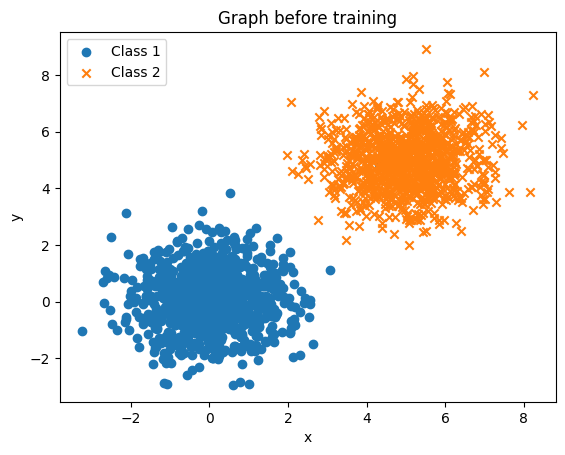

In [ ]:
obs=1000
# Function to synthesize dataset with given level of separability (gamma)
def generate_dataset(gamma, size):
    np.random.seed(42)
    D1 = np.random.normal(0.0, 1.0, size=[size, 2])
    D2 = np.random.normal(gamma, 1.0, size=[size, 2])
    X = np.concatenate((D1, D2), axis=0)
    y = np.concatenate((np.zeros(size), np.ones(size)))
    return X, y
D1,D2=generate_dataset(5,obs)
# Plotting the datasets with labels
plt.title('Graph before training')
plt.scatter(D1[:obs+1, 0], D1[:obs+1, 1], label='Class 1', marker='o')
plt.scatter(D1[obs:, 0], D1[obs:, 1], label='Class 2', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


- Two Gaussian Distributions are drawn which is linearly separable
- For D1, it is generating random numbers from a normal distribution with a mean of 0.0 and a standard deviation of 1.0. The size of the array is defined by the variable 'size' and it creates an array with 2 columns.
- For D2, it is generating random numbers from a normal distribution with a mean of 'gamma' and a standard deviation of 1.0. Similar to D1, the size of the array is defined by the variable 'size' and it also creates an array with 2 column So, the function creates the linearly separable datasetss.

## Perceptron Learning ALgorithm
1. z = wx+b
2. If z >0 :
$ \hat y  =\sigma(z) $
3. if not converged
<br>
    i. w += $\eta .(y - \hat y).x $
    <br>
    ii. b +=  $\eta .(y - \hat y) $

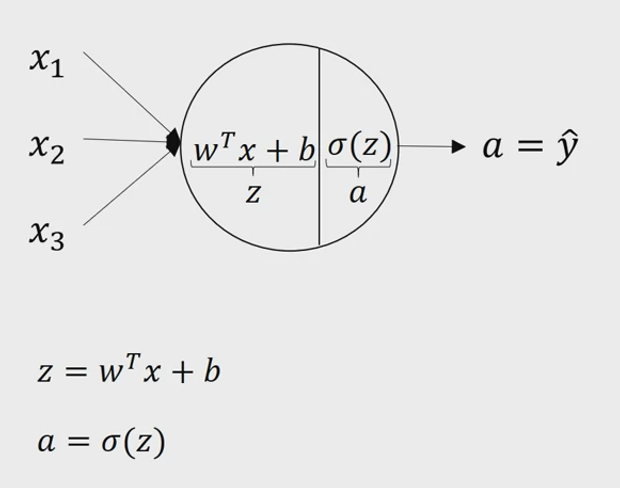
<br>
Source: Andrew NG

Gamma 4.0


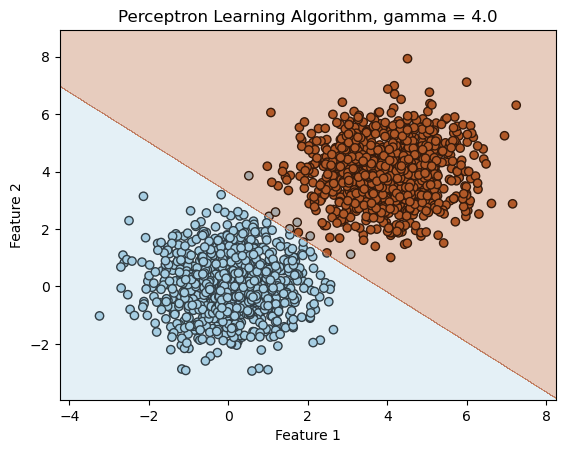

In [ ]:
class Perceptron:
    def __init__(self, num_features, learning_rate=0.01, num_epochs=100):
        self.num_features = num_features
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = np.random.randn(num_features)
        self.bias = np.random.randn(1)

    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return np.where(z >= 0, 1, 0)

    def train(self, X_train, y_train):
        converged = False
        iterations = 0
        while not converged and iterations < self.num_epochs:
            converged = True
            for x, y in zip(X_train, y_train):
                a = self.predict(x)
                if y != a:
                    self.weights += self.learning_rate * (y - a) * x
                    self.bias += (y - a)* self.learning_rate
                    converged = False
            iterations += 1
        return iterations

def graph(perceptron, X, y,gamma):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', edgecolors='k')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'Perceptron Learning Algorithm, gamma = {gamma}')

    plt.show()



gammas = [4.0,4.2,4.4,4.6,4.8,5.0,5.2]
num_iterations = []

for gamma in gammas:
    iterations_list = []
    for _ in range(10):
        X, y = generate_dataset(gamma, obs)
        perceptron = Perceptron(num_features=2)
        iterations = perceptron.train(X, y)
        iterations_list.append(iterations)
    print("Gamma",gamma)
    graph(perceptron, X, y,gamma)
    avg_iterations = np.mean(iterations_list)
    num_iterations.append(avg_iterations)

plt.plot(gammas, num_iterations, marker='o')
plt.xlabel('Level of Separability (gamma)')
plt.ylabel('Average Number of Iterations')
plt.title('Effect of Separability on Perceptron Learning')

# Add gamma values to the x-axis ticks
plt.xticks(gammas)

plt.show()


## Observations
- It takes less number of iterations to converge the datasets with the perceptron learning algorithm with $\gamma$ = 4.6
![1_01.png](attachment:1_01.png)
The convergence of a perceptron refers to the process by which the weights of the perceptron are adjusted during training until they reach values that allow the perceptron to correctly classify the training data. The perceptron convergence theorem states that if the training data is linearly separable, then the perceptron learning algorithm will converge and find a set of weights that correctly classifies all the training examples. However, if the data is not linearly separable, the perceptron may not converge. This is a fundamental concept in the field of artificial neural networks and machine learning and can be seen with the images as well.
<br>
[Source](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote03.html)

# Question no. 2
Gradient descent for training a linear classifier ***[10 = loss formulation 4 + gradient computation 3 + update equation 3]***
<br>
Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our
classroom discussion on the desirable properties of a loss function. You may implement the an-
alytical way of finding gradient for it. You may implement the basic version of gradient descent
update equation. Plot the dataset before and after training (with the classifier)

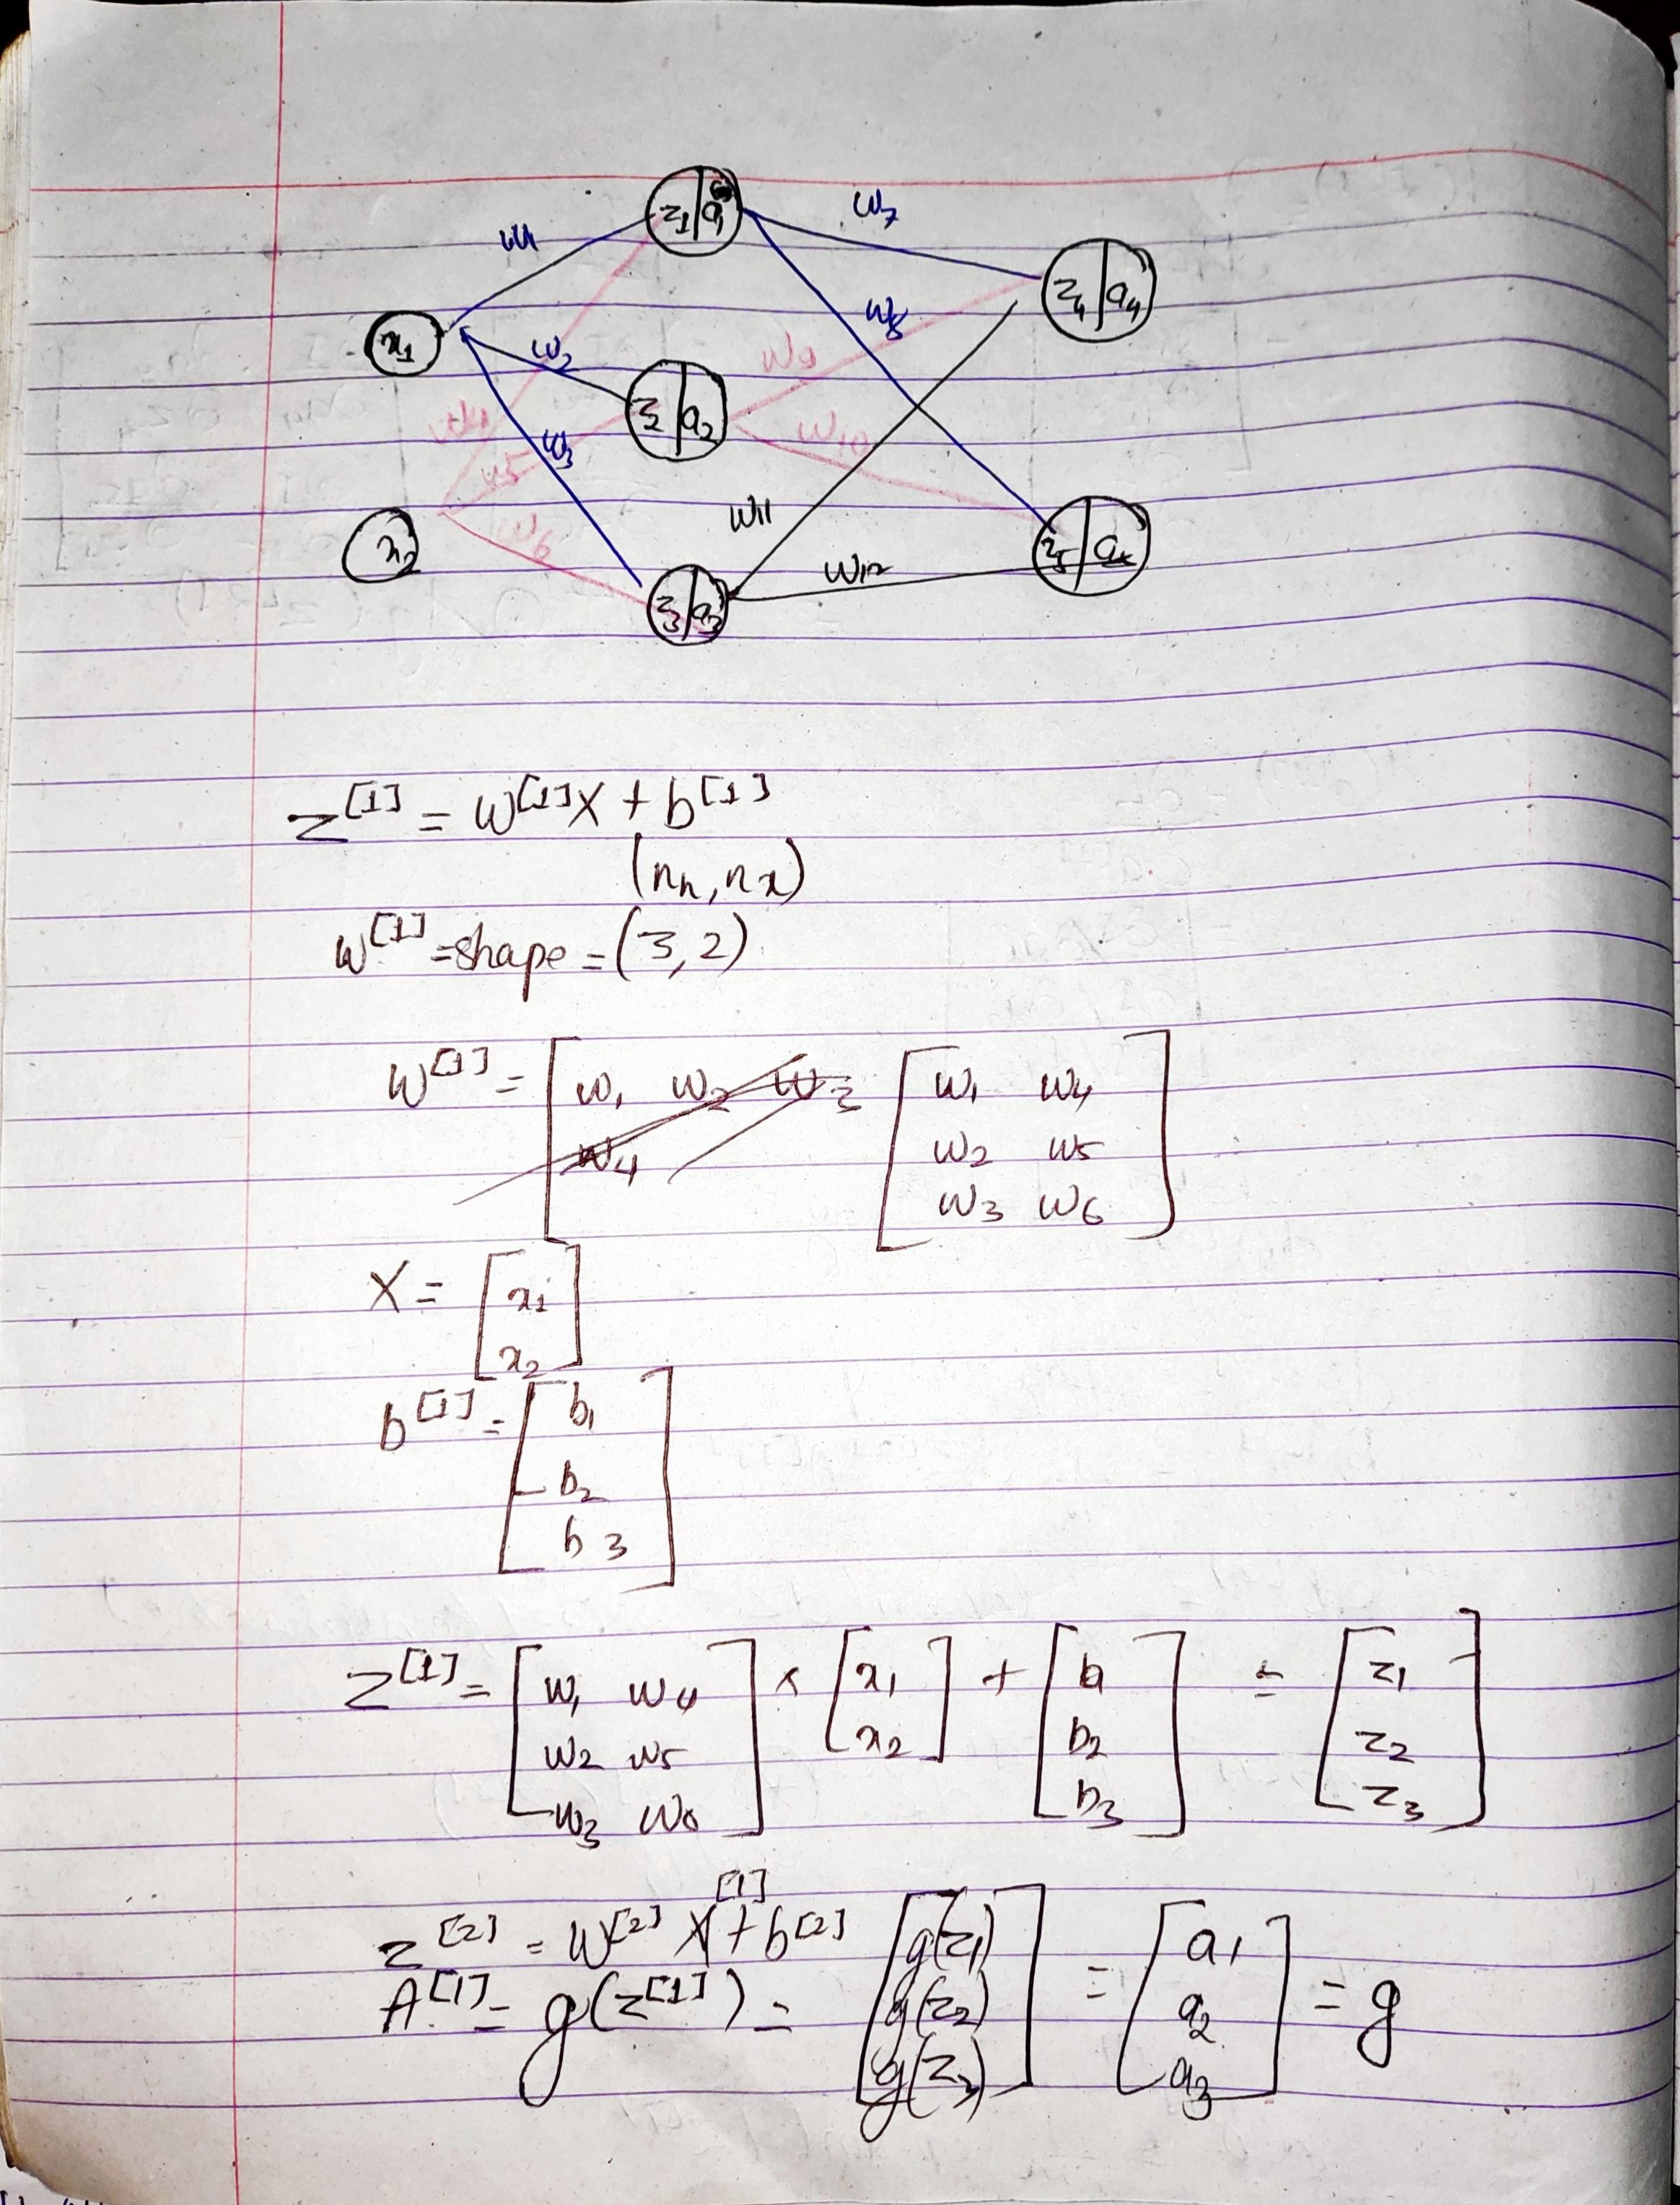![3_06.jpeg](![3_07.png](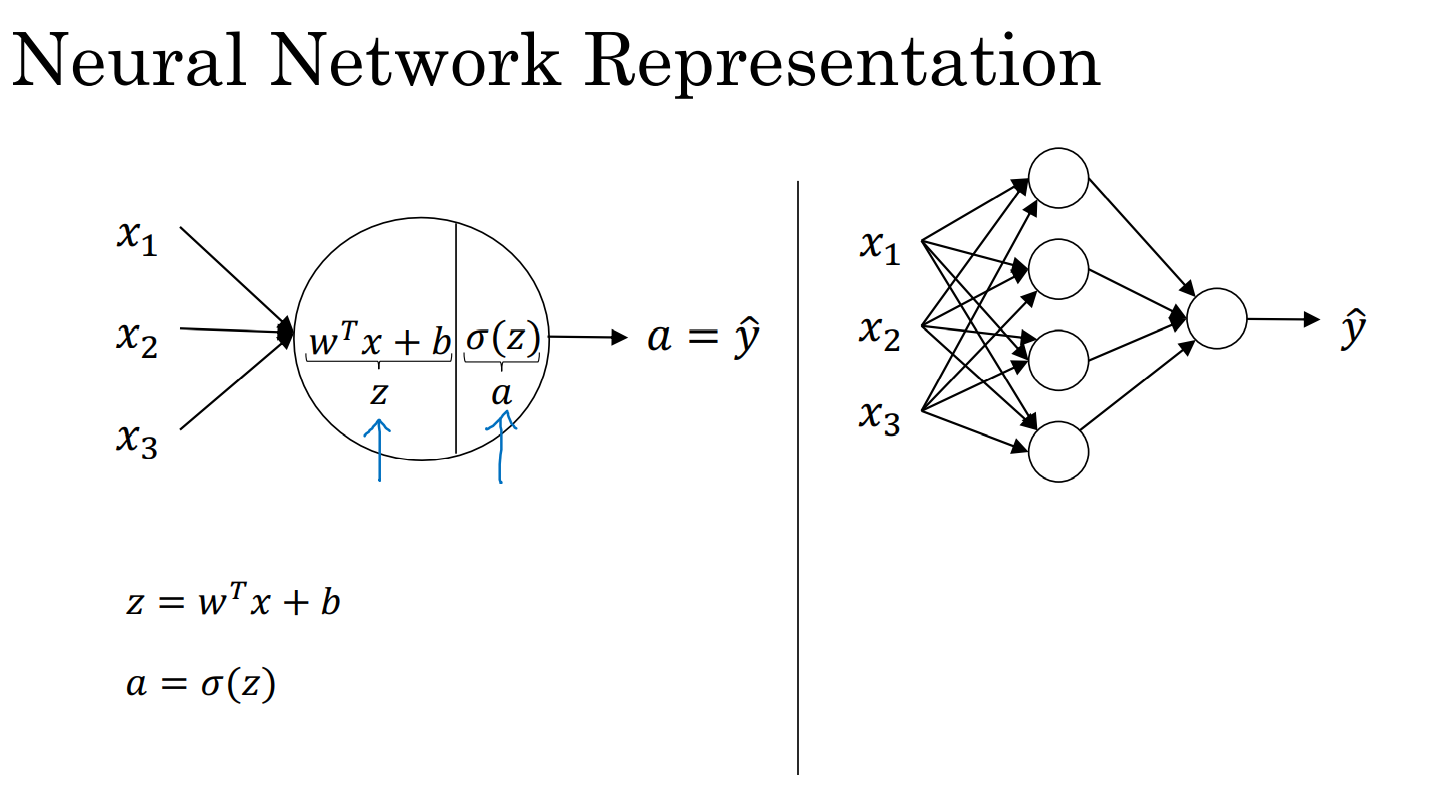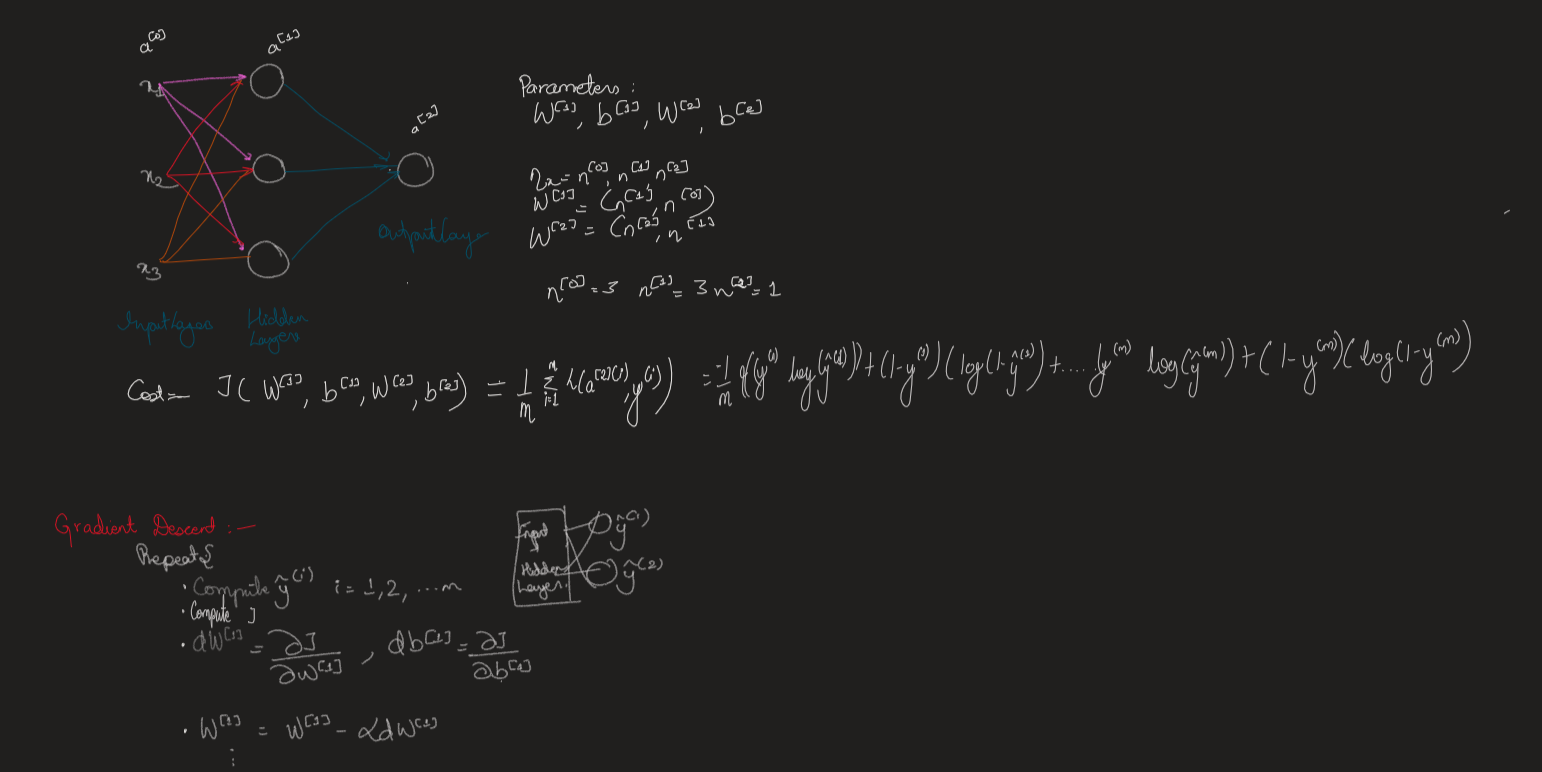)+5Qn7lN23e9XfOimb/bqu7t5v3aAPB/2ybZX+HOmT7P8Al+RNlekeD7CKz8G+H4ov+fNd3/fFee/tjOqfD7SoPlTdfb69N8DJFN4V0Rd33LOL/wBAokfZ4j/kTUv8RYfSl+87f63+CmeSsO9WXe6VrXL2147/AC7/AO/ToUidomb76/JQfHjbOw3y+fKv3PnplzD50qLLL8lXURoYpWX5Eql/rvusrvQIHs4t/wB7f/v1LYJFbSvF8z/Nv+9RDC25GZf4dlW4YVT5vloJHuizI6/cSpYYWdfK3b/7u+mJC3+5ViH5H+78lAE0NtsX97tfb/HV1Hb76s3yVU3o6/dqvcv/ALWzZ/BQBeubnYn993rEheWa6+b5Kl3+c3+3TXRX2UAWH/0a3l8hvnf+Ouftra5mldrlfuN8r/3q0v8AbqZIU2fM3+7QAx5p9vyr/upuq3C6+V80XzVUd/7zLVeZ5ZmTbu/4BQBpps2N8q/J/wB91UuZvn3Mq/JUSPL97d8/8aU5/wDbX/vugCJ5rZ4vNaL52/g3b6r3L7IvKWrE0MCb227P9hKpX6N5EzLL/t/eoAls7lXXb/HWgiS7k3ff+/XH6VNeJfxLEyvF/frtZkbZ5v36AIvm+822sLxP4qbQdUsormzZ9Kuvka+/54P/AAb60ptS+zfumVvn+78tN1jTYPEOh3djP9y4XY1AFiG2/e7lZdn312Vakf8AdblZv9qsrRLaTR9Lt7Fp2ufs67N7/fq677P4t9AAl40Mvy02Z5ZpfN/g/uVDs3/d+/T/ADvJbbQA+Gb/AJaruT/YrPmRppX/ALlWEm+RPl+eh3bf5v8AH/coAhSGJPu/fp6TRQrtWNUpibdz1NMizJ/cegCu9400u77n8FHnM67WZtm77lM2fN/7PVfWNKXUrDyvNltnZvvxUAaaO0Oz+OnXN+3lbV+//DVXTbb7BpqQNK0zp8m96c+7+L+CgAfzXXbubZVu2dU2K27/AH0Wq6P/AHqlR/nf5asBtzCrs6/fR/vVUd5URImb5E+7Vv8A3f4aY7s7/MtRygV02pLtWL7tSpbQOzrLEr7/AO+tWEf50ps03+98lHKBX+zWcMqK1nE6J/s1C9nbeajQW0Cf9sl+apn/ALq1LCjP8qt860coGfNoGnzXXny2cD3H994kqp/YOnwv5q2MCbN3/LJK2H//AGqiSFUi20coGZNomlX8G2fSrZ/9t4krCvPA3h75FXTIPNdvm+X79dnDD81OSwi3ozfO9BcTj4fBmnw3iK2nwfL/ALNac3gzRZn2vZr/AN8/frYm220vzNvf+Gon+eV1Vvn+/QI5/wD4Vv4VhlSVdDtN/wDfRfnqjefDHwveS+V/YNs8X32euw+ZERtrPV5H3r/qtif7FAHGaV8MfC9m7+VpUaVoP8N/Bzojy6RA71uzJsfarU2FIofvNvegnmMf/hT/AIOmi2vodskX9ypU+CHgtLd/K0qJE/2Pkrpba5X/AHKsPc79i7qAOVf4UeDvK+XSokf7m9Pv7acnwx8OWaO1nZrDuX7iLXRvN/srQ/75dq/+OUAeb+JPgV4a1uXz54pUl/i2N96mQ/CLQ7aw8hGn2bfK+f8AgSvSERn+99yoprNXXYq7KCjydPgJpm3z7HULlJd7/JWhbfBmJ7D7KuoToj/df+5XoaJ+9faux0q1bbfu1YHlt/8AA1plRbXV54XX73+1VfTfgnqGlWr7tcnd3+Rfmr11P975Kimfeu3/AGqjlJPL7P4S31tayxNqc7u/3Xdqx3+EviXzZZV15di/8sa9l3s/y1FMm+La1AHkmm/DfxK8D7tTjd/4at23gDxCl0lzc6mrvXpXk7EfbVV3ZHdmoA5FPBN88rzz3O/Z/cerc3wuttYSJp7yVP8AcautRP3H3qfbebv+ZqAOXT4UWabovPldH/jdqt3/AMMdPubdImaR9n3fmrsPuKi7v+AUbG3ItAHOaP8ADrSLOL7M1t+62/x/fotvhLoNndXErQM6S/Psf+Cur2P96pXf+992gDC/4QzQ4U/5B6v/AL9S23hvSIX3f2ZAj/7tarv/AHnqu/z/ADLQBnv4V0OZHibT4P8AvmmzeEtFmtXi+wxfP975a0kTfu/vUIm2rA5VPh74cTY39mRfJ/fWpf8AhDNFRGiWzVEf5/kro5k+XdTHT5KgDh9S+Ffhya43fY/kb72xqiufhF4VdN7aZ/sb0Z/lrtZvnRKE+983yJ/FQB5ZN8B/Cczyyr9ptv8Ark1V3+BukJb7YLm7S3/hi3V6nNbb5XVW+TbVdLbfFtZm3rQB5VefBCx+Rormd5d2/e7fcqvbfCiW2l/4/pf9re2+vWnh2b/432014fl3UAcJbfCW2huLi5luWd5fnVN1bFt4A0qGL7u9P4kf563Yaid9jv8ANserDmIk8GaH9leL+z4ki/uJWZN4M0ze6tArxfwpt+5W7uamu/yfdaoDmMfTfCWi2Fk8C2MDo/z7HWibQdP+fyraC22feRIvv1pI7bHT5k/u03yfkf5aA5jBm8MaHczvPc2MD/N/HEtWU+G/hdLh510q23yr83y1f+wLcoivu2bq2PJ2W7t9/Z/BQX7SRz+m+A9FtriLbZrsibeuyuuh0HT4Yk22sUP8fyUxLZdiN5Wz5aE3I3+w1BBYTbCnyxLUqXOzYrVX2bETa1P/AId+35KALHnMjfw0yaZnXYvyUJ9+m0AOd2RP79H+/Td+z+GnffH+3QA9Pk/+wom+dqP7tM++f9igCKaHe9P2Ltp38dNoAZ8sPzVKn92qrzffVkq7C6703LQA9P7tOR32baH2ffio3qiUAV9+ydF2/O1D/f2/fp7/AMDbKYk3zv8A36AJvufxVClFy/8AtVXe5Z4qAJpqE+Rarw7ni3M1S7N/y/MlAEu/5P8AYoR1pv3F+9Q/yLQA55vk+Wq/8b/NT0+T5aeibqAId/z/AHW2fwUbFdvu1M6f3kpmz917UAMf5E+X56ron735fv1M/wA77flo+VFoAld9nzKv/fFRb2R6ZczSvFtX/gNHzfeagAf/AIDUQ++9S7FeXd/6HT3RfK3ff/vUAVHTf81Nhfe+3+Op5k3/ADf8AqqibPmoIJX+REX5np6PsX7tQpc+dv8Alp/+3QWD/wC1TH/4DR99/mp+zf8Ae+5QQM376PO/h21FN8i/LQj70dqALG+onTzqZ99Nu6nomxaAK77tu2q+xt++rVyjP81V3TZ81AB52/8AvfJ/HT3f+L79VJn2I22jfvRE3fdoLLE375Kmhf5E21Xh2JTt6/w0ED97I+7+9Vu2+dP79V9m9E3L/wCPVLZ/Ijqv8f3qAHv/AHqcj/M+/wCR6N/z03Z533qAJd7TJTE3JT0fYrqu6mb/AJkWgB/y7vmrPub/AP0pLZPvt89W7n7ybfuVUhtv9K83+N12UAXd+xfu/eqC5udiOzf7i1L5P31ZvkSjyV2/d/3aAK9snnIjsv3/ALyVK8O99zVbRF2fL9yodmygBu/Zs+anvM23av8AuUzyd7J/tfequ6fvdv8AdoAc6So6N/HRNCsybZV3qjb/AJ6mSh97/NQBXdNmyh/kX+5Ur/x/7392onTfvVaAGPMu/aq/J/fqv9/5v4P7lPmTY39+medvTbtb71ADPO+zfKzrT9/nJWfeabLf6zFK0v8Ao8S/c/vPWnDDsoLIUf7/APf/AL9Phh+426n/AGbe+77n96nfLt+VWoIB/kqlMn+lfK1Xpk/dJtes53ZPmb/coAmR/n/9nqX7n8P+3VdJtlG/f8qts/j+egstvN8lQzOnybmpqTb/AJf8pRMiv+6oAZ/rlfcn+5Qifvfl+f8AvUyZ/m+X+7T0f5dq0ADp8v8Afqvcw77hG/5ZRf8Aj9W/9n+P/YqjM8rvtX/coAtom9aimRZkT5m3p93ZTpt6W/3fnqK2fZ8stAFv78Sf7tMR/kemvu3fL/dpPJ2Pu3ffoAmR9/zN9ynI6u+2oLmZYV/9kp0O5/utsoAsP975apXP3/4qtJ/G23/7Kh9qJQBSfany7/n/AL9V0TYzqv8A32lWP3T7/vPu/go8mJN6xN/49QAxHX/7PbT3T96jN9z+/Q8LTOm5W2J96rGxd7/L/wAAoAE3p/d/77pkz/PtX5H/AIXomfeyVE/303ff/ubaAHwp/wCP/wDfFQzIrxebT/voi7/nX7z0xHf5FbbsX7vzUAReSqL833PuJT9+zZEqfd/jRvnpj7kl3bv93ZRc7vnlX+99+gCu8Ox9yt87Ux/nT5qtom/+DZ/v1EiM+9W27F/8eoArvZq/yt86f3Kl8lUiTa3/AACnpDv+RV+RqckPzuu3Z/doAf8AMkXzbqihf5/9hP79WHRvkXc3+1TH+/8AdXY1AFj7Z8//ALJuqZE/usuzdUKJE+xpXj/76p+xkb5pf/H6AEmuWmi2/wAH+3VPe219vyNUr3PzVDsV13bV+T56AH+S0Ozbt+Vd60fv3+X5f7+ymJ++f/Y2/wAH8NHzfd27E+5QA1Eid/m+5VpEXzVbdF8v9yovuLuVm2fc/wCBUPCv+1s/v0EFvyWm2fd2ffoeZfu/wIv8a/fpltMzqi/f/u/7NMufkf8A2KALDuv8fyU2F1Te39/7lUd/z/dqwky7EVf4PvPQBbfc/wA+7Z8tRJum37m+T+GoXudjfdZEp/nfI/yrQBF8299zbKsI++z2q3+/VT+Pa27+/Vi23Qqitt+egCw6N+6bf93+CiHd5r7l+f8AuJUuzfFtX5/9iqqW0qfN5rPu/goAu72T5mb5/wDeof5P+B1F5Kv8rLvqx/BQA5Pu/N9ynpM235vv0zyfubKN/wB/5fkoAa7q6VUs7ZvtDyt/F/45Vh/nb/dp/nKnzUAOmh8lv9xqa6bG+T+L+CpXmV03f3aY6L/tb/8AYoAaj796/NvqpcpsTcv+4lW0TZvb5t/8VMfbNF/E9AGYiSorrvVP71Nf5E21bmh2feVvu1C8LbPut/v0AVP4nZlajZsbd/BT5nZ0T5fkpm9UTZ/4+jUAVZrOKZvNZd7/AN+qj2a+Vt+ZE/2609//AABKPl/i+f8A4FQBmJDsV/vfP/tVUv7aKZPlRkd/vbK03RH+ZqEh+bev/oNAHFXOiMkr7lbZ9/8A3qx7nR4ptjMuz5vmr0i8SB4HWT/f2Vzk2lSzSptVdjfO7vQB5/qWg7PtErNHt/2K5/8A4Ru1RN0Vqtt/em/vV6Rf2Cp5qttrn/7Na5ilVtu/+/uoA88m0RXv1Xds3v8A3a5zxP4Pihn2+QqJ/EifxV6TeabHbO+2sS8s/JTc22b/AH6APnK8sNQ8N+MEudMnltopfkiRG+dnr3DwZ8eNQ02/itvF/np5S+V5v8aV5z8SLCXTbqyvok8nymSX7tfREPhXw98S/Cmn6g1mu+6iV2m/vNUS5vsnr4StQcuXExOm0rxDpniG1S5tp18p/nRP49lbttbbE+9/33Xzv4q+GPiP4aXST+F5bmbTJfnWF/vxV1vgz45Rf6Pp/iGBrDU/uM7/ACI1R7T+Y7MTlinH2uF96J628KfwtVeZ9kqKy/O1W4Zl1JUngZXR/wC5TLlF835v4PkrY8CcJw+MxNY8MRa3cW7Tys/lNvVK2PJ+T/gNH3E3RfPQj72oMx8Nzsi+VW/3Kl8790/991qu/wB9G/76/wBircKbG27d6UARf3E2/fb/AMfpyfud9Pb5Gfc1RIivE/8AfoAldF2bvlqLZs+Vfv8A+9THmb5Il+ej5tzs33/7iUASu7bflWmww/O+5md3/v0P86J96pUfyfvL/vUADwru27vk/wC+KZCjQ7/49/3dn9yrH8KKv36X+HduoAqOnzOybv7mx6IU3v8ALt/4HVh33/KzfJUKIsMvyq3/AACgCJ7aJ23S/wAPzqm6nvu/76q06K6/ebZ/sL9yq/kts27ld/8AYoAif7v+3/ClMtn2M/yf7yVY8ltifd3r/BUUyLN8rLs+X5k3UAW7b54vvN9yh/n+98n+/UKbraLYrN/wOh3XzYnXciJQA132b1Xb/s/7VEL70+Rt/wDwHZUrw796t/HUUKMluiqqoy0ASpMqKjN8m/7+9aE/fO/3v9+num9NsvyfLRCjfJ82ygB2/wCd9v36YLjJO3+D5fmWl8lkTc38f9+orpWnYFV3fhtoA+ik+TYu+ptn8X8NQp8j/wB+pk/2vu0AJ/tLU25qZvV/mWovtP8AdoAfvZF/h+eq0zt5v8Ozbv31Nv8Am20z7n3v4KAInfZs+7TERvK+Wnu+9tv3Kds2LQWRIn36Z8u/7tPdGTZUSbvv7qAJfOaH7tM3799D7fK+Vt9RXkO+LbEzb3oAl3rudv8Axyno7O+1vuVFDC0Nuis29/4qdsbe+z/gFAB+6f5FX/eqKaZXbb/dqwm3f96mTQ/OjKuygCLfs/8AZal/4C1NdN/+xT/uL/FQA5+3/s9Gxtm3/wBmp/neds27aJt6UAG//a+7THRX+f5XqJN2+Lcn8XzVY3/88tr0AQ/Lup+xUf73yUz5nb7tP2N/uf33oAY6b0Sot/3F/jpk2xN/71d/9+ovm3/Krf8AA6ALDpuqwj/Lt3f8AqKF/wDd/wCB1K8Kv/F/3xQA+H513NULvsfau6np8j/L9ymzfO70AL/D/wDF1G/+q2/cqX/lkn3kqv8Af/ioCII+zeu7/dqX7/zbvnX+Cotn8KrQib9n+zQWeCfthzf8W80eX+P7d8tenaVbXNz8PNHttMaJL17GLynf+/sry/8AbM3f8IHo7bdkX2yvYPh0/neFPD87f8+MX/oFEz7PES5Mopf4pHhNnqXirwZ4oeXWp55pVbZsdvkfdX0mjr9lR9q+b8vyJ/tVFeaJpmq38Vzc2K3MsTb1d1/jq2kyzXDtt+T+GuajTlH4j5jEV41Yx5YiTf6p6r20P7122/JV533UyH5Eeuk4A2f7tCIsK0b9/wAu356fQBKj/wAVP+0/7O96rv8AOiUI+9fvb/8AgNBBY+0/xM33Kz795Zvmp00yp/11qJJm+7QWH2nYvlbqlR/uMtVUT53/AI6E+SJF3f8AfFAGhs2fN/BTH++6r/3xVJ5pfK/2KZv/AL3yUcoFh/v/ADNvoR2qpDN/e+epkf5N38FXygSv88vyqtMhfe/zU13V2qF03tRygWHm3/NF/wB8VEjq77WVU2/36Z5LI6bWbZT0f532ffqACFIrNU2qvmv96rCTfw7v93fVf5fk+b5Pv7KNjPQBLvi3/dV3/v1Ek2xflb5Ho+49RPtm+ZqALVs7b927/vun3O1JaqQzbNm1fkom+f8Ai31BQ13b/llTnm86nv8A7VRJ/H96rJHb/OXbTU3bf7jpUvyp92jfvdNtADHRt6bqfvZ/vKtSo/8Ae/8A2ab83/fH8dADHdNm7bR+6dv9yh/nZP8AeodNn+xVgPRP4t9D+V/eqilzc+bKrxful/jqaF1ufmVqALHkxOifM1Hy7vlamJ975qe+2gCHfs2Kv8VG/Z81Dozsm37lN8ne/wDuUF8pL51D7UTzaEhVNlPf73zUEcpDv3/N8vz1Xv7aW8s3W2ufs1x/z221bdPk+X79EKL8+5tlAGPolnqdhBLFqd4t/K8u9ZUX+Ctj7/8AF9371PmT91uX/viq8KfLu/v1BRK77afv3/e+/TP93bspny/eWrHzAfvfN9yhEi+0eYv3/wDdp/3G+7QiKn3qCCXYrp833P8Abq3vi8r7vz/7dMR12blqL5t25vuUAMf5/m/9AoTYjfdZ6V9sz/xUnyf98UAH3Hf5aPO3qit/33R5Ku/+xT/JX7qtQA9Nvlfe/wC+6h3/AD1E7qn8Pz0QzMjP81AFtJm27f8A0CofO2N/9jUX2nZ5qr9+pd6uqMv93+OgAT5/ml/4DQ+6Ft9RfMn/ALKlSu+/Yv8ABQAQv5K7PmotrlZpXVvv/fqL7/8AE1cp8UZvEth4Nu7nwhEs2sW7I+z+9F/HQB2E25G+Xbveov8AU/M1VNHmvLnRrG5vF8m7lgV5Yf7j1bR2+61AD9+9ar3MOx91WJkbZuX+Gq7u8yItAAnyJ/ttToZvJlqZLbfE3+xTkh+/UAWN9TJNvaqife/9np/zP/8AF1YGh99N1M37/lquj/JT9/8AEtADnSmon+1R53ybWo85KAHbP4v43+9TZn+5/wCO0533VE7s8vzLQAO/nfK1OdG2/LTdmxty/fo3ts2VAEWzf8v/AHzULps2bW+dmqbfsd6H/wC+9tAFf5vk/wC+KNi+V8v+/senP/H5v3v4qimSVHTZt+SgCJ9yVRTz5ryJYvki/ietZEXe+7bTJk2L937v9ygCvNCvm7f4KiubD5f4a0Lb7v3ac9tv3/wUAY6Q7Nn3qfs3ptq29tsWpYbZUXc9AGFNeRQ3kVszN5sv+q+XfUvzbq0EtoHbz2VXli+6+37lVLlNjv8AKz0EBD87JtrT+ZE2tWPolyt48zKrfK2z51rbRNn3vv0FksLq/wAv8FPe2X7u6mQv8/z/AH6e+5320AQo7ea+6pkRf4qlRNivu/8AHKZv2b2oAN/z/wCx/DTX+SpU+d3pmz56AIt+9qlhh3/dpuzZ8zVKjsnzVYDH/wC+HqZIV/h/u1Xm3P8A7lS+ds+7QAOipLTP4/vU2Z2f5qIfn2UAGxXlRmVal/5bUx02NQj7JagB7/c+9Qn3KNlG/wDhWgB6bU+9Vd02NVjZv+8tQzf7dAEU0O9Pl/go2b1qVH203+OgCFPv1M6L/ubP7lQv8n+xR/B96gBqO38X3qlTd/eoRN/8P8NH3JaAJfl21E83k/xb6Zv2PtZvuU95lf5aAHo/yJu+R6Z/HT4fvfeWs65eXzdy7f8AaoAmmfZ8u6jYn92orxJblYpYvvr/ALVWNjJQAx/9laem7Z89CP8Afo3rv+ZqAGO/yfLUSO3z/wC1UqfwfLvp7p/y1/gSgCFPk/g/8do3+cn/AAOh9j/7FCJQBFsVG2/x0/Z8lO2Luom/uf3aAKr/AH/vUb/v/wAdHks7VCn3t1BAP++bc1Ph27Ken3XWoU+RNtAD9mz71P8A4k/gpzv/AN91E7tv+WgB9VHdplerCfOvzUx0VPl/goApPDvSmQw+T96rbw/N975Kr7283bQWFCTb/wDgFD/fp7w/cb7lAFj7kW3+OiGb5H/jpibni/2KekPz0EDk+dqm3/cpibdv3f4qfv2PuoAd99/vfPQiLvo3/wB2j77f7dAEzpvR6h8nY6NU373ZTvuJ81BZXm/cy/e/22qZHXyvvLsplz8/3f8Ax+okRvu/99UEEr/d+Wonm2feb738FDoyN8ytsqGZN/8AsInzr8tAE33Pl276Z/y1+X5/7tGx5rfcu7fTId292ZvnoAsfK+ym+d/tM9M+b7tCJvRF/joAHT5Ny1Ekyo/yqvyVYRGdP+BVUdNku5fv7qAIr99kqMz1Re/2TpF9x3+SrF5Czvv/ANrfVWGwb7ZFL/Anz7P9qgs0Id2z5vv/AO3UqQ/5Sn+T8/yt/vUO6o6f+PUEDJtuz/Yqvv8Ak/2KfNN9/d9+qPyom9moAvOm9E/v1Um27H/j3U+2uVd/mb5N1WptszUAY/zeU67m31FbPK71q+Tv+X7nzUPDsRNqr96gsqwpv81f7lWtiu6r9zf8nz09Ifv/AHk/vUQusyUAReSv3V3VXeZrZv4vvfLWg6bEeql4krq+35/l+5QAI8T72Zt/916sPCr/AC/c31n227en9ytWH522rt/2qAKs2xEf+NFquiNN93+Crs0OxUXdsqWGFUSgCu8PkxP/AB0bP++P7lTO6uu3b8m6mfNtoAz7m286X73+7VizTZv/ALlS+T9xnWlm/cv/AOz0AI6bF3bapTTNM3y/Im75qt722/dpmxdqf36AGeT82/5kenui/d27P9un/Nu2VLs+T/b/AIaAIodu5/m+T+KmPDs+7/HV3yX2v/7JTfJ/iXb8lBBR+5/Evzf36a9ts+9uq6lsz/e+49P2bPl/joLKMMLfxKyPt+5VV0VHdW++n3vkrQ2b5U+X5P8AYpyQq6f7f+2tBBnvDK7eavyfL8z0OmzZArfOnz/7lacyL5W6Lcn+xVf7NsXcrffbe1BZnww7Pl273p/k7H2t9xPn/wBurXkt/DtT/gFNeH97833P4dn8NAFdHZP7vzLUsO12+787/wC1R5Pz/wAL0Q2293+7/wADoAHfYv8AD8v9yq6fwfwVYmtmT5tzf3KERkXarUAV3Rvur/HUT7t/lLurShhbb8zf/YU10+bbt/26AMx0/h/iqVLNt+3b/D/33Vh7bZ+9Wn/6mDd/G1AFdNsKon3N/wB5KY6edvZmbYn3Up/ktv8A9r+//t1YSHZs3N8/8VAA6RJ937+3+Cq7zfP5SL8lS797bdvyM1V4UdJX3K1AFuw2w/LRNbfbGRv4P/QKidGhTd/AlXbPft27qCCvMiwxOq/99vWfbTM/8O+tW5tlf5l3O/8Acqk8LJ8y0AP2N8ny/PToUXenzVE7t/ub/k+7ViGHZsb5aAH7PkRk/vUyZ/8ASH8pvnqxv+VN3yJTHh3/ADN9ygCbzme3+9s2feof/aoRNny/3PnqF3leVFXc6ffb/boAlhh2bGl+4v8ABVnez/d+5UKJvT7vz0+FGRXZqAB3/wB7/cp7/wC1TPv0fN87NQA103v8tOdF2fdqk9zsldX+5/cepZpmh+7/AHaALCP9z+4v8e2nun3P/ZKz/OZH/wA/JVi2fzon81tifcoAsI6zLs+ambFR9u2nzfJs2tv3/d+eodjI3zL8n+9QA25fYny/x/7NQ+TK8W+X5Hb/AGasfKnzPu/v0TTb4tv/AAOgCl5K+Ui7fufx1XeHYm7/ANAq28yoibvnf/bqs+1HRYtyfx0ARbPl20Imzf8ALvqxsb7zL97+NKH2o/3vuUAVX+58q/f+9VdId/8A7NVqZN/zRM1RPudtu3/gdAFSazWbfuZnpsyeT/6AtXbyaK2tZZ55VhiRfm31XdFmiSX+D79AGFc6azs7tErpWFeaa6f6pfkrr5oWudyr86fw1numz5WXY6fwUAef39tFNa/uoPn3Viw6bPMzxKu/eu9a9L1LSpYdNluYIle42/c3ffrjNBs9QubLdfLsuPn+5/AtAHjnxF0eebRriJovu/Pv+/XYfsu6wupfDmWxldnuNOuvmT+6jVsa94e2WF2rfvkZG3b68s/Zy1uXQfin4g0razw3kDv5KL/EvzUAfUyTS/Z3X/Xf9dv7tef+M/hRpHj+VJblfs16n3ZYa9A2SzRbtvyf7FQ72+Vm+/USjGZ1UMTVw8uaJ89X6eMfgtqO6Dz7/TPufP8AOjrXpfgz4o6H4ziRftP2DUP4reau9ms4NSt3S8Xzk27K8q8efs/afqu/VfD0/wDZuoJ91Eb79Y+9S+E9+GIw2Ye7X92R6kls0MTt/H/6HUT2y7Nqrsfdv/4HXz1oPxa8VeA9U/s/xRFI9pF8m+Za9t8H+LdP8Z2Xn2Nyty6/eRKuNTmPOxuW1ML78Peiau/7M7s336so/wDrdv3KleFv/wBuqk22Hf8A7KVseOP/AIfvLsoR97bVX5KNjeV+9+//ABUIiuu37if+gUAOf5H+789V7nzZmRdvyfxbKsO++J/m2Jt/76p6fIir9+gBkPyMn+7/AB0J/tMtP/i3bai/j3MtAFj5Yf8AVL93+OoXfZ/Dv+XfsSptmz+7vb+/8lM37EdWZdlADE2uibVV03bP7tPuf4GVvnT+Ch02M/8A6BT0+9822gB3+8u+mwp8nzfO/wDClOmffsX5ae/yPu27/wC7QAx0X/lr/wB8VXdFfftX5/4vl+7VtPnR/l/3qY7ttdV3f8DoArvC33du9KeibJfm+5Rv3u+xm2f7dCJ8vmru/wCBrQBY3/xfK/8Ad/2Krum/5tvz/wC7VhIfk+Vv+B7aJofl+9QBUeZ4V3MzP81PhmV9y/N/tUeTv/dfc2/epn+p+6tAFt32fLF8/wDt1GfKgAd5GLN229KSF2+6lNGzzG+VqAPoLzvuUJN8vy1XR6YiN5+7d8n9ygssb9ny/NQjq7f36H2v/v0xE20AHnMn3F37/wDx2n/79P8AuPui+TZ95KYmzf8AxUAM37PvUb/9r56f5Pz/APoNM/joAfv3rRC6um3b89Cfx/8AjlD7UoAY6Kk/y/6qn/c+bd/u0z978jL9xqHTf833KAJndX2My1Cn33+9/s0D7j09Pkb+5QATbdn3fnp77nT+L/fej+N/lXfTN/8A+3QA9Pn+9/BUX3/vNTt7P/FTXRd3y0AJs+b73yU902Rf7dM/z8lRQu0z7UjbZQA/Y3yVY3/ci/8AQKYj/fpifP8A7lAFiH5PvfxVE77/ALtCfInzLQib/u0AReT8+6mfIibtnyVL5O/7336r7Fh+b+D/AG6ABIVmTcrNDT0+SJP9mnvtRN23/gFG9t6KqtQA5Pk/h+eonm8mLb/31Vh5lhV/79VH+Rv9urAPtOyXbtb+5UT7vNT5/k/hqw7qn+3VeZEmdGbb8n3KAiWH+9838FDzRJ/tvVK8mZIvvfJVGzuV1JPPX50T5G+ag1PJf2w0+0/DTTJW+T/Tlr1L4dXkU3g3QlXbvSzi+f8A4BXk/wC175tz8OdPVW/1V18teq/DS28n4feH9u3zUsYn/wB75KD67E/8iel/iOueZngRV20zZsRKLNPORP8AaqbyV835m+Sg+MDyfk+amIiw/wAXzt95Kie8/u/x/dpjzf3v++6AJX3J8+75P7lTQv8AxLWfNcs/97ZUL3Lfw/IlQBrO/wDtUx32LWOl/LCu3d96pUuZZn+dt9AFiab+H+P+Om+d/s/dqFHoqwIkvNjbm/v099vzstM8lfvfc2LUqbU+9toAIdzt/wCz099qPTHh+bcr/wANPd2mRF2/JQAx9qPuo+b5Plp7uqKlMR2/h+egBv3Gd3qVNqSutM+aZNzNQnyb/u0APdGSje23dup/9xWamOnzL/s0ARO7bfmqWGbf91aHTf8AL/H/AAvUSff3J9+gCV385/u/PTE2/ealTd93b8lS/KnzLUAV0dZvur/9jUqPs+81Gxn+Xb96mfLDv3L92oKJvl/jbZUKP8/3l2PWPZzag9/dwXkGyJH/AHEyN/rVrYhs9kT7m/4BVkksP3Kfs3v8v36bD+5+9UqJ/F81ABv+5t+/TJoWR9zU/wC5v/v1E829PmWgBifJ/FRvo/g2stM37PvfJVgTJD/tUxLbZK67KLZ/k2q33qt/M9AFf5fu/Lspj/O6Ltom+f7jU+GH97ubdQBLs+RKrunzfMtWH+T5v4Ki3+dQUM85UdItu/d92nvthRGpju0P3fvpVTStSlv0l82BodrbF3/xUDkW03fe/ganu+z+9TkddlDou/du30EEX8f+/TNmzf8A3P7lDzb3f5f9taf/AAp8/wA7UF8wJR5LTfdod98Sbalh/wBn/vuggb83+49CP8+3b/vVK/3E30bP4f4qAGI7JvqZPni+78lORFeJ1p6fIm379AFTYyfdqJH+d1Vmqab7/wA336rPv+9QBNvZ6Ef5du77v9yq/nfPuX56sb4nqACbb/wCod7Oj/wVV+0y/avK2/LVjZ/DVgEKK7JK3yS1Y+Z2f/PyVCkLfeVasIif3WoAHmX5P9mq6P8AO67v4atui7PloRN6baA5Sv8AN91VpiOyPtapnfY1H+u+7toAN+/5f4/4ahRN1TJC2/8A26eiLu+agBmxttHk7Klemb6gB6IyfNQj/PRv2bN1PR6AD7i7Vo3/ACVK6b3+WovuH/YqwGPu3/e+/ViH5Eeonf59v36P7zNQAjvvT/apvzI/zVKiMmymv+++/QAedv8Ampyf3qan91Vp1AB/B92h/uP83z0r/cT5qc/yJuoAqPv+T/ep+/YvystPqu8O9JagCV9r/wC5UXzbfvb9lMs/v7f46ld1/vUANR/3Tqv3/wDYqWZ98X3N6VS+ZH+X/gNWEdtifd2UAOiRkf8AuVY+X5/l2PUSO1D/AOy1AA8Oz/2amOn3dv3Km3t/F9+j+OrAo3j/ACblVd+6n/Mjebt3/wC/Urw/3l+/T3RUqAItkSf6pVR6seSrru3LVd//AECjfVgS7NjbVqwj73+b56wtBsJ7C/1Bp7n7TFcPviT+7W7DN+6/hoAe+7dUUzqn+7SPNvWhIVm+b+9QAf3ae/8Adp7w7It1Q/x/36AF+b7tJ823b/cqb7/y7aPJoAro+/5G/wC+Kl8nY+2ons/9KSXds2VYd6AK9y7QxfKvyVLDUv30201E2NUAE1tUNsmyn+c2+no/yfNQA77n92h0XduWopn/AIah3tMv/s9AFtHXZuaq9zMrp81G9UT5vuU35XWgBj/P/FQk397+L7tP2bPu1Xe286VJVb5EoAsbN9Men76hmRn+7QA+2+781MSb5vlpqPsl/ipjw/J/foAlRPOqK5f5flp6btv8VV5rZppYfmbYjUAWoU3xI7Nvf/dpuzf822pUT+61ROnzfMtADk+78tNf51pyf3qJvnb+GgCJP92okRt/zVY2bEb/AHarb/8AeoAtui7Eqvv/AOAUu9nX71I+512/N92gCb5ae+3yv4X/AL1VE3Ps/wC+KlhfZvoAERUT7tMdN38VTP8AO+5aZ8yfw0AV33/w0P8Af/hqXZ839zZUU3393/fVAFSb76Lu+d6mTaiVFcos08U/8SU6FKCBkLs/3lp/zI2779S7G20bWoAbvqu7/aX2050/77+5RDtTf833aAB0+T/drPf55f7lbD/P8u2srVbOf7P+4bY9AA8LfJ/HV1E+Xc392hIW8qJW/gWpv+Bf990AMTZt21E82xttPRPvt/DVbZvuH20AWEdt/wAy/JUz0xP/ABynpu+RaAD+D/bqWFPk+7TPsz7/AJU+RKmdP3S7aAHfJ/33TZv31MT5PvVLs+X72ygsr7Pkqx9m+4336bs2fN/cpzvsT5qAInRvu7aimfYnyrvqXez/AN771ROm+X5aCBif63a1PhR/Nfd86f36ds2S7qe/yJtoAr/P5v8AsUQo0P8Auf7dPT5N/wDsVLv3/O1ADESopoWh+b+9VhNqL81VNV89/K8pvk/ioArzbHoT5E3K3z7vloe23pVvZ5NAEWx/vVDNCzxb6sff+RVproyIlAFRIdiOq/foeFf4k3t/fq3uanbF20Aef+P7DWry60e20VvJi8/fP/uV2CbkRIv40X/vurzw/wAW6q6PvldtuygB0KbPmpdnz/3KlRP4alRFf5qAKj/3amRInbatOeGpvJ2fw/O60AQ+Sr1V8j/a/hq7N8ny7aidPkSgCvDD/D9yrCWywu7bfnf+OjZ/wCpbabe/zr8n+3QAx4fOfbTXh+bb8tWtiu9N8ne33qAGfZldPmWmPbK8vzfcqw/yOi/36HfYybqAK8yL/Cv+xVe5tlSLd/HV5E3vuqvN87/+yUAZiPsbe3yVLv8AOd6me287/Y/g+SnJZ7H+X+CgBuz/AL6/ho87zt6/3P46lRFdqr3mmrNaywRbYXb7lAFuF1eLduoeHZ92odEsPsFmkTM0zp8m+rE23/Z3/wC9QA1H/wCB1XdGe63btiVa2N/ClNT7zt9+gCFIfubVo2Mife+RvkdKm2M6vtXY9Dpvf/c/uUAVH+fZ/u/x0/7Mv8f8FOTam9fl31M6b4ti/wANAFd02JuXb/v1UR/Ondf46tun+1Ve2RkoAZNCyfLEv3f9qhEaHeq/cdf46l3/AD016Cw2PNb/AO3/ABUIi/J8v3KlT5H/ANinzIn3t2ygCF3+f/xyh/8AVOrffqZ0/wBqj+OgCvs+X/0LZRMm/Y3/AI5Tn+dvlqKaZkVF/hoAETfcO/8ABQ6b2f8AgqxsZ4qi+Z/m/vUAVHhZPu7d9Phffu+783yUO7I235n+7U/yw/K3z0AVbndDs2/f3VKk2z725H/v1N5yu/3fu/eqpNCzu/8AfoIJZpm8pNv32/uNUXz/APstGxkV2+X+5R/y1RlX7tAA6fwtuoT7jr99EqaFN6I2356S5RvKfavz/coAqv8APvXdsT+GtCFP3SVDDbL/ABfO9W/lT5V/4HQWRJufftp3z7H/AN2mujfdVlSpUdfnoIBP3P8AsJUTwy3N1FKrf6On3qc7t95Vp9tM3z/L/F9ygAf76fd3vVT7f+/SJV3vVt7bf95d9N8lt+7au/8A9loAhf8AfPubb8n9+pd7b/4aimRU2Rbvu/PRNc/Km1vk/goALnaiPu2on/j9RJc+TFt/i/3KtOiuu5vn/wCA76pPDs37V2bF+59+gCV7lfK/8c2fxpV7enlf7/8AfSslEl2/vfv/AMb1N/y1eLf8+6gCV33tsVv/AByiZ/nT5aif9y+5vuf7H8dH39jL8j0ADov3vK+f7m+mPD/eanonzovzO/8At1K8LeVtX5KAKiP/AA/wLT0f5/vb6PJaFNv96mbN+xaAJn+RE/jT/YqJ0+Z3+5U8yfL8v/Aaq/M+zb/DQBg+MPDEXi2z0+znnlhignW4lRP4q2HtldP3XyQou1amdFfZTH+RaAKnk7E3fKlZ+pbUVJV+d91Taq8rwIsX97e1HkyzRbt2z/gNAFeF/kiWXbs/26hudN+SVYlVJXWrfkxJ95fu1K+1HdfmoA4LXtHb7FL5TMku37lfL/hKGXwr+0ZaWy/fut9u2/5PvJX2x9j+2Sp+4V3Rvm318j/GOH+yv2qvCTQLs33Vr/wP56APqPTUlttLtIGbe6LvameS33W273+epbx/s11LAu771RPt/wBrfQBFvV/lX7lOe2aZEX7n+xT5vnf/AGP/AEGjYuzdt/hoA8S+M3xR8NWcUun32lXN+lv8ktxEtfO+ifEu20fXnufC9zPbb/8Al3lr7gvPD2n36PFPplpNb/3Hgr50/ax+EWh+G/Ctv4j0O2+wXtqyeakP3H/26xlTPewWZSoR9lP4TvfAH7Qln4hiSx1qJbDU/wDnt/A1esQ/Pslibzon+TeleC/CXwT4a+NPwgsby2/0DW7f91PMnzvvX+OqP9q+OPgmsv2zzNS0p/kV93ySrUc0ofEejLAYbMPew0uWR9HTItz97bv/AL9V/wCJ91c14D+Kmi+OdDSdrmOwlTYjJKypurr0TY3zIs3910b+Cunm5z53E4SrhJctUrvt8pP76VNC+9EZvk/vb6dMm9PlX/deqqQun8NBxD5of3qN5vz/AMP+3SIm/wCanu7Q7/79P+X727Z8v3EoAhTd5u5mb5P46f8AM8qMv8K/cSmOmxU2/wD7dRWz/O6bf9jZQBoTJ8jqq76pWc0qXT7mXZt+5tqxvd5futs/v05/9am2gA2Mibl+d3+amw7k+b79WHm3ujL/AMCpn3KAGW27YjOqom75tn8NTO6vv2VXRGdnZl/3KNm/e3/fPy0AMfc8W3/0CpU2unyy7HT73zUeTvT7vzouymv8+xf/AB+gAhudj7V+dP43qX/XI+3+Cq8MOxfl+5RvZPvN870ADor71X+JdlH8e1fuJQiNt+T5Ke+5H2b2/wB+gA3/AC/N/uUyV2T5yu9vu1Kn9779RTLtRVztx/DQB7wlG/5tvzU9Pk+WnJ/wKgsb/wAB/wCB1DNM0MDyxffVflqZ/ufN8lVIb+KZ3iX59n3koAsW00l5aozfxLUqbYWSorZ1hb5f4/4HqZ/nT7tAErus33aZs/8AQqi/jp0O7d92gA2fP97YlCfP96mv89H3Gf5qAHP/AHf4Kaj/AMDf8BpPn83/AGKWbc/z0ASo+zf81GzfvZXpiPvWh9+z5fuUANmm8n7zf7FMmfe8XzbE/wDQqfs3xbmp2xdtAD/uD/bo/wCBUz+BPlp/+789AAj7Purvofe7fKq0x33U+H7m/wDu0ARO/wC9RaHf918tCffeoXtvn3N/d+VKADfK/wAv30/v1Mk2/wCXa3y1XdP++6lRP4W/77oAEm2S/e30TI2/5f8Avih/kRvl2f7aUJudNu7/AIHQBE+7fuV/+AbasJc7Ivl/4FVffslT5ql3/utu371AFffv/vbKJn+/8y/d/vUPueX7v7r+/UrvF93/AMfqwGwv+6T5aET5/vUxNyN8qrsp73K/xUAV79Fmt2VvuN8jVUs7OCwi8iBdiLV16rzPL5sSr/ql+9QanjH7Xs2/4baevyo7Xny/7deqeAPk8DeH/mX/AI8Yt3/fFeQftmbn8B6Oq7d732z/AHfkr1rwHM1t4N0Kzl2u6WMW5/8AgFQfXYv/AJFNL/Ebz6lc22peRFE2xV3+d/BVp3eaL71V4fndPmp7zfPtVaD44H2o3yN/t0x3/u/991Ej/Pu/8cqV0VP7uyrJGu6/3qZ8v3qNmymPMyL/AH3oAekLTbqis5p/tUsEsHkpF92bd96pYXl2fLVvZv8A3v8AGtBRD5Lb9rM1RO7fdXb/ALlWE3TL8y7KPJVE3baB8ozYs0tCPv8Am+//AHafs4/2KJoWTY/zbKAkRO+2pYXV6ru67vn+epU/2UoIHv8AJ92mbNjvsoTbup6UAHzeVupj1NM+/wDhVKYibGoAYnyUfN5qM38FP/v7d1Md2d03NvoAm370+WodjIn3/wDdqZHVPurTEdt/3W3rQAW23+FqNjP8v8f9yh9zvtiodJf/AIigBmzfF95kdamSz3q8qrsf+5QnyN87f+PU7zvk2q1BQ/Z5PzN9+n/K7/8As9V97P8Awt8tSo7O9AB/n56f9993/oFH8W3d/wADpm/eu2gkY/3P3Xz03Yzr/wCz1Y37Kh37P+B0AN+ZEpjw79/zU/zmT/b/ANinTP8AP81AEUKbH+apd7bnanoi7n+69PdNiOv/AI5QBXTbupz0PC235f4f4KP4Pu/coANy01Jtjf79M2b/AOHfRv2L/cegB6Psapdi7dy1FD86/NTkTZ92gBsyfepiPvi/2HqZ03ptWnJCv3VoArpDsT73/A6idGT5t1Wn/u1E6b9m1aACH7v/ALJVhP3MXy1Fv+ZFqwn+0tAFf5n/AL1WNlO2Lv8AvU13/hWgAST+LbToZleX7uyq7urvtqZIdnzbWoAdc7Zv+WVV3tmdN38dWJt2yot/nInzfcoApPuRvmWnujJsbbvSrTor7ImShLbzt/zfJQUZ+xt71dhh+Xb8yVFbIySusqbNv8daCf6NQBFs2fLQ+1N+6pd+/wDipk0O/wD31oAaj73fdTtnyfepsKf3qlh+ffuoLIn+RPm+/Vfyf3u5V/26tP8A3WT/AHaH+dUVaDIiR2d91ROjuyVa8ldqfx0z5v8AboAidG83/codKsb9/wAtNRG+egCF9uxN336mhT+KmPbbH+apYdu+gB+/Y1CfO23+9TLlN/7pafbQtDEis296AGOn+zU3kq60fx7f/H6c7/JQA3Z/CrrUOzZ96nu/k/8AAqY83y7dq0AP/g/26i3sn3adv/2Krvv3bqALCfPQ6fcoT/vimzPs+Xd87fItAEL/AHP79Hz7P9um2fmvF+/+/wDcqxsbcjf3KgDH3y/ak2/w/eqxM/8Aeq06Km9qrum/fQA2H/0CpUdXT+L56ERtvyrRCjP+6Xd8tAFjZ/FT9j/eo37Ni7v++6lTc/zUAMR/kfdu301Eb/cqVEqxQBFs+X5qhfd/dq3M+xflX5P9iq6P9/dQBUeH+Kovm3utaGz5vlqu8O9qAK6bd1W02p8y/wAdV02pLt3UxJm3/e/4BQBp/LNbuv8AfqppSTw27pP877vv1LDMuz/4uno6ulWA93/hoRN1CJsapfuPQA1IV306bY+xaN+9vl/hpj/J81QQDw0TIr0PN/C1TfK6/doLGInk26Lu31K8KzJt3UImz/cp6TbHoIKTw7E3t9+mP9/7tWLnb/HTHf5P9igsq/M/3qE+RPu1Kn3vmp/yum2gCunzrUsP92mImz/Yqb7ibqAK/wDC7UyH54v9tvnp7/JvVacnyfd+5QA3Zspm9f4aldP++KiRF83azUAMmRnTd/wOm7/l+WpZk+V1/wCAVXRP3v8A8RQA+H59/wD6BTtjbk+X5Kbs+XdViFGRPloAH/2aZtb/AGaem7f860bP3XtQBFsXa++mO/39zVKkPz1E6eS9AAmzZ/DTNip/D/DT3pj/AHfm3UAM+5Tfm/36lT5P9+pU2bdrffoAqp8iPuo+07/mqW5h8lKpff8A9hKAJftPzfL/AB1Y+0s/3azNm9qf833V+T5qCDQ+/wDe21FeJ8jr/epybXfb/HTbnzd/+3QWV0hVFRf40XZUuz5KNny7qE/vbqCA3/Ptanom9qo6lcywxbol3ys3ypVtHZPloLIryHZ8n+1TEhVHSrE252qu7pDvlb7iLvagglof51qlpusQaxZpc23zxN91/wC9Vv8A36ABPkoenJtdlod9tAEUzrCn3WpltCrv8u5KsOiOvzfxU+H7/wDt0AHk/JQn3tzLVt/u/NWY9/E919mVl30Fmgn3KZvZ6EfY1Nd/m20AQo/73bU0zts2/wAFV5v3K7v491O/goIJkfYnzfcqF3376NmyJP8Ax6no+9Plb/x2gCJH2b6l2bKi+bf/AL9So/zP8v8AwOgBn8W7dS/M7p83yU75Nu3dQn+jUAPmTYnzfJ/t1F99f4qZN86ttWpUm+VKAH7Nny0ze33Pv0/5f+AVC/zxbV/ioAIf92ormZvN2t9yrGzZ8v8ABUTw+d8336AGbG3f7dDw70/9Co+V03VY/goAqeT8lPT5Ivm/iqX5d1NdGoAi2M/8WzfVZIaveS2ymIi/d/jWgAhhV32/7NPeFk+61M+aF/8AbqVN1AAlCO2797Rvbd937lNSZfNSgCxs+Sq823b/ALdO3t/DQ6bqAIkTen/oNHk/vaH3IibmqJLn533fwLQBY3r8nzU53/e/3Kq/fd3qVH3UAWE+f/bomSmpMqJTkfeu7dQBFMjIj7ar23/7NXXfYn9zfVTyd/zUANfY7p/cp2z56HT5/wCGj+Dyt1AFdPkZ/wD0Cre/5P79V/8AvmmM+z/foAtv9yh037Fqv9/+Jt/36l8779AEzpsaq+xkTd/B/u1K7/PT/vp/DQBU/wDQ6eiNu+Vvk3UzyVf5d2zdUr/J8u35/wC/QBEiNsfe38NMf5Pl+5/uVNv/AHrq33Khf+Btv/2NADYU37Fb+/8ANTvlffsX+H5d9Nm/g31F52/f/wCh0AORPn/3ae/39y/PVdJm+f8Av1KnyJ/t0Fj3fyV+7v8A9v8AuVC/z/L81W4UZ/vVFNshR2+WgARP4v8A0CnP935qis7z7Sn3tlWN67/vUARfL89Q/K7p/wCO0+bbv/3/AJKqTXiozqi/Iq0AW/vpUSTff/75od12uq1Xf98+5fuUAO87Y33fndfv0b9jp8zb/wC49TQwr5v8L054d7f7FAECfP8ANt30m9XTcr094V3fM/8A3xVeaZYW2tt2f7FBAXNzs/dJu/2qlhTzkTb8n+3Tdi/eZdj0zf8AP/En+41AFiF03tt3b1b+OibcnyKrb3qLeu/cu59v9ypfvxI9AD33pFtX5P7u+jf/ABbvn/uUyZ/3vzfOn/oNPS2875mb+H56ACFH3PuZv++vu07YyO8u759v3KJnX5Nqq9RTTeSqIq/foAlmf+Ffv02F/wB/83/fH8FV9mxn3bn/AIFqWH53+ZdiL916ANB3/i2/JVR33s6/98pS7/n3bqhtnl3p+9V0b7r0AM3+T8qr87/3KiR98v3m/wBx/nqxc229Eb+Oqn+p+ZqALaTLCqN/wB9lMRPOZP4H/wBuhPnRNrKn/AKfv2J93/Y30AM/2fv7Pn3p/BUzpEjvLu+d/wDx6hJlSJ13ffX7iUx5v3qfd8pfu76AGeSuzd996Efe6L9z+9Qib23bvvfPUUz+TPt+4lAFtPvP8v8A33THdpn+ZvnpiO25FT7lFzv+fyv4P7lAFt/K+RvuPWfMkry7qsOnkxfN/raYjrtT96tADZtzxfJ9xF+/VF3Z1+Vfkq88O+KX+5/sVno7f3aAHPMqb6iuZmhi3NT4f/ZflpzojxIzbd9AFe2RZrf5l+dv79W9nybW+TZRDD/E6UPv3baAK/kr/FRs3um1a0P3Wx/79V99AFf/AFLvKvyb/wCOvkL9rezi8N/EbwlrVtu+0NKsu/d/Er19i796orKuz+Kvkf8AbYTybXwveL9/7Y/lJQB9Ib1+yxXM7b7hlV2/74/gqv5Pnbvm+7UKO02m6fL8uyW1i/772VN5MuxGVWeJqAGfKn8W/wD2EqxCjfI33Nv9+okhXc+350Snumx3+X/coAZ8uzd9/wD2E+5XO+NvDEXjzw1qehy7f9Pg8pXf+B/4K6XyWR9tMSGX7Ukv8af7P36APiL9kbxleeAvjHeeCrqTZaahO9q29vuyr9yvuDUrBdVV7O5toprf+GKZa+B/EltF4M/bRt2+5Eut29x/30ytX6JarbeTPLLL88TN/BRKJpCc4S5oHhXj/wCAltfxTah4evGsLtV3/Z4l+9/sVy/hv4x618N7pNF8VafJ9nT5Em/uV9Fwo0LJ8vnO/wB1HrE8VeGNP8W2v2bU7bzl/h/df+OVzez5fhPfoZn7WPssZHmiVPDfiSx8VaX9s0ydZk/ubq0Uhlf+Hf8A+P1454k+D+ueDPN1fwPcy+VF88tojfPs/wBz+OpfBPx4ivJ7fT/EsC6a6ts86Vfk31can8w6+WQnH2uFlzHsE275Pk2bKi+b5/m+Sizv4L+J5baVbmL+HZRM/wDn7lbHz0oTh7sxyfP97+79ympt81E2/I1Mh81/mqx8z7FbbQQPfykZFX/c/v0ff/23/v1XRG83crfJ9zyasO6pEjbfnoAsQv8A99rTpk37F3VVtplR933/APbqxv8AOfdQAOjIv/2VM/h+Zvko3tuT5afD/sUAD7t77f4VqHYv3ol+587b6mf5/wDYqvs87zfl+f8Av0ADzfZkdtu91/gotvNmTdOqpK/3k3fdpyQ71+9R/fVfn/vUAPeH+7TE+ferf+P0f3Pm/wCAUO+9f4aAG7N/zt9z+Go7hRKFJbI7K3apv+WXyff/ANukCSIeflFAHvP39jM3yU25f5Uo3/PTNn36CxiPvR/79PSGJN7Kq/PTETY/+/8APsqZNu3bsoAN/wA9Hlv6/wAVMR9n3vuVKkzb9rfw/wCzQAO+xX+Wjf53zUOm/wD2KfD95Pu0ACI33Wof5Pmajf5Py1Xf/W+bu/4BQAy8mZE+Xb81RJcttRXb56lmRk+WonT918q0AWIX+dPm+996pd+//c/gqkm7cm7b/uVYR/n2tQA/f/sUfNM/y0x5v4W/74o85f4aAJfO2N8/36a+3d8rf8ASoXuWRaEdfkf+P+GgCw7/ACUP93/eqr5zbXVvko+Z12rL92gCV/nfctDvtqvDuT+Knvu+f+OgCWH/AG6sffSqm/ev9yn/AGnYv3aAHumxPmaofv8A3fuU1385kpyfe20AN8lvvP8AcepUh/dbd1RXPyfLvpyP8u1loAb/ALy7NtH8O1fkpNm/5f4Kbv2Nt/gb/ZqwIvJ2P5St8n+21OdPm+X56fNt3/7tV97J838FARLu+JE/hqr8vm/w/wDfP3qdD9/5qf50Vs+75fk/jego+d/2zHaHwl4fVV2f6Vv2V7X4J3/8IboKtEu97OLf/wB8V4D+2fqC+V4X/jh895W2V9AaDN53h7RGXbDE9rFt2f7lY/aPtMbH/hJoGmkzebtaL5Ku/L5Xy7qifbu3bdlCOrps/vt9yrPiSvMmzZuqJ93mp/c/260HRd/3diN/HULwqkXzfO70BzFX5spt/wCBVKiL/dp+ypUTbVgMRP8Aa2VN9z7tV3dprhNqfIv8b1a2fJ/sUFxK+9nerG/5fmqKZNj/AC/w1L/v0FDd/kr/ALFQvM0z/NRsb727fQ8Pz/LQTIqzff8Ambfvq0j/AC/LUTwr5vzfe/uU9PnlRPloIHIn3/m2VM+5Ef8A8eqF9yPRs3p9779AD4U2OjUy5m/eorfI9P8AldaZeQrM/wAy73SgB/8AutT/ACar2fzu/wDs1Y37PloAZMm9UZqf8r/7/wDfpmzfv+WrEKL/APFUARQoyb9z/fqwjvs3fLQibqZ99/vfPQAfx/doRP7y1Ls2NTZk+4zUAGxUehIfndvv0R/e/wBinJMqPtb+KgBqQo/8NMTai/N/wJKJn+//AAbP+AUzfs/9ldKgB+/7/wB6mIny7v8AvmhHV0dt3/A6f5y7nVasCLY275qJrZv71WEf5Ho2fN/uUAMhmVF27d70TTfvaY77/u0bF83Y26gB6PvamO/ybVp6bUl2/wAFP8lUfdQBX+4v+3TPJbfub7lWET97/sUXMy7P7n92gBnzI1TJ9ymJMu3a22mfcba1AD33fKy/98UOjPT3RfvfwUO6un9ygCHfsb5v+BU/5ttHy7aEh3rtZfkoAYnyP8q1Mj/c3fxU5Eb/AOzoeoAbN8lMT7lE3z/7lPRNifNVgMeZP7vyVYhfen3t9RJtd6cm3f8APQAO/wA+1/v09Id/8X/fFCJvd9tWP4KAIvlTZ/HUqQr96hPn/iodG/i+5QBFN977tM2b0dasJDvWonhoAY+7/vmnwps/4D89Mm/gp+x/u0AMuUbb8v30oRPJ+7/F/fqxv30xP4Pv0AVXTf8AN82ynbPl/wByrCf3WWmulAEP+5TXRnXatSumz71EO2aJGX/xygCJLZvvUJuR6lf5E20zzvnoAbsb5/46Ym5P4fkqwjtu+7Q8P8NAESfPViH51qv9ypURd+7+CgCVHXf8y/PTZvuIy05Pn37loe237Pm2UAV3Rt9N/wBZ/sVLMjJ8q/cqKbc7UAG9k2K1G/56d5Kp96onTZ8u6gCV/n+6uyqVzDFcujSr88Tb1/2KuwvvRd1NuYd77ov+BI9QAIi7KlRN60zyfn+WhEVH+9QAeSv/AH1Q9sqRfN/HUzpRsd3/ANigCj/C/wDfohRdm7+Optjb3VV306FP++KABH3z/L9+pt7fw0zZslqwnyL8vyP/AH6ACF960TfO25aZZ232bevm79/z/PVjZ/3w9BBFv+Vl+bZTHRUdNtTJDQ8OxaAK7/3aY8K/wtsqWZKb990+b5KCypNC6fM1RIjb60vl+dKpOizf7FAAifJ81Sp9+molO2fPQBYT+9/dqwm16i++r1KnyfxUATW3yb6hmTY7s33Ken96h03v81BBUTa8vzVYT5KPJ2L8rfxU2belADHm31FsV33OzbKHf56Y+50oLJdmx/8AY/v01Pv/AN+nb12JuqLZ/EtAFiZFdNy1X/j/ANupX3OiVFs2OlAD3mZFqF/nd1Wrb7X2f7VV5k+bdQAzY38VCfIyU/76UyHb89AA+6jfsp7/ADxbKY8P3/8A0CgBr/P838FVEd98rf3Kt/wVX8ld33aAHI6v/d/4HU0O/wCT+7Vd02P96nI7UAWKH/vUI+9aa6M/z7vkWgBm9U3/AN6mTP8AunT7j0Iiv/n79V3dnSgAh3O33qfN9+jZv2L/AB1K6K6bW/goAifbto2N/C1Hzbno+bb/AA0APdP3VUfJ/i21Y/gT5qH2pv8AmoAqzTKjp/cpn31/uVXdP9K2t9zbViL+GgglT5NlPoR/kp6IuxGoLB/ni2UxEqX+D/YooArvD9xv7lG/5Nq1bdF27aroi76AJoU3r96oblFdZYmXejrsqXZsprpv+WgDPsLCDTbVLOCLyYl+6lWvl2/MrU90+emOny7f79BA+FF/4HTJn302FG2/NVhE/wCB0AM+VKltk+Z6HTYyfMtCOsPy/wDfVBZYmRXgf+CvPXuVh8ZRMzbEdtldVqupeSnlK+xN1ef6xcxfb/tkv3Ipd60AeoJD8/zf7/z0J/6HUVtqUWpWFpPF/d2U9/4P46AK8NmyO7M2/c2//cq08K7f9ymvu2f7dCO3+zQAyb50/v8A+xTE+/Vh0VEqLYu/5vuUEA+3Zt+5TEfZsZfvp/HR8m/bu+f+5T0TfvXbvoAN+9Xah3R1+X/fan7FSL5Xqu/+z/wHfQA+5f5N26mQv/3y/wA+/dVd0Z/vLVqHa6JuoAfsV2T+5T/moTbTt/zfNQWN++lMRPv0x3X5Kfv/AIloIIvld6lTalRJt/vfeqXyaABPuUbPnp+zYtOhTZQBFMn7rdUSbtz1dd/m+Zaifaj0AQ/xbqE/vL9yn/ff5aE+5QBEm9PmoR1m37VqwlDoqP8Ad30AVERk3/3Gqx/c/jof/Zo/h3UAMf56pfZvJZ/vbK0PuUbFf/2agDP3p8/8FVLnUls4tzfc/wB2taa2VE+79+sx7ZZndW2vQBKj/aYPlXZVuF2d3/uVXhRoX8rb8lW4U+XdQA75U37aE+78tNdNmxVo2bG/36AHbKiRPkfd86f7FPTd/tUz7jvuoAidPm2/wf7FCP8AvXWpfl/z/HUSeV/H/wAB2UAOd1Sq8L7Jf4fmqZ02Ju3VR++7vQBNNMqbFVt/92rUO3Z827/vqs/ez3H3KsP8/wA7L/wOgCbfFv8A/QqPv7KqbN7P/sfcq6ifc+WgCvMn91mp6I27ay1LNt+f5W+em/Mjv/B/wGgCvMnyfKtV/JXytv8ABWg7tt3f3/46r7/l+ZaCyFLPZ8zN8lWUT5PmpHT7v9xaem75PloIHo/ybVWmOi3K/N9yn/cT5vuUy2ff/DQBS+x/Y03K1OSZv4qmudqKm779QolAETvvTzf9mqVyjJsXzd7VoTPsi2qtZ6Wz70+9975qCy1bQsifd37/AOCpnddjrTLZ2ffuX/vuorxGeJ1Vdny0AEN4zJ8r/dXfTn37vN+/UUKeTbv8rf7NUppmSf5moINXert/C6NWemms9/LPLK2x/wDVQ/wJT4bz90+779Wkufk+ZF2JQWN/j/2P4qleFXTb9zfVdJl3ozfO/wDsVbf5J33bdlBBCkOyJ2X5E/v09Jok+b+P7/zrUU3m7t2//YSpUhbY7N/3w9ABcp9pnTb9zdvp/nNs2/Lv/i30eS0KOy/e+5soTciI7fP/ALafx0AOudqOm7b8tRbG2fcbf/t/wU99uxFZVd/4aYiNMibm/ioAfCn/AAOhH2M+5vv/ANynfwutVU3PL8tAFr777VXY9P8AJ3y0Q7dn9ypfO2b2oAq3KLtf/Z/jqv5O/azfcq0+3fu/76eopoWff82zb95KAIk+eLazb9/3ac6fw/N/v0Q7YX+8u/8AuVM838K/fZqAIU83+KhH3vt+bft2fJT5v3MSfwP/ABPT0RX/AIf956AHJD5KP/HTdiort/G1S712/e/dJTJk3/xf+O0AVf8AbbciUedsfdu+9/cpzpv+Xd92n7P3Xzff/wDQaABEV4n3bvN/26z5tyP8tXtjfeb+Cq3y7H3/AH6AJkmb7K8TVnon7p938dS/Mjf7D1bhRHi+Z1SgCjvX7v8AHRF/DQlmqXDy7vnf/wAfq3/urQAz5UX5ttRJeQPLtiZXqK/01tSgeLc0P+2lVNE8HxaJK8vmt8/3d7b6ANN3+R1/9Dpm/wCSj/aZd+2jZ/EqrQBSvEaaLarbHX+5XzD+29C9zoOhbVb/AEeVXXev3navqC5+T5dvz7a+eP24/PsPgumoQfeS6it9/wDd3UAcr4n/AG0vDPgzStO0axtZdb1CzgVJrlf9SW21z1n+35p6Ntl8Kslv/cSf/wCwql+yB+z54X8SeER4u8Vaf/bDXVy1va2kv3F2/wAdfS9z8CvhpcxXEUvhPTYYk/gRdlAHj/hv9tXwh4hneK+tm0T5vlfdvr3Dwr4z0jxhA9zot9Bf/wDXJt7/APfFeO+J/wBkXwB4hndrOCXRP7vlV4/4h+BXxE+A/iH+1fA95d6lZL8/nW//ALOlAH3K/kJ+6Ztj/wC2v8dZ9/8Ad+bd97ZXyp8KP2wL7+3n0r4gxLC8vyLd+QibG/26+m7DXotS023ngnjvNPlb908P8b0AfDv7Wc39lftPxzwfJKv2WXf/ALVfoFrdzvvIl8z5PKR9n+3X51/tS6kviT9pW4itvnEE1tafJ/f4/wAa/Q/WE8nUd2+LYiqn+3QAx3bZvVdn/AqY6b4kZt2+mvcrvRVlXfuqVJt6uu3Z/uUAEKbG3LLs/wCA1xnjz4RaH4t3zzxfZrt/+Wtu9dnsb7v9/wC49M+VPlb7/wDfqJRjI6aOJq4eXNSkfOt4/i74J3u6DzdS0dPvJ9//AL4r0jwZ8UdM8bW8TLPBbXDN+9t5fv13VzDFcq8U8S3MTfe3rXkvjz4CS37f2h4elWwvYm37N2xErH3oH0EK2GzCHLX92R6q6ND/AK1W2UIn91dn/s9fP+g/FrxD8PdRuNP8X2Mjp9xZn/hf++le8eFde0/xVpaahpU/nf3kf761tGUZHnYrK6mG99fCW0/cs9V/tO93VfuJ/wCPVduZtm/b/F8+yqmz7+x/93ZVnjgifIjL8j1NbOzp8yVCm5KERn+Xd/FQBNM6uqbW+enQv/o/3lpUTY/z/PTv4H+X56AH723vvWnIn31pr/Ivy/PvpiPImx2+/wDcoAfNtT/Y/v0bFRf7lDv/AAt8j07Z+6+792gCL5H/AHv3Pmqv801x935P79WE3eVUVzZ+dF5TbnT/AGGoAl2L8jRUxHKD9585qb7/AMr7aiVNzt92gD3dE3U10ZKd8ztTX2o9BZDs+f8AvvQ7/N81WHRnqv5OxP8Ad+7QAedvXa2779WE/wDQ6zXRv9bsqxv+Xd9x91AF1/kTbTERYf8AcqJHV2/uP/u1Y2K6/wAVBQz7/wB37lRfL5qf36sb/wDaqJ5vkoAHT5v9imfPv/2Kl3oi/do+V1oJKvkr/rVl/wC+6Zv3tuVfn/v0ecu/an/jlM+Z1/2/9haAH/fi/vv9+mJ+5T/eom+RU2syf7dWPl2bfv0ARfNCm1mpnzfxL89PSFt7/wAe2np9/wCb79ADPOXdupif635W31b8n5X3VU+wRebu+agCab7yKy/7tORGT5V/u0132I9CP8v3qAJYUZ3d2p+zYz/LQk32aned8n+zQBE+1/m/jaiFNnzNT/l/h/4FR8n3t1ADJkWamfLCu3/0Om/b4H+7u3pTHmV03MtAEsKfL/sU3eqfe27G+Sofmm/2P7tROm9/u/PVgWH3Jsaq7vsZPu7Kf/st9/8Av0eSu3bUBEHRtmzb/wDZ05LNprfduqu7qjbdvyVYmffF99kRqso+d/2uoYIYPC8W1XSWX+7Xs3hVP7E0nR7Pb51u8Cor/f2Nsryn9rHyLbSPCXm/vtt5/wB8V7no6LDpto3y/wCqV12f7lY/bPscbL/hLoFh4VSXb9ypfsyuv9z+Oonff/D/AN91YT/VfNtqz4wrvC+/a21E3UPD99fm/wC+qf52/wC79/8AhpmxkSgCv+92fLTHdt+5m/4BVt0b/c/jqreW32nZ82za1WBKj7qsfM/392ymW0O+Xd/AlW3+f5dv+xQXEr7Gd6Z/y12/NUvzJ92hE2Lt20CG+d8n3vuVCn39n8G3dUyIu35V+aibd5WxvkoJGJCrt/7PT5k3/ItH96oppt7bf46AET/a+dKfD9+on+RN1Sw7fvUAP+XdvpzzKmzbtqKZ98qfLT/JXe+75KAHQ/JvqJ/v7W/iqXZsf73+9Q/77Y27fQBY/wCWX9z+7R8u3/gVRbN6IrN/uU+a58ldsS73/wDQaAB0/u0J8n97/aoT+9Uro3/AKAH+d8u379Qv975qbs2b9v8AwKmb9mzd89ABv/hVW30xE/vVMj7PvLTtib/7iUAV3h+f71PT+61WPJZ1+X7lMeH5N333oAidPnqL5Ul+9826rDoyLu+5/epnk72/v1AEW/fLtpzuzpU2xEiT7r/7dMfbu+78lWAff/hof5FqXZsWm7GfZ/doAr7/ACXSnp8iPSJbfv8Ad8r/AOxUUKT733Ls2t9+gCWZ0TZVeb5/7tW5k+Xb8tUnhdN+2gB3k1Ns2NTId2z71Su/nL8tAA7/ALqnwpvaotmyKpYfnR/4HoAlmRU2Mvz/AN+jyXpqbt23d/vVYf5Ivl/goAZs+XbuqJ9zv/7PTt/yf36ifduoAN/+kItSvs8r71V4Yd9xuZt9W9m9floAr7961Lbbvn+Sn+T/AHf4Pv1YhoAiRG+7uq0lsr/eb56if/a+SpUdd/8AcoAbN+5emI7O/wDsVFczfvfmoR2+7/A9ADprlYW27vnpqP8AxLVd7CJ71J2++vy1Y/goAHTem6nI6uqfLvoR/O+Vfno+4nzK3+/QA/Z/FUX8dHnMm7b86UzZvXdQA5EZ/m/gqZ0+emQo33Wb/gFD/J83zUADpUToqP8AL9yjfvf+4lWNn7rbQBUR/m2094V+Tc3zrT/JVJfmX5KJkoAh+ZKJnb+Knu+9U+XfTPmm+X7lABD+++7T0RvutUtsnk7NtWN6uvzL89AFVNn8NO3/APA3qbYqfdWh0VPm20AV5k86L5mrMTcj/N/wGpb+2ludirLs20TIz7KgAhm3q6/x1Mm2ZnVlqGGFvnZvkSptnybV+SgBzp8vy/Ptp7pvVNv36aiMnzVLv3/doAYj/J/sU/ZvfbTP/Q6lT5Pu0AN2f7NOmT+Gno6/Om6nP9+gClDDsR9333arCbUSm3L7G+7TPmdUoAf/ABfM1O87ZL/sU359/wDfp3kqi7WoAsJ8603f8m3+OmJ/svT3+4/9+ggPufMtO/g2tRF9xKa6fO7UAE0Of9ymbGT+H/vii5dkX9189G9vk3baCxnyu/zU37N+9fb/ABU7fslpvnb2oANmymfcqxs/4G9M8nZK+2gAR23/ADU9P7336Y6Lsp6Q/PuVqALH3KP4KNlMT52oIJtlQui7Ke6fL/t0zY2z5qAIti7qNip92h9qfepjo2+gsaky/wB2nQpsf7vyPTURd9O37F20APRN+7dVeapXf5HVVo2fxUACIuzdu+/TXpzvsT7tNmdaAIf4KEhbbu/9Ap8Pz1KiMm9aAIk+981Dv9/5af8A79MdN7ptoAZ/wGm7/m+anOm3+Km/ff8AioAY6bqNjbN3/fWyn/fenI+xPmoAbs+eh6dv+SmvDvSgCHf9+q7/ADv8v/Aqtom2hE3v8tAEWz5KdCn/AC13NU2ze1CQrDF91aAK7/63bUuxU+Vqi2K8rt/do87+H7ifw0AMeHY9CQq/zMtPd97/AC1D5LOtAEUyLvdVqLZ5L7l+erTp8+3bTXT+GgBlWE+5/DUWz5P9ipXfZ/doAY7/AD0Jt21E6Nt+VqfCjbKAHTIzptqLYybGqwj/APfa0ff/AIaAGI+2m7/L/wBuh/k+aj5XoAEffL83yVK+1/8AcWoqZ/BQBKiKiI25qN7f981Ej/LtoTdu+9QA93X+D/x+mIm/5ae6fxLQjsjp/coAhm0qKZdrfcqlN4Ps5l/e/P8ALW2n975aZs2fw0AV7a2W2iSKL7ifdTbUqJv/AIaej/fqLfsoAlf5Gpn3P4v/AB2mp/vU59qUANmTe/y05/kXb/s/wU9EV/m3U3/eb5KAK3+0rUI+x91P2bFdty1E/wAn97ZQQOd2309E+Z22/JTE+f8A2Kmh3JvoAhf7+1dtP+zKlSvCv3v/AEOmzfe2rQAybfn5fv8A8VD/AHttPT56Y6bGoAHhoRN6bdq09H+SjfQAbFhT+5QiM9O2b6f/AA/LQWRPQnzpupj/AO1Uvy7UoIDZVfevm7asb/4agm3eam2gB2+j/YpiIv8AtU90+bdQAJ9z71PqFPk/i2VMjq9AAkO9ahm+R/lSpvO+4tQv8nzNQAQvv+9T9+xttV7bd97atS/x/wC5QBYf7n+3/t1V8lYfmVfnepdjbPmp7p/33QBXRPvt/G9S7G2096N9ADE/urUT/wDj9WERN+6mOi0AM2f3ab5PybasJTJqAKj/ACI7bv8AgdV/mf7vz76t7N/3trptpn2bZ8y7noAbMnyJVR0+Sruzf8vzbKb8qS7fv0AV4U+f5l/h+/Tn/c/MyVYmT+7/AOOVFNtdtrUAEP8AH83z1K+z51/v1FZo2/8A2EqV0bf/AOP0APT50R6P4933P9ij7mxttDpvfdQATbvvUzZvVP79Pfb/AN80I/8A33QAbNi7VqJ0XZ/8RUv3B/t0376UAVoZmuV+ZdlCQsm9l+//ALFWXT5Plqp53kp8zUAMmRXT5t2+n/cXa1PdHR9rVWmRvkX7j/foLHvUUyfunb7n956dDum/3KbeIzxPFuoAiR/ndmbejLUMzskUX9/fsarEO1IkXb/wOiZGRf77u1AESQ/In93+/Tn02Lynb+OrCfJ8u3fRvabf/cSggwnTY3zf990b/n2/x1bufKf7v/fdUUf5t2ygC2ib5UX5ti/3K00+SJ/lbfVSzhZESX5vOerez5//AIigCF93m7fl/wB+nvMsP3l+SnzQ/IzRN8/+7VeZN7y/MvyfwUAWHufOXdt31Xhd96fL8/39lM37Jv8Ab2/LVi2s2tm3K3zstABsl3+a250/hp7vsi/8cqV/kV/m3pVeaFvKSgB77tny/wB37j1DZvsidv4//H6ej+c6f3FohSLf5q/cf+B6ALG/5U+X56Z52/71N+aa4dm3bKdNuT7tAA+2b+9VLzpf4/k2VdRGdHqu9syI/wDcWgCKF1SX5mZP9yrqbUi2rt+WqqJLM371PkSrHneTv2q3yf36AGPum+X7iVLsiRdu75Go/jfb/AtVUmZJd235PubKALqbURPuu/8ADUUz7HT+/TEfyVeVm3/79VN7zSuzL/u0AXoU+SnIn/A6qwvK6Pt+/VhE/wCev/jn92gCvMjJs3NvqFPnRN23ZVi8+f7tV0dn3/L92gB+xd+5dyIlSpt8r5V3v9+mpN9zd/33UsPz/N/eoAif597L9yjerulWHhZE+Wofld9rLv8A/ZKAH/K/7pfnf+Gopnpyff2/7NROnzpQBE/zy0zZ5K/71WH+RP4f9iotjO+9/wDxygCp5PnSuzbnT7i14Z+2rZrN8AtYVpd/m3UTRJ/c2/N/7JXvz7UR93z/AO/Xkn7T9h/bfwZ8RwRRec6Wryr8v+q20AfLH7Hfxsn024XwVqs6w2h+e1eX5dlfaVy/975F/ufwV+WsFi+qabatFE1tqUDfurqL+Ovevgn+1peaVe2+g+NW86FP3S3b/wAFAH2BczK+z5V3p8iun8dELtu+98n+3WZDr2n3iW8ttcrcxXX8aNWm/wDpK7Yl+RKAPMfjN8BPD3xd0iWWC2XStbiX9xdxL97/AGHr5/8AgJ8YNT+Evi+48FeJdz2iS7Fd/wDlk619nW1nKiIyqzxK+xq/PH9rLXLbU/jrrzaenkrastuzJ/fVfmoAb4YWT4o/tQ2TWKl0v9d8z/gCvnd/3yK/QrxJ4eW81mXbeS7PN3/JLXzZ+xD8IP8AhH9EuviNqsebq5RodMif+FP45a+m4UabfLu/4HQBi3/hW+ht7dra+nRE+6n96i2udVtrqKCf50Zfmf8Ajeuos3ld4vvbPuKlcz8RfiX4J+GL7vEutQW023eljC2+WgDo9Kml1K13eUz7fkqWaax015ZdVuY7O0iXfK7y7NtfGfjv9unVdSln03wLoyWCS/JFdyrvmauH8O/Br4y/Gu6kS8ku4reVvNkm1GXYlAH2FrH7S3wt8Mb5Z/EcV5L/AApb/PXP/wDDZPw5uflXV7n9795PsteP6J/wT+lhn/4n3iaJPl3slom+vP8A4ofAuxstZtfCvgWwv9Z1BZP9KvXX/wAdoA+4rzQfD/xX8M2V9tg1jT7pd8V2n30/2K8S8Q/DTxL8N9SlvvCt5O+no29kT+7/ALde0fCXwBL8MfhloXhppfOu7WLzbx/+mrf/ABFdG6KjSqv3G+dqx9merRzCrTjyP4Txfwl+0bba3dJpmuRLpVwq7N+z5HavYLPyrm1ilgnV4pV3q6Vwnjz4P6V4ws3a1toLa92/LMi7Hrx9Lzx18E5UWfzL/R1b5f402VfN/MXOnSxHvUviPpt0/dbk/gqvM+xHZV+5XH+A/i7pHjm1RPPW2u2/5d5vk2vXoaIvlfd+Sr5jzqlCdL4jMhmZNm5tj1Lvlmi3NRc2ypLtaLfspn3Pl20GBbR/kRfmRKH++7fLsqvDNLsfdt2f3E/gp7v83zf3fuUAS7/kSn799V7ba/zfNVj/AGVX56AD7n8SvTN7bvlp/k7Fpibk3/3EoAenyJ97fSK8f8S76aj79+z5HpnlpF935f8AdoA97T5P9imOn+1VjYu2jyd7vQWV9n92n7N7bfv0P8ku379M87ZQA/yd6fdqLYu2pd6v81V4f9btZW3tQUCPsb5f71S/+OPQ8Oxt7Ufx/d+/QBF8tPRP4lpjozsm37lGzZ96gCV/n2fLVe5/g2/IlP37HTe2+h0b7zNsoJK6Js/4E1P2b/l+4m6nfc/i3vRsV4nZqAIpvN3/AC/On+3Qj7PvfPU2zzl2vSQ/J95l/wBmgA+b/gFNSHe25vv1Yf8A8cameT89AD/4tu2q+/Y336tfwVX+V5fmWgCuiMm/+59+nptRNzN/wCj7n+qqvc7niRVagCWa8XY7N9xFqaG537Khhh+4n8FPd9ifL8j0AMubxba33SvsRPnZ6rpNFfxI0Tb0f+OrDwxXKNE3zo33t9EPlQ7FiXYn8KJQBXe22f8ALXfUyIu9Gb7n+xRNuRNv96nJ8lAA8zf8sm2bPuU9N3z7qE+/8v3Kejrv3NVgQom9/l/hp+z+JqN+ymPctv8AmX5EoAJtv3du+onT5/u/JT5rlnTcr7KovM3z7W/4HQUeFftaf8gvwuy/PuuvmR69z0G/SbS9MaVWR5YE2/8AfFeCftb3nk6T4SZl/eveP9+voXRLZYdD0+WVd/8Aoqbf9j5Kx+2fXY3/AJFdAvIi79v36ld/4d1RP+5/iqHZK7/3Ks+SiW3RURNrb6Y+9HTd9+mw7X/vf7NSv8if7f8AE70EEX3327asJbb/AJvlqvM/k7f49/3aSHdbbG3fPVhEtumz5V2/7lH36IX3r81CfI+5vuUGo14aqTTS/OtW3f8AurULp89BMgi+4lDo1TJt3f30qLf8/wDfoIERPk/+Lpvy7t22nb/n+b5KP9+gBtz935ttMRPl+X7lW3hV9/8AA9MRGf5l+SgCL+5uqX5/++6elts/h3u9RfvfPfzfufw0AOTaj7mpjoyf6r+KpvK/74qV02Mip86UAUv3u19336ltraR1dvuVK8Lum1vkqbzvkRdvyJQAzZ833aej/um3UJ8nzVDs2feb71AD5nXZ8rfOtM3733/x/wC7R8u/atTJDsT56AGIi7N22jZvan/6lqJk+SgA37Go+/8Aw1DCmxqPO2L8tAD/AJfvf+OUzf8AO6pQk1E27yn/AL/+xQA/e2x0Zf8AvuqnkypL/wBMmX7lPR23/wAVWEf/AL4oAiR9/wDdp2z5H2/fp6R/f+X/AMeoTds+9QAzf5KPVdLmWb7v3Ktuip/3zUTps2Iv3KAK81S/M+xvuUPt2fPR51AB9m2fxU9IWR/mpyf+h1Y2fNtqAKT7d/zU9IV2/dqxs2K61Cj/ACVYBs+d2/uNQ7/7W/5ae+5KN6Iv3aABIWT/AG6i2fPt/gqVHZ12r/BUXzbqADeqP8tO+bdTXtv4/moR2TZtXfQBY+b7tOh/2nqJ9rr8tSwp/DQATP8APR8/8VP+aokRklfd9ygByW1N2VKm6q8ztvSgCVNv/A6HRv8AgFEO6pnfZ81AEMMOyn/7H/jlCf6p/wD0OmJMyPt+/QA3YqVLD/dpiJvl+X7m35asImz/ANloAidGpjo235v/AB+rDuu37tN371oAroiv/DUu1qIU3/MrfP8A7dP875PmoAZs+f8AuJT3TYtCP8/3vkpzp89QAeT/AHaa8Py7l21Kn+zR53zf36CCoiMlTTOqKm2mTI+77tPRG2UAOR/l+Wh6b/BQjt/FQBDs+RJf/HKif981Sv8Af/ieontmf7tBY9E+SmIi7vmp8Kf+OrRsZ3oAHTZ92nJD/wDY0/7/AN6mJuT5f4KAG7G3o1OSZd6K38VCfP8AMzU14f3tAFh0WF/vUf8AAqh3tven71/+KoIH+SrtUNPf5H/i2UO+/fQWRJ/d/gpibv8Ac+enn7iUz7/y0AWE+/T+n/AaYnyRf+g0P8m9aAB938P3KN+xPmo2bE2/fpv8af7NADt7bX3tvof/AL4p+xvur9+mfcb+F6AInTZ97dToUX/gdPdPnpux/u0ASolDo3/2dQ79lTO++L7tBAzZ/F/DT/uO+6oXm2fKtK/3KCyWGb5tvy05Jtny1VT/AIFVhPnoIHb/APgdPf5020xE20903UAV3TdT9lPT7lI+7Z92gCrN97atM+XbRczLC8St/E1WERfK3NQWMRN7vT03IlD7aH+7uoAid/n/ALlQu/8AD9+raf3qY8Kvv/2qAK9hcxXnzRNvRPkq2mz7tYXh7RP7BiliVmmR5d/z1tfxp96gA/gpr/d/3qJpvv7aZN/qnZf7v3KAGfxfLRsZE3U+2+eJN3yP/FUvy/P92gCunz/ep7ov8NG/7lMmf5floAP493y1M/3PvVU3/N8tS+cqfxUAN/i+Zaf/ABfd2UiJvd6fs+T71ADP4t1Nd9iu1WNlROn/AI/QAxIW27m/8coe2V0qVH20edQBX8n79MhKu38NWHqlZ2f2ZH/2m3/PQBLN8mz/AGai2M/8NPfc70OjIiUAQv8AJE9RIjOn3qlRGmlq26LvoArw/d2stG9d/wDsVL9/5dtV/J+b5moAHff81P8Avy/Ptp7/AHNn92oXTZKi/f3UAPdP++KPJX+GjY2z5qZ8z/w0AD/J9356idN61L5P73bUyQxI3yt9z+/QBXhh2P8AMtSum/8A2Kfs++1D7v8AaoAhRF/ib79H8H3fkp/8Dq1M/wBugB6fPs/9Aoff/DTP4HXd/BQkzJ96gBqbklpzpUX8f9yn/Lv+9QA5PnXcn8FH3/8AbqK53TW7on92pbNPJiii/uUAN+VP4qc/8H9ynzbX/upv+9UW/wCb5n30AMd9+zc3+xT9mz5Gpnnfxf8AfNWIUXbtZV30AMRP+AJ9/ZQ77Hen7FT5fv0xIVd0+X+KgB+9XSqkyM+yppn/AHu1aN6v81ADvJb+D56if/x+rCP8v3qioAh2bLepoU+Sh4W20JQQD79v+xTk/utT3T+7TKAIpv3P8f3qEeh0850VqNnzbt1AB9yh0+T/AHqfQ+35KCxif+P0bKfs+XdTHSggqXMLPKjfwJU0MOz5W/4DVj7iUO6In+3QAzatMm+ShPk/ip7pv+9QAyFKm+/93bUOyrCOqP8AN/6DQAfwfw0902fN/H/fqKGbfK8X9z+OrGxk3t/coAhf5PvLTUepXfZ81V/mRXoLHolSv89V0fZsb79DzN/Cv36AHv8A3qY6f8ApkM2/7q013/2vvUEDv8pTZnVKETev3qNnzfNQAzzl2/KrVF/y13f3qHTZ91fvVYRNtAFd/kR/m2Uz+Pd/AlPfc6f3/wCDZUuzevzNQAyF9ny1Mm3dUOz97/sVYT+7QBFMm/Ztp6fJvp7/AHKrb4tvztQAI+/5qe/yJupiIr7GVqmdKAK77qsInyfepiJtqWgBr/cqp9jaa43M33f4KsTPv+79+j5vu0AMeH5/lodP4qm+ZE+X79QujO+3+CgCL7ibtux/46z7y2uby1dYGVJWXZvrYSFd25qZ5KovyrQBSSFYURYvuRLs+epdkuz97/d+anun3/79PT5E+Zv/ALOgCjcusPzfN/wCmp9ypXSWaXdt/wC+6Y/z/doLKU0O/wC99yq/2BvtCN/yy/uf3q2PJ85d21U/upT/ACfkoIM+2dvk27tn+3V3p/sVL8qJtpu/5vvUAMmTZ8v/AI/USQs77tzOm2h9/wD49UsO/wDh+5QAx02Jt2t/wCn72819y/Iv9yrEKLv3fx1E6Mn3dtAB/F975P8AdqF3/hX53p+/5XXd/vUJu2fe/wCAUAVJk+ZF8r/gdPhhif5k/gofbs3b/wDvunwuzpuWgA3/AMW75KdvZ0RqakLbfl/8cqx8r7FSgA3/AD0z7+7bTJkl+fbTYXb5It1AFhPki2tUL/vvlX79Duyfeamw7vn+XZv/ALlAFjZs2baqTIv+4+6rDuzvt2/8DqJ02Ojfff8A9BoAZ/rpXX5fkpjw7P3W759tTJtR/u/PTtn31VW+X+N6AIrZGR3b+7/fp/8Aqf8AgVHzOj7f/H6NjbPl+/QAx08lXb7/AM3zVUeb+Jf++Ksu7b3pHhXytzNvdaAGwp823b/vVbRFT7u356h/1Kf36E+T5W/u/NQBbfbt/v7azJn3y/um2P8A36sTXLeft8ptm3fTIZl+81AEX8XyrUuf9j56b8u59r7H/v7al2L5W77/AMtAFebc/wAzN8lM2N8jbdiJ/crRRFdfvVW3/O/zUAVb/wD49X27Xf8Ah31wnxgsPt/wo8UL8qbLGV/ORP7qV3fktD977lZniezg1Xwb4g0+f5Le6sZYvk+/9ygD40/Z78GWPjn4c3q30C+Vazsnm7tjxf7dcL8Uf2bLmOVtR0VotY0/5v30LV1XwT0e+8W/C3xn4c0y8+x6hcSo6vu+8u/565fwr8SPE/wNupdF17TJ7myT5Nm10oA8i8PeMfGPw71TbYzXIW3b/j3lX5K+g/B/7b0gKWviDSPJl27POSt+bw34T+NNkmr6Rc22m6gkW+VHavOte8HweGLr7H4s8OR3lp/z/RL8/wD33QB6Z8Sv2yPDOkeE3Hhh5NR124Tapf7lu39+vmv4JfBvW/j54+8pnZLPzftGo6hL/Am75v8AgVe4+Bv2efhv49v7SXTJ3RE/ey27z/OyV9NeHvDeh+BtGTSvDljBZ2j/ADy/33b/AG6ALz6bZ6bYW+lWK+Tp9nEtrFs/uKlXbaGLbFFE33P++0rP2fIjfMm7+Csfxn4tX4e+C9d8XS/OmmwP5UL/AMcv3EoA82/aZ/aXT4MRv4a8NeXN4tuot89233bNW/8AZq8R+FP7L3iP4zSt4v8AHOp3NnZXjear3HzXF1/t/wCytN/Zi+GJ+NvjvV/HfjSVr/T9Pl+0SpL/AMvVx95U/wB2vuOF1vFRmiVE/hh/gRf7lAHK+CfhF4M+Htrb22keHoEdfvXdwu+V67r7YySusXyJ/t017lpoNr/cT7qVSTcj/wDAqAJ9+yXdT4Uis02xRQfO2/ei/PUT/PToYW3fN/doAt/vUV2b5N33qpI/3/4/lq2+2aD5VpmzZE/y/J/DQBUm+4i/x/w1FeWFtf2X2a8g86Ld/HVh6c6K6Ov3KBqfIeO+NvgDZzebqehztZ6h99ET5Erl9B+M3iXwBe/2V4ss53tPuLd7fu19BOiom3czxVi+JPDdj4ksPIvLNZk+4r7VrH2fL8J7VLH88fZV/hJdE8YaV4wsEn0y8W52/O3/ANnWmnz/ADbN/wD45Xz/AK98LvEPgl/7Q8Lyy71+fYjf+h1u+DPj3Lcy2mmeKImsLvdsaZ/uURqfZkdNfLISj7XDS5j2beu/+/VR9sLebL8/8G+nWF/bXPyxSrcxN/HDVt7bZ937n3K2PnpwlD4yvDNsX+H5m+5VvYzt83+5UPyoyfx/7FDv823dQQTJ/vUfL/E1M/g2tu2VX8797935aALaP5zff30snQc4/wBpu9Qb1Rt33H/iqS1mDx8ybR/doA98T7vy0Pu/vU9/kqu7/wB6gsf5Ku/y/PTPs2/7vyU9HZF2L996N7JQAxIW+7/HQibPvUec0LfL870/7/3vnoAqXnm/ZXeJ98yL8tcv4/8AiLY/Dfw9FrGpwSzRSy/Z98Ndb/erN8SeG9M8YaDcaRqttFc2krfcf+FqALVhqUWpWtpeQfJDPEssWxv4Gq28LVXsNNg0qwt7aCLyYreJIokT+FFp+9kT5qAJflRdrVE/z7f/AEOhPn+7Tv4d392gBv3P7z07Zv8Alo2Nu+dmo/2KAInT5nV/ufcp8KKnzM3+xsSmf7FSo6p/e+f+5QAfL89G5abs37G+/TN7Q/eoAe//AI5ULv8AOitT0dX+b+CiZFT5tvz0AN8nZFub+OoXhV1Rk+4zU5Pn+79ypkTyd7NQBFv2Jt20z+L7nyVLNt3vu+enwou3/fWgCpCjPT0RYX+7/u094WT7v3KJrbznTa3yJQAzydj/ADN89RXNysKfe+SpXT+99xKi8mC5+Vl3/wC/QBKnzrTHfZvarfk/N96j7Mrp92gClD975v8Ax+nJ8n3qfs2Nt2/JUvk/x0BEpPD9s/2KIbPZ93+FatvDsWmfvfP/ANmgo+cv2w4We18FRKvzveP/AOyV9Baa7JYafEzfOsESbP8AgFeD/tdJvl8DqrfOl5/8RXvdnuS3smXb/qk/9AqPtn12P/5FdA032vs+X56h3r8/y/71WJn31EiVZ8iRQzLNFuX5EoTfu3N/D/6BTn+R91RTI7/MtWOQfunl3L/3xVvYrony/NRDbLsR6l2eT/Cr0CGbNibV/wC+6HhZE+Wj7nzNTXm/h2/JQAz/ANDo+b/fqXYv93/gdPdPJ+6vyf36AKnyuz0u9fN27f8AgdO2b3Rl+/T3h3tuoJIXf5tv96np8n8NSw/P95fnp/8AD8q0ARb2f5VqWGFt/wAlCJ9+no7eai0AO+Z/m/godFf/AG6N7bfu1Ej7H/ioAe6KmynQ/I701Pnbd9+jzmdvlWgCV0pmxn+98lLNM0OzZu30zznm/hoAd8qUTP8AL8q03e+/7uyjf822gBkKfxbv9+pd+ym74t6K38dEyeS/zUAOfd/D89RTOyfwNsqwjsjbqPlf/gVAESQ7Kd/B92m+Ts+X79Of5P4aAK7wtv3U9E2/xUbG/wCAU9Ifl/2KAGJtdn+XY/3KPJ/vNT5vuf3H/wBijf8A3loAZv8AL+T7m+nptRPl3UxEVv4mqVNu/Yq0ARPu/vfPTE8yrez5v/QqZsZ3+WgCv5O9d1CQ/K6tVtE2fe/4D8tRPDQAyHbt/wDi6tpMv9756qI+y4+apfvttZaAGzP8n8VM+/8Ad3fdqXyf4W/jp+z5d1AESI2ynIn95d7/AN+jZv8A+AUb9n3aAIn+RvlpjvT0fzn/ALlSom6gCJHfZ8332rPvLaWa8t5YpWRE+8n9+tOaFUT5arojb/u0AO+5Lt/jqxD8/wA1RQwrctulVUarezZs20AH3F3fwUx3V3+aimbF+TdQBN8u35qZ/v0b9j7f71PTaj/NQAIm9v8A2SmTWzIv+9UttDsldt3yU9/9mgCJIdj/ADfcqV0X+Kq802+n798SUADp8vy/JR/Dtp3yvTf4vmqAIXfe1PeH5E+Wnv8Ad/3aYj/wtQA/YyJ/t0PDs+Zvv0zzn+7uqVH875127VqwGp89Otn3t92npt/vUzfs/i+WoICZ9nzfxtUW/e+77lSzfP8Ad3U1EXZQAf3Fp6O38VQ/vUulRV3xPUz/AO7voATYv8VRTbfkoT/KU/Z9/dQAP9z+49CI2+ofm+1bmb91Vj+OgCL5UZKNm/eyvT/ufw0fw7f71AENTfc+99+nfwVXd13fNQWN+ZH2r/HTpqej79n8aUPt+Rf4KAItjf8A2dS7NlGz503VK/36CCLzv/sqZtan7F2/+hPTHT59y/coLDZsX+Gj+Ld/dpv31/uPR81ADtjP8rU/fs2LTE3bd26h03UAH+xT9n8TffqVIV201E/vfcoIGO7bPlaiFPk+b79PeFd25advX5/loAiRF3/L/DQ77PvVKiI/8VD/AHXXbQBE6Nvpkz/c/v0/fUTor/doLBHV3pz7k2f3Kbs2U59u37tAB9+poUb/AOKqpv8Am+WpXdv+B0EFv+Oh/wC9/eqpC/zf7dSo+9/7lAE3k7H+Wh96fLVj5URKi2tQBXmtkmt03L91t9O2bKf8yO/9ymPu3UARP8j/AOxT3+T5ar75XlpzzeTQWP8AJl/77o/g2/xVKk29Plpu9d1BAfwUz5d1SvRsXZ/t0ARTW2/5vuUxEqw/zrQ6b03baAK/8W2otn/A6sOmyWj+Ogsz5t29G/gp+xpqneFXpvk7Pl+X5aAIvJ2Om5vnoS2+WnO/7r/dqxCn3aCARNn3Wpv8dWP9n5aY+3b8tBYx/wBzsqJPv1LsbbVd92x6AHu/z0z/AG6z7a5W5uJYv7rVeRG/u0AO/go2fJQ6U/8AgoAZUT/Ij/7dS7PuUbN9AFeHdsf5ae/3Ke/yLTt/yUARIlG/ZspiO259q1Ns3/eoAZs2LUXyzS7v4Kl/g/2/9umImz+JaAHunyVE7/7Hy/wU5Jt/y0bN6/LQA1Puvu+Sj/Xb6leFfn+ahPkoAYifJ/fpr/d+WnI/z7l+envt20AVERqJk2bV3feqwiMktV32+an/AI7QQGzY38VPT73+7T3+dN1MTd87UFhN/eamJ5X9356PuP8AN/HSon72ggdsX56iR9/y7vkanO+9/wC4lROnzpt+RKAJd/kqlV3T5/l21M6K+z+/UO9UdNy/+PUADwqjVZR9jfJ9+od+9PlajZ8ztQBY3qivt+/USPsd6cibqbs+dKAJUT56Z5O9X+b+LfUXzbql3t89ADX+T5d1S7P4qr/xIv36t/c2fdoLIX+/TdmyrHyv8zUx3oAY77PmqJP3y0bGdfu0I+z+7soIHomxvvUP/ep29dtD0FkSPv8AvU5/9VSonyvtqVH+Ta336AIkT5KKd81NSgA3q++odn8VTOn8S0zf83+xQQMSHZs/vvT3T50VqE+Snvu3UAH8FO+X7O+3+L56anyJt3fPTv4KCxqIqfN9x3qX7+/d9+mO/wDCvz01Jm/i+eggH/u0bN9OR/O+7tofah+Xb81AEW/n/bqJ03/xfPVh02feooAqbG811p6b/wCKnOmxt336N7Om6gB/8FMd1pr/AHf96oUtmeVGZ23rQBM6fNt/gqX7mymP/B/fepkhoAZs30x/kb7v8VP2bGp/ksnzUACQrtfbTNjJL/45UtsNjU99m3/b276CyvN9z/cqk8O9Nyf+P1am+9tWm2affdv4qCAhRU2LtqVPuUfceh/kTd/BQBE6UxEbc6t92pUdX+789Pf7lAEXy05PkoTbto/3loAV/uUzf83zf8BqVHVKrzb3l3UAPfdup38O2q837mLdupttc79+6gCxND/cqv8A73yVLDc/+O0bP4v/AEOgCL966bflRKh+zNu+VPkq9s3ru/ufJsSh0+egCj5Lbk/3qf8AcerexU3/AHf+B1XmfY25P/QaAK7ov3v46hT51+apZfuPUSP50u3+CgBZk3y/7FMm3fw/fqw7qj7moh2uz0AQ/Mn/ALNUyfwfMv8AwOoUffLtX7lNmm8m382X7lADn/vL/eqZPnVFZqY+3YiqtUtb1ux8N2H2m+uVh81ti7/46ALuxfvf+gUz/U7Nu2orO5S5t/N3feSpUddm5W3pQBN/D83yPRs+enb1dPlp6fe+agCJ0+XbvqoieTLuf52q7M6wru/8fqq77FT5fv0ACbfvbfnqW2h+RPk2fx0xH3r/ALtTJ8//AHzQA5Nv96mv++R9zLsp33F/3qidFegCL+P5fk2fJToYWT/b/wBvdR9x0/j2095v3W7bsegBjwq7L96ppn/u/c/uVXtn3y/e/wCBpT3Rd7s330/joAZv3sm1fnpk33vI2/71TI6v92q0zts/i+T+CgBu9UR1b/7OqiTNudd2/wD2EqX5ppU2NverFtCqP9xv9p6Cyb7TvXdt/wC+6rzTb2+7VjyV3f33qGaHZ95tj0EESfJs3f7+9/uVL8j7PmXf/sU+H9yjy/8AodRTI0z7W3UAX/voirt+WqX99m/3KsInybW+5/FTfl3u3/AKAM+5d/8Alr8if7tY80LWyahLPPvilX90n935K2pvnlf/AGaz5oftMqL/AHPnoA+Pf2V3WHXvFcW3ZN5uxU3fw73r3rxD4P0Xxbby2Op20d/b/c877jr/AMDr59/Z+vIrD4z+M7NovnlaVFR/9+vpJ/kRGoA+avHP7LVzokr6n4F1CV/m3/YXbY9YXh74x/Y0l0Px1pSvs+Tzpl+7X1lDMttLFLu2f3Xrl/Gfwx0H4ip/xM4IvNf71wi/PQB8/wD/AAg1tqtx/a/gXVVSVG81UhbZXTeG/wBoe80G6/s/xjp8vmr8i3afI/8AwOuc8c/s5eI/hvdf2n4Q1WWa3X51iT79Yum/Euz1WWXT/iDpDJd/6p7tF+fd/t0AfVum+JNK8TwJc6ZcrNEy79lef/tHwy33wA8XwRLvffbuibf4d6V4pNpuoeD7pNV8J6m2q6V99kRvnRf7leu+Cfi74e8f6Re6HrTfYL29g8r999x/7lAEH7GUmmn4LxWKvGbr7TLLOp/vbq94fZbb1+/t/uV8afDq8uf2dfi/cWeqoz+HL2XZv/gTd9x6+wtNvLbVbB7y2nV7d/nV/wC/QBbTv/7PUttC1zP5US73aqqP9xtu/wCWvJf2nvjavwa8EfY9PfHivWYvKg2/8u8X8b0Adp4h+MfgXwrqUtnqHiWxhuIPkliSXftpvhX46+B/GF6mn6V4htnuHb7j/JXyr8Ff2N7z4heHV8U+MdRm062vvmt4v+Wsv+21T/Fr9kK5+HWgy+JfCupy3MVh+9lhf5JVT+/QB9tTTfvXVWXZ/wCh0rv5yfKuxNv8dfPn7K/x3/4WF4ZuND1WTfrdhF/H991/v17bpV5PM7tPBJD8v8dAGm+1Gfbtf5vv1FNuff8AL/3xQ82xdq7aIU85k/uI1AB5O9f/AGeqjusMu379Xbx5UXyoFX5/4HavNfFvx1+HPgB3ttQ8Sx3N3F/rYbRvNdG/uUAehPDLM+35nTb9yuS8eeDNK8Z2HkXkSpcLu/eov3K8j1L9u7wRogePTNK1TVflwrOqRLXJaX+3hZajqLvrGgyWduifuvsj7vm/2qiUec6aVerRlzRkb1/pvjr4Jyvc2dzJquj/APLX5t6J/v1638LvjBofjyJLFp2s9TRd/wBnlX7z/wCw9XfBPirT/H+jWmuaZ++srpdjQ7f4/wCOuX8Sfs/aVf6lcahot5LpV2/zrFb/ACfPRH3DplWjipfvT1veqS7fNqJ/3zbv7n/j1eA6D8RfFnwu1J9P8R2Lalpn3Ffa2/bXsfh7xtoPi23SXTL5f9qJ3+erjKIVsFKlHnXwmr5Oxvlb5G+9vamwvsbdVjeu7arfIn8FVLnyvIdmbf8A3t9WeaPe8Xzdu7e9RrfskZeVFRN21fm2010lfZ8mz+9vpbjchHkrgetQB9JOm/7vz1XdG835qpar4tsdBvbK2uWZLi8bZF8tae/zn+789BZD/v0/fvpk3yJ8v36ihhlT5pXXY1ADv/Q6EenzbP4VoR9/y/wUAD79n3vk/uVEn3vl21Kj/N8tPdPk3fxUAQv8jUff+7/uU/5nfdT3hbd/f+WgCvsX+H5P9unb2202nfwbmoAenyfdZqieb56Ym1G+Vqf8v+5QAf7f3P8AfoSHzldtqpR/45/tutO2eSnzUANRNjv/ABpUM33flWrexfko+421VWgCuibE3N9ymOizbGVfkqx8u/5t1N2b5f8AYX/aoArwv+9f5fk/hod/Obbt+7ViaFf7u96rvC2/duagARG3/Nup1zuT+6j/AO3T3h8lf/QqE2/xtvRv46AIkeVE+7v/ALz1LvVE3VE+5G+Xd89EL7P4W2UASui7Kr7Pk+9Vja1MdNifNQBMjqj7qY8zf6rd99qro+9/mWi53bN1AEqQ723f+OVN/BVeG5Z4k+X/AIHTra5lvGfcuxU+Te9AD33OuyiGHzk+Vfn2/NUrp8lRbGT5VbYlAHzP+1pNKlx4PVm+5ef+OV9EWG77LaMq/J5Sf+gV87/tYw79Z8GQSt8kt1s/8fr6TsLP7NbxL5u/90u2o+2fYZj/AMi2gDv/ALXz1LvWFKPsaff/ALtMdN+xv+B1Z8eTPZ/L5v8AA3+3Vd9sL7mWpfO+583yUx3V0+Z6sB6TbP72ypXdpqpTIzp8rf8AfFXYUZIl3ffoAfv/AL1H31+VaH+dflpmz5du6gB+9fkpkz/OlGz56e82/wCXbUFESf7NM37KeiS79v8A4/R/cT7m/wDgoJHIm991PRN1PT+7u/4G9ORNnzVYDUSh6lRP4qZN8kv8X/A6ABKHh+T/ANno3q71NNt+7QBUTdv+SnujIu7d89O/4DTf4furQAyb50+Zv+B1FvZN+2rDp5K/eqLZvfbuoARH/df7dTPtRNrf79EKNspHRU+agCDUtN+2QJ95Njb1+erHzPsqV3VIty1X+0t97+CgCx5P8dMf73y0fNMn3qb9mZE3bqAJfvo/+xQkyuibWrHudN1CbXIp1uV+xbf3sP8AtVqw2zInzUAP2LM+3bT9mxvlpybvno+R9/yUAReTVS5tneWJvN2bG+ZP79Xv4flo8n918y0AV9ip822nJDv+ahE2N92rG9/KoAid/wC9TJn+5to2b3/2KPuN/cSgBju0ybl20/Y396n/AC/wrT/4vufJQBXm+RN1MS53v/sVdeFbmJ1amw2yw7Ny0ACJ/vbKH2077++jZsoAi8n591M2b6sQp8/3aHm/hVf9igBrwrto/wByjf8Aw0bNm9qAGfxff+SjesMqLUU0zfwrT/J+ZJWoAdNtf5lXZUu/fEm75Kr3lz9mR3Zd6VNDeLMqbf7tADJvkTdT0+dty0z+L5qfv+egB3y/eamvs2/7dDozr/c20Iny/LQAQuyU77/zVFUVnfwX7zeROsyI2xtjfxUAWHh2P/sUIiom6j5nf5t1S/cqCBnT/Yo2N/ep+zf8tFy+/YtADJvv7d1Vf4t22rHzO1Z95fxabavczy+TFE3zO/8ABQBafcif71PTd9zb/wAApnnLc26NA29GXetWNm+gBv8Ac+b7lO875/lodG/8eo2fw0ARO7fdV6fDudaZ5P79G3N8lWE+RfmoAfs+58tVLlG3oqts2VbhffQ8KO9AFffv2f7dMfen92nbNjfepd67/wDdoAR/v0qUb/k/v07Zx/sUAEyU0/wf36cnyfepvzTNt2/8DoAR0/8AHKieFt6VM6bPvVC/z0FhC6pT7lGeB9v36rwozs6yr92rEPyN/foIGp91N1Sv93arU50VPm/gpuz+LdQAfcSmfwU+abY6f36cifJQBj2GqrqV1dxeW0L2suz5/wCOtBPkanuipK+1V3t96n/8BoLIYdyS1M+1EpjvslTc3zvUr/e2/NQQNSb+H/2apfldf9iokT5/m+5RNvSgBj7npn+zt+/Uz/8AAqZs/e+9AB9z5aejs7fL/wACqVE/dfNTE/cvs/vUANRPnpzpRMnz1E/z/d/77oAi3/w0b/4fv0ybdRD8if7dBZF/t1K779v96n7GemJDvoAi2bG3VYR/nf8A26Zs+dKE/wBbtSgCwkzb9tS+cuyokdv7v3alfa/zUED9+/Y1G9Uod/4aiubb7Sn+789ADnTeu5aims96I1W0ofbQBWT79PdFp7ouyokegB1E38FPT/Zpjpv2UAN2b6d8yVNDuRaH3bvu0AV9jf7lHk/7VOfcifd+5Qj/AN6gCJ5vk+X/ANBqLf8A3qtOm9ar7H82gsiS23/LVuGHYtOhdd+2nu7J81BAz+LdUXnLvqXf5y/Nuqq/yPtX/vugB332+9R8nb/gVN/36dv+f+GgspQ2fk3Tsv8Ay1q2/wAj7al3/d+Wmfx0EDUT56HRt/8AsVYdPlX/AGqE2/dVWoAh2f3vuUx0+f5am+f7u2mIny7v4KAK7wrv3NR/H/sVM/8As0ygsYlDuqPtp+ymbN/3vv0AH/AapTP838VXar3MLbkZaAK6fO1W0T79RJ8j7d1Soip/3zQAPt+f/vijYz1F9x/mqxC67aAIfmRf9inp9x220x9u7Z/BT3fYtAA77qrzJ86fNVj5Nu7bTH2/JQQNdPv7acifJR/wGnu/y7v46Cyu+9Plpifff5N+35Kf5y76E/1X3dn/AAGggZvX+L79H8KNQ9HyIu5qAG9f+BUzyf3tP/h+WpdnyJQBFs8nZ/7JUqP9z+On/L5W3+9R5KP8/wDc+SgsZ87/APAaidG+9Vrf8v8Att/HUTozruVvn3UEDYfn+b+OmbNj7W/3KlRPmT+On7Pvtt/77oLIdmz+Gjf8lP8AuUzZQA3c1P3tu+ZaRIfv0/Z/s0EA7rsRU/4FVfyXqw6L97d8tFBZFs+X7tOpXf5Plp392gAh+5/cemPQ7/P8tPmRU2f36AIqYn33p+/5/wC5Rs/ioIB/npmz56Hp8zqnzUFjNnzbal/2m+5USP8A/F095v4V+4lBAPs+9T0f5PmpiJQn8G3/AH/koLHQ/Ij0On/A6E/9Dpv33oAYnyf7lSp5X92h0WFHb/arN0TUm1jzZWiaFEb5d/8AFQQXX3/dp+zYm2pdn+z89M/j/hoAb99v9ujZ5P8AsU6HZv3fx09/4FoAr7Pn+9T0SnfcejZsWgsi2fvd1S7/AJ6P46i/2KCCX+On7+P9iq6TeczrUqJsWgsNmyl/5ZfNTE/2qds+T71AB9/7y/PTd+x/lopmz5XagB/39lEyfJ81O2bE/wCA1FM7PQBUhTZ8u6pkdnX5qclt8tP2fJQQCJ/ep7/cpiJv+61PmRkSgCv/AMsaYk3z/wC3/cqX/fqvNbN5u7bQBVv3d0RV/wCBUaany7tvyPUs1nvVF+5ViGFYYvl/goAi/wCXj5atb/4aqonz/eqw/wD3xQBKmxPlo2b/ALz1Xh+/tqxv+XdtoAiudv8Av1XmR933aPtO9/8AgVFy+yLctAFR33/f276qfcldvufx/dodG37l/joud3lbd2x2+69AE0Nz5yf7H+3UqfO/3arpCsKIu77i/NVi22fe2/f/ALlAD0TYtMuU37G2/Ovz1Y++9PeH5drbtlAFL/ll93/gFY3iTwlp/iqWxbUIvO+xN5sSfwb62/8AfoTdQBF833du+nOiw/7j1Mn7n5Pv07ZvdKAMea5vob+0igg85H/1r7/uVrb3+7TkRX37qe6fJ/DQBE6M7v8A3KqTIzyp/fT+/VqHf8+6mzpK/wA38H8VBZXS22N95kq2n3PvLUO/5tu77tE0zI3yrQQWIXV0fa1NmRnR/m2VDDuhV2ZP92pkm3p/t7f46AK9tDs+Xc2/+/TpvvbW/iqxCn+z/vVE+53Tb9xP46AK8O1H+9sp802+Lb/4/TPJ3y7tq7Fp9z9z5mVP9ugsrptT7zfI38FS3M2z/gK1E/8AvfP/ALFMhh3/ADM3/AKAC23fJt++38e6rENz/pG/dspn39iqvz/7dN+zOi7fuJQBoI+9N275/wDYqGZFf5lb5KekO/Yyt/u0b1h37qAHu6v/AHdn9xKZNt/2n3/dqJ33t8v36Ef+9uSgA37N7PuqvN87bvufLVrYrp81VH++/wA33/4KAIn/AHKPuWq6PsaVl+d3XZVi5RngqKF0h+aXds/h2UAfEnwosIrD9pHxLYs3yea33/46+m3f91/sJ/cr5kuYZdB/a51CLbs+0SvtT/e+dK+m5k8m3Tc6/P8A3P46CCpDD52yVtu5Pn/3KsbN9Hf/AGP/AEKrdhbLct5X/fVAFd32b2/9DrkvFvw08PeLfNn1C2/e7V3yxLXVbFSXbub5apX7796/cT+LY1AHy145+DOveDEuNT8OahK9kjLut688vNei1i6t4Nas20fUP4bhF2I7V90bN8W54on/ANh/7lc/48+Evhrx5YPFeWcVtcfwXEK0AfK9z4qne1/szxDt1XTNuyK7T53SvXf2frzUIbq30q21WK/0y4b5Yd294lrzLx5+zl4o8DTvLo0v9pWTfOqJ8/yV55o/jDUPDGo7rHz9K1WJvmTdsoA/ROF/s15t3b9jfx18a/GK3X4m/tlWWkalL/xL4pYIdn+wqbtlelfDT9oq28Q2trpGrytDrCt+9mfZ86V5J8eJv+ES/aK0Txisv+hTyxS70/2fv0Afc0z7Ikgii2RRLsihT+FKLO2W/e4s54leKWJklR/7tZ/hvXrbWLK3ntm+0xXC79/+w1ecftQfG2H4MeDLizs5FfxRq6vFZp/HBF/FK1AHwhdNqWlfF/U9P8JyyR3MmrSWlqlv/H+9KotfqHDZ3Wm6bZWd5L52oRWsSTy/3pdnz18c/sNfCSfUtbu/iPq8f+h2e6KxaX/lrcN95/8AgFfYP/HzdO38f32fdQBK7xO6KrNvf/x2vP8A40fHHw/8CNLRtVZb/Xrhd9rpNv8Aw/7b/wB2n/G74w2XwP8AAz6vcBZtbvN8WmWj/wATf3/91K+N/g98IPE/7U/jy913Xb+RNMSTfqOqTf8AotaAJtb+O/xW/aG1lNG0TzIUbdttNPGzan+09d74J/YOnlt4rvxn4gFtcS/N9hsvnf8A4E9fUXg34UeGPhfazf8ACMab9mm2rE93v+d1rbSad53Z2XZ/coA8Ysv2NfhrpMC5sbm8l/vXU+4f8Cr5q+P/AMBLbwx4y0+x8NGS8vdYn2xaZbp/qq+8by8W2gbbu86X5IkT+9WD4P8Ah7p/hvWbvxDP/pniOf8A5fpk/wBQn9xP7tAFz4feAbb4U/DrRfC0Hz3FnBvupt27/SH+/XRQ7tv+3/vVX3rv+ZW/4H9+nJ8iIzNs+WgClqvhW28QxbbyLzk2/Mm779eK+KvgJqug3r6n4Vn8n+PYktfQCfO+7b96mOjPLuRf+AVEonfTxcqXus8M8GfGa80pf7M8UWzJcfc+0OuyvW9Km0rW7d7yxvFud/3tjb9lUvFvgDTPGFq8F9bKkv8Az1T5Hrw+58DeM/g/qVxfaLPPeaYn3tnz/JRzSgev7PCY+H7v3ZH0hco23+L/AGnquFDry3zV5j4G+NlnrFukGpu1ndp953+5XqdmLXU7c3NtKsyO3+u3/eq+bnPIxGCr4eXLKJ9BzWcFzsaWJXdfu71+7Uvk7HX5vnp7vv8A4dlCJsX5PuVBxkLorz/M1NmT5/l+4tSonzI21Up/36AK6fcT/ep2zY77fuU14fnf+/TkhZ0+arAHh2Reb/HUX3H+b53arb/Js/uVUf8Ajb+/92gCwm3b8/3KZM7JvZVqujt89Du2/bQA1N23dTvv/e/joT59/wDBT0Rd9ADPuL/vU3770O+x9tOhegA/j+7Q/wDtJUzuv2f+4/8AsUzYv8TfLQAb23UxN33N3/fdPR0T7v8AwGh0+dKAHpCyP93/AL4p29U+Xb96npt2fwpUXy7/AO5vqAHTIv8Ae/77pqIqf98/wU503fxVF82/+LelAA8O9dy1E6b/AJf/AECrHzf8ApjvsR/7lAEU0Kum2hEVKd8z/wC5Rv8A7u2rAP8AfqLyfO37m+7UqJ/eqJP3Mu7+CgAT5Ef5fnembPvq3/7dTP8AP8rL92mIjf3aAD7Nv+T7n97ZT3hVIvKb7n36cmyGh/33zUANTds+enJC00u3dsp+z+7TJrZv4d1AHzf+10ip4j8CKv8ADPvZ/wDgdfSFm+/TbdlX5/KV2r5i/ax02dPFfgpdzP5rbFT/AIGlfTFsn2a1t43+8sSo1R9s+wzL/kW4YlfdTfJ37/8AdqxZzROrqrb6sbNkX3f96rPjzJ+zbE+79+n7F8paleH7+1fno2N/ElAFd0bYjRfJVne2z5vv0kKN/db56HRnZF3VYB8yJ935Kaj/AMVO/i27aH+TY1QA3zl2vu3UJCr/ADU5/wB8u1vkShPkRF/u0BzEybd7/JTJPvf7FCP8m1lXfQj/AH/79ADE37v9+rafJ/D/AN91ShuZUuEXyt8X9/d92rr/AHv/AGegB+xPvU50X71RfM/7pf8AgL09Pu7WaggZs+bdT9ium3+Oi2+Rfv0j/foLIvm+61TIlMejZs+7uqwGO6/Orfx0Im2h/kXdt+f+5TfO2UAOfeny1VdGfY27593zU533v8tD70+WgCbf/DtpjpuqVId8W5aa/wD33QAQo26rX8FRJt20OjbKgAh+ffVj5XdNtUrOFoX27mff/HWgibasCHyWT+GjYzpVj/O6mvsf5aggr/wvt+5Tt7bqNlV0R/vN/wB8VZY9H/hqL97C3zf6qpXT+KhH3p92gASZXT7tD/O1Ph2+b81Sum/5qAK6I2/5lqXf/wCPU3eu7b/HTt6uny1ADfvy7d9Sumx3/wC+6Yj/AMP8dReTPvdt29P/AECgCVPnZKbv/f8AlN99alT+Bf4KYib2TdQAO/zutPhT/ZqxsV03baPuL/sUAV3T5Ki++ibasTf3lpn8dADHhVE3baiR9ibWq26bP7tQzPs+bbQQUryH7Ym16lhhWFU/dVNN/e2VKlADNnnJ92hLbZVjZ/d+/QiUFkWz5H21XdG31b/jpj/O1ABCi/d/grP0HwrZ+Hrq9ks1ZEupfNZHb5N9W7C5gvGd4G3onyN/vVd/goIGOnzvRN8i/wCwlD/wNQ6b1oAro/yf7tNmdt6fKuzfViFNn8ND/uX2t9ygCHfsR2qveW1tqUD215Es1vKuxkf+Krf99aZ9+Xdv/wB6gBtnYRWdnFBBEyRImxU3fdp29/7v3am3/JTH/vNQAf8AjjtRsoT5/vU/5N/+3QAO6v8A79Mf5/mp+zfTnSgBsNO+bdQj0r/coAhdG37qY6bH3bat01/uUAQ/3Plo+/R8zruplsm9PvfxUAPdN1PSHZ81O+//ABU3+CgCGb52pvzfPUqfe/uPT3f+9QBXSH5v9ihE8lvmp2/fR9/+GgBru2yjer71qX5XT5vkqleO1sjsq/P/AA0AWNnyf36lR/k+aq9s/wBpVPkq2/3KAK6J53zfNTvI/wBmmwzJMz7Kl+4r0AMeHfs3fw0/Yv8AwOh9qL/fpmxn2MtAD/m+7RMnyb/uPQiNTJnZ2TbQBFNN5Pzsv+/T4Zlmi3L8j1Xd1dNu1t/8VEKbP72ygC7T0T5t1VN7PE/lffqxC7IibqAHun92q7pVh/npmzetAGZeTT2z7li86prb5/4dlWnRXX+Gnww7E+VaAGpCu+nfZt/8VPRNjU6gDNuf3P3qcibPmq89sk33qrvD5KUFjNmyn/cTdTk/j+Won+7838dBAfN96nwzUxKERdyMzUAW6R/v0rv8/wB2mb/uUAP2bKr3P8G379WP46HTf822gCvbb6tIlRf7FPh3bPmoAlf79M/h+VqmeofvvQA1/n+9Ve5fyU3f99VYdKqXiNNQAQvvqWGFvNdqmtofl+7Uuz5floAqbGT7v36N++rDp8lV3Tf81ADXf5Kr/K8u1W+dalRG+f8AuUJtSXd8tBYTPv8Au/fqu7/O9Szbf+AVXhT7+2gCw70xHbZ/u02Z9i0I67PmoILqJ8lPdP8AgFYlz4w0jR79NP1DU7S2vZfuW7ypv21sI6+VEysrxN86un3KAH7G2b6Y6fJ/sNT5rnY22ot9ADNip8tGzf8A8Cp7puof5FoAh+VE2013R/4aHf8A2adCm9qAKtsjIj7qdMi7N7fcqw6fNtqJ4d8TrQWZkMyzP8q/JVuZPk+VaiRPs38NSw3O96AGTQ/uqanyIiVYf5/lqG5T9x92gBrv8/8Ac20533rUSW2/71P2bE3ffoAl8nf/ALlCIsL/ADVMn3KY6b0+bbQAP89Qv/wHftp6fJ8tMeH5t1AFWbdv+WrEPyfL9ymbN7/L9+jfs+WgAdPm3N9ynpCsyOjfc/8AQ6h3y732rVfVdSXTbdJWbZu+98tAFt02Jto3rs27t9Y9hrEGpb/InWbb95P460ETf92gCxs3v8tS/Ii/w1XR9n+/uqZ3+egAp33E3bqaifcohhxL833KAD7iI22nTfJv+be9WPuJ/cqu8O+V/loIInfem6mVM6fJRCm+gsY7/wB2hH3xUOnyPTHRtvy0ED0f5X/v0Js/hqJNyVKj7N67fv0AMpr/ACfNUqVXuX+Xav8AHQAJuedHb7lWHT/viq6P8lDu2/bQWCfO7/eqV/u7f79Rb2Smb9ku6ggmT+PbTP4Pu09KdsoLGp877ahm3JL/ABf7+2rGz+7RMnybaCCJPk/36lT7yfwUxLZkT5qs7P7u6gsZs2LTNip935KEfbU29X2KtADH2u21l/hpkKLD9zbsp+xn+Zk+SnpQAzf8vzf+P0ynzJv/AN+otlADE3bnqVE2fMy0Qpsan9938FBAx5ld/u0ffqZE+R2+4iVDQWV5nZHTb9+rHk/JT0Te+7Z/3xUsz/cXdQBSf9ym5aejs/3al2b9lM+421aAG76H+5SOjJ81Vbl2R02/8CoILG/+Gpfm/u/JQifNuof7u2gsJvn/ANim/Lu30O/zItO8nZFuoAN7fxU379Of+7UWxnoAP4Kl2fJTU2vUv8H3vv0AUvn82pd/+z/3xTU/1tToi/xUEFdE+f7vyUffl2KvyVY8lUb733KPl+6tAFJ0/e0/5UZ1/wDQ0qV/kfdVfyf9pnoAekLP/wACpm/YzruqVP8Avimv8i0AV/JXzfmanOm/5aIdzuzbdnz0P9773yUAV3hiRqbcws6O2756o/299s1yWziibZAvzPtrQf8AffK1AFX7M0yfOuzY1aENsyRfL9+nQw/32p7zKkW7dvegCJHZKc6fPt+bfTYXZ13N/rac7sn/ALNQBSmTe3y/fSn7/uf3/wD0KrCIu9/l+/Tvsy7v9igCv/wHe9NdGT7v36u7F+emP9/5f7tAFdHV2Tcvz1NNuRfu0xIf+WtWHT5/loAr7GRPlpk38fzVYd2Rdi1XmT5dqvQBXRFdtytT1Tf/ALlPT5E+7/3xQnyf7H+/QWQ/M7uu3+L5aHRqmRPk+6296Zs37G+4n9ygB+xkT/2fbTPOdPkZV/3Kl37Itv8A45UWzZs3NsSgA3/PUTv5zfeX5WqVE2fOy/fqpeXmy4SLb9z+N6AJtn975Kr7GS6+78j/AHqtQ/vvm3K//Aae6RbN27Y6fwUANmfyU3fwUxP422rvpk0O/f8AJ/sLUSIyPt+X/Z30AS/NCj7pd9N2f7S/99VK/wA+z+N6Eh2J/Cn916ABPnT+5t/2aHtmuZUVvuff2UyZ/Jd9jbP71H2xkf5V+/QBYdNjov8A45UX2ZfNf5f++6lTd8jfx0yb+7/HQBE8Pyfd+d//ABysy8+++3+7s/4FWs/yP/F8tZ9+jXMUvlKv3vuUAfGnxpf/AIRX9qXT75V+SVbeX5/7n3a+jbxP3qszLs2/KiN8leBftV2f2D42eCr6ddkU8ESN/wB/X3173bI1zAjMy7/v/wCxsoIIU3fIv8da2mottLulb5/4U21k+dEkqfMvzfdrYtrOW5RGZtkS/PvoAwrlP9Ml3N89ZkMPnea7f3vletO8fzrqXb99v9mh08nZ/f8A7iUARJCqRbt29NtWtnzfe+Sqs1z5LpFsV3b+CsL4iePtL+EPg6XxBr06zzL8tnYo3zzy/wB2gC1rfifSvB+k3eta5qEdhp+378v33/3K+Hvjf8atK+IV99k8MaN5EKtxduv7560NO0Hx/wDtb+Lft1+7W2jQ8LIF2wxL/dRf4mr6k+Ff7OHhX4XabLI1pHqWq3X/AC8XC73iX+6lAH5+2Gj+J9Sie8s7O+mSL70sSt8tP8QeLde1jT49N1iWW5EH+r+0ffSv03h0TT9HsvI0zTLa2tP+eMS/e/2/9qvL/iR8B/C/xIbzZYF0fVfuebDF8jf79AHyx8O/2ofGfw38O/2VYmK5hi/1T3Hz+VXJw3+t/HH4lWX9s6i1xfajOqPcyt/q1rR+N3wql+EGuRaRLqUN+06eb+5/gWua8J29nDL513dz2E7f6iaH+GgD9R/CVtpXhvwvpWg6LEqaPYQeVEiL87P/ABv/AL1adhCtzeRLt2RbvmfZ/DXgn7LviS8fTbi11DV4NSt4mRLX++39/wC/XpHxa8Wy+Ffhb411eBmS4i06VIJU+T52+Tf/AOP0AfFPxk8Rah+0X+0MdL09t9n9q/s2wVPupErfO/8A6E1ff3grwPpfwy8HWvh/SF8mys4tsrp/HL/G718ifsB+A4L7xBrXjC5Xe+nBLa2H+2/3m/Kvs53Z4vK3K6UAQvNK6I25tn8NRbN+/wC9uqV02J8qqlMdP3H9z5qAInhi/wCB/wC5VR/337r5X/vPu2Vb2Mj/ADbvm+fZVeaFndPK3f39lAFhNvyL9/8Ajp8O1Gf5fk3VDeWEqWvlfMm9d+/+NaLCHZaozbv7lAFvfvb79G/yX/3al2f3aa6L/EtADHfzm/2HqKbdu2q3yfxJ/eWneTs+aqVtqsVzey2cS73gX5n/AIKBp22OM8bfBbSPFqbYmXTZfvpsryiPUvHfwoeXT7RGvbXdtQ/exX0rN87Izbazbq3W4jy8e593NY8p7mHzapD3avvH066fJ8tQvu2ou+pfO+Son/8AH6s8UERt/wA1M+f7/wDHuqZPvvTNn8S/x0APf5Kh3y7Nysv/AAOnu7JTHdn3/NVgCTf8Ddv4/wC7Vf8A1zVNZuqL8zfPR8rv8qUAQ/w7aftah/7y1zkOt3l54wlsYoG+yRRb2loA6D+Opt/y7dtQ7Jfkb/vqhEZ6ACZPl+b56ajr5Ttu/iqV4Wpjp8lAA+3bQm35Pmqu/wDeZqtp/qvm+/QAIibnoeHY33qa+75Gp2/j/YoANjOny1LsX/lrVdKmT52oAPO/go3qifwvQ6eT/vvR8v8Ae/3qAHbN+z+5UTp+9+78j/fp8Lrv3/x7f71DzK6/KmzdQAx/nXbupnyp9379NRJXvfu/utvzPUuxf+Af71AEW9t/+xTP4Plb/vupdio/+xTfJ+b5m+SgB3/fX/fVMTdu/wDi6s/f/wDZKY6fJ/8AY0ANf7lIj702/wB+m+d5yU5Pk/26ALFsiur/ADfPT3dUTatZVzZ3lzqlvLBcrDbr/rU2/fq1N8jfeoA+f/2lk+3+PPh/Z/8ALVrpNr/8Dr3tNz3nlN/Cqps/v14F+0Ojf8LO+Hio3737VvX/AL7r6FvElSWJol2bPklqPtH1mZ/7jQiPtrZbZ3ZPk3fwU53Z/wDcp8PzttamTOqbt3yItWfJh/tfcprvvl3fLR99X20xP7tAD0fZ8tHk/Lu+/UtGz+7QBUfeku6n7N//AACn+Szv81O8n+6n/AKAIt+xdu3+GmP8/wB2rbw/uvu7/wDcohddnyp9/wC/QBXdN6o1RbN7bqtP8/3/APgNGze33KAHp5SJtVdlDp8n3dlGz5f9un/M/wB7bQAxN0K7V+7UqPupvnRQsis336l2cf7FBAx0/u0bP4P/AB+pn2pUOxdvy0ANdPkf+/RsZ1+Zt9Sv/dqLezv/AHKAGP8AO3y1USFvvVbdKZ9xfubKssiRP71Hzb33J8i/dp+/Z9353erCbEi2/wB6gCulzsfbTkdarvD+9+786VoWaK6/NUAN+/sbbUqP53+49M+Xdt3VYSH5NtBA1IdlOeZd+2n7KY8Kv8/8dAET7X+7Uuz/AIBQieS+75qfvXbQAxPvbf8A0Oi5uYrNN0sqon3Pnanp86pXKfELwBB8QtJWzluZLOWJt6yo9AHR+Sv3lZXRv40pn2bYnytUHh7R18PeHLLSllZ/ssWze7ffq/8ANv8Amb7tAFV02fep2W/uVM7qn3U3vUP/AHzQA3yd6/LUMNmttv8AmbY/8FW0fYn3v++KZvXd91qssekO/wC9THdkTZt+R6ej7Plod2/+wqAK+/5/4t9SwzfMlV3h/wBI+WrCfP8A7/8AfqwLHnfc2U37/wAzUz/Y/v1Lsb5KgBXT91u/jqH7ivUu/Y/zfco2b/8AgVAESfvlTd8lG5al+XdRsT71AETuz0z777t1TO/y7ah8ne1BA/zl2UQ3NN8lv+AVD8qf7dBZd37/AOGotnz1FC+9/vVaT79BBXtrOCzZ/KXY7tvarCJ/FT3T+81MSZX+Rm2O9ABT03UP9+h/noAOv+3UT/Ps3UfNu2UzZQAfwbf4/wCKn7FSL5al2f8A7dM2fw0AV3dk/wByrP30pjotQ/cegA+/8u2np/A1PR/9mjZ/dagCX/bpm+n/AO/RQBCifP8ANT3p9FABTPv0+n7KAK+z5HoT5Kl/gplABs/26b827fTkSnvQBX/5aov8DrRsfyqf9991Od6AM1JmeWVJV+63y1Y+5s/uNTJod6fLT4Ub5Fb+9QBL/Buah037Ny1Ls2U3Y2//AGKAGIm2jf8AK61Mn3KPJXduoAZbeV8/y0P877aEtlhZtv8AFSN/rkoAa6bFp8KbItv36PvpR/doAZM/3PvU/Z8lH3/u06gDPmfZK/8Afb56em/ejfwVLcp+93KtEMLfPuoAfbIu3c1P2bKIfkWnfc+WgBtHk/P95qRPv0rzIj0AGz+Gj7m+jzt/3aZDN81AD0SpaZv/AL1H8FABv+eopvn+7T/4vmp29dm+gCuiP/uPTXT767N9WnqvN87bf46AB0VETdVV0ZH2rVp9zpT03u6NQAxE2LU38FD/ACf7lM/75oAlR6Ki+/8AdqVKADZs+an0UygB+/fT6ZTHdkWgAmqDZsX71Tp89NeH56AHI9P+X56ZDT3RaAGfK/y7qidNifLTrn9z81UobnznoAsff+ah/kqZPnT5aZs+/QBUd/v/AC01P92nOivTYUbdQWMdKenz7Ny/JuqW5h+V9tZ82+G12r89BB+Vv7cGseINH/aR8V31pPd21p5qxRSo7bPuLX2l+wJ8Wbn4m/BRbbVbnztT0udrdnf+5/BXZ/Gn4A6D8dfCl7Z30UFtrDfPFfbf4/8Abr4I+Hev+I/2Jv2gU0PWPM/sW5kRLlX+68Tf8tUoKP1UmT5t1P8Av1DZ38Gq2tveW0qzWlxEssTp/GtW4U+egkfs+5ULv/481TffT5ahdG/u0AROiO33Kf8AcSnPD/EtRbG20APf7u6mJ9x6ET7/AM33aH+RPlagDMuU++rVVh3JK7VqzQ70esx4ZUoLNBKm2Ls+X+Ks9N33Wb71WkdvNRfmoAb5KP8A3qY8OxauonyU2bbN/DQBX/hT+/Rv2b91O8lkfbVe5T/ZoAa+75P9upU/u0xE3rQibF+X5HoAf8v3qYm503N871Enzt81S79ibf8Ax+gCJE+ba1Z/ifRF1vSJbOX7kq/f/u1sQ0yZN8W6gObkOF8DaDZ6DLL5Xm3Lyrsbf/DXWo77XfbTLbTYoZXVV2I39yrGz+GiISlzgn3t1Tb98v8AFRC7J/F8/wDDQ771+Vt+yggd/wAtX2t89TIibE3f7lV7aFUXczb91Od9v8NBZY3q7/LUT/f+b79CPsWmI7TN8r0EE38HzLvSobl1RPlprvtod1dt+2gBm/5dtG/5Eo2b3T56H+5QAff2VL5K73+ZqrvuSpoX2UACbfN/2Kr3kP73ctWERvN3rTJtu1KAKkKfJU2+mJ/s0/8Ai+WgBj7f++ar7POdGarD/foRP7tAD9jJTkoSldG/hoLHI/3Gp+zf/wDYUzyal3p8m2gBroqL97/vimQv9zczf99VL8zu/wDs1EPuPQAOn8W75/4aidNn+xvqV0b+9FTE/fPt++lAFiHc6ozUOjbKVE2LuVfuVLsV0+989AFFIdibfv1MibGTbtp2zY703ezv8tADn3Ony01E2P8AM3z0x0b+9R999tAEu/5H/wBqq/k/3V+SrGxfuq9PT+7QBXT+7RNVjZ86fwJTNnyPQBXRN7VMnyPuoR9kvy0x6AHv87/e31XdPm+7UqPsf5ql2K/8VADfJVPlVqZs379336f5Pyu3/A6Ym5KCAdNjf71P+596j7+/599WE3Ov3aCyvsX+KmJtdKl2fxN9yovub1X+Kggif5Kcjt91qETe21v++6e/yb1+WgBjw0fNvT5fnSormbZ92pbZ9++gsmf+Bvm3/wB9Khf5GRVarH+5UXkv/vv/ABUAMeH+LdTXh+T7v3ads+4v/A6e/wD3xQBX2fxLUT7kqx9z7q0x/wC9QQV0dn+9uSmP8/y/x1Yff89ROmxv4t9AFeGzS23ssSo7U94dny/3qsJ/dom+Rfm/8coAYibIv4qHTYm6hPn2VY+Xb860AVE+S4Si5fe23bT/AL+9qfs3/ItADPldHZ22Uf65fm/74p7w/In+9TNjbEVfv/8AoFADPO+bb9zZ/cp70fZlRd38bU/5dvzLvoArvu2o3+Vo875Pl207a1ENtL8/8H9ygCJ33v8Ae+f/AGKe+z+Kh4Whf5qETen+xQBXRPl276HRrnYu75N2/wCenfwf7H3amhT+HbQWO2bG/iRKbv8AkdV+5RNNv2fxoi1X374kZm/3qCAhRt27d9+nb1m2bvn/ANuh3/2f+AbqidGmbbuoLJX2/wAPzolZ958/+3/d2VoO6ps3NVWb5/mZtlAENhM235lq2/zr95t7VXttzt/DsqV5l+/QBE6Nv2L8j1Yfa70JD5yf738aUxEVIqAInSWFPl+/s+WmWCN5W7czuzVYdGfY1NTem/du2fw0AQvC77/4/wDfo/49qmd2RaY7+cj/ADfJ/u0ASwuzxbtu+m7Pvsy1YheL7v8A3zVe5/g/gSgBn8LtVdH8l9y/7lWPm8rczf7tV9i/3t70AfK/7cNtL9t8BX33HRpUX/vtK9W0G8iudDsmX7ksC/8AfWyuO/bt01X+G2j6ht/0u31Hylf/AHv/ANit74P22z4aaFu+eXyPv0EHRQ2ED3Cs330+7/s100P/ACBni+/WP8u9PmZ3/hq7c3KfYni+be1AHBaP59zf3rM37pZdiolbU0KpL/wKmW2mrZo6qv323b6vPt+7/lqAM+G2/f8AmxKv2ivi746XNz8Xf2jLPwtPcN/ZVg/2dSnZfvyvX24nySpLu2bH3r/s18WfFqz/AOED/aYTUJX2Je/vfNT/AGvkegD640qGx8JaNaafo9nFZ2VvEqRInyfJ/fqwl/K8SRfM+1d7O9EMy6lYWl5BcrNEyptf/Z2VXSbem3bEkSN+9SgCwkzJ99l2J935qwvG3j/TPAHgPUPEeuRKkVr/AMetvv8Annl/gStew8qZ7iWefZbxLvb+4if33r4j/aC+Kd78efiHY+GfDEMk2kWsv2WwgQ/8fEnQy0AYXw78H65+0x8YZ7q/lkeCWX7XqNyF+WKL+7/7LX2P4t/Z48E+M9Gt9PbTP7N+zxeVBd2/31Rf9itH4OfCnT/gv4Lt9Bg2vq06/aNRu9v+tl/uf7qV2nkqnyqu9KAPjLxz+zZ4s+FF1/afhPUJ9S09fn3ovzr/AL6Uy8/aHn8Q/D7WPCXiWBrbULize387b95/4N9fZcNt5Nw8qNv3/e315/48+BXhf4l7/tNtFZ3bL+6u4otmxqAPFf2F/GtnbQax4TZ/JuLiX7dvZvvbdi/LX2E6Ls82KVtlfAXjP9nDx78E/EFvr2kRNf2kDealzaNv2f71fQHwo/ax0HxPaxaf4j3aVqqrsZ5vuNQB73s/h/gamPNsX91trP0/xJ/bGy5tvImtP4XhbfvStJ5orn7qr8lAEXzTLu/jrH8SalrVho2oNoNtFNqvkP8AZfO+5vrVeZYbh2/g21XmRngl2/3floA+RdE/aT8Y/DrxDu8Y2dzqVo7bGe4Vk/74r6V+Hvxj8OfEWzRtIuV8377W7t86UeMPh14e8f6D/Z+uWsU235/Oh+R0evmTxn+yj4q8E3Vxqvge+a8t1+fZE2yVKAPttHbajK9S3PyI7eV8n+xXxL8Ov2ovEvw0uP7K8Z6ZPcxL/HMux0r6q8AfFTw98SLBLnRb5Zndfmt3++lAHUY/h+5uqrsVEfbt/wBqrr/vovNdlSqTvsTb/DQAyZG2fKvybv4/4KgDi2XaGVVpzvvb5m+T7lMcxMh5jX5vu0AfSCJv+8tGz+9T9rf7NHnfJtqCw2Kj7dtD/J/8RVdHV5fvr/tU6ZN/3WoAf8r7/mqL/fpyQ72+7TYbBba6mnVm82X/AGvkoAZ5LO/+xUttbOjb/wCB6m/jqWF0+9VgRPbb0Rar2dh9m835Vd2/jqw9zE9M8797tVW37agB8z/In9/+/TIU2L833/79Pm/vU5P++/8AfoAE/wB6opkTdu3NT3fbUPnL/C1AFd0+R1oR977f4Kenzy7ZaeibHdasBj7nfbT03bPnp2xPvU//AHKAInRf71M+0qlP+aoXtv4tu/8AvUAPd96f7FG/Y+1vv/w1E6MkvzLsSpUfenzJQUPhhX7rNRsX/wCzSoYfkd13f8Dp7vs+78++gB/3Pm/gpj/O6U9E3r/rdiUx0VPur/33QSM/2KERk+aX5/8AcqxsVP8Ab/3KidGRdy/JQAfM7/7FPf7vy0xHbbs2/PTE/u/+PvQAeSztUyfJ96ofOb+Faf8AN95qAJfv/d+5RNCzpubds/uUW27+Cn3O54vvfJQB86fHW2a8+NPw6iVvnWVP/Q6+k5k+d2avmz4/TNYfGvwF83zs0Xz/APA6+jpplef/AGF+Sg+qzb/dMN/hIZkb52WiZFf/AHPuVN99Eb79MdKD5UiRPubV/hp0MLfI1WEf5Pu76e/yf7dBBXf76b6f/HUrhfKT5aPJX7zffoAi+bbvoT998u6pdjbqNnz0AGz7+2mJDsl+98n8NDv8lD/Om1loLIn+/UqfIu5arun+1vf7m+pkRv8Ac+b5qAJdnyUx/wDKU9KZs+b5qCCLY27dtq3C/wAn8PzU77n3aaifxUAD/I1Hyv8ANQ775d9MdPn3ffoAZN8/8Oynpu+8y76N/wAlMk+f/Y/3KAG/x/dodN/+xTvJ2J/u0Ju3/wC797fQBV2Lu3b/APgFSomxnoRN77qmf7lBYzY38NOh+7t/joR2SpoX+/QQQuio27+OrG9kXcq0/wC/T6AK8029P3X36lh+daZ5OyXcv3Kf5Ox9y0APeoXT/vin0y5fyYt1ABDvSpqZD++Xdtp9ADNm9d1RfLVv7iVUmhXfQAbKrujfav4dlWn+T5f71DpvWgCD5U+6lMT532/NUqJ/tVKibE3bqAG7Ni7f46Yj73fcnz0P877v4Kenz0AMeH/vumOi22zc33/ub6sf3aivIVmdN3/AaAJd+xdy/PT6i+5s207fQA9/ufdaok+T7tOdG2/NTdnyfeoAZ/FuoSZqY8O9Kan3v92gC199NtV9+yWrcPzpuqvM+xtu3/gdABNMuzbUXy0TQ71+99+hNuzb/HQAyzm+0xeaqtV10/iqunyJ8q03ezq/+zQBdSbe22s/VbCeZ7doNuxJfmqVEq2j72oAPm+7T/m20z7ktGz+9QA10+ZPm2U77i/dp/k/JUL/AHttAD96/d/god/kqJ3Xc6/x/wBymP8AOv3qAJdm+h0+eokdv4al/i3UAY+t39zpX2SWK2a5SWVEl2fw1sIjIu9qekzbNqN8lH30oANnyUxHp+9tm3dVfztj/L/FQBK/+zQnyN81FNebyUoAck0TyunmKjr96n7lqo+mwXN15+359v36t7Ni0AFDpT/7tDpQAUx9u2imTPs+agA+/UTp/tffqx/BQ6UARJ/BUuzYtRI/zbasI9ADNm9aPl20P8lG+gBiP8qf7VPplP2UAM30377/ADVL/BUT/wAe2gB2yhPkoR/npv8AHtagCWmO6p8zNTd/z0y5Tzl8pv46AJvvpTERkX5qlRPJiRaZv2UAP2K/y0zZRR99PloAKqzI/wBz/vmrtE1AFRP4F/jqZ02fMtOTbup9ADKEo/goT56AH7N9RbPnp2+n0ARfx0Psf+CnVFMnz0AP+XbR/tLUO+hHagCZ9tMdF2psqX79RTfJQA+FNlS7PnpifwU/fQWD0z+CnvTN/wA9BA1Eakf7jVV17WNP8K6dcahqt9BYWiL9+Zq+PPiF/wAFGtB8K+Jbix0zRZdV0z7n9o7tm9qAPs5H+5Uv8FcZ8IvijpHxm8B6f4l0X/VS/JLD/wA8n/uV2aeb5r7vu/w0ACUO+3+GnolQu+9aAK83+k/K1RW0Kw/w1L8yLtoRG2/33oAen3H+Wn/cTbRCnyf7dHz/ADbqAKj7vuqvz1KkP8VN2fO9So+2gCJ32fL/AHq5H4keM9I+HXhr+1daufsdokqon+/XXOi7N22viD/gqXd6hY+E/AognZLKWabzdjffb5aAPtGzubbUtIsr6zbfFcRLKr/31avlD/go58K4/Fvwlt/F9tAr6rokv72VPv8A2dq9y/Zv1v8A4SH9nvwFqDtvd9OVG/4DXR/ELwxB4z8C+JdDni3pf6dLEqf7ez5KAPHP2B/ipB8S/gLYaY0u/VfDy/ZJ1Zvn2fwPX0Wm7/cr82v+CYXiFtB+Nfifw1cybEurN/3X+3E9fpL99tv/AI/QBa/gpu9Xo/2KdsoAa7/PRs2Jtp336Nn91qAKqQ/xL/wKnOjf3fkqxs/26bs+XbQBRm+SqU336uzJ89V5k3rtoAz4Zv3tayJ8lZj2awxbv460IZl8pN336CyV/wDVJ89RO+xnSjfvf5qH2u2+gA++33qrzVL9ze3zPvqK5+98tAEUKfPu2/JTpn+TatP/AOA0fffbQBUT7ybat/8ALL5t1PhtlTftWjf/AA/w0AM3/P8A/Y099yfN/BQ+z7tE3zr8tAEKbd3+x/fqJ9nmvuqVE+XdVdP+Pj+LbQQNf+Pa1Q2Dsm9fv/3q+d/2pf2n7n4e+I7Twh4Os/t/iW6T7iLvdN33K8f/AGePjH8ULb47RaZ4zS7SK9iZ5YbtfkRFTfQB97b9kvzbf9yhJt6/+yV8o/F39sxfhp431PSILNb9Itnyf7ybq5/wH+29qdzr0SeJ9IWz0S9b91cQrs20Fn2g6bF+b7lPR18rYq1n6VqsWq6bFc20vnWlwqSo6fc2VY/g+9QQDvup+xv4aNi79lSo/wA6L833aAIX+/T4fki81VV/7tP8lX+ZK8c/au+Kmp/B/wCDF3qulfJqtxdRWkD/AN3d9+gD0HW/HOg6OyLqeq2lhLu2bJpVStKw1W21KLz7aWK5i/vwtvSvgr4P/su+Pfjr9q8VeM76ewtLiJ3tfOb55X/gqH4b/E7xR+zT8S38HeJfNfTJZ9kXnNQB+hLzL8lMm2vEny1DbTLeWUV5B89vKu+Knu/7rbQAJ/dWjZ8u6mI+z+Kpt6zUAV0T56c6fPU2xd++meS392gB6bPvVDvZ599PR1+f7u+oU+/QWWfv/wAXyVL9+L+Kqm/f937lTI+z+HZQAy8m+zWrtuXYn8CUIn7rzf8Avqh03skW75Pv0IlAD02+U/3qhhT5Plp//Ad+6np9zc38HyUACbv9mpU2uv8AD/v0x/338Oz/AGKb/Bt+agBz/Ir01H/3flpjv/Dt+emTQslAD/vvtX7lPRNkvm/+OVDsp/nfwUAHnN5vy/fapU/2qiTdv3LUqOv3f46AHv8Ad/uOlCfc/hpiI1K6N9qT+5QAx3+fdupiPsWpZvk/2/7tRbGdN3+1QA/Zv2bqcibPmpsz/cX+OnfLt2UAPf8A3aZ9wf7dTQ7d9SvtoArptRP9unpNsi+ejZ5zbf8Avmh0/wC+KAGP/Aq1FsV2T/Y/gqV0Xb8vyUQ7k/i+SgBm/wDvf9909/u/+z0Ptf5v46lRGd6AM90Z22qu/wCanonzbVZvmqw+xEdarvuoAl+VFo3/ACf7FV/md91Tecqfw76AK8z/AD//ABdM3NTJnZ1+amp9yggsfwUxNn8VG/5KY7/coAe6fxUyZFRP9uhN/wAlTffoAroip97/AIFWfear5N1b20Ss8srf98pWq6b/AJP4Kr7FSXd/s7KALEKfL8zUffidd2ymffen7NlADESlR9jbV20x/u7f4KEfY1ADPm3b6enyPtpm/wCb++i/dpiXLPLQA+Z2+6vyUxPubWp6XK/eo8n5HoAbC7bPl/j/AL9So/8AFTvJ3/8AAKa6LsoAZ5yvTHdYVp+9d33d/wDsUyba60AN3/LuqJ/n/i/hqwiKn+5TN+z5lX50oAqTOyfeqVHaZX+98rbKa/yOjbf+B1D52z/lrsSgsf8Acb7tSon8Xy71/wBqm7/l3fLv/v0x922gB7/Pv3bfkqjNMv8Ac3/N9xKtu7v8qrv2f36pbP3vzfI/9xP4KAGed9+X5Xp7pvR93yP99kSrH2Npv3rRL5X+9TNm9H2ts20AW7Z1eLYrVX+0q77fv7PvVXSbfFsXcj/cpnnbG2t8j/coCxY+2b/N3fcoeZtm1qi+VIn2/wDAqhhuYEl2zyqny0D5GXn+dNu371V/4tq/+OVa++m5Z1eotn3F3LvagXLMihf97uVf/Hqld1hR2nb7n8dNubmK2+9WTczRTXCKzf7qf3qDTkmXvtLX+9lVkip0MP73c/8AuVLC6v8A8tVREX7lRfb4kldWZXdPu7KA9lM8K/bMh874QO8rM7xXkUv+7WJ+z34/0/W/BVlYxSr/AKP95N33a9I/acs9O1L4GeI4p/8AWxRI6/8AfdfGnwu+HWtXnhd9c8NSyebbt5UsSN870GcoSh8R9rTXkU1x+4+T/YpyXny7VZf79fPXgn45XOiSppniOxkSVPkd3+//AMDr2221uz1Kyt57aVdkq/wNQQaf8Ds/8dM+5823f8v8C03ZvVHdvv07Yqfd3f8AAKACZPJ2NKv8NeD/ALWPwoi8W+A4fEttFL/bFlL5Tf7a17nvZ9+z50+/UWvW0V54Z1OCVfOSVfuP/EtAHzZ+yF8TrnxCl3oOuTwJ9ji2q9w3zu1e++IfsOm6Ndz3Op21hZJ88tw8uzZXgXjn9mCfVZf7e8IagthdS/O0SN95v9iuCg/Ze+KXji9W21zV/J01f+W1xPuT/vmgC58ev2mG8W2C+BvAfnTWc/7q6vlX97df7C/7Neufsy/s7J8I9MTX9ciWbxheRfuofvfY4m/9mrb+EH7PvhT4PS/aY4/7Y8Qbf+QhcJuEX+5Xq9m6zfvWl85/7+6gCrcvsT96zP8AN/Au96ls4ftMvzLs3/dqxc/Ozy7q4f4lp4x1XQ/7D8HKsOp3/wDx9X0rbPKi/wBigDsEv7P7R9jWeKa4X7yUQuryy+U2/c2z5K+V7/8AZm+K1hL/AMjLG8r/AHkSffXP3njD4s/Bm8ddV3Xlonzt8u/5P79AH2rbTeTE3y7/APYevJ/iX+yv4Q+JF695Yxf2DqbfOz2/+qd/9ypvgz8e9F+Kn+hxbrbVVVfNhf8Ajr2Ca2WGX5f9ygD4kv8AQfip+zlqL20DXN/o/wB9dnzoyf8Astep/Df9qLw94hnittTZdKuNuxt/96voCa5iTf5+2aJ/4HXelfPPxa/ZO0fxbcXGq+HGXSrt23+V/BvoA9zhuYLmy+0xSq8Uq71dKLaFrlUaJ12fxPXw5YeMPHvwB177DrS3Nzpiv/H86ba+iPAHx40j4l6RcRWs/wBjutvlMn3H/wB+gDyb4rftk3UPiy40nwtYJLplnNta4f79w6fxf7tQWH7fOuWaPbXPhyD5/vbHZXrz34n/AA41H4NfEKHxBp9sbzRGl81Gdf8AvtGr6C+F1z8LviFL/asWkWj67LEiNDcN9x/7mygDzzVf2k/AXxIsns/FXhxrbcvyzQrvdK8w1KaD4b3/APbngLxVvt/vNC7bJU/4BX2LqX7PHw81jzVl8PRQyp88vlNseuXuf2KvAV/K8qz31tF/ClAEX7NP7SH/AAs5U0HWm2a7/wAsti/62vfbn5Hf+/Xn/wAMf2e/Bnwc1RNV0WCe81XbsW4uH37P9yvQLmbY7/8AoCLQBUSGVL2Jli85/ufer5W/ag/aRt9E1YeH/Bk6S3drOHv9TjGY2bDDy19hnP4V7V+0R4nufBnwV8SavYM1tfy7LKOZPvpur4Z+D3wpg+Jk2oPe6vHp0cAGC7fMzE0Aft3v+5R9+od/yVMj71qCxiQq7/MvyU/ZTIXb/a+9Ur7fvM3yUAN/joR96fdp38Py1X85tu1W2f7brQBNs+5/co+b/a2f3KH/AIPmqwif7NAFRE2Puqx8vyfL96mzffpH3PQA103/AC05P3MX996fs+5UTzLD8u5aAGTf7fz0xE/h/hp7vv8A7tDvtoAbMi+V8tIiIibmb56IX3vupvnK/wB2rAdv2fNT3mpkyb/m3U1P9V/t0AO87ZF81N87em7bTnddr/36r/8AoFAB8ny7qfNN8r1E/wA7fLQ+3anz73b+CgByOrt/fp6f7vyUxPkooAe/36Ef/Zo2b6fsXZ92gBm/5KZv3/NT9mz71PfalAEO5qe/3PvUfKlUr+2bUreWLzWhf/nqjfPQBdhT+Knui7/9iiHaibf7q/PVhPnX/YoAhf5P4aIYdn8KolDuqSpFK3+7T7lJfk2/c/ioKPnT4/Itz8dfA7N/qlaL7/8Av19EXKbJXVWr56+OW1/j14Egl2/Z5fK/9Dr6NmT9667fuVET6vNv90w3+Er2yKnytVjyV3fK1ReT8/zU/wDh+Vqs+SHPT0fbUX8Hy/7lM3v96ggld/m3U/fv+7UT/Iny/famI+xqALDuyUJ/s7qfDMzruZaH3J92gBkyfxUJCv3vm/8Aiaf996KAIZkVPu/8Bp8P8e+ib7n9x6E+R3oANq1Y2RbdtM2K9N+4+3dQA7ZTd67/AJqcm/8Aiqu6M7pt+f8AvUFk29Ul305/nqJEbf8ANUrv/CtBBF9x6N/yv/fpm+Xf81TbPOSgCHfsb/foeh4Zdm5fv/3Ke8MqRfvd1BYbNn3fv0ecrvtpiI2ylT5JfmoAleH+Jah3/Mi1Ytpvk/2KPJ3/AHqCCKF237ato61D5Pz7qP46AJqZJ93/AG6E+en7N9ADPmo++n9+pdlN+4lAAiMn+5Tvl+9Tfmepdi7aCw2f3qP9uq+9kuNtSvQA10qHf8lWP4KifbQAxPko2L/E1RbGdX+ajfs+9QBY/wCA0zYr0fwUPuSggi2bGqX76pTd67fmpyTLQAJDs3/Nvo2fc+9/wCh7nfViG5i+6y/PtoAif5/u0bNjVLsXbuWmu9AEL/efczU1Id607/0OhEoLG+SyfdeiZF+Tc3z07f8A3VqvN89BBNsX+9R5X/fdQp99P79WPufxfJQBE7/PUUKMjvu/jq0+2q9z/vUATQp8/wB6nP8A7NVYX2fNVhNzr92gCVP9qpf4Kr7P7tTI+9HoAdTad/HUVAEVy6+b/t1U3+cr7Vq75Oz+Km/c/hoAYlS7N9Gyn7KAG7Njbqlo8lnqVIf9mgCukO+mPbf3asP/AHaaif8AfFAFRE+d6lSH+8lPp6UAM2bGo/h20/ZRtagsheno9HzUUED/AL/3aZNt2fNQifPT/v0Fkqfcpjw0+F9n3qf9+XdQBUeFfvUypnf5v9imbN9BAVEifvd1WNlFBYzZT9/y7aKY9AA+3dTKPvv8tPoICmfx0/79CUAM2VNsV0+Zfnoo+5QAbNlQzU/fQ9ADEp7pRT0+egBm+n/wUfx0b/noAhdPuUb6f/sUx0oAfTP46PuU1Nz/ADMtAB/HTvuU+mOm6gA30PDvpuz+7Uu+gCJ4d9QzQt/dqwlP+/8Aw0AV0/3qlp/kqn3aEoLDZso2U+mPNs3/AOzQAfLXl/xv+Ovhz4FeHH1PWZ1e7f8A49bFPvyvVv46/GbSvgb4Du/EOoSr5u3ZBb7vnlevgf4UfD3xf+2r8U38WeKnlTw1BPv2P9zb/cSgDJ1Xxz8S/wBsPxa8TfabbQkl/wBTbq+xFr1Hxz+wb4o8X+EoltZ7awTTYN8Fu6/vZW2f3q+2vAfgPw98N9OfT/D1jHZxO2/5F2Vd8VeIYPB/hy61e5bZFAu9nq+Yg8c/YP8AhFqXwl+DNxFrW6G9v7x5fs7/APLLb8tfQz/e+as/Stbi1jRrG+gbfb3USSxPVhH3yo1QA+oX3PVhP91npqJK8vyrQBU8n5vvVKkOyrGxn30UARVE77Fqw+2oXTetAESbU30f7dPhRtlGygBj7/s9fE//AAVQtt/wq8FS/wDPLUZU/wDHK+3d+xa+Iv8AgqVeLD8N/B+mbv8ASJ9TeXZ/wCgD3D9khPJ/Zi+H/wDt2f8A7PXstgmy4d5f+eT1xvwK0H/hHvgd4C0xovJlg0yJ2T+4+yt34neKrPwN8NPEviO5lWFLOzldXf8AvbPkoLPzN/Yetnuf22b1IPub9S3f7vzV+pqf635PuV+dn/BLjwlea38V/FvjO5gb7JFavEs235PNlfdX6N7Pm3UEDNnyU1PuVK70xPv0AMdG+5QlP3/PTPn/AIaAD77/ADU90pn8dNmfyYv9ugCpM+93WqiIv3Vqw8373buoRNtAFV4fl+dqrwoyS7au3n3E+WmJ975aCx8KfLuo2fJQm5Kf/stQBXf5KPs3nJ8lSvDv37ql8nyUoApf7dP/ANirTp/F9yokdf8AvqgCX5EX+Gq/3GfbUz7ni/ipj/JQBXuX2LRC6zRbP46im813+78lMSb5/lb5KALb/uYH2/3axNY16Dwr4c1vXL5lS002zluJXf8A2a05pvk+Wvm/9vjx9L4N/Z2u7CBtlx4huVsF2f8APL77/wDoG3/gVAHmX7CvhKX4u/EXxh8ZPEa/aWiungs0m+fZL97/AMcRkr1f9tj4haV4D8Df6NBGnjDV/wDRbHyV/e7f4/8AP+3XXfso+A4Ph1+zn4UsVVYXvYP7VvH/ANpvm/8AiP8Avivi3W9S1n9qL9tCGPTHa50vTr9Yo3/git4m+Z//AB2gDuvgh+xPqvj+C08R+Op5LZLq6S4uopf9a0Wz5Er3X9q74M6HrfwH12fSLGCwuPD8H2qB4V+/FEn/AMRXvqTRW37iD/j0i+Rf+A15f+0/4h/4Rj9nP4h6hKuz7Vpz2USf9df3X/s9AHO/sYeNpfG37PGmXlyrJLZTta7/AO9t/j/8fr23Y3yfwbvnrwT9hLRJdH/Zi0Rp1ZPtt1Pcf8A31727tsTcv8NAD0+9uqxN9zdVHzlSL5vkq2k37pPvbKCA3/c2/frzr9oT4b23xL8K6JZz7nt7LUUup0/vLXpD7ETdu+/Ve8fZb/Nt2Mv8bUAV02w2tpbQfubeKJPKhT+Gvmn9vz4RL4w+G9l4zsYm/tjRm2y7F+9FX0w6NVfW7a217Rr7RblVe3v4HiZHoA8N/Yh+LS/Ej4XppUs7PqGlr5UqPX0BebURNtfn5+w88vgP9qfxb4QaVkt9txF5O75GZXr9ALnckr7moLM+5dvK+Vdj1Kk3z0Xn3E/8dpu9YYvvb3oILqOv8VPd/kqvZosz/wDxdWLlF+egCFPvbfmpr/d205HbftVai/joLJUTZ91vkqZ3+Xdu31Cj7qmudr7FT5KAGJ8nzbvk/uJUqf8AAvkpqJ9zb9/+/TN7I38Sb6AJU3o6LTd+/wDio3/N8tMmdUlSgAR/l20b12fI1Md9/wA3yolUtNv2uYtzLs+bYqUAaGxU/i2U9H21Fvbd/cpKAHvN/dqL79Gxt/zrTHRkZ6AHo+9alT5PmaotjbPlWpdnyUBYlS53ui/x1bf7lZltteVG/wC+ato/nS7VoAHh+5UXy7vvfJTnfyfk+/8A7FRbGRn/AIP9+gCXyVd/vU90bZtX56Y6NCqb/wDdoR/n27PnoDlmTImxP9hac/8AdqL5fK+bds/v1FM67k3N8n+3QHLMt7Ni/eqHzqHfYiKrfI1VJrmBJdrTrv8A4vmoNPZTLyPFTPOXzapPfwIqbp1Tf92qn9q2zy7IrmN/9yjmD2FX+U3k2/7NO+WsdPENnuRftKp/wKmXPiSxtn3S3kCf7G6o5i/YVf5S9cvvb+4tQ/c/i+es2bxbpW5JXvI9jf7VV38Saf8AaPmvoET+FN1HMX9Wq/ym1TXSsG88c6LZrulvF3/7Hz0f8JnpTxbmvFo5iPYVf5Tbf/VO1RJ/wHZWJqXjnRbO3iX7T+9l/gSqX/CxdITf+/3/AOxRzD+rVTraK4qb4naUlq/zNvb+DbRbfFTSpt6q0tHMP6pVO4+4lQu/yPXJTfE7TEidlilmT+4lYM3xUWFN32OXZRzFxwlSR6R5zf3aX/gNeYw/FeSaDc2n3MP8G/bTYfiXfTLvi0+f5v8AZo5ivqVQ9Nd/n/uUb/Ji3fNXmX/Cwteubh2XSJfK2/fdaZN4t8S3Mu3+z5fK/wBhaOYuOAlM9L+0tv2/LvpyeZu+78n+xXltzr3ip1eC209vn/5a7fuVYhv/ABYllE3lfP8Ac+ejmLlgJR+0em7/AOGqlzMsLuu5a86tn8WQt/pK75du+oodH8bbLieVv3rfdT+CjmI+pf3j0B7lLbZ+9WnJqUSS7fP3v/cryebwf44eB2a8gfd92qWlfDTxs8ry319Eif33l+eo5jtjl1Dl96qe0f23FDLta5iT/gVMm8Q2aRfLPFsrzWw+EWrvE7f24yS1pWfwfnhg82XXJ97fwItXzSOb6thofFI7D+3rZ/lWVd/+9R/wkNsn35V3p/cauXs/hR5Kfv8AWrv5v761oJ8H9Ie3RZ9Qu3ZPu/M+z/0Op94j2WG/mNC88Z6fZo8s8q7Pv/O2ysd/ijoqP/x+R/7+77tF58FvD03lbvPmT+55r/fpifA3wv5X/Hiz/wCw7fIj1Xvl8uEFvPjB4ThdFa+Xe7bPvVSv/jH4etrN2in875vl2Vu2fwo8Lw2/zaLHNVGb4UeHnZPI0qCGL+JNtHvlxlgjlb/496enlRRKz/x70/iqWH45W3lbfIl3uu/51/hruLb4aaHpsW6KxgTf/Htp6eGLZLh/KgiSL/do98PaYT+U88f4/QO/y6fO6N8iOkVXX+Jc7pti0y7ff/Gi769GtvDeno6MtnF/tb1qwmj2ab2igiTf8/yLR75ccThofZPJ/wDhZGobPKg0i+f/AG9v8dMufiRriRIraLdu/wDf2/fr2NEX7zxL/wB81DNtf7qrRyyK+v4b/n0eH23xF8WzTvKuhs7/APLJHV6P+Ez8bPKkU/hxnfc23ZXsyQ7H/h/2v9mrENtEi7pf9b/fo5QljaXN8J4i/ifxtNcRWsukRQu1Y/iSw+Jbpus9PjT+N97ffr2u/s2vNXSVX2In3v8AarQ+0s/7pmZ0/ho5TGpj4S+GJ414eh+JCaXtvtPg83/rr/DRNYfEh33WMUCXD/32+7XtqIyKn+zT02p8v/fNWT9d5Psni8Pg/wCJcyJ9uvrRH/3vnp158NPGN/L5q6rFDt/j3fPXs1zD53zbd7/36IbZUf5v+A7KjlNo5rUh9mJ4/bfDfxsjukviGNPm+/teoU+D/iGG6eVfF8iRSt8yba9rfa7J8tV7lF+7/GlHKZyzOpI8K+J3wl1q/wDAfiBpdaluX8jesWz722vKf2Tpm/sbULRf9VE3ms6f36+u9S2v4e1Dd99on8pH/wByvkL9khFS68VwNt+Rt/8At/8AAKInBiMRLES5pHqvjD4b6L8RUma5gW2l2f8AH3Evz7q8K1jw94s+D+pJPH5l5ojt8r/wf/Y19O/Y28rarMn+3/cq68Nn9g8idlvE/uVZyHkvgb4r23iGLbcy7Lj/AJ5PXoSXnnf3U/jV0rzf4kfASLXpbjVfDk/2O9X979n3fI9edeHviR4h8DX722vW0/lbfK3uv3KAPpNH2feWnPtubB4Gb5Pn3bK5XRPG2n68sUtncwPb7fm2V1r+Uln5qsvz/wAFAGZpUK20X2T7+z7r7fnrQ2LbRbV3P/tvVWF1hl3bd+6rqIrypu/uUAVPl/7a/wBypnmjT5V27/8Abp9yiv8Ad+5/D/tVWmT7NbozffoAsJNFvRWX5P8AeqwnlI/y/wCt/v1VS2lmVG27P4/no3/cVdv+1QBYm3TbN3z/AN56r3NnZ6lE8F9ZxXlpKnlSpN/FVh5l2fJ/dTdQnyb/AO5QB8Q/HX4b33wB8b2nijwu0qaJO29XT+F/7j19d/Bz4qWfxR8A2mtLte7RfKnT+69Znxg+GLfFrwG/h6C8Wzl815Yt/wDG/wDcr5f/AGVPGEvwx+Kt74T1WXZFcS/Z1R/ub1egD7O8Z3K2GjRRebsuLhvl+Wq8P/HvErN91awfE73PiTxhbxL8lvb/ACLXR7PJ/df3aAMLW9B0zxJZPBqdnHeROuzZKtfMnxI/Zj1DRNUl1rwLPImxt/2dG+dK+uJrZf8AW7fvVhPcz2Eu3/U/3UoA+TNB+N8/2D/hGvH+ntsT5PNdf/Q65/xD8K1819c+H2qtcpu3+TC3zxV9MePPhRoHxIsJftlmsOoP9y7T+J68C8Q/BPxj8Ir+XVfC8rXlon3ofv8AyVfMAzwr+0n4o8GX8Vt4ss7m5iT5fNf79fWHw0+Mfhfx/p0X2XV7aG4f5Ft5W2PXylYfGPRfFVn/AGV460xba4X5POeKrX/DNln4n/4mfgnXlR/vrDUAfZ1zeRQu6tLGn/s1VJptiIzN8/8ACiNXzl8KPDHxi03VrTTLxWh0Syb97d3a/wAH+xur6ImRkdG27JWfY70AYniqws/EOg3elavB9p0y6+doXb+L+CviH4sfADWvBmved4Zt7rUNKuuUaH78X+w1fdM3zxPFt37G31k3NlMjpDGGil27nC0AfX3zOj7alRPkp6Q7Pm2UJ8/8NBYfKnyt8iUTfOm3+CnPbInzbmqujtMn8VQBN838P3KNip82756ckLfxrTX2u/zUASoi/ep+/wCXb81Qo676fNs+7/dqwGO/y/NSw/dTfQib/lX7lOh2or7qADYqUzYu/c1TO67PvbKhT523KrfJQHKwdGqv8+//AG6vfNt+Wq7wunzbW+ZfubaDTkmQ/wAe3dvpuzZ96rSIz7/lVH+/TUT5fm8v5m/vUB7KfYhmT5f4t9Rf73yVL+63vtni2bv42qvNNBbfNLc23/f1aC/YVf5R+/8Ahp7p9xf79UYdY05Hdf7Qtkf/AK7rVibW9KhT5tTtv9n96lAfVqv8obP4P+AU94fJb/brMufGGgwsiy6vaI7f9Nag/wCEz8PI26XXLFE/251oK+qV/wCU1dnz07Zs+WufufiR4V3eV/wkOno+77jy1XvPip4Rs5Ui/t60eVvvbGoL+pV/5TqN+yn+c23bXFTfGnwFCm2XxDbb6qP8dfAVs27/AISGKb/YhV6Db6hif5T0B9z/AHmo/wBvbXn7/H7wLD839tK/+xtemP8AtD+CfKdl1Nnf/YiegP7OxP8AKegO/wA9TJCyW7/d2V5fbftG+Dnl3Sz3aIjff+ytRN+0V4QuUTym1CZP9i1egv8As7E/ynqUP3W+X56ej7a8q/4aB0VF82DSNXeL+55FSp+0DpVzF+40HVv+BwUfEL+zMR/KeoTIs0WxV/ep92izmZ0dZ12PXmUP7QGmQ/e8Oa3v/wBiCmP+0Pp80v8AyAdXT/Ye1ag0/szEfynFfG+2+2fHbwJBEvzIybf+AvX0Kk0r793yS18f/Ej4wafqXxu8Oa1/Z99Z2+m7fPSb7/8AvpXvH/DQ+g3/AM1npGqXO/8A5a+Q6I1RE+mzbLsR9WoR5fsnpaP/AL1O2V5u/wAeNMh+/oes7/7iWv3Ki/4aN8PW3+v0XWU3/wB+Cg+V/szEfynps3ybtlHku+yvN5vj3obrFJbaRrLp/c+y1Mnx10y5V/K0HV/l/wCmFWT/AGfW/lPQndUemzQs8Xm1wln8abGb5V0HVN//AFwqvefGmCF3VfDmsv8A7HkUC/s6sehwuzr93/virGz5K8v0345NM22Dw5qT/wCw8H3KlvPjfFYP83h7VHf/AK5O+yjlD+zqx6gifOi0x9qfe/grzqz+OsFzvl/sHUof9+DZVeb42Rea/leHtUuU/wCuFA/7PrfynpCIz/wtsp+/fL5X8deXv8eLraixeDtUf/gNCfF3WLl90HgzUkSgX9nVj1J/kR1prpvRK8x/4Wprnzsvg7UHf+49NT4r+MXbd/wgt2/+w9Bf9mVu56gfvfN9ynOio1eWzfEvxtc2+618BSwv/ty1gw/Ej4qJdPE3gyJ0/h+ao5jaOVVJfaie5um9qY/+7Xkv/CYfFmaJ2Xwnaf8Af+qL+J/jPefL/wAI9ptn/v8Az0cw/wCzJfzxPY3dUb7v/fdS7GSVPm+d68PuX+M9+6RN/ZFt/t0/+x/jO8qbtV0jZ/fRaOYP7Mj/AM/YnuEP97+D+/Q83zurN89eSW3hL4qTRf8AIy6bDv8AvOiM+yopvh18SPnaLx1bb0+9+4o5gjgKf/P2J66m7+6yb6imRofmZfv15Ynwr8Z3+xrn4jTwvt/5ZQVXm+Ffizc8X/CyLt3X+DyNj/8Afe+jmD6lQ/5+Hr0O7/f/ANypUhZ2215VZ+APHFsvlQePdj/35YFeibwN8RHlR5fG0bxJ/HFBQR9So/8AP2J6k8Mvm/Lu2f7tPhRnf7uyvLLnwf8AE14N9t4stn/u+atRW3hX4sTN5v8Awkulp/eRIt9HMP6hS/5+xPWKl+bdXks0Pxk019kU+kXif33XZTE1L4xJsZrPS5k/uJRzC/s7+WrE9bSbfTq8y/t74mo//Ivae/8At+bVuHxV44hlT7T4Vi/34Z6OYiWXS/mielQ/I/737lEzqny/x1xsPjnxGieU/hOXf/sNVe58beKEf914Qnd/96jmM/qFQ7p/4G2VXeuCfx/4xRU83wZO7/7EqVmTeP8Ax68rqvhOJP8Aflqy/wCzqn856XNudPlahE/dV51beLfiDNFubwvbJ/d2S1L/AMJD8Qplfd4etk/u/vaB/UJfzRO9fai/epr/AHP79eb3msfER4kaLQbRP+2u+iHW/iXt/wCQHY/8AlqOYPqEv5onpT/wbqfs/irzdL/4nzPs/sXT/wDZ3y0f2r8T0/5gum7F/wCmtHML6hL+eJ6N+62fLUKf8fG6uCs7z4jTb2l0y0+b+DdVebW/iXCj7dDsd6/9NfvVYfUJfzxO92bGlX+DdUqJ8/3vvV57/wAJV8Qfn8/w1A+/5G8pqE8YeNki8/8A4RJd6f8ATX53o5h/UKn856F+9T+LYlW7bdMn+2leb2fjbxjeLun8HSQp/wBdVq2nxC1WH/j58OahC/8AFsTfUcxn9QqHoGz56ZXGP8Tp9+3/AIRrUvKf+N1qKb4kK9rLL/ZV2kX+xEzu9XzEfUqh2e9Xd6en+q+avFv+GjdMsJXiufDmspt/jSCtbTf2kPCupfK1nqVn/wBdoPuUcxcssxH8p6b9z/gNPR961w7/ABy8IQ/LLeSw/wC28VXbP4r+EL+VPK1y2Td/A7UGMsFiYfZOweon/g+WsRPG2g+am7WLb/vqtD/hJNFm+7qts+/7v72gy+r1f5SXzleXyv46sI/ybWqvbXMD/vftMH+/uo3+c37hlf8A20agn2U/5Sw77Gp6Ou3dVd938K/coT5GTdQRyTHvcsjJtq1sqlqumtqVg8UDeTM/3HT+Gn2aTpaosv8Arf4noES7Nn3qZs/4BT9/96jf8/3aCBiVNsZ9+2mVKj0APhh2bKlf5E3VFv8A3vvRvbbQWEyf7VGxdn3aYnyfw0PN/doAa+3/AL5oT7vy0fx07Zv2bVoAP76f+OUI+xqET56m+T+KgBjpv3tuqv8A79WH2fw0zZ8lADUpz/71N/2P79S7WoIGO+/ZQ7/Nuod1eXyty76KCxr/AD0z7lS+T9yh9yRf7FBA2iih6Cwpn30+an/M67qY6b03UEDETYz09/npm+n/ADUACUbP3u6hPnpyffoAifcj0/fRsZJXWWpfJ+Xd9+gsi+bdRT/4fmplBA9Ep2zZvqJHV3qw/wD3xQWM2fL/ALdRJu3U/wC5/DRQQM2UZ/2Pkp/9z5vv1k6rc31nrdlBBBvtJf8AWzf3KANah020x0ZKN/8Aeagdg+amJQk332b5EX+Oq9hf22sQPLZzxzIvyfI1BXLMsblqJ/kfdR5P+lJLu/4BT3Rn3rtoHyMdT/uUbKPmoDkYUfx1XhuVdH+f7lS+d8n+5QLlmTPueL5ar3PlW1lcXNyypFbrvld/7tSo7bK+ZP2/PjHP8Lvgt/ZVjL5Osa832df76Rfx0AfKXxU8W65+2v8AtE2nhXSNyeH7CXyokT7iov35Wr9GPhv8NNM+FHhK08PaZEqRW8SIzp/E1fN//BPT4IQeCfAEXjq+Vn1XWV+Xev3Yq+uH3TfN81BciLyfuMtcj8abN5vhP4llaJrxILV7jyf7+2u2SZfut9+nb1eJ1Zd6MuxkdfkoI5Zn5y63+3h44TwVp+kaDoMthqtq2xnSB3TatbHhv9qv4/a9pCLbaCzyv8i3D2ez/wBCr7wh8GeHkvfPXQ7JH2/88FrVSGK2XbbQRQp/sRKlWB8GQ69+1D4t/wBJgiu7bY3+4lcF8WvGH7SPwu0v+2vEOtNDaK+zek6/+gLX2B8b/wBrfwj8HLK4invo7/WE+SK0h+f5q+R00T4m/t2+K7eXUN2g+Copd/3dibP/AGZqIxLjGR9C/sB/H7xf8adG8QReI4lmt9NVPKu/42evqub79cV8Lvhj4c+Dng238OeHLaK2ii2efcfx3D/33rrftPz/ADSr/v7qgv2Ux70bKqPqVtv2/aY3/wBxqqP4n0yFnb7ZFs/3qCfYVf5S988NH+//AOOVkv4z0X5/9Oj2L8/yPWbbfELQ5rjbBfLNvoK9jU/lOoR98qJX59ftyXkvxO/at8C+CbNWubeza3SeFP4Wll+f/wAdr7qTxhpSXG77Svyrvr5a+Bvg+zsPjT4o+JviydXvZ55U07zv4F/v1HMdNPCVJH2ULOKziigiX91bxJEqV8a/8FK/iG2n/D/RPAunzs+p6zdb5baL73lJ/wDZ17r45/aW8HeAPD+p6nfX0b3FqvyxJ/y1f+Cvjr4J6bfftJ/Ha4+J/jTdDolg3m2do/8AHt+4n+7VxkY+wlCXvH1r+yR8JW+DnwR0TSJ4vJ1W9X7VebPv7mr2NI/4d1cPc/FrSPN2+VK/lf8APFaZbfEuzmuvNWxudjfwbajmNfqlSR3dMm+5XJf8J4s1w6wafcun8PyVX/4TC5ud/laZc/L/AH1o5g+pVDsN+ymTTLC6Vw83irXHg/daVs2N/HUSar4svPmWzgTdRzF/UJfzHoW5aNm/7y15/NN4vdNqNF89RPpvi+aD97eNs/vp/BRzF/UofzHa/YFhupZd33vu02aaJH/1nz1w/wDwiWvXjpu1eRE/2KpP8KNV+0O39uSP/sPR7w44Sh9qqd7c3NnCkXmzxJ/wKmJqVij7pbyJE/v7q4L/AIUmt40TXmpzvKrb2+at1PhRpiRJE3mv/vtQEqGEh9o1U8Q6ZMz+VeQb1/2qq3njPSod+7ULZ/8AY3VFZ/C7RbbfLtk81/46qP8ACjQ0WVpV37qC4wwn8xYs/HmkPdbf7Qg+79zdvqxefELQ7OBGl1Bfm31z8Pwx0dL/AOWD5PuVsf8ACt9I+zpE9muxfuJR7xf+xGff/FTQE2f6dsR6ZYfFrw9NLu+3K8S/eT/brQufhpo1ykS/Zl+T+CpbbwBo0OzyrGOgObBESfFTQ3g3RSyPu/6ZNWPefGDSkuHVoLvft+55VdgnhLTEi3NYxf8AfNWJvDelPvX7HH81BHtcJ/KedP8AGPSpkT/Rrn51+X901Q23xRW2V/N0i5m+b+79yvQU0Gxh2KsEXyL/AHavvpsDrFtgiTb/ALNHvF+3wn8p5v8A8LRimf5dMn/4BXx9/wAFAfEd14t8Y/DXwmsDI8v+kbP77yy7Er9D4dEgeV/3ESJ/u18C/tUWkGq/8FAPAWnMypaWq2Ur/wBzajvK/wD6DRE469ShL4Inqvx4+IXiHw98D/FGn6Hps6fZbFLWK4h/5ZRfcf8A8dry/wD4J/RReGfA2q61Z2P2/W7+dkZ/41RP/wBuvspLzw58QrPW9IinttSspYvs88MLfOqsmyvlqz+DPi/9nLxG6+FZVv8ATNRuv3W/7ipVnNTlH7R7bN8SNahllZ9BntokTervXyv8Zvi14j/ao8W2Xw18OQbNHgn36jcRfOny/wAf+6lem/H748a1421S0+Gnw3g+363dL5V9fW/z+V/fRHr2P9nv9n7TP2fvBvkKi3niO9+e+vv9v+4n+zRE2lUpfZIvD3ie58DeHLTQdM0GX7Fp0C28H/AauzeP9VdUll0qTd/t13v2bzpfurv/AL9P8mLe6tEr/wC/UBGvTj9k8/m8Z6rcpFt0r/bdKlm+J15Cnlf2LP8Ad+V6757aLyvurTEsIPK3eUu/d/co5S5V6X8pwUPxXuZv3S6RI7o3zPXxv+2H+0lrWt/ELRfDGg3U9h9l2+ekTbP3rPX6ATW0FtptxK0Sw/unfei1+bf7OHgGH4/ftc65rF4v2nQ9Oupb5t/3G2v+6T9KsxlUj9mJ9n2HxX1C2sLKCXT57y4SBEZ3/ifZVr/haOoO9ov9izvcO2xv9mvU7nTYH2J5EXkr91Nv3KIbO2RnaWCD90jvv2/3aA9pT5fhPzc+HWt3Nn+3v4jvIo/332q8+RP9yvsu/wDiRr15LKttobPKn+1Xyv8Asfwr48/ak+I/ix4N8MH2iaJv7jvL8lfdVtYfOksqx7/92iRdCpGl70onk9/8RfGKJuXQ13/7rU/SvGfirUvmk0zyd/8A0yevY32vFt2q9CbU2fIv/A6jlNvrdL+U8x03xn4l+eJdK/e/w71b5qvJ428Rp80ulMld68MG/wA3yl83+/VSFN6OrN8lHKbfW6H/AD7OFfx/rSM+3TFeX/YqonxL1x5fIbQbn/Yfb9+vULC2gtlf5Vd2rQhRdn+qX/vmjlCWLoS/5dHl6eMNeeXcukS/981NYeM/EdzcOraRs3f+g16akKum3av9z7tOhRU/hWjlkR9bpf8APs86fxh4heXyl0ryU/v7qiufG2uPL5EWmM7/AN/bXpCQ/f2rH/fqHYv3ViX/AIAtHKY/WY/ynm9z4q8Ror7bH5/9haih8SeJfvJpX3/vb1evUERdvyrsf/bWnomxdv3/AO9RylfWY/ynmieM9eeJ1bT/AJP9iKqVhrHijz3/AOJZsT76769Ve2RNjKi/7SUx929F276OUuOLhH7J5bN4t8Xwu6waV9z+OZahsPFvjF5f3+mL/wAAr1O8tl8r5m37/wCCq/kqivt+SjlJ+tx/lOEufGHih38pdP8Ak/3aqp4k8Xuqefp7Iif31r0W2hZN9SzJvo5Q+tx/lPLYfFvih59q2qpN/DvWtCHW/FWx1a2+9XYTWGyfzVVXfdV22m86V9qqlHKa/XaX8pwSax4qeJ1+zNs/h31oWF54lhiRktv3u2uwm81HT5vkSrWmpLNLu3UcpEsXD+U4pH8VPK8rQbE/hp7v4ovNn3f7i/3K9CdG3o26nv8AIn3vuUcpj9bX8p5f9j8VJLLtnV939yov7K8YzKi/bFSLZ81ei+Ts2NT3h3pRymn13+6eeJonih/3DT7/AJtm9K1bbwrqf2r97fb027NldhDbeSv9yn/ZnmdN1HKZ/W/7p514k+HuteIZ/l1P7NEnyLWDD8H9VhWXzfEc7pu+Tf8APXtE1t5Pyq1RPD8/+3Rym0cxqQ92J41N8H57aKKCLXrl3++zpViH4RfZoPK/tWebe29n/jr1V7BXd2X7/wDvU9IfJVPlo5QlmdY80m+DkFyqNPcy+bt/garCfBzTP9fLeXKPt2bHavSE2/79PeFfK3f+OUcpP9oVzzxPhdpXlfvWZ/7qVhal8ELa81uyliumhtIvnZP79eobNj/J9+jY0z/eWjlF9fr/AMxyk3wu0p5XbbL/ALXzU9PhdottE+2Bn3N9x2++1dh5zbNqVDNM33V/go5Tn+s1Tmv+FdaQjP5tms0rbP8AvmmJ8OtFT7lsqfNXQfaWRPl+9RbTfJ5rVZHt5mL/AMIBou6LdZrvX+PbTk8JaKj/APIPg+Vv7tdA++Zflpro396gPbzM6Hw9p6Ptis49n9zbWbeeGLZ7/c0C/Z0/g210H2hv7tMmffQHt5lJ9Es3VP3CpsX+BaifR4PNRViWtD5kp2/f8y/PQHt5lf7MtsnlbV2f3Epsyed8lO/4DQm3dQZc8yrND53zM2z+OoXtvObczfIlXnTf/sbKYiUBzzCGGKFU/jf+/Rv/AOWny1Xfds3f7VPh+TYv8dAuaY77SqIny/O1NRFd/u/J/FUL7nl2rT4XoDmZbhRXZ/l+Ral3r/dWoofuvspyfffd996CAd9/yszbP9un/L5SfLspr/cpjvsWgA2K6vTt6p8qrs/26pTTNCj7vn20+zuWmiRmXZ/G1AF3fx/sVXf7/wD4/Q77PlX/AL7piP8A7VADXdn305P7q0/zvubKH20AM37F3fcpqbX/AI9n96j7+ynf6n5dtBZM+1Eqi77H+59ypt/yVXvHZP8AcoAYj/vdvzb6fM/yIv8AHTLaZUi3fx/7dPdP71AEPk7F+Vaif5ERvl/75q7sZ0dt2z/YrHud3mvQBehvFd9tXfubGrEhh3um3/xytPzldfl/joAl372pURvNqG2ddnytT0/cq/ytQBYdN+/59lV5oftL7V3f7T1YR/ORKlTbD/CtAFeawW5ieLylSJ12V8M/BC8/4Rj4w+JdIVd6S3Vxb7E/2Xr7r+07Nkrbvkr4i8Kp9j/aq8Rp/qd88u1EoIPpNId8vy/J/H89V/JV3+98j/PVpE+zRO25ndqrv+5+byv++/uUAVX8qF/vNNWTr3hvSvE+ltZ6rbb4n+66fwVvbInf+HfUM1srxbf++nSgD5q8W/B/xD8OpX1Pw1cyX+nq38C/Ov8Av10vw9+M0F5PFpmrq0N6n3Xd9nz/AO3Xt1n59szr/wAsmX+P+OvOfG3wf0jxnK89nbf2VqDf62X+B6AOmsNSiv1+0rK2zd/wCtV32bP79fN9/qvir4OapFZ6gv2zTN2zf9/5a63TfjrZzWv2l4G+Zti/N86UAezJuvH2xbv7leFfG79qfRvhRO2jaKkeveIF/wBe+79zB/8AZVr/ABs+LUvhj4N6rqehy/ZtQuNlusqffTdXg/7K/wAA9P8AH/2jxh4sdrmwSRvItn/5by/3m/GgB+m/tseJ0uknn03fFv3v/GldXpv7Z+n3N+kt5bNbbEZPu/er6AtvAeh+Q8DeHtPhib5NiRV5p8Qv2UfDnjOC3i0iVdEuFZ3l+Xfvo5gOq+G/xa0rx5YPLBfRuzbPk3bNlenJNBNEmyXfv/8AHK+H/iR+z3efB/wl/b2m60yXcDfv4U+X5KvfBz9qo2aWukav/o8rP/x9u3yVYH2kjtDOjK2x1aviL9sDSl8B/HDStcsV8n7UqXvyf39/z19oW2qwalpaX0Tb0l+eKvkP9vSTd4h8Hq/yXH2Isyf8CqAPqHwHc/8ACT6baeIWVt9xaps/2Pk+etubd56L/drmfhvqq2fgXw/Ytu81LOJ/k/j+Suof5327fv0AH2lZtm3/AIFVeaFHi+WBZnf+CrDuqO6/x0eSvlf393yNQBi/2Vs3rvXfu+Wod/37aWDfFs+ZJV/8crbhSKafbE2+V97q6fx0TItm/wAzq+z5Pu0AeWeP/gh4M8c2HlNA2m6n/DKi185a98LvHvwc1J77w9eSXllF8/7r/wCIr7Nv3+32TwbWe9b/AGaitr/Zb+ReQfaYtvleTN9x/wDfoA+bPBn7ZMtzapoviy2a2fdte4SvoDRPFVtr1hb32n30WpRbd/mo2+vPfiP+zJ4V+IKyy6dLHoOobd/zK+xv9mvnK+8N/EP9n7Upp7Cef7PE3303bP8AfoA+3/OWb/VNE+z+/wDI6PTlmSK5fMq+ZsXdXzX8Mf2ntI1SCGz15f7Nu93zP/A7/wB+va9JvLfXrbz7K4SdPWJ6APqL/heXhCF/m1dXqK5+P3gW2fdFqrTP/chid3raT4b+HEVPN0Oxfd/0yq8ng/SrBNttpVlbP/sQLVy5fsn0PPlv8sjhH/aZ8L+b+6s9UmT+/wDZWom/aN0z5/7P0HV7mVv+mGyvU7awtEg2tYwf7/lLTns4JvliiVP+A1BHt8F/z7PH/wDhoHUZk+XwZqzy/wB/bV62+NPiO/3+R8O71/8Abmlr1C203ZLuZtlO8lUl/dNRzB9bw32aR5u/j/x09u8sHgVYZf8AprPVVPFvxUvPki8J6bbP9xvOnr1qa5WGJFZmfe33KJk/u0EfX6cPhpRPLX1v4xf8sNK0K2/23bf/AOz1UmtvjBeJ/wAhXQoXf7yeU9esP/qvn+/THRptjNRzFxzH/p1E8gTSvi9u2/8ACWaRD/sfZatf8IN8UpnRm+INoif9eK7K9YhhtoZ3byo9/wDE71K6LN8rfcoD+1JfZjH/AMBPIrn4b+PbxHW5+I0mxP8An3s9lVLb4G+LHukaf4kao6fw7Itn/s9ezJtR/lWi5Tzov/iKOYX9q1ux5JN8AZbnf5/jbXZpf4pfN2Vjzfs96fudf+Eo8RPK/wDG9zXtqO25/wCCm+TF87NQR/a1Y8Ztv2eNBhTyp77WZt38b3j1p237P3hN1RX/ALQuUT+Oa6evTdm9Nv8ABViG22RJtoI/tPEfzHnsPwE8HQr81jK6fw/vWp3/AAo3wdtfdpTO6fd/evXo2xUpNn8P8NBH1+t/McB/wp/wrCvzaVA7/wDTWpX+DnhCZv8AkA23/A67O5sIrnYrLvRPnWrrp8lHMT9dr/zHml58E/CdyqbtBtIf9vb96i2+D/g62b5fDlo7/wB91rvpod8vm/N93ZTLncibf/H6A+u4n+Y5S2+G/hCFNv8Awjmnu/8A1yqaH4b+E96Mvhyy81f+mVbsNnsfdu+erEP7l9qrUcpH12v/ADGO/gbQXi2roenp/t+QlV/+EV0O2X5dF0/f/fSBK6j5nX5qY9tFVk/W6/8AMY9toljCu97G0RP9iJaf9gsYd/lWNsiP99EirVmTzv4dm3+OoHtvJX5agPrNX+cZZ20X8KxJ/dTb92mPYKlxu2q7/wC7QkM/31q6iPs3VZHt6v8AON+ZIvlVf++aqfMjOq/8BTbV1/3PzbvvVE6Rfeb79A416v8AOfOXxO8PWuvftLeFImgiTfs81NvyPt+avpj7N9m3rFthT+4i186fEWzluf2pfC6xSqjrAjtX0XDc/aWff8+2o5fePrM6r1fYUPe+yM+zRP8AeVd/8VH2aJ3+aCJ9n+zUuF/v1ND8lWfH+1q/zkMNnF5v7qCJP73y0ruqOirAv/fNT/66mulAe1n/ADEMMKw3Hmqi/wDfNPmRZn+ZVf8A4DRTH+/QHtZgiLu+WJUqbZ9mX+H/AL5pnzIm1af/AAbWoD2sxmzf8zRR7P4flo+XZtVVT/cp7uyJtpifPQHtZjHTbUyO2+h020Iip81Ac8yXe0OzdUrzM6v96ot+/wCbfQ9yqfdXfQRz1CJ9qP8ANVdNqSuzfx/dpzuz0PD8lAc8xttfzvcPE25Nv3Xpl5ueL+J3p+xk/wByq8zs/wB2gOdlTSr+DUt6orb1bZverv2Nkbd/BTYU3t8q1d85od9AuZld4W2oq/fevmT9sP8Aa0n+A97pXhzwnLBeeKJZVluoZl37F/uf8Dr6QufElto8F7qdztS0sInuJZX/AIVWvyJm+I7fE39rmLxtPbPeaa+uxP8AvvurFv2Ju/75oLifX1h/wUUVLBF1X4fazDeunzJbr8m+qWm/t/2c2pSzz+ANbS3df+WK76+yJtBsXl+axsnT+HfAu+n22m6ZbLti0+0/78JQRzHyfZ/8FEfCFzbv5vhfWftsTbPsLqm9v+B19C/Bb4u6f8cvCX9uaVY3elJFL9nlt75PnR/9/wDirTufBPhp79dTXwvpH9q/8/D2a7/++63bCz8l0gito7ZN33Il2JQBbRNnytEqf7dWLaGJ02quyvmr4qft8/DL4V+Krjw/cre6re2rPFcvaRf6p/8AgVT6D/wUC+CN/Bbyt4gubO4l/wCWM1rL8n/jm2gD6Of5PvVz/jPxPY/D3wbqviPVd39n6bF5rJF996Twr8V/A/xLlSDw54s0vVbjbv8As9vdI71s69o9jrekXei6nZxX+n3S7J4Zl+RloA+TIf8AgpT8N5lfzdI1lNrffRVf/wBnrY/4eR/CR03NFqnyr9x4K9V8Mfs0/CjwYl2un+DrZ0um3ypcfvf/AEKs/wAefAH4TaV4Q8Qa83gfT99hYy3TIkH91Heg05zN+EX7bfw3+Mfiuy8OaK13ba3eb/IS4i+Rtqbq+hX3PKjf99V+Tf8AwTg0C08R/tJ3+sC2VLbTLWW6gX/nkWbav/ju6vvfxb+178MPh74o/wCEc1rxCv8Aae7ZO8K70ib/AG3oCTZ7E8zJK7LWfMm93/jd6sabf2evWVvqGn3kd/p90u+K4hbejpQ/36COeZFZp9jt0ianvM2z5WodKr/Pv/2KBczJd7Q/damf7dN2f7dGzfQHMwd2RN3zfLUVtuddzbqlodKAuHzJs2tULzSzJ8rVNs5/26Z8qfNQFxqTN/d305PNR/8AY/3qZ8ls3+9RNN8m6gfOyxNfr/E3z/7C1X+070/irHmuWSX5vn31N9p2L833KA55nQQ3jOuxm+SqM1yryvtiWqr3jJs+ZX/4FTEvIvn2/c/ioDnmXU8p9+6JX3/wOtP+wWbo6/YbR/8AtktVIXWb5at2ybE+/QX7Wr/OV5tB0q5T9/plo/8A2yWsqb4deFX3r/Ydj83/AEwWuimfYu6q/wB/f81Br9Zqx+0c7N8K/C9/b+VLpUH+y6L9ysl/gz4cdXgitmT+6+6u4Sbe1TI/z/do5S442vH7R5jN8AdIdH8i+1KH/YSeq8P7Py2zu0HijVLZNv8ABLXrDvv+am/ff5qjlNv7QrfzHk8PwZ16znSWLxjfTJ/cmat2bwN4vSJNviNd+3+Na7j+ChLzzvv1fKL6/Ul8R5vbaD8RtNlfyNXtJn/uOv36l3/FCGXbLFp7p/fRq9Im2v8A7dNdH2pu/hqOUf1/+aMTzTzviNDe/Npls8T/AO1WhNr3jbTYk3eHo7n/AK5S16BC7b9vzOlS72Tf/coL+uw/59HlX/CxfGNm373wZLMn+xLWmnxF1DykaXwvdo/9xK9CSZkf73yU93+bdso5Qli6H/Po88m+JF5Crs3hy+/75qrN8b7az/4+dF1BP9yL5K9NS5/hZVpjwxO+5oIn/wB9asPrOG+1TPPf+F06VcxI32O9RG/gSLfUKfGzw95vltFfI/8A1wavRvJgTftij+b/AGarppts77mtonf/AG1oD22E/lORh+Kmhzf6r7Xv/uPA1Nm+Mfhy2TypbloZV/2dld3Do+nunzWcX/fNVn0TT0+X+z4P++VqOUPaYT+U5D/hcHhryvN+3fJ/FTk+MfhPyvNbU1SL/brq30fSNn/IMtn/AN+Jarv4b0W5i/e6VaOn+3FQHNhP5TkU+PHgnzdn9rwVbm+Lvg7739rxIlas3gbw5N8raLaP/sbams/AegpFtbTIEX+5toL5sF/LIxE+Lvg7d/yGoH/3GqWb4weE7Z0X+1YJnf8A2qvXPw68NOz7dHtv7/yRVYh8DaCif8gi2T/gNHvBzYH+8c4nxO8Kve+e2oKj7dm+rsPxL8PPE7Lfb0Va2/8AhEtFTZF/ZkDp/txU/wD4RjSPn26fAn8H3aPfI5sJ/Kc+nxX8PfJ/pP8A32tQv8V/Dz/dlkdG/wBmuoTwfoqRIrafB/3zRD4V0qG481bGDf8Aw/LQHPhP5Tmrb4qaDc72WWX7v3NtV7n4o6RDsZfPdGf+7XZ/2DpifN9hg3v975aYmg6Z5u5rOJ0/ubfkoD2mE/lOcsPidpFz91Z0b+LfFVVPivofmvFtud38KeVXcPYaenzLZx/981Um0TT3T/jzi3/7tAe0wn8pxT/ELSkaWWXz0T7/AMi1YtvipplzB5sEE7xf39tdb/ZVm9q8TW0exl2fdql4Y8H2Ph61mtooFeJ2d/noI9rhv5Tl3+JFnZy+e1tcvE/+xTIfivpnm7fIuXf+55VegQ6VbP8A8sIv+BrRc6bZo+5YIv7n3aPeD22G/lOHf4qWMP8ArbO7/wC/VS/8LX0902RWdy//AGyrs0s7aZE3QK+3++tWPscCf8sIt/8Au0e+HtsN/KcJD8RYpk+XSrv/AL5p7+Od9ujf2ZOm75K7j7MsL7liVP8AcqV4YngRfKWgj21D+U8yTx5eWyOq6DdzP/u0xPiL4h+5/wAI1LXpyWy79zKvy0y5+ddvy0cpf1mh/wA+jyy88c+I0VPK0GVHb+/USeLfGL/8y9vRP491epp/qtv8FDzNRyh9bpf8+zyGHxz4xhZ1/wCEe/i/jf8Ahq8/i3xs8sS22kR7H/5616aj/NuaX56N++jlL+t0v+fZ5/Nrfjh1T/iX2yO6/wC1VKbVfHT7NtjAnzfN81ekJ97dTpkZH3LRykfXYfynm95D46v7J4lgtIUZdjPu31y/w3+F3j34erqHlajaXkV1L5ux93yV7nvXytq0I7PRyl/X+WPLynnkyeOLa32/6M8rt8r7aiSHx1v/AHs9s/8AuLsr0h3byttMTd/3zRymf13+6edPo/j97V2i1OCF/wDdqo+ieOJkiafU1/29lerb/kf/AGqr7KOUPr8v5TymHwl4xSV/+Jmvz1YufDfjZ7V4otTiR/79el/wUJ8m/wDjo5TT6/L+U8ss/D3jpJYlbWlRF+9sWvgv9r/VNY+Lv7TWheAJJ/O+xSxWW/8A2pfmf/x2v1SsNry7ZV+R1r8zfgto7/E7/govreoMvnW+najdXbP/AHVT5Uq4nLOt7U+19H8B+JdB0ay0ixuY7bT7WJYooU/uqlacPhvxYkSf8TNdm6vRbmZvNf7v3qrpu2fPUco44uUI8vKedar4V8Xv81nqez/fXfTtK0HxnDdf6Tqqum2vTkm+R/vb3qH7m9qOU1+uy/lOFtvDfiNNReefV/3TfwVifEvw3441LwD4gtvD2of8TWWzdIP4Pmr1N33uu6jzvJb5asylief7J+HX2O+8PeOZZPGum3t48Uv71Jt3zNur7n+G/wC0z4MmtdK0y28R/wDCPJt8pbTbsRK+jvio/wAN9NsLvV/FUGk/LEz/AOkKm9v+AV+VXju3tvjR8Rls/h34Vls0edkX7Ov3/wDa/wBmrK9tHl5T9WrD4ez69YW9zLr07xSrvilRvvU6w+DkELus+oXb/wC35tbPwi8K3ngn4VeD9B1NvO1Ow06KKf5t3z7K7XyV37YlaoD67Uj7sDgn+Fen/J+9ldPufO1S/wDCpfD0Nv8AMjf8Dqp4/wDjT4L+HvibT9D1rWoodVvNvlW6Lv2bv7/92u+mSLZtZt+5UqOUyli60vtHOWfgPRYfl+zb/wDberCeBtFtn2RWapWxDUtzMsKbmarI9vMxbnwlpU0TxPbK6P8Aern/ABV4A0i50O92WKo9vA3lbFruIZl8rd82+qjos3yu2yguGJqQ+0fA/hL9nLxD+0V8SP7R8SwNpXhSwbZsf5Hlr7T0T4aeHvDel2mmadYrbWVr8i/L/BWrNDLbXSeRtRP7iVbTc7fNuoIqYmrV+IhTw3pkP+os4k+X7+2npptskW7yF31Yhdtm2jf86UEe3qkVhDFvf5VrQRFRNu1ahT5KsQpvoJ9rMbsV020bFRNu2nPt3VFv/hoFzTK83yOlS/675f4KHhV1p6OqJQHMzirbUtTTxze20sDJp6L+6dK6Dfvd2qWZFeV/l+envD8iUAV9++X/AHKsed8uz+CoURnldtvz09/7tAB5y7nqK8tmvLd/KbY9Mmh2P95qPn+7uoAlhtvs2xW+d/79F5uf5ttTQvs2bqsOm9aCDHT/AFqfN8lXU2bn3U+GzVPl/jqw8Kp822gBiP8AJ/sVF5O/71Mfc/ypUqIyfeoAr+Sv937tP3qi/d/4HVjyd7VleMPE+keBvDWoa9rU622n2EXmyv8A+yUAcz8ZvjBp/wAFvh9e69c/vrp18qzt/wCOWVq/Na20jxt+0D+1fp41eWXR9Vv7ZJi33Ggg8qvq/wCHWj3P7Xvjx/HGvRSw+BNJn8rTNOf/AJeHryfxn4ws/A3/AAUN1PVX+Sy0vTm+VP8Ar0q4lmPrD+If2NvjnosE+pz3OhavLtZ3b/llvRX/APQ69A+IXx18UftLa4/gv4aWMiWXm+VPqafIn+38/wDDXm/7QPh74g/tOaNqvj+fR203w5ocTvYI6/PKnyb/APe+5XtX/BPHxhov/CpbjQ7OBYddtZd90+3523O//slQB7X+z98AdF+AmgusTLf+I7pd95qbr/44lem3ifI9Vft8SS7Zd33q5Tx58SNP8MeINE0qeXfcapOlvFCn97fQB1sOxKim/wBam35P71WJodj/AO3urP17WLPwxp0uoajcx21pF953aggfeTbE27fk/v1DDN8qN/tffr4n+Kn7XusfEv4oaV4O+GUUlzaRTqk9xEu/7Q+//wBBr7WhSWHS7JZ02XHlfvU/26Czyz9rTxzP8Ov2ePFGp20vk3s6rZQP/wBdflrzX/gnx8MpfBPwjl8R3cWzUvEcvmrv/wCeC/drkf8AgoVr114nv/h/8MtMlZ7u/n+0Twp/tfKn/s9fXfhvw3F4S8M6FocG1IrCxit/++UoA1ftP+03y151+0t8UYPhR8EfEGqtLs1C6ga0s0f+Jm+WvQIUXzfm+SJfnZ/7lfEPxj1K+/bA/aF0rwH4eVn8KaDLvv7tPuN/ff8A9koA9A/4J+/Cu58JfCbUPEuoR7L3xHLviR/v+UtfT03+jOi/xv8AwUW2mweHrC30qziVLKyiS3iRP7i1Ls86Xc33/wDYoAE/2qNlGxkp8KfP975KCCHyd6fKtNRKuzQ/L8+2qk3yNQBZhh/3fnqffs+7/wACqK2+dN38FS7F2fdoAEdUSnpT0hV9lM2MlAD5k+T/AH6h+VKmdF8r+5Vd0/dPQWM2N9oqV/kf5f8AcqJHZ0+X79Sp8/8AuNQA1Pk+bdUqIv3qrzfJ8v3N1Md9ny0APuXqpM9Tb6hdNj/NQAJNsWrGxXXdVKb5E3VKm7Z96gCKZN6/3KZCnk/d+/Vj77010+b5qAIrydvsr7fv7flqt4YvLyFf9Jbe+77lWJvv7ai+XfuWgg7Dyd8W5f4qpO6/8DqpoOqteK8DfJsq7cw7Lh/vbKAK7/Ov9ypkT5/92mP9ym+clBZL9x6dv2fNvqujtMj7fuUfMn3qAJnmabfTPv0zf/E3ybKen3KALEPyfeqJ9zu7NR99N1CPuoAYiVFNM33Vqx/BVd02bm2/foArP/tff/v0/Z9/71P2Lv8AurTN7I39ygCZPkX71V3h+T71O/2N1P8Av0AVPJ2N8336Nmz5f4KelMf523Kv3KAJvufwf8Ao8ne21qPm27d1Oh3Im6gB7ov/AAConRvvfwfw1LT3fZE9AFSb56fDD+6pmzfsVqfDuoAheGhIfk+X/wAcqZ0b5P7lG/5KAK8ybPlqpN+5V9392rrvvbd/s1SubaWZvvbEoIGffX/YoT+7U2xYf7v/AHzUKI3mytt/3aAHv8nzUw/d/dffp/8AvKtGz5fmoALBG+fcv/fFWN+9Pl3UxE2fdanv87UAMeHYqItCOv3fl+Sn7P71RP8Ad20AQ3n777q1F52z5lX/AIBVhH/3qHTZ83+zQBF9+pfJ3p/cpifeVdu96meFqAIfJbb8vyVNs+T5lp1NmT+99ygBjp/dqJId8u779O+VHp8Pz/LQBXmTZL833KY/zp81TXiL8i1D33fwUFlV4VeVNq7E/iq0j7/vL9yjYu5G2/f/AI6m/wBr7lAEL/Jv3bqqzJ99v/HNtXUh3ruqJ0agCi8LfeqxCnzfN/dp+xn/ANxafD/e+5QA6FN6fNT/AO4n/fGyn7P71MSFvnl/75SgCV0+f5aiebYm2no+xdztVd5t8TtL8n/AqCCw9zB/F8nzfMlfG+vJFpv7ZFx5HyRS7HX/AL9V9YO7wwfd3vu+4618ifFR1sP2qtPluW+S4WJ2f+7QB9MfK77drVS1JPJ2LtZ60EtlREaJfk/h30zUk/0fau6gDMhRodjMu/5qe7q7O3391CW0r/ep6Wyortt+7/foAheHe38OxKz7l/3u522JtrThTzl3/c/36palZ/bIHgl27Nn8FAHOXiaf4ksEW5to7yLds/fLXlXjz4AteO+r+HpVhdf+XF/4v9yvXdN0Gxs7JIlX5F37fmq7c7kRF+/t/wDHKAPjf4hX8954F1bw9rUDW138kq/L/GtTfspfFtdE0v8A4Ryd1R4pXeL/AGq+oPFXhLSPFthLFqFnFM7r/rtvzrXyZ8Rf2ddV8H37+IfB3m3Npbtv+T79AH2RYarBf2/7qX7/APfrQh+TZ5u3Zu+/XyV8Mf2gYIZUsdaVrPUPub3+TZX0honiGzubJJYrlZvk835G/hoAseLdNsdelis7mJXtHbYyOv8ABXwV+0f8GZfhX4r8+D59Kv2Z4P8AY/2a+7Zt1/A/kMry+U3yJ/fr5X+NGl+PfinBaaL/AMI/dTNa3TSxt5f+ztoA9R/Y78R6h4v8ARW93++h0tvIiZm+Zvm+WvH/ANr/AFiXxz+0lHpFt+++ytBZKif369y8Ew2X7J/7Pf2zXGU63O3nfZ93352+4v8AwCvDf2T/AApffFr426h4u1UNMlgzahLN/D57fcoA+1IdBbRLO0VVWGWK1VF+WrCQ7LJ7meWOzi+8zzNsrlfjF8ZdG+EHh+HUtbbzru4/489OT78rr/H/ALtfEev+PfiV+014tezsFuXiZvlsbMssMC/7VAH1t45/ao+H3w6uvIXUG1vU4l+ZLRd6b/8Afrwbx3+3XrHiG48rRtDtrK0Vsrv++/8Avba634cfsKaREiTeMtZkln/59rP5EV/7u+vRrz4A+B/Dd1aS6ZpEdzbxbEaGWL+P/f8A4qAPmC3/AGs/iezgQLHt+4qJatXReG/2sfGOlXsS+JdKimtN3zb4nR6+sLPR9FsNi22lW0KbdmxIE+SvKv2nNE0rWPAtlZ2OlRf23dS7LWK3Xe/36APVfDd//wAJD4f0/VYJ1f7VsuN/8a/JWhebrlpVaLe7/wAaLWP8MfCX/CGfDTQtKuYv+JhFFvnf/a/+wreuX+X/AG/ubHagDMvLCWGLes/ybdjbKwb+Zb+CW21GKK8t2XZ5U1dDM8tyzsqypu/74rMvLNZrjbt+f+KgD5s+IX7Lttr0Uup+FfklX/W2L/w/7leOQeKPHXwduZdPW8uLHf8A8s5juT/gNfcyW0+my7YkbZL96sfxD4L0LxhFEmrafHcmJtyO33qAPuWGZt+1lq3s3t81P2K/8NGygA/4FTkTZvanuion9+mb6CyuiTpv89ld/wCDZTXudku3b96rtRPCv8VADE+/838H3asfxbqYn91afsoArvuf+GpU+58336Ka6b3+agBnkr/D9+h0l3/L8iVY+WhP9qgCJIdiUVL9+n7Pl3bqAK77dnz0bN/zUffl/wBunfcoAruio6bP46tomxai2LuqXf8AJQAz7m//AGqEpr/7O2np91F/8coAciU/5X+Vahp6PQAzyfJ376paxfwaPpr3lzu+zpV3e27btqLUraLVYPs1yu+L+5QBEn76BJY/uMu+pYYfJX/eqx8r/dXYiUUAM/g+7Tfm21YTbQ/33WgCuj70+7sdaf8AZ0/2qd8u6mO7bKAGuny7PuUbFRKd/v03erp8tADETzqekP73dt+7RCmynPcrDQEdz59+IVnLeftQeHJ4G2eVEu7/AL4r3jZsd9rfxf8AfVeKeLYVuf2pdCaJv+XX5q94+zN89B9TnEv3FD/CV0+T5qsb/kqLZ89OT/Z+7QfJkyTNto/g3NTKNlAB/BRs/wBmn/cpyJ/eoLIvuPT6e6N/EtOSgCJ33un8FQo+xvKqw/yPtqlNbedOkqsybKAH/bF+0JBt+dlrQSH59tV7a2i3bm+/VqZ1hi83d8/3KAKr7d+1aNlM+bdT0egA2fN92mJ/tU9/npyf7S0AN2b0fZVTf5Mv3fv1d/h+ah/30Sbl+7/HQQV/ufdouU2Wry09Pv0y/wByfuv79AHzB+3b8S1+G/wC1OxgufJ1PxC32WBP4/K/j/8AHa8//wCCd37PdjYeAX8deIE859Rl3WtpN9zav3H/APHq83/4Ke+MG1X4g+FfBUS/NYQfaN3+1L8n/slfZvwufSPBnwv8H+HP7X0+G7s7GKJoXnRHZtiUFnqSXKzfxfJT0hZ3+X50ritK8f8Ahe51yXT18S6bDcRfeiedK7W28Q6D5u1da0/f/wBdVoILaJ+927fnoeFYbqK5Vv8AVfwVn3nh6DxDq2n6vp+ubJbX732Rt6Sr/crd3p5tBZ+cvj/9hC68VftWSxavqsqeF9ell1CK9hi+d/4ni/2Xr6Vtv+CePwRhgSL+w7m5dV+b/Sm+evKfjl+2r4s+D/x1vdD1DwZ9s8O2rf6Lvi/fP/01R64f4l/8FKfHWq2b2fhDwTLpSSrs+13cDPL/AN8LQB5b+2L8LvDP7NPxX0BvhrrlzZ6g372SxSfe9m6/c/2vnr9QvAGpajrHw+8L3mr/APIVuNOiluv9/ZX5B/CvQ/H+vfFm38Yat4J1nxnqDT/aCtxA+15f4Gf5a/XfwBN4hv8AwlZXni+zttK1iVf+PG3ff5S/3KAOjhfY25l31zXxL2J8NPGbS/6r+ybjd/36etqa5is7WaeeeK2tIv8AWyzNsRK+av2t/wBrHwP4J+GPiPw9p+rxar4g1Szlsore0bei7kdd7vQB8gf8E9k1P/hKPiU2kKz3f/CNz+Vt/wCeu75K+h/hj/wTx0zxJ8INTbxjct/wmut/6RBdu257Jv4P/sq4f/gkfYK+r/EW7lXL/ZbVE3f771+iDzb3T+CrDmPzX/ZC+MXiP9mn45Xfwg8dTt/Y91dfZdkzfJbz/wADr/svX6VP+5d4q/OX/gqV4Mi8N/EHwf490/dDfXkXlTun9+L7j190fCLxg/j/AOEXg/xHOyvcX+nRPK6f39nz1AHW/fo2UJC1S7G2f7dAFfZsb5afs2UPCyPu3b6PuUAMR6PmTfuqaH+9ULvv+7QA13R/99KPv0bE+9TnoIItn8NN2f3l+Snb96pt/wByvPPjN+0D4Q+CGgy33iPU1+1bf3WnRMjyyv8A7lAHcTWy3M7tEv3KiR7OZHgW8ge4T/likqb6/ND4xf8ABQHx98S7ttM8B2M+iac/yL5UW+4avBo9V+MXwx1BNedvEmkTP+9+0XCy7W/3t1BZ+0dtZ+dLulVkRf8Ax2q+qw/2bBcXKyrDEi75Zn+5sr5S/Yx/bL1X4y3Gp6L42Wys002z+0f2mnybvn/jrgf2w/23l1PRL3wl4HWT7FK7W8+s/wAEv99IqCD7g8N69baxaxX1jeQalaP8nnQy7/nroEvF3/dr5n/4J++D9Q0H4AJqGpyyTPrN19oghf8AhSvpVLZUX+L/AGqALD7H+79yn7Ni1EjqieVVigCFE3tVhE21E709H3/doAdspr/I+6pYX+XbR9+gsYnzq/8ABTXh+SrCJsT5VofZ92gCvsb+GnU94fn+Wh0/hoESwov3v4KHfdUSfIv+xT0+/wDeoGHk73+Zql37G20/5dtMdGoIDatM3tt3LT0+f71PRNtAEKU96fR/HQWCTfJUN5MzujLUyfI3zUbF3fK1AFRHZ/m20/Y2/wC9Uv3D/sUz/boIHww7Pmp6I3m7W/4DTPufdb5/7lcJ8Xfjl4V+Bug/2n4ovlSWVf3VojfvZf8AcSgDu33fPtiqu95FNKlstzB9of8A5Zeb8/8A3xX5qePP22/il8afEtvp/wAPrO502yWXav2SJn3/AO/UXi34CfH74btb/E+fV5Lm7sGW6bZO7uqf7lBZ+m0KS7drLU/k/L96ua+GPjb/AIWF8PvDniVolSXUrNXnT+5L/HXUP/dagCL5t1D7t1SpUT0AMf8Agpmz+9VjZsWopn2P/vUAGz5Hpj03zmR/9ihPnaggd32/wU9H+XbRTH/2aAJkodN6bW/johRtu56l2UFldPkTbtp+9npj/I1CPsWgCx99Xb+7UUN4tynysuz+GoZpv9Hli/56rsr4S+Ovxy8X/si/FPQrOWefVfD91/pDeb86Mm/50SgD74dNny1XeGqXgzxnpnxL8G6V4m0WVbnT7+BJVf8AuVdmT+KgCJE2Jt30zZ89PT51p33/AJaCCKoqtTJs+X+Oq6UFgn92pvJ/2t9OpuxkeggHho2fLtqV/kp6I1AFd020x/kX/Yq3s30x4fl+agsro+2mO9PdPnpkyfJtX+KgBuz5Kd99PlpqI33Kc+1F+WgCKZ3trW7lT78UDv8A+OV+eP8AwTctm1748fEvxDO372KJv/Isr1+icP764eDb8kqujV+fv7CX/Fvf2qviV4OvF+zPeeakSP8AL92X/wCzoA/QB/v/AHqdD8nzbd9NeFkfa1Sw/In+3QQD/I25WqL+P/Ypz/P8rfx0/Yv3WoLIq8J/bD+KOufC74bWUvh6za51DUp/s6y7f9VXuzptrP1jR7HXoreLUbaO8it5fNVJV3/PQB8Q/DH9i3xf8V/s/iP4l65c/Z7r96tjud3ZP/Za+tvAfwi8IfCiyeDw5osFnKqfNcbfneuyZ9/+5QkKp92gAtpm+Rn3b3rzD9p746W3wF+FV9rTNv1Of/R7OH+N5Wr01IVtrjb/AAKu9q/Lf9pDxPrX7Wn7TFv4Q0HzX0qwn+ywJ/Av/PWWgA/Zp+Dni/8Aa0+I134x8UX1ymmRNve+dvvuv8CV+pE37l4ol/1UUSJXI/Cv4daZ8H/BGmeGNIiXyrWL9/Nt++/9+urmfzl/26CCVN38f36imdXfbQj7Ivu0yGHznRqAJvuRVUfdv+etBE20TQ71oAr23zpu21K+xP8AgdRImxaJrbztjN/DQAJtodP3u6non8NGzj/YoAciVMj7arzPsZad5Pz7qACb/YoSnum6j/YoAru/3933KEfY1RXKN5u3+Cja1AFhE+bdR/EjVCm5F+98+6rf8FAFfYz/AO/R8u75VqwlV3SgCpcv/e+/TX+5/wChVY+zb9m6mTJ83y0Flfe38VWLa5/vUyZPl/hpuzydlAFiabZ8yt96pUf91t3fw/3qih+eLbUr0EDIUVE3U9/4KNm/+7vqXZQBFvVGeLf8/wB/ZXyP/wAFHdS1D/hCvBWh2zTpZapePLeeV/Eq7Pk/8fr6t/sRU1ybUGbfuiRFSjW9E0zxDbxQarp8GpW8X3UuIt+ygD4v0r9oHxDNommeB/hF4VnS0tYkt1uJoPuv/t15r8Jfhvqf/De9ppvjadNV1OW1lvbrevy7/s/3a/SDR9K0/wAPRJFpmn22m2+/eyW8SJXyJ4wsF0H/AIKaeF7n7iX+mO//AJLyr/7JQB9V63D9pv7TSFs4v7KeKWKeHb8mzZ9yvzp8Z+HvE37IXx71PV9Mtp38NXs+/wCRf3TRN82yv0uuU/0h2/2qx/EPhXSvFul/Y9csYr+0++qSrv8AmoA+KvE/7ezaknleHvDU73zr8u/59j11v7M3wo8Y+P8Axlb/ABI+JDSQxWTebp1i/wAm+X+/sr3qz+D/AIJ0SWKWx8PWkMqNvV/Krs0vP+ARfwptoAr3MMs1wm1m+dq+IP8AgoH8SpJI9F+Hej3clxrV1Os1zFbt91W+XY9fYXxR+Jen/DH4fa34qvmXyrCD90n9+VvuJXyP+xh8IL74neMdV+NPjqD7TPPO76clwv3n/v8A+6lAHqv7Hv7NNn8B/B0Wq6rAs3jDUot8r7f+PdP7i176m65ukZ/n+b7lRTTM908jt/wCh93zsrbKAPmfwf8AC68+Iv7Zvi7x1q8Df2P4cf7LZ+cvyPKqbE2V9MTI255V+en237mJ4lVU81t7bF2bmrzT4l/ELU9N0240rwvbSX/iC63xLsX/AFX+3QB5l+1F8adQtrdPhv4H8y/8Yay3lT/Z/wDl3Vv9v+9Xpv7PHwQs/gJ4DisYts3iO8XzdTvv49/9yq/wE+Alt8NIpfEOuf8AE18a6l8893L8/kbv4Er13Yr/ADfM7/36ssqzfd3N9+obZ2e427fkX+Or3k71piQ7N+6oAZvqxCnkr/t03yfuN/HTst/coIB/n+WqT2yu+5V+/wD36uv9xqid9ibfmoAZCmz5am37P4qERdqM7UbNmxvloAsI/wC6p3yv839yok+daJvkT/YoAe77aZ/BTN/97/cp+z5KAGImxEZV+/T/AOPatSw/6p6NnzbaAIHhV5aqfK/3mrQeH502tVF7bZvb79AEW9d/3aZvovIZfs7vAv77+FKET90m779BZF81P3/ufu1Km1F+b79RJ87UEDIX/e7aldNnystEMKo7t8tTf675W+egsop/u0OiolWHh2f7lNRF2fdoICzT7NcIyr95v4K6h086LdXM/croNKffZ7/v0AROmz7v/jlVLlP4q0Jtv96s903tQA2HakSf30pjv8+3/wAcqx993ZfuVU2fN8tAAm102/7X8FXk2J8tV0dt/wB356PO2fw0FlrZ89N2fP8A3KZ52+n/AMdBA6munyUfLUrvvWgspPDs+61Q/wC3Vh03VXm+RH+b79AEUyLs3bvnp6TfJtanOmxU/wBuq+z5vmoILGzYjstRfLuqxMmxEVfuVU+VH+WgssOi+Vs+/Td+/wCX76Uz79EKf/ZUEFtHpm9t33fnoT98yfJ8lPdP++6Cxjpv/wBiovuP8rVY/vUz5dyMq/JQBFN87p/f/wBuoU3PvVd1WH2bv9uok+Rv96gge6fJVeaFkq1vbZu/2qim3PL833/7lAEWzYn/ANjVfZ/l6tbPkqL77fxfLQAIn96j+Lb/AHaenyfw/PTNnzbqAB/3LJt+emI/yv8ANU2z+6tDw796tQBUh+dHapYU/ip/2Zkg2xKzu1Phtm8r/boAh8nf/sVNND8n+3Ttip/v1FeebMiLbf619ib/AO7/AH6AGbNnzN9+n/NT5oVRH/j2UxEoAZ5ypQ+50p7238f/AI/TJpl8ra1AESbUXdTNjfe/jpXm+ZP4KZv30AM2b9jbaa/3kWp/lT+KonTf8336Cwd9jf7tRPNvlRV/4FTvm2bmaqUMLQt/sf7dAGn9p+T/ANBpyQ7/AO9VdPnqxD8n95HoIGv8n8OyoX/uKv8At1bf/a+9USQtu3LQAxH+ZF/75p+9P71Gxk/u76hmfY+1fv0FjXTe/wDc/wBymfutj7fuv8m+orl5X/vf3KN/yr8296AHTIux927/AHK+Pf2k7ZtK+Pfhe+lXYl4sX/jr19lIipvb5vkbfXyl+23bLYa34H1BPv7pd3/AXSgg9+T51t1X7m2kv0byNrfOlZnga5n1jRtPZ12P5Sbt9bcyfvdv30T/AGqAMVJm8pPvJUNzcoku2XdWsjr8n8Dp/fqG/tlv3RV+/wDxvQBXhTztm35KivE379q/drVS28lNv8D/ACVVdN/y/wB+gDHhtvJZm2/P96qj/vpf9itC8/c2+7d87tWfbJ8n3qAK80LPvVPkT+/WV9ml02V9sXnI3yLsauomRUR1b7lVPsyv8/3KAPF/ij+z94e8bRXFzFZ/Y9T/AOe1vXz/AKl4M+I3wiZLyzaW809Pu7/n+Svth9N+b5GZKqTfPE9nOivabXSVHX71AHxroP7VGq2bvBfae39zZDXWv+2rFYWHlQadevL/ALbIiV6H45/Z+0i/dNQ0WBfta/8ALv5X3682tv7P0S98jXvCdim1tjXHkUAeca/d/EH9qfxZC8FhNJaq2yBP+Xe3X/fr7T+EHw10r4I+ELLQYJVvLuX/AEjUbtPuM+z/ANBrO8B+KtIvNNt7bSFisNMRfmht1SKuovPPmivZ1l2RJZyp5Sf7lAHwf8S9U1f9of49y2Vs+9Z7r7FZp/DFEtfdfgT4daZ8IPCv9kaHp6u6Knm3H/LWd/43aviX9lW4trT4+Qz3j7GV5UiT/aZq/QqZNlw7KyvubYzxfw/79AGZbfJEnny75f7j1m3Pmzao6ru2f7FdE6L/ABLvrn7+2Z7h1XbD5rf6122eVQBbhT7NsVdz1Sm0fT7m/S5vIlm8r5F/2a4/4kfGPQfhve6PpFzP9s1W62boUZdiJ/fd66rTdYg15Eax2ukq/wADb/koA0L+/wB+xmf5GbZsdf4Kq2yedLK25fJVti7KZ4nmghtbSBZfOl/uf7FaFn8lrb/N/D/3xQAy5habY21X/wBh6z3tv3D+YuzZ93Z8lbf8f3vnrPmef7bti8p0X7z0AZ7o1tEixfvt/wA/nfx1De6el6FnMbQD7u1avOn2n5mnV/8AgX3aQTSLGu1mVf4vm/ioA+tkp9FFABsZ/u0x0+XbUyOr/eoRN7UFkKU//wBAof5/lpj7ttAB8qP9356fR8u2hNv3VoANn8VFFP8AuUAM+5Q/yU99zvQ9ADN7IlMdN8VD0bKAGwps+WpaJPvf7dH/AAGgA8n+7R9+ih/4GX/gVABvXbVfYry/Nu+SpUTZ81Hyvs3UAP8A9ymfP/33U2z56hdF37vm3r/tUANTclO2fPT/APfp8L/JQAyin/fSoaCB++mU+j7lBYyZ9i0J8/ytT96vRQAzyVf71Dov8NPpj/f3fwUAFNmRf4qdRsZ6Bw3PneZ7y2/as0+Cf502t5T/AOzsr6Te5XftX7lfO+tzbP2tNKgi+fbZtu/74r3v7lB9TnPwUP8ACSzbHT7tMT503UfK9P2f3qD5IEfbT0f/AGd6UbN60z/foLHpt3U6mp975qHm3/w/JQAb9lOSokqVHT7rfc/v0AV9/wC9f+5UTzLv+989PmTZLTLa2864T7u/+5/foIHom/Y27/vipZpt8qQbl37d+x3r4C+Hv7eWo+Bvi/8AEOx+Idy39mReeljborOkU8T/ACIn+/XzD8SP20Pij8QfE11qa+IZ9Hif5Yrex/dJEtXygfs3N8/3ZYt/+9QjxO+1ZYpv9xq/CW3+KnxBvpHhtvE+u3LTtlkjupW3tXoHgTR/2gf7QivvD0HiuO4/gl/er/6FQUftE9tK67vK+SiGFkT5vv1+c/hXwx+2F48tZVl1q+0RIPk33cq27v8A9815f8R9H/aV8GeM00G61zXdV1J4PtC/YZ3dNlHKM/XCazZ1T5ok/wCBVXmsJYU3bldP9hq/KXxX4J+OXgn4dP4o8YeO77SrPariykvGab5v9iov2UviF8dfHPxO0+18Na9qGpafbyq10987PbrF/tbqgD9V/OVPvfJ/deql/M01xu2/c/jp9+mxvvb2T+5/fqls+/8AKzvQB8lftgfsXan8e/GUXjHwrqkFtrCwJb3Vjdtt3bfuOj186+FP2AfjF4q1e9XU71tLltfliuLmd283/cr9ObmFpvKWL5HRvmetu2h8nY3zPuagD8rNe/4J1/FbRLiGWJv7S82XZK9ozb0/26978Af8Eyls9Ot7nxR4z1D7W/3rex+5/wB919wbG3bWf71WEhbbt3LsoA88+EXwW8PfB+wlttFa+d2+9Ldz73rvnfbR8z/Krb3/ANimOjfx/JQBXvNN0rWHRtT0y0v3i+69xAjulMh0fTLb/UaVYon+xAlWNlCI235aAHpM0PywLHCn+wuyondnbdLKz/79O+ZKwvGHjnQfh1okuteJb5dN0xGSLznXf89BBn/FH4XaZ8XfB6aDqt5e2dl5/wBob7JLs83/AGHrx+H/AIJ3fB15fNubbVLx/wDpreV9EabeRaxptpfW063NpPEksEqfclRq5rx/8XfCHwlism8X61Fo6Xn+oR1d99BZD8N/g/4T+DmjXGleFdPWwt5fvPt+f/vuuz2fL9/elRQ3NtqVlaX1ncrc2l0qSwSxNvSVW+49O3/uvlagD5v/AG/PAEXjn9nPXbzyle70Nl1CB/7qL9//AMc31lf8E2fiLB4w/Z7/AOEeeX/TfD100TJ/0yZ96f8As9e8fFHQV174VeM9Mli85LrTLhNn975K+Gv+CUGsND488a6CzbEls1l2f7avs/8AZ6sD9GoXb591WEhldNyrvqLeu7ymdUrwf9qjwl8VNY0nR9Q+FOptbXdlu+1WiS7HlqAPffscrp8y1F9jbY+5dj/391fnpqQ/bG1jTX09lnhhf5GeLykf/vuqUPwB/at1uBFvPFk9mn9x77Y6UAfoa9zFC7xNcwI7fwebUUNz50rRL99PvV8T+Ev2Evihc6lFfeI/iXc/utkqpbyu776+3baHybe3VvndIkRnf+P/AG6ADZ8lNRKsVDN8ivuoA+eP2v8A9qeP9nDw/aWNnZtc+I9Wgd7aV/8AVRfw76+efgV+xD4l+N96nj34qarO8V032qK0dt7yp975/wC6te3ft4/s1al8evh5pup+HU8/xL4cDslpn/XwP95V/wBr5Urxj9l/9um5+GlnafDz4q2VzZtZN9lg1OaPa8S/3ZV/2f71WB9neA/gn4M+HVvcReHvDlpZ7m3/AOqR/nrjf2ovjl4T+EvgO7s9cgtNV1W/i8q10nam9v8A7GvPPj9+3Jo/h61i0H4ayr4n8UakuyJ7f50t938f+9XG/s6/si+KvGHjdPiN8YJ/t9w372DT7h977v7z/wB3/coA83/Zd/YQ17xhOPFXiqebw34dvP3sWnwtsluIm/hf+6tO/b20rw94e1TwV8LfCumQWzqySskSfP8AN8qV+kepXkWj6XcXMu22srKBn/2ERa/Mf4A2F5+0z+2vdeI9VZrnT9Lunu9/8CpF/qkoIP0V+G/hiLwZ8PvDnhyJf+PCxiRv++KyrP4u+B7/AMeP4Og8R2z+I9n/AB6bq+fv2uv2nNQh1tPhl8L1kv8AxLf/ALqe4tPneL/YSvmv43fsn+L/ANn34d6B8TW1W5fxLFeLLqLo3/Hu7fcqAP1NdGRP/HKPJ3/e+SuE+AnxI/4Wv8G/C/ixlX7ReWuy5/66r8j11firxDpXhLQbjV9Xvo9N0+3XfLK7fcoAseT/AHW31ah2ony185eG/wBvD4V+IfHmn+GrSe72XjeUmoTJsi3/AMFfRsyKkv7r50oANmx9y/cohf5XWm/cZF/vVyPhv4u+DvEPjfU/B2n6us3iDTf9fb//ABFAHcJQifw0+G2ld3VVarH2ZvK+ZdlAEWzZvpmzZvqVE+XctG+gsr7KNmyn/wB2pf4dtAESbqY+5Km+amOn8VBAI+6no9FOdPk+9QWH8dN/gp1D/wCzQA3fvo+VE3fcqF32b2b7lUrlJXdHWX5KCDQd9/3aZv8Am201H/vVX1XW7Pw9pF3qd9KsNlZxPLK7/wCzQB5z+0P+0P4f/Z18If2rqv8ApOq3CuljYp9+Vq/Pr4dfDTx7+3h8S5fEviW5ntvDUUvzTfwKn/PKKs3xVqWq/tz/ALUv2HT5ZE0JZdsW/wC5Fbr996/UfwN4G0r4b+GtP8OaHbRW1lZLsbyV+/QWc/8ADf4OeDvhdp0VnoOkQJLEuxpnWu5v4YNVsLux1CL7TaXEXlSwv9x1ameSyM/y7Kl++nzfxUAZ/hXwlZ+BvC+n6Lp/yWlqrbf++629nnfP9+snxJrH9g+FdV1WWKWaLTbVrryovvvtr859e/bm+KXxR8QXumfD7SpUiX5fKt4N0qp/t0EH6bbG8rdTK/N/w98cv2n/AIaT/bNa0PUNYslV3lt7iLf8n/Aa+jf2Uf20tI/aKurvw5qtsuieKoN7xW7t/rU/j2UFn0gnz/LUVzD/AMDpmq3K2FhcXkv/ACw+9/u0abeLf2qSr88TJ8r/AN+gBv8AD81Ij/8AjlTTQ/3W+eq6fx/wUAF5N8vy1Ek3/A6tJDv2bqwrzxb4e01L37TrVjbfZfnnR5V3rQQbcNzs37f4alhvPOevF/En7Wnwt8K2qNPry3Lu2zZb/PXml5/wUU+G+lPcLEs9zt+78r/PV8oH1xNtf5Vpr7Ur450r/gpl4M1XXLKzg0O5/ezpEz/7LV9gfaYrlIrmL/j3uIkli/3GqCxs33NteD/tsfBaL40/AfVVgg369oitqFm+3522/fT/AL5r32FN9FykUyvbSqrxSq8Tf7rUAfnB/wAEw/2hJ9H8R3Xwr1mdvsV/vl0zzW/1Uv8AGn/Aq/SSaHZ8rV+Pn7Xfw0n/AGWP2j7PUvDVw1tFLs1WxkT5fLfd8y1+rfw38bRfEj4c+F/FETL/AMTSxiuG2f3tnz/+P0Ab2yj5kah3od6CBz/fooo+/QA93pjv/FT/AOCjZ8lBYJ89Sp93bUWz+7TEdk+9QBbf73y1UvHdKX7T+92f7FMdPOSgA37/APfpn8W7bTERklT+5U2zZQQGz56H+ej770bKAGIjW0u5a+Z/2h/2ctTvPGun/FT4d/6H4rtW33lun/Lf/br6dT+D/wAcpr3P8FBZyPw68Q614h8M2U+vWLWGp+VsnT/brq0ShH+bdUuygCLH7379H8dD0z+9QATVEn+7UqfJsp/y7floAi2UypURv7tGz5KAOP8Aip/aEPwy8UXOlKz6qti/kbP79eH/ALG37Ma/CXQZfFmvKr+LdU+dd/8AywRv/Zq+ntjbf9j+Ki5T5Pl/74SgCoib/vU9Id707yW2bnp6IyUEA6MibVanwpsWh3+b71O3rt+WgAod9i0VE6UARTb3V6Ef5EpLn5FTbUSf3aALFRb9ny0+P/VJQ6b33UAM/i+apd+xPmqJ/v0bPl3UAWPv0ze3z0J89P2UAROm6nbKmeHYtFAEOz56fRMnyUfwUAPf7lV9+/8Ag/2KsfwUxE2fLQBFsZEqHZvf5f8A0KrbpvWq+zZ/DQBE6bHfdTN+9ttPTc/3qckKp/vvQWNh+SX/ANkqXYz/AMNRbGd9i1aRNmxf/H6CA+4m6n0yb51+Wmp99FagBzvTX+Ral2VU1JJ3tXWBvnoAt79/3q+X/wBpm2i8MftM/BzxnLB/o777KWX/AMd/9nr6d2MkUSfNu214f+2H4el1X4X6PqsS77jQ9Wiut/8Adi/zsoA9wmh/0j5n3vQ6b1T/AGar6VqsWt6Xp+oRf6q9gWVf+BJU0z7KAMm5s33Ov+Vp81m0KRL/AMDq2838W2mfN+6/3aAPEv2ivhXefFrQfDnhqKfydMbVvtWovu+9EqV6VYWdnollp+kaZAttplnEsUUKfcRVq3c/vpX3L860y2h/f7l+/soAm2M8tOSFvuVMieS7/d2U/eu59lAFFElm87yvk2fJvqv4b8PWegtuWLfdy/PLM/33rasN2x1b+KpnhVPu0ARTf635aNnP+3UqQ/cah0/hoAiooeh3+X/boAHT+7UL/fqw9RbPnfbQAbG/vVUdGd926r3X/bqF0WgCvDt2O22rezfTPJ/vVF/f/wBigC2lCfcRaro/yU7zv9r79ABv2Mn3aEm+f7tN2ec/zUb/APx2gCxv/dJTkfZvqJH3xLRQA9JqY/z7KE+dqldNi0AV3TdVf7N877avVDv/AIv4aAM+b+BaNmxqtzQr975ai2K70ACbqERfNTdTnRUVPmpv8H+/QAS/xVDs2K/3qf8Aw/NUsyJ5SMtAFX79XdNvPJfb/BWV5yu7qnz/AMH+7Vu2m+R/m/77oA13ff8ANUVP3/JUKPs/vJQAvyo/+3THh/ioRNnzfc/3Kc/z/wDxdAFd5l37f/H6a77H+X5KLlGRP79Mh+/QBdRNif7dPoRNiotD/eVfv7qAHptdfvUzfx/sUP8AJUqf3qCyq+512Ux4W+T5t9WHfb/DT99AFSZN7Jtqv5Pz7tv3a0HT56YkO9H3fPQBXRGd/vfI9NeFUSrX3Ka+1Pl+X7lBBCn36mSH5P4qYnzr8v8AwGnu7Qr81BY7ZsTbQifKm37lV0/fNu/jp/8AutQA8fcembGRdnzf8AqVKNm9f4aAKsMP8Uv36Jtqfw0TO0LIqrvpl5bfaYki3N/wCgB8LtMqVL5PyP8AL/wOpURYdiquz/Y2/do2rQBVmhaFEpnk/L/cSruxX+ah02LQBSdPmRafsX/Zo2VLsZ/loAYkNHk7H+arHT/Ypu9fu/3KAGJ97/eoeH/gFRPNFDPtZvnb/vupflf/ANloAimTYj7qr79n3asP8/y1D8u9FoAe77127fkp82102LUL/fp+9ttAGfcwyzfLu+T+L/bodF+6tWJt38X/AH3Rsf71BBSeHZ/D87UbG8r5vkqw6fPQ/wA+z+5QBUd9if7bUJu2fPQ+1JdrfPUu/f8Ad+/QBFsb+9UWxvN+Vl/3Ksf7vz0J97aqq7/xUACfI+2pdjfe3UxNqNt+/wD79V5rxU+63+7QBYRF3uy0P975apb2T5mX/vhqfczNbQbvl30Fkty622yovJ87Yz/991UTdv8ANb/vurv2lUT5moAi+x/xbm2f7dCQ/Oi/LViabZs3Ns/j+eovtkT/ACrtoAY+7yq+av2z9Na58H6PqG7f9julT/vr/wDYr6aR2m/i/wC+K8P/AGsbaK5+C2p/Nv8AKuopVf8Au0AbHwfv5/EPgDTJ1/c74k2PXRuipK6qzbE/jrzz9lq5lufhFaPu3pFvRa9GmThNq/PQQV5ts2z+Db/AlOtt3mv81PSFt/y/c/jqxbbYW+ba6UAPR9/3m/21pj22/wDe7d+1N7Uzzvn2/wAFRarqTWdg7bfnlXYtAHJf2xFqV7K0X+q+4r1oQw/Kny/J/DVG20Rbb5k+43zbHrbtn/5ZbW+T+NKAKk0LO2379EybNny7H/i309/kfd9+qlzePu2/M/8AeoAHTenyrsqlNDvlfdEv3at21zvTctMmdfu7d7t/HQBj3kzaa/2mDdvb5Pn+dKwtb0fT/EiJFqtjHNC7b22Nseuw+4n71/8AdqG5ton+VlV0/wBj77UAeH+LfgtfeG7pNQ8L3MrxL+9+z/7NYuifGm80TUng1yKWFLhfK3uu9P8Abr6A2S2crs375Nv+qdv46yde8K6R4n077NqukQXkX/PZF2OlAHw34ntv+FV/Fuy8QWL79Jnn+0RSp/db79fe/wAOvFVt4n8MpqUUqvFdNv8A3Pz7q+d/i1+zNc3mnPB4annv7fb5q2Nwv72KvNPhR8S/EfwW1L+w9Zglhst37rzl/wBVQB95zPvf72xKieFXT5vnT/brj/CXxCsfFVr9pgni8lF/g/vV1sN/FcpuWgDx/wCMH7PFn8TtUt76K8WzeKLY29fnrwzVfBnxS+Fd+66HeXc1pEiP97f8lfaf2xd+5tr7fnZ91Me5WGylnl2om75d6/JQB8W+GP2jdYfxGlt4sXyZUbyvO27NtfXHhXxVpHiS1RdPvIrnYqbn3pXnPxI+DnhX4oxSzrFFYant/wCPiH5EavnXUvCvj34CXb3mmbrzT/7+3fQB9xXOqxTRItn++f8A2Kyrywudn3mR2rwT4P8A7Tmla3Pb2Oqsum6g33nm+41fRyXn9qr5tt5bxS/xpQBg2dy259235Pu1Y815P3bS/wC1RqVsump56bU3/dqrHe4XfFLvdvvbqAPs2jZvpm/Z/do87Y1AD3+T/foT/aod97/79CUFj9/92j+D/bpmzZsp/wB96AGJ975ql/u03+LbR/HQAfcoRN1DvvRNy0zeqJQA9/kqvDudd0q7Hqw7/NuqH5n+dqAHvTPvp8tN2M/zNWfqtzc20+npZwecks6pL/uUAaqffqWonTY+2je33dtAA9CP9+mO+6hKAH0zeqb/ALtP+Z99VL+z+2WrwN9xqALaOu3d/BT32feqpbJsiRfm+SpaAH/w/NQiM9P3/L9zelO3qn/7NADX/u0ynv8AJ/eemfLQAb1T71Pqo/zqyt9yrFsiw2uz5v8AZoANn92ij5k/36f8rrQQZ+paxFo8UTTq2yVvK+T+/Vt93+zTLmFbmLayq6ffp3k0Fh/wKjf5PzNUWxt+7+On72T5aC0eE6lZq/7V9lcr997Ntv8A3xXvCbkZ91eBeIXlh/av0pYPn2Qb2/2F2V77v372/geoPpM3+Ch/hBE+en1Ej/7tPR9i/wAT1Z8qS/wUx/kTdRv2b6pXM3nJtWgC0+6nptqK23bPnqXfQAP/AHfuU/5dtUbx5UlR1b5P4qlS5ZIvus9AD5v++Krp+5lRlb7tVUd5rj5mbfVrYyfMvz0AeX/EL9lT4V/Eu4vbzV/CcCahf/62+t/3Uu/++n+1XmFh/wAE2/hBpibbt9Tv33bt7XGyvqWHdNL5XzO6VieJ/GHhrwZF5+va5aaUi/e82Wgs5D4TfsyfDr4O6dcQ6DpH2rz5fP8AOvv3ro1d5rfiFvDFg999hlmt0ZE2W8Xzr/t18xfEX/god4O8N6j/AGf4O0q58VXf3PORdsX/AACvN9V8Z/tJ/tLWtxbaVpknhjSX+fe++33J/cqwPtXxn8WvCvgzTv7Q1zxHZWcSrvaF5fn/AO+K+R/iL+343iTxGmi/DTQf7Slb90l3cRb3f/crn9N/4JxeI/EOjWmp654o87WGbfPY3DfJ/ub6+o/gt+zr4a+BVncQaRbRXMs7b/tE0W94v9jfR7oHzp4e/ZC+IPx18UQ+Ifi7q7W2j/fTSYW+8n9z/Zr6++HvgDw58MdETSvC+mQaVZJ97yV+dv8AfroHmlhT5m31U89UTdK3+9sqALHzbv8AYanonzbqYjq6pt+5UyfcoIGfZl/hq1bbUain7NnzLQA+ZG83zUp+9dr76Yj7/wCH5Kds2LuX76UFnxr+35+0/wCIfgtcaF4X8IXMthrF1F9qnu0X+D+BK94/ZX8beJfiL8DNE1zxfA0Otys6M7rs81f4Hrmfjx+zlF8VPi58P/GcsEFzaaW3lXlvN/Gm/cle4JZtZxRW1qqw26fdRPuUATfK9WE27a85+Ivx+8E/CvTdQvNc1BUuLL5GtE/1rv8A3K8P8H/8FKfBnifx/ZaG2g3dhpl432db5/n2u3+xRygfW32bfKkTV+T/AO33+03rXxD8f6n4FtmgtvDmjXXlbIW3/aJV/jZq/Trx/wCM7b4deCNb8VXz/wCiabatcf8AXX5K/Ij4U+AF/aY+KHjW7+zSfa7pJ9QtrdP77PVxiEYn6cfshfaU/Zn8DrdNvlW1T5/9ivjn/gqt4w+0/Evwp4fi27LCx+0N/f8Amf8A+wr74+DPgyX4e/Crwv4ZvNqXGm2aJPs/hevyl/bm8Ur45/an1qGCX7RDaywWCOv+f9qiMQP1P+A7rc/AX4fzt/0CbdPn/wByurfbu+X/AL4qr4S0pfDHgXw5pETKiWVjFbr/AMBSp03b9v8ABUAPdFfTtQi+/vgdP/HK/M//AIJ4pLZ/teeILZfkRYL1WRP9+v0j8Q6ra+HtD1XU7yVYbS1tWlZ/9mvzx/4JypFqv7TvjDWoG326Ws8qv/sNLVgfoH4w1vSPAekXeuaveNbafa/61/v14f4m/wCChHwr8JWfmRf2hqT/ANy3X56+hdVtrPxDYXun6rYx3+n3C7JYZV+R1rxLXv2J/g7rD7n8L+Sn39kU7pQB4vf/APBWLRftTxaf4Mu7m3/hd50R6teG/wDgqDoOpavFBq/g7ULC0l+9cJLv2f8AAK+g/CX7N/wr8GQbdM8Gafv/AL80Xmv/AOPV1CfDHwTNs83wrpe9P+nVKANvwr4n0zxhoNlrWi3LTafexb4ndNtae/ZKm7+Oq9tbWdhaxW1nBFbW8XyLFCuxEqV3V6gCWh9vlPvoR1dKmSHzvloAxIdSWzuni2yTOi71dP46/Nz4r2fir9tf4yN4c0Pw1baVa6bdNFLfOvzxKvyvuf8A9kr2v4i/tD+KPiX8cbv4O+Cov7Nit53tbzUE/wBam377/wC7X1L8K/hdovwf8L/2VpC772X97eXz/wCtnl/jerA+Urn/AIJd6Vo+nWt14a8WXth4jtV3rcP9zza5zw3+0/8AE39lrxvZeE/jJpjaloU8vlRasi/Ps/vo/wDFX3nqWsWfhvTpdT1y+i02yt13yy3DbNiV+ZH7cX7TUH7SWpWXg/wTpralp9hJ5rX3lfO7L/c/2aAPb/8AgoP+0fF4f+FemaL4V1GN/wDhI0+aaFv+WH96vnf4G/FS5+F3wlTwv4H0yS/+IHiZt8txEu94kb7lfMFhpfiPx5rNhoNt9r1i9j/0W1txul8pf7q1+tX7Hn7KNj8CtBi1rXlW/wDFt1Ejtv8An+yr/cSggP2S/wBlpfhFZv4s8Uf8TLxrqSb5Zpfn8jd/7NXoH7TPhX/hOfgF440xm3u2nNKu/wDvr81eqv8A6S2/+CsfXtKXxD4f1XSmVdl7ay2//fSVAHyP/wAE8fiFplh+zPqC6veR2dpoeoyvO8r/AHE+9XFeJ/Fvij9vP4h3HhXw4zaV8PNOl/0q4/56p/fr43/4SzWvBGleL/hn8yC91ZUZE/vo7LX61fs2fCLT/gb8GdKsWlgtri4i+1Xlx9zc7Vtylnxf+3D8CvB3wB8G+BNQ8NQLbana3Xlb/wCOfb8+9/8AgVfd3wW+Jdj8XfhV4f8AFGnu2y6gVJUf76yr8r1+bH/BRD4xRfEn4m6fpWlXS3Oi6bBtiaJvkeVm+evvH9jbwTc/D39njwzply3726/0tv4Nm759lRKIHsGqusOk6hK3yPFayvv/AOAV+Mfwu+OM/wALv2hbrxpP5t/tuLjf83zNu3V+vnxd8QweEvhj4l1O5lWFLfTrh97/AN7ZX4d+A/DU/wAQviBpmjRH97qV4sW7/eagD7i0f9pP9or4r2EuveFdDuU0zzf3T2/yJ/6H81dX8Pf+Cgvi74e+KP7B+Nvhy5sIp9vkXaQbHT/4pa+zfh74V0z4b+DdK8NaVAttb2UCo3+3Xk/7YHwW0X43/BvW4p4Iodd0uBr2xvtvzqy/wf8AA/uUAe26J4h0rxVodlrmh3kV/o9/F5sFxD9xkqW8uVs4pZ52WG3T52lmbYipXwZ/wS++L7QeAvGXhrXr7Zo+iyRX0E0rf6pX370/3fk3f8CevNf2mf21dc+M3i1vBngm8XSvC/n+V9r37PtH+27f3aOUD9A/Gfx++H3w9s7eXWfEdt/pC74ki+fdVf4aftJ/Dn4qa4mlaH4hgfU3+7bzfJv/ANyvlT4Y/AT4NaPpGnz+P/G1prep3C/x337pP9hK8l/bD8CeAvhXrfhrxL8KdXihvVn2SxWN1v2/xI9HKB+qVz8krrUW+uX+FfiSfxt8NvC+vXO77bf6dE8/yfx7PnrqEhb7v8dQAb1epUSvJ/jZ8fvD3wBuNMXxHFcvFfq7q8S/dqlon7Y3wi1KySf/AISy2s93/LKZtj0Aeyun8NRfMlcvpXxj8D69FFPpniXT5kf7qeem+uoSaK5iSWJleKX7rpQAO679ny1C/wBzavz0s0O/7tO8nZF/fegCvsbbXyV/wUi+JE/gf4JW+h20rQ3WuT+U2xtj+V996+tXmZP4a/OL/grLq0s3jfwPY7vkWweXZ/wOgD1P/gmR8HIvCvw1u/HV9B/xMNWlaKD5fnWJa+yvJbdurh/2e9Ni0T4FeBLOCBYYv7Milb/eZK9Ad6CCJP8Ad/74plmksNgkUvzy7n+eno+2pYX+SgsIUimeWKdVe3uF2So/8aV+UXjnwxqX7Fv7ZVpPpscv/CO3V4rxb0bZLayv86f7Wz/2Sv1a2N5qKv8AerkvjH8H/DXxs8PJpniGzWa4sm82zvk/1sT0EHavcxPYW7PFFNFLEr/Ov8NfmH+1P4Wh/Z4/bH8IeLPCYjtjqk8V61lCv3H37ZV/4Hur9FPG3jnQ/hj4S/tPxBeQWGmWUCojyt87bU+5XwV8LvCup/tn/tRS+PdQtpbbwfo06vE7/c2K/wAif+z1YH6QX8K3KOkv+qni+ZKqJCttEixKqIn3U/u0XNz510/9xfu/7lP+5UFg/wA9Mo30/Y/3qCB8Pz3EX9zdXwfZ/s6+Ifid+0p8SItalu9N0rz2f5G2JLEz/JX3en36bMifbXudq/aJU2O+3760Fnyf/wAMDfDfwxZy32r3M95bp88r3EvyLXzZ+0U/wK8H2Vxofg7SItY8Ryp5S/ZGZ0ievvb9orwNqHxF+CPi3QdIlb+057PzbXZ/Gy/Nsr8uv2TvEPhP4afGZ4/iVprJ/wAsonu1/wBRLu/jqwPoL9ir9h5rxrfxt46tmhtFbfZ6e6/f/wBt6/QhNrqiquyKJdip/cSq/hvW7HxPo1vfaRcwXmnsv7p7dvk2Vd+zbNrf3qggEdqNnnfLQ/yVVv8AUrbR7O41C6bZb28Tuz0Afn1/wVptrP7X4Bl+X+0PKlib/d+WvqL9iFJ7b9lXwPFc/f8AKfbv/ub3r89fj3451D9sP9pWy0jR136fFP8AYrP/AHN/zvX6r+DPDcHgnwhoXh62XZFp1nFb/wDAlSgs3nod6qQzTzXksTRbIkXer1b2bGoIDZ83+xUqJ89H8FP2NtoAZ8275afs/hoRKc6fJQWP37Plaq8yM9G+paAK/wBmb5Pl+en/AHPvVLTXhoAh8ltrqrUIn7pN33/4qf8A7FDvs+9QQCJuoR9ivTIU3tSon72gBPv/ADU10V3qV/k+am/Lu+WgCFP71EL/ADP/AHKHT+GhPkoLGO7b6ESptlMhSgB7pTPuPUrpv/4BTfJoAN+z7qUzf/tVKifJQlADev8At1C77asPcqifKvz1V+/QQOT5/wCKoqKPuUAP2b6NmyoafuagB/8AFuqF5t70O7bKrzfvm3baAB/nR91UtKSX7O7T/f3PV3Yu371TIi0ACU7ZQifPQ+6gBiffqKZ9n3qejpC3zUyba77dtAD0m+Sh7zydvy0Qov3d1D2y0AWPtO+JKZ8z0bG+Sn7PkoAYn+9T/l3UbKKAHpQ9Oi/hoegCJH+Sonp38W2jYn3qAIqe8PzbqE27925ac7/uvu0APhRaHSmfc+7Vea52I9AFjfsqJ3VG/uVElz/e3bKY7rNL/foAu/7dPTa9Mo2bP9ygCZ/nrM8T+G4PFvhXW9IudrpeWrou/wDv7PkrQ85Zvu0fNQB578JZpdE8JaPoN5/x+6dF5UvzfP8Afrv5tqK9c1c6J5Pia41OD5PP27v+A1u+ctz92gCJ/vvs/io+ZEpyf635qem1Pnb7lAGf9mXzWb+Cnw2y229qsb1mldarzTfcoAim3O/y1CnyP/wL+OrD3Kwxbqq71dN1AF9Pv/3N1WX3/wANZkLs8u5fuJWnC/nUFgnz0TfuYv4qlttu3cv36e+2ZKCCjD86bmRqmdP7vyUx5lf7tHnfP/tUAMdNifNTX/u1LNNvdP8AaqKgBlH32+9/wCjez/6pV/4HUSff2sv+22ygsc/yLVeabZ91N/8AsUPc+ddfd+RKJv8AxxaCBr/d3UI/8X8VPTa8XzMtM+VP/iKALCfcRvv1Cj732/wVF9p8mX5aYlzvX/b/AI6AND+NPm+9T967qpO6v/sJRv8Am3UAXat7PlTd89YM14u/d9yr1teJNF8zUAWPJ/h+amOnyU/f50u2j/Zb+OgCunzrUKJ89TXMy/dVahmm2fKzUAP+477qr/x/xUb/AJ6f8qK7PtoAY/yN/DUTv8u1qc8y7f4aif513N9z/YoArpZ7Hfb8lSomxtzffp9s+9fnqpNeSzXsUSt8m75qAN6H7v3fnod2/i20Qurpt/jod/4qAHPt+61Gzfv2015lRHb+OizvI3R22UADpvfY1O8lUbd/HTfO3v8AKu/bTvOXZQBMn+1RVf7T8/y07ez7F/v0ASv9+m72d6e+/wDipkLr89ABMm//AGKfs+Sh9z0x/wBytBYJUyfcqp52/wCZfuU6G5Xf/sUAP/i+ah4fl+7R9pi83ajb9n9ym+cv3dy/99UEDNmz5ttO2b0+ZarzTRb/AJmX+/8Aepr6xBC372eBE/3qvlLLD/Jspnnb/l2rVT+2LZ/m+0wb/wDeqrN4k0y2VN2p23/A5ajkA3aP++qxLbxnoqJ+91W2R3+7+9+/VW8+JGg2eyVtQg2bv+eqfJV8swOimRfk2r89RQp8+5v9z5K5eb4r+Htu5NQiuUT73krWPf8Axm8LpBu+3bH/AIU21fs5BynoCTbG+Xc9Peb5tv8A31Xl/wDwv7wrZy+U0s/m/wCwnyVmTfH7SLZ/Na2neJ/nZ0Wr+r1C+WR7Kj75dq/P/t0P/qt26vKofj9pjxbrbT7u5/2NtRa38b5bOzTbpFy8sq71RF+4lV9WqB7OR6bNNsl/iqxC++vGn+LWpzKjQaHc3Lsvy/LV2H4l65N+6/sOe2f/AG6f1aRHKetzO2x9lVPOZ/u15pN4z8Yva/utDb5v9qs+z1X4jTRSs2lLC7fx7qxlTkHKeoJpqvf/AGyVmeXbsWrDuyf7leSv/wALGvGRZVitk/v1pQ+G/HV4ksst9En91N1Hsw5T0h5lT70qp/t1FNNFt3tOqbP9qvHLz4b+Pbn5pdXVPm3/ADtWn/wqXxDNa7bzXNjsvzfNvSjliB3yeIYHuHXzVSFan/tyx/57xf8AfVee23wcnhtUtv8AhIZ5v9ymf8KK++0niO9/2fm+5V8sCvdPRX1ux2u32mL/AL6qlc+M9Is2/wBJvoET/erjP+FRWKRItzqF3Mjfx76enwZ8OPvlZrm5f++8tHLSJ9w3bn4i6HbfN9ugf/gVYt/8YNFtvm+2QIn+29OT4LeFUbz5baV3/wBtqm/4Vd4ThbzW0pXf+5/eoj7MPdMp/jNoe1N0u9/v1WvPjfoqbFtpW83d/c+5XUJ8PfC6bP8AiR233fmTbvq9Z+D9Dh/1WlWyf3dkVbc1Ar3DhP8Ahd9sn+qtmmdf4IotlV0/aBgmZFi0i7d/+Wv7r7teivoNi94m3T7ZHVf4F2VoJYWaIn+hwJF/DsVajnp/yh7h41N8cr57r5dB1B/7rovyUy/+KPiG5tfNg8NX3+z+6r2b7NB5rr9mj2bf+eSVDMjJ8sSrs/2Kz9rH+UfNE8a0r4l+L5p9v/CL3KOv8b1sXPiTxjeRf8gWT5fnr0Ozhnhb9199v9mti8T90i7m30/aRIPJIdV8WbN39i/vf4UrVs4fEuzz54P3rN/qXb7td3CkiS792xP9ircKM77mbfUe0DmOEv7PxPeLtVYkd/77UW2j+JXX71smz7z7q7vZs/vbP7lV0ttkqN/tb3o5gOXh0fxC8W5rlUT+4i155+0JomoTfBvxG0su+KJVl/75evcJkZIvlb5K5/x5pUWt+BddsZYt9u2nS7v++KiUgPm/9kX4i6V/wgaaLLcql7FK2xH/AI6+gHfZF5v8D/3K/Nr4Sw/2l4ou7WxvGtr2KX90m779fUWg/F3WvAzpp/iiKd4m+SJ3WoIPoNHX7v8AG1Dw70/h/wBmuX0Hx5pmsfMtyvmt/BXUJNvi3fLQBSmhZHib+D/eqjrD79iqrbE/v1rXkKPb7d1ZPkq/zSszv99qACwT7S/zfJEv3Uq3Z2aws7Nu8p6IUX/vj7mz+Cpd6orsy79lAGPefud67fn3Vm797/MzfNWxc/vndmqjsRH27Vf/AGKAGpCiRfKvyLTP7ny7/wDYq2kP8O3Z/tpVd4Whl3L/AB0AV7yF3nT7399Upz/uV27V2f3KvJbb/m2fcX+Oq7w/MjNt/wBlKAKMzskW5vn+bZs2/wAVUnhleX5fNT+87/wf7ldBNDsRGi+fZ/6FVSZ9kG3a2/dQBVtobm2VV81t/wDz13fPWJ458B+HPiLYfZtXtl+0Mvy3CL86V0H+79+mbNkqTqvz0AfMuq/CjxZ8EL37dosraxo7t9yL78Vd14D+N9jfultfQNbXbf32/ir2Z/nidX/fI6/Mn96vN/HnwH0PxPavd6Vu029X59ifxUAdrpWsQX7IsTKiN8+9PufLXxz+0j8aPE3if4lN4d0S8udN021228ECtsZ2b7zNXfTax4o+GN/FZ6rEzxRfIsqfOmyua+J3gDT/AIqW6a9osqw6wy72Td956AOR0rwR8YodOdbG+lmSX52RLrfT5vCvxusE2yrd3iN/Bv8AN3Vq/DT4x3Pw0WXRfFFjco/3PtH8e2vpbwH4/wBD8Q2sTQX0fzqnlfP89AHwvqvwi8cXl1ufwvdwys33/K219Mfsw+EviD4euv8AiqfPs/D9um9Umb53f+BEr6A1LQZbbY0V4zpK3y7/AJ6ZNqS2cXkOrb1+RvOoAzPGDrc3lvAv/fCV4h8ePjxpvw3a08P6VbQaprMb77wFvkgX58J/vZauq+O/xQj8A+FZdXtdv22dPstim/d+9/v/APAK+YPgf8CdY+Pmp6xdPcNHBAPMlupG5klZv/2qAP2sRP71N++9OR/ko37H+WgB9GxnqJPn3tt2PUqO+zbQWPh3I+6mb/8AgFP37F+/TEdXoANnzfdp/wBzZR/urUrw/L8v8NADHH+1/wAAqvNDv2f7FW/9lv4Ki3rD97+KgBn8f+xT6N6pTt/yUAN+4+6ody1N8tM2fO9AB/t0P9+hJqlhdX+8tAFfZU2zfs+X56dNud/79N2fL8tADnT5Ki2eS/y1L9/5f46e8P8As76AK6J/do/j/wBih/k+9RD8/wAzfc/v1pyMA2N/d2U9E2Jub/vhKd82/wDh/wB/dT0eKGJ/NaP5v77rRyMCKmOnyUPNbIr7rmDZ/wBdVqpNrenwtt+3W3/f1Epcsw5S3sVP4fnomRkSs+88SaHbLubWtPR0X+O6Ssp/id4RRES58UaWmz/putHs5ByzOge5WFkWVtm/7v8AtU779clefFrwE8G1vEului/35U31lTftCeAtKTyG16Ob/rkrNt/4FV+xqfyhynoDzN/doR1hRE/vfJXmn/DSfgDd8uqzzfN99IHqw/x+8C/JL/arP/seQ1X7Gp/KXyyPSNm/7tPeHZs3V5jN+0V4Mh+aK6uX/wByB6fbftCeHL/Z5UV67/8AXq2yj6vUHCnK5yW//jLS4WX+DTv/AIivakmZ32RJ8m6vj3WPjHbW37SNxrkFtczWnlfZ5URfn2bK91sPjxobukVrp+qTP/f8h6Pq9Q+mzijLkpf4T1PYzr/cemJNs+WWvNLn492dtKkX/COas7/w/uGqL/hoHSn/AHTaBrO9P+nWj6vUPl/ZyPU3mVPvVKiL96vGrz9oeLytv/CJ6z5X/XCnJ8flSLd/wiutvs/6YUfV5F+zkevO7I3yr96nP8i15bYfHvem6LwdrLv/ANcqqa3+0JBbQIv/AAievo/9zyKX1eoT7OR626fuvm/74plsjPF8zV41D+0gqJuTwPrs3/bKnP8AtPxIiLF4H8Qb3/5ZeRV/Vagezkexww7N7L8/96n7/vrt+T+/Xi6ftCavvTd8O9bht3/j8p6Ln9orWk2LbfD7VPs//Tap+r1A9nI5/wDbg8VfEbwJ8JbfUvABkjh8/bqdzaL+9gT+Bv8Adr80/BuuaR498XzH4o+KtWtIH+ZrtN0rlv7rV+qN58b/ABDc2f7/AOG+oTW8vyOm1nTb/wB8V4P4k+GvgrxD4g1XV7z4QarNdaov79vKl/77T+49bU6Mi/ZnO/Bb9oD9nP4KG7s7axubyaJvk1OW1+0Pcf8AAm+7Xpt5/wAFHPhJcxS2qy63bK/3ZYbX7n/j9eC2H7I0NrLfeV4G1y/tJm3W3275JYP++Pv1v6P+yTaabdafqGr+Bb6/S13f6Jbv8kv+/XRLCR/mD2Z7BD/wUg+EkMHlN/bc21fv+Qqb/wDx+mf8PLvhTvX/AEXW/wDfeBf/AIuudh+GPhqZtv8AwopU3/d+Wqk3wH0q/vHlg+D9tDKv8D/crH6tH+YPZnoelf8ABRH4T6950Ul9d6U/3V+1wP8AN/3zXtXh7xVpnjDw5aavpWoR3+ny/Os1u2+vhvxJ+wzqfi+XdZ+HrTw9cStuRLeVnr1L4Ffs3/FL4IaNcaZp+oWL29xP5rTPL93/AIBWUqEY/aFKmfXWm/On7pt6VoeTs/268VsPAHxSuXdZ/FkFgj/88l+5Tk+DPj133N8RGfd9791spezj/MTyntfks6blX5KfvV/vLsryJ/hL4jtrJ1uvH966Ku/90lZyfCK81iz+XxfrPzL/AK12o9lT/mDlie5wwrs3Kyv/AMCpk15A+yJWXzX/AIK8a0r9n6XSvlbxjrM27+NJdm2qnj/4FS6b4N1vUIPG2spcWtjLKr7t+z5KmVOn9mQcsT3ZEne1dfK2VUS2ud/y/wANfnV+x5rfxk+LXii40i+8Q6pD4atdztfTfwP/AL9faV58GfEM1r5UXj/Uod67d6LWPKHKcF+0b8Cvhl4quk8WeM7z+zXtV33kST/JcIv+xXP/AAo8Vfsy6xr2n+HPCumaM+p7t8D3EH3n/wB9/wCKvP8A4kfsH+M/G3iB1vviC2paO3z77jfv3f7lbfwx/YkvPhLcfbtFn0u51NW3xXd8u91f/Y/u1fLEg3f+ClnjZ/DP7PqaP/y11m6SL/dVfmp//BOX4U2PgT4JW/iiSx/4nuuO7/aHX5/K/gr5g/4KM6r44h17wrovi26iuYvs73ET26bU37tr19Gal8ddX/Zv+A/hq5uV02a3i06KKzRJfndtn8FHKXynsv7Tnxgg+D/wj13V3nW21WeJrexT+Npa/G9INX0j4gaLqOvxSx3V5dwagXuP+WqtLu319MeCf+Fn/tn+MrfxHr1nJrHh/S5V3W/+qi+/9xP7zVT/AOCgnhXU9E8UeEtXudD/ALHt/sv2KJk+4/lNV8vKI/VSZPOtbSVWV0lgTalVZv8AYrwHwH8dfFmveA/CWoad4On1K3n06JmlRl/uVp+Kvj34s8DaW+p6z4JitrJF3t+/+eo9nIfKZn7SesW3wi/Zx8cLdX095/a/mxQJcNvdXl/grxL/AIJU+D2trDxn4qlX5H2WUX+3/E//ALJXmnx++NPiP9snxLpXhPwhodz/AGZZNvZE+fc399/7q19LfBOz8W/ArwHaeGtB8BT36K3m3UszbN8v8b1fL9kOU+qPv71dtlS74Ei27lrwxPjB8Qbm68pvh35L/wB/zaif4i/E+aXbF4Og/wCBy1XsZB7M9ruXiRfNilXf9ynWc2+L5mXfXir+JPiy7+bF4V09N/3/AN7Uqar8YrmVPI0XTbb/AG5mqPYhyntHzbtlTInyfNXhk3/C7rl3VV0lNtaGlJ8Z3l8qdtN2P/45Wn1f3ebmL9me1OifwtRDN+/Vk3b1+8leaponxdSL/j+0nf8A33Wsybwr8YH1FJV1fS0l/wBhfv0RoRl9ojlPm/4r/DT4m/Af9qrU/ib4M8M/8JJp+t7/ANzCu/72zej/AN1tyVp6l+0t+0j4kf7HpXw0bSrhm/1v2Vm2/wDfVfSsOlfFlLdIv7Q013/21rQttN+J6Inn3Ol7/wDYWj2cA5T5HvP2S/jh8bJYp/H/AIzWw0+dkeWxSV/u/wC4vy19UfCj9lf4ffB/wvcaRY6UtzLdRPFdX0q75XRv9urepW3xI8r91Fps22rVnqXxGtoP3tjp8z/3N1XKh7vNzBymb8Fv2VPAHwNutQvvDli1ze3DN/pd387on9xK9NmRfN3fx1wU3xF8ceHvkn8Jrc7/AOOGX5KqP8RfHbvvi8Gb0f8A6a1nKjKIcp6Q77FqL7n79a8xvPi74q03/X/D6+dP9ht9VYfjxqcz+U3w+1fZ/sLRTw9SXwhyyPjD9uz9mLWvB3xPj+KvhDTJNS0e7nS6vLe3Tf8AZ51/ib/ZevLvjH8fvit+0nqmm2emaNqmm6VaoixWNir/AHv77vX6RQ/HuW2V4J/A+sp/eheDfTYf2jfDmm3G5vCGoWb/AN/7DXV9TrfyhyyPzq+In7G3xNsPhtpXjWfSGeWw/wBfp6fNKiff319K+G/+ChfhyHwXo+nW3hzVJvEcUCRfZEi+RJdlfSH/AA054QuW8q+8+wR/4LuJ0RkqjbfEL4LW179stotChuP4nS1XfUSw1aHxRDlkfGf7Vvi34keM/grf+I/GNsug6PK8VvZ6XFvV3dv433f7NcL/AMEz/hZF40+MVxrl5FvtNGg+0I7r8nm17R/wUw+LWgeLvhFomnaDqEdyj6mrMiDb8qo9dN/wTKsLHQfgVcXk88cN1qmoyv8AP/cXYn/slcpB9fXj+S7tXzV+3f8AGu3+FnwU1HSLe58nxBryfZ7ZIfvIn8b/APfO6u6/aT/aH0X9nvwR/aU7LqWp3W9LG3R9256/PXwr4D+JH7b3xDfxPqX77T4pdn735IYk/uJU+yl8Qcpxdtc6h8Lv2brvyy9te+Lb5Ekdflf7Oibh/wCzf99175+xX+xF4a+Lfw5Txr4ovppre5Z4oooW2eVtfbXvvxI/Yh0/xV8G9Q8PQXO/xBtW4trib7kU6p9xf9n+CvIP2H/2lrX4I6dqHwn+JFtNoLW10721xcJsRH3/ADo//A/4qvllL4QPXLn/AIJv/DSaf9xqeqIn9x5au+GP2APhv4e1SK5uZbnVfKb7lw3yV73Z/FHwPqVr9pg8Uabs2/8APdaz7z4u+B7P55fFGnun/TFt9TyzA7Ozs4rCwt7OxgWG0t18qKFPuIlWt7JXFaP8V/D2t3v2bSJ5b/5fvpE+yu1tvni3VgByXxX+Ffhr4x+HP7I8S2K3MSfPFKn34n/2K8M1X9hX4LW1qkV9LJYXGz773WyvpbWLO51LQ9TsbOf7Hez2zpBcf88n/gevzB8VfDf9oXTfiTFLfaffa35U7+VvbdFL89XED628N/sB/DTw9OlzHc6heJ99f3vyV7xpWlQaPYWmn2KslparsWvj9/CX7TnjbykVrbw3aRLsiiRvuLXZaD+zZ8YryyRtc+IzWdx/ct5Xo5SD6jT5PkZlR/8Aep6I3z7q8R8N/s36npWo2moar441LUpYvvJuf569utpls7dInbf/ALb1BZCiM8XzLsr88P8AgrN4Slh1fwF4oiVvIeCWyZv7rq+6v0X87YteD/tq/B+X46/AzU9MsYt+t6c39oWKf3mX76f98VcQO4+AOvQeJ/gT4EvrZldG0yJGdP72yu73v92vg3/gm3+0JDNo1x8J9fb7NqVgzS6c8z7d67vni/3lr7wm/cu6t/wGiRA7Z8vzf+OUxH/3qfbTLcxIy0PtRKgAT/e+evkf9r39tvUPgP4ql8K6BpG/UIoldru4+425K+s0+5u/g/hrjPiF8E/AXxglSXxZ4egv7uJfKW73Oj7P+A0Afmp4Y8cz/tS+LU1D4reNl0rQrL5109G2b/8Acr7G8N/tS/Bb4aeHLTw54euWSyt12bLSD77VsW37Cvwkhunni0qVET5Nm6ui8N/s5fDfRG8qDwrafaIv43X79WWbfw0+M2g/E698rRVn/wBU7t50WzZXottDKiPuXfVLRNH0/QYnjsbGCz3rs/dRba1YfndF/jqCBv2Zt9Hyvv8AmrM8f+PPD3w38PXWq+I9Tjs7SBd+x2+dq8a/Z+/aZ/4X3431Cz0zQZ7bw/BEz/bn/vUFnvH3N7VDNN9yrbp/rf7i/crPmTfsZqCB8N59mfzf7lfOP7VH7KPgX406Td60rW2ieINu/wDtBPkR2/269p8eeEpfHPhDUNFg1OXR7qdf3V3C33Hr408SfsYfGvWIpdMbxs02lStsb9+33auJZ4B8KPj941/Y0+Icvhi+uV1vQty77RZdybW/jSv1p8Pa9B4n8NaVrNsrJb6laxXSo/8ADuSviLwT/wAEyoIdZt77xf4hbVUVdjJu+7X1B4/+KOg/A3wrZQSxM6QQfZ7O0T/ZSgDtde1vT9BspdQ1W5js7KJd7TStsr89f2q/2sda+Nms/wDCufhks82n3DeVPcW6/PP/ALH+7XUa94P+MH7XurJLeef4b8Gb/l3/ACb1r6b+Cf7MHgz4D2qS6fYrf6xt+a+mXe9AHmP7Iv7Fun/BOzsvEuvKtz4olXeqf88q+pdn7397TfOZ/mb79D/wNUAO2VM6fJWfc3kttcWirEzpK3zP/crS++v3qCAyv9ypvleoUTYn+xT/APcoLGfLv+Vf++6N+9PmWh/u7v8Avmq9AD/46fvpiXKu23bsp/8AE/8AfoIDf/do/h3UJt83a1Ef3f8AYoLGO6pFuqL/AF38VSvCz/KlV9jQ0AWIXX51of5KiRF37lapZplS1dv7tBAy5GxafbJv+ZqqPN5yI1W4ZvOSgBkyf98U103rUL3kW/bRDMuz5KCyb5ac/wAlV5n2fOtG/wDu7t9BBNv/AIqcj7/vVXmmbY/3UqL7YsKOrffp2LLbzbJdq7XqHzmf/cqrNcsio3y7N38dMm1KBF/1q/8AfVLkAsP9+h/kWsxPENjt/wBev+z81RTeLdKhfypbyKGX/bar5WQaqJT3+euXm+Iuh21w8X9oW29PvbJV+Ssx/i74aSWVf7Xj3r/Hu+Sj2Ui+U7jfTdjb/vVwk3xj8Lw7FbVYvn+dfken3/xm8L2GkJefbt6f7FX7CYcszun+T5qievNLb9ofwrcwJKks77/9msLW/wBqXwZo7StfXn2b+BUdvv0ewmHLM9tRN6Jt2013eHZ96vAZv2zPAtt5TLeb97LEsO6u4m+MEDum3TJ/m+eq9hUDlPRnudj7ttSo6v8AxV5VN8WnRE26Vcuj/wCzVG5+Lt9bL5sWh3Lp/u0/q8i/ZyPXnRXf71Hk/L8zfPXmNh8Rdcv7eKVdFZPN/wBmr1/4k8RoyKumb0/vpS9jIOU737ifKv3qHmbY/wDB/sPXm6Xnjj7O7fYYvn+ZU/u1lXKeP7lXli8tJf7k33KPYhynrvnfJ81CX6/3l315Zpvh7x7c2v8ApmpwQ/7G2r1h8OvEb3Tz3Oub0dflRP4Kfs4kcp6RDeK7P+9XZTLy/gttn71f++q4Sz+D955rtPrUr7v7lbdt8Orb7P5V5fT3KJ8+96jliHuGw/iHT/KfbeR71/2qz7nxtplt/rbyL+5v3VU/4VvodzFuZZJk/uO1CfDHQUg2tat/ubqf7sPcK83xC0j7R5S3izOlNufidotnp1wzXiwuq/61/uVoW3gnQbb5VsV+f71Mm+HWh3iyrLZq8TfeStY+wK9wxbD4qeHEtUa51eBP9vdW6nj/AENLPdLfKif33qpD8MfDVsqKumRPt/2aZ4qfwd4PisotYnsbBLp9kEUrbN//AACo/dB7gXPxR0G2i/4/ovm/2qLnx5oL2vyzq6f36bYaP4OvNn2NbR/m+X5q2L/wxpE0Tq1tB5X9x1o/dknPv8QtFe382KdnT/Y+eq//AAuDw9C8USNO/wA392tr+wdIh2f6NBDEn+5Viz8MaRNcO0VjbP8AL9/71X+7D3TAm+NOiwqm2C5+f++tM/4XHp9/E/2WC5ff/HtroJrPQYV81ltNnz7nfZ8lZOlXOlalcbbF4Jk/i2LR+7K9wzX+MEEPywaVfTTf7EX36Z/wuCdN+3Q7t9n8CLXoFtZwfIywReb/ALtSpbKkr/Ku/wD3Kx5oknn83xI1B4tq+Hrl3/ubaq2fj/Xpv9Rocuxm2b9tehP8/wA396r1hC0KoqxbEVaOaJfMcJ/b3ix1+XQ/nb7u/wDuVS+2eM7mf5rFfvfcT+GvVd7/AN6ovufKv36PaEcx5ilt4xey3fZlR939+sebSvHrqjbo0evXt+yDbuaoXRnifb9+q9sHMeJX+m/EGFbdYpVfb96q80PxP3/6NFB97+OvYHhbzfvVwnj/AOM3hz4da4mmanff6b5Xm+Sn8Nae2DmMJNV+I2j2ctzdwQb3+TZtq9pXi3xxeW7rLZxpvi+Xyq+cfHn7e2pzT3Fn4a0P7TvbZvdd9cvpv7ZnxWs4nnl8NNNE/wAif6K/y0c3MUfZelax4sRdzWcWz+/urQude8VbUX7Cru/9xK+QfA3/AAUF8Qp4/wBM0XxfpUVtZXEqI2xXR03V+gCOs0FvPBu2Sxb6x5ieY8ym1Xxsip5WnwVUfWPF7yuzaf5Oz5Fd/nRq9W2K6f3H/wBuq6PKn3W+RKPaBzHlNnrHj3zd32OOaL+/t+9VK51L4iTXT+Vp6p/t/wBz/gFe0I7b9sXybv46leFnZGX5H21ftA5jx1NS+ImxG+wxuife3rWZ/bfxBT7XL/Z673b90ifc2V7LcpK7/e+5UTuyMjN/eo9v/dDmPCtB8SfEZ727+3WKpt+6iLWxD4t8beVul0yPezfx16wiMiO395t9V9jP/do9pEDy+88YeLE2f8Shf+AVjv8AEXxxcyxeVoexHb7jr9xa9ie237/46idJUn82iNSIHmk3jDxmibm0iJ32/LFE1UrPx542mil83w8yfN8uz+OvWId3n7m21d3sj/dV/wDgNX7SAcx4/YeMPF80txPLobIibNm/5N1RX/xI8WQ/6rQftP8AeRG2V7G+59i1DeW2xPK2q/y7PkWo9pEDx2Hx/wCJbl33aG3yr9z+/VTSvij4vTzWl8LybE/g3V7Wn7n+Ffu1FbWzPe7tv3Fo9pEDzmz+KPiCad1Xw9PC+3f8/wDDVt/iL4s8qJv+EcZ3f512NXpuzyV/h3v/AB0b/OdNy/w0vax/lDmPJ/8AhOfF82yVvD3kxf7bfPRbeOfEs0rtPoMifP8ALXrro23b8vyVEj7PkVV2f7tHtY/ygeP3PxU8Qwz3FtF4e2f3Znb5KlT4navDEn2nQ2f+981evPZq67vKg3/7tUbxLb7rRRv/AMBo9rH+UvmPH/8AhamoXM/7jQ55ot330X5KsJ8XdQT5W8PXOz7iyo1TfHX4/eE/gJpdp/bXz3t5/qrSJfn2f36zPhF+0n4J+J1qk9tPBYSu+xYbvZvZ6Pax/lI5jd034i6rN5rNoc+xfu7HrC/4Wpqdzr32b/hHpU2Lv3pXtsKRPb7FgjTf/Gi01LCJN7LBF8yf3KPax/lDmPLE+Kmpwu6y6RInz/L8u+rtt8UdTvG8r+yGR69L/s2D7zQR/wDfNPhhitnf90uz/bWj2sf5S+Y8vv8Axz4jSXyl8PXMyf8APbcny1C/xC8VJb7YvC8uxf8A0OvXn2vL/qlqVE8lNyxLR7WP8pHMeRWfjPxZMu5tFaHf/cq7c+Ldeht0/wCJVJv/ALm2vS3dUfd/BTvl3Ue1j/KXzHjU3jPxelxtg0WV93/jiVb/AOEn8bJE8q6LIkv8O/7jV6r8+922ffommbyt1P2390OY8qfXviJM6KunwP8A/FVYeHx6+zyoooU/i3t89emwoyLub79Du3lOv/fNV7f+6HMeVTTeON77WV2dv4Goh8MfEF03f2hB/wADWvSIbaV5UZl+StJPkqfb/wB0OY8v/wCEb8XoybrzYiN/A336qzeDPG1y/wDyGlRP4URq9YeHzmSpXhbf/uUvbBzHkUPwx8YzRfv/ABHsT+DY33KE+CetTb2bxDOn9593zs9etIjeb8rU93+XbR7aQcx5e/wo1B0/e61/6E9Zk3wEW5n8+fXJU/2InbZXrfk/x0/yd61PtJBzHkP/AAzxZ7Uin1yd4n/g3feptt+zZ4VhuPP+2Xvm/wDXevWrmz37Fo+xrD95KPaSI5jzW2+BXhVE8pmndFbfsf8Av1q/8Kl8JpZJB9jbYjfc3b67N0i+fb9+ofsau/ytUe0kBySfDHwrCm1dPVN39z5Ke/w68Kwxf8gO2f8A23Wu1hs4vkaVd/y0TQxf3aPaSDmOMTwH4X+T/iR2z/8AAamudB0j91/xKrbbF86p5VdalnF5qbU+5Ur20SNuZVfZV+1kHNM5BLaJJfNWxi3quxdkX3aT7l1t+zLs/wB2urfytnyxKlP2Qfwxb6PayDmMGzhX7RvWBYf+A0+aFnl83yt++tt0VPu0yHa/+3UczIMqF7lG/wBVRMl47/7H8VbGze/+wlOdNtQBmv56RbV+d3pzpLtRVq3996fs+egDEv7Cd503Sts/iSn/AGZtn3tny1pXO6Ffmqlv+egshhtlT/Yp/kr91vnqZ9n3qhm/cvQBXmtonR1Zf++6VIV+T/YqHZK8u5m31YRP71BBYmSJ13Kv/AKqeSrv93fVv7lNm2/e/joLKmz5vlX/AHqsIi//ALdQ/crF8VeOdI8GJbrqt9BbPP8A6pHb52oIOghTYn/oNO+zR/3aq6PqUWq6dFcxf6qX51q67/7VAGZNZyveu0W7Y/3qW5hbdt+5Wkj71qvcpv8A72+gClDCqfMv/wCxSP8Afq3sZE+WmOi7v9ugCr5LfxVKiMkXy/x/eqZ/ufdofc9ADE+d/wC4lP8AJ/goR9iu392nQoyRbtvz0ANmRtv8NY9/bT3lre2Py7LiCWL/AL6St19r/L9+ooYYvtSbqAPyv+CHhtrn9qeLSrbc9rFdS+b/ALi199eJPBOleLbWW21O2imRfup/dr5i+D+jxeG/2m/Eu19j/apU3/7O+vr1/vOi/coA+b/EPwQ8Q+Br/wDtPw1K1/aL8/k/3K0PB/xyW2l+x6v/AKHKjbGR6943+T+6Xd5X8Vcb8RfhRoPxCiSe5g+x3sS7IpU+SgDoLPxDbal9nls2V0nXfTk/cvtb77/er59fwr4z+Evm6hK39paV9yLZLv2L/uV1Xgn42WmvRP8AbFWGX7+x6APYbb73yL9ykmRnR93/AAFEqvbarFNsbd95U+dPn31YmfzldvubP46AKVztfYu5dlE0PnIirEqPUrw/P/ceiF/l/etv2f8AjlADYbOf+H7ifx1R1J1hlTb8kTfd/wButtEi2puZf++ax794rm6SKD/0GgAhT90m779RXkOyD/b3VpW1sibF+Z5X/grK1Wb/AE9Ivv8A+3/BQBdtrOKGCGXdvlqrrdn+4Rv+B/JV2z++i/wLWmkK3ibZVV4lX79AHDw7kRPl2U5Lnzvu/dqa5RXuJV2rs3fLVGzhlS42fciX56AL3zbt9UZvtMMr+U3/AMRWs6RJ8tUblFd/lZt/8FAHL6xZxaxbpFfWazIn3kf+CvJfGHwZn015dV0C5nTYu/Zt+5XvrpB5VxPt3u61n3KM8Urbmfyl+5/foA+X31Wx17/iX+L9PXzV+T7RtrHv/gm0Nx9s8J69sdvnW33V9Ov4Y0Pxna3dtc20XyN/Gvz/APfVeO+IfhLrXhW/e+0OWe8tYvn2f3aAOP0rx58T/hjfour2dzeW7/8AA91e4fD34tXPxOnlil0VrPyl3tK6/Im3+CuU8MfGZrCX7H4jtldE+RvOi37K9NtvGGh6rpyS6ZKu9/k2Rf8As9AHhX7X/ha513w5o95pkDTRWDM0/lL/AHv4qzv2dv2jfDHw6+H0WgXsX2O4jlaWWX/noxr3m833lm8S/OjsqS+d9zZXk3iX4AeDtTviRaP9of8AeP5DbVoA/UFLbYvzffpjp8/y147D4J+LN+2258Z2UP8AtpAlOm+Dnj25lf7Z8S5IUf8A594K744an9qRt7M9mSzXYjeau+mOiwt/rV/76rxeH9m++3JLL8RNZml/idG2JTLn9mPT7y6Se+8Vazc7P4PP2VcaGG+1ULjGP8x7M9zZpE/m3MX/AH1WInjDQIZX83WrRNn3kedPlrhP+GZvA+3fcrqV4/8Afe8b5a07D9m/4fW0G3+yGmd1+Z7iVno5cN/MHLE6Cb4qeDrb/X+I9PhRf43lrKuf2ivh9DvWPxGsz/3IonqxZ/ArwLbRPt8OWzon9/8AirYtvhp4QsNn2Pwvp8P9/wDcJUVPq32A/dnEzftOeBYU+W8uf9zyKzX/AGqPC7/LBp+pXKf30gr1KHwT4Xhfcvh7TUmf+N7VHrQTTbOF0WC2gRP9iLZUc1P+UPdPIk/aKs7l08jwnrsyf7Fq3zVYm+Peq+b+68Ba2ifwPLFXsqPs+XatVUml31cqlP7MQ5onklt8Y/FGqt/ovw+1BP7rvVuH4hfESaX9x4HVP7/mz16wnn7fvKlQ3KMiotHt6fL8Ic8f5Tye58SfFJ/lg8J2O9v43nqvDqXxrmnRf7D0aG3/AOutew/M/wAu7+GjfKiIqtsrH2/90OY8mv4fjBcrti/suwf++jb6pP4b+MDr82vaan97Ytey7N7/ADM1PmhX70X/AALfVfWf7oe0PH5vAfxWmt0b/hL7SF2/6ZVSf4S/Eh13T/EFk/3Fr23ZsT/YqJ5t77f4Kj20g9oeIv8ABDxncxbZ/iNP8/8AcWpk+AOuJb/6Z8RNUf8A6417R5K/xN8lDor/AHa2jjKkfhF7aR45bfs6y3MqfafHGu3Kf7Euyrr/ALN+hzOjXPiXxBc/795XrcKKny7fnodKiWJqSH7SR5V/wzl4T37WvNbdG/v3j0y2/Zm8BO/72LUJnT+/O9esQoz/ADt9z+5Q77H+7s31l7aRHtJHn8PwE+H1n/qtB851/jllZ6L/AOC3hD7EjWPhqxS43fxrXoEMKu/y/wDfdD/f2/fo9pIOaRxUPwi8HIu7/hFdP83+L9xRZ/DTwdDviXw5p+z/AK5JXdPDsTdurPuYZftSJEi7H/jo9rIOYwrDwT4eREWDw9p6J/1wWrD+GNMS4Rl0q0/2U8pa6CFNny1E+53/AL9T7WQcxnpo9ikXzaZab2/6ZLUqabFv+W2toX/2Iquun8Lffpuf3v3KXPMcNz53tvCVr/w1LdrPBHsls/NVNv8AGtfQX2NdyeVBB/wCKvEvmT9qe72/8+f/ALJXucM2+L5f4qJVZyPo86lL91/hIXhlm+9FF8n8e2rFnZxQxfdX/vmjf/CtTJ9z+Ko55nzAz/ZXajUb5Xf+H/vmh02f79MR6OcCbyfO/gXfTHRvnVm+9/HT0f56c+112tRzzApOm/5V+5/sVFMkts+75nRqu+TsamOm9qvmmA/7ZKibd3yf7tVHtpZpU2t8/wDCj1Yf/apvzfeo52BRTz0lfdO1PTzfNdtzfNVuZN/zfx1C6O+/a2yjmYDXh3/xNvSoZt3/AD1b/gFWE/77/wByjY277nyVAFB7P+Lc3yUn2Brn5vlT/bq3NZsjoyy76l8lkl+98lAFWw0pbBXbczu/8dWvJTcjf3Kfs2fw09EoAEdUanf7v36mhRU+9RNt/hoIGIiur7vv/wC3Utsi+UnyrTfldf8AeqVHXf8A7tBY/wCzL/Cv8VO2fPudfk27GR/46em5Kl/1yfeoAz4bC2s7V4tPs7azT7+y3iRKt7N8Sbfv/wAVCQtT9j/doAo3MLb/ALtVXs1Stib5PmaofJV23NQB89ftc/swxftJ+A7eOznWz8S6XvlsZX+5L/0yavmf4d/sJ/E/4kTaLB8VtXbT/DmifuoLFpd8rRf7G2v0dd/Jaq80LzJuZt9XzAYvgzwZofw68M2/h7w9Yx2GmQLsVIv468y/aj/Z2/4aL+FN1oMc8dtrtlL9t0y4b7ry7PuN/svXsXk/N8v/AHxVu2doXeo5gPzC+Gvxa+P37NWgnwLc+A7nVbe1dls2eB28r/Y3J95a3fDf7OXx8/aZ1GXUPHGuXPhjw/cS+a1pdyv8i/7EX/xdfo7vlhnfb8/+/THeV/vNvq+Yo86+D/wK8L/Arw4mkeHLP97/AMvWoP8A62d/77vXazJK/wDFs/26vP8A6rbt+Sq71HMSVHs5Xf5m31E9slhBK0UTb/7iVp2zxb3WX76f7NT3LxOlO4GPo3+k2HnsrI7N9x2rT+X+LdTE/urT027fm+SkBLCiwj5vnp/2mDd+6i2PUSQ73p6QrvoAn3s/8VDw7/maX7v8H96m05Pn2b6AJkdnRdzfdo+bd97fRsZ99Cf7VAEqOv8Adp+/+6tQon+1U29dtBAy8fzrfa3z0yG5ZNm2nzbfKqJPkWncsdNcs9wjfcpr/uZflSh02bG/godGfZt+R/4qLsCG581It0USu/8Au02GGK/t0lubWJJf9ta0D9xKiuf9U7L8j1fPMDOvPDGlX6brnSrS52f89Yk3rWBqXwi8HaxK89z4esZt33t8C766dJm8rd/HQkzPKjfMm1qqNer/ADBzH5i/8FN/BPhzwLrPg/StBsY7CWVJZZUT/gFfRX7OX7LsWm/AnRLHV9QuUvZV+2xPaNs2I3z18cf8FBPG0vjn9qCfT937nSxFZR/8C+f/ANnr9avCumrpvgvw5bbfnisYk/8AHKr2kogfNnjb9jbSPHmlppmq6rc3iRNvgml++jVe8E/s0+Ifh7oP9n+GvFUemxRfwbXr6FvE8mVNifJTPuUe3qBzHjVz4M+K1nboq+IYLl/uK+2uH8YfAfxD8Qot3i/wvpGpXcX/AC/IqebX1L533Nv8FK9zK6Pv+enHEygXzHxDbfsoy6JL9ptvC/2y3X/ll9q/9krsNN+HX/CPRReV8NGuX/21319WpbbG/uf7FWE3bd1df12Uy/aHhWlfE7V/CUqQN4Altrf+/bxVu/8ADQNm+/doOpQqv/TB69jtoVmX+H/apn2OBPlWKJ93+zUxrUPtRI5onk9t+0DpDxbp9P1CFP77xVM/7RXhpETc1z/vvFXqH2DT5v8AW2cD/wDAaybnRNMd3VtPtHT+H90lHtcN/KHNE4V/j94Xm+ZtQkRP9tWSp7P45eDrl9ravH839+urm8H6Hconm6ZbP/seVVKb4XeE5n2todt/3zT58J9qIvdKifFrwq8vlf2vEny/f3UQ/E7wm6+bLrlpsT+N2pt58EPB15saXSINn+wtV5vgJ4JeJ1bSI3+Wq/2H+8V+7NL/AIWF4auYkaPWrR03fwS03/hOdDSJ5V1W2+RvuO1cun7N/gfe8q6Y0O7/AGqZc/s2eELldrxT7P7nm1XLhP5pFfuz5t/aQ/ZA0zxV4im+I3wm16DTfESy/aHtIpNiPL/fT+41Xfhp+3Dq/gbTU8PfGDQbm21i1+RdRSL/AFqV76n7MfhO2l3wS3cO3+BJau3n7OXgzWLD7Nqdm2pIv/Px89c/NQ+0RzROd039sz4VzJug1pURvn2TJsrqvDfx78C+M50g0zWoJpXbaqO1Yv8Awxz8KXfcugsj/wBzzdlaWlfstfDfR382x0poX/v+a71H7kXuHYJr1jD8rX1ts/661NN4h0p9jRXMG/8A2Ja5e8/Z18HXKfdu32fwPO9Uf+GePCcP+qa7RN3/AD1fZRy0A907P/hIdP3vFFfQO6fe+aoptV0zYkv9owQv/f8ANSucs/gP4cs5fla7/wC/9VLz9n7wu8v+tu/m/wCm70+Wh/MPliegW2saf8nm3kDp/f315h+0D+1F4Q+Anhz7Xc3kV/qdwu+1tLdt+6tJ/wBn7w1/ql8+bf8AJveVq+CNG/ZM8afGr9oLWNP8QLc2WgaXeOjPLu/1St8u2lKNL7IvdI/h7oPjH9tvx5d614o1dtN8KQS/NDu+T/cRK/Q7wNpvgn4UeD7fQ/D0lpZ2VuvzPu+d65nR/wBmnwv4YsE0yxWW2sovkVLdtm9q6CH4FeGUsHVopX3f7VXH2Mo+8HuG9Z+NtFvLd54tVtnT/rrR/wAJtoLxfLqsG/8A3qx7b4OeF7OLbFZybP4k30xPgb4QS43LbMn/AAJ6j9yHuGnN4w0OFXll1O2SL/blp0PjzQXRNurwfP8A9Nazbn4G+E3+WWCX/vqqn/CjfCsKoq2zJ/wKj9yHum7N4z0f5mXUIH2/3GrC1K58E63KlzqbWN46fd+0NUth8FvD1tvXbL5T/e3tWfqv7PfhW5uPNaBvl/g3VcY0B8sTeT4l+F4U+zf2raW1uvyKm5USmTfFHwv5qL/bVs+/7vzVzj/s8eFZrqKdbHYifwbvv1pv8DfCdmkTxaZG77v7tR+5F7hYufip4XtvvanFvqpf/GnwvZxeb9s3p/E+ytuH4ReE4bpJ/wCyleValh+G/hp53aXTIv7n3aP3Ie4cqn7QPhNLhIvtMr7v9mrSfHLw5NLtWWdP7vyvXUW3w68Paau2LSLbZ/1ySryeEtIh/df2fbbPv/Iq1HNSD3DjE+Nnh5JfvXM3y/8APJ6a/wAb9DhuEjWKd93zrXdf2PpiIirYwJ/uLTE0HT9/y2cG/wD3auMqQe6ee6l8e9AS3RfKu97N9zynpmm/G+1vJfKg0y73/wANegXOiWb3iN9mg2f3Eiq7/ZVmjp5dnAn+4tRKVP7MR80TgpvivFDvb+zJ0/36E+LTTPvi0q52f7teh/Y4k+XyItn8Xy0yazi/hijT/gNRzRIPMv8Ahbt5DLtl0G++dvldFqwnxRud7qug3bv/ALC16VbJB5Tr5Uf/AHzTdi/OyxKlHNEDym8+JevJKksXh6dP9+j/AIWL4ouVfb4eZE3ffevVvO+Ta0S/981Cm3f91f8Avmq9pH+UfNE8vfx/4lTYsXh5kf8A26r3/jDxjcxPE2h7N38CV629tFMz7VXfVeGzbd81HtY/ylcx5fYeIfHD2vy6Cuz/AG2qu/iTx7NE6ro6w/7dewJDs+Wj50dm2rWnt/7ocx89JrHj8avcf8SryYlb7+7+CpUv/ifNL5ttBGif3Hr3DyVdHb+996n21hEk+6q+sf3Q9oeQonxS1JUbdBbbPvVbs9K+I147rc6hFCjL9xFr135fn2psoTan3l2VP1n+6HMeT/8ACGeL7lf3urqj/c37qim+Gni3ZDs1z51+8+6vW32vspjun8K0vrMg5jxy2+FHiG52Nc+JZ0/2Iv4qfc/Ba+uXTdrk7p/Fv+/XrFPhTe1R7aQe0keVW3wKtkuk83Vbl0Rf43qe5+CekTX6Sy3M82z+CvS3TY+7+KovJ/e7t1T7aRHNI8P8f+CfA/wx8L3evauzWdorffRv4/8Acr50f9qv4V6a8rLpmpXm37myJU3/APj9favxL+Gmi/FfwpL4e1xZXtHl81XibY6P/wCzVxulfsqfDLRoLdf+EctpniXZv2qm7/bq41pRL5j4i1L9qLWPFU6ReE/BPyM335Ynlqjf2fxw8cqnleHrm2RvubItiV+kfhv4e+F/CS7dK0G2s/8AbRd9dB5391V+X/Zq/rMiOY/Lz/hRX7QCRJEtjPsf59m6tvQf2BviR45unvvEd9Fpqfxo/wA71+lr3m+LZu31mareNYaDrFz/ABxWcsv/AI5R9ZlzBzH4l+GvBtzefG6w8H207TMNbSyV/wDdl27q/bqHR4LO3S2+zROkUSp86/f21+Q37GVi3ir9rfw5cTp5u28nvZd3sGav2JuX3u7f3qipVnIRXTSrZ02+RH/s/LUL6au37q/980+weVHl837n8NXUTe1Y80xmUiN5+3aqIn+zV1IWmdF+XYlWPJT7+356fCipUc4DNn8Lfcpv2Peu2rrpvT/bqpM7JQA17ZdlSwwqiUxHqwj0AHypv/26r7OP9ipX+/TaAGPDFCu1V+Sopvu/dp70ffoIM9PkqXzm2/epn+ulf/eomT5XoAfbSb3r4Q/4Ko6Nc6a3gnxLaXkkKSq9n5Kn7rff3V91Qu32ivkX/gqTYRzfBDw5dN9+31bav/AkeriB8yfs8/CL4o/FPwXN4l8M65c/urpovKedv4Urv7zwr+0jpr+QsU823+NPv/8Aj1eo/wDBKq/km+FHjCzZvktdTR1/4ElfZr3Lea6rRKQH5f3miftGa9dfZYm1C28r73kz7KtTaV+0Z4bspZWnvdnlff8APr9KPmR3WJfvfdqaaF5rXypUX7uz7tHMB+Qlzc/HXUv3DXOs3KbfuJKz/JXe/DTTfj94Ms/KsdH1C5SVfvSrvdK/TazsLG2TbFYwI/8AE/lJWqk2xE+VU2UcxZ5p+zq/i9PhlFL46Vv7bll3qkv30i/269I+/wDNtp8zs7/N/HTH+7tqCCJ4fnq2nyLUP8e3+Gn0AHnfPQnz76Z/c+WprPd95qAGPC1RP8n3auzO7tVTZ8lAFKZF315F8VP2ePD3xI8Wpq99PJDqDKqS7F3oyV7FNu2PtX56z4bZ4WdpW3uz0Aee+D/gJ4A8E27/AGPSIprh/vSy12U2j6PbRRW0WmWiW6/wJFWnMnyv81V5rZNtAH5Z/wDBQTRF8MftGLJa7YYpbWC4i2fLtr9TPBOpfafAfhqfzd/m2MT7/wDgFfm7/wAFRrZYfi/4alX7z6Iu7/v69fev7OTtf/ADwFctud30mL/0CrA9CmmX+H7lDuvybqg+b7tJ9z5agC39si3fN/BVtLnYtc/NM32pIl3f8AraRN9ruWgBs2103fx1RdKsPu3U3Z9+gCGotn92rcyf/ZVDsXZvoAi+5/DUT7JqsVXmRUWgBnkqjf8AslPf9zE/y0x/k2N81SunnIi0AVHf5/lp7o0y/Ky1NNbN8+3bvo8ne38VAFfZs2fNVpHWH5l/vVE8LO9P2bPvUAI8ypS/K/8AsUyZEfZVR7nZK/zfIlAGnvV/u0xNu7dXnnj/AOMfhz4e6pp+marqEdte3vzxQu33E/vvXNeJ/wBqX4d6DceVL4himdF+5Cm+gD2v7SqO/wDsferMtrmz1JnlgZXRG/g+evB3/bG+H1tayyy6g2+VfuQ7H/8AZ6q6P+2H8MrO1itlubmF/vs8zJQByn7Z/wCypr3xp8Rr4l0Gf7TLFAkX2T+6i18tXP7JfxL8E6voltZwTzXd4yPFFbo29fn/AI/7tfo14S+M3hPx/Lt0PWIpn/4D89d3Z3LfJKv/AAF9tAFTwf4evtE8F6FpWpz79Qt7WJLp0/vbPnroPJVFoh+fZuanzff20ARTPTNlSum9du2ok/u0APT55aleq6TfMlW9iulAFTY7y/NVhIfkp+xE/i+eh/k2UAV3+T71MfdVfWL9bOLzWXf/ALlTWz/aYkl/vLQWS7220UbKZ83/AACgB/n/AO1Tnf8AiqJ0ZKr39/Bptm895PFbIq/M8rbEoA0HfYm6n79if7b14f4h/ao+HPht7hp9eim8r+CFd++vLPE//BR3wnpqPFpGmT3ny/fm+SgD7AT73yt9yq827ZuX7n9+vgfXv+CjXiPWLdLPw54XX7Q3/Lw/z/8AjleeeJ/2k/jveaHqeqzxXNhpUS/vZvK2JFu+SgD9MLC/+03Dtub5fkrTRK+LP+Cd3xF8S/EhfEra9qs9/FBsSBJpWbbX2yifJ93Z/uUAVnf5vmqK5TzlTbV14fk+WoprZ0/u7KAKSQ+TFTIXbft/gqw77P4qi3/I/wAtBBYSZfu/x05E3/d+5VVPk+bZ89So6ulBZLSu67Pnpj1Dv4/2KCA+/LuqZ6Yn96n/AHF+9QWM2fJtWn7FSjfs+amPQA9Ho+b71Qp86093oIH1Kn3fl+/USP8AJ92jfsoAdc7XX+Gs2ban+w9XX+f71V3Rd+7d89BZU/4DT967P77/APoFDory7fmofbvf/wAdoAZsV/l20/Zs+aiF/uf+gU50X7zbdlAEWz+Jaejs60/fv+VfuU6ZPl3fL/wCgCr827/YWvL/ABh8CtD+Ivir+09Xa7mlRk+TzfkVK9S2M9TfZvk3UAVIbaKziigg+S3iXYqPVhE+/wDLUv2bYuxGo+XZtagCL5aY6b/mqZ0pn+xQBFvqF9tTbNlGyggh/wDQ6Pv/AC099rpTU+5QA5E/2fkp/wAvlbaZvX+9v/3Ke6fL8zbKAK7vsbctWEhXf/6HTNi7aN/+0v8As0AfDnidINK/bDvYIl8m3edPuf32SvqtEZ1T71fL/wAb4YtB/aq0+527/NW3lf8A2m+5X07DeLMibWX51+ZKAHpD99m3PuqvNDL5vmrWmm37qJv/AN+nbF2v81AGVcwxXMXkSxLMn+2teP8AxC/Z40rWJftOgzx6Ves2/wCz7tkT/wDxNe1v++R23f8AA6opYL88vzO+3770AfL9t4h8WfCXUks9csZPs/3Ipkbem3/fr2Pwf8RbPxJFFFFtm+Xe3zV2uq6JY69YfY9Qg+2W7tvdHrxfx58Abm2llvPB1zJZv9/7I/8A7JQB7XsguYN0Uu//AGKzPO8m4VVb51b5tlfPXhL4weIfA1xLpniOzlSXdsbf8j17H4V8Z6Z4n+zz20/zu3zf7FAHVOjPFsZdj/36q2dt+9ed9u//ANAqX7fBMztF/D8nyfxU+z3I3ybXdqALEzqiPt+Tf/H/AB1n7N/yf66i8+0/b3Vk3on8e+rFtD8u7/vmgCF3VFTatWLa52K8X9+i5TZsXazp/G9Vd7J93dsWgClcuvm7XWmIi7/l/hpyW3+lOzLVh0Tyt235qAK+zzpf76f7dUn+9t3VoPMu1/m2VXe28797s+7QBnv8iOzN9/7u9ar2FtvTzZVZN/8AAn8dW79Jdn7pfurUNn5qWsSt/d/vUALDpUFtdTSxL87/AMFQ7Gtrrzd2yLd82yrsyK/8TQojffo8n97uX7n9z+/QBz+vfD3Q/GCJ/aFjsf8Avw/I715B4n+DOr+Er977w1O15FF8/ku3zpX0rZ23k7/l+d6z7lJ4X3KuxN3zPsoA+bPDfxXlh/0bXlWz/g37a9B0Kew1eWa7S6ldX/v/AC1c174b6f45uLiW8tvJ+XyonRVTf/t/7VeP6r4S8afDTUpYdKM19YS/6t4DuFAH6kJDsqx5Kv8ANT9nz0b9jffoLDydi/Kq0/7MvkJu276Efeny1D9+X73yUAGxfN2/3KsJ8ifLUTu2/wCVf+B0/wDu0AM+an/3qH27fvUxEbb/ALFAB8zvtRqfs2U5PvfLR/BuagBqPv8A9yqlzNLDKn3tj/8AjlXYXqvcury7VWgCaH51plzM0z/eqH5kb/dp+ze1ABs4/wBin7P4qifcmzau/wDvVYTc/wB6gBj/AH6NjP8AxbKds/h/hpf4floIGIm/71E0Ox9y0+h03UAV3dn/ANuhIW3VY2Lupnz/AMNBYbGSpUSiH5/vffod/m+VaAB/k+ahPn2U10aamf6moAsOn92mPtSokdv4v++6f/HQA5/v7l+5Tfmf733KhvLz7HF5u3ft+9TUv/t8SMq7N/8ABVgWtmz5abSbP96n7KCCL7N5z/7dPe2/hb5KsJ8n+/TPl3JQbw3Pn+z3Q/tX3e1N6NZ7G/2fkr3VPnX/AHa8CsNSb/hsbUIIl+R7PY3/AHxX0GiM71B9Fnu1L/DENny/dodG2/L9+nbG3fNuqZE2feWrPmTMtrnzt8bf61V+ZK0IYd6fd2Uy5h2bJaN+xtyt8j0AFN2VLTP4/u1AD9/yUx0p77Upn36sBv8ADtqu80qXXkeV+62/fq1/wKjZvaggi8lKPJXb/t1LsVHpXf5PloLK2zZTasbPko2K9BBCifxNUzp8u6pUTe1S7N/3fkoLKWxXepUtnddzVMifxUJN8u2gCu/yOisvzvVd4W3VpbGd9i1FsZ/l/u0AV4YVtk2/f2fxvViGH+On7F2OrU5/7q/7lAD0/wDHKlSbZUSbqlRP++KADfvp/nLsof8AvVX+Wgge7q9H2Zv4W+Sqjv8AvasQuyfK1BYP/dqJ/kqWb56iRGoAZ8tV7mb7HE8u7ei/O1Xfl/h+/UTozvt/76oApaVrEWt6dFeQfPE/3XrQ/g+ZdlQ/Ztn+qVUTd9xKf82/a3/fFAD6hubbe2+ptlG3593y7KAK7psX5fv1D5yzM6/3Kmubxba4iiZvnlqujrZ3/lT/ACO33f8AboAtQw/3VqwlsqP92hE3/dapqAIdnyU3Z/dWrDp8lQp+5fbt+SgAhSnpDsanwp8/y1K6LvoICh0/u0x0ajyXoAfsbZ81M/j2tT4X/vUx/vfLQA2ZG3Jt/wCBU/7iU533rTHddny0ATb/APYpnnfvfmoTdtoT52oAfTv4KKfs2UAV38rbu27Hqpc3K2em3tz/AM8oHerdyi70rxf9rr4han8KPgJ4g17SIt91EyRb/wCBUZ9tBZ+QGvX9z45+O8tzfMzzajra7v8AgUtfu1bQtDptlBu+5Aqf+OV+IX7NOgz+P/2ifCkE8XnebqKXEv8A33ur9ypodku3+6uyrkBnzJ8v+2lNTd93Z/sVO8P+zTdlQQV0T5P96neS0LbWT/dqbY+x9vyPVhPni2t99KAK6I3mpEzbEevlHx//AMFCNB+G/wAWtb8Fanoc7pYS+V9ri+fd8ldx+2fZ+ONN+Hlv4v8AAutLYXeg7pbyF2+SWL+Ovzp/ZW03UP2gP2s9L1LXLddUa4uWvb7em5Cqr/8As1cSz9BPDf7fPww1VYlubm50qV/k2XC/cruvDH7VHwt8VPLFbeKraG4T+C4bZvrT8Q/s2fDLXpX+2eENPmf++kWyvNfEP7Bnwp8SX8tzBp9zpT7dmy3l2JQB7voPi3Q/FVh9u0XV7a/tN2zejfdam3+q6fYeU0+oW0KN913lVPmr5v039hKx8NpcRaL441Swt2b/AFO6jxJ+w2ut6C9m3j/UnlX54vOb5EeoIPqK2eK5iiliZXRvnV0+41TPu3LXmnwi+GOtfDrwRY6Dea+2sS2v+qmf+7/cr1BE+41BYz+HbTdlWNny7qZsoIK9tMvm/NRMi0x3Xzdv8dP/AN+gsiSFUZ/9unfcp/y090oAhR6mR/8AZo8nZQ6bqADen96odm9vvfJT0h2NR9ygCb76VUdNktWP9ioZn2Ov3aAK+x3/AOA0TTSw3Dy7V+b7z/36sfcb/eo8neuxqAInTfL8v3Kt72+79z/gFFtDs/3KsOiOn+3QQVNium5vv0JD/FT0TY23+/TPuJQWDpv2Ux4V2f79H8dTfwUAV5ofOt3VaZCkvkfvfvrV3Z8u6mp8jUAV7b51m/vrR81WPJ2P8vyU6gCulP2Kku6n7Pm+anfwUANd6ZM6w/eo/jrK1jSm1vZB57Q/x70agg0Pl3bKP4vl/hqXyVRYlVvnRdlV9/z7f/H6CyXfvp+/+H+GhKE+5QA9H21DNQ/3vmodN1AEWz5fmp9t8i7Wp3k0Im2gCJ0+eh0V0p7v9/5aET+GgBltu2U/771Kn3KPuPQAx/kT5qi3/O9Su6vTXh2fN9+gCHYm37vyUqfcqxsf7tQom2ggZ/HTX2u9WHRd/wDsVC8PnOn8FAFf77/LTXqx9m2fLTPJbdtoLGbPl+7Rs2VbRNtGz56AK7w/IlRP8ibdtWneon+daCCv/dpj7qmd/wCGigCHZsWonTZ8y1Yf5KZvoAz0Rqq+M5ls/AfiieVvki0m4dv+/T1q7Pn3LXmX7QnidtB+AXxDvtvzppMsS/8AAk2/+z0AfnP/AME7IWvP2p9MZPuLb3Tv/u7K/W133tX5bf8ABLjSnvPj3qV/s3JZ6TLub/edK/UarkA9Klhf7/zVVR/uUTPstbj5d/yVAF2F960x9/8ADWboPnpYRLP9/wD261dnP+3QWS/wUMm//fo/go/2KCCLYqPVhE+Sjyd7U/7lBZE8P/fdMmTYn3auum9k+Wopk+VP79BBnzJ8mz7lM2Ntq3Cm+X5vuVLs3/LQBleT5KOtGzZ/drQmh+aoXhV9/wD7PQBnwwrcpu3V80f8FItHbVf2Z5Z1Xe1hqMUu/wD8cr0/xz8WrP4Y3SW2prc3Mtw37qK3Vfuf991xX7TOpW3jz9ljxkvlNDtsftqpN99dvzUFni//AASj1iN/Cvj7Si2yZZ4Lj/gOx6+5X/g2/wAdfm9/wSk1FYviZ4w04tj7RpSy/wDfD/8A2VfpDMnz7aCCJJlh+arELrVfyd9CIiP/ALFAEv7p3fbTUudkvzfcp2/Yj7Kpb96uzfw0AaH2+Ld/spTPtm99tZqfcp0Nyr/8B+9QWae/59y1Lv31nw/Psb+9TZr9rZ3+Xe9BBqpViFN7VmWepfut23+Gnw3kqPtWgC8/32qF/v0I9G/+7QBFsV6hmRasVXud3lNsoAidN7U94d//AKBVF7+VNm5fkpttrzPceV5TIm3+OgD83/8Agql+7+MnhqL+5oi/+jXr7y/ZsT7H+zx8PFZf+YTF/wCgV8Ef8FSbtbn41+H41beyaOu//v69fob8KNNbSvhB4Ms/4LfSbdP/ABygDokm3s//ALPT/l276Z/wGh/kT/2SgCu/ySu22tiF99qm37lc1rDy7E8r7+7560LDUt6eVt+5QBp1D/y1203ezsitVSG8V7h4trb0agC7Mi010+Xb/HTpnd9lCfc3NQBV2tTHT+9V2q+z56AGvt+63+5SJ9+nvD/wOn7FRd336AGbF+81N+VGerDp8u7+CoXTeybqADatVZk+erH8PytVSb5/m+/QAyb/AFG75vl+Ws1Pnfcy1d+Z1+9THRdm1l+egD88v+Cl+h3ml/ELRNcE/wDo97a+VFsb7u3/AParC/Zq/Yt1P4s+EF8T6vefY7K6+a1R2+8v9+vWf+CottFN4W8F3Kou5ZZU3f8AAa9k/ZC16LXv2dvDSx7US3i8rYn+zQB554Y/YJ8K217LPq941zbr/qkRn+euc+MH7GfhNNLt10W8awuLif5pZvn2JX2WkLJF/cqu+iWN4/8ApVnFc/79AH5PzfB/x/4P1e4l0GDUprSKXYtxDE6bvnr9Tvgzo+q+HvhV4X0/XNz62tqr3XnNvdHb+/XReTBbWSr5EEMSfdTbVhJt7bpdv+/QBbh/v/3arpeL9q8iVlSX+FKqa9ra+GPDmp61PF5yWUDyrCn/AC1f+BK+Cvg58afH/iH9rFLPXryWF5/NeWx/gii2b0TZ/wB8UAforNDsVG3b99QeSlS7JURPN+/t+5Rs+SgCvs+erH3Pn3fPTET5tq/fo2M77aAHpud91Eyb6cibNlDv8lAET20UybW+f/YpjoqfMtPd/m/2KPvo/wA3z0FjN9Nf5E3VXS8Z5XXb9ypX+dH/AIKAPLP2h/j9Z/ArwQmqtZteahet5Vnb/wAG/wD26+F5k+Ov7V2rxLBFfJpk7b12fureJa/Qjx58KNB+KMumL4htftlpYS+asX9967aztoNK05LOzgis7eJNkUMSbNtBB8U+AP8AgmzbWz+b4z8R/aZdv/HvafP89eweHv2JPhNoLo8+mXOpOv8ABM67P/QK9wR/++/9v56moA5zw98KPBPgxnl0bwvp9nK3/LbyN715J+3Jcx237M2ut5VsnmypF8i19AXP3NjfPXzV/wAFBYZX/Zf1Bk/5ZajA7f8AoFAHi/8AwSy3vL41f/nl5X/j1foKm5PvMtfCf/BLa3ik8JeLtjYumvE3f7uyvuxPkWgB6f7S0y5Tf/sVN/BuWoXfdQBVeH+8tM+5Uv8AsbqbQWMehPuUTbdjt/cqpbXP2n5loAt+dv8A9yopqc/3f92ovv8AybvkoAlR/kSpt9Qony7af99H/wBugAf53Tc1P+XbTH+5QlAD/l27dtMod9i0zZ/eoAP4Kenz0P8AOnyNsooIGP8AJ8tN2U77i/71CbvvNQWNeH5KhdPkqZ3VHfdTH/j3UARJteh9rv8AN8lCJ/s050oIG/7FOf5Pl/jpqJtqwib4kZaCyvsqVH2fLTJoW37qJtqfMq/PQA93qvczKnyp9/8Aipju2+qVykv3v46ALe9fk27nqWH5/maqSb9rpUvzb320EEs3z/dqvbSb3qwkLUPC0NADZkbb/sVnveRO7qstZ/jC51BPD921j/x+/wDLKvP/AANoniq2vEudQ3fP97fQB61bQ7Pmqw//AH3Tbb/VJub56dsZ3egCJ02On/j1CP8Axf8AjlTPt/i+/Va5RkiTb9+gD4v/AGz/ACrb40+Ep1/c+bEvmv8A8Dr6D8MXKTaRaMrLNE0W/fur5n/4KLvLpsvhK8iX97sfd/33WB+zh+1D/bV/pnhe8X7NcS7Yk+TclAH2kj7/ALnzpVp0+RFX5KitoZdqL/HVhE2fL9ygCvN8iLtaqiIr7P8AY/vrVt/49y1Fv+Z9u3f/AA0AQ/wfe+f+Kq/zQs7Ky1M6J8nzfdpHTf8AeZqAMDxh4M0Px5YfZtQs1d2+7NXz94q+BXiPwHFLfeHr5ryJf+WMX30Svpm5RLaJp55VRF+871yl/wDFrwn4VSWfUNctIdn3kRvvUAeOeA/jHBomyx1eKSHb955f79fQHh7xJp+vWaXNncxXO/5G2NXy74/+Mfw3+KPiqLStM2pqErbFu/K2I/8AsVds/BnjH4e36Xmg7tStGXf+5/u0AfRepTLDf/um3xL/AB/+yU6zvN7pFt/i+5XhWj/GPzr9INQVrNkb5kevXdN16xvGiZZ1d22S/I1AHZpDsRNzferPv3VG/dfP9ymXmpRW1k8rN8jfd2f3qpWczPb/AHt77vv0AWN8W75fv/foe2WaJ2/uU+GH5nbb/wCPVatk/wBH3RLvTbQByr+bNdfNu8pauo6zJuqV4V3P/wCPVXdF811/gb/0CgBv+pfzah+VPmVqtzQ7ETa3+7Vd0bZub5H/AL9AB9+J2/76/wBqno+//cpyfJF95kT+5UyQ/ZrdJW3fNQAW1z5KI07VLqV/Bcr+6i/+yrPvE+R/3uxP/Qaru/y7/uP/AA7FoAZcov3mZk+Xf/u1lajDDfyp5zs5Vf4l3D8Ku3MLTfNuZ027GSqbwfZ1UZ8z/a3UAfYn8dNd/wDvun/MkVIiNv3UFh/yy27tlNTd/CtSon8TN89Hnfe+WgARPk+an/7lMSamI/z0ADp8n3qmh+T5qPl3f7f9+iZPmT5tibaAHPtem72R/wC/TkTb/FT9mygBiVXmT97s/wC+qsU3/e+/QAz5Ui+V6E+f5mqJ32P81Oh/1Xy0AFy+zZU0My7fl+/UM1tvR4m/i/uUttDs/vfJQBK77/lpyJ/E1RPD8ybaloAP9imzPsp2/wCeh03ptoAbR9z71D7Uo3/N/v0AM3/PtWpUT56eiLu3fx0/ZQAx/v1FM9WHTbVfyWdkagA2UVLTKCCrND5yfM1FtCsK7duz+6lOdN7/AO3QnyNs2/PQWTJ8ny077YsKbW/ipuzf/FVTVdHg1W18pmb52/goAuwuzt8v3KseSyNuamw/JBtf53pk1yqbFX+L+CgcNzxTR7CJ/wBqDXZ/l817PfXuFtsrw22dn/alm+zf6prHZLXuqbP4ag+jzf8A5df4Q37/AOGmffX+5UyJTnhWrPmiu6b/AJai+zLD8v360HddnyrVd4d9Ayp32/wVYRPkproyfK336E+T5vuJQAzZvWhEajfvb5ae/wDdoANn8VMT53+WpfuJ81RQp5O/+PdQA90V6Zsb+H/gdSvuTYyffof56AK+1qNjb/l+5Vh9vyU9PuUANT7lO2fJ/sUbP4aeib1+9QBC/wAlP+4m5lp7wtvdqY6M+z5aAD+D/bp+xXfbR/sUJu83Zt+SggHhR0/3KdDt/u/eqZ/u7ah/3KACpkT5E21Dsq3DtRPloAru/wDwCmIm2n/femUANdFehE21Lv8AkqJ32bPmoAZvbfsp6fI1M2U/ZQWM2fPuX5Ki3/PVj/fqpcuqXCMrUASpTXT7jN9+nb/O3srf71N+b7zUAP8AubGp2xdtMRP7zf7tFAEU1srt/tr/AB1LeQreQIsvz0bNn3qIX3v8zUATImz7zb6O+3+Cj/Z+anbNjbXWgA37GqK5hlmiTa38dWIU/vfcr56+NP7dXw5+Cfiu30G7efVbv/lv9h2ukH+9QB9ETQ/ZokamR/e/2K+dNB/4KBfBbVbj5tfltvN+f/SInTbWnc/tyfBjY/leKlfb/Btagg943/PT9/yVj+EvG2h+PPDljr2g30epaTdL8txD/wCgVsIn8W2gASnbPnpfuJSbloAr3KSvL8qUJCyfeqx52z51p+9XSgCvDvenulD7f+B075qAGv8APQjtu2tTN7I9P2L/AHqACaH7j15J+1L4MuvH/wCzr440Oxga5vZbPzYIk++zq+//ANkr153/AIf4Krfcl82Jv96gD83/APgmP8B9Vs/iNqvi/XNMa2t7CDyoPtC7H81v7lfpNN++lf8A3qr/AGnyVdUijTf/AM8l2U7ez/NQWPmh/dPVfZ/47VhLz5NrL8lNdN+//vugBmzZ81Cfc+Rlqv8AN867vkqHe3zsnz0AeK/t1eMLbwT+y/4r89l83UoPsUX+27fJXyr/AMEnPBMra/4q8VywN9nit/ssUwX+Kux/4KxeMZ7XwH4K8ORcxX9zLdSN6+Uv/wBnXpP/AATd02LTf2XrW5iRY5b28leRv738H/slWI+pfOfb8v8AHQk396q6J89H+y1QSF46zS7VohTzqiRFR/79WkTbQA+F/n+Wreyq8MLebu2/I1XYU+SgA2Uf79Pf5FqF3oArvbLM3zL8/wDDR5Ko/wDsVYd/nSn/APAaAK/2Zd3+xRvVEqw6bFqvsoAb5yUmW/uUOn7r7tPRGeL5vv0FkSf7tD/PTtlP8nZ81AFdPv7Wpmz56tuiOn+3UTw7P9ygCpcpL8jL/A1W0+fZTHfe/wA1Swoz0ED6Hpj7vurU334v9ugDMvLxUv7eBvk3/PUv8f3qbcwq7xSsvzp92pU2/P8A3KCw2U9Nn/AKd/BUSf7NAF37lDpTU+dadv8AkoIIpqru+2rDo2yq7p8u6gAhm3/eWpYU+f8A2Krp8i1YtnX71BY+aH+5VL7SqS/NWk7tM3y1nvbK9183z7GoILGxdtRPCvyf36sPu3UyZPk3fNQBVT7776cm5KH/AL26ovObft+b5qALGyonfZ/wGpf4ttMdN1BY3f8A8AqVPuU/Z8lMoAY9Gz5vloT/AGqfv37FWgA/h20+ofO+fbVhKAK/k1YRF27aHShEbfQA9/u7aEhXY/y1ieOfGGlfD3w/ca1rVytnZQf3/wCKuK+Ff7TPgf4wXX2PSNTVL3+G3m+R2oIPS9i7qZN9yrDw/O/+zUTou+gshd/kqJ3+bdUrpUU3yJu/goAid2p2+nwpv+amOjbKCBuze+7d89G/n/boSi53bU2/I9BZC8KvKkv8a010+erD1Ds/8eoAa/z/AO5Vd4Vqxsof77UEFGZ/JR//AB2vBf22NVi039lXxq7tsa6WK3X/AHmlSvoCaHetfHv/AAU98Q/2N8DdE0iL/mKaiu7/AHYkoA80/wCCTejyvrnj3VSv7pLW3t1f/a3O1fofs+Svjj/gmB4e/sf4F69q/wDy11TU2Rf91U2V9hI7UAPRG31L/FtpiUJ/HQBN9z7tOSb53pv+3RCi73agssIlORPv0/8A5Zbqz7DW9Pv7/wCxwX0E1xt3vEkvz0AacL7KdNsSLdTdm+XatfG/7ef7WN54D+xeAvBNzv166+e6mt/neL/Y/wB+gg+wvt6+b5Ssrv8A71EL+cj/ACV8i/shfCL4qXOs2XjPx1q86ae8W9bS4b55f7lfYSbYd7f3moLIk+T71S/fX++9RUb9lBAXKbKpXL7E3N9yrroz/wB2ql5Dvba1BZz+paDpmpXsV9c2MFzKi7N80SP8tee/tD6Otz8DPiGsECpu0eXaif7leuvbb121z/jnRF1jwR4lsW+5cadOn/jlAH5pf8Etr9LP4+6rEzfPPokqKn9797FX6junzfN9+vx7/YY8Qf8ACNftTeGFlcpHdST2TfVkbb/49iv2CuX/ANKdfmoIB/nbatV/J/e/M1M+0s7u38FHnb6ALCI+165rxz420PwHZfbta1CCziVd+yVtm+sz40/GPT/gn8O9Q8Uar86RN5UEP8csrV8VfDrwN40/be8a3HizxRcz6V4KgbZFEjffX+4n/wAXQB3vjP8A4KBaDo+qXcGkWbX8K/J5qJWLo/7ZPjrxPavfaL4Tlm0xG2NKkW+vctH/AGM/hpYW97B/Zn2lJWTyt/30TZXsfgnwT4e8AeHrLw9oumQQ2Nuuz51+d6APDPhR+1pofjPW7fQ9X26VrHzP5M3yfdr6DsHgv7f7ZAyzRS/dmT50avyg/wCChmq2Nh+03fQaDizbTrOCGf7P8v735n/9BdK+5f2E/FWpeLf2dNNu9QdnuIp5f3z/AMfz0FHvSQ/3alhT56JryKzii89lR5/u/wC1UybnX/foJHJTfn/iqVHbe61F/E7UAG/fVeb5P4qlSmTbn/3KAM+ZN+9vv1FCm9f3W3e39+rF4mzZs/vVU3skqNuoA/Lj/gohcvc/tRXMEn3ILW1iX/vmv1K8Kps8IeH1X7i2MX/oFflX+3HfL4k/a/1G3i+fZJZ2v/Atqf41+r+m232bRtPg2/6q1iT/AMcoAsVC6N/dp/3Kej7qCyi8Ku/zfPWPZ3kD6vLZxffrptm9flqjDpttZ3ks6xfvZfvUAWIXXzdv92qth897cM396rSffqr5LJe/L/H/AHKCDYfZ92jZ8u2ov9pvv1Kk1AFfZKj05E/iqxs3/wANFAFf+OmzJsqXf83zUx/n30AN+/TJql2KlRTf+OUAMeFnqrMn92rrvsi8qotmzZQBR/8AQKpXlzBpum319eSrDbwLvd5vkRa0/s6V8yftYw+JfG3xE8CfCvRbyWw0/V4vtV9Mn9zf/H/wFaAPL/28PE+n+PPgZpWtWO77JFq32eKX+/8AJXW/8E5Zry/+Ed3ui/0K1ndFf+89cX/wUb0zTPh78LPh54M0hVhtIpWfYOr7V+83/fdexfsE6O2j/s06U3yo17PLcf8Aj9AH0A/9z/xynQvs/u1Fs/j/APHKlT79AGL4k02+1W/02KCdYbSKXzZf9qugfamz+4lGz9781Of5Ef73+1voAbCkWpNFbSrvi3J8j1+ePw0ma/8A+Cj96v8AAup3qf8AAVR//iK/Q7SpkTUkr88vghCt/wD8FDPEVzE2yK1vr+Vn/wDHP/ZqAP0qmm3zu27fQib23fcr5v8AjN+2f4O+FGrvotju17VUb9+lu3yRf7Fcp4Y/b/0jVb9ItV0iSwt3X5X/ANugD62T73+x/HTt+9qwvCXi3T/Fug2mp6fKtzbypv8Ak/hroE27fvUAMemvUs3zrUTp/F9ygCu6fxN9z/boR960XMzJb7ar225E27aAJdibt33KiebY22nXM3k1Xhm37/l+f+GgCx50qfdWhHb+L71RQ7nl+b+Gre5aCyH7lCfP/v099v8Ad+9Qif3qAGTPsV9nzvXzl+3tf/Zv2WtVWdW3y6jbxJ/6H/7JX0bM/wC6r5q/4KEO3/DMksX3P+JnF/6A9BB5b/wSsf8A4l3jBUb5nlXd/wB8V9+/cX71fn5/wSvSX7B41ZP+esX/AKBX3w774koAJpt9OT/VVF/t0/fQWV5oW3791WPJ+T5aHf8A2aN9BBmalMyW7xL99qr2CMn+5Tbx/tOpeVtrSSFIYv8AboLD7/8Aepv8W3bUqfc/hquibH3NQBYR/wCHZT9myhE/u1L/ALXy0AM2f3lprpTvmdqH20ARP89PpifP92igge9MSH+JqZ529aej0Fj3Rd39/bUMz/JU003+Uqvv30AQ7P8Agf8AsUI+9qmRP+BvTtjInzLQAIi019qUJ/e3U50WgCk83zJEqb3qxD977tPhRf7v3alh/wB2gA2KlVJk+RG+bfVt0V/9yq8ybH/ioApbNlGzn/bq0m3ejfx014d7fxUAV3RfvVKkP/AKe/yfN/BQ82ygByJs+Vaa/wD4/Rv/AIqZQBFcwq+z5d9O+Z6V5lhdKZv3v/sUEAm53+78m6rDp8v+xtpm9U/hoSZdtADNjf3f+AVFc7/+A1dTbVeaFaAPlf8Ab88MR6l8L7LUNu+WJnTzq/Pb4ReMLP4feNrTXL2KWb7LzGkX3t1fpZ+3bbM/7P8AcTr/AMu91s/76r81fDPw7afw/ceJdZk+waPB8kW/791L/cSgD7l+Gn7ZOi+PNbstD2T213cMqK7xffevqiG2ZLdGZF3/AO3/AB1+bP7EnwiufiF8WrfxC0Xk6FoLfaJ3f+Jv4Er9K7y585fl/j/9AoAz7zbu2xL8m6s902L8z/JWh8ux13fO9eb/ABi+M3hj4NaZDN4jvES4dd0GnW/zXEtAHZ21t9pT7SzKlou52uJm2/JXzb8af24vDHgrVpdK8Kxf29cQfLLcbv3W7/Yevn34mftReP8A9oDUm8M+GrOax0q6byotO09f3sq/7bV7F8Cv2CrPR/sus/Eifzbj/Wro1t/D/vtQB4Tr3xU+Lv7QOr7bFL5Ld/uRWKskSL/v1oaX+yT4nvdOl1XxLqQsk/uM293r9ELbTdM0eySx0rTLbTbJF2LDbrs+WqOpabp9/avZz2azWkq7G3/3KAPzN8N/CDUdf+KWn6D4ReXUJUlTdfIvyJ/eav1A8N6OvhLS7fT/AD/tLxRKjTP/AHqr6DpWmaCjxaVplppqfc328SK7/wC/Wh5O/fub71AHA/FH4LaH4/i+0wKum6n9/wC0Q/xvXh954G8bfCVUuYl/tKy3f65Pnr64RFfYu3ei1BeWazWssHy+U/3kf7lAHzYnxObW2soLmVoX3fNaP/fr2DRHtnt0aJtlcp8SPgVY+KrpL6xuf7N1Db8mxfk315lZ694q+FF68Gq2ck1v/FM/z0AfTENt+4TZ9z+/tqwjtCm37/8Adrh/A3xX0zxDZRLPcwebt2eTu2bK62zvFdfNZt6f7FAFe8R0d18rY9Z6bfu/+OVp3Ny1zFt+5/v1mOn71G/9AoAH/vfKkW3/AIBT0ff8rf760zfF86L9+h9u39x/4/QAb1+T7tP1W8is7KJp5dm7/aqGGZd+3aqfL9/dWFqVnLqWuW7L88UVAGn5y3MTys3yVn3Lsku7cyJ9zZ/7PWx9j3/ebZ/uVn69uhii+b7zKm/7mygCFJv9Fdv40/jomkMb5G5FP8S/xVNDZtDb7tquv8L1Wlie5kMcjbSPm+WgD653NTun/AaHem+crtt3LvoLJUmb7tM37KEdE/hp7/O6UARfwU6H7/8AcqZ9r0fcSgAf5G+Wjfvpm/5N38FP2fPuWgATd/dqWj+D7tM30APqJ9qU90Z/mqs8LPvqAJkRn37ttORF/hoRH2J/sUQvv/2EarAfQiUPv/hp6UAQ+Ts/4HT9lTff+6tMoDlGOlMqZKZs/hX5KAGbN6f7FPTYny0fMny0yZ/J+Zvk/wBugCbZ89DvQn3KY/8Ae/goAHf/AGqZ81Pod/8AvigAopn8FTIjUAMf+8tV9nnRPt+//fq6kO/5aPJ+egClDDPD8sq79v8AHVtEVEqXYzs+xvkqL5k/h+SgBzuvyL/4/RNYRXOz5V3r/HRs+f5lqwm3ytvy/wDA6DSG54fYaV5P7UDyq2z/AENt2yvcH8hPmWvIn3Wf7SybfneWxfd/45XsHk7Hf+5Qe1msuf2X+EYj/wC7sptWNlQzbn+Wg8AE27qN6o25qen3fmpk27dvoJK77vPdmben9z+5VXUrOWaDdA1WnRv99KitrCK2lllXdvl+981BZFYQtDF+9q1sXfuVqbvl3vF/BVhP4922gCv52+VF/jod6tJs+9Tf9r5aAK/zb/l+5VryVeLdUTw/3amR227dtADHRU2UP8n+xUtMdFoAbv8A71ORPkpvy/ep2/ZQA/5dtMp6f7tRJu8191BA7ZQiUbN/+/Rs+egB7/wfNRRs30/7n8VADP46e7tt2/cp3+5TH+/QA22dv+Wv3/79Pf73y0bNjfLRQBXmT76/MlMTdVh/9qmbWoLIndUp6fe3baHRacn/AHxQBE/36bNCrsj1Ps+R6iRNm7+7QBXh02C2nuLqLcjyqm7+5Uu/5P7lPf8Au1FDQAJD89TJ/raR03/NT0T5PmoArzQvuohh2J8q/PVh0/2qZsoAen3fu/PUqPuqJE3rUqJsWggr6rpUWt6Ne6ZcyyJb3kDW7PC2x13fxpX5q/GL/glz40jur3VfC+v23iFHlZ1huP3Uuz/4qv06TZ/FViFNn3aAPzE+BX7A2g22t2+g/E2z1RNbvPngmtPktNv9zf8A3q+k7/8A4Js/B2/iiWKDULB4l2M8U/36+q3+dUVtvy/dqu8PzbqAPNPgb8B9D+APhe90PQ7y7vLK6n+0f6W+/Y9ekJ/45Qibqe6bGoAY9MT+7T3+RdzVF/D8rUAMen/cpmzej/7dSon8LUAPRN1PSovufdakSbfQBM6K9Qum+L5f4KHm2fLR9+gCJH+bbUU3+xUsM0Vym6Jt/wDBT/JV2oAqJv8A4qf8tHkqn8TU56AIt+xttS/7K1E/yfNQj/PuZaCxmzfv3U22Te21v++6leb5H+7VdJm/hoA/L/8A4KseJ/7S+LXhrQ1k/wCPCweVov7jSv8A/YV9t/sqeGP+Fe/s5+BNPi3I95areyo/8Dypur84v+CieqLrn7UmqLE294bW1t3/AN7bu/8AZ6/VL4V6bKnwy8FNc/I8WkwI0X/AKCDsE+4jUbFf5qY+1/8Acp6UAPRF3u9Sp9+okf8Ah2VYT56Cyx5zeV/u0Wzs9ZNnren6w93Fp99BeS2reVdQwtveJ62IfkT5aCB7/cp+xXoTbt3M2yqmm+IdK17zU0zULa8eL/WpE290oAJrmK2vbezllVJZfupu+9Vv7ny18ef8FGn8X+DNB8L/ABE8K6hPbRaRdeVdJC33d33Hr339nv4wWfx1+EGheLLbalxLF5V4ifwzr99KAPQ3/wB2mU90+ehPnoAZ8/8AFQ6fJVjZsodN60AV0+Rab9z71WNmyonT99tagCtMnyblqvo9/wD2la/d2SxMyMn9ytB3f7m2m20KpK+1VTdQBC8K7am+5839ypXT79Rb98X+3QAx9+7dTHeno+//AH/79H33oAi+/TETbVhKY/36Cyvv+epofn30J/u1Ls/u0ACP839yrez5KqOipF5rNsRF3s7/AMFcf8PfjZ4T+JGvaroeh6mtzqFgm+VKCDtdjPXNXnj/AEGz8ZReE59Vtodbni82K0dvneulS52MnzffavzV+OviefTf+Cl3hra0vlRXlhFs/wB6gD9HUh2b68y+Ovx70P4D+H4rzVW867l/1Von33r1iZP3r/3K8k+Lv7Nnhz40+LdH1rxDLJNb6dFs+yI3yS0AeL/Df/go14X8Q+NU0rXrGTRNPutiQXcv8Df7dfYf7qZIp4G86J13q6fxLXxP+35+zroNz8E/+Eo8PafHpt74aVf+Pddm+3r0v/gn98Vrz4p/s42X9oT+fquiTtprO332Rfuf+O0AfR++q83zptp6Izp81Hyum2gClcoyRbqIU+f7tWPJ/u0x0ZERttBZLsqLY0z1Lv8An27f4abvZKCCw6KnytVTZ89Su+9ai/g/26Cx6IqJR9m+6tO+Z6bNeRabBd3ly2yK1iaVv+A0EEP2m2hv/sbTwJdt92J2+dqm+ff/ALFfmP8AC74u+Kvjr+3Tp91plzPNo9rqLvsRvkW3Wv1AmmXz5YlX5N1AFHW9esfDeh3er6hOttZWUXmyzP8AwpUXhXxbovjzQbfWtDvFv9Pl+TzkavFP259YTQf2WPGsrS+TLPFFFF838bSpXmv/AAS11ie/+AGsRXM7OkGsMkX+z8iUAdF+2H8MfEfx48c+D/BmkTtbaOkDXV86fcT56+cv2xv2e/8AhmNPCnjjwBLc2dvEyW908Mrf61f4/wDgdfpakK/aPPVV83bs3/7Fea/tFeBoPH/wJ8a6LPF9pf7DLcQJ/dlX50/9AoLND4G/E6D4wfCfw74osZVmlngRLpE/hlX76V2U275G/gr4S/4JO+MLybTfHfheeXfaWbRXUCP/AAM29X/9Ar7wvL+202yu7y8bybS1iaWV/wC4lBAJ86feplzbb4q8a+BX7UXhz46+NfEGg6PFKj2C+bFK/wDy1Xftr2i8m2J/7JQWedfHj4owfBz4Wah4hbb5v/HvBv8A77Vw/wCxz8b9a+PfhfxBqeqrsitbpbeL/vivnf8A4KufEG5sbDwP4Stp2RJVlv51T+L+BP8A2evpL9hvwTB4D/Zs8Kbf+PjV4v7Qnf8AvO1BB7c8OyoZf87Kt796fLVR/noLIvv0x0apvJ/u0JQAx/3y09IVenInzv8ALsqL7j0EBNbbN/8Acevzz/4Kx37wn4faYj/uvKuJ2T/a+Wv0KmmZ/u1+Zn/BVvVfO+J3hLT92fsuk7/++2/+xq4gfUv7A2jrYfsp+F2X/l6luLhv++6+g0TZsryn9kXTV0r9l/4eQL/HYeb/AN9Pur15EaoAZRT9lFAAib3207f9/dUT09H85qAGeIbCXUvDmq2NszQ3E9q6RTJ99H2V+Unwx8W/EH4FfGHVfFmr2upXmmaTO9vfb9/3G/3q/WZH8n+Kvm/9tjxb4Q+GPwb8UfbLaD+0/EatFFFt+eWXZ9+gDH+K/wC3t4a0r4D/APCR+Hp1m13Uk+z2tv8AxpL/AH/+AVwP7Df7Mc/iq4f4u/ESJry9vJftFjb3f8f/AE1evghPAPiDwvp3h3xLrWlXP/COXE6SoXX5GXfX7NfAL4u+Ffi14D0//hGpFRbWBU+zp/BQB6bM7ean9z+FEqJ5v4ae/wA6JUNAD0/2qseT8ny0y2T50q39xKCyls2Uz79WJn+eon+SgCu6J5tVNYeJFSDbv89XRv8Avirext1VNY2pLE39x/8Ax2gg/Fz4QJH4e/bA0CFPkhtfFfkj/d+0Fa/aDWIUS4llVvkr8UdCnW6/autprb7kni3cm3/r6r9rNS/fPKq1colGZ99N1S2yfP8AdoRNnlRVe8nY1QSfJn/BSLwxqHiP4EafdWMUjxabf+bOif7Xy1zv/BOj4kS+Ifhzreh6ndRQxaS0Fvaxfd/v19n3+g6f4k0m90rU7Zbmyul2Mj18T+PP2FfEvga/vdV+H2qskU7b2tEbZ/HVxLPtOHdvRl/u/K6U/Tbn/QHublPJ2/P89fC+leLf2g/B90lnPpk9ykC7PkXfVuw8bfHn4qazceHvIXSomgeWV3i2Ii0coHynd6FP+1D+1tq1nBLsXWtWnfzf7sSf/YpX64/C7wBpXwu8EeH/AAdpiL9nsINjP/eb+N/++q/Mr9gfQv8AhHP2uWtdVZRLptveI7P/AH/uV+nt54n0zRNN1DVZ7mPyrOCW6Z938CpveoIPzi+Pf7W3ih/2pL2x06eRNK0PVn02K0T+LbLsf/0Gv0ysJpZrKyllXY8sCOyP/BuSvye/ZK8Jf8NAfthz67eWyvpsV/deILpH+799mRP++mX/AL5r9bLx98rt/BQUQvs+9UUyVK6P5VV/v/3d9BII/wAzrT0++7bafCnz07Z89AFW8+4ny1lP897bxKv8XzJW1c/3ar2aRfakZl+egD8i/i+P7b/bhv42+dG8TRJ/3y6V+vMz7Hi2f3Vr8hrC4XxL+3Qs/wDBJ4qb/wAdl/8ArV+vN46pcJ/sUAV/vvT0TbVea88l6lhffL96gCZKim+/U6J86U+baifNQBS3qn3qt2yL/rX+/UOzen+xVhHXZtoALl/l+VaZCmxEqV/9VTUf7lAFvZ8lQ/xbqmR12UxNu6gCu/8AHupn3Hqw/wB+ov8AfoAY7ts/3ai+5T9nzvQibqAGOnyVF/t1K9RfwUAORPn+b7i151omiLf/ABJ8QeL5Yt93tXT7N3/5ZRL9/wD77rtb922Jtb/vhafYWy/Z0VV/2/koA/OP/gqFfyP8TPCun7m2W+mb/wDvp6+sf2S9Nn0T4BeFILldkr2qOqf7FfF3/BRm9/t39pePT4m3vFZ29vt/2m//AGq/RnwT4b/4Rvwh4fs2X57exii/3fkoA3tn3IqHTbRCjUP87UAS2yK6fxUTJvR6lhfZFTX3/eoAo6b/AMf7s393etfj3rHxD1rwf8bvGt74clb+1b+6uLKKWL53+aX+H/vmv108YeJ7Pwf4S13Wr6VYbeytZZXf+58lfm5/wT7+HUfxQ/aDuvEWpwCay0SJ9TfcvyPO77U/9Cd/+AUAfT37M37D2i+GNDt/EfxGg/tvxLfr9oa0uPnS33f3/wC81ei/Gn9l3wr428EahFoukW2lanbxNLB9nXZvavaJrlXl3M336t2Dr9odm+5tfd/s0AfBX7CXxLvtH+ImofDnVWb5Fl8pHb7jrX3hvX59zbE/26/Nz9lq5Xxh+3X4q1qx/wCPG1a/uE2f3N+xP/Qq9z/bJ8f+LPBngO41VdVXRLd28qzt0b97cPQB9S2d+tzcPFv+5/catN9uz56+dP2FdE1yH4Jxa94hnnudQ1ad7iJ7ht7+V/BX0HcuqLLL/coArunnO3y05Kx9N1WLVZZfKl37a0/4ttAEUyb2pltDs+7UrusP/A6PuL96gsHfYj02FG+81Qpuml/2Fp7v/u/7VAD967k/gqGa5bzdq0fMjVFsXdt/gb73zUAPubn/AEf5Vr50/b2/0n9mHU5W/wCWV9buv/fez/2evoV03p83yJXzZ+3ykv8AwzhLF82yXU0f/wAcd6CDz7/glhsTRPF395rhf/QUr7y2Lt+avgf/AIJcwuNB8YTr8myddr/8Ar7wSZtibqAEf79PSZfu02Z9/wDuVDD86fK3yUAWHfe1RTTbIno37GqKb98+3dsRaAGWcP35G++33at7POqun3Nq1YSb+GgsqeS27av8dP8Av/NSTTb32rS/3F20AOR2qb/cqp529/8Ab/hq2ibF/wDQqAHp9yk+Z6POX7qfw/eqJJt8v+5QA902NTPv/My0PNvdP79RJc75dq/Js/j3UAOSHYlP3/8AxFMS5+b91t/76qvNeRJLt3L/ALdAFt/93/vuovub2+b/AL6oe/gTfuuV/wC+qqPrGn7/AN7eRon+9RygXYZt++nu9ZT+IdPT/l5XZ/f3VUfx5odmztLfRO6feSr5QOgRPkof7lclN8V/D21ttz8n8Py/frBm+N+mOzrAsv8Av+VVxpymXyyPQN+x9u6no++Lcv8AwKvL4fjBbXjui2c7p9z7tSzfFf7M3lLpV3s/3ar2Mg5ZHqafd3M1Hyvv/wBivLE+J2r3m9INBuUf+HetaCeJNemil8rSm/4H/HUypygHKd2ifvfvK9PR97Mv9+vN0vPGzqjLYqiM33/ubanSHxjDcK0qwfN9756jlI5Ttr+ZbZ/K/jql53zbm2olcZ4h0Txjqt1F9jvoIYl/v/x1j3PhLxm8UUX9tbP729qOUD0uHUopt/71diUfbF/h2/8AfVcDZ/DfXkfc2uf7Gz+Cnw+A7yFHi/tppv8AgVHKB2D6lBv3SzrspqarbIu5rpdlconwx+2N82r3P+15NaVt8PbG23q1zO6bv7336PcA2E8Q2b7N0vz79lPufElmLpIll856qW3gbTEaJmWTetadt4VsYdjbd/8AHsej3ABPFVj86tPsdP4KqTeLdO+7FOrvWg/h6xm+ZrZf+AU1NBs7ZUWK2X/vn79HuAeM/tP3kXiT4AeKF8hpks9sq/8AfdfnB4J8E+MP2hPF1lodiG+ywfLvf5Le1T+9X6u/F3R4tY+F/ijT1tl2PYv8m3/gVfmT8Mfij448E39xp/hrT/Ol81v9VBvf/wAd+9UEH6J/CL4b6N8FvBFp4a0b55U/e3V26/PPL/G9dRNcr95v++K83+CFh4v/AOEcTV/HDNDqd188Voi7HiT/AG66vxb4q03wH4V1XxLq8uzT9OXzfn/if+BEoA4X9oP9oDSvgF4Ye8lVbzxLfr/xLtPdv/H3/wBmvgfwJ4B8dftb/Eae7ubmSYu2+81O4/1Vuv8AdX/4kVWC+K/2tPjf96Sa71K4+9/BZ2//ANitfot8NfAem/Czw/ZeGNBg8myg/wBfcfx3Ev8AfoAl+F/wX8LfBTQorLw7p6/bnXZPqc3zyyt/FXZPu37/AP0Opt7Tf3ah+XdQA1EXf83z1Sv7BYZU8r/Vf+gVpf39331/jqvMizJsoAro6zfMv/AUp6fvvvNv/wCA0y2/j+Vqton91fkoAPm+6v8A33TH+5t/g/ieh5k3/L/45UT7v73ybaAK+pO1t80S7/mrJvLO28QxJZ30EU0T/Jser01z8/zf+OV5j8dfjNpXwT8JRXzWct5qt43lWsP8Cbf43egDnfGf7NMsMr6r4VvGhuN2/wCzvK/z/wC5WDonxm1rwNfppniixlTYuxX2/wDxX3q7D4D/ABIvPiX4fXULmLfLK2/5Pk2LXbeJ/CWkeLbV4NTs1fYv/A1oAo6D42sfFVqk9nOsyv8Ae+b7lbz/AOqRt3yN/GlfPPjD4La14Muvtnh65lubTdvW3RvnX/fpvhX4zT2F+ltrUrJLu2b6APoCb73y/wDAqN67/wDY/wBhvu1zOleNrPVbdJfl8p/7nz/PWxYTfabdGb50b/ltQBb+x/aW/uVLDbbG/wB2nwoqfvf71Wkdtu376UARfwf7dVdehludLeJ/nbb8qf3a0prP5vmb5/7+35Kr38LTOit9z+KgDPtkZLWJZW875aUxvEPMiCo7/e3Vfh/j/j21VmsfNbG/r81AH1A6fJVd7ZXlilZfni+69Wv4flpuzetBYb9/+3TkT5d22srWHvkSJbFV3s/zb/7laaOyRIjbd/8AFQBKky0TfPs2/cqLZ8yNVr5XWgBv30df42p2z56E+Tf8++j5t1AD9/8ADRs2UbN9PR6ACmbN9Po+Z6CgT5E+7UPy/dof53+am+S3m79y7KCSX5qZM+xaf9+neS23dQBVhvFf5t1WHmXbVeaFYZ0li/4ElWE2P/eoAeifJQn3KsQ7X/36JoV/2d9AFd6Z8r/e/wC+Kl+VH+b79V5vnoAem1KfQib0SnbP/HaAIv46Y/zr8tTJCrtTvszO+3+OgCl/x7Pu/gq3bP8AJTns/wB181RJDsfarUAWN7J/DR99/lpm/wCb5qmhhZ/u0AFM2f3qsOip8tCQ7/m/goIK+z5/u/cp7pv+833KE+98tOSHzkdt1BcdzyK8uVT9pOy+X7+nMlexv8nzfNXj/iSGK2/aE8Pt/G8G2vYrlGRqg97M/gpf4Su8396hP7zLvp6W2/5WprzeT93/ANBqz54l+5Vd/v7WapUffsqJ3ffu20AD/JQnz/LupnnbEdpW+f8A26fDu+z7qCxjp89CI25FWnoksybqH+T5l2o9XZgGz5dtMf79P37/AO6++mO62z/NKu/+5uqAH7GRdjN89OT5F3NVJ3XfuaeL/v7Ur6lbbdrXkH/fVXygTedv+6tO/h+asd9b09Lj5tTtkT/rqlWH17SkX97qtts/v+alHLMOU00T5KZ9m3sm7+Gsd/Gegwt82r22z/rqlNfxzoCfP/a9t/31RyzDlmbrpQibqxH8eaC8Xm/2rbbP96qVz8UfDVmn73VYEejlmHLM6Pztku1aN6799cfc/GbwZCqebq8FVH+N/g6ZEWLVd7v/AB+U9X7OQcsz0CF13utFzNFDau0rbIl+ZnevP5vjT4M035pdTV3b7uxXpkPxv8GalavEt5LMj/eTyHo9nIv2cj0GzuVubfcrK6P91/79Wnh+RPu/PXm9t8Y/CFhEkUU86J/cS1b5Kuv8Y/DUOxvPnm3fwJE1Hs5Ecsztn+Sj7lcDZ/E7RYbq4uftl26S/wDLF4G+WrcPxm8NfOss8v8A34ej2cg5ZnZ/feq1zM0Lp8vyVwqfHLwnMzxS3k8Lp/fiepYfjH4avPlW5l+T/pk9Hs5F8sjuETf87fJTX3J/vtXGTfGnwrZy+VPPOj/w/unrNm+PfhdL9IvNuXRl/wBakX3KPY1Q5ZHoXnU5Pn+79yuKf40+FUT5p59n/XJ6iT4x+HLn5Yp50Rv43iZaPZyI5Znd/fpnk/x1yUPxR0GZE23Lf7+2pX+J2hpceV5sroq/88qj2cg5ZnVojbUb+/UuzZXD/wDC3fDj7FW82J/1yerH/C3fC833L77n+zR7OQcszsKNlcp/ws7w9s837TvRPn+Rai8N/GDw94n+2qsrWz27bP3vy7k/v1fs5ByzOtfZ9ndmlVIl+dnf+GvFdN/bG8E638S08GaHcrf3Ct/pV87bIk/v7N33q9K/4WLoaX6Wct4u+4+RUdfkl/4HXxb8b/2SPg/4z8U6heaH4sn8JaxK7O9vt3xbqI0wjE++Ib/TLmLz4tQtnif+PzUpn9q2P3YtTtH/ANyda/Lqz/Y81ewdLbT/AI2wW1v/AHEeVP8AxzfUsP7Ivjh9R8qX41wJZf8APb7VcO//AHzv/wDZ66Pqxt7M/T6bWLOwt/Nn1O2hRf43lrJh+J3hB22t4l0//v8ApX59WH7Da6l8ur/HBrm0b+D+9/31K9dBon/BPf4bwy7r74l3N4n9yKVaPqgeyPu3/hYXhX5GXxHpvz/9PS1bh8T6Lqt/LY2eq2lzdxfehilR3r480H9ir4I6C6S3PjHULl1b+O8VK9z8AeG/hb8N4nn0HU4HuNuxpbi53vWUqMokSiem+JNY/sHRru+ltpLlIF3tCn36peEvEMXi3SftkVtLbf8ATGZaE8baBeb4P7XtHRl+ZHlSpX8T6LDEnlahaIn3PklWseWZHKaezYtEM296qQ+JNM2orahbbv4U81aemq6fc/Mt5F8n9xqOWYF3ZT9lV0vIP+e8f/fVS+dF/DKv/fVRyAGxUenvUM0ypKi7l+ehHWZvK3UEEWyKH/VKqb/n+SrCbPvVEiLv2s1Swp9/dTsBFebtn7td9Qom+Ldt2PWh5Oxfmqu/3d1ICq9m2/71MeHZ/wABqx52yokdqCyF0ptns83Y9Wptrvu31i+M7+Lwr4S1jV5ZVRLWzllV3+4nyUAfjf8AGiH/AITb9tHWLTPmpPr8Fp9VXYn/ALLX7OpbLYWGn2cC7Ft4FT/xyvxm/Zb065+K/wC1romoSo0zz6q2pT/7Pz76/aG/dfP+T+CrkBU/jo+5Q/8Aep++oIJU+f5fuVy/xX8Zy+APhj4l1+KDzptOtXl2V0yfP/wCuP8Ai7okvif4S+M9KiXfLdaZcKv+9soLPi//AIJfalr3jD4l+PdevJ55tPli3y72+TzWfclfoa+5K+B/+CTWt6fD4e8e6K3yaws8UrI/39n3K++4dr/e+T/fq2BynxU8YQeA/hzrutXk62yQWrvvdv8AYr8+v+CZXjnV/E/7QXihp7yR7S6s5biWJ2+T73yV6x+2l45/4W1450L4N6HPLvnnRL+WH7m2vAP2DXb4Kfth6n4P1eXyZZYp9NXf/E6/OlXygfov+0h4G/4WL8B/HHh5vnlnsXli/wB5fmT/ANAr5H/4JR+IdQ/svxx4Xlb/AEe1lS6iT+4/3X/9Ar7q1vd/ZeptK3+jtBKjf98V8Ff8Ezd1t8WvihBB89pt+V/+2r1AH6Cn7vzffrF17xnoPg+1+065q9tpsO3780tbGxbxHilbZ5qujulfLPjn9iSX4nv/AMVD4zu3iRm8pE+falQQekal+2N8JtK3r/wlVtM8XyNsrh9e/wCCjXwp0eVFgubm83f3Iqx/DH/BND4aaVsa+vL7VZf9ttiPXzr/AMFFv2cfBXwU8F+FL7wvY/Ybi4unhl+fdvXZuqyz9ONB1vT/ABVoOn61pU/2nTL+BbiCVP4kapZvkavJP2PLnZ+y78PFbc7ppyV626b/AJvm2VBAzzt/y0b/ALlN+WZ9q0fcZKAHf3aJk+SmQv8ANtqb+CgCvs2NTPuPT3+/RQAbN9RP89S7PkpifP8AeWgBqVYhT59tQ7PJqa2+eVKAPmn9t79pP/hS3heLQ9MVX13VlZIk3fcT+/WV+wT+z3P8N/C9x4417d/burr+6R/4Ymr531u8i/al/wCCg1vouoRM+i6TO9v5P+xBv3/+P1+mv2aK2WK2gVUit12KiVZZXeFpmTb/AHt9flB8dfGsaf8ABRWw1GXb5On6xYRf987f/iq/SL43/GDSPgt4F1DV9QnX7WkX7i33/O71+PvxF8OeLUudP+L+p20qW2qat5yM6/cdX3LRGIH7iTbknf5vvU3+H5q5r4dePLH4l/Dvw/4q0yXzre/s0f5P4G/jSui2b13fcRf43qCDzX9py2guf2evHsV3t8p9Ol+/XzT/AMEo96fCzxrE33P7Tidf++Kvft//ABsi1Lw5F8NPDU/2zWNUlRJ0t2+4m+vc/wBkj4LL8E/gzpWizxKmq3rfarz+/varLPRfGHjPSPAejXGq65fR2FlEv33bbvryzRP21fhNrGpJZr4hgtnb5N8suxK+RP2kPE+vftJ/tVJ8J4NQ/s3R7Ofyv97+N63v2wP2Wvh98KP2evtmgwKniPS5YvNu0b97L/f3UcoH6FWFzbarYW99Yzx3NlcLvimRvkZKm/4FXyT/AMEzfijeePPgZd6LqErTXHh+5+zq7t/yyb50r64mdX+6tQQN2Kn3aZ9+n7KZvoAZ/HT3h+XdQiffp/8ABQAyGHe22vJP2uvHLeAP2c/GGqwP5Nw8H2eJ/wDbb5K9gR9tfJ//AAU1v2tv2X7hV/5eNTt0b/x+gDyL/glT8N5f+Ko+INyq+VL/AMS+D+/v++9foKiO7bv46+av+Cb9nBZ/snaLKn3p7y4dv97fX0R4w8Yad4D8L3uvanKsNpaxPLvegD4S/wCCqXxFaHw1oXge2k3y3E/9oXSJ/dX7lW/+CSuqLd/DfxxpRkxLBqcVxs/2Gi/+wrlvgt4G1D9sb9oDxR4z8Q2zPoUVrLbwI6/uvmTYiJXJ/skeMP8AhkP9pHxV4M8Yo2m2Wqf6Is0v3Nyv+6f/AHX31fKWfp/53k3FZmtv/wASHW1b7j2M/wD6BRNr2kfYvt39pwJauu/fv+Svk/8AaQ/bb8PaJ4c1Pw54On/tjXb1XtVeL50i3fJRGJB5P/wS+SW2+M/xDii/49/svzf9/a+k/wBvj4rT/C/9nbUJLFtl7rMv2CJ/9hvv1hfsE/Ae5+D/AIFvfEuuLs1vxHtfyn++kVeN/wDBVrxkuoP4G8FWjb52ke7liX/vhP8A2al9os9J/wCCbPwr0zw38ILfxxKrf2xrLSxb3/55b6+uN++WvPPgt4Sb4Y/BHwPoEq/vrKziSfZ/eb79egTPsbclSB+Xf/BUi8bW/wBorQNFgXdLb6XBbqv+28r1+lngbRF8MeAfC+kRLs+x6dbxbP8AdRK/Nr9vbR5f+G3vC7fwX/8AZbr/AN/dn/stfqLcoqRIv9xUoIBNrr96ovl3UQvs+X+/Uuzf/v0Fhs2U13V03K1E2/d8u6mJ951+/QBL/BVfydi0/fsd9zbNtCTK/wD+1RyARJD8+2vyo/4KkXv2j9ouC2/jtNHt1b/gW5q/V9/KR03Ovy/7Vfj7/wAFFNSXWP2sPEPlSb0jgtYs/wDbJauIj9Qv2e7NbP4C+AoF+5Fo9v8A+gV2r/O7qtcp8Pbmx0T4d+FNM+2RI8GmQJsdvn+4ldGmq6em/wD0yD/vqjlGSojVMltvfdtpiarY/P8Av43f/eqp/wAJDYoj7rmNH/3qjlAvPD8vzVCnyIzVSm8Q6f5W576L/vqorPxVpl/ceVFeRv8A7jUcgDPGHiqx8E+F77xDqs622n2ETyyzP/s1+ZmlWfib9v8A/aMS8nWeHwlYS/8AAIrdX/8AQnru/wBuf4u618Y/ilp/wi8ISs+nxSrFefZ/+Wsv+1/spX1X8GfDHhD9nXwDY+HLOeCG7SJXvLv+OWWr5QOt8W/Bnwh4w8EJ4OudPi/sy3i8q12L9zbX5q+CNa1z9i79qBdM1Bp7bw/Pd+U6P9x7dn+V6/S//hZeg73Zb6J0/vpXxN/wU0n0PxP4c8K6zp7rLqS3LW5dP4021fLIOU/RGzuYNbsLS+sZVmtLpUlidPuOlP2bK+d/2WviRPo/7Ofgz+3I53uFtdn3fn2L9yvQLn4r+dE8tnp93N/wH7tEacphynpELt9/dVhHldP79cPD4t1BNLSVbFkdl+49Ps9Y8R3K7vsKojfdfd89Hsw5TuPlddu756h+zM/8Pyf365dE8Rv95Ykdv+B1XTSteeV9941RygdQ+3Y/99a5/wAT3n2bQdWud3+os5X/APHKzbnwlrk1rcefqex/4dlef/FHSrnQfhV4t1P+1bmb7Pp07/e/2KOUOU/K39nCP+2v2mPA/n/P52uRSt/33ur9nLzxDYpe3G6eNPm2fO1fj9+xLo51v9qHwHAen2x5m/4DE7V+t+seANKfUpt0DPuZ2b5qv3ftCLD+MNKedFW8gd/96rT+KrNJU3Trs/265J/AGlabL58Vn89adt4M0y/TdLE29Pnq+WkP3DafxhpiRblnX/ap6eM9PdEZblf++qzIfh1pH2dFW2+/95HatBPA2lIu14G2J91Kn92HuhN4tsUdf9JjSVqE8T6fDL5v7tJnX76L95Kms/BmmIiN9mXfVibwlpj/AHoFpe6V7h8f+J/2WtPufiRqfijwr4hbSpdS3vL/ALG776V1Hxrl0j4Wfst+L4oNRa81BdOa0+0S/wDLWWX5K+krbwxpltE8UVpHs/3a+Vf+CiNssHw88P8AgfQ7Nptb8R36P5MS/P5Sv/8AFbKuUoyD3Thf+CZ9np/gn4ceKPF958l1qN99iR2/uRJu/wDQmr7Cf4naUkSbZWd3+fZXH/BH4G2fwv8Agv4a8K31qtzqEUH2i63f89W+d/8A0Ou1/wCEMsUfctivyf3Fojy/aJ90qJ8TtP2vt83e1EPxIsbnYsXmf9810dt4Y0+FflsYE/4BRD4etoX+W2jTb/cWr/dle4c5c/FHSrBk81pfn/uLVi2+JemXKbvKuf8Av1W2/huxeVN2nwO/+7T30e283bBbKibf4EqP3Qe4czN8S7N502xyoifed1+Squm/EuxvNUiiWCfe7Pt+SuivNEghuPN+xx/N/cWq/wDYMDvLO1nEnlRM6vt+f7lRLl+ySfkp8KHXUv2yNPnZvkPiKWX/AMfav1b1X4kaZbXW3bK+77uxK/LD9mcx3v7YmktOv3tWuG/4F89fq7qvhu2R5WWzV33UvdA59/HOn3+yVXlRE/vrTrb4naRDEjSyt9/Z92t6HwxYvF/x5r937lZlz4M0928r7Cuz/drT92V7oz/hamkQxeb5rbGq9Z+P9K1KDdFL87fwVLD4G0j7Kiy2Mez+5WhD4M0p4Nq2a7P9ij90HuGPqXjaxtnSDzW3t/s1NbeNtM3vuvFd/wC5U83hLTJpf3sFNm8DaV5W1bbZ/t0fuifcGTeOdNR03Tqm+rdt4q0zY7Ncx/J/tVnw+BtMml2/ZdiVam+HWizfK0DPvX+9R+6D3B7+MNM+6s6/7dSw+MLF4vN89XSufv8Aw34X03VotFaWL+07xPltN3z7K3ofh7pVtbxRLB9yj90HuDP+EwsZpXZbpfk/8fqVPE9nsTdOu+mJ4D0i23ssC/7KVM/g/T3i2NE2yp/dh7oJ4n0+Zvll+RP46iTxVZ/894P++qZ/wjGn237pVbyvv7KifwTosz7ntt7/AMO+l7gBc+MNO83a1yu/+5UKeMNM8r5ryNPm/jaq954A0Xb/AKhvN/v7nSs2b4e6K7/6qVN38e6tuWkV7pqv4q0qZ5W+3RIif7VbGieJNMmukWK8jfZ99N1edal8H9D+2xMnnv8ANv8A9a33qZ8QtN0j4dfDTxX4oi/c3Fhp0rq7/wB7Z8lRL2f2SZcp+cepaj/wuP8AbYlumb7TaS6/uX+JfKib/wCxr9VH16C52KsvyJX5s/8ABOr4Yy/EL4xap4guP+PLS7d3d/8AprLX6HTfDezRty3k6bm+5urGIRNuHVYJt6rOv/A2p32yDZvWVXT/AHq51PhpBcp/x/Tps+781Q3Pwx3o+2+k3/w/NW3LEOU6BNbtt7orLs/3qtpfxbflZfkrh0+F15ZsjQam2xf4Kz7/AMB64iP5WuN5TfeolGIHiH/BRnxhJpHwZ0rTILnyZdUvv3qbvndUqL/gmn4aXw18J/EHiS6VYpdWvPJid/4kT/7LdXn37cHwj8UanBo+sTT/AGmysl8pLdPm+99968y8OfEz4j2NjpWkaJptzFYadEsUFvFF8tRyiP1Hmv18p5ZdqJu+/Xzn+1Z+1xpHw28F6npXh7UYrzxLeRPaxfZ33eVu++//AAGvCU0T9oP4l2XkbrnTbSX5Pk+Sug8Df8E8b6HxBb6r4v1VdSSJlla33f63/eqIxGdD/wAE9PB1r8L/AIW+J/ib4l/0OO+G5JZf+feL+L/gT15Jb6j4g/b4/aRSKd5LbwVpcu/Z/BFaq/8A6E9fSX7Rvwx8VeIfhFe6HpVzFZ6euzdaWnyJsT7iV8X/AA0+LGvfs/6TqGh2mntbXdxPvnuH++/8CJ/u1fKI/WWw/s/w9pdpY6eq21lZRJbxRJ/Aq/JXzh+3T+0NdfCDwJp2k6Jc+VrmtStulT78UC/fr5Wuf2t/GM2mxWsTSTXDt9xFavI/GniHxZ+0D8W9L0vWDKNRlkisIbd/+WS0ezJP0n/Y81XUNb+B+mavqrsl1eSu6PK3zule4fb4P4pV/wC+q888N/C6+8MaDo+h2N55NlYWq26pt2VYvPh1P5Uywa5cp5v3v/sKIxiWdHNf2f8ArXnVE3fKm756tJrEGz55Yvu/3q89f4SrcxfvdVn3/wB/zfnqvD8HIk3/APE6u5t38DtWvs6f8xXunoqa9bTL/r1+WmJr1i/yy3UaS/3N1eZXPwr0izlitv7VneWX+Dz3T/vj562P+FS2P3vPbzf+e38dOUaf8we4dLf+KtPtpUi+2QOzt/BL9yn23iTTHdFa6gfd/tVylt8E9Ftn83z53uHb5n3ffrTT4XaLZ/N82/b82yVqjlpEm6/iSxmb/j+g/wBzdXz1+3PqVtc/s63qxXMc0qXyOyI2/wDgdP8A2evW4fg5pE0rss87/NvVHavH/wBq74b6V4e/Z/8AEeoM0szrs8pH/vf531Eox+yB5B/wTW8XW2kR+INOupVhWWfzVZ/4vlX/AOIr73/4S3TLa3Rmvot/8KO3z1+Z37AHgmDxz4v1iK6uZYYLUJPsRvvcNX6J2fwx0PyvNaJpn/3qgRevPH+h2zJFLfL/ALm2qKfEvQ4bryPtLebV7/hXugu+5rNfu0W3gbQ0ldlsVd3/AL61Xuj90x5vivpiNLLFud0/gqonxj0p4nZlkT+Out/4RXRbP5V0+BP9vbQ/h7TNiL/Z8Gz/AK5U+aIHJJ8Y9Puf+PWCd0/3apX/AMaVs5fsy6VczS/f+Ra7j+yrbyvls4P+ALTEsF3vtgXc3+zRzRK905ew+JH2yV4k0y537d+91+Srf/CbXzxOsGmT3NdlbQrDb7VgX/vmpkhaFdsSKm//AGaOaJJwieJNaSJ5W0qWGVfub1+SqkPi3xZfuksGhs8X8X8FegIjTS1ofY2f5d3z/fo5ol8xwX2/xK6O0WmNM7/e31UuU+IMzbba2toU/wCWqO1enQ2csKfM2/8AvUPbM/ypR7QjmPL00fxs/wAst5BDu/uVCng/xtuRf7VtE+b5q9IfTdj/AOt3097Pf826r9oXzHm6fDfxDNcPLPrzI7/ehhoh+Et8iO0via5f/fWvRUh+ej7Bvb/W1HtA5jhLb4YwPvaXV7n/AL6pYfhvpUO9p7m5m/4FXcPbLv8AKiXf/wACplzZrs+Vd9RzEHOQ+D9K8rb+9eLb9x6sJ4D8OIny6euz+47b62IYf4v/AByrEPzysu35Eo5g5jmn8DaDCvy6VAm7/Zq7Z6JpVgn/ACDIPn/2a6Z085Pu1UmRX/ho5phzHPzQ21tE7RWcf+/trKvL+5+0RLFYq/8AwGuydIkXbtWmonz7tq76v2kg5ijpqSvE/mxKjvVvZL/e+/8A3KlRGerD/wAH+zUcwFV4X+7uqv8AY5X+XdWg/wAi0zez1AGS8Lb0+bZsqhqugs9wm2Vn+at25h+bdT0+4n9+jmAz0sGh2RfN/wADoewidNu3ZVt9zv8AN/FTkRf71AFeGzitokVV+SmOip95f+AVeRP9lahuYVf7tAAm10+6tWIYW8qmww/3al+4vzbv++qAGOn/AAD/ANnprpv/AIfkq1/HUU26gDK8Q2y3/hzVYNuzzbOVP/HK+DP2RfEOmeG/Fuux3MUT3HmuizPs+R99foGln9paVZfnSVXT/vqvx8+KkOr+Bvi/rtnoMs6eVeP/AKn/AH6CD9QPtktyvms29Pv/AO7XzV+39rEtt8F9PsYm2JdXm+XZ/Htryn4RftV6n4bdNP1zds/i86uo/ax8YaZ8Qvg9b3NtOrvBL5v/AH1QBs/sG+GdL0X4d3urxqr6vfNie4/uJv8AkT/x2vpVE+Xbu+f+LZXy1+wbIp8CXJuJ96vO6rF/d27K+qkh2M/zb6ALEO7yvmX5/wCOq+sa9Y+G9LvdQ1CXybS1ieWV/wDZWrcP8aq1Zmt6JBrdhcWc8S3MUqbJUm/iSgDxrwZ+1do3jDXri2ngl0q03bIHm+fzV/2/7tetWfjDStSiiS1vopnl+6kTV4f48/ZX0p7K9ufDl82m3aq7/Z9vyV8zpr3i74XaoksrzzW8TfLLQB+jyfIu/wDgpmpPKlg/kffr55+FH7V2meKorSDWtts8XyM/9+vfLbxVpmqp5VjPBc/x/I2/5KAGWe77P8qts/vv/HTHm/0h/u71/v1dTbctti+dEb5qwryZYdUfarJEjfK70ASu/nLu2qn+3Xi/7VfgCXxn8LPt2397pLO/+8le1+dvi3NuRPv/ACLWV420f+3vAut6cq73ns3/ANjZ/F89AHyV+xn8SJxqSeHPKZ0g3fcX7if36+wN6Oz7WjfdX57/ALNl5/wjfxulsX3fvWeL5P8Afr9D5kWGKKKJdjo3zOjfeoApXL7F+4tcV4w+F2g+M7V5buBYbt/+XiJdj/8A2VdrqUP71G+//e+Wse5dof7yJQB89ar4V8UfDG8fyGa809vn3p9zb/7LXoHgP4wWN+v2a8iWGV2+f5v9uuw8beM9M8AeCNV1jXtv2JIvK2f8/Dt9xErxTw94Jtvi14cXV9IgWwuLhmuILdG2OyUAfSGj6lBefxL977j1p+dE8v8AsV8vw+LfFvwo2Weq2bPZbv8AXbd9eu+DPijp+vPF5sq7Jfu/wUAekPN8n3W2b/46rzf7vyUya8gdE8jd97+9vqZPk+987/foAcm37Pu/jqqGBXzCVWP7qq1Oe5Tytqt92qkhWJFVht/2aAPqOb5H+Zam371qGbdM3yrVhIWf+FqCyLZ8+7bUWyrX2Zt6M25Epv8Ay127l/4G1AEKfI21qe+7b81VLy/toU3S3MEP97fLVWbxb4etk/e61Y/L/B56b6vlmHKbaIv8XyVKn3K5d/iL4V3vu8Q2X+4861Rm+Mfg62RFbXIHT/Yq/ZyDlmdn8z0/7j/NXm9/+0D4J0SJ5V1Brl/4URaybD9pbw9fweZPY6gjv/zxi31f1ep8XKX7OR66/wB+l77v4K8pf9oTSpv+PPSNWvH/AOuGynv8crvytsXhDVHRv9mj6vUL5ZHqb7fK3Nt+/TJnb7u35K8i/wCF2a5NdeVZ+DL13X+Ob5KtQ/EXx1fp8vg7yX3fxy/fqPYyDlPU7ab7m353qxC8rruZd9eOPr3xPubh2ttFtLZP7m6pra8+KyN80Fim/wD2KPZkcp6hcoqff+/UsLr5X3tjpXlj2HxQubhJWudPh+X+7Vv/AIR74jX+z/ieWKf3/wB1RyhynpaJ+63UO7Tfd3V5p/wg3jh38q58XrD/ANe8VUrn4ReLJm3L8RL5E/ueVR7OP8wcp6x8r/K77Hpj7Ul+8sP++3z15lN8K9Ve1SKTx1q00v8AE8XyU5Pg5vi233iXW7//AG3n2f8AoNX7On/MXyxPS4byBFfzbyD5f9pKH1XT0i+a+gRP9uVK86T4D+HJnRpZdQf/ALemo1j9n7wnc3FvL/pbov3k893o5aRn7h3CeJNITe39p23y/wDTVKZ/wnOgojt/adt/vpLXNW3wf8NIm3+yldF/jdnrQsPhj4asJd0GmRJv/v0ctIPcLU3xI8K2cW+XWoPk/wBqs+H4teFdjsuqq6f7tXv+ED0F7rd/ZVs6f7a1ah8JaZZs6xaZbIn/AFyrP3A9w51/jB4cf5orxn/3FrQtvi7oPkfupZXl/wBiJq3bbQbFPk+w2yP/ANcqtppSwv8A8e0Cf8Ao9wPcOJufjNpEO9mivf8AgEDVFZ/HLRbmXbFp+pPs/wCmD16L9mVE2+VHv/3ab9jVPurHs/iTbU+4HuHA3Pxgtkfcug6v/wAAg+9WanxpvElfb4T1lE/vvF8lesInz/Kq7P8AdoufN2P+9+SrjKJpHlPjn4kfELxDN8fdC1C20W5S9iVPKsdv3q+g3+KniPyNreCb5Jf7lc/8QrPzvjT4Kn3eSy/edP4lr2iZGd3dWarlUj/Ke9mMoyoUP8J5pD8RfGcy/wCjeB50f/ptLsSmzeLfiJ/0JkD/AO5dV6k8O9NrMyfLVeaHYu1Wal7WP8p89zRPIrnXvi35v7jwzpcKf7c+96Ibz4z6lv8ANttAsNv8fzv/AOz16r9m3/Nubft+SjyW2/Mqv/t0/bR/lDmPIrnw98VLy4RrnxHpdtF/07xb6E8H/ESaJ93i+2RP+vWvXU02JH/io8lUWrjiZQ+yHtDyJPhj42dkafx/O6P/AARRbKqXPwc168lX7d441J9v/PL5K9oSGJ2+b5NlPRIv4lqvrlQv2h5JbfBy2/1X/CQ6s8v/AD1896sQ/ByxhlTdquqTP/tz16R9j/f7olq2+22i81l3o/8AcrH20iOY8y/4UhoN42+W+1b/AHPtT1aT4M+HH/0byrnZ/fed69D8lXTavyUIipU+0kHMeef8KW8L237r+zJZt/8AG8rvViH4P+FU+X+yt6f3Hau+3/L8tD7kf7vz/wB+o9pIjmOUT4S+E4f+YHB8tPh+Gnh6GXculQbP9uuqTdT02/xfPRzTDmOX/wCFe+Ht/wA2kWz09/CWgwuiro1s+z7vy10uxXSonRUfcy/PRzTDmOffwf4eufml0Oyd/wDrlVqHwZoPyNBpFjC//XBa03TYn+xT7ZPko5phzGe/h7TN21tMtHdf+mSVXTSra2l/dafbIn+xFXQIio77l+/Q6b1o5phzFFNEtpokaWCDf/f8pflp9tZxQ/umggfb/s1bT5P4qciLs/26OaYcxX+zRIm37NF83+zVV9Htt+77HB/3zWhv+/TEm/ho5gKVzomn/J/oNs7/APXJKrv4bs3bd5EHyfwba1X2fxUx0/74o5phzGe/hvT5ovms4Hf/AG1qunhvT5m2/Zrb/v1WxTXhV/m20e1kHNMyf+EbsUfbLZ2zo38HlU//AIRvSpl8ptPg2L9xHWtDfvp6f3qOaYcxUtvD2mQrtWzgTZ/0ypiaDYvF/wAe0f8A3zV533tQlHNMghTRNPferWMH/fNN/wCEb0hPu6Zbb/8ArklXafs2Uc0yzPfwxpjxbWsbb/c8qqn/AAiWnp93TLTZ/cSJa3fmo3/JRzTDmM19E094oopdPgdIvni+X7lZOt/D3w1r1x5up6HZXkrp8zvEm+umfc6JTET+8vyUcwHBP8DfAU33vC9p8n3dlV4fgb4Jhuty+HoE/wC2r16F9x/lp+ze1P2sg5pnHp8JfB0KfL4a0/8A3/K+eq6fBnwhD+8/4R60+Zv7ld26b0/2KcnyLVe1kHNM8/vPgh4J1JU83SI/O/2PkpsPwT8JwsnlaPE77dm92r0D+L7q0fx0e2mHNM4GH4G+Fba1RW0yJ33VFefA3wq77fsOz/cZ69D85kq1DbNMnyrR7SQc0zyf/hQnhWadGaKf/gE7Vem+BXhqFt0DX0L/AOxO/wA9ei+SqNT6PaSDmmebf8KT0p4vK+3agn/bdqwr/wCAMG7dB4h1KF0/6bvXs1Mm2otEa0ol80jyKw+D+pov/I1al8v3d7VavPh1r1tB5UXiWff/AAv/AB16hD9xPmoSzX52/jo9pIjmPJU8B+OEi/0PxD+9/wCmq1dTRPiMip5up2m/+/tr01Pkp+/fV/WJcvKXzHm9tZ/Ei2+WW50+5T/eqpc6r8RtN+b+yrG5i/6616n/AAUb/k2tUe0/uhzHil54/wDF9n8s/h5Uf++jVStviR4zh1JPN8NSvbun30+evc3sIHZHaJXSmfY4of8AlkuyumOJpwj8Ie0ieQ/8LL8S7treELlEf+Pbvrzr9pb4tX1t+zx41a50i5sJf7OeJXm/2vk/9nr6jeFXT5v/AByvlf8A4KUa23h79mLUljVX+33UVlv/ANhn3f8AslYylGYcx8b/APBMiRNN+M2sazPbSz2tppbBnRN21mdP/sq/SD/hdPhdJ38+eeH/AK6xOlfHv/BIzQY3s/HuryqrojRRfOtfft/4e0/Utnm2ds/+w8W/fUe79og5Gz+J3he/+aDVYNn8O9vnrTs/FukXm/dqdsjp9397Whc+A/DU3y/2LaJ/uLWPqvwi8L38UsDWLJvX78LbNlX+6D3Tbh1LT3dPKvrZ/wDcapUmid5VVopkf5GRGrzr/hQOkPFsW+vU/u7J6Jvgb9mVGs/EOoQuv8btvo5aRfLE+F/iR4M8WfsPftFy+PPDVnPqXg3VJXeVYvnTYz7mib/2Wu18W/8ABQXXvicqaH8PvC98mp3S7PNm+d0r6j1L4UeI5oHtp9XttYspU+aG4irnNB+Ams+D5ZZdGi0uzuHbfvhi2VceQRj/ALMH7Ot54Mv/APhPfHEv2/xXdLuiR/n8ivMP2yP2YfEqfEez+M3w3i8/VrWVLi7sU+/vX+Na+hLmH4rQv9jdraZP4XT+GjRNS+KWmyvFfafBcp/E/wDfro+rqcebmNOU+bfHP/BRqDWPhVqGit4cvrDxbcWrW8qbfkSX7ldV/wAEyvh7qvhjwN4j8UarBLbPq0v7rzV+d1/v16xqvgn+0r/+0L74d6fNdt9+byl+etbR/HnijRLX7CvhPZaJ8kUKLWXs/wCUjlPaodqRfM33qbDCs2z+5uryeH4qeIUt9s/hO7eVP7lS2fxU1d50WTw5dw1h7GQcp418Wv2jfjP8Pb3W7Oz8E/b0sLryluLeB/nX+B6+Dv2iP2jfG37T3iDRdA1fSvsd7ZTtFFZJne0zfL826v0p+K/7TNt8N/C+oarrmg3f2eL5Fd4v4v4K+Df2W/DGo/G/9pa4+It5pDPpNvfPeyoi/Ij/AMCU4xDlPTPAHjn9pPwx4N0TwdpXg6Szt7C1S3iuJom+ZP8AvuvZfhFo/wC0rc69p954h1CC20xJUee3dv4f9yvdpvid4h37bHwrcvb7vlf7lMufiF4ls5Xl/wCEcufmX5keq9nKQcp6mjxfPs+//FVKa52Sov8AfrzGH4keKnl82Lwhc/8AfXyUsPj/AMWzJL5vhCferfKlZexkRynp/wDy13VM9z/s15jbfELxjMv/ACKE8Kfxb2oTxz4x8p2XwururbPnej2cg5T05P71E3368sfx/wCNk37vCc//AGxlp9n4w8dTf8yvsT/ptLR7OQcsj1B3VNi/3qZ8u6vN4fFvjPz/AN7oa7P96nw+J/Fk11tbSlhT+5R7MOU9Ff56i3tDKm3+KvOrnxJ42hTzV0qJ3f8Ag3VW/wCEt8bJK/8AxJY3Tdv+f5KPZhynwb+zZrFr8Mf+CgPipPEsiWDz3V/FE9x8ibnben/fS190eM/2t/h34Puruxl1qC51OJX/AHULb/nrwf8AaW/Zguv2irq017TNNXR/FETbJ7hPk81f9uuf+D/7Gy/De/8A7X1zSJde1W3+dfNbem6r5S+Ul8N/B/xt+1p8QYvFnixZNN8GRS74Leb5N6/7lfXfjz4J+EPiR8NLjwLeWMcOleVsgdP+WTL9x65ez8f+MYbeK2tvC/kxJ8iw05/H/jOFvm8NNvb+BGq5U5Bynx/4Vf40/sN+ILvw1BpE/i3wZLK72uxXf/vj+7Wtr3x7+P3xseXSvDnhW50S3l+Rpni+dEr61fxt44uYtkvheJ/9iVqLbxD44hl3ReHra2ib+D+Oo5RHln7N/wCxzbeAL+HxV42n/tjxR99Um+dIq+oJn3yo33HrzKbVfiI6Sy/2VbfN/flrKh8SfEhN8U+lWyfL8ro1RKI+U+f/ANrH9nzxb4S+Nun/ABo+H1p/aUqyo95aQr86v9x/++0rgdV8JeKvH/gP4seMfGcF5pumywM8Fjdv9x9lfZFn4q8e2dh+/sYHeX72/wDgr5Q/bj/aPafwTN8OYFiu9a1Tas6Wv/LL5q1jGQco7/gkWk/2L4i/e+zt9n2/73z1+haff/2/9ivjH9h/4LeM/hX8FriVYFttQ1uf7Vsf76ps+SveE8N/EZ3SX+04Lb/gO+suUg9Y/v8Ay0132fNs315vD4M8Y3P/AB/eJfk/2IqsWHg/xDZyvFLrUj27/wAdHLEOU9A/g+78lMe8ih+Vmrh7n4aa1M7t/wAJROif7C0f8K01BIkaXxDO/wDtp9+jliB3D3K+Vurx/wDax+F3/C3f2ffFGgxLvvYovttn/wBdV+eugm+HWq+V8viG7RF/2qfD4G1O2+b+3Ll/99qOWIHxf/wTs/ab0HwF4G1f4feLrhNLl0ueW9ge4fZuX+NKz/Gfx48R/tk/EO4+H3hWJk8LvdJ/pf8AsL99/wDdr3Xx/wD8E9/Avj/xBca40rWF3dNvnSFtiO1dR8K/2QtF+D/2j/hHr5rOWf70qffpe4B6n8Mfh1pHwZ8G2Xh7RdqJbqnny/xyt/fryn9pn9lrw1+0hZxX0s8WleI7X5Fvk/jX/br0Ow+Fd9C0vn65czI399qZefCVnundtcudjr9xGp+6B8O6l+xP8WYbf+yv+Fg79HT5FR7pvuV7b8Cv2LfAvwluLfV9cvI9e1tV3/6R9xHr2V/hF5MX/IVu9n+9Vub4UafqUSbmn+7sZ3atv3ZXunQXPiTT02bryBNn3U3V8Oftq+AJde/aT+HXiyJPtmhO9vFO6fcRkl3V9h2HwQ0NH2t5v/A3rb/4Vj4c+zpZz2K3MSNvXzfnqP3UQ9whv/iLoNsqf6dBsVUTZWV/wtTw87eUt429v9mujtvhv4etkfbYxb3/ANipU8DaUiI32GD/AL5o/dB7h8X/ALT/AIS/4T/9qf4OeKLOCWbTF2RTvt+75UrtX1LqXxaghnlWDSr25dG2/uovvV30Oj2MLW/+hwb4t/lTeV86/wC5Vj7BAnzbV/75qOaJPunmlt8QtT1L97beHLvZt/j+/TP+Ew8YzM6xeHPJT/bavS7aHZK+7a6PVjYs0v8At1ftYhzHi+peIfiC+xYLGCF2/v8Azun/AACtWzsPHF4iNPeQI/8AEkK16hNZxXO+X+NKrw7t/wB1aPb/AN0vmPOrzwZ4ovFdZ9ekT/YRasWHwr1CaL9/4hu/k/2tlekJbb3+Zafcv9mt9v8Afpe2kHMeaQ/CuVLrbLq9zMn8P716/H74pxDxn+1brNm8rOt14k+y73/u+dtr9vrZ3+2xbm/hr8QdHtJ9d/a4ggtV3yzeLfl/8CKnm5iOY/X+8+EtjbalaT+azvFapF/wHZTIfhRp/wDanm7pdj/7Vehaw6wyvKzfIi1V02Zb+LzVo9pIOY5+b4dWP23zV8z/AL6qv/wrHTJp3by23t/tV2u9t6Kv36mT5JfmqOYOY4S5+FekOnzRS/3PvUaV8K9DsJ0ligZHX/arvX2u33aZNt/ho5pAeBeAP2WtD8B/EvxX4xZlvLvVJ99rv/5ZJXod/wDDfRdVT/SbPzv73+1XZOi/w0ImxaOYDirb4XeHLaJPK0xf+B1heMPgJ4M8c3Gny6npSzfYn3xRfwb69Sf+7VfyVhi/9no5gOffwfp9tpcVtbWcVtFEuzYla2m6PBCn+oi/75q1v3um2raPsTa1HMAPbRP/AA//ABFSwwtv2/cT+5UW/wCZNtWEuVh+aoAfs2U7+HdUyPFcxblaq+ygg8f/AGt/ijc/Bz4Fa74jsWWG9XZFF/vs9fmH4f8A2wfGPiDRvEeg61eLNp99pl0nP+58tfoz+3t4AvviF+zre2OnxNNdxXUVxsT+4tfi3ptnJc3E0SnZsjZ2/wCA1YH0V/wTktvtf7W/hAf3I7p//Jd6/Y2/s2mndWWvx8/4JufJ+1z4U2/88L3/ANJ3r9i3m3u9QBmJbK6baP7NVH3LWhClCJQBSRNkv3ah2TzXsv8Ac/hetDyfno2bKCyKFFd6HTdT7b+BqsOn+zQBShtvmdt1YmpfDrRdY8fWXi/ULb7ZqGm2v2ezSb7kX+3XUeT9+mIm/fQBSe2Z3eVm3u1Hkrsq1sXf833Krv8AI1BAbE+9UU3+xUqfP96pnhVP4f8AgdBZR+49CPtp7pRsoAqXKb/9imzQ+dFcRJ/HAyf+OVYerGmp/pX+8rUEH48fssWTWX7aGk206/PFqlwjf73zV+vN++yV/kXZur8mPg5craft8RMvRvEF0n/jz1+tupIr3r1ZRDCn+zQ8K/3aE+RN1G+oJK7pv+XbVtE8mLbT6Y70ARbF+0fNUv8AH92qju32rc33PuVbR91ADfJ2fMtT2yK90m77ifO1PTbXGfFHxO3gn4X+ONeVv3thpk8sW/8AvbKAPgr4afFq++Jf/BQtLprlntP7TuLSKLd8nlRI6p/6DX6V3O37VKu3+Kvyp/4JleD5vFv7Rdx4hmy8Wj2Ut27N/FLL8if+hMf+A1+qc38bf3moAifbt27KY6fJUqbXb/Yp9yipL8vz0AVNi7/u1FND+9Rv4KsJVeagCJ03slMe2iTZ+6qx8tD7aAK7w+Sv+3Xy7/wUa8VN4S/Z0/syNvJuNbv0t/8AfRfnevqr5f4vk/3Fr82/+CoXxBbxH8S/D3ga0RnTSIPMZU/iml/ytAHtv/BMvwWugfArUtcmj2S6xfMyP/eRPkr6qmhXza4/4D+Cf+FdfBnwb4ebaj2tinn7F/5at8z12syb/u/coANmyopkV6ld9ibqr/foLGfZmT7q1FNYK8VXYds0+1qvXNn877aAOPv/AA9ba9F9m1C2gubdfupMtQ23hjTtH/489Ptof+2SV1f2PZvl/jpnk/P81BBiuk/yKv3E+f5Khuba5eLbure+zN96mO/z/wC7QBj/ANgu9vL5rb4X/g/vJXmni34D+GvEN+lzLpkHm/c+df4a9mRPk/8AZKozW3z7VXf/AL9HMB5V/wAKl8AfDHw5qHii50ix8rS7WW6a4eL+7XxX+wt4Ku/i7+0lqXjW7g36fprS3rv/AAea33Fr3H/goF8VLmz8PaV8KfD26813XmV7qGL538rf8if8Devdv2ZPgpbfAX4Uafoe1X1idPtGozf3pW/gq+YD1V/nZ2aqj2aferQf5F/2Ki3/AD1AGU9m1MttNWFX+9v/AL71qv8AO+6onRXegDn4fB9j/wAJB/asq77hIti72+5W3DCqJtqVPkTdTJk3vvoLGzQr/DTPsy/dWnzfIiUI7UAQ/Y/l/uV4f+2qn2b9mnxHuXfulVF/74eveP468f8A2xtN/tL9mzxR/wBMtstAHyP/AMEu0V/HXihX+59lT/2ev0YRPl21+cH/AATCdv8AhZuuQD7n2dXr9J0+8/8AvUEDdi21v/t05EVNlDvvb/do372oAimSj5dtWPv/ADUz5aAItnyfL8n/ALPTPJX+5U38e3+GmOmxaAH7Ni/L9xadv31EfuJR9z7v36CyxbIqS/NVh7yBNm356zJt3kbl+/VeF22/LQQdBvWb/cpuzZ/uVUsLxd3lM1aD0AV9m9/vfP8Aw0TQ/K/996l/26qzO1AEKJs/30/jpfm+7TkSnvtoAZCmx99PdP8AZ/3qH3b/AO5Q6f3aAKjpsahNsKf3Klm+TZ8y1X8mW5l2/cRKALHnb1prv/ep2zYiKv8ABUTpQWRO6PLt/uU77lRJu3fP9+n/AHP+B0ASp975af8AIm9qhT5P/Zqe7rQQMmuWo3/xM1Nd/v8A/odG/Zs+XZ/sUFjPvvt+5tp+/wAlttO+VHomhV/n/u0ARb/Of7vyU9P9nbTkT5ty/co2fPQA9P7y/cpjw7v4qfDDv+7Us0PyfLQBFCiItH33/hqVIfJRKPJ+fdQA3fTHf+9T3f8AhqF/u/NQAQvsdFr89/EOmwW37V/iCxniimt7i6+ZHr9A3+eWL5vn31+eXxX/AOJV+1zcLK3kpLeJKzvQQekfE79k7Q/Gdk9zorfYNQX+D+/Xx/8AEj4aeL/A1rcaZcxXL2TNs/2Plr9QHttmyVf9T8lcz4n0TTPEMFxZ6vbLc2kq7G3/AMP+5QB+cH7P3xdu/hjryWk8vk2jy71Z/uI9fof8PfG2leLdORoLzfcP8+z/AG//AImvnX4u/sf6fqtq954T3b4l3tb/AMb186W1549+EWpP5TXaIj7Nj7tny0AfqEj7E+X56VJvv7a+RPg/+1FPrESWOpsyS/Ju+b7lfTFh4ks9bsIW0+fzkf7zp/DQBu39tBc6bLLczrbRJ/y1dq8av4fCupXVxp95LY3kUsuzY/3K+eP20/iT4pHxC/4RywvZrTRrNESJbdtvmNt/irjvA3wB+JHjS1t7yz1BmeX7qNdfOtAHsHxF/Zs0a5fz/CGoQJdv/wAsop/uV5vbX/xG+CE7/bPtM1un8e75P++62/8Ahm/416DL+6ad/wDbS6V6NV+C3x31uwfT2sZ7mJ/vb5U+egD1D4IftJ21/eeVeX32y9l+TynlRHVq+jdShiube0uYtqJ9/wCevl39nz9h/VfCXia38R+PZ1h+z/PFpcLbnlf/AGm/u19VX9t5zoqxbKAKiJsi2/N8n3qLOFry6lgZfklgZPv/AOxT3hVPl2/vf7iUJ5Vtb3d4vyJFayytM7fd+SgD8y/CV2+j/tBKV+/9tlhr9IdNmtk0G3ZV+dlX55fv1+a3w+2+Ifj/AG0qMzq+oPKtfpp/ZrfZYd23ytq7v79AGZNeM6v5Xzp9ys/Z877vn31p6rYNptrviVtm35nrH85ZovN+VE++z0AeFftneGLrWfh/Y6y1z5On6c+xLTd/G/32rK/YiuLq78L6hc3kjPb2bNFZpu+7/f8A/Q67L9q54pvgJqDbmfZeRbHrjf2Dvn0K9aRvkt5J/k/3kSgD6PvLO11iJ7a+tlmt5f4HWvIvGHwKvNKn/tPw1Kzxff8As/8AHFXsu9ZpXZa0EuWtlSgD568JfGCfwxfvY+JUntv9vb9yvW9E8f6R4hi22c+9Pv73/jq74k8H6N4ztXg1OzV32/65F+da8P8AEnwl1/4aXH9oaHO1zpm7f8n31oA99RGh/wBvd89NlkknOVrxnRPj2t5KltqEC2dwv+tf+B69R0rxDaatEZrdw4f5l2t8u2gD1dNH+KWpRbZ/EdtbO/3XRaLP4afEGaX/AEnx6yIn9yLe9e3JbRInzfO9Hk73+7W3tDbmkeQv8JdaufmufHGrb/76f/t0f8KHivHR9Q1zVrlP4n89vmr1vyVTY38f3KsffRF20e0L5jyxPgD4X8rbL/aVz/11unqL/hnXwdCqM9jczSt/A8r16w6UxEZP4t9HtpB7SR57D8E/BlgqKuhxf77s71uw/D3w9bLtXRbR32/xxJXUeT87tu+SmeT82/8Ajo9pIjmkYtn4P0j7kWlWKJ/c8qrv9g2yJ5UVnAif7ESVrQ/6r/boT5Pu/fqfayDnOeTTfsbfdjRP4U21rQ2Es2/5lRHqW5Rpotu756fbeaibWajnYDEsFhTbuoez2L/rasTO7on8FH++v3aXMyCpbW395merHk7H3f8AfNPhT5Kl2VADU+f5Wah4Ykf5Up2/YtGzetAFd4d/95KeiIibVp+zZ93+CpU+7v276AKXkqnysvyU5LZX+X+CpnT59q7qPmSgodsiTYvlfcpqIv3mo3/wru30PDs+Zn30Eh8zpuWodmx/9ipk3f7VPRNj7qAERKf52/5f/H6Z/B/DRDD/ABNQBY+Wn+d/s1F+9/hqWP7v+3QAff8AmplP3/3vko+0rs+X79AB83yfNTHTfvWj76bqN9AHj/xU3W3xa8BLu/1rV7W714P8e7z7N4++H86/fW6Svc/vpUHvY+P+zUJAkzb/AJvuUzfT0T5P96nbP71WfPET/e20fcSh/nlemOm/5d+ygsfC+9/lan3KLULps+ZfvpVj76fNQQVdn92h/KSpUTf92h4f9mgCJKJoVeJ/9j56l2bGodG/vUFnOaP4zs9S1640PypUvbf7+9NldA6fPTfsFt5v2z7NF9r+55uz56lh3bd1AB8tGzfRs+en/coIGUJT9y0x0+egsPlomRX+b5aKNlAFfZ9zalPhdkuNu35P4alhTY1Pd9//AACggd/F81P2fPVSG5+dF21eoAr7KNn91qdM/wAlRI6zRbkbft/uUAD/AO7T0hWjYz07/ljQBF8u6in+TVea5/0jytrf79BYfx/dpz/7K0//AH6Z/DuoIG7N/wA1MT/ZqwlMdKAInT/gFSpUTpsf5qlh+egCxs+fdtoc/wAe2ja1P30AM2bKE+dqf/BRvbd81AA7qiVXmm/2tlE3z1U2fPQAI8u51Wr0P+qT+/VdPkqxDvegCxUP8dPT/wAfo2fPQAzeqUOm9vu0PQ9ADU+/8y1dhm8mq6fPT6AD79MdGen0x6AInTf8rVDNu3/N86VYdNn3ab/B92gsqI/8NSo7bNu+jydjU9If4qCAs5mm3qy7Kl8nZRD8lW4UV/4vnoAr+TQiVYeHZ/t1FsoAKZ/BT9+z5aKAIn+5Xx//AMFTfL/4ZktN3321iDb/AOP19fuiv9376V8df8FVr+C2/Zu0yzl/1s+sReV/wFHq4gcl/wAEkbPZ8L/Hdy33Gvok/wDHK+6t+xN1fGv/AASnsFh/Z+166X78urOrp/uolfZHnfJRIscnztU3yOu1qhh3UOmz5vv1BBFND/CrVFDuf/2erWz+KhERFf5fvUARPbL5X+3TPJbbuX79TI++WnPtSgCqn3XVv4Kl3/wq1SpbK8VP+zKiPQWRPt27fv0fwU7Zs+9RMm9F20EDUuWf+66UzeuzayrT7azWHe3391CJ+9+7QWeSftP/AAivPjT8FtV8K6ZLFDqErK67/wCPa++j9mb4IWvwK+F9l4cVYptQ3ebdTIv8bV66/wB/7tCf3qvmDmBEbf8AdWnzTNMlP/go6/8AAqggr/w/Kq7G/uVYSZqheH50q35P3KAK7/wbm+5UW/e39yrsyKi/crMtrlbyLzV/3KCyxvb5KbC+/wCVqE+78tCJsWggc/3Pvf7tZ9g637vKysjxf+P1bp6fJ91aAIfn/iqZEi+9/HQ9G1qAK+zZLR8y/wC3vqxs/ipj/O3y0AM2bP4aN9TbKZs+egA+/RH93/bp6J8lM/joApa9eNZ6a88UTTOn8CV82eM/i78YLzVJdP8ACvgdodrbFuLtd9fUfkq/ytUr7tibZaCz4y174P8A7SvxLtYoNX8S2mg2Uv3ktNiP/wCOV0HwZ/YD8L+APECeI/FWoS+KtbRvNX7R9zfX1Ujt91pWo8nf/v1fNMOYanybFVVRF+RUT+CpXmZ0+7Q6fNuVqZsqCCu7/Ntq38tRPbfPup1AD99M2fJUyPsWod9ADU+TerUeWv3dtOd9mym/x0AQ/cepvmdKNivRsoAcjqiOlUn/ANqpbl/JfarVX3/I9BY9/K8raz0/5URKqTQ7/lq7bf8AHuq0EAj0TfO6NT/Jp/8ABQBXTc9OdP3W2n/cen7P71ADNlRTbnXbu2VYSnbPkoAi2LsSmOjJLUyJ8rrTtnyUARfc+9Ve2uWuXfcuza1WH2psos3i+f8A+JoAld9i1VmhluVRqsPtd6N7InypQBn/AC2ay3Lf6qKJ3Z/+AV+MH7Nif8JD+2r4ali+dJfEUtx/wHe71+wPxL1JtH+Hfi3UGb5LfSZ3/wDHK/Kn/gm3pi61+1dp11Km82trdXS/72P/ALKrKP15vLbzrqVfvo/36fDZrZxIkS7E/wBij7Tvupov+B1KlQSCJ/Ftp7orpTKfvVEoAhem/wC5Ur7dtV3fbQAzfsanun3K5e58TpDLMrr8+7YtdHpty1zaozJsoLJXSonTetWHT+Kh0oAr7NibvuUVahtk21E6ff20AEP3KY/z76bDu+6y/JUrpQA+Gbyf4qtPtdN6tWfs3rVi2fZ+6oApeLYVm8G62sq70+yyv/45X8/uiur63qrP/FbXX/oDV/QvNCt5a3Fm3zpLEyN/3xX8/HxG0o+D/if4q01U2Ja391b7f9ney1cSD23/AIJwHb+1v4S/64XX/pO9fsbM6w7/AJf4q/Gr/gnfv/4a48Gbf7t1u/8AAeWv2amT77VAESfx0/5/KpyJ89TbKCyvs+eh03Va2b6Nn36CCqif3al2U9N3/AKc6M70FkVGynu+2j5qCCF0X+7VKZPnrTdG30ya23rsoLMxN26pkSnfZmSn+SyOlAFeaH5qY6b1qx9+m7KAK77dj1LYJsuIm/vUPT7ZN96jbqCD8dPAEy6b+3vE8vyIniaf/wBDev2AuU/ev/33X4569bNo/wC3Y8Uf8Hitf/RtfsY8PzOzNQBUehEp+zZVe2ufOuJU/gWgCX+Om/fb5fuUP97dRv8A71ADHRae7rDb0yb79cl8WtB1rxJ8OdYsfD1z9j1W4XZFLuoAv+M/id4a+Hvh99X1zVYLa0X5E2N996+YP2m/2nPCvi39mnxhFoupK9xfqtqsO75/mevH/G37H/xk8eRWWn6hLO9ja/dTzd6f79eO/H/9lDWvgH4EstV1m+3y3l55UdvuoA9o/wCCY3jDRfAFj8QNS1m+js4rhrWJd/8As+b/APF19mX/AO1F4Chl8iLU2m2r/wAsYmevi79iP9kC0+LPwwuvFGv6hc2dpdXjQwRRN99E/i/763V9j+A/2Qvhl4Ji3tYz63cK337uWgD0Xwr4htvFuk2+p2LM9pP86u67K2/46dCkFtbpBbRRW1vF8kUUK/IqUJ89BZE9ROn96rTpsWotnyUEFL/lrt/gqx/BRso/3vuUAM3r56Jt/wBtq/KCHd+0D+3y7tuubJ9dZ/n/AOeEH/7Ffpl8ZvE//CB/CLxh4ji2+bZ6dLt3/wC5X5+/8EwvCreJPjJ4i8UXK7xYWbfO/wDflagD9KppovuL9xfkWj79MeH56f8Ax0AQun96m4X+/Vh/k+aodio+6gsbZzMl+i7vuVqu7ffrBs0Z9R3NW3M+/wCVaCCJ3Z3qL5t38PyVL/D81V3dUidm+egse82xNv8Aeqjv+bdXH/GD4x6L8ItG0ptTbfqGqTrb2dojfO/+3XbQwq9raN8372JJaCByfPWL4n8VW3gzw5qeuXK74rCB3WFPvyt/AldBs3/79Z9/Z2c1ui3kUc0Stv2TL8m6gD5n/Zp+BWr+JPiDqfxn+IMDf2reyu+k2Nwv+qX+/s/9Br6o2bH3M3ztTPtP2mJG3Ls/9Apm/eu5aALEz/PTUdf7tMfbt2/NUTzKmz+B6AJXfY33aZspr3Kon+21O3/JQA3Zs30z/gNDzfJtX5KZv3tQWGze1Lsfd/ClJ/wKm/f+6zUASu//AH21ef8A7Qln/bfwC8cWa/fbTneu9dP4qyvFWjrr3hDxHpjLv+1WMqKn99qAPzi/4JtarHpXxi122lbZLcWe1P8Avv8A+yr9Mppmtl2/f+evyP8A2frmf4e/tLWljct9jSW6+zz7/wCFd+//ANkr9braaK52TxOrxbfloILG9t/3aZ/HUqJ/FT3RUSgsPlemP86baen3KZvZ33bqCASh3V2pv36H+RqADZULp822rG9dv3aERXlSgsid9+xf4P8A0GmeT8ny1YmTZTd+z/gH9ygCuiPDL935/wC/WxC7PsrP3t/v1YhuU20EEru1CIr0xH85qej7FoAi2fO/zfdqVE/iodN1SojUAV9nzvTXfetSu/zPtpj7Nn+wlAEE1t52xv7lSp+5Wj7j7aZsb/vqgAmembWqZE2fep2ygspbP71Gxf4qsOlMdG37moApTO2/b/BT03TfN9ypdnP+3UsKUAV9j/3aa8P8SrVrZ9ynom2gCokLP8zVNs/h/ganPTXf5KAIX+T5f4KrpNs+X5qsP/sr89VXh2fP8tAFhLnZ96rEN5vf7tY7pvlT/Zq1YQypLulfZ/dSgDWmud9CfcqHctTJ89ADNlVH/u/fq9uWoUh/ioAqvuTY1fnT+2Tef8Il+1BZanLFvi227/71fpB5O9a/O3/gpZpX2P4k+HLlfkee1T5/+B0EH1V4P8Qz+JPDWn30/wB+WL7ifw1bmRXV91YnwfRU+EWhN5qvtgX59tb0LrNvZfuUAZKWf7/z1XY6N8tReIfDGleKrV7PU7GKaJvn37fn/wC+62PlR/m+5UqJ5ybvloLPkr4o/sc3NtLLqvhCXeiK8vko2168k8JfEvxf8KNXS21VblIov4HX7lfoBNrC/wBqfY7ZmS4X/WpXJfEL4Y6D48sJYtTs1S4/5+EX56CD5q8TvoH7QNq9y1zHban/AAv/ABu1cjoOveLPghdJFFFPeW/99G+TbWx8Qv2ade8GXX9oeFZZ7mJ/n2Rb/krE8N/GPUPDFx/Z/izTPOdfkbzloA9e+Hv7UtneXHka0rI7t/rf41r6I8MePLHxJa/bLG+85N33Eb51/wCAV8jv4S8BfFG3ee2vF029l+dfs7fJ/wB8VXT4P+P/AAen2zQb5r+yRvldG3vQB90PcxTfvfm/4H8++sS/vGSWXy1X7vzPXyloPxg+J/h6fbqdjevbo3zJLA77q+iPDFzq+t6Db6nq9n/Zss/zpaP/AAL/ALdAGmjs+9m+evMv2nPidbfDX4N6rtl8nVdZiays4v4/m++//fFb/jn4keF/hppcup69qEaRRL/x7wt88r/3ESvgX4ieOvE/7UHxTtxbW0jvcSfZdO05PuQRf5+81AHefsL/AA0fxh8S7jXrqJnstIi37v70rfcr7+uYf3rtuV/49lcb8IPhNbfBT4eWHh+Da+of628uE/ilrrbbc7fM296AGaxD/asG3+Db9x68lS8ZNSuNMiZkiRvnT+OvXYXa5vdqt/vV41Nfs/xBvYtq7Fn2fdoA5H9q5/sf7PUsT7f3uoqi/wDfDtXN/sIpFbeBvEF5Ku9/tLRL/wB8JV/9tW52fCqxiZlRGvN+z+81ZP7FWlz3vgm6ZHZES9k/3OiUAfTdtCvlea7ff+erf30RaY/yfLRv/iZl+7QBM+3+Fqr7Pk3L/wCP1L8r/My/P/c/vVXeFpm+bcmz7tAHnXi34J6R4ze7uYtulXG3+7/HXkGrQ+JvhvdNZQCSe3P3WiXctfSlzu3P8u9H+781Zsc0O399D5kX95l/ioA+1f4Kyde8VaV4Ss/tmr3kFhb/AN+Zvv1t/wAdcv458DaR8QrNLPVbZX8pt8T/ANyg1IrP4neGtbvLe20++juUn+66fcrqP7+1t6f30rz/AMH/AAl0/RIniZd7xNvidPkRVr0CzsPs0XkKtBIOjOtG/n/bqw/8C1DsV6Cg37Nm2m7/AJ/m+/TtipvoT/nr81BI+Hc6Puo31XmuW3ov+1Uu+gBr/e+WnIjP/FR9/Z8tWET+GgCJPvfNT/vqny07yVdaERv+B0AN+5v/AL9OR9n3vv0Oiwt8q0bN9AD/AJX/AIqfv2J/uUzydlM2b/vbqAH71mT5aY7+T/uPT/uLtip6J8v+3/FQBDs3v827/fp/8f8Acp+yh3b/AIHQAJDsT/baqNy8vmo38C1ob6HT+KgCLfsi3UI+/Z8tPeHe25mquiMjbt29GoANjb/u1Yqu7s/zL9+pU3eUn9+gB/3E3U7zt7vTdj/doS2Xdu3UAD05Ki8nY6NVhE/2qADfsohTYrs1D/7NP2fJQB4P+0h8nibwJL/0/J/6HXvTzfIm1f4a8F/aftmd/B8qt/zEUSvcrbd9lt1b7/lJUH0mN/3KhImf7/zfco3/AD0U5Pv1Z8wROnz0fL92nvth+aVlRP770bF+9/3zQAfx05H2fLUXzUUFlhP9qonf5v8AYpyUffoIG7N9WESoU/2aN9AE2xP7tMehJqHegCKZ/wB1TE+ej/bpj7vN3/wUATJtej/Z/jo3rCv+3THf5vmoANmyino6v/FUuxX/AIaAK7/Pvp/8FOeH56H2fdoLGpDs+Zqc7slPR96fNR32/wAFBBmX/m3Ol3sS/uZWVkV0/hrl/Aela1olvt1DUFv/AOD7td2iLVd/3O/yloAlR9n+/USP50tPdKY6OjptWgCx8qL92otn92jfv+Vqcn91aAB03VFN8jVLsZKif5/vUACPTP8AZ+/Rso+5QA/Z/C1TJ9yqzvv+9Vn7iUAEP36ds+eokffL8v8AwKrG5aACoZkZ5UZW+Spvlp2+gCJEVKr3O2H56t0P867WoAqJD8+5vuVLs+ShNyfL9+n/AMPzUACJ/tUzfsT5qN6vUX33oAsP8+yotn+zUsKfJT/uUAM2f3qeiLvoooANy0yq9zbNN91tjpVhNqL/ALtAD/4Khf5KmqvM/wDdoAY77aEdkp+zetCQ0ACXO/8Ahqwnz1U2fN8tSojfJt/4FQBbhm3/ALpqHh2VFUu9/vUARPDvb5qZ81Su+6n7Nif7dAFfZX52/wDBXnxVs0/wT4aV/m8+W9df91Nif+hvX6JPD52yvyT/AOCrGuvqv7RNhpo3f8S/S0X/AIE7s1XED7M/4Jv+G4tE/ZV0q+i+/qV1LcN/33t/9kr6VmhX+Fq8y/ZO0FfDf7NPw/sY4vJ3adFKyf7bfO//AI/XrCQ/unqCyl9x6l+V6PJoT79BAI6b9tD/ACUTW371G/76qw6f3qAKWzZTnfem6rexdn3aieH+7QAxPkWn7N9S7KfsoAqTJsoR/wCGi5mgs4pZ7mVYbdE3s7/wUW0KzIksTK8T/Orp9ygCVPv0Tf3qfs2NRs+b5qAInTetQujbdy1eRPl3UeT8+6gCpbfInzfx1YfbtodPkqLZ/CtABs3rUsLsn3qNnyU+gA/jpjwr8+1aenyL96mfwUAV0T5vu0x/vbasP8jU35XegCu6badUvkrt3U3ZQAyn/wAFCQ0fcoLGJ/GtCIr1M6Ps3VR+0uibtuz+CggsIlCJQn96n/ff5aAGU1Eapfvv81FAA+z+KmfNU2zf8jU7Yu2gCLZ8u6pURdlRP9+n/wAf+3QAP8n3aZTn+/S76CyF6ESnum991MTZ/DQQG+j5du+n1FQA779H8dHy7qbczLDF5u1n/wBygBzp8lN3NTkfem6n7N9AGfcpvl+Wn+T/ABffq7DZ/wATNvpk0P73/YoArvbb03U+GHyYqenyfeqVKAGf8Bop+z+GmJC2999ADXRv7tO2Ntqw6M+yjZ/doAron3KNrVYdKenyNQBU2fLuqJ32bKuvu2PVd7bzqAGu+9aYibN/+396pfJ2LQ6baAIql2fL81RfMkqbfuVY/wBctAHnnx7s2f4E/EBVb530W42/98V+bH/BK+aGH9o66WX/AFraPKkX/faV+pXj+wW/+H3ijT5V3pPpNwn/AI49fkh/wTn1WPRP2ttEiuJdn2mK6tE/2m2f/Y1ZZ+v6Q7Lh2/2qsfx1K6fO/wAv8VRP8lQQG/56rvDvapXpvzPQWO/gpv3/AOGjZTkoIMr/AIRuzfZ5sSu6NvrVSFU+7Q/yOlP/AOA0Fj/mqF/nba1Tb9lM2b6CB6J8lM+VGepU+RarzfO/+3QAJt/4HTXoooLGf79CTbKe/wDs1E/3KALtnuedGr8H/wBp9P8AjIn4hqv/AEGLj/0Ov3ds5ltvmb+7X4IfGzWP7d+NvjXUG/5batdP/wCPtVxA9a/4JxbX/a58Jf8AXK6/9J3r9kvmff8A71fjj/wTht3uP2svDMv8EFtdM3/gO61+xlt96X/baoEOhfZ9779W4X3r9356pPCv3qx/EPjnSvB/hzU9a1e8W20+wV3lldqCTqLl0ht3kaVUi/vvXh/xR/a9+H3wr+0QT6guq6mn/LvaNvr5B8f/ALQnxL/a31uXQfh9Y3Nh4cinWJriH+Ld/G719IfCv9gnwT4V023bxKja9rbxb5Xmb5N38dAHl+vf8FGtXmsk/sPwZJ+9b5ZnVn31wWm/8FLPHWseJv7PttBid/N8r7Oi/O71+gtt8OvCthZ2lnbaDZQxWvyRbIvuV4b8Pf2V/BPwH1nxX8RPEM8F/cLPLerM6/JAjP8A+hfPQWcz8N/257WbxfF4e+IOmN4YvZdvlS3C7P8AvuvsN0iRUZG3oy1+HX7T/wAaW+NPxS1XXLaL7NaWr+VZ7P4Ilr9aP2TvE+q+P/2dfBWua1P9pvbqB/Nm/v7XdUoA9ad1dX21FMlM8lvNf5qmdGfZuoIK7w/xbqY/3KsOny7aidPnoAr7Niu1QulXnRnqjfoyQPLF87/w0FkTp89PT5LiL/eqFN33WqxbIr3UX+9QQfjh8SLlLb9va7l27FXxTF/6NWv11S8ea6l81diJs21+Rvxg057P9u64huT5Il8S2825/wC60qtX6/zJE/lMrK+9UegCvTEhqxsqJ3+egB+z5Khf51+Wn0PQBn7GTezU95vJiqw/3KrvDQBaheV7dPmr85v+Cp/jCTV/HXg3wZbfO1ratdsif3pX2J/6BX6KJMqW6M9fL/if9mC5+JH7Xb+P9cVf+Ea05YJYE/56yqnyJ/33QB7b8AfAf/Csfgj4P8MyqqXFrYo86J/z1b53/wDHq7ZHb5FoTzfNdmX79Md230AWPn2f7dS79lQP9ymb22PQBa3tM3+xTfJ+SmW029Pu7Ke838NAELvto/d0Ps+7VfZ83+/QB83/APBRHxb/AMI3+zFe2cTfvdXvIrX/AHl+8/8A6BXN/wDBMLwanh/4H6r4hZN9xq183/fCfJWH/wAFTNRW2+FHg/Tmb97LqMsu3/dT/wCzr179h7Sl0v8AZY8Jbfk+0K8v/fT0Ae2u/wA27+/Uqfx1XT79W/ufxUAMd97/AOxUT7dj7aldNtV/m+9/coLCzRnuE+7Wg6fNuqlprt9sf/Zq87/NuWggzJrnfcOq/wDLL71Omubaztbi8uZVhtLWJ5ZXf7iqtV7DR10pJfmZ3llaWWWvm39v74xf8K1+Bsui2cuzWPFDfZV2/fSBfvv/AOy/8DoA+arPxVqv7aP7amjtbMyeGtJukeJf4IrWB927/gb/APoVfp/N5SP8v3F+Ra+A/wBiCXw1+zj8EtT+I/i+eKzvdek2WqP/AK37On3Nn+825v8Avirmvf8ABRGXUtX/AOJHosj6en99fvUAfdDuv++9YviHSm1Wz8hWZEb72xq8P+DP7Wnh7x/K9tqHl6VqX/PL+B6+gra5+327ypQA2w03ZbpEzM8SrWk9mqW6babbP821vuVauUVKAM3Yu/b9+q9zbfPu/g/hq7Cm9NzUP87/AHqAMryfn3U6F/k2tVjYry/Klc1r3jDRfCsU0up6hBbRbv43oA3f9umu+xqo6DqS69a/bIF327/6p/79WHh/e723UAD/ACNt3VMn3N38dQu/3KP+BUATPM2x6LZ2S6i/3qN++pf9r+OgD8nP2t/Dc/w3/aPu9QRGhiuLx7iL/c37a/Sv4UeJ4PGHg3TL61X/AEdYli+T+/sr5i/4KTfDqfVdG0fxVbRb4rdfKl2L/HXS/wDBPH4iwax8NJdFnb/S7OX+NqAPrtIdnyM1MdNiPUsL797KvzvUU391v4KCxn3KNm/7q019r/d+/UqP/wB8L96gBmxkT5v+A0fK+yqUOpLf/NAyun3N+6rafItAA77acnz/ADN/4/TcL/fp33/vLvoAIYVm+b+Gpvs2/wCWnb1hX72x6e9yvlfL9+gClND83zUQpv8A9z79SzPv+aot+xfloAsI9S/f2VXtvuvup/nKlBBY+T+GhN3/AHzUMNyrtt+5V7Yu371AFFPvuv8Aep7vsT/cqV021Vf/AFv3aAET79Wf4Kh+T722pk+dN1AELo7/ACpQibFqxsZ6Hh3pQBX3/PQ6bqNmxv79H36AIpvk/u1Em7d92pXRd9M/2KCx/wA1M2fJU0KfxNt3050+SgCKon+T71S/fqu77FoAru/zfL/FUU0y7938FH36Z8r0APhdXZP7lWoU+eqqJv8Am/grQttqfdoAdsoTf/DRT020APh+SnPQ6bERaf8AwUARbG27l+evh/8A4Ka6Pvs/Bmobfndmir7ih2+a67q+V/8Ago1o8Vz8NvDVz/y1i1HYtBBoeD9Sl034S+F9MgX969qu5/7ldXo7sluisv8AwOuK+GkLf8K+8ONKyzO9rv8AnrvbCHYibfv0ASvCzvtp6I3z/wCzVh0Xytv/ALLTNmxPloArpZwQtLLEq+a33n/jeqrpv+X5Xq66b2qpcwq91EzSsj/wxfwUAZ80MsybkVU3fI1cb4t+C3hDxzA66vpi21xt/wBbafJXot/tsLV5Zduysy2mW5iTbF97+4tAHxf8SP2ddc+Ht/cXfhq5lmsol3q6Ls2/79ZvgD9pDXvh7deRqsUvyfJ89fbuq2CuvnxMvy/e3rXlvxC+DOg+Obd2vIItKuP4vJX7/wD8TQBjy/tr+EdL06K81CRby42Ltt4W+f8A9Arwr4lftr+MfiFqH2DwZp8mmWjfJFsXzbhq5/4ifst6joDvfaZDLeWXm/c2/dpPhl8ZF+HF7b219oNsiQfLvii+daAJPBn7KvxI+L+pLfeJLyXTYX+ZptRZnm/4ClfYnwW+A/hP4IWsr6RF9v1hl2T6hcf63/gH9yvPPh78frHxJdfNcr+9+fZu+dK9rsL+2v28+Kf90/8AcoA1Zrn7Y+7ayVNC7QrtT/gL1R85Ub5fni/hpsM3yu0X+q/3qAHTTfY281fv/wAP+3XktnpU6eJb28aLejb/ALlei6rczu7y7f8Ab/36868U/ETT/hlpNxrmuXKwxRbvstj/AMtZ3/ubaAPn79u3xglzrmgeGoWO+yt/tFzj+833a96/Zf8ABTeCfgNps88axXGo/wClSb1+7u+ZK+P/AAB4b1n9pz47LJdRs8d3c/ar5sfLFAv8P/sv41+lnirbpvhq00+zgXyolRFRG/2KAOcSbeyfx1N8vzr/AN8VUtk+zIn8H/Aql87/AIA9AF5Jl3fd/wC+Kc+12RVaq8P3HbzV/wBxKf5ywr8vz0AF5CqfL/BWdJDHu4O899tXJrlvnZdu+sE3JZv3jtH/ALe771AH2clS7PnT5aETY/zU/wD2KCwRFhf/ANCof5E3U9/uUx5ldEWgCHfT/uJ8tDoqNT3TYqNQUQpu3/NVlNqJ93/gFIlH+0i0ElW8tvtL/NVqG22RJRs/iano7bfloAi2b2/3Klf79RI77trL8lHz/d20AS/cf5qek39356Yn92hE2LQA9Pn/AIaYnz0f7FCbtu1aAJfuVFv3/LUr7XXbt+ehPkoAbspk1z5Ozau+nu/3NtCbIfm20AH8G7+KnJVW5mlerFn9z5vvUAS7Of8AbqKnP8/3Wpvz/wAVAB/u/cqGb5KfC7O1D/P96gCu71LD9yh7bf8Aw1Mm1Pl/u0AHzUff+b+CnJ87vSomx/8AZoARNu6n7P7tCffp+ygA/wDQ6HehE2NTnoIPEv2k7Ce8s/C8sTL+41FXr2i2+e1t/k+fykrxz9oq5+zaNojbvvXyJXsdsjfZbTa3/LJN1QfQ4v8A3GmS7KKNmyjfVnzxleJyr6NcebbNeRfxQp996t2G37Hb7d33fl31a+5UWz5nWgB9M+ajY/z/AMFP+5QWCU7fvpqfPUqJQQMf+9Tf49y/cqWmf8BoAPv0U/ZTKAGum9krJ0rW7rUry9tpdPnsHt2+Xzk+SX/cetb7ibqN+9aAKk3/AI/UVt5r7938NSzOrrT4Ydi0AOSFvvVYTd/eptOoAfTKKKAG7NjVLTKKAH76ZTf4fmpybH+agB/36fs3/LTE+eigA+zbGoo+ahKAH0z77fdod6Yj/J/coAHTeu1qieFk+79+pd9P30ARImxPmpyb/wCKmv8AI1SptdKABEodN1PooAhmRtvy/fp6fPEm/wCR6Pvj/boR977aAH0U75dtNe5WH5W/ioAds/ipvk7/AJvuUJf7P4fkp32/zvuxbKAInT56P+WqUOm/5qeiUAFFOooAi/jp/wBxKNlCUAH3KZ99Xp70UAV9myh/71Om+792mw7nRP4GoAcmyZPu1Ns+ShP7tH3KAIUT5t1TUfx0UAFWodvlVVpyPsagB7ov8NG/5KZv+fctPhfe/wA1AEtsm+6TfX4vft03TeP/ANszV9PtV3yrcW+nr/vfL/8AFV+z8KbJ0r8XLa/bxh/wUO828X/W+LvKdP8AdfZ/7JVxLifsR4Y0qLRPCWhafAuxLeziT5P9ytB0bytv3Ku3NtslRU+TYny1V2tUEFRIZdm2n+T/AB1YoegCFHp7vRDbLCu1aY7rv2/3KAH7/wC7WZ4e8VaV4ne9XTLxbm4sJfKuof44nrC+LvjOL4dfCjxL4hlbZ9ls2dX/ALj7K+Wv+CYmvax42sPiB4l1eeW5+2XSfO/8T0Fn2rczRWyIz0I+6jyd/wAteReNv2ovB3gP4q6V4AvvMfWL1lTen3E3fcoIPRfG3hWDxz4P1XQZ55bZL+B4vtEP31r4cufiv8Uv2GPENvoviyJvFXgG4l2Wt99/an9zfX39MjQy/LXH/Ff4Y6V8Y/h9rHhXWoFeK9gZIn/jil/gdKCzS8B+NtI+Jfg/T/Eug3i3OmXi71f+5/sPXQV+cX7AHxX1P4UfF3W/gx4juf8ARJbqWKz83/llOv8AB/wNa/R102O6tQQFRJMru6/3asI/8P36Y8Oxt3y7qACm7Njbq5+b4heGbPXpdFvNXgs9Qi+8kzbK6L5ZovNiZZof4XRqAIt+xaenz0UxPkoAP9j+5RRso+5QAx6Yn36e70yb7lACu7Q72VaIU3xbnpyPup7vQAz5k+7Tdmz5qHfdTkdt3/oVAFXVdYs9E0uW+vrmO2t4k3tNK1VLO/g1vTrfULGeO5srhd8U0X3Gr89P2qPjBrnxj/ai0f4SaZeS23h+C+itZ0tPvu7ffd/9xK+8PhX8PYvhX4IsvDMV5PfxW7s6zTffVP7lAHUbNi0PeQWFnLc3Mqw28X3nevH/AI6/tLaL8ENe8P6VfQNc3esy7NiN9xd6LWP+1d8OvGPxat/C/hfwneS6bZXEv2i+u0bZtioA9L8GfGzwZ481t9F0XWoLzUPKeVYUb+Bfv13DorpX5OeGPBN5+y7+314V8ORanLc2kt5AnnTN9+Kf5Pnr9Y3TyWlagCJ0Z/vUQ/fpyPvapqAGOivRs+5T6Nn96gBjoqVEm2h3/e/71O/goAa+2of71W6Ni/7lAFT+On7P9mpXh2Pupu/7lAEP399TbPk3MtO+WqWvaxF4e8M6rqs7KkVnA1w3/AUoAfc6rp8N0ts19bQ3D/dheVd9TojbP9uvzF/Za8Z6v+0t+0zaT309z9hsJ59QutjfJs3/ALpK/UN9ry/7/wDBQBXTd/wCnIjO+6vif/god+1RffCifw/4T8NXbW2sSst3dTJ/Av8Acr628H6xc+Kvh9o99u8m61TR1ff/AHHaKgDfh2ur7Xjm/wBxqIUbzf8AYr8yv2LfjH4s039ry98HeIdVuby3na9svs80u9ElV/8A7Cv04m/cv96gA8mlT7zrSb2ej5UoAmo2Uz7iU9N2z56ACiiigBj0x32N92iZ9n3Vpu1qAB3XZTPvpQ9Gz5d1ADZvv05EoT79P30AQ3lh9vsru2b/AJbwNF/30lfin+zjZv4J/ba8NafefuWs/EUtq/8A306V+16bftUUv9yvxQ/aH83wB+274hvP9SLXxOl6uz+75qvVxKP2yudySvVR/napYZlv7W3ud3ySwLKtN2fJUEkP+xT0/wB6mb99FBY2anJ8ibqa9O/joIH/AO3toej+H5qe6b1oAhqJ7lkbatPf7/3qhRKCyb7S2zc9O3rN8/3Kqu/8NMSZkl27KALv96jzqaj/ACJTtjP8tAA6b03VFNDvidal2bFqLfsf5aCA8lk3o3/PJ/8A0CvwD8Z6ZPqXxQ8RWlrE80z6pdbUT7zfvWr9+by/+zWt7PL8kUUDO/8A3xX4/wD7GmgwfEX9tCxkeJZrJry8vWR1/g+f/GriUeUfCL4h+I/gL4w/4SPTbFk1Dymt9lxF8mxvvV9deGP+Cqer209pFrXhyJ7fdsn8lvn2f7FffGt/Af4c+J7f7NqHhXT5k/vvAteSeLf+Ce/wf8SXG6DSm0r/AGLRtiVAzyLRP+ConhXVYruDUdIudNTb8syfva+av2uv2sV+LVlpXhPwvdzp4fT/AEi8d/keeVv4X/3K+sL/AP4JZeAJp/8ARtcvYU/uO1fD37Sf7Nh+D/x4tPB9tPJ/Z9/JAkFxL/t/LQB90/sr/Hv4P/CX4N6JpX9r21hdov8ApT/8tZZf43ruPE//AAUF+Fug2crWeoNqVx821Erynw9/wS48JzaXFPeeIb53dd7bNteg+D/+CdHww8NypLeLc6w/9yVqCD2/4IfFez+Nnw2t/FVnbS20UsrReU/8DrXmH7ffiy08Ifst+JftEyxXGoyQWtsg/ibzUf8A9kr2rw9onhr4XeErLQ9KW20fR7X51R2/i/v1+af/AAUd+Olp8ZPHHhXwD4SvE1KyspP3n2dt6S3TtsRf8/3qAPj6w8Ma1eeGn1xbOX+zJ7r7Ktx/A0v3tlful+z34Ml+HXwJ8BeHJ932i10mJ50/uO3zun/j9eS237H+hp8CvAngWTbDcaXPFdXkyf8ALWVv9b/6HXtHxs+MGg/A3wHe+Ktcb91br5UFun37iX+BEqwO1RP4t9GW/uV+b9t+0b8fP2jb1rzwTpE+m6Vbs7r9nXYjJ/c316B+zl+2fqtt8RrjwB8T4m0293bFuLj5Nr/7dRygfbdzD86Ux0VKluU+T5W37vnV6bs+SgBjvsTctRO6pTn/ALtV5qAK8yNupuzZs/36sfw/LUMz/L/foLPyN/b/AAvh/wDbCur6L5Nn2O7+X6Kf6V+pvhjUl1jwpo98n/LxZxP/AOOV+Xf/AAU9tvs/7Szzbdnm6dA9fpZ8FrmLVfg34MvIm/1umQbf++KuQjq/4KYn+1T33/xUzfUEh9/5aY+5PvVNDNsbdUMz+dvoAan3HpmxttP+XdTv+WNAA9svlfdqu9sv8NXkffEtFAEKffp7p8/y0zfs+anwusyUANf7lM/2P79SvVdH++1AD0+T7tMmf/ep+/5f9+mb96fMtAFd5mT71Tb98X9ymbN7fxUygD4N/wCCrcjNZ+AV37otsrf8Cr6q/ZaeB/2bvA7QfJEtmqfJXzf/AMFStK+2eC/CV5Eu9IJXRnrs/wBlf49+GvD3wM8L6Rqepx213FAiLbu3zu9AH07c/uasWb70+b/x+sKz8YaZqum/aYtQtvn+582x6LbxJZpcJE19Ajp/t0AdK/ztVTe3z0/7fZpa/arm5jhi27/vVwXwx+LukfFG61VdMbf9lnaJf9vbQB6BYQ/M7VLM+ymaV8nm/wAdPufnoAryO0zJF/eb7lflD/wUB+Ij+Nv2hrnSGk/4lnh5Usol/wDHnav1ZSZbZ3nZvkiRpWr8bk8J3n7Qf7U99plmG/4nOtSs8qfwxb/nf/vmgD3H4Ofsx+L/ANpO60zV/FE8uieB7CBEtYX+T9xs+RE/36+6vBPwB+G3gDRE0/TPDVtMiJse4uF3u9ddZ6VbeHtG0/SLGJUsrKBIookX+6lWraFnTbQB+cv7bHw6X4D/ABI0zxV4eX7HaXjeb5KfcR6+6PgJrd54k+EfhzVb7b9ouoN7f7X9yviL/gpp47j8VePPCXgXSm+03tgu6dIn3/vZdqon+f71fd/w38Nt4M+F/hfQ5932izsYkl/39lAHR3N/bWdrLdXMv2a3t13s718j/EX/AIKQeFfDHjK40jR9PbVbS3/dPd7vkZv9mup/by+Llp8L/gpLp23frGvM9vZp/cT+N6+T/wBlX9hDUPjZ4Xbxdr15/ZWk3DMtmm355f8Ab/3aAPryw/bn+G82jRXMt9/pXlb2hRv4q5XVf+Ch3hfa8Wn6Ld3mz+/XR+Bv+Cfvw00G13ar9p1KX/e2JXsvhv8AZv8Ahh4V01IrHwlYzf7d3F5r/wDj1AHyZqX7TnxP+LUD2PgXwndpE/8Ay1hg37P+B11Hwo/ZX8Uaxq1v4h+LOqyzLE3mxaTC333/ANuvsCwtoNHtUtdPs4LC3Vflit4tiJVS5tmmfczf990AV4UiS3SKKJYbdF2RIn8C1Vf52qw6M6bfv1D5LI70AV3h/iVqf/B92numzZuod12/e/ioAhR97PVj+Oovlh+VqPtMSfe+egDmvjH4Db4kfCjxBoMW37bdWr+Rv/gevzB+APjy++AnxrSxvpWS08/ypU/vV+t1tc+TKkrbvvV+SX7bUNv4e/ab1b7DtRIpYpfk/h+61AH64aVqS39hb3kXzpcRK9JN8/zVwvwQ1Ke/+EHheedt9xLao7V2TzNt/wBugB6PT7yH7TZSxK2zeuyobZGf5qsOjUFlXSrCKwt0VV+Rf46tbVod1RKie82RfebfQA+Z/n/ho87ZFVRJm3O26no+9U2/990AMeb56Zv2P/uU9EXzflofbvT5/noIJXfem2np9ymIm/YtWPsypQA1H+Sj79O+VF+b79DurpQBX/iT+/Wsk37r5mrHeZU/iqwk2/7tBZad91RTP8/y/cqVNqRI333ql8ztQQWIXV2Srv3Kx/tOyfYu1/8AcrWhfem7dQBYTc9Sumz73yVXhm2NuVqZczNM/wB6gAm2v8lV9mz71RXOpLbbItypvp7zfxbl+agAeHe26mOlPmvFT5fl3/fqpNfq7O7yrQWWEf8Ah3Nsod9nzVnvqsELvunjT/gVVJvENjuRXvINn3PvVfLMDYSbe/zVE/8AvfJWPf8AjPRbN0Rr6BP9vdWPf/FTw5YRP5uoL93+D591Hs5BynRzbHf5W/36Zs+ZP7lcV/wtTQ9n3pXdv4EWmQ/GDRbmXbFFcu6/eTyqv2cg5ZHe7F/hqa23P95q8/8A+Fu2c0G6LT7nY3/TKmQ/FGd5dsWlTu7fdR1o9nIvlkenJ9yk37PvVwX/AAk+tTfv10/52X7n+1Vi21jxDeb92mbJfv8Az/cqOUg7hJleh32LXLp/wkb/ACrBHD/vtR/Y+vPLuluVSgDq/OWFEZq+bP26k/tL4S6fOv8Ayw1FNte4W2ianN80lzXmn7TnhJZvg3rEtzc73t/3sSf7VQB5/wDBy/XUvBGlQK3+kQRV6dpT/Zlf++9fOP7MHipryzvYJVb7PEn+u216d8V/iFeeA/h9e6xp9tLc3r/uoPl+RP8Abegg9QR1m+fd/wB8Ux38n7qrv+5/uV8n/CX9rSf7Rt8YrFD83302I9fQHgz4kaH42bbp99E9xL/B/n71AHYJ/tL/AMDpn2aJJUl2fO/yVbhhbyNzLs/gqu7qjorffoAsa3bLc2G1olf/AIDXNfYGh+b5dn+xXW6rDK+moyr8/wDcrPe2imtdsv32X+9QBnw7fvbqqaloNteRPLt2PVhIfJb/AGEqx9+gDnf7EltvuxLcp/Emz71cN48/Z48NfEKyf7TpkWj3b/8ALa0WvY4drxJ83z02b5P9+gD87PiX+zT4q+HV1cX2lLLc6fbtvW4t6z/Af7QOr+Fb9ItV3bF+XfX6J3MyI/lSqrxN95Pv7q+f/j3+y1ofifTrjV9FiXTbj53ZE+49AGZpv7W/hdLBPtM6u9ZXiH9szw5DubToJ3fb8uxfv18g+JPCuoeEtX8i8g2Ojfxr8lewfDT4i+CbaK3ttX8OWzy/c37fv0Ab2u/twa1eRTRaVoP71vkV5vn215xoPw1+JH7SXixLnUEuUt2+9fXyMlvAn+zX1/4Ss/h9rCW8tt4e0+2uF+f7vyV2VzfqkSRW3yRbd+xPuUAUPhT8OfD/AMGNCi0TQv3ly/zXmouvz3TV2viG8Wa3t9sXzxfPsrHsH+dGb5ErQfbNs8rc+/8Agf8AhoAzJv8AeVH/ALlFsm99v8C1V1u5bTU3t/E2z560tHh/0eWdv+A0AXURX+7t2fxf36wrnzbm4/uRL/wCth0neL7v3q07aztrC3T7TAr7/u0FnH3NyzwOu5v++abFbNIgbLNv+bdtp2sJFbXTq33JW+WrcCBIxjbt/wBqgD7C2U/fsWnffo2UAD7vK+WonT56sYT++1Douz5fv0ARIm/5qH/g/jpz/OtNR9tADt/ybVoSGiH5/mp/yp97+KgB71D8sKfLT/v0bNlAA6fLuqL5kX5alf5/4qZMm9fvUAPTdtepaiTaiU/ezt/uUAG/+GnbKbvX+Ft9P++lACfcpuze1CJTqAGunyUx03VY/gpjp89ADdi7aY6SfulXb9/5qfv+bbTk/vUAPdNtM30b97UbVoAidNnzLR/HUu5afuWgBn30+X7lN2UfMjbf4KlSgBn8H9+hEp77Pu1FcvsRWioAsbKP+A0xG2Im6qV//aCSpLbeVNFu+aF6CDQ/jpz0f3GoP30oA8S/arRX8L+H2+466ilex6VeJc6dZbWXf5Cf+gV5j+0bYLN4Qsp52XykvokWvS9BsIrbS7LylXZ5SbKk+kxP+4UjQpjvUz/JTKo+bGfwU16lpmygCJ/kop7w/PTET5t1BYJ8n3amR2/ipnz7/wDYpyP822ggfTPvvQ6UUAPplPqL7lABv+eib5KHdU+9T3+5QBU2bG3VKibFo+Wn/f8A4aAD5qclHlt93bR9z5WoAa//AI5Rv/ho/wBdRs+enYsd9yjZvo2N89HzIm9vuUWIDZv+7UUPyfLUvyfw025+SDdSAEm+d1WmfbPv7lpiQtCnzffb+5Td6p96Vd/+9QBaSZXWjzl/v1V3/Pt3KlORNi7vloAsb1ej5ar7G20+Z1h2bpVRP4t7U7AS/I6/K1EL796tUT7YYtyvHs/v7qZDcxOu7zVT/gX3qrkmXylh03pt/gp/3Plqv9pifYyyr/31UrzRP92VaOWYD/46KY72yf8ALVd/+9T/AJdu5ZVf/gVRyEB/HT03bqhT727dUyeaku75XSnyAMdG37qPv/eod/n/AN6j5t2yiwEWxvu/wVL8qVK6fLu201IfOR/46QBRTHeCwi825nW2t0/jdtiU+G5s9SiSeznWa3f7sqNvR6vlYBRTkhbf8vzpT9mzetQAIlMdNtN87Y1OmmV1oAid9v8ADQ/3Kfv/ANqh0/hoAYnz/NT0TbR9ynIm6gAT5KbvqwnyLTHh+f5XoAi2b6ET56l/4DR5NADKN9P37KioAKN679lO2U10+egC0lz/AKO7fKm1XevxT+DqS+Iv+CgFoy/O7eLp5f8AvmV6/aR4fOt7uL+/E6V+LH7J80sP7cuiNIv71tdulb/vp6uJcT9rb+b/AEp6r/NVq5Tfevuqu6fPUEBs+Sm05/v03ZsoAKZ9yn/LVd33ttWgDwn9u28aw/ZT8ZtF/FEqf99PXmv/AASytpU/Z21aT5dsuptt/wC+Er2j9rTw3/wlv7NnjvT2+d1sXuFRP9n56+dP+CTvi6O/+FHivw40u+4sL77QsX+yyf8A2FX9kv7J912yfvUr8sfENnL4t/4KZxWcs/nJBqa7f9xU3bK/UZ7lba1eeVtiou/e9flV8BNag8W/8FIrrUZW+SXU7ryv+ArRykH6v3ifv/8AcqJH2Mm6i8R/tEvzfJuqKH55fmqAPy5/ac8PXXw9/btstf0/dDE2raddb0/vS7N//s9fp94w8W6R4P0G417WryKw0+3i82WaVq/L/wDao8W6h4k/bPi0ydfJSw1Owt4k/vJ5qMj/APj9dl/wVQ8Q+IdN1vwfpn26e28NX9r+9RPub1f56ss3viL+2944+Mfir/hGvgxpk/lK3z3flb3f/wCJqG2+C37VWveI9MvtV8QtZ27Mm7ybr7qf7lfUf7LXwc8IfCj4X6TP4aijuZb+BLiXUfvvLuSva7mZnVNz/wDA6gg8k8Z/s8aH8QvBaaVrkrJ4g8jZ/bMXyS+b/fr430r46/ET9g/4l2/hPx7O3iTwff8AzwXG7e6J/fT/AOIr6b/aE/bJ8HfBO1uLGK5XW/EqL+60+3+fY/8At18c6D8H/it+3z4lt9e8Wz/2P4XspW8h3XZs3ffRP++KCz9M9B8T6Z4z8PaZr2izrc6VqMC3EEyf3GrTSuX+GPgDTPhX8PtH8HaVK01lpcWxXm++3z766hE20EFe88102q1Spu2fPT9i799GygCF0+bdQ7ts/v1N9yoZvv8Ay0AHX/gVNRGp6fcpP46AG7N7VDqV4ulaXe30rbLe3geVt9WESuX+LqSv8IvGcUW55X0m427P9x6APzt/Yb8PN8Zv2ufGfjq8belhLcXS/wC+z7U/8cr7t+Nnx10P4FeDbjVdVn867Vf3VonzyvX5j/sf/tDxfATwl44ns4Ptnii/nt4rO02/PL9/fX3L8DfgbrPxI0u78X/FK2W51DWV82LTrhf9Uv8AAmyrLPkf9nubXP21f2sf7e8Rsz6VpP8Apv2R/nSJVf5Er9WHm2XCbfufcWvzl/4J3TWPgb9qr4p+FblVs7hvtCWsT/J/qrj7if8AAK/Q3WNStvD0EuoX0q21pbrvZ5W2IlEiD8x/2/NyftteFLqxbZd+VYfc/hdZa/UuZP3SK33/ACk3V+Y/hXR1/ao/bwuNcgf7Z4c02dJVm/g8qL7n/j1fplqV/babFcXlzKqWluu9n/2FokA2H5GqxXk/wQ/aE0j403+sWNjB5NxYbn+999d+2vWKgCjrFzc22kahLYxfab2KB3gT++9fE/hj/goRqHgbxHcaD8T/AA9c2e+6f/SNuzyov9yvrvxV8V/CfgbUbfT9a1y2sL2dN0ULt87Vw/xs+Cfg79pD4c3bNZ21zqDQO9jqMK/Pu/36APTfDHiTSPG3hyy1zQbyO/0y6i3xSpWn/BX5qf8ABOX406n8Pfi1qfwf16dvsV1LKlmkrf8AHvOv30X/AH6/S7Yz0AMd1RKZvqK5hb+9QiNQA9HZ1+anblodNtRO8Hm7WZUl/hoAH27tu6vD/wBtLxD/AMI3+y747uYrnyZXtfs8T7v4mdFr22ZPn3LXyx/wUjs7m5/ZV1jyFb91fWry7P7u+gDy7/gkv4A/s3wl4r8bT/fvJ00+L/cX7/8A6HX339pWFnnlbZFEu9nf+5XyZ/wTE8r/AIZVi2/O/wDa1xu/77rq/wBtv4/Wfwc+FV3p9nKv/CQa5E1raxI3zqn8b1YH5i/tV/EVvjB+0rruprJ51l9v+xW3/XJX21+2XgnTV0rwv4asYvuW9jEn/jlfh/4y+F2ofDG1+G/ijV1/0fXmW92f7Ky1+2U3jnQ9B8EWniW8voLPSksUl8522Js2USLPzC+DKf8AGyKVVX/mP3v/ALPX6vTfPK7N/er8uf2P7Zfid+3drHirTFabTIp72987b8mxvkT/ANDr9Pr/AM2aVFibZ+9okBz/AI5+IXh74b2tjPr+pxWH2xtkCP8AxPXUWzrfxRTwMrxSrvV/71fnp/wUX8bf298cPh14FsWb7RBLE8uz+9K6JX6C6JbLo+naVbf8+sCJ/wCOVBB5P8cv2ovB3wKiSLVblrzUP4bS3+d68FvP+CpXhyz8pYvB2oeUzfM7/JtSvYrD9kLwvefEHVfFHidV8Q/aJd9rb3H3Fr0vVfgn8PNesEtb7wdpc0SL8qeQqUAeafDH9uH4W/FTVE0+z1ddNvXX5Yb5fK3P/c+avft6uu9W3o33Hr82v+ChX7OXw0+FHhWy8Q+GJE8N+IHnXytOt5f9en+wlfVX7Dfi3XvGH7NPhzUPEcss16m6KKab78sSv8lXKIHvD/fp9M3/ADfeoeaoArvQ/wBynzJ/G1Of56AIkqX5aihT/Zod1hba/wB96ACaGR54vKbYn8VfkL/wU08NR+HP2qLu7g/5f7O1u2/3vu/+yV+wT/cavyi/4Ky23k/HvRJf+euhRf8Aob1cS4n6b/D28/tX4beFL5fnWfTIH/8AHErb2bK8/wD2adbi1X9nP4eX38DaPAn/AI5Xoe/50+b71QBE8P32qGarD/fqrM+z7y0EFS5vFttnzfebZVtH3VC6KkX3f4vloRPl3bqCy8j/AD0O+xao21+s38VXvtMCfKzUchBDMm+q/wAyPt21budSg+TayvVR7yBH3My/99UFhs+eq9n580UrSrs+Z/4aiudVsbZvNnvIET/baq9h480G53rFqEGxfvfNQBuomxaN++udufiF4cR0VdTgf/gVQ3PxL0G2dFa8jSr5QOrd/wDx1aqI7Inz/f3VzX/CyNDSLzZZ5Zv9xKif4l6RcskVtFdun9/yqOUDM+OviT/hDPgx471xm/49dJuNv+9sr89v+CUekDUPjh4i1J4y7WWjtsf+4zyp/wDZV9Wft0+Nh/wyx4witopYRK9vbu0q/wB50rwL/glVeJommfEjUPszzy7rKL5V/h/e1fKB+ktt9x23U6Z1rz+2+It48rrF4evdifx7amf4hXM0v/IDu0/2NtHs5Adqjq++vF/2nP2bNK+PGgxTrKth4lsPns77/drrbD4i3j3jwNoN2if39tF/42uUV2bTLn/c20ezkHKfGuleM/2kfg4j6VLpk/iG0SX5bh1371/2K3X/AGgf2h/EOy20zwZPYSv/AB+RX1bZ/EKWFdraZPsVd671qab4nXPlOv8AZFz8i/3av2cg5T5P/wCGbPjr8adk/i/xN/Y9pK37233/AD7P9xa8T8ffBTRfhF+3j8LfCWnox0+KfTZWd/neR/Nb52/4ElfpJZ+M7qaDzf7PuU2/3/46+FP2zL+58JftkfD/AOIN9p88Oj2f2J3m2/f2vuf/ANDqOUD9ILmHZcO+75/uV8Bft8/2h8YP2jvhv8K4JWh0/wDdeaif3pX+d/8AgCpX0Rqv7WPhq28OJrW1prRv40ZK8h+HT6h8cv2lrj4t22h3P/COaRA0Vm8q7PtEuzYmyiNOXxF8p9geDPCukfDTw5p/hzQbOKzsrCJIlRF+/X51f8FU7CDwf8Wvh/4h0pVttVuLVpWeH+9E6bP/AEOvsX4hfGxvhX4V1DXta0/Z5UXmrvbZ89fBVy/ij/goL+0Vpl4untbeF9GVUld/uLEr7n/4E9QQfqX4PmnvPBXh+e8TZdy6dbvKn+3s+etJHXfXLpc+IfNSCK2jhtIvkV938FNmTxG+/wAqeOFP9tavlDlOlufk+asy5v8AZsVV+dq5250HxLeWu1tVWH/bSs+bwTrk2z/ib/d/jo5Q5TsoZt/yy/JupqXMW7Y23/crkYfB+qpPul1ySZP7lXn8GTu+7+0GTfUAfnn/AMFaNDii+IHhHV1/1t1YtE3/AAGvrb9jnxhbax+zJ4N/fr5tvZrbv83935K8L/4KkfDuOP4a+HPEckrS3FndfZF/3GWqn/BOLRp/Gfwj1b7TfSJFpt08UCbvu7vmq+UR9vveQOu7zYv++qrpqUD7/mVNv99q89f4MwTO7Nrl8m7+BJatWfwigsl2/wBtXzo/99qj3R+4d9Dcwf8APWL/AL6ommiT7sq1x83wxXf8uqz/AHaZD8NJYWTbqsn+1vq+WIe6dX9vi3urMv8A31Uv2yN0+WvMtb+EuoXkrsuuSp/uNVeb4aeJYUsoIPEcsKfxO/z1fLAvlPYHuVht03MqJVR9Si3bVZa5LWPh7qtzFEsWvSfLFseseb4S61NsZfEMm/8AubqjliQd7c38Wz5WXf8AwVNZ3ipFuZ680f4UeIUd/P1z7/8AcqxN8N/Ecyp5WvMkW37lHLED0hJvOi3Uzzot/wAv3K4Kw8B+IYfll1ze6r9z5v8A0OodV8DeKLm18qDWtnzf3m+eo5Ygd8mpROz/AMFOe5i83/7KvPdN+Gnia2T5tVj+b7uzf8tWLbwZ4jRZd2oLu/v/AO3V8sQO6S8geJ/m+eonfzt67q4T/hBvFUMX7vUI3+78+5qivPDHi+2t023ivM/3qOWIcpY+Knwr8PfF3QYtI1yLelvveL/Zdq+PPFv/AATu15L97nQ9XVIkb90m+vrj/hG/GcKRfv1mf+J0as108e21+6sqvFt++jUcocp8b3P7Lvxu8Ny+Vp+rtc7f40nesS/+DPx8s7hLxp7u8dG3/wCvr7otn8Yoj7ov913/AI6z7/XvGaS7f7MWaJPuv/eq4xL5T4n17wr+0L4tt0s5VvobeL+CFtlfSH7CXwf8UfDSw1ufxLZtYIzfuEmb52f+Ou9h8Z+L0byv7FnR/wDcq3N4z8UInzaZLv8Av76JRDlPYLa53q/lfxUxN3/fVeZaV8QtcttLm/4lDea/3fl+/T4fG3iFE81tKZ9q/NsrHlDlO41X99b3dt/z8RNE3+61eJfBn9nXwn8BNe1PxR9pW51W93pFM/yJbxN9/Z/tVrv488VX90+3QblIt2zft+/XnXxv8N+P/iLcW9toq3OlW9vFsZ9uyto0w5T1vxD+0P4O8MXjwahrltC6/wB9/wCCvAfjT/wULtrOwm0X4c2jalrE+9Fu9vyRf7f+21ee2f7FWp3Os/afFGp3dzv+dnT53evcPAHw68C/Bz97pngxrzU127b67Xzfm/8AZKv2MQ5Tzr9kn9kTXdf8XQfFr4ntI85l+22tjd/624l/gd/7q/7Nfcv2lnn3bvndq83T4u6n8jNpU8ybfmfbVFPipfIvmxaLc/32d4n2VjKnIjlPjb/gpytzd/GPQluZH/s9LKKKLc3yJ83z194/BbW9F/4VpoWmaRPbfZLK1SJYYv8Acr4N/bY0rxV8XfGVlqraRJZ6ZYWvlL/tf7deH/DT46+NPgzdIts0j2iv/wAe8u/ZUcpB+0qbdiKtW/OXai/wV+dPhL/gpNOlr5WoaK01233djfJX034P8eePfGfhK01r+yvs1veLviR/kdFojEs99/d1VuUVP4lryHzvH81um22VP99qfDo/jab97Oyp/wADq/ZhynqaPGnzfLWfc3kXnpuZYf8AfevL7zwr49eJ4rO+jheX7zvXlnjD9nX4u+IZXb/hL4ki/wCuuzZVeyj/ADByn0HrHjnQbC423mtWlt/d3y15/wCNv2jfAvhWVIG1y0muH+8nm/cr58uf2EvG2pP5t94s3yv950bftqpc/wDBNzULlfNn8QNNKzffdqcacftAeseKv22/h94etf8Aj+W/l/iS3avN9N/4KEeHpHuLmSxaFYvmRH/jeua/4dwSw/NPqu/5f4Gp9t/wT9WHynlnaaL+5urp9nQ/mD3Tlda/4KN+JZNZll0+yZbHd8tvIy14Np2g+MP2mPi8bhrWa6vdUulaeVE+SCL/AOxWvsPSv2IbPR28r+z4rmVvn82Zvkr1Dw38KPFXhhUg0hdNsIvuN5K/PUSjS+yI9y8PWcHhXw5pWkW3+qs7Vbfen8e1KvPqS/xV5Inw38Y3MCRS65s+bfv3VYf4XeJUl/5GNk2L9/79Z+zp/wAw+U9NTW/Jf5fn/wBvbT01jyd7M6/P/B/dryRPgnrjy+bP4ou5n3b/AL1Xrb4S6g77m16f5P8Ali6//Z0ezp/zBynqH2yJItzNv3/3G+Sqk2pQPv8A3qvXll58E9Q1KfbF4laFP76b0df/AB+tj/hUX2O18hdcvZpfueduo9nT/mL5YnbPrFsnyees3950ehNbg+zvLLcxJs/uNXCQ/BCKFdzavO8v+3WfqXwQi1W42z6rL9/5fKbZR7On/MHLE9Fh8Safcq6rfRbE+87tRD4h0r7r30aPt/vV5+nwQ0/R9IeL+055n2723t9yrGg/CXTLy3S6nlnRG/2vneplGmHLE9B/4S3SrPYrahA7/wAPzVO/i3T9v/H9F83+1XG/8Ki8OeekrLO7p/H5tOufAHh7zUVYm+b+DdUcsSPcOjufFulQuireK7/71VJviRpFtFt+2R76ih8DaHDFtig+T7lWLb4aeH3idms1/v7HqPcD3TM/4WFply6bZ1/4BVt/iLp8Py7md/8AdrdtvB/h6zt9sWmQf981bTRNKT7unx7P92j3QONf4kfbJfIs4JNi/wAe2qz/ABO8mLaum3bu38flV332azh/1VtGn+4tOheJP3SxRb1/2aOaJR5rf/Ei8trXdBos9y/99P4KZbfEXV/s6JFoty7v/fr0u5mfZuVVT5v7tZ737fd2rv8A7lXzRJ5jj7Dx/wCI3+SLSJXd/wC+tXUvPHF5P5v2OKFP7ifPXUWzt9o3p9+tWF59ny0e0A8/TRPGd/cbmaD/AGnf5KbeeCfFV5P/AKTq/k2+75Uhr0pHlRPvVXead3fa2z5qPaBzHnVt8K9VSX9/4luXV/nZKsXPwibVZXll8R30Kf8ATKu6RG2f7dRPbSv9xtlRzAeev8GdI89Gn1C7uXX/AKa1qw/B/wAObPNaK5mRPuo8tdQlnL8+5vkq6ibFT5qvmDmONm+GPh65lRp7P7Ts+5v/AIK0E8AeGrbY39mQf7ldA9t86fNTNi799RzTAyv+EM8PQ/vYtKtkf/doh0TTLZf3VjAn+3trVd13bV+/T9lHNMDPSG2eXb9jj2f7tO8mJLj/AFESJ/sLVvYu/wCWn/79RzhzDvJX7yrU1t8ibVqwiL5SMtD/AOq27aCCpsbdUqI2/wDv09EX71P/AO+dlAEO9t3y15l+0ho/2n4KeKJN2+VLN3WvU3SuJ+Mdg2q/C/xHZqrO8tnL/wCgUAfF/wCydbSzeHr1vN8lPNTam3+KvouaGJ7J7aeJZon+SVP71fP/AOyLeRQ6brFs0q7IpfuP9+voiGFr932rvoA8C+JH7Hmi+LbWW+0OdrO9fe/lSt8lfNj6D8QfgJq0U8S3KW6zt5W/+Nlr7Yv/AIx+F7bWZdMi1iB3t22S7Jf4/wC5V3Stb8L+Of3U62OqxRf6rzV+69AHjXwo/bVivJ/sfiiXY8vyb/kTbX0Ho/jnSvEiPqGn3ivEn99vnr5X+Ov7JembtT1zw9qEez5pVRGX5v8AYrwzwN8WvEvwlvXs7zz0i+4sr/fWgD9VfDz/ANq2rt/f+7VJ/wDRrh4vmTZ/4/XFfs8fFSz+Iuh7rSdXeJV890/vV3XiR2trpJduzdQBm3KKiPLVS2eK5+78/wDsVp6lCv8AZb/dd2rB0eFkXc3yUAaezfK7f7Py0y5dU+99ypk+RPlrH1VJ0li8pfndqAJXdXlT7uyqXiG8/wCJd5S/fb5qsHdDE7f8A2Vz81z/AGlcebu+RPu0AeY+P/gnpnjmydXVkuJV373r5N1j4IeKPCvi23sV0+e582XZBsX71foRs3/el8nZ/HTH3+akqvvf+/QB8z6l8LvEvwxsre8l+dGVXZIm37K0PDHxUi89La5lb5mXcjrX0LebrmdHl/ffLs2P/HXl/jn4LadrC+bpDfY72Vt7Ju+T/wCxoA7bR7+DUrWK5gbzkdd9bWm3KzK+776NvXfXzPqsPiH4bz+VcwTpaRfJ9oTdsdf9/wC7Xo3g/wCKNtqVvbq0q79uzY/36APRdVtlv9i/L8rb9jrWhZvE8XlIuz/c+dKwrO8TWHSWKVfKi/8AH627OZrN/N+//sOtAGlCnz/d+dKfrDr5USt9/dv+T+CmWdzv+6ux3+b56HeSadGb79BZy/jaFnit/K/1rrvqax8zyY8r+82/NtarXiSGV7q3iXciJ8/+/UWnws6t8u+gD7CoR6id9tMSb7+6gCZHZ/m/go+Z3+7so85U+99ynfI67loAP43+X7lRbG+81WHTbVSZ2+RVSgB6OqVYSZaqbN6/7/3aX+L/ANCoAups+9TnRf4qihm/3aPv/wAXyLQAxE/4HT3m+4u2jfsWotiuv8TvQBL8uzc1Gz/L03zvubvkqeaH502/+hUARJD/AMAqV9n3abs/vNTNrUcgErpsWn/fSqj3Kp/rZ40/32qvc6xYwuiy6naQ/wC/OtXGEgNZPuVn2FtPbPL59z9p3t8vy/cWsy58c+HtN/1+tWif9t1qk/xL8Lzf8zDaQ/8AbVa09jU/lDlOqeH+Jaaj7a5F/i74Os/9br1t/wAAas+b42eDnfd/bEbolV9Xq/yl8sj0BHX+9Rv3q/8AHXmv/C+/Bnm+UuoM6f7C1Yf49+F4f9Ut2/8A2weq+qVv5Q5ZHe7PJ+bd9/8Ago3/AC/NXl9z+0PoaS+UulapNu+7sgom+PFsnzReHtUf/thR9Trfyh7OR6hDC27az/8AfdWHT5Pu/dryz/hd7XL/ALrwrq7/APbKr3/C1NaeD/RvCGpP/v1MsNUiHs5He7GeVPl2VK/3U+Vnrze2+Iviy5/1HhCd/wDrq2ynzeOfHSM7ReDl/wB956z9jKMg9nI9IR1f/f8A4al+VNi7vvV5b/wlvxBmXdB4XtIbj+HfL96sm/8AEnxpd/3HhrSU2/xu/wD9nW1PDyl9oPZntf3P4aP9yvH7PW/jTf2/73RdGtn/AL6T1Y874xP+6aDSf99Gpyw3L9oPZlf9qKZYfhzEzN8i30TtXqfh6Zbnw5pkq/OjwJtf/gFfMn7Rum/EZ/Afm601p9kinV28n+Nq9A8DaV8S7zwbo88Wp2UMTQJt3/3NlEqH94+nr0o/2bT977R7Q+7b8q09Ebbt2154nhj4gzRfN4qtE3/eRIPu1jzeCfHqO7T+NlRE/uQVEaEZfaPmOX+8eqv5u/7tENyv+qaVfN/ubq8fufh7441XYy+Omhi/2IvvVSm/Z41W51FNTn8dal9tVfvp8lbRoUvtVA5I/wAx7bcvFD96Vf8AvqqT6rYw/wCtvIE2f32rypPgPbeb/wATDxRqlzv/ALk+ytD/AIUb4VeJImkvZv8AbedqPZ0P5i+WJ2s3jbRYXfzdVtoUT+/LQ/xF8L2ybm1y0ff/ANNa5qw+CfhCz2NLYyTf78tXU+Evg6G43f2HE/8Av1Eo0PsmfuEtz8YPCdm373V4/wDgFY9z+0D4Mtn3LfSv/sJA9dXbeA/DkKfutDskT/rktPh8PaKkqbdFtE2fd/cLWX7sPcOHf9ofw48v7iC+uf7uyB6c/wAcmf57Pwnq95/t+Vsr0hLaC2byoLOCFH/uLT3mldtq7dlLmjzE+6ebp8WvEdz/AKjwLqH/AG2bZVeb4keOk+74Anfd/H56/wDoFeoP5rpVS589Nn72rjUjzc3KXzRPKn8YfFa53/ZvCdpD/de4l/8Aiat2c3xgvIHa6ttCtv7qIzb69Q8mfyvmZnpzwyvF96un63H+WJXtP7p57D/wtJ4v+YXC9V4dH+Lc115sur6Slv8A3EWvTXhfyvl+/wD71Dv5OxW3fN/cqPra/lJ9oeZXnhX4m3PyxeI7GFP9iKnQ+D/iImzzfFUGz/rlXqCW3yp5rM9H2aJ3+9S+ty/lD2h5vD4A8XzNul8Xt/uItH/CAeL5vv8AiqVE/wBha9O+xqiUxE2fJ/BWX1iQcx54/wAN9VSLbL4su9/+7Wbc/CjVXdN3jPUE/wByvWHhi3fN89QvDEn8O+l7aQe0PJ7P4V3MN0k8vjHUpnSreq/CKLVbhJZ/FGoJs/uS7K9D/sqLzd+2pU022T/lnU+0kHMefp8MVSDypfEepTf7btUtt8NLOz+b+3L2ZP8AblruPsETtvZaH02B/vLR7SRHMcknhiCzb7V/aF2/+w8vyVj+JPhRpXjyKKK51fVLbZ/Bby7K9Iewimg8pl+ShLCKFPlXZ/t1ca0oS5ohzHjlt+yj4ctt/wDxUuv/APAJ6sWf7MfhqF9zeIdbm/uv9qr2DYqJ81D20Wz+FP7uytvr1b+Yv2kjzeH4CaLZp+41fWd/+3dNU3/CmdPf72q6kif3PPevQodyJ81Pf/vusZYmpP4iPaSPN0+C2n7H8rV9S2f7c/3al/4U5bbUX/hIdUT/AHJ69AmfZs2rv/vVMm35f7lHtpcvKX7SR5pc/BmDbtbxHqn/AH/oT4UTwxItt4o1RP8Aflr0t0X56YkO+l9YqfCHtJHn6fDrVUTavii+/wCB1Xf4Y61v3f8ACWXL16b8qfK1N2f3aI4iUBe0kebp8MdZhT/kbL5/+BUz/hXWvb/3Xi+fd/u16WkOxqZ9mi31PtpE8x5F4w+C2r+NtBl0jVfFk/2R/wC4tQ+D/gn4l8B+HotI0rxaz29u37pJlr27906/dqF9qVrHEyjHlL9oedTeG/HVsiLFrltvX729af8AZviJZr+4vtNm+X+PdXoD2bXkTr5ux3ohsFh+/wDP8tT7bmDmPN0ufiSj7Z7bTbn+66S/JTLnXviNZxfLoNtc/wC5LXpr2a/J8zIlTP8APFR7aP8AKHMeU3nif4gzWqfZvDltDKv3keX79Gm+LfiXMv7/AMNWiJ/13TfXp3kr/FuqW2ttj7lal7WP8ocx5vN4q8dTRJt0GB3/ALnm09PFvjSGL974ci3r/Ak9ekfZvvfNQkKo+6j2kf5Q5jzH/hYvipPll8JTp/t7qfZ/E7Xt/wC/8IXaJ/sV6aj71qv8yO+1qnnj/KHNE4e2+KLO/wC/0HVLb/tlVn/ha+kQs/nwXcKf7cVdbNumTbVebTbaZHinto3+X+7RzRI9w5xPi14Vd9v9oeS/+2taf/Cf+GpkRv7Ytk3/AN9qP+ES0yZESXT7Z/8AtlUN58PdBmRFn0W2dP8Adpe4HuF6HxboNyyLFqts+/8A6a1dTXtMd9q3kDp/vVy//CpfCf8ADpips+7sp/8Awqvw8+/9xKj/AOw1OUaf2Q906r+0rOFHb7TG6Ov96vxT+Dl+ulft56fMnyJ/wl06/wDfUr1+vX/Cn9Ktt1zBLOlxF86fvfu1+PvwW0ZfEP7b2n2zS7N3im4l3/7srtREuJ+2l/Ms10jLOu+Jv71HnbPm+V/+BVwWq/Cu2vL+4l/tDUIZdv8ABP8AI9YVn8N76Fn8rXtS8rf9x5fu1tGnGX2ieWJ6xsZ03UeSzo9eYzfD3xKn/IP8VXMKf9Nfnqabwl47hgT7N4jjeX/ptF96j2Mf5iuU9FRNn3qZMn8S15rDpXxStrjbLqum3KL/AAOuytJLn4g2cX72z0+5/wCuLVEqH94OU7Oawg1Kwu7O8i3291E8Uqf7DV+Z+p+AfHv/AAT4+Od74l8OabP4h+H+p79yRfP+6b+B/wC6yf36+838Z+MbaLdc+F2dP+mLfPVS5+LV5cwPbah4Ou5ol+RkeLelVGjIOWR8iJ+0V8af2pfEcWmeCfD0mg+H/uXU0y/wf79Y3x6/Zb8R/s5eJ/DHxh8DxS6k2lypNrFtD8zI/wDE/wDutX2TYfGnw9okTxQeHLvSt3/PGz2fPTU/aK8LzWrwanZ3O1vklR7X5GrSOHrfZiHLI4n4Y/t//Cv4haS8+oan/wAI9qVuu+e01H5P++H/AIqm1v8Ab/8Ag/ptu8sGuNeSp9yKGJ9715v4q+BX7OfjbxG+oT6ZPpUsvzskO+JG/wCAV0Xg/wDZ+/Zx8JSpOtjBeP8Awfa230Sw0ofEHKfLvhW28Q/tY/th2XjbTNDns9CivoJZZXX5PKi/9m+SvuL9sn9nWL9o34VXGlWbKniDS2+0adN/tbPnT/gddh4e8YeB/D1ulnobafptvt+X7OuytDUviR4e0rSb3VW1e2SK1ie4l+b+Ba5uWUSD8+v2Of2xp/2e5dQ+F3xSins7ewlZLaa4+/av/HE/+zXZ/EX9qvx/+0h4yTwP8Jla2tG/1+ow/wACf7/8NfPun6F/w3L+1LrF1PPFpWi/NumVNsv2dPlT/gVdre/s/fFv9jbW7jxL8PtVg8Q6UvzTxIu59n+2lXGnzl8p9W/Af9g/w94DuP8AhIfG07eKvFEr+bvuPnSJq+mobO2sLJLaxgis7df+WUK7Er5Q/Z5/4KNeE/ijcWugeMYP+EY8RM/lfvf9TK3+/wDwV9L6l8QvD2iX9pbXmq2yPdN+6+asZQlAjlOgSFUqbeqferE/4TbQX/5i9pv/AOutSw+J9DvPlXU4H/4FRyzDlNbzld/loR1eufm8c+HIWfdrVom35P8AW1U/4Wd4Vh3/APE3g/76o9nIOU6O8haa3eJZWhf++lFsmyBF3b32/frl0+KnhWZn26rG+xf4KP8Aha/hWFH8/V7aH/gVHLMOU6r7lPrkk+K/hN3TbrUD1YT4l+GnX/kKwf8AfVHLMOWZ0Du8L06ZIry1ltrxN9vPE8Tf7jVzU3xU8KwxfNqsbuv9yqMPxj8K3i/Lqv8A32tXGnKYcszyj4OfsMeAPhF401DXvI/ti4ln82z+0L/qK+kHf7n8CJ92uJufiv4Vtvm/tVamtvij4eubff8A2hFsqPZyDlmfK/7Tn7IXiqH4rxfGD4TTrD4gVvtF1Y7tu5//ALOvN/Ftt+0x+0zdW/hfVdFl8K6Pu/0p0V0Rk/23r71m+KPhe2Td/a8aVnv8b/Cafuv7X3/8Bq+WQHOfs8fs8aN+zx4LXT7Hbc6xP895ffxs1Yv7aXxCX4afs4+KL7d/pF7F9igf/bavRX+KnhqaLzV1NXRF3/dr5f8A+CjXiHT/ABz+y+7aRcreeVqMUrIn8C76jlmHLIx/+CVnh65m8FeK/F982/7bOtrF/wAB+/X23qutxaDoOoanPtSKztWuGf8A3a+VP2D/ABt4a8Dfsv8Ahq2vp/sc0ssssu9f499eu+P/AB/4e8Z+BvEeg6fqavcalYy28Wxf4mSiUQ5T4l/ZX8PS/tc/tI+K/F/iiSe80TS5Wmih3fJ9/wCRK/SrQbDT9HtYrHTIFtrKL7sKV+XX7Cvx10j9l3XvGHhzx1BNpX2+VWW4eL5N6712V9MfEL/goX4DtvD+oQeE/tOsa3LFstUtIm+/RygfKOqwxWH/AAUsibT1+54mT5E/8fr9aZnaGd/m+Svzc/ZF+Et4nxBvfjB8SIp01Xz3uLW0eL53lb+OvthPjfZ3jyxQaLqUzr/H5XyVfs5S+EvlPSH++lMmRkb5a86T4wM/yr4a1R/9tFp83xO1f70Xg7UHR/77JVexkR7OR3vnedVS5tle6SX+7XC2HxF8Q39xtbwddwon3tkq1Y1Xx5r1m8SweFbmZ2/v7amVGUQ5TukrzX9pzwHP8TvgB448NWm37bdWLSwf7y/P/wCyVXT4o+KptSe1bwdLD/21qw/xC8Z/O3/CISwpt+55qfNR7OQcp+bH7LH7XVz+zl8I/GXhiSzludde883Trd1+RHZNr7v++a9n+AP7PHi/9qLxbF8TfjBLKmlJ89np7rs83/gH8K17VN4D8PW3iFNan+Elomqzz7/N8hH+f+/Xqdt4w8XuyQReFVht0X5USX5K29mXynGftdfsx2fx7+E9vpGixQWesaN+905E+RNn9yvkKH9m/wDaK+MekaL4H8QyNo/hfS0W3Z5pdiMq/wB/+9X33Z+IfGbxPt0WBH/uPLTr/XviIlqjQaLaTf3k82seUjlM/wCAnwB8Nfs6+F00jQ4PO1CVf9M1B1+eWvS4Zle9RW3fJXl954h+Ilhf2Sz2Nin2r5Ik3b9lacMPj+5l3SxafD8j/wAVQB8H+Fbb/hd//BTbULyf/SbLSL6V1f8Ag2QJsT/x6v01d1mvXr88v2JPg54z0r4yfE3Xp4ls9TSVrdZrhfkd2fe9fZVh4b8YvdJPqOq229P+WKLQBxvxI/bb+GHw0lvbO81dbzU7X5Ht7dd/z/3K+fPid/wVN0qws7dPB2i/bLuVd0r3DbEi/wBiu61v/gnR4M8W+I9Q1fVdQne7vZWuGRG+Te1WbP8A4J0fDmzdN1nE8S/89t71cYxD3T86fG3xp1P45fFC18QeP57m/wBPib/jxsf4Iv7iV9keD/2/9Vs9GtPDngD4TXdzp9kq28CfOm3/AIAqPX034S/Zg8F+DLfbpmn2UKf30tU310em/CXSrC6doJZ4f4/3W1N1XzR+Er3Dzn4S/EX4z+P/ABDZXniPRbLwl4fVt86OyPK6f3K+gP7e0yGXbLfQb/v7N1YX/CvdMuUl3PPN8v3PN/jrzT4o/s6z+Lfsmq+F9Xn0HWLeLZsf54n/AOAVHuyJ9w9T174l+HtEs/PlvvOXds/0dd+yuam+NnhrzXWK8nm2Lv2JA9fOM37Jfx1uYtsHxBtPK/uPAmyqWpfsf/Hm8i2t49sn2LsXyU2f+yVtGNL7Ui4xifSqfHvQXleKKC7d1/uLWff/ALSfh6zt5Zb6KS2iib/XTMqba+arb9gb4tvdJPJ8S/Jd1/e7JX+WtiH/AIJj3mq/N4h+Il9eJ/Eif/ZVco0Be4d38Rf2+fA/gnRorxla8eWXylS3ZZX/AN+vgr9vj42aL8dfiT4f1rQWZ7WLSURt/wB5G3u22vsp/wDglf4AmVPP8R6vMi/wbkqlef8ABKnwK9/FLba9qSRIy70dkfctcvuh7p61+zNf69on7PfgTT7PSluYotJife8uz71ejPqviyaX91pECP8A7ctdR4e8N2fhXQdM0WxXZaWECW8Sf7C1pJbff3VPMTzHn9/eeM3VFW2tN7f7VNhh8bXMSLK1oj/7dd69su7d/co8n+Or9oHMefvpXjOaXb/adpD/ANsqlTR/FG91l1WBEVf4EruHh+41D2yu9HtA5jx3SvAfii5SVovFS+U8ruqba0ofAGtXK/v/ABRcp833EWvS0sILaDyoolT/AGEqu6LYI8rK1HtpF8xwj/Dddm2fXNQf/gdVbb4V6RNcfvbzUpv9+d69IhhW8Tz9uzfUvkr/AHVo9pIjmOEh+D/hy5+aeKebZ/fler1t8N/CtmjwLo8Wx/79drDCqf7lV5kV5flqOYOYyrPwHoNs6SxaVbbk+78u+rv9g6ZNLubTLZ/9+Ja0EepajmAzYdEsbaV2is4Ed/7kVMvLPyU/dWcf3f7tatG/eibvv0cwHxx/wU7uW0f9mmKBYlT7bqcET/8Aof8A7JXP/wDBKTwqtt8GfFGtLF++v9V8rf8A7ESf/ZtT/wDgrtrbW3wr8FaVu/4+tReVv+Ap/wDZ16L/AME3NKbSv2U9HZl2NeXlxcf7/wA9X9kPsn0lCk6RbW20/wAlk+7tqXZ833vv09E21BBUdJfPf7tM/i+ZV+SrLv8AvadMi+VQBmTXPz/dX/vmno7zOmyBf++ae8PybalhhZEq+YsZvlREbyl2btlcr8Ufhjofxm8OPouvWMc0X31ldfniruvl2/NTfufw1BB8s6D+wr4T0S/i+0319qun2/z/AGR5fkem/Gz9tXwL+zrYW/hzQ7a21K9t4tkVjY/ci/4GtfTrp50UsH3PtCum9P4d1fDmsf8ABLix8Q6ze31z4slRJZWdU21tzF8x8y+JPij4x/bA8YJL4o1q28N+F7WXf5Ly+VFEn/szV9MeA/2vfg3+zxocXhXwhp9zf28X+vvreLe91L/f311XhL/gmt4A0eCJdX1i+1V1+8iNsSva/D37Knwk8N6alnbeDrS5Tbs33C73olKIcx8+Xn/BTLSPtW2z8L3z2+3+Nfnq9Z/8FGtGuYn3eGru2evqi2+Gng6zWKKDwvpqRJ939wlE3w38IXkqLL4a010/64JUAeafC79pzwd8UZbeCK+WwvX/AOXe4b79exvZy79vm/J/DsrxT4l/sheEPEK/2h4cg/4R7WIm81Xt/uP/AMAr2vRLaXTdE0+znl+0ywQLE03996AGJpvz72apXRk+7VtPn+an/fSoIPkn/gpNon9q/sxXFzu/48L6KX/2WvFv+CVHiRn0LxrobfcSRLhfyr6i/bq0H+2P2WPGa7d7xRLKuz/ZevjL/glLrEEPjfxZpUjf6RParKif7tX9ko/R9IVSKh7BX/iqV0+en1AyFLbZ8tL5O9Hq1s30fcoIM3+zfnqF7NnlT5q1n3UyFPm+agCWbTWSLdu+9UX2Zk+XfWxc7UirMdNjUAV3hZ/l/v03yWT5atfwVFsoAqPZs/3du/8Ai30JZypL8zb6tpup+ygsr7G3bN/yU5Eqw6bqbClBBXfdt20z5nSrEyfM9MdNtAFd0b71UnRq06i8lKAMa8efZ935KiR5UdNy/IlbtzbLNs/uVX+x7H3UAZ8yNs3bfvVS+Z3+Zf8Ax2tubb93bVd9sO9qCy7pvz2qMsS1Xv7mWGJ/Ki+f+5/frQsJt+m7vuUb127ttBBiJM0Nqn7rY7/7NUndn+8i7/v10D7XqlNCv91aOcsyd+990qr/AN8UQ20UL7miXf8A7a1rQ2yp8237tMmTe1XzAV/syzb9yrsb/Zqxsi27fIi2bv7tPSH+8ux/9inOmz/b/wCA0cwGbqWj6Zrdv9m1CxgvIv8AbirzTxJ+yp8OfFry+fpjW0z/ANz+GvYLba7/APoNW0tl37lWoA+bLD9gz4W6Pq9pqHlahcvBKkv2d2XY/wDv/JX0hbbUs0iii8mJF2RIn3EWrDwr/do2Ki7f4KCClNct5X8VMs7mWb5WX5P9uruxfvNQn3PkVaAK7+bM39xKq3nmpFtWLe9aSJQ6KiUAZUMMu3a61FeJK6P8zfJWr/uVXuYd6vQBzV/DO8T+V87/AO3VeG2vvusq7/4nronShE/u0AYs1tKj7d7VYhh2Rbvl/wBitCZG3bV+T+89QzJsWgsitt296u7Gf733P7lUk/3fnqx5zb0Vfvt96gCu9h87srfPTPJZE8qrzv8Ac+X71M2fP8v8NBBFZ2aW0T/xu38dO+zfcqaFF+6tS+Tsd6AKX2be/wB7Z/sVUewZJX2/PWw8PzbqZ/uUAc/eaVLctFbJu8r78r/+yVspYN5XlLt2VP8Ax1YR22/LQBmzeHt8XyyslZMPgz/SEla6Z9nz12MMy7drVKiLt+789AGDDpX2b5qsJbb021edGf8AhpmzZ8tBZEkKpsWrCIqVC70JuoIB4V3/AHaf5Kp937m2pdnz0b1dvu76AKvk/Ps20z7NF5rsqrV377u38dROm6gsihhV3ZlVUrQT7m3+OmIny7aPuJ8tBAz+Pb9+lmddnyrUv99ar7F/i/4BQAIlSptT71MTe/8AsU9E+XbvoAi2b2o8vZ/6BVh9v3Vofa+z5aAK+zf9/wDu1C8Pz/7dW/lqu/yfd+d6Cyp8qMlWKb5LPTLmb7G3z0AWNlGz+9TEm3/NT3m2fO1BBbRP3VOT+D+Coofn/wByrFADGTf/AL9Nf51p1GygCJ/uVma8kVz4c1WKVtkT2su9/wDgFbbp8lUrm2iubC6ilVdjxOlAH5Y/C74hN4M8dahbQM32Tz33P/er6g1LxmnjP4d6xZ+Hr77HqF5B5Xnf8tUr59+HXgbT/FXxQ1vR5f3L/apUV0Xfs+eu18T/AAl174er9s0yVr+03fvfJi2PF/wCgD438W/DvWdE8UXFrcSSJ+9/4+Hb5Gru9E8B/Eazs4pdD1Vpv9iGevVfENnY+OdNls9Q/c3CfdmRf468qR/FXwov91mzPabt/wDsNQBdhv8A4yeHrj5vtNz/ANMXXelchr3gP4kfErWRPc6LcvcS/KqLFtr6X+G/7W+lQ6X9j1XbbSp/z2X/ANnr1j4b/E7SPEjXGoRXPnfN+4+5QBp/si/CK8+Bvw6mttf8v+2NSbzniRv9Uv8AAtetalqX2y42s33arpcwXMW5pfnZfmrHv7b7SsvkStvegC3qWqokXlL/AK1qt2FmqWaM22uZ0rw9PYXSNcy73X7tdcj+c25qAK/3HoRPOf5qsf3/ALv+zQiLu/8AHKAMzXng03SHll/1v39lcVbW2zY2zY7fNs/vV1Xip/3sUGzZuXfsrKhs9/zblTd91KAIod21N3zvu/jpjuzv/wChfLQ6N86q1ROjJs2/OlAB5yv/ABNVR32XG2LdVjZ+6/i30WybN+777/8Aj1AFK/s4NbZILmBZrHazsj/3q8p8c/AptkuoeGpfl+/9k/jX/gdezTfvr11VVRPuf71WPJl3/eZH/v0AfM/hvxhqvgO6ittXWT73zI/yV7R4b8c6Vr1qksUqo7/eR2+dau+LfAekeObWWLUIG81V+W7RvnSvD9b+GOvfDrZfaZ5t5ZRfOzpQB9MW1zE6f+P/AHqZ52z5t33/AOCvnrwl8eJ/t6W18qpF9xt/yV7RpWvW2qrujnV933aANO8drz5vmplooDOX+cHpVhJluW2/ceqtwGWNNr7xQB9e3MMqP/qm/wC+az31KCzb9/LGif7bV5unwcsXZGvNXvrl/wCLymbZ/wCPVKnwW8OPK+6XUHT/AK77K6eSn/MdPLE7W/8AFukW0T+bqton/bWqSfE7wrCvza1ab0/uNWFD8HPCbvtaxkmT/pqzPWxbfC7wnZyoq6RBN/vrRy0g5Ykt58WvCqW+5dTV0rMf42eHk3svnzO/3URa6D/hFdBtm3RaHY7P+uVH9lWvybdPgT+58tR7hn7hwv8AwuxXZFs9Bvbl/wC4i1LN8XdXe4SKLwZqD/7dekabbLbRfuraKH+8myrHkzo+7dV88P5TT3Tyx/H/AI2hXdB4Qb5v+ezVetvEnxGvLf5fD1lbO/3d89d7N9sSX5vuU+G2n837zIlV7SP8ocxwOz4nzJ/zC4XrPfQfifcvul8Q6fbf7lejarcrZ2DzszbF+erFhZreWUU6y70lXf8APU+0DmPKf+EM+JE29v8AhKrZ/wDbSnw/DHxZcp/p3jq5T/riu+vVUsNi7FapksIvn3ffpe2DmPIYfgzP/F461vZ/EiS7K0IfghpE1v5Vz4l1u5/3569G/s2KFtzM1WIbOB/vffpyrSkHMeb2HwE8NQy7WudQvP8ArrPWgnwW8GWf/MMaZ3/57Ss9eiwwqn+xTHhV6iNaUPhI9pI89/4Un4M37pdDX/c3Vds/hj4QRk8rw9bbP9yuz85kn8rb8n9+nfLudttXLE1JfaCVSRxtz8N/DU0u7+wbF9n/AEyq0/g/QYVTytBtv+/S10z/AH02/wB2pfmo9vU/mDmkYltoOn+b+60q0TZ/0wSrf9mwb/8Ajxg/79JWh9/5V/77o3s/y/cap9rMjmKTpFCvy2cX/fNQwzSvcbPsy7P92tZ/ki21DD8lRzzDmHoktV9lyn8VXd/z0UudkGVs1Df/ALFWJkvPs/3t71bdN1S796f7FRzgZ8Ntc7kZ59j/ANyrCJKifeZ6ihtmS9lnaVvn+4lXd9BZStrOeGV2aX90/wDBV2ZP9H2q2z/coRN38VD/AHGoIPF/2pYZ3+EsrLK3/H0m5P7616X4G/feBvD7fc/0NPk/4BXE/H62l/4VVrDSrv2sm3/vuu48Bv53gPQpdv8Ay5pV83un0dT/AJFsf8RrJDKn8S7Kr/Y97v5rNs/uVdR91D/cqD5wpJpUWx13fJUv2NdiLuo3tvejeyL/ALFAEVzYRP8AM1MTTYt6MrfcqV32LQjr8jRNvSgssbN9Gxdv3d9H+3T6CBiJtpr/ACNUrvVT5vNd2oAe7/JT/wD0OmbGfft+5Uuz5/4qAGJ9+iaHfKjKlP2cf7FP30AMSHYz/wC3TURklfc/yNTnm2Jt/jqJHld/mWgCxRv3tRQnz0AD/Ov8VVNKe+dbhbxVTY37p0/jSrdCO277tAFhH/dVE9Od6a/ybP8AboAZT6ETdQibFoAZs/ioqXf/AA02gBlFFFADdmxt1S0fwUbKAB0+2J5W7YlQ21h9ji8rzGm2/wB+ptmyj7lADKKKKAB/v1MiLu+anQwrv3NViZFT7tAFXZ/u0Imx91S71SmeclADHh3um6ptmxPlpnnUO+xN1AB52z/fqukyvK8W750+8lPSZbn5loSFXfzdq76AHJvf5aNlNTcm+rGzfsoAE+5uWj+H5qclD0ARff8Avfw0Tfcp9FACeS9K77Pm3Ubmpk0KTROv9+gCVPufeo2VFbJ9mt0i3N/wOrHzJQAx4d9RTfJKm2n/AGnZLUL/ADyu1AE3yuqNtWj5d/3ahSpnTdQBKm3b92n/AH0+Wq6Ov8VMS58mXcv3KALf2T/Zpmzf8tXU2vFuX56rvbb3+WgCJ4fJglVv+eT1+JX7Klm15+3BoSL8+zXZ33f7rPX7QeP9eXwx4F8R6vO67LKzll/8cr8gf+Cb/h688Z/taafq6r8mmpcahO/+98v/ALPVxLifsnfw7JXbb/FVT5d3yrVi8dvNfe38VVaggz01hf8AhJX0VoJUfyPtEUv8D1u/cgTd/wB91Ud9+z++v3aej70SgBmzf937lCO0P3afs/urTd7/AHaAGPueoURk/uv/AL9WP46KAM+80qC5f97FH/v7a59/A1n9tmn8qLY38G2uuo++lbxqzgXzTOHm8E6VNe+fPp8D/wDbJasJ4A8PO27+yrb/AIHFXS3Nn9pXa1NRGR0WlKvKYcxzz/Cvw5DvZdKg2P8A7NUr/wCDng6/0u7s7nSovs88TRS/7jV3f3F+9UL+VNE6t9yo5phzH52+J/8Agm/4x8Aa9qGtfDDxUqRPv228rbJdn9zfVTR/iR8Uvgnvg8deB7vVYmXYtxb7n3V+jCJsXcvybKLmGLUokingjuU/i85d9bRrSgXGXKfkL8UPD+o/tK65p7eDvhfd6Fqqz/vbuKLakq/7Vfo78Mf2ftO034eeF7bxZbfbPEFrYxW907y7/mVP79eq22j22lOn2GCO2T/YWtBPuVEqvORKR5vf/BzSob2JbPTF+zun73e33KYnwZ0qFd0Vj+9/2Gr1D5ttN2fNuojUlEOY4Sz+Evh7bul0y23/AMXy1dufhpoMMX7rSLZ3X+DbW88Mqakm1v3T/PsrQ30e1l8Icxzlh4J0iGLd/ZFpC39xItlSzeAPDlz/AK/Q7R3/ANuKugT+OjfsqOaYcxhQ+BvD1tFti0W02f3PKpieDNDeLd/ZFpv/AIvlreoh+T5Vo5phzGD/AMIlpCb9ulWif9sqfD4S0rdubTLT/v1WxND5y7dzJ/uVUv7lrCJG++m7ZR7SQcxV/wCEM0N5XaXSrR/+2VSp4V0Xbt/s+22f9cq0ERt27dT6OaYcxj3PgbQXfd/ZVo//AGyrPm+Gnhe5d2bQ7Tf/ALtdRTN/z0c0yOY5xPAei20TxRaZbQ/8BrN1X4b+HNb0S40XUNFtrnT512Sptrtfufequ6fPRzFnGaP8KPDWg6DFpFnpEH2K3XZAm37tXpvAelJbxNBY20Mqf3FrqE3J92mP/eo5gPL/ABh8AfB3xLtYovFXhy0vJUb5XRdj/wDfdP8ADH7NPw78EvFPoHhqxtriL7kzxb3r0pNz1N5LbKOYDEttEiSVGaKLen+wtab6bE/3VVP9ypYYal2bKjnIM19H2S7lbZV1LPZFsp72zPcRS+b8m/7lSu7p/DV80y+YrpYKjOy/x0Xm5FTb/eq2lD7ZtlQQZ72EU06S/wAdSzWyulPdGhuNq/xUP/tUAMRFSJP9n+/THtv9qrDo3yf3KH+7toAqpCqO7K1ORJdnzVMiIjfco+WgsyfE9hPf2tk0X+ttbpZf+A1p7PmTa1D7t1P/AI6CCvbWEVs0rRQLD57b5XRfv1KkNWE+58zUbPnoAiSFd+7b89MeHf8AwfJVuigCuiRJ8u2h/ndNq1LtWjZsoAERU+7TLl/JXzG+4tTUPCsybW+egCppr74nl/v1Y3tv/ip+zZRQAJTn+7uoptADEo/joT5KfQAJTN/z0+oX+9toAak2/wDh+5Tt6fdo8mnomz5aAGeTvWhEqaigBlMmhV/vfP8A79TUx/noAidN/wDsLTv9yh0o2tQA/ZTNipvapqhd6AG79jUffepdnzbqNlADE/2qP46moSH5939356APy/8A+CuHjaPUviZ4S8KwS7306xe4lT/alf5f/QK+8P2XfD3/AAh/7O3w/wBKlVYZU0yKVv8Aeb5//Z6/K/4kx3H7SH7dV1pryu8N/r66ej/f2wRPt/8AZWr9lf7NgsFtbO2i2W9rEsSon8KKlWXIsbF376HTdT6KgghdKru+9qvbKZs2UAV9ifdqxsXZ92mfL/wOjr/wKgBvyo/y0zfvp7psanTIqL8tAAif3aidG30+2m86XyttQ2d/BqT3H2WeKZIm8pvKbfsagCLYySu3zfNVjZsT/cp+xn+Zqd8vlfNQBF9xfu0xH3yo1TP++/2KZs2NQBK6bqieH+Gjzvnqb76UAVk+T5Vqb7lELrvdaLxJZki2ts2UAcp8TtBi8W/DfxRpEqq6XVjKi7/9yvyd/wCCe+sf8Ix+1Illu2faIri3r9h0topnlgl/5axOtfjB8Lj/AMIZ+3VaW9t8kMXiSW3/AOAb3WrA/YWbam+mQ7HrQmtlffu/hrP2bN+2oLLHy0O/z0J9yn0EEOzfUTv5NxEn8bNVgfceq/kq90ku350oLNW8T7lZ8yb121oTebt2tVd0oAiRPkomTZUqU1320AVE/j3VY/i20bKfD9z5qAGfco3/ADbqY7/NtooIB/vfNVd03/Nuqw6b1qJ0oAr72/u0zzleV1Vqm+/8tQpbKju38b/eegCZ/uVXd2307/YqKZP7tAETvsf/AG6z7/c8W1a0Nm+s/VXa2gdVX52oA19NRk0uKLd8irSv/B/cq1ZwtDpcUTbd9V/JX/gaUARbKY6f7OyrFNdN/wB6gCHZUWxU/wB+rbp8+1qhf+OgCL5d27+/T/svvToUXam/7lTf5+egCi+5Pu1bs7n5NrUx0Wqjp/F/cegs2djbqY6b1p9m/wBpt6ldKCCk6b/lqVKfs30ygB9M/jqWGFnprp/DQBXd/wC9THf+HZT3RtlMSH77NQBE6f8AA6h8lt9Xpod7/LTNipQWUvuUyZP3VW3+f5qY+1P4aAM+2ffv+X7v3qZDC33mq2iRJ91al37/ALtAFd0V6rzbU/i+er333qF4V3/doIG23yVYRN/+xTE+7tqXfsWgB8yKi1F/Ftp33/71N/26AD5ad9z5aa+xPmp0KK9ADURvvfxvWhD86orVU2N89CI1AFuaH+5VH+9Wns3xVn3KN5tADE2pv3fPTd6fepyQ/PQ6KjUFjftO9tq1pW0MXlfw1jww77jc7fJWxDD5KfM3z0EEyQxbvmpk0MX8NWE27Eaqk0yu21KAK/3Ka77qfcv/AN91Ds+SgB+9UX71VkuVel2bE3bqqXMy2y7moLNO2f56c7tv21n2F4tzFuVt9aGz5d26ggP4KfTE/vUf32oAe71Xf79G/wCf7tPd/wCGgsEfb/DVS8ha5T5dtSpRv+f7tADYU2IlO2LuprzfvUp2+gC9DMvlJ/BUqfP/AA1URPl21MlBBLs/iVaHdf8AvqhN22pUTbQBFs2bNtV7zd5Eqqux3VkWrexX+9QifP8AN/uUAfnD8N7b/hGP2h9ds2lbf9slRnevqZHb51l+eJv79fOOpWy6b+1praRfJvvK+ltivFuX+D71AHlPjb4S2PiRpbmzb7Nqe7fs2fJLXiWsaDrmg3X2PXNMlmtIm/55b0r6wmtmhf8AdLvf/YqJNHimidblfO3Ls/e/PQB8b3nwx8K+Obe4gtYPs17t+XY1eWP4V8X/AAi1R3sWkubT7+xGr7g1j4FaRqUs0+mStpt2/wA/yfc315p4q+GPirwfA888S6lZJ/y1T5/koAx/gt+0b/aV1b2OuSsjp8m9/wCGvpvw9qUWpMk8TLMn8OyviTVfDGmax5rWMX2C9Rq+sPgnZrpvgayiubxZrv7/AN6gD1C8Rfk2/fpsL7E+f7lMhm3p81SvtfZtoAf8r7Nqtv8A9urEMOx1/jf/AGKZbQ/3v71WLb/Q0ln3K6RK9AHH62jX9+n7354l2bKvQwqlvt+ZEVKhs3W/d52+f5vv1M837r5qAM+/s97o0SqiL/frPm/c/upfv1sbGdX3M2ysR9rtuVf92gBjw71RflSnpZ+TF5v8f+3T/Jlf5VVt6Vas7ZkWWJlZ3oAi+zfPtZl3094dn8G/+86U53V5dy/3t9CJvT+JP/ZKAIpv9V8rfIq/wUxJmhtXgb99E33kf7lSzIzxbF+dKiS2aFPm+/8A3KAPP/GHwZ0jxVFLPbW0dhevu2unybP+AV4reJ4o+G9/uuYpXtIG++lfUtzDK+zdu3r/AB1XmS2v9NezubZblGb5kdfv0AeVeBvjMuqz7mZYfl+5srupNSTWG3W06bD83y15145+C1tN/pPhxpLa4X5/J3fJXA6b451zwZJLZ30LBk+UH1oA/VaHTV21L9mVE27amj+7/sUP9z+5QWQw/J/DUTwxebuVasbKHTen+xQAzYu2mui7PKqVPkof52oAIfN2vEzLT9lGzYtMd/3qLtb/AGXoAe6Uff8AvNRs+f8Av0y5f7MjttZ0/wBigB81ssy+Uy/JTkhVFoR/l3U3f+996AB0pn3PvU+nJu20AH3/AL33Kb5OxPl+SpXpm/ej0ACUPNFCm6VtlCUfZlmdGZd+z51oAmRFdqHSnUb6CCJEod1qV0/2qiSFnb5m+SgB6fcp2z5KX7iUm+gBr/PTtq010b+GnIjbfm+/QA3Z8vzUQvv/ANh6l2UbPnoANlFFFAA6K6UIi0U/ZQAx3of5/wDcp9MoA4T43ov/AAq3WF2b0+Suj8Dbf+ED8P7P+fNKxfjNtf4X6238axb61fh6+/wB4fbdvT7GlQe9L/kXx/xHQfLQ/wA60U5Pk31Z4hXRFpfuJSO+2nvQQRPs8r7tMhhVE206H50+ZaXzlRqAHJT0SiiZ22/LQAx/k+7UTur/AC1Kn3fmqL+OgCXfsWm/femO+x0+SpUoAfRR/HT6AKk0O+Xcv36lT5Plp9M8n591AB9yj5UWh0bfRsoAelD7tv7r53oRPkp6fJQAz+H5aelO+Wm0AOoej5fkoegA2rT0TZ81MSn7GegBjpupv8FS7KHT59yr/wAAoAi/gqXZv+7T9lH3KAIZk2fxU3c1D73+apUh2JQBXoSpdjbqeib/AJmoAfClE1z/ALKo9S79n8K1Fcoj0AV3+f71In36PJbdtp6J822gB6fPTH37ttPeHeny/JUSbt/zUAEKLCz/AO3Tk+d/4qeibqNmz7v8VAB/v0/7lFH8f+xQBLDTH/8AHKr21t9mXbup+xtm1moAlptEKbFpk33kXdQA+ih037KNlAAlHnb/AO9R9+nUAN8ne+7bTkRUo3NQibqAIvJZ5dyfcq3s2b91M87yaZ9/71ADXSKb7zbKP3UNV3piUAadhN5L7f8Alk9Wn+R/mrF37It277tasN5FcwIzf3aAPiP/AIKh/tA6l8MvANl4O0uDy28URSxS3f8AdiTbu2f99V+d37Mfx28R/ALxhf614f0/+1ZJ7Xyp4trfKm7dur7n/wCCwGmq/wAPfBWoeXvZdTdFl/u7ov8A7CuH/wCCR+i+GPEF549h1S2trzVkiiCRTL8z27bt3/j1XHc2j8J1fhL/AIKsxO6L4o8HTpE33nt/4a9D0f8A4KffC2ZX+2afqlns+7vgr6Vf4G/DvUrX7Nc+DtNeJfu74FrK1L9mb4UzfNL4H01/+2CUe4R7h5PYf8FFPgxqWzdqtzZ7/v8Am2rfJWreft7fBSwRG/4SPzv+uMTPXR3n7HnwWv8Af5vgm0hdv7i7Kr2f7FvwYsJUli8IQTbW+49QHunz18Wv2+bzxtr2iaV8ItM1C8u4rxHaXyG/ep/c2V9xaJeXOq6Hpl5fW32O9uIElnt/7r1m+G/hv4V8HxJ/YfhzTdNdfuvDAiPXRJ87bm++1AET7Uo2K70+bbv+9UL/ACNuWggNmym7PkpltNLNv81dlP30AD/JVR3/AIqtvudvmpiW33/moAihdnT5qds3r8tH3HqagCHZvWn7Puf7FPo/26ACnImxN1NooAl3/LtpqffWmU5Pk+agBbj79M+apZtj0z/gVADdlFH3H3UUAFGxt1M3slPS53/KiUAI/wB+ldN6f36c6fIjbt+6j5koAbTqbRQAz5t2yin76ZQBS1JJXRFiapbZ4pmli/ji+9Urp826hIdju39+gA2bKfsX+KiigARFT7tFFPdGSgBm/wCSjfvplPT5E+7QA1Hb+KnP/vUbNjVFqVmt/bxLuZNkqP8AJQAJfwTXstmrb7iL52SrGz56cm3zXlWJUlb5Gfb87U2gsZspjouypnplBAUymvDvTbTkoAa6UIlOH33p9ADKPuVFeJO/leQyp83zb/7lTPCvyUAI/wA6OlP/ALtM/jp9ABvp9Mp/+s/2KAGU+h02KjUfLt3bqACimJ9+pX+SgBr05Eb56Pm2fdo+Z6AG0U7Zs+ajZ826gAeH56bTndnpv3KAGIm3+Kh03vup+zfT9iom7+P+5QAxKKKdsoAbRR9yigA/go+WiigAooooAKh8nY/+/UzvQlAAlMebY22n/cooAZ/HTL9/J069lX/llBK//jlP2bNlcp8V/EkXhL4X+MNVaXZ9j0yeXe/+5QB+UH7CtpL4k/bc0m5f5/KvLy6lf/gD1+yVz/x8PX5O/wDBKrwzLrv7Q+sa+/8AqtN0uWVn/wBqVq/V933u9XIuQ2iiioICmP8Afp6PuooAheqW9nTzV/g/v0/W9VsdB0u71XU7mKz0+zV5ZZZW2Iq1+enxR/a68dftIeMpfAXwds54dPlZ7eXUU+/Kn9//AGVoA+vfid+0z8PvhLZ28+va5E9xL923t2812/75rxrWP+CmXw5hnSKxsdSv4f438rZR8KP+Cd3hrw8lpqHxE1CfxVrG35rd5f3K17XYfs5fC3RLeWK28D6W6P8Ae86BXoA85f8Abt+H154G8V69pU7Jd6TpzXC29x8jyvs+RP8AvvYleK/8EqdV8R+LdZ+IGvaveXNzp8SxW6pK29Hnld3f/gXyJ/33XmH/AAU2+FHgn4UX3hRvCtsmlX2rrK1zaW7/ACNEuz+H/fr6c/4Jm6DZ6J+zTE9ttfUL2+e6vv76bvkT/wAcRaAPrV5vOd1Wmon3Kid5YWT+/UqTM6fNQAInz0779P2VFMnyOq/x0AEP39y1Yf5021XhTZVigAS28mLd/H/fpn8FSpN/o+2m0AVLOFnvdzfw1+KXhv5P247fzPnZfFbf+ja/bq2TfP8A7dfiRbWb6R+3CkV4/ksnivczv/11oLifs/foyfL/AHqzXT5K2LxPtLKyt8lVHRfutQBUhf5Ke6U/Yqf7lO+/QBX3/JTUfZLF/vVK6N/D9yonTf5W3+9QQbD/AN7+9VR0373/AI6sO7vs+7sWot++gsZCny/NTJkV6m3NUO/fQBF/BT0qF320QvvldaCB7/foepdlDpsagsr/AH6HRXenulP2bP8AfoIK7w7KhdNtW3TdVd0ZHoLItlQuny7atzJ8lVN/36CCv8qVVm2ps3fxtWh5Pz1Xubbfs+WgDa+XyIl/2ar7KERvKTdRv2LQWROn72j+On1XR1d3oIHf7dV3RnTarbHqxs/i+/8A7FH33oAiS28lEX5vk/jpjvVv+H5arv8A7NAFd3b/AIHTP4U3VNs30yb7lAFiwf8Ae/79aE336xEmaFk/uVpvcq8FAD3f5Plqu+//AIHTvO2LUX31+7QBbsLz5adv3tWfbR7Hqxv2UATO9Qo+9qfsodKAB3WmP89P2b1ooAr/ACoyVXd1/iq3N87VRegCq6b5asJ9ynOn36ETdQWCJTdm9qd9yjeqJt/joAi/i+Wnp9/a33KNm+mb9n8VAEr/AN1fuU3Z9/8AjqHfvo875/8AcoApaq948tpFBF8j/Oz/AN1a3bbaifM2ys93/ip6fOtBBqukSRfeqJ02ROy/3apPuf7tQvf/AGa3fc9AGxYXKvbvu+SondZp938FUrNJZk3bdn+xTvO2NtX56AJn/vLVd3qV9vlfe+eqL/J977lBZZTd/uVaT7u7/wBDrNtnZ/vfc3VpRfw0EA829Nq09H2LTNiu9PRNn/2dADJt23/YqL/lltqX5npu1aAGf65trVia3pX9pJ5Xmsn+41bybXejYvm7ti0FmTpVt/ZtukG7fsrT87fT3RU+ZttFtDvoAEeh/nWpUSon+5QQMRN6/eo/4Fvp77UT5WpiJQWMpu/5KldPkSotlAAiM77qN/8Au1KiKifNUTvvbaq/JQBLC/8A9lVtHX/ZqjZwv5r1p7FRKCCVE2LRvpu/5KP4KAHf7lPS2abZUSf3t1WkmVNlAH56/FR2039rHUPs0Tea0sVfTVsmy1SJvnf79fOvx1SXSv2qv7Ql/c27qrq7/wAdfRVnDsson3feXe1AB5Kfe+WmvDv/AItj075Xen/M7p81AGV5LWzv/cqwl+iQeWyrNE/8DrRcp86f32qF7b91/cegDzf4hfA2z8WtLqelTxWF7t+5/A9eRabeeKvhdqUUWp2M6W+75v7jV9S2ybG3f3f79P1Kzs9bt/I1CCOb5dnzxb6APMvD3xp0jVZ0g+aGV/79eoWFytzAkv8AA/8AcrxTx/8As92KJLqHh6fZLt3/AGd/71cf4Y8Z+Mfh1qL/ANvQXP2d12RRXH3P9+gD6wsHV/vf3vuUeLbmKw0h4F3ebcLs2f364TwB8TtM8Z2/kRSr9rT7yJu+Sug8VTQO9vbLtfZvff8A3KAK+mw7LVFZV/8AiKtzQrVSzm3p8q7H/vvVub+NN296AM+8fe21Zfk2ffrHd98u7cz/AOxWnMnkpWfD86vK33/7iUAXbZP4d/8AvU94fOl3fKn8GyqkO55f9t6tpuR3+ZXoAdM67PlVf9p6r+dvfb/A/wB2ppkbf5VUbnajJFu+797fQWS72f5onZ0qbZ8+7d/33UUKeTLu2/3Klf8Afb4vmoAeiLNbuzN/wCs/7Mrq+3dvT7qVpTIqL83yVVRN8SKu7/0CgDKezZG3Ky1heJvB2l+J7eOPUY0mkWQyeYq8nIxzXWP5W1F/763tVKYRK3yxN/wGgD7Do+//ABUxPnp+1qCAf5Fo2rR/wKigsNn+Up38FHy0bW/2aABPv0/fvqJ/nWiHc7/NQBLvpj0v397Un8FADfuUJD5z07ZT9mxaAGeTsZ91P37P9yjfQ/3dtADH+T/gdFLs2LtZqR/n+7QAJ/e/u09PvIzNRv2Ki0/ZvoID+LbTH+RN1PRP71MfbM+2gCVHWZafUXy/do3/ACUAOpu1aN9S0AGz5f8AbooSigBn+pi+9vp6fd3U/wDh20bPl+WgBj0fNto2UUACOz7/AJfu0U/+CigAf7lMp6JuodNtBZw/xph3/DHXdrf8sKtfCJ2f4X+HN21/9FTfVf4zbn+HOtyK2zZatuT+9VX4CTSzfCDw/wCb/dag97l/4Tf+3jvaej7G/v0yjfQfPDHmVHRWb52+6lPemPbRTSpKyb3i+6/92nvQAz7/AN2jZ89N+Z6clAD6KKKAD/gNV/uS/NVimbFf7y0AP2b9lMdNny09Nu3dvqV33rQBFRRUT+f9o/h8rbQBLRRQlAB/v0Jsf+Oh6LOzWzgfazf8DoAen+z96pXhpn3H3U/zqAItnyUbNj/NTqPmd/moAP4flp6JsT5qP4flqLTYZUifz5fnoAl+VHoTd89Md/np8f3v9igB77n+7RTt9NmffQAU6ovv/K1CfI+2gATc8v8AsVYdG/i/gqvUvnM/y7vu0AD7ab9/7tM+Z3+an0AFMT726h/noRNtABT9nzbqh372+WrHzIvzUAG+onTzqfRsoAE+RNtD/wCt20b/AJv9irCP9ygCGm1P5L01Nyfw0AMopqPvanUACfI+6ptm/wCamf7lPR9jbWoAhdGhpr3Pnfw1dd9i1X2L/wAAoAiRP4ql2U/Yu35aY9ADKEfY1TImz71Qum/7vyUAD02nfw7qKAInh/ipmzy/9un/AMW2mzJ8u6gBE2u9WE2wxbP4KpI7JVh3V0oA+Iv+Ct0Ly/Azwu8UTPEmsLudF+Rf3T181f8ABK3SNYn/AGixfWiyLp8VhKl4/wDAyt9z/wAer9V/GHgnQfiF4euNB8S6ZBqulT7d1vcLv+f+/UXgb4aeE/hpA8XhrQ7bR/l2N9ni2b0o5i+Y7CF130XLq/3aru+6hHoIIpvv/NUvyfw0PCr/AHmp7w7FoAZVd0ZJXqxRs+egCLZULptq29V3RnegBr/co+4lS7Pl+aoX+RqAB6bRuajfQAfx0U5Pnaj77/LQAbKHTen+3T/4P9ihPufN9+gBiUbKeiK/3afs/wBugCvs31L/AMB+7R/HT6AGOn96jZ8v3ae6M9M+ZPl3UAMdPkptWt+xU+WjZ8/y/foAq3Ntvi+b/wAcqFE+RK03Sq+z+FVoAiR2o3/JR/FtplAB/HUruvyf36io2bPvUAFFP37KZQAUz5t1PpiJtoAm376NlM2b2p7psX71ADvJVPmem0I7P8u6j+9QAbG2b6Pm2J/HRDMrxOytvq1Cm/5fuUAVXof56ldPnqLZsoAN+xqHoT51o/joAlTZ96on+98tH/AqKAGO+2jZ89H36en3d26gBlFP+/TKACij5afQAzZRRRvoAfTKelGygAT52+aj+OhE+enOny7qADyfu/NT3T7ny76E3baf/D81ADE2vT/vpTE2u33afs8n7tADNn96h0RP4qH+/T3RXegBjp/dplTfN92mbN9AET3MUMsSt9+X7tO+++2j5f7vzpRCmyX/AG6AJvJ2U6m1YhRXoArzQr96q6Vdufn/AIaqfxfLQA2nPt20fwU2gAo/goqvc+b5ybfuUAS09KH/ANmmfw7aAGTPvfbU1Gyh6ACvCf23tSXSv2VfiBKzbPNs/s+//bZ9le7V8v8A/BSO5az/AGSfEaq33rq1T/yKlAHi/wDwR8022/sP4i6my/6R5trb7/8AY2PX6FfMi7a/PX/gj55v/CPfEhf+WXm2v/fex6/QrfQWNemb/np70x4VeggET5t1FSv975ai2b2T/eoA/Pz/AIKL/EvXvFvjzwp8EfC88v2jUWie8RG2ea0r7Ikf/Z/ir6r/AGcv2ftB/Zy+H1ppGmQRza7cRb9R1Pb88sv/AMTXyFrEOz/grBFLqbfut2+Dzvuf8eXyf+PV+hs0Lb3ldqAGfM7bv4/4qbs33CfLTHmZH2r9xf43avnz9o39qvTPhXZy6H4e/wCKh8bXq+Va2Np8/lM38b0AfEP7S6Xf7Un7e8fg+xlabT7e7g0VGUf6uKL5rh/++vNr9VPCXgzRfh7pH9maHYwWFoiqjeV8n3U2pX5z/wDBOz4favpv7Vfi/UPF9nJD4jstMluGW4++ksrpvb/vl6/TDyd6bWb+LfQBR17W9P8ADGg3utaveR2GmWa+bPcSt8iV8ueLf+CkHw38PajFY2MF9ryf8tZrdV2LXpP7ZPgDXviR8CbvQfDiyzahPeRO0MTffi+f/wCwrl/gV+wr4A+G/hCyi8Q6LBr3iW4i33l3cfNtf+4n92gDovhp+2f8MviRLZWcGqtpupz/ACLaXfyfPXufnRTKjoyujL8r1+Zn/BR34OeBfgnZeGtT8J239j+INRun/wBHilb/AFSp877P950r7w/Z7TUJvgF4EudXaV9VuNMiuJ/N+/vZN9AHof8ABT99Q0UATUUxPuUO9AEts+ydGr8Zf22tAPw+/bI1O5ibYst5BqCun+1sr9lXfYm6vyF/4KewT2/7TbzyLsils4Hiq4lxP1q0SZdS8P6VdJ9y4tYpVf8A4BTJodktY/w01KKb4WeFJ93yNpkH/oCVtzPvqCCvs30x3WFN1WNm+q80O9NrfPQWPR/lfd9xqqO/k3ESrU33Ef8A2KpPu37moA3NSdUtfNWqFnMzxfdq6m17JKrv9ygA31Fv/iWnffTbQ9ADURX+ZqZDCtsrr/G33qPuPQ82z/gdBBYTbRsqJHWrCOr/AHqAGOn8VRVddF2bflqvs+egsipj/wC1Uv33qKZKAK7/ADrUU0OypURkf5qZM+9aAK9Pop8Kb2oILE3+q2rWCmpedq8tsqt5NuvzPXRzJ8vy1SSFE37YlTf87fL9+gshR2dP7lNeZYW2u3ztUr7Ueq/2ZXl83b89BBKnzt81Nf5Gp/3Eqs7s9AFtH/2qZN8lZ8Mzb3f7lP8AtMszvQBK7/L8q02ZGdKHemb/AJ/7lAET/wB1qsQujrVSb/boSb5PmoLNB3V2+Wq/nbKEfdTH/wB6ggIblkl/2KtvMqVUqvcuzum3+CgDbSb5Kbvf71Z1teMibG+5U014yL8q0AXbZ2eKmO9V7Z9m+nu/y7t/3aAIpt3/ANhUPT/gNTb9/wB5Kh/iT+5QA13/ALv/AH3Q83zbaLl2d961Xd9nzUFlpHpu/e+6ofO30Pc76AH/AH6Y/wAibqi87e/+5Q8299tABTUf97THf5/7lH8O6gDQdPkSmI676iS5/gZqcm133UATI+xqo3Kb5d1WH/2aqzPvWgDQsJv9F+98lH3/AJqqWb/3Fqx/BtWgglfbVe8TZB8tPf7lV7mZvk2/PQA+wuYtnlN9+tW2uYtnyPXP7Niea1WLZNnzffegs2EuV3v81E21F+b7lZ6JVe8SW8liXdsiR6CDVSZXWnu++JNtZ+zZViwmV5drUASww7Ni1N5O/wC9THuVSWn2cyvdfNQA57Zf4qErQmT+Kqv8W2gCHYr1E/8AHUrpsWon/wB2gCps+f5m/wCB1YRKPlffR/t0Fg9RU9Nm75v4qd9z7zLQQN/i+amP5SJ8tP2fL8rUx02bH2/J/foLJbP5Jfl/iq27qlUrZ977asO9BBKn95qeiUxHp/2lU3ruoAKc9RPNsXd8tVHuVSJ5Wf5KCz4y/bMff8ZPC67fJRYN7f7fz17bZ3K3MFvKqskLxLtrwX9s+/W8+LXhSWBfkSD/AL7+evctHdv7Gsm+X5okoINZ/n+//wABpj7oXTd8m/56lsE86VN+7ZWbrdyyXSeV88W7YtAFjZvbd/tfLTnh3/Ltotk3p8u35V+appn30AVHTY6bd1M2b/kWre9U/u0zYsP3f4qAK+xtrrt+/VfWNE0/xJZfZtTtoprfb9/bWg/yLT3RfK+X5KAPB/EP7Pc+iXEt94Qvp7Z/+eLy/wDs9eeaJ8S9e8GapLZ+IftM0vm73S4371/3Hr6u+0tDKjfN5O75k3VzPjDwlpHjOySK+sYnfd8sz/I//fdAGP4b+IWn+JLfdbSqku35ov466D7TK6p5rsj/AO79yvn3xn8KNX+Ht6mp6RO1zY7vkdG+df8AYq74G+N9zZ3sUGp/vkZdjPQB7g8zbkXa3z/+PUx3+R12Kj7qzdN1uDXm8+xbzom/jrahtovs+777/wDoNADbBPm+X7ladymyLd/s/wAdVrbakqKrf7Fa01n+6egsx03f61vk3L/HVd0V/m/2v7tMvNzv/t7vuVLC/wAj/wC9sVKAH/65fubNv3qqXl4yOkVsu92/v1oInnbF2/JVfXryDwro13qs+7ZEv3IvnoAi85ndImX/AMdo3vt+Vf8AvusTwT4ql8Z2r3jQMifwu6/frpntvtO/avzr8+9KAM/zl+dl+/u31UuViCo/96qiX7TT7WX/AFTVV1q88h0XdH/wKgg+2NlSpt/vUzf89P8AlR6AGTfI/wB2mp86bqdN87pTf4KCw3/3qYnzu+5t/wDsVL/BTU+//wDY0AO2UIn36fvV337fnSnp9x6CA8n5NtDpTvm3UPQBEj/3qe6bqc9NoAZs+/Qm6pvuJSUARPtd6NlDo2/5aN9BYfL92h3plP2b0+99+gAR9609/v7/AO7TPubFp6bXd6CCH79Pf5E+9T9mz7tCIrtQAI9Of51o8ne1Nd2R/mWgCXZRT7OZZvm3fJUr/P8AKtAFf+On7/l+ajZTHoAl3q6fN9+ovvn/AGKfs+X5qZQA/wD3KZRT6ACj7+/dRULuu7a38dBZxvxXhnm+Heu7m/dfZW+Ssf8AZ7SeH4W6ZFc/P97yk/uLXVfEuzWbwBrsW7/l2Z65L9m/Ul1L4Y2X8bxO6NQfQx/5Fsv8R6hT0pzpTaD54l2fI9V/v099z1D/AB/doIH/AC7ahR13f7dPelSFd9ADqETbRRQA93+SoafsqK5ufsyoypv+agCXY3yUUUUAPplDpvTbTETZ8tAD6Kfs+SmUAFPShPnp2zZFQA35t1O+X/gFNR22U5H+f5qCx++mfNv+9T0p+z+KggYm5/8A4imO/wDDT3+RqNm+gBkMLu25vv0+P73+3Vewhuba4dZZ/ORvu1bd9tABTH3U/f8APR5LP92gARNi06ja1TbP71ADEhVPmb56i2ffq399KRE3/wCxQBS2fNup9O+Xe+yjZvoAa77Pmo+X+HbRMjbqZs+f71ABDD5O9v79S0Im9fvVNs+SgCHZR8u6mu/8S1Llv7lADNi/w01EZHqw+1F21D8z0AP3/PUqOuyonTZ81PTbQBC6bJXpqIzt8tOeqs1zLZt5q/PQBYRG3O275P7lOf55d9NS8Z/urQk29qAJd9Mp7r/Fu/4BR5NAAif98VL827/0Gmwp8lO+4v8AsUANf5P4qETdTt/8NV7lJ99vPE3yL95P71AEz/cpj/7NPeb5PlqGF1d/m+SgB7/O1MqZ0VF+9TNm/wD36AK83yfw1E6baleZfKamQo2zdQA9JtlP+433aZ/BRC7fxUAWP9umUfKjfK3/AACigCaH79WJkV6ov/3xT/O/dJ/foAKKZuaigA31Fv8An/26enyUb/noAJptkTtVf+Hd/BSP9+no9ABCjbqe6K/3aE+/T/8AaagCv/uVLvX+Kn/f+7QibH+Zfu0AMdPnpnnK9V9S02W8VPKuWttjb/kqwltsSgB/k74vlb56enz/AHqcnyLR/BQA1Pnp1Nd9jU7fQA9/u/LTP4t1Pd/7q7KZQA/Yu2mO7b/9iimuiff3UAS0yptipB97e9V/97clABMm/wCRahdG+TdRv8n+Jnpu/e/zUADpTKl/4FUVAD6Zsp/zJR/D8tADP4KKN9FABT99Mp6UAMp/+5Tvl2vTdmxd1AEKIsPyquxKtpNs+7Ven0ASv9+jZv8Al30z+Cj/AHmagA+58tN3/wCxUvy1FsZ6AHbPlRlo2b2odNmxae6fuqAGP/epuynbN9GzYtADfuUx0qw6fJTET5P9igCuiU+pX+T5qb9+gB3kvTdnl/7dSv8Ac+9USJvagAH33p6fc+ZaRE2b938FNR/l20AO/j+7RvoR2Sn/ACvQAxE3U9/k2fdoRPnp+ygAT5H+9Tnpv8FM376AH/K9T23lfPuqlN8j7qm3/L83yUADv9+odjbaa7/PTkRf4qABH+SpkT+L+OmbFSpaAG/733KdD8j/AC1Em5Pvfcp6Pv37aAJbl9kqVU+Z2qxv3rtqJ5lhioAY9NoR1dd1O2UANpjvsb+Kpdi7qHfdQA3Yyfw0bKl+VP4qPvv975KAIqKc9RXMy20Dytu2Ku+gB9fKP/BTibyf2UNTX+/qdr/6HX1TZ3K3lvFOv3HXetfOn/BQXwNqHxC/Zp1Wx0qzlvL21uorryol3vtV/noiB5f/AMEkdBW2+C3i3VVb57zVvK/79RJ/8XX3Ak29K/Gf4Ffth+I/2afhvqvhPRdGV9QuLx7j7Rd79kW5EX7n/AK9K8B/8FRPG2j6Xewa5ottrF63+ouE/dIv++tXKJfKfqc/ztQj7321+amlf8FL/iXqtq8Fn4Fgv5X+7NEsr1Y/4bV/aK1hfNsfA+y3/h/4l0r0cocp+kcPyb9v96nf8Br8z5v2rv2mrn90vheeF2/uac1W9N+K/wC1x4h3xW2h3Kb/AON7XZRygfQH7VH7KNz8WvFGn+OvBl4uleNbDZu3ts83b9z/AIFWfbar+05o+gxaevhyxvLuL7928qvv/wCAV0H7KN/8adV17WG+J9t9jsooFSD5UTdLX0bc3Mv/ACyl2Pu+/UEHyLc/C79o74nL9m17XLTwrp7Lsb7O3zv/AN8V6n8E/wBlTwr8Gd+pzt/wkPiiVt8up3a73X/cr2+5ufOfd/s1Uf7jUAcVo/wr0PQfilqfjizglh1PUrVbWdE+43+3/wCOJXZp++ldqH+TZu209NqfdoAZMn99m+WuP+Knxd8M/BDwlceI/FF8ttbxL+6i/wCWs7/3ESurmdt//wARXwD/AMFDv2e/iR8SPG6eI9Fgn17w4lrFFBYwtve3fZ8/yf71AHJfCXwrrX/BQT9o6Xxt4ms57bwLpLfLD/A237kX/wAVX6dui21ukUUXk28S7IkT+Fa/M/4ReOf2g/g54BsvDXhz4ZfY7S3/AOWyQNvd/wCN3+etq5/aZ/af1Kwu7FfCdzDL/wA/CWbJsq5Fn6J4byvu0bF21+WWpft1fHL4bypF4jsfJ/6+4Pv19Rfskftb+I/2irfxH5ugxo+l2avFMnyJLcf3KOWYH1Qm1EoR/Or5n8Z/Gn40+Hrh1g+Hcd5F/D5Lb99cbeftafF3Sk82++Fs9tF/G+16v2Ug5Zn2bMn7r5q/ML/grpo+zx14M1UL8txYvFv/AN1q739or9vDxRpvgXR7bwvYz6Vrtw3m3jvB/qEr5F/ak/acv/2jLfwlHe2rW02kWrLO7f8ALWVvv/8AoNHKHKfpV+wx44X4l/s3eHJHaR5tLi+xSu/8brX0A6fJXzV/wTxhttE/ZQ8P/dhmuJ7iVt/8Xz19If2lZun/AB8xf99ViA5H/hpqP9+qk2sWaf8ALzB/31UL38G35byJ3f8AuNV8oD3fe1V3+RPmqZ5rZERftMe//eqv50Do6+fH/wB91AHQWcyzabEtQzQrUVg8SWXzSrUU2pW0Nxt81X/4FQA5/v0b9/yr9yi5uYtm7zYk/wCBVXSZUif96r7v9ugAmfZcfK9NRN7/ADfcpmmwwW3ms0672bf96raeU+/bKv8A31QBX+5Lt/gqVHp8NtvR23f+PUzyW2/eWgB/nU7zt9V/ldfvUb4oW+ZqALKfcpKpPfqj/eWrcN5E8X3loArzffqHY2/7tWJpoEfbuWs37eru67vu/wC1QBYdKltkbzU2VUS5idN+5XT+/up9hfxPeov/ALPQBq3H/j9Z9zMttFul+RKt3lzB5v8Ara5/WJlmvbTd/qovn2f36ALcM32l/lVtn996lqJ7y2T5fNVP9iq76rZon+vj2f71XygWnTf977lRPt2/LWfeeIdPhT5ryJP/AEB6qf8ACT2P/PzG/wDwKjlmHKaf99aYnyf7/wDDWa/i3SoW2/bIN/8Acdqh/wCEz0p3dvtke9f4KPZyDlNvY3lbf7lEPz1lJ4z0x4vmuYNn+9Vebx/4ehidvt0X/fVHs5AbtynypuqJIVf/ANlrmX8f6VMry/bIvKX/AGqE+Iuionz3kaVfs5ByzOmd/J+VqPvr92uM/wCFkaK8v/H5G8v9ypX+Jei2GxZbyJHb/ao9nIOWZ1fT/YodNtclc/E7RYdm25WZ/wDeom+JGlQxebLP/sfItHs5ByzOohdt/wDcqV5vn/3a4+H4l6K6borlf9x/kqonxR0ibzZdzbIvvVHs5BynfI/7r73z/wCxUu/Z96vP/wDha+mTKjRS79i/wNWfqXxv0yzl8iLz5rj/AK5Vfs5ByzPTUm+Xd9xKf/E+2vJLz402NtborLOlw/3U2/eqKz+N9t5+1op/Nb7qbaPZyDlmesXL7Kq/ad7Iu35688ufi7FqVun2a2k2f33X7tVP+FzaZYIiyrP9o/6YrvqPZyDlPUE+d9u7ZTXRvNrzF/jNFvT/AEGff/fRal/4WpE7IzWNzsdfv/3KOWYHpCPvdl/u013VH+8teY/8LssbaJ91nO6btn3fv03/AIW7Y3Lv5VnOm3523rRyzDlPTfvp8u3Y1P37NnzL/uJXjlz8eLOG/itksbt5W+8/lfJWmnxXgeJJVsblE/3fno5ZBynpu9Ul+b/gVPd2+6rbK83h+JfnOm7T53T7i74qtXPxOXTYt0tjP97+CLfRyhynoCOyLu/gX+/UTpv2V5O/xy+03Xy6VfeUv9+Bqu/8LXn2botMu9n+3FRyhynqds6wpuZvnarG9dn3q8k/4Wpcum6DRb5/9t4qmT4o6qmz/inrt93+zV+zDlPUtm9d1GxXevKJviFrnlfNoN2m/wDg2/PspyeP/ELq8UGg3L7l/jWj2Ycp6rND5zP/AB0+FNi7a8kfxt4s3fL4en2P8nyfw1bs/GHjHzfm0bZ/tzPUcocp6r9xN3y0J5UO/wDuV5/Nqviy82Rf2UqK/wD01qvMni97LdFbKjv/AH6vlDlPQHuVml/dL8lP/dJE7bl3151Z6b4s81PP8hP9yrr+HvFD/vVuYE3f36PZhyncJNF/v0W15F9qT5tledXPhXxi8u7+1Vh/g2baNN8E+IUvUZta3/N81Hs4hynrT38Sf8tVRKz/AO3rPe7vPEiJXK/8INLeI/n6rPv/ANioZvhjZ3MT20t9cvE3+1UcoHUTeLdPT/l8i+T/AGvv1n3/AIz0yH5WvF3/ANysr/hT+hoqLK07oq/L81XbD4V+HLaXzVtmd/8AbbfR7ge6KnjbT3+X7SuxPvVWf4l6Lv8AKguWd/8AYWt5PBmipE+2xi+f729KIfCWlWbJFFY22z/rlR7oHMzfFHSkf5pW3/7tVbb4oreS7rbSrt4t339td6lhYou1bOBP+2VG+Lf8sESf7i1fNEr3Tin+IVyjO39kXc3+wkVMufG2uXKbl0G5RP4Umr0CHcifKvz0x0Z0Xc2yo5h8xwVnrfiW5i+XSmSX+47Vqunii5i+WKOF9v8AG9ddbOzyuzLUty8vlOsXzu9HMQcpZ6Prz7JZ7yJH2/MlW/8AhG9T+9JqCv8A8BroEh2f79P2b6OYOY59PD0u7dLeN/uUXPhv7T8rztsradKa+5E/3qjmDmPiz9tvw9FoPiPwZqcTb3b5G/4DXtGieVN4c0+5/geBG/8AHK8//bzsHufD/hq8i/5YXXlf99V0vgzUpdS+H2jxQS7HaBEb/gNBB1yIzwfum+f/AGKhubBkTcy/dqwls0MSLu/222Ut+7Pa7fv/AO3QBUtn/dIu2h9yS7W/74qWGH5Pu0Om9n2/+hUACW3/AI996opvkX71WHdXT/4uq/k723St/wAA+5QAJD8m75t9O+/8q/J/sbqiT79Svt/+zoAq3Pzy7m/gasy//fM6t9z79abpv/8AZqyZponn/v0AV7m2V/KWVPOiX+B1rz3xz8E9P8T2Us+lKum3e77/APer0p9ro/zU17Nt37pW2f71AHy/Z3OvfCjW9uoQSbH+RX/gevXfA3xa0/xDa+RO32a7Rv8AgDV6FrHhux8Sad5GoQLcp/crwXxz8ELzw95194e3eUz/AOq3fPQB7hYXivdI6yrset17/fF8v+5Xyl4P+J194Mle0voJHdW2Oj17h4e8c2fiGLzYNv2t/vJu+7QB0FyjP/F977tWEdU+X7n+29VHm+d1/jRflqxbOqPub56ANOH5Itv8b1X1K2i1KJIJdrxN/A/3KLm5Xyv4UdqqPc7Pus3+1/coLHw2EVsqLBFsT/Y2JRr2q/2DpfmxLvlb5Fp9s/3Fdvnf7z1zOpXMusaztRv3UTfc2/foIHpbNZ7J541eZvnZ9uysO5aS91B2ljkZEXarK1dDM6vbukv36pxWqszFv/QKAPtTZT/4Pu0x3o3NQWD03+OnU2gA+/Tk/vU+H7lPdF27aCCGZGd0qZ3VPvUIn/A6JoYptnmrv2/doAc/ybKY8ypT3+eoprZblU+996gCWn01PuUmzY33qAG7G3U7ZR/HT9zUAM+ZKNn+zRvps1ADHT+Knpu3UQvTN++X5fuUFhv+enoivTNlH8e1aCB7uqU7+Cmom9N1Som9qACh085NtH+xT0oALZFhXyl+5UqUz5f9uh9u/wC9QWE2z+FqbTv4NzUb9i0AUr+GWaL902x0quiS2avLLOzp/crQ2ffo2b0+aggYj703bKmpz/3aPIb79BY2jZvp3ksj7WodP7tAGF4zRZvCGuxN/Hav/wCgVyn7PFnFZ/CjTFWJUm3N8/8Ae+eu48VfvvDOpr/06vXH/AR9/wANrT7r/vW/4DQe3Sl/wnyj/eO+od9ny0bKc6RTRfMtB4I16YlV7OwXTUeJZWm+b+NqsPuRd9ADKfv+XdTN7P8Af+T+7USTKjv5ssaf77VajMssff8Au0VUvNYsbP799Aifxb5Vqlc+OdAtlRpdVtv+ASo9P2Ug5Zmx9+qjvs+78/zVzVz8WvCcL7V1mJ3/ANisy5+NnhdN6+bO6f30WqjRqSDlmegQzecu5afvrzq2+Lti7f6NoepXKfwvDFTpvijqEz/6N4T1D/gdX7GRfsz0NHp+z+LdXk9z428dTTpLbeE2S3/25auw6x8RrxXlXSrGzT+He9VLDyh8QSp8p6R8u6np9x68xSw+JN5cbpZLG2T+LY1W7nwl4zuUTyPEMEL/AMXy1z8pHKeiwvs+aiFJXd64JPA3ih4k8/xZ/wAASKorn4b65eP83jG5h/3Fq+SP8xfKeiuiov8AClM3rt2+atedJ8LpU+S58WalNL/sUQ/B+x/6DmqO6fx+bV8kP5g5YnpCOuzbuVH/AN6mTXkUKbvNX/vqvPU+C2iv80+oalNL/f8APqx/wpzw5bfMs+of7X79/mo5aQvcO1e/tnl+a7gT/YeWmPrelW3zS6hbQp/ty1wX/ChPCE0qS+Rd7/8Aru1WLn4FeCbmDb/Z8m//AK6tWnLQ/mD3DrX8T6G6b/7XsXT++k61XTxhoMzOseq2zuv/AE1rnYfgb4Htvl/shvl/6avV1PhF4Qhf91o6p/wKq5cMHuGq/jzw9bJtl1e0/wC/tE3xF8OJFuXXLT/vqqsPw38NQ/KukQP/ALeyof8AhW/hfe7Nods//AaiPsA9wmf4qeGrZdzarB/31RD8V/Ctzs/4m8VO/wCEA8LuqbtDtkdPu/LU0PgnQYYtq6PbJ/2yol7D7Ie4RXPxO8OWyf8AH8r/AO2lMh+K/hx12rffP/u1Yh8GaRudv7Mtv++atJ4Y0hET/iWQf980fuQ9wqp8SPDn3mvNn/Aaop8V/DiS7ft3/jtdBbaDp7xbf7OgT/Y20f8ACPaU7fvdKtv+/S1H7on3DKm+KPhd1+XUF3/7dD/EXw55W9r5dlaE3hXSPn26Zbf9809/DelPFtl0y22f7tRL2f2Q9wyk+J3hXytv9qxbHqpD4/8ADVnvVNcid3b+NvuVsQ+APDz72/sq2T/gNVJvAHh6b72h2Oz+/wCVVx9mV7gW3xC8OOv/ACGrb/v7Vj/hYXheZv8AkPWm/wD66pWY/wALvC9597Q7R3X/AGazbn4OeF5m3f8ACNWyb/8Anl8lXy0A9w6DUviF4e02y+0y6vbPEn9xtz0eG/iRoevebE19BC6fOu9vvpWJbfCjwYkrwNpEf+0j0XnwK8GTL8ulbP8AcldKvlwwe4dn/benzP8Aur62f/clpyX8DtsW5i/7+1wSfATwhCiMsFyn/bdqu/8ACmfDW1Nqz/8Af16iUaH2ZD5YncfaYkf/AFsez/eouXi2/Ky7/wDergLz4OaZN8q32pW0SfwJO1Yn/CnLO5Z5V17WYXibZ/raI0qP8wcsT1VHWFfmXelMSFpn+WvKn+F2r2Fq7WfjPUEi/uTUXnw38X/JLY+Np9+3+Na2+rUv+fgckf5j2P7M23/bo/eV4zbeCfiNCn7rxir/AOxNFVtPDfxLhbcniq0f/YeKo+rx/mDlPXfm2fdpn737rRNXmX2P4mo/y6npr/78VPf/AIWtCn3tGmT/AL4qPq394OU9I+4/8W+l/wBnd8leY/2l8Ut+2XTNNdP78MtaH9sePbaJN2hwTP8A7E9L6t/eD2Z3T0I9cE/jzxjbfLc+DJ3/AOuMq1Sf4wX1sn7/AMHaoj/7C76f1WoL2cj1LeqN83z0fKnyq1eSv+0PY2dwi3nhrVrb++7wVq2fxv8ADV5+9Zb22f8AuPA1EsLUj9kfs5HoHkrcp/cpnk+TvWuSh+LvhW8+7qGx0/6ZOtSp8V/Ccz7V1eNH/wBtXrH2NT+UjlmdH833qfXOf8LF8L/e/ty2/wC+61bbxh4euYt0Wr2j/wDbVKPY1P5Q5TQ2bPvUfceqUOt6Zcu6xajA/wD21q750E3/AC8xf99VHLMOUfvi2/I1RJMr76Z5EXlf6+P/AL7pibn37WXfT5ZkE25adVdLOXzXZfv7fmqwkLItRZgH8FRf8B2VK/3f4t9ROjb6QDE+dqNnzbamRPkpif7rI9AD02olD/7TfJTk2uu1vk/26i/2KAHo6056rvuR91PR91AFjZ8lV967/lodGd6Y7/w7fnoAmeZf4qZ9oSokRXT5qNnzbaAJUTf838dPR/m27aZCjJ97/gNP+V/moAl87eu2n/L8lM2eSvz/AMdMR1oAfTHod/uLT/4KABH/AHW2opvu/epzp/tUI9AFfyaa8P8ADV376/7tUpn+egCvZwsksvm/8Bqx9x6N+9qd/A/y0AV/tKvK6/xVN/BVe/ufs1rLOqs+1d+xKdbTfabVJ13bGT7j0APp7ptplDpvTbQAJuqX5U/ipqUfx0AFO2fI9NdKPmT5qAGf8Bp+yjez0fxbd1AB/wACqWbckW779Gxd/wB2mO+xP7if7dADbN2mt90q7P7tOTbUT3Py7dv/AI7RvZ9m3dTsBb+T+Ki5dd3y/cqFH/vbt9Dp+9+7SAN7bN38FPd96f7DVF5bfd20yH9ynlNQBY37/lWok/u0yZ3hTd/A1Md9nzfc/wCBVpyMCw6UfKi7f46iS5X+Flp7zLs+ZlqOQB33021ND/t1DDNA6/LOv/fVW0mis7V5WZd7f7VICJ/uVX2Ntpltfr5T+ay7/wDepk2q2cKPunj/AO+qvlAsbNi07+H/AOLqn/b2neUn+kwIj/35azJvGGho7rPqton/AG1ojTlMs6VH+bbUULrN80Tb6wofG2gpF5v9r2nlfc37q5zw98SPBmiWEsH/AAkcEz+a7v8Afq/Y1P5Q5ZnoGz5vu0Ojb64JPjZ4OmuPKXU2d/8AYiers3xa8PJ/y3uX/wBy1eo9nIOU7CZN6fK1D7USuK/4WvpUyboLPUpk/wBi1amf8LOtv+WWi6vM/wD1wo9nIOU7hNrvQ8yp8teeXPxUvEt3a28J6pM3/XLZWV/ws7xRfukUXgy7h/23atY4eUw5T1Xf/pHzVM8y/wC/XmSeKvGczI0HhmDZ/cluq0kvPH8yf8grTYf9jzamVOUPiDlO1Ta6f7lTJt8qvPIX+Izt81tpds/+9VhLP4iXL72vtNtk/wB3fUcocp3bvsXcy/fqo6ecn3fk/v1w+paP42v1SJvEdtbfN9+GCqlz8NNauYtt54z1B9/8Fuu2tqdKMvikXynoybYVTcy/99Uz7Zbb/mvIN/8AttXm9t8JbGzZIp9a1e8f+/57Vd034V+GprjzZYLu5f8A6bTt81XKnTh9oOWJ3H9saen3tQtk/wB+VaqzeJNIh+9q9j/3/WsGb4LeDLlkb+ym3/8AXdqtw/CjwnZttXQ7Z/8Abf56w9wj3C6/jDw9s3trVon+35qVnv8AEvwnbLtbxDaf99VeT4e+GoU+XQbRE/3alTwZ4e3p/wASHT0f++kSUe4HuHPzfGbwZD8ra1G7/wCxE70x/jZ4O8r/AJCcsyf3EgaumfwrpiNtXTLT/vwlEPhvT4fu2dt/36rT93yh7hxNz8ePCtsn7prub/ctXq3pvxs8J3iPuvm+ZfmheBq7B7CD7q2cDp/1yqv/AGPbPK6/YbZN67PkirP3Q908X1tPgfrcsrX3h7T5nZvmf7DWVZ23wD0RE+zeFdN+T7uzTt9e63nhu2SwSL7Nbb0X5n8pKz4fCsH2d5WsbZ3/AOuSVpGVMOY4fR/ip8N9KgddPsbazRf4IbHZ/wCyVpf8Ls0N/ms4p/KT/lilrXXW2j2cMUu+xtt/8KeUlPsLNkbb9jgRP9iKrlKn9ko4/wD4XZp/z7dPvd/8P+i1ds/jBbTP5X2PUt//AF612D2ypL8ixf8AfNWP4NqRLv8A92seaJJxVz8V4kf5dI1ab/tg9Z7/ABdjf5V8Pas+3/plXpEMMuzdK33qqPbNv+X5P+A0c0Q904yH4l6hM6NB4T1LZt/jXZTbn4na491FBB4H1J9/8e35K9AR5Yfut8n8KUyaaX73m7HqOaIHGXnjPxUkX/InXM0r/wADypWVZ+KvHD3TSt4TZP7qPOmyvS0SfZv3ffoRG3bmb71HMB5zc+M/H8KOq+DoHf8A2J64X4qfHLx/8KPDKareeB1mt5X+/byvLs/36+hfmT5llbfUXkrefup1V0/iR1q+aIcx8Izft1fE3Vdn9i/DS5uf9uaCWsK5+Jf7VHxdguLbSPCsHhu3dtjXCRbH/wC+2ev0Im02BIlW2gjtk/2FqlNYSvbvtn/74o5ogfnI/wCwT8WfivfxXnj3xNBsT/prvevqv4afBDxH8JfC9poPhXUdN0TT4F/ev5W953/vvXrum6I0KussrP8AN/HWh9jV9it/DR7SQcx5u/g/xtcrtn8WbH/2IqqP8IvFWqz7rnxnvi/ueVXrNzbQPsWJKtW1stX9ZkXzHg9/+y7p9+sv9q+Iftjy/wB+1SuM1v8AYD+GGtyo18zb/wC/brs319VzWcTt935KqJpUD/Nt+esfaSI5jyrR/wBnjwvomg6foun6nqFtplhF5UUKT7K24fgt4etrXat5fP8A7by13T2cSfNtp+xdmyjmDmPNLn4IeGpotqz3af3389qpP8CtD8hPKvtShRfu7J69TeFf7tOSFUt9tHNMOaR5enwN0G5g2y6nqW//AK+nqrN8B9MRXaLWtUTd/wBN69Ve2iRPubKr/L93b8lV7SRfMcFonwWtvsvlN4h1Tyk+7+9q1c/Byzhi2rrV9vT+Pza7vSkih81tv3KlmRX/ANxqnmI5jy+5+D9jeJ5X9uagjp/clqv/AMKi875YvEOoJt+Rd8tekPYLvdvmqvDZ7Jdq/co5g5jzq2+CzJL83iG+eV/k37qqXPwf1BIv9G8UXf8AuStXrf2b5N392qj229/+BVftA5jyVPhL4oht/l8Zz7N1D/DfxZZo+7xnP/wNa9aeHZ8tV5tKW8+9R7QOY86sPh74heLdP4okmdPu1L/wrHXnTc3iyf5v7kVegQ2awptq9DCqRP8ANUcwcx5fbfCjUIU3N4ju3dvvI9aD/DG+mVH/AOEhnR9v8Fd15NPSGjmDmOHh+F09nauv/CQ3Lu/8b1n3Pwrvvsrr/wAJDPvf/vuvS5k3r96qNzbed99m/wCAUcwcx5VN8JdauYEX/hKLlNv9+ovD3wl8S2evRSt4qZ0i+4iLXqr22xPvNVjSrPZL/t1fMHMcfN8MdSmuJWn8Szv/AHU+5VKb4SzzOk7a5co/8Wxq9ImhZ7h/m+Sj7Azpu82o5gPPH+DltczI0mq3r7PnZ3arcPwi0xEdpby5f5fubq7rYqVE+502/wB6jmmHMcJ/wqLRZotjTzom/e3zfeqJ/hLpGxFWWd0X++1dw8P8NCWy/wAVHNMOaZ51N8HNBmn81vPd/wDbaq958ItBRUX9/wD8DavTfJ+/tqlc2DO33qv2kg5jzz/hUvhz5Hb7T/wCWnv8GfC8yo0sEr7G/vV6BDpvk/M1O+x/Pt+5R7SQcxwifCXwn5Wz7D/F/epqfCjw4jI3lSJt/wBqu4SzVG+anvCrsny0e0kHNM4lPhX4X3/LYrs/v7vnp83w38K/xaesyI/3H+eu4+xxPs+WonsIn+8tHtJBzHKJ4A8NQ/d0+P8A75+7Ur+BvD7xPFFp8fzferpks9//AMRUsNn5KfdX5qj2kg5jlP8AhCdB/wCgZFv/ANypv+EM0OFdq6Vbf7X7pfmroPJ+b5Yv+B1L5K7fu0c0w5jnE8JaR5vmrp8H3vkRFp76VYvK+6xtvm/6ZVt7FT5dtORF2vuX56OaYcxhQ6Dp7p82n2zp/wBcqx9Seztr+Kzi0qN0f7z+V9yu4+VIvlqpNbK/8K0c0w5jIRLP7OkX9nwIn+wtVEtrPzXT7HB8/wD0yropoV8r7q02GGJPl2/co5phzGJNZ2bui/Y40T/YSq6Wenosq/Zotv8AuVuzQo/y0+Gwg8rbt+ejmIOUSHSnZ1bT4H/4DWhDDY+V5X9nQfN/BtrWfTYEdG2qlOmhifYnlf8AxdRzgUksLFPnbT4N/wD1yWok02x81JVto/8Avn7lar22+L5v7tRfZvk3Uc5ZD9jtn2brZXTb/domtoH2L5Cun+2lW9/91V+Wmb23/do5gIktooZXb7LG/wDwGn7FdUVol2VOn3Fp6bX/AIaOYCJ/nTbtWq8143mpEq/JWm+3+H5NtV3Rd25l/wCB0EGfNcyo+3b8+7+7VpIWd0Zvv7f4Km2KiU5PkoAbbQs7fNVj77bYl+//ABvR5yom5Vq1pXlbn3NQBX2T7vur8tV/Jl83/brbdF2f7e6q/wBzfQWc/c2E+/cvz7KlRJ5mTe2xK0Ln7vzVXRPv/wDodBBVfc7/AO5VfyWS4+WtJIf4mprw/M9BZYhh/dbd1WIYVT7tVEdvu1bT7n3aCB3y/danoi0In9779Pf7lADNq0bE+7Qkyv8ALQ9AA+3/AIHUX2ZPvfx1K/8AeoT5KACFPl+ah0WnpTJvuUAELpvf+/T3eqifJO7fx1K/+1QBMnz077lRJ9ypd9ADaheHf92ptlM/joA+ev21dNiufg895t+eyukffXM/s63LX/w+t7mdl+Z9i7P7tep/tUaI2q/A/wAQRKvzKqy/98145+zHeQar4A+ywfP9lb5v9qgD2Z5t8X3V/ub6hm/fP/sLTd/2b5dvz7qltn+T++n8dAD9ipF+9/3/APdqj8r/AC/f+arP3/vNTH2p8u37n8FAEPkt97a39yovOV32bf8Avtq1bOH7m7d839yuV1KwvrbWXVvnif71AG0j/wAVPdKqWaf3v4a0Plf5vm/2aAM+aFZvl+5u+Sse5tlSVNu5NnybErbmhVH+829/46z7n52/uUFlT5n+X/a2VYT9yn3Nn96i2RXdPmb5m/u0/W91tKit991oIJdnnRfN9yqV4izJu2/InyLUsM39/wDu/LSp9z/bb+CgDzPxn8NNM8YSv5sWy9dfluE/j/368V17wZ4o+Gl0l0vz2jN8rxNX1bNbK8W5WXev9+sqaGK8idZ7aK5t3+dklWgDxTwr8ZvOiRdTl3uq7Pn+/Xr2iarba9a/abZvkZP9Vurzfxh+z9Z63BLc6Q32O7X97sdvkf8A3K83s/FviXwBePbSxMmz5G/2KAPqXf5L/NF8i/ItPmmih/dfM/8AsJXn3g/4r6Z4hsE8+Xyb1Pvb3+SvRIXXytytvR/7nz0AI9z5NhLK3yf3fm+esewtmdXlZl+b563r+GX+y3uZFbZWDDeM67V+f/cagCJ7aWa6+Xd/31ViGyUrsVmXbT0fe7svybv7lSI3lMwX5f8AgNAH19/sU3zv3u3bUrpKn/LJtn+7UWze3+qatORllpNu2mum6kR1/ib/AL7qKa/s4f8AW3MSf77UuWYEyIqUx/kfdVSbxDpSfe1C2T/tqtc/efE7wnYX8VnLrlo8r/8ATX5KuNCrL7IcszsfuJSfx1yVz8SPDm12fV7bZ/sNUT/GPwhCu3+01/4Au+r+r1f5S/ZyO1eonfY+2uBm+PfhXY8UH2mZ1/uQNUU3xy0NF3LY6o7/ANxLVqPq9T+UPZyPRf8AbpvnK6fNXnn/AAuCW8T/AEHw5qk393fFsrP/AOFneNJk/wBD8Czu/wD02fZSjRlKXKHs5HqqOv8Aep+9Uryz/hKviRcpuXwdbQv/ALd19yokv/ipcy7V0/Rrbf8A89Za0+qS/mL9mesfx0TJ/wB8V5bNYfFa5/5iujWyf3It/wD8RTP+EG8e3P7y58WKn+xElRKly/aI5T1LZ/t1E+2H5Wb5/wDerzqb4Y+I5tjN4xu/npn/AAp+fZ+/8Wak7v8AwbqXso/zByxPQH1KzR9v2mJHT+B2qu+t6Rbfe1O2R/8Arqlef/8ACh9B+9eX19M/9/zaqw/A3wm8rs1ndzf78tbxp0PtSL5aR6E/jnQYflbVbT/v6tV3+JfhqG42y61aJ/wKuXs/gV4OSWKf+ymTyvvb5a6CH4UeE9nmrosD/wC/USjQ5vdD3SWb4u+DvN+XXIH/ANyopvjT4Qtotraqr/7i1btvhj4VT7uh2yfx/dq2ngbQfurotp8v/TKsv3Zn7hkp8afCc0W5NTb/AL9N89Z9z8dfC9tvZZZ3/u/unrs4dEs4USJdMtkRfuokVWk0Szdf+POBP+2S1rGVD+UPcOHsPjZoNzbpL5F9/vpA1P8A+FwaRM37rT9Xd/8Arzeu9SGCH5Wgi+T7vy0/5du1YlT/AHKiUqf2Yh7p55f/ABjs7ZUWLQdWvH/uQwUQ/F2W8g/deGtStn+4qSwV6G/zum3bvpmxv4m+dar2lP8AlHzROFf4l6nDFuXwnqEz1U/4Wv4j+6vge7/2N7bK9I/e7Nu6j97s27qPa0/5Q5onmifEjxZcv83g6X/v7WhD4w8X3KbIPCvkv/01lrvkSV0+8tOSH5PmrL2kf5Q5onkXjDxD4/ufD17E2gxQxeU3mukv8Fcp8B7/AMY2fhV7O20yKa0eV/KuHavcPFST/wBh6lEvz74Hriv2ft//AArRGZvn+1S/+h1caseX4T26Uv8AYpGhN/wsH+GLTU/36op/ws3zdrNpcMP9+vQUTe/3qPJ31HtDxOY4f/hHvG03zf2zYwv/ALEVV38AeNrze0/jHyf9iKKvQnh2UO+9ajmI5jyib4ReI5p9s/ji+2f9Mfkplt+zxpT3T3Op6/qmpXD/AHt8/wB6vVaeif3q1jiKkPhLjKR5z/wo3wnN/rba7mRP7871p23wi8HWaIkWhxPs/jdn312rp9yopn8l0X+OnLEVJ/aD2kjCtvh74as2RotDtvNT+N1rQ/sHT0dGWxtkdP4PKrS37P4aHfdWPNMjmIvJ2RfulVP+A1FDuRdzffq18tNff/FRzMCFPNdN27/gFCQ/Lt3NT6P46m5BLs+XbuqJPkapU+/T9m/7v30pAV9m/wCWn+SqfeWpYUp/36AKiWyu27+KhNu37tXfJb+FarunzutADURaldIv7tCQ7EodNtAAj7F+7/3xTNrUIn8S0/ZQA6HanzN/4/T02zP/ALlN2bPvVXeFnn3RNsegC1s+bdQ8NPRdjpuof5/moAi/36dCi/3qNlGzfQAbKim+SpXdkpv8dADt9Tfff7vz1Ds/u0+F/l/v0ARPuhdNy06nzJs2VU+3xJL5TNsf/b/joAm37G21L99KZs3ruod2RaADZ89P877/APBUKOrr9756fQAbF3/dWptnyVCj1N9z5t1AA+3b92mbF+6q09HqXyVd922gBny7Pu037Mu/5VWpUTZK9S7F3o39ygDPvLNNiK0VV02o+3b861szP/wOqk0Kv838dADPJWb5lXZUT2a/e2/PUqOyPU330oArbP4NtTJ/qtu2ib+79+keHfFt3bKAGpDu/iqV9u3a27/gFPhREWmO9AFfYry/MzVM/wAn+3s/v06FPk/26e6fL81PnYFf7/3lX/vmmPpsD/egid/92n72SrHzf3vkq+eYGY+iafNLul0+23/9clqKbwZodyv7/SLR/wDb8qtV32JuoTf/AMDo9rIvmOam+FfhO8/1uh2zv/u1lX/wc8Jv93Q4k/3PkruJkaiGZv4vnqvbVP5g5pnCW3wZ8KwsjfYWR/8AYlenzfB/QZt/kJcw/wDbd69AmRXR9tM2fJV/WKn8we0keZQ/B/T5rCWL7dqCfN/z3f5Hqo/wWlhiSWDxHqkL/wC3Lvr1PYyPuWkm/wBVVxxdSJftJHkSfB/XEl8228balDL/AHHRXq9beBvFltE6/wDCYz7938cC16bDMtym75X/ANumbGdPuq9V9akHtDzWbw38QUT/AEbxZbP/ANdrWnWfhXx+8X7/AMS2Lv8A3PIr0OH7+1l2U/yUqfrcv5SPaHn7+Hvian+o1fRtn9x1enTJ8UraL7uhTbf9pq9Ih+eiZ/n2tuo+s/3Q5jy251X4m2yp/wASXSbl/wCN0uasabrfxGSJ/P8ADlo7/wB/7VXevc/Pti3fJ/fqwj7/ALrUSrxl9kOY83ufFXxBR9reErabf/Gk9RXni3x1Ds/4pNU/3LrfXqDzN91vnpjp/dojXj/KXzHlX/CyPGKN5X/CDyf7/n0XnxL8WQ7PN8GSP/1xlr1Lfs+WonSLfvZWer9vT/kDmieVTfFTxQibm8D3f/f2rEPxg1e2TbL4MvX/ANxq9IRFSX7u/fUvkqkv3Vo9vT/kDmieaf8AC5tQ3bW8HaoifxfLQnxdld3X/hHtShf/AK5V6sj/AMSrv/2KZ8uzd5Xz0e3o/wAoc0Tz+b40xJZf8gPUrl1X/nlWZZ/GZpnTd4X1T5v+mVenbPk+VVSmPCsy7ZVWseen/KHNE8/m+LssMqRf8Irq+5v761Y/4WjqsPy/8Inqj/8AAUr0NH2In3d9Od12O2356x5okHmSfFHV921vB2qbP4flp7/EXxHCu7/hCb3Z/feVa9I875P9mmecz1tGrGP2Q5jyyb4l+LHZGj8E3P8A39Srf/Cc+M3Xd/wg8if9vSV6Xs+fazU9/k2bWarlVj/KXzRPKX8eeNkfavgdvvf890q2/jnxmn3vBzf7n2pa9AmT967K33/vU7ZR7aP8oc0Ty+Hxb8RLn5f+EVtof9+Wm/2x8T/uroun7P7nm16q/m7P7lV0eVGf+/R7aP8AKHMeXvrHxNRN0ukaaif3PNq7Dc/E3bu/s7S/m/6a130yfaXT7z1YheV3ddvybaiVXm+yHMeeJc/Eh08prHS03/7VW0h+IOz5v7Lf/gVdr8yS7WX5Kf8AcP8AsVjzEcxw+pf8LBSy3Kukp8v+1XL7/ipc3tuyy6XDb17Fv+V/l+SovJ/i/wDQ66Kdfl+yXGoeZXkPxP37YLnSNn996ltrP4kJE/m6hpe//rlXobuv3Vp333+an9Z/uh7Q8ve2+KDzuq6rpqJ/1wq2mj/E/wCRpda0vZ/twV6Rs31K7r92l9Z/uh7Q8yfRPiJu83/hIdNhT/rzqJPDfxImb9/4vsoU/wCmNnXpX3G+9QiL5vzfOlRLESmHtDzq58H+PU2+V4zXf/15pUUPgbx/Mu658a7P9yBK9N+V3pjpT9tLl5SOY88T4deKH+942u/+ARUr/CvXJk3S+MdQd0/ufJXor7fkp6TIjJ8tEa0o/CHMeX3nwZ1e8i2r4x1TZ/11rHvPgDqbttbxVqlzb/3El2V7R5y7/lVqc7+cny/I9axxlSBftJHi+m/AHZKjf8JDq8O3/li89dB/wpOzf/W69qj/APbevQHfY33qEmZH+/WUsRUq/ERzSPP/APhTNnDFtTVdQT/bSeq7/Byzufln1fVHT+H9/XpEztv/AN6h3V2qJVJSDmPOofgzosLpuvNSmdG+491W3N8K/DlyiebbSf8Af1q6r5U+ZVqZH3VHNMOY5Gz+F3hNPkbSldP9t3pr/DHwn5+/+wbbZXYbP7tV7m285Nu7Z/uVcakofaDmkc+nw98OJF+40i2hf+/5VXbbwfpVs6S/Y7Z3X5P9UlayIqfL9+pd9Htqn8wcxUh0TTId7Lp9pv8A+uCVdmtoNqbbaL5PvbFpu+h3Z3+X5Kx5yATytn7qJUT/AHaYj7PuqqU+mInzbqACZ9kW3dTNnyIz0+5TfE9M3t/dp3AbsVG3qtWEm/ioTbtpjp/dpAMd1ml3NUz/AHflpiJsTdRvZ9m2gASGLZu2/PUT/wCytSo+z5afN937tAFf7ibdtEKeTUrw71+9T0SgCFJm3bqsQvvWmunzfdqVPu7aAGOlN+Xb8tS7PkqJ9tADNjO26pZofl3U9HWmO9AFXfRCm+fa38P3alfa6VFCi+ejfx0AS3ifMn9yq7psWtCa2aqkybKAM2b7/wAtOhharbw/NuoRFSgBnkp9/b89ReSztuerD7vurQj/ACfNQAb1SJ5Wb5EWj5Ztjf7FHkxP/rfnT+5Vt0i+Ta33qAKiI2+ib/eqwiNVd/vv/coAZv8A4qmj+7/sVXk+7/t1C+6gC86K9Md1Si2fetP2UAVHvGdEXbT0T5/vUy52U+Hc60AMf5Pu014f3W6pX3Im2s+/1KKwv9PsZP8AW3u/yv8AgNADn2ps/v1Ytt8Kf7FVbxJd3y1dtn/dbW+/QA9/n2fLQ+75KE++tH8dADkRaqzbvtG1l+T+/Vj5kod/koAqOlMf/VVN/v1DNQBFs3/3qZ5Hk/Lt30/7lGzf81BZY0d1f7QrNs2UO6zb2T7lRaP8l/cK38S1am+98q0EFd9tRbNnzU5/v0v36CyH767Vam/c+anbNlD/AD/doAem1P8Acpn3Fenp9yj76fLQBnv9+n7KtfZfeonT5KAGbKalOf5E/vvRQQP2rUTw/wB1tiU5/u7abv8A7tADHT5f9urFh99/49v9yq7vVvQdsyytv2UAE0Pz/wC/Rv3r92rFzs/4FVTZsoAHqu6VLTH+/QBFv3vuX+Gh0+RKmRFRXof503UFjId33qHT97up/wB9KNlBBXd97UyrDou/+5UWygshdKHhqZE3UOmz71BAJ8n+3TJqZ5zQt96n76AGJ9+nvs27qETdVd5m81EVdn96gCxR9yjZT9n92gCF0+eonTbVihEWgCrDu/ip3y/e/gqw8Kom6mP935qAItiujrUXk7FqXfTN+9qAKuzf822jf8j1am+7tWqT7vu7qAH/APodH3KYiVK6fJ/sUACJ8u6jZ/Dt30ed5Kfe309PuUARbG+emOn+7Vh/nqJ93++9BY5KN/z0J8ifN8n92j5XoIG7N/zUx3b51qXctRJt3UAP+5/9nRs3/wAVDp8u6oX+f5d1AFhHXft3NU0PySpUMPyLVhPu/L9+gsvb2dEpj/coh+796mTf71BBXd97UJDRNT03baAB0+emP/dp6J/FUuygBqJ/tVKlCJT6ACmTIz0/fTt9AFLZ5L/dqwifJUuz5Kid6AIt/wA9S/wUz7/8NP3/ACUASpVWZ99O3v8A3qru/wDFQA+FPm3UbN9Swp8vzUOi/PQBNtWparw/c3LUu+gCLfvd/wC4tPh+R0oooA4n42Wbax8JfFdsv32sZa/PL4LePPEvgm3eWC2lm0xG2MiV+kHxF+fwH4gX7m6zlT/xyvk39j+2sdS8Ka3bXlstzvn+ZNv8FAHVeD/jZpHiGW3tryX7Hdv91HXeleiwzRTSp5Xz/wB2vPfH/wCzlpWpRPeeHomsNQf/AGvkryzQfG3ij4S6klnr0X+iI3392/5f9h6APpib9zLt3K+3+BKZ/Fu273/265Dwx8VNF8YbGsZVT5fubfnrrbZ1mVGVvkoA2NH23L/8C+ZKPGyL9oi+X5/uU7R/3Mu75f8Afo8Q7byVJWZXoAyraHfvqWb9ym2mw7X+XdvqxsV9m6gDMvHXftrKmmZ5X/8AQKPEOpbNRSL5v9mq8KM7+bu++1BZLo83nalt2/c/jo1VJb/V0+b5ErV0G2W2/e7fuf8AoVZSPvvJZZW+f/YoAe8Py7n+5Tk+eX5fnSq95583yxLvpdShnfS3ggdUuG/jSgBLm8V1eKBleqTws+//AMdp+m6a2lWqKzedK/3nplzuuX3f32/goIGJ5+92+X/cT+GsXxP4Y0rxUiRanZ+c+z/Wo2x63dny7fl2Mv8A3zTPszTS7l+fbu3P/s0AfP8A4z+A+oeHn+3aHI15aL86p/Gn+x/tUeA/jBeeD7pLPU0k8r/b++lfQe+W2RFVt/8AsVy/iT4aaL4zbbcr9mlf/ltCvz76AN228baRr3hBJ/7Tg/3NyJtrH02ZbyV1iZXTd99PnryTXvgh4x8N29xLpm2/0/d82xvnb/gFZXhL4hXOg3nkX22Hb8jwy/I9AH0H9pWFdu3/AIBTJs7ufvf7Ncpo/jOz1uLdA2xv7lbsUshGNzcf3VoA90h+FHiyG32xeMVtv+uMT/8AxdWNN+F3ii5V0vPHV7uT/nlXceG/GGla3vs2byb5Puo/8ddBZ2bQo7N/H92u767UOyVSR5j/AMKZuXdPtXirVLlP+utWP+FIaZNB+8vL6b/flr05E2fwrR81RLE1JS5jH2kjymH4D+GtiLPbTzf78r1es/gV4FSVP+JHHM6fxu1ekb6Z9mV3837j0/rdb+YPaSOPs/hL4VtrjfFocCIv3a008GaRbJti0i22f9cq6J9uzatN+4+3+CsvbVP5g9pIz7bRLO2XctjbJ/uRJVp7bem1Yo0/4DVuh/8AZ+7Ue1mRzEVtbND8zNvqV0o/3Kfv31nzhzFf5nfarNspz20SLtanomz/AGKZ5P73d/HTuA1LaKFf79OTajfdo+/T/wD0CkQG1aHRXooR96bqAGbG3fd3pQibG3LUyPtooAYiKif7b0I+2imfwUFlWbUp7O/hWWDfbv8A8tU/grV+4+5W+Sq7/vov79S2yMkXzffagCZ/nWmQ70oT+7UtBBX++9P2bP4qfsof5/loLGJvT/gdPT5E+b7lDo33KZbPK8rxSRMmz7r/AMD0AS7G/ib5KE2w/wANPf5/lqKaZXd6AJUffvpmymp9ypU+R/u/PQQVNV+fS71Nv/LBv/QK83+Am7/hBZV+/wD6ZL/6HXpGqv8A8S67X+/E9edfs/bX8FXqfxxXkqMn/A6g9yh/uVQ9F2fwbamSqLvsb+Kn723bf4Ks8Mt1C6U/fvof51oLIkSnff8Au0I+z5ae/wDeoAZs+eno8f3dq76id/nqH7N86Nu2UAWH/wB356ESm1LQAIi/e270pkybPmp7/JT96vs+WgCo9S7GSpnRU+7UO/8AioAEdamT7lV6lTdtoIH79lSpuqvUqUATb/npjov3ttMqZH3UFgnyJ92h03UD7j0Jv+Sggh+5/DT3T56lm27KNi7Pu0ANSFaZsbdtZP8AgdSony/7dNebZ8tAB99P79DJs/3KYj72p/zbqAIXp6fJ/uU90pn8LrQAz79FPSh0oAZ/HUyJsfdVfZ+996ldGegBlzuSX/YoeGJ7fdKqu/8ADU3zVWuUb7qr8lAFm2dZrX5fuUJ9z7tCW3koirQnyUAUfsGyfzfuVe+b7y1L99KZCnzP/coAidP7tS+SvyU9/kanpQAO6pFQlGz5KYn+1QA+pU+5TNmyhN1AEWz52b+OopodnzfwVYoR/noAh+/T0p+ze1OegCLZvan/AC7ad/H/AHKPJoAbVeb53/2KsOn36ZQBFD/eqd/v035d1FAA6Km/+5TPtP79ItrfMv39tP8A46ldN60AN2K9H3KE+781HX/boANm/wDiqH/ZapkdUo2b6ABP/Q6H+RqZ/cb+7Ur/AD/NQBEibaETfvoen/wP8tAGf8sLvtXYj1LC+9fl3fe+ehE3u7MtD/JFtVNlAFLWNNnv9LuIra5+zSuv7qb+5Vqz+S1t4p5fOuFX5n2/fqZPni21DsVH3baAJrZ23Orbalf7lCbdnyUz79ADdkX9356ieHyf9ypdmz/fqH5nf5qAChN2za1P2fJT9m/5ttAEO+j7/wAu2rf2ZXWq+zZ/FQBFs+epURf4qHfdT/J2fxUACboXpifcof56fvX5P/HqAHfMi/7VNm+/UroqRblaq77nXZQA/wAnY/zfJTN/8P8Aep7pv2fNvemOnz/LQAz+CmzJP5SNBtd93zb/AO5R8275qsb99ADE+d/m3U90o/g2q1My39ygAm+daYlTb9i7W/iqFHVH/wBugB/zzUzZs+apk/vUx9ro/wDvUAVETfOjLu3r/cqx9x6anyO7rQ/z/doAc7tTUfen3aTzm/u0uygByf7VFNf5P4adQA10X+7Vd3+erGyonT/Z+egCVPuUP8/8NMhRtvzUb/3u2gBk3zr/AA0bWp+1qZtagAeZUlRd336f9zfQ6baenz/eXfQBDsV13UQwtsqZ08mLatMSbfQAx4W2/I1CI2zbVihE3rQBVeHY9O2bGqxspv8AH92gCo772p/y7d/8dO8ne+6npD/3xQAxP7tPRNm+hPn30PQA/fv2UfxbaYibaf8Ax0AQunyf7tM8l6tv89FAESJ/e209Pk+Vqc9N2UAD0JTtlPf79ADKbsp1N/goAZQn+t+9Uvk7/mqKb/Z+/QA903ptoRPkoT7lS7PkoAi2bG3UU6igBqVLvqJH3s9OoAHm2UI6u+3dVd/namvC1AFjC7tu756Z5LPLt3VFbO0LuzU62eV23MuygCxs2LTdn96h3+bbTv4d1AFd6ruj79ytserDvupu+gAhv7zd8zb0qX7Zv3+atVHuV37Van/foAPOV5X2rUqJuqJPk+Wnum9PvUAD1UubnZKi1K6PsRV+5VK5sPOuvNZm2L/BQBdT98tPT7i0Jt+6tPRNifLQA5H+XbVd6moegDPv0lmtZVibY7/+h1LCjJbr5rb32/NUr/7tCUAPsP3Ly7v46ldNn3arp8jVb87+L+OgCu6bqiRGSrv/AAGmPtoAidN1ZV5oi3+vWV9LueW1iZIv+BVsUxN256AK+z+DbT7ZPv1Ypj7/AOGgBmzY1P8A9+ovm3P81S798Xy0ARP/AHqhfduqZ9zpTNlAFd/v0x021M/yUyb7ny0ARfwUffp1CfJQWRWcLfbfvffWrs3yPtqK2m2Xu3/ZqW5+d91BBE6fxVF9ynO9NegBj/e20x/7tN3/AD056CwR/m/2KsVV+/sqV5v4aAH7/keq7/I1S7/kpjp8lBBX/wDQ6Hp7/J/v0bN9ADN++mP9+n/cpv8At0AQvVjSnW2t33fxN8lZWpXjW1k+1Wd/7iVq+HrBX06KedVd/wD0CgC2/wA61EibN7NTppvJR2b+GokuftMX3fkf+/QWPf56Ni7Pu0bPl3UbNj/NQAzyfnof7lPd1pnzP/FQBFs2U6iZKiT+9QQPf/dqF6m/jo/9DoLBHqGb56fT/wCD/foAr7Vpjw1YeH/vionf56CCpM7I21ais3Xc/wDfq06b/vUJbInzItAD/wCCn7/4aY7/AD0f8BoAl2b6f5K/cX79Mh+Rqtwps+ZqCyJ4fkqk6b3/ANmtKZ1mX5az3oIGTJ8lZ6O2+tB/n+WsfzmSV1/goAsPN8lCIuz5qbDVh0+TctBYbP8AKVDN8ny/LT0fbUWzfLuWgA+zfvUZv4KlRPm20ecqJ/f/ANuh5l8r5fneggHRX/iqL+P/AH6Z5zfw0Im/7u2gse+5E+Wod9WE2/xNvqKZPubaAD7/AN37lEPyfNT/ALlSonz0EA/3Pu1EibGq06fJTfuL92gBiJv+XbVhId6fNTEdE/hqZJt6UAOT5E2019m3dR/BUO/5v9igAf8A8cqwkP8As01Pv7mpyTLQA/Z9z5afR/BTKABPn+7T0SmJUqfPQA/ZsT5vvvTNmyptnyVDsoLD+Cm7Pnof5KKAGUx0X+Kn0b6CBmyovvv8tS99v8FH3GTdQBMifJTHTdVh/u/LTP8AYoAi+5T9mymPRv8A71AAj7qN++jf8m3dTP4PvUAY/jCFb/w1qts33GtXTZ/wCvk39kL/AEP+27FZf3v2rYyf7O+vrjWIWfS72L+/E+6vj/8AZRm/s3x54otmX5/Nf53/ANl6APpK/hltreWL+B/n+9XNX/hjTPElnLZ6lAtzbt/fWuw1L/j3fdtfdWO9nvTcv3P4f9igD588Z/AefSrh7zwg0sKI29of46yvBPxmufCV7/ZmvRSIiN/rX++lfRuxrNNy/P8A3k3Vy/i34daH423tfWsSXD/J5yfI6UAafh7xtpniS183T7yKZPvtsb560JnZ/wC7/v18z+Lfgz4o8AX73OhzyXNui71mhb+Guj8JfHt5vs+la5F9mdPkaX/boA94ttj/ADfwVds5l+0Ju+5WV4euYtSsHnglV0/v/wB6iab7Gjr/AB0AczqX+k6vcSr8/lN8tPhm2Km359lE1t8zzsyo70+z/c/62gs6C2/0aymlZtny799c4k0Tu7N/erY1iZf7IlWKJnfb8uyuXs4Z5tnm/c+/QB0cP+q/heh9v3trUyzf5fmXY9F/NFCn3dibaAKlzc/ciXd838dFsjo27/ll/wB91FbOrv8AxJvqWGFUXd82zbQAXO95Ui+bZt+5/HRc7n++uz/Y+/sqZ7ZrZn81vn+/8lQvcq67l/i/v/wUANdPJT/bpkyJ8jf+OU9HZ/8Ac/vvTJn3tQBq6bctD93cn+xXm/xY+C2meP4nvIl+x6gn/LZF+9XcW1zFD/e+eraXio/3t70AfFmpaV4j+GN/5FyvnWSN/rk+5Xpvgf4wWl/ZeVMEWaJfmlX+OvWfFXh6x8SQPFLArxfcbfXgHjP4E39vfs2gMqx7tr7vloIPrfxhrd9YW8sGixfadTt137E/vVsfs8fFfxj4q8US6R4lgiT91v8AkXY6VmeLfhdeWfi2+8UafebNQliRPs7/AHH212H7Oqf2rYahqs6xfa/Ne3Z9v92oOzmjy+8e0PTKfRVnGRJuqXZRTN/zvQAOm6n0x6ejq/zL9ygApmz5/vVNTHoAKZvp9MoAfv30f+h0Uzeu6gA+/T6KKACiiigAeh/9mhH3puooAKNmyjer1KiUANRNtWPvpTPv/LQnzvtoLHp8/wDuU75Xeq7uyUOjI/3aCCwnzvtoT5Ki/wB+nom2gB2/5t1TedVd3+T5acm9/ursoAe8yPF8tV/JaFE/j31K7/P8y7HodKCx8Kb/AJmo3qjfeo/3Kr/coAZf3O+yuG2fcievNf2e/wDkXNb/ANu+evSLxPOsrvb/AM8n315t+zwiv4e1iVW+9fS1B7FD/dKh6W6fK+/79CQ09H86V1X+H79S+SqL9356s8Yb/BTH+5T3/wBqh/uUEkKU3f8APUrpUVBYffoo2UIjUAP+4lIifcofc/y09N1AB/t7qH+/Rvbf/sUP/eoAY/3vmodN/wB2hKfv+egBmzZFT9zUPuehN1AD6ds+Sj7lPf8A8foIGIlPRFSot9S/wUAD/wDjlPR1qGjZQBY309HVKqbN9PRP7zUASu/91qidNjJ/tU9P7tM2K8v+7QA/7lCJ89Do2zav8dS2ybERWoArzP8APt2/I1P2bPvUXKMn+qXfTkhZ9jNQAbPkpqfI1WKr+TsagAdPn3LR999tS/NtpkL/ACUACbqid/nqx/uUIm2gA++v9yj7lP3/AD0zfQAfNQiMlCPUuygBfvpTERt+6j7lS0AMooooANlPR9tMSnui7KAGO61Fs+b/AGKl8mjyfm3bqABPk+9Q9PTa6/epj7UoAKPuPTUm/wBr71OR037aAHvVdEqwn92q9zcrZ7PN3bH/AI0oAfQj0InzfLTnTbQAI6v8ytT3fZ92ora2WFXVaHSgA+/TE2bnSnom9/vUbP4moAHRXo+49S/LUTp9+gA/u0P/AKrb/HR/B/t0b6AGI+6mPuRttTUffoAh/wBym/L/ABNUv+3UT229KAHJ8lN2I/8AF89CfJvp33/u/PQAfJs/2Kb5LJ8y/PTkTZ/wOn/7FAA6b/u1UukZ12/cf/Yq3Q+yagCuj7NlWN9N2J/dp3ypQA/+Codq1N/wGh020AM8lKidGT+KnTTbKf8AfoAr/wC3QjrT3Tf81Q7G3UATffX733KhR9jVMnzo9Q76ALCP/Du/4HT6r/x0/wDgoAdN8/8ACtRb1SdF3fO1Duz1XuUZ9jK3zpQBb87Y+xvuUOnk/wB6odivs3ffqZPvfN/DQAPtqHYqO7U9/v8AyrQk3yUAPT+9upk255aP46ej/I+7/gNAFd0ZPvUz7jf7FFsksMW2Vt7/AN+pdlAFf+P71TecqUTJv+7UPk713fLQBbd967vlqKnJtRKihdn37qAHpMsyIy0bG2fNQ9EKMkW1m30AEz7F+WqiTfv/ALtWJvufLRs+X7tAAj/J/wDF09EX71CJ/eooAdTUej/fpn8dAD3f5KrJ9+rKP/DRs/ioAZ/BT4XlRv8AYo2U6gA376Kb826nUAD03f8Aw0b6rzP83y0ASpu3U903UQv8lOd/m20AN/2N1FDom/dRQA6iopnSFXlZtiL96n/bFuUiaJfkdfv0AOf/AGam2fJUOxXZN1P/ANigA+VE/wBujfv/AIaNlP2KjI1AENV3dkq3MnzfLVd/kTbQA9H+XdTNnnVE8LOj7WZKlh2pF96gCX5UTbU0LrUNNh3fxUASv87u9MR9tP2bP4qYnz0AD025fZ92pU+RqJkV/wCGgCvC7P8Aep/8FGzZR9xvu0AO2UbNnzb6Km2fwt89AEO+hH+f7tN+596jfQAx3V0eq7/cqV02Jt21FN8iPtoAihhVG3fxtVhH2LTLb98qUUAP+WnfLUVP30AFQ3P3fmqbfv3s9H8H3aAGQpsWpab/ABbaKACjfRsVKNny7qAGP/vVXdG3/wCwtWHT+JaY6Ns/v0ARb/uVbTbtqFEb5/lott29960AWKbRRQA7ZTadQib2oAbTH3UXjtbW7y7fu0Wzs8SM339tADPm2pU1CUPQAx0+Sqk03kruVd71bR91V3dXb7tAFfez7GamO67KsP8AOm2qsyfLuoAh8753qbfvaoZkbftX79RWfnpK/mquygCxC+/VIq1bna/3az7OHff/AO3WhNC0L7aAKT/JUWzfT33b9rUxH+bbQWQumxXeonf+63yLVi5T5Kr7Pm+agB8O7dspzov8VNTdv3LUu/56AGU//bpj03fvoAc9RbWp/wBz5qY7/JQAz/fprwtTv+A0O+9qCCrMnyVd0SZnsPm+R6qTJ8r1e0pNln/wKgsc/wA/yv8Adp+xdtM2MibqiSZt26gCV/k/ipr0x9zt977lM/2d2+gCb+Cmb6Pv/wAVGxd1AEVzveiFG2/NUr/e3Uf7dAEX3KEpz/d3UUEET/J/t0b/AJ/9uh92z5KYiUFkyXKv/CtQv/u010pm/fvoIGUb/wCGmzTLDTof3yUAPo/jp+yhE+XdQAzY29KvfcSqn8Xy1bd98W6gCHzt6/3EqJ//AB+pdn39tRP9ygsZWZcwok/yfxVp7KzLlG+1bmoIBE2fe+/U2xn+9UqJv+99+nv9z7tAGfczbPlX/cpyQ/uvmqw8KeVuZai+Z3Tb8lAD9m9fvbKr7G3bv4Kleb/Zpj/IjN9+gBv332/7PzUIn+18lEKKifLuof5PloLDfs/3KYj72qpc+fvRYl+//HVuFGRNtAEXzbqu2z7F+/VR6mttrq+1qALW/wCTc1RP9+h5vl20ffeggHTe1P8A4/8AYodNibahR/8AvigCxvR/+B02H59//s9HzOlCP/eoAe/yf3qqb283atWP9+q8yM67YvkoLNiFPkpj/JQn7lfmqvcv5z0EFiF1erDv/CtUkdUarCUAS4b+/UW+nf7dN2UAFMod6ZsbdQA/ZRv2UVFv+egAfdTPvypT/v0xIf3qNQBqvuREqL+9T3plBYx6i++v3qlem/x0EEOzfQlTUygCpMizeav+z/BXxL8KL/8A4Rj48eK7Nt3z3UsSolfdCJ826vhy801dB/av1iD/AJ6z/aF/29yUAfTv2n7YkLbqmf51df4P9uq9hC7p95U3/wBz+7VrZ+69qAMp4YtyKv3/AL7VXe22S7trf8AqvbQvc6pLK0u+JP4K1X/uqtAGU82xdrfPF/Elec+P/hFofjBPtMDRWGofwui/favQbzcjbao3MPnbG20AfMqal4x+C2pbZZZHt/4Uf54mSvTfD3xvsfE9qjXjLZ3f3Nm779d7qulW2sQJbahbLcp/t/wV5F42/Z4tvn1DQ5282L5/slAHqtteLc2HmwTrMjr8rpRD8kqN/wB918++HvH+r+Cb2KzvoJfKX/ljN/BXrWg+MNM1jylgvN8svzsm6gs76GZZkTa3yf8AodOS2V9+77/+xWfZ3P2nft+5F97YtWEufn3bqALaabv+Zm2b6z7zSt7Iu5niT/arYR/k+aopt3lPtoIMR7NvNT7yJWgj7E3f3f4Ka6M+9m+f/bq06KkXzLv/ANigCvDYNfy7mn+7/Bv+9VS/tmtleVm+TdWxZoyfNXNfE65lsILdbZv9bs+f+5QBLC+9P+A/cprws/3vk2Vn6VMyW6MzN/v7a0Hm2J8zb9lBZDNM38X30X7n9+ot7eVu3N8/ybKsf675mb5Kru6+Vt27P/ZKAD/llt+4/wDt1QvCJWBf71XHf5Pvb021XdN56Z/2fSgg+y7yzttSt3glgj2N/s1ieFfAGi+CUu10hZ4UupfNlSaV3+aug2U9KACj7iU9E+/Q9ADKru8cNx8335fkqxR8r/w0AMotraK2XbEuxP7lPooAESh6KKAGPQlV7+8is4k81vvfJVhHWgA37E+aqUMP715f77Vbmf5Pl+ejZsoAdvoR1m+ZPnSm7N7UQwrbN8vyUACXKvcPArfOv3qclGxd25VXf/fp9ABR9yij5qAGOm/7tTIlCVKjqj7qCw+bd81FP+V23VK6Lt20AVE+dqt7G8r7lGyJP71Mf/ZoIDYu6lf7lM3sn+3TvloAb/v05H+b5aim+dtq0+FGhi+b79ADn3I9P+/96hPn+81Hyo/y0APx+6+/Rs3r9yj/ANApj/foAqXO5LW7X+BImryf9ml2/sjxLEzfIt89et3/AMmnXbIvz+U9eT/s3p/xK/EasvzvfO9Qe9hv9yqHrvyo+5VVN1P++39yq+/533fcp9WeCS7NlRO/8LLTkpr0AQv/AL1Np2/79RUFlj7iUffo/goh+d9392gCLzmRtzVKkyum5fuf36iv0aa32xffepYYVhiSJf4VoICh33tsan7N/wB6iGz2b/m/26AGPDsp6J8nzUfxfNTkT+GgBr/J96obm5itovNZtif36sTbfutQ9ss0Tqy70agsEdXVG3VM6fLuqvDbeSmz+BPu1LvoIH/LRVR90z7d33KlTclBZN8u6ioaenztQQPSq8yS/eWrWzYtN3t/DQWQo+9U/v1MlQunyVNs+SggdvbZ/t0bGdNrUQ/P96pvuUAH3F/v0f8AoFCPTn20AN+5TP4KfsXbTE+SgBmx3b71P3qi7af/AL9MdPnoAIXWj5vvUIi/eWpf4KAG7KZ9l96looAPuJ8tFG+igBr7dn+xTEdndGXb5NS/LTURLZdkS7EoAdT/AJUWmU+gCu77FfatV7a8ltt6sqzJ/DVh3iml2/x0bFT/AH6AHpfrN8+3ZUqXMTxfd31X8nYn9+hIVegB73ltCm37j/7FQzXKvElP+zfPuo8mKZHVl+SgBkNsr/xVb2L8lMRFT5Vo30ATUyb7v3fkoR6NnyfeoAi3q6fLUr/3qYiVM6UAQumx91RJcs7VK6Lvpv2ZXl+81AAn3ttO3/PTfuU7/boAe6UbPko30f7dADE/3aieZd9Su/z035aABE3q7UxE+d6l2U19ybPloAKN+ynOiou7dsSjC/31oAbs31Cm5H21M7q/3Wo+WgBlH8f3aP8AYp9ADJvkX/eqJIWR/wDZqV33/Lt30y2uYrzzdqtvibZ89AD0p/krt+X+CnI+xtu3/gdN3+TQA7+Confen+1T6NmygCu6N/dp3k/7X+9VhE3/AHai+596gBn8O6m/fi207atNf7/y/coAIX2UkyfNupv8dDu235qAGf7dTP8A3qh/9Dano7b/AJKAGPT/ACfkqXfKlP3s/wA22gCJE+5uodP4qdsbdT0/3aAKl5MqSxM3+q+5vp77dtMvLaK5V4pd3lN/tU9H+XbQAfNto2Ns+Vaeif8AAKlT7lAFdP71Pm/1SNRC+/e1O2fJQBE8NRJDspmt+f8A2Ne/YW2Xvlfun/26fbO01haSy/8AHw0S+b/v0AOprvs+anU3ZvoAdN++2fwU+F98Wz7lG9UT7u+jfs+7QAyiinJ/qqAG0bKNjPT9mxqAItlMRH816looAETdRRRQAbKKKKAG79lOps0Kv/H89OdFRU+agBqJTnT5vmo+5T9ny7qAHwotMf79H92j+OgBjp/3xRT3+T7tH8O6gBmzf/DTaPm3PTtn8VAAifxb6b/f3UbKH+SgCXe22mO+2jf/AOO035XoAcj02b5IvPZl2JR9yiaFZonVl3o9ADofnVGX599NeHf96pbZFT+H5Kif55/vUADvs+6tOo2bKbC/nLu+5QA7fT0+5TN9PRN7/NQA3Z8+3bUsyN5XzU7YyU133UAQ0/ez0ymzOqL8tADv4d1P3/w1E77Plpm9HlRd3z/3KALEyK/zVXhT5Uqxv/de1Rf7FABMnyfN9+q+/wCSrDJv/wB+q/8AeoAH+R02rTn3fxL/ALdPRP4qid91ADKP46HuYrb5m/8AHKYl55z/AHWSgCbZToYWf/cpv2xnpn30oAsPD83zfw/x0z5P4qiw39+igCxC6p96h3qvT99ABv2LUKXPzfKv3Ke7/I9RIlAFjzt9M3/JRs3tup9ADHmZE3fx1X+3smzYtWJk+SqT7UbZQBaS5b+7T/O2fdquiM9WNlABczNNFtaooblv9VVj76VUtkVN/lf8CoAsb6H2fxU+q147bkVaAG0x/vfNT0dX+81M2f7W+gA3LUT/ADt8v3KqPDcvqTy7v3Srs2Vem3IrrQBUmRftHmq1Gz56i+Z2RaN7JQWWrPd9tRqvTTNu3NWZYTbLxK05ploIK8zq+yqn3B/t0XPyPuo3/K7f3KCx8yNUOzeu6rEMy+V81V32uzqv3KABH2J8tH+3UX3H+apUhoAan+t+9Ttn/AKidNku7dT/AJqAD7/zUzZx/sU/7Ts/26P9vbQBC6KjUfK9PmRai3rs30EDJk3ru/75rQs7bybesrfv+Wt3yWSJP9ygCu82/ftqu77asbNnzVXuUV2oLHon7rdTETf81MTd/dqZKAGOn7qn/wAFOd1RX3Mu+ovvtu3fJQA/79Gz7i0x/ubtvyU//e3UAGymTJs+7UU0zJUKXipFulbYlBATP8lENRJcrc/NT0+T7tBZL/C+6ovufdpN7/3qfs3tQBVms9/zUy2f79XZnVE21SSFYZfvfeaggtp/tU7+H5absXb96nbERfvUANqwn75Ui/u0xEqVP3MTtQWN+4+2oXTdT97bkan71RfmagBiJsaqV+mxt1WvtK/3lqK5uYH2fMv/AACggqQ7v4am+WmTXKom75f7lRJcxIj/ADKlAE7/AO192oJn2fIrf8ASh7+KH70q7/8AbqG5uYtm7cqLtoAH+d/7lNd231DbXMTxP83/AAPdUX2+B2Ta1BZoQ7PKdd3z0eT/AHqfbPFNs+b79Mv7mK23722baAGbP4qNjbqbbX8E0SNuXZUP2xd/y7aOQAuXX+7TbZ9iP8tUX1KLd95afbX8G7a0tXysDTR9/wDuVYT+61VIZrWb5fN+SpfleXb56pt+So5AJtm+j7lQ/bIkZIvNWpnv7b528+LYtHIQE0ywxUzZ8nzLT3v7Z5d25X2f36o3niGzhdF81Xfd/A1XyzL5Sx/BTd+/+Gq7+JNMs4t0s6o39zdWe/jPT9v+tX/vqjlmB0ELtN/Ds/2Klh+98q1yr+PNMtnRfPj+b/prUL/EvSkl8qLULZ3X7yI1HspBynW7KsQvs+WuK/4WLpSfM19AiPVSb4taKmxWvI3l+/R7OQcsz04/cSovl3fLXmlz8b9FRUVZ96VkzfHXSLZXZpZHfbs+Rav2cg5Znr2yod+yvIk+Ounva+esFy6f9cnoh+OsE3+q0jUJv9vyqPZyDlkequ+z5qa8zJXkN/8AGbVZti2fhrUJt/8As0//AIWF4q8pP+KTu3/36r2JfKewJto85fN2140/xC8Y3kvlf2Dc2bv91NtMfW/H8N1Eq6YqIzf8tm+9T9j/AHg9me9712JTJnrgk03xxeWsTN9mtpX+8m77tMh8H+NnuP8ASdcgRH/5YotY8pHKd87r97+Cqj3MT/MrLXKf8IZqrtun16dH+5sRat2HgOWF0afWrt0/ubvko5QOgTUovusy0x9Ys0X5pVSqU3gyxmXbLPcum7f/AK2obnwfp/lIqxM/y7PnoAsf8JVpjy+Us6v/AHdlfF/xaufJ/abluYGbe/lPvr7O0rwfpVg3+o3v/t18o/tS6VFo/wAadEvoI1hia1++n9/fUEH0HpX/AB4W/wDG7L9+iZ1dXVW2IrVU0eb7ZpsSxNv3r9/+5T7yZba1f5fkf/x+gB6QrCnlRKuxf7lMmT906rVSG8ZLV2+X52/gqaF2f/W/x/8AjtBZXeFEV/lrPd183+5W08LTP937tcU+pfafEH2aJt6L97ZQBqzQ/K/y/PWOjzwz7lg3/N9/+Cujd/4fv7/vVUS2X+78lBBxXi3wrY+LYtt5BF9ob5In2/crxzxD8KNe8Eu99p8v2myX598P+uSvoi5sG83zVben+xVfzm8rym3eU399fuUAeK+APjZ/p8VnqqrCm59zpXrtnr1nqsCy20u+J/uvD/HXH+OfgnpXjCV7yzb7Bd/f/cp+6avH5tS8R/Cu/ltp2nS3+4zp9zZQWfVdneLc/KtWJn/vKr/7btXlnw9+JGn6xYPLPcrDcJ/t/frvftn2mJGVt8TL8j/wUAXkfzm2svyf7tQ63fslxFbRbv8AfpttMry7l+erH2BZrpJdu91/joILUPyW+6vNfiprcs1/b6eislv99nSvUHSV1+Xb8/8ABXI+LdEX7P5/lLvRfl3rQBi6bc+daxSr8iba2Id0yfL9xf7lY/h6w+zWqLLu/v11VnCrxbtv3fu0FlK53Jau235P4qx0ff8A7G+tjxPefY7VLaJdjtWZDCuz/Y/ioIH/AHPut95d9IZZbdsRff8A4ttXESJIEeJm81aHtg/Rfl/3qCz7Fop+z5KZQQH8FG/fRTIUf7tAD3o+/R9yn0AQ/NR/HT3qL5t2ygCWmPR/HQ/z0ARPtmfayK9Pd/kRVpiJ8z/3KZ/FtoAmof8Au0zfsR/43pm/f96gCbfTLmZkXcqs/wDuUynx/d/26AHpN8ibql+/TPv0/ZQAU9Kr+cv2jyv46nT79AEyfOtMf7vzVYT7u2opvkagsZCnzfL9+pt+xPmaoU3Im7bU32yCGXyPNX7R9/yd3z0AORGeimwuzyu9WPlf/foIK9ORNtNmdUbbTN/y/LQA+FN7basb1T5ah+4n3fnoR/8AvigB/wDA6pQj7aZ/wGizmiuYvNgZXSgB+/fT0ho2b6d/BQWV5k3xTK38SsleX/ApF2eJdvyIl8y16w77E2sv8NeW/BbbDe+K4F/1P2zetQexhv8AdKh6Lcwts2r9+qlm8+11n/v/AC1p/MjUXKLsqzxxkKM9RXm5E+WrEL/MlRXn+t/2KCCp9+hEp+zfQ/yfdoAcnyNUyJ/FUKJ/FT4fvfeoLH0Ux/8Aep6PQQOSb5tv/j9Ppn+79yn4X+/QWMenwvTE+d9tP2fP96gCVE3v81G/+GonfZ+6apUtn/2koAa9GzZTvJ2feqb76/3KdmBUSFt1FyjPFuWre+P/AJ6rWPf+JNIsLj9/qdtCyfwPLV8k5BylqH7iK1CJs+b+9WRc+PPDm/c2tWiJs/561R/4Wj4Qtnfdrls//Aqv2NT+UOWZ1bvv+bdQjrs21wlz8ZvCFt93UGd/9hd9RP8AGnwm6/8AHzI7/wCxE9V9XqfyhyzO9f7iUJ87V54/xy8OQr8q3r/9sHqrD8ddI+2oq2OoPE39+Bqr6rU/lL5ZHqG/Yj7KIXZ0+avP5vjZp6Lt/sXUv+AQNVF/j9bfdXw1qz/9sKccLU/lI5Znqf8AF8tCb3+WvJ/+GhIEfbL4T1lP+2VCftCRbtsXhDWfK/v+VS+p1i/ZyPWPuJ81PT5Grzl/jGyLE0XhXW33fwPEv/xdW7b4nXNyzsvhXVE/2HiSo+r1A9nI72mvXCf8LL1Pf+98L6gi/wCwtPT4nTvv8rwvqm9f761MaMpEezkdxSInz/NXnT/GZ/N8r/hGtU83/Yip6fGCX/l58OapD/d/dVX1eoX7OR6K/wAlH3681m+Kmoaa/n3XhrUP7Pl+66LvqVPjfpnybtI1RP8Afgp/V6hHs5HpGyjZXBJ8ZtId/wDjz1BP9+B6sQ/GDw5M+3zZ0f8A24no+r1P5Q9nI7D5t3ztTPm8/wD6ZVy7/FHw8nzfaW2f7a09Piv4XmXd/aCp/vrUexqfyhyyOtorl0+Jfhf+HV4P+BtWmnjPQZlT/ib23zf9NUo9nL+UOWZpPD/EqrvoSs9/E+iu+1dTtv8Av+lP/tvTHX5dQtv+/tT7KQcpoUzZVVNb0/dt+3W2/wDuealWEuYH+7PH/wB9UuWZA5N/8VPqJJot/wDr1/76pPOV9/lSq/8AwKjlmBI/3KSmo7bP4aciM9TyMAqZ0V4vvfPUKI235qN/z/dosA9E2fLRR826h0pAMd91Dp8n8VN2fL/t0b3Rvu0AGz5P79S0J86+alG9XoAiR6l2b1p/8FM30ACJ/tVFcwrMm3dsqX5npj7d1AEVs8+x1lVfl+7sqV3Z0p6Q0x/vfLQBV+zb1dWapdiom2rGz5fu1E7/AC/MtADNlG9X3rRsZ/8A2WhEl/iXY9AD9q0UbGSmfMn8NAD0TZ92h0/ip3y7aHf5Pu0ANeof+Wu1qfv3rVS2T5N33P8AYoA0E2pTacj/AMP36fQBEj7GoH33o2fPRQAbKYkPybv9qjfvqVP4PmoAqu/z/do/h+Zau7F+f5aNmyXd/BQBjw2DfaEZm/1VS/bFtryKBlbfL9160PlSWj7/AN2gCu6f3qId1TbPm+anbN60AV9nzbqfv/2Pnp7ptpE+/QBVff8AxU/ydkW5qtbE+9UUz/JtWgCJPuU779NSb5NrVKm50+agBkMPkxbafQn3vlan/wC3QAzatV5odi/eqxVeb99FQAz/AH6fs3ruWmbGeigCZIVff81Q09Pv/eomha82MrbNn3qABP8Aao37PutRMmxaZ8qIjUATQp/FTPvvQlPRFdqAGf8AAqlhf7tN8n5/mqVB/BuoAqb13UPT7m2V3i2ts2ff/wBqok+T/W/coANmyhH3rTnTY3+x/BR/t0AP2f7dD7aid9nzM1ORN7UAHzPUyf8AoFSpD8+5aZvVH20AH+r/ANun7Ff7q0J9+mP8j7t1AECbnd/lpPm3vvqZLne/8O+oUhbd95aAHoi7Ke6bFSjeqf3qZv8A4qAD5aYiLtffQ+6orZHR/nl/3aAGzQs8W1W2P/fpPJf+992rezf82+onfyZdrffoAhsJpXe4WVVRP4XrQdPl21SuX8nYyrI7s2z5Fqwm7elOwB9z5WqVEWmvRvT7tIBj7nemXm62sJZ1iaZ0V3VE/jqbyWRfmZU/4FTJpv3X+vj+X+PdQBU0S5n1LRoZ7mxawuJfvQy1oIn3NzVV+2I8SbpYk/32qG51uxttiy31ts/66pWnspByGg6fP/DTfl+f7tZM3irQ0XdLq9pD/vyolZV/8S/C9s+2fXtPT/tulX7Kf8pfKdK/36a/3K5Gb4weDEi+XxDZP/1xbfVL/hcfhB/+Yqzp/sQPS9jU/lDlmd3v+4v8dUUhb+1PP2tv27N+771ca/xv8J/dWW9mdf7lq1EPxg0i5+aPT9UdP9izej2cg5ZHoSP8/wA1RfKnzbq88m+Nlij7Y/D2szP/ANerVbh+Jc9yjsvhXV0f/rlR7GUQ5Tu3fYny0x33rXBP4/8AEO79x4H1B0f+OaVEpj+NvF/z+V4Hk37f+e9X7GXLzByne+dTU/3q80Txh4/m+WDwSqf9dp6sJrfxImXd/wAI1p9t/vz1j7MOU7u5Tfbu6/foh+SJK8/S/wDiNeRP5Wn6bsb+NJahdPilt8qKDRt/9+Zq2jQ5vtByno32yLft3fPVhNteWPpXxWf/AJa6F/v7ax9S034xJLuttT0Z/wCDZt+So9l/eDlPa98Xlbv/AB+oUm/i2157pUPxSmtYraefQkdU+ZEVn/8AZ6tTaJ8SPu/25o1s/wDsWtHs/wC8HKdw7si/dpqTM6JXm7+Cfipc/M3jHT9n+xa1YtvBPxBf5ZfHFs//AG5pW3sI8vNzF8p6KifPt20TJsd1X5688fwH4zm3r/wnWx/76WqVVf4XeLnT5viNJ83/AEw2f+z1j7OP8xHLE9LSZvusvz07e3/AK8stvgz4jS4lln+IV26Mv8EVTWfwl1Cwilefx7qDp/cSq9nH+YOWJ6U838NN86JP4l3/AO9XAzfCW22bpfFGrv8A7fm0W3wZ0OaX9/quqTf9vT1PJH+YOWJ6H8u1P9JgT/gVVJtVs0ifdeQI/wD11rj4fgt4cRtzT6g+7+D7U1W0+DPgxG3S21y7/wC3O9HLEPdOgTxJpkMX7/ULZP8AtqtZ95488Oaan73V7GFN/wDHLVd/hF4MmT5tI3/8CemQ/CjwYnzL4egf/fq4+z+0V7gP8V/CCf8AMw2X/f8AWqt58YPByfe1qB9v9yjUvBng6wlSKLw9bI6/9Mq2rPQdDS3TboOn+V/1wWo9wn3Dj5vjr4MSJ2XV1d1/uRNWbc/tD+CUT5tQn/4BA1egTWeg23zRaLYon8SJAtVIX0x32f2LbJ/2yraXs/sle4cIn7S3geH5vtl26J/06tT4f2kPBN+m37dco/8A1weu4R9MmleKLSLb5fvfuFpiQ6c8TyrpVoif7EC1h7hPuHn6fHLwrDK+/U597/8ATJ6ff/HjwdCiPLqbf9+nr0D7Hpjr5rabbf7nlVS1LR9K1LY0ukW3+0jxLW9OVH7USvcOH0r9oTwY+qW6/wBp/f8A45l2V1s3xj8J21w7f2ur/wB1EXfVS88H+Ff3TT+HrHfu+/5VdQmlaDZxf6Notp8/9yCipKh9kPcPP7z48eF3/wCXmXZu+/5D09PjZ4ams3liuZ3T/rk9dx9m0yFdq6VbJv8Avfukq7DptilvtXTLbym+8iRJWHuEnl6ftCeFdm1WuX/vOkVD/tCeE0+Zrmf/AHPIau+udK0y23tBpFon+5EtVH/sp/vaLab/AOH9wlPmiHuHEp8eNBv71IrOK7dP4n8p605vjNoqKiLFdzJ/Fsgeuos7mztp3WDT4E/3IqvedE7/APHrH8/+zRzRD3Dz+H4zaLNL/qL3/Z3wPUN/8ddDtvvW19/uJE++vU98SRbfIi/75qlczRQs7fZo9/8AsRUc0Q908xT496Gmz/iXapvb+/atT4fj9os0rqun6h8n33eDZXocOsRXMu37Mrov9+KrE0ybf+PaD/v1S9wr3Dzy5+Nmhps3QXfz/wByJ6e/xd0zykbyLvZ/1wau4f7Mibms4nf/AK5UJ5Dqm6xg2f7tPmiHuHmn/DQPhpLryJVubb+87xNXUTfGnQ/sqSwNc3MX+xA1MudBs3vbu51CCCaJ2/cW/lfcWuo2WdtZ28SWcCRbfubaOaIe4canxv0x/lgsdQmf/YgqjrHxpW2RPI8PalM7/e/dV6HbTRWzOywRbP8AYWorm8WZ/miX+592r54fyh7p5vD8Zr54PN/4R6+SJP78VFn8ZtTvH2f8IrqH3/7v369FS8bf5SxKn/AalS5+X54vn/v0vax/lHzHmV5428R3LRLFoNzDE7fM/wDGqVb/AOE28RzfuovDk6f7btXov9qsn+wlRPfy3P3fko9rH+UOaJ5jc+OfGfm7YvDUrxL/AB09/GHj19iwaCr3H8W/+CvSEvJ0bb/dqwiTu/3vko9rH+UOY8nv/FvxGRk2+F45v9vz6LbxJ42mT9/4a2P/AHEbeletzO2z+KoYZpf7zUe1j/KHMeVJrfxETf8A8U5Bs/661LZ638SNr+b4cgT/AHGr1ZJm37mpk1zLv+X7jfwUe1j/AChzHmX/AAkPj35N3hxf++qr3OvfERP+YVAm/wD2q9NmvG83bTLm8/i3b6Pax/lDmPKv7e+IkL/uvD0Dp/E7y0y217x+8v8AyAVRP4vm316Wmq+c+1YmrQ+3skX9yp9pH+UjmPNLnxD4ztlRl0hZnZ/71H/CT+ONu5dDV3/ubq9L+2bPm2/PR/aTWzoqr9+jmiHMeb/8JP49+1eUuhxpb/xTO1W31Xxm8Xzaeu/+FN1dw+pTvKny/uqsJfs/8O+o5gOEebxxN8sFnBv/ANtqr3Nh4zTyopfKhlf+Ddvr0N7mX5Nv8NQ75Zrrz5Wbf/ClHMHMcfN4e8bTRfuvI37fm+asy58N+OPK+W8gR93369G+33KSoqvT3Rtm5mo5g5jxnW/BPxGv3TZqtikSN8yJv+aqn/CH/ES2l2xahA+7/pr9yva33PVV7bfRzBzHjk3w0+Ik0u5dZg/vt+9ercPw08cbHaXXIkfbs2IzV60kMuz/AFtRTQy/fo5g5jxqb4b+ON7rFrUEKbfl+/V3TfA3jGwtXVtVgml/9Dr1N0b7lMubb5k3N8+2r9pIOY80/wCEP8cW0u5dXj3t/tfItF54G8ZzP82tRb3X5vmr0j7BK/zbvkomtpf73z0e0kHMeUf8K68cTMnm69AkS/3KnufAHipInittcjR2b7+6vQ/sF5/FL8lV3028mb/W7NtX7QvmPMpvhd4zdXVtci/2di/dqpD8NPF9szr/AG4s27+OvaEsJUVG8/8A77rNewuXl+Vvkpe2kHtJHlyfDrx66bW8RwIn322VM/w38Zuu2LxZ+9/24q9STTZ4UfbLvd6ih025h+bz6PbSI9oeeJ8JfEr2r/afEqzS/f8ANRWSptH+EWtIm6fxDvT/AIFXpFnpty/zSz70rSSHydis9T7aQcx51c/CXULy1df+EjnhT+Lyaqf8KZbd/wAjDIjqv8C16wlmty/y/wDjlV5tB3y+azN/31Ve2kHNM8nf4GwTP/pPiPUni/ub1RKa/wCz3ocz/v8AV9Q2f3Enf5q9Qew+/wDM1EOm7/l82n9YkX7SR5j/AMKE8IQr+/a+dE/jed6sQ/BzwhbRJ5FnL5X8T+a9enXOiRTLt83f/sUyHRIk+VP+B0vbSD2kjkrb4deDrPft09Xf++7VCngzwnDcbV0qN3/267C802BItsS0tnoMCRbm++1T7SRHMY0PhXw8kW7+yIN/8Xy1MmiaHuSVdMgTb/s1upbRIu3bvqVLOL7P8qrUc0w5jNRLHzURbGD/AL9Vd/dbNqwRon+7TPJVG3fx1YT/AGlqOcCvC7Q7/wB0tRPNK/yL9/8AuVdeb/viotivQBXS5uU+7tqi8N5ealb7pdkStvrW2rQm77Qm1KAN10ldUqLZT/v/AHqKCBn2b5P9ymOm9qmf7lMoLDZ/epmzfU336ds+SgCuifPXyP8Attp5Pi3wZtb+8jbK+tnr5U/bYtvJvPCl9L9yKV/noIPWPCvz6HZbd3+oXdT/ABa621h9mX/Wyt8v9+q/w6ee58KaVct/FAr0Xlt/aWsoztvSJvmoAZpsKwxI0vyfLsq3M8Vmm5vvv92rv2ZU3ttX+/T/ALAtzcJ8qvsoAz9Smaz0Z5f45Vrh/DelNbM87ffd/meuq8Z3m+WKzi3Iife2LWbYQ79ktAGh5Dffpjp8lWEh+XdVea5X+9QBXmh/g/2azHtv+erNs+4tXprltm1W/wC+Kr/659yr8/3N9AFd0be7St/47WTrGiWPiSB4NQs1mif+/wDx10CW29Pvb/46r38PyJtiV/8A2Wgs+ffHPwTvtHl+3eH5Zbm3Zf8AVOvzpVTwf8V9T0FP7M1WLYkTbNjr89fQ0KNC6bvuf7Fcp45+G+meM13Mq21wv3XoA1dB8Vafr1qk9tKu/wDuJXV2D70+Za+TNb8MeJfhdq6XMU8j2itvV0+5/uV7B4A+Oun6xL9l1BVs5flTe/3KCD2C5Rd/9ysTxCn2xPI+b7u/fWglzFcq7QSrNF/fqrNt+59/f8lBZj2emqkXzM29P462oRsVFqkm3+L591Sw3Ko7tKv3aAOX8Q+bea87M3yKuypoYWSKqNzNK9/M27e7/wAH92tbTZt6bW2/NQBKibLV2b/fqKO5Zl5ZUatLUnittL+9slb5FrH8lf4qAPsuim/cSnJQQMf56X7iUzzvno+581AAm7e/zVLUSTUO9ADnf+FaPuJuqJH+Xdt2Ub1egB++mb2T/cpjv/tfdqJJv7z0Flh3qJ3p2z7jUf39/wAlADd/zbal/uL/AB1UhffdJEv8X8dXvlRadgGb/uU/Z/dpiJv+9Q9zEj/69d/+9RyTAsU+qL6rbJ96VUT+/upqa3p//P5Aif3/ADUquSYcpd2Lu3bfnqwn3/4qzH8Q6VCrNLqdsif9daqv488PJFu/te03/wDXVKOWYcszoPm3Ux6yofGGhzQIy6vafP8A9NUqjN8QtBhl2tqdt/wBqPZyDlOps33p89Mmhjml83yl83+//HXPzfE7w0n3tQX/AHErMm+MfhC2f5tSb/v01XGjUl9kOWZ2ttvSpv8Ab/uVwKfGnw1cttX7d/sv9mf5qsTfF3Qdm5Vu3/3IGolRqR+yXyyOw2K77t1CJtrhf+FwaU6vt0/VH/7dXqp/wuD97+40HUn/AN+LZVfV6gezkeiujbKb9yuBf4tS+U7L4X1Lf/c21lXPxm1pG3L4J1LZVxwlSQezkeq/Jv3bqIURG2wLsT+5XnUPxI8R3lvE0XhC5fd95Hqw/i3xfN/qvC8qf3d7UfVpC9nI9Aeb56sJtRNyf98V5k/i3x/t2/8ACKxv/t+bUv8AavxGmg82DSLGH+6jt89c/KTynobvvR2avLvgneQXl/4r2/65bx0alm1L4qPFKsWmafC+3+OVK8f+CFt8SP8AhLfErWLafDL5v7+K7b5N/wDf+WtaeG5vtHvYSnzYSp7x9WzfuX3s3yUO/wAqNXmUOlfFK83rLqeiWy/8DerCeFfiC/yy+JbGFP8AplFW/wBXj/MeJy/3j0hEbbu+5UMyfJXBW3gPxZM3+leMZE/65KtUtS+FHiG8l/5H3UNv+9UewpfzByQ/mPQt6Q/eli/3N1VbnVdPtn2y6jbJ/vypXn83wNtb9kbUPEeqXmxP+e9Z7/s9+FYXdmn1C5f/AG52raNLDfzF8lP+Y7i88baHYRO39q2j7P8AprVH/hbvhOzi3S6vA7/3ErFsPgt4M2fLp0rv/ty/erbs/hj4V01NsWgwfP8Axuu+jlwkA/dlZ/jf4QTf/wATBn/4DWfN8ePDjy/uIL65/wBtIGrrofD2lJKirodoiL/H5S1oJZ21t/qrGBE/2Iqjmw38pn7h55N8eF+9Z+GtXuf9yKhPjHrVzsaLwdqWz/bWvTbZJ9+7aqRfw/LV5N33dy0e0ofyj5onlKeP/Hty7tZ+DpURv+erU/8Atv4mzNtXw9bQ7/78teobJXf71PSFkf71RKtH7MQ5jymz0H4pXN08s95pcMT/AMD/ADutab+EvH95/r/Edpbf9cYN9eivbL/DQkNL6xL+UPaHms3w08S3K/6T4zuU/wCuK7KZZ/B+d7j/AEnxnqlzF/cSXZXpr2y/xf8AfdRQ20SNu/jo+tVA9pI83/4UVoaT+bPqupTf789RP8BPCFzK+6K5m/353+evVbmFXi27VqoiKi/LR9aqfzB7SR5vD8H/AAhDdIv9kfIv99n+eugh+HvhewX91oNt/wADWurR1+7/AB0Om6pliak/tB7SRzVt4b0pJ9y6LbIn99Iq2rbRNPR/l0+2R/7/AJS1b3/w7aej7/u1EqsyOYqfZo0d91nB/s/uqlS2Wb71tB8n3PlqxT0fe+2p55h7xXdPm+6v/fNV3s7nzXbcuz/drT2L/epn92jnmQVHtpXi+bbvrC8N+HrnStevZVuWeyuPnVH/AL9dW6b021DZ6ats0rKzbG/v0c8y+YX9+lw6+bvp2xnlRv8AxypURd27+Omumz5qjnIHbKf/AAUz5v8AgFPpARbPm+6tOdN67Wp+/f8Aw1F5373bT5wHbPk2t86VF9jiT7qr/wB81Y3/AN2iq5pgRfZov4oov++ah/sqz37vskH/AH6q3RRzTLKj6PZv/wAucH/fqon0HTHT5tPtn/7ZJWnv2Uf8safNMDEfwrpG/wD5BFo//bJaqf8ACAaBeO7T6LbfJ/s10aP/ABK1DvVe1kHNM5mb4b+F7lNraLbJ/uffqnN8KPDU3/MM2bf40neuyoo9tU/mDmmcZc/CLw1csjtZy71/6atT3+GmgvF5HkXNt/tpO9dhTJkWZPno9pIOaZwt58JdI2usV5qUO7+5O9ZKfBC2R90HiPWYXf8A6a16hT6uOJqRD2kjxm/+CF9Cu628Z6vDN/A+6s3/AIUn4t8r/ko2oJcf7te67N/3qa6L/drojjqkS/aSPDLP4UeOtBukb/hYk83+xLFXQJonxG8raviW0m/23ir1PyV27WVXqukK+bt27KJY2U/iiHtDgtNsPifYI+7VdLv0/uOuyp3v/iaj/wDIM0u5/wC2td8iMi09PuVl9Z/uh7Q88fxD8RER3bwvaO/+xdffqpZ/ELxi7bbzwTcpKv8Acl+SvS5oWm/i2PTkh3o+6Vt70e2j/KHN/dPOrP4r6ukrwXngnVkdf40i31d/4Wv9mt/Pn8L62n/bq9dwjsi7fNb/AH91WEedET97vpe0p/yhzx/lPPYfjfor/wCtsdStn/iSa1apU+NPhV28ppZ4X/24nru5n+b5VX5v9mqL6VZvK/m2cD/9skp81H+UOaJzifGDwq6I0upxQp/t025+Lvgz5G/tyCtjVfD2hw6Xd3M+mWzpBE8vleUvz7a+LE/4KKfBp7p4rzwZdw3cTOnyWsTp8v8AwOrjGhMIxifXyfFrwcnzS69Am7+CrH/CzvCCRea3iG0RG/j3V8bzft8/BZGeW58HXexPuvFYo/8A7PWJ4w/4KBfAi58PXEtt4VvrnUEX91by2apuf/f31fLQL5In3XD4/wDCt4u6DxDYun/XVKYnjDw9cvtTXLR/+2q1+Rlh+3zdokvmeANCuYvNbyv3ro6J/Alb3hj/AIKBeHJtS8rxH8N7SGyZfmm06dvN/wDHqxqU6f2S/YxP1oTWNK+8up2z/wDbWrD6lbTJuW5gf/gVfEn7M3x++GH7Sfi3/hFdP8Napo96sTSq80/yP/3xX0xefBDQYX8qJtQh/wC3p6I06f2pGPLE9De8ttm77TF/31THuYnT5Z4v++q88sPghosMvm/2hqX+557Vm6l8CtPd5Ws9c1mGX+H9+1XGlQ/mDliesI67NzMv/fVGxH+bd8jfwV4zZ/B9ry38r/hKNfhlX+/O+yuosPhdLDZJAvirWd+3YzvLRKhQ/mDkh/MegQwrs2ovyVX2eS21d1cLD8K9Xs1dV8daoifw/dqpN8KNeSB5YviDqyf79RGjT/mDkj/MeiukqN8v8VW/n2f7deSX/gDxRDpErf8ACcalNKn3USJaboPgbxekXlS+Orv/AHPIq/q9L+YOWJ60iMjbm20Pvf5q4Wz8DeKLN3T/AITiebf/AH4Eeh/BPi9H3f8ACaNs/wCuC1j7KP8AMRynapu83/YqXf8Aw1w//CN+L4dm7xZ9z+/AtNufD3iybZ5Xihf+/FL2Uf5i+U717n7Mm1qf/HXFJ4b8Ypa7f+Ehtnf++8FMh8JeL5k3T+JYEf8A2IqfsI/zBynav9yhN1cJN4P8Xps2eKF2f9cKrw+EvGL7/wDiql+9s+eCr9hH+YOU9D/jpj7v7tefzeA/FT/N/wAJnP53+xAtV08E+Jd373xxd/8AAIFo9jH+YjlPSP4KERnX7q15u/w31x3dpfG16/8Ac/dLRbfCvV03s3jjVH30ewpfzF8sT0OZJf4fn2f7VV5n3/L/AB/3K4J/hLqDs/8AxW2ton/XWof+FOK/yz+LNdm/7b7KXsqf8wcsT0jZ8ibFWh32fxRf99V5v/wpDTN6M2ta27/9fVW/+FJ6HuRpb7VLn/Ye6ej2dP8AmI5YndTXMEP3p4v+BtTU1K2dN32mB0/66pXDv8EPC8yvu/tB/wDY+1PQnwK8NWy/Kt2if3PtT0+Wj/MV7h2D6rZp8zX1sif9dVqv/wAJDpUMqL/adpv/AOuqVyT/AAK8LzXHzW1y6f8AX01Sw/AfwZZ3DyNpjTb/AO/O9Plo/wAwe4dXc+J9Is4t0+pWkL/9daop4z0N083+1bTZ/wBdaz0+EvhNG3RaUu//AG2Zqanwf8Ieb5suiwO+6ly0A9w2H8SaR8jLqdts/wCutM/4TzQYfl/tW2/2v3tV0+HXheGVPK0iD/vmnv8AD3w195tDtHf/AG1qf3JPuFTVfid4as0t2l1e2/ets/1tEPxI8ObJd2p2ybW++8v3qt/8K38Lv/zL2n/8Diqx/wAIB4chX/kC2X/fqq/cle4Vv+E88OIu7+2rTZ/fSWov+FheFUT5vENp/wB/a038H6RDE/laVaJ/2ySmf8ITorxebLotk7v/ANMqiPsvtE+4c/D8V/DX2yVW1+0+z/wujPvq3N8Y/BNsm5tXjd/9iJq008K6LD/qtFtEf/rktSv4Y09/u6ZaJ/vwJUS9kHuHPv8AGnwT5XmtrO//AGPKb/4is+5+NPhB5f3WoTun9xIHrsP+EesUX5rG0/4BFVhNKs02LFbQJ/2ySr5qBXuHGP8AGzwrNs/e3b/9sHps3xp8PWzJ+4vnT++kDV3Sabbbf9RF/wB81MltbbNvlRf981fNQ/lD3Dzmb4zeGtVlSKKLUH+b+C1arc3xg0Ozb/jz1J/9+1eu7+wQIu9Yokf/AHaZ9j3/AHtr/wDAafNQ/lD3DhLb406Z87LY6h5P/Xq9Rf8AC7NP/i0XVE/2/srfPXevC0LfLt2f7tTI7Tb12r/3zS9pR/lHzRPP4fjHZ3Kv5Wg6u+3/AKYU7/haPnJ+68K6zN/uQV6GnmovzMrv/u0zfK8qL82z+/USlT/lDmicFbfEXULl90XhDUv9neuymP458SpcbYvAt6/935l2V6M7t91Wb/fpkMzJ8u5qiNWP8pHNE86fxt4z2uy+AJf+B3SVXtvEPxLdHlXwdZQ7/wCCa++5/wCOV6a7tc/xNUU0LbXX7n/Aq29tH+UvmieaPrfxSuUdV8L6TC/+3eVSe5+Lbzp/xL9AhT/YZq9YSFfsu3/2ambGf5av6xH+UOY88dPiXNFt+06JbP8A34omqumlfEuaX9/r2mwxf30td9ekpbRQpt273pz20U2z+DbUfWf7ocx54/hvx/Mjr/wlFpsf+P7LVeH4e+ONn73xtsT/AGIK9ORNkW1alhRXR1pfWJBzHnifDrxDvRW8cXb/APbJKf8A8K6vN373xVqT/wC58legPbL/AA/fpj7oYk+Xe9ZRrSiRzHmVt8LorzWb2zl8Q63N5Sq7fNsSrH/Cn9Dtv3Ut9qkzv/03r0hNz76ZMn3GX76UvaS5uYOaR51f/CLw1cxJE0WpTf8Ab09RWfwo8J2b/NoO9/8AbbfXpSIyPQjs7fMv3a0+sVP5g5pnDw/Dfw1uRl8PW3++9WP+Fb+Hkf8A5FrT9jfe3xV2abUeibc61Htqn8wc0zmrPwZodh8ttoOnw/7kC1oQ2EEPyrZ2yf7kSVdSH++1EyRQ7F3ffqfayDmmV7bam/bFGn/AalTd/Eq/8AWnps/hoT5GrPnIKU0Ny8W1ZVR/7+2ib7S+xd33KtbN7UP87/d2UAV/37/xVYSaRF+Zqa/30qV33fw0AMfc6/equm6bev36sUfKifLQBnvYLDFti+RP9iokRvN2tL8/39lav8FRXKL9qRmXZ8uygCokO3+Kqs1nE77lb/gFaTw7f4qq/L89AFHyVhlSVfkfd9+ttIftkHm7les+aGKZPnapfDdysOpXcDMro3z7KAJpkVF+9VT+zYnl3bm3p89adzteV/l+RaqJ8j7qAHpYQI7NtoezidNzfwU57lnX7lCPv2UANSwT7U7Nu2Mv3KZNo8Gx9q/erQR237lXfT5nXZ8336AM97OKaJlZP96j7HAm/bVrf8m1ab/f3/x0AV/syu6StTvJV33t86U9E3rt+WqVnqTX+qSwLA3lRfJ538FAGns/3aheH5Xq2lts/wBymTJ89AGe8KfxLQm3ft2/JV2aHe3zVBN9+gCtNbQO25ol31X+x/Nu+49W6N9AEOxYYnVk+dqghdU3rt/77q1M+9qidF2fLQBSm/2VVKZs3p81WPuU1/uUAZl/pq3jW8Uv3EbfXRPZqkSKqrWLfu2xG3/PW7bf8eq7vvbKAM/7Ns37V+epdjQ/8Cqw7/NtqJ03tQBXuYVdKqPZxeV9350+7Wi/3KrOjbNu75KAK8Nmr/LsXfT3RYXRv46lT/ZShNqJ8y/PQBFv3tUT7HT7qvVj/cpn8dBZVSFd3yrUr7dv3al+WotlAFd0V9m1aJtuz/ep2z5fu010/vUEFTyfOdNy/wAVbdzbK6ptX7lVNNdXvU+X7lac27zaAKn2bYv3arzWyvL8/wAn+5V2Z6idNtAFTyVSWnwpvWrCQrT0TYm2gCjNbL91lp6Qqmz7uypblPnqJ0+SgsZsV7j7tTTOsPy7qrvRs875moAc77ERf79RPv8Au093Wj+Cggh3/wC1sp7v8lM/jp/36CxiIszf7dRTJ89SolD/ACUAPs4YP4lWiaFd/wAq0xPu/LT97bqAK+z5ttM2b2q86K6fLULptoIGp9ynJCrp8tNqXfsWgCv/AB0Ub9jVKlAAmxP4KfN9ymfcpr/coLGUbN9MqaH725qCCHydjpT3qXZvpr0AVHhbd/sUImx/lWrezZTESgCLZVeZKuvVd3+egCv5X/fdGz5dtSv975arzP8AvdtBY10qu77auu+9P7lVNi7t38dAESTf3qlR96fLTXh+epdnkpQBYh2psp8yM8X3qr7/AJ/l+ened8ifxvQBNbO0L/JVrf5yVVh+5tWnI+yXbQQPmtk3bttRJDWhJ93/AGKou+9/loAa/wDlKlSm/fSnIjbvvUAMf56em/7tHk7Pmo30AS/cpv8AB92nIm/5qfsoAr7Pl3UImx9tTfcSoaAIn2p96jZ/s0x0le4+Vfk/uVYRPn+7soAi2fO9EP8ArUod137V+fbR83mp96gs0qelM+4m5vuUb99BAfx0P9+ijZQBMj1Ls+SokTbUtBZD5L184ftvWC/8IHo8+3e/25U3/wByvpV3b7qrXhX7ZOm/b/gxdtEvz2s8T7/+B0EGh8K7lbnwHpm1vkWBf/QK0razbzX8z7+7+CuK+BWsfafhpp8u37i7Feu9tnX7u756AJtjbatWfyO/9+qu/f8ALuqW5uVsNOuJ/wC4tAHFawm+/uGZvn3VYs3VLfbt3vWTC/2/fO/8f9+ugsIYvIi/2f7i7KCyKZ/9Hd/7v9ysTfK8UzbW+9/HXQalC1snlsvzt8+9KpJtS38pVX5moAxE/wBGgdm/7721NC6zLuXb81ZniS8/exWcTfP99q0LC2ZIvmVfn/2qALf+78mz71EyMi/NUqJs+X5afJ97/YoAzNj7HX5UodN+9ax7bW5dS1a4gWBobeBtjTP/ABVq7/k3fwUAUr/R4tSTyrmJbm3/AOeL/crz/wAZ/BDTNY33OixfYJV+dkT7lelzPvTb8vzfx1DvW2i3Ku9P4t9BB872fxF8R/D3VEs7yJntFfZvf+5XsHhX4kaL4qt0WKXZcL96H+5Vu80rSvENr9m1OzWaF1b5/wCOvH/FXwZ1fw9dJfeF2a5t0+dk3fOlBZ7w832a181omTd92mf8u+75v9qvAvDfxp1PR7pNK1mBnRW/epN/rq9b0TxVZ68iNZytv+/5T/wrQBofYE+0OsTfO1WIX+zPuXcj/wCxTLP50dml2Vd8mJIn3UAZ9/eNc3CRfwffp0KhyclpW9ajeFUd5d2z/cWrtglw8XAWJfSgD67d2/iXZ/v0z7ZBCvzTr/31XlVh8FtjI0vijUrn/gWzdWh/wpnT5m3T6rqD/wCx5tdMqdP7Mi+WJ3U2saej/PfQJ/wKqU3jDSE3+bqEH+5urlP+FOeGtu5ku5n/ANuV6ms/hF4aRv8Ajzl/4HLvqOWIcsTYufiL4attnm6rAj/3N1VLz4r+GrOJJW1Ndj/7LVbh+Gnhq2T5dIgf/bf79XYfB+kJF5f9lWmz+H5KXuC9w5R/jr4T+6t5JN/sRQNTX+M2keVuttP1K5/3Iq7W28N6Zpq/6Np9t/v+VVtLbydjRLEif3EWtJSp/ZiHunl7/Fq+mf8A0Pwvev8A9dvkd6lh+Iviq5/1Xg6RP99q9Nf7v3V3/wB/bVKz0pbae4l81v3v8G75KXtY/wAppzRPNLnxz8S/tCLbeGrZN38by/cq3Dc/E+/+aVdNs/8AgVempC235fno+zL97ZT9tH+UOY8vm0H4l3m9Ytcsbb+7sWj/AIV78RHi23PjNU/3Iq9Th8p0+VGTbT/Jbzd26rjiJQ+EPaHl6fC7xDeJtvPGd3/t+UtV5vgJBN8tz4h1Kb5t/wDra9d2rT/JV1q/rVQPaSPKbb4FaL5W5tQ1SZE/geeta2+Dnhq5i2ywT7P+utehJbf7tWERU/hVKiWIqS+0R7SRwr/Bzwr5SLFpzfL/ABu1Sw/B/wAJpEi/2Z8/+9Xd/K6bV20bPl21ze0kHNI5eH4b+F4USJdFgdE/v/O9aVt4V0Ow+WDSrZP737qtj7lNRP71HtJEcxmJ4Y0jd5v9lW3m/wAP7r7lE2g6Y7f8gq2f/tklbHypR/sU/ayDmOa8Sal/wjel+fBYwPs+6iRVpWDxX9hFOsEW91/u0/XrCe/06VYGVJf7j1j+GEudKlls5baTYn/LZ/4qXNMOY1nSdH27VT/cWnbLl3/dKtW9jO9Sp8lPnYcxn2cM8Mryttqw80/mvu27Kt1DsV/vUc7Aqu8mzcrfPTIfN3fearDp8vzLT3fZsqLkA7yonzNR8838VM373+7vqVPkpANdNm/73+/Xknwi01bbxp4tZWbfLL/H/ClewP8APFXlnw0df+E88Zxf3ZU20cx7GE/gVD0ZId/yM1Dp5P8Av1Y2UTQq+yg8chSFaJoVeWptmxdq1C/yS0AHkxJv2037Mr/NTnh3ptqKztrmHf58u9P4aADZFv2KuypUh2VMiL96ib/doLGImzf/AH6Zs371p+ypflSggam1Ni/3KlRKZtWpt/8AD/DQAzZv+7T0SnJQ9ADf4KKKE20AMmTf/eqJ0b+GpZk+epUoAr/Nt+am/fq1MiOtVUSgCv8AxfN/DVhPnqF0qxDDsioAa+351p1s6eVuV96U1HidnVfv1DbaatmzrA37qVt+z+41AFjfv+7U1M2bE+WnpQAUUbKdsoAE+emP9+n/AHKPv0AFP/36i37H/wBipUoAHooooAZs+eh0+en0UACfJRRsooAPv0+mU+gAplPplABRT6hd/noAfT6Zvo2UAFFFFAA9FMdGdaERk/i30APooooAKZ5Kv96n0UAMfdR9yjZvp9ADEo2U+hKAB9tMSb5v76U/ZTJk2N8q/I38dAD5nbcm1d9P+/TPmeL/AG6IdyLtb79AHKfGDxD/AMIl8KPFurtKsP2LTJ5fNf8Ah2o9flL/AME3fgsPjH8ZZde1Jle30P8A0p4Zot6XG5m+Wvu3/go78Qo/An7LviOBmX7Rre3SoE/veb9//wAc314//wAEiPCV5pXgPxhrU8DJb3s8UUErr8jbU+f/ANDraPwlx+E+sPG37N/gLxboeoaeug6bpv2pdktxb2MW/ZXlX/Duj4OvpKafPoss0v3/ALX5ro9fUFCPvT5kqOYOaZ8aWH/BLL4RQ6tNO1zqU1o3/Lu8vyLViH/glT8It0u651D5/u/vfuV9e+TsanzTLDF5rUcwe0keD/Bz9iHwB8B/Ftl4j8ONcpqFrB5Tb5d/m7q97m/ffNTHm+5TN7fw1BHNzj3T5KZc/wCq+789Cbk/i+ej5qAGw/PAjbfnpybtn3aIfkqZHoAhdN6f7dP2bEf/AGqPvpTIdyRbWWgA/wB756fDCu7/AFSpvpj3Ox9uzelTI+6gAmRUT5fv0x933VWmJCqSsy/x/eqagCveeWlhcSz/ACJErys/+ytfMOm/8FGvgtc3F3bS61PZy2rbP9Igf97/ALlfUFyizWdxE33JYnT56/G34tfsReJfhp8dNNGuadLeeB9X1NHlvtMX5IopZfnT/Z2VcS48v2j7Q17/AIKd/Du2W7XQdK1LW7hfu/LsR68/T/goX8WfElq7eHvhO00W75Ztsr19V/B/9lH4b/BbS/K0jQYLy7lX5ru+TzXevUrOzs7O18i2s4LaL+5DFso90vmifno/xs/a/wDGDv8A2f4QXSoZfu77P7n/AANnrzP4lftDftUfBfR7fXPFStZ6VcXP2fzrm2T/AFv9z5f9yv1kS5ZE+X5NtfP/AO3b4Pi8c/steO4J4t72dn/aET/3Hi+ar5g5jY/ZL+PDftG/BbSvFU8EdtqaM1lfIn3PNX+P/gdex/L8/wAq1+f/APwR88QtefDTxxoMm7/Q7+K6T/gSf/YV+gD1EiJDPJXdu20Jt3U9PuUz771BAbFShNrr9z71Gz79N+agBjp+92bfko3+T/t0b22fNQ6K6/NQAedv+anpu+embNm9lp6I3lIzff8A7lADD99Klf8Au02bb96hN1AEM1Rb22feqxsqJ0b/AIBQAxJmf7tWEhZKitkRN/8AsVYd/wC7QAx/k+ZaHdd9G/Yv3aN9AD97OlCI+16hd9jU93Z/u0AD/wCytCUx3VH+ZqJnWFUZqADYu6m/cbzadv8A7tGygB/3H3fwUfL/AArRT0+egBmzenzUUO+2mI/nJ8tAEyPTP4ttFM+5voAm305H3/K1Z+/5vvUO7Om3dQBef5PutVfY3/fVEX30qWZ9j7KAGQ7t3yNT5n+SoraZUZ1/jqX++tADE2/8DpsyLs3UPu3/ANypYYVhid2agCGFPm3UtzDvXctG9pvnX/gNO2M67WagAtk3q9TJt3UQ7UamTXKo3+9QBLtajZs309/nqu83z7VoAfvopn33p/X/AG6ACmPT6h+5QAQpT3piP/tU13ZPu0AGze1ReS27dU7ws6feodH8qgCLZ8vy0yn/ADbflo8nem5aAB3+TatGyjyW2UJQAyhKNjb0Xb8lPdNjUAM2fP8AequnnpdXCyr8ifdf+9Vimu+2gB38O6opnXyql3qkD/NVV9sy7WX5KACoXh+ZG2/JUz0P9xKAGf6mJ22765+8tp7O6t76D5Nrfvf92ujh3bH3MtUb+FprV1X+OgDWd4JokaKq/wDBRC/k26LUTzKj/M3yUAS/wf7dCOqfeqF33/6pl2U+Hc8SUASpeOifKmyhP9b5rU1Eb+NaldN1AEsybKi3/PT0f90lV3egC19/5qE2wpti+ShEVIv9um/x0ACTTu+1vuUyaaVH+9UqU1/n2UAQ7Gf7ztT3ddu6j53b5VqLZ9/dQAymPVffL9ob5fkqxv3puoAa6fJTP4XapUeorn5E+WgCvv3/ADbKru7b6l/9AqJ/k+bdQBXvN00W35a3bB2eyTcuysX9067vmetqwm/0JNtADXRvP/2KsbKhebZR5yu+3dQA19rvVf8AvVYdPm3VC6UAV8/7HyU377f7dWH+dNtQwps+ZqAB0+X7tV7l1SJ2ZtlaD/P92s25T97t8r5P79ADPO3qm2pUdtlCIr/w0/Z9ygsY71Xud2z5Vp8z7J0Xd89MufvbmWgCxpX/AB8O38daD/x1S0FFff8ALWh5Lbtu2ggpPud/loRN/wDDVjZTEdYV276AIv71O/2f46md4ki3bvnqokyv/wAAoLHu/wDC1M8nem7+5UqJ5z/N9yonfbQBXRPm21yVn8SNI1vxvqHhPT52mvbBd877fkVv7ldg6fMjL/DWJYeEtF03W9T1ez0+K21PUm33Vwn32oA0Pk3/AO3Rv+emfc+amvM1AEvy7d9CI33vuUxE+SnolAD3+RahhRpn+arfk71piPQQN8nZUL/I+3bVtPnaormHY9BYI+2pZk/dbqqO+2r3nedElAFLYn92oXf7lXXTdVKa22NQQRP8m/ZUqfJTNlTIjbKAHfM9N2fxVLD977tPfa6UAVH+/Rv+eopplTftqG2Rpn3NQBYe5ZHRf79TbPkp6QrvqV03UAQom6h02LT0SiagsrvVS5/vVef5PlqpcpQQV0/fNTHTf9779WIU/vUbF+6q0AV3T5Kb9+rD1DN/sUAH3Pu1F80zv/BVhEV1+989V9nz0FjHf7lP37FX+5/t1E+2od7bqALaTVY3+Ts+89Z6TbPmarqPv+VaANDzt8W6qTzU/wC4lMf7vyr89BA9H/hpyTVX3rt+anw7X+79ygCxvZ6e/wDtUJ8lMd91AFjf8lP31RR2f5Wqxv2fLQAdf9umzbaN6/danbFegCqjtv27f+B07fUzw76Ni/x/PQBR8nZLu/v0932MlPmRnaoT99KCzb2fuvmWovvpViF9lvtaofv76CCJIWSpd+yjZRQA9H+erFV0qWgse9eaftP2bXnwH8VxKvzra7/++a9LTalc18VIYrz4WeKFnXejWMv/AKBQQfnz8E/jrfeFbD7DcwS/2fu+XZ/DX1d4M8eaZ4h0vz4LmPzV/gdvnrwn9njwlpHirwrcf2hbb3dXTen8NaHif4Far4Sl/tjQbxprRV3+T/y1oA+mba586LzVXZVbVXlezeJf4q+evCXx41OwlXStci/dL/y8fxpXsuleIbHXrdHs76K5dPnZN38FAE0Nh5KJEvyJt+arttNEkvlLtei2vIrxHZZV+X5Nm2pbaFYd+75HagspXly1zdPt+4tPsLNbmXav/Aqo7FSV9v3f79XvtK2GjXEq7fNoIPP9bhW88YXEUX3IPkV66Wz3fd/u/wAdc5olsyXTzy7ndtzs711cMP8AH/wOgsHfY1E0y+Vtapfv7d1Vb+Ffs+2CgDPm2ebtX5Ho/g3f+OVU3/L81W4dk0qNu/4BQBLNDvRF/g/2KY6fun+XfT3f59q0yZ9kTs1AHO38P2bf/vffrY0qZobf7vz7V3bKzL/99cIvy7E+davabt2ur7vlegDlPiL8K9D8ZxPK0H2O92u6zQ/xPXimseCfEfwuuEvGZrm3T7syNur6lmhV1+9s21n6rbRX8CwXMTTW/wBzY/yUAeK+D/i7Ff3G3UN3zN8uz7iV6bDcxTb5VZdn+w1edeP/ANn62meW80GXyZfv+S9eeaJ4z1r4e6l9jvtybPkZJloA+k5n2W6eb87/AMPzVasHnmi2LHu21w/g/wCIWmeKniiVlhl2/Kj/AN+vQrKW3kt1QqzRr1/3qCD6sR1dflp1V4fkqagsc6b/APco2Kj/AC0UUATO+9N1MTf8lPRKd9yggbs/26H+enf7TU1EoAZsb56Eh/vVLsp+ygBn92h//H6fQifPQAImxqlRPnp8MO+jt8zfc/goLGOn96rGxdtRbN/+5VtP/HKAIX+T5lo2b1qZKciL97b89BA3ZsT/AG6HT7lS0UAH30pj/fqajZ8u6gCjbeajvFK2/wDuvVv7lM/jp9AEW9vn2tQnyLUrpTNmxvloLJk+5TPvvRv30/ZsoIGUyZ9i1M6fJULuu7Zt+SgCqjt8m6nU/Z89Hy7aAJUo++9NTf8AxVLDQWM/5apXlXwrhb/hY3jDd/z1r1vZ826vLPh0+/4neLYv9pag9fCfwKh6a77E+Wm/x050o2VZ4o1933v4Ko21yzzv/wCgPWtsqp5Kp91aAHo+9ad/sU35P4qdQWPpm/5vmooeggbv+enVE/8As09H+egslTbT0qFKm+/QQOpr0UI/z0ACUJTqKADZvoop6f7VAEUyUzZ8lTTfPF5tQ/8AodADP4N336mRNtMhT56ldP4qAIn2o+7bRQ9G+gB/36NlCQqj7qHdUoAKdTUdX/hp1ABs3010qWq80Mr7Gil2bf4P79AD0fe+3d92pdq01IVR/lp3zbqACn0Ux3bZQBLTXqGGbzl3U96CwooooICn7KKKCweiih020AM30f8AAaKfv+XbQQMRNtH36lm2/dWoqABErhPH/wAbPDPw08R6ZoetNdzarqS74Le0geX5f7/y13aPvWuX8bfDfw58QktG1zT993Zf8euo27eVcQf7jr81BZmQ/tCfDe88QvocXiqxTWFXc1p5qb4v9+uw0TW9K8SQefpmp2l/F/ft50fd/wB818j+PP8AgmJ8OfGGpXGp6Z4h1vRNQlbez+asu9v+BV83/FT9jb4s/snWsvjrwT46a/0+w/ey7Ga3lRP9z7rUG3LGR+q0yNC+1qZXhn7G3xF8dfFT4Nxa549tlhvWl2Wtxt2PcRf33Svc6DGURmz50bdT6KKCA2UUO+xPu0fM9AD027vm+5R/F8tMoSgB9Mo3+T9750ofbQA+q7zRebu3/P8Ac+9VhHqo9tA8r7V+/wDO1AH5tf8ABYDxg01/8PfC8Urf8t72VP4G+4if+z19hfsVeGIPCX7LXgSCJf8AX2f2qX/flfdX54f8FEdf/wCFkfte6Z4ZtnV006C1sPk/heV9zr/4+tfrJ4G8PQeD/BHh/QYP9VYWcVuv/AUq/sl/ZNan090b+JaZUEAlH36KciUARP8A991F/HVh9/3qhd96f7VAAlPp/wDBRQBC+1KH3feWn7F3Ub9n3qAGI+2pqh/vU9Pu/LQAOiulMhh2N8tTb6PuUAFFM3/w1FNu+d1f51WgB0z/ALr+/VK5/s/Xll0y8ijvE273t5l37aempeSqJO3z1XTQYE8Ry61FPL5ssCxND/BQBqo+z91/BtqJ3/e/7FSpt+emfLMu7+CgBvnRb3iZvmWvHP2z9Vl0f9lX4izr9/8AsyWL/vr5K9jeFXlRtvzr/HXjn7ZNmt/+yv8AEiJvk2aTL/4781BcfjPkf/gjhc71+JcC/d22b/8AodfpH8u6vzS/4I3XMSXfxLg3f6Q0Fq2z/Y+ev0q31cviCXxA/wB+ij79G/5ttQQPpjvvTatPpmygCJ0+Tb/BQn93bTn3PE/9+j+FN1ADU+7tofds+SpX2pTNlAEEKMife/77p1WNq1Xf7/3aAHv/ALNMenu/y/NTEmV1oAZD9/7v/A6e/wDvU/ZTNmygB9Md9tP2Ux0+XbQBEm13f+//ALdSujbdy0xHWGhHZP8AcoAivLb7fZyxL9/+F6sQuz2qRSr+92fNUXzb/u07+P7tABs2U93/AIaN7J8tMeHf833HoAEdXod9m+m7Nn+/TE+87fx0AS7N/wDFTYfkd1piXKvLsWpfl3fMvz0AP30z+OhH37Kfcw79jL9+gCon3/u1Z2b/ALzfPTk+REamTbYd8qqzvQA/5UVPlo+XdQj703bKfQAfco2b13UPRv8AnoAheHe3zUTfPF87U903/wAWyonSXftX+/QA5Ep+z56e6bF2rUXzfdoAl/jpmxXf5lp7pRsoAN++mbPkf7tGzZ8y0+gBiU/eqUyh/nif5aAB5m3oq1X+zf3WZ3b71WEdaf8Af+7QBD5Oz+Kn7KY6SpLu/go+bdsoAmpjpQ6Uf6lH/uUAVPJZ227v+B1YRG2baN+xvu0f7W75KABE2LtZqelHy0I/z/doAE/vUybY/wDF89TVCiLv3bfn/v0ANhT5Khe2if8A23qw/wA61FD87JtoAiRNny7aHhV/4almT56HRk/74oAqTJspvzbvmp3nM/3l+dfu013+f733aAJXdd+6q9y60Pvd/vfJRQBE7s/y/wDj9Ub/AOzJby+b86Vpv877qz7mwWafc33H/goAr21t8qMtW7ZGR/8AYqx5PyfL8iLTkTbQAOjOrru2VEjywv8A61qsVXmdvu0AW7OZk37mqveXOzZt/jai2dkZNy/JUrpuoAt798SOu6h3+XdWfZ3jQ3DrLFvi/v1oO8Wz5GoAZvZKH/go2b9jUOn/AACgBiOz02Z9ifKu+nOnyUfwbloAiRP9mn+TsX5Vo30J86feoArzI3lOsTKj0PbK6Ju3O6/x1L/HRQBSufk+7UI+49Xpk31mTbt9ADE+TetaGjuv2V/l/irNf9y3+xV3Qfn81d9BZbd1f5VqF0+bdup7p5Lv8tM2fL81BA9H+Sh93z7f+A0xNtP+/QAzYyRbf4/4qNn+Xp70In+7QAxPnlZFqJ0XZ92pZkpuz+FqAK9Hy7d9Sumz5qNnzbqAKrwr9o83+OmP/Gv96rXk7KpXk3kunys7u2xdlBZUs3vLNnVW+Sr2+52Jul+f+J6sIny/7dGz5KCAR3Rfv1Umd3dP7lWHfYm6mfLNEny0FlX5n+6zU62TZ96rCJtp+ygBm/5KETdT/J+TdR9x/loAY9VXmVH8rd81XXfYyVSmmi812b79AEP8W6jZv3rUSTb5f4ql+4/zfJQA9E+bbUv3KiRP4t9Dv/FQBY371qu/yfdo37Fp+/8AvUAV08zd8lXYf9J+X+Oq6bU+7RC7JPuVqALE2mtvRf8AvqpUh2J89N86WaWnOjP8tAETuqfdqo829fm+/Vt0Z1qlMmygB1gi3MtTTJ5Lbaqab/ozysq/eqxNuf71AD/9ih0bZTE+Srbws8W5qCDM2K9EKKlD/JQifJQBYS5Xdtp7zK9V9myigsl31E70yh6CB6P89Qu6u1N376Y9AA6f3aPuf3qHf502U9/kX7tAEOze+2ontvn/AL/+5R529tu7elWNny/LQBURNtP3r/Ev/jtWHSmPDvSgCk6K/wDv1EiKny1YuYfJi3L89V0RnT/bagshm+d9tWIZmh+WotjJ9756lhT5KALCPv8A4fuU/wDgoh3P/sU/Z8lBBUmdqfYXKw71b/vuh/4/lqHZQWa2+Lb95aHdUX+GsREWF933KtpNv+7QQWPld9y053X+H79KifOm756cifNu20APhSmI/wC92tTHdkWq/wByVG3UAbGz5Krv8j7qb9v3/LtqHf5zfL/6DQAO6p/wOonf56l2b6rumz71AGtbfvoqc77GqLSn3xbVp7/JL/u0Fjt9NR/nqHevz0J877ttBBeSnfLVdKm+Z1+Wgsl8nenzVj+ObCW/8Da3Eq7/APRZdn/fFbCP/C1Raxum8P6nF/0wb/0Cgg+J/wBl1F829s/4LffuT+42+vohLnYnzLv2f36+cf2b3itte1uL+N5X+/8AwfPX0XDDv+833KAOP8bfDfQ/HMG2eBYbva376L79eD6r4S8S/BmWW5tp5bm0Vv8AXQt9xf8Abr6omtt6/M3+9VKawguYpYJ4Int2+Ron+ffQB5T8N/jTp/iRYoLxo7Cb+Lf/AB16wl+tzFL5H3P7715L45/Z+0/Vbe4l0FlsLhPuwp8iO9eX2fifxZ8Pb2Kx1r7T9ni+TZKvyNQB9NIi/aEVfnqLxnN/ZvhWVlb/AEiX5Frj/A3xF0rxUifZp181G/ep9yut8SX8GqxW8S/cX+CgDC8MQt5Sea7fMu+ujd28r++1VLa22J/sVY86L5F+bfQWPTcipuZn3UJ8m/8A2l2U533puoR1Rk/2aCDmtb3WF4it/H92iwvH+9tpnjm/SbVLdVb5Nv3KNHtmffLvoLNCHdM6MzNVfXnaGyRlq9s2Vn6wjQ6c8rMv+1v/AI6AMKzfem6Vtn92r9tN5Mqbf4lrKs5t7pt+d/uLWxZwr5qbm3/M253Wgg00mZ/mlTZ/sf36l3o/8K7P/Qar7Gm/i3p/D/tU5H+farfP/wChUFlW/sF81Gb50/hrmvE/gPSPGGz+0LbfLt+V9uz5q7CbdC/y/P8A7CVC6b1/v7VoA+bNe+C2teD72W+0iWSa3T51RPv1L4c+L2r6HLLHqG9GChR5/WvoGF5Xn2MvyP8Ad3/w1zPi/wCHGi+MnR54kS4VtzbfloIPtH7lWE/2aEhb+KpURv7tAEVSonz1L5Pz0PDvb/YoLGpUr/Iny/PT/J3/AMNGz5ttBAzZv/36Yibasfcem/wUFgiUbKlhRt1P2fPQBD5NEMPyfvfv1YdFRN1TIi7KCCukP97/AL4p32ZXXci09/k/uvTXml/hoLERKmeZUWnbP7tV7yH50oIJk2uiMtOT/vumwp+6205EZKCx9PSmI+6npQQMdG3J81So+xabs2Lu/jqolzK/312UAWHod6KZQAI+6np9+mJ8lPSgB/3KKKd/BQAVVdG3/e+SrFMdNjUARIn8VM2b2+apfufLTUTd/FQWM/2N1SpTXhZKcj/JQQP/ANvdsry/4dIqfFjxb/wCvUE+eVN38FeX+A90Pxd8VxN/dWoPYwn8KoeoO6p/uVX3q6uqts+WpZtv/AKzdK837ZdxSq2xG/dP/fWrPHNW2dvs6Kzb3Rfneopn2b/7lSwpsWondX3rQBDCjf7Xz1Y/4FTf+WNH3/7tBY779RTP/DT/APYqu9sv95t9AB9z5al2fLuqJEb/AH6sJ9ygglR1+SimJ/45T3oAejq9FQpDvl3p9ypqAD79H3Ep/wBxKZ9+gByU/f8AxUx6HoArw3P2nfuVk2/36mT/AMfpj/fo/goAlT79Duqf8DptMdN7JuoAN+9vloplFAD99S7FdPmqunyVYR960ACQ+Sny/cop9FAAlFRQzLN8y1Kjq9AD99FMp/3KACih/wDZplABT6ZT0oLGUU/ZRQQFFFFBYUb6Kh3q7Ov8aUAPoooeggKKKNmygBiJtp7/AHKf8/3dtMh/fbtv8NADHqlreg6V4n03+z9XsYr+03b/ACpvub603tmT+God/wA21/v0AEMMFnapBbQR21pEvywwpsRaf9+j79FABRQ/yUJ860AFGxv4aKKACmI/z0+mfx0APpnzJRM7fwpQj/PtagAR961Mjrsfd9/bUL/frF8W63beFfDOp61eSrDaWFrLcSyv/Aqp89AH4/8Ag+wufip/wUb1CK6bzt/i6fc//TKCV/8A2SKv2g3q/wB3+D5K/JL/AIJp6DL8S/2r9b8XyxN5Vul5qW/+5LK//wBm9franyfdq5FyHeczptptFO+V6gga/wB9NlO2U3eqUx5lTZu++9AEv8dNdFd6IXbbuWoURnfczb6AJtjo33qKKhudzui/wUATUTQ1CifxM1NeZvurQA5Idju1PT/Vfdpj7ktX+apYvuJQAv8AwGmfcX71Ez7KZ8vyUAD/AL5floSHZ/Ez7qEfbT03PQBX+wRO/wAy1Y/2KZv3r/Fvp/36AIobb53ZW+9Tn/8AQKen92mPbfM8q/7lAB/BXkX7Xr7P2X/iQ3/UHn/9Ar1g/fSvF/22Jvsf7KfxIbd/zDHT/vqguPxnxZ/wRztmfxp8Q7n+FNOt4v8Avp3/APiK/UP5Ur8yv+CN1tKfEPxGlP8Ax7/Y7Vf/AB96/TL5U31cgl8QI/yU2Z1h2MzbN7bKd9+ia2im2LKu/Z93fUED/wDbod9tH30qL7j0AS76Y8O9vvU/+ChP7v8AdoANn96n0b/no+WgBmyn0I9DuiJuagCGZN9V9mzZ8tW3ddlRb6AD+HbTj9xKNivRs/hoAbRTN/73b/HQ6NsoAHhV5d1Mm/cru/uU+FP++6E3P/to9AAnzrQ/z09NqUfMj/e/74oAKhfYnzU/79D0ARPtf7tOSH5NtNTa6P8A36lhR9u2gDPsNNisGdVZn3NvrQ/joeFvvLQnzvuZaAK72zJLuX+OrCOyLtan0UAH8FFD0bN/zUAS7Ni/epny01H20Qv533qAGOm6n/6v/bpmz97u3VK9ADf4Pu1Kn+zTE+SnpQAzZ/DVWZNnzfx1dm/g+aon2zfeoAZCkv32+5T6H2pQnz0AM30zf89Pf/dpmzZvZqAJtlFV/O2Pt2799O+2RJexWe/97Ku9UoAm2Kn3ahR2hqwif99tQ8NAEW/56Y/z09IU83/bo+5QA9P96h0V6Jn2RVDD/qqAH5X+5TE+9tp6UO9AD/46KZ/BQj7qAGTJvTb9ymv8lSu+xai+agBj+a6fd+TdVhE2LUWxnSrD/ItAFSH99v31K9RI+2rHnKnzUAZ72y/aN392on++1Wt/yVX2J5tAFX967/3EqVPkX5qlmhV/9iq6Iyb9zUAPpjvU331+9TNnz/eoAETYtH8dPplADHp+zfRRQAUU/Z8lCJvagCF4d7UbFSrexdtROn/fdAAjs9S/wVEnyUOn8W+gCX+CmbNiPT0f5du2n7KAK9Hy7almTyV+WotnybmoAZv3/NRRRQAx03fxVE8KJ87VYqleea8qKq74v4qAKkzrNF8rb6NBmtobx13ffqV7PYn3VqqlnEkvy0FmxM/z7qhSbe39+i2dX+Vmp+xd1BAzZs+Wm+d/BTLl/npn+3QBYT79G9keok+9u3VL9/8A33oAe7q77dtMf50+VaNm+hP7tAFVJmf5WWpflRN1E336i/joArw6xbf2t/Zm5nu9u9k2/dq79x9tEPySvL8u9qH+/QAbFSj76UPtf5f7tMRP7tADdm/71GzZ92nf79Nd237aAGff/ho/iTdT9/yIu356Z9yV1/goLJX2p91qiT79D/co+5QQRTbt9QvbK8v9+rGzf/d2UbKCyq8Pz/ItV3Rq0P46Z5P36AKSfP8A8Apm+h08l/mo/j+7QA9KsbOf9umff+6tG/7m2ggfsqGZ9lPmufJi83bvf+5UTw/aV3S/foAtWdzvifb9+rcP+9WfbP5K/LV1JloLGun39tZ8yfPWhNMv3apTJ8u6gBls6w7m3fPVh3qpD9+pfvvtoIHu9W4ZmeLZWfD/AK/5vnrSSH7/AMtBZn3KK8tN+5Tnf9+6/wB2mv8Ad3UEDKfvpm/fTHdUoAmdKY/3Gp6TLt+aoXf+7QBEkPy/7dP2bPmod9nzNTt6vQBFsbdVS/mlRN22tD+Oqt+jTLtXa9AGdZzNt+b53rUR3d9qrWdbW0qM7S7USta22v8A7lAEqJs/ho2fN8tWETYtRfx0AQun/fdV/s3yP/A9XtnyUx0agDM+zfvfvfcp8KfPV3ZsqJEVPloAY6Mi7lqJHq3NtRaron91qCx3ypVd4fv7am37JdrUP93dQQUdlPhtmRqtvteq6bd/31TZ/foLJUfZ/wDF1YR2d/4dlV/49u5aYlyqf6qgC9Nt2VR8n/Z3/wC/U2/Ynzf98UTTRbtvm/8AAKCCH5vurUybkpiXKf7KVMlz8/8AsUFjn/cxPtWs9NzvvZq0PtMTo/zLWel5Btf96v8AwOjkA09H/cvt3VYudqb2rPs5l81G3fe+9/sVLeaxZ2bOss6/J/tVfLMOUseTvf5qfXPv4tsXb5bmNP8AgdS/8JhpSRP/AKXG+3/aqOQDoESpdn8NcenjzT5n+WdamTx/p6J/rd7/AOwtAHWpRMnnWF2v8DROlcl/wnln8m1Zd7Nt+7Trnxn9pgezs7Od3lXaz7aA5T5F+A9tLZ/EnxBbK2zZdXCN/tfPX0b9mZE27vn/ALlfNnwombQfivrGny/8fEt1Lui/j+/X0xC7fxKu9noIHujbdqq3/wATTJofvrVvYv3tmyonR3fbtWgDJuU2KjK3zpWB4q0Gz8W2f2PU7ZZk/hd/vpXXvCu37tUrm2Xyt6/foA+ZPEPwN1rwlO+p6DcteWm7e0KfI61F4P8AjTLZ36W2tWbJ82xXdv8Ax+voj5kR9vz7q4Txz8NNK8VWqS/ZlhvV+7KnyUAdNoPiHT9Vs3nguVmidv4K2n8qZX2/fr5nvNE8UfDS/wDPZpf7Pb51eH569I8GfFex1WB/t06211/c3UFno0zsiOy7nemQ3iw7JXbZsqWG5gmiib+B/nbY1Z+pQ232L/W70ZqAOP1W5bVdXlZd0zp9167bTbBobNF27Jf4qydK02KGXzYl/wCB10afwNQBX2b/APgFZniryodG/e/O8v3U/uVtu7bdi/c3Vw/jDWJb/XorFZd6Iu9aAJdEs9kSSouz5q0/OWa42ruqKHa6pt++vyP/AAU6G5iS68pm2O/z7KALF46wxfN8ifxPVKHVV3xN82yttIVml2yxb0+/89cprE2/W3WBdlvQB0tsnnSvK3/fFTeTsqpprr5W5fuVdf8A3vnoArzWETtu3VRazO1cfIe9ajv833Pn/iprBGVWlREagD6n8mnpDUvzVb+XbvoIM9E+erCQ/wANCI2+nJ8lABs+eh4fv0O+6jfsagCJ0/hp8KfLupz/AHfvfPTaALCPsWmJ/e/jqGH7lWaCyvcozxfum2PUqb9qbqe6VLQQV/meX7uxKenyb6N/36cn36Cw+bb/AH6E2vT9lFBAP/dplPTbto30AM+5U2+ofv09PkoAm87Z8rVW3LQ773em0Fj0+5Sb99NR/wC99+nbP4aACn/7lRJ8jbG+5VhKCA2fJTH3/wANPodN1ADPO2fLTHdX/ioeok+fe3zb6AHomxPmpyU3+H5qdCivQWTP9ymbFdKHooIBE2P8tedeGIVh+K/iOVfv7U3V6R81eSeD9SZ/jZ4lg/5ZeVQexgvepVT1Ob998u2hPu7aP9ihEoPKJaquiw/Mv36n/gpr/coAiTc6/wBynbPkp6fJQlAEKXMTs6q291+9U21arvbbJXZV+996rCUAORPl201Eb7lO/j+9T6CA+5T0piPuqWgA+5Tfv06m0AO+/RTf4KN++gA/jpyU2nfwUARTffoo37FqLe26gCVE+emTTL9o2rL8/wDElPhqpf2yOyNt+b+/QAQuzy/f+SrCfI3zUW1ssMX996moAdT6ZQ77E3UAP2UUzfT0f5KAK72yo25fkqVEp9HzfwrQAJt3/PRs+eormZbZN0tOhfzoty/coAfQ/wA9FMubmKzi82dlhiT+N22UAPp9MT98iNF86P8AddKelABQ9Of5PvU35XoLGU+h020bNlBAUbKZRQA+imI+/wC9RvXe6K1ABeJO+nXa2237b5T+Rv8Aubv4K/OTTf2gf2nPg54v8Rwa14F1DxVFdXTPBsifyovn/gdUf5a/RtLloWT5d9M+0sl6/wDGn8KP/BQXGR+d/wDw1L+1p4ni8rT/AIbrYb/uSvYy70/76ej7T+234n2bYP7N+bf8kUSV+hz3Muz7y7KY9/PDa/MzPsqy+c+J9N+DP7ZLxJqDfEGxhuE+f7I8qfP/ALH3K99/Z78efEHxJFqvh74m6DBpXiXRtn+l2/8Aqr1W/jSvW0uZUi3M1W4b95okf79QRzDNmyih3+eiggKf9ymfceh6ACn0bNi/eqHfQA/79Gyjztibv4KEmW5TetADPuU3Z+93fx1Ls3/LQibaAGbPm3V82/8ABQv4hQeBP2WvFaNJ5N3q23TYE3bXZpfv/wDjm+vpX5d1fm1/wWG8VSJpvw98OL/qp7m6vW/4CqIn/o16IlxOo/4JEeBpdH8B+MPFEq/ur+WK1gf/AHU3P/6HX3xv+b5a+d/+CfXhtfD37J3hLb/zEfNvW/4E7/8AxFfRHk/3auQSB3ZNi7lqwlMSHZT6ggYm7e+7/gNcV8bPFreA/hZ4l8Q2flTX2l2Mt1FC/wDfVK7iuf8AFvg/SPGGjahp+p2yzW97avaz/wDXJqAPyK+Gv/BR/wCK2n/EKLWdZ1VNW0nf+90TasSOv+x/tV9OJ/wVNl1ieKLSvhvqEz/xI77/AP0FK6P4e/8ABLvwL4P8ff25earPqulRS+ba6e6f+OP/AHq+udK8DeHtBut1jotlbLt2fJapV+6bc0T4hm/b/wDitc3X+h/B+58p/u71l/8AiKqa9+298fobfzbb4SSpF/twSvX39qWq6Z4e057y+axsLSJd7TS7UREr4Z/af/4KC2KW8vhf4YS/2lrEreU2oQxb0T/c/vNQETy25/4KffFLwlePbeJfAlpDcffWKbfE6V9Ffso/tyS/tD+Lf+Ee1DwvLpVw0HmxXETb4t6/36+Tfh7+wr8T/jf4h0rxR4qgubbTLyVHvLi7l/0iVP7+z+Gv0g+HXwu8C/s6+HItK0i2g02JV/e31xt3u/8AtvRIJcp6Fco32WVV+/tbbT7bc9ujN9/bQjrNEksTK6v86un8dP8A4KgxGPTHRdn3aimT5ty/f/jq399KAIYf7zUPudKbcpLtdYPkdk+V/wC69Q6VDeWemxRaheLeXq/emRdiUAW0TYqf36N9G9X+WmPNsl2Ku/8AvUAPTdTPO371WmzX+xdqxfc/jqGz3fOz/fagCxXz1/wUFv8A+zf2RvHbf89YIov++pUr6I3/AOxXyL/wVG12PS/2VbuzaTZNqOoWsCp/e+bf/wCyUFx+M4T/AII+aUsPwo8baj5S+bLqMUW//ZVP/s6+8pq+P/8AglToi6V+zJcX38d/qsr/APfKIlfYD/3qJBL4hqf3qlo/joSggN+yj+OmI61Mj0AFHyb/APbpm9vno2UAPqFE+en/AO5UW9kutv8AAy0AWPmofa6VjvrE73/kQWcnlJ964f7laTzL5X9/bQAb1/u0qbfNf/bqsn+kp/sVbRNi0AH3KYj/AC/LT3T+KmPshT7tADJoVd6e/wAi0Qv53zKyvTX3ebQAPRCmzetFCbnoAimf97tWpd/z7tu+j5n+98lFADN7u33afQ/+09CbX+7QBCPvvUyUOi7ty05NqUADpR8tNR2+fzf71CfO+2gAf/W/7FOSonp9AEr/AO78lM30fNtqLfQBL8tN2KjfdpiPT9/y7aABE+enfwbmpqOv3fv1Ls+SgCJ037dtO37PloT+7R9yX5qAB/8AvuonfY1WNn8NReTvf/coAY9PT/epIXWbft/hpfm+9QAffqpeXMGm2stzeTxQxKu93d/kWrH3P4qz9Y0rT9eiSz1CzW5t92/Y7fJQB5lqX7V3wt0S6+zXniONHX5N+167LwN428J/Eh/7V8OavBqWxfKXym+7Rrfwo8D6xYfY77wrpdzE3yf8eq18e/Gb9mnxf+z94lvfib8JLzybS1bzZfDyM774v4/koLPuqaG589PK8ryU+981W3/utXi/7MH7S2h/tG+Df7Qs2W21i3/dX1ju+eJ69j3r91aCB1ROivUqOv8AFt+anvtSgCLYr/eqF4V21N9+mTJ8n+3QBE8LJ/uUb9/y1YT54vmqHZ89AD/uUUzf/tU/en96gAeHzk+/TIYf42apt/y/KtO+XZ92gCJH3v8AL9yh3+bbT0+T5dtQ3Pm/ak/55U7ARfZmRqfs+TazVY2M/wAy1XuUl+f7vzf36ORgQ7PmfymXY1NRF3v/AB1UsEbZKqvv2t/ep9hDLDF+9l+fdvbe1VyzL5Rz/wC9TXT91Trm/trZk8+WOFP9tvv1Ve8tvvNeQIn/AF1SnyTDlHQp8qfNUz7UTczfw1UfWNPhVN2oWyfwKnmrR/wkOlebtbU7RH/uPKtHsp/yhykWieIbPW5bhbaVn8j73y1oTbtm9F37qqJrekQxSrBfaem/7+yVKpXnjbQ7CL97q+n7P+u6Vfsp/wAocszaSHfTXT565z/hYXhzzU3a5Y/P/wBN1qV/H/hVNm7XrJPm/wCeqUexqfyhyzOgf+6q1Ej/AD1zn/C1PCCS7f8AhIbHf/11pr/FTwcnyvr1pv8A+utHsan8ocszrd6olE33Plrh5vjB4JR9v/CR2m//AHqz5vj34HhV/wDieRP/ALit89V9Xq/yhyzPQ9nz/wANO+//AHa8qT9pPwL93+05d6f9Mmof9o3wZC/zXN3N/wBcbV6r6pW/lD2cj1iH5KlSb+GvMrD4/eHLlE8qDVN//PL7G++rcPxjsXffBoOvv/uWdc8qcoS5ZBynoUzrt3Nu31Xm3bNn96uCufjHsV2Xwrrrv/B+4rHT4zauj7ovAWszbv7/AMn/ALJV+zly8wcp6akPkrsWnp9+vMv+FteKLl/3Hw71BP8AflrSh8YeLrmDd/whMsL/AO3OlEqcohynd1E+5685vPE3xGeVFtvCcH/A56beax8UkgRl8Oaej/8AXeiNPnDlPQnfZ8zMtV9n73d9xK8vfVfi7N8v/CPaX/v+bUW/4wP/AK3StL2f3ElolT5Q5T1W22+b5u6rG9nT5a8fuf8AhbqSp5GkaXs/vpLWhYJ8W5pd0tjpCf3v3tHsw5T0t32fLTE2zfxV51qtt8W5n/0a20lE/wCutRfZvi7vfbY6Jv8A7/m7KPZhynps03kxfd+SmJefuv4a8wvLD40/ZdsEGgfe+55r1nPYfHD54m/4R3f/AH03/wDxFaxo832i+U9od96fLTd6/PuavJLPTfjTD96fRLn/AH9yUyaz+Ndz93+wk/36mNDm+0HKesedv+ZVbZVjrF/cryWzsPjJC22e80Z9/wDs1K+lfF1/mW80lP8AfrX6p/eiHKeob/JXczfJTIZlk+62+vLX8PfF28d/N1XSIU/2Fp1t4V+KiRPu1rS0/u/LUyoRj9oOU9QdGT+Gnwv/AALXlv8AwivxWmX974j01P8AtlWZN4A+Lf2jb/wlWm+V977tZ+yj/MHKeu/aW+fcrbKH3P8AMq15kngD4nu/73xtaIn/AFwqp4k8GfEuz052s/Gdtv8A+uVHso/zBynrCPsf7rfLQ7q7Jt+/Xi9t8N/izc2sSt46tkdvnb90v/xFW5vhR8S32Mvj+Len/TCj2Uf5g5T1ibbC1Mtn2fNK2/8A268i/wCFS/ERP+Pn4kbE/wBi1Won+D/jp23RfEa5dG/6ZVpGnD+YOWJ7LvZ327aH/c/7/wDcrxx/gz49SDf/AMLBk+b+4tV7D4G+M4ZXnn8f3b7KXs6f8wcsT2102IjLT0dX+ZmVK8nh+FHiV4Nsvji7R2/uU+2+EXiiFf8Akerl0/3ay5IfzBynpt5Cszo3ypvql50W/wC/92uBT4OeIU/e/wDCcXsz/wDjlUtV+CHiG/i2xeNLtH/3aOSP8wcp6Qkyv/FR5y7nrxr/AIZy1xN7P49u3l/3qH/Z7175Iv8AhOr5EqvZx/mDlieywzLN/wAtV2f71D38DttWeL/vqvIpP2ftaS3RV8cX3z05P2dblEVZfF99s/2Knkj/ADByxPVkv7NE2tcxJ/wKrT38XlM3mxbF+6+6vH4f2dYE+aXxVqT7v7nyVvQ/AG2s1Rf+El1d0b+/LRyxI907qHUoEZPNuYvNb+DdTZtSgd9v2mL/AL6rgbn9nvR7+63XOuavMn8H7+ov+GafDn2h2n1zVni/55fan2VHugd7DqUH/P1Bv/3ko/t7T0Td9sj/ANr5q8/m/Zs8IIj3Mur6vDDEu9t918i1FZ/s9+F9bsElg1XVEib7rpP87VfLEPcPQH17TN/y6hA7/wC9V2z8T6fDEitfR/8AfVeW/wDDMHhOGVH/ALQ1S5/vb566LTfgb4OtmT91O/8Ad3ytS90PcOjm8YaD9oeJdTg83+5vqveeMNISLc2oQf8Af2uU1L4LeDob39xZyO/8T+a1P/4Un4QeLbLZyu7f35XrT90Hul3/AIWv4as22y6rB/31Ve5+LXhxJUb+1YH/ANxqof8ADPfgJJd39lSO/wD11erVt+z94Fh3y/2Quz/ep/uSvcGJ8XfC7vtfV4k/u/NT/wDhdnhO2T/kNWz/AC1Uf9nvwLu3NpXz/wDXV6t23wK8BJ8v/CPR/wC0+6q/ch7hXf43+EJpdq61bfe+/uqVPjH4XuW+XV4N/wDCiNUz/BnwL/qm0GPZ/sVLbfBnwFZv+40VUlb7z7qP3Ie4H/C4/DXleb/aEGz+H5qzLz46+F/NSKK5jmdv7jVvP8MfBkMSRLods+z++tWLP4S+DHV528PWm/8A3aP3Ie4cJc/HjwvZ+a0+pqn+w7VmP+0n4eSVGglkSL+/Kteh3nwo8Ev/AMy5aIn+7Wenwi8GJ/zAbbY/z7NtXzYb+UPcKVn+0h4QubVN2oLTJvj94ZmV/IuZZv8Aciaul0f4e+DrBtsGg2if8Brdh8MaDbfd0yD/AL5qJSoB7h5wnx70z7zRXKf7DxN89Q3P7Qmn7H8ixu5v9tIq9Lm03TJpflsYP7n3afDpunwyoy2NtvX/AKZVHNT/AJR80Tyx/jlsT/kC3r7/APpk1Uofjfc3m9YtBu02fweV9+vaNkD/ADrBF/3zRsgRflii/wC+KOaAc0TwfWPjZ4jhtfIsfDF3NK/8bxPsqjbfGbxjv2r4QuZpv4n2179czLDE8q7UrPh1WCa42xsrov8AcqOeP8oc0Tx9PiR44udjQeEr75f79Om+IXxB2fL4VnR/v17mmpfwr96onv8A5N+7e/8Au0e0j/KHMeAv8Rfik8u1fCau/wDvfIlRQ+MPizeXTr/wi8bov8aNsSve0uZ5ndvmR6Z9sXzdqr89V7T+6HtDxpLz4t3P3dDtrb+8/m/JRc2fxdm2LBa20KfwbGXZXtUM3nPub5/71TTTS7dq7v8A0Cp9oHtDxmHR/islqitLbJL/AH93yVXfwf8AFmZXb+1dN/8AH0r2jY235moT5/vbnqvbSDmPHbb4XfE2/n83UPFVpCn/ADxhXfXQW3w98Z+aiz+JY9n9xFr0Xzmd/l+RKEdn+59yj20g9pI88v8A4S+Ib+B93iWdHb+58qLXPw/BzVdKuEaXxRe3L/3Hr27ezpWfcw72+5R7aQe0keaWHw61xG3S+Jbnyn+Rti1p23wltpm/e6hd3L/33au6hh2fw1Yhdt1HtpB7SRy9h8H/AA9ZruaCV3f77+bWmnw08OIm1dPV/wDbeulSjfWXNIjmM2z8E6DbfN/ZkG+pX0qxRtq2cSf3di1dT/aqJk3/AO/UAPhSJPmWCNP+A1pWzxIjptX7tVYYdi1YhdfutQB8KeHvNh/aj8QNPE2/7U+35/u/JX0wm2b592+vmzXrlYf2rNVigVvNedX/APHK+k7ZFhi/h+dv4KCB6I2/dTvk/iqT+L/0GofvvQAP8i1Xf52T+5Vh9v8Ae+Sq7oqOm2gDJuYdiPt+d3rKuYd8vzK2yuldFff8v/fdVbyFX+6q/KtAGJCkDxPFcwLMjfwSrvSvMvHPwKsdeuHn0WX7BcN87f3Hr1q5tt8X9x6rv5sKI3y7KAPmez8eeJfh1P8A2VqKzvFu++6/wV6h4e8Z2fie13IyvL/c/wDZ67DWPD2leJ7d4NQs4pt67N9eReM/g/qvhLzdV8NStcpE3zIjfOiUFnsGlTLvTd99vu7K1Um+X/Yr538B/GaWzuP7P1fcifc/fV7t4ev11uw+0208VzE39xloA1dSv/7NsJZdq/N/A9eeWdnvvbi8/wCev3krrtYfzrd0b53/AIKz4bbyYvvfP/FQQMsIWSXdKy7HWpbbw8qXktzu3yt/45Vi2h864dduxErbhh+X5dvyfwUAZV/N9jtXb5n/ANyuXtn/AHu7yvn3V1HiRIpnigVvnrJtrDyW3fx7qANjTU2QJuX7/wA9W3SqkKMi/wAP3fmept673oLGbIk+Rv8AfqF5mZv3e3H+1U2yV9n+1/fqAIUkbCsF9fWgD63dKem7bTqERnoID+Cmoib91D0f7Kr89AD3dUidm20y2mV2p822ZNsq7/8AfpEhVPu0APm27KiRP4qlfd/B9+n/AHKAIUT/AIB/sVYTa9DorpRsoLD+Cm/+gU5Eo/36AM+8uYrN7eKXdvuG2LsrQT+61RfZorlklZVfZ92rCUED6hd9tPo2UARfcShEanU37lBY7ZT6ZRsoICmonz077j0/ZQAzZso+bdT0+Sh/v0FjHTdT0emffpvneTQQSv8AJT0/2qr7/wCJqHegB1No30xH+f8A3qCybfvX7tMTd5qbfuU7/wBAohmT59tAD9myijfUv3PmoIIn+fYq/wB6vKvDFtFD8afEHy7HeLfv/v16rv3vuryrw3eNN8btdX5XSKLZRyHt4L+HV/wnqr7USmI9NdG/iVqZ5yvcbVanZnjj7l/JidmaqiP5371W+SrdzD5ybW/4FVGG5ghbyvPgT/gVXyTAvb6PlrOfW9Ps/wDX30Cf8CqrN428PQrul1q0RP8ArqlX7Kf8ocszoNnyUxE/irmv+FneFfKf/ieWjov9yWs+b42eB7P72tRP/uVXsKn8ocsztfm3U+vMn/aH8HW0rr9sublP4Xhi30z/AIaK8OP/AKix1S5/7YVX1Wt/KX7OR6nsoryn/hoGB/ltvCesu7f9MKWH4x65fuj23gzUN3+2myr+pVA9nI9aqLZXmKfEvx7crtg8Esif9Nmqrc638WbyXdBodjbJ/Cjy044SX8wezPWESnOjb/u146kPxdvHdWl02zR6sW3hL4pTf6/xPaQp/sRUfVI/zRD2f949ddKru+xPvfPXls3wr8X3/wDx8+OLmF/+ndahf4Iam6bZ/G2pP/e+aj2FL/n4EYx/mPU5poP+e8SP/ttWZf8AirRdNb/SdXtodn/TVa86/wCGeNKdd15r2qXP/bWpU/Z18Do6eatzeP8AxedL96rjSw32pF8lP+Y7B/ip4Ott7Nr1om3/AKa1zlz+0J4HtpX/AOJv52z+CGJ231Ytvg/4CTYsWgxP/v8Az11Gm+BvDOmxf6NoOno/8L+QlH+yR/mD90cF/wANJ+Hv+YdY6hf/AOxFA9WIfjxLef8AHt4Q1d/9+LbXqFtbWdn/AKixtk/3Iqt72f8AhVP9yo9rhvsxDmp/ynk9t8WvEszOv/CBahs/hffVG5+IvxEml/ceB2T+67y17HM7OlV0m875Faj29L/n2Rzx/lPJ7Pxb8Vrn5W8J20P+/LVu21j4rXLfNotkn+/LXpD3N4kqK3+qq7vn+6rfJR9Yj/KHtP7pwX9pfE99nlaRpqf9taqTf8LUuZf9VpcP/Aq9I3v/AHqi+Z1/2qj6z/dD2n904FLD4n3K/v59ITb/AAffqJ4fiam9YP7LRF+6ld6iSu/3tlTQpKn3mqvrH90PaHmlg/xgffui0iFP9uma34V+I3jDSLvTNX/stLS4XZsh+/8A79ep/Nt2U/Y2z7tP62v5Q9p/dPIfB/hj4s+DNLTTPP0nUrSL5Ippm+dFrpraH4mp8/kaI7/7Er13XkyzJ8zNsqZIWSLdu+T/AHqiWJ5vsh7Q4F7n4o+U27StEdl/6bvWPNrfxUs0+Xw1p83+5PXqf73buVmpm+dH37vkqvrEf5Q9r/dPOv8AhIfifCibvC9o7/30uqE8T/EuzTbP4Vtpn/heG6SvQ3+0/e/go/fum5WqfbR/lDm/unmKeOfH9tOn2zwO3lfxPDKtXpvHnipE3f8ACGT/AO55q13XnT/xM1P86VPu0e2j/KHPD+U80m+KPiFG/wCRJ1D/AIBWPN8Y9VtrrzX8J6p/tReVXsv2qX/aprzS1ca9L+UOeP8AKeSJ8flRP9J8J6zC/wD1yqJ/2itMRk8/QdUhR/43gr2CZ2f+Ff8Aga1X2LN8sttA6f7a1ft8N/z7Dnj/ACnmUPx18M3P3rPUk2/d/wBFemf8NFeF0uPKlivUi/vvA1em3MMcMX7qxg/3EiWqqWen3kG5tMtnd/4HgSo58N/KH7v+U4xPjf4JdEll1CR/9h4Hqwnxy8Ev839tLCn9zym+WurTw9pWz5tIsf8AvwtJN4b0OZ/3ug6e/wD2wSjmw38ovcOatvjT4JmX914jg/7bKyf+hVetviv4OvG2r4j03f8A9d0SpbnwH4TvPln8Naf/AMAirPm+EXgR1fd4Ztk/4Dsq/wDZv7xp+6Nu28c+HJk+XXtP2f3/AD0rQh8Q6Rcv+61O2dH+7slV64R/gb4AmXcukMn+5K1RQ/ATwU/zRW1yn+5O1Ry4b+Yjlpnor3MW3zVuYnT/AHqmhmimXdFLE/8AwKvOf+GfvCux9tzqkP8AuXTVU/4Z+0OGVGtvEOswp/cSej2dD+YOSH8x6miUIioiIq7K88ufg+33bPxRqltFt/vVVh+GPiqw/dWvjiX7E33vtEW96z9lT/mDkj/MeoP/AL1IiL/E2yvOIfBPjizfdbeLILxf4ftEVQzaP8TbZ98Wp6Xc/wC+tP2Mf5hcv949If5K/J3/AIKs37a3+0Z4S0NW/wCPfR4tqf7csr//ABC1+jTzfFKz+9babeJ/v1+Uf7bWqeIvGv7YL6bqSwJqlsbKzgS3+4u7a3/oT1jy+8OMT9avgJ4Sl+HvwO8D+Hp4tlxZaZEkqf3H2fPXdfJ/FXl8PjzxnpsVpZxeDJ79LeJE83zdiN8lRTfFfxLbb2n8AXyf7j7/AP2Sto4eU/eiHs5TPVd/y7qa7s7oq/8AAq8qT42XjxbZfBmt+b/1yqeH42QeUi3nhfXbaX+/9l+Sq+q1A9jI9T2P5VMh3bNrV56nxv094kVtF1nev8b2tacPxg8PPFunW7tv+usD1lLD1I/ZI9nI6/7j/LtrwX9oH9szwP8AA2wlg+0xa94j+5Fplo2/a3+3/drl/wBtX4i+JdS+COoRfDCW9fVWnSKf7PE3mvbt9/bX5xfBDWL74OeP5tc8dfDDVPFT/wACXaOnlN/f+ZPmqPZ/zFxifSuleCfj9+2xq8Wp65LJ4b8Gytviil/dRbP9z+KvsX4J/sf/AA7+CdrE1ppUesa3/wAtdQu13vv/ANivmp/+Cn0qWSW2mfDDUoXT5Fidvk/8dSmJ/wAFF/iJf27/ANn/AAouXl/v7Zf/AIitadGpV92JfLKR+gu9vu/wf3Er4d/4Kv2fiG/+Eej/ANh2dzNp8V59ovprf+BVT5N9ce/x4/aa+Mf7jQdBtvDdv5v+uuNsTp/31X1B8KPCuq2fgrUF+Jvii08T6xqMWyW03J9niTZ9xEqalGVKXLIjl5T5P/4JkftV+IPFXiNPhl4lvvt9olm8unTS/wCtiZf4N9fpBN8lfjF+w3NZ+Hv247eJdsNkl5e28Wz7m359lfslearpyf8AL9B83/TWsZESJdi/O1EL71+X+CsdPG2hvq39lLqED3qRebsRv4a0/wC1bFH/AOPyD5/v/NUEFh/kp+zfVRNVsd3/AB/QbP8AeSiHVbG5Z/Iu4HT/AK6rV8sw5CVPv/do2fPTP7Ss0d91zBvX/aqJ7yJ03RXNs/8A21o5Zhyk1yi/I1O+VET5qq3M1tvTzbmJHb7iebTN8TpLuni+0fw/NRyzAuo/zJur88P+CxHiqe28KeAPDkcX+iXt5cag0v8AtxJs2f8AkWv0ChvIkREnni3/AO9X5p/8Fh9ShfXvhrp8U6zNFb3srru+5veLZ/6C9EYm1P4j6p/4J1232b9j7wf+6VPtDXEv+9+9evpB/uJXhX7EMMGg/sm/Dq2lljSVrHzdjt/ed3/9nr3P7fbP+6aeD/vpaOWbIl8Y75ttPqu+q2KJ815Bs/661EmvaZ/0ELZE/wBuWn7KRHIXfJVKEfdVR9b0zb/yEIP+/qVVTxVof3f7ZsUb/bnWj2U/5S+WZqu/yJ/t090/3a5y88c+F7OXbP4h0/f/AHPPWmXPxF8J2yo0viGx2N8nyS70qvY1P5Q5ZnTfwUyaFJvv1w7/ABm8HQ3TxS69A6J/HErvUqfGbwTs3f20r/8AAW/+Iq/q9T+UOWZ2b/6rbTERdnzVw9z8bPCFtKjf2gz/AO5E9V7n42eEH+5Pdzf7kDUfV6n8oezkejfwf7FM+Z/u151/wvXw4i/dvv8Avw1MT466DcvtittSd0/uQNR9Xqfyh7OR6X99KZvf7tcFZ/GOxm+WLStUuX/64PTH+Lvz/L4c1T/vxS+r1A9nI7h4fJXzYvkf+JKt/fSvOU+K95NL8vhXV3T/AK5U+5+J2ofw+DtZf/tlT+r1A5ZHe7NjU9H3tXnsPxX1e5dE/wCEF1n/AL9VK/jnxH95fA+pI/8AtslH1eoX7OR3r/x0xK4J/Hnih/m/4Qe9f/gVWLPxh4qeJ2l8E3KOv/TdPno+ryD2cjuPvp81RJt+dWrz+bxn44eJ2i8Dt/so90m+syHxh8S3R1l8FRJKz/L+/wD4av6tIj2R6nspjzbPl+/XDvrfxB2pt8PWO/8Ai3z1XTVfiQ7/AC6DpMP+28r0vq8v5g9kegJt3U9/n+6tef7/AIkb932PRkf/AHmqXzviQ6/8e2kI/wDf82n9W/vB7M7j5vn+WpUdof4a84eH4qfOqy6MlQpYfFl0+a80ZE/3d9H1b+8HKeob6Y/yP92vN4dK+J7v/wAhfRP+/T1eh0T4ibdsuuaX/wAAieolQ5ftByndfKnzfLTUfeu5VrgZvDfj3zX8rxHpqf78VUn8JfEhE+XxnpqP/wBetEaEZfaL5T0tP9mLZR+9SvLLzwB8S5vmi8f2kL/9evyVYs/A3xBhi8iTx/BM/wB/f9jq/q0f+fgckP5j03Y2z/bo85nf5q8y/wCFb+PXf5viJs/3LX/7OrEPw38WPF+/8ezu/wDC6QbKPYU/5g5IfzHpH33+WpvJb+7XmkPw98WWyuv/AAnsr/8AbCrSfCjXHiRm8dalv/i2baPYU/5g5I/zHd/wVE77P+Wq7P8Aer5Z+N/jbwJ8DbeaLxL8RtUm1CVd/wBht5d8rf8AAFr4i8YftLeNviL4rt9K+G8+spb3sv2eDezu7t/v1j7MPZn663+pafYQO1zfQQ/x/PLs2Vyv/CzvBO7yG8WaQkv9z7YtfnjpX7FXxL8Z6vaweL/HV3D9sb97b2k7XDp/v/w13fjP/gmDoKeHnXRdc1KbWIl81pZvnR1/3KOUOWJ9qw+P/DT7/K8S6bN/uXSVS8c6xpHiHwlqcFjqtp/ab2Nwlm6Tp/rWT5K/JfwH+wf8YPEnjCLT20650G0fc6318zIm3/gNd7o/9ufshfFCLQ/iloq+IfDk7In9o73fYn99H/8AZKvliHKeIfBH4o+Jf2Xfjcmq3P2mFYrlrfUbf/num/56/a3w98WvCeveHNM1eLWrRLS/gS7i/er/ABV8n/th/B/wB4//AGV9Q8WeELG2mlslTUILu3+d3X+P566D/gm5qvhz4hfs62lrc6RaXOoaNK9lL5y7nZfvo9RLlkEj6Nufi74MhldW8R2nm/8AfdVH+N/hNG2rqv2n/rlA711f/CE+FbaXzYvDWm7/AO+9qlW4bOzs/wDj20y0h/3IlStuaj/KL3ThE+PHhx/9RZ6vc/8AXGzaq7/HLT3f9x4X8RTP/sWtemvN5P8Ayyj/AOALTftMrpu+5t/gSj2tH+UfNE80ufi7ffJ9m8C66+7++qJUX/Cy/Fk33fh3fIjf351r0r7Tc7n+9UyTS/dd2q/b0/5Q54/ynllz458fzL/o3gdUf/ptPT/+Eh+KSbP+KV01Ef8A6bvXpu+VH+9T3ef+Hbso+sR/lD2n908svLz4u3KfuNM0iH/gW+ooYfjE/wB6XRoa9Vfz5v4aqXNnc7v3TUvrf92Ie0PP5tB+LNzAmzWtIh2f3Iqrp4G+JF4/7/xfbQ/3nhirvrN9Qh+27l87+6iVdhhnSL978jtR9bl/KHtDzK/+EXjG/eGJfiNdpF/y12Rf+gVmab+z3ffapW1X4ia7co/3UildP/Z69mhtt/zM1Mms1eXcrfJR9dqcoe0keWf8M8aDs+TxH4gR/wCJ/tX3qr237N/hd3uGvNV1m5/ub7r569bRP726oXhX7lZfWKn8we0keVJ+zN4CSXzXi1K5f/pteNVuH9nvwPu/49rn/ced69C2bN/zU1IWdPvUfWq38xHtJHAzfATwL/z43P8AwCd6i/4UD4Dhfc1jO7/7c716Hc2azbGb+Bqr3OmxTXHmuzP8tH1it/MHtJHIw/BPwP5TxrpzbHX/AJ6vVf8A4Zv+H3mvLJpTO/8AceVq7hLPZs2ts2VYdN6o0q7JaPrFb+YPaSOK/wCFJ+AvN/5F6D5f9qnw/BbwAj7f+Eeg/wCB10qaItzvaeVv++qZYaIumy+bFLI/+xK1H1ir/MHNMx7b4S+Bba4Rl8OWny1pzeA/CH3l8OWLuv8A0yStOG2Xbt+4lSpZqm/dufdU+2qfzBzTOf8A+EJ8K7v+Rc035v8Ap1SraeEvDUOzy/D2mo//AF6rWhDpUUMu7/2apUhpe1q/zBzGenh7QbaXzYtB03f/AH/sqb6uwpZ79y21tDs/uRUTWy/76U1LaBPm21PtZkGhC8Ty/LFAn/AaleZkb7y1Ss0X52/jqwn93bWYA94275tv/fNUftLP95qvTIrxVC6bqAK8MzQtu3VYS8ab73z0bIEX/booArzXOx3/ANmqr3jIjt99K0HRXeq77XXbtoAyU1Vpk+6yVM8zTRIy1a+zL/dqvNCyfN/BQBSS8ldvusmyraTKjpuZt9Swwq6bmpk23bvoAb53zbl3Uya82Rbm3bKihmW53+V/BV35fKddu+gDPS/b+BV+7vqwl/5zbV/1q/eqwiROm7bUsKfJ92gDPmufs29trU2HUo5oty7q0Jtu12Vd7rWZNbfaVTcuz+NqALttctt3LuenvN8n3W2UyZ1htflq9CjTW6N/BsoAz5rxYV3NTPtO9EZauui/3Vpv33oAx7y8d0dUXZs/jqGHWIobd2l3fJWxNCv3dtV/7NtpvmZd9AGb9s3sjLuq7NMzxbWWn3KRWyeaq/JTLZN/zN8m/wDgoAZ81Phf5JVZat/7qrTH/vfx0AYlz5t5sVf729qqpeS/bHXymRF+T563U/cy7tvyUb1+f/0CgspQ3/2ltu1nf+5Vqabybf7vz/3KfYImx22fPVj5E3tQQZUMzOn3WrQT54vu1Lv/ANirEO37zUAZTpKnzbd9V5rzZ/C2+tq5fe+2s+aFXf7tBZmo7fe2/fqX7nzVLvVEqu773/2KCBqbv7tHzO33asIifwtTP937lBZXSFnlTdV14d9VXfe1XYX3p/ttQAxE2fNVebd/wCrz/wC9UX30oAzLy2W8tXilXfE/30f7j0+2s5fK8pfkT/YqV3VJU+WrVtJveggrvbbFqvCjPWs8Kv8Aef5KZDbRIuxmoAyns9nzf3qYkLPWheW2zY1RJ89BZX8n56l2b/l3090/ipn3PmoIGPD8v+3USWzfI277lXYf9unv86/3KAKX2bY+7dUKWfk723Vbmf8A2qimfeu3bvoAz7yHe+379bCQskH3qzN/+lJFtrTf721VoAr/AGb+4zf8DqGaz/utsq9taornds+SgDM+wf6Qj7mRP/Q61fs3nJ/sVS87ZWrZus0X+xQBnzWCu+1Wp6WyQ/LVr+Om/foAhS2Xb/cp7ouypXpr/PQWc/4q0FvEOnfYYrxrBJfvTJ9/ZU+leG7PR9Nis7aJvJT+N/nd603TbQ82z5VoIK6WCw/dqXyYkfdtpXdf4qPloAY8KO9CW0X3V+4lPSj7j0ASoiouxV2UOi76en92h/7tAFSbbN/D/wADohT91t+ZKsUx0+RKAIn2u9H3E20bG3UPQAIlPTb/ALNMT+9Rv3r81AD9q06H5FqJ3/u0fw/NQBY85KfvqH79TJQAU5KPlp9AD99OR98v8T/7lRbKlTZCm7+Ogs+J/HNm2iftXvKu13llif8A76r6T8ld+5vuf7tfN/x1hltv2o9PnZdi7YHX/a+evoWG5Z0Tb8nm0EF2b7+6on/2f++6ej/LtX+H5KHTY/yrQBXdF30x0p77k+amTfJ8tAFXZsah33/eZaY+55arzbvP2Nt2UFj5pt6+Vt3/AO3VG8hWZfu7/wDYSrexn3tt30bP7zNQBlJbb13N/HTk3J8m75KsOmxNzf8AfFRPtRfu/foIOK8YfB/QPGCu3lLbag33ZYfuf8DrxzxDoni/4RXCywStc6f/AH0b5K+kH3f7VZ+pWdtrFu9tfRfabd/79BZ5l4G+M2leJ7dILlfJu/43dvk3V6BbTNeRblVXib+NK8s8bfASJEl1Dw8ssL/xI9cF4Y+IXiPwfqk1jqG6G3i+9v3UEH1LZzKibf8AgdXbB2dty/fT+/XnXh74naLf6Q9z9sb90v3P79dhZ6xK+jS3M8X2ZHX5d/33oAqXlzFc6pcPu+78jVYs03ypuWse2ud8T/x7/wCNK2NNfzmTb9ygs0Njb9q/c/uU35k/hq1s2L9756q6xN9jsnb7n/AtlAFR7xnfYn30+f5KjiBVBhef9mq1nveD5f8AgVPMpABLbAaCD7K309K5d/H/AIctl3f21bf991F/wtHwrCu9tctv++q39jU/lNvZyOq+/wDNRv8Am3VxU3xm8HJ/zGFf/cV6qTfHLwhCu77cz/7kDVX1ep/KHs5Hof3020IleaJ8e/DVyr+R9rmf/rg9P/4XxYuieVoOqO/+xBR9Xqfyh7OR6V/6HUU0P8defv8AF1tv7vwrqzv/AA/uqY/xO1y8ifyvCF9v3fKj1EqMohyyPRqhS8iedoPPX7QvzvF/HXmT+P8Ax15v+jeDGT/flqpNr3xBv9SSdfB1ol39xZXlro+qyL9nI9eSamPurzxLn4lzRIq6fp9tL/fdqifTfipMu1bnS4X/AL9P6v8A3g9melp/qvlqVN22vL4dB+KifLPr2mwo39yKnzeFfiRc/uv+Essk/wByCo+rx/mI9l/ePTXdv7vyUPurzJ/h142mT9742lTf/ciWqn/Cn9emfc3jq+d/9ir9hT/mK9nH+Y9VdNj7t3yVX+2RQ3H72VdledJ8GdQeXfeeMdSm3f8APGXZVj/hRVi/y3PiHVrlG+9+/o9nQ/mHyQ/mPQ3uYNu5bmPyv7+6oZtY0+2+9qFsn+/Kteazfs3+HH+b+0NS2f8AXWnf8M9+DvkilbUJv9+d6PZYb+YOWkejXPiHSkt/NbULbZ/f81NlZ8Pjnw8+xW1i03/9da5m2+A/gyGBIvsc8yL8/wA87Veh+Cfgn5G/shfk/wBp6OXDfzE/uzSv/iF4es5Uin1W2T/gVV5viR4ahTc2qwbP96on+Ffg6F939iwJsqWHwT4XT5l0q2/75qP3IfuzPf40+EUfYurr/wB81Sm+Pfgy2V995K6L/cieurtvDfh5F/daRaI//XKpf+Eb0Pdu/si03/8AXJKvmw38pX7o88/4aN8Hbvllu3/7dXqJ/wBpDSHR2ttK1C5/3Iq9L/srR4U3LpVp/wB+Eo+x2KL+60+BH/2Iqv2uG/lL5qf8p5zD8frO5VGg8PapM/8Ac8inw/GnUJnfyPBOpOn+2teiw3MUPyxwKjfx/LU39pfN8zbP+A1HtKH8pHPD+U85m+KOvbN0XgnUt/8ADvoh+IXj2b7vgdvKf7v73569OS5Z4ttMe5lT5FqJVI/ykc8f5TjNB1vxtrDyreaRBpuz7rzNvqab/hO4bp1aKxe3/wCeqNXZJ5rr81RPudHX5qx5iOY8n17R/izc3Ty6RrWmwxf88nXfXj/hXwH8S9Y+LGqzt4ujs9VT/Wwwr8myvq22edJfKVf9+vLfB6M/x48Sy/wNEldEcXKMeWMT6TAVv3VXlj9kdN8MfiRMyf8AFdr/ALSeRQ/wZ8Vb97eNp0lb72xa9YRG31N833mo+uVDwfbSPJE+DOvJL/pPji+dP9iq6fs92d5L/pPiPUHf+J0l2V628LPvVm+Sq/2Zk+7T+u1Be2keYw/s5eF4Zf391qF5/vz1oQ/s9+BfkaWxnf8A353r0NId6I2771W4YV+TdS+uVv5ifaSOJtvgz4Hs9irosfyVoWfw08IW1xuXw9af8Di311fkxeb5v8dSui/eVKy+sVf5iOaZjw6Dodt8sGkWKP8A7EC1YSzghXetnAmz+5FVt0XZ/t09PufdrL2sw5iG2vFmVNsSp/wGrG5v9mmoipTqjnZAO8u/5ZaiuZpdlS7KNlFwK+xn2K1P8lnqVEp9ICJ7b5fl/gqJ7BnX71Wt/wA9FAFR7BNu6qT2cT79qfPWq/3dtZtnD5LvE0rTb2Z13/w0AS2dhBbRbYlq7sV6E+SpkoAZRv3rT32fw0ygCp5N5/bKN5q/2f5X3Nvz76bf38WlXFossEr/AGyXylmT7iVofwUI7Iv+xQAbNjbWoRKN+/5qEoLGPT9ip92mOm6n/wAO2gBlPTf/AA06FKm/36AIdjf3qfC7bqE/1u2rGz5floAi+bf/AOyVL/BTPvv8tD79r7aCB+xnqJ4Wdfu/dpyeb8nzfJU2/wCXbQBD8z26RNLvi3b1qD915v8AsVOifw7aNi799BZVdPm20xNyb93/AAGrbwxb6H2unyrQQV0fYv3aZT/uPTP9+gCX5dibqbR8v8P3aKCxlFPpyfOm3bQA1E3VK9tsiRmp6Jto2fc3fc/uUEFd9tM2K9WPJX+Ftn+/UWygCFLaJPl270qaG2i/hXZRTt9BYTJs+7Vd0VE+VamemUEBsoeFdn99KftajyfmTd9ygCulmsKIsTMiUJZqkvm7mqxso2UAQzfIj/NsTb8z/wB2vxY8T3ifEj/goRdTwXS3lvL4pgiilT50ZVdF/wDZa/a2aFXt5YmX5NvzV+N/7LXhWLXv2/HtrO2iS3sPEV5cLCn3FSKV6uJcT9krncj+VF/AuzZVeZ59nytserFz++uHaL+9VSHUoLy4eJW/exfeT+OpuQQJc6h5Ttu+epba51F0fzWi/wC+asUVfOwBLm5/i8v/AL5o2K/+tggf/fWn/fpz0uaYET21n937DB83+xVKbTdPm+VtPtn/AN+KtB/nWoX/AL1QBjv4P0GZ/m0Ox/3/ACkqL/hFdItm+XR4K6BH+en7N/8ADVxlKBfMcvN8OvDN4/mtpWx3+9sZ0rz/AOKPw98IeEvAviPWlsZ0ez064ulfzW+Taj17UiLsrzr9oHwfq/jn4J+M/D2g7f7Yv9Olitd/99v4KOaYH5O/8E5rDStY/aLutQ1yVYbGzsLi7Z5X/wDZv+BV+pth4e+Fvi3S/t2mahbXloyum+G83pX5ifBn9hL4y63ql1pS6bP4St50+z319d/Ikqf3K9O+On/BPTV/gt8F9Y8Uaf8AEa5eXS4vtE9iitFFL/ubX+9VyNVynX/si68viT9ozxn4A1C5XVdK82eWK4T76eU+xNj19vP8IvCDxOrafO+/+N52r4B/4JF+DJNY8W+LfG158/2O1Syid/4mb5nr9M3+592lzcsvdJlL3jhP+FLeDv4dMn2f3PtT0Q/BnwYnzRaZco//AF9PXd/+h0+tPrFT+Yj2kjhH+DPg65d91jd/7/2p6Y/wQ8Jo/wC6W9h/3Lpq777/APDTv4KPrFT+YOaR51f/AAQ8L3MqbW1BNv8A09NVtPg/4aR9yrd/+BT13D05IdibaPrFT+YOaRwU3wc8OO7tuu4U/wBid6/K/wD4Kg6VbaP8f9C0qCWeb7Po8W55m3/elev2Imtmmt5Yom2Ssv7p/wC41fjv/wAFPkb/AIavtIpfndNJskZ/7/zvUc3MXT96R+mHw9+Ceg23wx8H6fLPfPb2uk28USRS7Pl2Vp3PwQ8IWzrOzalvb+5dPXe+GLZbbwf4fg/uWMSf+OJVv7jfdojXqR+EjmmeeTfBPwZcqnm2d3/f3+e9S/8AClvBNzAqtpUjon9+V67t03sn9yiH9zv3/wAbfLV/WKn8we0kcfZ/CvwZZ/LBoq/d/jZnqWH4aeEvnVdBg/4H89dNf3kGm273Ny3k26/ed6NNv4NVsIryzlWa3l+66VHtqn8wc0zEtvh74XSLb/wj1j/36o1L4e+GtVsHtp9Dtki/h8pdjrXUb9ny/wBymP8AP/sU/az/AJg5pnNWfhLQYYkSDQ7FET5PngT5qvQ+GNFh/wBVpFijf3/IStXZTHRk+Zfv0e1n/MHNMpTaJZ+VtWxtnf8A24koSwgh2KtjbJ/2yStD7/3qY8Ku6MzVHtZkc5XewV4vltoN/wDtxJUVtZ+TL/qIEf8A2Fq677aYnzv8tLmmXzBvlT7u1H/3aJprz5NrK9TUP89PnZBUea+R02uv+1RvvNv3vnqxs+ejf8lLnYEW+d/7yf8AAqlR5/4pWo/h+b56Z50XyLK2x3+6lTdgPfzXfdup+G/vtTPlRt1G+i4Fd4bz7U7ef+6/uVLMkv8Az1p9D0XAidJfk2y/71MmRvvK1TO7fw0mze+7dSAa8O9KZDC2zb/BUuyn7KAKn2Zd+6h4Wf7r7KsU103t96gCG2s9ku5v4as+Sv8Aepyfcof7lAFR7b+HzV309LBXTbLVhPn+8v3KfQBnw2f8LPUr2yvUv+/T9q0AV/s29P8A2SpUhXf96pq8P/aZ/au8J/s0+HvP1OX7frt0v+h6Tbt88r/33/urQB6h4z1jRfDGg6hfa5qcGlaZEu+W7ml2bK+EfiX+3D4x+LviaXwL8CNKub9FXym1lF+d/wDbT+6v+/XnVn4G+MX7dt6/irxxqEvhX4dWqvcLCi7E8pfv7E/i/wB96+lv2D/E/wAHYU13wZ8OfP8AtenT75bu+X97ef7aP/dqzb4TlvhL/wAE34NVuk8Q/FnV5/Emt3q757R5fkR2/wBv+Kvqj4afArwd8JfC9poOkaRbfZ7VndZXi+ff/v16Bc74ZUVlbe1Nf/Zo5iJSM+HTbXTWl+zWcUO/72xasQpv3s0Wx/4alSFUqJNyfeqCCG5doYtv368v/aB+CEHx78JReHrn7JbW8rfvZZYN8q/3Hif+9Xqbusz/AO2lRO+yVN38LUAfnP8Asu/2j4M8VfEv9njxQ32xHs5/7OeZvk+59z/2aj/glTqVz4e+IPjXwnLbXOx9/mvt/dRNE+yut/bJ0RfhR+1L8L/ibYxeTb6lP9lvJv7z/c/9BevN/hjr0Xwr/wCCjWp2c9y2m6Vq95L5USf6qXzU3JWp0/FE/UPZTNnz0TJsdttM3/3ayOYmf56Zs2fxUbGf71M875tu756AG/8AfVMhf97+9pz/AH6gvLZpokXd8m75tlADnvIJvlX56b9sZE2xLvej7NEny/c/3KciKjbdv3aAJndtm5l+f+5R9/71Gz+Kmb6AC2ddz/36e+50ohT+L5UqXY2z5qAK6b0/u0VK9RbPnoAZMm9aq79kvzr8lXX+5VSb54v9ugCv80zvT0daZs/vLTXhX7y0ADzfOm6mJMr/AHWp6bd/9+mbFT7q7KALcP8AebbQ6Jv3VDsXyt1CTfKlAFim7N/3qd/BRv30APh2otP3r/CtZ815snig2s/mtsp1nctc3F6vkNDFby+Urv8Axf7dAGnD++iddvzVUTcm9Wq3C+xdzNUX7r52oAhqJ/kWj96j/eamOm9/moAmR961Ls/h3UyHb9nSmzTeTs+Vn/3KAJaierEP+61Omhb+78lAFXZvpyfe+am7/L/26PtPyPtWgBH+/UToqJTPOenw3kTttagBr1D99fu1oXkKonystUn+T71AFffs+7TJvuVM6b2qvMjOlABZ2C2e9Yv4vvVK7rVfZ9yiFPnoAsJ93dUvnVXd9kX3WpqP/eoAlRN7f+hUzyasI/8Ado/joAq3MO9a1YU2WqfL8lUpvkTdWlCjfY/moApffqLZsq75NZl5crDdJBtagCZ9n8VM+WoprBZriKeVm/dfdSpdlAEU0Pzo3/jlOT51/wBijfx/sU9H+XatAET/ACVDN8iJU0yfxUx03r92gDC1L+3JvEGnwW0Vt/YkUXm3Vw7fvXb+4larv/dp7ouz/bpHhX7zN8i0APh+SLbtpr0fLTJplR9v9+gCVKfTH/2aa7s6UAS/Ltpj/canp8i0x3oApPCtRIipVp/v1XdKCwRF/hpnk/7tKj/PUqUAVEh+eno/y/7dSzfcqu+/71AD/OZ1/uU9N1Q+SyfNtqbfsWgB0yLs/wBun6bCuz71VHdnq9Zp5MCf7VAFqZFquiLU336Nn92gCpcfcqkjrvq1qW7ytqrWPC7J8v8AHQQaG/e6bae6VXS5+f5qsO/92gsNjJ8u2mTfcp7v8ny1E+7bQBX3tv8A9imPs27qldPl+7UUz/L8tBBUS52XCLu2f7610vkqkSbl+9XIXm/zd27ZtauthfzoEZdz0FlSb5Pu1Vm+f7zVaufk+aqqJ89BBXfcm/5a0LOFntf9tqqOlXbN9kT7qAG/c+Wj+CmO/wA9P/goLD+ChPuUz+Cn0EDn2bdtV3TZ8y1YRP71D7dtBZnojO9WNmz7tPqJ/wC583+5QQOR6Pmf71N/i+anO+xqAGvN5LJTt+9dy1SdP3vzVehT5d1ADvuUzZvanp9xaEf5vloAZQifJT3pu9/u0AJs3014di1KlPoAz3SnbPl21bdKiegBiIsK/e3vVhH+X5ar7Pv0+HdQBaSnpVdJqfv3tQBYT52qxs2LVFHZKe77qCz5E/axf+zfjJ4cvl+R3tf/AEF69m0qb7TaxN/fXeteP/tmWHk+MPCWot9xopYtn/A0r1DwlN9p0G0ud37qWJHoIOih2o/y/wAFTb/kqoiN5Tv9xKu21t+63bd9AFeZNjVVfburQmTf/v1U2bG2utAFKqiQ+dK7bvn3VoTQp5qf7FV5nih+X/0CgsZvTduX+79yovmSX738VCTfNtX+D/Zpmxf++qAIJv4NqbP71M2f33/74pz0fxpu/wC+KCCKZNibd1V/syv8rVbmTf8Ad2p/t1Xf9z/FvoLK7u0Pyxbk21znifw3Y+KrL7Nc20e+X+P+NK63yd6fNVKawZPmi/36APnTxJ8HNc8PXD3Ph6Vrm3ibzdn9yn6P8Y5/k03U1kTb95Hr3V3lhV933H/g/v1x/jn4XaH4ti8+KJba9Vfvp/E/+3QBe0rW9P1KLdFOr7F+4ldBpUzoqMi/JXzJf+G/Fnw3uvtKqz2W75XT5krvfCvx1s9VuIra8/0N1+TfuoA+g7N1dNjL/wB8VzXiHW47/VEtlVtit9+rqawqaJ9utpVdJV+V64rRLO5vL+W5ll3/ADfKj/coA9FhSJ4ki+XZVDXNLErJ5PyCrltc7E+atRYf3CSr/FQQeyf8Ko8IJ8q6Qrp/ts9acPw08IQqjLods7/7a10b2y1YRFSt/bVP5jb2kjn4fCXh6F/3Wh2Kf9sErQh03Sk+VdPtk/7ZLWlsX+7vpuyLZ92l7WQc0ipClnC/7qzgT/tklW5ryJP+WS/980x0odN7VPOyOYY+pL5qbl2J/u1N5z7938FEyLMiLt2PQn3fKVaXMAya5bynbZVdPN+T7yVd/goR1/hqecCL9+6f7dRfv0i27vvVYm+/8tORPkpAZqJfbvn+5VhIZ3q7sbZsp6UAUfJl3feo2S/d3Ve/jpmz56AIkhbd8zU7yf8Aap6O2yn0EFea2b5Nrf71D233Pmqx/BTESgA2Ls2ffp9FH33oAqX8P+iv8u//AGKiS2Xyk2RMn+xWhTKAIobOJPm2050i/hWn/fpmygBvkrt+7QifPTqa+/71BYya2WaX7tM8nf8ALtqxRQA1Pvv/AAU779CJT/4KAGU/Zv8AvUyn/coIBEVJd22vJPB9tLD8Z9bl/vQb69ef7n3q830RNnxf1X/rglRI9jAy/dVT0LYu2j+HbQnzrT6s8oieovl3fNUrpTH/APH6AJfl2fdoSovOVP4qlR91AD0Spf4KiR6f5zb/ALtBAOlOdKi87fT/ADqACnJUVRP5sMT+Uy7/APboAtO9CPVW2eV4kaddkrfe2NVj7h/2KADzv3u37lO3/PXP+J9H1DVZbf7Hc+TF/Fsrbhh8mKJfvui7N9BZL/HT6EdaZ/HQQD7nquifvd1WHqLY2/71AD0qWmPUSQ/v/P3N93ZsoAt/foplPoLCmU96PuUAGyiiigAooooAKsI/yVX2fPVh32bdtADNjbtzVKm7+9UUzs/y1Km2gB5++lG+n0z+OggY/wA/3aKf996H+583z0FkO/8A3qm++lM2fJTfJZ/4qAHfL91aaj/PR/tf+gUJ/e/vUAV3+9/vUz7/AMy1bT5H/wBihIVT7vyUEFRPv0+h7ZvN3f8AfVOTbQWKiec9I+1PlShH2L96jyW2b91AD4dz/LuqxVeF9n+21S+Tvf8AiSgCJE3rTH3b/nqw8Pkru3b6a/zp/sf36AIXSm1Ls2Nu/uUfL5vyNQBFsoqV/wC99+mP8i0AHneS+376UU2j79AEqOqNT0+f5VqvtapfvujK2x6AMzxnrEWieD9b1CVtn2OzluGf/YVN9fk7/wAEqtEufE/7Slxrkrec1lZ3V1PK/wB9nb5f/Z6/RD9tLxDL4S/Za+IepwN+9fSZbf8A7+/uv/Z6+Nv+CO2ib/EHjvU9vzwWMFur/wC87v8A+yVcS4/CfpXMmyX5apPYRTXSXX3Lhfuv/s1dd2/vUJ87bmqCBtMqxMi/eWq6UED0/wBqmQ232ZNvmNNv+f56tptdNu2mPt2/doAiT7vzUx6fTHTdQAJtp9Mp9AAibPu0O+2iHdvpzp+6+VqAK/nS+bt3N81fLX/BSnxPFoP7KviC2ZmR9SngtYtn9/fv/wDQEevqW8eVLV2gVXl/hR6+Av8AgqDqV94wv/hl8O7GXZcapfPcT2n/AHwkT/8Aj70RLj8Z6R/wTH8By+DP2aYtQkVfN1m8a6X/AHPu/wDslfXCfOtc18MfA1t8N/hz4c8L223ytNsYrf8A3m2V0qQ/7VASHpRRRQQH8dO301ERE/26dQAUQzK//AKKiRF812X7/wDFQBbTbuRv9qvxk/4KZXP2n9se7Rm/1VnZLX7Npt+T/er8X/8AgplC0P7Yepy/89bOydf++KuJ00/iP2Q0RNnhzR9//PnF/wCgVaql4eff4X0J/wDpxi/9ASrT/fqDGQqVKnztUVSp8lAEWq2cGq6dLbTrvil+RkqvYWcGm2sUECrDFF91EXZVh925aPlT71BA5/nl/wBiinp8/wB1aY6bqCxtFCfO21aZ9yggfRRRsV0+agA+/Q//AHxTIRsVFp+ygDM8Q63B4V8OanrV5ue3sIHuJURfndVrK+HXxC0/4neDbLxHpUU8NpdM6KlxFseulmSJ4nWeJZonX5kdfkZKIYba2tYoLSCK2tF+7FCuxKABPk/36H3bvvUUzY3mu275KAH76b5K+b5jLvfb8v8As07+CigAooodGdP7lABRR/BT9nyUAQ/x0+jYu6igApiU+igBlGz5KfTP4nWgASlk+9/sUyGHyaloAZsp6fcopj0APf56Yn+tRdtCJur5I/bM/bVX4P7PA/gVV1j4h6inlbIvn+wbv9j+9/sUAb/7Y37YemfA3Rn8PeGpYtV+IF/+6tbGH979n3fxun/sleK/sx/sN654/wDEP/Czfjq1zquoXX7210m7b5/9+X/4iu1/Y5/Ynl8K36fE34qStrfji8b7XFb3bb/srN/G/wDeavsj7Tc3M77vkiX7tBZXttHsbPS30iKxih094Hi8lF+TZs+5X5tftIfDG8/Yw17wv8T/AAFZz2dlLqL/AGy33fJs/uO/+389fpl9+vN/2h/hRF8b/gz4j8HSsv2i6gZ7V3/hlX5koCMje+EXxOs/jB8NNC8X6U3+i6jAkuzdv8p/40rrdm9q/Pr/AIJffEXU/CureM/gz4jRra90uV7i1ilb5/v7XSvrP9pv45Qfs8fB7WPFzW32y7i2W9nb/wB6VvuUBy+8epedE8rxearzL95N3zrTNnnfer4f/YD8YeMfG3xE8QeI/Et5Jc2+t2K3sW9vk+//AAV9zfx0BKJU+zLDK7KvzvUWzfcbm/74q7N977tROi/e/u0EHyf/AMFLPDH9q/s+2mpwRM93pepxSxOn8G6viT4qX99Z/E74P/ES+i2Pe6dZXEr/APPV4n2197ftz6lZv8PPD/hf7SsOoa5q0SQQ/wAbou/fXx5+3V4Vn8GfC/4JNt/49bNon/39+6tom0T9WrO5i1LS7K+/guIklVP+AVFeXkGmQPPLKqRL/frnPhXqTar8L/CV4337jTLeV/8AviummhiuflliWZP9usTEckyzRIy/cb7r019u/ft+enbN7U2gAf5KZ/Ftp9H3PmoAhRPm+WpvOV5flb56hdNkX3tiVEnlfJKjfPQBbdN1MRNtCXKvT3T5KAHQ0rp5zJ+92bKZC/zfK1GxkdKAHU19tH3Ho++lADHTdVebbC3y1bd0RNq/fqpcps/e/LvoAiT/AGqYn3vlp6P8lEP7mVNyb0agCvcwtvRkl2In8H9+mVduf/QKpXMLJ8u6gC2lszxfd+SqlzDK8W1G2Puo+2Sw/wATbKN7P/FQBYdPufNvoTdvSokRv4aldNifLQBbhtti7typUKTRQxP82/d/BUSTNtpmzn/boAsfaWmfbt2U3f8AfpifP838dPTf/wADoAP9uoZvuU/7i7mod/l+ZaAHp9ynb/nqum9P46m+/QBbh/jb+CkvLneu1Kr7960UARIi/wANE1WH/vVE8O9qAKlMmTetW3Tf92on/u0AQ202+Lyv40omT5NrVVmf7M+6rH2ne+3bQAz7i/eo/wB5qf8ANuofanyfwf71AFfH+38lCUx03v8A3P71P2UADv8AcWpdifdpmyje33WagB6OqVYTbv8AnqpCm9nq3QAy5RHfarVYSaVItv8ABVff/FUyfOtADN7fw0/91t/26ZVe5dk2baAIra8853T7m2rH8FV3T5/vbHqWgCu+6bf5SU9P/QKsfKi/7FM2ec22JqAGO/8Au1E/8dXfsfkr/f3VFMmyKgCp8yU19zrsp2zf93593z1FN8jUFjH3fd+/VWw825v/AJl2RJ/4/V1Pk+9T7OFfnl+4z0ASulCJ9+mPuoT51oIGTfcpqJ8lSvTaAIXpv8H+3UruqVE6M6f7dBYxEbZR/HQnyNQ7/NuoAf8A7LUz5d/3aZebvKTb/H8lLbIu3c1AFr5ZnT5aimRU+78lCUffoAz7kbFqVL9YYvmp80PzVXe2/iagg10uYpovlp/y7ax7abZV75Xi/i30FjLy53xOv8FZT/J92tKaFnSsK/ufs2/dQQWEdZnqxDMuzbWVbXi7dzfIlOs7lfN/23oA1vOod/kpn8PzVE7slAEs33KpP/epjzN5u3b8i0O/yUAV7ne9belakv2fytvzVnony/LTrZPnoAvTPvaioXfbRv8AkoAbM/8ADUqbttROm/8Ahp2+gB9D0z7lDvtoAfT6hSn0AP3s67f4KZRTE3PQA/f/AHaP9yimb9lAD9nz0On+7TPv0/c1AFd/vpsp/wA3yUTQt8mz/vupUh2UAPRKZT6KAGUz+Oh3+enolAD0o/jopjvQAVE/b/2epdn96h/koAi2f7NCf7vz0b/l+9TP9igCX7j09PvbqYlPoAl30VF9xPmp+/fQB8o/t1Xi6O3hK+lbZslatv4S+ObHxDo1uttdLN8vypWf+3no8Wq+CtE837n2zZ/uLXhXhv4b6r4V0uy1fQ7md4k+dkRt9AH2hC7Xlx5Ss3yV0SOqW+2vnXwT8frNHi0/UIpUfdsaWvaNN8VWepQPLYzxXMX99GoA1d/zO336pTOqb6EvN+9vuUff+Zv++KAIUfen8T1Vmhi3+au35f4Kuunyvtqpv/hXbQBnoiv91mT/AHKiuXbzdrbf+AfwVYmhWFHf79RfM/y0FkPnM9H3x/t1MkO/5vl+ValRFRNzfx0EFTf8v+3UWxf7u+pXT/Zof7ny7tlAFf5nTatPRN6bv4P4adsaF/mp7o2z7tAGVeQq8X996yn01nbarbErd2b32/cp/k7Pm20AYMNtE9v5Fyq3KN8myb7lcZ4n/Z+0HXmludPRbO7b7qIvybq9Jms1eV2X5Kr/ADWzbv8A0Cgs+X/EkPir4XXSW2oSyPZI3y7G+Rlr0r4e/Fexv7WL7S0SMvyKk1ekaxptt4nie21eCK8iZf42rxLxt8Cr6znfU/DVyuxV/wCPT+P/AHKCD3uwmW52Sy7vnX5dlaYn8sbVr5O8JfGnWvBl6+maraSeUvyf6R/BXvvhn4gaTrtoZo7yAS/xxf3KAPuN6bR/HR9+gsPmT7tGz+9QlH3KADZ89Dpvf5adUX3KAHO/z/LQif3m+elR6KAHJRUWz50b+Cn0AFS/x1E//Aacm7bQBNR9+hKY7r/FQQG/fQ9G+mb120APf7lCfJRv3/7lD0AP30PTEp70AFFMo+agA+/RsoSn7KAGUP8AJRTKADer0/Z8lMRKf/BQBEm/+Knf8Cop6JuoAE/2aPuU/fTHfe1AB9+ij+On0AH30rz/AEe5gf4uamu35/I+/XoCIm/dXlnhj5PjTrCy/feL91USPVwUfcqnqH3P7uynv8ivTH+9tpkyM6PtarPKDf8AJTX/ALzfcpkM0U2/a2/ZT3+f5aCyvCi36bl+5VrZspYUVE/uU75XoIDZT0ShEoT56AIXhp6Js+9T3SmffoAfvooT5Kd/HQA35aNlOp6fJQAz+CjZTZn2LupyfOtABs2N8tPplPoAKi8mpXpiPQA+iiigAp6baZT6ADfTKKY82x9rUATfwUzzv9mmv9ymfc+7QAb/ADnqWok+67L9yrCQ713UAG+pd+/Z8tMRKfs+f5loLH7PuU75U2UbNlNm+RP9igBz/wB6n/fSmfM+ypkoIGbKHpjzbG20ec9AD/8AYqL5vN2/wvR/6HTvOZNn8dABN/tfcoT5H209JldPv0zZ89ADX/8AHKcj7/mo2M9N2bPloAc7tvT+5RsXf/vVFvo+/wDxUAMmT5tqrTdlSv8A7LfPTN7bvmoLDf8APt/jqwky7/vVF/Fu21F/H/t0AXZk31XhTZ96no7fd/jpjum/bQBLs2Nu+b5aifaj/wC9R8yM6q1RQ3kc0/2bd/pCLv2f7NADtn8NCfJ96rGxf4Pkp8z/AC7aAKT73/2KcifLu3U99n+1sp/nJQAfNt2Ux4dn3Wp+/Y+6ofO+b/YoA+Qv+CpvjN/D37Lt1p6SrC+rajb2uz/nqv8ArX/9Brn/APgkp4YXTfhL4t15VX/T75Ldf9yJP/s65f8A4LBamv8AwrTwPp6/fl1h5f8AvmJ//i69b/4JiWH2D9lW3lZf+PjUZ3b/AL72/wDslX9kr7J9Tv8Afp/3KN6b93zUbG/30qCRtD0O9EMzI77koAZuapfO3rtb+Gh33UfcoIG+TLs+X7lH3PvVKj/K/wA1Mf56AG0zfsajZ/D/AA0bKAJamhdU/hqunyLRNu2fLQBL9+Wvky8+F0/xF/byl8Q30HnaP4Z0yLa7/cSX+CvrBKihs7a2luJ4olS4uP8AWui/foLDY/m7t3yf3KlRPnpvy7qlhdqCAfbt+7T9iov+/TH3/wAVD/P95fuUAM+TZ/t02nf3qbQA7/fptO+/TaCyWHbX4u/8FLJnuf2x9bT+CCCyiX/vha/Z2Gbe+3+5X4yf8FKUVP2yNbb+Jrayf/xxKuJdP4j9jdBhaHwloS/xpYxf+gVobGRN1UvD1z9p8JaFP/z1sYn/APHEq6771qCJDfuU77/y02nQ/PQQNpkyecv+3Ur/AH6Pl/4HQBFDvSLazb3/AL9PR96PTkqq8Lfb4mWfZCn+ti2/eoAsJTHdafTJvk+b79AD0TYv3t9H36hSb5/mqZH2fdoAKH/1T7fv0b6ZQA9Jm8pPNX56YibPu/coqJ5lh/hb5qAJXTbRQ+6nbH/u0ANop7p8v3aciRQr+8ZU/wCB0ARIjbv4tlPRGf5VrmfEPxU8HeEt/wDbXirSdKiX/n7voov/AEJ64e8/a3+DFm8vm/EvQH2Lvbyb5X/9BoA9b/2KPmr58v8A/goF8BtKTd/wmy3L/wByKznf/wBkrlfEP/BTX4MabE7WM+qarKv3Ut7PYj/99UF8sz6tT5KP9uvhq5/4KxeEN6LZ+B9Zm/4EtZ95/wAFPta8QpLF4T+E2qX7Rfe3qz7P++UoDlkfer/+P0V+e9z+3D+0PrcW7SPg60P+3LZzvRc/tM/td3Nv5sHw0itkf/pz/wDs6A5T9CNjbqNjfP8ALX536b8df2y9VWVYvA8CP/flsUTZ/wCP1UvPE/7b2t3X2ZdMWw83599vBEmz/gdAcp+jabqHs5/NRl+4v3q+BNN8K/tr6qiRT61bWCf33aKm/wDDMH7WmsfaFvPibHZpK29tl4//ALKlAcp9+7PmTdKqf8CrE1jxt4c8NzxQanr1jZy3DeVEks6fM9fCr/sJftB38XlX3xkkRW+Rk+2XH3a8a/aA/Zl8NfsvaXb6v448cX/jPxhdf8gzRonZEaX++773bb/3zQHKfYv7aX7XX/CmdEi8JeDF/tXx7rK7LbyV3/ZUb+P/AHv7tcZ+xJ+xbc+Cbz/hZ/xN3X/jW/8A9IgtLv8Aeva7v433fxVj/sMfstahNE/xb+Ii/b9d1RftGmRXHzvAn/PX/er7lSFURNzb0SgJD5vnlR91P3rv2UyH5/8AYp70EB9yh3ZJYmpnz7/9in/7P8dAH5j/ALbEN1+zN+2L4U+KmjxMljqmy4nRPk37fklT/vimf8FGvjxL8Xdb8BfDfw989pqK29/Ls/jll/1Sf+PV7n/wVK8JWevfs5pqbSR/btGvopYt/wB/a3yPXwl+xONL8a/tG+H9W8da5bW2neH7ZZYnvpVTf5XyxJ81BtH4T9RfhX8OrH4Rav8ADzwnbbUltdFZJX/56v8Ax/8Aj1e63LrbfNtb+5sSvij4qft0/C7Qf2hPDV0mtrqWmadp0qT3dinmosrN8qVqal/wU7+HNz/yA9B13W5t33IbXZQQfYfnL/E3z/3Ki+Z32t9yvjH/AIeKWdzK9zbfCnxNNL9zf5FW7n9sD4xeLbpLXwd8EdSSK4X91d6nvTY//fH/ALPQHKeJfG/XtX/aK/bu0/wvossqaf4eX7PE+37r/wDLV67L/gq+ltpvw8+G+nqnzxTsi/8AAUr2j9mn9n7xVoPjzXfij8RltIfFurReVFY2K/JAteD/APBV+ZrzUfhppjN99pX2f72xauJcfiPtj4FP53wO8CS/9Qe3/wDQK7hHrnfhvpUWg/DTwvp6rsSDTok/8croKgxB03VUtr+23+Urb9jbG31oI/yVUm+/u8re/wDClAFibbD9+on3bPkp6J50Ceevz059u6gDPv0lmi8pqEhaGJKt/Ztm9t336ZNbMif36AKuzfv+WnWG22/cN9xqP46HSgCxD8lw+3btqw71Vh810+9s/wBirFAB8r/Lupz7X3LT0RUf5vv0x03/ADUARfcb7tVJklT5nq8nzvtamOjOrrQBlTbqtWab1f5qimTYqPKrO6/dSorabZQBYmf5kVf++6Zcp9ymb96f8Cp+9n+9QBX2U/YvyU7+Omu6/doAlR130O/zbqiT+9Tvv0AH32/26mSq9Sp89AD6HfbQm/ei/wAFMfa+/wCZXoAY/wA7/LtrPtr/AFC51fULafTGs7K3/wBRdvL/AK//AIBWjsf71MeZvNSgCXYvyU9Epjus2ypf4dtAB8u6ij/Yp/y7aAGIm/5aPm3bdtPT5KsJCzpu2/PQBUmh2NVfZvlq9N+5f5vnSqlym/5l+RP7lAFKba/yt9+nJDvi2p/DS7G3Pu+5Tofk30AMT5PvUyb7lP2fO9ROnyfLQBVTduffTrl/s0W5/uf36Jn3/wANMdPtP7iX54v4qALMMy3MXytvR/u0yFN7/wC5UsO35Nq7E/hSiZ9j7V/4HQAxH8n71HnbPmqKZJXt32Nsdl+T/Yohh2RRKzb9v3n/AL1AD3RrlXX+B6sWcOy32rufbQnyPtp1s/ktKq0APoo+/THSgCJ0bduZaYj7qm2f7dEybPu0AUbn53T5m+Sh0n+Tym2PU2ze1ORPnRVoAvI+yBE/jqu+3bUtRTJQBXdGRPlqpefJsq2+/wC7VffvloAz/O3s/wAv3Ku6PN50Dq3yOr0TIr7Pl+eorb9zcIu75G+9QBd/jodNifLT3+Snf3/loAqunzo38FS7N9D/AHvlo/joAimTYu7bVd7lUdN//fFWppv4Kqzf+P0FkO/znqb7Mz/3qqTP5L/dpmpeJIrCBJdv8X3KCDQfa6/MtNtoW+dm/wC+KYmpQXKJKqsm6rEN/a/dZvnoLGPT0+RPu/PTHmi+8zbEqZ7m22ptbe9AEL22/wCaqTvs+WtCa8iSJ/n+f+5WVNN5zbqAGPVhH21U2M9PRGRfmoA0PtO+L/gNc1fozu6turoraFqpXkO9/lb56AOSe5k+0PFFE39ytW2TyXX+/V37MqfMq/cp6Jvb7v8AwOgge7tTv/H/AO7Q6Ufw7aAKuz+9QibE+Z6sP9z/AGP7j1Ds3ttWgB+//Yp7/wC989MmTYn3fno2M6bvv0ACPvapUfdQkKpT0RUoAKi37GqX+OmOiO25VoAP9ym+TUqQ/NuooAZ8235aen+1TURv4qdQAU/7lMR/7tFAB9+h/kWot/8AwOnb/wC7QA//AGmoSon3P/uUb9lAEv8AHQnz1F53zpQnztQBYpn36fRQAzZT/wCCh6ZvoAHpiJ826mu7UI/+1QBK9Mpuze3zUx/v/J8lAD+n/AaP9yod9PT/AHqAJdmz7tP2VEj/AD/My055tkVAA82z5VWpkfbVT+Dc1Sw7tn9+gD5y/bhtp9S8DaUkX/Hul181P+BVzB/wiFpEq+dsXyv9+ui/a6tlm+Dt2zLs2zxfP/wOuf8A2fv+Jl4IspVWJPI+T5F/77egDW8c/Bbw54wilaKBrDUG+fzovubq8UvNH8Y/BC/laCWW509v49u9NlfVf2b5qo6qi3kD20sEdzu/glWgDyLwB8bNO8SL5Fyy2dx99kdvkavW4bzzrdJfublrzTxV+zZZ3M/27w9crYXDf61P4K88m8c+MfhLdfZtXsftlujffdPkf/gdAH0m77P7tVHfZ95WfbXG+D/ivp/i2zSXetncN/y7utdK9z/db7y0FjPO3vuiXYm/5N/8NCJ83zs39xqId2z/AG2/v0O6u39xKCBqTMj7lqx53nfM3yJ/sVU+d/8AgNS/Mi/J8lBY97Zt+5fuf71P+zbG+7sT/eoR977tuyrG/Ym6Vv8AvigDPf8A4+PvfJTvuMm6jeryv93Z/t1XuX3qi/wUED027v7/AMtV3mVHTb89P87Y/wDsVXf76b6AInmbfu/gpzorp96h/kf/AGE/v0z/AFz7aCx6aas0Ttt/4BVeb9ym3yl2Vpo/2aJ1/jrMmeSb+H/gFAHK+LfhvpHjaJ1votlw/wDy8JF89eH+IPgdrXhW7c6RqTXVvK3X7tfTT22z/b/26oXiJN8s5VUV22q1BB9mUbNlG+igsP8Aco30b9lNegA37Kc/zpup/wAu2mbKAIkRno+apf4dtN/goAHqGaZvK/dffqxs31F9mVPmoAenyL81OT56am53+X7lOT56AH0/+D/Ypjvuo3/JQQRO+z7tQp87VM/3/u1DsbdQBYSjfsl21F9z71P30Flih/uUbKhd/wC7QQG/56mT/aqunyfeqWgB/wDBTE+/T6Pv0AFMen/79FADKN/yUx6EegA2U/f8lG+igAo2b6ZsZ/utsp7vsi20AH3KEdX+VW+dKrpcqj7asJt3/doAHryrQbmJ/jhrHzf6qDZXqv8AH/uV5Volgs3xu1Nl+R2TzfkqJHsYL4av+E9Y+V2+9Rv2UxNu7bT3hqzxypDbQW0sssS7Hlfe9S7PnoenpQWRVYRKYn3KloIG/cp1Ppm+gCvqVtc3Nm8VtL5Nx/C9Ph3+Unmff/iqXfTXf56AHbN9FNoR1+7QA7+ChKP4KKAHv861FC+/ev8ABUtM2fPQA+iiigApjvsR6Hej+P7tABC+9N23ZT6ZRQA/fUT/ADptVvnp336fsoAE3bfm+/THh85djU+igBmz5dtReT8+5WarFPT5/loAIac77127qaifw/KlO2bGoLHwv89SpuqL/a2/98VND8nytQAjvS7N6P8AMtI7qj7v4KPlSggHfbT3/wB6okSpd6vQAOibX+Wq/wB//Y21b+V6NivQBC6PsT+N6akO+rGz5t26oXfY1AAkOxvu096l2U10+SgCvv2fLQj7/maiaFn/ANyj5vK20ADurp8tCQ/Puah0XZ8y0P8Af2tuoAY6f990fK+yn/cR13VG/wDqqCyRE2fN9+oURkuPmqx/H92l2bF+9QAyZNnzVC8O9N27ZVhEqJ/ki/3aAD5kaokTZL5qqu/+/UsPyfNRsZ6AH74v4qN8Uzbl+R6hS23/AMVPT5PlbbQQPm/utTNm/wC7R99N1D/d+989BYxN2/5KETe+2pkT+L+OhEZH3fx0EH5if8FgLyWHxb8LbPdvi8q9lZP4N++KvsP9hvQf+Eb/AGTvAkTLse6ia7b/AIE7vXwf/wAFaPEMupftE+EtF3f6Pp2ipcL/AL8sr7//AEUtfpR8AdNbSvgJ8PLNvkeLRbXd/wB+kq/sm0vhO6fbT0df71E3/AaZ9/59vyVBA/5X37Go2Lv2ttoT5321KiJueggrzbd/y03+HbR5PnXDy7vkWpf3SPsaVUT/AG6CxifP/uUfxvt+euN+J3xm8GfBzSH1PxVr1tZxL92Hd+9l/wBxPvNXkj/8FEfgakSsviGeb+PYlnLvX/xygOWZ9Ifw7ttM3tt+7Xyf4k/4Kd/C3Sv3ekWOqa8//TGDZ/6FXnusf8FX9FhuEi0zwPfJ8337iXZQX7OR95b99Fc78MfGy/E74faJ4oWxbTf7Ri837PL/AA11EyKn+/QQQ0bN7U/yXpro3m7ty+UtADNlSp8i0b9609Id38VBAx/u/NT4fnWmOjJT4UXbQAzyfvtupmzfU03yNtWodmygA+TZ/t0bPn+9T9m//fpn8dAB5PkypX41f8FRLP7H+1tfT7dn2jTrWX73/AP/AGWv2YdNjo275F+9X5O/8FcfCrWfx98KavFFsi1LRfK3/wB9opX/APZXSriXT+I/T34b3jal8L/Bl5u3+fo9q/8A5CSugrzH9lfWG8Q/syfDS8b76aLBF/3ymz/2SvUETe1QA2FFSnP8/wB1fkofYj7d3z03eyfd3O9BAUx085Klo+ZP9ygAf5P9xqbTqP46AG7ER/7++h/uU7+On7GdPlWgCps+d933Kf8AJ/DUrpsVP79RUACO1FFPegDj/i18TtI+DPw51Xxfrzyf2fYL9yFd7u/8CV8paV/wVl+GD6Ilzc6PqkOoO21rHylfb/wOvrf4l+A9P+KPgPWPCurqr2WowNE3+w38D18W+DP+CR3hDStSt7zXvFV3qVuku9rSGLYjr/v0Fx5ftEs3/BUT/hLbp7bwF8N9U164/i85vuf9876mtvjB+1/48uJZ9D8BWOg2UqfIl3F86f8AfT19T/CL9n7wL8Ckvf8AhDtI+wfatnm723/dr0Z7mX+Jm/4BQXzRPgmb4Oftl+MLfytQ8cWmlRS/O3lSojr/AN8pVJ/2D/jz4wuEi8Q/Gefyk/ghnnf/AOIr9A/O/iWXfQj7G3LQHMfDmm/8Eo/BlzapL4j8X+INV1Nv9bNDKkSM3/Akeur8Gf8ABL74N+HrJ4tXg1LXrtm/11xeOm3/AL9bK+uNmymI6bnoI5pHgWm/sB/Aiwli2+DI5vK/57Tu+/8A76euqsP2VPg7oKp9j8AaT5qfdd7VXr1aofub2oDmOX034V+CdKukntvCujW0qfdeKzVK3rPQdK024uJ7PTLS2e4/1rwxIm+rHk/98f3KlT7i0ED/ADvl2+Uv/fNQvtf7yq9Ezy/Iqr/vU+gB++mfaZUXbu+SiigA85nb+L5KKfDu30yZ1h+98lAGJ458Yaf8OvCWseKtXbZp+l2r3Ev/AAH+BK/Of9nXwBqv7cP7R2q/FvxfY7PBmly/6LaTfOku37kX/szV6x/wVT+KN1oPwt8OeB9PZvtviO6/eon32iX+D/vrZX0d+zH8KF+D/wAAvCnh7ylhvfsqXF46L9+Vvmeg2+GJ6anlJFFBEvk26LsVE/gSmPNBbRP5v3P77/JQ77Frlfid4Atvij4Nu/D1zfXem291964sW2PQYjNV+LXgXRPNa+8X6NZ+V/rd99FvT/x+vF/H/wDwUL+DvgZ3trPVbnxPe/8APHSYN6f99/drK0f/AIJs/CSzfdq7avrb7vm+0XWzf/3zXrvgb9mz4ZfDH/kXvCGm2b/89ni82Vv+Bt81BfunzFqX7dXxP8f+anww+FN9c2/8N3fRO/8A9jWI/hj9sv4uzzfbNVtvA2nyr9xGWLYn+xt+avv2G2Wwg8qzijtk/wCmS7K+f/21f2mYv2e/hz5Wnyrc+MNZV4tOt/40/wCmtARPyv8A2hfA3izSfiV/whp8b3fxI1hl825S3leVI5f7n3q9J/4J9/s3+A/j3q/iqz8Zz3KahpyK8VpFL5XyfxtX1h+wT+yKfA2kN8SvHVs83jDW0eWKG4+/bxP/AHv9p6858SfsYfFv4XftBanrXwrlj/sLxL5sUt3v/wCPKKX7+/8A3KsvmMX9lf8AZF8D/FH9oz4izy6Q03gTw9dfZbNJX3o8u/8Av/xV+ivhL4V+DPAcCW2h+GtLsET+OG1Tf/31Wf8ABP4S6V8Fvh9aeFdK+eXb5t5ffxz3Dffd67K5f7BZO3zO6r/31UESkTQ+VDv220SJ/u1K94yfxbP9yqlhNLc2cUssWx2X5kqbeu/7tBBXTzXlT5vkr88f2/IW8Z/tX/Dfw5800W6BGhT/AGpfnr9E3mgtopZ522JEru1fn5+zq8/x+/bS8UeMbxftOmeGfNSDf8+1mfam2riXE/QO2torOwtLaD7kESotPRPnp1H8FQQFP/jpiUUAP3/PTP46Henp86bqAIvmofc7fM1OdKpaVeXN+1x5+nS2aRNsV3/joAsfK/yNTHRUT7lWHSovuUAMT51qY/cSq9t/rX+b5KsUASp9ymTfP8tV3dkqxDM38VAAifxUb/l+b5Kf/t7qNi/xUAUblFmTbWa9nL9q+9W3c7Uiqo8Kum7d89AFd4V+6tNm+/Tndt6LR/c+WgCL/bp32X3qbYn92h/9mgBzwslv/t1X/gp7vLt/h/2qiegCVPubv46NlMTY67fuPT/mRvvUASpbb/vfcqK2s4LCLbAuxKf5zfw/+P0z967/ACrvoAe/zrt+bZUOxfK+amzTM++JVZH/AOe1Som+JNzfPQBE6basWzyvbvuX7jVXdN//AACiw/cyurN+6egCxTn+SmTbUb7zVFM/8NAD3m8lkq7DfrsRvN+es/euxNy0QwxfP/fagC3eTfafmWqnzbqm+R/+A0O6o/yrvoAr/wAf3qlTa7v/ALFVJryK2f8AeyqlWLOb78q/OlAFfYzv81D0/wCV2+9TLl4of7z0AVdjb/u1C6fxL9ypkdni81ahe53rQBM7/wB1aZCjJ9777/eqL7eqbF3/AH6sfaVdU2tsoAdRQ+14t33/AO9TftKp/qqALHzfdpiJvl2VF537371OR2m+5QBbdNtMR/4d2+mvN/do+X+JqAHb/wCL+Gh/nqLfE67vv0z7T5KUAP2Uy2RvtFRPfr/lafbXKvdJv/74oAu0PuSnzfJ8y1R+075fm3Ii07APd1Rv9uqmz53qLUr/AGN935KmhuWSLdKuz+7SAo6rctbPaQRRM8tw38H8CVK9t8m3ds2VN53z+azfO61XvLxET/Wr89HIWWkm86J4v40/jp6P5OxXaqsM0SL80vzvSfb1tvmba9HIBYebevyr89PtvnT5vv1mPqqzPu81UX/barEN5Ywv/r4POb/prRyAWHTbUTov3vlqpc6rAn/LeBP+BVXm17T0Xa19bfP9397RyAPdN8r7vuf7FV5rOJ32sqv/AL60Prenwp819B/39Wsy/wDFui2HzT61ZQv/ALc6UcgGtsVPu0bVrE/4T/w49v8AutXtP+/qVXufid4VR3iXXLHzUX7iS1fLMDpUTzvl20JCkP3q49PjB4VhR3n8Q2Kf7ktTQ/F3wZNF/wAh6y/7+0csw5ZnW+TvfdQ8P92uHm+OXge2/wCY1BM/9xGpkPxs8Kzf8xOJEo5ZhyyO7RNjU9E3v833K4F/jT4T3O39rxf8AqZPjf4Q8r5tQ3p/sK9HLMOU9ATb8i/wVnzJ+9+7XEp8ePCEPyrczzP/ANcHrK1j9pPw1pU/71bnyv76QUcsw5T0h02feohTe22vKn/ac8GXKI0U9y//AG6vTv8AhpPw5sRdty/+5A1X7OQcp6nNtT5V+/RCn8P9z568tT4/aDNLu+zah/vvB8lVrz9pPw5YPt+x3ru39yJ6PZyDlkegW1hfTXDy3kq/O3yon8C1twoqKi14/D+0hot5cIsWmXzr/wBcmqxc/tCafZxbV0rUPN/uPA9HsZByzPVXoRNjV5En7RVt/wBAHUnd/uokX3KzNS/aZaF0iXw1qn+/5VX9XkHLM9w3ru2/x1NXgKftMy+b/wAi1qWz/rlU0P7S0t5Ptg8Nal/36qvq9QOWZ7rvo+4m6vFZvjxqCInleE9Umf8A65PUv/C8tXmXyovB2rTS/f8A9VU/V5F8sj2pHXZ/DTflrx5Pi14jdU2+ENQR/wDdqa5+Ivi9LdGg8K3O9qXsZBynrb/JTNm9a8M1L4nfESGLdF4Hnmd/u/NWfYfEj4qXPzN4CnhVPu7Jfko9jIOU9+R1/vfcp3z/AMNeJWfjP4tzfMvg6CFP9udae/if4t3O9YvDlsj/AO3LR7GRHKexTbkT5qbC/wA9eSQzfFKaJ/P0q2R3/jSX5EqxbWHxIhi3TrbI/wDsNvqfZhynre/+FqhmmX7u6vF5rP4tzM+2KxRE/wBqqqaD8YJrh2VrFNvyfPLR7MvlPaHuUh+9VjTdVivHdV++teM23gP4rTJuvNT03e/8FPTwB8Uppf3Wq6bZp9zzU3fPR7OIcp7a8ybvK3fN/foS5i27tyvXk6fC74jTfNP4qtk/24lenp8K/F//AC18X/8AA9tHLEOWJ6m8yzfPuXYtQpf23zqsq/L/ALVebv8AB/xReRbf+E2nh/vfLVW2+BWq+b+98bXzxfx+StHLEj3T0251i2tovmlX/a+aqkOvWc0u3zVTc2yuFf4CRP8ALL4o1Z0/uebVe5+AOnvsil8R6v5X/PJJaOWJXuHpT6xpls3my6hGn/AqoP4n0p5fNa+gSL+HfL96uEsP2cvCtnv3T3cz/wB+WXfW1YfBDwnC/wDx4+d/tu1P92HuG9c+MNIh+7fRbP7+6qieP9Ff7uoQf99VmWHhXwTf3Eun6fZxXP2Vv3uz7ivV6H4V+DrZHlXTF30fuw9whf4kaKk6LFfRu71bfx/pkMXmyy76fD4G8M2a7otKgSrX/CK6DNEn/EvjrP3CfcKtt4/0y8b5Jdny1L/wnOmQ/LEzb/8Adq3baDpFtvaCxjSrUNhZo+5baBH/AL7rR7ge6eL/ALTOvRax8JdSiXc6Lsdvlrnf2Trxbn4covmq7q2yvUP2k7Nbz4J+JYIoo4XSDfv218WfsVfEu8fxQ+hsq7F/g3f3qgD7zdP4azL9G+0Q7fvtWtvb+Jfn/uf3KR/k/wB+ggzYUaH5t372q+vWFn4ktXs9RtormJ/43/grV2fJUTwr/wB8f7NAHzf8Qv2eNTsFfU/Dl9I6bvltN3z1ieD/AIl614YuEttegnTym2NvX51r6l+ZHSua8VeA9I8Z2ry6nB86/Ijp9+guJmaD4z0zW4k8i6++v33q3czMj7mZX2/e2V4f4w+EXiXwNe/bNInlvNPT51dE+df+AVF4V+MGy4/s7VVlS4/vv/G1AHvVtqSTfLt/21erHy7/AJnaud0fWILy3RoJVmR/++60EuWRv7+6gDYT/WozLRNMu91X+KqkNz8ibqH+d93zUED3T7+2oXfeny7ae7/8Dqu6f72+gB8X30qvc/f3fx/3Kd82123VXmf5v4t7/wAFBYfw/LVu2hVF21Ss92//ANBrQhf5/wCL/ad6CBj7X+Xd8lUpn2fNtbfVqZ1/u/PUT7fKffQWVfO2PvZm+Wo3lQoWfy926nvbK7v8336a9mO+7d/uUEH2FRQlFBZE/wB+hH3tT3/vUxPv0AS0JRT6AH/LTNlCU9KCBmyopk+epXplAB5P7qjZT9zUUAFG/wCbbTEodNj7v4qAH/LTNlPd/kpiUAPdN60zYvyU1/u/LQmzd9756CwdPndqYm5H2MtWEpjvQQD/ADptp/3KZ9xN1P8AlegA+/T/AOCimJQA9/nqGn7NlM2b2oAfRsp70z76UAM2K6VMn3KZT9+ygB2xUqJ/nod2ejZsoAZso+5Rv/u/PTaCwuZv3Vef6DD5PxhvZf4Pstd0/wA615/ok0r/ABu1OD+BYN9RI9XBfDV/wnpcyb6N+z5d1Ez0zZ/eqzxwR91P3/w0z7lN3t5v+zQBKlSpUVPT56AHJR/HRTf46ACmVKiUbNi0AFV/OVJUX+Kpk+daY8O+Xd/coAlem+cvm+VTty0fK/zUAN3/ADfKtS1E7ru+WhH+SgCWimfx0/Lf3KdgB0plG/e1Nd1R/mdUSjkYDv4KKrvf2yfeuYP+/tV7zxJpVn/rdQtk/wC2tVyzDkNBEWh32LXK3PxL8OWDfvdXgd/9ht9VLz4zeE7Nf3upq/8AuLvq/Y1P5S/ZyO1T7vzUI/yVwj/Gzwu8SSwSzzI/9yJ6im+Nmn2zIy6VqDp/Dsger+r1P5S/ZyPQ6fbQs615ZN8dYH/1Gg6u/wDsJBWhpvxg1C/i/deDtU/2P3VV9VqB7OR6Q6Km1dnz0fw/LXFQ/EXXLltq+DL15f8Ab+Sobz4i+I4W2/8ACC3qN/fT56j6vIPZyPQIfkT+5T9lcCnjzxV5XzeDrnZ/vJvpU8c+L337vBM//f1KPq8g9md7s3/w0zZv2NtrhX8beL/4fBMv/f1KE8beL0lT/ikJ/wDvpKf1eRHs5Hev86baron7371cf/wnPijd83g6fZ/vJUU3jnxRCn/InXLp/vUvYyL9nI72T73+3TN7btv8Fefv8RfEsMu258HXez+F0qu/xX1eFn2+DtQdP7+yn9XkHs5Hp2/fT/uJXnln8SNVmfd/wieoJv8A9mrD/Eu+h+VvCeqb/wDrlS9jIPZyO63703U3f8n+xXDv8TrxE/5FLVHf/rlVf/ha9zvRf+ET1nZ/EnkUexqByyO9T56f5LO+3+CuEf4qS7Ny+FdZ2f8AXCorn4zLDFt/4RnVt/8A1wdKf1eoHLI7i2hlhZ/PlV03fuk2/OlO2b96/wB2uCtvjBZo3+k6Lqif7bwNUr/GDTEdNukah/34al7GoHLI7j7702auH/4XHpCf62zvk/2HgepYfi7oNy21lu0/7YNR7GoHLI7DfLv2r86VL/Du+X/crjf+Fr+HHb/j+aHZ/fWrqfE7w1cru/tOL5f+AVPsan8pHLM6VH3/AOxSpt3Psrj/APhanhPzdq6mqP8A3Hq7beP/AA1N8y6vbJu/geWj2NT+UOWZ0T7P4qa/3vm+5/frPh8T6Rc/d1O2f+7+9q0l5bTRfLPB/wB91HLMOUm+RN7UxH+f+Gn7F2oyyq/+wjU6ZF2/w0crAbv+f7tH3/l205E+4v36e6fw1BBF/F8tOTdv3NT9jeb9yh4d7/L9+gD8X/8AgpxqV5f/ALXd9BcweTFZ6Za29q//AD1i+dt//fTv/wB81+tfwf8A3Pwb8Bbl+f8AsKz/APRSV+U//BU2aV/2sU82LYi6Laov+2vmy1+sXw08r/hVXgzyPni/sm12v/2ySrOiXwROg+/RvZPlWhIf/HKsOiuu7+9UGRE8Pz/3Ho+5QlmybF3b0/v1LMny/K1BBX2fJ/sVzXxL8BwfEjwRqvhyW+n0172L91fW7bHib+B66h08l081aYibPmX56Cz8/bP/AIJiav4k8ZfbvHvxBl1vTP4nhZmuG/4G1e6+Ff2A/gx4V/1ug/2xt+699K7vX0XNCr/NVS8mW2tZbmX/AFUSu7f7lBcqkjxrxt4P+DH7OvgjU/F8vhLS9Nt7WL+CBXeVv4ESviT9n74b6r+2f+0LL4z1jSorDwZYS72hii2RbV+5F/tVmeNvH/iX/goF+0Vb+B9KnbSvBlhO/lJ/sL9+V/8Aar9PvhX8N9F+D/gWy8L6HbfZrK1XYz7fnlf++9X8Ic3KdFDDBYQRWdnEsNrbr5UUKL8iJU33/vVX3/PVqP8A1qVBBm+JNe0zwlo17q+r3kdhplhE8s9xM2xFSuX+GPxj8D/G/Sb288J61FqVvA3lT7PkdXr83f8Agp7+0Zr+p/EP/hWsDz2Gg6aiy3S/c+2St/7Ktc5+wx8D/jB41sNW8QeBdf8A+ES0e6/0eW7l/wCXjb/cSg29n7vNI/XX91bbPm2J/t1Um8SaRbOkTahAjt/flSvmfTf2OfiJrbxN4x+MmpXNun/LGxZoq9A8Jfsi/D7wldPfTtqGt3f3/Ou52egx5YnsvyvEjqyvEy/K6fx0JtRNrU2FIoYoooFVLeJdion9yj7T9/b89BA77jf36N/z/wC3T5n3puohhZ/u/PQAzf8AJR9z5aeiSunzKqUbKAD7n3l+SvyK/wCCrnifUL/4/wCj6HK3+g6RpKSwf9tX+f8A9ASv14Sb+FtuyvyH/wCCr9nFD+03p8qt/wAfGhW7sn/bWWribU/iP0y/ZySKz/Zx+GkSoqf8SCyfZ/vRJvr0ZH2L/vVyPwltrGH4PeB4LNd9l/YVkkG/+75SbK6v5UTb/wB81BBE8K/aHn/5bP8AI1In36Wb9yu56E+daCBzJs/3Kf8AK+//AMeqJ/koT7u6gCXev8X3Kid13fLTn2PvVmprw74vlZUegA87f/DTLa53yuvzbE/jepdnybmbfT9m9U+WgBn2n5/u0b181NtN2f3vuU5Pk/26AD7N/tU93VIvlpif3mo2b/moAi2UUb/m20+gBlFFH8dABT0+dX+WmVY2Mn+5QBXo2Kjv/tVK6b/m203fQAUx0p7vTPmoAKHf/wAcop+ygBlFP8ltm7b8tH8dADKKdsf+7TX/ANmgBiXkts77YleoppmvInXyvkqXZTH+/QB+aX/BTK/ltv2nvg/Ld/JplukD72+5/wAfXz1+mFtctc2VvKrfuniV4tn92vkL/gpr8Fp/iX8D4te0y2+06r4Zl+0fIvz/AGdvv11H7BPx4sfjf8E9Ks5bz/io/D8CWV9bvL87bfkR/wDgdBf2T6V3/PtajZTfmdvu06F2f7y7KCBsyK6bXpm9n+X+OpXTf8u2h3is7WW5nZYYol3s7/wLQBheOfHOj/DfwrqHiHXrxbPT7OLezv8Axf7CV8ZfAf4Oar+0t8bL341+PYmfw1BK/wDYGmXH8SL9x9n92vQIfBl5+2H8SbjV9eaWH4WaJP5WnWKNs/tKVfvu/wDs19O6bYRaPYRWNtAttY26+VBFEuxFStLOJfwlt/n/AIF2J9xKd8yL8tNeGX+7TE81JX3fOlHJMgen8dSu+9aHRU+Z5YkT/baonvLNNm68tt//AF1o5ZgCI3/AKHh3/wANMfUrPY7fbINife/e18qftUft8+E/gtpd7pHhy8i17xa/yLDbtvit2/23pcpfKa37b3x1i+HXghPCGgz/AGzxr4hZLW1sbf55UVvl310v7Hn7P3/CgfhVFZ3zLN4j1Rvtuoy/3Wb+D/gFfO/7Ivw3sde8VJ8YPix4hsr/AMW36+bp1jcTpss4v4H2/wB6vtC8+KnhC2i3S+JdLhT+L/SkoLl/KdXv/u/PTkR9m6uC/wCF3+BZvltvFWmzP/11q6/xX8IQr82uK7om9vJiZ6I05TI5ZHZ7KE27/wDYrz+H46+Drnf9mvLu52f88bGV91Z958ddMhliW20PW7mH+J/seytvq9Tm5eUPZyPTnRd3y053/dJXl/8AwvVpv+PPwZrdyn994tlV3+MfiW5l223w+1R0/wBttla/Vahfs5Hqu/Yu5qP7SimRFiZnryr/AIWj4zmT918O7v8A4HLUsPi34jXi7rPwPFbf9dZ9lR9VkHs5HpzzfcX5t9V5kldHbb8/8NcDDqvxUuW+Xw9pcP8A12uqm2fFJ/mkg0SHd/B5rfJT+rf3g9mdlZzfP+/XY/8Acq8m1P7z154+lfE2b511HQoX/wB13o/4Rj4n3MW2XxZptn/t29rv/wDQqPYf3g5T0N0XZTESVP8Abrh7bwN443J9s8f/ACf9MrVKsTfDq+mXfc+M9U3/AN+Lalc0oxiRyna7KbMnzf3K4R/hFFcp/pPijW7n/funp83wZ0OZdsup6vN/v3TUe4B2UzqnzSzxQ/77VV+02zt/r4E/7arXL/8AClvCu1ElW+uf9+6eqk3wQ8HbP9Rep/29NW3LT/mD3TqLnVbOGX95fWiJ/wBdVqvc+JNIR/l1W02/9d0rEf4IeCbm3TzbOebb/fnesJ/2e/h9NL5raZLs/wBidqunGh9or3Ts08YaC77f7asv+/6Uf8JVoKP82uWKf9tUrlIfgJ8O7bZ5Wh70/vvK9XYfgz8Ptm7/AIRyB3/22er5cN/eK/dm8/jDQU/5jVp/39Sof+E88LzI7f25Ypt/vzrWa/wo8CzQeV/wj1ts/wB56LP4S+BbOJ2g8NW2z/b+ej/Zw/dlhPiX4OSX/kY9N3p/B9qSpf8AhPPDWzzZde099/8AzxnSmQ/DfwPCm5vC+mvv/vxVbs/CXhCzi82z8PaXD/tpEtRL2H2SfcMyb4o+DraLdP4htk/2N1PT4teCfs/mt4ltti/771rTeHvDl4fNl0PS7n/beBXqW2sPDTrtg0rTUT+4kCVl+7J9w5n/AIXT4Hud/la153+5BL/8RWff/tCeB9NdIm1C5R3/AOnN67iG20O2/dQWNp/tbIko+wWN5KkrWNs+xf8Anktax9h9qIe4eX/8NOeB7md4ov7UmT+/DZtWVqX7Tnhe2f8AcWOtzf7f2Nq9jeHT7aJ2Wxgh/wBtIFrMS/0+582JoLbYv3f3SfPW3tcN/KXzUzzy2/al8HTWUsrW2qfaEX5bf7K+9qz3/alsX2NB4Q19/wDthXrD2dj9n+WzgR3/AI/KSnw6rFZ2/lRLE+3/AGaPa4b/AJ9hzw/lPNIf2jZ9S2RWfgDXXf8A24tlayfEvxRcvEtt4A1Te3/PZtldr/wmEFsfNbzfkX+Ba0LPxJBePuXzf761EqlLm92Ic8f5Tkn8Q+OHVPI8If72+6Sqmq698S/K/wBG8J22/wD2569AfWPJb+L5qHuZXT+JK5vax5vhI5jxfVU+Ld/FDLL4a0lP+3qthL/4u/Z0WDQ9Cs/+u11vr0t3b7svzpXOeLYb68tbRbNf+XpPN/3a6PrH90vmOPv3+MkKJ9m0/wANzO33neV//i6qWf8AwuvftnsfD+z++kr7K9QmvJYW2+U2x1+//cqJNVZ083a2z7n3aPrf92Ie0PN9Ss/jJcqnlW3h2Hb/ANNWrMtrP40p8rweHbn5v+er769d86WZKq3N/LYP+6tmd/8AYqfrPP8AZI5jzyab4wJF/wAgPRP+AS/cpqTfFnyvm0jRnf8A6616L/arOm5kZP8AYqL+0t8r+UtY8wcx5+7/ABb+yuq6VpP/AH9qpbf8Lg3/AC2ekIi/8snr1WG8bZ97e/8AsVy/hXW508PRXM/mu7s27+/9+o5g5jFsJvio6fvdP0tP9vfVh/8AhaSb/Ki0n/gddFc+JJd6fumTdT/7YZ7qKJlbf99qOYOY5JLb4t3P71W0KGoX0f4wXK7GvNC/75avRkv5Zn+Vfkq0jskX3dm6r5g5jzVNB+LKTp5uq6NCn8X7qpf7E+JTy7l1fQk/23gavQ3ufJi+7TvOb+H56PaBzHmT+Ffi3v3L4m0Z0/64L/8AEVE/g/4t7Ny+LNISX+59lX/4ivUEdkoTc8+3+BaPaBzHlL+DPjBcuiz+NtLh/wBuGBarp8JfiXcs7XPxGXZ/sQV6zqrtC6bV3p/F/sVDDcyva/L9ytY4qUYl+0PKn+C3i99nm/ES5fZ/s1aT4Oa9MqJc+PdSd/4dn3K9Q3vsdmXZVXZczfKrLv8A79TKtIOY85f4Lag7ov8Awm2pb/79Zs37P095Pubxtqm9fuV67snh37vn21zmqzamk8X2ZVf5vm31HtpB7SRzVn8AYEXdP4q1l5V/j3bKf/worTE+aXxLrM3/AG3r0C2edLdPN+eobzz3i2xKu/8Av0e0kHNI4V/2ePDlz80uq6tN/wBvVMh/Z78II371tQm/23unruLZL7/lr/45T/OleXyqPaSDmkcYn7Pfgd4tzRXz/wDb09P/AOFFeALD/VaLK7/7c712TpPD/F8n+3UTw3k33WXf/t1HtJEcxzj/AAo8IWCoy6Uv73+Dc9Y+pfBPwdqU/mz6Ur7P7jbK9GS2lf5GZaqXkLWz/f30c0g5jz+H4A+AP+Wuit/39arH/ChPh2iP/wAU5H/309dh5LOv3vnotrOdIv370e0kHMcenwN+HyJt/wCEcgqwnwZ8C2a/uvDlt/wNa6h7Zpt/zVXv7ae5024toJfJllXZv/uUc0w5jE/4Vj4MRtsHhzT0f/rlWhbeA/Cth93w9Y/9+qsaJpX9j6dFbRMz+V/G7bnatNE3p81RzgZX/CMeGk/5gNin/bJKsJ4e8PJsZdIsU/7YJUs1t/tVXezlf5Vl+SrAu/ZtKs4tsGn2m/8A65JWVf2ekXibLnTLF0/24Fom8PfaZ4pftUibP4P79GpaUsyeUzMmz+41AFuwh0qHyvIs7T5P7kSVYuYbOZv+PO2TZ/0ySszR9BgsN7K0r/8AAq03s9/3WqOcBiQ20L/LbW3/AH6Wi5s7Z281bO23/wB/ykqb7N5KIvy0yaHfFt3/APfFHMBD/oafetrb7v8AzyprpbP9+1gf/fWn/YPOfc1JNZ7/AJaCAhezR9qwQf8AfNRP5CS7vIj/AO+aelgu/d/HQ8KutO4DvOi2f6qDZ/u1VSaK2uNywRf8AWpdn8NMmhX/AIHRzgTf2k8z7V2/981YS5ZIn3fJVe2tlhqXYr0XAEv/AO63/fdV31Jd23d/wCrD2cCO/wDHTPscG75YlpAH293Tbu+Rf4Eql/bHnO+1vufxotW3RU/h+Ss9IVmldV/4HQAPr0Vsm7ez1XtvGC6rPti3bKu/YLXc+5Ven2ej2dtvaKJUoLE/tH/ermrnxbc3/iP+z4LZoYl+871132aJPm2/PUKQxQ79sS7/AOJ6CCLe/lUJMyVY2Kny7asQwrQBnzX8sLoq/PT/ADpZot21tlWprZd/y0P93bQBEmpM/wAu5qZc3LQ27uqs/wDuUQ22x9y1N9ygDH+2XL/eXYlWvtkvyJu+erf2Nd+6mJbUFkSTS/eo2SvL81WHh/2qds/3qCCDyW3fJRc2EtzaywbtiSq6M6VaSGpqAMTQfCWn+GLBLPT4PJhT59/8bv8A33q79jareyj/AHKAM/7Gzs7M2+mpC7t/sVpfKlD/AHNzUAVfJ+XdupkPyfe+/Ur1EibH3fx0Acj8Y7BtV+G+u2a7n3wO/wDwBa/Kf4S63P4J+OMSqrea8/lfe2fx1+u3jmHf4U1Pcq/Pav8A+gV+OmvW0s37QHkW333vvloA/XPR7lrywt7xpf8AXxb6ld98vy1n+D7b7N4S0qBd2xIE++1XZpm3pt+4tAD97Iu5l+T/AG6EdX+7t/4BXg/xR/au0rwH43t/Di2csyfcurt/kiV/9ivRvBnxX8OeMLJ5bPU4vkX+9QB2T/c/hSsx03s/8CVYhuWvERYl+R6HmiSXyti70oArzJLt2t9x64Xx/wDBbw542s5Wii+wan/yyu0/vf7degTOqfLuXZVSZ/3T/N8lAHyY/h7xp8K9UdvKa5sU+Tzk+eu+8E/GPStYXZdSrbSxfJ89exOkF5A9teRK8Uq7Pn/grx/x58BLa/lludBTZd7t/wAnyJQB6RDfrcxJLFL50Tf3Kto+9n2181Q+J/EvwruksdTinS0/vv8Ax17B4M+Iun+IbXd5qpK/3UdqAO4T+Db87pUs03ybdu9/79MeHyVT7r7l+XY1Nm+dNv8A6BQBRd2R/mpv/Hy/lLF/32tWJrZnarVsi2ybl20AVfJWH/fqXeyfe+dKY/zvu/gp/k//ALFAEWx3f/YqvNbb2++yf8Cq7s3r8zLVSaFnXatADYXXZ/foY7flqF08n7v96pn2/wAVBZ9dUfx0UUAN3LSJ9+l2bKds2fNQAJRT/wCCot++gB1DvRsprvtoAdT6i30b6AJaNnzfLUW/5KIbnenytQQO+49G/etN30502Pu/8coLB/v0J/tUUTIyJ8tBAx5lSmo6v8y1SmRnfYrVattyIi7dlAFihIV37k++1PSH5KPuP8tOxYUx/wDZod2T7y0Qv8u75aOQASn1Xe5gT5vPiT/faj+2NPSL/j8gT/tqlVyzDlJX/wB2nwur/MtZ83irRYfll1O2T/flSs+58f8AhzSrfc2q22xP7jVp7Kf8ocp0f36Ynz1yX/C4/Bjp/wAh60/76pj/ABm8EpE7f25A+z/eqvYVP5Q5ZnWzOyfdamwuzp81ec3Px78E7P3eoSP/ALkT1VT9orw4jeVBbX1yn99IKr6pW/lL9nI9S/i+amzIs0EsUvzoy7K8xT496dM22DQ9UmT/AK4U+5+NjJ/qvDOpIn9+aLYlP6rUD2cj0DTbBdKtUtomZ4k+7vq6nz15unxO8R3KI1t4TldH+67tT38YeOn+aDw0uz+47Vj7GXNyhynpaJ/DXl+iPLD8cNYlb+ODYtWodb+JGpJtXRbSw/35a8t8PWHj9/i1qay3lpDcbd6I7Vt9W/mkexgKfu1f8J9IJ++d9y059yV5umj/ABNef97qtlCn9xEp9z4G8dX/APr/ABUtsn/TGKj2Mf5jx+U9FR/O+98lN3n+9F/31Xl//CmdeuX/ANO8aXbxf9Mvkq7bfBazh/4+de1S5/2HlolSpx+0HJH+Y9Ae8gtn3S3MCJ/f3VUfxVoNt/r9XtE/7arXK/8ACmfC7ptna+m/353pyfA3wTC3/IMZ0/6ayu9EY0PtByxOgm8eeF4V3Nr1p/39rPm+LvhC2R92uWz7P7jVF/wpzwK/z/2DB/301W7b4deE7NdsWh2n/A4qv/Zy/wB2ZL/HvwOnytqvz/7ET0v/AAvLwnN/qryeZP76RPXSw+EtBtk3QaHYp/2yq0mlaZD93TLZP+2VHNhv5Ql7I4J/jxoaS+VBY6hN/uQPWfc/H6WGXyoPCeqTJ/f8qvTf9GT/AFdnEn/Aaf50sMu2KJdj/wCzR7ShD7JHPD+U8sf4r69ftFLa+DtQ/wCBrsp9/wCOfiImzyPBOyJ/43lr1N7yVKo3N5eOifuv4qPb0/5Q54/ynFWGq/E28f8A5AOn2f8A12larDw/FKZ/Kil0mH/bdd9drNeXiIn99qsIk7puZlqPb/3Q5jz9PDHxPmZ/P8R6bD/1yipv/CB+Orz5p/GzI/8AsRV6Bsndvmah0lf/AJa7KX1mQcx5pefCvxHeP/pnji+f/rkuyrFt8GYHi/0zxLql5/e3y7K9Dhhbb80tS+Tvi+Vvno+tVA9pI8/T4IeHEl3NPqE3+/dPWhD8H/CDrubT5Zv9+Vq6j7G29FZvn/v1b2Kn+/U/WKn8xHNI5lPhv4Xs/wDVaHaf8DWrFh4P8PJ839h2m7/dre2b2pH/AHK/LUe1q/zBzTKsOj6fbf6rTrZP+2VaE0y/Z/lij3r9z5aYlG/ZUc0w5h9tcs8XzRLv/wB2nveTwp8v3KckO9af9j+T5mp87IGJeTv8zMyVN9snf/bo+xrt3Mvz1bh2om3bUXAZvldP9a1QwzS7/vN/wOpnf5ttH36LgOhmlT7zU+aaV0+9RTP4t1FwB5p0tf8Abqr507t8rVa2M77vmShE+ekBVmSdPmaoXvJ9/wC6XfWm+16Z5Kom1adwKUNzKjfxJT3ef727fvq18v8AEtGzYny0gK/2+5hX5qal/O8v3mp77nX+5SQoyfep3Af/AGreJv3/APoNSvfy/ebb/wB80PNVd3VE3MvyUucB6TSu/wAyq/8AwGi5dk+Vol/75oTa/wAy/c/houXZ2Rfv/wC3RzgRJM1z/wAu0X/fNHy/w20f/fNWETY3+7Q7/PV80wMy5sLF12y6Zbb/APrlVe50fSplTzdKtv8Av1Ww6edso+ZPvbaftZF8xy9zo+gfbEibQ7Z9/wDH5VV7zwH4V3u0uh21da6bHdl2035U2NKu96r2sg5pnIw/D3wk/wAy6Rsf+4jUXPwx8L3L7m06VP8AbSWuu+V027dj/wCwtOSFfu7KPaSDmmcrbfCvw8m1omvYf9tJ/nqG/wDhjZ3KO1tr2swv/wBfTV2GxUf5V+Sn+SlHtpBzTPP5vhjfPsli8aapC6f7W+rcPgnXkXYvjOeb/rtEtdgkKpvbdvqVLZdlV7aRXtJHGP4e8XQ/6jxVbP8A78FZt+nxEtniaLUNNm2N/dr0DyYnamTWau+5fuJUyqcxPMfi7/wUph1mz/aY8/XPI+03Wi2rxfZ/7m+VP/Q0ev01+DOsePf+FI+Am0/T7G5hbQrL53l/6ZJXwF/wVo0dk/aI8JztGyRT+HkRW/2luJv/AIpK/Rr9nWwnuf2f/h1crK3zaFao3/AUSr5uT3jaXwliHxD8SLZHZvDls7/7E9WP+Ew8eps83wqrv/sS13H2OV7d4vPbzW+7UVhDc2e9ZZ9+z7tbe3j/ACke0j/KYln4q8S7E+0+F2T/AHJatw+KtTR9suh3Kf7e2thPNd/9e1MmS8mt9sE/z/7dc0pRmRKRU1XXrmG1SVdPkvH2/ci+/Vd/EjW1hFfS6Zd/vW2eUkXzp/v1Fc6bq/leR9pih3fxpV6zsNVtoFVrxbl0+/8A7VQBahuftkSSqrJ/sOuymXNtBeWVxZz7vKuImibZ/capkhleLczVXdJXlqCD80vGn7DPxl/Z18ean44+DOtLqVr5rSxW6Mv2vY3zMjI3ytXT+Cf+CoPirwYn9mfFL4fXaXdu3lS3FvE0T/8AA0av0Gd57b7q1g6x4bs/E8TRaroen39o33kuIFerNub+Y8d8B/8ABQj4I+PHSBtcbQbt/upqcTxf+P8A3a+gNE8W6Hr1klzpWq2l/bv86vbzo9fO/jz9iT4U+OVlgl8Ewaa8vz/btMbynVq858Mf8E2bPwlrLy6V8RvEFhpn/PvE2x/++6Be4eV/8FcPBmnQ694F8eQLBcv/AMg+8t0f/Wqvzp/7PX1/+xPf+FdS/Z90efwm0H9nys8rW8X37d/40f8A2q5Kb9gz4a6xoNxZ+IbzV9eZlfyri+vG3xf7aV8Oya/42/4J2fE2VvCviCx8T+D7+XY1p56uj/76L91v9qg0+KPKfr+iLspm/eu2vLP2fv2hNK/aH+HcXiPSLZraVG8q8tH/AOWUtehzXM6SxbYm+eoMTQT5Pur8lRQvL5su6JURW+V/79Zl5quoW1q8qwedt/grQs9SlmgRmXY9BBYf+D5fvU//AI9nfyvk3feqJ3bZu279tMS88503KyPQBK7tT/lqKbzEXdtqG8mlSKKWJd6bvm/2aALFfkP/AMFVtr/tN6eu5t/9gQbv9j97LX64I8rr/qq/H/8A4Kj3P/GU9x8rJ/xJbVPn/wB96Im1P4j9Y/hXbRaV8KvA+nrL5z2+i2sSun8W2JK6V64X4FTNN8Dvh00vzyv4dsNz/wDbuldlc3LbNyxM+z+CgiRYf7u1v+A0f8BqrDM02390yVYmeX7u3fQQV7m8gtrq3gllVJZ/kiR2+/UsNzE7yxNOqeV975qiubCC/ltJbm286W1l82J/7rUTWEE0rzvbL5rfff8AvUAUrzxboNhv+06raQ7Pvb5axJvjN4Hhd/N8QwfJ/c+etV9E0y8l/f6DaP8A7bxJT08E6DDLuXQdN3v8/wDqErpj7H7RtHl+0c+nxy8Com5de/8AIT1C/wAfvA7/APMXZ9n/AEweuuTwrpCS+bFoenpL/f8AsqVK+j6fCnyaVZf+Aq1fNhv5R/uzik+OvhCZ0WK5uZv9yBqsQ/Gbw5cyosH2t3/64PXaw20EPzLZ2yf7kVP/ALn7iL/vmolKj9mJPuHM2fxI0W8fyolvt/8A1war3/CZ2c37pYrnf/twNW78yS7l8v8A75qJ5pX+9WJJk+JL9tN0ZZYIp5rh5V2pCvz1xt58ZotNv3gufDWt/wC+kFei/NDvf+OpYbmedNrbUq6cow+KIRlH7R5lN8bPJ3svhPW5k/64VFbfHWK8fbF4Q11H/wCuFelP9sSfcsv7qn+dcv8ALt2f7ddPtKH8pfPD+U8ym+N88M6LF4J1uZP7/lVaT4u6xf2rtZ+BdZd/+mvyV6XD57/xf8Dp3zbv3UrUe3p/yhzx/lPJZvi14qs2ig/4QDUnSX/prUtz8S/GyS/6H8N7l0/6bXX/ANhXqG+VP4qHSWZfll/8eo9vT/lD2kf5TzeHx/46uUfd8Pmhf/buqvJ4k8fvEn/FHWn/AAO8rtU3o+7zZf8Avqn72f8AiaolWj/KHPH+U4G58Q/Ebytq+F9P3/8AXeqT698Upm/deGtNh/3569L+b738FCIz/dpRrx/lD2n9085sJviptfz7bSEf+H979yrD/wDC0n+7Fo2//eru0/2qNnz0/rP90PaHnly/xWSB9sWjb/8AeqvYWfxW8j5rrRkevSNnzbt1RPZ/xKzJS+s/3Q9oedTQ/Fnc6fadEertto/xL+Rpdc0aH+8nlNXcfY1d0b5qfNbb027mqZVub7ISqHLvYeKry3eK81PSXSVdjJ5T/PX57/GP4IfET9if4pXHxY+Gi/2l4avJXfUdOt1fyokZ/uMn9z+6/wDDX6YeSvyUXMMVzA8FzBFc28q7GilTejJXMRGR4P8AstftaeFf2h/D8SxarBD4rRd95pLr5Txf7u773+/XvFyn96vir42f8E4rPVfEsvjX4O65L4J8UK7XC2iMyRb/APYdfu15sn7V37Tn7OUsWmfEjwE3ifTLX5G1OK1bfKv/AF8RfL/45QHLzfCfoHrGm6rquyKz15dKRfn3ou93riviR8JfEfj/AML3Gi/8LEubOK6Xypdlqm90r538Jf8ABUr4W6ls/wCEh0HW/D13/F+681F/z/uV7L4V/bP+CPiS1ee08e6bbP8A3NQZ7d//AB6r5g5ZQNCw+A+r6VollpVt8RNSs7eyiSJUt4liq7D8EL7yttz4/wBbm3f9Nar6r+1v8FtEi8+88f6J8/8Azxn83/0GsJP28PgU8vlf8Jtbf7/lS7P/AECuv65UNvaVDrdS+Cds9lsl8Ua7M6L/AM/X36yvD3wN0q/t/Nn17xFbXH/PGW6evP8Axb/wUg+D+g3TQaVc3PiS4271exgbZXFax+2x8QfiRdJB8K/hhq1zLcRf8fd9a7Ik/wBvfR9arfzBzVD6QufgD4a+yu194h1ZE/6bXz187/Gbxz8DfghbytP4hu/EmsJ/qtOtLx5X3f8AAfu1x9t+yp+0V8eL17z4jeOP+EYsnb/j0tJd+xP9xa9t+F37Afwr+GLfbLyxn8W6rt+a41b503f7CVEsRUn7spBzfzHxPYax8Wf2tNWl0H4aaDP4V8Ls3+lXbzts/wCByt/6AlfTfwo/4JlfDnwYlveeNrm58Yax9+VHlZLff/ufeavrrwl4b0Xwfpr22h6dFYW8rb2SJdlbH/Aa55SIlI81/wCFA/DC5RIm8HWn7pdi7NyVpQ/Ar4cwtFt8Haf8n3d6767jYv8Ad+en7KOaRHMc1Z/DfwZo7efZ+E9IR/7iWaVtJDYo+7+z4ETb/BFVuijmIKVsipK6xWccMX8PypWh53y7fKj/AO+aPlRH/v0fNRzzAPtjJE7NtSJF3u9Y+g+NtP8AFTP/AGZc/adv3nRa1X+dHVvnRl2Mj1FYWFtpUHkWdtHZxf3IV2VPOwC5eXb95t1Q+dcuvys1TP8AvndWpyQrCu1d1F2BFNDczK+1vnWsya21O5fazRQpW3v2VF8k1IDEm0rU3li23ywxJ9/5fvVppDJbLtaVnpzort/ElWKAK6Qs8vm7mSn/AGZt+5mqWn0AM2b6V0+f5fuU6igCu6Nt+VqrvZ/xszb6t71heKLa3zU56AK/k7021ElhEi7YlqV5kR6Jvni+VqAKr2yQpspn2Pem3bVv77fdp2z+/wDcSgDNe2ghvfK8pn3LvZ/4KsfZoni8rbsR6l3/AL37vy02b/W/dXZQBW+zReU8Sr8qVElnEkXzKrp/u1off/3P9iqV+lzsRbZVfc3zb6AIoYbO2XylVUenJYW23/VLsf71WEttj7mVaNnnNtbdsoAis9K0+2WXyoNm771WIUihbbEvyVU8nZP8v3607ZPl20AV3tm3P8vyP8tV4dKtoU+WBU/4DWr99KieFUoAz5oV/u1DDbRIn3FrQqJ0VH3fwUAV/wCyrX73lL/uVb8mLyk+VU2f3KzH1idPEsVj9mb7Pt3+b/BW3NCzv/sUAVEhT722pXhXyvvU/wC5TNn+3QA1/nT5qrv127vkqw9Q7N7UACQrt+b7/wDcqv5K/wByrFzNHCifMu+q6Pv3rQA/7lV5k+bd/fq3taofv/NQBE+132+VVKaw3vtibYn8Wz+OtD/ltR8sO9moArw2cVt9379V7aGC2i8pVVIv7lXd+9ttPf7n3aAKNzbK6/Kqp/uU22tlTezfO7/eq08Leb81Hy0FioiQ/dWoXmXzdm352p+9v+AVLCmxqAGPC03y/cSiGFk+XbVumO/8P8dBBE/+1USPvuk/uf36tbN9FtD8zv8A3aACaFXX5qrpCvyRf3at1E/yN/t0ACJ/CzVXSHyZflqxvp38dAFe5T5Nv8FVXtlhZ9m35q0Hqpc7Ui3PQBXSZZk2rT/uJVe2tn3bt3+3VigAf98tM8lEdG/jp6J/tUyZHRqCyu83nSuuz/gdSp8n+3TfuI+75KLa2Z7fc26gCx/B/cpjw+dsfd9ynpDvX5vkodPJoIK7w7282mfM++pX/vU1P71BZDs2JtoRPnqbZvah4dn3aADYu2mPDv8Au7qlT/x+igCq6N/tPVd0/u1df+9TPJoAih+SJPvVUuU3tu21rJCv+zTLlIt1AFSFF8qnp/4/Q7/cVVanonyUEA77/lodPm+aj/co/wB+gsY7rTHf/vulmT5d1Vneggm3LTH+Sq/nbJasWz+c26gBmz+Jqbs3y1PN9/bTdlABT0pm5amT7lACff8AmqL+On/Nv+7Q/wB7bQBDMm9NrU1IfJ+5VjZRsoArvCz0J8ny1Y2fPTNlADX+5UKbaldN1RbNlAD9nz7v4KlR/kpnz/w01KALDv8A3aZsp6J8lO+5QA2mbN7fNT/46KAB0/vUyn0iffoAbsp9D0ygB++mJC1CfO1So+z5qAGv/vVD8qU+Z/k3VXTc9AFv5ahd9/8Adp/3IqY6fJQA3Z8lRPt/33qX5tn3aclt/F/6HQBVm/0myuIGXejRP8lflP4A8Nr4q/a5iiuV3p9qZ22LX6uu+xZW+5vX79fn/wDBPw3/AGP+0nrd9LEs0v2p4on/ALnz0AfasKfY7WKBW+RV2VBeP9z+/TkmaZN38Df36P4/9igDxT43/s5WfxdtXn8+Kzvf4X/v18lePPgV46/Z7il1OLU1fSrf53lRt6V+kGx5pfvfer4N/wCCjvxUnvNe0zwPp87fZ7Vf9KiRvvS0AeTv+3V8Qk0v+z9P+zW3/TXZuevo/wDZF+K+ufEVEs9Vnlubvc7s9TfspfspeHNI8Awan4q0WLVdTv4vNZLj+Bf7lfTvg/wT4c8DWvlaDotppUT/AHvJX53/AOB0AXXRtnzfP/c30bPufLV59j/wVXmf5vlWgDEmtv3u1aihTY6NWxs3vtpn2b5aAOf17R9P8T2D2ep2MV5u+7vX50rwzxh+z9rWgy/2n4euWmi/ht92x1r6LeFU+9tqvNcyIn3vkX5NlBZ81eHvj9feG7qLTNettkqts+f76V7L4Y8VW3iG1Se1nV3dv9Vu+emeMPhj4c8cwbryBnvf4ZU+Ta9eP6r4G8VfCjUXvtMla8tE+dXRd+z/AH0/hoIPotIWRE+7vpkz14l4P+PcFzfpZ6quy43fwfIlep2Gtwax+9gZZkf/AGqANXevzs26medvfbUW9n+bdT/++aAD5vvfwUxNqP8AK3z097nf8v8ABTE3/wAVBYO/3Gb56qMGb5lbPtVvZ89RSlVOPSgg+tftkH3vPi/76pv2yD/nvB/31XnifArQNif6TfIn9zzX/wDi6lT4G+F4W/1uoP8A7H2p67/Z0P5jX3Dvft9tu+a8g/7+pUT63pUP3tQtk/7arXFTfA3whN/ywvv+B3T1Ytvgz4Mh/wCYYzv/ALc7v/7PU8tH+YPcOoufFWkIu7+1bT/v7WfN488OWbosutWm/wD2Gqinwl8If9AVX/32erafDrwnbf6rRbb/AL5pfuQ9wi/4Wj4XTf8A8TqCq83xd8IWcXz6vFN/sItaUPgnw1DE+7R7RE/65UP4b0OFEeLSLTZ/1yo/clfuzn3+NnhXd/x8zv8A7kVV5vjl4eh2LFFd3L/3IonrsIdN0pH3LpVt/wB+qmtksfvRafAj/wDXKjmo/wAovcOMm+NOmbP3GmalM/8Ac8iqX/C5pd+6Lwnqjp/1yr0hJvvutsv/AHzQ9+33fKVP9ul7Sn/KXzw/lPL3+MesXMv+i+DtQdP9v5Kltvip4vv3dYPBNz8n99tlekJcyzSuqr/wOnw38s3yLu2f3609tT/lDnj/ACnnlz48+IO/ZB4J/wC+5Uqv/wAJJ8Wbn5l8NWMP+/P/APZ16c73P975KZ51z8/zUe3j/KHMeYpc/Fu8+/baTbf8BofTfio/3tQ01E/2IvuV6hC880X3tj0/7NLv+aXfT+sf3Yh7Q83s/CvxJdfm8UWnzfweVVib4deLLyL/AEnxY2//AKZLXcTWzI/+tqxDCzptaspYiRHtDzJ/g/rTxfvfF96/+41S23wfuUf9/wCJdQmRP9rZXpux/wC7TXTYtH1ioHtJHn//AApDSLld1zq+pXP+x59Qw/ATwqn+tlu5v+2713d/eQWbxearfvW2fItWEtl2/eqfrFT+YPaSOHT4LeDIV/e2cs3+/K1S23wl8D+buXSF/wC+mrrrywgmi8pl+Sq9npv2Zdq0fWKn8we0kZkPw68HW2/b4ctP++aenhXwrZo7RaDY7f8ArlXQPC3lUJbKn8P3qn21T+YOaRz8OlaH8ksWh2Oz+/5CVpQw6f8Aw6fAibf4IlqxDbKn8HyVNbQxQ/Mq0vazI5iojrt/dQKif7tPvH+02TwTwK6P95HWrr/fo3/JU87DmM/SrZdNtfKgZvK/hR/4Kt75Zvm+apdq0/fsrMCvvn835WrzLw2kqfHDWGb+KD5a9STa77flrzrTfk+Od2y/c+y0Hq4L4av+E9CmSXe7VXTzd9aE252/2KrzfJQeUNdGdfvUeS38Tb6ds2U//boAYkK7af5K7Ke7q9H+xQQM8lKPsy/8DqX/AHKbQAxPkqX5aa9GygBkzxJ8zbaYj7/mWlmtlm2b6l+X7tADD99KrujTToq/cSreyq9sjI8rf7VAFp0Wmo/zv8tO+aigBu/+JaET5NzLRTqAGom/f/cp/wBxKRPv0+gBlGzfR8tPoAi+V22050+Sn0UACUIm9qeibqlRP7tAD0TZE/8AfpyfOqf36Eh/i+/T0T97QAfx1L9yJ/7lRfx1L/DtoAiTZt3U5Pv010pqPvl+X/x+gC1RTN9G/Z/uUATb99M2fN81CfI1P+agCF0p9D/fooAYj/P92h6fs30yZ1hX5loAa/z0zeyf7dPR/OTcv/Aqh++3+7QAI+/f92n7Ff5W+f8A2KYn3ttWEdU+ZFoAb5Oz7vyJ/cqVKPmoSgBm9U+9TZk3puWrWyLfUX3PlWgCoj/Ju+41P37/AOKnumze1Q7G/hSgB6bf72yq833/AJvuP916lSHZ81HyzJtoAIYdkW6mvMqf8DpkP3vvfIlPfZv+X79ADk/fRbqaiN/Ftp0PyU/f/eoAKY/z0P8AJTU+/wDIvyUAORP4Wofb8/zfd/8AHqe6LVdIW37W+dKAPzS/4LC6U1t4g+FuuL/HFeW7f+Qmr7C/Yh8SN4h/ZN8BTt8729q9r/3y7pXyv/wWMuVTS/hlBs/5erp//HEr6O/4J420tt+x/wCD9yfO0tw6/wDf16v7JtL4T6CR23fN89Nfa7/e2PVpEb+L7+6ontotzt/HUGJFsb+GnI7QptWpkddmz7lM85pvlf8A4DQAx5pX+9TUeh0dH2tRs+f5PuUFjk+R/wCKnum+Xc3yUzZ9/dQ9BBFN9773z0/f8u2j+CmUAS/N5W3Z8lRb9jU+nb0dfu0Acl4/+G+kfEuzSz1Vru2RF2edYztE/wD47Xi6f8E6/gt9q8280q9v5Xbe73F01fSbpTk27Pmb56C4yOa+Hvw08PfCLwymg+GtPgsNMX5lSJfnf/frpUdtj/L8lN/5auzfPUu9v4XoIGed86fLT/lSX7tD/P8ALt+f+/TXRoWoAlmfejrTN8WxFZf+B0z5v4vvVN8z0AM+VNituo/v7fuPT3RP4mqF/koAsQvsVNqruRt9fkv/AMFd9HW2+PXhe8VNn2rQtn/fMr//ABdfrG/+zX5tf8FjPDCo3w08R7l87/SrKX/a+4yf+gtRE2o/GfbH7LWtweJP2ZvhlfRbX3aLa2+//biTY/8A6BXqSWy7/NWvmr/gndrbeIf2RvCUS/8AMNnuLXf/ALsrv/7PX0mly275l+SgiXxA+7c8q7aZ52yXd/7LVt/92qLp89BAPM3975Ka9z8vzNR/HRcw/wCz8lADt/yf7FDzb2/9BoT5E+VaE2/3aAHvM27dRv3rVdPN3vu27P4ald/uNQAb/uLup6TLv8rb8j0xId/3qEhf+FaALGxU+WopnX5NtPfds+7TPl+61AEX33p0Kb/kaj7lNoAPmR9tG+nO+6m/x0AHzJToX+emv/ep0L/N93ftoAf5LbKi+ZF+9VjzmeXdtZE/uUx/n3/LQAz+Cm7N7U7Z8lKn3KAGTOsLpQifvd26pUTer0z5d1ACum9/lqGpZkbYn8G2m/f/AIaAGffp7p8qNvplzYS3Nq6+a0O/+NKPJ8lETdv/ANugApn3Pm3U/Yz0bN67WoAYjq6o6tvR/wCOn0bPJiSLbsSigCLyf3u6nPD5z/vV3p/cdafRQB5/4w+APw08eeauueCdIvHl+9N9lVH/AO+68fvP+Cb/AMCL+d2Xw9d23+xDfy//ABdfTu9d23+Om+TsfdQHMfMlt/wTf+BVs27/AIR67m2/89byV627D9hL4H2ErtB4Jtpn/wCnhnevoCjeqP8ANQXzTOC8K/s/fDfwS6S6N4M0mzlX+NLVd9d1ZpFbReVAqwxJ91EXZsqV3/2d9Gyggbv/AIVb56H3bflWoU3JdPuX5P4Hqx/BQA1Nu2paZT6ACih6KADfL/Dt2U/c1M3ttooAej7/AL3/AH3TIU2Pt3UU/wDgoAZ/HRT/AOCmUARb183a33qloeokRvN3bvkoAc+7Z92hE2LT/wCOigBjpv8Alo2f3afRQAUx6fvooAZbbtm1mV3/AN2nvTP46fQAzfvXcq1F833v4Kld1Sqt/wDdTbQA7Yv8VPf5FoP3Eo+WgCpC7P8AxfPUz7nX/wBnpyQ+TLuWopnVETzfkSgAT/ap833flWnpCrpTHTZ8rNQAxP8AvimTOyI7bamSH5HamPtdPm+5QAyF/OoRFpqJ5L7V+5Ur7U2bv46AKmz9771Ns/e+bu/4BTvm3UO/z/doAsQ/ItNfc7vUP3Ktv86/LQBX8l6PJbbuqV96Rf7dQWzy+V+9oAlR1+633KHm/wBnfULuv3vuU9Pv/doAe6fxUx6sfw/NUU0P7r5aAK70TJv+ajZ8lMTdtegA2LN8zr89M2bPu/fqZKY+5H3rQAxPkaonfZLs20//AG6Y/wDrd38dAET/AHd1M2b6l/u0J8i0AN2U50+Sjfs+Wj5tvy0ARfN/wCmOlWNnz0Om6gCr/HTrb/j6+9Q6bP8Afqvc7kVJYv4GoA0HT/aqLe3m7WX5KsI63KIy/wAdDps+8tAEL/caprN9kT/7dGzfUqQ+RF8tAEVM37P71D7/AJ6bv+Xa336AIfObfUyPuqHfT9/yJQBK/wD45UTojt9ynunyUx/k/wBygCvcp8m1WqJPkXatWtm+onTbQWRUPuRNv3/9+nU14fO+Zn2bf4EoIK8z+Su/7/8AuVoW277PVT/Xf7FaCQ7EoLGP89V5kV/l+apkRU+81ZOlX8+sfaLlrZrO3SXZEkv32/26CDQ2KkXy1FClSom9aa8OxP8AYoAZ/tLTE3P/AOzVY+V1qunyP/sUFj8r/coo++nzUz+OgBr0b9/92nOm/wC789PT5KAGPUT/ADulS1FNuh3tQAOn96mU3f8A7VD/AMG2gA8nfQnzvtoR/wCGmb/7v36ACabZ8qr89V3h+XduqV/9qm7960AUXT56mtkZN9Ofaj/7dTJuoIBKHSjZRn/Y+egsESnfwUJ9+n7/AJfloAYifxU9/wDdpiffof56AH/cX7tM37KelMegBqUx6f8Ax0UAFQvT/wCOj770EDKeifNuofalCP8A3qAJfufxUPueonff81SojbNtBYJtR/mo376NlCfe20AN2U5Nu2h0ptBAPRTH+ShHoANlFP8A4KZv2UAMm+5Tbb+7Tv8AYoRKAJtlH8FG+h6AGb/m20/76vTETbUr/wDfdAFXY2x/upXxZbIuiftLagu7yUW63t/tbq+23+RPlX71fC/xdhls/wBoW78jckUsqSt/tvsoA+pZrld/7p9+9vl2VE+qwQypF5q7/wC4n8FZlhts9DluVl3vbwO6v/tV8T+FfjT4jT453elaneO8Us7oqf8AA6APvCbWLbSoLjUJ9v2e1ieVn/gr8vIXl/aB/aq89V863e+81/8AcV6+yP2sfivB8PfgfdweaqahrP8Ao8Cf7H8deG/8E5fAf2/VNV8TzrvdG8qJ/wCNaAPuiztvsFnFE38C7FRP4KsedvfbRcwtv+63/A6h3s7J/foAmmmZP4tiVXd91D7Zn+Zvn/3q5z4kfE7w18IvCsuveKr5bO3/AOWVv/y1uG/uIlBZ0dzts7V7y8ljs7S3XfLcXDbERK4/Svi14X8Q38tjouqwalcRfeSJvv1+dHxv/ad8cftK+I00PSIrm20eWXZaaNYr88v+/t+9X15+yd+yvc/B/RE1rxLPv8RXsX/Hor/Jap/c/wB6gg+iET7TFu3Nsf8AgrP1WF0+bbv/AOA1tpDsiT7yJTHhV0/v0AcvYJKnzS/8B/2KsXkyzK2//VOuxk/v1p3Nmr7f7/8AvVUmh+X7u/8A2KCzyTxb8DdD16C4n0yJrDUG+ddn3Hrx+2sPGPwo1eWe8iu3sV37Zt29Hr6u8lk+b+5Ve5hiubd4LmJbmJ/4HoIPLPh78abHxCrxTuttKjbPnr0NNSW8+ZGWvLPHn7OtteXUuoeHLxrO7b5/s/8ABXnVh458UfD3UpbXxDYs9unyKiL/AOP0Fn1AifPu/hp38dcV8PfiFpXifTkVZ/Jl/uTN89dRNc7Hfa2zZ95HoILqTb97bqaJY7eRiX+ZqhhmX7y1YQbR8zf99UFn1siUPCr/AD/x06n0ARPDTEhZIkare/etMoIGbFdfmWm7Pm+7Ur0x03UFjblIpvlb7lCJ/s0ypaAG/wAdQuip/DUzpTqAGo/yfdqlqXmzSxeUyoiN89XZqZs30ARWELQy7v79WkRfurTfmT7tOR6AHzfc+Wq6Qru3NUu+mvQA779Gz+78lCfd3UUEDdi799Oho+anon8VAD3+5UO/+GnzQ+dE60zZsWgBuze25qclNSb5NrU6gsLnd8m1afspm+npQQP+WoZnan0/ZQBDRT5k2LTP46ABEZ3+an0y5hlmTbE2z/boSGVERW+f/boAHmRE/wB+nw/P96n7Vp2ygBX2on3a82s0X/hc1w0X8Nr81ekP89edW0yp8a3iX7/2X5qg9TBfDI9FqvMn8O35Kt1E/wA9WeWRJu3P/c/hpN/8NH3Pu03770ASon+1UqJ/epqJTqADZsajZRRQAbKa6b0+9TqKAGp9z5vv06m/c2UW0zTb90TJt/8AH6AHUbKfRQAUyn0UAM2U+mb6fQAQp/CtFPpH+/QA2iin0AM+an0yn0ASw/JvVqeif3aYiec336sbF+6tBZEjtu+7UsLs/wB6opn+T7u9EqWzfzokb7lAFhNr0x6PuUb6CCLfsqJNv+1/v1adN/3aro+/73/AqCx/ks/zb6lRP3XzUfadny/wLRv+XdQQFPTdUXnVLDNv+agA3/3qKP4d1FABQ/z/AHqKZsoAa6LC+5aZUtNebyW2stADP9r+OpafsooAKYk2xvu0/wCWjZQA9H/2aY9FRb/v0AS1E9OT5KbM+xN336AKl/qVtpUD3Vy2y3iXfK/92n21zBfwRXNs2+3lXervVh7OKZHWdVeJvvI/8dMfci7VX/gCLQBEjq7fe+epfs3y0zyVR91Phm/e/M1ADPmT/YprvtqxMm9fvVRe2b7336AHwvv3rUqJ/FUUKf8AfdWPuUAH/oFMSbfLtWiab5fu01EiedPK+T/foA/NT/gsZfq+pfDKx/i2X8v/AKKr69/Yeh8n9k34eLt2f6Kz/wDkV6/Pj/gq/wCK/wDhIf2ldK0WCdpotG0WJWi/gSWV3Z//ABzyq/T/AOAOgr4V+A/w/wBKWLyfs+jwboX/AL7Jueg6JfBE7591Q095t6bWqLZK7bl+fZQc47ydm/avz0qQ79nmrsek3ywt8yrViF960AZ9z88vy7tiU103xbVbY/8Afq1/rk+Zfnpvkq60AMSHZborS73/AL/96h/9756JvkTaq/8AA6Y6KlADaET56ZUuz5KAG7G3UJC2/wCWpd+z/cpl5C15F+6la2lVt+/+9QA192/a336l2J5VEz+dOjUP97ymXZQBCn36s7Gf5lZaZ5P8O75qf5O90XdsRKAHI+9PmSm3Kb/mVads8l/9bvqZHXft/wC+aAKm9fvfco3/ACU9N033l+enfxuqL92gBu/917Uzzt/y0f391MRPn2/cWgA3/utrV8K/8FerCK5+Bngy+Zf9Ig19Ilf/AGGt5f8A4hK+8Hh8lPvfer5K/wCCofgmTxP+yre31t97RL6DUG/2k+4//odBtT+Iu/8ABL7UvtP7JOnqqqiW+p3UW/8Av/Pv+f8A76r6leHZ827fXwp/wSL8cwax8G/FfhPcv2vS9R+1Kn/TKVP/ALB6+7kRnl+aiQVfiH/cSoXh3u/zfJT7l/k/h/2qY7rs+9QYh5K/xNT3Te33qYnzxfNRv+SgA8lv4afs/wBrZSI7bfmp+xU2UAV0+d0+X7lLDCqTuyp9771WHf5ki/u0x5m+7QAz79Dv83+xQjrvp+f9j56AGI/zP/HQ6NQ9zsukgWJnd/n/ANijzv4dtAET/wC9Q/yUfxbaPmoAcm5/lWmun3FX5Ho37Gp29dnzffoAa8LfxUPDLNs2z+T8333qX5v4/ko+Z4vl+5QAxH2N/fofcj/7FG9Uen798u1aAGP/AAVYtk3xOz7aa6K77qEfZE7ffTdQBXhvPO83fFJDt+7/ALdO++j7du/b8u/+/U2xpv7qUyZNjUAZXhj/AISWaC9i8QwWibG/cS2jfeStJE+Xcv36mhf5PlqHf9m/h+dqAJvvxIu6q+z5ttFHzI+6gASZkpm/e1S71/iWjyfm+9QAfcX5vnpvk/3qdNCyfw0/ztkW3bvoAidNn92of9vbT9mxaNjbPloAERfnb+OonmZLhF2/J/fqwiN/FRsV/u/foAheq/yzXXlfxpVvZ8lM+fZ8y7KAH/cop6f3aH2p91qAIXop6bX+9RsVKAGU+imfNuoAfR9+mb99PoAKZNcpDb7m/h/jp/8AHTNiurq33KACGZXTdT6PufdooAKPvpuoooAKKejr91qR/v0ARbFf5qf9yhEVF+WigAo3/PRRQAzY38NPo30UAFMd9tPpm9n+8tAFd929/wC/Ve2uYrm9ltt/zxfeoebZPcS7d/8AdqxZozo7SqqO1AEybPu0bKJn2Oi7fv8A8dDpuoAH+RPmqvMi/J5vzv8Aw1aTa67aa9srpsZfuUAQwpsT5aH2bv8Abqb+Codn73zf4KAGu+xkXdv30XKNsqvo9h/Zqy7p5bx9zPverDpK6UAV9mxfmp2xXdG/uU+j+D/boAPlo37Gpjo216aj7320ADor1Km7Z89G/wCXbUru3lIn8dADfv0xE/2qsP8AJAn9+hIdiUAV3tldPmapdi/L83yUbNlE3+xQArwt/e3v/DVG5vGttUsrFYpHluFd2dF+RV/260IfuUO9AFd0+d6E2o33afs2L9ymP9ygBmyonqVP9paHSgCk8K/e/jom+58tSzf3qifa+ygCJ/uUI/yU7+D/AG6i+aFNzNvdqAJflp6J8lMT7u6pkTe1ADKKPuU99tAFd4d9Qv8AIm3bVuopttAFe2uWs3Tcu9K0PtMU3zK3+7VHZvqvNZt95WZP9ygDQ3rupqXn73yqo/xI38dWLawitpZZ1X97L956ALD7nqv/ALdTb23bfv1C7/PQA/5vk2rT0+T71V0m+erGygB/30qGb76LUvzJ8tNfdQBkvrH/ABUNxpi2dykUUSu126/uv9xHqWZ/m203WNbtra/tNPZme7l+7ElS/Zv9N3M29P4UoLJkh+T5qHRv+AVIn+qpdm9vmoIIk270+WnPMv3VodNnzVE+7a7qtAA//j9PhRnb5vnqGFPk+b79WE+T/wCLoAb/AB0Onzf7FS1E7ts+X7lAELw/3qbs3tUu+ovm3UAGzZR/HUvX/bpjpQBE/wAlQv8Afqy/3Pu0ygsKZfvst/l+/RvVH27abM+9PvUAVIYf7zfPReIzr+6p6fJUtBBUTcibUX56HTZs+WptmyigsrzUzc1Svu3Ufwvu+/QA37Mu7d/HTtmz/fohTYtP2UAM+VKb/BTnSokRk+82+gB/3Pu/PTvvvTU+dvvVK/yLQAz/AIFTX+emO9PT56AHb/l20f7dTbNi1C7/APfdABsptHnNsp33KAIn+emI+xqm2VC/yUED/v0z7j0fcp+//wAdoAem3+7Uqbv71RJUruv/AACgsKlRPkqu71NDN+620AMm+/UT1K71F996CBn36ZsqZ6Y/+9QAJQlMT51p6JQAPQlFP/2KAIX+4mynpT/46Z8z/doAe70zf9+jZ89H8FAA7/N8zV8VftLJ/ZXx40+dWZPNiV/kr7VdFf71fE/7eaXmg+LfD+tWMTeb5XlL/t0Ae+6JNBeWFuu7fFL95P8AgFfBv7RWiRfDH43W+uSq1tbuyXDV7R8MfjrK6WkGq20kNw//AACvQPiR8LvDn7QNhF9pnVJduzzf40oA/Pb4rfE7xB+0r8QNPsrG2kdfltbCxT/0Kv0z/Z1+EsHwc+HOmaUyql95SvK/95/465j4G/sq+DPgVfXGr2z/ANsa1L8qXEy/8e6/7Fey3NzvleVm+egB1/Mry/8AodVU2vQkMsyvt/jX5a+Z/wBpL9s/Q/hHZ3GgeFWg1vxht2NcL81vZf8AxTUAel/Hf9oHwr8AdL+06432/XpV3WejQt87/wC2391a/N/xD4g+IH7XfxP+WKbUr+dv3FpFn7PZxf8Asq1Z+HHwp8d/tV+O5b24nubqOWTff6zdZZIl/wBn/wCJFfoL4N8I+A/2Vvh/fXEMHkwW0W+6u/vXd5L/AHKAK37Mn7Lekfs/6Il9eRQax4tuv9fd7fkt/wDYSvdbaa2e4lbcrv8AxI7V8Val4k+Pn7QjvP4V0j+wfDTv+63skW5f9t2+9WTqvw9+P3gmBJ5ZV1JIvnZEl30Afdd5cq7+UtMRPkr4l+HX7VfiPSdXTTPFFj5Lu2xpnr7I8PeJLbxDpcV5ZsrxOtAFub79VptsP8NW5nVE+789V3+f/coAzH3TP/sf+hVF9m+/8uytXyV37lX56rzIz7Nv32+9QWZrw+Sv/oVY+vaDpnie1eDULaObd8ivt+dK3blP3X+2nyVS8ne1AHzj4/8AgPqfhWX7d4Xlnudrb2hT+Cqng/4wanYKlj4jWSF4m+Z3r6WmSWH7rNvrj/G3w90zx5F5V5bKkv8Az8Iv3KCC74b8Q6Zqtqktrcrcv/vfdrRa5PmBE2u5Xc26vnHxD4G174UO8ukTy3ll99ni/gro/CHx2sYIDBqUj2l2i/MZf4qCz9NaKN++iggf/uUx6fv+SmOm/ZQAf7dV7lJXVPKlVPm+apf9+j79ADfJZ/u05Pnp/wBxNtFADHpr/wCz92nbmoSgsi/jp7v83zUPTPv/AHqAJXptOptADno/gp7pTP4KCAT5KKelHy0AV5nlhfdt3xf+gVY+/tdW+SnpR9+gB336a6bad/BQ9AFfYn3qelFCfJ/FQBSvIWmfasuyrFtuSJFanTJvdWqbyaCwoSjZR/BQQM303Z8j7aSb5E3UWz76AHomxal/gpu+nJ89ABspqbt/3v8AgFS1F/3zQA75t1ea6PDv+Pepy/3LXf8A+OV6b8275a830222fGnU592xPsuyoPZwHw1f8J6Q9V3f+Gjf/eqJ3Z2SrPGHJ/dqJ5tj7f71S09E3/LtoLGQ3O+rH8FRJbKjbtvz1K70EAj0b6i/3KlRKACin0zZQA1E/e7mWpaZ9yj+/t+/QA+ihE+T5vv0x/vbaAD+P71FCPvT5aeibaAD79RWF5BqVv59tKs0W7ZvSrEL7G+7VTRNKg0Rb1YF+S4n83Z/AlAFumVYdF/hqKgsZT6KETe+2ggZ8tSom/7zU10ZE3basQw/utzUFjEdYW+WpU+ffVL7SsM+1vv1Km5G3UAXvuUb6hTc+9mqZPnf7tBA7f8AJSojfxUmz56fQWFV7mHej/eqw9M3ru27vnoIG20OxEZl+enOi0+otm+VGZaADZv+anbKfRQAJR/D8tP+WhPu/LQAymP89PooLCnoi76ZRQQPf56Y6MlPT51of7lADKKN9PoAhemulOeigARNi0+mJT6Cw+/R9xf9iimbG2/eoIIvtK79v/j9V33P9356uvZq/wDFTdmygBkKNtfd/FVfY3zrt/3dlW9lDo1AFTY3z/3Kltv3yfNT3pibU+VaACZNj/e3pTdivv8A9lad5y7vm+/VXWLlbDS7u5lb/VRO7bP9ygD8TPiNq91+0H+25qDypG6XviSLS0Rf+eUTrEn/AI6lfuKlhFbJFGrbPKiRFr8SP2IdN/4WB+2fol4kTPFLq11qX+6vztX7a6r887r/ALX8FB0VivN/danWyMny1M6LNF96oZoVeB4vm+dfv/3KDnHunz/d30QuqM6t/wABos0e2tUiaVpnVfmmf+OmOn2lEZvkegCbZ826mbP71M2S7PvLSojfxUAJs2VFN8jVYSbf5q/cdP79RTOqfe/joAZ5Kv8AMv8A3xVhE2J96qjo2xH209EX+L5HoAlhm371/uU9/n301H/f+V5Tf399O/g/v0AROm9PvUzyWejyf4d1WE+T7zfJQBF529du3Y9ORP4v46bND+982JqdDtdvvUAP2UOm9al3q/y0D7j0ARfcSmpc7JduymPNs+8vz0J5ry7tvyN/HQAb45tis2yh4V+0bfNWobm5is4nnnlWGKL+OVq8i8W/tn/Bbwfq/wDZmp+PNLeX+5ab7jb/AL7xI9BfKeyzfJF/f/2689+PHhKL4i/A/wAe+Hrn7l5pM6r/AL+z5P8Ax+vNJv8AgoR8D7Dei+I5LzY3/LG1l2NXgXxX/wCCptnpXir7H4T8NQar4a/1V9Ndy7LiXd/zy+eguFOR4p/wSO8W/wBiftD6roMs+xNX0eVVhf8AilidH/8AQd9frw6Nvr8CPgl48uvBP7RGj+KvCOmXDumseba2Mas7fZ5X/wBV/wB8Ntr99Em+2RW8uxoXliR9j/wbquRVb4gf7n3VqJNru6qvyVK/8a7d9NR1RUVV2VBzkqIqJR9yXb8u+ot7IlRbG376ALX+9t2VE9OTdt+b79N+beifwUAMT53+b79Phmb+Jad8iJ83/jlPT+D+7QBE7xf7NV/tKu+6Jt6f7FWJk3t/co8ldm5Ytj0AQ/MlP2M67lpjzfPuVN9WId2xKAK+9X+9UzotHy7nof7u6gCv8yfM1MdN7b/41p/zzUPQBLC/z7mqV9rujKuys+2S5/e+ft2bvk2fxLVveyJQAPCr/LT4X++tQo671b+Opnf5/wDboAcnz/3vk/v0PCvlfd/io+b5P/HqH2fd3ffoAE+fZ83/AACq8z72qbZsT5vkp7p8+5Pv0AMT5Fpnzbqe77IvvVC77qAD74/26mRPkqGZNk9v/wCPVN9xXZvkSgCF0+ehEXf/ABU3ezvRvZ/vUAWJv9pqIXXfUKTfwstCf+OUANRJUaXzduzd8uyh/wDeqXf/AMDpjo2ygBqbUf5ahvLZbnerMyJ/sNsqb5aPv0AMhSJF2szbEp/36Y6fw0UACbP4qe/3vlqVPuuzVXmdk/1X36ACmO+2hHZ/vLsp7/7NADPv0b9lReTvbdK3yf3KleH59y0ARI7Pv3KyU9Ho2Sv8v/odCJ5P3aAHb99PpkL71+7sp7/71ABv2Ub6Zs+bduo+ff8A7FAD6KKKAB6E/wC+KKKACn0ynpQAfMlMo3/PRQAUU5Pv01/v0APR9i/dqGZ9ibvm/wCAU+igCoiNCjtu+T79TWcy3Nkk6/xUXMLTI6rTIbbyYtu6gBk22Zk2tT/mqLZsbdRM6wr/ALdAFhPko2bHdt7UW00rwbZV2PTn+egCvbTNc72/god/JZG/vU9E+zRbP/QKpTX9j9v+wy3lt/aCLvW0eX97/wB8UAXd7O9Nd28r5fv0m/5P/Z0qKab97t+b5qAH7Gdf/QqZ9z5Nvz1LCmxPm+/TZk/e7t3z0ACTf3vnqF9qP8v3KeibqfNCv3qAGJ/s1L5zIybttNTZt3UyZFm+VvkRaALE2x9n3Upn3Kr/AN1Vp8yNs3KlAErv822mvtcO26q9tM01v5rRMlGxt/3qAJUf5Ke9ysNv5srbEX+/Tt67flpv2ZbmLbKu9G/v0AM3q/3Vp7ptqeZFTZtWq7w/98UARfx0fx0r/c+VaZ/wGgAm27P96q9y+9E21K+5320zZ8n3fnWgCL/0Oq/2aV7h2Zvl/hqxbP8AaU/uU+ZNn+5QAxKenz/xUzZR/wCgUAMm3eVKyrvdF3qj/wAdZvhjW7nVbVItQgis9VX/AFtojb9qfwVq1USFYX81Yv3r/wAaL89AFumOm6iF/wCKnv8AP91aAK/zJ/uU/c1EO7f81S/J/DQAzYrr92mojI/+xTnTdTYX877lABNt/wCB1UdGRvmq3s+d6huYd6JQBEjq6VL52/ZUSIqfw025uYEligaVUll+6lAF3fUqVX3+Sibvv1FeOz2EqxJ+9Zdi0Ac/4b01rzXtQ16dd7yt5UH+yldK6fI9V9Nh/s3Tbe1X+FasO+x0/uPQAxPkT/4uno9M+X7tG9Pu0AN3tNL935Fod9jU7+L5aHSgBrutO+aovJZ6m2bF+9QAm/f96mv9yhPnipmzetAD/vpTN9MT722n+S2ygBmz56Y7q/y0s23/AIHUM3/AqCw875Nq0O9VZt2/av8AwKpUfYm2gAeq8ztt+ZvkovH+X/erHewebUYrlryXylTYtv8Awf79AG7/AA/LT0qlC7I/zfcq0j/uvu0EEyIrtVaZP++KmT51pkzrt+X56Cyu/wAjbmahPn+bdT/J/vUxN3m7PuUAPSjY38VH3KY83yUAP/2Kif5KN/8Ado+T+KgAhffLTpqiRP7tD7t1ABvXfsqb7iVDs2Ub2+Td8lBBbR/nomdHTdtqp52xkRKlRKABE/iprvUrps/i2Ux0+T/YoLK81yttE7StsT+/WfbalFeN+6ard5oLaqjqzMiNVew8PRaPEkEe7/fdqCC3v3r81ORNnzUbFR6fvb/aoAfvo3/7VM+/8q/cp82yHZt+/QWO/gprzbKY82x0WmbF/vK9OzAm+/Qm2q73kSJ/rVqimsRebtVl2f36QcprUyok1Kzf/l5i/wC+qZNrFmj/AOvX/vqr5Zhykr/7K0/7n3az317T0R/9Jj+T/apk3irSk/5eovl/2qOWYcpoJ87bm+Sn/wAFc+/jDSoZXX+0IH/4FT/+Ez0pIvNl1C2T/Y81KOWYcptf7u6rCJ8lcvD8SPDzv/yE7b/gEq1NbfEXQ3R2XUIHT+/uo5ZhyzOimTZVd32NWP8A8LC0h0/dXiv/ALdZU3xI09E3Ty/J/sLRyzDlOw85f9+vlf8AbbRoX8H6hKvnJFPLu/8AHK91s/iXpVzKkUTb3/2Fr5//AGzNb/t7wvpTRQNDb28/33/4BUcocpNo/wAPdK+Jfh6KXyI7OVFVInRdj1yk3g/xn8K79590lzpifd2fPXd/A1538NWUq7nRlWvVb+88mLyp185HX7lBB5V4S+N+lTbLa+naG7r0L/hKrH+y7jVb68is9Pt182W7mbYiLXjHxy+Hvgrwf4fuPFWq6muifxon8b/7CJXwn8Uvj14i+KzxeHNJa4h0BW2QWMX35/8AfoA9j/aV/br1PxhNdeG/ALSaVogdon1Bf9bdD/Z/u1k/s8/sO658R2g8SeNWk0fw4/73ym/4+Lr/AOJrsv2VP2dPD/ha8g8QeMXtr/Wl2vBpjfMlr/tP/tV9mJr32n7u3yl+6n8FADNE0rQ/B/hq30PQdPi0rT4l2RRQrs/77pupeD9M8VRW665At5aRSrcLbuvyO6/c31Y03bfy+bu/dJ/BW2m55dv+1QBDN5ryoqt5MSLsVIfuJVjYzxbPN3/8Bod1h3+a3zpR50SL97f/ALaUAfO/7VHwcbxb4etJ9B0iKF7VXlnuIV2vXC/skeP762v5fCtzK03zfK838FfYFy63NrcRbt8TRMjJX56WGpL4G/aOlg3+Tb/am2IlAH6Gwp8m3/x+iaFUfb/BVXTdS+2WUUq/clXetSvNQA/+HdULoqI+356aj+dL8n3Klfeny0FlJ4dn3/8A9iq/krv/AIq0Ln7qbv8AgVUd7O/zUARTWyunzVn3MOzY33E/uVoTIzu67tif3Krui70VqCDK3/I8TQK8T/wPXnfjf4H+HvGBimyNPlVjuaBPlevTnhV2/dR1Xmh2t8u7/gNAH2H8qPtWn7KERU/hpz0ARUfNQm/+Kn0AV6lSmTTRI+1m+eiF1dNyUATOlMo3/PT6AKjzfvdu2n/x1K/36idN6bf4KCx38FDw/JTIfuU/fQQNqWmbKf8A+h0AFFD0fcoANlM+49TUx/noAeiLQlCU75aADf8A7FPpn3HoegARN1N2Nuod9tO30AGyijfTd/zfeoAKHejZ/FTH+78tADPv76qPZyvdJL5rIi/wf3qt/cdFqbZ8lAFR7lkl21Yh+5Q9sr/7dP8AuUAD0y5tormLbKvyU/ZRvoAlRNn3a8y0eZ7n406rF/AkVelQvXlvhX/ktPiBt38NRI9jBfDV/wAJ6hNDj/fop3+xT3qzxyJEp1PooAZ/BUT1YqL5t1AENsmxPvb3qxRsp9ADKfRQlADPv0J8/wA1PooAKi2fvd1S76Z5y7tu6gB9FMR6fQA+mfceih9rptb7lAD3fdTKEfZ92jfQA/fQn3vlopyffoLLCPsajert/t016ciMlAEX2bzpflp/k1YRP4qr79jbmoIJdlSomxP9umw/O3zVLsX+GgAp/wB+mUb9jUAH8dHkxb9+2h3of/ZoANnz0xPn/ip9s7eU7NT9y0AMRKKe6f3aP9d8tABTN+x91MhSXzXi2/In8dTbVoAh30I6vUzpsf7u+iHaivQAymv9ynO+2jZvoAEeij5k+7Qj/wB6gA/gooSHYzN83z/wUUAMo+5T9n8P9+igA+425aPmopm+gB+/5vmo3/8AjtH+3Rv2NQAff+7TNlPfds+9TP4KCw+Wib7lP+Wh0/u0EFR/u7abD86/7tWtnz7W+Ss90a2uklXc+7+BKAJnT/a+SvKf2pfGc/w6/Z2+IGvQS+TLb6TceQ/9yVk2J/4+6V6m6f73+1XzF/wUm8U2Phz9kbxda3LbJdUa1srZP77NcK//AKAj/wDfFBcT4x/4JHeFJdX+PGoav/BpGnSu3/A/lr9c3uW37tu+vzU/4I7eHpYf+Fh64v8AqvKt7L/gfzvX6R2yf7X36uRdSXvD5t2/zVqVH3qny0xNyP8A7FTIlQYhvpjo2/5fuUbN60/fs/ioLET79TVFvXdUuzfQAyba6bWqvc22/wCbd8lWKO+3+CggbCipE67aZ5K7HValo37E+agCKFJYf4vkp+9EX7tM++/3vko2UAPR1T5qY6b/AL/96n/K/wB75KqbP3v3vloAsfL/AAr8lHkr5u5aIUV/+WtDuqbKAGP95G+5T3+daifcjJu/jqVE875aAKk375/lRnqZE/dbd3z0Wdt9meXdO0zu3/fNWN+ygDE8SeG9F8VWD2evaet/abdnz141N+xP8FNS2RT+F/k3NK37373/AAOvfXh3v9791VT7H+92r9ygOY8c039ir4G2EW2LwFaTf9fG966mz/Z7+FemxJFZ/D7Qtn+3YRPXoSfuU27dn/AqN+/5aC+aZzug+APCfhh/+JV4c0vSv+vezVK6V3Z020JCtP2UEDEf5vvUPUTp8zt9+pU/1Xzfw0AMm27PvbKiRP8Aapk2554YIv4/nZ3/AIKH3O+xaAB33ulTQ/x/N8+zfULw7E/ioR9ktAE1s8jxbmWnPNs+9TYf3zv8vyVY+zb3+agAeh0875aY+7+7T03UAQww/Zt/zUP5rt8v3Ke7q/8AdomfYv3aAIkhZP4qhm3pVn76VCib2dWoAqfZpZnTZO0KK3zbP4qmdP7tS70+7TE+9975KADY38TbKej/ACf3KfsbzU/jrP1vR7PXrD7DqCT+Vu374pdj0AXXdd/8VCOv3mqvDDFbW8UECskUS7ER23vT0RXl3Mrf8AoAtb1f5lqJ5tny1E+5PustCOz/AOtbfQBK+5G3fwU/5dtM85vutRNNsi3Mu/8A2EoAPmRP+AUxE21YT7if+gVE/wB3bQAyZ97/ANx6mmtt6bv4KrzOqW7su53/ALiVL+9+zozLsdvvJ/doAi3/AD/3KHTf92jZv/hoRG/ioAckLPs+Wpv+mW3ZvoT5H3UzzlfezUAGxUpj09/kdN38dD7Pu0AMf+78tDovlbl+/Rv+eh3b7rfOlADYUX+J6f8Auv8Aa2VC9FAD3ddny0ynp93bRsoAZTJkZ1279lPooAKH+5UWyd5/ur9nT/vt6lRKAIt7b9u35P79MdN7feqxsbf/ALFRIip92gASb+8v3KPOVG+b5Hpjzfwr9+hPN+TzfnoAfv8An2qu+nff+Vqb0/2Kd/CjUAN+4nyrTkfdQ/8AvU+FF2/eoAH+5UTzLCnzU50/2t9LNCybPloATzl37Wb52p9M2K+zcvzpT3SV4n8pfnoAT5f9uloTdtp6f71ADP8Abpv8f3m31P8Auk+99yon8re60AFH36emz/gFHyp8u2gBlRfNvf5vkqX7nzbaPmdvu07MCu6b1qvNDvVPmrQ8lv7rVF5Ku25qLMBiP8u3+5T/AOOmQwqjvt/ip+z5vm20cjAd/t1jzeGNFm8QJrjWMH9qouz7Rt+fbWw8LOrruX/vqq7oyfLKqo7f7VXyTANnybf4P79PR1+fb/BTP9SnzeV/31T0Rf70f/fVHJMOQNnyUzZvlp7uqfN5sX/fVUv+Eh0hJXX+07FJV+8jzpR7Kf8AKXyzLu1aH2P8tUn8Q6YibpdQtkRv4/PWmJ4h0Xf/AMhWyf8A3J1o9lP+UOWZeRG/iqG5sGuU+adkeqj+JNFRt39q2if9tUqlc+MNBhZN2vWX/A5aXsp/yhyzNN0b+FtlO2N5XzNvrFm8eeGoW2tr2n/9/wBah/4WR4QTfu8R6en/AG3SrjSn/KHLM29ku9Pm+Sn/AHF+bb/wCucufij4Q8h9viPTXdP+m61Um+MfgeGLfL4jsv8AgDb6fsan8ocszs4d27fR8zptVq8/h+PHgOZX/wCKhg/75env8ePAts//ACHIpv8AYSJqr6vU/lL9nI9C+d0+989Nd2dfm+SvN5v2gfA9t8yahcv/ALkD1Rf9pPwS7p5Ut3N/2weiOHqS+yHs5HqaOsO+XbvdF+5/erM0fUrzVVuGvNPaw2t8qO1edXP7SHhdJf8AkGas+7+5atV22+PGmalsaLQdbeF/4/sr1X1St/KHs5Ho1M2MjpXBQ/Fqzmd/I0HWX/7YVD/wuBnl2xeF9Zfb/wBMKj2NQjlkd99yj5tteeTfGO8h3/8AFGau/wD2yqL/AIXTrE3+o8Bao/8Av/JU+zkHLI9Kf5F+7VdP9l68vm+MfiqZX8j4d6hsf7zu3/2FN/4Wp4seLbB8O73/AIG1R7OQcp6g77E+Xc9D7tm5VavJ7z4l/ERP+Pb4cz/8Dnpk3xI+Jc1v+6+GU6f3ne6/+wro+qyL9nI9b+2KibpadC63KfLu2NXj83xC+J/2X5fh9vdf78tV7bx58VJtn/FDwI/+3PUexkHsz2aZ9nyrQn3dzfJXkn/CbfFm8+WLwZaQv/feWornxD8ZH2f8U1ZOn+9U+zI5T2KF2ffRsVPmrye21j4wO7t/YOmwp/ceWtNH+Kk0D7rPSUf+55tRKPIHKehu/wBxah/euvzN8leX3lh8YHTcq6R/31VdNH+M8zbvtmjWyf3Hqo0uf7Qcp6xvVJU3fPWfeaPBf6vb3jbvtFuvy7Grz258MfGC5Xb/AG5okKf30WoZvB/xZRIlXxfpbp/F+6reNCPNy8xfKet/79P/AO+/9yvH7n4b/Fl5UlX4g6eifxfuP/sKlf4Y/Et4v+SnxJ/tpZ1t9Wpf8/A5I/zHqrusO9qq21nF5ss8DM8rNvbfL8leYp8K/iI+zyvipO//AD1d7VKbc/BDxVeJuufifqG//p3i2UfVqH/P0rkh/Meq7Jd/3afslRfmXYleOJ8ENeSLavxS1lP99qP+Ge9euXRrz4pazcp/cRqPq1D/AJ+k8kP5j11H+erCTb3+Z12f71eRJ8CpbZPK/wCE41Z0/wBtqr3PwBs5k2y+MdZd/wDYnqPYUP5g5I/zHss0y/8APVUT/erMfUoNyRLcxb/4k3V5K/7M2lOn7/xZrf8A3/qJP2XdDhn81fFGt/7n2pqv2GG/5+ByxPaEv4Ei3yzxJ/vtUKa3ZzK6rcwJ/t7krx9/2ZvDkzp5+vazN/sPdffq8n7Lvg7zUaXUNUdP7j3Vc0o0v5he4eof2xYo3zX1tv8A9iVKYniHTEd/N1C2R/8AblSvOk/Zp+H2z7uoO/8Af+1VC/7OXgBH/wBVqD/7H2pqOWkHuHoE3ifRYd7Nqtpv3fwTrVL/AITbw8j/AL3XtPh/7bpXKJ+zr8O5k/5BFz/4GS//ABdV3/Zd+GT/ADNpVy7f9fkv/wAXRGNH7Qe4dW/xO8L79q61aP8A9t0qo/xX8Kp8q+IdP3p979+lY6fs8fDu2/dRaHPs/wBud3/9npr/ALPHw3fereHl+b+PzXq4/VvtGn7s0H+LXhC5+94jsd/9zzarv8WvBcPytrltv/3qdbfAf4b2C/L4agd/9tt9TTfDfwBD+4Xw9p6O38G2iX1bm90z9wqXPxg8IQpubXrbZ/vVXT46+B3i/wCQ5BVib4OeBbnY0vhy2+T+BKltvhR4CRkf/hFbH/vmo/dB7hVT49+CbZv3uvQbP92sx/2lvAsN4kC6vE/+3s+Sur/4V14H3fN4asf+BxU7/hWngWb/AJlPTf8Av1W9P6t9sPcOff8AaN+HyL8uuRPL/sK71Vm/aT8BQ7JW1dfm/g8hv/iK6iz+HXgXTZXeDwvp7u/3t8VWn8GeEJk3N4X02Z0/vwJS5sNzB7hxV5+0n4FhiilbWl/v7PKZ6wrn9qvwTC+1p7nZ/wBckffXps3gnwrDF5sXhPSd/wDf+yrTE8MeGoU3N4c0t/8At1WseakT7h51D+1X4FmXyoJb5P8Ab8iorn9qvwSj+VEuoXPzffSB69C/4pe2n8hvD2no/wDsWqfLQ/8AwjyfP/ZVlCifx+QlRzUw9083uf2uvCdnbu0VjqU0v8KeR9+otK/ax0q8t3ln0HUt/wDCnlV6XbXnh65l2rp9pvT/AKYLWqn2F0/dWNskX/XJK6ZVKPL7sS+aJ4veftUW03+o8K6z/v8AkVSm/al33SKvhXUrl2+8nlNXvCXlsj+VFbQb/wDrlTrb7Cl1uS2j81/9mj2tDl+EOaJ4/D8e9TvNjxeCtUhTb/HFR/wv7xVtdV8C6g+/7r7a9ze8ZNm2JU/3FohvGd9zKv8A3zRKvS+zTDmieH3nxj8bPsZfh9qFRW3xI+JF5Kjf8IPcpEn8DtXvU1+zpt2/P/u1X+03P3fmRKj20f5Q5jxJ/HPxdmlf7N4JXZ/tzrWVf+Kvjrc3X7jwlBCn9/zVf/2evoJHld/vtuqLfc+a/wB5KPbR/lDmPBEvPju6bl0jS0f+4861Xew+P1/v/daXZ7/+mv3a97m895f4qZ506bPvUfWf7pftDwr/AIRX4+P8v9p6T8v8aL/9hTE+Gnxrubp5bnxRYwu/9yveEuZ4Zdu3/b30/wDfvs3VcsX7vLyh7Q8Mm+EXxiuW+bxtabKiufgn8UHXyn8dR/8AAPkr350ldKzL+G58p/IXe/8ADVfXKnLyi9tI8O/4Z48WzRbbnx7cu/8AFs3VNZ/s361s/wBJ8dXyf3Uir2PQbPU0gf8AtBl3/wCxVqGwufPfc3yPXN7aRPtJHksP7Lq/eufGeru/8Wx6t237Meip80viXWZv9yevUpoZ9+3fVhLOXytu6p9pIPaSPMof2b/DSS7pdX1Sb/Y8+rX/AAz94Qh+aVtQm/7b16N9m3p/cpj22+j2kg5pHnT/AAE8HX8v/HtdpEv/AE9PVq2/Z7+HyS7pdFa5/wB+d3rvks/ufM3+5VhIdlHtJEc0zkbb4P8Agmzi2waKqJ/c3Vpp8OvC6RbYtFtoV/3a2HdYf9t/7lPh3P8A63/vio5phzTM9PDelW0W2KxgRP8AdofR9MRE22cG/wD3a1XRdny1UeFn+7RzAV7PTdPs33LZwJv/ANmvBf2z9Ngufhzb3KrsSK6+4n+4/wA9fQH2Pf8AxV4/+1vYL/wpbUFiX/lvF/6HUAcZ+z3ftc+CrJV/1u7fsStX9oH406D8B/CT6rqvlXmt3C/8S7TE++7/AN9/9mua/Zyv/wDilUWP55YlRG3/AMFWNY/Zy0Xxn4/l8W+L7lvENwn+osZvkiiX+5QQfFejfDv4t/tm+LU1XVXmt9F8zd9ruE2W9un/AEyX+Kvs/wCF37K/w8+EemLDDY/2rqzrtl1O4Xe//AP7lesJNBptgljZxR2FlEuxYoV2Jsqo+6b73yUFng/j/wCA+q2Gqf254cnn8pG+a3+49Z/hX4qX2m3qaVrUHk/wfOv/ALPX0Kly0LJt3bK868bfDrT/ABVdO0sGyX+J0++n+5QQaqfFTw14G8Py694q1W003T2X90m755f9xP4q+YPid/wUQ1nxJqMukfDfw+IYn+SK6uU82Zv9xf4a+evitb6l44+Lk2lS3dzcwW8v2dE3b/KiX+7X11+ztD4F8CaYken6VBZ3ytsnu7td8z0AeA23xg+P2vXrxKty8sq79n2VEreh/aB+LfgCJF8Q6VK9on3vl2b6++LC80y8R57a2tHdl+aZIvnqp4t8B6L480bbqdpF93Z5qL89AHy/8Ov21dF8Q38VtrkEmlS/cX5t9eJeMPEljqv7SNvcwT/bLdp12uleoftFfskeHPA3g278R6fczvcL86p/HXzV+zrpTa98X9MWdt6RP5rb6AP1a8Kuk2jWksXyJ5W9a1XTeu1WrHsHWG3iiX7qqn3K1k3bE2fPu+7QWXbO2VPlVfkp7/IyfKqVLDu8rclRfL5vzffoIIbyHfB/t/w1mpC3yLuietCZ9iPWf/vf8DoAZNtffVKb721Vq1s3/d/74pv2aL56Cyjs5/26hXP8H3auPCqO+756r7Nn+3/u0AfXVGz5KiR938NPd/k+WggHoqJ/uU5KAGPCrtuZaeibE2KtP+/TN7btq0ACVFeJPNZ3C2cqw3bRP5Dv9xXqwm56HT+7QWeX/BbXvHWpf27p/ji2j/0OfZa30SbPNr0r/fo+b5KKAlLmGptT+KnJ8/8ADUWzfVhPkWggP9yhP9qn0On8VAB9+mPT/wCCh/koAY/yU+h/uUxN22gB/wA1O2b/ALtN+5TvuUAFDvto31XhuY7l5Vglim2/eRGoAe8zeU+xd9EL71+ahPv/ADLUr7aAGvteioXdt6f3Kmf/AGaACnbKbs+enb9n+5QAfKlFFCJQAIm2n7KZvo3LQAPVS5maF0+VtlW9+/8A3KNn+zQBXtpmf/Vbndq818H/APJYvEH9/bXqsO2F91eVeG/33xp11l/gX5qD18F/Dq/4T1WmUfx0OlB5Ab9lN3/PTE37ttSon8VAD6YnztTd7O+3bQiNvp2YEtFHks/8NPeF0SjkYDKEod47aLdKy/8AfVV31Kxhfa19An+/LV8ky+Utv9zc1MrH1LxzoNgqNd6vYwo7bFd50qlN8TvCFn8s/iPTUf8A6+lq/YVf5Q5ZnRv9ymfZl37q8/1L49+BbBvLl16J3/6ZfPVT/horwh92CW7vH/6YwNWv1St/KX7OR6d9xKdXlVz+0Dpn3rbQ9Uuf+2FVE/aElvJUitvCGrv/AL8VV9Trfyh7GR7HTPmryR/jH4lvJXisfBN6+z73nNsqb/hYXxGuX2weDGRP+mzUfU6hXsZHqSItP2bF+5Xk6ax8Vrzf5Gg2lt/d3y0z7N8Ynl2tLpcKN/frT6p/eiP2Z63bQ799W4YW/u7P9+vJE8JfE25fdL4lsbZ/7kS1bTwH4/mT9/44iT/YSKo+rx/mF7P+8equjJFvbaiVXSGV3Rtyon9x68v/AOFS+KrmX/TPH9zs/wCmK09/g5PMu1vHGrPupewpf8/B8kf5j1j/AHmX/vunO8E33ZYv++q8n034LW1n8s/ijWZt3/TXZWsnwc8Ob/m1DUt//X01T7Oj/MRyR/mO9mvLW2+9cwJ/21pn9q2O7/j+g/7+1wU3wQ8NfI26+m+b+O6etO2+Evhq2XasU/8AwOVqOWj/ADC9w6qbXrNPmluYET/rqlRP4k0r/n+tv+/q1hJ8K/DTp+/s2f8AupuqF/hL4MRdzaZv/wCBUctAPcN3/hLvDyN+91e03f8AXWov+E/8Lu3lLrljv3f89Urn3+F3g94t39h/J/sNRbfCXwvDeJLBpEXlbfmR/n+eq5cMV+7Ogm8c6DD97XrHZ/typUSfEjwn93/hIbJH/wCuqVnzfDfwgj/NocT/APAmqJPhd4OSfcugwb/9tmqf9nD92a//AAszwh/D4j09/wDtulRP8TvCuz91r2nv/wBt99Urb4Y+DvNf/inoP+B7qsP8K/ByfMvh62qv9nK/dFK/8f8Ahr+17e+XxDbOifehSf79Xf8AhbXhD/oNW3zf7VD/AA68Kum7/hHrb/c20xPhv4Vf5f8AhHrT/vmp/wBnD90Tf8LX8IJ97Wrb/vqkf4o+EH+7rlt/31TU8B+E/u/2DbfL/s0f8K68Ju3/ACL9t/wFKr/Zyf3ZieMPjl4V8N28VzBfRX779nlRN89bcPxU8MTRRTrq9siOu9vm+dKl/wCFY+EH+9oNo/8AwGi5+HXhd9i/2LbbP9yj/Zyv3Q3/AIWp4Qh/5jUH/fVWIfiL4VuURl1y2f8A4FVeb4Y+FZl2todts/2FpyfDrwvCu2LQbb/vmp/2cn92W/8AhPPDm/5tatNn/XWqn/Cy/CaO/wDxPLb/AL6pqeA/DSK6toMFO/4QDwq8W3/hHrR0/uPFR+5D92WE8f8AhebZt1y0/wB/zUofx/4ch+9rllv/AOuqVST4XeDHZm/4Ry2R6iufg/4MvP8AW6DB/wAA+Wj/AGcP3Zrp458MOqMut2X/AH9p6eMPDjsm3XLLf/11SuUufgz4Kdv+QCuz/YkeqT/AHwVNcJL/AGVIn+5O9Vy4f+YrlpHoH/CQ6Y/yxahabP8ArulP/tKxf/mIWzv/ANdVrgf+FFeDLZHVba52f9dXqJ/gJ4VeLdH9uT/cnp8uH/mDlpHoz3MD/L58T/8AAqEmX+Bl/wC+q80ufgn4cdfl1DUoX/2J2rMm+Euiwv8AJrmrw/7krUezofzByQ/mPXU3Tb9v36mRGf7y7HryL/hT7bEaz8X6vD/d3s1Sp8KPFCP5sXjq7R/4d6/JS9hS/wCfgckf5j1jZvd/9mmTPsf7v/A686TwH42hRNnjr/vuBKsf8I98QYU2r4l0+b/bmgqfYx/mI5I/zHcbPOfaz1+fv/BYi8uofhv4E09IpP7Pl1V5Z5U+4rLF8n/ob19hTab8T0t3X+09Gmf+/trmvGHhLxn450Z9I8UeHvC/iTT3+drTUEV0b/gLURo/3i4x94/PD9hD9tHwP+zB4G17Q/EWnapqV7qmo/aFl0+BHXytiKqtudPm+/X6T/Cj9oT4d/GzS7Sfwvr1s97dLvXTLhkS7X/fSvkXxb/wTQ0DxJdtc2fhWbQWkbc0Wk6xui/4CsqPtrX+CH7Dy/ATx5a+KrPRtZ1LU7Nt8CS3yeUn+9tRN1d0sFTlHm9qaypxl7x92wuzp8/+5U2xUSvNH+IXjaZv+RHlR/8AYnWq9h8V/GLzusvgK7RIvkZ91cH1WRz+zkeoTOqJ/t/w1EkLvs3VwkPxO1x/veDrumXPxavLNv3/AIT1Lf8A7C0fV6gezkejInk/KtS/Mleaf8Lp+T5vDWqIn/XKib496ZZxbrrQ9Uh/34KPqtQPZyPSN6+b5W753+7TXhb7ytsevPLb48aDcum/StShf+HfA9TXnx48OW3+tgvk/wC2D1P1ep/KHs5Hfvu/+wqL+LarfJXGQ/GnwrNF5rXk8O7+/E1PT40+Cd373Vdn+/E9L6vU/lD2cjs/v07ZXJQ/GDwZM/y69B/4/Vj/AIWR4Yd9y+I7HZ/c3VPsan8oezkdHc2C3kE0DN99dlQpbfY9iKu9EXZ89ZVt4/8ADVzLtXXLH/v+tSv4t0N3ZYtcsf8Av+tP2U/5SOWZb87yfufPuo87f975HqvDreleU6rqtl/3/WhNVsZt/lanaTJ/sSrUeymHLMu/Mipu+enu/k7NybKpQ6lZ7H/0yD/v6tSw3MTxbft1s6f71HJMOWZYtt3z7ql2K/3qihdXT/Wq/wDwKpU8rb/rV/2az5JgN8nYv3qY8KvuXd9+pdm9XXzV3/71Nm3I2xdr0+SYWKkMMUPy7m/2d9S+S3mpT/JZ33Mq/wC/R5M7/Nso5CAdPvtT9jfJTPs0jxfNt/3N1CW29PmdflpckwHun3Kds2Ju/go2L/eX/gdDvEjf6+JP9jdV8swK/wBmbe8qtTfJ+T5GX5fuvTprm2h+Zr6BP+2tDvZvF/x+QJv/ANpKfLMvlB/ni+9QifL/ALdVYbm1RNrX1t8v8fmrR/bemW3zS6nbJ/21Sj2Uw5TQh+T/AParPs9NWz1e4vmnlmeVflR2+RKH17Rd/wDyF7ZN3/TVKZNr2iwy/vdXtE/7bpR7KYcszTR1d/mqHzt8v3tiVVm8T6HCiNLq9iiP939+lQp4t8NJ/wAxqx/2v3qUeykHLM09jOv3v+AVE6M/zN8iJWe/jnw0n/MctHf/AK60z/hNvDUy7/7att6/7VV7OX8ocszT87Zs2q1S/NXOTfEXwrt3Nrlt8n+1We/xm8HTRPEuvRpL/f20/Y1P5Q9nI7B3V2qrv+//AH65mH4u+Dv9U2qr/v7fv1FN8YPB0L7l1hX/ANja9V7Gp/KX7OR1qO2+nzfPsrh5vjf4JhVN2psj/wCxE1VL/wCPfheHY2ntLeP5uyX9033f79H1et/KHsZHfeS3937tOhRt/wDt1xr/AB18J+V/x+T/AO55DVn3n7Qng62T/mIO/wD0xtX/APZqr6pW/lD2cj0B0+/TK80uf2nPA9s/zW2pOn9/7K9VZv2qPBPm+VBY6s+7+5Z/e/8AH6v6nW/lD2NT+U9Y/wBunbPuM1ea237RXhq5RNmi62n/AG6//Z1K/wC0JpXmpF/wj2rv/wBsKj6pW/lF7Gqel72+8qU7yd6fNurzf/hfdsj7V0HV/wDvxVhPjfbTRPt8Pau7/wDXCj6vUH7GR6AkOx0Zd3y1FNM33d1eZX/x4nh2fZvCGqP/AL8VQp8b9T+8vgnUnT/YSj6rUD2Mj1OH7lPdN6bq8pT436ru+XwPqWz/AG1p6fF3Xrz5IvAuof8AAKf1WoHsZHpuz+9TX+Rk/jrzyH4heMblXaLwHOn/AF2lqxbeLfH946Mvgq2hX+/NdUvq0g9nI9F2fc+X56ifZ/Fu3vXJTeJ/iCiokXhO0/3/ALYtZ82sfFJ3/wBG0HRk/vI8/wA9T9Xl/MHszuvJZPmba9N2NM9eePqXxbmfatjoFmm7/nqz7qek3xUmf5m0S2/3Nz1X1b+8X7M9AmTY1Gz5K4Gaw+KVzEy/2npMO/8Aj8jfRD4e+JCJtn8S6aif7EFP2Mf5iPZ/3j0CGHfRs+b7rVwr+G/Gcy7W8VRJ/uQUP4J8UPEnm+MZ4X2/wRVn7KP8wckP5jvUT+DyqJk+b7uxErz/AP4V7r0yosvjG+/4AtUrn4P3lzL+98aat/wCtI06X8wckP5j0jYr/NuX/vqh02fdZdn+9Xmj/BCJ7f5fF+t+d/f82q7/AAi0+GJ1uda1uZE+86T0ezo/zByR/mPU9m9flaL/AL7qGbyk/wBbPAif7ctedWfwZ8Pfe+06zcp/01unStBPg54VmfdLY3bv/ce8eolGn/MHLE6h9Ss0l2rqFon/AG1WqV/458L6UyRXniPT4X/uPOlV4fhp4as/mi0pf9x5Wesy5+DPg7Ur/wC2XPhy2muP9tvkop+z5veCPL9o2H8beGpk3Ra5YzJ/sS1b/wCEq0hN7f2hFsRd7un92syw+G/hXTf9RoNjC/8AsLW3/ZtmivtsYNm3Zs21MvZ8/uke4cC/7Rvw5+1S2za9F5q/e+V6r3P7TPgK2lRUvp7n/bigeuoh+HXhyGXzYvDWlp/2wrTh8MaLD93Q7FH/AOuCV18+E/lkbc1A4qH9orwhc/6hr1/+3Vqdc/tA6GifutM1e5f/AGLVq7tNKgtv9Vp1oi/7EC1d8lf4VVP+A1j7Sj/KHNT/AJTy2H492c3yt4c1lN33f3FWv+FzTu6fYfBmt3KOv3/Krvke+e4ff5CRL919tWP9J+RvN+ej2tH+Ujnh/KeeP8S/F7r/AKN8OdQfd/z2l2f+yUf8Jz49ml3L8NJP9nffIleiv5+z/W0/ezrt3NR7en/KHPH+U8v/AOEt+KV5dbIPAtlZxN/HcXW//wBnrQ+3/FL5NukaAj/9dXruJrP7T96eVP8Acp/k7E27m/36JYmP8oe0/unnl/bfFu5/1F5olm/9xIt9FtonxUmt/wDSfEelwv8A7EFei7KNlL6z/dD2h51D4P8AiJMm2XxtaIn+xa0x/hv44m+VvH//AHxFXpHkqlGzf/DR9akHtJHlVz8JfF9yv7/4iXKOnz/JFsSorz4La5f7Gi+I2pIn8Xy16rNbK8Tqn8VV001bZUVWbZV/Wqge2keX2fwQ1W2+98RtU3t/s0J8DZ3d/tnj/W5om/gRtlep/Zrb7QkrbvNT7tWti73+Wj61UD20jyq2/Z7sYf8AW+MfEDp/19VLN+z9oFzsil8UeIn/ALv+nf8A2FenPCr/AMNM+xxI/m7fn/v1H1ut/MHtpHlVn8EPBP2+WxXVdZubuJfm33zb6tXP7Ovgy5bdLc6o7/8AX41ekJYWyO8qwRpK33n2/PT9iony0fW638we0keWf8M5eB4dnzak/wD2+PSv+zl8PoX81ra+3/8AX01enw+Vcp92mvZq+/cu9P7lH1ut/MHtJHE23wc8C/Z08rT2dE/geV6qzfBPwT9q8+LT2/64o1d7DZpt+Vdif3KleGJPm8qp+sVP5g9pI4KH4M+B4d8r6U2//batBPhd4JhTcuhwb/8Abrq/sa/eb56EhX7zVHt6kvtEc0zn0+GPhDbubw9af981Xufhj4J+7/wjVk/++tda/wB3bTNkW2iNapH7Qc0zj3+GngdPlXwvY/8AfNW7PwT4Vtk/deF9NT/tgj1p6w99bXFl/ZumLeRSy7J5nbZ5SVoQw/Pu+5R7ap/MHNM5/wD4RLwuk/zeHNL3/wDXqtWodB0NJf3Gh6fD/wBuqVrOkTv/AHHoS2b+Gn7Wf8wc0zPms9M3/Lplpv8A+uC05/s1tFuXT4H/AO2S1e2Ki7pf4KY80SIm7+Ks+eZHOVEvIJvmWzg/79VYhv23pFFBFs/3ame2XyvlXZTLZPJT5l/3afPMC28zI/7pVT/gNV3mlT5vv1L/AAVE/wDG26ouBUmv5/k2qz/NRNeXKRbl3P8A7lXXT5fmqC2/fb9q79lIBkOpTv8AK26mfbJ3/wCWrVYSqUNs3mv8zUAP86X725qhe8n/AImb/vqrE0OxfvVFND5y/NTuwGfaZ/K+83+5WVc2F55W6zlVH3b/AJ61Uh8n5dtGzYvzUgIofP2fM2+X+LZTHmnf7tXd6eVTd/y/KtAEMKN/E3z0bGf+Kn0IjJv3N/u0AVHeVPk3fJQ8Muz5W+SryJE/yy/co2LC77PuUAUXRvuruqJ9N+Xcsvz1oOiulM2KifLQBn/Zp0T5m+ShLaX7y1bTdNv3fcqXZ8m1aAOXv7bU5mljgnW2/uvRYWeppE8V5fLN/touyugfa71F5OygsyrnSpfK+W6ZP71WLPR/k+adv+AVLeQzzeUsW3b/AMtasQwxQp/t0EFS50f5H2ytVf8Aspki+af/AL7rTeb56Zc/On9+gDNfRFvEV2uZP3X8CUyHR2e4dmnbb/crbtoVSL7tGzZQWZ8OjxQu7NKz1f8AJi2bW+dP9umun8NPT5FoIK72EHz7Vqu+mqif7daH30pz/d3UAUrOw8l90rVYSGLZ/qqfSJ9+gCKaz371b5EpqWESNuarX92m7loAqTWyzPWP/YNn9q+0rEz3H99623+ejYv3loLMzYqfL9+mPbL5tTbNk7s/32odKCAe2gdfmiqLyVhdIl++9S/w/LUX2b/SvM3fPt2UAS/Zl+9spyJEnzKvz096Yn8bUFjdnz/Mvyf3Khmtl/u1Yeovv0AV5rCDbv8AKXfVKbTYpvvRfJWxs5/26hdP7q0AUodHsYW3LbR76sPCuzaq1LsqbYu2gCvDbL/dqx9mih+b+OmO+xvu1KnzqlBAJ8j7qHfe1Rv/AK2kd6Cx+/8Ahp29nSokp6PsWgA2Mj0On95qcj72qZ4W27tv/fdAGf8Ax0z79SzVE/yNQQP++/yrTHhbzU/gqW2fZ8z/AH6H+eX5f46AD7i7VptWHSovuJQWQ+Szv97/AIBR8yfLUyfcpj0EAiL/ABUb6KKACnJ89Rfcod/k/ioAfv2NTHmb+GmbGf8A3Km+XbQBXT7lWE+5Rs+epdlADN9PejZsooLGbP7tcF8e7Bb/AOEviJWT5orVpV/4DXoCf7Ncf8XUR/hv4oX7+/Tpdqf8AoIPk/8AZy1jZpyQRJ/sP/t19Bojeb5HzbP4kr5v/ZmfY163lK7o3ypXqXxd+M2h/ATwlLrOuMtzqcq7LHTN3zyt/wDE0Adslyv2rbu+5/BVp3Wb7tfGX7PPj74hfHrxre+INVZIfD6y7VRItqbv7iV9sQ2EUMSRRfP/ALdAFJ0+XbtVHf8A2qqTWG9Zdqt910roPsfkpv8A43+871Suf3KO3/j9AH5r+IZv+FafHi9vpYle3lun++v30r6d1XwHovxL0OK68PTrbPL86+U38ddB8bPgJpXxRspZ49tte/fV0XZXy1YeIfG3wB1ZtPvLOW5som3rsXej7aAParbWPGfwruvKvv8ASbJPvS7v4K9g8E/GDSvGcTwf8ez/AN/+/XgVt+2H4T1VIrbWrGWFPuS+cu+uE+J3x48D6RYJeeELqS51Df8AurdF2IlAH0T+1v8AEXSPBXwju4LueN9Qv1ZLW3dvnf8A26+R/wBh/wAF33iP4h3uqrA32Kzi+eX+DfXC2uj+Lvj14iXWPEd5OmlK37zULj7kSf3Vr234s/FnQfgv8LrfwN8Pf3N9fxf6VfJ9/Z/8U1AHs/xE/bF8D/Cm6uNNtpG17WIvklS3+ZF/2N9eO6x/wUR1e5ldtP8ADjWaM333n3f+yUfsmfsq2PiGKLxZ46tmuYZ/ntbGX+Nf7719L+J/2Y/h342VLGDTF0fZ/wA+8SJQBi/AT9qix+KPlQahLFDqXyf6OnyfP/7NX0F8yfer8vfjS3hr4LfFpbPwXcyzJYNtlfd/F/cr77+Evj//AITzwlaX32pXfyk835vuP/coLPQn3P8A3kSonhVF+X5E/wBinb1TfVdLn+99z/bWggm+Z5dtV7mFn/i+SrsKfJ83z/3aLl9iPtoAx3h+f5N3+/TJFUNnb1/u1YmSWZ9v8FVblGV/7lBZ9ZU379O2P/do2MifxU7Mgio/jp7u6fw0J9z7tFgCinfMlRedsosBLTd9QveQf89V/wC+qi+3wb9rTwf99VXLMvlLHyu9Gz5fmrKm8Q6ZZy7ZdQgT/trUL+NvDkL7Zdcskf8AuPOlaewq/wAocszYdNjptTfU2yucm+JfheFPm1y0+X+PzaqP8V/CqN8uuWz/APAqPY1P5Q5ZnXU5K8/ufjl4Qtvvag3++kTvVe2+Pfhffs+1TzP/AA7IHqvqtb+Uv2cj0b5aP4d1eaX/AMe/D1m+3yL13/64NUT/AB4sblf3Gi6lMn/XCq+qVv5Q9jI9N37/ALtGxkSvJ3+PE6Pti8K6l/wOKrafF3VblP3fhO+q/qVQr2Mj1B3XZtpm/Y23+CvL3+KPiP51Xwhcv/wKj/hYvjN03ReEP++2p/Vagexkemu6+b8tYWj+FbbQdX1PUrPd5t+3zQ/wLXHv4k+I0y7ovD1pC/8A02lqL+1fifc/L9j02H/b3Uvqkv5h+zPVdmz5trUx/wB981eTzW3xUmX/AJCem2yf7u+qr6D8RJvml8WW1t/1xg3/APoVP6pD+YPZnsCIzv8A3Eqx/H/DXiP/AAivjiZ/3vjpdn/XqtXk8B6rqUXlS+M73/a8pUSiWGhD7QvZR/mPYvvv822mu8SL8zKn/Aq8nsPg/FZvsl8S6tc7/wC/LV1/hRp+/wDe6rqDp/11eolSp/zE8sT0V9Ss4V+a5gT/AIFTf7b0zdtbULZH/wCutcInwf0OZP3s93N/t+bVtPg54V2/NBP/AN/Xo5aP8wcsTpbnxbottLtbVbZP+BVmXPxF8OW0v73V4P8AgDVSs/hR4Xtv+XHe/wD02atVPh14aT/mCwUfuRe4VX+KPheOL5tQX/fSqj/GPw1D8v2ln/3ImrdTwfoMOzytKtv++avW2j6fbL8un2yf9slqOagP3Div+F06HD96K7f+7+6ry7w38Wrab4ta7c2ekahcxbfm8mJmf/vivo63s4nbb5Efz/3FrzHwe8SfFfxFbRRqm1fm+WrjUofynr4KUfZVfdB/jfKkvlW3hDV5n/24nSm3PxX8Yvs+zeALl9/99q9SRNn3ab+93/e+er9vR/lPL54fynnMPjDx1NBuXwmsMr/35fuUPqXxLuYv3Gn6fbP/AH3avRk3fPuZnpz7YYnZt3yVHto/yke0/unkT6V8Xbx33avptsn/AEySn/8ACE/Eu8Xa3jG2h/3Iq9YRInVG2/fpyQrs+Wtfrsv5S/aHkqfCXxjef8f3j2dP+uMVS2fwT1B3f7Z441SZP9j5K9Y2fJRs/wBmp+u1CPbSPNE+A+nu+6fxHq0395Hlp83wE8J3P7q5bUJlb+/dNXpFFZ/W638we0keX/8ADOvgKzlT/iUSXn+xLOz0+H4S+CbC42weF4E/369N37Pu0U/rdb+YPaSOHh8DaDbXW2LwhY7P+evkLXQW2j2cKosWmWkKJ/ciWtiooZmdfmiZPm/jrKVerL7RHNMhe2ZP9RBB/wB81Yh3JFtZY9/+wtPqWFFd/mqOeYczIoU8nft+89DpLv8A9a1Sv975aen3t1RzsARNjbmb56imtlvPvfPvp2/9796pkT79ICFLOKFNkW6nzQr8m2j7j1KlADfsyuu2pfscSfw0QvvT/wBkqX5qCCJ4Ytm3bUX9mr9tin3bET7yf36tPCr09NtAAn3PmXZRsVH3U/fQnz0AMSn7FdfmWj+D7tOf50TbQBFs2fdWjZ8n+xUuzZ/FRs3rQBX2fx7amRPk+Zafs2Nup38dADE2/d2/fqxsXZsptGzev8Wz+/QAz7Nsofbs+RalmdEWot6v8y0AV/vvVhEX71RfcqVH+SgBk3yN/vU37jfdp2/fU2zev3KAGPtqJ9v/AAOnTbv7vyUbG2fdoAb/ALy0JCvz/wBynU1NyO7fwUAHkskqf3P4qleaJP4aY6M601NzptZqACF4rn/VNvof5PlpkMKwv8sXz05/v0AL9z71M+4/y0UOizJt+agCKa2WZt22ofscTrt8qprlJ3i/cSqjq38f8dS/7lAFdLZUT/VVKkK/w/J/sUTbfkbdTfsyve+fubft2bN3yUAG1aPJV/8Abp2zfR/FtoAi8lXb+5VS803zpUbc2xf9qtCmulAFRLNqe7tbbPmZ9zU7zlR9tTfK9AEOyV/4tlPTzUf71S76Nm9/l/gp3YA6M++WJvnprpKmz9/THf5/7lPeaKZHWi7AcifJ96q9z5UyeVcqrp/trU0O533L9zbso8nf/dq+dlgltFs3Kqu/9/bTJra2dP3ttBN/vxLUqfJRvZ/vVHPMDNm02zuZUX7DbbP7jwLUL+HtMmZ92mWT/wC/Alaz7k3/ADK9V0m+X7vz1ftZBzTMGbwHoMzOzaDp+9v+mVRJ8NPDU3zvoNp/3zXUI7bEbb9z/wAdoR2d9u2q9tU/mD2kjl7n4UeFZn/5Adt/wCsyb4LeEH+b+x4v+ANsr0D/ANAo++m6r+sVP5i/aSPP0+D/AIT8r/kFKn+xvrKvPgt4XSX91p9yj/8ATKV69N8nYu/79KiMnzVf1ip/MHtJHlyfBDw1c/622vof+27Vbh+Anhy2i/cT6kibf+fpq9N8lXWjZ8rrS+tVP5g9pI86sPgtpVsjt/aerp/uXT1Lc/CLT7y1igl1rV/s8X+qTzfuV6Hs2Im1qZ822j6xUD2kjy9Pgbp9tL5sviHWdjf9N6sf8Kc099/la5rf+/8AbK9DSZnidrlV/uUeT8v9z+7R9aqfzB7SR5vN8HNKsPlbVdbmd/7l1T/+FP6e8W1tT1d/9jz69Ff+D5vnp7ov8S0fWKge0keYp8CrFH3f21qSI/8AA89bH/CotK+yxK+o6h93+Cdq7Pevm7WpjzfvdqL8lT9ZqSD2kjjbb4OaLDv3XOoPu/6btTJvgzofmv5VzqCO6/fedq7tHb+Kh9rr838FL21QPaSOBh+Bvh7YiSz3cz/7c70XPwT8OfIsq3z7f+m7V6A7qkX+3Tf9un9YqfzB7SR5/D8E/C9syN5FzN/sPO9WP+FM+Dt+7+zJXdv4PNeu1mSV13Qffp6J8nz/AH/4qPrFT+YPaSOJf4M+DvKT/iVNvX/pq9QXPwT8IXKfNpDf7/ntXfpCyfNUT7vN/wBij6xU/mD2kjkofg/4TSJFbRYHRf4HZ60Ifh14V+Tdodom3/ZroJnlhi/dLv8A+B0I7eV+9X5/7lR7ap/MHtJGC/gDwr8jRaLaJv8A+mVWE8H6Cn3dItNif9Mq1kTYm2hHZE+7R7SX8xHNMx5vBmhzLtbSLTZ/1yqv/wAIToNs+6LQ7JH/AL6RV0Tv/DTXT+Kj21T+YOaZhf8ACMaUkS/8S60/79UxPCWlXPzf2ZaJ/H/qq3dkWzc33Kqb1+9F88X8FHtZBzTKU3hXSt27+yrR/wDbeJKsQ6PZ2y/LZ2mz/YgWrf2ldv3alhdfI+Zfv1PtZ/zBzTM99Ntkfzfsdtv/ANiJaPscUyfNZwf9+kqw82+VIIk+/wDeenzJ5Loy/OlHtZhzTKP9lWflOrRxbG/g8qqqeG7PzdzRRPKv/TJK1YXZH3balmRXej2sw5pmemlW2/cqxJ/sItWEhVE2oqu/+7T3hX7ytTHuY7ZoopWZHl+RdlHPMOZhD8ny7V/4GtTTf635dvzf7NMmT+Db/wADp9tt+7/HS5pkDtn7r72//gNNhmid9vzU6Z/3X9yq/wAqSpT52A+5Rt33t9RfcTbuapbl2+6q73o2L/E1RzsA+Z/+Wrb/AO5TE3bqmSFn37aY6bERaLgPSbZv3bndqY8Pk/NupyJs+6zU1/uJvpAROipsZm+/Tt/zbttNdFm2Nt3yr91/7tORG/4BQAPu3fep7p8vzU9E+Z1qHfvR6AJobPZE7M1Qvt/2qP4PmZqekMqP+6+5t+egBiOu1NtPfb8+779Dp/CtMdP9rfQBF+983d8uz/dp7/Iu5aPuPQ7s9ABsbduajfRuamUAGxdm+jctFPSgBj7tn3aPmT71P2K7u26mff8AloAZvp9PTaj/ADLTtlAEVH8FP/jpjvQAI/z/AHafvqHervT0/wB2gB6OyfMtH9/d9+h3pifPQA9H/vUyn7KH+4lAAn+1TKeibqKAGfx/ep+ymUzf8lAD9lRb98rr83yfx1L529Nv9yj/AG6AGbKH/wBmhJlf7tK77H/2aAEoSj/aWh6AH1E/3PlWnJQ+6gCk8LTfdlaF/wDYp+yeFv4X3VY8n5t/8dMf79ABv+Sn71dPlpmyh/kTdQA+mP8AJ96i23PFul+//cp/+xQAz76UP8i7lVn2fwJT0TbTHfZ81AAj7/vfI9P+592od/nJQm9H2t9ygCZ4VT5qHf5Kc/8Ae/vU19qJQBUfc6/P89M2K+z+/Uz3MVnbyys33fnqHTXa5g82ddm/+CgCxv2fLRvZ/wD4ihPn/j+Smo7I+2gCVH/3aY6b/mWiaH5Pk+/TX3I9ADvuJu+am/KjbF+Sh3ZE/wBunbGRN1ADU20zydj/ACrsSnu+6hPnoAhuPuVFvbbVubc6pVR/nb7rUAM+VG+7/wCPUXPzujL9yh/nX5af9xKAK+yipXRkeoqACmb12fep70zfv/hoAX76VCn7mrFMeH+7QA3zmdqH2fxUQp8lOdKAGp9z5X2U7/gVCQojbv46KAGujbKrv87fLV3ZVeZFRdzUAV97I9PdPkSj/gNP2b02/wB2gBNm/wCXfTdmynP/AAVMkP8A33QAzeqUx/8AZp/yu9GzYtBZF/H/ALdOdNkXy0Onz09PuUEFdHXft+4/9yrGz/bo8lPN83b839+j+OgAdPl+aovv/dqXfUVAD/vpTKl2K9M77f4KAInRdn3aivJp0s5fsyr9o/h31Y3LTHh3/LQBlWaS+UjXP/Hx/FTnfY1TOnzvTtnyUFld/k2f32ptS7G21X2M8uxP+BUAH3327/8AgFWPmpmxU+an/wAFADHpv8dS7Pl+WotlADt9MT79P2U3+P7tBAbF3/LRTk/vMtNf52oAZ/E7VKj7aip6JvWgsY+56ESn/cpm/eny0AH+79yjZ8n996PuJto3ttoAEdt+2rDuz/3qqb9jP81P86ggJvk/36rv9+n/AH3+ah/n+7QWMqxCion+3UKffqZKCCX771E6balTbTZn30FkKPQ9FNeggKKZsp+zYtADNlCJT6Z8/wDDQA/ZRRRQAVLvqv8Ax0/f8lAEqP8A3qheZUpfv1UudsO/dQBaSZXrK8YQ/bPCusRKu/8A0OXb/wB8U9Hbf/sVYufk0663f88n/wDQKAPzl0P4xaX+ztoOvX2pN9p12WV4rHTEb7zf33/2K+etBsPGH7XHxaFxqtzJMHbdc3H/ACytYP7q1veKPhT4i+Of7QWs6Xpa/Kly4nupf9TaxK1fb/wp+Gmh/B3w5b6HoKxvMv8Ax+Xez97K3+1QB2Xw08B6b4D0Sy0jTI/s1vZxeVFFF/6G/wDtV6GiLCtZmlQxWdn57Mqf3nmbYlc/r3xa8GaJ8t54h09Jf4k+1LQB2Ez79n8dc5qtzvuvs0X75/4q4K8/aW8EzSpp+n6rBeXErbF8qXfXW+Hr+B4kZW++/wDHQBbe2X+P5/8AYqleaPY3kTxT2cE29dn75a6W8s96oy/xVlXP7nezbd6/wUAeM+J/2QvA/jC/S8uYPsf96G3/AI6pab+xn8MLC981tMnvEX5/3sv369zhud/yp9/dUqQ7N/m0AYUPhjw9/YyaGmi21npW3ylt4lr4J/a3+G9j4A8a2V5pkH+ju29Uev0Qe23/AHa8f+PHwWg+KOjP+7X+01/1Tp/HQB4b8Lv2lpbaztItVtmtovki37a9F+OP7T+nfCz4f7tInjvPEerxbLVN3/Hun99q+atb8H+Kvhizxa94eubmxif5Xf8Airw7V5dR8d+LHW2gmubu4l2xW6/Nt/2aAKF1LqHim9ur6fzLmX78r/3a/RL9jbzbb4aJcszO7ts/2HrwDwJ8LdIj0XTfD+ozrpT3DJcX13Mu12b+4m6vuLwHpvhzRPBVpZ6HLBbabar/AK5/uUFHUfaW27m2/e/v1LC+9/3S1w9t8SNB1LUpbGx1OC5lX/ni1d3o9y01vuf+H+OgZb+5/ef/AGKl2f3vnpjv86fN8n+xQifPQA+ZN/zNt/v7K5vUJpfM+T7tdOkLunzfcasq+WOO4ZU+7QB6/N4J8Xuny+M2R/8Arl8lVYfA3jqGXd/wnDOn+3FXqDoqUJ/u11/WpF+0PNH8B+Nprjd/wmjbP+uVPm+G/iGb5bnxjOn+4telIi02aFXp/WZB7SR5v/wrHUE2NL4tvZv/ABypZvhX53zN4h1L/aTza9D8lf7lIkKpR9ZkHtDzWb4RW0y/NquoJ/e/e1U/4UVoMyP5t9qW9v4/PevVqrzIyUfWqhftJHkL/s5eCUfz7xtQuUT/AJ6ztWm/7P3gKbZu0Xf5X3X81q9N2L91ol2VNsV0+Va1+v1v5he2kcZZ/B/wdYRfLocT/wC/Vu2+HXhez+WLRbZP+A11Dvsf/Zo2b2rn+sVf5ifaSMyHwxpCfL/ZVpsT/pklWE0TTE+7p9sn/bKtBKZv+bbU+1mRzTKT6bAi/Lawb/8ArklM+wK7rtijT/gNaD/JTXff92o55hzMozW0qN/D/wB80IksK/M6/wDfNW3RnemTIrrt20c8wKv2aXfuVvkoSFt25pW/3KsWybItu6nOnz0c7DmZVfTfOTc0rfLUP2P/AGnq86UfwVnzgUZrbYiLuqvNbWz+VEys7v8A3K0Jk/i+/TbZGdnZvv0AV00SxRvliqx9jgT/AFcCwv8A7C1L/F81Sp8jUAV/JV2+7R5K/wDAKm875/m+SmbGegAh8q2Tcv3KPOWZNq0/7N5yfdWofJ8l9mzej0AXUTev3vkp6UQ7furT6CATalFFFAEyffWvJvBKb/jT4lZf41r1VPv15r4Mh/4u/wCI/wDZVKD2MF/CqnpT/fqDZ/t1K9Mf52oPIBPnp9PdNtCJuoEMqvf2C3jROzSo8Tb12NVumfx0AH3PvUybzfKfyvv/AMO+pqKAIYd3lJ5q7H/2Kfsop9ADNlH3KfTP/QKAHo9MdKf8n8NMoAZ81PhfetFFAD6lh3Uza1WIUoLInh3t92pUf/vumu/z0zZ8r7qAJfvv81RTO33aeifJTvs29vvfcoAfbQqi7lb56sb/AO9VeGHyd/zU+gCWihEXZ81FBAU9KYlSp/doAbv+ShKciU/5UoAZT6ERqf8AJ97dQBUS/ie/SBfnl2Vb/wDQ6hhtoIZZWgiVJZfvPT0Rkf5loAKfM8qQbfl2UbPnemb/AJPKagCKzmaa1SVqsbPkpiJ/D9xKl/goLItjbPmo2b6ej0J/vUEDETe39ynu/wDDupE+/TZk+f5qAGPM3yRMlPSbYu2mOm6mulADqE+981NSbZ8rVLs++1ABvooRPnof+9/31QAO6pUX36ldF+9TN7f79ADXodP4qY7tvqb76UAQ0b6HTZ86vTKAH7POX5qKEofbv/uUAPT56hRGhd1b5/modN8Trv2O9CbkdIvmdNv36AH7Wpm/5v8AYp6bkb+/THoAfvX+6tMRN+9aPmdNrUI+z73yUAH2Zkf5qmRF+8tQzOqLu3MiVMnzxb6AGb1h+8tVJn+f5U+Srb/vt60zZv8AkWgAtt3lfL8lP2bKpabDfWdvtvJVml3NtdP7lXfOX+JaAB03/NtqLeu6rG/+7THhX72356gCvMnzbqru6o/zVobF20zYqO+6rApI7JdP829dtS/7v3Ke6bPlVaY9tK/y/wDj9AD3RpvmVv8AeqV/u7f4Ki+5sXdT/vu/+xQBDNuT5VbZT0dtvzUTQxPKkv8AGlD3Kwuit8m75KALH36PvuiVXeZU2f32qxsbyvl+/QBE6NvTa3yfxVLs/u1Fs8n73zpUrzRQqm35N1ADNm/71DuqfKy/JtoT5G+Zvk/homTzl2tQBE6eT8sX8VP+/sX5aZsbZ92ibd8jfcoAZeTWyfuPNX7R/ClCbE/gp6Wy7KfbQqjbVoAEo2fN92nOmxn+7UX2n53WL53/ALlAD3/gp021Inf7701Pk+9Uvyo25d1AFe2vIrm3SVWbZ/u1d3rtqu/+ytRPu+63zp/coAlmeV9m37lG+jf8n9ymp9/7tAA6LMj7W31KiOi/3KPltvlWL71Cfe3bqAGTPFCqNPOqb2/j/ioRGdHWm3lnFqSos8SzJE29d9MmmuUd/l3v/DQBKifLt/jqbZv2LUO/fsf+P+Kn/M/+/QA3ZvV/lqFEVE2qv3Pu0bJfPdmb5P7lS/L8lAESJRCn3/8AYqw6f3aiRNn3aAK037n5l++/3qfbO01v833Km+//ALdGzY1ADNjfw0x4fk/id6sUPuoArvCv/A6ERUl81tvy03yW27tv/fdHksnz/wAFADv97+KjYn3qE3f8Ao/2KAInRtjL/BTHmX5E21M+77v36d8vlblWgCLYzslPfbv+X5Eod9n3v+A0yZ9/zbdlAD/md9qNQ6Mn+29Ohh+4y/fWnunnfM6/PQBXSZ923bvT+5T9nzbWWjZsl+Vqc/8AwKgBsz/N8tG9dvzVLs+Xd8tMRP3u6gCv8yP8tNtn327/AC/O39+rX3N+1ar/APLXdQAJtdKPm2uqtUzwrTEf+6u+gAeH+7uqul/FctLF5TI6Vbeb9796jyWmb5qAK/zfeo+aZ/vf8Aqw6In8VMhhab51oAHhVE+X53pkP9zbUzps/wB+nI6fxLQBXeFkl+Zfko2ffWnvv+f5mp8KLQAz5Iai/wBypZk2N8tPh8r51ZKAIXRURP79EP76pnhWmf6l/loAHRUqo71ZR2f5XXZTERUl2rQAzYvyf+PU99n8O6rU0MSJu+b7tV0SJE3NuoAip6J/3xTvJ85vk+Smp8jUAMfc/wC6VtlP2ffqW5SK2RNzLvpnnfL/ALdADU/74qX5XR6id938NMoAJn2f7lM371p9Md1hTcy0ACJ/ep9RW032mLdt2f7FO+WgBfJXdupJk3r/AHKf9+mPu/4BQBVtoZ0f5pd6Va2fL81CJ8lPoAZ/uU3/AG6c/wA77qfQBUeFnl3bqe/yI71Lso2b/wCKgBsPz/MtO303/YpiIyfebe9AEtH8dNo/joAdTXTen9+nfLu30J/u0AGz+Gmv87fLTtjP81PR91AB/srTX27fn20m/ZUUyecu2gCrcwwXiPE33N1T/Ls2/wAFEMPko9TOm+L5loArw22xPl3IlP3r/wADpz/+Of7FRIm99v8AHQBY85XWq+ze21qc6bJXVvv03eyS0AS7N9RJuT5al37Ni7qZNt30ANdNtGzZ86tTE+/UyIqfNQBUe5Xeitu3vTHTf826pbna77qbQBW2P/dqbZ9z5afsVH+b79OdKAK8z/JUVWH/AN356ZsVPloAi2M6vtp8Kb1+b5Ho8loW+98lH8dADtmxXVaidP8AvipXejZ8lAESJuqKZ9jfN8lSvuSmvCrv81ACUfx1M6fK7L9xarpN83+xQBa3p5VV3TetTJ860ygBmz7lNf8Au1LRQBX+59779PR/9n56Nn8NOoAbsp2yjZ89PoAr/NT/ALiU7Z/epqJ/FQAOm9aZT9/8NMd/4aAGfcprpv8AlqXa1H8dAESI0KUfcpz/ACfMzU3erpQA7+OhPnaok3U99r0AV7nbv+SoafMmxttRff8Au/coLBPvfNTHT5/lX5P79S+S38VPdP3W6gCps/iodPn3bmo37Pm/gp+/Z8tAA/3KZs2K7U96Idyfw0ARJ/epz0ffeptmyggheovv097nfLt/iqX5Nn+3QBXoR6fs2UxEoLCjfsT5fko+X+L79P2b1+5QBC77qbT5k2L96q/zfdoAl+Wijyads2UANpz019tOT/xygATbQlNf56KALCUj/fpYX/hpz/JQBXo3qkTszbET+On/AMFMfbs+egDN0rXl1iWXyIJEt0bYszr96tChNifw/wDfFCUEDnTbTad/eoT7/wAy0FjdlFOooIInoRN1P2Uf8BoAcibarzI01WNlNff/AA0AVPJX+Gnun+jy7t33alRPn+9T3+eJ1/vLQB8A+Cdei8GeN/EunsuzULq8d2dF+d/nr37w9bXk1m9z9h+06ht3xRO2xHb+DfXglmip8evEcG3e73Tovy/d2vX1Bpt/Y2FrEs87Qy7fm30AeNeMPgh8VPi7O6694ztvDGj/AMNjp9czD/wTi8KzMjX3izUppf43TbX0x/bGnvFuiuVdGqzYXkVz/qpdlAHwp8YP2P8A/hW6/wBpeDr6e5S3+9vb566r9mD4u3mtyvpGqt/pcHyb3r6T1KzivJbjz/nT5/kf+Ovg/wAAar/Zv7Rl7Z2P/Ho11Kn/AI/QB+ktt5VzAjM33a5fWN00su19ju1dNs+x+HkX+Pyl21yjv52zd99qAK+mwtZ3Hy10HnN8i7d+756pQ20vySr86VpXkPk26s38XyUAV/OXZ833/wC/VWZ1Tf8A36e+75/4/wC9VZE3t/coLOK+MHnp8O9bvIFW51DytiO676+Qv2M/DkEPxF1C9vraP7az/uvOX7nz194TWEF/avbXK77dvkZKydH8AeFfCUr3Oj6RBZ3D/wCtmRfndKAOK/aQufAHgbwhLrni9IptQZdlnYxP+9lf/wCJr88brxv48+Ll9PpWjNff2azfLp1o7eTEv+1X1z+2Z8ENc8fOniHTt1+iL5XlQ/wKv+xXz/8AB/4qan8GdSTT9Q0qDStNX/XzPF++f/gdBB3vwIvPBPwBge58UahJ/wAJBcf3/uJ/uV9a+A/iXpXjzS/tmn3KvF/cr8wvjL8R5fi148uNTgtvLidvKtolX5sV7x8IPBPxM+GOi2uoSWMv9nSr5rRP/DQB96pf/N/6ClbaTb0Rv9mvBPCXxpsb+3T+051tpfuNFXsGj63Y3lujWbNNFt+Z6CzoIf33+2lVdW0xJ2Vl+WrUM0W/5mVKiubxUB+b+KgvlPpCZGepUSn7KKDErpcu8+xV+RfvVKjq9NdFRqEh2UAOpvzVLRQAyj79D0UANpyfJ8tRTfcp9s/nJQWO2b2prusKuzfIifPUtMmRXXay70aggis7+21K3SW2lWZP9irFZVh4b07Tbp57aDyZX/uNWq9ABTNlNR9/+5Tv46AG7KP9+nPTXoLIUhRF+Vfkp+ymTOyJ8tG+ggf9+orl/JTdtqX+D7tM6/7dBZX3/L8tWLPa7PTXRP4fkpyfIu9VoALmFZn/ANtP46HTYnzU+gfd+b7lAAibqZs+emomx/l+5UM03nUEFjfso37/AL1CfIifNTU+egslR6lSq+9dtPT+7QBYoSokdoVdmqWF99ujf3qCByffrzLwk/8AxenxAzf88E+SvTk3bq8x8K20r/GfxHL/AAeUlQexgv4VU9LplPpm/wDu1Z45NRTE+5Q9BYUUJUUPm+bLu+7/AA0EEtP/AIKKH/2aAGbKKKfQAyin/wAO6mUAPo2UIlS/fX/doLIqKdsptAD3f5PlpyfInzbtj0xE+Smo7fOu2gCd0+RNlKm7+P79Mtt9S/x0ACf3af8Acbaq0Jv3bqKCAp9H+xTkTdQA9E/2qKYlP/4FQA9E2N96nP8AfqL7j1Lv3rQAfP8Aw0fcfdT/ALn3aY/z0ATJUM3+7Q+7f8tG9k+9QAW25Nit87vVh/vbaiT5PmoT7u6gAmdtn+3TET+9UU1mt5cIzMyOn3XSrez5PvUAG+medsWhPnWjYrvQA9Nr075U/hqJ4aE+/QA/fQ77qH/3aHRdm6gsheh/n2UfxP8A3Kmz+6+5QQQ/cf7u+jeyfM61N9z7q0z5tvzNQBMjrs+SoZoW2bkahNr/ACt9xqihs4rODyoFbZu/jagsERtlMe5+zf8A2FWP4KNq0EETvv8A9uhE+f8AuU50+ZNn3Ka9AB5O+ormFprd1X5H/v1L5yw/eo3+dQAxPkp7/P8ANTn3JUT/AH6AH/K9Mh+4+5aE+en/AHKABKPl20Ojf3P+B0fN/d/4HQAx/v1F/rmTa1S/wfMv8VP+zecm5dvyf36AGOnnRbaiR/J+VmqV3+T7ux6rpbRP+9bcn95HoAf8zvu+/Rs5/wBunfLt+RqeiUAG/Yvzf99vQnz/AHfuUOm9Nu1dlPRPJoAZ9yno9G/fTHfe1AA+7f8ALTHdtn3d9TeSyLubbRs2LuWgBifOnzfJTHdvN2ff/wByopvn+9RC6pv/AIHf71AA/wAi7lohdnTd9x6ie88mXZ83zUxId8vmqzI9AFt4WhXfu376Y82yL5v/AECn+cu7du3pR/tNQAz7ibmVd9M85t3yU25ufn27alSgAR9jotW/JV1+7Vf7/wAtWv8All8rUAV/ufLT3dU2fNTE8rcyq290+9Q8K7t3lb6AB0o+ZP4v+AUO/wDFtan+dE/97f8A7dADN++hPkl3bmo/ublpXdfk2rQAj/O1EKfw7V/2np7v/dWmb/m+9QATQ71+7Rv3/ep6P/tb6i/9AoAKsXNtLCiMn8dGxdvy0z95v27qAIvmT7zU7+D/AG6enz0zyW/ioAH3uybmo/g+9T3SjfvoAiR97P8A7FD/ALl99CJsb5f4qlmTem5lb/coAY7q/wB2j5np/wB+L5VoT5NlADIX3/eXfT/v03+/5S/PSI7bP3q7HoAHRtieU3+9T96u9MTcnyvT9lAETwqjebTtjbN9H8W2nui7Pvf8AoAi3t/doR/73yVY2Ls+7THRX+79ygCLfs+daZM+/wCVafs+/wDwbKh2L5SM27/gFAD4fuUOnyUI7fIu2pf4Pmb56AGumz5d3z0791bJ5srbEpqW0SXDz7P3r05/nTbQBXm+f7q76f8AZv8Aap+xnb+5tp2+gCL7lG5qH2+aqt9+nP8AfoAiR2d/lWonT59u5tlP3sn3VoRG/ioAd50Wza1DpvRNzbEo+/Td7btqp8lAFjYuzbv+Sqn332090lRN1ORF2fNt30ARbN/8VDwtuT962z/YqV03/wCxT/vp8v8ABQBE8PkvuVm306GFvNT5lo+f+Kjeyf7dABNt3035v4Wp03/Aqa8Oz7qrvoANn8TM1H3H3U7fvT5lp77U+XdQBF996lSFUR/79Rb2hf5vuNSedv8AlagB7ozr8rfcqLf8n3al+WFN1N3tN81AAnz/ADU9P9bt/jpnzf7lO+59379ADZv3Mv8Afo2rQ82x03L8lMmdnlX5vk/ioAe/z0fP/FTEdU+Wpdm/5d9ADX/1W3a1V0+SrD/e8pW/77qo6P5v3v8AgFAEz+U+zzYlfb93/epjvvfdQ+/+KhKAGU/fSfKjf36jTd87M1AEuz5d1Md2+7T9/wAu2iZ1/hoAh/2dvyU9Nvz0zf8AvdtPoAKf/D8tMoT5FoANnzOzN9/+Cj+NPl+Sij+HdQAUx6Pm3UTbvsr+Vt+0bfl3/coAEo2U22SXyk89l83b82ypaAGbNlD/AN6n0fwfKu+gBm/fTf4KhS533Dr9ypndv7v/AAOgAhRtv72jervtX+CioZkl82La2xP4/loAt/c+VqIXpjpTXf8Au/8Aj9AErw1Ej/vXVl2UedsT5qH+f+GgBkz7G3L/AMCp7v8AJTHfY/zUzfK8uxovk/hegAfbu3VEjsjbqsTfJ935KZs3v/DQA95ld/8Abpmze1Cf3f46N7b93y7KAInTZ92n/wCxQnyJup29fkegBuzZLuVaLmbYm9vkT+/Tn+dPl+5TZvuurUAQ/fiTatTI+yJ9y/fo+XYm5qZs3/8A2dAFfyYvtHm+VvlqVPv1Mib13LVf+P71ABNN5Py/x07Zvi3baimdX+ZnqVP9UnzUARPtoSH56JkZPu1Kj7/vUANdKYj1Y2rVeZP7tABsT71ROlOTdQ/yNQBVv4VubXytzJ83zbKZ5LOnz/cq26fxUUAMT5ItlFFD7t1ADHfbRvXbT/4KidKADfvqWmp9ykoAfRRRvoAP4Ki8n5t26paKAIqY/wA9Pfduo+R/+A0ACfJ/v0TJspx+78336a6M6/LQBC6b020JCqfw09E+Sn7KAK/8dOm+SXbtoprp8jtuoAhuU31EkO96JrnZ/uU/zvl+7QWDv8lMm2+Q26mO/wA9P2fL92gClM67NyU+23TRfMux/wC5Us237qrUNt8n8VAE2z+8vyUbPkpz/vk+9Td7J92gBlP3rs2UfM/+/THhoApPZq9156/f+5VpN392j/fp/wB+gBk3+xTf/Q6cibaH+ddv36AIt9Cbko2N95lo+4lABs+T71MRFT71TI+9aZ/t0EA7r/FT4dtQ7Gem/cegsdNt30I/8NRfxbqYjtv+aggmp2yonf502Vb+XYmygsEfZvo/i3fx0fw/LQn3/wDb/wB+gA2tUNWP4KrvuoAbQm2ihPnoIDf89O/go+WigsN9H8FDoqUb6ADfR9+m/fSigglSn7FeoUepnf5fvUFld/kanJ/AqVF5KuzvUsLqmxaCD8uP2m7/AMY2fxx1Pw54Knuba9v7x/8Ajx+R/wDgb/w0W37JHx51KKLUJ/FUlzcffVP7Rld1r0L9pDVYPCX7Q8t5Bthe42PvevePhv42/tKwilguVdGXe2xvuUAfHl58H/2jPDC/8fN7eRJ/Akvm1NoP7SHj/wCHU/2PxZpVy6Rfed4trrX31DeSzRfLL9+sXxP4G0HxtZS22p2MFy8qbPOdaAPCfA37RXh7xbZXE633kyrE7+TN99K+avgJNF4t/aMuJ1bejSvt/wC+6u/tIfAe8+CEV3qemXipp902xU3fOq/3K6D/AIJ7/D19b1y916VW+SVUim/9DoA/QbWEZNNf/YX5XrlEhZ03N9//ANlrs/EjqlrLt+dP4a5mztmmXduoA0NKtm8r5/n/ALqVFrHm3MsUX3EX+/XQaVZqkHyL9yqV5Z77r/YoAzPsf7r5v4P46qp8j7flert+7bfKX7j1R8lnZPl/hoAfc/P833//AGSqVy+yLd8v+5WhcpFt+X55V/jT7lVJrber7/v/APodBZSS5ab5UZURfvO/3E/26+AP2t/iva/Fzx7D4R8Gaet5DbS+V9ot49z3Uvt/s19M/tFTeM/Ftr/wg/gDT5US6X/iY6t9xNn9zfU3wE/Zv0P4LQLctFFrHiWVf3+oS/wf30SgDzD9mX9i+bw1f2nirxo8T3afPa6enz+U395/9qvsTzoIYEgigX7OvybJl31En97f/D/BUsMLPv8Al+Sgg8v+IvwE0Xxg732nsthe/f8AkX7zV5p53j/4Rf622a5skb76LvTbX0277F+X533VUeZZleCfa8TfIyOtBZ5V4S/aZ0PVZ0tp1aG4f5P3v3Fr0mx8QwawGltryJ0/2a8+8f8AwE8OeNpXl09fsGpv8m9F+SvJNX8HfEL4R3Js7VW1i1l+5NE1AH6t0UUUEBRRRQAUUUUARTU6h6KACjyF+/RRv+egB9FM+5R9+gB9M/gpfuJTPv0AH3KdRTUoAc9No++9OoAimh+0rt3bKYnyfLUz0zZ/FQWM37PloenunzfNTNn8NADadv2UbOf9un+SlAEToz/Nuqj/AMTdNc+7BNpTL99G2OtXpk+ZFoT5F+9QBYd1h+7VR9vm7qf/ALdQzf7FBA/e2/8Aip6fP93bsrMudS/s1P3rNs+592rsKb1+/soLLCIz0bGhdKmT5F27qH+daAD76balT+7/AALVeFGSV/mq2lBA+H79efaP9pf4h635DL/9jXoH35U+avMvCVyz/F7xEv8AAv3kqD2MJH91VPSNrVXhffv+WrCTecu7bspiIsKbVqzxx9P2UJtoegBlFPo2UAH36KKETdQWMf8A2alRN1NqWH7jUACJ+6eq+zY1WP4d1MT+P+/QAIjb/kqx5LbKbv2N81M3s/zUAH/Aai++9W3ff8v96q1AE3k+SlH8FO+ZP9+hPv8A3vnoAET+9UyJUP8AHU1BAP8AJTHRnX5af8v3mSjf/doAY6fN81WE/u1E77E3VKlAD9q0UUPQAZX+5QlMoR977aAJd/yUIlH3Kf8ANNvWgARF8371DvQltsT/AFu//gVPdPkoAhd/k3NT0dXi+WooZlf/AH1pzp8/y/J81AAiM8v+7Uz7Xp38e1aNnP8At0FkSIsKbaN/z0P/AHaZv/2KCCbf5y7arpbT+fulZdn+xUtG5aCx7j+DdTPOX7rLRR8tBAxH2fM1PSbe+1XWjZ8/zLRDbRQu8sS/O33qAH/NtpmzfT/46Jn3ptWgsh30/Yzpuo2bE/26Pm20ED3SmbPl+7RvbZ8rUec9ADHTe33qid2/iqw9RfLvfdQBCm25+78+2rH9xaam2Ffl+5Urvvi3baAGUx/v0r/codP3qUAORKf99KNm9aPszOsq+ayI/wD47UFgnyL/ABUzf/3x/cqZE2Rbd2/Z/G9MdPkoAY/z7fl+Smv8lSv8if7dCQxP96rIGff/AIaie5/e7Nqu/wDcqV4fn+Wn79i7aAKqIsyO23Zt/gpybd/y7tn+3UvnRTL8tL9xKAEf/ZptO/h+Wj/boAbsof722nU3/c/8foAZ8235WqX+Hbuo2MlN376AIXj/AId1RPbNtRmlX/vmryfcpjpu/ioAovC3m7tnyf7dWIUV/l/gp9yjeV8tRJC3lUAM+WF/K2/NR/v0+8Rn3pu2Sv8Ax07Z8ibF+f8AjoAroibtv9+n7P7tS7GRv4d9HzfxLQA1Jvk3Mvz1YhmbZ81V3/jZP4alTb8jbqADYu9/9v71H3Nit9yje3m7VX5KJnZ4vlXfQAQzROjtE29PuNs/hpiJ827/ANlpthDF9qldV2bl/ep/t1Y2b12rQAz5UpmxXenzJ/D/AHKfDD8tADERUo2RfxU/YyM7L/3xQm5/vfJQAyb9yqbfuUbFd03fJTd8uz5tvyVK/wC+VKAHbFT7rU1320zeyfKtROm9Nu1v9+gA3siOy/P/AMCqVJpdqfKqI1MhhVGVVodF3fL/ABUAE33/APcpqbt/9ypXT91/t0zfvT5l2OtAE29f73z07Z/t1V2LuRmXfsqwiKlADv8AdWm7/no37/4fkoRNny0AEL7PlqF/9bt3b6m2Ls2UJDEnzfx0AM/1O+mJ8/zLU21ad/urQBVebYyfL/3xTt/H+xT33f3fkpm/760AP3NQ6fImymfLT9/yUADpv/iV/wDYpiIz0bPn3LT/APaWgBmxkb+Gn/x0x/v0bmoAKNlDpv8A9uovtn73ylgb/fegCx8rp97ZUTp8/wB6kT79PR97UANdKZ8v8bff/jqV3+/8u/ZUW9v4lWgClbTfaYJd1tPCkTbN7/xVYfc8G1W8l2+6+37lOebfs81qe6b/AJloAihtmT7zb6l+5R8uzazfP/cSj5HTd/BQA99v8S0x0+T5aETf81PdF+8vz0AQu/8AD/HT/mRPl+/RvVKihRn3y7vn/uUAOTdt+ZaIfn+VasPcrCm16rp86fN8n92gCZE3vt30x4fk2s1ReS275Jacm/8A3/8AboAeibItv92on2v/ABfPTqbNDs+f5aAGIiQxf3/9un2f3ttJ/D93ZT02p9379ABeI2/7u9KakLOqf3Ksfwfdqu/91Zf96gBm/wCbbUqf7VV02vL81WP43VvnT+F0oAPlmf5ttD2yfwrUWzY/y/PUv+0tADd+z7yVL8uz5fv1En3Pl+enQ7nd/wCOgCv/ABvt3VNv2Jub79OeHY7r9x3qJ0VItrS0ARPQjtQnzv8ALUqJEn3m+egCuifvXZv7vy0fx1b8nfVZ0Xd/t0ALD9+mTI3yJT97bUWjZQBXeZU/h3vUuxfu/wB+jYvz0Oi+ajUAD7URPmoh3fxUbP4qP4KAB0V02ttdKIUVF27dn93ZR/BT0+SLzV+5QAbP7tM/jqvqVn/aVukHnz2ybt++Ftm6pYYZU/ezsvmt/coAfRRsooAKKKNmygBkyLNs3Lvqb+HbTPlp9ADMr/co2K/8ND/cqJ32fw/foAhmSd5flZdm2jyZU+VvnqwiNUU3yROytvegAmhldU2ts+b5ql/gohdniTcuyh0+XbQAb/kqqkzPv82LZt/v1Y/4DVd0WZ0X+OgAf597LTkTZ/wOpkTYm2h/koAZ8ryoq0XKL92iFFf5qZc2azSxMzsjxNvoAi37PlanvuTZ/wCgUfY1dt7MzvRvkoAZ0/2KZUz/AMDUx9u75WoAETe/zUPR8n8NMd9nzUATQu0Kbdv3qrzJv2U5H3VNsXdQBUSHZ96pab9yXb996dQA/wAnzkqJ7bY33qlR1RPmb/gFMd9/+wlAD0T5HqJ3Z22/3adD++Z4v7tD/I3zbtlAFf7lD/Ou5Vp6Ity/zfcWib5E+98lAAibFqvsq2kLbd23fTHdkfbt+egBnkvTdlSo7f3d9MdGf5duxKAK+/8Ae7aNlRJZtbSuzM3z1L51ADU3U777f3KEdfu099qOisyo/wDvUAFFMSZXl2xOr7P7jU13/vf98UAO30U13ih/5ar/AMDqs+pW1srtLeQJ/wBtUo5Cyzv2b6Zv/wCAVlQ69YzO7f2hbbFb5f3q/NTn8T6VD8s+oWiP/tzrV8sw5TYR91P/ANisdPEmlf63+07TZ/11Sh/GGhp8zaraf9/Vo5ZhymnMmz7tQvc/f2/PWU/jzw55Ty/21afL/wBNUqpbfEXwvcxebFq9j839+VKOWYveNtHZ6e+6ucufiX4QsNiy+I7FH/66pVd/id4V8p5/7etNn9/zaOWY+U6C5f7m3+Got/y/NXH3nxv8C2a7pdegRP8AY+esmb9oTwBNdf8AIei2f7rUezkHLM9IhmWbf81CP5yferzK5+P3gWFdy60r/wCxDE9Nh/aH8C+U7f2hJ/3zV+zkHLM9KdGR6YiV5rD+0h4HffuublE/64UQ/tIeCpv9VLc7E/j8qj2cg5ZnqH3D/sUIjP8Aw15Tc/tOeDIWRZftez/rlU3/AA0h4a37oIrt0/2IHqPZyDlmeq+TsdNtROn368fm/au8NPK8EGm6lNKn9yCh/wBpCzeJNvhzVHT+J0go5ZF8sj1p/n/ip8NeNQ/tG2dy2228Nazc7P7kFV/+Glp0uH8rwPrbp/F+6o5SOU9vf5HSmvD/AB/+gV4o/wC0hqs2xbP4fazM7fxvE/8A8RWnD8YPEd4nzeA9U2fw7Pn/APZKjlDlPVXdX+Wm/fbbt+SvIX+M3irzXW2+GmqP/tv8n/slRQ/FT4jXLbbb4czon/TWWr5Q5T2V0WFdu6jyV8r5W+f+5XkU3xO+JCKir4A2O39+Won8W/GC8G6LwhYp/wBtaOUOU9iqr8zy/dZE/v15YniT4t7P+RasvN/25azLy8+N1+/7ix022T/eq40+YvlPY3eja1ePw2fxnRP9JXTUT+5WZreg/HXUnRbOXTbOJP8Aa+9V+w/vB7P+8e4+clOS8/2W2fcrwe28B/HDb+91rS0f/bof4XfGm8l/e+MdIh/2Elf/AOIq/Yx/mK9n/ePffvv8u2no6J/EqV4pD8Ivio8SLc/ESBH2/wDLKLdVtPgb4z8p2vPibcu/+xAtL2cf5ieWJ7Aj7/u0x3ih+aVl2f71eKw/s/eJrlnW5+I2obP+mS7KsJ+zHvb/AEnx1rMzf71R7KP8wcsT2J7m2dflkiT/AIFVdLyzR/mnVK8v/wCGb7Z02t4v1Z0b/prTU/Zs02w+ZfFGrv8A3v3tTyQ/mDliepTarp6J/wAfcH/fVUpvFui2z7W1O2R/+utebp+zf4cmbdPquqTf7Hn/AH60H/Zy8Eum1ort3/vvO9R7gvcOtfx5oMMv73VbRP8AflrNf4qeHnl8pdQiesyH9nL4fQxfvbGeZ/8Ablenp8DfA9s+2LTJXRP78r0e4T7ptTfEXQbZN0+q20Kf3HlSq6fFTwu67l1ODZ/vVEnwc8Ev97Q4pv8AfarcPwr8GWf3dBtqPcK9whh+Knhx/wDmKwf99U+b4l+Hn2KuoK77vuJV5PBnhmFNq6Dp6J/f8palh8N6RbP+60q0T/Y8qj3SfcMybx/otnF5rXP3/uJTE+JemPF+6Zpn/h2LXRw6bYw/N9hg/wCALUv2a2m/5do9ifwbaA9w/P39o2zXxt8abL+0ImTT2+Te/wAn8ddVbfDHWvAdhFeeFfNvLL77I9Zv7fOsf8Il480K+gi2WkUW9tn97fWr8Gf2qPDWsWCW0+oLbP8AJ8lx8lQQbvg/4urDL9m1OVra4f5Nk1et6br1jeW/ntOqW6LvZ/8AZrzrxnoPgfxhZf2m19aWbqu/7RuRNv8At18YfGz9prUbRLrwd4V1X7Ro0X7qS+iXY8v+x/u0AZ37Zfx6n+KXjeXSrFlTw/pzbIET+P8A2q9r/YD165m8OfYYImSK3nfc6f7VfHukfDbxD4rVHs9Mub66n+b5F/8AHmr1W1+K+ufAjQv+EF8IlW8R3D/6Zf2/zujN/wAsoqAP0617xPoelbE1XV7azf8AuPLsrnE+KPhWGXbBq9o8X9/zU3/cr4l8H/sK/E34owLr3izxGumy3S+a6307Pcf8Drqv+Ha2qp/zO1tv/wB16APuDQfH+i69BcNbX0DxRfefdT7DVYNSnd4GXZ/C6fxV+fPxC/ZI8d/BbTU1HSPEtzqqf8tUsdybf+AfxV69+xt8Y5deiu9F1WWSa4tYtjSzNu3vQB9UXkMUzf8AslUbmFrZf3X76hLz7S7sqfJWnZpvT5m3pQBz7o006bvkq7v2fwf/AGdVbmbZdf7H+7ViHduRt2+gCu83k2r+Uqo9cZeXjWF15DfI7Nvr0PyVS1fd87/36858W6l/xMreCBV83/YWgDoLOb91833604Xbb8vyf79ZlhD+6Rv4600Rn2bVb56AJZkVHX/Y/uVSmtvOR2/j/wBinzXLfdaofO3/AC/3loLKSQywv8r1ZkuDMAJmOR/eb5qd99/lXfs/jqK5cb/ndt3+y1AH11RT6ZQQFFFFABRRRQAUymokvmvub5Kc9ADadRT6AGO/kruam7/l3U5/nWh9u2gCLezt8zUx7xU3/wCzTX/2aYkPyfNQWW0mWZE/2qd/HTIfuVNQQFMo/jof79AA9RfK7fep7u1MdPkoLH+V/wB90bPnpn+3up6PQAOn/fdM+bdT/v0b6AGOlM2U/wCZ6elAFR9yf7lCfcqWaHH3vuVFC+zetADJraJ/mli31Yh+f7tRPMm16lh8p9jKvz0AP37221Km6qu/ZebdtW0+5QQOSnw/fpiU+gByffrzLwkn/F4fFe7+4lenJ99a828H/P8AGTxQjfcaJag9jBfw6p6BDCsKbV3VN/BQ7/JTKs8of/uU5Pnam0In/AKAHPt/4HR/t0379FADsr/cof8AgptFADHdkdPl31Kn36HTbTd/z0ASum6otmxqc7s/3qE2vQAOn/A6mT5Gpm/5fmp8P77+KgA3/P8AdqF0b+7VhEVH+Wj7Tv8A4fkoAen3U21XdNjVL51Dv51AAiff+en7/n27qPldaNiv/D89BAOnzfe+en/LVfyfJ3t9+pU+df4qAH/xbaciUbKftagCVNtN2UiI235qfs/dOv8AHQBFT9mxt1CI33f/AEOjyW83bQA7/gVRXkMs1rLFFL5MzL8r1YeGVE+7Vd/NTezL8n9+nYDP8PaJLpUryXNz51xW75y/d/jqpDum2N/G1W/svvSArzQ/xIlPqXyW/vUIkr0AGz5Kb/v1LtamPCzo+1aCxvy0zZR5LJ92nvC1BAIlHk/P8vyUzyWd/l3VL5LbvlWgsb/H96j5fvU50+fb/HTfszf8DoIHfLup/wDBUqWb/epuz5ttBZXf+OmO6wrQ9syN/wChUeSzv81OwEULtt+arCPQ9syf6ra+6nfY/m3bqRBFs/urTN8vm/e/77qxs2L8rK6U10+bduWnYsYm5220x0p6P8vy0QwyO/zUWIGQpv8A4aER0+V6sfZpX+9UWxnuNv3P9uiwEL7nf5VqZN3y/wB+mOjfOq7kepkh37Pvb6QAm3zdzUeczxU7Z89Hlr93bQWRb/uf7dS7NlH2Zfkbb89TbPk+b7lBBXeFvn3NTP8Afq3s/wBmodmyVFoLIkRtn3qN/wDeqV0bfVeb7/zUED3+5+6VdlMf7iUJ86/3KNny/doAPuU/5Nn+3R8r/wC/R5NADE+RqPvvQiN8+9am2KlADH+daZ9/+Gnv/srTEdkoAb827ZRUv+/THRkdNv3KACm79/3qNjfw0I/73a1ADv403RU2Z4k+X+OpX3VX8lvtG77ny7KAHo67PmqvH97/AGKlhTZ9756Y6fw7aAK81gr3n2lJW3bdmz+CrCJs2RU9E/8A26f8z/w0AMTa6f8AAqeiL/e30iQ/O7VF8qS+X9zdQBN8qM7fx1YTd5W5arunyL+637W31L8nybd1ABNbLN8sv+/8lMTb5SbVZKmvIWdNqt/wNKqXNtLNa+UsrQ/7aUAWPn/hpiPsldW+5T3hZ4n2/I+35aid9kW5vv0AV7xN6ebF99P4Klh/1SP9/fT5odkSfNTEfZ8tADNi7vmano/z/J9ymTbfur9/79CbkegCb+D/AH6hhhSH5Vb/AG6f5zbPu1F8rvuagCxvo/df3qh+5/wOnn76UAMTcnzL89FtN9sR22/dbZ89PT73zN/wCiGFbb/Vbdjt/eoAfsZ/u/JR9z/4umJuTert/F/3xUv8P3t9ADf4KdRC6ur7qim+SVN33KAJX+596q8MzO371dlPe52L+6TfQ/z/ADbaAJUhZ3dt3yLUWxvN3Ku9Ke/yfNto3/Pt3bEoAhf7/wB6pv4KZ8v3drbP9umI6+bt2/7tAD3+78tDv8n3alRKa772+78lAEKO0yUeS33larDp8lRfcb7tADKbs+enI+//AGKe6bPmoAb9xKT/AHKa8yp/FTk+/wDeoAKidN+ypf8Abp+xXX5t2+gCu8O+L73z0+Hbt/8Ai6lmhV/9bF/wOmW1sqSv5UrTI39+gBrovzN/H/fof99F93+Gpfmhl2N9/wD3aZMi/eoAi2bItu6hE21Ls3/dWnvCz/dWgCvMieU+77lMh+RNu6rz2395Kr/Zpfu7aAK8zxP8rL9ymPMyLtWrD2cqLu2t/wAAoezlREZV+dv79OzAr/Iibm++lW4bmKaLdFu/4HTvsbJ95Vel+zM67vlh/wBjdV8jArJu835v/HKf5yu+1v8A0CpfJ+T5pYtn+9WfeX+lQ71udTtIf9+dUpcky+UveTR5ypL5Swb3qjDr3h6GL5dcsnX+/wDakqrN4q8OIz/8T6y3/wCxPR7OQcszYRF83bUPkxQvuVdlYv8AwsLwn5v/ACH7b/vuoZviF4Vh+b+3rbZ/F81X7OX8ocsze2RTN/t06bckH7pfu1yqfFHwcm//AInUTp/u0J8WvCCb2W+km/20iej2NT+UPZyOotn877y0O6pXGP8AGbwnDsXz7t/9yB6pf8Ly8NTS+VFZ6pM/99LV6v6vU/lL9nI9Ctn+T5aIYdiO33K4VPjHY+btXw5rb/7f2Wobz40rDL5S+DPEE27+NLWl9XqB7OR3e9UTd8tEP+mf6r5/+AV5/wD8LX1f7tt8PdS3v93zZdm+pYfiL4z/AOhAlT/t8T/4ir+q1A9nI9A+zf3fv1XvIZXli8ran9/f/FXDv4w+Izyuy+DrSH+7vnqr/wAJJ8VLyXbFoul2b/7cu+j6vL+YPZnou9pk2t99aZMm/wCbbs/vVw7zfFJ/m8rRof8AYo+x/E25T57nS0f+4lT7D+8HszuNjbdyqzp/cproyfNt2V549h8TftG19V0u2T/dp7+FfiW8SM3irTU2f9Mqv2Mf5g9n/eO9/go+4v8Afrz9/CXxN2bv+Ev03/vxRbeFfiam/d4v0v8A78PR7GP8wez/ALx6Hsb+JG/3KlNtP8i7a8hufBPxUmn/AOR/srZG/uWu/wD9kqzD4D+IkNv+/wDibvl/2LFdlX9Wh/z8D2cf5j1LZKkqKytsqbyW+dd3/j1eXv8AD3x7eRf8lNaH+86WKf8AxdY/h7wlrHiGWZbP4wf2q9rLsl+z7X2v/cfa9R7CP8wezj/MexPbSwv92m7Jfu+VXml/8H/Et43zfEbVKiT4M+IU/wBb8RtUf/gVX7Cn/MX7KP8AMepJbS/3amez/u7a8x/4Uzq6fvW8f6o6f71cP4q0TwXpWs29rqfxbazvX+Rbd9RRHZ6PYU/5iPZxPoDZs+VnVKa/yffZU/4FXmKfASx8iKWXxRrM29d29LpvmqK/+AmkX+xW8Q62mz/p8aj2dD+YOSl/Mem/f+95ez/fqb91s+aSNH/ubq8sh+Amhwrt/t7W3/2/tT09/wBnjwhNKktzfapM/wDt3VR7Oj/MHJS/mPTZvI/inj2f71Mmv7ZPna8g2f7cq15v/wAM6+DEf72pbP8Ar8qx/wAKE8Doqf6Hdv8A9vj0ctD+YOWmdw+q6e7f8hWyT/Y89az9S8T6DbRfNrmnw/8AbdK5r/hQngDd5v8AZU/+59ql/wDi6Z/wor4fQtubQ/8Avud3/wDZ6OXDfzD/AHZ0Ft488OPF8niHT32/9N6f/wALF8K7fl16yf8A7a1hJ8LvAFgz+Vodt/tb6u2fw08DonmxeHrH/f20+XDB+7Lc3xI8J7XVdetP++qqf8LR8J20qRN4htN/+9VuHwZ4Thl3RaHYpv8A4/KqGbwl4V3O0uh6b/v+VS/ck+4N/wCFl+F0X5datn3f7VV7n4weDrB/3utQJ/sffetCHSvCs2zbpVi+3+5FTk0Hw4j7l0Ox3/3/ACErGPs/tE+6Ztt8YPBjp+61pf8Av01E3xd8Jon/ACFVf/ciZ62Law0qHeq6VZJu/j8haltrbT0l2RafaQp/sQLUe4HunNP8afCaf8vk83+xFay//EUxPjT4cm3+VBqT7P7lm/zV3CJbIvy20CP/ANclqLeqfdijT/cWgDzFPjfof2p9ula66f8AXn/9nRefHXT4Yty+HNbdP4X+y7K9Ie8WFNu1f++amS5+X/VLs/3KOaIc0Tze2+Mf2m33r4T1f/Z/dUx/i6ybGl8Iazv/ALm2vS/7S2I/yrsqvNqv71FVfnagDz9PjHP5u2Lwhq+9/wC+tS3/AMUdatrfzV8E6g7vXepeT7/mp73kvlf36gDyq2+JfizY88vge9+b+49V9V+KPj+2i3W3w7ubl2+6nm16hNeS7kX5qdDfz/ebcldNOrGPxRCMonkth8Rfi3c2vmt8Plhdvu75asXPi34t3OnP5XgW2e6b+/dbEr1L7fK7v96npcy/ws1b/WY/8+4l+0j/ACnk+iax8cIbXdP4V0ZJf9u6+dP/AB+rr3nxumi3PpHhuFH/AIPNff8A+h16cjypv+b/AHqhmdt27bspfW4/yxD2h57DD8Z7mVFnXw7DD/Fs3b6sXOlfFbY+250L/ga/drvUml2Ub5fk3LWMq3N9kjmPL7zwx8XblE2eI9Nh+b7iRfcqX/hXvxB/1svjiLzX+9+4r0h/P+9F9/8A26iR53fc1Eq0pe6X7Q86T4b+Pf8Alr463p/sRUx/hX4vvG/f+Pbn738C16RCk/3Xan3PnwxPti3u/wAn+5WftJEcx55N8JfEL/LL49vf++UrH/4UnqE0rovxBvXf+JEr1uG2lRUWVt7/AMT1UtrBbNZfsy/PK2//AH6nmDmPMv8AhRuoJv8A+K/1RP72xf8A7Osy/wD2bJb/AOafx7rb7/7nyf8As9ewXO5JUidlR3+7QlsyfxfPRGUoBzHk+lfsx2OlROv/AAmOuvv/AOmtW5v2eNIT/X+KPEU3/b0n/wARXqDpL/C1Do0yItVKpKUuaQc0jy9P2ZvDT/NPrWv3P+xNef8A2FSv+zf4HmV1nXUpv4PnvHr0h4W2febfQlm0MG1WqY1JR+EOaZ5f/wAMzeAk2eVFeoif9PTU5/2dfArv80F3s/252r05LNIfus1VLyw3/KrN8/yVcq1SXxSDmmcLD8DfAVs6QRWcr7P7871oQ/BnwOjfLoau/wDfeV66VNEZE+9sf+/V22tvsy/+z1HNMOaZxX/Ck/BPm+a2hwbP7lW4fhR4JSXcvh62fbXUPbf7VMms18pFiRn+f+Cj2kg5pnPv8LvBLy7m8OWm/wD21qX/AIVv4OdNreHNPdP+uVdB9mVE+82+mvD/AA7mo5gOfvPh74QuYvIbw1prxJ/cgSqifDfwTC6bfC+mpt/6YLXUOjW3/A1qummxea7Mzb2o5phzGI/hLwZbPt/4R7Tf+/C0f2D4Qf5W0HT9i/3IFrTudNtvn3fcpiaPYpEirF8iUc0wKv8AZvhz/VQaRZfL/cgSj7BpVmn/ACD7FP8AtglaCaVAifuotlSzWcEy/MtHNMDE+waLc/vf7Mspv+2C1p2dtpiJ8mmWif7kSUJYQWy7fKp6fIu1vuVHOAyGHT7OV5YNPtIZX/jSBKsPfxIvzRRIn+wlPRFeL/bqp9j3vuZPuUARTal5P+qWNP8AgNMttbZ/lVl3p975almhV1+789PtrZU3/ul+agBiarsf5vv/AOx/DVj+0pXbduanvDE+xVSjyVh+SjmAi+3zvvZlaiHUpfkX7lSvs/4BQ77F2NtoAr3Ny0yfK1V4dyJ/rWp7/wAdHnbE+ZaCCu9zKm/azUxHldKt7N61LDbbF+agDPeaXful+eh7yVPmbdv/AIUqxeOqN92otm9tzUAMSad03S7kf/fqk9syT71Xe7VpIm9/vU+b7+5fuf36AKW+dP4W/wCAU6aad4n2r89Xnm/df3Kr7/koAqIkvlfw76eiXMz/ACtUu+pU+SgCr9mufkZpalS2Z/vNVin76Cyp9mZ33L96j7NL/E1Xd6o3+3TXm30AV0tmf5qHhapXm2VF53z/ADUEEP2b5/vUPDvb71TffofdQAzyVRaZsp+/f92mI+6gCZE20P8AcofbR/BQB8c/tyaJbarr2ixTwLNFL87JXm8P7DGg+KtLt9Q0zWZdNllTf9n/ALle5/tpWcSWHh+8iX/SFldN/wDwCrHwc8280GLczTOyr89AHy/qv/BPrxxcxeVZ+JYLmL+FHlauu+DP/BPvTfCuo/2r46nXUpYm3xWMP3P+B19jpC0NK9sro7bvnoA8h8f/AAf8OQ+EtTvtFll0Tyom/wCPeKvg/wCAniHRvBPxLvb7U9Pa/wBSSXZFcTLv8r/b/wB6v0r162WayuLOXdMkq/KlfAnjDw9c/B/x5ez32n+do97L8zvFQB9keFfipY63FEy3Ku7/AHdjV6HYXjXKbf8AXO38FfFnhjwxBr0qan4O1NUl/wCfd5dmysv45/tceIfAuhP4M0eeCHxA0XlXmo27bvKT+6v+1QWehftpftW2nhDRLjwJ4cu1udenTbfXaNv+z/7P+9Xmn7APhq+1S41vW5Yt9uz+V5sv8X8T18r+APBOr/Fnx1Z6PZ+ZPfXsuZp2+bYv8TtX66/Cv4Y6L8K/Bun6Np6qlvawfvZn/wDH3egg1bDdDLt+/u+7XTW3+q2t8lfP95+1d4JufiJF4V0OVry7814muEX5N9e26JeNMkTs293WgCveW32bfu/jp9mm9U2tW1eW0U0VZ+xkX5vkoAe6b7dK4HWLNZtZeWKL/wDYr0GaZbaCWXb8i1yLw/bLp5V3b2oAvaam+L5lrS2rUVmnkxbfv/x1Y8l3/i+Sgsiv7NfsTyt9+uchT5/97/arb1i5+zWD7G+f/wBDrB0p5bmV/N2on8NBBedP3X3d9VJoGZ9zttHZa0/l/wCWXzp/ElVJh5jbvM8r2oA+u6ZRRQAUUUUAFFFH8dABTHp70x6ADf8AJQ/3PvbKNi7qa/z0Fh/q/wDbpH+/TXRnTdu+f/bpjo396gARPkqZE+SoU+981WEoAbQm6n/cSktnZ03MuygAp9FFBAx6r+c2+rD/AD/LUXlxetBYf+gUypt++j/c/wDHKABPkp1RTQ79nzMm3+5VjZ/FQQRUzZsbdVh0+Smfwbmp8hZVR2m3/wCzUuzev3Kfvi3/AHlTfUUz+Snysrvu/vUcgDHRXXbQm1FT+/Q7xfeaeP8A77pn2+xhfc15An++yVXJMC2n3NzU75Zkqk/iTSLb/W6raJ/21qq/jbw4j7v7atnT/YlrT2U/5Q5Zmv5K+akvzfLU1czqXxR8J23z/wBr22z/AGGqknxj8HP/AMxdf++Wpexqfyl8sjtofv1554VfPxc8S/3/ACkWtB/jT4Rh/wCXyWb/AHIq8x8PfGPRf+Fr6xKttfTebEm1IYm30vq9T+U9TBU5eyqnvz/JTH/vV5/N8adK+fbpmoO/9zyKE+K9zN81t4a1K5T7/wA67K2+r1Dy/ZyPRXTYqfN9+hHXZXn/APwsXxDebGs/CE+z/pq1WE8T+M5vu+FVT/flp/VpB7OR3CJv+7Q6M71wV5qXxETZ9m0ixRP96s94fizcy/updLs0/wB2j6t/eDlPTfJbZuZaNkv3drV5v/Y/xQuV2y69p9t/uRU3/hW/jaaX9746bZ/cSKj6vH+Yvkj/ADHpqI2/a1GxfN/9krgv+Faaq6bZ/Gd8/wDuLVd/gzZvKkk/iHUpnX/prS9nT/mI5I/zHoV5NBbJunnWFP8AbaqX/CSaUn3r622J/wBNVrl7n4P6HcwbZ7zULn/fneiz+D/hWzVNtnLs/wBuWq5aP8wvcOgfxn4eT7+r2yf8Cqu/xL8L2z7f7Viemf8ACvfCqbF/siN9v9+rCeD9Atvu6Lbf980v3Ie4Upvi14Xtv+X7f/uLVJPjZ4XRPmnkd/8AYieuiTRNKR/l022T/tlT00TT3lRl0y2+T/plRzUf5Q905T/hcekPL+60/ULn/bigqb/hannS7bbw9qU3+/Fs/wDQq7JLZYdm2BUT+4iVN9sl/iao56f8o+aJw7+P/ELp+48HXf8AwOVKLPxz4smTavhDyX/g3y13HnTunyv/AN8UW1zeTPKtyqoit+6dG+9S9rH+UOaJxL6349f5V0O0RP8ArrUyXnj/AP5a2enon+9XcJCyfd3PTJoW/wCWu5H/ALlP2/8AdDmOKe28f3PzRS2KUy20r4ibv+Pmy/4HXewps2fNR99k+aj2/wDdD2hx76P42+62p2P+18tPTw342Rdy61ab/wDdrs/s3nfKzVK/7n5aXtg5jhP+Ee8bTLtk8R2yf9sqr3nhLx06Iq+KLHZ/txf/AGFd8/8AvVCiLco+2VX2f3KPbSD2h5//AMIB468r/kcYIU/uJFVd/AHj3Zui8cRf9+q9OS2V/wCKj7N/nbV/WJB7Q4TTfBPi+FP3/i6Pf/E6RVd/4Q/xKn3fF7P/AL8SV132Nt6blqx9jVIKj20g9ocT/wAIZ4l/i8VN/wAASornwZ4hTYq+LJErtUs9kvm7vkp72a7tzfx0e2kHMcfD4M1qH/maJ3/vb1qVPBOtOrbfFU//AHxXYJCsPy/fp6ItT7aQcxwT+ANeRt0Xi+VN/wDs07/hDNehifd4sldP+uVdxMio/wDvUfZfeq9tIOaRwqeCdVdfm8Z3ez/Y+Sq958PdXudm3x1qEKV3T6VFvdlSon0qKb5pdybaPbSD2kjjP+FXam6J/wAVxqn/AH9qWH4b6qjbW8Z6l/301dnDCu75W/4HT/JVLj5t1HtpB7SRykPhHWbZ3jXxZduv/TZKqXPw61N5/wB74u1D/a2NXbPCsyOtP8lfK+986/eo9tIOaR5+/wALrl3Tb4s1BNn+3TH+EW+Xc3ijUN/+9XffZ0pEtl3/ADNR9YkHtJHD/wDCqFdU2+I9S+X/AGqP+FXS7Pl8Tah/wNq7tIU/hZae/wA9T7aQc0jz9PhR5MXy+JdQh/3Gpn/CrpZvu+KtSdP7+6u1vPNeLyovvt/HVi2sFtrdIk+f/bqvbVA9pI4KH4ZXULOv/CY6gn/bVqZ/wrHUN+7/AITrVE/4FXfPCrp9yhLZYfm8rfvo+sSD2kjhv+Fda5/yy8dX3/A1ps3w98Wfei8Zyv8A8Brvfs0U38NTJbKi7Vo+sSD2hwn/AAh/jNIl8vxcjuv9+Kq6aN8SId6xa9p8zr/fgr0PeqJ5TLTHtv3T/NVe3fYPaHAw/wDCzd3zXOlvt/g2/ep/2/4lw/8AMP02b/gdddDYMkrssrfN/BWgiS/dal7b+6HtDlLPX/Gdtpu6+0OC5uP7kL0yb4ha/Zr+98I3P/AG312DoltbvLLP5MS/O0u77tfG/wC0D/wUH0fwxrkvhPwLJBrGrIrpLfPueJJf4ETb95t1L2kf5S4+/wDZPpv/AIWFrjxbv+Eal2f3Hl2PUMfxF1O7TzYvDF3N83/LJkevjDwr8Ov2nPiXpGn69qviFtBuJfngsdro7J/01/u19J/AT9nnxB8Hb37XB4qur/T79fNvNP1Ab2WX/Yq+an/KXKMYxO/m+JGrw/63wfqX/AF31n3nxXnTZ5vg7WUf+L9xXostxIzMqNvqKFJ3T5pW/wBmo9pT/lMeeH8p5pN8abOGVIp/D2s2zv8AIvmwUf8AC9dLhvfszaDqyS/9cK9GQXY+WRF+98u+nujf88ld/wDdq/aUf5S+en/Keff8Ly8Pb9stjfwv/twUTfHXwqn/AD9/7nlV300G/wCWW2jf/a21X+xQb/8Ajxg2f9clp81H+UOakcunxj8OXNr56tcoifwPFUP/AAuDwxN8zXk8P+/FXUzaVFNs/wBGgdP7nlLQ9hbTJtl0+2f/ALZJUc1D+Unmic+nxd8KzJti1P8A8dqVPip4V2bm1VU/4DWxbeHtMR/l0q0+f/pklD+F9Gff/wASi0f/ALZUc1EX7sx4fip4Qm+7rUH/AAOrH/CwvDVz+6i1y2/391EPg/w9cyuzaHbI6/L/AKr71Qv8PfC9z83/AAj9tVfuS/3Zeh8Z6C/39XtNn/XWnTeJfDkzI/8Aa9on91vNqrN4G8NPEiz6LBsX7tZ//CsfCE371tBjT/Y3PU/uSf3Z0f8Ab2kTf6rVbR/+26U7+0tP27v7QtHT/rqtck/wc8IXL+aulNC/9zzXq1bfCjw1bP8ALYt/tfvXo5aIfuzpkv7F/u3lt/39p801sn3rmBP+2tcs/wAJ/DCP/wAe0+//AK6vVWb4V+HLl3iZb3f/AH/Najlp/wAwuWB2CTWzp/x+Qb/+uq0/en/PeN/+BVxL/Bzw8kSbWu0f/rrTZvhXpG3b5+oQ/wC5PRy0/wCYOWJ2uz5/9av/AH1UqbXf7y7/AOD5q4JPhRpX/QQ1LZ/11pkPwo0yaV2XVdSTZ/03o5Kf8wcsTx/9t39rrUf2Yf8AhErHS7OBpdelfzdTu1Z4bNE2bvkX733qqfsb/ttx/tA65qHhPXILa28QWUT3EGoWj/6Pfor7PkRvm/jrR/ao/Zqtvit4B0rRv7T1B9P/ALTi+2O6rK6Rfx7N33a/Ozx18Kb79i39q/RLGe8u00K1vIr2x1H5t8tmz/vU+T7zJ89YnRTjGceU/bjyWRf4fn/jpiIqfeZd/wDvV51o/gnRfG2g6frmneINSudHv4luIHin+R0aib4M6G7f8hXVk/7b1cY0/tSOflj9o9DdE3u3nrv/AN6q8zxbtrTxJ/vstcP/AMKo0W2+X7Zqj/7fn0x/gz4cd/nvtSm3fwefV8tL+YOWJ3CTQfda8ttn/XVaPOs0+b7ZB/39WuMT4OeGLbf8t7Mn/Xdvlq2nwo8PQ/etp3X/AG53o5af8wcsToEv7F/u31tv/ueatPmms9n/AB+QJ/21rin+C3hVFln+zXe9fn+Sd6hh+GnhO5tUlWPUHib5PnnejlofzBy0zuH1XTkX5dQtkT/rqtN/tjSv4tVtE2f9NUrhrn4FeEX+9Z3Oz++8/wB2qSfBDwc8v/IFuZk/57ee9Xy0f5i+WkeivqumOny6nbf7P71KsW2paZNFtlvrZ/8Ab81K4JPgn4M+eVdGkTZ/03epYfhF4KhdGXQfn/252/8Ai6OWj/MRy0ztf7V0zd8ur2j/APbVKb/aunu25dQtvl/vyrXPw/DrwnbRf8gNU/7avTH8B+Fdm5tIXZ/vPUctIOWJvf8ACQ6DM/lS6nbb/wDYlp3/AAkmhpE+zWrL5f8ApqlYk3g/wnbWss7aHElvFE0rP/srXyvpX7W/wZufF9rpWq6RFpS3Urolw7fIiq+ze/8Ad30ctE2p0Pa/CfW3/CZ6Ci7P7atvk+981RTfELwqmxp9etPk/j3V8/v+1v8As8W128DSwP5TbPNSDej1bh/ar/Z61JfKlvLRIv78sGyj90HsP7p7pD8S/CP/AEHLZ0/2Gpr/ABO8L/w6rE/+5Xzvr37Y3wI8MWHm6ZbLraJ95LG137ax/BP7eHwr1jxR/ZGq+E7nw8s6+bBcXECOjRf332/do/ch7CXLzcp9MP8AFfwmj7f7V+f/AHWqJ/i14QT/AJiEjv8A7ETVpWdtpGpWFpfafp9leWV0u+KaGJNjp/fqxNpSojtBpVklx/DviSn+5MPdOaT43+FfK/19yjr/AAeQ1Qp8ePCe75otSf8A7da6i2sJX/1tnYwy/wAWyBWrR2MnyrBbf9+qfNR/lHzUziYfjlot4zLZ6Zq1yn+xa1b/AOFtWyRbv+Ec1n/gdq9dgjywp91f+ALVjfL8rNt+b7qJU81P+UOaJ5vqXxmgtmiVfDWsu7/9MGo/4W1qFyyLF4O1L/fddlehzPK8Tr8u9Puu9ZkyXyMjS3iun8KIlV7Sn/KHPH+U4+H4i687/L4H1B/9t2Srf/CwvEruqx+Crn/vquqhvGmleLz9kqVeeaWFXbzd6f8AoVR7SP8AKHPH+U4S58W+Kpm/ceDv+APLTP8AhJPHUzf8irbQ/wC/dV21sjQ75dzb3+9Uu9n+Wj2kf5Q54/ynD/238Q3ZF/4R7T7aL++8++pby5+ILuiwWejbG++7s/y/+P12zp8n3qheH90/zUe0/uh7Q88uZPiwj7baLQtn+23/ANlVJ7b4wPdbmudEs0/hiSLfXpEMKv8AutrVNMjJEnzN/uVf1j+6HtP7p5pD4e+KMN/cTrr2l7rj7yOj/J/uVd+x/Ea22RXOuaWm9ti/uK7tLZ0RNjLv/ip81mrrul+dKPrH90PaHHw6P46mfbL4jsUT/YtaLnwr41df3XiyJE/vpBXZQw/P+7+dKX7i/wAVR7aQe0OEh8GeJU+W58ZyO7/88YqE+G+qzI//ABWeof7+1K7hIfuMy/PRvX59q/ItHtpB7SR5+/wo1Df5svjvVH/3FWmf8Kfimd2l8Wa27/3/ADa9DRP4qc/yN8tH1ioHtJHm8PwZ095XaXxRrtzt/wCnpkqw/wAHPDWpfLPeapMn9x7xq9D2L8n/ALItMmSJ/mVdj/7FH1ioHtJHni/AHwSjf8e166f3/tj1E/wQ8Ewyoy6fPNs/ged69D/5ZbmX/gH8dMtnimRG8ryX/wBuj29T+YPaSOas/hR4Q/h0NUT/AG2+SuXhf4M/29fWa3mkJe2Xzzp9qX5K+fPj98K/2hbn4jXF5pHjq5fwZq8vlNFb7v8AQIm/6ZfxVzvg/wD4JXxfapdQ8UfEbVLx7r55U09fK3/99VPtpfzFxl/NI+jde+MH7P8Aokssd9rOhI6/e2fPWZbftM/s52zeVHrmjb/92uV0T/gmn8GLCJ11CLVNblb+O7vGR/8Ax2rv/Dt/4Fb3ZtBu/wDcS+lo9pL+Yvmpm7pX7W/7Plz+6g1rS0+bZseCu+0f40/CnWImXSta0R/72zZ8teT/APDuj4EbXVfDl2n+2l41eKftS/sT/DX4G/CLXvG2g61reiS2sXyW/wBq3pPK33Ep84fu5/aPvC2ubG5iSfTLO0ubf/nrFEmyraXM/wB3yo4X/wBha+JP+CXGsa1r3hDxhLc6vc3+lWs8VvawzNv2Ps3vX27DDs3t/HUSnMxqe5LlJkml8rdu+emfabx0+9T/AL6bd3yUx9qRVF2YkU1zfI/zMuz/AHaIXnm+9LUqTb4P9uiF/JouwHzJOkTtE3z/AO3/AH64TTfDGualrL3Oqs0Ko2/ektdm6edcO3zPRN5qO6/NsekBDsZ227mqJ0ZH3q1XUTej/wAD7aq7Ni/eoAY6LN807f8AA6iRPk/dN8lS+TvXY1CJsTb/AAUAVZrbzoniZmRG/uUnkt8irO3y1bo+/QBXSFkl+Zt/92iawV33LL8jffqxTJn2RfdoA5fxzeW3h74eeK9Qln8m0tdMuJZZXb7m1Hr8gv2WvBnxE+Oupax4c8Ba4uiSwf6beXbzvE7qz7P4a/T39sPxCug/spfE28lZod2ktbps/vS/Kn/j718f/wDBHOw3658RdQZf9Va2tvv/AN7zWq+Y2j7sTbf9h79pHR5Xi0r4typE/wD1EbhKpJ/wT3+PN/dPLqHxZaF929X+2Tvvr9HX+8+2j+CjmF7SR8deFf2Qvito/hC40jU/ipfXm7/llaSsjy/9tWr55f8A4JlfFT/hNH1z7VpNzFBP9oihvrp5Xf8A36/Uinu7Iu5fnajmmONSR81fATxn8ZLz4g33hfxnocH/AAj9rB5X9o2it5SMv3Nj19GvpUW3ZubfVuG8leLZKrQ/7D0yZ2TYyJv3VBEiv/ZUTxbWZk/26rp4eWbey3LOifwVpum9HV/4qZDD5MW3dQQZ9tpsqP8AMy+UtW0hV0qVE2LT6AK/332r9yq9zpsT/eZv9yrSQsjvtWnzJQBnzaPY3KJuiXfQlgts/wAq7Eddj1YebYr7V3v/AApXO/EL4l+HvhX4SuPEfizUI9N0yL5N7/xP/coA3Xs4oV3ItV3022vP+PmLfXyPef8ABVD4SQtLFFp+u3MX99LVfm/8frkbn/grj4Thl/0bwFrM0X8DvLFQXyn3HDpVtbSu0UXyf7FaH2aP+7X51Xn/AAV0l+3v/Znw0le0/h+0Xmx//HUrB8Q/8FZfHF+yQaD8PrG2lf8A56ytcf8AoKJQLlkfpn9j/dfLF89HkrDs3bd9fk18RP2+P2iIvD8V9e6d/wAIlpt5P5UV8mnMm7/YTfX2l+wH488UfFr4S6r4l8R61PrdvPqLW9i93EiTIqp87vs/2v8A0CgcqXJHmPpaZFeoXtt/3fk2U/Z8lPRNibaCCpMm9fu/8Dp8Kb3+WonhbYlUbzxJpmm65aaLJPs1O6TfElAGn9zfuWnJt2blpqbk3q1H8FAENzN5KJ8v3qfCm/5qiv8A7d5tl9laBLdW/f8Anffqxv2fw0AQumx/mqJ086pfv01/MoAZsVP7tCOyPQibE+ZPnp8L76AIXdt9P376Jtu/5qZQBN/HTkmqL7lPSgCVNvm7v4Ki87Y70x6i/joAlR97/LUrvVffs+an+dQA/wDjplPSoX3bqAInRXfcyrvT/Zp/8FH8FGygBn8dP2Lv3N9+j79MoAelDvvWmU/eu37tADKZMnyU93plAA+7bUX36ZeXLI+1VoTdtT+5QA/ZR8yfdpjvRv8AOegB70bGdKlRNtNR/noAo3nmuibW+enp88W7+OpbxNkW5arw/vIvmVkoArzQs6VEiMj/ANxK0Pv/AC0x02f7dAESP/DT9/yPto2f8Ao6f7FBYxE+X5vno2bPvUIi0OlAD9+z+Gnb96bttRbN+z5qlhRkT5qCCJ0ZEdv79Mh+/u/jqxUTvvaoLHv8i1DM+9qe7/unqo77/m3VYFjf8lN/gqFH/vVN8zruoAZs+f71ROjTS/8As9S/8CoR/noAekOxEod6Jv8AZej5kf8A9noAozP8u7a1Uvtn73Z/BWm6K9Z/2NUlfazUEEqPv+7VhE+SiFPkqV0XZ8tBZXdKHTbT967tzUO/yUAV6cn36X771KlAD0pj7/u0/fTHoAYlPemUJtegBr/OtM2fxVYdKZs+eggKHp+9fn+WmP8AfoLInSinv9ymJQQFGzfT6PuUAfOP7attLN4I0yVV+dJfmpvwETzvDlvL/Gn8FdB+17D53w3RlX7l0jrXM/s8XKvoKfe+6n+xQB7HND9/bTNjor/JUyfO/wAy1I/+qoA525sF8/z13eb/AL1c14w8DaP42s3ttasVuUlb5q7Ob+81Zmze7/73yvQB8n/Ej9kJfCujanrnh7xRfaPFaxPL5MMuz/0F6+c/gH+yzqfx31m9vtQ1RtP0eGXbLdv88tw38W2v0n8W6P8A8JP4U1PSPuPdRbF3/wAFZPw0+FemfDHwyljbfPcLvff/AL1AHlvhn9mGH4QWsreBXW6u22efLcP87Vwnx++N/iXwH8PNQ0WVZU1C6X7O0v8Adr6zd/saeaqs77f4K+ZP2xte0rW/h5ceettbag/3kf8A1vy0AfCngDWNQ8MeJrTWraJrm4Vt9fYHgn9u1ra88jV9MXSk+VN/30rwf9nK21Oa4u7yz0qDVbeJdkqOm91r3iH4dfDf4iv5Wq6ZPol7/E8PyUAe/eFf2k/CHidovK160mlb/lijV6hYeNtDv4ollvoEdvu722V8eP8AsGaHfy/bNB8XyWaf3JV3ulaFn+xV4qtp4vsfxE+RP7+6gD6z1LW7HY8S3MU396FGrPhdv+WSrs+5vrmfhv8AB+0+HWm7Z9Vude1Nv9bcXHyJXZwp/Dt+T/0OgslsE+V121YdNn8NRIjQq/3fnaiabelAGZ4heD+zf3q73/h2VlabbbE3Vp6w8HyQRNv2LvplsnyUAM/jdV+/UJlWFif71XHT91/F96q7xuv3qCD61/4C1HzOm7bXnX/CGeL0T/kcfk/65Uz/AIQ/xjN/zOfyf7EVdMaEf5jo9lH+Y9NSF3SmvCyV5o/gDxK/zN4xn3/7tW4fh7q82xZfFFzv/idKv2Mf5g9lH+Y9A+4m6hPn/iWuBf4aXyN83iq+2U//AIVjvT5vEOoP/wACqPZU/wCYfLE7h9qN8zLv/wB6q95eQW33p4v++q4eb4UWfm+bLrmqO7L/AM96z5vgnotz81zquqO//Xdq2jTofakHLE9AfW9PRd0t9An+/KtVIfFuhzO6rq9lvX+Dza5V/g/4TuUSJvtczp/flemf8KQ8D/8AQI3v/ttRy4b+YOWmdLc+P/DNn8s+uaej/wBx50qk/wATvCsP3tatP+ASq9Y//CqPBln/AMy9E7/8Dartt8PfC+z5tBtNn/XKjlwwfuxr/GDwZCz/APE1Xf8A7C76cnxj8K7023nnJ/sLViHwrpEMqeVpVskX9zyvv1oJoOlW3zLotsn+2kVH+zh+7MK5+NPhzf5S/aZv9yLfTJvjZpCKkUVjfO3/AFyeumttKs0bcunwI7/9Mql8mXz0aC2gdP8Adqeah/KHunNW3xXiuV3Lot8if7a065+J06L+78OXr/7i12CPK77GiVP9xaf+/wD4aXNT/lDmgeef8LF8RuyLB4cnff8A89fkrQs/Fvii5+94Z8n/AG91ddsuf4WqVIZ/4paJVKf2YhzROXTUvEs0v/IMVE/uVheJ7n4mpPE3h6LS/s+35vte6vSNmxflajyfv7WqKdT2UublIjLkPL7a2+L1zBtludGh3/3FerH9g/EZ4tra9ZQ/7kVekJDsT56Nn8NXLF/3S/aHnn/CB+MbmJ/N8WLC7/8APKKqj/DfxLt/e+L53T+LYleoJDTfJX+5S+syD2kjzRPhFczbPP8AFuoOn+w9WJvhRYwr+/8AEupP/vy16Alsv8NMm0qCZNkq70/26PrFQj2kjzeH4RaC8+5ta1C5T+487Vpp8FvC9/F+/wDtc3+x5712cOj2ds26KD56uon+zTliKn8we0kcF/wpzwZZ/e0+V0/25a0k+GPgm2i/5AcD11bwq67GXfT9ip8rLUfWKn8we0kcjbeCfCu99ug2mz+/5VUk0dYdU+zW2i2yW/8Af8qu72Ls+7TNn92o9tL+YjmmZiWFnCqRRaZbP/tpElcL4YtvJ+M2qrFYxJF5XzPt+7XqsNhs2ba8/wDD25Pi1rq/9MkqfayPVwkvcqHav8+/dBF/3zR+9TZt/h/gqZ6KOdnlDPtk7r83yf7FWNkrpudm2UIm9/8AYp+/5v8AYqLgV0SVF+VqrzWdy7/61krQ+5Qj/wC01IDP+x7H+aVndP46l2b6seSztTPJoAekNPe2V/vUQ7tlS0AVfJb+7Uv7p0T5ad9xfvVEj/uqAH7Fh+Zfv0x3V0+ajZvT/boSH+9QAxH+epv+Wu7bT/JSnUAMd2RXapodrru2/PTH2fxUb13UEETzbJd33Eo+Z2R2amOmx/76U/5blNu7ZQWaFt99NtV5n33Uu5vvVYhTZE/9+qMPzt/tvQBboRN/8NCItgm7d8lfHX7Vf/BQXw58Ilu9B8J3MGseLf78Lb7e1f8A6av/AOyUBGHP8J9oJ/oy72/4DVd9z/M336/Ifw9/wVf+KkOt2i6nFpOpaesq+b5UGx9tfqr8N/H+n/FHwBo/ijTGZLS/iV9j/wALUF1KcoHRuizK6y/xLXKeEvDeteHvFFwzSrNo7q3z7q65PnT71SolBicT8YPiE3wx+G+u+KNqzPYQb1R/79fIXhj/AIKF/Evxm0ttoPwrk154pfKa7sZZXif/AMcq7/wU++KMuj+CtE8E2LN9rv2+1Ton/PL7qf8Aj1e9fsbfDSP4S/APwzY3P/H/AHi/apXf+/L81Wd8YxhS5pHlug/Gz9oLXtD1jUtV8BXej+VAzWsOnWu+WVv+2r/+yV8y6lqv7TXxy8aXtt5Wv6Jd6HBv1G0t5/su/wCfcnlJ/e21+sHnS7fmauL8bePvB3wf0i68R+I7600e3nb97cTffnbZ9z/aq41CIVv7p83/ALC3xg8aeI9b8QeDvGcmpXX2Bd1rLq0Wy4Tb/C9fX2/zt+6vlzxf+3B8PtAtIvEfhfRZ/E+oTp832eLyptn/AHzT/gP/AMFAvAHxp8Qp4cvoJ/CviCVtkUN39x/9jf8A3qiXvBUpy+LlPqNE2LXL/Ej4i6D8LvCVxr2vS7LKL5diffdq6uZGT5fvpXH/ABF+HukfFTwhqHhrXLbfY3S7Ff8Aut/fqDmj/fPBF/4KBeFbn+07Gx0HUJtYtf8AUWnlbvNrK1j9pz4u+NtLS28K/D65sLu6+7cTK3yV6V+zl+zTofwQsr1ZNKjudTeVtupzN5rule23+pRaRaXFzKyw2lvEzs/3dirRE6ZSpxl7sT8zfid+0D8dfgtq1pB46nntotRil8jypVT5q+9fgPrGva98GfC994lZn1i6tVlld/v/AOxX5r3+vX37b37aWn2asz+GbC5fam75Ps8T/O3/AAOv1ehtoLC1t7OBdlvbqkSpVyCv8MR33Hqwz7P9+ok+dqfNUHGV4byJNS+ws2y4dfNVKl2ff20eSu9JXiV7hF2LN/GtWEdU+989AFeF/wB1TPvvupqTMibVT+KnJu3Ju/jqCx+xPvU99yfMlOdFpu/ZVgO3r/CtCU10Z13K3z0y2maberbd60ATSfe/2Kc83yP8v8NRImz71MeGVP8AcoIHwzb1Rm+R2+9Uvyf/AGdV/J3r8336lT+7QA1IWh/5a76c7/3qa77JU+X71S7KCwRPl3bqY80UMTyyyrDFF87O/wDCtNdGuUdd2z/cr4H/AOCln7T8/hKy0/4V+GtTaHWNSXfq1xF9+KBvuJ/vPQXTjzy5Tkf2w/2xdS+K+vTfDD4aSzvZfavss93Yv+9v3+75Sf7Ne8fsn/sJeGPhHpum+JfE9our+M3Rbj9786Wr/wB1Kz/2AP2TtM+F/g2Hxjr2n7/Feorvi+1r89rF/s19hzbnl+VqDWpU5P3cQ+2Mku1VqVHZJWZv4qam1G3bqHf56DkJX/vVXf73yNs/2Kl+076id6AH/Ls+7UqIqRP97/gdV/4flpiTTorrLB5L7v72/fQBFs+0y/3Klf5PlVqf8u6mbP3v+xQA1Pk/36NjJUqIszbVrwL4qftmeBfhjqOp6KrS6x4gtZfs/wDZ9v8AO7y/3KC4xlM94+Z1+7Q6eTFullWFP77tXxvc/tG/tB+Obfd4Q+GH9lW7/dmvl+9/31XM+IfhX+0r8XfBd3F4j1OfSruKVXgtLeVIklX/AH1oNvY/zH3c/wB1Nv3P76VDsldvvf8AAK8C/Zd1vxD4esL3wd4va+S4tZVSxS7Xe6p/11/ir3LWdV0zRti6hqtpYu33PtEuygxlDlkW3f5Nr/cp+xUVNy//AGFMs7/TLxF8jULabf8Ad2Sq+6rdzbMn3W37qCCJ02fN/BXy5+2l+0r8Q/gFe+HIPBXhmLVbK/id576aBpUR9/8Aqvlr6g2fLt2NTLyws9VtXs762jvLT/nlKu+guPxnxl4Y/bh+K154XWW++D99c6n91ZrSB/KathP2w/iz9gSdvg3qTy/88fIda+rdN0ex0SBINPtooYkXYqJ/BXy/+3h+2Na/ATwQ/h/R5d/jPV4v3Cf8+sTf8tXoNo8spe7Eu/sx/tvRftDfEG48KyeHGsLuKCWWWZG/1G19ux6+m5tqPt++9fHn/BNf4Dz/AA9+G9/4/wBa83/hIPFfz+TKux4rff8AJ/wJ/vV9jeT8u7+9QRW5eb3Rn8Pzfw01PKf5mX/gFDwyu+1W2f7dSv8AO1BiRfL/AKpvnif7yV8o/wDBSb4LL8S/gVceI9Pg3+IPCjf2hayovzvB/wAtU/74+f8A4BX1nsX7q/frM8Q6VFrek6npU6b4r21lt2T+9uSguEuSXMfG/wDwSj+Lt142+DOseE76VppfDlyrQO7f8sJfn2/99b6+23tld6/Iz/gm54vvvgz+1jqvgC+VoU1R7rSrq3f+CWDeyf8AoD/991+uczt87L/BQbVo+8M8n76/fp+xUfcv33oR9/zVKn+zQcxXd9jJ8rOv+xUz/OtH3PvU7en3aAKu/Z92nJtdNrKqJ/cSmzP/AKRt206Hcn3VoAJkV02/wVFs+RNq7P8AcqX/AGWWn/KnyLQBEnzr97/eo2fJ838NO3sn3f4qihf77NQAy5Rp0dd/+xvp9gjQ7Nvz7al+Tft209IU+daAPMv2nPHlt8OvgF448QysqPFp0sUSO2zc7fIlfDP/AATW+Evhr4tX/jPxL4l8PWmq29n9nsrZLtN6K2ze7103/BVz4r/2bZ+FPh9bSr9nuN2oajbp/Ei/c3/8Dr6V/YV+FEHwu/Zx8NQLAsOoatF/aV0/8bM33P8Axyg9KMpUaH+I7P8A4Zs+FKJt/wCEF0TY/wB7/RVrJf8AZO+E7u8UXgfS3ilb97vX/wBAr1tEb7su2nv9z5PkoOP2sj5B+KP/AATN+GHjO6ln0G+1DwZLL99LGX90/wDwCuX8K/8ABMfSPBmt3F9p/ii91J5bX7LFLfS/6rd999tfbbws7/M3yUb18raq/coD21T+Ywfhv4JX4aeBdH8NLqDX/wDZsXlLcP8AxpW3c7n/ANV9+poUZ0SVl+enUGJXhRofvtvenpDco7t8u+pfJ/i+an713/7FADE3PF8z0qWzJsZmpESqXiHxDp/hXQbvV9XvIrDTLVd8txM22gC2/wBx2b/Vf33+Sodnybl2un9/d8lfm/8AH79pD4kftUeK77wL8GLae58P2cXm3l3aP5W5f9p69g/4Jp/E7xR4t8B+JfCfihZ5rjw9eeUt3cNvf/coNpU+WPMfW2/yd886rvp3nLNt2bv+B1Kib3dZV37KVPnZ220GI5HXZ81H8e5aE+9uX7lPegBmyhP8pR5Lbn3tT3T7m2gBjv8AL8q0fNs3NT0fZ91aPO2NtZaAIv4Klhh+0/LK3yUbN6fe2O1c58RdK1HWPAfiPStDna21i6sZUtbj7myXZ8lAHUeSqf6r7n9+ondpm+78iV8D/CL9uTVfg/qWg/DL4iaHd22oWDfZ9Tu75t7/AOxKn+zX3rZ3lnqthb31jKs1pdRLLFKn8S0FSjKJNs3/AO/TIPk3/N89P2bPu0f79BIyGH5N26pdi7/mpqUbN7UAQujbtqtTdnl/xb6sffSmeT8zszfJQBEnyVWmRvnZvn/u1o71/h+/UM3z/eX56AKVtNKj7V+fdWg6M/8ADVd02PtXaif7tDvs+agAud1nF5qrv3/I1M/gRlo85n/ipv737u7ZQAPcrs+T79fD/wDwVu+IUWifBHw/4XWX/TtWvklaH/plF/8AZ19xeS3mp8q1+SX/AAUv16Xx/wDtX6J4VglaaKzit7JYU/geV/noNqMfePtD/gnR8N/+Fb/sw6DeNBs1DXmfUJ9/+19z/wAdr6dSbfE67f8Aees/wl4eg8JeCPD+i2y/6JYWMVuqf7qVp7PJ+b+9/BQRL35An92mOi7/AJl+en0In9756CBiJuod9tP2KifLT9m9aAKMO50d1b56vb6htoWRXVpVem/M6vQA77TF/q9v/A6bMnk/Kv8AFUPzfxfcoRN/zUADu33d1RfNUr/Ony/cqJ6AChPv0Pu2fJTNm+gB7/fpj/P96n01/uUAfMn/AAUp1iLSv2PPFcTL897PZ2q7P732hH/9kryT/gkF4eih+FHjXXvm8291hLJv9yKJH/8AatWP+CuPiddN+CfhTw9ub7RqmtfaP+AxRP8A/HUruv8Agl34VXQf2U9Pvv49X1O6um/4C/lf+0qDb/l2fWY++9HzIm5F3vT9q0UGIzZ5n+xUyVDv+bbU1ABRQj0Om6gA2fLuqvebtm5fv1Ypm9XZ1VlegA+//eod9tM2fPTUTY33aABJm3/Kv3Kc838TU/8A2Ki2UACbH/jr5S/4KX+GNT8Vfs+2/wDZlnJcpa6ilxdeT/yyi2P89fV8O1G+7WP4n0S28Z6DqGi6hFv0y8ieKVP9mgDwf9nX9nj4SQ/Bbw/c2fhXS9VS/sYnuru7i815Zdnz/e/269Ws/g/4As7dPI8D6EiJ93/QYv8A4irHw98Aad8NPDSeHtIVv7Kt2/cJK290rpXdn2L/AAUF8xzqfDHwdbJ+68HaEm//AKcYv/iKS28B+HNKl82x8L6TYS/89bexiR//AECujR/kp8zr+6Xbvegg/Nz/AIK9arOl18OtDTalv5Vxets/v/IlfUf/AATx8N/8Ir+yX4MiZWSW88+9bf8A7Urv/wCg18Q/8FZfFUuq/H3QtBVW8rS9JTb8v8crv/8AEJX6Xfs8aUug/s+/Dyz2r5q6La/+gUG0vhO9/g/2GrPublbP7ys/+4u+re/5Khm+/u3UGI22mW8iSfb/AMAqG50TTL+/t9QubGOa9tf9VM6/OlTbGT7m7ZTt/wA/+3QA13+d3ZvnpiJ8/wB6jZ87s3/fFMSb56AJnTfv2/wUx3bzfKp/3Ef+N6qPC38e3/gFABDD/pD7mqwib2+T79MhT5vm+eh0+f5aAGzf71Fsm9H2/JTPufxU+FNlABs+bdRv/u0TOz0xH/hoAJvuVXR1dKt7P9mqMKbG8pfuL/HQBY371+am/cpzoifxU3+CgAej+CmPRQBLDT9q0JT327qAK6f3adQ8Oyj/ANAoAHeoqY/nvcfdXytv/fVZ9t/aE2qXCyrEmmKn7r++z0AadFCUzf8Aw7aAHvRTHdaem2gBjw76NnyVFNcukrr5bbF/jqVN1AEEyfLuqGHclxViZKYnz0AWEdn+9Rs+fd8qVEm6pd/yJQAPvSL/AG6i2fLuqXerpUXnK9AEX8XzLTJv7v8ABUr/AHPl+/Tdm+gCv9ymI9WP9+qSW0v2r7+yFaALSfOtN+apfJpjv822gB6JQ/yLT9+yJ3qi80rz7dvyUFj3+f8Au1E9EyS+bUvk70/26AKm+hPv/dqrcu1te+Uy/wC3VrerpQA9EXZT9jIj0Im2jfv/AIaADZQ+2nJtRKPlegBqfP8Aw0P8lOSmzJ/DQBXmRtu7+OoU+9/cerb/AH6i2b6AHoi7vmpHdnT7tPTbs/v0x6AK6bqb8z0/ZsbdUqbPu0AQonyU/Zv+anui/wC/TH+/QAP935qZv31M6M6/epjpsWgBn3/vU9KKenz/AC0AMpjp/tVM6bP4ah3/ACUAFFCU193/AACgAemIlPooIGPT/moooA8n/artvtnwnu2/jilV68x/ZyffoMW7dvVf733/AJ69e/aQhW5+EWtKq7PlX/0OvFv2b5n/ALLeLyvkVdiv/cqCz6BhTf8ANuovH8mBP/Q6ZD8ny/fqpryb1T+B6sCl5y/P81P86LY+3/0KnQ22yLc1ZWq20sP7xfufxUEGnvXZu+bZ/DTNivF9/Y/9+sq2v2dH/jStNE3p8vz0AVHuW3p/vb6+P/2tPgDqGpf2h4j0q6aaKX52hdvu19ezQs8/yr97+Onw6bbfZXguYornf95Jk3pQB8GfsGW15ba9qdn9hlmTd+9fb8i19l+Lfg/ovjD59v2C4T7ssXyV1Fholjo6OulafaabE/3vs8WzfWh9xKAPmHWPBnjb4Y3DtZyy6rp/99P4K6vwl8YILm4iivJfJuG+8le6zPvidZYlmRl+avMvHnwT0PxPazS2MTaVqCLvWaL+/QB2tn4k0/VYv9GufO3fPvq2k2yVP79fMltpXiz4S3X+mRT39vF86zOu/atep6J8adM1W1RdrJertRkdfkoLPWIds33mqKaFZvmVmd/96ufh8Tq/zRN/wPdvras7nzrf/wBkSgDPmsNj7tvz/wCxTU/3v92tK5ffs/g/vVVeHf8AL83lfw0AV9m99ys2z+Okv1+zW++Vlth5hUPK23fxWtZ+RbLLdXMq20USu8rv9xVr83v2vv2rb34neKF0Tw3cm08O6VO5jk3czyfdLn8KAP228nf96j7NH/dqw+16bsoAr+SlO2rT9myiggJkV6YibH2/wU+h/wDZoLGv86fdpjwrUu+mffoAi8lU/wCWVP2Ls+7TtmyjY7v/ALFABtWjZ8v3Voeje33VoAro6wv8q/PU3nb4kb/xynbPl+am7Pl+WgCF7n975W2hP7tWNq010+b5fv0ACfJTv46eifJ81M37GoAKf8tM+/Q9BAbKNlH+/T6AGJR82/71Cffp+ygA+58zUfffdRsV0+ajZ/doLCno+2iigByf3qE2o9CJvapti/JQA5PnXdtqDY/3qupt21C/3PvUARfJ5VEKf7NM2M/+/VhE2L92gA37GrgtBRf+Foa38nz+R9+u9SHY3z/xVxWiOsPxS1iJv44Kg78N8Mjrvl3fNTvlemTfe+Xb8tPTa+xttWcBL9x02r/vU90V6i3qj1K+7ZuWgCLyf71VESVLr5tvlVoVFv8Am20AD7nT5aYm7+7T9mz/AIHR9/8AioAHehH+T5qETY33qhf522r8lAEzv+6/v0xPnp6eU71KifJQAz+OhPvbqmf7vy1Cj79lBBNRRTvuJtoAr7PnenpDT3fYtCfPQWV9ku/7u+odn735atvctbJt2/eqKGGXdudaALTu7xb92ymom90pJv8AVUqOsK7WbZv+7QQeI/tk/HuD9n74Pahqq/vtYv8A/QtOi/vysj/P/wAA+/X4v+APBNz8YPiDp/hyBpXvdUutk9z9/wCdn+d6+tv+ClPxCvPi18cNC8C+HFnvP7GX7P5UP/LW6l2f+gJsr7N/Y/8A2SND+A/w50yfVdItpvGF0vm3V2673R/7m+g9GMvZQPjT9rT/AIJ++Hv2fvgBaeJdFup7zW7C6i+3XEzf61G+X5E/3q+y/wDgnRrf9sfssaJubf5E8sX/AI/UX/BRfUoLP9ljxKs+13na3ii3/wDXVKd/wTi8Mf8ACPfsxaVctu/0+WW42P8AwVf2TnlLnpn0zCn+z89Su/k/MyrQnyVznxC8TweD/BXiDWJ2+Sys5bj/AL5SoMYn5efEvWLn9pb9utPD/wBpZ9Hi1FNPVE/55RfO9fq7BpsFhZWljGq/Z7VViXf/ALNflr/wTo8N3Pjn9p3VfF8sX+j26z3TP/tSvX6oOjPL92g6cR/KSon/AAOvlf8A4KI/B/V/iX8I9MvtD09tYuNB1FL2XTk/5axfx19UJuT5aE/1r7f++KDGMuSXMfN/7FXwT0zwZ8Kk1680hLPWNeleWW3dd3kJvbZEm6vlz/gpl4G0PwT8V/h54h0CzWw12/aX7U9uuzzdrxbH/wDH3r9G/GHjPQ/hz4ZvdX168ttK0qzVpZXf5EWvgfwnZ61+3Z+0tp/jOfTJbb4aeHJdlm9wv/Hxt+b/AMfqzppylOXtJH3x4LvLq/8ABfh2W8VobqXT4nkR/wC9srYT+61N2LuRYl+RPkSpdnz/ADLUHGRTbkX5dr/79ef/ALQlz5PwR8at5vkuuk3Hz/3Pkr0B9z/L9yvPP2h7Brn4HeOFVd7vpNxtT/gFAR+M/Pf/AIJI2EV/8UPFF8yq8sGnIiv/AMDr9RftO+fbX5f/APBIu/itvid4tsWi/ey6cro//A6/UD5U/wBurkdGI/iE0P36lfajv/c/3qrujeV8q02F2/i+SoOclT/eqX5dv/j9MhT5/wDYovE8mzd/73yUAUrZ0+dlbf8A7dWEmZ22tVdIYkVFi/4FViH7/wDt0ED/AJqHTf8ALQ+5327vkp1BYbNi0f7dNm3eU7RffpyfuYk8379ADU+f+LfUqIu/7zfPUSIuz91tqVPu/NQAx6E3PU1FBBDsZ/vU+h/nWokh/vS/8AoAz/E/iTT/AAT4c1XWtTnWHT7CBriWZ2+6ipX5L/s0/Def9rf9rbW/F+oRS3nhy31F9QnluF+TZv8A3UVe/wD/AAVP+LUth4e8OfDzTb57a41Z/tWopE/37df4H/4F/wCg17B/wTx+EbfCv9nnT5rm28nU9bka9uN/9z+D/wAd21B2R/dU+Y+nofKhiSKJVSKJdiJQif3aYifPVhIf7q/71WcY1Nn8VOh+f7tPe2b+Kq+xfP8ANbdv2bKAC2TfvZfkTf8AMlD7XiRt1Ft+5/1X/A99MfZ56L/45QA9Pnpjvsan/O6fL/33VdPkX+/81AFhPKeLcn36b/H9z/gFO3rtpkP30aVfnoAfc3MVhBcT7vkiiZ2r8pP2Ir+L4qftx+I9Z1CNb797f3Sl13p9/YlfpN8ade/4RL4QeM9aXbvt9OuHXf8A7lfA3/BJTww1z4t8Z+JXRf3Fmlur/wC2z76g7qPu0pSP0ud5f4W2J/cqu7yu/wArNUu/evzVXfclwjKzeV/ElWcNxuz7S/72JXlX7s2yvw6+MHirx/8AH79qDW9Bl1CWa9uNYfTbOG4Z/KtU37U+Sv2/1X+0Jrq3+wzxQxI2+Xf/AB14e/7HnhPTf2jIvi7p8v2bUPne6sXi3xSysn30/u1Ejpo1PZSPneD/AIJwePfAnhd77w18SFufEsEHm/YXt9kUsv8AcVt/yV2v7FX7YWp+Ktcm+FPxGWWz8Z2DNbxXE3yO+3+B/wDbr7OSbezyyfIi/O1flvpO740f8FMLq98Kqv2TS77zZ7m3+RPKiTY7/wDfVB0U5e1jLmP1N2Mm9d1N/iTdUr7t+/bvSmb1dP7j1Z5xFM8VtE9zK37qJXd99fkf8E7Nv25/23NQ1zxKu/RNLaXUGt3+dPIidFii/wDH6/WDxJYNrHhfW7FW2farOWJNn+0myvy5/wCCR/8AoHx18Z2Mu15ZdHb5933Nsv8A9nUHZR+GUj9VkhtobWKK22pbxLsWFF+5T/uKlMo6/wC3VnGH3F/2KY/36e7/AMLLVe2eV5X89F2fw7KAH71d/lofY96kvzUyb5JV2/c/uU+2dt+3d8+2gD8jPj9YN8E/+Ck9lrUTf6Pca1Zakuz+7L8r/wDs9frreQrcrtVv9atfk/8A8FZdH/sT4/8AhfV4GZLi60dHZ0/vRS/JX6h/D/WF17wH4V1Pfve60q3l3/3tyVB11PhjI3v9TsXbv/26l2NtpnnKkTtTId80SSr/ABVZyD9jQpub599Gzevy0fNTN+xX/wDQKABE372p/wAuzb9yotmxPN8379Sw/d+7QBFv8v8A26lP3Eo8mjeqJQBFsbd97elOf50+Vfnpr7k+ZV305Jld/lWgAh3f8tV2P/t1XvLm8s322dn9puJf43b5EqxNMiRbpV+Spkm/0fzYpf3SfPQB+N/7ary/FH9tq70hpf3sV5YaR5SfP/c3/wDodfsLolgulaNp+mLFst7K1iiXZ/spX45fCW/vPid/wUVstcnVXe68U3D7E/uxb1/9kr9nZv7tB2VvswIvuUx/N2Oyqr0//comdvKeg5iojs/+xQ8K+R5US791S2e3yE/jp6Iu35vkoICFNiIn+zT9ip838dHywpR8235qAIUh8lPmlZ0+/R/BVhEXfTX++/8AcoAPlfZtX56/Nb9tL4l+Jf2pfjZZfBT4b+ZNa2D7b+4Rv3W7+N3/ANlK+q/20v2gYvgD8HtQvLOVf+Ej1RfstjD/ABru++//AACvJ/8AgnF8AbnwZ4Nvfib4jVv+El8UfPEkq/PFB/8AZ/eoOmn7seY+gP2df2fvDn7PHgO08OaRAr3bKj319/HdS/xvVX4CfB+L4Sp4tuYv+YzqLXWz+5Xqvk/L838dMSGLYny/doMeYekK0x/k+WptlGzfv+aggqWySunzfP8A7lWH+7/f/wBynonkrt3Ub23bf4KAIU3bPl+5Q7sn92n/AHKE+dfu76AGO+xN336i+/8AwtUu/wAz/YqJ0benzfJQAbP4qlhdZmfd8m2monyUbKAPhz/gqP8ABa58SeA9K+Imh2PnanobMl9LCvz/AGX/AG66D/gmP+0D/wALO+Fl34Q1Cffrfh50SLf/ABW7fcr6z8Q6JZ+MPDmq6DeRedaX9rLayo/3PmSvyE/Za1i8/Za/bZl8OTxSzW9xqMuiyp/fVn+R/wD0CoOyPv0+U/ZNHb51ZaN9OufklqJ32Pu21ZxktNRPv0fwf3KN9ADHf+Gj777qZvVPmlZUT/bahJopvmgZXT++nz0ALv8A92kR/ko2fPu+/Q/+98lABN/c21E6M7/LT/8AgVGxtny0AQ7PmT7uyn/Lu2VLs2L93/gdVYZvOldduz5aALFsjveJ/s1+N/iqb/hYX/BSnzYl86L/AISaKJd//TL/APYr9krb5G2LX41fBaZdY/4KSo0S/wCj/wDCTXT7P93fQdND7R+ys0Kpcfeb5aH20TO3m7dq0f8AAqDmD5dtRfcqxs30JDsT+/QAyj/fp9H33oAr3MLU3e27Zt+SrUKMm/zfnqKabyflWJt70AVJnV/l+ah0ZF/2KZNu2fd2VNvnuURP7tAFdE/u0x5l+7Vh9qL8tRPD9ygBlH8dDptp7p8u6gCGn1F833lpyf8AfdAH5ff8FgdYe5+IfgDSBK3lW+nS3Gz+Dc7/AHv/AB2vvz9mzwqvgb9nj4daLBEqeRo8Dy7F/jZN7v8A991+ZH/BTfUX8X/texaHZyrM9nYWen7f7srtu/8AZ1r9b/DGmy6J4Q8P6Y23fa6dFbts/vqlB0y/hRNCih91D0HMCffp7vtqGF/3u6pnddryyOqInzu7/cSgBkMzOiNtqV3+SvBfHP7Z/wAK/hRdfYbzXv7bu3lfzU0xfN8r/frj/D3/AAUp+D/iTxNFpC3OoQvLOsUVxLav5VBfLM+qKhtrOCz3tFEqOzfM9Ps7m2v7BLyzniubSVd8UqN96mXlzFbRLu3O8rbE2LQQWKrzO0L/AHWqb7iVRRLyZ3ZpV2N935KALezf8y0OlPRNtMm+5QAx9m3/AG6iqX5dj76rvN8vyffoAbCk/nyvKy+V/AiU5/nT5W/4HTfm27mb56c+7yqAInTY1CJEjsyxfO/8dE1OhfYyf3KAPyD/AOCpMpvP2qzHu3smlWqbf+BP/wDFV+s/w60r+yvhv4StniaF4NJgi2bt+35E+SvyA/4KKTNf/tm+IIv+eC2ES/8AfqL/AOKr9ndHha28OaVE330gRG/74oOip8MRHRUXd/cqB9z/APodOudvm/d+ej7/AN35HoOcfvZF+9Vd4W3+Zv8AkqVEZIvm+/TX3TbKAGbWqJPkd91WE2ulQvuhf5fuNQA9Lld38NRP87fLTLbTbb7U8/3Hf73zVbdNm/dQAy2fZLtodF2/3Kf9z5qZc/OqMtAFSZ9+/wD2aakzJ96nP/6F/BTXRnf5VoAld96u3ypQiP8Af3UImx/mqV/v0AFROmyL5ae/yfMzUxJt9ADH+5/cem/x07++22m0AMmh/e7929KsbNi0IkXz/wB+h6ADfsT/AG3piJ/E1GxXf/co+592gAmfe1Nof/ZoT52oAhd/nSh/nX5ae/8A45Rs+SgBjvsWm/M7/NUuyh32fd/ioAZ5Kv8AeXfT6N/8NFAB99KKY9NoAe/3KhRFT7tTffSk2UANo6/7dFGygsZs30/Yv+5Qm3f8tH303UEEP36H+T/fp/8AHTX/ANr71ADP46ERfnp39xqa9ADH+5USJvanO7Uu/wD3aAHP/daqkybLpNq/w1Y3s9RP89AEu/n/AG6b5y7v9unb9ifNVd33/Mv3/wC/QWPudk0X3arpD5L1Y/5Z/wC1QnyRf36AIv7i0P8AJTvv/wANNeH5X2tQQM87YtMT5Pm+/T0/jqZNu35qCyFLne7rtp/zVX2fvfl+5Ur/AHd1ADJvn/io2fJSom9P7lI8f8O6ggf8tMf5KX/Uv/t0ygBj/Ov9+hP7q1LTaCwT5KPm20eTvanb/noIGo/+zTHf56fvX+Kh5vnoLB/u7aE20b1emO60ASvt2/equ9P3/JRuWgA2P92mVN/yxqF6AGu9Mp+yiggKY70PUTuyUAcj8bLNr/4WeIE/uWu+vnL9ma5iht/mn3yyt9x2r6d+IqNeeA9bgbc++1l+5Xyv+zZZtea9dwbfkgagD6lRPk3bV2f36wtSSW/vPm+4v+1XQTefbWrKu1K5qz3JcP8A73zfNQWaCJv+Vm3pUVzbfuHi2/f+erUP391TMm//AH6CDj7aHybp4mrQTc6Iyrs/4HT7mFUun+WpT99KAK6Iz7FarSWyzf7dPSH91uaq/wA0L/L9ygCV9sPy/wAf9yj+D/bqKaZYUSWXb/v0+G5W5Xcv3KAHb1SL5qq3MMr/AHfkerWxpt6sypQ/yJtoAyLlILyKW2vts1u3+tR/4q8s8efA3T9VeW50Fl0q4T+CJvv161Mi7vm2/PUTw/uk3LsoA+XLDXvFHw31SKDWoJZov+ev91K9r8H/ABU0XW4t0Vz+92/cf5K7B7azuYPs1zbQTW/3G85d+6vJPHn7OsF/K954XvmsLhPn+z7vkoLPWLbXorzYqt8+7+D+OumtrPej+f8AuUX52f8AuLXzD4Y8ba98Mb1IPEemSPt+Rbj+CsD9rD9raPQvA3/CPeG7n/ibapF+/lRv9VFQBw/7Zf7Xi6m934E8Ey7NPRtt/qKN887f3V/2a5T9mH9jS8+JOk3GveJ4TZ2E8Y+xxzfKz8/frG/ZB/Z4b4reI38S68u/RLKXcsL/APL1L/8AE1+kmnwRadZokZaOH+FVoIPqf/gNNenbKa6UFhTKfTKCB6UP87UfwUygsY/yLRWbrdzqEN5p8ViqvFK3713/AIa1XT56CA30f7lMdN1P2bFoLCmfx0+meTv+agA+/TdjbacibamoIIaKe9FADKNlRb/vtTHtpXdGinZNv30/vUFljZsp/wDBTH+dXpltu2bW/h/joAfsXdu/jop/8dFBAU9KZT9zUAFFGz+KigsN9O+5TdmxqKAJflp/yv8AdemJ93ft309E3UAGz5KYn+t+b7lWP9inoi0AQ/uk+b+N6fv31UuX3y1Mj7NnzUAS79jp/HXCWG2b4l3u7bvaL7ld2/z/ADV51o6f8Xh1Xd8/7hKg9LCfDI71EVH21Kn/AI5TXRXepUSrPNIvldacjv5VNRG89/7lO/3KAH1FsTzac/yP/sUbN60EDXT5/vU75UWm0Onz7l+egsH+/wDeoRF+d6if77U7/ll8tABDDs3s1S/3933KYn3Fp/31+9QAJuT5d1TIlQpCyb/mp/8ABQQPpj0xH+en0Fhs31KnyVEibG/3qfN/AtBBXSb5HZvnWrHnMj/7FGyh9n8VAENzMzxfKv364r43/E6z+Dnwg17xfeL532CDfBC//LWX7iJ/33Xa7N6Iq/JX5i/8FW/jjLJ4m0f4bWtz/wAS+ziTULzY3zvKzvsR/wDdX5v+B0G1OPPIo/8ABOK01D4oftI+IPGPiTRm1V3eWVbt1/dQXDvuZ/8Avmv1Ymd3uH/jr5P/AOCcVz4a8Jfst6TdSarY20s88txdSvOvyuz/AHW/8dr2bW/2kPhboMv+meOtGhl3fc+1I/8A6DVl1OaUj5M/4Ks+OXTRvBngyBv+Pyd7qVP93/8Abr67/Zy8Nr4S+A/grTFi2OunROyf7bV+Yn7ZPxy0H4o/tY6F5eoW1/4U057WJbu3bem1n3vX6t+A/HnhDxhp1rB4c1e2vEggRFS3b+Gj7JdSPLGJ0Sffr4//AOCmvj+88JfA630qznaG41y+W3ldG/5ZfeevsjatfPX7Z/7K6/tP+AbSz0/U10rxBpcv2izeb/VM39x6gxpcsJe8cZ/wTT8GWnhv4LXHiGVYku9Wuvld/wC6vyV9ffvf4VWvyEf9nX9rH4V6H/wi+lNPc6CsvmrDpl8v/jn8SV3fgzxD+2JpsVv4cg0zULZJfkW71HZLt/4HV8p01KfPLm5j9QPJbZ93Y9effGz4o6h8H/BsuuWfhXUPFT7tn2TTPnlrl/gD4V+MXh+LzPiR4ostYiZf+PdIv3yf8DWvYXuZU+ZX/wC+6g4/hkfiz+0z8VPjX+0b4ruGvvC/inTfDUTf6LpMOnS7E/23+T5mr6T+B37dOpeAPCWi+C4PgtrNtdWdqsL+Srp5rKnzv5XlfxtX6J/LN96KL/vmq7wxeajRQR/7/lVZ0+3jy8vKeHeDPjr8RviPaxLp/wAN7vw8zMu+bUX+T/0CvdrB7xLK3a+8p7vb+98r7lDzSun3tlCP/e+5UHNIe8zffrjvivqtnYfDTxLc6hKsNv8AYZUZ3+59yt7WNe0zw9YS32q30FhaRLvZ5W2bVr86v22P259K+JHhe++Gvw0gn1iW/l+z3WoRL8jp/cT+9QXSjzSOf/4JX6PeaV8ePFqtH+6isWRnT/f+Sv1C+/XyB/wTl/Zy1/4M+DdQ17xRF9m1PWVTbbu3zqn+3X1/D87USLrS5qhb3/cXctRPthR2ZlSJPnZ933aciLco/wB37tfI118Hvi9ceIfFEnh+/udK8/zYl/ta6823nV3/AIU/2VoIjHmPrbT7201a382xv7e7i/vxNvqa8haZ9v8Ayyr87PCv7Anx+8DXF3c+HvifZaa9x8zW6SS+S3/Aa0LP4M/tr+EbqV9P8e6RqsKfOsU06v5v+x88VBrKnH+Y++Edtjrt/ipsNs3n/wByvBv2Z/EPxwv9W1DTPi/4cttN8iDfa6hZMux2/wBrY7LXvP2nyZUVt3zfx1BzyjyFhPnf7tMuXZIn8pd7qtPh+RaP4t1WBDbPOlqnnrs3Vbf7u6oneh/vIzfJQAW3yfe+TdVjZv8A4qqbG+dl+eql/qun6JYPfareQWdpEu9pZpdm2gDW/wCBVD8+/wD2K+bPGH/BQj4P+FdS+wwaw2pSq2zfb/c/77b5a6j4e/thfDnx2mmQSa5psOoXnyLDb3Sy7W/uPt+7QX7OR7T8zvu3VL5O9d1MSFfKd1ZX3/6p0anvuhg3fc2LQZH43/tLXlz8af2/7jR2817K31Oz0VE/uIrpv/8AZ6/YWw0z+zNOstPtlWG3tYkiVK/IX9lqz1D4i/t/3Gq3O25f+2r29n/3F3p/8RX7Czbklloiddf7MRnnfJt/jqvM7TKyrLseq/8AaS+bu8pnf+5TbazZIrhm3fvZd67/AOCg4y1C8vmqqyts/i31ob4kX5pVR3/gdq5Txzpuq3/gPxLbaLL5OtXGnTpZvu27Z9j7P/H6/PrwT+y7+1D4g1G4fxN4o8mWKL9xNd3Tt83+xtqDanT5vtH6XInnfwtUMlo0upof4FjZt/8At18NaV+z3+1jpukJZxfEuxSKL/VQu29/++9lD/s9/tY2ey5tviXaTXb/AOtR5fkX/wAco5ivZR/mPu1EaHftVqb5K/eb5Hr4L1rQv2w/Amkveah4v0KbT7dd8stzLEiIv+22yu4/Y5/a88WfHDxhe+Fdd0WzlTS4H+1azp0vmwu6/d+ajmCVH3eY+tHuWSXytv8AwOned/eWnukDv/r/APx2on8qF/vVZznyj/wU18Z3ngz9mS7W2n2PqN9Bay/7UTP86Vzv/BKnTYP+FKa7qq+X9rvNTfcifwKv3K2/+Cnvw91n4i/s4r/wj9jPqVxpeoxXUtvbrudov4/lr5U+Cf8AwUU/4U58CtM8GaV4aWHxRZS+V51xF+6dP77Ivzbqg7ox56fLE/WVEb7vlNTnhk2/dr8yvh1+0V+0h8XdeiWx8+a3lbf9osbXZDEv/Aq+qPBPgb413+pW99r3iprC0ib/AFMux3l/75o5jGVHk+I+htiv8tZPiTxJpng/RL7V9c1CDTdMtV3y3Fw2xErWhTZFFFLPvl2/NN/frjPjN8H9B+OvgG98IeIXuf7MumV99u2x0das54n57/tY/wDBRq28c2GoeDPA942j6VLL5UviFGbzZV/2EWrH7D+leLvD3he7vPhZ4Ok1K91J/wDTPFmuReUj/wCxEn92vpvwB/wT3+CXgOe3lfw5/b19bt/x8atL5u7/AH0+7X0lpVnbaPZRWNjZwWdpEuyK3t12IqVHKd/t4xjyxicJ4J8LeP3Nve+NvFMb3G75tN0yLZD/AN9V3yTS7n81fkovJp7WCWeCL7Y8UTutv/G/+ytfNXxC+MH7RN5cyweCvhTaWcX8M2qXSP8A+zpVnH8Z9MJ8krqy/Jt+/X48/s8eJ1+Cf/BRjUNMtl8nTLjX7/Rdj/8APKWX91/48iV7X8TvDH7a/wAS9S0y8/s+00SKz+7aaZqKRJK3+389ct8Dv+CePxcvPjJovjP4gz6fYWtrqa6lef6V5t3cOr7v8/NUSO+nGMYS5pH6jTfedf4KiTa+9alfynem7F+erPNIX+TYtTJ860yZFm/h+emf6mgAfd/v035nf5fk/wBirH+5TN6+f91qAPy8/wCCwc3/ABX/AMPFi+S4/sy6dn/2N6V95/sxzNN+zh8Mp2b538O2X/opK/PL/grXqS3nx18NWa7X+y6L8qf7Ustfph8GdE/4Rv4QeB9I2qn2LR7WJ/8Av0lQddT+HE6h4ZfNSXz9kSL80SL9+pd++nw/PvX7m2hLZd/3t9WcgxH3vtps1zbWcD3N5KttbxL80ztsSpU3Qu/+1XE/GnwNffFH4S+JfDOnXy6be38HlQXL/wB6gs7iH7NeWsU9syzW8q71dG+R6JrOXbuX5/8Acr8yvHPhL9sLwx4St/BljpjX+lWqJFFd6HP8+xf4N9V/hR4b/bE0e6RtM0zUIbf7ksWs3ybHb+/81RzHT9X93m5j9O9kqfLtamPCyfer4/0T4XftTa9cRS6r440bRP42+z7pXX/Yr6t8MW2oab4esrHVdT/tjU4k2T323Z5rVZzSjyGnQiL91dqUfcejZvoIGXL/AGaLdtasXxhrEXh3wL4i1W5bybe1sZbh3/4BW7c7ni214P8Atw+M5/BP7K/j6+Xb50tj9lX/ALa/LQXH4z8+f+CY+lT+J/2sX1dlaa3tbW8vWd/4XZ6/YG5dUf7zPur8x/8Agjz4eabxD411dl/49bOK1+79/d89fpqiedLt3eTQdGI/iBD8/wDDRMm93+b5P9ijyV/hoT5H+VqDkH/uk2RfLvSmOnybtvyU/Yr/AL3b87Vz3jz4jeGPhlo0uoeItVisLeJd7Lv+f/viguMec6P5Zk+ZaVNz7/vbP79fI2q/8FOPhpYXjxWljqF/bq2zzYV+9X0B8JfjZ4X+Ovhr+1/DGoedEvyS27/I8T/7dHMXKnKHxHcI/wAr/NTYU85vm27Epjpv+78/+5XA/tCeOV+GnwX8Ua95iw3EVq8UG9tn71vkSgiMec/P/wDaE1Gf9rT9uPSfAFiv/Eq0a5+yTvE25PKi+aV//Za/TGzsINKs7fT7ZVhtLWJIokT+4tfAn/BLjwBLct4t+J+rr5uoX87WVnN/sfxt/wB9V+gez5UXd8/8VRE1re5LkHD522/36qTazpSXEqNqtkksC/MnnrvSrafI/wDsV4An7Gfhp/FviDXINVvvN1RW2pNK7/Z3b+NKsyjy/aPSpvjN8Prawa5l8Z6SiI2xn+0pXJX/AO1p8JNH+VvGdpc/9e/z15Jon/BMT4b2Grfbtc1rW/EO597W8s+xN3/Aa9V039if4KabB5S+DIJv+u0rvUF/uyxoP7XXwm8Q/LbeKItn9+ZdleoaD4n0PxbpP27Q9Qg1W13bPNt23pXw/wDtsfAH4H/BD4X3GvLos+j6xK/lWFvp108Tyy//ABNbf/BK/Stak+Deu65qc9z/AGff6j/oKXH9xf41/wCB0G0qcfZ80T7QmmW2Tc27Z9z7tP8A9upd6/d/gqLev8P3Ks4xnkrv+9THhX73y/8AfVP3/PTJkiuYvKni3pQBN8rq+379VH+9tqV3/hX5Kan3HoAEdk+avyJ/bz03/hBv26dK1Oz/AHLzz2F7vT+/vTe//jlfrgjs8Xy/c3fx1+Qv/BUHVWh/a5t9rf6qxs6Dpw/xH7C203nWFpLu+d4Ef/xyj/aaszw3O03hfRJf71nE/wD45Wmnzt833KDmB0/vNRs2fNT5k327p9x/4arp/qkT5negA2RP/Dv/ANh6IYdnyxReSn9xKl379ny/dp/nJQAOmz7y7P8Afpny0/5U+9UM3+q+8tAA+2pt7bahtn3p9ynv86/eoAY779lNS22b22f8Dp38G1vv1XvLZbzyvNaX90+9URvv0AP+0r9luG+46q1fj5+xV4eXxb+31LeNudLXUb+9bZ/su9frX4qv103wp4gvvufZ7G4l/wC+Ur8wf+CVVguvftMeKNakb99Fpk8qp/tSy0HZQ+CR+r01y774t33KZNbbNjK2/wD26iuX8mXcqM9PTbsRmVt9Bxjkdkd1apvldPlpifIn3aIX3/eVfvUADu6LtVfvU9E2LTEqXZ827dQBXd237dv/AAOn/Kn+/T9ifeof5/4agCinmzfNPFsf/Yof+6tWfJXbtqF02Kn8eyrAZ8qLUWzY25dtP85f4/kpjuv3Im+/QBFv++v8FMdKf/uUb1T/AGKAK6TL5rx/xrUqf61Fb+9THRXf5fv0+z+8jO2+gD8YvjlJF8Tv+CjmoWdjKzpP4ps9NZ9v8cTxRP8A+Po1ftFcpsdF/uLX4y/CKJtY/wCCk0skSfbN3jW/l2f31WWVt/8AwHbur9mrxG8193/AaDoqfZIqZvo++yUr/coOcZ50SRSytKqRRLvZ3/gr82f2tP2qPGf7QnjKX4TfBSK7v9P/ANVeXenr89038fz/AMMVevf8FKfjxffDf4c6Z4J8PSyprviVtkvlffW3/uJ/v13X7CX7N8/wH+FX27Woov8AhKNcb7VPsi+eBWT5It1BtH3fePkL4Of8EqfF/iHZqHxL16Lw3Zbt8tjaS+bcOv8Av/dWvKP2p7n4d/CVZvh38PvDC3NvEyu3izUN32trhW+fym/u1+z7zLDFtuZV3t/4/X59/wDBW2HRx8PPBSr5EOsfbpXSFE2P5Wz5qDWnKXMZf/BOj9sPVbzW9M+FfiOCW8t7qJnsbtFZ3if+4/8As1+kDzbP3W7fsr8bf+CZFneXn7UelSpG1ykFnK8r/f8AKWv2VvEVJ3qIk1o8sghm3/w0O7/wrVKF/Jlf5v3X8TvXy5r37bcHiH9oLRPhp4CgXWE+1eVqN9t3p/t7P9yrOY+stnyVE6Ns2r8lWH+R3iSmOjUAV/J3/eprwrCnyL89Sv8A72ym/N/v0AVP49rLRNMyLtX7/wDHT5kb71MuXXyklVt+2gBm9n3ttqWz+8m7+NvloS586L7tNT5/l/gSgD8aP2woftv7fOtwX0iw28mradEzv/AnlQ1+1L/Jbwqv3PKSvxd/by8vSv26NWuWRXT7Tp1wyP8Axfuoq/Zi2vJbmK3bb+58pdr/AN75KDoqfDEdsXfuaondfN2/x1Yf+9UTuv8ACvztQc4xEb/gFM+592hLlX3qv/LL5KN+xE3LQA1E/vUy5m2Rbmp7zfOlMmRX+agCJJmTZt/jqVKE2fxU9H8v/vmgCu9hBc3EVy3mJLF/cfYlO/3Ki+0rMsTL8iPT/wDcoAd5KTS7v7lPmTYny7afZvvZ1b7lE0K+a/zLQBR/fpdbdq+V/f3VYpu9d+1adQBFNuRtu35P79MeH/gdWHqv/doAO+3+CoptyL8v3Kl+/QibqABH/urQ/wDu0fcprv8AJQAx32fM1PeZHfctGxZk+anPCqUANmdtny/JQlMqwibaAIn+981Mp+/53ooAZRT9n96iFGegBlFFP/goAhdP92j+H5qftajZ/DQAzZQ/8FTOm2oXT+KgBv3Kcj/JR8tN2fI9ADtn8VNH8f8Aco87yflaqlzcqiebQBY/h3VFv/u0xJmeLc1RQ3MTs+379AFjfsi3LUO9n+9UyPvTdVRN3m7aALH312rVLZslq1c+bDFuiXzqqojOiNL8j0AWv4P79N+Wnb08qovl2bt/zf3KCw30PtT5ai+b7u756Pv0EFi22U5/kZ6ihhd/mWpXTYqfx0Fg6f8AfdV3dN+2pn2bf7++oXRZm+b5KAG71T5aY7t/D89GyL+989UrnWILa/Sz2yPcOu/5F+RU/wB+gC6m7+7Vea5vHvfKW2X7P/FNuqwj72q7DCtBBVR9i1D/AB1NeQ+Tvb5tlV0dv7uygsH+RahR/wDaqa5+SD5VZ3ZarwpLs+bbv/8AQKAJUf8A2aN9S7NkTvuqrCn2n5WbZQBK82z5qf8AcT5v++KZ8qfItMeH/a+egB6Oqff/AIKqJqttNcPBF9+rG+L+KqUOj23217lGVHf/AGqALdS7P4qY7xWyfNLH/ubqb9stv+fmJP8AgVXyzDlHujfxUz5kf5qH1XT7b/W30Cf7G6oZvEOjp97U7ZP+2qVHIHKWPOo3NWbN4q0OFdzarabP7/mrVSbx54ehTd/bVj/39o5A5Tbeiuf/AOFi+HP+g1aO/wD11pj/ABI8PIm5dQgf/gVXyhynR1Xeuck+Knhyb5Yr6J5f7iNVK5+KOgwvulvF2P8A3KOUOU39bh+06JqEH96Bk/8AHK+Vf2e3bTfGGoRea29pX+TbXud/8Y/D32W4WCf7TcOuxURa+afhF4nsdK+MWprPOqbJdib/AOCoA+u9bml+yosqqjv/AHKzLNGmp9zqUWttuilV0/2P4qsWyLDEirQQPdFs03M2ymJcxbP7lXkRZvvqr/79Zl/Cr79u2gDE85ry9dv7tW96p8v8b05LbZ/Ds21Eif6Ru/75oA0IUZ03fc/2Kiewbbuq0js+z/dq9bQ72Rf++qAOP8TzLbWaK332aq+lX7ItWvFVtv1Tau2q9mmxfl/j+T5KANiF1mX/AG6m/wBn5d9VIU2fd/8AHKl38f7FAFe5fY25l+7Wem5PvOv3dn+5WnNNF5WxW+f+/WZM/wDB99KCxqW2+X5m/wCB1aSwZ/mVtiJ/HUUP76VP4HrQ2N91WZKCDE8VX+maJ4S1XU9ciimtLWJnbzV+9X5KeLZbv4xfFG4j0i0/e3U+yGFPuqtfZf7fPxg/4Rvw5aeDrOf/AEu6TfdbK8l/Yb8DSzazd+JZ7NpkT5Ipv7v9+gD034b69q/wH0my0XU9Mltorf8AjiX79fRXg/4oaT4rsPtEcsMEv8azy81b1K/i16X7DPosV4jr83nLXDeJf2dILspdabejTt7fOkTVHMWfoTTXeh3oqwBKKKNlABRTnf7lNoAYlPpmyn0AMop9Qun3KCCbZsopkzs7o26okRnlf5vkWgslp9Mp+9fK/wBqggH20zZQnz0PQWV7lJXV1j+SiwSdLdPPZXl/2KsI6vRQQM+5Qj/JT9m+mbKAGun72nb6fs+eigAp6UxKfQA5/v8Ay/cpv8dDuyfMq7/9ipYXWgsZsZ0o2VNM/wAlQpM03zbaAJkfYm2nfK9N+/TkT+KgCb+Oj7n8LUzfsWh3+Sggrum9Plp8MOz7216c6b1oT7u2gsJv9n7leb6DNv8Ajhqq7l2PBs2f8ASvTk+evNNEhVPjPrDf3YEoPSwXw1f8J6B9x6lh3fequ772+XdT3+f/AH6DzSw77EeqjzMk6Ky/I9WP46a/zypuoAc7/c+Sl3/I+2mPNUqIu/dsoAZs+bdRs/iWn76N9BBFMlM2MlWPv7Gah6CxibZv9+pnqukO9vvslWN+9aCAplCU9EoLK/ksm5ov++KsJudE81fnofclCbk+81ADk+/TXffcPt+4tO2fxU2FNny0EA+5KZN88X+5VimbN7UAeEftXftXaV+zH4Nsrm5sZNS1PUWdLO3T5N//AAOvxU1/Utc+OPxV1PUEgnv9V1e8aX+/t3P/AOg195f8FaPGFnN4q8GaG0SvcWFnLdf8DZ0RP/QK9b/4J0fs1eF/CXw6h8Y3McWpeI79Fmnldfkg3JuSJP8AgL1Z6UeWlT5jzz4Kf8EuLq80OyuvE/jGeK1nTzZdOsdyL/33/wDY17Qn/BNb4O6Dp17d3ltqF/5ETu32i8b/ANlr64+b5f4E/wBivMv2pfGH/CuvgP4z1fcvmpYvFFv/AImb5Eo5pHNGpKcz8/P2Ev2c/BnxU+NfjDV7zTILnw5o08v2PTLj97/H8n+9X6d+FfBPh7wZa+Roei22lJ/07rsr5f8A+CZXgODQfgzqHiVotl7rN4/z/wCytfXqffokFaXPIa/+y1Hkq/z/AMdO+5T6gxK+zY/zRK9SwusLvtVUqJL+D7alszf6Qy79lP8AJ/evQATTM8vm0zZ5z7mpmz5/vUfc+7QQP+5UVzZrcxbWZk/3Gp2/Z8rU37/zUAORNi0b/wCGm06gDjfij8HPCvxp0ZdM8UW0k1vF93ypXirmfh1+yv8ADL4UfP4e8NWyXG7f9rlXzZf++2r1bZv+XZRQXzTDZ/BtqW2tvndt1MT7u6qXiR9Th0HUG0iBn1BYGeD/AG3oINiGFUd/NZUT+H5qc80T/Mt4qbf9qvhv4nfC79oz42abaW0EVt4Me3lZ2u01F98v/AK5HTf2G/2h/stxbT/Fe0SG6RVlR3lf/vir5Tr9nH+Y/Q2bc/3bmJ/+BVSdGRvmXY9fBN3+w/8AHvS9D8jTPjBA9wrb0hmaVP8AvmWvrb4BWHju2+HljZ/E+OCbxFZN5S3dvLv+0J/fao5TKVOMfhkekB2dvll3olGzzv8AgFP86Ld8sWz/AIDUMz7Ityrv+b+CgxJoX+X5f4aIf+etQp9+ppnVE2rQWMfb/e+epUf90i1Aj/J81Son7rdQBzPxO+IWkfCLwbqHiXXJ1hsrVd+z+839yvhnwr4c8f8A7ffiqXU9avJ/D3wxtZ/3Vpbts8//AOKapv8AgpF4t1Px/wDEjwZ8JtPaVEuNt3KyN/rdz7Ur7b+EXw6s/hF8NNF8K6f9y1gXc/8Afb+OoOn+FDm+0fOnxO/YS/Z98H+CtQ1jWtFa2t7CDe9x9sZX/wD2q/P/AOIWpfCTRNG0zxV8MP7U8JeLbK++ytpNw32iK6T+/vr74/4KX+NtM0r4PWXh+8vFtrq/uUul3/xLF8+yvz1+AnwB1D4weNPDV9pk8V491fPLdWjrvS3+f+NP92tox907MP8ADzzP1t/Zs8Z3mt/AzwpqGvL9m1C9XYsSLXoHj+5l0rwV4gud3zxWM7/+OVd0Hw9Z+HtI0rTVtoNlhEiI+37n+7T/ABJbf234c1Wx27/tUEsX/fSVB5spe+flZ/wSq02LVfj7qeqz7vtEWnTur/3maWv1jT987q1fkz/wS/mtvD37TXiDRZ7l4buKK6t1idvkba/3a/WaZ/Jb5t1BrifiKT2zJL8tDuyJ/F8tXXmi2fMv/A6imdXi+X79ByFeHc6/+hVaheVE27qr+c33Vrn/AB/8RdB+FfhK78S+JbxbDTbVPm/vu/8AcWgs6ubds/uP/fry/wCKn7RXgz4KWCprmqrc6q/+qsbT97NK/wDu18ozftJ/F39rPxBcaD8LtNl8N+HN2yXVJvvqv+9/DXvfwE/ZI8NfDeVtX8RxT+KvGS/63U9T/epu/wCmW6oNfZ8nxHk2p+G/jN+2vYXFnq/lfD34ZXTK+xot93dKr19M/BL4D+Ff2fvB6eH/AAnaskTtvnu5W3zTv/fevQ9nyfL8ifwon3Kf5MqfLtqyZVPsjNm/Zt21Xmh3t/u1b8mVPvVC8O+gxK+xkd/7n9yuaf4deEP7U+3N4V0t71v+Xh7NN9dWiN/Eu/8A26Nn31agCGzsILCLyraCCzi/uW67KsO+zZ82+mvt2/dqF5ok/iX5qALHk/x0fc2f36a+/am2nb/7tAEX2NnuvtPy/Muxken/AC7tu1qTe/8Aepd7I33qAGOjJ8n8G779S722feah9v8AdpqbYfurQAxNz/Nup6fP97/gO+jZEjOyrs/vU5PnX7tAFV4Vd3aXdvVvl2NTkffvp8yfJ92j5f8AcoAen/fFQujTb/4Hp6OmzdtpmxnTdQA2F2h3q3z1Kjq7t/sUxEZ0+avnf9t79pbTv2cPhVe/Y7yL/hMNUi8rTrR3+df78uz/AGKC4R55cp+ev7QOu/8ADS3/AAUGi0PTP31kmrWujrsX5NkD/vf/AB/f/wB8V+y/2ZbZIoIPkRFVNm2vza/4Ja/s5Xz6te/GnxRbNvuPNi0n7R9993+tuP8A2X/vuv0j86oidFb+UieGWGV23b0f73+xVhNqJ8zKlM2M77l/74pk1msy/vVqzkHwzRTK8Sszun3qLm287YsifIvz7KET7jL8if7FS3O7yti/I7/36AIkm2fxUx5p3ZFWnwp8u2X+H71S7Pl3UAVblJXiRVl2Pu+/UqW2xPk+RKNm9vu76fs+SgCHer/db7tHneS/zbqa6RJKkcSt/v0x3bzfm+fbQA/5fN83e2z+5XyD/wAFVrlrb9lO9iXdsuNWtU/8fr673s7fKvyfxV8lf8FUPIf9lOWKdvv6ra7f++6Dal8RxP8AwSCh2fCjxreNF87amqb/AO/8lfeD7t6fOv737tfE/wDwSmSCH4GeKLaKJk8rWPmd/vv8iV9tps2p/sfdoLrfxB/+pfb/AB0J87fNTHSvn/8Abe+N8/wQ+C8sumOya7rMv2KzdP4P770GMY88uUh+O/7Wmm+Cra98P+DJI9a8ZvL9lgtovn/e/wC7XC+DP2PNf+MH2fxH8adXnmldfl0a0bZ8n/TV63f2Lf2Y7b4deF7fx14nVdU8a6zF9o86Vd/2VG/gT/ar6gub9rOwu7lv+WETy/8AfNQdPtPZe5TPMYv2WPhrp/g3VdB0rwrY2Ed7A0XneQrv937+5q/JDwB8V/Hv7DHxwvbGVblNPivHS6sbhfkvLXf99K/RL9l39tVvj18S9V8J6nFBbNF5rwOjbN216+Xf+Cu/hKxsPiR4U15Wl+0Xtm1vL/c+V/8A7OiUS483Ny1T9OPBPjDT/HnhDSvEukNv0/VLVbiJ/wDer5M/4Kp+M/7B/Z20/T9rb9U1NE3/AO6m+vVv2GLm+f8AZQ8AtqC7JfsexN/9z+CvBv8AgrpYXlz8GfCVzB/x6W+pv5+z+8yfJVmNP+IezfsH+A4PBn7LHgfczTS3kDag38G3zX319AO620XmtXnn7MeqW2sfs5/D+5g2+S+j26fIv+xXpexX+8u+gip8RX85n2MqrsqWb9yiNE3ztT3h3p8lSwwr/F/BQYjbb55dv+zXj3x+/al8E/s96NLPqd4upa3/AMsNMt23zO1eP/tafttyeCbh/Bnw3iXVfEs/+jy30K7/ALO39xf7zVn/ALNP7FV5JrNv8Q/i2663rsq+bBpk3zJFu/jl/wBqg6Y0+SPNM8t8EfBXx/8At8fEO38dfE+KfQfh/Zvvs9Mf5HuF/up/s/7dfoh4b8PaZ4V0a00XSLOCw0ewiSK1t4V2Ii1oJCsKJAsUcMSfKsSLsRae+5E20ESqcwx3+58lROmz7v3Klmmgs7WW5uZ1ht4F3yyu3yKteKfDH9of/hbXxT1XSNBtrG/8L2Csjajbz733UEcp7N9z/beofO3/AHYpU/2/4KsO/nUxPNR/KoIIkfe7bv4qbsVHqV9r/wAVRPDF975qAGI/7/yl+Svxy/b2mX4hft0/2Lar5z+fYab8n975P/i6/XDx/wCNtM+GngjW/FWrzrbafpdq1wzv/s1+TP7EngzV/wBpn9sO98f6hE02maXfPqt5K/8Afbf5SVfKdNH3PeP2D0qz+waNZWe35LeCKL/vlKsI7v8Aw0PN8n/AqE3I3ytUHMEzrD8zfcpn2mLb91v+AVM6ecu1qhSFETYrUAD/AH9y0b9/y0PuSj+HdQBM+10+9THT90iLUW+pXRn+WgBibET+GhH+b/Yo/i2090ZKAGQzfaVdqHT/AGaen+9Rvb+KgDzf9oG8XTfgZ49nndkRNHuPuff+5X5//wDBHmzb/hY3ji+ZW2xaZEm/+5+9r7d/bV1iDQf2WvHty0qwu9i9v8/8TtXyb/wR5h87QfiHPt2P5tqn/jj0HZH+HI/R15vk+796ov7n3vko/gqRP9VQcYu/+9R52xPnbZT3RfK+9TJk3pt3LQBn634h0rwrol7q+q3y2emWUXmz3D/cVa868N/tafDLxzF/xTmsyaxKrbPKt4H+/wD8Cr0DXvD2n+LfD2oaHqtstzp9/A1vOn99Gr55vP2EvCtnokuleEPFWu+ErSVnd0sZUf5m+/8AeSg2p8v2z1Xw1+058LPE+rvpVl4ss31JN/mWjfK8TL99atv+0P8ADK2TzX8Y2Wzds37vkr5Stv8AglN4Xs7jcvxI8RJcbt+9PKR//QK6Cw/4Jg/D5FT+1/FXiTVf+ut1sT/x2oNpRofzH1BoPxU8E+P9X/s/RfENtf6h5Xm/Z4pf4a6P7N5K/wC5XiPwH/Y58Afs8a3ca14e+3X+pSpsW4vp9+xf9mvcJrld3lMzb3+7VnNLl+yUpk85/l/4FVf5ob37vyJ/49V3f8rrt+5/HTbmZZpdz/I9BBCj0uxf9mod6+btWj7jbf46AD+OuX+J3iqLwH8MvFfiOWVUTS9Mnuld/wC+qPsrpU+d9tfO/wDwUR8Sf8Ir+yN4z/erDLf+VZKn97dKn/stBcfjPhH/AIJg+GP+E5/ahuvE920s11pFlc6h/vSyt5Xzf8Bd6/Xl33yvX51f8EefCWzTfiL4jZfkl+z6er/7qO7/APoaV+iT/Om3+OiRtWl7xM+z+Gq+/wCenfcT5abs+f71BzH53/Ga5g8c/wDBULwloetRLNpmlrAkEL/cf/R3lT/x56+/fFulahNdWVzpV55Mtq2xrd/9U61+eH7engvx98Nf2m9H+M3h3QZNR0fTYoN1zEm9FdE2t5v/AAGvUk/4KrfDu88IRS22kapeeLZYtn9k+RsTzf8Afq+U6ZR5vhPsXVdVsfD2jXeq6nLFbWVnE8stw/8ABX4gftnfHW8+Pfxeuda3S/2Jbq1vpiuuxPKVvvJX1+mpftFfthtZeHta8Pf8IZ4Fv5fNur5FaL/R1/g+b71eQftu/CPw78Of2jvhb4VsIFh0JbOzt5U/vp9o+eiMS6PLA+nP+CYn7OUvw3+H0vj3XLGSHW9eX/RfO/gtf4Pk/wBuvth02P8AL/FVezRbDS7KCCLZbxQIkSJ/d2VNNMttay3M/wAkUSvK3/Aag5pS55HyJ/wUU/aTk+C3wy/4RzQ52g8UeI/3UXlffgi/jesr/gnX+yi3wr8KJ4/8VLv8V63FvgidPntYm/8AZnr5k8B6Veftw/t0anqGtXzTeHNEne4it3/54RP8kSf8Dr9Y7O2eFfKVVSJF2RIn8CUBL3DhP2gfjHF8B/hVrfjOWxa/lsF/dW6fxu33N/8As15/+xh+1LdftM+DdQn1Wxjs9YtX3y/Z/wDVbW+5Tf2+fEOn+GP2XPGEmprG73USW8EMv8bs9fP3/BIK23+CPGdyy7N95FFv/wCAUF8vu8x+gvnK/wAv8aU1/wDdqV7aXZ8q014ZU2fwU7MxK823yv7j1XTaiOrfPUtz97b8tMh+/wDMy0cjAihRfniX7lEPyN8vyVK9ts+dWX/vqh03ui7lT+981HIB+OH/AAUi/wBD/bC1adlbY9tZOv8A3wtfsL4Yv21LwloV4u7ZcWcUqp/vIlfkZ/wU7Mdz+1kiq+/fplnu/wBn53r9c/DH2aw8IaFbRzxbIrOKLe8q/cVKR01PhiaEyb/9ymTP5K7f/QKrw39i+/bqFo/9/wDepVR/Emkb3X+19PR/+vpavlmY8petrbYu7d8lSzf6p/lrKm8beHoU/e65Zf76TpWe/wAVPByb/wDio7F/+BUeykHLM6C223MX3aZNuR/mX5K5qz+KnhWbf5WuW3yVXufjB4Q+fdq6o6/7NRygdO3+uSppkX7v3P8Abrgn+N/gmH5W1Vn/ANyJ6rzfH7wYifLeXM3+5A3z1fLIOWR3Twq7oq/JsapraFbZtv7x93z/AL5680m/aB8IWf8A0EH/AO3Vqi/4aK8NQqjRQaleJ/E/2Vkq/Zy5eYOWR6wkypv+X56Y779ny15I/wC0hot4n7rRdZf/AHLXfvps37QNmkXmL4X13Z/fe1qOUOU9Y2Kj075P4a8nf48MlukqeDNbd2/6YP8A/EVEnx71O5XyoPAGsun+2tEYyDlPVU812fa1Pf73zV5VYfFrXn3r/wAIBrKI3+0lE3xR8ZvL/ovw+u9n/TWWtpUZR92RfKepP/dWmvN5Lorfx15P/wALF+Jby7V8BKn+/PVGbx58Urm//ceAFTZ/fn+SsfZ/ZI5T2j/Xfd+/Rs+b5k2V41N4/wDjEibYvA9on+5LTIfGHxpvHdf+EO02H/bmlb/4uto0eYv2Z7W/yJ/DTH+7urypNY+NMyf8i5oSf9tf/s6sJc/Geb5msfD9s/8Ac3VcsPy/aD2Z6a6O6/doTenzV5e9t8abn711oVsn+xUyaP8AFbZ/yGtI3/3EirH2X94OU9NRFmqL+N/9mvLE8GfFaa6fzfGOnwp/sQVYh8B/EhG+bxtaf9+KOXl+0Rynpuxn/wBym/M8W2vOf+EA8dTPsn8cQIn/AExgqq/wi8Z7ty/ESVE/uJBVxpx/mL5YnqH+xTkhZ/4a8tf4M+JbldrfEjUET/YgpkPwKvkX9/8AETXXd/40d0/9nqOWJHLE9Q8mRP4dm+n7P3W7d8/9yvJ9S/Z++2RfN4/8Rb0/j896ZZ/s06Yn7+fxV4guX/vvdVHLEOU9V/g+9TXmi2f62L/vqvNLn9njw06fv9X1l/8Afut9V/8Ahm/wm7fLeap/4FUAekXOq2Nt/rb62hf/AG5Uqv8A8JJpife1C0/7/rXD/wDDOXgl/wDWf2g7/wC3PQ/7PfgVE2/Y7v8A3/Pej3QOzufFvhz7ra1aeb/11Ssd/H/hpJdra9p+9fup561jp+z34A275bGd/wDfnes/Uv2bPhzcr+90H5/76SvW1L2HN+9LjynQP8VPCG7b/wAJDZJ/seelV/8AhbXgyF/+Rhsd6fe/e1zKfszfDCH5v7D3un9+d6t23wH+Gn3W8KwfJ/01et6n1b7AS9mac3x48BI6LL4jtIU/660yH49+AElfzfFFo6f71EPwT+HdhsaDwrp+z/b+etW2+G/gezTdF4S0nf8A9NoEf/0Ks5ew+yL3DFuf2h/hzsdv+Emj/wC+Wesl/wBpn4bw3G1tcZ/9yzl/+Irvk8N+FYYvl8L6Mj/7FnF/8RTP+Eb8Oeb5v9g6TD/tpaolRzUg9w4Kb9p/wBCjst9c3Kf3IbV99UU/ar8GP8sGn6zN/uWtesQ2GkeV5UGlWiJ/sRLU0Nhp9tF+6s7ZH/2IlraNTDfyj5onilz+1XoKS7bbw1rsz/8ATa1qx/w0tYuu/wD4RrWX/wByCvaHmgTZugg/79LRNfwQ/wAMCf8AAav2uG/lDmieGXn7Vy2zJBB4M1l5W/6YU22/aT1qb/mQNXm/u7Fr2Wa8g3ebsV2/3aIdb3yo25XRK55Vaf8AKHNE8sf42eMZot1t8NNU2f7dVYfjN8RHfb/wrC7dP96vWk1W+ubx2+0qlp9xYdvzvV59Sa2X7zO9KVSP8oc0Twy/+LXxPhl3RfC25/4G1YU3xp+Mj3W22+FbIn+21e+za8t5LsaVnq3DqTQ/dZtn9yrp1oxl8IRkeI2fxF+OF5sZfhpbQov3t90v/wAXViHxb8c7yfa3g6xs0/vvKv8A8XXtyaq38e756cl5/stWPMHMeRTP8bpvlWz0iFP+utY9/Z/Hm8+WCTSYU/3kr23+0mdvKVW/36imvJYYtqrRzBzHh8PhL4+PsWXXtItkom8E/Gu5Ta3iXS0T+/Ctey/Om9pdz1Mm3721qPaBzHkNh8N/i2n/AB8+M7JE/wB2m3nwc+JtzdKzeP1RG/uRV7Ej+cn8VNvLloYv3S+c9V7aQe0keTw/Bzx6j/vfiM3+4kSVD/wpnxfNvWf4kXKJ/wBMoq9O+03O397FsepbZ53R/wB18lHtpB7SR4/c/s36neK/m/E3Wfm/3/8A4uucuf2UdQe4Rp/iNqk0S/wPu/8Ai69w17UtQs0T7NYtcv8A3Eptt/atzZo1zZrbP/c3b6PbSj7we0keX2f7LWmXMW1vFmvu6/efzatJ+yR4ehdGl8Ua67/9d69Ohhvk+7t/3K0khn/ib/ep/WahftJHBWf7NnhCzi2ytqFy/wDfmumffR/wzx4M3/uoLn/f8969I8mXZT0RtlR7SRHtJHm6fAHwSjJ/oMr/AO2871pp8EPA7xbW0hX/AN9q690ahIf9qo5pEc0zj4fhX4Ms3RYNBtNn+5Vj/hXXhX5/+JHbJXUfZv8AaWoprao5g5jl7bwT4atp38jRbbf/AH9laH/CK+HtnzaVbf8Afr5Kuw2zo7/NVtIfubqAMSHwfos2/dotin+2kVfCvxC+Fbal8YtYazvG0q78/wDcJb/Jur9BYU2S/wAT18ZfFTTZ9H/aCvW/vsr/AO5QBLoOseMfh60UGuKz26fdu/79eweFfidY62iReavm/wCw1adnZ2uq6H9m1OBbmGVfuffry/xJ8B7mwuLjUPCd8yP99rSV6CD3W2uVudm1t6Uy5/ur89fOWifFrV/Bl6mmazp8ts/8Tv8Acr13RPGdnrdqm1tkr/7VAHTPt/4HTkTf977lRRfcSpfO8n7zbP7tAD/m3/erT01/9bWPDcrNL+6ratv9Gsrhtq/d+/QBw+q3P2zV3+b5Eq9ZoqJuT5/9uufh/fXUrtK3zNXS20KptVV+5QBYR1ddqr9z71RXM29P9halm27K5zxP4ntfDaPLP/qol3yvtoA2Nn36ivE86JF27HrxKb9rHwZo7yrfXLJKzfLCiv8ALVjTf2rvA+sRPEuuWls7/wAdx8lBZ7Em2FEVfn2VNNqsGg2d3qd58lvawM7O9eY2fx78C2cXny+JdLdP+vpK86/ar/aT8P2Hwhls9Avlmu9S+Rdj7vloIPij4m+JNR+O/wAabgxbppb288mJF/hTdX6T/Bn4b2Pw68B6fZ2cDI6RbGf+/XxF+wt4BfxJ8RLjxDPFvhtdyKzf32r9IoUaGCKJW+RFoApXk0r7IlVU/wByq/lg8Hczf7J3VoTQ/adn9+mLaqn+3QWfU1FFFAB8tFPR/k+ak+WgAdP4qa6Ub6KACiijZ8lADKKH+5TIfN2/N9//AGKAH76KfRQAIn8VFG+j79ABs2UfwU6h3oArwp8nzLsepU+/S0fcoIDZsooo2I6/eoLCq9tZrC823d8zb2qxRQAbP9umbJfvfLso30+gB3yv/v0IlNqW2ffF/cegB7pv/u05Pk+6tRb98v3qloAX76UxH/ho3s6U/Zs+ZVoAYjwTXXleb+9X59lOmdv4af5K792xd/8Af20bKCA/9DpjoyPup+z56e9ADIZt7ptrzfRnZ/jHrC/9MEr0V32LvX79eaeHb/zfjJ4gRvveQiLQevgvgqnoNCf+P0fwUfP/AA0HkDt7+bUybZkqFPkb5qmh+d320FjHRfkqVH3p8tCbnd933KeifNuoANlPRNi0PCu3du/4BUW/Y22ggc9H+81PRN1Q3O512r/HQWPT73y0/wC5UMMOx/mWrDws7fdp2AaiU7fsWl+zS/d2tUN5MumojStRZgS76bRDtd33Ns/23o+0Wv8Az8wf99VfJMA2N/DTIUlR90tMfVdPh/1uoWyf78tV7nxVpFsm6XU7bZ/11o9lIOU099GW/uVzX/Cf+F93/Iag/wC+q5/4kfHLw14S8Fa3qcGoLcy29nK8UUPzu7bKqNCpP7JapyPx3/ac8W6v8Zv2h/Eqyt9su7rWG0+xiT+CKJ/KSv2U/Z6+GMfwc+EPh/ww1w1zPbxebPK/8Tt81fnh/wAE9fh14Y8YeOfEHxN8WW0/2vTr5WsUdd6NK293ev0iufi74a3bmnnf/YSJq6KmHqUvdOut/LE7H7/3a+Mf+ClnjC5s/hv4f8GWMvnXevaiqMn8flL83/oeyvpb/hceg7d0UGoP/uWr18z6xol98VP2j/8AhM/Fmh3tt4a8ORbNJsXg+e6l/v1MaMjGjHklzSPpX4FeCW+HXwe8JaDt2S29mjT/AO83zvXeo6v/AL9eb/8AC74vK3L4c1T/AGU8qi2+Ls9583/CI6hv/hpfV6hPLL4j0j/e+/Qk2/5a4X/hZequ25fB2oJ/v1Dc/EjxHCu6DwhculR7GRHs5HoD+VDL5/lfvf79Duzpurz1PiR4juYN3/CIT0P8RdcSB/N8IXO/+FEo+ryD2cjuv4KHRq86f4neI0i/5Ey52UW3xX8Q3nyt4Mu0er+ryD2cj0P79Dzf7Nefv8QvEcP3fBl2+5vmqVPHniN/9V4Jud/+9sqPq8g9nI71N/8AFQj/AD1wj+PfF0K/uvAs7/8AbWi28deMblty+CpIX/25dlHsGHs5HoLvUKPt/hrjP+Et8Yuj7vCOx/8ArutPTxX4xTZ/xSyf7X72j2Mg5Tq5ryK2T9+3k/wVdd5URNtcJf8AiHxjc/c8ML5X9x3oTxP46RNy+HIv+/tHsQ5Ttndv7zUx903zVxX9p+PHlRv7Btv+By07+2/H+7aug2SJ/ty0exD2Z2L/AL5081d+2hETfurkbnXfHUCbv7BtJm/670z+2viM+zboOnp/v3G6j2P94PZnY/Nu+WpU/wBquBfVfimNyxaRoz/7Tu//AMXVezvvit5X73T9Cm/2971X1f8AvF+zR6WkKp9350qJ0+X5q4aG++KKL+80/Rn/AOBvU13N8SHTcljpG/8A32qfY/3iPZnZ+T+6+Wn/AD/Jt+evO1l+KezmLS0/2Fp6X3xPO5fselo/9+j2L/mL9mfFX7WniGDwB+3r8P8AXNcX7Non2WBPtcv3E+d99ffur+PPD2laD/wkF5rllbaIyq/2t5V8rb/vV86/tFeCYPiv4Pl0j4iWOkoiLvgvoZ9lxA/99K+CtE8N+M9H+2+HPC+vap420qKX5dBuIHeKWJX/APHa3+rc0eY7I0PaxOo/bn+KNj+0t+0f4X8J+E76DW9MiWK1gmtH3o8sr/P/AN8V9y/CXTfhr8BPsvh7wnosV/4waKKK8e0Xe+7/AG3r8uP2ePhVq/xv/aVlg8OQSeFUsLl71kT79rt/gWv1W+G/h7UvhZb+RY+CrvVb3fvn1O7bbLK396l7PmiVWj7vJE+gYXne1ie6iWG4dPmRP4Ki+VN/y153N8YPEdsn+k+BdSf/AHKqv8coYXT7T4M1+2/2/I+Ss/q9Q872cj8wvEiX37Nn/BRO+vGiWwtJda/tCDevyS2s/wDc/wC+3/74r9kGlivLeGdfnSVNy1+fX/BQPwQnxv8ACun+M/COh6g/i3w4254ns/nntf41/wBrZW7+wV+3FofjPwXF4J8XXn2PxRpf7q1e7b/j6T+4n+0tOVGXKddSMp04yPuN03rTIX3/ACtXGXnxv8NWEqQT/aUf/bgarqfFfww7fLqDf9+6y9jU/lOT2cjo3T5dytXy/wDt+fA3xV8afhvpU/g6X7TqHh+6a9fRn+5fps+5/vV7r/wtTwfMzK2pbP8AfWrf/CxfDTxbYtTj3t92j2NT+UIxlCXMfmv4A/bb+I3wH0O08Lx/BqXR0svllhSzl+f/AG3fZ96voCH9vvxx4x0S3n8GfCTxBqVx9yd5bN9it/s19UQ+PPDz/e1Oxd/9tq1bPxPoaRfuNQ0+H/cZKPZy/lNpT5/iifJFn8e/2mvGEFwulfC2awfZ+6mvlS32N/uM/wA1S6U/7YWsRPuXStKf/p7eL/2VK+ul8S6Zc/L/AGvaL/uT0sOvaZ5vz6vbP/23Wo5ZmfN/dPLvgZ4a+LulX9xffEjxBp9zC0WxNOsdzfN/e3NXrLu33aYmraV5rqupWX/f9ac+oaVs2/2lbb/7/mpRyzMpe8Tb2hi2/wAdMRPOi/26ZBdafMFdb+3m/wBrzat7Lb732lf++qjkApff+X7lMmtonTzfK+5V6byEb5pV2f71M/dO/wDrV2f71HIBF8zxIy1LsZEqWFIvK+Vl3/71NS2V3dvPX/vqgCvs/h27Kd5KpUyfvlfa33KERnoIIf8Acpu+rDp8yNFtdP7+6oXhlR/lX5KAG7/noSZn/hpzpv2Kqsj1N5P8P8FAFf8A36HRXXb9zdTks283dt+en/Zt7vu/u0AV5uU2r/B/HTETZE+7/vurCWzeU/3qx/Fvi6x8B+DdU8R6232ex062e4l/4D/DQByXxy+Ovhz9nv4fXHiXxHc/dXZbWif626l/gRK/O/4Ufs9+Ov2//ixL8UfiN5mleB1l/cQv/wAt4lf5LeL/AGP7z16l4f8Agj44/by+I1l8QfiJ5ug/DWzl/wCJZoe7a9xF/wDZf36+9dP0O08NWFlpGmWkdpplrGsUFvEuxERaDr5vZR/vEWmaZZ6HpdlpWlW0dpplnAtvBbxLsSJVT5K0URkTdtWn7P4/Kaq2yXf/ABbH+7Qcup558efjinwL8Fp4jl8P6hr1p5/lSpp0HmvEv9+vm++/4Kw/DGy0yaaPTdVS/VPl0+e22Ojf7X8Nfa32bzoNssW9H+/vWuC8bfAT4d+P4kXxH4K0nUk3b1ea1TfQa05R+0fJ2m/8FVdF1u03aZ4eur+9l/1VjY2zvMrf7f8ADXR2H7Tn7QHxFnt/+EQ+F09nbsv72bWYli2/7tfSfgz4LeBfhuif8I54T03Svl2K8Nqm/b/v13CbvkWJf++FoNpVKf2Ynn/wlT4m/Y/P+IMulo7r8lpp/wA7/wDfVeiu6vTXRt3zbt9EO50fd9+g5pDt/wDCv3Ka82xfu09EZPlZad9m2P8AKtBBX/5Y0yb7m5qsPDL/AHdn+5Ve20pbaWVlaR/N/gdvkWnYBsKfunavhL/grt4hm034R+BdPVm+z3Wtb50/v7E3195PC33du+vzv/4K73kFzZfC/wAPblS4a8uLr5/7mzbVRidOGj+8iesf8EytEaw/ZufV5/nuNZ1aW4ZP7u35K+tX2J8zNsSvnr/gnvo8ulfso+FVb5/Nae4XZ/cZ6+hXhW5l2yr/ALaVBFb+LImhdXTcvzo9fnp/wUFf/hLf2k/hp4Mup5f7PfyniRP+erS/fr9C0hl3pt+5/cr87P20r+x8AftoeAvFXiOKf+xHWLypk+4jq9XylUfiP0QtrVbCwsrSL/VQRJF/3zT7ny3t7tWVfK8p93+3VSC8fVbW0vtKlgfT54vN/wB/dWJ8SPEkXgTwRd3QVXlZfKiTd/e/iqTPl98/Gp9Yn+CH7akS6e0mm2kXiJX+f5P3Er/+g/PX27+1v8N7b9rz4teDPCeg+ZNFozebq2oxLvigib+Df/er88P2nNSn1j4r/wDCRqrPFfy/uLj/AJZS+U+35K/Wy8/aK+H3wB+FWlXmoS2yarPYxSvp1iq+bLLs/jqpR949OvzR5ZHuPhvwxY+EvC+maHZ7YdM06BbeL+H5Vr5+/wCCgnhv/hOf2UPEr6ei6lNYMl1E8Xz7Nj/O9YvgC/8AHX7TNqmveNNQ/wCEG8CSt5trpNvL5VxdJ/tv/dr6Cm/4Q5PCsvh577Tf7Ca2+ytbtOrbko5ZnncsoyPAv+Cafi6LxN+ynolis6zXulzy28qbvnT5/kr6m/2K/KzW/BnxB/YJ+KF74x+HM8fi34eX8v8ApVpE+/an9x0/hb/br6i8Df8ABS74U+J9Lt5NRttU0rVXX97Y/ZWl2N/vrRym1Sl9qJ9Yo7o77mrzb9pBPFs3wP8AEq+B2b/hIni/dbPv7f49n+1XFaT+1vp/jydIPDGg6hbRbvn1HU4GihVf/Zq9Itviv4fS2/e3c9zdbPmeKD5KOWRjaR+bnwc/aB+EnwE8X32ueKNI1u88W/KjWl9Z/wDHrL/Hsr6x0T/gpr8GNYntIJdQubOWf+O4gZEi/wB969N1LVfhp4hv3vNQ8IR392/3ri40xWd6yb/SfhLeIn2n4dWzqjfL/wASlf8A4mtfY1JHZUlGr8UThbb/AIKZfBi5uriBry+Tym2K/kPsf/crrdE/bz+COvOixeKltpW/gmiamXnhH4SXkDt/wqm2nRf7umIlYX/CN/CvwxZXeswfBmK2Wzie4lmezX5FX56mVGUTCVOJmftmftXeE/Df7P8AqsHhzWornVvEETWtmiL87K3yu9aH/BPT4Lf8Kr+AtpqGoKyar4j/ANNn3/fRf4K+FdE8eeHvjx+0O/jb4g3ltpvgLQW/0Wxdkii+X7kSJ/6HX1X8R/8Agp1ofhKzf/hEvDX/AAkNlaxLvuIpXSKL+4nypUcpvKhKMeWJ9sTJbJL9mW5i+0bN/lO3z/8AfFGzenyrvr8x/gt+0V49/aM/aB0fWvDWg3N5Laz/AGjWLtf9Va2/8FulfeVz4w+I01w8SeDoET+F3lqo0+Y5pUeX3T0N/wDZXZTE3Ovyrsf/AG68v1vXPipMtuun6DbWyq26X96nz14r+1j+1v4o+D/g3+yLOxtP+E41n/R7O0tG817fd/HV/V5C9jI8P/4KQftCXnxL8Taf8CvAqtqV1LdKmo/ZPn82f+CL/gH8VfYH7H/7PFj+zV8HtP0Hy1fXbr/StTuP70rfwf8AAK+af2J/2SPG3w0nuPib4o0qPUvGer/vYIbtt72qN87u/wDtPX2Bc6x8Rn/1Gkabv/i3y040+Y0lH7MT0NE+f5lWn/8AAa8+T/hZF5s8+DSYf9yWryWnxB3p+/0vZR7H+8Y+zOzf+6vz0Im/+Fq4mSw+Ijz/AC6hpcKf7lW00rxxt+bXtPR/7iQUvZ/3g5Tq3tpdny/f/wBumP8A7tcpbaD44eXzZ/Etoif3Eg3VLN4a8WTfd8Yqj/3PsqUezj/MRynVpbyP8yx/KtNfdDsVl+993ZXCTeC/GNz/AMzwyf7kCVUf4aeKt+68+IN9/wBsV2VfsY/zF8kf5j0h7Ztr7Yvnp6W0v8Sr/wB915o/wr1W5i/f+OtWdP8AYasr/hRTTSpK3jjV9n8SefR7Cn/MV7KP8x635LbnZfk2NQ8Lff3L/wB9VwNt8JbZItreI9SmT/bn+ercPwu0z7v9q6hv/v8AntU8lP8AmJ5YnhX/AAUpvLaz/ZQ12CWdUlnngSJN333315v/AMEi9EtrD4QeLdTadUuL3U/KZHb+6lUf+Co/h628JfAXSlgubub7VrEW9LiXf91Hrb/4JrfDfSNe/Zpe+ubm5R7zUZZZUhbZt2/LWJt/y7PtvfbJ968g3/3N1Carp6b92oW3/f1a5az+FHhNIv8AUXM3+/O1TJ8KPByJ/wAgjf8A9tXrXlpmHum7Nrekbf3Wr2X/AH/qvN4k0WFN0ur2Wz+/561Sh+HvhW2RFj0G2Tf/AN91x/xC8bfCD4V3UVj4jbS7PUpdvlWLr+9bdR+7D3Ts08f+FfnRtetEdfvbJazJvip4HRn3a9E//fdcj4h+KPwL8JRW7a5qfh3TXnXesL7Gf/x2uav/ANqj9nzR4k8rX9Efd91LeKrj7E05YnqX/C2vBjvsTVd/y/Lsjdqyrn43+GIZWiig1S52f3LN681v/wBuf4A6DbpL/acEz/3IrX56l0f9vP4U+Ib20s9FtNQ1K4um2KlvpzUfuf5Rcsf5T0Ob42aZCiNbeHtXuf8ActXqKb48ND/zJ2run/XKvQrbUmubOKf7G0KSrv2Oux0pqX9y9wi7GSL+J6ftKP8AKTzw/lPL4fjrqF5E7xeAtUR/9z71Sp8WvFFym2L4fah839+vTf7Sleopr+d/lVP+B7qXtaf8oc8f5Typ/iX42uZfKg+G9zsX+OaXZSJ8SPiGm9v+Fayf8Dnr0uaa5dfN3Sb0/g/vU22vLn/lqrf99Vft6f8Az7K9rH+U80T4l/ER3Rv+FaMn91/tS18b/wDBVL4j65e/CjwP4c1jSv7Ju9R1OW9aJJd/yxJt/wDaqf8AfNfohczTvF8qtv3fwNX5Qf8ABWHxbL4h+P3hvw9AzO+k6Sn7pP8AnrK//wASiVlKcZfDE0p8spHvn/BOubxn4J/ZpiudM8LrqVvq+p3F1FMkvzunyRfN/wACR6+o08efEh02r4Aihf8AvvOtWPgD4Sn+F3wO8CeGkgW2uLLSbdLpE/5+Nn73/wAe313FzqVz8jLF8/8AF/s0Rqxj9kiVSPMeaP42+KSI/wDxQsG//rvVKHxt8WftX73wFbeV/sT/AD16m9/ff88P/HqEv9Tmt5d1t9mfb+6+atvrMP8An2L2sf5Tzm58SfErWLV7a58D2P2eX5Gimn3oyV57/wAM96ZNq63j/BHw39rVvNWaFlT5q+iLCa++zxfbG3y/xbKnSaVLjav3P79c0qpPtDzh9b+KlsnlQeGdJS0T5FTz6+Cf+Ck3gzxt9v8ACXxG1fT4LB7OX7F/okvm7dr70f8A2a/T5LlvtDxfNsSuR+Jfw90P4qeDdT8L+I7P7Zpl4uxk/jR/4HT/AGqPaBGpyyOC+EfxF+InxU+G3hzXvDi6E+n3VnE7TXG9n37Pnrd1LR/i7qqS213faNbWU6NFKkUX8DV4v8H/ANkXx/8ABPxDEvgz4kalD4H8/wA1tGvovn/4B/D/AOg19UWeq6rqTSxXNn9me3+Tzn/5a1rKt7vLylyqfyn5Ma38Fv2hP2PPipreq+AtIu9Vi1Hci6npmnfbUdN+77u19teq+DfHH7cXizR3RNLa3Sf7l5qFnBbyrX6HpNqaRJ8vz7v71TQ395bRSy3kqpFF87O7fcWucjmPxb/bI8GfGfwlcaFD8VPE66xd6jueDT4brzfK/wCA1+g/7Iv7NPiP4Y/AfQtPg19dB1O/X+0LzZFvfe38H/AFr5nS2b9tv9vX7TArXPhLw429pX+5sif/ANnav04RLxN8SxKkS/ItHMXKR54nwf8AE0y7bn4hXb/9cVom+Cep7fm8e6tvrvUe8m/1TbP9+ppkvHX5/v8A+xXR9aqEe0keYv8AASV4t0/jbWXf7+9KbD+z3bO3zeMddm/3J9lempbXT79zU/yWT+L56PrVQPbSPNJv2eNFmX974q8RPs/g+2f/AGFUn/Zv0G5nTd4l8Rb0/v3Sf/EV6k8LO33vnps1tKnys3+7USxFSceWQe0kfjF+3h4S0/wx+1dqGi2M93cxeVZLLLdz+a+9kX+L/d2V+suj/s9+E7PSLKK5a9m2wIip9qfYtflL+3/D9g/bJ8UTzzq/7u1lTZ/DtiTav/jlfsf4SvJfEPgvQtT3KiXVnFL8nz/eTdWRtUl7sTmrb4D+B7b5l0yR/wDfnd6ltvgz4Jhfd/YsT/8AAq61LaVG+aX71V3tm8/bu+T/AGKv21T+Y5uaZhJ8JfBKfd0G2q3beAPCafKug2O//birahRoV+Zt9V3TfvWolUlP7Qc0yD/hHtItvli0qxT/ALZJSf2JoqfPLpWnvL/1wWnpbK7bl3PR9giSWoIGJomh/wAOi6f/AN+Ep/2OxfZ5VjaIi/weUlWEsIkbbE//AH3R9z5GWgB8LxQp+6igh/3IqY94/m7WdUT/AHaY6K6feqLyWuUTykV9n+1QA/8AtKKb5I/LfbRNeJsRdq/981XTTVheXaqo/wDFTnRXoAe9/LsT7vyVE+txJcJBLLsl+/s/vUzYsP3vuLR9jtppUl2q/wDt0ASvqsTyp82ynzX8r7P3rbKi/s2B5dyr89SuifP8vyUAV/t7On+tahL9n+VWbZQ6Jv3UfLQA97xv7zbKrzaksKbpWarH8FReTF/EqvQA62v1uYkaKVni/v76l+0rs3LTbZIoYnVYlTb/AAJUqfOn3dlADPOZ33U13qxsT7tHk7H3LQBDvb+6tV9nzO1WZvv0zZv+7QBC7v8AwrQjs7tuWn0UACO1Duz/AHqfTKAGPu/haleaWFHVl+9U/wDyxpvy/wAfz0AVHhl2u1Z80Nyju0X/AHxWxTNrUAUrN2mi3NTNS+0ov7jbsq87+Sm3bVR9zvtoApW1tL5T+a1OvLaV4t3m1edNi1DN+5TczfJQBj/2JLtRln/3qP7BlSXz1n2f3krThuVmR/K+dKE2vLub79BZn/2O0z+a14yf7CLT/wCx/Og2tK2xK1YYVT+GovJbzXbdQQc/D4Ptra4eWCWf/cdvkSrr6DFN808rP/sVqwwts+an+SuygCvbWEUMW1V2VNDZqivTv9ih32fxUARXNnFMqfL86VRfSopvmZfnSr3z7/8AYoSgCp/ZsSfw0z+yovv7fv1poiuv3qNnzf7FAFK2toEl+7UNzZ/N91qvOmx3pm9n+Wgsz4dJghi3Kvz1NsT+7UvnbF20zfvagBn3B/t0b9n93/fp/wDsrVe5tldvvUEFhEXbu3UeSu37tEKbIvlp9BZX8nY/3aH+epX/AHPzUyHbNQQCUOlGzZ8jUO60ADov92je2zZUSP8A3qfv+SgBybUT72yqVzC0ybVl2f7dSvu/36NnyUFkVtCsNWEf/ZpiJT0+/QA9/wDxyjfsWnffqKZ/4aCAd1SjfUW/etOT7u2gsN7P92no+2on+5Qj0EBs5/26ds+Sin/foLGfc3tXyL8e0aH46pOvyebFF8//AACvriaHfs2tXyZ+0/D/AGV8UtFum+d54F+f/boIPU/DyL9gibc33UrSfdD8y1z/AISTztIi2rseurSGgDmvE+iaR4ttXtdTs1d9v+uT7615TefC7XvBN4l9oNy2pWX32hT76V7dfaas0qN/HTra2azT72xP7lBZ4/oPx7isJ/seqwSw3C/Jsf5K9G8PeKrbxJ/qGbft/wA7KwfiF8K9D8f27xTxfZrj/n7hX5681vPAfjb4Rad9s0Vf7Vsrfd9xvnX/AG6jlA+mrC2WH723/gdXrl9llL/Bv/uV4J8LvjkupW/2PxDO0Nxu/u17Bc+JLO8tYltp47nf/GjVYHNJbNDf+a235m/u10Fs67PutVd4ftP8VWEhVPu/P/sUEEqff/ipj2cFz/r7aOZH+8kq09EZP9ynv9z5W2UAcJ4k+DPgLxUztqfhq2f/AK4rs315F4//AGJ/h3rcDy6Z5+j3D/dRPnRK+kH+TZ9773y1L9jg/s11X/XfxPQB+dXjz9gDxDptvLeaLqMGpW6puVN3z18veLPDWr+F9TfTtThmhmi+Xa9fsN/qZXXdXH+KvgJ4H+It+l9rmlNNdo334W2UFHmv7C3gGXw/8Ok1GXdDcXDebsf+LdX1E+5ERP7tVPD3hux0HRotP0qD7NaRLsiT+5VdPNs5fKl+5uoGXn/vf+OUiIG67napkeJ1T5t/+xRv2fdVaAPpuinbN9N+5QAJRQlCfcoAEo/jp2z5fu0bWoAKip/zUfZpd33Wp2AZ9+n7NlSojf3aHhbZ92iwEWyinbFf+Jab+63/AOvj/wC+qrlmAUbKhe8tofvXMCf8CpqarY/da+g/76p8sw5Sxvp3y/8AAKz5te0iFfm1W2T/ALa1Xfxn4cT72tWny/8ATWq9lIOWZsOlNrnJviL4Xh/5jlt/33VS5+KnhW2Xd/a8bvR7Gp/KXyyOu2Ux64z/AIXZ4QT7+oNv/wB2qVz8dfDUP3Yr2b/cgar+r1P5Q9nI9DSnpt+fdXnL/HLSEXdbaZqVz/seQ9Ft8Y57x9sXhXUnT/d2VX1WoHs5HoeyoXm2P935K4W5+J2tTbFs/CF3/vzUybx54u2J5XhVn/7a0/q0g9nI9DR1f7u2pd/yV5oniH4gzP8AuvCtpCn+3LVn+0viQ/8AzCNPT/gVL6vL+Yv2Z36fI1TffTcvz155M/xNeL91Bpab/wDap9nYfE1/9bqGlw/7i0fVv7xHsz0LbJ/canujQrtrzqbwl8Rrn7viWyh/3FpkPgPx0/8Ax8+OG2f9Mlp+xj/MXyR/mPTYf3y7ttNf5GTc6pXm8Pwu1jd+98Z3r/7FXZvhdc3KpFP4lvfl/wBql7On/MRyR/mO92fJ95f++qid1RvmlVE/3q4+H4YwP8ja9fPt/wBqmP8ACXT/ADd0up3bp/ty1PJT/mHyxOrub+zTZ/pkH/fVeVaDc20Pxk1u8aeJImi/vV2CfC7QUf5/Nf8A2/NrhNK8DaDbfFLWIPs2+LyEfZ5tRy0z0cJywjUPS/8AhJ9Hh37r6B/+BVy/if45eB/BksMWr6utg8q74n+/urdh8JaDDF+60yL/AIHTNT8AeENV2San4fsrx4l2r9oi37aqn7Hm/enmx5eb3jnbD9of4fX8Hnwa8tz/ALkTVKnxy8Ju22OLUJv9uGB66iz8MeHNKt/Is9B0+2i+/sSBa1U8i2RFW0g2f3EireUsN9mJfNTOKm+M2kXMX+iWOqTbP7kFMh+MHnN+68NapN/2y2V6Alyv3YII0/7ZVN5zP/CqVn7Sn/KRzRPN3+KOp/8ALLwhfP8A79Q/8LC8YzP+48GfJ/BvavSHeVG+Wh3nd6ft6f8AKHPH+U4WHxD8RJk2r4etod/9+WmXP/CyLlvlttPtv+2td6k09DpL/F89Ht/7ocx50+lfEu8+X+09Ntv73y76YngPx+8u6XxnHD/sRRV6M8O9X/v077L71X1uX8pftDzr/hWni93RZfiDP5TfwJFTH+C2tXM/73x/qjxf3EZkr0v7ArxfKzVX/sqXduadnT+49R9aqB7SRwifBCB/+PnxLqk3/bX79WLb4IeHoU3NeahN/vy16AkKoiLvoe2R/wCKj61U/mI9pI4VPg54XhTcyXNz/sPK1Xf+FXeEIU+bT2/4G1dX5KpsXbRs/hap9tU/mI5pnOf8K68K/wAOi22z/dq6nhLw5bfL/ZFjsdfnTyq20s4kR6PJjmRPlqfaS/mDmmY+m+FfDXhu18jStBsbOJ237Iok+9WsltZ/8sNPgR/76RJU/kp93bUSJOl07bv3X8KVn7WQcxK7qm1YoIk/3Fp73LfeVV/75oTbT9+z5aOZgV/t8qN93f8A8BofWJYX3NF8lWH2fw1DDYQWzSsm53lb5t7VN2BFDqVzcyv5UXyf7dSvfyuqb1ZH/uJVhE2L8n3Ki3xO23fvlT71IBnnz/7VM+03Pmrtb5Ks79ny0faVf5dvz0AZ9/cz/dpnnXyL+6/74q66fNvf56ERt9O5BVtprx0fzWbdVeZ9VuZfIgn8n5fvvWl9xvu0funneVl+dqLgV4XvoYtrN50qfeenzTT7NzbqsO6um1WohT7+6i5ZEjzuqfNToXn2fvfv1N8277y0fN91aQBvb7u9kpzpLs3K1N2M/wDD8lSon7r5fkoIIvOban3tn+xVd4Z5pf8AW/JV35UX/Yo2KlAFfyWR9tS/MifKzf7NNSGXzfmb+KrDp8n3fu0AVHSf7qysjtTIYZ4ZX+Zdi1edKheHe+779AB9zZu3bKe6M/y7vkqVIW3P5i1wPxd+NPh/4R6XLPfSrNqTx77bT0+/K1BcY85veIdZs/Dely6hqt9HYWkX8czV4F4k/aZ1PxhePoPgDRbm/uJV2LfbfkT/AG6z9B+GPjP9pIf2942vJdH0R/mtdOT5dq19FeEvBekeA9OitNIsILZkiRGuET55aDb3YHz/AODP2QL7Wb2bWfH+vXN5cTvv+wpJ8m3+41et3PgPSPhp4a1OfQNKsbC3tbOV2lSL5/lT+9Xoc3+kqnzV5l+0bqsWifAnxxdSztbImmSrv3f7FXzTBVZSkfA//BKxLnWPjf491eeL/WxSy+bt/jaWv01uX1L5PKkV3f8Ag/uV8Zf8Er/Ay6P8KvEGuN/rb+68pX/2Fr7d2fJ/fqOcvES/eGelzeJFtl+//sU9Ly5mTbs2f79WPl37V3bP9uoXenc5iql5fTb1nto/K3bP99a+Mf2n/wDgnBY/EvxHN44+Gl8vhLxhu+0S2n3LeeX++rr/AKpq+2/9cn+xUsO5Iv8Abqo1JR+EuNSUZc0T4K+GvxE/ah+F8v8AYfjX4ZR+ObSD5F1GF0SXZ/vL96voDQfFvj/xzFFFbfDeLww//LWXU3R0X/vmvc5nkf5d3/AKHm3unzNu/uVftZFyqc5zmleD9PsNNt4NVtrbUr1/nlm8r5Ku23hLw/5rbdItkf8Ah+StNId7/wC/USI29/NXZtbYv+3Ue1kY80znLzwH4Te43SaHBv8A7+2qUPw98Ofb3lisbZNM8rZ5W352au6R1mieB9v+/TZoVSfyvK+Tb9+r9pL+YOaZxP8AwrHwq+9m0Vf+/r09PhL4O+T/AIlH/kV67B4fnRdvyUJ91/l3vR7aX8wc0zj5vg54O3eb/ZsiP/sSvR/wpzwrcwfu4J0/7a11tzZzskUttLsuF+fyn+5L/sVNbPFNLti+SX+JH/go9tU/mK9pI4n/AIUz4a27fKu0b++k9D/CXQdqIs+of9/69AdGRfmZd9EKff8A4Hpe2qh7SRwX/CrtDdtrXN7s/wBueqk3wu0Ob/UahqUOz+5LXpCWa/eba71EnlIjqqrR7aRPtJHDv4D0qG1SBdT1BP8Apr5r76z/APhWljct/o2vakn+5LXcXNnFM77afZw20OxVi2f7lP20i+aRxKfD2KGXaniXUtn+270//hW90i7l8Xakif8AXVq9D8mLany/JTESLY6sv/A6r20g9pI88/4V1fQ2u2DxZdw7KP8AhBtTRURvHGqb676FNibVX5P4qsJZxPL5qqtHtpB7SR5jD8Ote83zV8e33k/71W/+ED8Q7EZfHF26f3672907FrcR2Plw3DL+6d/ubqisNNawsLeOXbNcIv710/jaj20g9pI4x/AevfJu8Z3e/wD3afD4J162bY/i+53/AO7Xdv8A6rbtpiQ/K/mqu/7+96PbSD2kjhH8I+J4X3f8JZJs/wBtKz9S+GeveI7X7Hq/iCLUtPlZX+z3EG9G216X5Py/N89MuUifypfm/dfwf3qPbSD2kjz+Hwl4hs1SC28URQ2kS7FiSDYiUP4V8X7/AJfFy7f9uKvQHSL/AJ5fJTXSJ5X3KyJUxqSiHtDgf+EV8Ywy/L4xif8A34Kq/wDCH+Nv7Rf/AIqr5Nvyvt+SvRXh+fcv3KET5NkUX7pqr20he0kcCnhHxgi/8jv8/wDd8r5aifwd4qeXzZfGs7p/cSLZXpDw/JtqvCjb/mo9tIftJHnj+FfE7v8A8jxIif8AXKnw+Eta83zZ/G1y+z/nitd89tF86N9yj7HAjv8Aulo9tIPaHH2fhjXJm/5Gyd0/uba0ofDeqp97xDP/AN81vIio/wBzZVh0i/hWspS5yOYwbbQb6GXc2uTzf7DrXK6x8Mdc1LVJblfHGoWCN91IUr0V9u/5l+d6f9xNtVTqSpfCKMpQPL0+Ferw/wCt+ImqO7/x7Uq1Z/DHWrOV2bx5qkz/APXJK75/IR/3sW96sfLs+7W31ioae2kcOnw61N12t4x1Le/+zsr8z/8AgqhZ/wBm/ET4fxLrlzqVwlrcbnmb/VfOlfrLv8ltyr89fkZ/wVZhij/aM0q2SNniXRVdYk/hZnf56ylUlI6cNLmqH23+xt4V1DUv2XPh1KuvXNhE9jv8mFfv/O9eyw/D26mldrnxVfOn8KJ8lZn7NGlW2lfs8fD22ggktok0e3/cy/f+5Xpbp9yojUlAxqVPekefv8OrmGV2XxRqDp/ttXG/HL9lHQ/j94Dl0PXNSnmu4v3tjfP9+3lr3LyYnTbt+f8Av1V1jUtP8MWEt9qt9BYWkS72mlbZsolKUjGEpcx+bmmeG/2o/wBnC3uvCenWdz4w0x9kWnXyN5qRItWLD4V+PdbsJfEPx58Zz6DonzStpMN1/pEq/wBz/ZWvV/iv+21qfjnVJfBnwU0q717W2bym1CKL5E/26b4J/Ye1rx/dW/iH41+KLvW71vmbSYpf3Sf7D7auNQ9H2vJH3j4d/a2+M3w58YRaLp/gzwtOLHS4GtLO7l3xRL/tL/eavsr9k79i3wnN4F8OeP8AxteSeM/EGrQRXUXnNvt4F2fImxvvbK4X/gqh8N/D3gn4S/D+z8OaVbaPaW99LFFFbxbPk8qvq39ipJX/AGU/hv5/+tTTF2/7tRzDr1OenHlO7f4XeF5rzzZ9PnuZVX7k0vyVaT4deFYZUb+w4v8Ac3fJXV/3P/Q6Jod77v4KPaSPN5pmPZ+D/DiK/laLaJ/sbasQ+GNDs9nlaHp6P/fSBK1di7k2rsSjYz/e+SoDmKSWFtvf/iXwJt/6ZJT0h3y/LZ2yJ/upVt32fxNvpiP8lBHMD7UT/VRp/wABqF933dsf/fNTf7X36H+dqOcCv50uz5m/8dqHUtKi8Q6Te6VqK77K9ga3ZNv8DVeT5F/v1DM+z+Le7f3KAPk/wz/wTK+DOg67NqeoWl/ryu29LG8ndYU/74rwH/gpv4t0r4e6N4a+DfgfQ7LSrS/Vbq6t9PgVHb5/3SfL/t1+jfifxPovgbTX1PXtTg0qyg+dpbhtlfBXgDw9oP7RX7dGt+NvEeoW02iaGkT6Pb3HyJcf3H2P/wB90cx305Sl70j6O/Y8+Btt+z98CdC0VolTXb2L7bfOkWx2lb59j/7n3K9w+zXez5rn56uumyV22r/s0ybzd6fMqJQcc5c55r8Y/G2ueD/Dj2fhyxbVfGF/+6sLTb8if7b/AOzXkn7P37H8/hvxNcfET4l6hF4q8d3Tbot7ebFZ/wC5/tV9S+Sry+a0S79uzft+ehIfJTaq/JV8zCM+QpPbSO23zWSontmhdIml+Rv7lWoblppXieNkpv2NoWmaWdn3t8qf3aggEh2J97elQvDvb5ZW2f7FWP4flpqfIny0AM2Om9Wdn/36fDC397YlSv8APs/v0O7I33aAM97D7+2Vv7+zd8jUy20dX82eeWf/AGURvkq2mpWMN/DYz31pDeyrvW3eVEd/+AVpvbNDvVaAMyGzihi2tuf/AIFVS88NreSxSy3kqeV91ErW8lf+B0/Ysy7d1AGTZ6UtsrtLPJNu/vt9yq76Dbeajq0qbG/v1tpCttFtX56ZNDv+7QBC8MSf/Z0+GFXfdQ8NN2MiUAfDn/BWuzlm+CPhzdt2f20u3/vh69D/AOCaFgsP7KGmL/fvrj/0OuH/AOCtD/8AGOOlN/d1iL/0B663/glxcy3n7LkMTf8ALK+uEWg7JfwD6z+zLDF8q0QpEi/N8+6obB2mll+bfEvyVYf5H20HGZthDeJeXEtzKzpu/dIi/Ii15P8AtD/sl+AP2kEt7nxCt7Ya3arsi1DT5dkqV7K+59m2h/ubWoA+MtB/4JWfCSzleTV9X8Ra8/8A08Xmz/0FErstH/4JxfAbR7pJ/wDhGrm8dP4Li8ldH/8AH6+lfv7N33Ep6OqNQX7SR4vYfshfBjSpXW2+H2lvL/02XfXpHhvwN4c8HxRQaR4e03SkT7v2eBUrZtvNS4uJ5fkdvkVP9ipZnXZuZvuUcwDn+SX73ztUSJK+/wCXZ/t1Knzpuod/nT5vkoID+JPl31SuX2S/Ju+arvzbd9V327fu73oAr7FT+P8A4BTfuD/bpkzql15XzfMtD/fSgCWHakqM23YnztX4yww3P7Tn/BRB2ibfFL4k3r829Pstq/8A8RFX6kftP/EX/hVH7PfjvxKs7W13Fp0tvZun3/PlTZF/486V8Mf8EfvAVrqXi74geLtSsmn1XTYrW3s7mX/ll5vmtL/wL5Eqzpp+5HmP08uX2PsWJfkXZVR3ZG+78lTfM+9mamfxbqg5g30JNvpj0/ZQAfM9MmRvvL9+rH302KqpR/vLQBF81Mf/AHamf+7TvJZ/urQA1EZF+X5Epzp538XyUeS2/bt2U3Z8/wB6gCv9x/lrw/8AbS+KP/CqPgFrdzat/wATXVF/s+zT+Nmb5a912bH+avFPH/wZb42fGTRNc1dl/wCEP8NfPBaP/wAvU/8AfoA5f9gz9n7/AIUb8G7e8voNniLxDsvbx3++n9xK+kHmZHT5ae+3+FdifwUUAM+49D7UX5qfTP4d1ADfOXf/AL1O+++6okdX+7Uu+gCL5Ud5W/8AH6POXZuZalf56pTPQB+Uv/BVjwwdE/aA0jXI41dNX0fZ8399dyf+zrX6NfstalLqX7Ofw6uWn+07tFt9z/8AAK+D/wDgr/Lt8W/DpVX5/sd18/8AwNK+y/2GHlf9kb4dNPt3/Y22/wC5vfZQdMv4UT3Km7P4qEff/FTqDmIPn/ur96mP++d/7ifx1LNuTYi1XSHZv3N96gAh2o/9ynpN5z/d+7Uuxd1RIjJL/sUAH3H3baPO85/u/ItSum9fu1Fs2JtX7n+xQBC+11+78jU22hWzTyovkSi8SeaBLa2nW2f+J3XfTkfZF5TfO/8AfoAmuX3r8tVIUZ9+6n7/AJKld1/h+dKAK7w76iqw+50+VtlV4bCe2tUill3vvd99AEsL7020P86/equj1Y+/826gCJ3qH5d1TUygAeZU/wCB0UbPn3fx0bN9ADIfkuN39+r0KfI9Uf3vmptX91/fq8n3Nq0ACbU/iqXf8lRUO9ADJtj1E7r91ac//fFRUAH8dFFGz/boAKfTN/8ADRQA/wDjp3+3UTvtp+z5KAHO/nVFs2Lup9MoAHT5KqP99NlW3/2ai+49AEPzP/DUVyiu7rT3uf3u2q/nfv3VfnoArw/JvX/0CpUT5tu+rCQ/fl2/JVSG5WZpv9igDQRNi0JTbbc6/N9xasPD/Ev36Cw3p92ofl3b6PmejZsoIG0xEqV/vfNQ6f3aAG+T8lQv8nyrVtEqJ0+egBmymO7fJtp/8f8AsUzen3aAHumxaidNtSu9UnvIkbyty73/AINtAA+z+GmbP71Pd1RKqfad60FljctP2b6rwp/eqwjtv+agCwkO9fl+Sqn+p+9Vjf8A7VVLnc70ANd6dC+9qa6b0+amJ9+ggsbNjVF9ypU+981D0AV9nH+xQnz0/wCVPvPQ6fxUFkOze+2nzJ9mVG+5UsL7HX+/WLN4VSbxG+rz31zM+3Ytu7fuloA1aE+Snu6ony1Xf56AJfOqL+OmU9KCA2fPRR9yj79ADtzUbP4qfvVKKCxibqmpmyj7lQAO/wD33Xyv+17D/wAVL4Xnb9yiq/z/APA6+q3T5P8Aer5p/bAs283w/c/fRN6VYHUfD3dc+HopVXZ/v11aQ/xNXJfC65ifwvaL/dX7iV2X8W3d/wADoIK+ze1D/O6Vb2Nt+XbUXk/3qAMz7Gnmo38dW0uZYfu7v9yneT9xqimTfKi/c/20oA4Tx/8ABzQfHlu8uxbDU/4bu3/havFZtN8Y/CWfzb6KfVbKL/lrbtv2JX1E8PyVj3P75vIaJXib+B1oLPMvA3xgs9beJfNXe/8Af+R0r1iw1W1uYklinWbf92vJ/GHwN0/Vbr7Zosv9m3afPsRtib64+HVfGfw3unXULZrm0+59oRaAPp1H+0pt2rvqKbdv3bvuV5v4b+LtjrFrFulX7R9xkr0Owv4tSieVZV/4BQQO+/LtqLUrnybJ23bPlqwls/2jdtrE8T+f5XlL8iN956AMWF98u2uos4Ykg3NtrE02wZ97s2+thJlTYvy70/77oLNiwdU+Vaz9Vtk3P82x3arFg7OyM235qr+JNqKjMq0AZ6Xn73+5/uVbBJXG1sD+7VdNrr91nq8FRlGflagD1SHUvilD97StLf8A4Fsqv/avxP8AP+bStNT5v4Gr0ua2bdt/joRJUf71dn1iP8pfN/dOMS/8e3K/NZ2kNP8AO8f7H2xWNdhvl8371P2S7vm+d6j2/wDdD2hwP/Fy93zLp+z/AGKvJYeOn/1t9YpXYfNtpnzUSr/3Q9ocJc+G/HT3W9fENtD/ALiU1PCXj2Z9reLIET/YirvdlGzZ92l9YkHtDhX8AeIZk23PjO53/wDTGKof+FS6hMn73xnqFegfLt30zYk38VP6xIPaSOFh+D6wp/pPiXULn/gVQzfBbT5l+bV9Q/7+tXoaWap822ormFk+Zar6xUL9pI4Sz+C2h2y/v7y7uf8AbeV6u/8ACmfC7vuZZ/8Av61djbfvovmXZU8KLU/WKn8xHtJHGp8JfCaLtXTGf/fapYfhX4OhVP8AiURf8DrsNifepiIr/wCxUe2qfzB7SRzqfD3wrt/5Adt/3zViHwZ4ctm3RaHaJ/2yra2bP9ymvT9tU/mI5pme+laRC6LFpVon/bJKdDDbQ/dsYE/3Iq0H21Fspe1kHNMxNYv2tp4mi0zft/jRa1rbUp5tn7jYm3+7Tn+SrEKVPOw5iu95Pv27fkprzXjv8y/J/sVa+f8AhoT59+6ouBlTfbpmf5t6UxPtyXSfPst62EhZPu0bPnpc4DYUld/lpiebvffVhH2fLT9lAEP2bZ826pkTf96hE/hZql30AReSyPu+WnJbJ/Fu31NR/uUEDEs22/61qe6fwt89SolD0AUvs3ko/wA33q8x0G23/GLWFl/55fLXqe/97833K8/0+FU+Ml63/TL/ANkSoPXwvwSOz+zKifLRsV0+apXTY33t9Qv9+rPLJkRdm3bvp+/Z/Cr05Pk+aq/9m2329L7a32hV2rsb5KALcLrN833KfspiJ/d+7Uu+gBv/AKHRTvv1E8K73oIGO++VPlqb+OmUUAPd9gdttOTc/wB6m/fqWgsKNzUfcooIGJCu/wA2pkoT+7RQBE7u8v3fk/v05Pnan79i0J8ifLQA59r0+mUxPv0AWX+78tMSmPTUf56AHfcepn+emQ/P8zLT3SgsZs2fepibvNfcyun8NPd/71PS2XyHb+OggdDteWmvD/pXm/x7dlFtZrC27zad/uUANd/kqo9zsl2svz1b37GqXev3mRf+B0Flf+HbRs2fxUb/AJ6fvVHoAEdf4qh8lXl/hqyiK7bvv0z7HAk7zoux9uyggh2bKemzb/t0+ZGdU27ahRG37qgssIi/99U9EqJJm3/d+epXdUoAfv2UVXtvPmZ1lZX/ALuxatVZA3ZRRTNnmfxbKgCK2mW5d2X+FtjVd2K6baidNn3Wp3+5VgNd9ku2nIju3+xQn/7Nec/Hv406Z8DvAV3rV4yvesrRWNp/HNLUFxjzmJ+0P+0JZ/BvTbbT7PbeeJb/AOWC0T5nX/brj/hJ8AbzxJrEXjf4iyyXmoy/vYNPuP4P9+uC/ZV+EXiPxb4+f4m+P9KmvH1GD7Vp1xcSo6W+7/Yr7Jf99Lub/gFB0S5aXuxJd8SReWu1EX7qVE6P/D89GxX/AN+pYd0KfN871ZzlfyfnRm+SvjL/AIKffEWew+HOj+A9KffqHiG5/eon3/KX/wCyr7Td0mT97/D89fmPrF5c/tIf8FBIrZWlm0LSJ/KX+5si+/8A+PVEpHTh4+9zn3J+y/8AD2D4afAjwrpCxeTK1qk8/wD11evVPm2/LTtiwxJFEvyRLsptBzSlzS5iF4W37qi/3ttXU+eq/k75aAIoU2b2X5N9TbP3vzN9ymfNCz/KzpRD8/zKuygAmRfNT5qY6eS+7+9Vh4W37qZM6u6JVgV5pmSLdB8839yhPN2fv1+envDsTerVK83ySqzNsoIIn/1W5fv7qsO++L56YkP3G/2aEdvnVqAGv8607fs3r9+nv9yqlyn2y3eJmaF9yurpQWTJNFu27vnf7qVY+b7zffpkP+yqv/t1Y2Mn3qAK7zL/AHfno85XdGVW2f36lSHe/wDcpv7p960EFh9qJVSa5g2v8vz1LMmyLbuqr83m/MuygCXZF/DVVEbzXVf++Kn+Z22qvz0eSqOnm7vmoAekLb0gb+D56e/lQ/epiI0KfK/z0O7bvmX56AHpsT+CmfbN+/a33G+ahPkX/Yo2ffoAsO/+zTP9yhPkfbT98T/3aAIvO/jp3+u2Sqy1E7xQvs/vU9EVF+WgB0zr/wADqu8y+Ui/Nvp7ps+Zv+A1FuagB29Ui3f3KPv/AHmampud6ldGoANmxaYj/c/2Kf8AM+9UqunyN92gCw/3HVF+9UX8W2nO6/JulVP9+mpMjvQAPs+7TPJVE2/f/wB+pX2u/wAq1Fv85/l+egA+VPk2/Jtp7u3lJtpmzfvXbsqVE+SgBqfO/wA22hHV1dW+5TvJ2Pu/v0O8W9FX79AEX3P4ae6fPu/hpw+49V3fYv8AE9AD/m+df46/If8A4KL6xLrf7W2q2yr+9sNHgtYv+BP/APZ1+vaV+M/7eet/YP20vEqxfJ5q2SSv/wB8NRI7sL/EP14+HVnJpXw58K2kkWx4NMgR0/ufIldLs3/M33KzPDe258NaPPE29Hs4nX/viuK/aF+NOn/Af4c3HiO82vcM32ezR/uvK396g5PimVPjZ+0V4Y+AnhmXUNevIv7TdX+x6YjfvpWr5H8GaJ8ZP2ybjUL7Wp5fDfgTUmXc8y7N8X9yJP8A2em/sx/Cuz/a0+I2u/ET4g3k+sW9hP8A6HYvE8UT/wC3838P+xX6BWdqlhaxW1tFHbWsS7Iool2ItB0c3svd+0cV8Ivgt4O+CHh5NM8L6VHbPt/f3bp+9nf++713b/Ou5Vpj7XT71CfP8qv8lBySlznwP/wWAv4ofhp4Fg+5K2oyv/45X1L+y7oNz4Y/Zz+Hmm3Kf6RFo9vu/wBjcm6viL9vnVf+F0/tc/Dr4ZQNvtbOWJJ9jfxM+9//AB2v0r03TYNHsLSxg+S3tYEiVP8AYVKg7KnuUoxHW0Pkxf63e/8At1Nv+f5W3vR8tM+bd8i1Zxj9+z52od/4vv0JMv8Ae+ejev8AE3/AKADfvX7tH3Hp3/Aaf/v0AM+5T9+z5vlpnnK7/KtCfO+3bQAfM/3V+9Xg/wC0b+114T/Z+0uWBpI9Y8UMv7jTrdv4/wDbrF/bV/altP2fvCH9maVP53i3UV/cRJ/ywT+/Xgn7Gf7JGq+PNXl+K3xStpXuLqX7RpljffO//XV0qDpp048vNId8IvgD8RP2s/EEvjj4u319pXhRm8210ncyPL/wD+Ba9j8bf8E9/h9f6NLP4O+2+HvEFuu+2uftTsjP/t76+o4YVS3SJfuImyh3ZG/26OUJVpfZPBP2QvG3ijWPD+q+E/GMTf234fl+zrcP9+VK9+SHYm5tqVXhsLaG4uLuC2WG4uP9a6L9+nPC29Pm2J/cqzGUucmfd8lQvuqb5k+6rPTN+/5mXZQQVLlLmGKJoIlmlZv++Eqab5Jdr/OjVLQkKOu5lWgCv9xvlWmJv/4HUzps+7TN6/Iu6gBm/n/bp7zbE3tR9xfu1Fs3/I1AHyD+2l8EPFGpeI9P+LvhPU55rvQYFefSYm2O8S/f2PXbfsbftb2f7Q+jahpF8sVn4j0vZtiefe8sX9+voia2imiltp1328qujJX4/wB5NF+yj+259jW2nh0+31pbj7Ru2b7WX/2X56iR2U4xqx5T9iJoWRtu+hH/AId1SpNFfxJcxOrxSojq6VEnyN833Ks4xyL/ABbv+AU3f821lpnz70Zfn21Lv/i20AH8dNfb/F/BTHdqfsXb/sUAfFn/AAVctkf9m6yb+5rET1sf8Er5vO/ZnuP40/tOXbR/wVH037f+yxesrbPst/A+z+989cv/AMEl7+e5+BniDTJW2fZdT3rs/uMlB2f8uT7j/wBT8kVCO2/c38VEMPkqi7mf/fpzp51BxjXT56h+/Vj+CotlABsqJ93np8vyf36ld/3Xyr89MR96JUACfJFT0+ejZ/t0fcoANn+zTHhWn/NQj/7NWAzYsMuxW+/TZvK+83yUbPm3UfNuegCjf/J+9ql5yoqM38dWNbsItVgRbmLekUqSq6f36i2fNu3fd+dqAPz0/wCCtfxpWz0Pw58MtPn/AHt5/wATXUUT+6vyRJ/31v8A++K+iP2Bvg/L8H/2bNCW8g8nWNe/4mt9v+/833E/742V+c/jy8f9rH9vWa2iikudPvddislTf9yzgdFlf/vhHev2jeHZ5USt5KQLsVE+5QbS9yPKQpCrsjszPtp7v9zau/8AvUUUGIJ/HRvpj03fQBY30x7aW5dNs8sKL97ZUUNz/EzKiL87O/8AAtfCP7Uv7VHjH4tePP8AhTfwKWW5unbytR1m0b/vtEf+FU/v0Fxiep/tLft/+CfgJey6DpEX/CZ+LfuNaW8v7m3b/bf/ANkr43+P3x1/at8Z+D08Q6no2qeEvCmxbrfo8D26LF/A7Pv3V9kfs2fsDeCfgnFaa54jgi8W+Nfkllu7td8VvL/0yT/2evTf2kPiR4F8K+AdQ8PeNtXXTU161ltYLdFbeyMmz5KC4/EeP/8ABND4zeI/i18LNYi8S6rc6re2F1silu23ukWyvriZP3tfF/8AwTN+CfiP4XaR4t1fU4p7PQtUlVNOt7hdjyqv/LXZX2s+1H+VagKsfe90Y/zp/t1E6K6Irf8AfFSp87Ux021ZiRbN6PR9yj5vu0Om2gAqJ/n+WnU0ffegBm9UfatPpiJs3/7dS7N+zbQBXmv4LaeKCWeOGW4/1SO33qNm9Hov9Esb97eeeCC5lt/nid1+dKa/m/PQB+a//BWWzs7z4jfDeC+uWtrf+zrrc6Lu/jSvr39hj7ZefsoeAmvolh8q12QIn8ab/kevjT/grpu/4WN8Pf8AasJ0/wDH0r7b/YkmWb9k34eN9/ZY7Pk/vK71H2zsl/CieweTsl3K3/AKmRPk+anPt8r5vv0yrOMbTHh3/wC3T3+T5qE3v8tADERkp9D7kT5du+mQ+b5Seey+b/sUARTTNC+14mdG/jpn3P8Ac/uVLcw+cqL83y/7VRO6/wAbN8lADKHRnl2p9yhPnf5aKAG/xuqt89OdPl+am1K+7buagCLfTt/7rbTH+/T9y0AV9nyU1X2f7lWJvnWq77d1ACP9+m0Pt3U+gA/i+amU+mO7UAPp0L7GqJH2feqxZw73df46AHvVfeyPVh6h+Z/l/vUAD7d/3qY/36f9x6a9AEL+b5qbV+T+J6fT0RP4mplAD6ZT/wDfqvc/JcJOz/J9zZQA+ZGdNvzIj/xpUsLsny0zfviooAe9OfYi7fvvUSbk+9Qnzt8zfJQAUx03U17ldn7pvkpyUAV5rZZk+aqrw+TLWrVJ7OJJXlX53f8Av0AMh+9t/gpkNgttdO2z53qbZsienQzfPt+/QA+FPkqV3+Smu+yLfTvOWZPlagBv8FMd6EemP8/3aCyK5dvK+X79WLZPlRqidN1OSbZ8v3KCB7/I33qif5/9ipdiv96mP/eoAif7vy0J8lP2K+ymOip8tAET/PRsRFf+/to3/wANMf7jUAUpnaq8Kb2p03yNT4d275P++6CywieTs3VLNMro7NtRF+871VeGV7j5V+T+J6r6roltrGnPY3nmPFL97Y2zfQBdhuYnXdFKsyf30ofduqKws4NNiigtl2RRJsVKsTfItAFf+P8A2KETf96mb137Ke77P71BA53+enptdfmoRN67ttPTajb6CyF4fuP82yh/9mppqqfNQA9PkoebYm6mfcofbQAQ7nWmPT3daY/z0ARfx0+mUb/71BA/79OhT5Kro7TbNqNVv7iUAFGz+9T0of5P71BYz5f9yn/fqGn/AH0qAHo6/wAVeD/tYwqngq0uW/hn+evbf7Nn+0ea0/yfwpXjv7WNtPc/Cy48hfnRk3UAZnwQ2v4QRl+dP79ehIjf3a8a/Z71jf4V2/NXrtteSzS7f4Ksg0Nny/NTX27fu0b9n8VMmdUXc33KCyk773/2/wC5TPl+Rvm3rT3uftP+qX/gdEPz/Ltagghd23/+z0103pt+VP8AbdKvunkpt+5TYUV/moAwrmwnRt8VDw/b4PKvIlmiddjI610D2y/e/jqpND8/9/8A9moA8i8Sfs96Vqt099oc8mlah99UT7m+uUttb8Y/DG6SDWraR7RG/wCPiL7jpXvqb0f/ANBSibbqVm9nfQLNE/3kdaCzjfDHxR0zWLLzVuVSV/8Ali7V2WyDUk2tKr/x15V4t/Z4g1WV77w5ef2bdq7OsL/ceuETxh4o+FGoxWfiPT53tN21btP9V/wOgg+iHha2V12/J/sVV85YXdfmrH8MfE7Q/FVvbu15HbXGzZ5Urf8AoFdLeWC21q9zFLvi/wC+0oLLFhc/PubdVLxbc/8AHv8ANWfYa9Bvf5t6fxVnzak2sal/D5S7f+A0AbGmv8+9VX7tbUL/ADj/AHax7ba8qKq/In8FXZU+Vdv/AI9QB9VzbX+7VdH+f5qNnyfN8lNoAP46EfbQnyI7N9xKdCn2mBJYvnRqAF3s6/epiPtp33E203ZQAfcp2/fTU+ej+CgBzpTadC6zJuX56H/8foAETdR8qU2nJ86v/foAV0V/u/fpETYm6j7ny0J9z73yUAD7f7tH+5RNMtsnzfPS7/n/ALlACfwU9E20x33Ufc+7QA99v91qio3/AN6igB3y/wAa76a7rvp0KNM9Nmh2NQA9Jvk+7TEenb9n8NCJuoAmhhZ/momh+dNtOSZki/v7aHfetADfJ306Z/JX5aen3KiufnoAYjs71Knzpt+amwp8lSw/coAIU2P8zU9y3yfJQnztUuyggYj0O+6jYqUPD/FQWRP+52V5/bbX+L92u75/stegP9yvPNMT/i82pf8AXCoPSwnwyO78nYn+3Rv2feSn7/vtQ+1E+Zas80l2fJUW9kf7vyVYTbtqG5RnXav/AI5QQTJt2fJTqERUio/goAbvT+9RvpET5/mpXTY/y0ACfP8ANR/HRCmyj+OgB1PShKPuUAFFCfcp6UAMo2U/ZTtnz0AN2tTkSm/cZ6d/BQA/7lCJvb/do+b5FajfQAOn8VPRP++6Y+13qVEbb81ADU+dtq0bP7tO37GoSb+7QWN8nY33qleZUZNtRfJ/FTt8W1FoALmbev8AcpU+5THT+H+KpdmxaAGbKP7m6hE+V/m+en/NtT+/QAxEX+NafDs3fKtP/wB+nIiovzPQBEn8dPof50RVTYlHy/PQQM2J/dpnk/Om2n0+He9QWEO1F/26NjO33aKcj0EFdIdjOytvan3M3k/eXfQ8Oz5lanv89BYfw7ttCJvT+5ToX3p8331ptWQSoi1FMkv/ACyZU/36HTetOdP7tAFfUtSg0rSbjUNQdIbe1iaWWX+DatfmP4t+LulftFftS+D9F1fU7t9Hvbx3it4l3xWq7H+zps/29qMzf7dfaf7aWvT+G/2ZfGtzAzI7wJbu/wDsO6o//jteF/8ABP8A/Zm8Nabaf8LUkuP7UvbyWWKxWb5vIi+6v/AqxkelR5aVOVSR9s21tFptlb2MX+qgVIl/hqZPM+ejf89OTf8Aw1ZwESQ/ut0tPmf+L+Cpdn8W6i8vILO1e5ndIbeJd8ru3yLVkHlP7S3xUtvhF8INb1WWeKHUJYHt7NHb77tXz9/wTg+CdzoPh+/+IGvxs+p6k7LatMv3Ub77/wDA687+J97efttftNWXhjRp9/g/QW/fyo3yOm/52r9CtJ0yz8N6XZaXZx+TZWcSwRIv+zWPxSO+X7qly/akXt+99u2jZ9+n7KPJba7VscBXdP7tH3PvNUqPtpruz712/JQAblodPn+9UOxkT+/VhP3P3m+eoAr+Szt5rS7NvybEqbyYvkqGb54nWmvCyLuX/virAle2V967t9RbFRfu05NqL5su7bRC7TKjRfcoLHomxNu+mvMzyr93/fpzou191RdP9iggsbPl+WmP/qv4d9PdPliVV/4HTk2ojt8tABCjpEm7b/v0Tebs2r/33Q7/AGlPlb7n9ym2d+tysq/8tYm2UADuzo+3a7/7dQ7/APgFP8nfvZ/kpjo3lPuoAmdG3fe3/wB2od6zfMvyPVi2+eJGamzJFv3L9+gBiTeS77t33f4KqQzfaYorlt0Kt91H+/V5NqRbac6NNE7bldKAKvypK77t9HzPF/sUzyVRvu/8DqWSFX3xebs/20oAiTzKejr5X7353amTIv8AqoJ/J2/e3/fp6PAjp5/yIn3XoLLX8O2ontt/3WaF/wC/RNqVtcuixy/L/FT/AOP7y7G+7QQGxdu2Vvn/AIaERkl20fc+VvnpyUARb9jv5vyUPt/36ih3ea7bfv8Ayf8AAasTQr/D9ygCFP8AVf7tCO235qf5Oz5qe/z0AMSb+J6Yj+cnm/wN92hE/wCB0eSqfdoAie2gd0Zl+dfnXf8AwVK+3/fp9RIivLuaL7n9+gBkyM67Voh3J95VT+7UuymvCu/dQA77/wDFsp7pv+WorxPJi8zf9xKYj/IjK29HoAu79i7ar/ZlSXezb99L833qRHV97UADpsbctRP8jU9PnZ/mocr8nyUACOyTov8AeX5a/FH9t6z/ALS/bW8URNdrNK89rb7tv+5X7YW3+tTcv/A6/FrxPpS/E79vjVdPfa73Xi5U3u3/ACyif7n/AI5USO7C/Efsr4YsvsHhrRbFG3+RZxLv/wCAV+f/APwUj8Q3Pif42fDXwAssqWUqq88P8DNLLs3/APfNfogkK22xY/4VRK+HP22LCDw3+038JPGOoRL/AGVKr6fPcP8AcR9/yVZlD4j7O8JeGNP8DeGdM0XSraO2t7WBItiLs3bUrTR2+81OR/tlrb3MW11eJH30bG/4HQc7G/K7/NWD428VW3gDwlrXiO8/497C1aVk/v7UroE3b/l+evhL/gov+0NPNHY/BnwOzal4o1adEvEt/neL+4lRIqnHmkeT/sE+GL79or9p7xH8VNegX7Po0ryrv/juJfuf98LX6jPtTe38deE/shfs8Rfs7fCW10W6kV9dv2+26nN/01b+Cvc0tlT726iJdaXPIHRX/wByhNqNtWnfMnyqtP8A++asxInTf81Hy7aJvP8ANi8ryvK/5a7/AL9S/wAdADIX8nfuXf8A7dTb1d926qjp8+5m+Sn7Ghfb996ALCJs+7XI/FT4kaf8Jfh9rHirUP8AVWEDuqf32/gSur+/X52f8FSvi7fXOt+F/hdoMv8ApFwyXF0iN95mfZElRzG1OnzyPOv2bLP/AIbG/aquPEfjb/SdP0tftUVo6/JK+/5Iv91K/VBEWFEiVVRE+RUT7iV5j+zx8FtK+Bvwq0LQdPtokvVgSW8u9vzyyt9969RmT5Eb5Xf+KgutU5pB5Lf3v+AUP89Q2CMkH72Xzpt3zVYeFXTduqzmGu+9Nq0yFP4WbZsqVE2J/Dv/AL9N8nfvoAd/BtVm+eonRkb5qEh3/eZk2U+GHev/AMXQAz5kf5VpnkyzJ83yJVj7g/26bv2LQBXdKh2b/u/w1YR9/wA1Rf8AoFADNjfd/godPnp833/vfcpm/Z/FQA90Z32K1fl//wAFevCv2Px14H16x2wzXVjLbz7Pvvtff/7PX6cXNt5zblZkl/v1+c//AAWP1iK2i+HVmu37RtuH/wCAfJRI6cN/EPtv9mPW5de/Z68BXl5ctc3cukwbnf8Aj+SvS/m3bP4K8W/YtRU/Zd+H7ea027Tk+d1r2v5d+1qDGXxESf7NOT5/u0bNlCJ/doIGzJsd/wCNKhTcj1M+/wDhpjpv+9u30AfLX/BSlN/7JviNtv8Ay9W//odeWf8ABIjVWvPB/juJl2eVdW77P+AV77+3n4bl8T/soeOIIl3y29r9q/75fdXyf/wSC8Z/afEvjXRZZW82Wzt7hd/3Pl+SoOyP8GR+mFGzetGzZvV6bCjbH+XZVnGO/wByok/1vzVLvpvyv822gBk0O+Lbu+9Rs2U902P8q1C7/PuVvnoAHdbZ0Vm+d/79PSFkZ9zb6HSKbZ5sSvs+7/sU93ZKAGP8n3afR9yjZUAQvD8/3qJk2b1X79PT79MmfZ8tWBVeZpvlZa5f4hakmg/DvxXqvn+SllplxL5r/Js2o9dRMmz+Gvn79vDxzB4G/ZO8dytOsNxqVr/ZsCP/ABNL8uxf+AO9BcfjPg3/AIJZeG5bz9oeLWrmLzmbTLqVZkbdt+dFd3/u1+tr/Om5vv8A3K/Ov/gj74KlttG8e+LXi+WVoLCCbb/dTe6/+PpX6JTIqI7NQa1viGU9HVPvfPQnz7Plpzps+ag5yL+/8tV3tv3r7ZGRKsPN/cWj5f7vz0AfIn/BRr48ah8IvhfZeGdBl8nW/FG+3+0J99Iv49n+/uro/wBhL9maz+A/w5TVdT23PjXXokuLqZ/v26fwRJXz/wD8FCLxtY/a++C/h6+VX0rzbN2R/wCPzbrY/wD6BX6J2c1neRJ9jVXSL918n+zQX9ktQw1+TX7avxUg+Jf7aWi6HZ30U2j6DdWtl97fF5vmr5v/AKFs/wCA19q/tn/tS2f7PHgaXRdMibUvHGtxPb2NjF/yy3fJ5r1+W/jD9n7xR8MfFvw3n8UbrbVfFd5FcNE/34t0qff/ANr56Daifu3Z+VDptpArKkXlInyUx03/AOq+4n3neqVhbNDZ2m5vuwKn/jleSftjaVq+sfs7eJV0G+nsNVtVWWKa3l8p/wDvugx+OR6R42+IvhX4Y6Imr+KPEFpo+nu21ZZW3o7V4F4//wCCkfwi8JJ5GkX0/ie9/h+yRPs/77r5c/Z1/Zs1/wDau+H2oQan44vrPR7C/SKe3dvtCO6p87pu+61fafwl/Yz+FPwct4l0zw1FquoL/wAv2pr5sr1BtKMY/EeOaV/wUI8UeNrryPCHwi1LVZW/1Uu1tn/oFfSfw0174g+IbBLzxt4e0/w9vX5be3n816722S202LyrGzgs0/uQxbKJn3v95nqzGRXqvN877ammf96jbWqu9yry7dv/AH3QQSwpsRPm/wC+6f8ANs+7TPl37fv0932bf7tAEKJKjIzf98U2Z2SVFig3/N/e+5Vjf/FVfery7loA/Nf/AILAWzJ4j+Gk7KyJ9luk3/8AA0r69/YG2/8ADIPgRV/gil3f73mvXh//AAVo8MW1/wDBnwl4h+b7RYax9n/4CyP/APEV2v8AwS416XW/2c9VsWb5NN124ii/3dkUv/s71H2jsl/APrCnp/eZaf8AJs/26hhmW5qzjB9n3ab8yP8A7FOdNjU132LQBRudNa/v9st5Olv99YYq0HRf4aE+Rty0+gCvs31XmhVJdrfx1b+596ofOV6AK6J5Py0fx1Ye2V33VFMiwvt+/uoAKPO+R1/gpm/5ttK/3KAKm/e/y7qlf+DdTN/zfLT0+dqAJof9Qn9+q1yn735amd9ifNVd33UAM/36e9FIn36AG0I6vR/HR826gCJ7bfcebuZ/9irttNslqvT02u9AErv833qZM9NmhX/aplAD0pn3HoT5/m+5Urp83zUAN2f7dGynbNjfeqKaZYUdmbYlAD9n96ofv1Mj70eigBiJsT/Yop/8FMegA+WmPt+dafTH/wBb/wABoAb5K7fu0I9OdPkqr/qWoAtU16hS5V6Jkb7ytsSgA303YqPQltsbdQjrMvy0AS79iuzVlWF4lyjyxMz/ADbPnrYf50Rar+SqfdoAP4t1Gxk+ZaH3O9PT7lADN67ahT533VNNVdHfa9AFqGb5qe/+zVLc1OSb5/moAsf79RfM9P8A4KhT5/4qAIn+T/cpnT/Yq26fw1XeHZQBXvIVdH/gqKwRkR9+6rT02Hb/AHaCyVPNdPmamTJUyPs3bqY6bqAK6Ptom+5T9lV7l2+6q/8AA6AK8P8Au1YSof8Alr8vzvVuH7r/AN+gA37PlWnu6o9H9/5aNm90agBj/d27arvViot+ygCHf/eo3s/8VD/e+Wj/ANAoAPuU35t/3aclP+5/F9+gCKjatS/Zvk3LR/sUAM2Mmyn7N9P2MiUfKlABs+SinU2gCF/v09KKKAHp9yvLP2jYWf4X6g39z569Q87+7/33XJfFfTW1vwDrcDfP+4Z6APmT9nJ7nUtNSzZmRP8AY/jr6TtrDyYvl+T+CvnT9mzcl7MrNs2M6bHr6gs4d6f/ABdBBUSHZ8vy/wDA6wr+5V5dq/On3GroNSdbNX/v1zSfP8395vv7aCyxYI33dtaCWyp/FsqGzhbzaf4hh+y2/lbm/e/JQBlJeLc3Hyu3lVq223b93ZWfZ2aoibf9+tOFNi0EDn2olZv396/981pTQtt+aqr/ACbNq0AV3+T/AH6qP9yrqf8A7VNdF/i+/wDw0AQwp5Oxl3bKivEttStZba8sYLy3l+8kq76lf7u1m/77qJ3Xbt/joA8X8efs621yz6n4QuW029X5/s+75P8Ax6uX0Tx/4q8E3H9n+LdPl+yRfI0z/OmyvojYyS+aj1S162ttes5ba+gW5R/760FnM6b8QtA16w8iz8hPl/jrb0rTYoU3eV87fdrxnxD8BNQsLp9T8L3kiJ/Fb7tlL4b+MGoeFbxNM8R2jW0sXyb5qAPeE+Te38FJNdhUVS21qwtH8eaZraebBPF8/wB1P71aMtwkh3q33qAPrenw7XT5qYib3+9UyJ9xt1ABNteJ4mXej/JVS2hW2t0giXZEv3at/N/CtQujb6AG0U7ZTU+9toAKPmpyJ/E1CP8AJQA1PkpyfP8AL/BT/vy0zYqPQAOmz5aEqZ3+5UP3KADc1P8AuRbqi2ffbdTqAIv46f8Aw7qZ9991PoAEopybaPuUAN2fPRRRQA5H2fdpv33pmz/bqWFN/wDFQAbKbv2UfxfLRQBYhdX/AIal/wB+q8KN96pXdfu0EBv+el++lOT5KKAGJU1CUPQWOSpk/wDHKY/3Nq0UEA9Mop9BRE6V5zo83/F59Vi2/eg/9kr0h6810pP+L3agv/TCoPTwnwy/wnoEz/JRNbRXlq8TfxfxpTti7qfCnyfLVnmhbQ/Zotu7fUtN37PvU5PnoAfUX8dOd6an3d39+gByJtoooeggaiUU7ZTf46AHJu20UU/Z8lAAj/Im1fkof56ZDDsiqaH/AG6AGJ9z5mqX5dtD7XSiFFoAN/y7qE/vUTQ+dE6tT0RYVoAfTHhX7z0/f8iU7fvX5qCxuxd6U7z/APapqJ8lM+V/l20APm+796hEXb96mI6zKip9yn/wfdoAl2LtquiL5vy1bT7lMRF3/dqCBs27emxfk/jpyJRvpnzfw7aCx/8AuU9KZD8+/wCXY9P/APQ6sgP4d1COm/bQifPTk/1vzVAB/HQ+2jeqJuquib1qwJv97bQnyO+3+OmbP4aelQWH3KKPv07fQQNof5F/v05KP9+gCCG8/wCWX8dS0z5Ef/VU+gAT5KlT7/zNTET+7R/FtqwOP+MPw6g+K/wy8QeE7n5E1S1eJZv7jfwV8WfsB/E65+F3iXW/gR4zZrDW9NvpZdOe4baj/wB9E/8AQq/QNN1fLn7Yf7Ii/GVE8VeF4orbxlZL/rkbY8u37nzf3qDopy+xI+o/szJ83/j9P+bc6qvyV+fnwy/bC8f/AAFlt/DnxY0W+1HT4PkW+EDJcRf7/wDC1eyv/wAFCvh07PFpen63qV26/uoks/vt/cqOYcqMj6e8lbbezMqJ99q+If2nP2g9c+MviA/CL4WRyXNxdP8AZ9R1FPuIn8abqvaxefHL9qi6eDT7O5+Gng/d/wAfHmut3Kv/AI5Xv/wT/Z68MfAvRli0uBrzVZV3XOp3HzzStRIqPLS96RF+zf8As96N+z94Jt9Ns41m1edVe+vn+/NLXqNzu3p8v3qY77/4vnqWZ/mRdv8AwOrOeUueXNIbfpO9vtttvm7l+/Vp9zpVRJvm3Lupqeaj7mZtj/wUED0hWGXcv3/43epZv92q+/5/m/i+5VjZsTduoAi/2dv3/wCOh0/vU5JkmidlX7lRfv0l81Zd9qy/Mj/wNQA/Zspm9t+1v++6fsVP7tE3yIjUAM/hdf79MR9jSrup+z50+9soeFkl3fLsqAGbPn2s3yf36i2S+anytsq3/HSXKMifK/8AwCrLFm+TYqtspk03712Xb8y7NlNR/k+akfZ/DQA+GFUTctPT5PmqukP8Xm/8AqXfsRF27/8AcoIHp8+/cvz/AOxVf7j/ADVY+WoZv4G/joAmhmihidf/AByhHimiRmXY7/wf3Kruio/73/gNSpQA/Zvl+WofJ3p8v3/7lWNny7qb9/ZLQBCkLO25vnp/k/L8q1YRP4vuVF+9f+H5/uUAZ/8AZsD3Xnszb0/2vvVYuUiddvlN8n9+nQwsn3vnp+xZn+b5EoApXNt50u1duxl2NVqG2WFkVmX5P7lTb2R/lVXSnImz5d2xKAGui+bu2tv/AL9Gzf8ANvpz7UpqPEny7aAJd6/d/gpnnRTbPmZN3+zTZrlYdm1t+6k+079nzUALDbeSzs0u/c3y76dMnyJ92mzIuz+/VSz1ixv9Wu9Mgn331mqvOm37u6gC26fP/FUM01Pf55du75KHhZ/mVVoAE2zMj7mTatH3PvVF/BuZdlOT98/8SUATPt/iXe61Xd96eaq1Kjrs3N9yjYu/7rUARbN/+/RD/c2053XZ93/gdTbPkSgBjvvWotrVL/6BQ6bE+V/++6AGI6p8tNfd5u1fuUx9zv8A39lSzfvn3LQBFc3P2CyuJ2/1UUTOz1+N/wCyQn/Ceftw6PfRf6Tu13UtQZ/78Xz/AD1+ufxIdofhv4rb+NdJun/8hPX5I/8ABLOFb/8Aad0rz2bdBpl1LF/vVEjsofBI/ZN/+Ph1Zq88+NPwc0j43+Bb3QdRVUuk+ezudvz28v8AA6V6BN/rd38FNSGJPutVnHGXKfJ37OH7Rv8AwhN7L8LviRP/AGbrGmt5VrfXDbElT+CvrCykiuYUuoLuG4t2+dZVb5a8w+LX7N/gX43uk/iPTNmoL8i31u2yWvGZv2EvEejxXFj4c+MGu6bo8qbfsj/PsX/ZeoOj3ZnR/tP/ALZnhr4R+G9V0jw5qEGseOGX7Pa2Nv8APsdq88/Yb/Za1jR9Wvfi78S43uPGGqfPa2l2vzwI38T/AO1XpHwQ/YS8BfB/WU8Q30s/irxKreat9qfz7H/volfR2xnba38VASlGPuxBEaaXdLt+anJuSm21s1tv3N9/+OnIi7Ny/PVnOPTc7/f2VN5PyvtXY9Qv87I393+Ovl/9pL9tW08AXn/CJ+DEbWPFtw3lRC3i83Y/+yv8VBtTpyq+7E+kNZ8S6L4YZH1fWbLTd38FxKiVa03XNM8QxNLpupW1+i/8+8qvtr4h8H/sIeLfijdW/ir4seN9QN3e/v5dJtHbdF/sb6xdY0PXv2I/2iPDTaZq8+pfDzxGy28sWoT73t/7+5qjmNvYR+GMvePvm5toJtnm7vl+f5Kc6L8jRVleEvHnh/4i6M+p+H9Qj1Ky81onmh/vrWwiKi+UrVZzB5ywo87PsiiTe1flP8N7CT9qr/goXd6y377R9GuXvZd/zp5UXyRf+PV+jXxy15PA3wR8a6u8rf6Lplx83+0yba+N/wDgkv4Pim0v4geNpf8Aj4vbpLJU/wBhfm/9nqDpp+5TlI/QS5+/8v3EpkLr/FQ/yfLtodKs4w/i27a8+8Z/HjwP4J1G40q81ON9Yi/5dH3V6Gj/AMO6uK1j4P8AhfxJ41tPFk9tKmsW67N6fx0FxPCvGn7draJePpmh/DfW9evf4USJkT/f+5urM8Pfth/F3xUjxaZ8Hb5Jf77xSoi/99V9dpDBDLuito4Zfub9q72qaWYQRPLPMtvBF8zSs2xVqDX2lP8AlPljUf2iPjzpcKNN8JLmZnX/AJdHV68/1n/goV4l8Da49j4v8JSeHt/+o/tGBk3f3/u16V8Zv2/vh78LUvbHTZpfEmup8sENou9JW/2Wr5z+HP7K/wAQf2xfiUnxN+Lvm+HvC7MrwaNt2S3ES/cTb/CtB004x5eapE+4vgP8WovjZ8PYfEsVi1mksrRK+35Jdv8AGn+zXoPk1DpWj2Ph7S7XStMtI7PT7WNIoIol2oi1b2eSjtVnDIqTIzyoysybf4Ki85pt6y/Iyfdqw6Nv3VSvLzybpIlX7/8AHQQH2OLc8qrsd23N/t1Ls379tHk3L/6qJf8Aad2qvealY2EqQS3lslxL92381N7/AO5QBKn8FflP/wAFbvENt4n+OHhLw1Y/vr7TtO2Soi/xyv8AIlfqXqWvWeg6Je6xef6NZWcD3E7zfJsRUr8avhjYar+2N+3Mmr7pJrL+1v7Qlf8A55WsD/J/6AlB00f5j9dfgV4b/wCEM+DPgzQ/La2e10y3R4n++r7K7Z/9bSb1RU/uJQ7/AL35fnoOYNio/wAtNd2SX/YpieQkvlbm81ql3/NtoAIdv2f/AG1qLzvtLu237lW/khqum7d96gDnviF4ei8SeA/EukSr532/TpbfyX/2kr8kP+CbnjBvhp+1KmkX0fkperPpUu/+B1b/AOwr9kE2p8rL96vxh8VW3/Cgf29budW8m3i19L3ft/5ZSv8AP/6HUHdQ96Mon7QJMk2yVfnV/n3pR9sWZvl/74o+0rcxRTxNvt5Yldaghdtj/Kv/ALPVnCSzbt/y06m72/u7KKAHfcqJEiRnZVqVLlX+T+OjZ5n+xQBF/DuX56lR12/3HqvNu8p1X5P9ui283btl3b/79AD9+9/mo+5R8zs25dlH96oAN/36Y6fL8332p+xfvbqZ83z7moAr3P3N3+1X51f8Fg/HjJofw/8ABkTfJdTy6lKn+78if+hvX6IPt/4H/t1+X/8AwVcafUvjX8N7bbGmzTpXWW4b907eb93/AMcqzoo/xD7F/YM+HS/Dr9lrwpE0Wy71bfqU/wAuzc8v3P8Ax3ZXvexnb7teefB/xnosPwY8GRS6vp6XC6ZAnlPdIn8FaGvfGz4d+D1iXWvHGiWDszbN94lBNXm5jsHej76/erh/Cvxy+Hfjm8ez0Hxno2q3arv8mK8XfXTXnifQNNtfPudc0+2Tds3vOtBjyml8qJ/t03+HdXI6l8bPhzpTvFqHjjRraaL7yPeLXD+If2rvA/8Aamj6L4O1ODxb4g1SdUgt7FvNRU/jd9tAHAftz/swar8b9D0Txf4OZYfHHhdvtFqn3PPRX3bE/wBrelfOOvf8FJvi7pXhr/hDl+HMlh44T/Rftzq77H/vpFs+9/wOv0wfdNsZ18l/4k3fcpmxd27yIPNT+N4l30G0ZHwb+yF+yv448SeK1+Jvxkib+0PP+1QW+orvu55f77/3VT+FKu/8FOPCVzbap8L/AB6sDPpmk6jEl1sX/VfOj/8AslfdUztN9779ZviTw9pXjDQbvQ9csY9S0q8XZPbzL9+gPae9zFfwx4hsfFXhzTNY0y5gvNPuIElW4SVdn3K8q/aH8SXnjDwB4j8D+DLP/hIdd1Kzlt2eJtlvb/J/G9YKfsl/Cb4S2uoeI59Q1nStCtf3stvLqcv2SJf9yvSPg5458AeJPD8svgy50/8AsqJvluIZ1/e/7/8AF/33QQfDv/BMH4rxfDfxX4o+GHir/iW6ldXWyKKZv+W6/fSv0td2R9u77lfjb+2xrekeGP2z5dV8GX0c108trLcvaN924/jr9h9EmlvPDmlXNz/rZbWJ2/74oNq38xbm2791RTfO25ac/wAlRTfcqDmGP99P9ijyVf5ttNh+9uZfnqWrAYm2h0V6a6Nv+98lG+gBmzf96hNtP2UyZ/8AxygD5f8A+Ck3h6LXv2S/EE8v+t0u8tb2L/v7s/8Aar18/wD/AASR+JFtYav418JXN9smv/st7Z2+37/yOkv/ALSr7b/aK8H/APCxfgF490Nold59HuPIR/8Anqqb0/8AH9lfmF/wS88W2fhb9pS3ttQby/7Z06Wwgbb96Xej/wDstHKdlP36con7FP8AJUWzY+5PuPTtmx33UqfcoOMc9Mp+yigAoooT56AIqhf5F+WpnfY21qNn8VADEmV/vNsqJ/nfd9yi5Tf81Rb97baAGOi7t39yq9zMsK7pfkSrX3PvVVm+egCWGH5aIfvPvq3CjTQf7a/wVC8Oxtn8dAFe5Tfs3Lv+bfTf9+rDpv2Ux0X+KgCLZR9x6P4NzUbGdfu/coAZRT9lGzZQBC9Ft8n8W+iZFmTa1Fsnk7FoAsO/nPtqJ6sXkLvs3fJs+b5Krv8Ae+WgB6bXbb81O2fPUX3Jd1Su60ADusMTyyt8iVSf/TNrfwVbR22f30oSHZ/DQAxPu7afs2P81OeHZ82yonRqAGO+2n7P4v4arp87P/sVYoAe+14Hib+KotmxfvUx5m3/ADL8lO+agBr1XmRX3q1XXhlm+VaZ9m8n5WoAq20LbP7iLTpvkarGxk+7E3/AEqJ3l2fNFTswD5UT5qqJ/o0v+w7VN5yzb/l/4BTk+dH20WYD/uJuo2f7NPSFkTb/AOP0OjbKLMsZspnk/fp6JL95vkof5G+V1dP9hqLEEVV3TZ8tWHubZJfK8+JJf7jtRN8//LeL/vqkBRRGTf8ALVjyfl3fco86Lft8+Pf/AL9H2mD7stzAj/3HlrT2Uy+Ua6fLu3NTLaZZm21U1LxPpFsr/adVskRP9bvnRNtc1D8UfCHyNF4hsYUf+CadUelGlOfwhynd/wAFQ/Ntrmk+J3hB1/5GXS//AAKSs+5+Ovw+sJXin8Uafv8A+utaexqfyh7OR2Dp/eoRNtcPc/tCfDvY6r4hgf8A20WsdP2n/hzDK8Taq2xP49v3qUacp+7EOWZ6qiM9Nf5E+ZlSvIbn9r34YQ71/tpt/wDc8hqzbn9qX4bv+/SfULl/+mMD1fsan8pfs5HtWzeu6ovl3fNXin/DY3gdPlisdUdP7/2Wiz/au8OX/m+VoOuzf7lrR9Xqfyh7OR7XDCvm/NT3T5PlWvF4f2pbHd8vgXxJMn9/7L8laqftCXOqrttvhz4idP4N8GylLD1IhyyPU0fenzUfLXln/C4/F+z918NNUf8Auo8qVlXPxX+KUzeVZ/DBof8ArtLUezkHKe0J9zctV5t6P92vFJviL8Z9j+R4AtIU/wBuWua1jxt+0BqUqfY/CtpbU40+cOU+kNiom5tqJUL/AO7Xzlbax+0HeOnn6Hpaf771qpD+0G67lXSbb/cerqUeWXLzBynvGxv+B1FM8r/w/JXh9ton7QF4/wA1zo1t/tvsqWbwH8eZpUefxZo0Kf8Ajn/oFY8pHKe52zsh2tUv2Nn2f3H/AI68Hh+HXxuff5vxB0uFG/54pv8A/ZKP+FP/ABWmX9/8T4k/20g+er9nH+YvlPe/s06J/qmpn2Zvk3KyPXhsPwB8WTN5t98VtQf/AK5K6f8As9aE3wB1OZNrfEvW/K/i+ajliHLE9i8nZQkPybnlVP8AgVeNQ/s5S7t0/j/W5k/uebWnD+zxpEOzz/Euu3n+w91RyxDliekPf2f2jyvPV3/ub6HuYEi3NPH/AN9Vxln8ENBs0+XU9S/7/wBW0+EXhyFfml1B/wDfunqPcI9w3X1K23bftMH/AH1WF428W6LpXhzUFudQg3tAybN3+xTIfhF4ctndliud7fx+fVK/+Cfgy5ieVtPlmu/78071Ae6fKn7NmsRXnje9iVm8pJWda+yLCbZEjy/xV8hfDHTYtE+L+p20UX2aLz/lh/2K+ura2b7KjS/In8KbqAM/xDtvPuqz/wB6s2GFkTdtramTe1VXhZHoAlsH2Mi1la9qXnaikW5t8VaVsjeb8v8ABXP3KN/a0rf7NAGnZ/7taELqlZ9huT7zVef7lADnmWqU25/m/gqVE/77qxbQrNQQZW/Z95Nn+/Q83+1VrWLBoURv4P8AYrKhdX+9uoAe+5/vL8lVH+dE+Vti1d3tNv2/8Dprps/75+V6AKiTLD97bTHRZvu02az/APHvvb2pkM3kt5X30/2KCx72bQon+9VHXvCuh+M4Pser2cU277su350rb2b1+9Q/lJ8rLQB8/wCt/s3614YuP7T8Iam0yff+ySy1hWHxqvfCO/T/ABNYyWF4n+y7K30r6lhd9u6sDxH4P0LxSVGradHdFG3IaCD6yq1CnyVVsJlm+Zd1aFBYxPv0yZPkod9v8NRO7fe/goArpDs3/Nv/AN+rEO1F3tQiM/zUf3qAGff+7U0KRP8AxVXeFtny0xE2LQBbf5FqHfv+9TXfdRQA7zvkptFFAAj/AMNFGz56Zv8Am20AP2rRRsplAD6KKdvoAb/BTkSm0b6ACmU/ZRQAxE+epfuPTaciN97+CgCZPNff92hE/iahH3o77dmynIm9aACFN77qsVEnyJ8tP30EDtn8VD/PSv8AcplADt9Pqu7sjbl/74p6Oz/eoAdR/srRs+ej7lBY2ZNn8VcJpiKnxh1Vl+/9lSuzuYfOnRtzfJ/BurhNBff8V9T/AL/kbGqD0sJ8Mj0Cnp8lMqXZVnmhs3rRsp6P8n3aPloIGffoo2fNup6I+zdQAzZ89FPooAZ8z0fx0932fdpnzbfloAKfT9n3KZMjbNu6gB9PT7lQpudPmqVPv0AH+xQlH3PvUbPkoAE/3qmf5/4ahT+NaeifI9AAn+7R9/7tDvs2LRs+SgB+/Yv+/TEfZ96h/npiffoAen36PvvTPmomufJ2fL99tlBZYTe+yn/f+amJu3fdqaZ/k2rUAM3/APA6elV4f9b81Wvl21YDfn/hod6N/wDDRsoIHfLsTZRTflhT522JTk+egCu8M+7d9+L+5Tn/ANVS+T87/NT0+e3+b79QWMffsTb8709Pubmpqf62pN6/76VZA1H87ftomTZVjfvamfNN8u2gCuibalT/AHqERqbNudH/AL9ADtrU/Z8lMp6fPQAb1+59yib7+6jYv8VMd91ABvXzdu756ejp/EtV0RfN3fcqw/8AvUAVNT0+01i3e11Cyt763f8A5ZXESOlUtK8H6Hokvm6foOm2D/37ezRH/wDHa1X/AL27fT0f/ZqCwff96mv/ALX3qnR/kprw7Pm/jqyCFPn+8tP+X7tG1qH/APH6AGfc+7R8zu7fwN/BQ6bPutQ77qAKSQ3z3Tt5sH2f+FH+/VvYszbW3I6/wU6FF3vQ6K/3v4KAHumyLZ/BUSfcfZVr5dn3qimh3/dqAGbFmTa33KPl2fKvyU9/n/g+SokRdm1qsBzvsTbTbZN6/NT0RNqfxvVbZ9p+0RKzI8TfLsoAsPt27V+5/DTd7+bUu9U2Lt+fbRs+Td/BQBXd/m27af5Py/vdv/AKJk3/AO/TPm27W+/QBE9sqHdu30JuqwieS7tTH3eb975KACGbyfvf+P0bG+fauymI6vO6r9xP46meaXftX7j/AN+oLBNqfxb6c6O+z/ZqJ/kb+GhPN3/36sgldP4f4aemzbtpm9f73yU13XZuiagCX5U3q9RPD8u5f4fu0bPJ+ZmpnzfwsuygA3qlwm75E/2KY9yu502/cp7/AH9r/fpk2102/f3UATJ/tLsSnOkX3vm3VEiMkX3t/wDdqVNvyfN8+6gCvco0Nu7L88v/AKFT4YZdiSy/O/8AFTEdXuvNVl2N92pnTezsjUAM+V3l2bfN2/uv96otKS++xIuoNA97u+b7OnyVoI8X3lVaY6M/8XyUARfvUf5dtHk75ZWVVR3+9/tUeT86f7NO++27/wAcoAbsX50pjzfuqsTOuz/bqGZFdPu0AKm6iaFt/wAtCJ/tLTnfYnzUAV9j/wB2pk2fdqF3+f8A2NtNR9+zbQBK/wB7bT0Rk2K256Z9pgttiyyqn+3T5pvJRGagBjovlb1+5/HTJk2L5tXti/8AAKrvCrxPuXelAFfZv2LTkdUXb/HQ6fNups0O9P7lAHM/FGZrb4X+MJVXf/xKbr/0U9fk7/wSshif9pjTG3fP/Y91X6tfGPVYNE+EHjW8vJVS3t9HunZ3/wCuT1+W/wDwSp0qL/hoK0nuV+dtHnltdjfd+f8Ajo5Trpfw5H68TTbNit870fx010ZG3bW2UI7v8y/IlByA77Pl2fJTN7Qr96pdn96m/K67f7tADtm/Y/3Hpu/y/wCHfTk3UfLuoAm+Z/8AcpiJ89E277tQzXP2ayu5f44omf8A8coA+bP2nP2kP7E16H4b+D0/tLxXebYpLeFvn+b+Gt39nD9lfRvhHv8AEOtwR6r41v8A557ub979m/2Iq+c/2DNKn+Jf7RnxN8f6irXL2Er28Ez/AD/Mz/8AxFfoQm7c7UHXUl7KPs4Esz75U2V8Sf8ABVbVYNE+DfhyVWj/ALSbU9kG/wC/t2fPX2n/AK64RW+RK+B/+Ctc2np4Z8FRSy/6bFPO8UX99dlA8J/Fid9/wS4mlvP2aZZZWaaV9Wn3O/8Av19eolfEX/BJHWJ7z4Ba3Yz2zJ9i1Z9sr/x7k3V9weT8m6giv/FkcD+0J4YTxV8CvHGlyf8ALfTJW2/7q7q+Uv8AgkpfxP8ACrxlpiyL9oi1bf5O77i7Fr7ln0+LUrC6tJ/nW5ieJt/91q/O/wDZX02+/Zp/bN8UeCtXb7Ho+sxN9gd12JL8+5P/AGejlKp+9TlE/RB4WT/fpu9t23b/AMDqV0lS6/2NtH7p22/x0HIEO3+Kmf6n7tPT722sfxz4pi8DeCNb8Quu9NNs5bjZ/e2pQBy/xg+Ovg74G6N/aXi/VY7Z5f8AUWKfPLL/ALiV8H+MPi78af22PFcui/D7TLnSvAjN9na4lXZb7P78r/xN/sVL+zt8Mj+3f8TNT+JPjyZn0Swn8r+zkb5J2/hX/ZWv0i0bQ9P8NaXFpmlafHp1rAuyKK3i2IiUSidkuWh/iPn39nj9ifwH8DbK3vLy2XxJ4r2/vdWvk37W/wCmSfwrX0Rv/wCWSr8i014WemfvUbdu+eg5pTlP4i2js/yrXgfx4/a38K/Be/fQ/m1TxB8u6FF3pFur1b4k+NrX4e/DzxB4lnl2Lp1m825/72z5K+Kf2Gfg+vxp17WvjR44ibUrma+ddOt7j50/39tBrTjH4pE+vftq/Gv7akui/DS7vNM++s39nS75V/8AZaxNH/be+NPxO1n+z/DnwrittYt/k/0hWR0/762V+hv3E+VVRP7m2sK88B6HeeILTXpdPVNTtfuzJ8lAe1j/ACnxjZ/Cv9qr4waojeKvFEXgnRJfvJYyojr/AMAWve/gz+zBofwivf7XvtVvvGHihl2f2nqcu/Z/uJXtEyed8zN89eefG/4zaD8B/h3qHijXrmKF4Im+y2+7555f4EWgn2kp+7E+Yv8AgqP+0J/wrr4VReBdKvlTW/EbbLryW+eK1/j/AO+/u0f8EuPgJ/wr34WXfj3VbHyda8R/8evnJ88Vqv3P++/v188/s+fAXxZ+3Z8brv4pfENJ4vB8E/m7G+VJ9v3LeL/Yr9Wba2isLe3traJYbe3TZFCn3ERauRrU9yPKWIX30P8AP91qY7p/Ev8A3xT/AJX/AIag5BlzbedsZW+dW+/UrzKnzbqbv/hpj/P8u2gCX7/8VN3v5tMRPl21L999qrvoAr3nyK+5W+f5Fr8pf+Cn3hiXwl+0VoXiNpWs7LVNM2eci/eli/ylfrBM8vyKq/xV+fn/AAWC0eK88B+ArmNd+oLqDxJ/uslB04f+IfYv7N/jaL4nfAfwZr0TMn2ixi3+b99nX5H/APQK7tIfszPt+ffXxT/wSjt9eg+BWtXOsajNeaeuovb2do8u5IFX7+z+78zV9tw/vvmi2/NQY1I8shqbn/h+Sh0/hqWZ2hi+b7lENtLt+Zvn+/soIK6fItS/fTdT/Jl+8q1X8mV3+b5E/uUAD7kdPl37qHRn+8zJsqV4dmxdy03ydjf61X/33o5AGQzN8/m7U+b5ae/zr8tM2Kn3pY0/4HTftMX8VzAif7y1fJMOQYkypcbWqV/u/Luqi8+lQu7f2lbJ/wBdZab/AMJVocabf7e01P8Afuko9lIvlmDosyPXzp+2N+yXZ/tReBrS2ivl0rxLpLPLp126/I+778T/AOzXvFz4w8NQqjS+INLT/t6Ss2b4keDoWeP/AISXT3l/2J1q/Y1P5S4wl9k/HTx5+xV8e/B+iMtz4O/tK0sPn+16TP5srL/ub93/AI5XmUvwS+IOs3NrbWXw18UNcN8jfaLOX53/AOBJX7pP8TvBkMStL4j09P8AtrVJPjH4Jhi+bxRYo+7+9S+rVf5Tr9pU/lPyF8E/sB/HnXtR+1WfhV/DZ/566jeJF/6DXvXh7/gmP8T7yz+za94/stNilbfst2llr9CE+LXgl7fzf+EltHT/AGHotviX4OufNuW160+X7uxq0+r1f5TKUqk/snyJ4P8A+CTvgW2dJfFHjHWdbl2/MlvsiR3/APH6+mPg5+zZ8OfgVFu8J+HI7a927G1G4/e3D/8AA3rYT4zeB03q3iGCnv8AGzwFD/zHo/8Avmj6vV/lMZRqSOwpj/On3tn+5XH/APC8vAUMXmtqrP8A9snqu/x48C7N39pyv/uQPR9Xrfyh7OR3cMOxNq0/ZsTdurzmH9oHwVD/AK2+u5v9hLN6f/w0P4Rf/VQak6f9er1X1Wt/KHs5HYeIdB07xhoOoaHq8C3OmXsTRTwv/GjV+cnxO/4Jj+NtH8V3cvww1q0h0S6b5ftF9LFLB/8AFV9t3n7SfhWzleJdK1uZ/wDYtaqP+0bpkzboPCviKZP9i2o+p1v5S406kT5g/Zg/4Jkf8IT40i8U/E3VYNevbOXzbXTrRt8Tv/fldvvV9+vMu1FVdiL8i15jZ/HiK5i8228Ga27/ANx4tlWH+Luqv83/AAgWrbP+A0fVagpU5TPRko+/XmifFTxDcvtg8Aal/wADbZTH+IvjjzXii+HM7p/tz0/q0ifYyPS6rvNsl2qtedf8LI+Ij7IoPhzIn+/df/YVWvPGHxUd90HgK0RP+mt1S+qyD2Mj07Z538eyja1eVJ4z+MHz7fA+lo/8LvdV8/8Ax1/bp8Z/BDWYvD8/h7SNe8V3SfuNO0ydpfIb/prtT73+xWUqMoB7OR9q3l/Y6Ppst9qF5BYW8X3ri7lVET/vqvnj4rft9/Bn4WROreIP+Eovf+fTRtsv/j/3a+NPE/wi/as/bDv7S58VQS+HvDkrb4re4l+z28S/9cl+Zm/369O8N/8ABLrS9DtYWu4P+Egvf4nvbzyov++VqqdOMvikXGnH7R4j8fv+Ci3xB+Lvih9K+Gv23QfDjxeUlpFAr3c/y/Pv+/VD9lj4M/GGT4q/DSW38AXWj2miat9tl1a8tWi3RM373fu/2a/QTwN8BNf+HWnRW3hzw54Q0eVW+V7e1+f/AL7ruE8MfFmb73ijS7P/AGEg30/Ze98RrzcnuxPULyFklfav36hdP4drV50/gb4jOvzePYPN/wBi1rKf4afEa53/APFyGh+b5tkCVt9Wp/8APwx9nH+Y9dhtpfN3bKle2l/u147/AMKQ8S3i7tQ+JepP/e8n5P8A0GrVn8CtQhiRpfiJ4gdP9id6XsKX/Pwnkj/MesfZm2pu2pQ8LJ83y/8Afdeap8ELaZf3/jHxJN/sfbHqFP2e/CqS7p77Wbx/9u8asoxp/wAwcsT0Z7mzR9z3lsiJ/flSqlzrGmIq7tVtET/rulcPN8AfB0KvKsF3M/8Azye6ZKi/4Ub4Lubfbc6ROif9fTf/ABdR+65iPcOqufG3hyFHVte0/ev/AE3Ws1PiL4Th/wCZj093/j/frXPw/s6/DlH+XQ2fd/fnaqn/AAz38OYWdf8AhHIv+ByvXZyYT+aRt+7OoufiR4Q27m8Q2P8AueelV5vij4O3bl8R6en+x59Yln8EPh3bboovDVs/++zvS/8ACivhzNLu/wCEXtEdP40ZqOXCf3g/dHRW3xR8IJOm3xLp+9v+m61Yufi14Jh/1viPT/k+9+/Sufh+EXgXzU2+GrR9n+9XQJ8PfBMNm6/8I5puxf4HiWo/2b+8H7oyrz43/D6zR2l8WWP+zsffWJeftG/Dez2S3PiqDZ/Dsglf/wBBStu58H+BbNNy+GtIT+7vtUerCeCfBk0Seb4V0J/4/wDjzX5Kvnwn8sg/dHCP+1X8Mvnij8Ryv/d2Wcv/AMRT7b9qXwBMr7tQu/8AgFq1d0/hjwhbS7YNB0aHcn/PqlTQ23hqF/KXTNNR/wDrglHPhP5ZBzUjzyb9qXwLCu7zdSfd/cs6If2qPB1ym2C21Z/+3Ouw1LxD4Q02V4J101HT+Dykp+laxoNzp0M8EVlsl+f/AFSJRzYb+UOan/Kcon7QnhxF83+z9X/8BaqP+0toby+VBoetu/8AsQV6gl5Y/Z0VYoHT/rklW7OaJE3LawJu+7+6rg9wx9w83/4aK0xE3/8ACOa3/wADgrK1L9pOztp0b/hDvEDo38aQV7L9p+f7sX/fFFzqTQrvXbsX/ZralKnD4olxlE8S/wCGh9QvGRtP8Aa7NF/Fvi2VYm+OXiH7Pui+GHiCb/tk+z/0CvVYfEizJt3bH/26H8QtbLubd8n9xaPaUubm5Q54fynk8Pxp8f3/APx4/CnUEt/+ntvK/wDQqtzfEj4qJb7ovhlFsT+/eJ/8XXpFn4kl1Le0Ss/8Db6lfUmR9u2WrlXp83uxDnj/ACnlieP/AIyXPzf8K5tof9++T/4uj/hMPjTc3DqvgvSbZP8AprP/APZ16hNrE/ybVZ91LDeSu/3Wq/rEf5Q9p/dPKf7Y+OUy/uvDmhW2/wD6a1S2fHma4/1GjWyf72+vZftk/wDzy/3vmqJ5rlP9tKJYv+7EPaf3Tyn7H8dX+9c6En++tNfQfjhN93XNGh/2NtetJMyRO21nemQpczfNL8lY+3/uh7Q8oTwf8aZk3T+MdNhl/uJEn/xFMm8E/GKb/metPtn/AOuCv/7JXrr7ko/eo+/b8lV9Yl/KHtDxp/hp8aZvv/Ea0/4Bap/8RVS8+DnxZuX3N8VG83+4kWxK9otryV/mb7/+9Vv59u7dV/XKhXtJHgT/AAK+JsyP5/xUn83+BEiemab8DfHqT7bz4s3OxPvJCvz17reef5X7rbv3fx1zSeEpU1S7vlvvJu7hf++Kv69UJ9pI4p/gb4vmT5fifqHlf7vz1Dc/s8eIZk/e/E3V/wDgFevabZyw2sPmy75f4qJoZ3f7zf7NR9cqRD2kjx//AIZy1VP9Z8S9ZdH+6lXYf2bIPI2z+NtbeX/nt5uyvQ7C/W/eXyLlbnym2NsrQubNpkT5tlYyxFScuYPaSPJP+GadF83/AEnxZrdzL/f8/ZR/wy74cm+W58UeILmL/ni91Xqs2lM+xfNp6WaouxWb/fqfaSI5pHlifsqeAIdnmz6y6f3Hvnqx/wAMtfDRIv8Ajz1J93/T9LXpyWHzbPmehLZUf733q6Prlb+Yv2kjyf8A4Za+GUP/AC43s3+w901Sv+zT8MHVF/sHZ/t+e+//ANDr1WazX5Nv3Kqw6avm7q541qkJc0ZEc0zzmH9nj4YW3yp4eV0/25Xq2nwK+Glsn/ItWjv/ALdd7NpsT71Zv++Ki/s2L5F/g/hq5YitP4pB7SRzlt8N/AtnFti8Nafs/wCuVP8A+EG8Cwy/8i1p6O3/AEwrdSwiR9rU99NWaVNq/JWMZyh8IcxwX/CmfB1z4g/tBtFsnRV+WLyF2V1EOj6LYReVBounwp/CiWqV0H2aJF2qq1UvIVT+HfR7Wcw5pmYkOmIn7jSLJP8AcgSqqeJIIbryorNUdPvbIq2LaGq81mqb9y0c0wK+leObbUrqWC2VvNib7/lbEroE1Wd037mrEhhWGX5dqf7aVpwvv+7U84DLnW5Ub+Kqj38+/wC81XpvnT5ttV9nzbqQDHv7mb7zNVLUr+8hiRYoJJv9xq2vuUb12/MtAHD3N/q6InlaZO+//gFW9Ks9XmbzbyfYn8Fun8NdLc+b935tlV0fdQBFDNOlMmeR/u1YeH+Jai+59779BBn2yX292/dQ/wCw9G/UN7q/lVee53y7acm2gCj5Nyjo3y094bx9jLtRKvb/AJ6d/st/3xQWVUhbZu3VOiSv826pkdf7tWIdtBBD5L0rwsiu1WKZv3tQWVPmdvvU17bYnzNVj5X/AL1VJk8mX5tz/wCxQQfnf8ZvFur/AAo+Pep3kFi2pWjt8z7X+Ra+k/hX+0JpnjnTovNZYbhF+ZH+TbXlnxpuZf8AhfvkLt2XDbP31egal8B9K8T6cn2G5k0TUNu/zoovkd6APa4b+2v4klidXi/vpRc/J/wKvmdLzxj8GZ/I1WCW50zd8t9Eu9H/AN+vRfCXxa0rxJsZtQjd3+9/sUFnqFh9752+/WZcwr9tlZf79FtrEE3+olWZP9in7/Obd/H/ALFBA+FG37qd53z7aIdu/dtqwiK/zbaAIvJ3ujVbtn+eq+9fu7vlqVHWgsr69crbaa7NXL6PM0y7ttavja/isNDl/wCer/JXK+Hoby2iRpfnRqAOlR/n+996pUTf8tUoZvn+X+Ba00j3/L82yggr36RW2nPKy1iaU+93lb7lbHiF1SwSJvuVFptsyRJ8vyUAQ39ytnA87/Jt/uVVsL/7S+7/AJZbPmrYubNJon3/AD1RSzihV4l+T+9QWW3f/wCxpnnKn3m/75qq+35/m3pVaW48tTGu5trfwttoA+rrNGhRF3b3/v1bTfu/2KZ9xKlR/uUAD03e392mW3mv80tW3f5fmoAh/gpv3PvNTHf5Plamb220ATO+zZVT+OrCO2z71RUAMp9FFABWTePqsOqW8ts0T2X/AC1R/v1rb6Pl/wCB0AG/e27+/TnuVh+b5UqKn/foAN/yU75aHRnXatNoAdQ77qbRQAUUUUAO2bKHem0bKAHIm9qmd/4ahqx0i/v0AN2fNu+arCVDC+99u2pk20ADw/JR5OzZUu/5KZv+b71BA3ZQlOdKbQAbKd/HRRvoLHv8jUI9Mpv8FAA6b2rzTR02fGa9VX+/E716Q77f4a860eHf8btQb/ph/wCyVJ6uC+Gr/hPRXTetSo9Doz/LtoS2ZF/iqjygqK2fejs396rEyMifdplsmxEXbvf79OwD3+T71COyb9rfI9Fykrv8vyU/Z/DuX/vujkAZTHen74k+VpY0/wCBU17mz2J/plt/wOWq5JgMqXZsWqU2q6ZD/rdTtIU/67rUU3irQYU/e65Y7P8ArqlP2Ug5ZmvvXbTX+dqwX8c+GoV+bWrb/gDVXf4keFU+b+146r2cv5Q5ZnTPToU/dferjX+LXhP+HUGf/cR6hf4weHE2LE0j/wDAaPY1P5S/ZyOzmf56fvb5P3X3/wCOuK/4XHoafdgu3/7ZUk3xp0OFdzWOof8Afqr+r1P5Q9nI7l/uUj3kUMHzNsSvPf8Aheulfw6RqT/9sqhm+OUDvtXwvqkyf7cFV9Vqfyh7OR6NR52xkRq88tvi7eXL7YPB2pP/AMBqwnxL165l/ceCb1P9/wCSo+r1A9nI9A3q8u1W+en7Pl+7XDf8Jt4n+RovBkn/AH9pj+N/G+3914R2bv78tH1dh7OR3iJ/s0On8O2uE/4SHx+6bl8PWif78tOk1v4jPF+70ix3/wDXWj2Mv5g9md39xv8AbqZ/ufdrzRLz4mzfettPT/cenoPiVMn+t0+F/wC5V+x/vB7M9IRP9mnPD/3xXnkOk/Eadf3uq2MP+4tNfQPHn8fiqzhX/rlUexj/ADBy/wB49AhRk3/K2+pYYW+81eaXPhfxncp/yOMUL/30Snp4C8Y+UnmeOJN//XKj2cf5g5I/zHpDozr8y/LUyf6pPl+7Xmn/AAhPiFPveNZ3f+55VQv8PdauZUVvGNyjt/cWj2cf5g5I/wAx6X/Ht/8AH6d5Tei/99V57YfDG6hZ/tPie9m/3Kl/4Vc/zbvEupOj/wC3R7On/MHJH+Y7vyVdPvLT0SCH/lqv/fVcC/wosvKX/id6in9797TJvhLpc2xv7U1Lb/11p8tP+YOWH8x321PmZZV/76pkMn3908ez/erhG+FGjIny6lqn/gRUVt8JfDkPzs1+/wDvy0ctP+YOWJ6QhiT5vOXZ/vVSfWNO/i1C0/7+rXFP8MfDFz+9X7S6f3Enqp/wqXwju3tZ3b7v+mj0uWn/ADByRPQv7UsfI3f2hb+V/f8ANWok1/SE/wCYpaf9/wBK5Cz+FHhdN7JYzuv9x5Xo/wCFUeGPN81tPn/7+0ctMXunX/2np7/6vUrZv92VKH1nTLZWaXULZP8AtqlYUPw98NQ7PL0/5/8Aep83w68NXLfvdP3/APAqjlph7hpP4o0h0dl1K2f/ALa0J4q0aNfm1W0R/wDrqlYr/DTwwm9V0pf++qcnwx8JpsZtKR3Wr5aYe6bB8V6Ht+bV7T/v6lO/4SvRv+gxZf8Af1KyH+GPhh03f2MlH/CsfC3/AECU/wC+no/dj/dm1/wlGjfebWbL/v8ApT/+Er0Z1+XWLL/v+lY//CtPDDp/yBotn+89V/8AhWPhP/oAxJ/33S/di903V8XaIH2trFkX/wCuqUyXXdE3Lt1a0T/tulYv/CpfCP3v7GT/AL6emJ8IvB7/ADNpCI3+89P90P8Adm8+t6V95dTtP+/qVY/tjTJvu6hbf9/VriX+GfhF/lbSm27tn+sepofg/wCGN3y2MyJ/11eny0/5g5YHYJqFru/4+7Z/7v7xakivrYMy/bIT/wBta4uX4ReFpvuxTJ/uSvWfc/ATw5M+9Z72H/clenGNH+YOWmekSmCRP9ZG3+61S/K8SfvFrzq0+Evh0J5DXt8dn/Tw1OT4R6NDEV/te/27v4bj7tLlp/zByxPQ3h37tsq00RbF+bb/ALVeeTfCiymV1XXtUT/t4qjc/BaO8i2/8JZqyRf7D0vZ0/5g5IfzHqcKtt+Xbt/v1E8Ujxeb5eyX+KvP7D4YvptrDFF4s1TyVX5U31oP4PvHge2XxLqXm/33aj2cf5g5I/zHbKfOXc0fz0yZWf8AhauBTwN4gtvlg8YXO1v+eyb6c/g7xJsfZ4umdtv9yj2cf5g5I/zHc/vd33Pkp/zPv+WvOf8AhF/G9sm7/hJ0f/fSj+zPHk0X7jxBZ7/9uKj2Mf5hcv8AeO+d2SVdy/7FOeFtj/3/AOGvOodK+JSfN/bmm3P+w0VTv/wsqH5om0m5FHsf7w/ZneImxEXb89P3rD97/wBBrg0ufiUibmtNId/+B/8AxdM/tT4mI/8AyCNHdP8Afdf/AGej2P8AeD2Z3LzMku7auyrH31+Vfl/v15+Nc+Iqt+88O6a//bX/AOzom8W+P0Rl/wCEYtn/ANyf/wCypeykHszu/wDlrtahNsyOqr/wOvPovFXje0tFii8Jxuy/89bjdUz+PPGKIn/FI73/AIkSWn9XkHs5HoLwt8n+zVbfvl+RfkrjP+E58WMm7/hEW/3PNpn/AAsLxD5DKvg+fzf7m6j2Mg9nI7x/K/vrv+5RsVF/1Xyf3682T4o69veKfwTfb/8AYq9D8S9Vmba/g/UNn91KPq9QPZyO73+Siyt/E1WPl3/N99a8+f4l6j8qf8IZqTov+zVqH4lajMm5vB+qp/wCo9jIXs5HTWem/wBlWZg815vmZvNf7/zP92rKbXrk3+IOsJw3g/UDF/Dsam2fj/UbmfypPCeoQ7v491Hs5E+zkddD8jypu3orVY+VE3Vw03jnU7G5uIovCN9LFu++G+/Q/wASNV/6E6+/76Sj2Mi/ZyO2fb95fv8A9yovubPN+/XKJ4/1N3+bwnfJ/vslRP4/1OHfu8K6g7fwulHsZEezkdgnz/N/A9Of5NleeSfEvXobrYnhG5d3/vvVj/hPvEb/AHvB0+z/AK61fsZF+zkd38v2jdVdHn3fv9qJu/grkpvHniGG381vCc7/AOx5vz1S/wCFkeJXZV/4Qe5f/tv/APYUexkHs5HoXyu25U+RVqKGH91uSuHh+IXih/lbwPOn/bf/AOwq6ni7xO77l8LMi/7ctR7GQvZyOjudHiv57d5JW2RNv2VobN77v4P7lcj/AMJV4leLdH4Y2P8A7ctRf8JZ4vfc0fhqNU/uPP8APR7OQ/ZnZ/8ALLc3yUz7kT/PXLp4k8VOPm8PwJ/s+bUVz4n8VBGZfDUb/wDbej2cg5To03btys3zU90bZtV/n/v1yMPi7xVsb/imPn/uebVH/hM/Go3MvhNfvf8APWr9jIPZyKn7QvhbVPE3wG8caRo0H2vWL3Sp4YIv777a/FDwF8U/Ef7POr6ZJpGmat4V8YWCy2mo3c0G7dE38PlP/FX7gP4h8cTKjReH7aFm/vz1Rv7nxrNL/wAirpdz/ed5Vo9jI6aMvZH5ZaJ+3b460G8+2af8T9fv9v71dO1PRYpUd/7m5Xr2Dwr/AMFaPFFhaxReI/B1tfy/xXFpBLFu/wCAV9xJH4z891XwroEP+3uWm3ln4xm+5oegO/8AEny1caKNZSpz+yfPOj/8FVvA9/BF9p8MarDL/EiLXo3gn9vbwH481630/T9B8QF7h1T7R9jbZursP7E8avOn/FK+H0T+Kbaj10EOg+L7ZE+yafoEL/30i2USor+YylGkehpNv2Mqt+9XetD22/8A2K4O2tPiLIG8+702Fv8AYG6pobPx43yz6rp6f9sqj2P945vZnc+TL/vvVbUNL+0aXqER3B7iBk+T/crl3s/GOzaus6ej/wCxFVKbT/G8PzN4js9n8X7r7lR7P+8PlPl3/gnLqVr4V8Q/FLwTdS+TqsWrNceTN99l+7X2+9tIgRVX5t3Wvi34u/sQ+JfEnxBf4ieAvGceg+KG2yyxJvSKWX+/Xnfi39ob9pf4deKbLwHjQ/FXiO9/1b6Z+9eL/fX5NtTynV7D28uaMj7t+IPxH8OfC/RJ9X8SalDaQxLuWJ3+aV/9lK/Kn9uTxJ4u+J1gnjjVdM2eH3uvK0W4SXZ+6/v+Uybv+B19XeDP2Itc8YeMLfxx8Y/Fz6xrXyTxaNbO32eJ/wC4399a8I/4KUXjXXjTwp4HinlvHt4otqRRbEZ5X+Tbs/2auPKdGGjGlU90+3/2PfhhY/C/9nbwlptlD5FxeWaXl4+753lddzV7YkOxK838N/DSJPDmj21zquoI9vZxJsRtm35K1v8AhWlm/wDzFdSd/wDrrUR5TzJ+9M695IkX97PGn/Aq8P8A2mfgLY/GzR7K+0/VIdH8VaW/m2eoq3/jj13f/Cq9Im3+bPqD/wDbWj/hVeg2zI225m/353raPs4/aLjKMPePkzw3+2d46+Cd/wD8I18VPCFzeRQN5UWrWPzo6/71fQfgz9sD4YeNrN5V8QQaPcP96G+bY9d9/wAK98PPF5U9j9sR/wCC4+dKzP8AhSHw7uZXeXwTpfmv953gX5qiXKVKVKf2TTT4neDJreKWLxPpro/3X89PnqHxDqXhLxh4X1PRrzWbKbT7+B7efZL/AAtVWH4A/Dmzl8+DwdpqSr/0yratvA3h6zi8q20O0hi/65Vic/u/ZPz9/wCGQvHHwfv5Z/g78ZLRLLzWli0bU5Xii3f8B37v++K0H+PH7WPgOy/4nHhq08VQwfJ9u0aeJ/N/29n3v/HFr71/4RHw5llbRLLd/wBcqIfD2lWez7NpFpD/ALkVbRlH7R1xxH88eY+EtN/4KWePfDy+X4s+FOqQy/3/ALM6bv8Axyu8T/gpd4XTS7SWfwpqs13Kv723itWXyv8Agbfer65+wWz/AC/2fA//AGypk3h7T32btKsX/wC2SVHNEn2lH+U+IfjR+1hH+0Z8Jdb8HeH/AAH4iNxqMXlRN5TJtf8A+JrI/wCCdH7Rv/CN6RL8K/Ets2m3unSyvF5v32+f7m2v0AhsLazg3RWdtC/+6qV4J8af2PPDPxO1m717TFk8JeLfK/da3Yts3P8A7afxUF+0p8vJynsE3xC0y2f/AI87t0/h2RfeqrN8UYPKfytF1CZ/4U8qvkHw98XfiX+yF4g0/QfifdR+KvC9/P8AZ7PVkb50/wB+vui21OK8sLe+g2vbzqrRf7tBzVKfIeNfEj9qLRfhX4c/tfxDoeoW1vu2L8v3n/uJXxVr3gP4g/tt/FW38X+MdD1bR/hvZsv2HTEiffcRf7H+/wD36/QLxt8E/DnxE8S2WueJUbVUsPntdOl/1KN/fZP4q7D/AFMSRQbYYl+RURfu1cZRgXGpGHwnk+j+P5fBOg2mg6H8N9Xj0+yVbeKG2i+RVX/drYsPivq80TN/wgOrwt/trXobvIibd3z1X2T+Vt89n/2619pT/lI9rH+U4x/iXr7xfuPBV98/99tlQWfxC8Xv93wLOif7c6V3uz+DzaHSXZ8suyo9pH+UOeP8pxNz458WJB5ieDNj/wC3LWPrHxR8e6PZPcxeAmv0Rd/k28vz16dZwtt+82/+/Urw/PuWX56mUoy+yRzRPjrxV/wUF1zwrLNFefCbW0lVtnzwPXIv/wAFPtXd/KtvhJrfm/8AXJv/AIivut0gm2Kyq7/7a09LCBFfaq7/APcqOaJcZR/lPy3+KP7e3xI8Z37t4ai8SeEr1fki0y30dbjzW/23avKLr4RftQftbeJbOXxPpOrrHF8q3utR/ZLeBP7yL8v/AI5X7L/YFTe+1fN/v7aPszTfMzN/uVfMbfWeX4YngP7OfwE8WfAH4Yaf4O0XW9NmSJ3lnu5V+ZpW+/8AJXpcPh7x08rq3i6yhf8A6Y2tdq8MSL/qtj0fYE+9t+ej2hj7Q49/DHi7yEin8ZxJ/tpB89NTwH4hfe1z46u9n+xFsrtXs4ptm1m3rT0h2Jsb50pe2kL2kjhLn4b3l/sZvG2qf9sttMh+GOxNsvi/Wf8AgbrXd20MHzttqV0ier9tIftJHC/8Ku0+5XbLrmqb/wC/59M/4U/of8Wq6o//AG9NXcfIn8K0xEiT70VHtqge0keev8JfCrvtludUmT+49070J8H/AAOm9fs12+7+/O9ehTQxf8slV2qJ7ZEZGVV3p/fp/WKn8we0kef/APClvA+7c2kSu/8AtzvViH4ReB4fvaHv/wB+V6710T73lUfun/h/8dpfWKn8we0kcFefCXwZMqKugx/O3zO7N8tZ7/A3wBZy/P4ejd/7/wA1ekTJv+Vvkqu/yP8A7lP6xV/mD2kv5jhP+FReBZotreHLZE/3aa/wf8E/9CvY7P8AbWu6fb5W7b89RfwUfWKv8we1kcenwu8IQxSwL4asvKdf4Iq0LP4e+ELOJFg8PWif8BrpflSh03VPtqn8we1kc1/wg3hN7jc3hzT/ADV/j8qpZvDfhyGJ1Xw9pu//AK9Ueujhh8lH+T591RbPn/v0vbVP5iOaZiQ6VoaQReV4e099/wD06pUsL2Nm/wDo3h62R/8AYgWtlNr79y1C82xPlX/vip9rMOaYW15vTzfsccL/ANzbVh7zf/ywg/75qLerxJ/BRRzzI5wd9/8Aywif/tklQpeeT83lKn+xtp9s7Oz7Vb5aldP4qOeYc417lvuquxP92nPNIifKzb6am/8Aip38H3qjnYDXvLlPutTPtM/8TN/31T//AEOmUXAYk0+/7zUyZ7nZu+V3qaii7Ax7+HULyyl8hmSXb9xGrgvAH7P3gfwNrNxr1r4egm8S3Uu+XUb5vtFwr/7Dt93/AIBXqSJs+7USWypcNL829/8AapAMd5dm1vkql+/h+ZW+StN03tt/uUxE2f7lADYZpUdFlbe9T/M9RbFhfcy1Y++qUAVNk+/czLsqKa2n37vNq7s30fK60AV5rOWaLb5tTQ20m7c0+/5fufcqFPtP2h93lfZ9vy/36am62iRV/hoAuvbN9o+ZdjrVe5s/96raTM6baHf+9QBRubbzlRdzVE6K77avP9yoX/1u2gCl9jb/AHHpj23yP8zb6lmffLuWhNzyp/c/v0AUktlR/wD2emPZq6Om5v8AgFaE0KuqVE/yLtWgDPfTfJ3tuZ/lqxptnE+9dv3/AO/RvqxDNsf5fkoAH02zuV2yxLsRvlqvDoNs67mi/wC+K1X2+VuWm/wf7FAGPf8AhXTNSlaWWD97t2b/AOOqL+CdO8pF8j5P96uj+ZGpr/6r5aOcDlv+EA0HZ/yD4Pm+98u96tw+GNMhiiWCxjRIvupW2iL97bTvlT+GjmAzXsLZETbFsp0Lxebt2/cqxM/3Kajr5v3aAJZkXd8q/eo8n5KH+f7rU/7iUAV3sIt3zKv/AHxQ6RIj7oqsffSoZkoAbC6/3V2f7FCQqm9lpifJUrvvTdQBFsX+Gh02LUqItN/i+WgA++m7bTKfTKAGfMj/AOxS/fSkp9AEWz5KZ821/lqZ/uUxNifLQBmQwtDcO7NsTdWgj/JtT7lPdFmVkZfkanbP3WxaAItm9NtV02pLtZat/cqu/wA+ygCGHcku1vnSrf8ACm2qmze3+5U38dADkSBPliiVH/2FqZP3O9maofuS1M70AV7xJbyyfypfJl/v7ar21szqm5vu1afd5tGz56AJkRaZ5Oyjf89H36ADZVd321K+5Ka/+7QBC70J97dR50EP+taj7ZA6fumoAb9+obm5+zfKz1YR4tu56bMkWxGZlegsYlMeFvvU/wD3KZQA1Pk+aobndM/yquyh3+emzTMiUAV3TY/zVpQ7X2Iv3NtZqJvf5nq7bbdvyt8lAD3f+FlpnnLu2093piJ826gB/wB+h3o31XR/OZ9v8FADnf56ru+x91TeT/e+5VS5hZ5fvfJQBYd1dPlqJ0anJtSptiv91fkoAo+T/eqZPnpH+/So9BA7ZR9z52an/M/3qKCwSno+xaZ/F81P2K9AAj72p2ym/wC5Tk+egA2MiVFM+z5vm31YdPk/iqLyflfd9yoA+NP2kLD7H8Z9Knibe8qo9e8eFXabQ7KVm+9FXkX7YFn/AGb4q8Oaqv8AH8jV6h8PZmvPDOns+3/VfLsqyDpZkivLV7a5gW5t2XY0My/JXjnjn9m+C/333hW+/sS9+/8AZ/4Hr2sfceqjwt/e+SgD5l03xz4h+Es/2PxHZz/3PORfkavXfDHxIsfEn2eWKWJEb73zV2Gq22n6xapbanZx3kX/AE2Xfsrxfxh8AdQsHl1XwZc7Gb5/sLtUFnuaOsyblbejfx1YT+6tfN3g/wCK+ueFb9NP8WWzW1xE2ze/3K9r8PePNN1hIlgn86V/7lWB1CQq7VSe8ihl2q3nOn9yrU3yfe+5VKGGJEfYqon8VBBy+sXl1rF75C237pf++K1kh8m127f4a0Ni/wAKf98U7ZvWgCrbWexNtSo7J96rEKf7NP8AJidtsv3P9igDmfFt4szrbKrO/wDE9aejur2qbvk2fJWZr1n9jv8A/Yf7tXrB28qgs0HdX+X+OqLp833asb/7zUeS8zptoIM+a2/i21m3Mex8LEPm+f5Uq7qU09s+3b/F8z1UiTj5t3/AaCz67+bbT0+5XL/8LO8Ku27+14nej/hZfhpG2tq8H/fVbexqfyl8sjqkfY1RP++rmn+K/hNPlXU1/wC+aY/xU8L23/MQ+/8A7NHsan8ocsjqPufdpkyOi7mrj0+MHheFv+P6V3/2ImeopvjH4c812/013/2LV6v6vU/lD2cjs0dvv059u/5K89ufjfocPyrpGszf7aWtH/C5rZ4t9t4c1Sb/ALZVX1WoX7OR6BvoTa9eb3Pxg1Dyt1t4O1Cb/fWobb4r+JZvlg8C3Kf9dmp/VagezkenbGT71M37K86/4Tzx7c/d8IbP9+Wmf8JD8Rrn5ovDlpD/AL8tV9VkHs5HpcKM9Gxtm7bXmj6l8Vn/ANVpGmp/wKrFsnxUv/8AW/2XZun+1R9UX8wezPRdjJFuZaihdrlN0fzpXnk2j/FaaJ4v7a0aF/8Adptn4S+JDxeVdeKrG2/64wU/q8P5hez/ALx6Vsbf92n+T8lebp8OvGMz7p/HTbP9iKh/hdrk3+v8Z3b/APAaPY0/5x8kP5j0N/v/AHlod4k/5axb/wDerzn/AIUz5y/6T4l1CZP96ok+Bui+ajNqupf9/W+ej2dD+YOSP8x6N9sgT/Wzxw/77Un9paYibv7Qtk/7a1xs3wc8OeVtaXUH/wC27UWfwc8IIn+onf8A35WqPZ0f5g5YnVTeJ9Fh2LLqtsn/AAOmv4z0GH/mL23/AH1WTbfDTwrCm3+zvOT/AG2rQtvAfhW2i+XSo/8AgbUctAPdJv8AhP8Awuibv7atk/4FVe5+KPhOGLd/a8T/AO4tWLbwx4ehV/8AiS2z/wC/FWlDoGiwr8ujWif9sqj9yZ+4YUPxa8Jum5b6X/v09Mm+K/hqH5lluX/3IK6P+zbGH/VaZbIn/XJKle2tn2brGD/v1RzUA9w4p/jHpTv+60/UJv8Acgo/4XTp+zeukahv/uPFXZwwrbI+22iRP92mb/7sEf8A3zV81D+UfNE4+2+MC3P/ADAdSRP4f3VD/FG8dtsHhe7f/gNdr9slTZti2f8AAaf9pudm7bUe0p/yhzROEf4na5/yy8IXb/79WE8Z+LJtjQeE2/4G1dh9puZk/iSjZPs+ZqXtY/yhzROKufE/xGuX/wBG8K2iJ/02lry+zv8A4jTfGS4ne202zl8jYtvv376+g3uZ96fPXlNnbSzfHC9/f/vVi+//AMAq414/ynsYCXu1fd+ybf2P4pXO95L7TbP/AGNu+mQ6D8TX+SXxHp6J/sRV3aIz/Lv3pU32Z/N37vko+sf3TyvaHEzeDvGt5Ftk8VKn954Uqonw38QJs83xjc16MkOyneSrtR9YkR7SR56/wu1Ob/W+LL7/AIA1MT4PrC26fxRqk3/bWvRfJ3y/dpfs3O/a1H1ioHtJHAv8GdIuX+bVdS/7/wBD/Bzw5DsVmvpv+2713uymuiv95an6xU/mD2kjjLb4V+DkTa2nzzbv78r1Yh+Gng5Jdq6Mr7f77PXUbFT+GnJ86fd+ej21T+YPaSMqHwT4cR9y6HbJ/vrU3/CK6Dv/AOQLaf8Afqtrp/wGlRFdPmqPaS/mI5pmTDomkW0X7vSLb/v1Uv8AZtmjpKunwJ/2yrQ8lU+7T0+So9rIOYr/AGOBPmWzg/79UOi/88IP++at799MdN1HNMCLyWhX/VR/98rUqbt6fd/4AtHzbPu0ffp87Almml3/ACNTf3+37zUb6Ef5NrVF2AOjTIjNK3/fdQvDOkqN5rIlWE+7ups0PnUucCHYyJ8zM+6orywuby1RrG58na3zb600+981M+0s+9dvyUARJD8nzUeSv96pX2uvy1FsbbQA7yf4Pv0PbRPFt8v5qelSp8lBBmpptt/tI9XfsawpuVmo/wCWr7aN/wAj0AM+zROu7b89EKKk6Mq/OtELt/E2+pkRfnb+N6ADZE7fd2UbF207ZT02uu6gBiPv+XbvSjatHy/dWmpQAfZl+Tdtp00K/Iqrvpu/ZUvkts+9QBUSzX+FVRKtukWxPlXf/DTx975fuUx0Xen3qAGTOqf7H+5Td/y7qHRd9ORKAGunzpLErb0+SrCQ703N9+mJM2/bUu+gBqJsR6Y/lJT/AJnf/YodNjJ8tADk+9tpuyjzkqvczOl1tWKV0dfvp9ygB0Mzu7/L8lP/ANcyN9x6f5OyJPK271+7Qif89V+egB7p8ny0z502LuXf/cp6Jsf5fuUzZvZPvfJQBRh1Kxmv7uzVf9It1V5flq2ibPmofbv/AIfm+9Uu9tny0ARfuvveVso3rv8Alpm/5vmo+V/mi+fbQA22tokeVmVXR6l2LDF8sS7KfC+y33VFbf8AHvuZ970AIjxTfMv3P9ipk/ffxK6P/cqG2hVE8rb/AMAqaG2+zJtiVU/u0AM+zKjfKtH2ZU3ttqxRQBXSFfvUbFR91PdN77qd8qfxUARI/wDD82+ovJg83dt2PVjer/KjbKZNtf7v/faUARfZtj/e+SmfZovusvyf71Spt3bV+/8A7dNh3Ij7vkegBiWcSP8Aeb/vqpdkU2xlZvk+Sn/JN/DQj/8ALKP+D+/QBUubPfL91nT/ANBoSwVIn2yt8/z1b2fxbqYj7/u/coAqpYRJL80v3quui/e3fPt2fJRs2fNT3oAh8lk+6zP/AL70fL8/zf71PSZnd/8Ax2h0/vLvSgCo9tLcojRXmyn2ds1tLull3/7FSokUK7UVv7mynw7fvU7sBk0O9vlnZN9N/ew7dzN8tWHh8l4V3b6H27/m+ekAz5pnf73/AH18lHkt5X3tlRPeeSr7l+dP4Kdv3pu+WgBqQt/FLvpz/Im3zd9Dp8vmpRbJHt+7+9Td9+gASH/aZ6fslhT71P2f3aETe7/N89AFd7ZblU81fuNvWrX+xQn3/m+/T3RN+6gCv8yP5S1E9szrtZqlfb56f3KP7+379ADEh+zL975KZvnmfbE3yf7dTOjbPm/u0yGFkX5qAFm3J/E3y1D5O9d0rM/92ibc6bVlqw6UAV/sy/JtZnemQw+S8svzfP8Aeqw83k/d+env/s0AVHRfvfNvqZ3WaLa27Y1Mmh3y/LT/ACW/hb7n8FAEMNhElk8S7vu/f3U1LNIYIVVG8r++7VdRNifKrf8AA2qu/wAi7f43oApeSqSvL83+1TNNtra5s0uVWVN1W3hbf8zfK1O/dQxIv8CfItADdmxPllapbObzovm/cuv3aZTUh2feb7jfLQBK7qku7+OjyfO+Vvv/AN+h3X7R93+Gnu/y/eoArvDEjJ5S7/4Kc9tvdFVt+771PdNksSov368R/aS/aHtvhBp39lab5c3iW8idot7fJB/9lQXGMpy5Ylf9o349/wDCA2tv4R8Ixfb/ABrq7fZ7WG3Xd5W7+Oul+B3wWtPhrpK6nqscd940v4lbUdQl+Zy392uN/Za+EWp22k2njfx0i3niq6Vntt8Xz28TfN/31X0A/wAjv/foNqkuT3Yj/JWZ0aVfnr8v/j9cwfEj/gpB4X0FVZ7e1vrVJ0/2ok31+nr3MdnazXM7/JArytX5lfsmPF8Zv2//ABR4sgi860037RcO7r/E3yJQXR+1I/Tv77PFtqXYqL83yPUX/Lw7bf4ql2RPv+ag4yL5v4Zf+AUyGb+LbQiKj/K7O/8At0/7jbWoAc6L/D9+okmSb7jK9PR9jUIi7vlVU/3KABPNT5vlRKc/zr/codN7bW+5Rv8A71ADXdni+5UPyv8Ad+/U2xXt/wC/RsXb/coArpbNNL5u7Zs/uNVh3/2qPuIi/fpj/e+WgDE8T+FbPxnpv2O+knhRW3rNbtsda+evir+yN4t8caR/Z+j/ABh1vS7Xzd/2aX7v/fa/NX1A6b13fcpn2Zdu3b8/9+guMuQ+R/DH/BPG2m1LSrvx18Q9Z8Zw2DK62Nw37nfX1rDbRWcFvBAqw28S+VEifwrT0h2RbN1PoCUpT+IZsVKHfZ91ae/3KaiN/FQQJ8zpUX8FSpTX/u0AQvud0ah0+b/Yp7p/tUfN/wAAoAE+Rqe6bHemfx1Y2K/ysvyUAUvsa76f9m2fMrVK6f3ah2N/FQAffT5aiSHZ97c7/wB+rGzZTH+SgCKb52fcy/LUqfdT5qr3j7/KWLd8zfNVhH+byqAHon8VCJ8/zU9IW2/vdu/+5uooArbNkrr9xKenz0/ervtaq9tCtm6QfM6J/foAsJbK/wDsUyZNlTP87/3NtMmdX+VqAKltCsO9VX/gdP3rvdVb7lS/cX+5/sU3yVTft+SgBj/In3vkpiPvXcq1Nv3o/wD6BTPlR6gCJ/ni2/x1EjxO/wA1O2N57/K2z+/Q6LsqwInh++qLUP34n+X7lPfclE27ZQBX2bNm6rEKb1fb/DUTv8nzfJUqPsi/26AHu/2m3dfuP/C9V4dyRJu/1v8AE9O+an7P7vyUARIlM+5T/wCLbtqWZ/n27aAK/k/wq2yn7N9O2fJUyf7X3aAIfufdpqP/AA0O/wA/yfcaj5dtADkfY+6h3V/u02mbKACmVYR9j/dpuygBnzUU6b+Pb9+mu/zbaADZTKfv3rtooAZ8tNfbTkhVN9NeFX+9/DUAMd1TZ/Huqw+1IkqLYr7Ny/cp7/cqwE/gpr7fkp33/laq/k7/ALy/OtAEyUzyd7U+F96uv8dO+5QBFNNsV/4NtPhm86LdTtm/+GooUVJXZF2UAWHqLyV83dTt9G+gCrcpsaopn2Rbk+/Ut4/3Gb5KY+3bQBXhm3q8flNv/v0x4d8q/wB+rf8AwFaid9nzbaAK7ptqHeyfwrsp7ozy7v8AxypXRfK20AXt/wDoX3d++mfMlPs5v9HZaESgBmzY26mTOr/dqZ/v/L/dqvtWgCVH+T5qY6b1p/k79n+1TJk+zfeoAz7xN6OqtRpv33Vm31NN8/3aZZ/uVdm276ALH3Gf5qH+SmQutz838FTP/B/coAE+Smfx09P31DpQBXf/ANAo2tTtnyUbP71ADUfYtMRNtSulN2LtoAH+5TKKZM+ygB9FV7a5lmd9y1YoAZTXdUenP9/71ROm9/8AboAsI+6qVhftf28srW0tttZl2Tfx/wC3TH82GX/gNW33eVu3UACfP92q77YZf9ipYaY6K8r0AV3hbejKzU/5t1Wf/iqjRNtABNt+z7V/1tEMOyLazfcps2533VKm6gsZT0+/UT/I/wB2oUfY/wAq0EFh6mT/AGahR/4t1CTNu/36AJnfe7rTNm9/mah3/u0bN9AHJX+j6ml1u8/fb/8AoFMS/is3itmnXzZfu11s1t50Uq/7NeVeNtHawv8ATJbOVku/N3MifxpXNUlye8bR949Fs4Wf/W0XL/JtWn6PeNc2qMyfPt+anvbLC26toy5yCjZzM+/d8lWJnbZtp7uu/wC7s30z+OrAz3dt3zM1Xktt6fKtMmTetCXLIm1XoAie2VG+anQ/cqu8zb/mf/gdWEf5KCAT53+WpnT5KZs2fxU/5k+9QWMR2d/lp6Jsf5VqFPv1Y2UEETou/wDiqu7sjfdrQ2f3apXKb/u0FlSZ/n+apd7barzW3kv95qtwp8qN/coIB03rTEtvJSpUT5/mprv822gsN/yUzfvoRKNny7t1ADalTc9MhTfTb+b7HF5q7pv9hKALsKf3qeiLvrP025ubxN1zF5P+xWr8uz71QAbKidN607+D+Gpod2/5aAPl/wDbP0ryfC+n6gy/Okvy1sfBO5abwbZbm+fyv71bv7Xvh7+2Pha8v3Ggl37K4z9n6aK58KRL8u+Lan3qAPWHRvvfwU3Zx/sVLN8n3fuVX+Z2+9VgRTQrM27ctVLl5Ui2RS/crQ8n5Xaql5Z70+b7lBBzWvaDpXi2yez1e1W53fdmRfnSvJ7n4P694GeW+8IXjX9p9/7O/wDrUr3D+zftP3W2U9/NsPu7t/8AsUAeH6J+0P8AYL3+zPEKz2d6n3kuPk3V61oPi2z16KLyGXe/z/erN8YfDfQfiLauur2apLt/4+4fklWvLLn4V+KvhpL5+g30usaOn/LJ/wDWxJQWfSFtbed8y/PUUybG2/wV5D4P/aBsbaL7DqsVzZ3f9yavSNK8Qwa28MttIvzfLsoINDztifNT0ffsqLe33W2vSb3/AL1AFW8s1ubrzW3fLViFF2bttM2fM7NT9+z/AHKAB9z/AC/L/uU1H8n7v8NJvZ/urVd5t77dvyUAN1X99Ekq7t336ylSVxsxt/i2r8ta823ynZt2yqVnbmVMhVZf9+guJ9Kp4Y0Pbt/sWxT/ALZVFN4Y0jftXRbTZ/1yro3RfvU5Nqf3a29rIOaZhJ4e0pPlXSLT/v1Vv7BY7dv9n2yf9skrS3rM/wAv8NN++33an2sg5ijDZ2yM/wDxLLb/AGX8paHhiT5ltoE/3Ilq8+7dt3VDM7Ijt/s0uaYFfZvuEbyl2J/Bt+Sn/N/djRP92iF98SNT6OaYcwxNyUybzXb5ZamodF/hqedgV4Un2bWlarGG/vtTKEouwHpv+75tH2PZL806vQj0UgHOjJ827/gdENt+6+9Q/wDdqaHb93b8lAEOzZT0RafMmxf9imJ/d/8AH6AJdiolV3hX+Kpn+7/u0Puf+GgCHZ8lTPD8lM37Pl/uU+F97PQAJCtDvEjbNtS7NjvTERd25loAfsXZ8yrsqWin0EDNnyUP/s/eofd/wCovm/4AlBZL/D81Gz56LZ1uYvNibej/ANynvQQM2rT9n8VRb977dtOoAem3dTJnZPmp6fJTJk3tQBS8ln+b+OvN9EhZ/jnqbf8ATL/2SvS5rnyZfu155o9y1t8ZNY/db3aLeuyg9jBfDV/wnpH8PzVL/BTUqVPnoPKBNzp81Dv5Kfd30+nUEBv+Sm4b+/Ttnz09/koAimfYqVX31K/z0xIVRH3UAV3Td/FVtPn+aokh3rUqQ7KAH76lqp+/S6+6vlbfv7vnq3DQBL/t02nU35U/h+egsNnyfeplGG/v0J/HQAUfcp/3KY/z0AG/ZT/+BbKZ/B96n7Fddvm7HoAP91ql+596qiQsluirO3+/UyJP5X72VX/26gBzvsWhHZ137abDCu7c/wA71Knzp8tADP4fmWnpu21LTaAGJ9zc1PR/npny7np6f+OUEBsVG3LULzRQ7PN/ibYtTU59u37tWA2hIW3bttS7P4mb5Kf83/AKgCFPv7Wp77Pu1XuUluflibyX/v09/vJuarAcibaf5K76fsXdTvlSgCJ0/hpn3Jfl+/tqZ3VKZsX+FtlAHJeFde16/wBUu4tQtF+yJu+fbsrqt7zLu+5T0f5trf8AfdP2M/8AFQBCib2p6Ovyblb5qH+/93/gaUyFP9pn/wDZKALHypR9ymp8j/M1H/AqAHb/AJfmX56H+/T/AJqP4KAIvm3U75kf73y0/ZTPvslAD6if7/3vufwU5/8AZqJ0WHZ+9bzWoAPm+9TJrloWRViZ938afwVY2UI673/2KAK/3JfmX79TTPspz/7VNSGT7Q7ef+6b+DbQAxNro+77lMSGKHf5HyP/ABJU1yny/LTEh+X/AG6AH7/3FEKbIttOfd5VNh3fxUAO2L95aIXZ/vU/59n+3Q/yLQAyZ1hR2b7i017nZsVvn3/3KldN6baZ8ibFoAN+9PlqlqVms2xm+d1+6lXf4dtNSFPvbaAM/wCb7rxfIlD7vtX7j5E2/cqxcovlP83z1DZuzy/d+T+/QBYtrlbltzRbJqbMkrt8q0fNC27ctS/Mk+/c3lMv3KAGJN9mRItvzfxVNv8Am+WmbPnT7uz+/THmVE3NQBb2K/y1FMjb/l20x33ujLL8n/oVSu/yUARIm/ez7f8AZ2VUsNQi1iDz4FZFSVovn/2a0N/yU2ba8qbF/wCB0ACfJLu3f7GypXqJE+Tc1O+bL7v+A0AP+/R9ynqi7PmamUAMdN+zc1V3/wBn71WPlRfvVXfdD823en9+gBXTZ97a/wDv1Cib97bd7o38FW3hjml+b7+2meTsf5f/AEKgCvDeM+/91sRG2VbtkZE+b53quiP57y7m/wBypURU+VWagAmhaZ9yMyPT0TZ87ff/AIqd/En9yigB6f3qHpm/ZRDNu3/LQAP86/3Kq7/O3RfMmz59/wDfq0lt87s26mp/e27P9+gASH/aqGZN7b03VY3035kXbu/3XegCukK/IzffT+Ch03vu/uU9NyfKzUj7nifb9+gARPOWpvJ+ZGpkP3U+Vd9PoAdtaorZ/wB6+779TI/yfNUL7Uf5WoAl2f3qrzIz/Nt+7Uz7nRPu/wC1ULvv+786UAV/OZ1/hqZHVKZs+b5dtCQr/eoAE20fcTb8v/AKZ8zp8r0J+530ATbFf5qhd/8ASkXbvT+Kn71ehE2f+h0AeR/tG/tB2PwS8K7I/wDSfEN8rfY7dPm2/wC29eNfsy/s5X/iTW3+KPxM8y/1a4l82xsrv5vK/uuy153oN/c/tYfth61ZpL/xTPhy5/eyp/FFE/3P+BvX6CpDFDF5EESoi/L8lQd0peyjyxKTzXN/foqqsNpB95/7/wDsVaR2+dtu+h/vJtXZ/eo+VPm/gqzhPLP2ovHK/Dr9n7xhrTf637G8USbv42+Svlj/AIJI/D2Wz8JeNfHs6siazeJa2u/+NIvvv/309av/AAVP+JdpYeA9K8E214p1W/lV/sKffb+41fSv7Lvwxi+D/wAB/CXhdVVJYrNJZ3/vSt870HZ8FE9YmRU+61N+VE/26N/32/gpj7tnyUHGPR1d6l2ec26q/wBmZ/vfP/uVYhoAb8yRbW/77pE+T5qf/v0x/k+9QA99z/N/dpmzf96n/fodF2bqAInTbTEddzqv36H++mxqlRFh37f+BPQAP+5Tdt+eq7/f/v0TPKksXkSqiP8AfR137qH+Rk+X53oAIX3p8y7H/uVM+5P4t9GzfTE+feq0AHzbqfvRP9a2z+7TP4KH+fZu+/QAO+z+HfTHfeu91omf978rU933UAMR9n/A6HSn7Pk3NTH+47ffoAb8u75ad9zZu+5Td/yf3KZM7eVQAP8A3lqV9zp+6bZ/t02F96/d2UbKAGIn7rb9/wD26Njfdan/AHKcm16AD5futT3T+JmpmF/v02aZN+5mVKAGIiv8336fbIv/AAP+/VeZ1f5vN+T/AGGqX9067dzbKAJdn73f8vy0fff5qi2bKlT56AG7KqbP9KRt3+9Vi8hleLar7KZ/vNQA94fOfdvp+z5Kh87zm21YhmX7rUANdFfZ/BUTps37GqX7n3mqF/8AxygCLfvX7vz090X7zU77ifKtRfvU/wCWvyUAMmm8mL5mqJ/n/iqK8tor+LypVbyqdDD5Py7vkoAid1T7vz0Tf6pGpk3yS/L9yrcL79m5aAM94fO2bl37W30O6/avK/j276t7PJifa3z0zyfm3M38NAAj/wB1aNnz7/8Aao3q+zamymfMn3aAJrlNnzUz/XIlPmn86JN331qHf8vy0APRPm20+ZF+Rd1M/i3UO/77c1AET0ypX27qETdQA2ijZ8lH8FADkf5Ka9CUVAAj0yhKf9+rAYib2of79G/+Gh/kf7tAD9rUzZvXa1TffSmfwUAQ+T/tU/8Ah+Wh9zptWhEoAZRT6KAItn39tFE0LOyN/cb+9Ttm/wC79yoAb/tLTk3bqaiMn3qdv+erAfTPmp77Nu6mbPmRqAKVzD9pbbK3yU/Yz/LUro3mvtqv/Ht+bfQBE7sj/LTpv3yfNTXdkb7tS/3GXbQBUm81E/dbX/36iubnZ/Czv/cSraO3m7Wpzw7Pu0ARQ7n2bVb/AGqtv8jUb/8AY+emO+/Z/sUAPf523K1MdKlhTevm7diU3+H5V+SgBiTfOi0XiM8SUff2fLRNuqCyk6fJViGFZl+aqn7153VV2In/AI/UqO2+rIJnRYW2RL8lQ79mypvvpTJn+58tABC+/wC9T5od7fepm9UT+GmI+/7tAD0TZ96j5t1So+9U+XY/8VNf7/3qAGPt3Uz5X/3KHdf72+m0AO2fcqKZFT733KsPuREo++lAFdPk+78iUU+oXfYr/L92gCvNZ+dKjLKybP4Km2UQv50Xmqrf8DpyUARP9+n796PQ/wA9Cf7PyPtoAo2czPLtb+9V50Xa9VLBJf8ASGlZU/j3v/DUUPiHT795Vs760vHX732eVHoLLFtD5LfLu+Zv46l++lPT7u6hHoIIXRt9PRKloT+OgsqzP83y1C6RTTpK25Nv9xqsTQ/J8tVEhbzXbd8m37lBBZ+X/gFM+Z33L/BTLm5S2i3NT0m3puX7lAEv8G5qieZk/hqVHXyvu1m39z5Mu379BZoI/wAlZ+vaDbeIbB4pW8mVf9VKn31artmnnQJKlS7WqOXnA4Xwl/a9hfvBcxM6RN5TP/A1d75KvF81Gxfvfx0b/l+ZmqIx5AlLnKTw/wDjlM+5Vjf/AL1VH+StgK7zSvcbdv7r+/TXRv4FqxvV6H20AZ7oz1Yhh2L96pfJ+fdT/s3y0AMd9iv8u+hNzp8336f5Lbvnpz/IirQQRInz1b/2VqFPk/h+en76CyXfsqrcpv8AmWnb/m+9RQBXdP71H8FPufn2Uz+FN1BA2h3pzp8lN2tQAx03ptp6bUXbRs2NTv8AcoANlNdFmepUTev3qERU/u0ACWyp91aej/7VH36Zs+eoLLEPz1YT7/3aqfcqZHoA4z406V/bfw71iDbv/cN8lfN/7M0zWdvcQTtsdf4K+s/EP+k6JqcW1fmtW/8AQK+OfgU/2PV9QadvuzsiJQB9EzX6zS7dvyLViFN/3azrNPO+bb97+CthP3KbasCJ0ben9yh7Ztr/AMb1bRF/u07Yz76AMeH5KJkX7v8AeqaaHyZdy1Xd2oIK/wBm3vtX5Ku20P2aL7u9/wC/RDth+b+Onu/z/doLOM8bfC7w58Qotup2aw3f8N3b/I9eNa98N/G3wxunn0Vp9b0dfnbY3zpX0bMjO1DzSwpt+bZQQeH+DPjlbXM6W15uhuEXY0Uq/Olet2eq22qxJLBOrptrB8T/AAZ8OeP3/f2f2C9++t9afI9eP+J/Dfjr4M6yn2Zp9b0RfnV4l3v/AMDoLPpBNqJtb5KLlPJX7nyV5F4P+Otnr2yCeX7Ndov/AB7zLsda9a0rVYNStUZWXyWX5aCCl8s3y0TJ/Buar15Cqfc21j7/ACXdZZPv/dSgssbG3vub/gFORXj+VG+X/dpsL+d833KviPaTuoA+m0SnunyUzfsoeaggaieSrtUKTbKsff37qqunz0Fkqf8AjlRPTtm9flp8Kb99AEVFO/36bQAUynvTE+5QA9Ep38dNoR6AHbVoRKNlPf5HSgB6fIm6nI9Nf7lEMO9KAHffb7tN+5RsZP4qZ826gB+/5E+VqPmdqE3OnzU5E+f+GgAdN6PT7baifLT0pibUbatAEr/PTdlFCfPQA6n/AMFMSn0EDHem/K6utOdKan/j9ABbW0dnF5UCrCn9xKsIm6oXRnifb9+poUbyk3N89ADJk2UxHqZ6hRKAH0x9z/dp9Md9tAEToqP5rV51on77406m392Bk/8AHEr0hNrr838FedaO8UPxpvYP43Xf/wCOVB6uE+Gp/hPRU+5VpH/2qiT7n3aenyVZ5QP8lH+3TnSj5dtABv8A71Nmf+7tp336ioAfR/BTEp6fO1ABspyUfLQj/wAOygA2U+F96J81Mp6bfu7qAHv877lpybP4qaib/u0yb5P4fnoLJfl2/NUVP/12ymOmxqAD79CJR/6BT/vvQAxEp/y/e/jpyJ89P2K71ADNm/8Au7Ke8P8A3xTIUVN+2j/gVAA/yL8tCbUeib76bVo2Lt/2KAJkdf71Mm3b/lpkO103U/5v9+gBnzP91Kem7dT0+592irAE/wBqnI9FFBAf7dP2LcqlM+ano9AEWzyflZqHTdTt67qa77GoALN22zeb/e+WpUdX+62+mJtd9v8AH/FUyJ83y0AQvue4oT79NR98r/7NOd9kqbl+/QBN81O3/JUTpup+zYm2gBjvTERYX+99+pv4/vUx/K/hagCV9r/MlNRP71M875X2qtM2M6fLQBb/AI6Nzf7NEP3Ki+b7RQA5Jmf+HZT6Ym/dtp7/ACUAMd/n+WjZ9zdQjr/uU+gApkKf31oR9/3dv/AKfQAx9rvtqKF5U+VvnqXZ8+7/AIBRs+fd/HQAbP4qrvc+cm6Jt6btjbKt1X2InyxKqb23UAWP4KETbTHfYm7ZT0+5QAUfK7baP4Kron+mb1+5t/8AHqAJd/8AwDbTXRXf7vzrUrvsaq8Kfv3f+Bv4KAJUT+7ueh3RE3NT/wCPatRPueL5WWgBieUjvtoe58n70TIn99KH2oybl/4HT3Tf9756AIdkTtu/u1ZhffF/Ds/hqpDDsTbu+TZUts/zvEvyItAEv3E+WopvKddtSum7+Kq6TMm9f7rUATIkU0SfLv2U5N2za22q9tt+1P8AL87rVv8AjoAqPeKl0sHlff8A46lh8399uZX+b5dn8NN8lUd5fv1Mn75EoATf/eoo/wCWqUTI235aAGu/nb1/gpkL/L975F/jp6fxrUqJ8lADHo3/AC7af9ymOio+7+/QBFs2P8srfN96hIVhT5dz099qLt81kf8Av1DE7eau7+L+L+CgAdP3u1V/3np6PvZ1p7v8n3fv/eqF/kli/wBugCb+ChH/AIl+5UKJsd9rb9v8FCXMX237Mu5H27/u0AW6Z99Plaopt3mxNu2RfxJQk3nI7t8ifw0APheXytrNvo3/AN356dTU8qFtv3KABPu/NTvl+63z76H27Pnpu9d1ADH+/t/9lp6bqc+3bUSffoAen3KHSj/lrtVvkpk277235E/goAN6vK6/x0TOvyf7VM+Wj77utAD3+5taq6IyfKvybv4Kt7/ufNULpsl8376UARJ991RW+T7zvR8v3ald/JbdK2xHpuyKZ320AQvsT5qe7/w0/wC/sp023+GgCv8AcovYXvLC7iiZkllgdFf+7T0+Rvm+5R83m7lb5FoA+Cf+CcGmz+FfiH8TfD19bN/aH2yV57h/v/f+Svvz5U+89fF3xT0fxL+zf8fLj4g6VBv8Fa2yvqMyJu8p/wDbr6o8F/ELSvHekW99FKtt5q71hdl+b/aoOmp73vG9DNO8+2WDYn8L7qdO8VhFcXN2yJaxJuZ6m2Jt3NLFs/v18M/tvftcrDZy/Cz4dyy3/iXUmS1aW0+b73/LJKiREY80jxyytbn9sL/goCJk23Phbw9Ol1K+7enlRfcT/gbV+o32b+GJtiKv/fFfPP7FX7NMH7Ofw1X+0kjm8Zax/pGp3C/w/wDTL/gFfQ3+u/i+/REupLmkP/6Zf36ds+eonTY/8KVL/wAsk+bfVnMP+ZE+VKE+58/yUI+2mPQA/wC/TJvnahEZ33fwUPu2vtb56AIt9H71PvL8lHk+Tsb+Oh3aFNzfP81AD/l2fw76P9lttCf6pNv36hm3bE30APhhVP8Abp7vtqv/AB7dzU5/3Lbmb5NtAE372b55aP8Acpj3PnfMv3KYiSzLsSgCbZso8lvvNUPktDF8rb6e7yvF89ADH/3ab/D8tWEmVE/hemP87/3KAGOmxdzUJ8/3ae/3KiT+P72z/YoANi/3fno2b6IX3xbttQ75Yd7My+VQBMm7dTv9n5aE2pT3/wBmgBj7Nv8At0J86/NTN6pvpqbqAD5vN2qv/fdP2b0fzVof5/u0I7IvzffoAZDDAn/LJafsT+7Tneq77N/8VAD3RkXctD/Iibm2VM/3KzLywbUtjQS7/m2N/BtoA0Plmi3ffeqiOro/zf7Hz1LCi233WZ/9+orlIpvmZfvUAPTd8jfKmypfvujVFsaGLbF9+pfmmi+b79AD6ZMnzbttM2bE3fwU9EV/mX56AK6XPz7Xib5qsff+Worn5E+X7lSomxd60AV5of46rptdKsXnm/dVfv8A3qqQw7N6t/HQBXmTfLt3LvqaF/sz/NT/ALHBDLuWBU3U7Yv8VADE/wCPV2ZtnzUfI+z56bNCz27/ANyqP2DfAkErM+3+OgDQ2N/B89Fz8kX9ynv86bV+Sok+9tb50oAhf52p/wDGnzLRMipQlAAn30/2KfM7XifvFVKZvV0+b79L/tbfkoAj8nZ/d+Snx/d/2KromyXbu+erCJsWgAfdtqu8zeam1N+//wAcqV0bfto/2VVaAG7/AJKH/wBV/DT3+5UNQAx3+ZF2U+n0z+OrAKH/ALtP2tUO/wDib5KALH/Lv/t7qb9x6ZZ+e/mtKi7N3y7Goud3moyr8jvQAb6ZNMqI7VMif7VM2f8AA6AGJ935af8Aw7aEoqAD+Cjezp/cood6AGO9NoRKc6Nt+X5KsBu9f7tG+hKNlADEuVdd6tVeZ1hZG/vVbdF2fdpjw79n+xQBk69oln4ksEtrzzERG3/uW2VNYWa2FrFB5u9IvkWnvC29/wC5Q+62VPN+egAd9n8S1Kj/AO18lRfK7J/tVL5OxaAH/K/8NP8Al2b93z0kKb6b8qfxb6AHJ87/AC0ruyNtWkTan8VV3h2O9AD4fkX5m+emPu81/m+SlRF3fNTn2v8AdWgBiJ826qrozyvtq1s2U132PuoAIU2Rfeo+V2+T56rpcyb/AJlp2/ZQATJ8+z+On/ciT5KZv3/epu9XVKALG/Z96nfflRmaquW/uVLv2bP9ygDKs9KnsL+9aWfzreVt8X+zV2pXmZ4tv8FNSFUTcv36AHJN/DUz/In3qrpCyKm6nPQA1Eqp9sabUbi2WznRIlX/AEiVfkl/3Kuv8/8AuU/ztibWbelAFf8AgqKaHzv4mqWigBiJsWj/AGlp9M37PmqAPMv2kPB8/jb4M67p9n4hl8N/L5s98i/eVf4K+dP+CaHg+DTfBHi6e8s7tNb/ALR2NcXCum+L+DZ/4/X2tMm+3ddsT7/4Jl3pVTREvLaz2yrbQuzfN9nXYlBfMW/J2RbV/wDH6d8v/A6fTKsga+2mUXLqi7m+5VdPnXctBZYf5Kif5G+WnQ/dffTXT56CBk22b5aIU2Lsah02I9Md2+TbQBY3qiv8tY9/DvlRl+5/FWm7/JTNn96oLLFm+yLbRv31EiVKlMB7v8u2ov8Afp0392mpVEDHTf8A7FV3hq7sqJ02fMy0AUkh2JTHq3squ/z/AHqCx2/56em2mPvT+CgffegCxM603Z/epjps2NQjt92gCJ0b+9Rs/wB7/aqV0qL7j/3KAHbFSn1Xf721Wp/X/boAhfc70P8AwLUzv8v+3Vd0agB2+okfe1WEhV2+b79P8lU+agCun3/u075vkqZ0XbuWmQw/NQQH3KKe9syI7bWqGaZtm1Im30AWNm9flpuz+9RDDL/Grf7NWHhnf+GgsdCipT/l3VSmtrzzflq7DbeTEm5l30AE0P2mCVdv30dK+DPBLtpvxG1ux/u3j/J/wOvvhHih+aVl/wC+6+AvEl//AGP8f9bgtmVHlunf/gFAH1LpsLeUm9v+AVsJXO+GHlvLWJpW/h310qJ/doAYnztQ7/Lup6JUV4+y1dKAM97ne9WIYd/zMtVIYW83c3/fFWPO/wBr5KAIrmFt70bPl/26tJvf5ar6qjWcW5fvtQBE77H+Wot+/wCdqhhm3olTb/uUEETzbPus2/8A2KppftDdebKzf3Nj/cp+pebbRblVvnpttD5yuzK39+gDjPHnwZ8OfEJ3nii/srU/4bi3+T568kudN+InwWeWW5g/4SHSk/5923vsr6Q8nZ93bT/tL/Ou3zl/iT+CgDyTwH+0hpXi3ZbTwNbXG3/VP8jr/wAAr0u2vLa/RJ4vKdP76Vwnjb4G+GvG1x9ptlbR9TX7s1ouze1eW6xD8S/g/L+93aroX/PWH7//AAOgs+mET7n3atLJ5fz48zd/E1eP+A/jrouvLFBczrDd/wBx/kevRmvvtsKSQXion97f96gg+rU+R/8AYpyffqbZTE+/UFh/H83yb6if52+WpX+d9tV3RkqwH7/ko37N6/3qZvX/AHKH/vUANeijfsoegAplFH36CByffp7p/s0J8jVM/wAi7m+RKCxyIqKlDpv27aej/L8tGyoAidGdalRNibaNmyirAY9Gymu7fPTPtP8ABQAz77f3Kfsb+FvmpiPsfdVjZ89AD0Spdi7EqJPnf5al2UANRKd/uUU37lBBKn3KKid9tG+gsdRQnz0+ggPv0/8A26Epk3m+eirB8m3/AFtAEqP89N2b/wCGnJtd9m6pvJ+SgCp9yot6zb6sOlQzQ/LuWgCLyVf5d9edaUi/8Luu2/uQbF/74SvQ3+5XnmlPs+NNwrf88t//AI4lB6uC+GX+E9N/3KfC+z5qh+433aekyv8Ad+/QeaS79/8AuUffpuz5vmp1BA2h6dsooAip6PRspiJQBL9+h03xfL9+jZT0SgBn+xTdmzezfJVjZ8u6ofv0AENtvnSVWZNn8CN9+rFNT5KclBYU/Z9+hPu7qN++gCL7ivRClE3yfLRDNs37qALFMqJ3o+b+FqgCV/uUx3XfRDu2fNTX2ealAEr0x/nqbZULp8lWA9PuU9N1QpU1AB81M37G+apd67dm356qzbU+eggtO/z0/wCWqSOrvu/vVY+bd81ADt++hEp/33+78lD/AHdtADHdUf5aN/8AsVF5P71Puom75ql2b6gAe58mVF/vtRMn7rd/foRFfY333ipv2nzn+X7iVYBbI33marGz5N38dQ/fq3/D81AESO1ORGd6f8r0x3/hoAP+A1FNtRqe6fNupmz5/wC/QBFvXe67qlTf5Xy/fp/kxJ822nfN/B8lADUT5vu0532K7Ku90/go+58vzUzZvb71ADbaaW5gSVomhdv4HqXZ/eamvtdt3zfJUqUARTOm/ayt89Hk7E+WnO+3+Gm7G2b6AGQotsm1fuffoRPl/wBb/wB90W3z1L9x9rfcoAa77FRacn/jlG1aajqny7dif71AEr1F/rmTd9+hPkf/AHKPl3JLt+egCV/4/lpn8f8AfSj79G/Y6UAYmkeM7TWdcv8ATIoJkltV3l3X5W+attH/AO+KPkR3ZVXf/E+2j79ABsXdu/joT59jU2G2SH7tJDIsyyp5qvtba3+y1AEz/fpiQqi/L/H89E3m702t8n+7TUf/AGv++6AB/k/hpnnK6Oy/f27Kl/2Kalsu75f++6AIYU2JslbfT4XXe60/Z8+3bVe5uVsPm2s+/wDuUAOmRnt32tvemzJFt3NuTf8AerMm1uW2e3/dNCsr/vXetBLmV1RmVZkagCVNqeU33/4KsTb9vyp89RQzQOv3tj/3KlT7u6gCvD8i+VLKru3+zVnztjbdtQzJsdG+XZUv39m1qAIprlbaJ5ZW/ip/3/m3UOm9/wD0Kj5IaAHJ/wB90/8A4DUSXiv8q7qHmZPvfcoAlf5Pl21FcuqKm6Jpv9xack3nfKv8NMm+f5loAimRZnSX+7/fpttuR3VfkT79OmdUl+9/47Uz3Pkwbm3O39zbQBXmmX59rN/fqo8K3Mqbot7p92rsLxXMW7d9/wD2aJrbf80TKlABZ7tr7l+fdU3zOvy/J/v1RkS7SVIraWJPn3tv/iX+KtOgCLZvZ1b56dsbd/sf7FE33dv/AHzT0RkiXd/doAY/+zRsXZ8602Z23pt+5Rvb+JaAHI+/5mXY9N+ZPvbaPmf7tMRN7v8ANQA//wAcShE/4HTHfem1aZsaHZ8zOlAD3SmJ89PT5/l3Ux/k2bfv0AD7d7/NRvpv35U/8epz7X37vkegB77fvNupm/eyMv3Ke6fuPm/gpmxUTduoAHffv81VdP8Abo+V9n9ym3lzFbWsty0uyKJd7VXtrldStbee2+e3lXer0AXU/jbaqJVd9ry7fm31K6S+Vu3fJ/c/v1SmRnidV2p/eegCV9zvtX7i0TJsXav8f8FNSFn2bWVKlmRkX+Hf/sUAVLmztNVsJdOvraO8t5V2S28q70evmzxr+xbDeatcX3grxHNoKy/8w64d3hR/9ja3y19MujP/AL9M2bFoKjKUD4X179mH9p6bw9/wi+n+P9LTREld/O8+VJXVv4Gf722vUv2af2J9B+B15/wlGvTr4s8cP/y/Sp+6tf8Arkn/ALPX03D91G/jp6JUcppKtKQO+/5moT/Z+ShPn3rtquk0Dvt+Z/8AberIHptmutrNv21af5P9VuqK2hgTfLt2IlWEmV4t0X3GoIGbNj7mb5Kr3MzJcJtX5Ktv5rps3LUSPsdF3M++gASZd277lO2K/wDH/wADqKZP9nZTHudkSReVv/26AJn2p9756PvxI9D/ADrTkTeif7Pz0ANm+SmI7O+3bsT/AG6l+VGdv46imRvNTb/HQAyaH96m35P72+pvld9rfPtpjovybl+en/f3/wACUAVH+ed/Kb5FqXeyKi7t++nukSRfKux6LaFn+82ygB03yfKtRI7b/lXfU0zqny1XRG3/ACrQA7Yvm/8AslTb/ldah+zNv2s3/jtNhTZK+5mfatAD9mxfvUiPtof51/io37Pl2UATfLVeZN/ysq7FqWb7m6q/3H+agB6Pv+7Rv8n71OT503VE7rQBYd4tv3fkqvNuhb5fnT/0GhPvfNUqUARedFt+WXe9Mhf59zff/hp7wxJLu8pd9PdP9mgBm/56eibqY+3zdu756lR9ifLQA1E2LTPuf7FP+aofOTcm5dlAD/v/AHfv1FMi/wAVWP8A0CmbloAfsb5KhhsGe6eWWdni/wCWUW2rG/8Au0ed/e+SgBvktv8Alb5KZ8v8Lfdo37LhP9ujYqP8u3ZQAyZGdKem5F/26H+envtRfmoAZ838fz0x9iOny/JR9z7tNm+dEX+OgBjort83yVF/qVqxs3p81RTJsi/2KAKjzKkqKsv8Pz1D/wAtU+an74k2bfv/AN+mI+y4/v0AWN/y/LRv+R2X79G9d+5vkqJ/3zfe+SgASZPnXeu+otzU54YvN81VX/fqCbzftC7NvlfxUASp/tVK7sny0x3iqLY0P8W+gCVP71P37PmpkO75dlTXLr9zdvoAZ/H8v/fdRTbkdFVWf5qcn3f92pkddiNtoAhm3f7NNT50+ddlSyfe/wBiq7v5Kbt3yUAPT+P+CmOnz090Z3+ahKACimU/Y2zfQAzZ+6+//FQ/mu6Ku3yqmSb5vkWmfM7vQBCiSo77tuynu6wq7N9xKe/yfwfPRs3xbttAFRL+2mukgWTZKy+aqVY/2Kb5MXm+btXzfu79tOqAGP8AP/sUfx0fwUVYEUyIjJ8zU/zl+6zLv/uU6aGSbZ8lV3sLaa4iuZYP9Ii+RX/u0ATI6v8A8Cp+/Y22oYU8ln/uU9/n+7TsA7/0CjZ9+iGFvK+7TYUn+fzV/wB2izAqfvXd/wC5T3tv71WHRtyfI1D20s3y7aLMDJTbDPt/jb56sO7P8u6rb2DJ8qr89RfZm/iX56ORgV03InzNR99KtPZ/N8zL/wB9U14VT7ksaf77UuQCFE2bKsP935qqvNAn+tuYE/7apTv7S0xPk/tW0/7+rV8swH7OP9ihH+bbUU2saV/Fqtp/s/v0rMfxn4asJfKude02F/7jzpT9lP8AlL5Zmq7/AL3Y1NdPn+9WP/wsLwdCrt/wkulo/wDt3SVjv8ZvASSvu8WaXvT/AKbrV+xqfyhyzOomRkf5fuUxPnrj5vj38OUf/kbLR/8Ac3vWf/w0b8N4X2f8JHA7v/cV61+qV/5S/Zy/lO7ezimnSVvvqvy/NUvyIu1a4T/hof4c7N39uL/wBWrNuf2nPh3bS/Lqs7/9sHo+qVv5Q9nL+U9VR91MfYkTtXmX/DS3gLfui1Cf51/54NT7b9pDwdeO6QLqVzs/uWrPS+q1v5Q9nI9K+Wj+H5fnrzK5/aT8Lw/8wrWXRf7li9Z837UXhqGXbBoeu3O/+5Z044WpL7Iezkeuru//AG6Hfe6V5LD+0nYzJug8GeJJk/2LP/7Oobn9o282f6N8MvEk3+/BsqvqVYPYyPXnf+H+CmV4lc/tJ+KLaLzf+FRazs/v+b/9qotvj344vIPPg+EmpeV/t3X/ANhV/UKxXsZHtrvQnz14Zc/G/wCJc3zW3wpkRP8AptLUSfGb4uun7r4ZRb/7jy0fUKgexke8fLu/v09Pn/hr55f4r/Gt/wDVfDS2h/35asWHxF+O83y/8ILYw7/43lq/qEv54h7GR79co0LbWX71V0RoflZa+f7zxP8AtD3l6/2Pw9pEMW7+OWtCG5/aKmT/AJBmgQv/ANd1/wDi6f1D+9EfsP7x7lM+xd1NTdM/yrXig0r9oOa182e+8Mo6/wDLvUX/AAjf7QdzBtg17wtZ/wDAW3/+gVEcJH+aJHs/7x7VMn2lPut/3zRDbKn3lbZXz/8A8IH+0U8qeb8RNET/ALZf/aq1k+Hvx0+RZfiNpf8AtOlr/wDYVcsFH/n7EPZx/mPcERv7rVC9tLu3MuyvGpvhd8YJtu74qRo/+xZ7Kz7z4LfFJ5/N/wCFszp/2yqPqlL/AJ+leyj/ADHuqQy7Nrq1P8loa+f7n9n74iX6/wCk/Fu7+f8AuLsqk/7Kniq8/wCPn4s6o+z+4zpV/VqH/P0PZx/mPo37M/8AFt2Ux7P7+5l/76r5/s/2XZ7O33XnxN125/7bt/8AF1oP+y7Ffom7x/4gRPufJdPWMqFDm/iD5IfzHtyJEm/9/F/31Rc3lnDE7fbIN/8Ac82vBP8AhjzRXfbP448SO7/e33X360P+GP8AwSi7Zda1ub+9/pVa+ww3/PwOWn/Meu/29pFsiNc6rZQ/786JR/wmHh7f8uuae/8A23SvLU/ZL+Gif62x1S5/663zUJ+yj8L0Z3XTL3/wMf8A+LqfZYT+aQclP+Y9NufGHhyz+afXtPRP9u6Ssyb4r+B4U2y+KtLT/cnSuNf9lf4Wv97RbmZ/9u8l/wDi6sJ+zZ8MIU2r4Ttpv9t2d6vlwP8ANIP3RtXPxp+H1t8reKtN8r/rvWVc/tD/AAy3/L4stNi/fqL/AIZ1+Fe3b/wh2n1dsPgh8LdNX914Q01N/wDfXfV/7F/eD92Uv+Glvhb/ANDVbPWTqX7Wnwk0p9sviNnf/pjayv8A+gpXV23w0+H0Mu2Dwvpaf9skepbnwT4Js22r4T0h2b/p1Wo5sD/LIP3Zwr/th/C14t0Gq31z/uWMv/syVnzftq/De2f/AFGszf7lnXrGlaD4es08qLw9pdsn+xapWg+m6Knzf2Rp/wD4CpR7TA/yyI5onjKftjeDrlPPttD8RTJ/CiWP/wBnUU37Y2ium228GeJJn/69dle2o8UP3YLaFP4USJUp6Xi2zf6qP/vmj2+E/wCfZfPT/lPB3/a9Z/ls/hpr7p/tr/8AYVbs/wBpzV7/AP1Xww1v/vmvan1JXf5fLf8A4DT/ALfKifw1jKtQ+zEOeH8p41N8e/HEy7rH4U6k/wDvtSf8Lm+KU0X/ACSa7/76r2lNbbyvmanJqrbvvVHt6fLy8pHtI/yniX/CyPjFfvug+G8Vsn/TaX5607bxD8a5k/deENLtk/2569VudVlT+JqqJqUu770lYylzBzHkV/eftATT7YNF0K2T/blR/wD2etCzsPjzMv7258Mw/wDfXyV6r9pbb8zN/wB9VEl5vT5VqOYOY8vufDHx1vPl/wCEt0KzT/YgT/4iqifD34zO22X4iWX/AAC1X/4ivVnuWSX5laq9zNc3itBE0kLv/HRzBzHn6fDH4jf8v3xLX/cigRKsJ8K/FTtun+INy/8AuLVGb4MzzeI4tTXxLqW/f80L/cr06zsGs7dIE3TbF++9HMHMcfD8LtXR083xxqT1q23wx+VFl8Q6lM/9/wA2uoh83+JdlW7bc/y1HMQc/pvw60+2lRp9Qvrl/wDptLXxv4/0e2h/aUu4olbZu++9fesMPzJXxv8AtJ6bF4e+O1lLbbUe9g3tvoA9w0qFbO1TynWtiF98VYXhj59Dt3l/iVH310tt5Xkf33oIIk/j/jqvebtibl+SrX/Av++6q383yeVQWUamR/kqHZs/36a9AFq22/aKr69/x7/I9Phm2bGrK168nubpF+4i0AQ2z7P9ur0PzulVIf8AVVbT/wAcoIHXn+k7F/u0Q2ypE/8ABT0+9to2b9+2gDPdFT+L56fs3rTnh2S/36enyf3aAMyazV3/AInRKfNc74Hil/fRP/A676fcp83ytULp8+5t1BZ5l4z+APhrxtvvLHbo+q/fW4RdleSarD8SPhjqMtjcRNrlr92K4Wvp65RU3y/NWf8AafO+Vwpj+8RL2agD7IqF03tRvqKZ6gB/3EqF3o3sn+5T/vr/AA7qsBifJRs+Xdu/4BR8qU99tAFR7ZbmJ1ZmTclTQw+TAq7t/wDv059n8NNoAKen3KZTk+R/vUAH8e5asffi2tVdJv4atonyfd+egClZ215balcStKr2jfdT+7WhRsooAKZTJptj1F53yVAD33VDs+en799u9MRGdvlqwJkh3v8APTkhXf8Aep6Jtp/3KAD7lS799Rffo37P4aAJd9M+5T9lMdG+5QQROm9vvbKekP8AtUImxql2UACfJRRRvoAf/BQj/wANHzUUAOT79TO9Qpu3U9/uUARP/u0zfRvo30ARbFd/mrzmwT/i9l2v9yD/ANkSvSK890r/AJLZqH/XBUqD1cF8M/8ACekP/u0xNqfdWh3+ej7lWeUSom991H33oT56f/uUAMT5KfR/f+WnpQBDN8i02H597VYmT5d1V0oAlSnv93dTKfv+SgB33F+Zaaif7NHzO/y0zzleB54m87723ZQWS/Ki0bWqKzeV7WKWeDyZW/g3Vb30AQ0fx0b6E+f/AHKAB3pqP826iaFZldWpifuV2rQAb/nSpfl3/epvy7qEdd9QBL8qLTH27qf/ABfN/FR8tAD9zUx9zt8zfJT96ps3fx1FvT+81WQMf7/3vu1Km/8Aipmyn/P/AA0Fgj7H+amTJvfa1DzU35rmLcv3EqAERGf733KvJ8i0bF2/eoufki/2KsAd2dN1MdG8r5du+j5vkqb5qCCF4W209E2Lvb/vij5ofmb56JnVIkZvkoAERUV/9qovkT/YSnP88H3t7035XVN1AFhPkf8A2Kh30Jc7H8ra3+/T/wC/tZXoAIf++KE/u/x0bPk/uUfL95aAH/M7UfNu2UyF96/K1O+bdtVWegB+zfT/ALlMR96fLRsXdQA9/uVXfbDsX5ndv46l/h+ajZ/DQA/Z8lMT5KP4Kenz0ARI67ty0x3Z32r/AN8U/Z/s0eTsT7rUAMhm2fK1PRNjOy0P86fKtCbnd12/J/foAdhf79NeFP4lpyJt/ipjvsf5dz/7FAC7G2fLTkpqOu7arfP/AHKi85Ul+ZtiNQBa370+WonRpk2szJ/tpTtmz7tDvsT+GgCvbWy2zIsTM6fxb2qZ9zp8tCJ8vyrs+anPvf8AjoAaj/Lt20iIqO7Kqo7fe+X52p/y7af/AMCoAZvZGRqH+eX5l+SjfvX5qPuf3qAH/K/zK1RPMtO+bb8tRTfvk+ddj0AEMzb/ACmp/wArq+2mTJvZGX/vuj5Ub+Le1AGVc6bK7y7fnT7+x6uwpKkCeb99P4Earb/JFu/jqvcuyRPL8yP/ALFAENz5XmxbWbe/8Cffq99/5FZvkqjZ2bWt01zc3PnSsn9ytDzk3Iqqz0ACPvd4mWmzTJDuVt3y/wBynP8AP9379V9i7dq/foAmT5/m+bY/8FHyzb9yUxH37Pl2bKl+WgBqJs+7THeJ/vLT4dv3lZvkpz/P/DQA2FPvstMR/n8qVvn/ALiU9Nm19tCQr57y0AG9Zm8r5d9M3+dFsX5Nv9+i5dkf5VX5/wCOpU2b/l/ioAE+4tNeH5PlqXzF+7uo+VN/9+gCl/qZfvfw/LVhPki/26ZsV/7zv/FTkLW8W1lZ2oAVHVE27qcm/wCdN1Gz+7T/AOH5qAItjbvm20bP9mnfc+9UUM0r79yqibvloAl/gqKbdsfyvv0PM6fKy0/7/wAy0AEKNsTfRs+/Q5/j20fM9ADETZ935Kf8v8SrTHdkf5ae+5/mXbvoAZ8v2j5lp/k799DzfPt/2fv0xH3/ACrQAOjb0WmbPJTf8zvR5zP8u756f99/moAZcpBeW+1oFmR/4HqrbaVFYWaQQL5Nujb/ACt1XU+T7tM8lnd1ZqAK6P8A3f8Ax+ptm/5N67/9iq/ks+xmVX/20p0L/Ki/x0ATbNmzdtpk3yPt3VLuaonTY3z/AH6AGP8A7VNd/kqw6bF+7vqHY0PzL8lADIU/4BU2/wDu/PRDs2uzfO9H/LLduWgCVEVFTdt2LVeGFvNledV+Zvl2VY2fukb5t9EL/wDA6AK7/e27fk/iqxvXYiquz/cp+zzkpiQr95VoAbvb59q1LD8i0b/m8pV2VEjsjPtib/foAdNu/i2/7FRbPm2/fqxD5vz+Z/wGmPuhZf3W9H/uUARO6pF81S/M8X3qEtmd3X+D71PRP4dtAAiK6f7dM++P9upvJba9VIba5T+7s3UAD/J8tG+pfs0v93ZTZrZd3yy7/wDfoAZv+RP4KZ+983c33KeiWsKvuni3L/tVFNqUGyJlvIET++8qfNQBK6K6fep9tvTf/cqtNdWab5GvoP8AfeVaiTXtKSL97qVts/661fLMvlNDersn3qid2rM/4SfRUnfdq9p/39SopvHPhqFnV9XtEf8A660ezkHLM2Hm/hqL5v8AYrBf4heE/u/29bf990z/AIWL4T+7/bkG+j2cv5Q5ZnR7221E6M/zVz9z8TvDEKbf7QV/9tFqv/wt3wn/AA3zf9+nqvZ1A5ZnVpNs+6tMRP8AdRq5f/hbvhfeircyu/8AsRPTJvi14c+6v2t/9yB6PY1Q9nI7B3XYlG/+6tcfD8V9F+79mvZk/h/cNTX+LWm+b/yDdSdP+uD0exmHs5HYOmz7q76r39+2m6bd30q70gi3sm7ZXN/8LUtIf9VoOrTN/wBetRzfEKXUrWWL/hFdSeKVdjI67N1HsZF+zkO8AeP18f6bcX0VnHZ7G2IiS73/AOB12GxtqNXnWiaxL4VsHi0jwPqCJK/zo7VKnxF8UPLtXwVcon+3LV+xkHs5HdzfP8u6opofk3KzfLXLJ4t8YTfLF4TRP+u0tV38UePkl+XwxbbP+utHspB7OR2KTfL83yVK+zf8rb64m51T4gy/c0Ow/wBn979yqSXPxPT5v7P0tP8AtrR7H+8HszvpoWuXT5mRF+9sqwm7b83z15yj/E25ulbbpdtD/vVLc6b8Td6Mup6Mif7aPT9j/eD2Z6D8z/w0eTs+6uyuGs9M+Ic0W651zTYX3fcSKmzeFfHk3/M4wQ/7lrS9nH+YOX+8d2m7zdvlf8DouYX+79+uJh8GeJ5oHW88az7P+neBEemJ4A1xN+/xrqGz+Gj2cf5g5I/zHbeS01vt20z7HP8AJ93/AIHXBJ8N9XuU3X3jPUn+b7kLU/8A4VQtyu2fxPqU3/bWj2dP+YOSP8x3X2NpvlaX50ff8jU+aH+FpF2f71cInwo06GXc2r6k+3/pvVXUvg5pVzL5q6vqif7CTtU8lL+YOWJ2UzwWyoq3MG//AG2pr+QjpK1zAn+3urzm8+BXh682PLqGqP8A9t6fD8B/CsyPF9u1R0X+D7VVxjT/AJg5KX8x6A+q6Yku1tQtPn/6bpWe+saRC/zavaQ/7DzpXFQ/s6+BbZnZ01Cb/fuql/4Z6+HiLuk0qSb/AGHuXo5afN8QctM7u21LTrz7uoWk21fm2TrWY/irw4iyt/b2n/uvvfv1rmYfgP8AD6zd5YNInhdv7l5L/wDF1XufgD4Am/5hTb/+u71ty4f+YvlpHUw+MPDU3/Mw6f8A9/1qx/wmHhdN/m65af8Af2ufs/hL4As4k26Haf783z1oJ4D8Eu//ACA7HZ/sLUfuSf3ZLN8S/B1t8v8AwkdtvpifE7wd8jf25bPV5PBPhCGLbFoNps/65UJ4V8PWybV0W02f7tT+5D92ZM3xg8Dwvt/tyLf/ALFUrn45eBU2Rf2uzv8A7ETv/wCyV0cPg/w0jvt0Wxd/77xJUqaJosLbv7Isf+/SVXNQD92cv/wvXwOny/2nO7f9e0v/AMRUV58ZvCc1rK0F5d+a38H2OX/4iu6+x2af6qxtE/2/KWpvOiT/AJYQb/8ArlRzUP5Q/dnmj/tD+Gt//Hnq8235P+POhPjx4cmfctjq/wD4C16Lvi3bvs0CP/sLQ94u7/VRf9+qPa0f5Suan/KedP8AHLTP+WHhzW5v9y1eh/jTF9nfyvCusv8A9sK9D/tVX3xbV/75qX7ez/Mv/oNL2lP+Ujnh/Keb2HxjvtSifyvBmqQ7f43iof4ta5DdIq+AtSfd/HXpf9pS7Ub7lV/7V3/dZv8Avmj2tP8AlDnh/Kecv8TvGL3Tsvw7vtn992qx/wAJ549m2eR4CbY/9+dUruP+EhV28pvM/uVN9pldf9a1P20f5Q54/wAp55N4z+I0LbYvh8rt/f8AtiUP4q+Kk0DyweCdNtpv4ftF5XoaXkqfxN8tMfVfOtXb5nSj20f5Q9pH+U8vTXvjFN8svhrw/bP/AH/Nf/4urcNz8XZl2vpnh+H/AG0Znrsn1id4H8izld1+7U0NzePEjNbbH/ubqPrEf5Q9p/dOEmtvjBtfZeaJD/2yqpDpvxgT5pda0b/vxXpcM07s6ywbKejtt+ZaX1n+6HtDzGbw98Wbxvm8R6XbJ/fhgqL/AIQb4r/e/wCE2tP+/Fepu7eV9356Ykzb9rL9yn9bl/KHtDy//hBvib96Xx1aQ/7fkVUv/hj8Tbn7vxJghT/Yir1bUrD+1YEg3bPmR/komdt+1V2VX1qRXtpHmP8Awp/x08H734pXKO39yCqtn8B/EKRS/bvifrMzt/HEuxEr1V3ufvbVdKE+0zbPli2fxUfXKge2keZJ8AW+/c+P/EUz/wCxPsqV/gJbPF83jXxF/wCBVekJ5vmv8v8Au0Okrq7r9+p+tVCfbSPNP+Ge9I+fzfFHiC5f/buqbZ/s6+F0b5dX1l/+3pq9I+d13N9+q/kzp82771ZyxNSXuyF7SRwlz+zx4TuV/ez6k/8Av3TUQ/szeB9iM0V2/wDvzvXoaO33d1S7G8r5amNepH4SY1JQPPIf2ePAFnLv/shpvl/jlenp8B/h8/y/8I1G6f33Zq7O5s281JfNZ/7yVLDZs6btzbP7lX9YrfzF+0kcUnwQ+HyJtXwvbP8A77vTP+FG/Dne+7whZP8A7+6uzSHYj7v71D2fnO+2X/vij6xX/mD2kjl7b4ReArZNsXhPS0/34t9S/wDCq/AvmpLF4V0hHX/pgtbD6Izv5vmt8lWLOw2b/maj6xV/mI9rIz08H+GrZ08jw9pqf7kC1bTw3oKJ/wAgXT/+/CVae22Rf36bNZrMnzM2yp9rP+YOaZCmj6Q6fLpWn/8Afhatw2GmWafuNPtrZ3/uRKlV7PSokldl3b/96rbpvd1qPazDmHfafJ/5ZRf98017xk3tti+T/Zpjwr8/zUz5Pu7aOeZA979k+9KqJ/u1Xm1uC2l2/bNm/wDvvTJraLcm1d+2ons7WZ0822V3/vulRzvuWW01VnR/KlZ0SmPf/fdmoRFRflVUplzCs3ytRzvuQV31u2R9ktyyVQfxbZ229575Xf8A2KtPYK7/AOqWi202zh+ZraL/AL5ouyyvD4nimR282XZ/t0W2vQXkr7Wl3rVhPs00rrFAtWEtl2fdouQYk2ttbXCReVI7u336sPrfk7G2tvb+5T3h+Z4tv+2tE3+jRJKy7/8AYpFg+qtNL/qpdn3030/+0pfK3bW/3KsPN9p2eUv/AAOhE+Tb/wCP0EENnefaURvKZP8AfqaaZv4Yt707ydj/AC0/Z/EtAFR7mX/nl/wCmzPcp/qoN/8Av1df56em5PloAzHSfZ80S1Uuft2x1iVU31tv975mqok0rv8ANF5Kfw0AUvscqKjSrR5M7siq2ytNPn/ip2zzP9igDPS2n+dmb56fbQ3Myv8ANVv7/wDFTvuP935KAKr2b7U3NsqpqSXNnZSyr8+z5/krTd1o87+989AGZZu15aozMybqe9t8u1WatDZ833ahdNjUAZT6a02xvNZNlV/7EihlfypWfd/A7VtvudKz5nnh2bVoLM+50SJNm7cm7+5UtnoMEK7VlZ3/ANtq0H3Ov3aihRkl+ZqAJU0e2SJNv3/79H2aJPu/O9SvNT9+9fvb6AM97Pe/3al8ldv3at7/AJfmqJ320AQpZrCzsqUInz1Yd/kSot/92gCF9Niufmb7lP2Kn8OxKsJN8lNd6AGQ7Uaj5dvyLT9nzbaNmxqAIUhZ/mqb/gNS0PD8n3qAIn/4DUPk7E3fcqZ0b/gdG5aAGQ1Lv2U3fRuWgCxCnnP/AH6c80Vns81lR3/g3VShubxLjyool8r+KbdVLUvB9jrGrRarctcvcRfdTzfkoIOqtpvn+Wvj/wDbJ22HxY8L30rbIpYvKr62tn8nZXx/+3/4VvPFWqeF4La5+wP822V/71AHsvgy8tr/AEGya2benlIjO/3/APgddR8tsm7f89fFnhLXvil8E7O3bVbFte0dl3rfWnz/APfde7eBv2gdD8bSxeU2y4f/AFsX916APWnf5d1Z825Gf+D/AH6fDqUF4r+U2/b96num6gsqb9/+/VjyVmT+Le1RPt3UJMyfd+5QAx0a2+bar1mX832mXzfl+WtOZ2ddr/Oj1nzWy+b8tBBXTc7bVXfWhDDL/wDYVFbJ5Natnu819u3fQWZ8z+TL5VS2yb/mrHubmV7923N97+OtawT9183yb6CBkyfe+aovuJu3VdubbelUpv3KUAUZn/h/v1Bs+Z91To6zN/6DTZraXynl2/J/foLK7ozxIqstRPYxA5Yq+aSF1m+79zfUznbwy/8Aju6gD6l3/PVh03rUX2dv71CJ89ADnRUSmui/JUuzetRbPl20AQv/ALtG+ptmzZTHT5ttAEVFOdNi/N9yhPv0ANp3/AaPvv8ALT0T5H+X56AC2f56sb6r/wCpT/VVYT7iNQA9N22oX3P93dQ+6np8ifdoAZs3/wB16PsvvTXfyVfbToZt6pu/u0AROn8O2rCbUSopnXf96h98y/LQA6abZ/DRC7O/zLUSfO+1qu0AN/jo/jpJofl+9S/OkXz/AD/7lAEtNf7lJs+X5mp+z5PmWgA3qmzd/HR/HtWhE3t92nojb/u0AMdKET7i0/yWdvlWjZsanYAdNny05EXZ8zfPT3tpX+7toS2/vKu//eosyB+zYtQ71ff81TbN6fNt/wC+qZ9mVG3bl+f73zUchZX+/QiU93gT/lvH/wB9VRm1XT4ZX83U7ZP+2q1XLMOWZed9iPXmltMtt8cLhdv+tgR1/wC+K7i58Q6HDHul1myT389K8qufHnhe2+MiXLa5ZbPsv3/Nq40akvsnq4KEve/wnsX3H+Wmw3PnfLXH3nxX8JwxJ/xPrb56Lb4teE4djLq8c3+4tX7Cp/Keb7OR2qTRIyRNL8/9yrHnL5tcJc/GzwdCySteM7/7ET1Enxy8Ju25WuX/ANyBqPq9T+UPZyPQN6/3af8AwV5Y/wC0D4e3uq6fqT/7kVSp8dbGZP3Xh7Vpv+2VV9Vqfyh7OR6W7tsqL+LbXnM3xsvnT/RfA+rzf3f3VEPxa8Qv83/CAagm/wDv/wD7FH1WoHs5HpaIuyjYn3q83/4WX4xml2x+B5ET/banXPjfx+6bYvCMX/A5aPq8g9nI9J3tC+7b/DuplhbRQ6XE0Vt9mVvn8n/aryz+3/ijM37jRrGFP9t6sw6r8V5mVW0/TUT/AG6r6rL+Yv2Z6lDuf/7Ojf8AJ92vN7iP4qPu8ptLRqpQ6b8XXZ/N1DS0/wBxaX1f+9EXs/7x6qis6szK1ORN/wAqr81eZTeFPibeRfN4jsbZ/wDYT/7Cof8AhA/iVKv7zxhAn/AKXsY/zD9nH+Y9TmiZ/l/i/wBimvbsleaJ8PfHG3/SfG7In+xFRF8L/Eczb5/G90U/i2LS9hT/AJg9nH+Y9I2yJsbatDwsrbv3f/fVedP8IryZk83xjqTp/c3VL/wpy22bW8Rak6f3PNo9nT/mI5I/zHfb1/5azxbP96k8+2T/AJe4P++q8/T4IaRNL82q37/78tRRfAfwx9q3SS3b/wDbWq5aP8xfLT/mPQLnWdKhXbLqVojf7cqVR/t/QYW8qXWLBH+9/r0rmH+CHg91/wBRM/8A21pLb4IeBkf/AJBbO/8AtyPStR/mD92dVN408NQ/63XbIf7twlRp8RvC33f7ZtP++6yk+D/gqH7ujRO/+2z1oQ/DfwnD8qaNbf8AA0pfuSf3ZDN8UfCKb1bXLPd/FTLb4r+D4Yvk1RNn+7Vl/h/4Ytm3LoNp/wB+qnTw74d2r/xJrb/v0lH7kP3ZRb4weEtm5dSTZ/u1Rf43+EfN2/2i23/YVq3JfDvh/Zu/sm0+b/plVebTNIs0/caJbui/3IqfNRH+7Mp/jl4Thb5p5k/7ZPTP+F8eFJpE2zzTL/sQPXRwwafc7PP0i2/2d8SVds7G0hVNunW6f7kVHNR/lJ/dnKP8b/De3aq3b/7CQNVeT446Ao2Rabqlx/spbf8A2Vdz5ext32SP/v1Us0rJ/qoI/wDvmo5qf8oc0TgY/jXp03zQ6JrEn/bvVVvjfbPPsj8Maw//AG716Qk0r/wbNv8AcWl3yp/yyWnzU/5Q5ofynnzfGKX7y+FdS/75oh+K95c/NF4R1Cu+d7lPuxK//AaIbi52/vYlSl7Sn/KHPD+U4Sb4o64n+q8I3bvVR/ip4mSXyv8AhCrnc3+1Xpf2iRF24o3XO9ePkqvaU/5Q54/ynm9z8RfGMK/6N4Kl/wC+6hh+Ifj+8V418FNC399569T8uX726iESf8Do9rH+UPaR/lPMf+Ex+IVvtVvCMTs38fnbqtf8JZ8RH/1Xha1/4Hcba9EQTb23tsSonaT51Vqj20f5Re0j/KcN/b/xC8r5vDVpv/6+F/8Ai6z11z4pTS7V0bT4U/vvLXo6JO/71Z2+f+CmPbXf8Euza38dHtl/KONT+6ee/wBs/FBJcNpOnun95Hq5HrHxFPytpGnp/wBta7uZP4dzfd+/TbNJXT97LR7aP8pXtP7pxE2q/EX7q6Xp/wD39p41P4ip97TdNf8A7b13Lwt93d/wOq17ewaNZS3moX0dtaovzSyvsVaftP7pPtP7pxaax8Sd/wA2jabt/wCviov7e+JbTbV0HTwi/wAb3Fdvpl7BrNhFeafqEd9A33ZYm3o1W3Rnf5Zdmz+Cl7T+6L2n908zm8QfFdH+Tw7pTr/18f8A2dPTxL8TkTdJ4W09/wDcutv/ALPXpm9nXazLUPksn3Z22f3KPbL+UftP7p5zbeJfiK7ySyeFLFG/veb8/wD6HVu38XeNxFsl8IxO/wDeS4XZXdvHc7du75afDatbQbdyolHto/yh7SP8p57L438fQupbwlFJF/sTfNU3/Cb+LvI3f8Ie2/8A6613iJI6fNL/AMDpjtc+btVvk/v0e0j/AChzx/lOEuPiB4qhTd/wh87/AO49Qw/EvxUF+fwNd/8AAHr0RxIjblbfVd5blovvfPto9pH+UOeP8pwP/C1/EKS/6T4F1JIv76fPVtPijrDr8vgrVE/31rsPI1BB5izru/uOtSpHe+TuaSJJfvNR7Sn/AChzw/lOOl+LM0bN/wAUprL/AO7b03/hbREW5vC2tp/2612aC9Z9u5f9/bT7Zrl/9a2zb/sU+an/AChzQ/lOEh+NNv5TPL4f1aH/AH7enJ8ZdLuYv+QXf7P+uNdzMk/n7E2un+2tZ8015DLtaCJIv92jmp/yi5ofynPv8XdItgvmWN7DE3/TCobn43aDZjM8N9s3fLIkDPXWTI33Wgjm3/d3rRcwbE8r7DHs2/wLRzU/5Q905hvjH4beLestxt9oqgT42eGHl/4+Ztn/AFyeurhtYJoEdtPh8rb/ABxrVZ7XT5vl/sa2m/7YLRzUf5Q90yP+FteE9nmtqHyN/svUtt8VPCzyvt1dH3/P937ta50WxVVhbRbVov8ArklQy+HNLl3L/YVkfrElH7sf7spv8S/CyN/yGYNjfwIasJ468MXK/Lq1t/33tqufC+gp+6bw/ZPK38CQJT/+Fe6D5e5tCtkVW/ho/dh+7JW8daDCyL/bNttqwnjPQXTd/a1ts/2nqJ/AXh3Z/wAgSD/viopvAfh9/l/si2/75o/di90uQ+KNERd39qW+z/rrR/wmmhIvzaraf991h/8ACuvD0LOv9kL/AH6P+FaeGn+9oMT0Woh7pv8A/CY6I/3dUtv+/tC+K9Gd939p2/3fu+bXNQ/C7wnDvb+xfvfwbnq7N8OvDTbFXQon3fx/NR+6H+7Nb/hK9G/6Clo//bWnf8JdoSI7f2pbbU+Vv3tZT/Dfw15v/IITa3yfeZUqeTwF4btoWjGiQMkvynjrU/uxe6WE8aeH3jdl1a0fa3zFpaqy+PNLmt5ZdNvrO7dG+fzZdu2om+GfhZ4ng/sSBU3f7VMh+G/huF2T+yET5dmzd8lUvZD/AHZyPijUfFOt3a/2V410nRbfZ9xIt77q8s8Q+M/jD4EuLjUNN1rSfG2nxfvZbdW2S/8AAFr3xvAHh2zTcugo8X8eG3babYfDfwxZ3PnwaMnzf3/4K7qGIoUvijzFxlA8/wDhR+1j4T+JOp/2LcX0NnqeVRPMPlebL/FFtf7r/wCzXsja/pp3ob2FHX/br4X/AG7/AICW3giwu/ix4WVdNuLXynvIovkRp/NRUl/3vnr6i/Z+1/SPix8IfDvisafB9o1G1Hnr/wBNV+V//Hkrtx+Cw31eGMw3wy/8lkOUafxRPRP+Eh0h1X/iZW3/AH9oufEmjWyfv9Stk3f9NaiTwloe/wD5BUCP/u0+bwxo0zLE2l2zp/u14HunP7pD/wAJv4dRdv8Aa9t/33TZvHvhyHYr6zbJ/wADqxD4Y0iH5V0i0+b/AKZJTH8F+H3Zt2jWX/fpKf7sfulZviL4ZDbf7VhL/wCzuaoj8QvDcPzNqSf8BjeryeGtI27YtJttn/XKpX0SxSBo1sbb5l+X90lP92V7pSs/iD4fv0aSK+3f7ytTP+FkeHUdovt290/2Wq3pWmWNtZ+RFaR7ovkYOnzVbTRLGF3ZbODe33n8qj92T7pg3nxI8OW0W55ZP+/T1B/wtfw0/wAqzyun/XJ66d9Jtn+VraB/+A1V/s22Teq2UKf7sVH7sr3Tn/8Ahamg/Z/PVbvyvub/ACHqF/i7oNt8yRXr7v7kFdcllGkG1baD/c21UWG52fuoLZ/m+Teuyq5qYe4c+/xd0jYjNaX+z+H/AEemJ8VNNuW2wWOoTP8A3Eg+euwxOkSf6t3/AIk20uxk+Ztvz1PNS/lHzROOT4owTK/laDqm9P4Egp6fEiWZfm8Nagj/APXKuudJf4ZV/wB+mbJ9n+t+ejmh/KHNE5G58f6nD8i+F76m/wDCc6vLP+78K3r/AN3e1driTZ8zNQnnzfdb5aOeP8oc8f5ThLPxh4ltov3vhi7uZd333daenjHxc8TsvhX/AIA8tdrN5/3vM/4BUX2b78qzs/8AsVXtI/yhzx/lOMj8beLJvl/4Q/Z/vy1Y/wCEk8XeX/yK0H/gVXU23mvK+6VkqV03tskn37qXtI/yhzx/lODuPEnxE3L5HhiyVP4d8/8A9lT31j4kbEb+ytJTd9/5/wD7Ou5httnyxM2ymTQ/aW2K1P2n90Paf3Tkbm58ebk+zRaf935neonh+Ibpu+3aaj/3EWu2trNYf4vnqJ7aJ0/iffUe0/uhzHGJp/j5m+bVLH/vih9D8dTfd8Q2if7kVdbCkGza3m76vW1gqNu3M6fwp/cq/bB7Q4dPDfjjytsviO2/79VInh7xc7+XP4lgSL/YT567b5Xbazf8AqKa2iuW+eo9tIPaHFP4V1zzfl8Xzp/2yqzD4N1pv9b4vuNn+xFsrr/s0VtFvi+//fp0LwP8jffb++tHtJBzHKP4Alufll8S6o/+4+yq/wDwrqCaX/kZdUfZ95PPruZnW22f3N1UUs4LN7hoFVHuG3yv/fo9pIjmkc4/w3spvv6rqTr/ALctNm+F2kOvmy3l9t/67vXWo+9PloeFXXbL/qqj2kohzTONh+G+g229Ylu5t/3t87VYvPAfh6/sIrZ7ORIYvuOjV1EyfcVVotk+R5WX7lPmkHNI5FPhj4a8pFazk2r/ANNafN8NvC0Kbm0ren+9XVum9qlTbs2r9yq9pIOaZxKfD3wqjJ5ekK9NvPAfhX70vh6B/wDc3V2bpvd/kWmPD/tbKftJfzBzTOHs/B/hNGeWLw1Ej/8ATWCtKx8I6D/rJPDlkn/bJK6bev8Aqm+fZRcuqP8AL9+j2kg5pmVDomkQs6waRaIjf9MkqVLOzRdq6fbJ/wBsquomxqHdU/hqOaYc0yK2sLb/AJ87bev/AEyoRFd/3VtBv/3al+07P+WVDou/cv3Ho5phzFfYz3G5dtt5X3k2/frQR2/ur/3zVV/k+79ypd/zbdtRzkEs00u/au3/AH6q+dOjbvvpVj5k3t/BTP3T/d3UAUrn7Y779y/e+WrDzXKbF+VP+BU53/hX56fN8kX3qAK++d/4vkWpU811+9spu9v+AUJtRNqtvoAr3n9pzP8Aup1T/gNQvbagkSebc+c/+7WnNudU+b7tRI7ebsVaAMd9NvklRvtPyfxJVjZK7/vf/H60HfbTHTY/3t+6gCpNYM7ptbZVh7be/wAzfdp+xk/vU9EoAPJ2J83/AAGq6Qq+/wCarHy/dV6hRPnoAa9tsTbuqj9jl+f961aDozt96ot8qJs/joArpZ/P/foSGKdtsX3Ktpu+eqkyeTK8q/foAEtlR/K3fI38FCQrCr7alh8qb+HY9P8Al+f/AGaAMx7bYnzbn3U+HTbNE81WZP8AgVSvtm+X7j0bF20AV/s0W/5P++6bNbL5u5fn/wBurqVFvZPl3/8AjtAFSbR7OaL54ld/7lV4dHghR9q7N33UrVRF+99yj7N+9+9voAiSFfKRW+/UqWa7KJv3P3aEdnTbv2JQA1LaLd/t0z7N8/zU/wCWFP4ald181Gb/AIFQBFsVPm209Hi/55Ux5ld9u3Yj0z7jJUAPe2X761C6bE2/x1N8u99q1UhhW283bufc2/52qwB0/wBmnJ9+leHenzfw0ygCV9ty6fd+T7tQO+y42t/wGpf9ymbF3pQAzyVT+Gnpv3f7FSzJ/dqL7iu38CUAPR/l+9TKY83kxbtrf7lPoAejvD8y0f8ALJ6rw+b87Srs/wCBVL8tAD0T+9/FVFLPZeSz+azu/wAmz+BKsO7J/t09/uUAM3/JR/HTd6/d/joR1T+KgB33H3bqbN877l+5Q+16ZC7P81ABC+/+Kj/U/wB+h03xfL9yonmVPvfcoAl38f7FM8ld3+xTIblZovu1ZRNn+5QAz5futTNiIv8Af+amzXLfdVf4qlf5HVqAIobZUdtv3KdsZH3LQj/I/wAtPoAKNlH33od/k+WoAqTW2xHqunySvtqxc/d3StsSok2v92rAf9z/AIHTtlHk0+ZNkG5fnegCJ5m+7TE+RaY+7722pv4KADfs+ajfTH+5T0+5QBE9zF5u35t9JM6pvZqOsv8AcpsyM7pQAx3+Xcv3KqPNsdN22rzp/DUMNtsd2aVn3N/H/DQBNv8AkplPf5/9ymUAFV7n5Itq1bTf/DVSbZM/+3QAW0OxasfcpkKNT6AK8336ie2875fm2Vdqvc7XXbu2f7lADIYfJif+5T/JbalELq/3fkp/zI1ABsopm/5/7lPdKCxlFM3/AL33qwiLQBVuZmhTcq76hfdtRv8AxyrEyfP/ALFGzfFtoIKUM3+kbau1nzW0vm/LT0dkfym+R6Cy2/3KdvX+Kot7fJR/c+WggKYj72ouRsWsqaaS2bzfv0AbHnf3aY+6q8M33Gp6Tb2+Vf8AgdHMWP2fwtULotTf79MeH56AIko+WpUhpk0OygCu+1121NbQrDFtZqZsZP8Acp6baAHOi7/vU2nJ/HTH+/QArpvWodmz7tP3/wALUQv89AD4UZ2+anOlD7kptAAn+t3VK6K9Hy/79MoAfv2Ntp/36h3/AN6n/K9ADHRqbUv8dMeFdtADaY6Ub9/3vkqXZQQEPyVY/wCBbKiT5Gp/8SLQWWLXvXzP+29DEj+Ern+5P9yvph9sK/LXyf8AtpPLqV74Xgb7jz/foIPQPh1eQX/hS3WdopotuzY/z1w/xR/Zm0Pxm76hocq6DrH399v8qO9dl8OraCz8M2kUUvybd/3a6t9yUFnyZYeIfH/wT1FLbXrae809PkW+T/2evdvBPxs0HxPZfu75fN/i3tXcXP2PUrV7bU7OC/if+CZd9eGeOf2WtMv9SfV/BV82g6g/ztabvk3UAe9wvHeRJPBKrp/sNR9xN1fKOm/FHxj8KNXXSvFliyWif8vCfcb/AG6978K/FfQ/FVh5sE6vLt+/uoA6ujZTIX87/wBlp9AAmxPm/grSttttFu/ufdrP/wA/eod96bd3/AKAMXYz3E0v333VtWFzs/8As6pfKjbalRP7tBBoX9zFbWrztKqJXNTX73Pz/wAFReIYZdSl8pZdlun8H9+rENn5MCbl+7QAy2Te3yvV3XporDSHZnbZtptnbf6QjNWf4223kSRL9z7jfNQBmaU+9kbdvStKR/m/irI0pGh2btqJ/sV0ce2ddzfJQWfT+9k/hp9eeP8ADG+/i8VX3/AGo/4VveZ2/wDCW6hXX7On/MXyR/mPQN/z/eXZVfero/zLv/3q8/m+Fc8yureKr7f/ALFRJ8HIETbL4o1l/wDclo9lT/mL5YnosM2yLa0q7/8AfpqXltD/AK2eP/vqvNH+CGhzPun1rVJv9+epYfgb4X835rnUJv8AfnrT2dD+YOWn/Meh/wBpWPm/NfW3+55q0ybxDpWm7/M1CD/v6lcanwT8J7t227ff/wBN2q1D8H/CcP8Ay5yTf78rvU8tH+YOWJ0z+KtAT5m1O2/7+1X/AOE58OQr82tW3/fVYn/Cq/CCf8wxX/32rQtvh74VhTb/AGRG/wDv0uWgH7se/wATvCqf8xq2/wC+qhm+K/hO2+Vtai/4Buqx/wAIH4Xhbd/Ytt/3zV5PB/h5F3rodp/36o/2cP3Zgv8AGbwcm9V1Jv8Avmq7/GzwjD92+uZv+uMDtXR/8I9ov3V0i0/79JT/AOzdPh3rFplsn/bJKrmofyh+7OMf48eEEVNv22Z/7iQNUX/C/tB3JFFpWqTf7kFdw6QW0XmxaZA7/wCxElVLPUpb9pV/sz7Ns/j8r71PmofyhzU/5Tj3+NMEz7l8Nats/wCuVMT4zahNLts/BmpP/vrsr0C5mubaJNttv/4DWfNqtyif6pkdPnZKPaUP5S+aP8pyqfFHxDMny+DLtH/260LPx/4sv9/l+EZURP7711X2/ULm3SW2Vdj/AN+rcM195XzP89Ht6f8AKRzw/lOPTxJ49ufmg8PQIn/TZ9lWE1b4iTf8wbT0/wC2tdhvuv79P/e7Nu6s/bR/lI5jh9/xNml/49tJT/gX/wBnVp/+Fluu1f7HT/brsESXft3NRNuT7vz1Htv7oe0OHudK+JD/ADf21YQ/7CRVFZ+HviDMz/avFVsn+wkVd3CjP8zUJbffXfsq/rEv5Q9oef8A/CE+OLl3/wCKv2f9sqhT4aeJXf8A0zxnc7/9ha9F+wN/DO2yl+wK7/O1H1mQe0OBh+FGpzf8znfb6mT4Vy7EWXxZqW967VLBkl8zzW/u1Mlgs2x23fLR9YqC9pI4xPhFA/yS+IdSf/trUr/B/TZrdlk1nVNn+zPXYQ2bJv8Amqw9s3lVH1ioP2kjzd/gb4a3JuvtUf8Avf6V/wDYVYh+CfhOH+G5f/rrLvru3SofJV6f1ip/MHtJHGv8JfBjvtbSlf8A32rgbb4aeDrb4w/Y00G2/wBVXuH2Nfustee/Zlh+OKbf+fWj6xU/mPVwVSXvf4Tok8DeGrbesWh23yf7NW7bwpoMPzJpFomz/plW26K+9tvz0ImxNu379R7ap/MeXzSKP9g6OjfLpVp/36Wpf7N0xFTbplon/bJKvQw7PvUO+2p9rIz5pjIUghT91bQJ/uRU9Jvn/wDiFoR1p77vk2fc/ipc0wGfb2R0/dU/7SztUM0ywptapk+dPlWpuwGfN/EzU/fKkW3zWpz0InyPvpAV98u37zU9/N83b9/etPRNi06gCJ0lfYtP+zNC/wD8RTtn8XzU/Y3yt81AA9s3m/61kqJIZX3y+f8A7FWpnX5KrpD83y0EDXttj/K2+odmyXb/AHqwfiF8VPDXwo0mXUPEGoQW3/PKL+OX/dWvArz9t2+v0efw18Lte160Vv8Aj4hgZk/8dSu6jg61f3oxLjGUj6h8nY38VH30r528Aftu+FvEeqRaZ4h0vUPCGpM2zydRi2JX0QH8/Y0Tq8TfMrpUYjC1sLLlqxDl5Bvkr/ep/wBm2UzYyVLv2LXIBE8O/wDh+RaekKou6mb6l2bEeoAE/vNUyf7q0xE20bKsgeiecz099if8st6U6FPk+Wnv8m/dQBXd9kT7Yld/9uiz/fRJuRUf+5UsKK6fe/ip/wDEm2gA8lX/AIV2JXgv7Vn7QVr8HvDM+nWz3Ka3c2v2iKWFf9VErfO+6veppFs4naT5ET599fC37bFxH8SNB1DT7GDZdW88VxeXb/L5UG/bFF/wP71ezlGGp4jFR9r8JtT+I+kv2WvHOpfEX4MaXrmqytNcXDS7ZX++yb69ZRFriPgx4ZtvCXwv8PadaKyw/ZUkx/vJXaInyfN9+vOxXLKvP2fwkS+IVH/h2Ukzsn3V+Sn79lL8zr/crnIGJuod/wB7UqfwbqNnz0AMR977duxKH+RHenulFADPv7KVESH7q0j/ADrTYYWRn3S76ACbf/C1Me52L8y/JVjZTHRZk2tQAQ/PF8q7E/uU13VE+b5Kl77f4KimTem3bv2/36AHf7rU3fEj7f43pj+b5X7qLY+7+OpdnzbqAHuN67a+MP8Agoz8Qda8PaB4e0PTba7m0q9Mt1qf2Ffn8qL5q+zP/Q6+Gf22v2iLvw98R7LwDoOhrruu38EUSxKvz7JXdHWvocgourj4+7zcptTlyyOv/wCCbHxBh8b/AAZ1GBZ55ls75wv2j76q1fW9fCP/AATn0f8A4Vx4o8deFmgkt12xXH2dzueJv7tfeP8At1Ge040cwq8nwhU+IZs3/eRai+xqiS7fk837z1Y/joT79eCYlG2uWtlSC53b1+Tf/A9TXKedF975N38FStNFLK0Xy7/4lqL7HHC26P5E/uUAS7/kqJ32JuVqlhm3/wDAaHTenyv/AMAoAak3y7mXZTJvndNq/JUsKfw0Ju+78u+gAT+8tD/M33vm/ip+zZvpiQqkry0AP/4FRT9lMoAZ/Gm37lHyzb1+V6f/AAVFDCttvVV+82+gAd9+x4mX5G+amb9+/a2+mOjQyu3lb9/9ypnTfs+X79AAjs67mXZTt6p/FUUL712tu31Y37P4aAIt7+f5X/j9ORPm3fx0O/zf7FCfe+WgB/3/AJmVd9Cf7L0x3+b5qfv3/Ov3KAB3Tftpn8L7afTNq0ARfN/y1+d6eiNvepaKAIvufL/ep3zfdX5KfTKADf8Awsv+6/8AeoR96v8AL86tT9m/7tMTd95vkoAHfyU3bWoR9/zbqHRtjqtCIqQ7ZP8AgT0AD/Lv2/PTU2/c21heIviB4b8K2zz6prFpZqnrL83/AHzXlPjT9sjwL4WMS2Jm125l+5HYpmuunha9X+HAuMZSOR/4KQ+IbLQf2TfFAum2zXUtrBAg/il89P8A4ivIv+CT3xgOt+BPFXhG+uYkj0m8+0WaO3zrFL/7Lurm/ir8XL/9rPxnpmi+H/DF7eNFY3SQafqMWy3t52+Rp5d33tlQfsX/ALNfiYX3iTTrrV7fQrKFYkuv7OVXeWVWddu+vv4YKlhsnqYbFS5ZfEdfsOWPvSP0SvvGmh6dexW0+pQtdO21Ilbc9bj/AH/u1wngn4RaD4Dgh8iBtSv0/wCX27be9d39/wCb+OvzefLze6cJEj73fdu/2aIdiVLTPLbf975KkB/8FV5vNdHWLaj/AO7Ur/3qP46AKrwrcptZtj/89k/v0kbzqjRzso/uyr9xqe6K+/7uxqWa2W5i8pm3xbfuUAOf+Bn++n3qPl+9u+T/AGKitnlSLym+d0pz7kdP/QKALG/56a/3H/8AHaYifO7bvv0/7i/7dADEfen3aY6NMnzS/J/u1NvZP4fnpjzfuv3v/fFABs2Rbvl30fN/EvyVXR4rmV4lb51/uNT5nl+RWi3pu/vUAWN673pjzKif7FN+VE/v0zzleV1Zfu0AQ3OpKiP+63p9xaeiNsd6leFdv9yhPk3ru30ARb/9591H31/uU9PkpiXO9X3LsoAl85XT5W3vTXfZsZWWmecyIn8dPSHe+7b92gA+/wDeohT5/wDYSj7ibt1M2fvUb5tn8dAEqbf4dvz/AHnpqfI/3vko+xs8u7dsT+5RDDFudmX5koAlSFdztt+/THRf71Do25/4P9ym7F8rZ/HQA54f3T+U3yf7dRWybF8rc1S/c+99/wDhod9mxaAIpt275t2ypZkiSWL72/bT5t33d1P2K/zUAM2bKY/8Hy76f/H96med9/d8lAA8y7PmqJE3ruXdVhH3rRv+egBiO235lo/5Zbv7tP2f7dH+6uygCJN7r9356Yn+1Uu+KaJ/96m7GRfl+egARFR922mPteXdt+SjfL/y3VU/2EqV9vlfe+SgBvy7/wDdqF0V/mXdT9/nfN/d+7UqbtvzbUoAi/v7/kqLZvfcv3Uqw6L/AHt9M3rC/wB2gCL7/wB75KlRP7v3aZvV3+7U3/jiUAM2bE+Vf++6f8uzc1O8lX+81QQvvlli2NsX+OgBPJbf+6XYlTOmxUp3nbE+ajzlegCJ4d/3dtCIqL8tSv8A3qbQBXd2/hqV/n/2KPlT5qf/AAUAMf77rTf4t22nbOf9uiHe9AA7t8/8dRfN96nP97b/AB0/7ibfmoAimTeu77lMhfYv9+pdm/5ai8n/APboAfM7bKr71/u1Ls/26hm+5QAqP+920fK/zfwUzZ89PTaiv/coAY7+T92hPuU90+Sod67/AJqAFfd937+7/ZpyfJ8rLT/O/hVah3s+/wCX/gdQA2ZNlHnLt+b7lOf5/wCGokT5N235KsB+5arvCvm07yV+8tPdFdKADZsi3fx1F5LIyMv8dDoqROzs2+hLn5E/joAPs2x91Mm++nzVLs+TctV0f5v7lABv+41TQuu12VaY6L/DT/k/hoAZs3/On8FMp/zOlMh+SoAmRP4f9mqiJVh6YiK/y1YDacm37rU3ZsoRKAHfKny02FPOfb9+pU2v8tCfuWeoAr/x0b/4ql2b0dqr3m54k2NsqwHu/wDdp7/JUKfd+anv935aACjZv/36i2b/AJ3/AIKlR6AGOn/fdNRF2bWqw6b1qp9m8m43KzPv+/voANjIjpTEhaFNqvVh0b/ZeonfyU3UAV/3qbF3K/8AeqVE3tVdPkldtu92qa2dtm51+eoAHTY/y05LlkioRPvs1CfO+2rAiT7z/wAb1Lv87f8ALU2z+7ULvEn+/QAfx0Ju3PT0fdT6AGeclM3/AN1qb99923ZUqIv92oAifb5Xzf8Aj9V/4vlq1s2S7dvyU2bbDVgQ0/79Md12fepvnL/foAc6fw037mxG3Ub6l37/AL38NAETpv8AvfcpiVLUTpv+bdQAP89PT7u2on+5SI/8VAD3h3fxVUtrlbl5dqt8jbPnWre9d1M37GoAb/BTKe/3KD9xKAHp9ymbKPv0ygAo37HRf42qWm/LQAyZKi2L/Ft31a/2Kr7NjUAUk+++z/gNWN++nui/3acmz7tAESJs+9UtGz5t1N+f+KgCGZN7U/7lMf8A3qKAHv8AO1FM8759tCf71AA8Lf3qb5PybmqWmTJvVKCxuze1Oo+58v8Aeo3/AC7floIInT56imtlf/Wr8lWHeopkb71AFZ0X+Gpk20776/7dRInz1BY9/vfLTP46fs/i3UxH/h3b6AH7/wB78tMmdnSnvt3VD9+rAaj/AC7tlFOem/coAKH2bd1Q/N/wCjzqAD79WEh/ipqPvTdTkSgB/wDDt3Ub/v7W30x//HKNlAA9V0mXz6bN9/5W31C/96gC2/8A45UqbdiVm+c27bVpPN2UAW/46H/3qid/noTclABspyU1Pnb71OoAf/BQn31o3/JQj7GqIgSzf6qvmX9s+z2WHh+5ZdiLPsr6YmfetfNn7aty0PhTRPuon2r5nqyDd+G83naDpkUUu/8AdfNXbfwP/wCO15p8GUi/4RyJvNbfsSvSH2p91qCyJ0XfVd0+ZGX/AMcp0zsjU3yWm2bfkoIK+q6Pp/iqzex1OzivIn+Te6768B8efsx3nhW4uNa8C65Im1t/9ny/cr6Lhtvsybd3z1Xmh3y7tlAHzP4S/aQ1rwk39keKrFrNkbZ9omXejf8AA6990T4haHr1rE1teRzPKv3N1Xtb8N6H4nsnttX0i0uYn+Rn8pN9eD+Nv2cta8GS/wBr/DK+keJf9bp0stAH0Uj7/urso3/J97ZXzP4V/aKvvD11FpnjPT59KvU+Rkm37H/4HXvGg+PNI8T28TWs8e9l3/O33qAOjSFXSnpDs3r/AAUQ/P8AMrK9OfamzduoLKv2PZK+5fkqG8TZLWmnz1SuUZ/9+ggh0G2e51F3ldtm7Zso8SWapdfuvuVb0SFkndt3yf7dRaq7vdfNtoAxEtleXdt+RaupCqRLual8nZ8y1Y8mJ/vUAfTD/cpn2ZXqWmXM3kpu276Cyu9mr1X+xt5u1vuVrI/y7qZs/e7qAKj6bA6/d+enpYRJ/DVj+P71G/Z/FQBEltFCm2L5EodFod2f7tORG2/NQBEiL96pUSm7Pl207eqUAPRKlT5FqJPnqVKAG7FSmeSr/wANS7Pnpr/I1AFfZ/yyb/vuhIdlWKYlADJv7+6otnzu21d/9+rFG/56AGI/yVYT5E/26am6nI9BA/fvpjv86U+mbN60FjUv4nuHgWVfN/uVLT/lRPurv/3aZQAPRDM33WiZP9umfx1MkzPQAffp2yjZUULyvO+5fk/heggl2VMlM/36ej0AH8dDzLs20bPnpjuqJ8y0Flffvf5fuJRv+emJCsPyqtTbKCBybn/irz19v/C64m/6YbP/AByvQt6In+3Xnlyjf8Lrsl/g+y76g9bCfa/wnoc2351psPyNUs3z0zZ89WeYDv8APTd/95adsoT79BAJT9+yhP8Adp/3/wCGgCGZ1eno7bKZMmyhHoAm85t/8NO38/7dNTa71K+3+7QWRO7P/wAAqVH/ANmok+9tp2/5KAHp860eW2/73yUyFNibqto/96ggY+3bXGfEj4o6b8N/D73d5L/pEv7q2t/45Xrrppv3qMy/JXzJojr8eP2ib2WdfO8P+GvkiR/uPLXXhKKnzTl8MS4xNXwN8CF+Jepf8Jr8Q4GvJp/ns9Omb5Ik/wB2vdtN0y10eBLa0torO3RdqxRJsSrr/vlRduzZ8mxP4Kb5O9aipialQOY87+Mnwr0z4j+C9Vtm0+2/tXyHa1u3i+dJf4Pmrgv2J/Hmp+PvhFdwavK017pN49lvf+6te93s32OylnlbZbqrM1fO/wCw5pMlh4E8VaiqbLe/1iWWJ/7y12xqOeDlGZf2D6I3siU9JmRPmp6J95W/iorxyByOrt9379D1B827f/BVr/cqwGH+D+5T4Xb56bJ97/Yp2xdvy1AFiH+Ono+xPmamQ1Y+/VkEUKb/AOH+KnbG/h+9R8yfe+5R8u3fu+SgDyf9pnx+3gL4S6lcwN/xMLrbawRf3navn/xZ4BufC3we0LT9Tla88S+I9Rivbx3+/wD7Cf8AAPkrrdevP+GgP2krLQY2W58NeF1+1T7PuPL/AHK6L4qWc+uftC+CNIhXdaWm24df916+nw/+ywjS+18Ujsj7nunvejRJpukafaD5PIgii/8AHKvPQ6K7Ub1SXbXzMzjBP/H6fsqLc1S76QDHTf8AK1TUxHV6PvpQAUUOm9NtGygAdN61FM62yeazNsqWmffoAfv3p8rfeopnz/xU+gBjoruv+xT6KKAGTfJF8q7/APcoTc6fMuyn0fc/ioAiKbLlW2/Jsr86fD2jN8VP+CiF7rcFwt5ZabPP5tv/AM8vIRET/wAeev0H8R6iNI8PareP9yC2kl3/APAa/Pf/AIJu6bc698UPHviqeVZvNjlf/v7K/wD8RX1WTOVHD4nEx/l5f/AjpofDI9h/ZStok/aC+JskX3fNb/gPz19ah9kjx/8AfNfMP7I2m7PiT8T7tovJd73Zsb/fevqF0XZuavNzWXPiP/ARVviB5o02b5VR3+X5/wCKn7NlUtS0qLUpbeVt2+3bfVqbd97/AL6rxznH/fo+/RvoSgBibUd/9uon8qGJ5Wl2RJ87O/8ADT5kaZk+b5K+Sf20v2hm8F6lpXw/0mZkuNRgluNSli+Z4ov4F/4G1dWDwtTGV/ZUzanTlVlyxOp8c/G/XPiR4q/4Q/4abHdG23msIu9IVresPgT4q0e1a+/4Te8vNXjXft+6jNXTfAH4b6b8Nvh3psVtbLDdXcSXFy235i7LXpUciyyBv7wroxFaMJ+yoR92JcpcvuxPN/gj8V7b4kaTfwMzf2lpc/lTxP8Afr0nZvWvl/8AZ+s5dL/ak+L8EcWyyaRJl2/3m2V9R1z4mEadT3SKkeWQfNv/AL6UI6Ozqu7etFQ/N9o89W3p9xk/u1ymJN/sUfx090plAB8r0f8AodFMhTZv/wB6gAeb/pk1Popn33oAeibN9FMeno/96gBjuqROzfcpqfwNFt2fxb6c6fc2tT6ACin/AC7aY74V/wDZXdQAUzydm/a33qIblbmJJYvuNT/uUARedFuTd/DTn3fPt+/TfuO/9yjzvn20AJ8m35v+BVzHj/4leGPhro73viLWIdLiC9ZG3N/3zXSXs4srC6udu8xRNLt/vbVr4r+A3w4P7U+r6z49+IkMj29nq09va6O+7ATam3f/ALNdmFo06nNVry92JcY/zHSzft22finxGNK8H6ReXem7niXVRbPK0sq/dVIl/vf7Vc6vgL49fHIKNXmuvCGmS+bm4v7nM3+xst4tir/wOvp3wb8I/Bfw71DULvQfD1tpsl/LE0/kp8u9fubV/hrvGHmjcOlei8woUJf7HS/8CL5ox+E+TvC37BdvDbmLxT401TXom/1kUZ8kPXeeM/B/gH9mr4S67r+kaDZ2YsLV3ieVdztL/B8z17jsZK+Pv+Ch3iqTVNF8J/DTTFabUvEmoIkiJ/Cn3U/8e/8AQarD4jE47Ewp1Ze6XSlKrLlJP2A9H1DWPAHiL4h64rNqWrTyxRb1+5Erszbf+Bu1dz+yBCs1n4y1JYmRZdTdfn/ibe7f+zrXoGj+H7H4MfA9dHsExBoulbP95tvzN/31VH9mnQm0f4UWk7xNDPfTy3siOvdn/wDsaWKxXt/bVP5pFyl7sj1R3+/Qj/cqJ/kdG3VKky3MW5fuV4Jxh/H9z/gdFN+5KnzfJ/cpyP8AJQAb9lN/i+X+Knff/ho3/PQA35UlRaZNudUVV2bKlff5T7Pv1XR2Rk3fcoAmeH96kv3HWnJ/tfeps3+9Qm1ERV+/QAxE2PL+9p7vtp39/d/EtNRKAGO67PmZkpnkrs+X5/8Abqx/s7d/8FCIyJ8yr/wCgBiIsK/dVKi+/v3fcqb7+7d8lM8n5NrUARfaf4P/ABzZR9+KhE8lN1Od2f5dvyf36AGv8i/e/iqV0WGq6ebu2/wLViZGfZQAzztmxf46HRZv9tKHtftku5v4Pu0fc+X7lADUfZ/eSjf/AL2+nfxp8tCJ53+//sUAN+X7vzbqJpv3u3+9TJt3m/L8/wDt1LsXam779ADfO+T7u96d99np+W/uUxNz/NQAfK87xbm3otP2f3qZbbvn3fJUzvQAz7mzf870Im/7y0O/zpSp/raAI97P8uz/AIHUT/af7SiRZYvsiJ+9R/vu9PdP3qMrbIql/v7vk/u0AD/O1ROksLo2xXSnInkyv959/wDHT3f5/vfJQAzyV89G/ufwVN/urTPlT7tM3zo38Pk0APR183a3yPQ8Kv8AK33KY8PnfM1NdGR/vfJQA6aHZb7Yvkemo8r7EZf+B06FNm/azPv+eonm3t5W35P79ADPmubp9vybKe/z/wAHyUx3WGX5fkd6ejtvfft2UAPRNifepk03z/LRsbY/8aVEj7P9igCX5qLlN6fe+ejYz7KJn+XbQBE/yPtqwiLVdIdnzf36sIn7rb/HQAfcRNtCf7NQ722L5v8ABUyfP/wKgA2b6E+T7q077ku2iaZoWT+NKADyVTfQjr89RO7ItRfbF2oqq2+gCXZ826mfL89PTzd+1vuffo+VPl20AHzJ83/j9HzJ96nvQ6NsoAY+1KJnbZ+6+en7/lRVXfVeb5Pu/IlAB50szJ5qqny/wUPu+6vz/wCxTN/yUxJvnR1+/QA+b/Wov3Pl+5Vd0aH5W+epZraCa6Sdlbzf7+6ib7+7dQBFRv2L92h/v0P9+oAfTGTf/v0/Z/eaj+OgBg+49V9k7/eWrDps+7Q+7/gFAEVz5vkP5S75f4U3VRh82Zds6tbXCfeh3VemT5U/3qqJps8N49zBeLM/9yZfuVYD0df+WUu/5tjVYSH5du6q8Nstnb/vW3yuzu1WIfng3fceoAhm+SJ1qJPni/h31Lc/I/8Af3UfwUAV0dt/+xTX/wBqnQ7XfbT7lJXR2gg3v/c3VZYJ86bf46P46ERk+an+Tv8A4qggH+SmP9+n/wAFMf7qN9+rAY7/AD0fMlG/Z977lLv3p/v1BY53bYi/x0z/AIFS/N96mTXK22pWls673ulfb/sbaCB38FTTfOtFz88UX8Hy0xH+SgBiJ8u2ovJlTfvbf/7LVv5dm5aid/k+WgsZs30ypf4Ka6basgZT0qF5tn8LU9KAHo/zbaKR/v02gBifJTX+f+GpdlV5n8mgA3ts+baiVEly2/bs+T+/Uro3yN/BUSIvz/NUAO+0rMzrT9/zp92jyV2/7FDoqJtqwH/wUx03UIjP/uUJ86bqAHo6PEjLUOxkepvuUPUAQpu2093o3/PQ9AAlV5vubv8A0Onzbv8AvmobmZkT5tzp/sVYDahms/O/i2UPeK7/ACxMn+/U29f++qAESFUpf46KN/3KAJd6pB/t1XT5/mqX79RbKAB9yP8A7FMT51p9M37GoAX7iUjv/dWnv89P/goAr76Y6bql2N95qb8m3+/QAyihPnXdtooAfvpk0yw/MzfJRQ9AD/8A0Cq8yM77lb5KleZqN9ADPv8AzVFDuRn3NvqWjZQA95vkpjpuoo+WgCKmbP8Aa2U96ZsW5+RvuUAN2Kjfe30eclO8nyZdq/cpiIzy/wCw1AEyPvf/AGaN/wDE1E37n5qrwutyn7pvkoAlebfL8tN2b/mqF9yP8tPhf5E+agCXZTX+f5dtOR6a7/O9AFRJt7uv9yh/k+anoio7stEz7HT5fv0FjH/8foRNnzUP8n3aelAD0+5UL/J96pd+/wCWotnz0EDKa/3fmpz7ttH/AAGgsi+VPvPTNnyVM9tvbdRMium2gCFJvnq8n3KqQ2ywptf79S0ANuZvn2r9yq7uu373/A6seSrt92h4f7v3KAKiVn3MM73/AJqyt5X9ytVEXZ81MmRfn/v0ANhT/aq2nyLVSzT79W3T/aoAYj/PT6YifPTn+/UALvXbRvV6hdFepk2wpQBLtWhKiSb5f9ujez0ASzP8lfOX7Z9s1z4D0yf76RT/ADV9FOnnfLXjX7WlnF/wqWaXb/qJUf7lWBzXwWuV/wCEVt9n91P+AV6Kn3P79eRfBC5+0+HItsq/dr1iHd/eoIJdm9t1WN6/d/gqojr89D/3vmoLLG/7zbqanzy1Cn8fzVNbOv3qAEubZU+9UW9U+5uqxM++q/8AHQBi+MPB+h+ObP7NrWnxXPy/JL/HXzp4q/Zm8S+DLqXV/AutNc26Nv8A7Odm/wC+K+mndXZ1p8M0sO/a1BB82eA/2lrnw9L/AGL4q09tKuE+RvtC/wDs9e96D4/0XxVAj2d0r/LvqLxh4G8PeP7V7bXtMiufl+SZF2TJXg+t/Arxf8NLp9Q8Hag2q6P/AM+j/f2UFn06k37rcq76r3k3k/Myt/uJXz14P/afitpf7I160awu0bYyTfJXtWg+MNM8QpE9tcq6PQQdtZor29cvf3Oy/ddu9/8AYWt37fsTaqslZrvvl/uP/foAciNt+anxzMi//Y0IjbP/AGemxgFcH71AH07RVe5uYrZP3sqon+3Tt/yfL8+6gsmoqGmo+xagCV/v1E83z/dqXfsWmOm/71AAn3d1Dv8AJ/8AEU9E2LUVzCz/ADLVgCbU+7UL7vutT4X/ANmjZvb71AFhEbYm+npQn3KKAJUqKZ137Wp1VbmzSZ927Y6UAWEpE+/VVJmdNy1Y/g/26AGXP+xU331SmfJ/FUqItAB/B92jZRs+epqAId67v9unvTHhV33U9EoAZ996em53p+ymUAM2fPT0/wBmijeyfw0AP+bbTj9xKaj/APfFS76CB+z5KZvZHp6PQ9BYxE3UP93bUu/YtRJNE+9fm3rQQRP/AHaKd8n8VD/3aCwRK881IMPjdZN/B9m2tXobvtrz/WEVfjDp/wD01gqD0sF9v/CejTfJUSP/AA/wU6b59+6nomxU+WrPNId9PT52odNtMd/koIB4VeVG/uVYT79RI/yVLs+SgsbM+9NlQw/I+7bT/mdd1MSggfDteV6sOi1EiLDUM1y0LJ+6Z0dtm9P4Kgstp8i09E3vtodNjUJ8lABsb+Nt9O/h3U2hH3tt3VZB558dfiLbfDTwDd6g6s9xP+6iRP77VxP7H+gwab8OrjUNkn9qX87y3iyrserfxMOlfE3xvo/h+OVrm306f7ReIn3F/wB+ut+HXi2x8VeJfFEWjbf7NsmS3d0/56rXsy/dYT2XL8Rt9k75H+X5loSbYr/LTNjbPm+Rf4nrg/Gnx8+HXgDems+MNLs5ovvW/noz/wDfC/NXl06NWpLlpR5iCh+0D4nbRPBDaRZs39ra232K1T/erpfh54KtvAPgPSvD1svFvF8z/wC3Xg/wc8f6H+0r8Xr/AMTxa1G+laJL5Wmaf5vzyv8Axy7f7tfTc27c6t9+uvFU5YWPsJfEEv5SNNyfeapXSqmxkRFq2/zp/FvrzABE+/TEm/vfcohdvNoT79AEqOro7baf52xU+Sotn7rctS2z79jN/DQBb2Ls+X79HzbaE++7baHdU+81WQHnb/4a8z/aK+Iy/DL4Yarqq/PcNF5UCL/favTk3N/wKvl/4uQr8b/jP4f8DxT/AGnTdGb7XqLp/H/sV24KMZ1+aXwxLj8Z0n7HXw5bwZ8Ml1vUINmsa2322d3+/t/gqv8AB24ufHPx38Ya/O2+007daWv/AH3Xr/jzWIfBXw/1S8i2wraW2yFP/HUrz/4IWVv8L/hQ+seIJktp7vde3Ejn+H+GuuVaVX2lT7UtC/i949j+bzW+amfNv+9Xh2l/tT2F5rFqtzoF7pui3UvlW+p3I2pL/u17mJFkRGX51ZdyvXnVsPUofxSJRlAX5nb/AGEpyfdf/wBnqvNeLCyfum2Vb/2awIGImyn8Fd1fJX7U37bA+Eusy+EPCGmy634sddqJDH5uyVvuLtrwW3/aI/ah8Jaxp+oeLdOih0ydopWtE+z74kZv4k+9XtUcpr1qftPhOuOGlKPMfpZuan/x1k+Edci8T+GtN1eL5EvIEl21rV48o8vunIFMeHe6Nu+5Rsb7zU15lSVFZvnf7tSBLvpm/eny0TSLbRebK2xP4nf+GhH3pu+V0f8AjSgA8ld6S/8AAKfTHTZE6r8lEMPkxIu7fQA+jZ51cp49+Iug/CzQbjWfE+pwWNgv3S/3m/2f9qvlzXv2/rG98Wf8IzYQx6H5oAju75vm2sm5X+X5Vr0MJl+Jxv8ACidFOhUq/Ce/ftNeKf8AhDfgN401Tcolj0+WNPd2+Rf5187/APBNnwdF4W+DvijWZf8Aj6urp1f/AGVRP/sqq/tK/GYfEn9ifxRfRzs06zwW8rBPmdfNSuj/AGUrtfDn7Gt1f2K+dLK1wyon/fNfRQw9TDZZKnP4pVOU3jHkjynW/sc3Rv7rx7fSFmaXUly7t7Gvo991eF/sieFbvQvAWo6lf7UfVrx7hIv7i/dr3ffXzuYSjLEy5TlrfEFD/wDjlMhmWb7rU9/n+9XnmQfwf7FRJ/45Tn/1T/3NlNhT5fl+SgDK8YeJrXwR4U1XXNQZUtNOtnuJXb/ZWvyr+C/iTVf2if2oota1SxgudK17Wnl3O26VLWBPkT/c+5X2F/wUH+LM/gT4RXei6c2/UNSglEqf3YNvz188f8EnvAl3f+IfEPiW9SR7SwtltLXzl+6zNubbX6NlGGhgcmr5jU+KXuxOyj+6jzH6YRx+SiLEqoirt2VQ1nUrfQNGvdWuW2RWkDzs3+yqVf8AuP8A33r50/ay8aX2taTb/C3wpO0vivxAyxSiH/l3tf43f+78tfCUKXt6kYnNGPPI3/2brlPGN14q8eRqn2TW5YooGX+NYl2M1e2SSrFKit991auT+FPgO0+GXgHRvDGn7dlhAiH/AGm/jrqbhPnWX5d6fwVniJRnVly/CEviJt/96jYqP8qL833nqvsUXLt91d3zVm6z4s0TwxbST3+o29tEq/d80bv+ArWUYyn8BNjdT7n9+mfx1474S/a5+FfjjU/7P0bxVa3d87bPJB2P/wB8tXqOh+ItP8TWAvdLukuYP9j+GrlTqQ+KI5RlEvOku/5W/wCAUJ8m/d/eoT986NIrb1+7RDudvm+5WRI/p9356yde8V6N4bi8zVdSgs/+uz15545+Jeo69rkvhHwUqzant/0m+/gtaseG/gLotpaQv4ndvEmp7t7TXbfJu/2FrWMY/bL/AMR1+i+PvDviBni0/VraeX+4HrfH33r44/bW8Fn4R+GNH+JHgiKLSrjRr6I3lpCu1LqJnr6k+HXiRvGHg3R9b+5/aNrFceV/c3JXXVw8YUY16XwyLlH3eaJ0yffpib926mXPlJFunlWFP7zvsotrlLm13Ryrcp/z1SuCzMSaj5tvyrR9/wDvVC6TpKm1vkb71IB+zyVVVX+H/vmj5vkZvvf36e/zv81MdN6PQBX+3wPevZr88qLvb/YoTa/y7fn/AIqmSH5H3bd/99FpkzrD+9X53oAZD/oaeUzb0dvl31neG/Cun+FZdQk0/wCSK8na4aJF+RWatH7S3yfK3zU9/wBy7/3E+9QA9IWf5W20J8jbfuVDCnnfNBOyJ/6FU0M3nM+9dlAEinywzN91fmr4U+C+rS/tC/tg+KPEDN53h3w5P5lq7/34t8SL/wCPu9fSX7TnxQi+E/wc1/WPtK217JH9ls9/8UrfL8tch+wr8MoPAnwTsdQktvJ1PW/9NuXf7zL/AAV7OHl9Xw9Sv/N7p0U/cjzHVftC+KfsWj6T4btlZ7vXbxLdkT73lbvnr1XTbBNLsLW1iX9xBEsSivIbC0/4WJ8bP7XZQ2l+HVaGD/af/wDary3wx8bvFfxX/a5u/Dmh7rLw14ad4r993yyqrf8As9c8KEsRTtHaPvE8vMfWsyfcl/u0iMg+Uyxj/daqWs211e6TfW1rOtrdzRyrDL/db+Bq/J3x3b/tRfC/xFd3Op+Hdb1W1smnWfU7GWWW3ukb7jrt+5srXL8BHHz5Pa8oU6cZfaP1vRNvzNSum/71fF37FP7Z9l8QrGbwz4ou5INRtv8AUXd98m9f4ldv726vs/Tb2C/j3200Fxa/wtE+6scfga+ArulWiEo8g7Zs/i+Sjzvno+Wa4/3KPs2yV3+b/crzzEZM7InyrvotpvOi+aL7tSp8kX3vno/joAHT+KonhR7pJdvzL8m+pfmT7yU16AHb987UfPv/ANiiFPm+X+Kj7jbdvyUARbG3pIrbNv8A4/Uv+3Tfvt/sU50+SgBvnKmxWpjovm7m/j/gp7p8ny1DMivFtlVtj/3KAGpud33f8e/8KUff/wBVTktkRUVGb7v8f8dP8lU+X+CgBiOr7/Ibe9Ne8is4k81mTbToYfJ+6vyU+ZN/zKq0AN3s8qbfnR6SZ1TYrf8AfdPf59m2nPCv8Xz0AVX/AH2+L5kdf40qxC+9Nu756YiLvf8Aeq//AAKon815X/gSgCWaFvvKzbKVEb7zL89O30b1T7v36ACZFf5WXfsp7/J81Q/M9wtS/c+829KAF3rs+X79M85dn+/Uv3/n2/PUT+am9tv3PupQA9E+T5fnqFHZF+b53p8Nyz790Wz/ANno2fPQAxJlm+5RC67Hbd/sbKfD8n+5UX+pfcvz76AJd/zf7FM+X7zU/YsyVE8P8f8AAjfcoAlmRtlM37FT5aajtTk+49AB/F8tNmRf71Oprps+8vyUAH/LJFiqXYr71+ahE2J9356iR5fn/g/26AJfk37dtVLx4kZNv33qbf8AcRW/36qTW2+8eT5t9AF1H+Sqt5cq88VsrfvX+98tS72yiqvz/wB+nptSX5ttADH/AHP3aZ9zdu+erGxfnVqi+5Ft+/QAx5vufx/7lTf8BqF/v7Vp77ttADPn3/3KNnzebtbfT3+d0o8nZs+agAR/7vzv/FUr/wB1qidNku6Jql3q/wB5aAK/3GdWTfT4fkf5V2P/AHKl+4/y0bF/iagCukzbPmqbe/3ahdNjVMn3KACmb/7tCea/8NH+/QAI7fPupiJv37lqbYiL96j5dny/8CoAru67vlVah/eu/wB1dj/x1YeHZ+9VloRKAK7oqN96num+L+HfTJtrs6xNv2/e2fwUOm/ZuoAHRdu1fv1F/cVvv0/7jbmqGbbNLtX/AFtAD0+T/bqX5kXdTaY8ywo7StsSgB7ozrvWj+CmQvFMqTxN8jLT3SoAZ/C+7/gNVJt0P3f++6t/L92h03rQBSmmaZ0+TZ/t1Ym+SL5alTb/AN81F99KAIkRvI+b53piIr/Lu2VaT56quivvZWoAcibH/wDZ6en3KN6ov3qYnztt3VYDd7PLRspiTb5ZV2t8n8dPT/ZqADeqfLTN6o21Vaj7nzUz5kfduqwHuivvWokf+Gpd/wAnz/fqJ9vm1ADv9iq9ym+WKXbvlib5ampjzL9qSKJWfYu9n/goAlR/OXdtp6fJ95aPl2v/AH6Z/BQWP++j7V+7UUKSzL83yUxEZHfdKzo/8FS72Rf9irAbs+bbRMjp95t70fx075vK/wB+gCLZ8lFG/ZRQQFFFMR9/zfNQBM/+q+9Vf767vv1LvqKF1mT5fubqAD76bar+T9zb9+rX3PlodKAGom2h0byty/PTqKgBqb/4qP46d/BUW+gAd6e7/L81Qo/+kOr02bzdrsu3f/DVgS/x0Ux32In9+m7N7p8zJ/uUAOdN/wDDseiFN/8At1MiLvo8lUX5WoAqTIr/AHVqLZvT5lqw6LDFuaoXfYtABs31E+7bU0P3N1I7/PQA1NyJ81D7nX5dv/A6ds/iprpLv+Vl+z7fm/2XoAZ8yL/tVE7tv+erE3zr8tV3SV5f7iUAH8FSpNTJk8n5Wpuxfk2tQBK71XS5XZtpk33KiRFdtytQBY+/RT3RUfbUMzsjbVXfQBNTKEdtlHX/AG6AGOivR8+//Yom2p8m756r3+pQWCRNLu/ets+RN9BZb30Uz7lPoIBPnpro38NJs/hod9ny0ADpuqL7lCQ7G+9vofen8FAB9/8A4BQm6mPDvl+Vvn20/wCbdv8Al2UADozt8670ohtltl2xbU/2Km3ts+X79M3s6bdtAFf777aETY+xasPC33qrokqS/wCq+SgA2f3WoqXYz/w/PTEhZ2+b5KAIk+/8vzpT5k31Kls277uynpDKi/6qgDP2fw0yHem/dV3yZX+/Fs/4FQ9hK6fe2f79BZV2fNu3Uz+Orr22zYvyun32+eqVzNBDv/0mBP8AYeVKAB6Zv2NUX2+x8p/+JhbJs/6arUSarpk3/MXsv+/61fLMCw7/AN37lG9X/hrPm8SaDDvVtc0/Yn/TdarzfELwhZ72l8UaXCn+3dLUAbSf3af81cZ/wuPwBbP83jHS/wDgE6UXnx4+G9tFu/4THTdjf3Jd9XyzDlmdns/v7v8AgFH3E/8AQq8//wCGhPhlsf8A4q+0/wCAK3/xFZVz+0/8MoZXi/t6SZ/76QPso5Q5T01/4/lqJ4a83h/ac+G8z/8AIXlf/b8h6Jv2pfhzC2z7Zczf7aQNRyyDlkeio/zbasI9eT/8NP8AgWZtsVtrM3+5ZtTH/af8K22//iS67N/25vR7ORfLI9g+V/4abNXi6ftXaHeXHlQeEPEUz/w7IKtf8NFS/eg+Hfiab/tglHsg5T1v5kSmb/4du+vDbn9ofxZ9qdYPhJrMyP8Add2Zf/ZK0NK+Nnji8l2/8Kk1JP8Abe6/+1USpyiHLI9i/wDQ6em5Hrzq28f/ABBml2r8PvJ/7fE+SpZvGHxPf7nhO0h/23nSjlI5T0NPk+avMf2ltNbWPhLrf+zF5uytaz1Xx+8XzeHrTe/8bz1x/wAabD4m634A1C2az0+G3aL96kLb32VHKB5p+zY7Jo0SsqunlbK9umh3vv8A/HK8G/Zg+TTpYp23y2719B/vbn5tuyggr7Pn+VaZ8z/79TJZy/8Aj1F5bfZrf/bb7qJQBU/12yrsPyRfI1Uof33zVoI67PkoAruku+n/APLGh0ZP4qZM/wDdoLKX2bZvb79H3F/26ld2R/8AYqvv/vL/AL1BAxJlff8AwU3fKny7qc+3+H56ERX+9QBx/jn4aeF/iLa+Rq9iqXb/ACLdovzrXkVz8K/HHwil+06DOuvaYnzqiP8AvUr6L+x/P833KleZkT+5s/uUFni/gb9o221if7Dq6/YL1Pke3uPkevWNN162v5f3U6/Mu/71c145+Evg74kWr/2np8VnqDfdvofkdK8B174e/Eb4G3X27RblvEmiI3++6pQB9dwvFN/uUyeNEbn71eD/AA6/aW0jxJ/oeqwSabqG75kmi8qvaLTVrK6RJhdK8bL8u2okB9VvDFc/LLErp/t0Im2n0UAFV3hR3qxTEdaABE+Sj/coo8hfv0AG/wC/Q/yUx0ZPmo+/81ADX2/3adDt301E/vU9E2PuqwJads+Sm05KABKJk/ip6fItMfds+SgCLZsWnoi7KY7/ACUyHekW1m3vQBNspyf7tRJ9ypU+T5aAD5kT5fnqbZTN6olRW1/Ffs6xfwfe+WgCxRTJv95d9M/goAfvoo3/AD1FvZJdv8FAEv8ABT0T5t1MooAelS/K9CJ/FQnz/wANBA9Ep38H3qbvVHp2z7lBYb6idKsfc+Wovvs9AFe5d9vyr89Q+cu7b/HVh3qv9m3s7UATI/yfMy1w+sTRJ8XNK+Xe/kfL/wCP12uxdteb69IyfGnQtv3Gg/8Ai6g9LBR5pS/wnqr1XR2SrD7t1NRKs80Z996KfTNmz5qCAd/k2rT0+7tplPT7lADKZ8qNup83yfNUW/fQBY/go+58u6iGneT8+5qgsrpM3z7vnq2j70+amfx1Ns+SgAT50+X56xvF2s23hXw1e6pcy+SsUTff/vVt7FhRNteBftS6rqWsS+H/AAVpTfvdUnTz1/2N9d2Fp+0qRiETjvhxo+oaX8NfGfjrdI+oasspg+Xfsrof2Zni+FHwF/tXV4mS9vJZb2VH+++6tL9obxPF8HPg6ltZ6fPcxRRJbxQ2j7H3Vw+g+M77xnoen6l4101fCXhrSYllnSaXel0/+zX0ShLFUZT+zzFm3FqHxD+LkVxql9qa+DfCG1nRvvTOteE+Bf2WvDHxg+Lnm2Njc3/hXTm/07U75n/0yX/Yr0iz8W+Jf2sNc/svQ7afQfh7ay/vbl/l+0ItfV3hvwxpvg/QbXSNIgW2tIF2fJ/FSeMqZbGUafuyl/5KHwHyD+0x+z14f+BXgqLx/wDDPT5NC1bRp4nlSxkbZLF/HvSvp34Q+PE+KHwy8O+JV+9eWqeb/vfx1lftEW1t/wAKP8dLfMqW/wDZVw+9/wC9s+SvlT9mH9pnRPg5+ybpV3fSfb9VnuZ4tP0xG3Szvv8A/Qf9uojSrZjgud+9KMifjPt7XNb0zwxavfareR2dpEvzSytsr5a8c/t63h1y60r4c+A9V8YRRfuv7Qhibyd9UfCXwc+If7TF3ZeJfilePonhxX8220GFtu9f9uvq7w34Y0fwfYRafo2nxW1unyKiJXPy4TA/xf3kv/JSvdPD/Bn7UOpXiyv4o8OatolxFteWKa13pEv+8te4eHvFGk+NtEi1TQ7lbm1lTeuxq+f/ANtfxTq+ieCHtfDyQJdX8UtldbG+f5k2pXm/7PHwr+I37KupeGkvtXk8Q+FNUXZeQ7P+PB2/9lrqq4KhXw31qPuy+zEj4j7bTc9Gra5Y+G9Ol1DUrmO2tYl3s7ttqj4h8Saf4P0i71fULuOz0+BfNZ3r48TxJ4n/AGyviLfaZpV9LYfD+z+SWaH5PN/+Krx8Lg5Yjmqz92ES6ceb4jX+Lv8AwUL0nwNrf2OFE/sx2KLfWUsVxL8v+xvr2D9mf9pPRf2h9DuJbN3+2Wv398flb1/3aseH/wBkL4SeH9PWJPA+kXc2zbJcXdqkrv8A7XzV478G/hLqHwS/av1ey0TSJrfwfqVuzo6RN5MX+zXrzeW4jDShQjyzj/5MdEvZSj7p9SfELxha+APBmq63dyxwi2gZ1aVvvPt+Va8O/Yu0HUNQ0TXfHmtRbNQ166Z4mf8A55Vm/tqaxc+Ibvwl8PNP3Pd6zeI0qJ/cr2jXNc0v4K/DG1jJVBa2y29tCo+aV9v92vOjS9lhoxj8VQx+ycJ8Ytel8eeNtH8BWMn+iROt3qcqfcVV/gqHTtCn+PPiQ/aVkh8EaTIsUCfc+1OtcB4M8T6Rqul31nY6zHeeMvEFz5V8r/JLaq38HzV6TrPxZ0b4faTZeDPCTf2rrCr5TfZ/m2N/G3+9XXVoVKUY06cf6/mHyy+yc/8AtOabD4iuvBvgvw/bb7qO+SVordf9REvy16p41+JFr8O7/wAPaMsUVy926Woh8za+37vy0nwv+HzaGX13Wdz61dfMVd93lLXjfiWwi8fftlabp6+Z5OjWq3s6N9z5fuf+yVzQ5cR+6n8MIyFzc3un1Rt+bb/BXnPjH4xWOj6zqHhqziabX0s5biBH+47Km6u/vryO1sbmbd8sSsxr5n/Z1tLTx38SPF/iUS3N/Zxr9iE13/f3fOq1y4ajGUJVZ/DEmMftHDfsPfDC1+IGra78XPFp/tTxLd38sNqsv3LdF/uLWl+2h8G4NU8R2njdIJXt7eza3uZbeV0eBlbej/LXqth8Adc+HuvXFz8P/EUej6VdS+bLpl7F5sKt/sV55+1ReeLPAPwc1281fxhaPd3S+Va2lvYxbJXb+D569qhV+sY+MqU/iOmNT3uY9g+F3i7RfBPwM0DUNa1KGwtYLFJZZpW+5Xgnjb9tzxT45v7jSPgv4PuvEMqNsXU5o/3P/j1cH+zZ+zVqXxps9H1nxnLqEPhCwgSKCxllb/TNv/slfd/hjwVovg3Sk0/RNNt9Lt1XaiW8WypxUcFl9efN+9l/5KY+7GR8veB/2jPiv4A0Zbr4vaNp9gkr7I/LO2Vv91F+9X0Z8NPiroPxW0CLVdGk3ts3tbuvzpXzT+3t4Z1nxRceBtO0LVILXVJ7hreL/nqjN9+X/vmtT9kzwx/wqyXxL9pvpb+y0m1isnuH/wCWsq/M9aV8JhsRgfrkfdn/ACl1FTlDmXxHdfteeP7vwh4AS2sR5010372KJ9rsn+zVP9i/4pT+PPh9PpeoNI+paZLg+d9/Y3+Wql4G0u++OnxRvvFOuWPk6JozeVp1vL/FL/frzD9jXXpv+GrPjFpTtsiDsyRf7stZqlTeAqUuX34+8Hu+z5T7krl/iT8Q9K+FvgzUfEmszpb2lnEzne/3m/u10TybEdpPkVfnZv7tfBH7UvxRsvj18U/C/wAOdHvFm0v+01guNjf6yWvIy7BzxtT+7H4jGnT55HHeCdM+If7a/wAR7LXfHOjyR/C+3kla3h3fZ/PX/Z/iavtqH9nP4bweDLjSLDwppsNlJbNF8kHz/d/vfer0PQNBsfDGiWOlWNukFjaxLDFEq/KiqtaSIqptC4VflwtaYjMalScfZe7GJcq0vhifjXfXE/gH9nz4haRJFczWX/CSWtu3nfciVbj+L/vivof4V+J5/wDhlnRNN0jcj67rkqRLF8mxN9dR+3X8CfDvgT4B+Mda0hZEl1TU7Oe7W4fen/HwrfLWB/wT+ST4l+HtCiuo2g0/w1PO0CIvyO/m7vm/76r9CrYqljcq+uKPwy/9tNubn94+5/BeiHwx4T0vTf4oIERv96tx03Uf8Co2V+UylzS5jgGeSqfd+/TZt235W2PTk+d/l/hp/wA/8VSBSmed4ts8Hy7v4GqdX+833EVd2xqld2bygv8Ae+auE+NfjmP4f/DrVdT8xUnEWyBd23c7VrTpyq1IwiXGPOz82/8AgpD8Qr7XvEcMa6c1jaT/ALqC7+1K/wBqiX/Y/hr7Z/Yp8G23wx/Zt0G5vttjcX8X9oXjS/Lt3f8A2O2vgnw3pWn/ABL+NOm6HfeKm1jw/LeLcXNvfQbHtV+eV0R2+9/c+T+/X2V+0BrH9v2Gk+GND1Ke8vfNTytGiX91Ov8ABv8A9n/er9TzinyYPDZZH3Y/FI9KpS5Y8pH8Xv2+/DvhnWE8K+A7KTxl4qunaCKO0b90sv8A7NXD/CEeN/gN40vfHvxb0lbl/EEsUH9q+fv+x7v4K9l/Z5/ZM0D4W6lceLtS0+BvFV+7TMqLuSz3fwJUf/BQKa2g/ZT8XyXJVZcWvk/7/wBoi+7Xysa2DjWjgcHH3Ze7KX2jmjy83LE6T4hfE7Vdb8QW3g3wG8M2p3iebc6gW3JaxU+9+Bep2vh+4ltfF2qXPidYneC5ml/deb/uVzH7DngFdA+DGka/fIz+INai+0XFxM29ym75P/HdtfRMkq26yuzBEVd33q8bEyhhq/sKH2f/ACYiXuy5Yn5S/tL/APBQnxjqPgu4+Hml2Vz4b8W2tzLYa/qET7XXyn2fuv8Af/vVkfA/9mfx548vPB0fjfW76xi8Ss2oQTzStLfQQL/Fvb7rP8lbnw88LfDH9on9tnx3r3iHVLK30j+091rp00vlfbniRE/74Zk319tWGrafrv7Tlrp9kba80rSfD6vBLC25baXzW/8AZVr6+vV/s+l7KhS5ZcvNI6+bk+ErfDn9g74RfDnUrfULbQZNQ1KNNv2rULlpS3/Aa2fh3aR+C/jrr/h7T1kh0qezS4W3X7kTV6X4g+IXhvwwZZNQ1m0gdE3eU8/zV82eHvinq3xY+MepTfD2zS3kFn5U+o327ydv+5/er5SjGvXjVnV+E5481Xm5j6M8ZfEzw/4Kn8jUr1Reuu6K1X7718l/HH9sLxzp+qNo3h/Q4dIVrX7U8138zrF/7LX0Np/wy0TwPZz+LvFd1/ausQRNLPfXDfIv+6tfPfiSfw9D8NfGXxR8Tozt4g32Gno/31g+4myu3LIYaNTmnDm/+SLoqPMfQX7MNtp83wustXtv31/qP728uH++8terTJ8if368m+EuuaD8OPgp4Y/tW+g01PsaOyTP83zf7NU/E/7TejabpV3fafo2qarb2fzedbwfJXmVcNVxGIkqUftHNKPPM479ukT+JPhvb+D7GBprjVLyBPk/5ZLvrnvEn7Slj8IPBmi/DzwPt8T+OIIorJYURnigb+8+2vnHx/8AtReMP2jPElvpnw702VL0StLKp++/8Gxf7vyV6z+zvcaN8ALW6uvFPgHWYPFU8v7+7EH2jb/uvX2FbKlgcFCOJ1nvy/5nT7Pkj7wfED9lP4+/FzWbDXNS+IOm+SzK76ZL9qit4k/65L95q7OPS/Gf7KN1oVtaa7L4zh1i4/0mxkRLdIv77pvfai/8Croda/bg0zTJkaDwP4kubSVvKiuPsvyPL/crgNIsdU+NfibUPib8RYGsvAuloy6dpcrbfNbf/Gn8VeVGniJU/wDaY8tMFKU/i+E+pvBvxd0XxxrNxpdmZItQih810PpXT6xrFnotk1xf3CwRL3b7zN/s185fC/VrHwD4Y8R/E/Xo/JGofNb28SfOsK/d+Wovhdp3jD48+Jm8aeIEl0fw793TrSX+7/fVf/Zq8irg4RnKX2YmMqcSX4rft3eEfhl42t/DQ0+71e+2r5/2VdzRbq9Z+Ffxm0z4pRbYI/sd7t89bd2+9F/frd074eeGNIHnwaNaJNEv/HxLErP/AN9V4T8HWj1r49eMvFdtbR2Oi2EDW/mRL8sv+dlNRw9WjL2UeXlD3ZR90+ndlYPi3xjoPg21S51zVLbS0/hM0uyvK/HX7VGkeFbDT5rS3jmlut8zW80ux1t1+9LXj/hOHTfjXJf+O/ifqUFt4cnbyrDSXbYGT+89Ojl1VQ9vX92IRoy+KR9VaB450PxJO8WlarBeeUqvviff96ugdGRn+7XwX43/AOEJ+D2k6h4g+FGoXF+/lb5fDLPK0Vx/txN96Jk+/Xafsxft1WvxL+Ger3mv6PcRa14fRVure0HmvL97Z8v3v4K1q5XUlS9vQ96JTo83wn2B9mX+7s2/wU4ri5WX+98u2uO8HfEqHxjql3p62E9jcQWkV26O33N/8Df7VdLrOrRaFod/qFyypFa2zzv/ALO1d1eJ7OfPyHOfFX7Q2uyfHz9r3wx8ILb99oWjRLfan/cV/v8A/oO1f+B19feOdWh8I+B7r7JttmSH7PaInZ/uoFr4U/4JyJffFD44fEz4n30LyJeFoYriX+877tv/AHxsr7V1L7L4y8VrDPMr6doX725/uPLX0Ga01QqQwq/5dx/8mLl/KeYfGDxvB+y9+zVd3stzEmuTp9nieX/lpdy//E/N/wB81lfsRfDlNF8G3vxAa0ZNS8WLFcKkzfOsapt3M3+229/+BV4Z+39Bd/FDXPBWlSXzW1vf6m1vHpm754/k+R9v+21ffnhjQYvCvhfSNJtol+z2FpFboi/7KbaWJi8JgIR+1ULl7kTSSFvKWeSJftW37iVyHxS8bJ4E8Barq84/epE6wW/3tzfwVv694isfD2lvfXbeSirvWL+Nq+eNQtPFX7RHxAijw+i+CrD5ZW/juP76V5WFo80uep8MTGMTm/2bP2YdA174f3/iLxZpSPqfiCeW4WWMeVLEjN/DXcp+zX4h8MXUzeBvHs+n2Mv/AC76lF53lN/sNX0DaWsGmWUFtBHsggVYo0/2Vqyzxuu5a3rZlXrVJTlI19tI4P4baP4801r2Lxlq9jq8Kqv2Z7SLY/8AwKu5d/L/AIvmb+/Tfs2+VH3N8v8AAjfJTHRXZGaL568syJX+ddrUu9f+BrSfxfKtGxtn3vn/ANuggE/3vv0P/d/u01KZDN5zuyt9z5KAJSjeejbvkWj/AFKvtpr7vkZaHff80m7Y1AAk29N6055tjfNRv2fd+eot6vs+9/8AE0ASp860ffdP79N3qiUyb59n3tlAD33btq/foR12fc+d/vUxE2NQ7rC/3WoAl2M6fNTflRd+2j5t7f8AoFCOzpt20AMdN8qSq33afvjh/i+/QifxUP8AP+6oAZ5P3/8AbpkO2F3+apnT5dy/w/dqHf5yI3kNv/26AB5l2/36aib/AN6tG/5kby1+X+CpXf5n+XY9ADPOW2VPm+9T/O3/ACrTJkimT5qanm/diX5KAJ3+f5lb56bC7eVub56HmVH+78lPTa/3W30AM2J96n+TvfctH3H/ALlG9nf73yUAH7p22tULp+9/2EqbZsR9q76im83+FVoAcifvd38dH8dHk/afmZW3rRsWFNtADHdYUdmVnRabDMrvu/gemX8K3kD2zNJ8/wDcp/k/ZkiVV+RKAHbG8371NcfwbqNjebuWnOmyXcn32oAbbTedK6qv3f8Ax6nTI2yh/vbv46HoAPJXajbaWFPO/wBymbFSLau6j+DcrUAOT53fa3yLUVz89Md/u7fv0932J81ABv8A71RPN89SojPUT7vvbaAJU8r+Kn7/AO79ymff2fdqw+7yvl2u9AESPR/f/jpzw/xbtlNRGT5qAGJ87bWVkp7w/J+6b7lV0eV/vU5Pvbt3/AKAJn+dvlo2UxN1TfN92gCF32bKY82902rsqJIVSX71WJk/2aAHo6p/sUzer1En/wCzUsPzpuoAPvpUr/cRdnz1E/3flpvzfeoAc/zt92jfTH+TYzNQ/wA9ABsWHftX733qqIkr72q26ffqJH3rQAx0/h3/AMNN3/Ntp3zJUW9t7q3yPQA+kT73/s9Kj7H3bKHT5Ny0AMdGT/b/ANunum9E+ahH+SmP8/y/NQAXKN5X7r53plnN5y0/Y22mIn7p2Vfvfx1IDZv97Ym6mP8AJ/Fvo8mV1f5d+2iaFn2VQD97I33tiVXS2ih37N3z1YuYZUi3L89QvC3lfKu+gBqfP+6b56IbZt6f3KsJYNMm5aYkMu/5fn/2KAIkRkd9zK/+wlOf5IqmeFkX7vz0eTsi+ZloAoo7TNtpXTZsX+Op08i2+ZrmBE/3qieaBH81ryBE/hd2o5Jl8o37iUxPnqGbVdPRP+Qraf8AA5Vpr6xp8MSbtQsvn+4/m1fLMOUnf79PR9i7V/jrPfxVoKP+91zT02/9N0qKbxt4XR03a9Zb/wDrutP2Ug5Zmrv+XbQ7rs+WsL/hOfDSS7W1yxT+P/W1Sm+LXgezZ/N8Q2zp/chqvY1P5S+WR1TvvT73yU2uPT4x+BXX/kPQf981RT46+BfNdF1rft/6ZNV/V6n8oezkd8j7f4aHfdXA/wDC8vB0Lv8A6dJN/uRNU3/C8vCrxI8S6hN/tpavUSo1P5Q9nI7XZRs2LXDzfG/w4jxKttqUzt/ctnq6/wAVNOSB2XRdUmf+55FEqcoEezkdXRv+SvP5vjN9mZFXwnrc3/bKopvjHfb/ANx4F1mbf/fXZUcocp6FQibE+WuCT4na9/D4A1R9/wDfb/7Cq9/8S/FEKo9t4Au3f/ptLUcocp6L9+j78X+3XmX/AAsL4jPbo0HgSP5v789M/wCE5+J/m/J4FgRP+u6V0+xly8xfs/dPUERvvUI6zL/uV5/D4k+JFzEm3w1ZW3+xNPTU1X4qTO+3Q9IhT/bnqI0+ciMT0La1VbmGV3Rv4F+9XnOpXnxi+f7HpmiI/wDf82otKT4yP8t5c6Fbf7iu9bfV/d+Iv2f949I2fO+xvn2/LT0SX/frzG50T4u3N6jRa9oVtbp97919/wD8cp9toPxgmuP3/iPQobdf7kDu/wD6BR9Xj/MHs/7x6qkKun9x6Ibbem3b/wB915reeDPibcvuXx1aWyf3IrNarv8ADfx/c7/N+I0m9l/5YwIlHsY/zByQ/mPUvszQ/d+5Q8LInzV5LbfCXxf/AMt/iNqD/wC5VpPg/wCIUT978QdU31Hsqf8AMHJD+Y9Omtmmi27fnqo8P8LLvevMrz4FXl/81z441l3/AOmMuyqj/s8K6bv+E41//v8A1t7Oh/MHJD+Y9beFkXb8tQv8ifNLH/31Xk7/ALOTuqf8Vn4gdP8AbnqJ/wBl3w9Mnm3PiHXbl/8Ar8o9lhv5g5KX8x6r9pgd9v2yBP8AY81KLm50x7d4pdVtk/7bqleTp+y14JtnilaXXbz5vufbKbefso/D68vEZYtWT+8iXjbG/wC+qv2WG/mL5af8x6kmsaVD8v8Aa9ls/wCu6VXufGfh62fa3iHTUf8A27pa49P2bPhvbful0Wf/AMDJf/i6enwB+H0Kuq6Cv++8rPWMo0OX3ZGfuHR3nxC8Ko3zeJdN/wC/61Xf4keDt+7/AISXT0/7a1jp8GfACbP+KXtPl/v1a/4VX4Js0+Xw5Ypv/wBmsf3XKT7gXPxj8AW0/wC/8Waej/8AXWs+5+PHw7s3RW8UWj7/APnl89WJvhL4CSVPP8Nae7/7a1rW3w38GQxfuvC+mp/2wV66Y/VuQ2/dmJc/tCfDuFk3a8r/ACf8sYHeq6ftFfD77q6rK/8AuWsv/wARXYQ+D/DSL8vh7Tdi/wDTBKlTw9odtL+60jT02/3IFrj9wz9w4Kb9pDwEnyrPqEz/ANxLNqJv2k/B1sqeVbapN/uWdei/2bp+/wA1bG0R/wDYgSnvcxJ92CJP+ApV80SfdPD9Y+OXhW/16LV/sPiJ3WLyliig2JWnbftIaRc71g8Na26J/wBMK9aeZdj71j/75otrmKFdqrF/3zUBzRPMv+GgYJtir4T1t3X+DyKd/wAL1ldPl8E63v8A+uFep/aW+8u1P9xaf9sl3/eojKIe6eQv8adaSVP+Lfay+77r7am/4Wv4xdHaL4b6g7/w73r1N7yV3+9UP2mVH3bmoA8if4tfEF22r8LbtH/v72/+Iplz8SPitNF/ofw0X/ttdbK9YvNSbbs3NUSXm+LfuajmDmPKrDxn8Xr9t0vw50+2/wBt76rr+JPjA8u2DwnoyJ/fmn316L/bC73Xcz7amtr9Zvm8pk/2KOYOY80S8+Nb/wDMM8O2yP8Ax7t9M8741zM6/wDEkT+49el/bEeV/lk2f3Kf5zbvkqAPKZtK+OFy/wDyF9Etv9jbVK58H/HK5VP+Kv0u2/3Iq9l372qJ9z1tGpylxkeSJ4J+MTrtn8daen+5BVWb4Y/Fa8d93xItId3/ADxi+f8A9Ar119zr92s+5v50ukiis2d/7/8AcqOYjmOCtvg54/T/AI+vildv/wBcoN9Fz8EPEN4jrP8AFLWdn/TKLZ/7PXpH2y5+6kFZ9/NfIm6JG/3KOaQcx5jD+zZPbO7N8S/EkyN/tU//AIZggufmn8f+IJkb7yebsr0iw/tC8l/eweSn+9WfrFt4lhv91jPFNb/3H/ho9pKRfNI5S2/Zj8PbNs/iXxBc7P791Ve//Za8HTfe1DWXdv8Ap8avSLC/1DyEWfb5v+xWh+9eKq9pLm5iOaZ5Lbfs2eDLN9qtqj/7f2p/nqx/wzT4CdEbyrvf/wBd3rutVtr7buglVP8AfqppttrCf8fksbo39xNlP20ivaSOVf8AZs+HM3/MKnmf/bnemJ+zT8MvNTd4e3v/ANdWrtryHWvK26ZFA7/xea1ENnqCQeVczq8v8Wyo5ieY5T/hQnwwhfb/AMIdab/9tmq3D8EPhgkX/Inabv8A9td9dE9hO67/ADf/AB6m/wBmzwp/rf8Ado5phzGfbfCL4fJ/qvBelp/vwJQnw68IQv8AL4O0RNv/AE5rWrNbSvBs83Y/9+q6abPCybrySZ/9ujmDmIk8MaDbP+40HTYd/wB7ZapWkmlaRCm2LSNPR/7/AJCU+2s/tP8AwGnvYMnyqzVAEuyztkRorG0T/ciWpba8i3/NFB/36qL7H5z7Wom01U2fM1AEr3/735Yo0/29lH29t25WVP8Abqulsv8Aep72a/doAe+pN/z1b/gFOS/l2f62T/gbVV+zJC/zf98U54d6UAPSZkb7zf7VP372piIuz7tOT79AFuGZtm2s/wAVOz+HNVXbv/0V9v8A3xWtCnyVDfw+dYXEX8DxPQB8Jfs9u1t4l1iBpdm26f5K+rbPakCbXr5a+FyfY/ibqtt/H9qb/wBDr6Ytpvk27fnWggu3L/Nuqvqvm/YE2/f/AIKvIm/71ZmvXLJbxRRP92gsbD935vkq0jtvqrYbprf5mq0ibPm+5QATVXf5Pmqw/wA7fdqKZG+8y0AV5nbynZV3/wCxVd3X+JfnqxM/yVC//fdBBSm3bt23+KpbPzf4m3/8Ap7o+x/vOn9yrFh97/0GgCpqVz9mVFb/AIFVeF1miZl+f/gVZXiTUlm1lIlZtir8z1oabt2fLtegCw8LPv2fJUX2bejxTxK6VoI6v8v8dMeFn+989AHCeNvg54Z+IUH7+BbC9/hlt68a174Z/Ej4XypFpl0viPTJflidvvJX06+77qqv/AKjiv7mzZlVd1BcT6sptOpr/wAFAA9MSH53p+ymP8lAD6Zv+emb/np+xn2UAPpj099tCJuoAY/3KKHT5/m/god91ABT4d29933KZR/t0AW6Y9CJ8lMmoAr71R/mp9CJT/loAciU9Pv0z7lPSgBj/Om2i2TyYvlodNj7qEdaAD7HB9q8/Z++27KO+3+ChKN/z0AGyhE3tT0+/UuygBfuJUMM3+lbdtS7Pl20Q/ufu0ATIm6nbKi37G+/UqPuoAa6fxUz5k/iqVN1H8FAC7N7bqTZsR6fQ/3KAKTo33qEdnWrGxv+AUx/koAYiV51rCed8ZtHbb92CvSEdUrzrXHVPjNpS/3oqg9LBfFP/Cekb97vTKe6MlM376s8olpr07/0ChPv0FjXSmJcq87wK290qX+OhIVhZ9qrvb71ADZv/HKh+433asfff5qid1ffQAb9i1LC/wAj7qqpt27lbfVpH3p81AB9/wCWnw7fn/vpT0hXfu+anbNn3qACT5InZv4fnr5+8JTf8JZ8cvEHiPUN0On6NF5UHm/w17prdzKml3HlbUbbs+evze+Nnxu8XaPoXiDw74eiaF9U1q4t7nUU+/5W/YipX0WUYGpjeZRCJ9XQ+PNI+IF14tgg1O2uXtf9HgSX96nm/wC7/FXk/wAN/wBmbxV4w1K31D4h+ILvxDo8U7eVp8SbIl/30/u17V+zN8AtG+E3gKwaWD7Zrt1ElxdXFx8772r2fzm2bf8A0Cipj/qcp0MN8IGXomh6f4b06303TLSDTbKJfliiXZWj9z5Vpjvsl2uuz/brj/iv8WvD/wAGfC9xrniC+WGKJP3UX8crf3FSvDjGpiKvJH3pMD52/wCClnxNn8M/BtfC2mM39q+Ipfs+xPv7f465r9iL9h+PwJoumeLPHVstzqrRebZ6fcfMlru+bd/vVyn7P/hjXP2uf2gdV+JHied7bTNBlT+ztOlXcif3V21+hzNuT5E+4tfXYzGVcqwn9m0vi+0BF8z/AC/LsX7iJXI/FH4k6Z8JfAmr+J9SlVLSzid/+BfwLXYom/7vyf3q+C/+CguuXXxg8ZeD/gz4WuVl1C/n+0XiJL8iJ/Bv/wDH2rwsswscZiYxn8P2iDnfgVeeIP2oviXp/iXU57u/0LTmluvs6L+6V/4N/wDtO/8A6BX2XZ+EvEHjPXLTUPEM7aVo8HzxaZC33/8Afq18EPhFpXwH+G+n+GNK+9Eu+e4f78r034wfFrTPhX4Slvry5X7XL8lnD/G7V347F/X8X7LDR934YlxPmf8Abk8Sav8AE7xv4U+EvhVme4v5fNv/ACm+4n+3X1f8Ivhvo3wc8Fab4c0q1itvKiXz32/PK38b18ZfsmeJP+Ep/az1u516D7NqqWO+D7Q3zys38X/fFfoGj+c/3Vf5qebqeFjTwP2Y+8aSJnuV3U57nyUd2ZURaZtZDubYirXhf7Q/7Rvhf4feD9a0+O++3a5PA9vHbWnzursleDhsPUxFVU6cTOEeY8o0j4heHPFn7SHiXxdq2oRPaeF4PJi2N9xvu7P9pq9I0G21D4j68/j7xAjQeH7VP+JZp1x825v79eSfsa/sn6XpvhJfH3jKf7Zeao32r7PM37pE/g3f3q+rl0lvFjWiWx+yeHYv+WSLs82vdzGrRoVfZ0Ps+6dNSUfsn5//ALRXhjUrP9pHwrP5Uum2WvXSeQ+mbYrj5n2y76++fhv8G/DPw2tU/sux3XTL891cfPK9fN37RVhbXP7YvwnhT70W35P7vz19llPnanmuNq1cPQj/AHQq1JcsTB8f+LbXwF4N1fX75v8AR7CB5Wrwb9jHTr7xPa+JPiVrOx9Q8R3WYH/jiiX+D/do/bp8fW3hn4Z2+hMy+brc/wBnZN38H8deu/DXR7LwD8LdB02Vo7ZLKxRpE/4BXBCDpYLm+1UI5f3Z5b+2h8WIvh98PrextblodXvp1ECI3/oVdj+zN4FbwH8H9HhlX/iYX3+m3L/3nf56+b/2wvD134y+HkXjqSDemnX8U0UuzZtg37dv/oNfWPgfx/oz/DLw7rN9qVpaW89nF87y/Ju2124ml7LL6caWvNL3i5fw+WJ3N1MlpbvPL8kSLuavzj/bC+JEvxH+KngTTn025ufCUup+UrovyS7X+evrbxf4qufiZq6eGvC08k1k3zXl9G3yJ/wKmfFn9lzQfiZ8NLTwxFPJpV7YOtxY6nb/AH4p/wC/WeWVaWArxqV+v/kpnH3D1fQNKtdG0GwtNPg8m1iiRI4k/gWtQr5KFj8q/ebdXyD4N+H37UvgS4Okx+JtE13SIPlgu9Rbc+3/AL43V6JbfCT4n+Mp4pfGfjNbO0+7LY6JuRJVrjr4WMZOXtYyFKP94+V/j18e4dI/atnnuLmFrLRrX7LbN95U3/favY/hGuvfE/Sr3QdIgW28KfbPNl1v+O4/ibZXr3iX9kn4XeMtIt9P1Pw1bTtAPkusf6R/3396vTPDXhXTPBmiW+kaNaRWen2y7EhiWvaxebYaWDhRo0veiXKpH7I7w5odj4X0hNNsk2QRJy397/ar4y/ZN8NtN+2D8Y9cspVm0yLEPnJ/E7vu/wDZWr7O8VO8PhjVmi/4+Ps0u3/e2V+ZvwK+Nj/DT4beKoNDu/O8f+INaVbG0SLfLLF8n/2dc2W4atiaFd0/IKUZSjI/Qf4rT3Gs6I/h/TGYXF5+4d4v7v8Adr4q+KHwRtv2f/jh8OPENokr2MEsU+oXDybk3eaifKn8P36+z/gr4V1XQvC0Fz4lvFvNduv3svpFu/gWsj9pP4D2Xx18ENp6XP2HWbNvNsL0N9x/7rf7NZYHG/U6vsOb3JfEKnLkketQ3CXUUc0Tb4pF3KyU7em7b9yvj/4afFD40/CTT10Dxh4GvfEsFt8keo2H70lP+A16hpPxq8a+Mw8Gk/D2/wBLbO37TrJ+zqn+1tb71efVwVSnLR3iR7OR5v8A8FM/Ftlo/wCzdqelNJv1G8ubXyokX+7MlXv+Ca/hi10T9nKzvoodlzf3lxLK3r89b/xM/Z6/4TH4YeL/APhJtQ/tjX9RsZUX/njA33l2LXnH/BNX4gW198P9d8Jz3e240i8+SF2+6rfe/wDHq+hXLPJJUqH2Ze8bf8uz7SpjwrN97+CmedAn/LzHs/36flZGVkuF2/xbHr421jjH79nzfcSmJMrom1t6Un2i2df+PiH/AL7pUkgT7s0f/fVAD3T7lfKX7dXxMs/BvhwwT3iwvbQfaFt9qv57M2xE219S3mpW1havdTzRx28C72lLdFr4O/bgex8R6LpWqwS200uqaijQXyLvdYPuoif79fR8P04yx0Zz+FHZhP4kT56/Y+/Z9174t/FH/hL7EImn2EvmtcSptijlb+5/f2V+o/gb4RaD4Gd7q2g+06vL/r9QuvnmesX9nnwRZfDL4Q6FpOyCzmSBZLn7q/vW/vV6a8sBGGmj/wC+q0zzOK2Y4mS+zEvE1pVZD26qP4mr8/v+CjvjS78WXWi+C9PdfssOoxLcLu+aWVvm2/8AAfk/77r7p8V+JbHwl4fv9XvLmOG3tYnlLs1fCkXh/SPiJ+1XpvhqK7XW7K1f+3NQu3fe8Vxtdti/7P8AqqrIqUIVp4ucfhiyKC97mPuXwPpX/CP+C9DsGCq1taRRNt/3K4H9qv4i/wDCsvgtrWqxMqXtyq2UDN/fl+WvVF2zQoysuzb8tfPH7d/gi98c/AO7NmrPcaRfRan5Sf8ALWKP7/8A461eRhLVcZF1f5jJfGcH4T/YC+Hfjb4MeGm1C2k07xFLCt62tae2y4zL8/zH+KvQfgf+xd4V+B19dajp+u6zqlzcJ5UouXTay/7u2vS/g34u0XxP8LPDGoWMyxWTWESorN93am2tzxP468P+Dbbz9V1KGH+6u75nrpxGMxtWc6UpSKlKr8Jzni7w34N+H3h7UNcudItE8pd++VfNdm/4HXN/szeG5dN0LUPEWoQJbXutz+bGn9yL+BKgtdP1z43+K7HUryOTS/Bdk3mwW7cPdN/eaq37WH7Sen/sqfDu3159NbVLu6ulsrDTUbykaXbu+9t+VQoaohGrOP1WHvSkR73wnGftpeO0vn0f4fWMsj3V7Ot1fQ2/3/sq186av8V9X/aY+JehfCfwR4Wgm8K6DKjTzXbNs+X5WZtv8NeO+MPHXjP45z6/8Q9Z1OTwhqt/B/ZenWNpE2+8/wCmSfxbf9r/AG6+s/gNo3h39if4SJq+ru+qeLtbgWV7cL86/wBxK/QJYGllOBhpzV/s/wCI7IxlSXKe023wF8GfD/S4te8ZXjX9xar/AMvMv7lf9lEryXx/4i1v4u6JrV7obt4Y+H2nQP5l3Evz3G3+FK6Twf8ADnxp+0Vew+IfHEtzonh1/mTSS/zSr/u/wrXuXxP+GMGtfBnXPCWg20dis1m8NtFD8oFfHRxTwteLqS5p/wDpJipckvePBf2AvgXp/hDwldeMLm1/0/UpWMDuvzpFX1rcgTfu2RX/AN9a+evgv8cNC8H+BtO8O+LZX0TWNNTyntponTbt/wDQq6zW/wBpDSXg2+GNPu/E93/Clsu1P++65sweLxuMlVmRU5py5jxf9oe5vfi58d/DXw407zLbR9OkS91O5tvl2/7G/wDhrqvFtw3xb8V2XgTw1Iv/AAiemKjajcW6/J8v8G7+9XgHw0PiPxD+1X4ytPGc994Ki1uBrqK0uJ9u+L7nyV95+DPBmh+DPDH9l6FDFHa+W26RfvyP/eZq9LH/AOwxpQ+L3f8A0o05nE+XvAVifj/8arjT7mw2+CPCD+VBCPuSuv3FevsiGHyI/JjVUiX5VVF218ufsg6z/wAI9rXjjwtqhtrPUIr9pvK3fO/8O5v/AB2vSPid8cP7An/sPwpa/wBveImX5kT5kiX/AG683H06tbEeyhH3URUU5yLHxv8AHk+h2MPhzSJ1/t/WH+yxbv8Alkrfx14t45+Ivhz9nLwMmgxXkF/raL+9tEl+e8uvvfN/spXnnj/x5q/wu0jVfF08S+J/GU8D3DO8qeTYf7Cf3m/+Iryz9kH4I+Ovjzq2t+L/ABCs9tZS+a1jqd2u90uG++6I1fWYHKKGHo+3xcuWnH/yaR0Qp8nxGN4C8L+Kv21vjfYaXr9zBp2mWFq11dS2K7H8rf8A6r/vuv0i8Hfs/wDgbwdbRWkOm/bZY02771vNLV8x/wDBPXwcfDPxC+KkWrXi3+s29wlr5zff275d1fc23+997+/Xj8SY+VTE+woPlpx+EjEyfNyxM+38OaXpyL9l0q0hX7v7qBV+Wvz5/ay8B20PxWuvEPwlhtNO8UaSm/xFFby+Vb3UD/cV0+6zffr718ZeLbHwXpTzXEjbwrbUUbv++q+I/gF4POq/ErxHrnxDiu9Kspbz+0Ire4idEv2b/wBCVP8A2eubJajw7niZvSPT+Yypy+0fS37MGneJP+EFbxN4xSO21rWEidreJdvlRL9z/wBCrY/aVvpLH9nf4jXkMe+WLw9elNn/AFyet9PiVpt6scej2N3qhK/KsMO1KzPGHhLxD8UPCetaBqDW+i6Vq1nLZyLF886K6beteN7bnxftqnurmM5S97mPk7/gn34ji8P/ALMN3FDLBpt79ullub25l2pBE0UX71m/3f8A0CvpbRNS0rWNItdP8J6hba3E3zyy2jb0ll/vyt/dr478IfsSfHCPwnf/AAzvNW0bQfByXZf+1on82a8T+H5F/wDQXr7V/Z9+B2k/s/8Aw/h8LaTPNfOGa4ub64X55ZW717mcPCe2lXoVOaUjapy/EfNf7eXhZvA6/DXxfFFPcw6XrG7UbtF3bd21t7/98V6zB+17pWuavpuneE9IvfEn2iDfLNbRfIj7flSvd9a0mx1rS57TVLOO+smXbLFPFvR/+AVW8OeEdF8JW622i6Naabb/AMKW0KpXl/XKc8PCnVjzSiR7T3fePOtJ+GWr+NdSi13xhM1g7D/kGW8vG3/br1S10+20qGK2so1trWJdqxQrVvYyP/fo8pvN3ba8ypUlUMeYbvb+D/x+ned+6dv4FohVnTc0bJ/sUOgMnl7eKyIDc1Rb9+5lZf3VWNrUfZ/agCJPufM3/A6cjsnzffp/lNvX7vlUbP8AaXZ/coAH27n+asvSLj7TDdK8UibJdrb/ALrVcmRvs7+Vtd/4UoT9zFEjMv8AtfN92gB/7qHYq/Ijfdpz/wB2h4U/iZaPOidv9bH/AN9UANm3Jv2ts2UyFPOi/esr0ya8tk+aW5VNv8G6orm8V7DzbaeNH/22o5AJba5gufNSJvnibY3+/T3T5NqtVb+0tPhg8yS8gSL+J/NX71QQa3pUzfu9XtHdf7kqUcpZd877nzfe+SrD7UTay/JWP/wkujb/ACm1C081fvbJaP8AhKtI+ZW1W23/AO9V8sw5S39jbekvms+z7qJVv++q/JtrJ/4TDQ/uf2lB/wB91Xm8eaDD8jalFvo9nIOWZvJu2bW+/TIXVPvffesH/hOfD8L/APIVid2+eoZviX4bTfvvg/8AsbaPZyDlmdIjt5r7qfvX+Jv+AVzb/EXw/HFFK14x+X+FXaqrfFfwxtdvtcj7v+mD0ezkHLI6ZId7NLub/ZSnp86oyN/vJXMQ/EXw66qsTXE3+5E71E/xR0aFv3cF7N/uQUezkHLM65/9bu+aiF/m2rXIp8UdNmTb/Z+qbP7/ANlqrefFeCGB/smh6lcv9xUSKq9nIPZyO4d4nf7y/JRM7eV+621wlt8Qp0sYt3hbUN38Q2VKnxLvH+VfC2pbP9qj2Mi/ZyO2f55U+9s20/Zv/j+5XDP4/wDEKRfL4RuX/u/NTrfxn4laD/kUpQ3/AF1o9nIXs5Hbo/8ADu+T7lHyw/LurkU17xU8S/8AFLRb/wDr6SnW+r+KZE+fw5BC38O64VqPZk8p1iP87qq0f7v8Ncd9s8b/AMNjYwr/ALctOS78cu43Wunon8Xz0ezDlOp2SzXG7+CnojfxKz1yKv43eT7unJu/2qZcW3jh5U2Xmmw/7q0ez/vBynXJCtsj7d1CQs9x5rbvlrlG0fxq6DdrNijfxfuqpQ+G/HDy/vfE8Gz/AGIFo9mv5g5Tu3SR97KuxabsZ1+7XIN4e8UvJtTxco/7d0aqsPh3xLul8/xm3/AIEo9mv5g5Tu0h8lfm+5THh2fd3VwT+DLy8l2N44vXf+4jVLbeA54W/e+KtSm/4FT5Y/zByxO2mhbejLHvomTZF8zLvrj5vh6s3+t8R6hv/wCutQzfDG2dNsuvag6f7ctHLD+YOWJ2aOv8Uqp/wKmJ5COi+av/AH3XC3Pw00hHRp9T1B0/671atvhvoLp8l9ev/wBt6vlp/wAxfLE7bfFt3Ky7f96jz4E/1s8af8DrjJvh7ocO3dPqGz/rvTpPBPhzymWf7TNu/vz1HLEjlidX9sg+f9/Bs/3qr3Ot6fbSxRS6hbJK/wDA8tcvbeBvCd5+6WxlmT++87//ABdXR4G8MJLtXRotq/xu1H7sPcN59b0pF2NqFpv/AOutV7nXtDtnRm1C2R/+utV/+EV8PJB5X9mQJE/9yorbwZ4eSf8AdaVE9L3Q900H8T6H91dTi3/79VLzx5odmu2XUI0erD6Po0Mu1dKg+X+LbRc6VpjptbT7Z0/21qfdD3THm+JHheFfN/tBZv8AYiXfTP8AhZ3hrbua+nf/ALZPW3Z6JpkKO0Wm2yf9sqsfZrV9qxabDv8A+uS1f7sPdOXm+K/h5It0Us83+wkD0J8V9F8rd5d27/3Egauq+zLbf6i0gT/tlT4ZW3bPIjT/AHFpc1MOaJzSfE7TJn8iKx1B3/64U5/H8XmpB/YeqfP/AB+RsrqIZZtzfKqf8BpfOkR0Zm+RqmXKHunGXnxFltl/d+GtUm2/9MqZD8RdQmi3ReEdQ/4H8ldRqU2oQo/2Nonf+HfWZ/bXiCHYstnB838e6r54/wApfNEoP421yaL5fCF2m7+DclD+KvEKbP8AilW2f71dLbXmoO6eb5SJ/sVYfzUT71RzRI5jlJte8UeVui8OR/8AA5ai/tvxjNavKvhy23/9d66h9zpt/gqpM9y+yKBvJRP7lHMHMcfban8Q7nzd+g6enzfKjy/dqu9z8VN7eXpmibf9t67O8S+m/wBRLsdaHSf7rN89a+0/ul+0/unLpc/Eh4v3sGjQv/vNWZ9m+KWXb+09JRP7myu+RJ9u1m+f+/VH7Nqf2y4SeWD7J8nlbPv/APA6ftv7oe0OS+x/E2a1/wCQvpv/AACKn23hj4ieV83iO0RG/g8quw2Sp/qG3/7FSpbS7d3n0vbB7Q4pPBnj1G+bxZBs/wCuVW7bwf4qh37vF6/P/wBMq6ea2a5ZP3rI6/x0+GzZF27t7/36mVaUg5jiv+EA8R7H3eNp03/3Iqop8Mde835vHV98/wDciWvSHRXV1aqv2Zd7ru2Ue2lAPaSOBsPhdfXLyxXPjPW3T+HY2yh/hE3m/wDI466+3+B567O/01rmJIorloX+/vSmWeleTK6tPK7/AN92qvbSF7SRzqfDGz3/ADeIdWf5fm/f7KY/wf0O5+aXUNSm/wB+d6637B99Yp/k+5Ve2s5YUdWn3p/C9TGpKPwkxlI5V/gz4aT70t6//b01c5pvwEtk8TXs+oahPc6Jt/cWnmvvr1OGwbyn/e70T7v9+q6aV5LbvPb+/sqvbVDaNaUTjn+C3gdF/wCPOXf/ALctXrb4S+DEtdq6fvT/AG5a6u5s4pn3L/3xUP2CKFPlqfbSMfaSOdf4aeB0i/5AcD0z/hVfgl1Rl8OW2z/eat2HSoLZnlVmd5fvb6sOnyfL/wChUe2qfzB7SRjw/D3wgif8i5Zb/wDbi30+HwB4QRn3eHNNTf8A9Oq1rJCu+neT9p2K3ybaPa1P5g5pmfD4V8M2f+o0PT4X+5/qFohs9Fs08qLT7RE/uJAlaH2Bd6J/c/2qYkMSJ92p9rMOaZEn9lQ2/m/YbbZ9z/ULVu2ubF0fyLa22f7ES0x4VdH+Vdn9yiG2iSLbFFspc8w5hj3kH3dsCf8AAasJef3ttRJbRTPt21L9mVPmqOcgX7TKn72oXv3d/mZkqX+ConhoAE1WWZP9a3y1XvNV8lP4nq2kK/8AA6h2bH20AYqeJ2f90sEn/A6tWd48zbtsqVoTJE/3loSFaAKu+dPvUfaX/wBr56sOnnfK33E/go2KlAFF7yWF9yxM7v8AwVS+36hDfov2FvK/v/wVto6/8Dof5/vUAUYXneWVltv3X36rpqVy9x5X2P8Acp/H/BWn83yKrfJRvbZ81AGS9/ePcOvkfJVWbUtV3p/xL9/+2jVtpt+7t+f/AHqP3qfd+T/foA5+G81NLp4l09ki3fM9bDzXKLUqeY+9t1E029f92gDMmfU0+aKBX/4FQn9p3MW5Ylhf/brTeHzkT/YoSZYf3W7Y7/dT+9QAzZc7f9v+Ks93vPtHlRIvyfed62ERvtHzfcqJ4d7u33KAK6POjbfN31Fsl81/Nb/d2fwVL52+XctSo+/71AFVIZd7/N8n9+s/Uobl7d1il2PW18u3ZVeZEdaAOfe2nmf5p9j/AMVRP4euX2f6cz1pvZvu3RVoQorxJuf56AMlPDcDxbWlkd/4n3VYsNHXTZX2ytsb++1TQwtDcP8AM2z/AG6tJt3UADw7H/2P9iq9zZyv5TQTrbJ/y1+Xfvq9v3rTPl/u/JQWV3Rt/wAvzpUX2Znfc/8A45Vv7n3WpnzI1BBDc2a+VuZqihhWFPlSrrv8m35XqJNtABs30bNlMm+ShPuLQA/Yv3v46idFf5alpj0AReSlHkqlP2U5If71AEXkrv8Al276ihRpn+bbsqV0p8Kfw0AMdN/3aNq1Y2fJUT/JQBDv2b6en96q7o0yfK3z1LCnkqitQAbN9N+5v/2qsTPvaoXSgCL5vutUVy8v3f4/79WkTZ81TTIvyN/HQBnpbf3mqH5k+XdV5/naoXTf/DQBFbWap/tvT7mZodiqu/d96nI/krTZpt7UAZ8yTzSv/wA8qsQ2Gx/3rUPNs+7UqPvf5qCywibEdV+Soti7/mWnv9z5Wqs/3/vUAGxU+XbQmz+Gjf8Afp6UAV3T5Pu/PTEh3/dq2m5Hpj/7NAD0TyU20fM9EP3Pmp/8Py0AM3/PQ6Nu+9R9x6H+dqADZ8lPpnX/AG6a/wDs7qAGTJvb5qZD8i09PvfNRtWgA/4FspybaP8Avmn0AWofuU+b/VOv95abDTpvup/v1AHwr4YhbSvjnrsSrvf7c/3/AO5X0xbJsZ3+5/dr5B+PFh4v8H/tAahqHhCJtSl/1stoi/er0v4dftRWepXsOmeKtPl8PamvyNFfVZB9EWCbJdtZ/iSHzpU2/wDAqZYeIdO1W382zvIJv49iNVh9k1BZVh+RPlX5/wC/T/OZ/wCJqR9kPy1F8z/ItAEqbneptSRYURadZo3mpu203xDMqSpEu2gCj/sUbN7VYs0R6mubb7+2gDJdG/vU3zmtUdvKV/l/jqw6N8iqrfNVTXoUh0m4Zd2/b/BQQcFbTNrF/cXLfJub5dldbYWfkxbW+esTR7NYZfmb5/4a6i2hVEoANmxtyrsp+9Xb71SvDvqJ03UAMeZd+35d9KV2gBttO+zbPm2/PSHG7ldy9qCz6kT7lFFG/wDioAP46Y/zrRv+TatD0AMp++jZQ6NQA93p0KfJUW/5KlR/koAY7/wr9ym099/8VV9jJ/FQA6pkRX2blpmzfUv3Pu0ATP8AJUNWE/fRf7dV97bfu0ANf5KEpyIz/wANNRJd+3ZTsBL/AMBo30fcX7y0f8CWlyAMf7/3qiR/m+Wpbn5E+WVf++qIXtoVfzbmBP8AtrV8swDp/sVNs2L96q76lpkO9pdTtE/351qv/wAJJpDv/wAhrT/+/wCtHLMOWZdSn202+WVf7tZL+LdBh+9rVp/39pqePPDmXT+2rb/vqj2cv5Q5Zm6/z037iVg/8LF8OJK6/wBpxf8AAKrzfE7wujfNfb/+A1fs5ByzOo3/AC7qlh21xv8AwtTwv/z+S/8Afqpf+Fu+F/8AllJO/wDuRPR7Gp/KXyyOwpjvs+9XGP8AF3w/u+5d7P8ArhUD/GDQZmdIrbUJn/uJBVexqByyO9orh0+KNm6bv7F1b/vxTP8Aham+VPK8Oaps/v8AlUexmHLI7bfTPm+7XGXnxIuYfu+GtQ/4HTU8f608X7rwvc7/AOHe1HsZB7OR2rpXm/iRNnxk0Jl/ii/+Lq7N458Vf8svCv8A5Frz/UvFvid/izpsk/hr50i2KqS/ep+xkepgqcuaX+E+gJnVJdtN2fPXEzeIfGd437rw1An+3M9M/tX4hp/qtIsf+BvS9ieX7M7t0+//ALtRJuT726uE+1/E2Zf+PXTU/wCB0+GH4kOn72fT4aPY/wB4PZne7/no2M/3a4J9B8eXK/Nr1nbN/sRU+Hwp4z2/vfFUWz/Yio9lH+YOU7jY3+0j0eS392uJfwZ4qf5V8WbP+2VPh8Aa5/y38WTu/wDsLR7OP8wcp2qWbJsVVVEohtvm3M1cO/w31B/m/wCEs1DY33vmotvhesLpu8S6o/8A21aj2dP+YOSP8x333P4l2Ub/AJf9aqf8Crhrj4P6bM37/Vb+b/flp9t8H9Btm/193Mv/AF1p8tL+YOWJ5P8AtteMfGPgr4YprHhVl8qzd5dRlWVfki218dfs7aN4W+Pvxi8L3cG6F7CJr3VYXb5NytX3v8Uf2bfDHxR8F6l4enu7y2t71dnyTtXyR4H+GXh39gHxVfXnie21DXrDVovKXU7WL7kX9zZX3mUYvDQy2rQp/wAf7JR9+v4h0hFRV1O2SLbsX5qaniTQ923+1bbf/v18dzftpfAy2g/0HRtav7j+G3+y/wD2dZl58S/H/wAZYrix+Gfw6k0G3lXY2p6mmx0/3K+ehk9Zv977sf7w/Zn0t8YP2jfCPwi8NXGpX2qQXlx/qoLS3fe7y/3a+UfBXgQ/tN65L8Q/iprMZ0r5107w/wCayJbp/t17B8Bf2M9N8GXi6946nj8R+I5U3NFcL5sUT19CR+EvDyPsXQbJU/2IErdYrCZbzUsN70v5v/kQ92B8OfsJ/GXwn4M8a+P/AAVqusx2lw2o77PzX/16L8nyt/3xX2Hrnxv8C6Db+bc6vvVfvbPnrxz43/sF/D74s+I4vEFn5/hbVU/182nxKqy/8B/vVb+Hv7D3w+8ByxXmo3mpeIZU+6l9L8n/AHxXRjKmU42X1pylzv7IfuyL4i/tM3PjCyi0P4bwXP228+SXU7iBvKs1/v18gfCjxP4a+EH7aFvL4vvZ7zekqf23qcflbp2RPm+b+HdvSv070waNpMX2bT9Nt7S0X5VWKLZXhX7Un7IXh/8AahttKeXU5/D2q6duWK4igVtyt/A//fFVlmZ4KlzYarHlpy+19oOaB1Grftb/AA8hF2iahFeXFv8AM1vbyrK//fCvXD2cK/GPxtb+M9e8Nah/Ytgv/EuspYv9a/8AfZKr/AL9hDwR8BXbUZUk8U6033bi7T5F/wB1K+obbdDb7V2ps/grzMTWwWFm44H3v7wc0YfCfEP7T/wN8Y+OfFmj/EH4XWN3oni3S/3TIf3X2hKf4M8f/tcaPaeVd+ENPuWb7zyqif8As9fcUMtyae80qf3nq451J0Y0atKMuX+YPax/lPlu18O/Hr4ilYPFNynh61l++mltu+WuA/bA+G9h8Jf2er2TTvDv2nU/tMSPrFx+9uG3P877/vV90w3M8zbmXYlU/EPh7TvFVg9jq+nwalp7/fiuF3o9Z0s3lRrxny+7H7MQ9t7x8I/Cj4i/EX4vap4F0TRPC13/AMIFplnF9suJv3UM8qp/e/u/7FfZiar42jhWGDQrSFV+7/pC11Wj6NZaDpcVjpdpBY2sS7Uit02olWZklPzRN81ceNx8cVV5oUuWISqxl9k+AP2vL7xP8M/jv8PfiLqVpH/Z9uixS7PuIyv8/wD469e0fET9prW9Ah8OHw3Jpeutrc6RRJbvv2I38bV7r47+Huh/Erw1d6F4ks4tS024+8j/AMNcR8Lv2XfBHwmZJdI0rzbiJt0dxdytK6f99V6UcfhKuHpqtD3of+TG3tI8vvHzJ+2L8KPi18WfAOj63FpUE2oabO0qWlp/rdjfxVpfCLwT8dvjL4p0nxH4zuz4Y0TTrb7IunIu37Yu353dP9uvtdEvH37m+RWqxZ+ZD8jyK+6s3nU3h/Y+yj7uxj7Y8t8Z/C3XfGfg++8LXclgmh3UH2fykX51SvENH/YC1DTbWLT7v4i6nc6JatuttPdfkSvsd0kT5qrujb/nrho5liKEeWlII1pRPNPCnwv1/wAE6JDYaJq1paWkS7dnkqd3/Aq6H/hHPFzRbW8Sxo//AFxWukeFpm+98n9yrDzfPurilWlOXPIj2kpnIw+FPErr+/8AE8if7kVP/wCEP1yZt3/CVT7/APYirrnRniT5qfDuRaj2kiOaZxNr8OtThndv+EqvH3feq6/gbUH37vEt9XV+TTXh3xbW3Ue0kHNM5AfDuXd8/iDUJd33kf50avLvC/7EfgTwf4lm17S3vYdQZneJml3pBu/uLX0FsVE2LQsK7vmrop4yvRjKNOfLzFxqSicY/wAKdPm/1mpak7L/AB/aKE+Felp/zEtU+X/p6rs0h+SiGHZFtauf21UjmmcsfhjpLxbfteo/732p6b/wq7Rt21pb+RV/v3LtXXbNlDors3yK9P21X+YOaZx0/wAK9Cmk3M135i/9N3r4z+I/7GHjj4ZfF+bxt8HWiuNO1H577RrmfYC/8X/AWr73CNHuby1/7ZUFYsf3Hau7B5liMFL929JG1OtKJ4J8JvhZ4mvmmvPF1qulmX/l2hvGl2163D8N9GhX5ZLl/wDtvXTbI/8A7OjZ8lclfESry55ESqSnI5NPhj4fRtwSZ/8AZ82n/wDCt9BRf9VMm7/prXU7NlEzpDF5jL8tc3MRzHm/i74QaBceEtXg8y5RHtJRv837nyV8XfD74daX8XPir4Q8PpBdw2GiWaXt9L5q+TOq/c+X+9vr9E72CC9sp7eZS8EsbK/+61ee/CD4A+FvgkNT/sGKR7jUpd8txcNvf/d/3a9nBZjLB0qkY/FI6KdeVKJtv8PfDkxlu/s5mZl2H56rJ8NPD8zbYluU+X7/AJtds6L/AAqu+iGHyU2/99V5ftJHPzTPkb9tHwb4f0vwn4d8+XUo7KfUdk/2S6ZH8pUf/wBm2VkfsVfAG2i0PX/GGrR3MV9rTJbxSyuyO9uq/f8A95q+ufE/hHR/Gen/AGLW9Ng1K0Vt6pMu/a1aEFva6fbR20EawwRrsWJV+Va9mOa1YYL6nE2jXlGPKcBD8H9Lh/1Ws36f3f3tMuPhfZTo8EuvahKkqMrI8vyMv3a9B8mJ5Ubb91qZ5NskqReWu/8A268pYiqvtEe0kfLNz+wh4dRki03xv4k0rTImZ4tOhuv9HTd/dSuw8O/sm6D4e1H+04dfvtR1VNu271OX7Q6/99V7tNbRfP8AL/D8tNs0gTf8qo9dUsyxcvikV9YqHNv4JvpIkWPxJewtt2/ul2pXxx/wUt8PXek/Cbw5+/n8R6hZ6sl7tk+ZoolR97/7v8P/AAOvvKR/3W7zNqRfNur84fide63+2B+0te+FtEumg0HSmayuHhb5GiV/nZv+B17XD/N9b+tVPhp+9IunzSkef/BjwN8Sf2tDpUkmjRReD9Oi+y/2hqDeVtuP+eqIr7mZa+3PAn7Itlod3Yanr+uXev6tZKv2eW7dnijb/cavY/h/4K0j4deGLDw5o1stpZWMWxEVfvf7VdK6K3WozPP6+LqyVL3YFzxcpe7E4WXwdrxZtviiWH+6kSbVqP8A4RfxKifL4rZ2/wBtK7ZIYnl3L/uU94Ynfaq/PXzXtpHP7Q8x8Q/BmDxgkLa82n6rLE3yvcWtXbDwHq+i2vlabe6bYQr91Le1216D9n3sin50piJF5qVt9aqcvKHtZHhfxR/Zpi+NulxReKru2mvbX/j21DTm8q4g/wCB1wVn+x/418Oacmn6H8YdZtrVP4Jm37a+sfsa793zI/8AsUybSoLmVGli37f79ddPMsRTj7KMvdLjWlE+G7z/AIJ1eJZb/UvECfGHUodbvY9lzceRuSVP7rfPXnHw/wDhB8SrTxBceC/BXxJg1exnnb7dfJAr+Qq/7X3v/H6+pfi7481Lx/4lT4b+AZ1S4lbZqeoJ/wAu8X8del+C/hz4a+AvgS9+wQLCltA093dOPnlZU+9X0cc8xVGlat70pfDHlR1xxEox94/N/wCPPwg1rwz8YfBvw10bxhc6pquszrLeJbosSQN/f2L/ALO+v0S8N+APFvg3w3pukaXq9j9ns4Fi+eD53rwz9k7w8vxO+MHjL4mavprJewS/ZIHuG37H/j2/3fl2V9ifxbW+fdXLnWaVaqpYWX2fi/xGVavL4T5A8bfsvfEHSPG+q+Ofh94rh0rXdUZftlkqfuZf9qu7+H/hL446bFNDreuaZcxMrIrszb1/26+gXtIv4l2UruqeUrf9914tTMqlSPLOMTP6xKcTySz+Euru6T32vR39wv8Az8LvTd/u1vv4P8WNs2+ILR0X+/arXoP2ddqNtWj5fu/criliZyMvaSOD/wCEW8WbU8vxLDCi/wBy3WmnQPGsqKq+KYElVfn/AHCf/EV3iQqj/LTETyk3Kvzf7NR7WQcx57LoHjS3d/O8TxIrL8r+V8tRvoXi7/lr4uiT/cir0a5tftafN86f3HqF7CD/AJ5Ls/uVXtZdg9oefp4a8Yv/AMzUv+1+6q7D4d8ShVUeKfO/34q7F0g8rzZdqJR5MDy/c+fb8tHtZB7Q5H/hFdemXa3iqVP9yKrsPhjV0i2/8JLP/wB8102yJHi3Nsf+GorlGhl81dzo38CVnKoRzHI3/hXV5mXb4pnhT+KqX/CK3yI8TeLNSf8A3Iq71ER9+6BU3/ep6fudnlRbE+592q9pIv2hwMPw1jvzufxPqU395d+2rs3w0tZo0/4neqIF/jS4+WuuuYd8Sbm2Pu+/VmGFki2/c/3KPbTF7SRxf/CDWSW/kf2zqnyf8tftFVJfhRpxlXOs6oHb5/8AXV3n2Zdm1VVN1Hk/wt8/+3R7aY+aRylt8N7G2+Zr6+dE/vz06bwBps0qTteXv+z+/rq3TfEitQ6VPtJEc0zj9S8AWNzsWW+1D/Z/f1F/wrTQbN/vXLv/ANda637Nv2MzN97+Opnhi83cq73qvaSDmmcYnw68NI+7yJtzfx7qsP4D8P8AlfvbRpvm+XfK9dQjrvdf4FprvvZF2/eqfaSDmmcsnw98NTROv9mK7/faHc/y1JaeA/Dls6rFpIT/AG1auq2Ki7V/io8n5t25qPaSDmkc/d+D9BeVnl0qD5fk3qtOsPDehwvKsWlQQuy7Pu1vXP8Aqpvm2bqrw7X2bYmf/bo5phzGT/wiWgw/N/ZEDu3+zVpPDGkQ/LFpdsP96KtTeyM67diUPudPlbY9HNMOaZnJo2n7ty6Vbb1/j8pKE0y2XezaZbbP+uS1ov8AIm779Qu+/wDdKv3aOaYcxUmhVPkXT4P76/uqsXNxBZxJI1oroz7PkX7tPKN5quvzp9zZ/eqb/d+5/t1HMQM8lUfdtiT/AIDUWyXf8qRf8ASrD7v4dv8AwOj7j0cwFSZLzz9yNGif3NtPeZv4VXfUqP8AJt/ip/3PmagCF0uXi+WWnu06L96mP9x23b3omh87ZKrNvoAi8u6/56v/AN9Vb+//ABfP/sUzY29KZN952jVqAG3KS/Iys3+1Q+50RVbYn8VSvudEbb/wChPuvuXYlAESWyu/+tbZUqQ7/uyt89P3rCu7+/R9z71ADIUR5fl+/FVS/s2+eWLc+5vmSrc22mInkpQBE9s3lIu6hIV27Wlqx9/5P/H6ZvTZ93fQBSTR7bzXZZWR1f8AgofTbN5d0iyOn+9VjyV2P/A7U/yV2fxPQBnvpVtufbEv/AK0Psy/Z02r9xafs8n5v4P7lO8750oApPZxTf61fkqF9Nie327fl/hq27tM+3b8lP2fuvagDM/s22dNssXnf79P+zRQvtiXYlWtmxqbMn71N3zpQAx4Yvk3LRDDZoz/ALpd/wDt1YShE2Jt2r89ADIYYHneJYNibfvp9ynpDF9z+Cnomxfm+dEpm+V/9hP7lAEqQ7N/3fmqL5dvyrs20xE/0rzfm3/71WH+/uWgBqbUb7tHy7n+WpXR9m6ovv0AMR97vtXZTEhkhlSRZNjf3Km2M/3aJvup/foAcjyvv+Vf9qqr3Pkr8u6rCOzrRDCqb9q73/26ABJv4nqt8z/eerbv/eqJ0+5toAEhXYjUy5/fbG3/AO7T6qXlsr39p95ETe+ygCx9x9tP3t/Htenv89D7fur/AN90AV3fZspm9k3uvz0TJv8Al/gpnzbE3fcWgAmtmeJ9sv2aXb8sv39tVbCFrOzt4Gla8lT/AFtxN9+rTv5z/wCxTf7n+xQATfP/ABUx0X7zfPQ7s9PmdkSgCsk0XmuqVZRF31RREh+arFtM3lfNQA9/ko/3Kf8ANUL1ABs31E77JUbbv30/fvf5d1S+T8m5/uVYFd5lhf5fn3fwUzY27cyVY+VH3KvyVFNu/hoAru7JvdfuN96mb1dk+9/wOptmxaERtn3aAHI+yJ6id/OT5fv1LsZ0pqD+DdQAxN391aYj/M+9aH/gp/8AC7UANfa6o1Me2W5TYy71b+Ch/n2bfv8A8VORKAGvtT7v/fFSoivs30TJ8/y/coSZkeoAJn/iqLZvqV03o7VF82z5Pv0AM+WraJ5L7V+5VeGHe1WvloAb8uz5V+ehNyPuZ6EdUanfx/30oAimf5/u0JueJ1anu/73bQ6fJuWgCps+en0J8/zUbG3VYDJqen+9TH/2qESgBn+3uqL5n2bqsbKZN8i0AROmx0b+Ch03pu2/PQj72RvvpUruzpQA3/fopiI38Kyv8392rDoyUARbKZN9z+/T3+Rqd8tQA37lM2J/dp9Mf722gA/j/wBiokhiR0ZlV3T+OpX/ALv8dM8nfQBNvT+9ULv5yP8A36Nn+1so2b/4qsCr5Ox3pny1K+7dtVqi3/PQA96JnV0+789Mf5Pmof59lAEWypUTbTE+/VjYu2gBrwq7/NUM0Oz7rU96HT5fmqAK/wByrCbnSmOj/Jt/gqZNyRbaACoZn2S0f7FROm9938dWA90+T5aZT0qLfsbbUAI6bqETYn3qNm+jZ8u2rAfTE+eh03p96mo60AS/x0fKn3qNiv8ANT9nyUAQ/LuT5aejq9Mff/DTYX+fbtoAleot/wA26nO/+zTdnyUAMpkKf7XyU90o2N/eoLGO/wDdp6J8lRIn96pd++ggif5/+AU/Z/ebfSbN9GygBuymP8lWE+dqimT56Cyu9Qv9+pnTe1V3dn+VV/3aAGO9OT79NRNi/e3vT0+9u20AS79n3qZMm9amqF/v0AV3dYU27t9TW02+oXSmw/635aALtGz56lSm7KABEXZTqX7iUzf/AA0ADuu+od/92h3+emp/wGoAlR/kpm+h6Yj/AD/NQAtM/jp9Qu+xqAJv4KZ9yno/y7adsoAsQzb1+9UyJvZN1V0TemxasJ8jUAfInxgv10H9ol5Yl3+bAld3rHgDwr8TtJWDWtMjd3X5bhP9av8AwOuJ/aQsG0r43aVfMu+3uoFT/gdet+GLaBNNt5YoP3rrVkHzZ4h+EXj/AODNw+peFblvEmiK3zW7/PLEtdt8N/2kNI1i4/s/xDK2j6ru2fZ7ha9w85kf5a4r4i/Bbwh8S4nl1DT1s73Z8l9brsdKCzora/g1LZLbXMUyf7FXYU2M/wAtfMupeDPiN8BLjz9PZvFXhxfnV0/1qf8AAK9A+Hv7Ruh+KmSzuWa2vf4km+TbQB7RbOr/ADN/BWfqVstzcbtv3aLa5guV320qv/wKrCPvl+6tAFeH9z/sVd+V4vu1E9tvX5ttQzPsi3MvyVAA/wDwGsfxC7fZ0giVvm/v1b+0/fb5USsq8ma/ut27YlWBXs7Z92/cqfwVsJ9z71V4Yf8Ad+WrSfOn3vkoIH/LUuxU302ZNi7UqF33r97fQBBN5rpv3VWab/aVf+BVbsIW+7K2/wD36zdYiWO42t8lBZ76nxj0XftWzvn/AO2D0TfGPQ0Tb9mvt/8A1wautRFRPlgiT/ciSh4Vf78Ubv8A7tdnNR/lL5onGQ/F3T5v9VpmpTf7kVPT4tQO+1fD2qO//XKute5a22Kiqm75PkWrHnXKP97/AHqnnp/yhzx/lOS/4WXc7Ny+F9Q/75pn/CwtVm/1XhO5euuea5Rt3y0b7z7y/cpe0p/yi904ebxz4o2P5XhOX/gbUWfifxtM/wDyK6on/XWu4R53+9K1Q7J0d/3rVfto/wAo+Y5J9Y8cPL82jQQ/9taH1Lx6/wAq6ZZJ/tu1da9teTJuWX56f9muXXb5vz0e2j/KXzHFbPiXN827S4asQ6b8QZvlbU9Ph/7ZV1v2ZnXb5rU9LDZ/y1o9t/dDmOZTw949eL5vENon+5EtNfwl4vmt383xRGn+35VdkiN93dVeZPJbazfJWftpEe0OKh+HWvPb/N4xn83/AGF+Sm/8K31fzUW58X3bp/sV3UMOz7v3Kf5O+r+syD2kjj/+FaRP8s/iHUH2/wAe6hPhXpn8Wr6k/wD21rrdi/3ql2bE21HtpB7SRx6fCXSN3zahqTp/c8+rCfCXwv8AdZbl/wDflrq0Sh0Wo9tVDmkcv/wqvwnD92zlf/flemf8K38J22/dpX/jzV1aQ/PQ9sv3aftqn8we0kc1D4J8Luu1dIgp1t4P8NQt8ukQI/8Au10dtCqO/wAq0/yd77ttHt5hzSMm28K6DCrsukW3/fNTf2JpSN8umW3/AH6rV2bPu0yaHe6NUe0kRzGf9g0/7sWmW3/fpKms7aztl3f2fbI7/e2RVdSFd9P8ne1HNMOYovqX2b5YLaPYn+zVn+0mdEaKL/x2rHkpSbPkRX/go5gK/wDaTP8A8sqi/tKf+GJquzJ+6lVfk/26an3NrVHOBR+33k0u1om2VbSZtiLT9ipTH+T7tAB50teZaxczv8adHX+Dyq9Nf7lec68v/F5tHVf+eFHOelgvin/hPSd7ebuah3Z6ET5trUb1Sg80Z+8/2qY+56sU10+egCi9tLv/ANbVjY2371WPJ31F9jVH3UAMSFt3zUy5hZ1+VtmyrKfItMf56AC2RvK+anpCqfxUiP8Auvu1Js+RN1ACbN6fM++jyfm3bqmpj0ARIizL/wACqPU9D0/XrPyNS0+G+t/7lwm+rKIuz5Kem2rjLk+EDidN+CvgHSr97628I6XDd/8APZLVK61ILW2idYII4U/2F2VNMjO3ytsSmbKuVarP45gNd1RUZv46PJVN7U54Vdk3L8i0VzANz+6+5TPJWZf4f++asUVYFf7Mu/8A1a7P92jYv8O2pXqvDZwQtK0UWx5W3s9AD3+d91PT5/mpiJsfbtapUTZFQA9PnTarbHqVElh/299RImx0bb89WIXf+JqCB/k/cpj3O+XytrVL/wACoRFT5f46AIk3I+2rFV9jfaEZfuVL9ygAdP7tRfNUv/AaEoAi/wBijyVtt+1fv1Yo2K/3qAIkuYn2L/HTkqLyV3u6rT/4vmoAHf59yt89M2LM7sy7HoeFd9S/MiUAN2fxfw1Kj/3qimRvs/y/foTzUX96y/8AAKAJdlMRGR33S7//AGSn/wAFMoAf8v3aYjq7bVp+/YjvsqKGZbm3SXb99aAJf46EeiigB+/+9Rspm/8Aho37KCw2UU/fQ6UAQpMrrU2/etIdqfeXdSujP8v8FBAU776rTX+5SQ/LQWK/yUz5dtP2UP8AcoAE27aZs2b9vyUfcenvQQQ20LQxeU0jO/8AfenpR/t7qa+7/ZoATZ8ztTfld/vfcpz/AMdRQzLc26NF9x6AJndd+3fSeT/EtRJbL/F9+ia8WztZbmX5IolZm/2aa1A+d/23Pi7e+BfhlF4f8PXXleLfEUq2VnFD/rdrffZa6D9lL9nzT/gT4Bh3RM/iHUY1lv5n279/92vnj9nDVU/aR/ae8ReN9VWbUbfS55bbS/3W63tYIn+Rt3956+7o8PI3mRfMjfJXu47/AGOlHBw+L4pHTUfLHliTP5SN/t/7dCOz7/lo2fxNtp+xn27WrwTmGQvLtbzVVG3fLs/u0fLUqIyN83z0qJ827ctAESfedaR4Ud6HSlR9/wB77j0AOTY1eMfGD4vz6XqUPgvwmrX/AIovPlZ0+b7Kv+1XVfGX4jQfDbwddXf37+f9xZwp993auM/Zu+Etz4U0688Ta832nxFrDec7v8zxJ/crspU4wj7eobRj9qR23wl+Fdj8M9HKxKs2qXn728vX+/K9eZ/tvfERvCXwmOi2c+zVddmW1iRG+bb/ABV9EL13H7tfGGqWsX7Sf7YFvA1tLdeGvA6b5Xb/AFRuN/y/5/2K2wsozxHt6v2Qj70uaR9Afs6/D1vhv8KNI066DDUZk8+8d23M0rV6U+7/AHHpybdzfL9z7tNH+y1cVSpKrOU5ES973h/8Kf36Y/3fn/g+enolMeZYfv1kQEKN8+7+On/+gUb/AJdtM+VG+Xds/wDHKAH0J9+mfN8+35G/ho+4nzfO9ABvR28pvv09/kT5VpiIuzb/AB0253eVs2s/+5QAPCs33lV9tQpD+9T+4tTIn3/7lMhhlTzf3rPv+6j/AMFABebXt9rfIj/x/wB2n7PuLu37f46P9jbTvv0AN2f32/3Kc7/LuoSFn+VttD7vurt/3KAFHlTfK21/9imb9kqN8yJQiKkqfd305/uNQAJ3/wDZKPl3bd1D7U2Nt/2KitoWhT963nPu+/QBLsbe/wA2+n0zeqNt/jahE2NQA2ZGdUpNn73dvbfSvN935f4v4Kc77/urQA3Z99l++1M3+TslZl3v8lSpvdE3Lsf+Kh0V1+ZaAB32fe+Smp86u275KHRXidtvz0I+9dy/c/uUAGzyfmXc/wDv1L9+mb9jOzNTURUldlX53/joAl2fxf3aZ9xN1N85XV1X71G/+7QAO/73b9zb89VLmGd71J7bb935t9Xf9dsamzIrwPu+5QAx3dGSnp95G/uUxPniRvv0Tfe/dK27/YWgB7zbE+7s/wB+mIG+dpfvtT/7i/feobm5+zSou1n3fx0ATbF37mqH7Mzo/wAzf8Dp73Kp95alf55fvf8AAKAIkh2fep6Oru67qY6eSrsvzvT3+eJN0VADHf8AhWVaE/1vzL/wOmfZl37t3/fFDv8AOkS/coAsJQ/z/LUToqbGX+D+CnpMz/Ns2UAMTany/wB2ibcifL89E3mvKkqt+6/iTbT9kXlbmWgBn+0y/PR5f+x/FUv+3R81AEX8X9x/79MttqO67vuVM6M/y7aNny7aAGTQ7/u/fqu6MkT7m/df7FWNi/d3Uz5djqq0ACOvlfI296aiNUsOxN/yUPc/Nt20ARQ703r/AAf7FD/Im3dTt6pL/v8AyVE6bHdqAB9qP8zVL/6BUXk/Lu+/u/gp6IyL81ADvJVKEpsL79+5W+Sh5tkSfL89ADLl/ufwU9Nr/N83y0fK/wAzLUNn9pR5fPWPZu/dbKALabaEf/SHiqvcvslT919//aqWaFN6SrKybKAH7FTft/jqLZ9+nbG3pu+5RMjI+5aAG722075dtRPMrxbdtSp860AEOxKE+f5l+/TXeh9u6gBjvv8AvUbPm+Wpd/yVF52/+P56AH0ffo37/namf7lABQ/z0PtoT5020AVEh2JtVmf/AH6m++if7FOmTZ/sU19qJsWgCF7ZU/exNv8A71N+V327aP8AZ3f7tS23yLtagCu6f98U9/4N1Md2hl8rb/wOmbN+9v7tAFe8T5EqwlRO+9Ebb8lSonyUAP37KH+ejZv+bfTH/wBlqgA/gqbYu2qnnfvdtWE+f5Wf56AGPu3/ACNUU3mv8rVK77aPk2fd+RqAKv3F+b79CTfc3U6b5F+Wq6f63dVgW3f5/kb5KPl8p6Ym122UOm9P7mygBvy7Pu0fcpkyMkv+9TNjP81AD32/3aN/yUPt+7/HR9/5qAB9u6ot6ojszbE/26dvREdmamzWCzRbZV3/ADVADvObfu2/J/cpu9t++nbN7fxb2o2bKsCrvuU1f5P+PLyv/H60Ef8AvVXtnW5TctOdGf7rbP8AfoAfs/ip6Ptpib0XYzb68c+Jf7YHwm+EXiiXw54q8QtZ6nF88qJAz7f++UqC4x5z2ab7m6jZ+5+9Xk/hj9r34O+M2t4NK8daalxP/qobuX7O7f8AfVewbFS3RtyujLvV0b79ASiVJkVG+9TH/ur89EyM9RImxnoIGJ87OzLsp6fx0UPVgPqGb/Vfdp77v71MR2dE3UARQwrbRbFXYtP371p3yun3dj01E+XbQB4/+1L4b+JfifwlokXww8Rr4e1uDUf37vLsSWJv79eoeD7bWrPwppUXiW+gv9ditVS8uLdNiSy/xvVi8e5heJba2Wb97829vuJ/fq78235qgsY9Npz/ACNTfloIGb/m27aZv2P83yU99vm7Van+SrrQAz79CPRCjOlMmRk+ZaAG3L/3Kheamv8Ae3UOm9kqwGQ3KzSuq0UJD+9fd/H/AB0ImzetAB999tP+4lM8n+OrabdvzUAVJk+TctPf98qVLsX59tM2fNuqAIpvkdKldPkp9Md/noAbsodN1O3/AC/eqL7j0FjH+Rai31K6b3em7Ni/36sgN9QunzbqmRKH+R9tADP9+n7KKd8tQBF/D8tRW211/wDZKsU6rAbRTtnyfeptABTP9umO7b6em3bQBE70UbNj7acnyfLQBFNTd7/dp0z/ACfNVffQA/7m/wDvrRDTtnz03+OgBzvtpu/Z95vnom/2fv0x9rui/foAfTPv/LQj0/er0AQulNuu1Sp8/wB2q827zXoLK/8AHQj/AMNS+d/BUT/PLQBY/wB+q6Ps+789PdG2fL9yq6X6wskW3e/+xQBoPbedFupiQxQ/Mv36f99KET5/vUAM2fPVj+7UX8dSp89QBFvo3059qPQ7/JQBS+0/vf4qlRKbMnz/ADVL83yfdoAifYn8dOR/kprwq/3v4adtWgCJ/no8lf8Afp7/AH/lanJ8lAAkNPpm+no+z71AD4amT/W1CnztVhEWgD5k/a9sPs3i3wpfRbfm3xfP/v16B4MTf4ctJWbfLt2Nsrkv2zHW2g8H3Mqfuorr5nrd8B3Nzc6XEqqyJt+VHqyDq96vULp/dqZIX+8y7HoRF27aCyFJmTd/HF/FXn/xI+BXhX4i/wCkrbLo+p7flu7T5K9GdNm+oX/jZaAPl+5tviN8BH3SxNr3h9W/4+IV3uiV6h8Ovjx4a8bW6Ks7Q3ar80L/ACV6W94j74GVZom+8jrXmXjb9njwr4tvH1DSPN8Pax/z2t/kRn/3KCj0j7ZE/wC8WXfD/Dsqpfv9pX5W+RP4K+cbnxP8QfgJeeVrli2t6Ju+W+t/nr1HwZ8fvD3jOBGWWKF9vzInz1HMSdk/yL/FUTw7Nm35P/Z6fbal9vR9sWxP4d/8VWtjJ9779HMBS+ZG+98j/wB+rsPyL81ROjfw0+FGqyCw7/LtqukLJ95qc+/dtpqTb/4qABEVJfv1U8RHzWiNWPvy/e2Oi76wdWvS17tD7ii7aAPsHZ8lQ/N5+3Z8lWN/yUI9BY3Z9xqc+77ytQ+6jZ8lADXSmb6sP9yotlADPufdWot7Psqx/BRsXZ/t0AMp+/f8tCJsf5qEeJHT+/QA7ZT0RUSmed86baem/wDioAe+2oZkWZKm/gplAA+z7tMT7/3qPv01/nagA2VK9RJ8lPf7lADkfetFEMKpQ6UAPT5/u056iT5H+Wn/AHKAHfx03eyPRTvvvQA2GZZt6/f2VaP3Eqvs/u1ND/u0AORPkp6f+P1XdG2/K33aE81H3N9ygCxRQ/3d1MTciUAEz7F3Vm/b2+2t83yP91NtaX30TctNmRXTayUACbni3Ufx0Qw+Svy/co+/QA6abyUrznW9sXxb0ifbv3wV6Dcpvrgde/5Kloqsv/LL/wCLqDuwm8j0N/46bsV03fx0TbnZ6PuJVnCGz+KjfvqK5uVs7d52b5P9infwo39/56AJUen7VqL+L5aloAr3lzFZojSNs3NsWn/xfLSTQrc/LKiun+2tP+VKAGom/wCbd8lOmfYy02H79MeHe/zfPQBY3LQ6VX+49SpMjtt/joIHo67Nq1Km1E/36anyUb99ABv+XbULpT6bsle4Rt37rb8yf7dBYjvsWhN22n/cooAN+z71M8759tP/AIKYkOxKAH/fShNzxbafsod6AK80zQum1d6UfP8Aw1L9zf8ALRQAI7Qrubc6/wByrH9xl+5VdH2P833Kt71+6tBA7+Omomx3bdR833aZvWZ3iZG+T+OgCxTHTe1Dvs+ZqEf5d23ZQA/+HbuoRFRPl+5TH+583yU1/noAd/wKlmf5P3VQpMu5/l+en/Nu/hoAdD9za22h03ptb7lRbGN06svyN861LvVKABE20I+//cpvzO3y/cp38FAB/f3U/wC//t0zZ89FAAm1H8rcu/b8qVE7yp8u35P79CQruWWVV837ivUzw7/m/wDHKAEhm301EW2Tb/BR/qZX+b5KYjyzS/MuyL+/QBY/gof56PufL/BRQAJtooo/goLH0O9Mp9AB/BR8vyUf7y0x9u37tAA/z1Ls+am9P9ijZ/FQAm5t27tS0yj5v4WoAfv30x/96jY3lM0m3ftoh+4it99V/gaggZ8291pr7XieLd/sVL/t0fLt+daAK8L/AGOJll3Oit8r1Mm3Z+6+5Tkf+61RTPv/ANigB03yI7N8lUdf0ePxDoOoaZNIyRX8DW8rxffXcu2rj/PF/FspkLtCr/Nv/wBij4APLvgD8D9I/Z08JN4f0uZr77RcvcPPIm12r1O7EmPMi+dv7jUv7q8i+7/9jSWfnxxPG+35fu1rUqSqy55fEWP2fxf99pTXdraB2dWdF/gRal/9DqJ3abftb5P9isiBzzK8SN9yokTY77vuU+Gb91/qvn/uU7ZvZPm/4BQA1E2Ozf3qc7qnzN8iUPuSvJP2nviRP8NfhRqEtiPO1a+/0Oxi/id3rWnTlVlGMS4x5zzSHUrn9ob9oF4o1b/hEvDn/fEstfUBT7MNqq21V+XFeU/sx/DyTwF8NLSe5Vv7S1BVuJw/3l/2a9ZniWZX3M23/wBBroxVTmn7KHwxLl/KePftR/GdPg78JL/U1ZU1W8/0Wzi/i3tWV+xn4B1Dwb8MJdQ1zTksPEet3D391hfvK33K8a1bRbz9qr9rG3ikkim8BeA5Vdk++lxcV9vRskY8pV2KvyKtdmIjHC4aNBfFL3pBL3I8o9/vpspjuqJ83/jlEPz/ACy/fo/i2bvnrxjEfTJoVdFVv4qfUU0KzbN38Db1oAd8vlOjUfxo0bfJRv2fdofc70AP/jopj/fSnpu3uuz5f79ADHRX/wCAU/Z975qIU/vf3qJvvfe+egBiPvba3yPR/t0eTs3t/G9D7fufN81ABQnyfLRDD5MSxMzPt/jeh03rQAbPnofY/wDwCjZ8m1fkShEVH3UACIqfNtWjfvfbtXZT6rv/AK3dtb/foAsfxbaE/wBqov8AXfxbKcj71/i+WgA30u9t/wDBspm/f/C1OoAa/wAnzbalT7v/ALJTZn+X5U30kaMfnkXY38VAD/4d1M++9HnMn3U/4HTfk/55fd/joAd/Dto3+TQ/yfNt+emujb/9igA2Lt3S/P8Ax0I67fu0bPnSnOn8O7ZQA1P49zUbFRfl+/Ve53JcbtzbEWmIjXMu/d8i/doAt7/OVGZWR/7lQ3MKvLFuVvkqZH3y7drf79MdPn+Vm/36ABPkfyvK2Iv3X/vUzztl1t2/+O09JvtK/wC5Q+2FHZvkoAIX379y7P8AYp7oyfw0xE+XczM9Cbt7tv8AvUAGxn37qNnktu3fepn34tzff/h/2qE3I7r/AAbd+ygB6bpk+b5KfMiOtH/AaYkyO23+OgBjv8qL/B/t093VHX+D/bqXZVd4W8rc215f9j+KgB6Iz/M3z/3amd2fZ93Z/FUMPzpu+ZP9+pXoAEn3q/y0bP8AR3XdUXnfO6/x7fuVFDcyvK/9z+5QBLs2Rbd33P46EdUT5mpltMzyv8vyf7dWHh/2aAG7/k/2KEdko2fwt/FTtn/fO2gCv5yO/wB3ZT9nko7N/wABoR1mi3K3yf7a0bN/yN9ygCveefNar9j2pLu+Zn/u1Yh+TfubfsX79Hkqnys+yokeJ4n8j/vugBzuqNt/gqu6edL/AK2rHk73+ZlSm7Fhlf8Aj20AMhRYZfmarDor/equ8O/5m/vU99u2gAf5ETa3yUxJlm+bd8v3NlCPvR/79PtodkVAEKPco7+bEqRfw1b++nzVEiNs3NtenfMnzMyoiUAN2L5r/LTkfYm2no6uu5fuUfK/3XWgBny7938dCTfK+5f+B01/9Vu/j3U5H3p92gATa/zLTX+R9ny1Lv2bFoSZXf8A26AIoZlmTcrfJT3+RPvUkzqm+Vt2z/Yqul7AIvNnZbOLdt/0htm+gCx/D8tROnnbW+5t+7UroqfLupjo235aAFd1dNv3HplP+/8AeqFE2J96gB/36Y77Pm/uUbPn3fcp7/c+7QBUd5fvM2+i8uVTylXd/tVM6ec1Q/c+989AEHnKjOu1v9l6dvZG/wBuq7vLMz+bEqPu+XY1WPv/AO+tAErvvT5qi3/wq1G/+KoZk/e7mX+KgAuPuU+Hf5Xz/fpru3m7ql2b/u1AB/HTKJvkqL770APTbuqX+Dd9yq6fd21Ls3xbfv1YDfv/ADS/IlV3dXlTa3y1LN9z+L5P7lV3+58q1AD3R/Nf+OjyV+Sno/yfNUKPuoAH3I27+Cn797pTKf8A+h0AE3+tdqZv+X5Vp8ybPurToU3y/NuRKsBtt9593/j9JNt+7u2UuxYW+Vv++6PlRnf/AL5qAPB/2vf2jbH9mb4af2q0C6rrupN9n0y0f7m/++/+ylfHMP7cP7T/AIq02JdD8IK7vF9oWW30l33RV0H/AAUy8W2viT49/C/wFPF/o9u0V7df7Syy7f8A2R6/RbRNNs9E0bTLaztoIYUgRERF+4lB2e7CJ8v/ALFv7XWofHVdQ8K+NrNdK8d6czbofK8rzU/3P71e8fFH4r+Ffgt4cfXvFmpxabaJ8kSP9+V/7iJXKeG/2ftK0T9ofW/iWltGkt1a+VE6f3/uPXP/ALZ/wHX49/Cx4rGBX8RaXKt3Z7/4/wC+lBj7vMfK+q/8FX9c/t69/wCEc+G/2nR1lf55Wbe/+2+1Plr3P9m//goj4T+Ourr4c1zTW8Ja7L8kCyy7oZW/ub/71e0fA3wZpmj/AAo0L7T4Z0+w1B4E+1Q+Qn3/APbr4s/4KU/Cjwn8KIvCPj/wrYweHvEF1qPlSxWnyJL8m/fs/wBj/wBnoNoxpylyn6N/x/7dfJ/7Xv7GGmftIP8A2rpTQaP4os4n+fyv+P3+5uevePgh4kufGHwW8Ga5fbvtd7pkUsrv/uV2SIryo1BjGUoSPwv+KPgOXwB8QX8L6rodzbanYaZEkqTbN6S/89U2v92v2z+EVguifCfwlYtPLcvFp0CebN99/kr8t/220tk/bQ1j7SzJFLawI2z+5X6y+G4Yk8KaJFEuyJLOLZ/3xUR+I7sT71OMh83zvu++lRPUt5/oz7VaoZnV9m1q2PLG76fR/BRQBDv/AIaiudyQO277tWHT5t1V0RnVNzUAPhm86JPl+f79OpqQsjv81WPl/wCB1AFd/vfNTvv/ACrS/cSk/goAPv03ZTkoqwInT5t38dCP/DT3TetMT79QAI7bn3LsSmecv73bT5nb+7vpny70WgBu9XVPlp3krsp/2ZEb71CUAVKbs31am/utUTw7P9yrAZD8++iZ2/hp+/Yu1aZD86bqAHv9/wC7TPmR/mp9M2fPuaoAfUT/APff+5TnTYvms3/AEqukzfIzfx0ATTVD5zIkqrtd9vy7/uU/78tM2fO9WWV7BLxIF+3eU8v8Xlfcqaoba8W8TdFu2fcqaggcm3Zu/jqL77fN9/dT6Nnzu26guIb6d8mz/bqL79PoICnb/koSnoivQBF8v8K0U7ZTaAB6YnyLT3SmbPnoArvDP9t3My/Z9vyp/HUuxE+dman0yZEdaAKkyfNuqrsbejL9+rv3/k3fJUTuv/2dAD0feu7+OmP8lSps+Sorl9/3aAH/AH6Z8/m0+F/71Om279tADdlV5n3p8n3KsbG3UOnyf71BZXTdCm5fnp00yzfd++9P+XbsqJE2LQBXSHYz0P8AP/31Tnpuz+7QBLv4/wBimIi+bu3UQ/J97dUyJvagB3ypT/v/AMNM/jp++ggNjbPlX56Y+5EqbeuzfVd3XfUFh5PyU50201Hp1ADdi7N9Md9if7FE25/l3VEif3qABH3UP8lFO30ARbKl37Kid9jfdpjv/eegCZ5t77ac7qkSbqanyfNVTUknuVTym2VYF22mV2q8n96s+wRodm7bv/irQd6gD5n/AG/NNvtb+FllbaV/yEGn/dbG2fPXxfoPxm/aO+CcUTahp93qujxf8/EX2hNn++tfdv7YCb/hzaSru3rdJ89c/wDCvUvtPhq3gvHWZGi/1T/PVkHlXw3/AOCh/hDXoPs3iqCfw9qH8XnLvi319EeEvid4V8cxefoeuWOpP/ClvLvevNPHP7IXwr+Jcstzc6G2j3svztcWLbPmr5k+K/7D2tfBa3uPFXhXxstnZWX72J5ZXilSgs/RP7NK6blWon+Rq/KT4RfHX46eNvF9poui+JdS1hd371JfnRU/vvX6Z+Bn1d/Dll/a7NNeov716ANqaHf/AA014f8Aaqd33p83yVFMm/7q70qAKt/5U1r9muYlubdvvRPFvSvFPHP7Ovh7W799Q8Peb4b1j7++3b5Gb/cr3VE/h+Wq7w7G27d9AHyv/wALL8dfBbUYYPFGkS3mmL8i6hErbGWvcPAfxd8PeNrfzba+g81/upvrs7mG2vLd4L62jv7Rvka3mXeleL+M/wBmPTJnfVfBN5PoOp/fW3Rv3TvQXzHte9blEZGX5qYm1K+ak+LXi/4OXSWPjbRZXi/gu4fnSvaPCvxR0Pxnp0U+n3MXz/wbqsjlOqdKz5tHifftnZH/ANhqsW0yzJuRt6U/ZvaoAxH0e7f5VnZF/wBv+OnxaT9nGM+b71sOnz/N/eqs0CMpKt/FRzAfVyUI/wAu2hEoTbuqwD+On/wUUPQAzfR99fvUOm9qP4KAG7NlOpv3Ho875PmoAld6i8lXfduqvc36pcRRfN+9/wBmrSUAPRNtD/PR81PTbQAxP9qh/np/y0zZ8lADHpv+5T3+5UPzO1AEqfcem/fp3/oFHy7floAEf5Kmeq6J8nzVKifNuoAf8z0P/tUJTqCBtORFRtzU13Wnef8Awf8Aj9BYfff5aLZJUTbLLvoRKfQBKjq+/bTXm2fL9+mbNj7v71GxnoAlR6KETbQiKi/LQA+iimb9lAB/epiffp/3/u0J8ny0APmTetefavub4qaV/wBcK9B3t/wCvO9Zf/i7ekru+XyP/i6g7cL9o9Bf5321Xmf5kWrEz/M9RfwVZxA8K/xU9/vI1H8f3aP7tABs/u07/gVL9xKYn3PvVADt9H8H3ai30O7f3d9WBKj/AN1aE+d/loT56LaH/ZqACaHf91tlNs4WhiRZZfOf+/Ur/I1M+5/wOrAKfTNm9vvU/wD4FQAPRT9lMoAKZ/HU2ymPQAxHaaL5l2VN9+mJ8/3qf5Pzf7FBAUU7Zs/io2UANdGSofm2/NVh3Xf9756rvNv3r/HQWP3q/wAtWEfZ8tV0f5dtS/aVeXyloILFNR938NSolROjbtq/coAH2/ItCU54Vpv8O7dQA7a1N2fL8zfPTPmdqe6b33VBYx96Mm9/np6Pvl3bacif7r7aNm/ZuqyB/wA/8NMmhWaB1amvuT7vz0Quzp81ADk+Rfl+5R0/2KEfzqfQAx3bZuX56ajs/wArLRsVKduagBqOrvtohfYz7m/3aY9svm+avyfL9xKEhWbY21v+B0AWN++h92z5KHo+bb8tAFDTZ9QkuL9b2COGFJdttsb76f3quPRv376bND50W1v/ABygAR137N3z1Ls8z+LZQn3KNlABT9/95aEo+5/FQWD/AOzTKf8AcoRKAI/MZp9vlt93dvqy9MR2em/wUEB8u35qR3XZ8tN+ba60/wDg2tQWH/LLdTE+7/vU778Xyt92lhRU+XdQQMp+z5fmqnYSXb27NeQLDLub5Ebd8tWfmoLD7n92jZ/DQ7r95vuUyZJZkdVk8nb/AB0EB9z71N3rt/v1Kn3Pn+emJ8m9VWgCJNqP8u6nGbyZ1+8+7+BKV0Z3T+5TvJ3yoyt92gCZ0+eqmyCFvmXZ/uLT7y2+2JsaXYn3m2U5HWaL5fnSgB6fd2r9+jZvX/a/h/2aZs/fq27/AL4p7/foAZ2XzG+f+KvkH4xeKofEf7aPhbwnrV2kOkaTpLalaQt9yW6Z9i7q+vn2pXxd+1t8LNQ/4aR+GvjmDamiyOlhqNx/zy2vvR69LLuSVb3v5Tpo8vN7x9oWdu0NrErfwx7flrwf9rD403Pw28JroXhtxc+MtZb7PZ26fO67v49tbvxm/aO0H4X6LF9mZNY1e4/1Fjbt85/2q4T4EfCrVvHvjWb4t+P7TydWlTZpWnN920i/v/71VSo+y/2muvdJUftHoP7OPwjX4RfDW1sblUfW73/StRuE/wCWszV6ju2TxfNs+Sp5ZfKj3N8/+4tQW0K/JLu87/bevPqTlVqe0kZylzlj+Oj5E/23oqJIf3TqstZkDjMxTdEq/wDA6LaZnX94uyVfvVX2bFiiX/vurCJ89AD6Ynz/AMOymzW2+WKVmb5P7lO+49AEruv3dvzVF52/+GmvMvmuq/fRd9CXiuqN83zNs2OtAEv+5Q7/ACbtm96Yj/f/ALlCfJ92gAd/ld2b5Kaifxb6lSXzPmX5KPmf5qAGImx/vf8AfdD1Mm3+Ft70zZsoAET+81D/AOzRv+SjZ8lADPmej7ny/fo/h2/wPTUtv4V+5/ElADPOVIn/AHqu9P8Am81G+4n8SVXdP9I2y/Pu/uVLsX7Qv3v9+gCxv+SotnkxfNLvenJ9z/b3fwUf7dADXfYv/AaEdvIRv49tOmLIrsq79tMtrlXtt27+L7v92gBdnyIysz76d/f+anoiovy0ygBs25F3Ltp3/LLd8r1FsVG835v++vkpkztC6M25EoAmR/8AeT5qPvj/AG6JpovK3ffSmJ9zzf8A0OgB+9UT96q7KhRFSV2iX/YWpof7v36htt2zd/tUADo3lfK2ypk+dfmpjpv+61Mh3bU3bUoAeky79tP2b12t9yod6wruVd/zbPkqbf8Axbf9j56AGPuf5VbZ/uVYdN/zbaiR183/AHlp2G/v0AN+/v8Al/i+Wpaifd5u3+/Q8K7aADzt9x5X+zT9n8LbaZ9xPmpn2mL7u756AJdn8VG9dv8AuU1IVRNvzf8AfVCfud/y0ACO2x2b/gNOd1/iqu9zBDsWX5/N+6lTQ/P8u35KAHbF3vTUTY+5qJnWFtv9+jfsT5qAHfNvfbQm7b/feh92z7tG9USgAR98u3+JKb52xXahJtiPKi0ff2fLQAx/9J2bdyJR9xf4np7puqGZ2f5VZUegBrp5zbpV3/L/AHaE8uG32xKqJ/cSpflTYrUfLu3/AMFAFR03y/xVN9z71Od/k3Kv3qbC8sz/AL1V2UACJv8Au0bPm21DM6orsv8A3xT0dZl3fx0AS7FSond/K2/cp6XO/wCXbRM/935NtADPlhSn/L/v0futm6nbP4loAfv+Sok+TYqfx0I+z+H79Dv/ABUAO8n+Fqa8Oz7rU59uxP79Pfa9AEVG/e3y0UI9ADkfe/ytsqveWdtqWxbyCK5SJt671+61Tb9jf36N67qABEZPlZmf/bp2/wDu0b/4N1GzZF96gAm+d9tRPN/D/dp7p89H8FADH+6jUbN6fNRs+SmPcqjp833/AOCgCL5pneLbsT/epn8FP/epvZfkpls/2yDzVX5G+7voAa7/AMK/fqHfs37qtumxqZs30AROmxE+ejeu/ay0903rvaoYds3zf3KAJvJXfQ/yIm2nb6i+Z6AIpvnXdUKTb5U+Vd9TPtf71VHSVL9Nv+q2/NQBdqJ0VG3K3+8lS/79VZv3M+1m+fb8tQA6b5NjK3yU223fPupltC8z/wCxUuzyfl3VYFeZ1dtq/crxLxz8ftVsPi+ngnwv9kRLCBLrU7i4i37UZ/uJ/tV7hDteV1+/X56fBCafxP8A8FCfiKs+oSJbxXjf6J/z12pUSNqceY/Q6Z97o395VeiGFvvbWqXes0/99Gr5Ptv2pfFmsftnzfDfTFtn8NWv7qdPK+fds3799WRGMp/CfV2zY38XzV5D8YP2rvhv8ENestD8Va1LDqdx8/8Ao8TS+V/v7a9jdGhunVn2IrV4D+1X8B/B3jb4R+O9Xn0G0fxB/Z0t1Ffbf3qyqnyPvoCJ7hpWq2PiHSLLV9MnW80+9iWWC4h+46VMiec237lfK/8AwTW8c3PiT9n9LG51VdSu7CdoltP47WL+BHr6qR97ytt2bVoCUeSXKflP42839of/AIKbf2PA8c1jpd0lrvf+GKBN0v8A49vr9Xndd/y/cT5K/HX9nP40eE/hR+3F468WeOPPtoftmpLFcxDckErSt95f9zctfoF4S/b5+DHjZtQWDXp9Kitf49Qg8pJf9tKiJ0Voy90+gH+eLdUP3HR68tsP2t/g3qV1b2MHja0+0O2xfO+SvUra8sdYt4rnT7yC/tJfuzQtvSrOQ5/xn4/8NfDrTXvvEetWmj26fOySy7N1fk1+2f8AtUaL+0P8YdCgi8xPAXh6fZv2/Pcbn/evs/4BX3B+0n+wTY/tFfERPEt5461DSk8pYmsUi3ou3+589V/A3/BM34N+GH8/V4tS8VXf32e+n2I3/AFoOmlKMPekcIn/AAVK+H3hjw/pmh+EPBmqa2lrAlvBFtS3Rdv8H8bf+O1vW37Z/wATZtIuPFniXwvpPw08FWq+bv1be99e/wDTK3Rtm5n/ANyvpjwl8Dfhz4Ae3l0HwPo1hKn+quEtU81f+B1k/Gn9njwH8eG0r/hM9Kkv4dNZvKt0neJPm/v7agv2tM/JXxX8SE/ae+P+q+KIF+wfb7y1tbGxuGXzWXeiV+3FgjWeg6fbf88oFT/xyvnTwT/wT6+DfgDx5aeL9I0OdLu1bzYLSa6d4on/AL+xq+kJpmejlFXr8/LEqff/ANuon+/8q7Ktui7dy1X/AOA1ZyAlFHyors1G/wCSgApmf3v3KNjbvufJUqQtt3baAIk2pUTv871Yf+7TPl+7QBF/Cjf36dTZv9ij5t77vkoAd/HQn36anztTt6/3aAInfY1M2N87K9Tf8BqukO+VG83/AIA9QAJM38VO2b/vf98U1HZP3Wz7tS+c2z5V3/8AAasAd2/4BRRv/wBijY3yN9+oAY6b5UZv4aHTe1TJudv9U1Hkt/uPVgV9lO++m2rH2aXZ8y01Lb+Hb89OzLK/3Hpn8FWPsbbvmWmPbSbPu76RBXf54tytVf7NvlTcv3K0Pscqf3f++qihtmTfuZU/4FT5JlkTps/i+/TEhZ/m+/UrpEn3rmD/AL6qD+0rFPvanaf9/Vq/ZTDlIUTY7rtp9MvNe0OFE3avYp/23Ss9PFWgW0W2XXLF/wDb89aXLMOU00Te1Of5GrC/4WF4TT73iPTX/wC26VFc/EjwhD97xLp//f8ASiUJQDlmdBvo+f8Airl5vij4MRNzeKNP2f8AXWoX+MfgVP8AmatPf+9sao5Q5TsEqbZsX5q4Sb42eALaLc3ii0dP+BVU/wCGh/hyn3vEG/8A3Imq/ZyDlmehu/ybVqL79eeTftIfDm2f5dXZ/wDcgaqj/tOeAtzrE2oTf7lq1XKhKPvSL5ZHpG9kfbtqavHrn9qXwOk+1V1R3X/pzepof2mfCtyv7qz1d/8Acs3o9nIj2cj1uq77/nry+5/ac8NQ26bdD12Z/wC5FZ1iX/7UulIj7fCfiab/AHLX/wCzqo4apP4S/ZyPZXT+H/xyqty+zyv/AB6vF/8AhrGzd08jwB4kmf8A24Nn/wAXRc/tFS37efF8N/EUzp/wD/2SpqUZUvdkHs5QPbdip/F96n7K8XT9ofxDNEnlfCvW/wDZ/wA7Ku6b8bPFV5Ls/wCFa6l5v+21Rykcp6x5Lf3qfCm9q8sm+LXjpJdsXw1uf+/tV5vi749hdNvwwvndv+mtHKHKex7P71QzfIj15E/xR+J/8Pw5b/gctE3j/wCLc3+o+Hdt/wADuqOUOU9Td6cib5U3PvevH7nxV8dbmLdZ+CdGtv8ArrdL/wDF1VTW/wBoWaX/AJFXw3bP/fllT/2V62p0Ob7RcYntE25Pm276E+f5WXY9eL3OpftGPvVdM8Lw/wDAqr2z/tDzJ5Us/h22f/nttX/4iolT5JByntuz+6tSojJ/C1eT6PYfHJ2/0zWvD/8AwCCrdzo/xrf/AJmHRIf+2FRykcp6m9tK67lX71M+xT/3a8nufB/xnvE2y+NtPtv9uGCmf8K3+Kzr+9+Jap/2yX/4iiUYhynraW0r/JtaqT2cr3T7opdleQ3Pwi+J8z7l+Kkn3v8AnhUT/ATxtcy7rr4s6vvb/nj8lXGMf5g5T2v7BcvL8y/JViGzZ967fuV4PN+zf4qmb978XdfRE/2n/wDi6hm/Zj15/nufi34im/4F/wDZ1r7Kn/MXyR/mPeJrOVJab9m2fedf++q8Uh/ZpZItq/EPxB/t75al/wCGZrNF3T+OPEEz/wDXWspRj/MHLE9geH/prH/31THRNn/HzAj/APXVa8aT9l3SrmX9/wCM9dmi/wCePn7Kt3P7LXhVIk/4n2t/+Bj1BB6r9ps0+WW+tv8Av6lNeax37v7Qtv8Av6teQp+y14J27pdT1mZ/+vytO2/Zs+G6Rfvba+uX/wCm141HuB7h6LNqunp8v9q2X/f9aemsaYi7pdV09E/v/akrzqb9mn4ZP866RP8A8Aupalh+Anw+sF2roO9E/vzs9Huh7p3aeJ9D+0fNr2m/8AukenP4z8NQ/e8R6bv/AOvpK5Kz+EvgWzb9x4ctk/261Yfhp4ORX/4kNt/wNaAPGv2vfH+mX/gi30/T7uC5fzVeV4W37Kl+CdtFc+HLdlVXdlT56sftP+ANBsPhZcX1jpkFs6su54l/gqr8CtSg03wvb221fnVHqCD1K2s2+0IrL8lfn7/wUF+PH9va3F4F0WXfb2/ySpC33nr7A/aT+KLfDf4QanqtnPFbahKvlRed/tV+dX7LXw6vvjZ8ZH1zUFa5tLWX7RLM/wA++X+CgD69/Yn+C7/Dj4aPqGp23k6nft5rI6/Ov+/X0rCiom1fv1YSw/sfRorOJdiIuyqXzInytQWWHh3qlCbqIbn+F6N6pQAyZ6i376dNsempuSgBjw72Sq/zJ8y/c/iqw8n8W2mOn8NQBV1Kz0zXrX7NqtjFf27fIySrXh/jb9mBUv8A+1/AGrto97u3tYyt+6evdXRf4aY8Pzvt/wDHKCj5v0r4x+Jfhpqn9leONMlhSL5PtCL+5b/b317R4V+IWh+J7JJdPvFd3re1XTdM161ez1exiv7d12bJl314P4q/ZavNNv31f4d+IZ9Kuvv/ANnu3yNQTI96SZXT5fnpzXClVDP0r548PftD618PbpND8e6HPZ3EXyfa9v7p69U0bxxpniKzW5trxHT/AGfmqwPtne22hKP4fv8Az03+HbQAbG/vU/76Um/ZQnzrQA+mPT/ufNUTvQAx086n7Pm+7Tkof5GoAP4t38dG/wC5QifJRtWgB9FMRNtPegA2fLuoo/gooAH+Sq+//aqV6iRP71AEXnKj7atbPnpuxX+8tS0AGymb23U9H+Sn7KAGfaVT7y0/fvo2fPTkT+9QAIm9aHT56fCmyLbT6CBnz7P9umQp/fapkTdTn27aCw2fJQlDvTf71AEtG+q7zMiPtXfUqJ8nzffoAfR9+iigApiffpX+5VS5v7bTbV57yVYYk/jegC1vrznxI3/F2dH/AOuS/wDs9dto+sQa3Zfabbd5W7Yu+uM1t1T4r6buXf8AuKDuwnxSPQbl9jvt/ip3k7Fqv5yu1WPloOEP9+iFPm/26P8Abp6UARTI2/5aYiNt+b79WJvvfdooAiRPn+b7lMf/AMcqV0puxd1AD4fv1Kj7Pmpm+hPuVABM6+U7SsqIn8b0Om2sTxP4YXxJBFA1y1tsbf8AJWxZ2f2Ozt4Gl850X79WBNsqHf8ANt3L5r/dSpnpmyLzUl2rv+5voAPm/i+9T/4KKZvXdt3fPQQPqvN5ifdXfUr0xIVhTau7ZQWCPvTey7HqbZTP4KEfdQBF80Nwn8aNVqF3f+LelRP99d33KfCi/wALfx1AA8LP839/7tVIbae2a78+XzkZt8XzfcrQ31UuYfO/2EqyBsM3zsv3Klhf5/l3UIi7KsQ/I+2gB6bnX71O/wBjdRv3/wDAKa77qAGOjP8AxfJQkO/5GamJD5Mu75vmqZPk30AM3snyrT0+dP4d9Od1RH3UPDE/3loLK6PKn8K7/wC/U0L/AH2b79GzYvyr8lE1tFMrq27Y9BA6hP7u2iGFbaJIovuJUTzbN6tQA97ZJvvU5EVF2/3KbDN51uku3Z/sU7ctABs302abyV3eUz/7i1L/AL9FADE3/wAVG/5ttGxUbdu/8ep+z56AGJ5r/wCt27P4afRT/uJQAxN2599G/wCf5moodKACn7Gxtpn3P4aKCx/8H3qKHpN+9fvUAK9H8FM2UP8A71AEv3Hpr/cpj/ItPoIGJUrKDy1NRKNn+3QWMSNIUban3vvU/Zv+7UKTb/l/jWpvmf8AiWggIaR/v0J9+h03r/vUFi/fTbTPn3bdvyNQm1Iv3W3ZRvbzU+X5KCApsn3v9upEuVZmqL5U+b+7QAbGdfmX56ETYzszU/ez7P7lMf8A3qAH0PNFt+b/ANBpif7P3aelADEh+d5Vl30+ooYVSeX5vkf7tS0AROizJ8y7K53xz4D0r4jeGL3QdZj86yul/g+V1/2lrp99ROm/5dtVGUoy5ogeLfDT9lXwt8OtU/tOW7u/EeoIvlWr6s+/yE/uJXtYDBdv93+5Q/3/AJvuVX+0/fWL7+7/AL5q61apXlzVZF8xdRGRf7lN/wByot8sKfMrPUqOuz71ZEB/uUzYv937/wB6mv8AOu5ZaPtKw/K27/foAf8AKi/7tO2Nu/2NtM8lXlVtv8P36b8sKbF+RKAHQps3/O1CfPE7N8m2jzl/v0TP8r0ACbfvKvz/AN+oryaWFNyrvqWjzv8AW/Mu6gCJIWeJ1lb7zb1VKfC/yPt+fbTERX/vfd+5RC8F4vmwT7/4PvUAS/fRGWj5jv3fw0IiJEirT0RXloAZs2MjL96n7/npk21/3X3KihT5HiVmR1oAsbPno3/Pt3VEjtv2t9/ZTn2p8392gA2K+xmp6Ov3ovu0UO+x/wC5QAU3Z5Py/wAFMfb93+/TE2w7Nqt89AEvzbn/ALlNhSX5/Nbf83y1Kn+9THf/AGqAGum9X2t9/wC9UNmiwwXCqu/a1TI8Uz7om+dfvUIn+kPt/iX5qAGQu2xFb5Hb/wAdqV0f7i/Ov+3TX/c/NRM6wxfN9ygAT9zF8y/98UP867WqpM+zyk2t5TfPvqWZ9nzfNQAfci+7s/36E83+JWohdZotsTfP/Fvqa5ddm3zfn/2KAHImxNtN++v+t+T/AHaZ/BtZ1emWzr5Xy/cT7++gB80Mbo8DfcemfZvlii/1KRLT/ld9zffWhPn/AL1AD0/2UXZQ+2aDbu/4G9DuqfeamTQrMrxNt2PQAfcVGZdm2n+cv3Vbe/8Acpj7ftH3md0WjYsKfK2/Z/G9AD0Rnfc3yPTnqu7xTPu/jSjzm8r5U30AWP8Aab7lN2Ls2f3qPmdE3Rff+8lORPl276AD+H5aajt92mb/AJXiVt70PDv/ANU2ygB/zO77tqJTE3eVu/j/ALlHkxwxbtrO38T/AN6pd67f9igA2fxU15vl+6yfNTndk+amv97bt+/QAO/92mbmp6Wyozt/G1O/vUAN3t86svyUb97/ACtTHTe38Wz+Kn/Kn3vuUAM2b/4v+AUOi7kb+OpUeJ2+Wmui70+agA8n+J/nf/YpiI2/5l2J/t1Ls/urR9/71AFd7ZX+Zd2+mu+x/m/74q1vVKY+yb733/79AFX7/wA0VCPs/wBaux6lhRE+X+ConTeibvuUAHnK/wB2otjO/wA33KNio/ytvp01z5yIvlMjrQBNvRIvlZUohdkXa3zo1V0h2fN829qcm6FfmWgCx8u7buo/g+9USfe+ZWR/9un72/55CgAenImxPmejyW8p9y7Kqpumf5fv/wC3QBa85f4aif7/AN756lSz8n/fqJ4ZXV22/P8A3KADf/Cv36im89ETyolm+b5/m2bKtW254k8+JUf/AHqbMip/Eqf79ADNi79zVE9+sLIrN975FSpbl4kXdLPGn++2yqSXmlTN/wAf1pvX/pqnyVXLMOQuu/z/AC09N22s6bXNKhX5tStk/wC2tQf8JVosLI39q22z/rrT5Zl8szVdP4v46pfuJpUlZfnX+Oq//CYaDCm5tXg/76qvN458OOnm/wBqwf8AAKOWYcszTf8A1v3vkpzvsi+WuKT43+CUvXtm1WLf/uvTn+Lvg6H5m1Vf+ARPV+xqfyh7OR2H8PzfPRs2fN/BXJJ8XfCM3yxXdy/+5A9S3PxX8OQxJLtvZv8AYhgej2Mv5Q5ZnUP86fd+Smunkp8q/I1cenxd8PIvy22pbv7j2tWH+KOmTW+6LTtQd1/g8il7GoHs5HUJ8lQpN52/b9xK49Pi7Yzb9mh6o7r/AAeVWfN8Zltvli8K6psf/Zp+xkX7OR6AifNupZk3vu/jrhP+Fo6nNEjW3g7Un3f7NEPxF8R7dy+B73/gb1X1eQezkdrM7OlF5DLNp3y7Ul3Vyn/Cc+LHTfF4Fk3/AO3OlUv+E88dTT+V/wAIOqf7860exkHs5HZ2ySwuisuzdReQsjI1cjqviH4gou6DwnbTf7k6Vnpr3xNm2f8AFOaen+/LUxp8wcp3aIvm7tv/AACvzk/ZXdde/wCCivxIvLNle0Se63f+g19zQ3nxGdH+06fp8MX8Wxq/MT9jy+17w9+3N4q0+2ljh1CW8v0lilb73zu1Y8prT+GR+vbv5L7tuzbX52fsr38XiT9r74ga8t5F9ol117eK03fvWRd+9/8Adr7A8Z+IfHHhXwrrGr6r/ZsNva2ssq7G+98lfnV/wTp1LXPEnxk8W3NjeWltrUs8tw3nQbt25n3/ADUGmG92Mj9ar9N9x5rK2ys/WLODVfD2q2l5F/oktq6Mjr/Bsrlf7B+Ijvtn8UWkP+wkFeefHL/hNvAHwn8V65L4xV3isZfITyE/1uz5P/HqDmhH3zxT/gm4moaO/jXSLOJU0dNTuIrW78hNj7X+dN6/xba+5nh2SvuXZvr4G/4J+/ArxVZ+F9Y1eLX7nR7i4lXz2ilSWKXd83/AWSvr7/hXutTfLP421DfQXW/iHzr8Vf8AgmN8Ovif8QNU8Urqmr6RLqE/n3NpauuxpW++3zpSeHv+CWXwi02XdfT63qsW3YsU15s2/wDfNfQ0Pwx1WF3ZvGOoPUL/AAi3zpLL4q1TZ/vVcox/mD2kv5jy+z/4JxfA+wfz4tKvXdP7989e3fD34XeHvhL4f/sjw5E1tp+7zdk0+/5qz3+GNslum3XNSd/+utEPwl0qaL9/qeqP/wBvWyrjGP2jM62Z4Nn+vgT/AH2pts8Dr/x8wf8AfVcS/wAE/DLyu095qU3/AG3oh+C3hW23/LqE3+/dNUe4SdnNf2aLtbULRNn/AE1rPm8SaHZy/v8AXtNR/wC490lc4/wW8D7/APkCs6N953nf/wCLo/4Ut4FRvl8PRf8AA2rp5aBf7s25vH/hWFv3viPT0/3J1p3/AAnnhVHRf7esn3/d2S1j/wDCn/Blt8reHrR/+A1bh+GPgyFdy+HrTf8A7tH7kf7sJviv4Os3fzfENon+xurMh+NnglJf+Q5E+3+4tab+APC/8Wg2ny/7NSw+EvC8MSNFpFp/36SsY+z+0T7hlXPxp8Gf9BNn3f8ATJ3qvZ/Gnw1NZvE1801xu+V0gaur/srRf9V/Z9kn+/ElWodN0yFNqaZaJ/tpEtHNTD3DhZvjf4a2eUy3rv8A7EDU6b49+GrC32tBqT/7H2V67OGGK2uv9VA/935au3N/FC/yKqbP40Wr5qf8oe4ef2Hxs0W8ieW20rVrn5P+eFNh+MCv8kXhDW3f/bgau9TVbZ2RfNX/AL52U97l/wCFqJSp/ZiPmieX3nxd1V7rbF4F1f5f7/yVLbfEvXrlN3/CC6h/s75a9Fmv9n3p/kqKG8V7fyoJd/8At1jzEe4eeP8AE7xYku2LwBc7/wCF/N+Smw/ELx/NLt/4QWBP+3qvRXuYkfbu+dv46Z9viT975rf79bRqR/lL54/ynCv4q+Jro+3wdZQp/D/plZk2sfFS5T914a022l/57TS/JXpE2pRb0dpaiudetkuni3N8i/wLSlU97m5Q5jzR9Y+NP+qXTPDMP+27P/8AF1XmT45Ja7om8No/99Fr0tNbg811+bf/ALa1Y/tKLdtXdv8Av1t9b/uxK9p/dPJ/sfx1mli3ahoCI3yNsi+5WxbeG/is8W288Uaaj/8ATGCvQv7SX+7RNf7E+6zu9TLE832YjlUPPX8DfEt5U2+OoET+59loTwB49ml/0zx6rp/0ygrtZtVvNn/Hrvf/AHqz7nUtVv7iyWBms/s86POm3f5qf3KiVaUjP2kjn0+F3ix9/m+Pbv8A4BFTE+D/AIhd/Nb4kap/ueUlegW1yz/N5Xyf36sfM7VX1ioP2kjzd/hFebdtz491ub/rj8lN/wCFJ2c1u6T+L/Ekz/8AX5XpFy+9H/geof4K5+aZHNM8iuf2adFuZfNl8UeJH/23nqVP2afCrtvudT1m5f8AvvePXp0zy7P9uqMz3nmrt27K1jiKkfhkX7SRwsP7M3g5H3NLqk3+/ePWhD+z94HR932Gd0/uPO1dak15v+ba6Ve2S/eq/rVb+YPaSPPLn9njwA/ytpEr/wDbdqZD+zl8O0dFbRW/7+vXoD7nb71MSzl815fPbZ/crL2siPaSPIofgDoMPjyWzvPCFtN4clTfBfRM3yf7D11r/Ar4dou3/hFbZ/8AgTf/ABddt9mZ/wCJqdsolUlP4i/aSOHT4IfD5Njf8Iraf99P/wDF1eT4XeCbb7vhfS/9x4Erpdn/AACq95o638qM07I6/wByseYjmM1Ph74OT/mVdJ3/APXqtSp4Y8PWC7oNF02FP7iQJWl9m/vUPZxP/DV80w5il/ZWg/ebTNPT/tgtPSHSofu2Nj/36Wq95oMEyOsrN89V/wCyoNKtYvIVpkX739+jmA0Hh0dPmWxsk3/9Mkpj3ljZujLBbJ/2yWmf2Jpz7Jdjf36e+lW1yu3az0cwEv8Abds7p5UUH/AIqsfb/lRvKXZ/u1XTSrZPlWL7tPdPJi/2EqOcgr3+vfY13NEqIv8AcWqP/CZwPE7LFI//AAHZSzalp00CN9ug+9s2VoQ2EGxGWBaCzMh8VRO6N5TQv/cdatw6815FuVasPYRPLuaJd/8At1C9sqP8q7EoIGpeSu+3c1S/bJd/3mSoks1SXzfNb/cqVEoAPtk7r826q738+3bVj7lMf998tAGU/iG8huNv2Pf/ALdEOsXlym6W22f7lXXtt7feoSZf9V83y0AV3e5uU+78lGyX+JfnrQd1f5lam7N+zdQWZltbMl15qs2//erTd5Xbduottu/5ateTsf8A26CClcwzvsaLbv8A9uqkNtKj/vfv1tv8/wDFVegCo6XX3lpqQz7Pvb3/ALlXdq0OmxPloLM90n83duom3P8Aeb7tXX+eibbtRVWgDNRG/vVK8Lbfml/4BT3eh3+SgCpNbRQ/xNVKHw3Y+e9z5s7y/wC3LWw/zrVSFJd/zJ8lAFf+yl+T978n9ynw6VF5uxtz1aoR/wDeoALazih+VV+X+5UzwrvpiPsdPm2VL52+gCq9tF/wOnbPkqbZvpnyp95aCDy/9pOH/i0Gqt9/bXlvwB8MXk3hq3uWvN6f7f8ABXrvx+ha5+EevLt/h3rXiPwl8VReAPhLqGuahPstLeJ/k/26APm3/god8S5dY8Yaf4Ts5/OSyiXzUT+/X0x+w38In+Hvwvt7y5g2Xd0v2ht6/wB6vhfwBpWq/tFftGfbtv2m3+2faJ3f+CJXr9ZdNs4tH0a0s4om/dKifJ/foAl1J/OuNq7vkpuz5dtMTa9P+Z027tn/AI5QWM2K7/MtW5raJLWVl/u1USFt3zLvrQvHWHTn+f76/LQByn29ftDxNtR6t+cr/das/wDs1rlHVmV3/v1YSzns/vfOn9+gCV3+ejfsTcn92j79PmTYu1EWoLiMof7n8NH3B/t093bb975GoEZTpvb+L5KlSaW2T5d1S7P3u75aV/uVIGN4h0TSPGFm9trljFf2/wD01Xe9eFeJ/wBmS90O9e4+H+uSWNtcN+9sLlvki/3a+hXtlf5l+/Vd49so+Vm+Wq5ieY+sHSin1E/92rAd9/71G9UfbTf9yh4d77/46AJUm+Sq+/e709/kpn3KAH76d/HTUpyP/wADoAmplP3/AD0zf89ABT/4KZT97baAGUfwUIi0Om2gApn3/wCKn/x0z+OgBtOR6P8Afpv/AKBQBLT0qGn76AJf46P9+j+Cm0EEqP8APRvqLfsapfv0AFPembP71FBYyb+CjeyPU33F+7ULpv8AmoAsI6uvy0+ov9T8qr96nI+6gAfdtpsPm7n3fc/hp2+n0AFY+veFbHxJa+VdtIn93yWrYooApWemwaVYW9nbKyRRf364vXXVPijpXy/O0Veg79i159r0bP8AFLRZFX7sX/xdRI7sJvI7S8s5XV2gb56ltkl8j979+rY++9MTdVnCHypR/HT3pn/AaAGv9ynUUQp/fagB6fOtM+593bRR/v0AH33o3/PTH+/uWn1AAiUJR/BTP46AH0UUf8CqwCn7P4qH+eLatM3rCm3bQQFD/co+/THf+KgsEepv9+oUm3xVMibqAB9u/wDv0bFR/lo2N97+CnfMnzKtBA1/N/hWjYzpVd9Nb7Vb3Kysm1X3Q/36uomzZ8rUACQ/JT9mz+Gh0/2adsb5KAG/79H3EpyQtu+ah0ZEbbQBVuZv4/KZ0/2KsJtdKr2yagl06zsr27/d2fw1a2bH3My0AKn3Kc9Hy/7P/fVM+5/Eqf8AAqADfRs+emfKif6yPf8A71RPdWw+9dwr/wBtadmWTIPvvupyJ8z/ANyqP9taen3tSsv+/wCtN/t/St27+0rT/v8ApT5ZBymg7/cWmuiu6bk31l/8JLpCSvu1S03v/wBNaf8A8JVov/QUt/8AvunyzDlNN/v01HZPvLWDP8QNCt7kQm9Vv9pPuVL/AMJzoWz/AJCUVHs5ByzNuZN67af/AAVzn/CwvDqN/wAhBKZN8SPDsKbn1JP++XpezkHLM6ZKY8cj3G/zP3S/wVzKfE7w3J8y3rP/ANs3qF/iv4eSbyhLcMf7yxUcshcsjr9lFcs3xR0BP+W8z/8AbKmH4naFv2obh2/2IqLSHynUp9z71P8Am+T5awE8e6adqmO7/wCBQVHcfEXTYfuwXc3+5FU8ocp0z/P/ABbKZvrmP+Fi2Dq3+hXv/fmoj8SrRNy/2XqX/AbejlDlOs3/AC7qP4t1cd/wtO3LbV0TVH/7d6fL8TrdF50bVP8AwHquWYuWR10Myuvy/OlQxpILp2Zt6Vx8fxKhtjiPw/qCRevlVeg+IVtcI0v9lagi/wC3BR7OQ+WR1CO3z/L8lPrk/wDhOJdnmLoV860TeO7qH/mX76nyhynWf39y0x/k+Za46b4iXiN8vh2+NPTx3dbty+Hb7e1RyhynXfN5W5VpybtqBl+b/Y+7XEwfEe8lnaD/AIRu+S4/uU9PiNeO+1fDOo7qrlFyyOx+VN+1dlP/AIK4x/Hmr/8AQrX22q5+IOtI3zeE7zbT9nIfLI7p32fe+5TX/wBlq8+v/iVrkKr5XhO5dz/fqSH4nah5X7/wxfJL/c21Xs5Fcsjvd+z5aieHeuz+CuMm+I+p+UjL4YvH3VCnxQvnT5vC2oIlHsZE+zkd2ieSm1VoTbu21w7/ABNvli82LwtqE3+4tFt8R9RuV+XwjqFHs5Fezkdw9COs2z+5XEy/Ei+QMreD9Vdv7ixVFbfE2+uV2t4P1VNv9+Kj2Mh8sju9jb3Zm+SjfvX+GuBm+JV4Nyv4U1PZ/uNS/wDCx7qHylg8Lag6f7tHsZi9nI7iZJX2eU1P2fNuZV82uLv/AIoS2CfvPDmpOf4VRKoP8VJ3lt2Xw5qifP8Ac8r71EaMg9nI9Feb5drfPTEudn3drpXGw/Eu8dv+RY1JP+AVDc/Ep7NtsfhjUn+b+CKj2Mw9nI7vZv8AmXb81Pf+P+9XCJ8RLzbtXwrqybv4dlQ/8LQ1GG4SBfB+run/AD1ZKPYyD2cjvk3Ov3tj0I/z7dqv/t1x6fES6c/N4Y1JJf8Acpr/ABEvvk2+GNQej2ciOWR2VtCqJT65FPHd/Mv7vw3ff7W+ibxxfJv/AOKavt3/AKFR7OQ+WZ11V3tt77vKWuZTxzqbxI//AAjF9vaoovHetST+Unha6Cf7TbKn2cg5ZnYfwfdpqIsKfKux2+9XIzeNteT/AFfhOd23f89//sKZF458QMGaTwjOv91fN/8AsKr2cg5ZnbImz5mdXqL7j/xb64l/HPidfveE5Nrf9NatJ4v1x0y3hefzf+utHs5Fezkddvl+VWjV/wDap6TL5uzy/nrg5fGPiu3TdJ4YRUX/AKa1Sm8eeNXP7jwmrxN/H5tHsZB7OR6TNt3Iv97+Ch0+7t/4FXn0PivxdLF5n/CMfP8A7ctTJ4k8ZyK3/Ejtk/2Hlo9jIPZyO7f5/lWontmdk2/c/uPXHJrXjVU/5Adpv/661YTVfGPlN/xJrRG/25f/ALOp5SeU67Zs+amOjTP96ub+2+Lnf5rHTYk2/faV6iefxnufbb6X/s/vHp8gcp0yzSbn+Xdsbav+1T0R/Pl3r+6/hrgbnUPiGzssFrpv/A3qrbP8SHn3XP8AZaJ/cpxpl8p6Kl5AjtFt+ZP7lV3vJ9u1YlRv79co/wDwm8rP5cmmon9+mw2fjh2ZZdQ03/cRKPZ/3g5Ts4d32f5v3z/7lSsv7tWZuPv7dtcimleMs7G1my2/9cfmpj6V4wd9q+ILPb/1yo9n/eI5TrJjviiZo960x/nT5omdK4660jxk8qbfEttCjf3bWom8N+LG+X/hMFDfxfuKPZr+YvlO+hRUbdt+ZqY9u2z5VTf/AH688Twv4nR1hl8YNn+HYlW08H607bm8XXaUckf5g5Ts3dod25V3r89PdWdUZfkWuHm8Aarctsl8VXb7v4Ktw+DLna7/ANvXvy0+SP8AMHLE614WLbf4KlRNkSbm/wCAvXnqeAGm3r/wlWof32+aoZvAy7EibxVqCI33XZqOSH8wckf5j0MLtZ/M2/7NHlKku9du5q4KH4UWm9PP1zUrnf8A9Nanf4WaTC23+1NTT/t4pctL+YOWJ3FyUP8Ay1VG/wBuhbyAsytJHt/3vvVxQ+Gmgwt+9u7+b/fuKlPwx8NbWdo7l9v/AE3ejliR7p0qXdpbM269h/2t8tN/tbT4X3f2haJ/21SuXf4beFpoGX7NM6f9d3p//CrvCzwIv2Fn/u75H+ejlple6dOmv6bt2/2lbbv+uqU1vEmlW/3tStv+/qVip8N/DUKoq6RFUKeAPDVm/wDyCkfZ913an+7D3DaPjDQYfv6raJ/vSpVebx54cTbu1m0/4DLuqr/wg3h50/5AsH/A6lXwZ4dtvlbSLYL/ALlH7sPdBPiT4Yefy11eDf8A8Cof4i+GkXadTjb/AIC1S/2Bo0KboNJtv+/VPi0nTYtiNpduP+2VH7sPdM+5+KnhhFX/AImKv/sIrb6bN8UdB+8s8r/7kVbSaZp/m/LpcKfL9/ykpzwQIm77FC9v/sRUfuw90wn+KmjfK2y7f/tg9Qf8La0h5fKjtL53/wCuDV0sLrIztFbR+Uv+zT4XZ23eQv8AwBaXNS/lD3TBuviVY27iP7JfTbv7kDVSh+J32l5Vg0HUptn/AEyrsElnmZmVVRP92iaWdIk8pVf5vmanzQ/lHzROP/4WRPu/5FPV9/8AsRVOnjjV7hPMi8H32z/ps6o//fNdZDLJM/3vk/ipzozv+6lpc0f5SOaJx9z4y17Z+68Izun+3OlVm8ZeLnXbB4SWL/rtLXaTefuTbtSqTx3cvzCTf/sUe0j/ACl80Tlv+Em8auu3/hHLT5v+mtTJrfjVztXQbSFP+utdNc2zIm2JfnqWztm8hN0svm/xfNR7SP8AKHMczNfeNXTdFY2H+471X3/EJn+7pqJXYo8sKbdvnUz/AEryvmo9p/dDmOJvLT4iujNFeaejf3NlV1sPiUuxf7S01P7z7K7uazl+99+qX2Zt/wA0jfPV+2/uh7Q4k6Z8TJL/AG/23psNv/f2Vp/8Iz41k+aXxZD/ALkVqtdX9jTb/rd9M2bG27m30vbB7Q5+bwx4oSX5fFS7P9uCq6eFfEczbZfFjf8AAIq67Zv+amJDF9xmbfU+0kRzHOJ4J1hF3P4suXSmp4SvJm/e+J7n/gC7K6J7aJPl3ff/ALlCaasPzLL/AN90e0kHtDnX+HrXK/P4l1Lf/sS0z/hW9tMu1vEGs7/7/ntXUQw7Pl/gqV4djbdtHtJBzSOXf4aabcworanqz7P4/tT1mzfBPw15vmyz6g/+/dV3T7kifyl3vTUSV0RZ1Xzf9ij20g5pnH/8Kx8Lo3+ouXR/787Uf8K68Jwv81nL/wADZ66pLaJLjcy/Ov3afNDFc7N0X3KftJBzTOSfwH4Os03T20Wzd9+WWp38DeE0iiZdIieKX7r1rXnhLTL+6SWeKWbZ91Hb5K1f3VtB5CRbEX+D+5R7SQc0zn7Dwr4es/8AUaRAif7aVbfStBhieVtNtodn/TKtPyXTZ5W3Z/FvqG5tormLbLFv+ao5phzTOftvBfhWwupdQi0i0eWVt+94FetB9N0pLqL/AIlFl/34Sr3yzTvF5DfKu/51+R6dsVF3Uc0w5pkWy23f8ecG9f8AplQ72yfcto/++aEfe/8Ac/36Zv8A9ijmmA+a5VE3eRH/AN80yG8Xf8qr/wB80+F/92j5Ueo5yCKa52b/AN0qJ/u1D/bH/LJYP/HKt71d922mbPk/2EoAi+3yo/3fvUx7yfZ/Ej1Ns5/26Y7/AN5adwKSaxL5u3dJ97/vurD38v3fmRKc8Kp/dSpn+7tba9ICvND9vnilaWdPK/gRvvVLM7JL5u5v9yj5vurUr7aAKT3LPX5SeKvs3wB/4Kbf2rqqzppt/eLdq8P/AE3Tb/3zvr9YHh+T5V+evkL9v79kvVPjlotj4s8FLs8a6SuxYkbb9qi/u7v79BtSlHm948y/4Kg/tAz21roXw+8NX0v2u/8A9IvPs7ffib7if8Dr58k+DnxL/YtuvCnxBWe7Tw5qnkXWovbr/wAe8v3/ACpUr2D9kn9h74i6l8WIvFnxmtt9jYRL5VvfT+bNKy/c/wCApX6IeLfDGkePPDWoeHNcs47zR72Lypbd/wC7QdPtI0vdief+Bv2q/AHjP4URePbnXrGwsreL/TPOl2PEy/wV8NfFH9pzxt+2341i8D/DTTLmHTIrz9xsb5JYlf8A4+Lh/wCFf9iu71H/AIJDeHLvxhcXUXjy7s/DTS71sVtd9wif3PN3/wDslfXXwF/Z58E/s2+Gn0rwnZt50r77rULj5ridv9tqCOaMfeibfwW8AS/CL4X6V4aubn7ZqES+beXCfxyt8z12Gz5nbar76Hm3/wB6iH7nz/coOaXvkLvs+833KEff/FVXWNSi0TSNT1O5/wCPe1gllZ3+58qV8j/sb/t/P+0Z8RNV8Ha/pVtpVxsabTJbdvvIv3kf/aoA+wt9G9ttDpsd91P3/uttBBUmSV4v3TbHpttDKjO0su/dV1E/i3bKeiKj7t1AFd7aRPm/vUzyWdPlb5/9urruzpUXzUAUvs0u7azVLbWzf3ql3sj0+H533UAVHtt/3maq/wDZuzYyt/wCtB/nZ9tG/wCXbQBn3mjx3jozfIyf3KspbKi7VZnqXZR/BQBU+wecybW2VYm02LynV237vkZKYib7hJVb5P46m87zpfl+5/A9AGZ/YNmmzbF86Nv37qt3kMr2/lQMqPUu9k3/AC/7tPT7lAFF7BX2bvuI1TW1nBbb/KXZVj7lMf79AFd7ZUfdTHs4nVPNiWrf+/Ve5/1Sf79AET2ET7Pl+5Tnto0Xd5S76Ev4vN8hm/fL89WNlQBS+xqmxtq0JCu/5l2VYubb7SiL/c+aonhlT5pfv1YDHhX+7v2/cRKlhRU+bbspqJvTdViHbsoAru6u/wAv3Kds/f7lVdn8VN8n7+2nfc+9QA//AIB/FRv+/Rs3rTP9igBrotH8dD/e3UI+6gsZsXdQ/wA60bPnoqCCuiffp+//AGKld9ifNVfzqCyJ0XduWnJUW/8AeurfJ/dqXfsqyB+9kT72+h3/AHSUP9z5WofdUARPTHdYfmqWjyV3puqwD76/do/gp6fJ92mO/wDDQA103rVd0XyqsVDs2fxUAV3TYtWE3I6VE6bqY9z+927fnWgstu6o9RTTRfxqrpVTZL5/mrL/AMAomm3vt20EESaDpiO8q2i792/5Pub6tPDvVFRmTZ/cp6Orrt+4lMmhbb/sUAG9n+Wm79lCVDvfzdu35P79AE3ybv8AaenfLtqJE2P8zVY2LtoArvTETyfl21M9MegA/vrWZcwtv3RbkfdWi7/J8tMRKCypCjbH3N89S20zPb/Mux6e6Ns+989V9+99v8dAEsO1Jdy1eSb5KopDsarcP36CCVKa/wD4/Q8yw/NL9yqSX9zfyp+6VLf++/32oAtf7q093/hpm9dtM37/AL23ZUFjXf8AvVC7/wC1TXv4Jv8AVMr0iTb2+61AD/8AbptOd9i02FN/3qAIUdv+B0/79Dw7Jaf82zd9yrIIX/u0/fs2fNsp7pUU1sr7G/joLER91PT73y1F5OxvvU6HdvoAtp/HTPlodGpqb/u1AHL/ABItlvPAeuxSrv3QPtr8nPjx8eJ/+EcfwPpm5LeKV/Nf+/X7AeIbOK/8PahA3yb4G/8AQK/E/wAQ+DIPE/7Rk2i3NzFbW8t9saaZvk2VYH2n/wAE/fgnL4V8Gv4jvlVNT1LZKu/+CL+CvsJ90OxWX565fwHokGg+F7Kzs3/0eKBUXZ/spXR72T5qAGP9+s+ab97/AK1atzXO9dv9+sq5s5Jpd0W7f/FQBtWH8DNtqr4h1WCFUjb+P+CoYbyeG3/eq1c/rCfb7pGb5EX+OgDYs3VIvus9aF4jPYbtv8NUtK/1SK3/AAGtjeqWr/x/LQBylnctMz/L/FWnvrEsLxpryWJ12Jv+/W2nyfdWoKJUhZ03baru+/5a0/uWcrNXOQzedcPtb+L7lAFtKH+en/Nu30fM6bdtADCn93/visi4T53+996tRNyJ97f/ALdUrizffw3y1JJ9Wv8A3qb/ALdO/ef3Wpjo2/ay1tYBv3KlT5F+aj7NLUUyOi/eWjkAe/z0xKitk+bc1yv+5vqV3gR/muYP++qXJMAp6f3qYl5bbHX7TB/39pn9pafD/rdQtkf/AK61fLMvlLHzUPVJ/Emiwr8+q2if9tVqu/jDw8n+t1yyT/tqlP2Ug5ZGr9piR/Kb7+2no+/5a5e58c+E/tCStrkG+L+41M/4Wj4Td/l1X/xxqr2NT+UOWR1yJTn+4lck/wAV/DT/AHdQ/wDIVV5vi74a+6tzPN/uRUexqfyhyyOwf7lM31w83xm8PWy/NFd/9+qg/wCF06K/yrp+of8Afir+r1P5Q9nI7133v92nfwVw6fFSzmT5dK1B/wDtlT7n4ots223hzVJv9yKj6vUD2cjs/mRN22nwvv8A4a8+/wCFnaq6bF8Gak7/AO2tNf4heKrlHVfBNyn++1V9XqF+zkekJupzpXBW3jDxm8CbfCqfJ/z1lqJ/FXjib5f+EegT/gVR9XkR7OR6AlWErzn+0viCi/utItN/+3LVuHUviDN8v2GyR/8Afp+w/vBynd7P9mmI/wA/zVxj/wDCw9v3dPT/AIFTUsPiI/3r7TYU/wByj2P94OU7WZ9n8LU9Nz/wslcTNo/j14vl16xT/ciqvD4V8f7k3eLIHRv+mVL2Mf5g5f7x6B9nab+Gn+S392vP5vBPi95f+Rxb/v1UU3gDxL5vzeMbuq9nH+YOWJ6E8Lbvu0Qwy/J5qpXDw/D3U3i2t4qu6fc/DKfb/wAjLfb/APeqfZ0/5g5YndvC22mbP9pf++q4q2+Gmz/W+IdQf/trUr/DHT3/ANbqF67f9dankh/MHLE7D5d33l/76rgNemVfiZpsvmKixRfN81aj/DHSE+Vrm7/3/Pritb+G+mf8J9p8bS3MyNF9x5WejlpnXheXmketPeQJv3XMH/A2pqalZ/8AP5B/39SsR/h14f3fNbSP/wBt3oT4deHt+77Myf8AbV6P3Zye4bcOt6e6P5l3Em3/AGqqS69pXno/9pQbU/2qifwN4f2r/oKv/wACpn/CE+Ht/wDyCoqP3YvdLb+KtIT/AJiVt/31Vd/HPh6H72q23/fVH/CJaCnz/wBmQf8AfND+G9DRvm0q2/75o/dh7hF/wn/hzyn/AOJnF/3zVSb4neF0/wCYmz/7HkN/8RWrbaTpEK/utNh+b/plT30/SoZdq6fbb/8ArlR+7D3DH/4Wd4a/5+Zv+/D1Xm+LXh6FvlW7f/cgrpfJttv/AB6QI/8A1yo/cQt8ttH/ALiLVc1MPdOUh+LWkTPtitL/AP79Vc/4WRap93SL5/8AtlXS/aYNv+oX/vmnQ3m//ll/47U81L+UfNE5e5+JEaJuXQ719/8AsU1/H86fd8Nahv8A92uqeZk+6qpTftMr0c0P5SeaJx7/ABF1dN/leEb53/3ahX4heJ5f9X4Kud3+29dt9pn9acksr/xNVe0j/KVzx/lOOTxX4wdd6+EUR2/vy1A/iXx+/wDzLFt/39/+zruIXn3VFefbnfbBtSl7SP8AKLm/unHf2t4+mfamh6fD/tu9H2z4g+b5awaan+3XWQw3kMrtLLR5N46fM1P2kf5R8xzcy/ECaVNj6eifxfLUv2Lx2/3r6yT/AIBXU/v0RPm+5T5klddvm0vaP+UOY5F9E8av839vWif9sqYfDnjOb/mZbZP9yKuu+zSf89aJrNXiT97sf/Yo9sHMcYnhLxY/3vFyp/uRVKngzxQ6/vfF0v8AwCKuphsG+fyp6lSwbd80rf7lHtZB7Q5J/AGtPs3eMbn/AIAn/wBnTofh1ef8t/FN8/8AufJXZ7FT+HfQltFU+2kL2kjl/wDhXrou5vEGoP8A8DqL/hV1s/zSazqT/wDbWu1fbUTom/dR7aY+aRyyfDSyT5W1LUn/ALv+kU2b4XaRNF5U9zfv/vz12Gxd++nv8/3qPaSI5pnBP8KNBm+Rpbt/+29Lb/CXwxbPu8qaZv7jy12n2ZfNdqPJR2+786fJT9rU/mK9pI5Z/hd4YufvWLfJ/B5r01Phv4YhTaum/wDjz12CIux6f/c27dlL2kieaZx9n8PfDVs+5dNTf/ttV+LwloKfc0uD/vit/wCTfu+Wk/75qfaSDmmYieHtGhDr/ZsGzd9zZUz+G9FRNy6bbf8AfNau9d1G/wDeou371HNMOYyU0bTYf9Vpdt/36qx/Z9i52y6Xb7v+uSVov867d2ymIm2jmDmKyWkFtHtgsYUX+4kapUj+U6usUC+av99asfL95qP4KjmArY5dWso3+X73y/PRBHhl22kcSVc+XbR9+gBN3/TMb6a7/L8qq7U//wBDo2bF+9QBDC87v80SpT5ppUT5IfmqVPkqL+P71BBElzJs/wBVsep0dti7tu7/AGKf8u2mN5nm/Nt2fw0ARTJL/s7N38dN2SPv/wDHUqw/96jZsWgDJmfUElRYol2f36sWzXu2VZF+99x91Xvv0O/yUFlaJrvKL+62fxPVhZHkBCjYy/36im83/lkq0/Y/92ggY8dzLt/1aMv8VO3SbE3MP9qpNnzO1O+bZ92gCL5v+WrL833dlV3ju/NYrKqIzfKtW3+f+H5KrK8iXTIse9Cu7zd33aAHpHJCibpGd/4qhmF68u6OSJU/u1ZT/aamI/zurL/wOgCL/SXbbuWnOlz5WzzPm/v1M8K7kamJD5Py0ARIlzvTdP8AL/F8tMRLkM/7/en9/bVuigBnlybF/fb2p/kyun3qPvvRQAfM/wB2ocTs3zNU2z56aj72daAGW0Mmza7f7tVpo7t/+WvyVZuXlhidooPOb/eos7n7TZRSt8m5fuUAV/sd4jpun3pVeaG8mV1inX/Z/wBmtXzv96j7m+jnAqWCXibFnZX/ALz090ldt3mMlTfwbvmpPvvu3f7tAFeG2nhb5p2dKsTWzP8Adnan7P4l+5R5KmVW3fOtAEKJN5SKzMjP/wCO0/Zvf5m3pR82/wCb7lP+Z2oAhhgnid28z5P7lB3JJE25tv8AFtWpndUj+827+7Rv3v8AL8lABMP7zUzY3/PVqfsXZ8y/JRvoAhdGT5mlZ0pv2afe7LK2z+5Vj5HVl/vfx0x0ZH/1uygCvNbfaovKl+dG+RkenpZrCqRQfuYl/gSrDpv+9TYfN8r961ADNm9NqbkeoUs1S4dnbe9W0+f7tN+XZ/DvoAY8O94m3sn/AAL71FzbJcr8y/P/ALFOeVUfazf7qU+gCjd2sjWpjaT59vy72p6W08Nvt81X+X7/APHVh3V23MtV3dfN8pWXzV/goAiSzid9rM3+0lV7PRFtk+b/AL7rT2fvd/8As/co2M/3fnoAhS2iT7v36ekMX3l/4E9MmhlSVGVv4PmqaF1dfutv/joAYkLbJpWl/wB3/YqpYWzO1xO0S/O3ypVi5hlfZtb9033kp7v8m3a0KfcWgBj20SN5rL+9/hTdTUhVHl+X/W/eqWZ/lRlRXp0LxTN8m7/aegCk9hbTf6N8uz+F0b591PmSK2iSJm2IlWkTLN5i/OtN3q/8O9G+SgBkO1/9v/bqL/lk8SLvdPmb5qsbFhT5W/4BUUOmwWc9xOqtvuPnagASFvn+Vfmpn7qaJ18hX2/wbKsO+z5aiTb58u2L56ABEb7Em75KdDN5KO3lb1Spk3btsq76E+66tQAzfFMifuldHp77U2Lt/wCAJTIdsK7fKZP9z7lS/Lv/AN2gCvsWbfvi2JT/AN0iKrL89D/f37/keh03/Nv2baAHzOiJ9756PldE/v1C6fOjfL/v1NMm9PlbZQAx9zy7V/hp7p8r/wAdM2ed8u7/AH6eiMiOu2gCFE3t+9WiGFYZX+b5HpX/AHK/Nu+aod67/loAu/8AoFVUdYYtsS79zVY3/Lup3yom77lAEXzJEm2Jd9PRG+81OR96013+zRPLL86L/coAZ53711qV32f7lUrCae5t3nuYPJfd8qf7NW/vpQAQuvz7VVPm/gpj7kl+X+Kn/wAHyt89Mf50Rlb51oAim2TLuanbPlRd1D229PvfP/fprpLCu1Zd/wDwGgB0Nyv8TfdpqTfM/wB7ZQm1G+796nbP7rb6AJvn3/7FOf503U1HV9606gCpMkry26rJsT+JP79QI++V90X8VSv/AK3+/Q/+zQAz7j7afH97/Yo+Xf8Ae30yab5fmX5KAJvlT5lbYlQv5W7dt+ej78Xy/dpuygCXfFs3eVvf+/TEff8AKzVNbbUi/wBunb96/dVKAKs391v++6lhdvK+Zt/+3T3SOZf9ujfFDsi3b3SgBn+r/wBun7N7bm+/TP46Pub1b/gNADH+781CJR8yM/mouxvu0/7nzfwUAM37ESmbP4v4qsp++dPl30x/kZ1bdQBFv+fb/BTk2+b/ALFNSZHTeq0xPkfbQAO/72j/AG6PlSonegAd/wB1QiLs+aoftMrtt2/JUzvsTc3yUAMSHZL8tP8Avy07/wBnWoLlN+xd1ADt6p8u2m/ff/0GnOi/JUT7UbZQA7eqP81NmRv9ypZoVmiTdVfY299zM9AD6ZT/AJf+B0zfv+8lAD6KZQ7qi/M1AA+/+Gsy8e+m3wWKqjv/AMtn+4tabu2yonRqAM+G2ktv3rs01xt2M/8AfosN9yvmsv3Gq66fJ833Go+VIn2r8lAAiK77F+5R/B/ufdp6Js+bdspkz7Jd1ABD9/8A26e+7btpkL7JdzU9HW52SruRP7lAGZ4k0Sz8VeHNQ0PUImm0+/ge3nRG2blavyb/AGkP2VPEv7EXjPSvif4B1Ge58Ppeb0m2/PZv/cf+8jfdr9d5tqO67fkb7tZXirwxpHjPw1e6DrlnFqWlXkTRT28yb0dGqC6cuWR5t+zN+0VoP7SHw5stasbmNNbiVItRsd3zxS7Pn+T+7Xqzpsba1fkf8Zv2bPiN+xP8Q7vxn4Cn1CbwekvmwX1o2/yF/giuE/iWvtD9lr9vnwX8forLQ9XlXw94w2qjW9x8kU7/APTJ/wD2SjmNpU/tRPqibZCu3dTNlWJkZF+ZVf8A26idP4v4XqzmGP8A7NP+/wDKrb6P4KhR9kqNUAPdPkqJH+bb/HUu9n37V+/TIfvS7loAm3+Sv3ah+b+Jam31D/B96rAKa9S/wVFs+eoAIdr76Yn3f3X3KeiKiP8A33o+Xyty1YA8yom6VlRP7705NrruqlqUMFza7ZYvOTcvyVYT/VJ/u7KABPv0UyZ3SLcq/PTUfzovvfPQA6Z3/wCWX36r3k3k7W8ppk3bPk/hp6J/pD7mqKb99+4Zm2P96guI7yfOR2ZFdKfC6u6JF9xKZDbRQxbf++qfvVH21BA93+ehHV6ds2fL8tCQ7KABKHdfn2/fp9V3+R3loAPmRX/2qYn+1UUyb/4mRKis3n8rbKyvtagC6kP8X36pQ63bX91dwRTq8tu2yWH+5V3eu2qn2Cze6e5W2iSV/vTfxv8A79WBMjq8Xyt/wOod67qekPz0JbL5v3tlQBL5K/e/gpv8Xy1YfakVVERkegCv5yzSvEvySp96j5k+7Vt9ry7qhdN6bqCyq6b/AJttORFTZuqZ9n/AKh3/AOxVkFhE+T5NtNmRnVKclEn/AB7vUAV0+/T0+5TE/wDH6m2fIlADHp+z+8tG1aH/AIP7lAFd9/8ADUMKMkXzfw1M/wA8u+nbNi/79WBXR6HqamUAV9nzfNUTw7JXbb9+ruymbN60AV0+Rt22r2zYj7v+A1UhhZHf96z7/wC/Uuxn+9QBXdPneovmqw6VE6fPQAI/96ijZ/epiJ8lADJkb5Nv/Aqf/wABp+yh/koAid9ifMtRo/z/ADU93V/lpiQ/f3fPQBFM7bqZDCqOjVb8n5KfsoLK/wBx6sQv/DTP9+hPvfLUATbFdNjVCiLu+X7lTf8ALH+GhE2LQAz+OhE+/wD3Kbs3tupyPtoA4fR9NubDXtQX/l0lbev+xXWp9zatTfY1hZ2Vf9b87UbKiJRXf+7UvzJTH+/TXm2VZITP89O31X87f81G9dtAFj5qbvV6ru8r/dl2J/HRvbd97/gFWBLsbdUqbqiTduq2ibGqACoX+/U3yvTP4/u0AVNV+fS7tdjP+6f5K/OL4b/s8eFfip4/8YX3iX7TDL9s/cPby7Hir9Jbl/vqv8S7K+RfhdYfYPiN4g/5Yv8AbH3f991EgMm5+GPxP+Cey58Iand+M/Djf8u8zf6REtdt8N/2ltF8VbNP1Nv7K1uL5Jbe7+R69os7loV+Rm2VwnxC+Cfg74qebLqenrYart/danY/JLVgdbDf21zEksUvnRP/ABpVtPuf3K+V7/Qfi38BL92s5W8YeF1b76LvlVP9tK9Q8AftCaD4ztUgaf7Nqe75re4+R0qwPVXm+/8Adesp0if5W2vQ9yt/E/kSq/8AuU+w01kTfL8m/wDv0AWLZG3/ACrUt5cypZPt/wC+Eqx/qVf7tV7lGuf++f4KAOc0fSpUl82Vtjt86RO1dHDD8yfx/wB16+JP24fEOteA/GumanouvahC7rsW3t96I+2uI8F/8FGfF/hzVLez8S6LFc6Uv+saGLbc7f73zfLQB+i+vOtto00sS75UWud0eH+8teOaJ+3D8MviLFaWdnqDaPey/eh1GLyv/H/u17H4e1K21WziaCeJ3b+429KgDS+X+FWqLf8AN96rb/e2q2+qM0Mvn7ty7P7lAD/v/dqvK6Qna/ztV1E/2q5/UJGW8d1dm3UAe9v4D1yb/W+L7v8A4BFsqH/hW+vJ8v8Awm128TV3yQ097b5d26uv6xIv2kjgbn4XXNzb+VP4s1J6bD8KINu2XxHqEyf9da717b/aqJLPfR9YqBzSOHf4RaUn/MV1D/v/AFYT4UaGi7pbm7mZP+mtdVc6bFN95d+2j7N/caj6xUD2kjmrb4V6DMn71p0/7a1Ym+F3hdP+XWR/99q6hLNUSh7bfU+2qhzSOcT4deFYU/5Biv8A8CqL/hXXhNG3f2Hbb66X7Mv+/TXhT722j20v5g5pGJD4G8Lwyoy6HaI/+7Wmnh7Q0/5hFp/36rQtrb5UZlp21aPay/mDmKT6PoqRJ/xKrb/v1T9mmWabvsNtD/uRVoUzyYt27av3qj2siOYyvtmmXL/LZxv/AL8FaCPE6/LZwJ/2ypz0bVo5pgNeaVNnlxL97+7Ur3Mv+Vpny02aZYUqecB32mffu3NQl+zu6093SG3dtjO6/wACUQ/6TFu2tC/9x6XOBE7yv92pUeVNip99Ke/3flp0NO4Dd8rvR81S/wAW7bR/epAM85tn3aiea5f59q1Ypife+78lADf3+z5qZ5Mu371WN/yfdqXZ+69qAKX9myv83ntVSbTbx1/dT/P/ALdbCfJFRv8Am27aAMp9Hnm2brnZs/uVbtrOXyv3su+rtG+gCJ4d77ackLf3qfT0/urQAInyVxer2HnfEDTZ/wC5FXcv9yuR1iaKHxZp7bv3u3ZQdGH+I6l4acifNt2feod/4q4H42+KdQ8J/DTWNZ0rzDcWS+dL5X3/ACv49lBz8vPM754dm+ok+781fInw9/4KJ+C77xBpmi6pqqXdvdQbpdQSJ0+yy/3Jd1fXFlqFprNhBfafcx3dlKu5ZYm3o9BcqcofEP2b2o+zf7NP2fPVR/tKXH8PlUEEyIqfdpNi79yL89NTd86075qAB03slHkqjU2bc7JtX5Kd/B/DQAJ86fMtP3r/AA0zZT0T56AB321FNudHWLb89S0zZ/F/FQA/yV27afTEp9BAUx32NUtNm2ps+9UFjEfe3yrvp/zI33qZDtRdq/JT99WA7fsanu6v81Rf79Of79QAOiuny/fodNjbdtRWzy/aNqxb0/v7qsTffqwGb9m/bT/mf+KmPt3/ACUbN/8AEyUEBs3r/DUyfJ8u5d9V/Jl2f63zv9+j+OgCxN935Vo+/sWmb220JC2/dQBY+VKiT+9uqWmfcoAbsVN9OoRPm3U1Ebf8zUAO/goRNibaPmoR97P/ALFAESIiXToyr/fqx8r/AHf4aieGLfu2/PTk+SgB+z56KY+7b8r7HodN6feoAPm/4BT6Y8yp8zNT6ACj+Cinv9xPloAP46KKPv0FiOny7t1L/sUfw/NRv5/26ABKY9S7WQ7qbuaggE/utRs/4HQ7tso3/wCxQWFFGz/Zo2bFoAZ9yn7Pm+Wj5vu07bxtoArukVzb/L8/+5T4U2feZno2KmxV+5T9nzfNQQOT5/8AgNN2b99FG7+PdQAfc+989FMd2dX/AIFX+OhNuz7336AHv87UJSOuz71Ls/urQAfL8lMcttRlX+Kgbt+1lo3/APjtAB/wGij+41FADN/8Kt89PT/ao2fN91aE+f7tAD3Tev3aZsXcn+xT9jOlGzYtADHf+82xKH+dPl+Sj79MT5P4Pn3UAPT7v8O+j5vn/jejZT6AIXffs+XZuo3qny/cqbZsqEpuTb/E33aAHu+xd21v+AUxH2Sp8vytT0dUi2/xfxUb/koAY/yfw76m2f3mpn3B/t0/f8u75aAGTQ+cPvLv/v8A92nv/wB90ffb71GxU+WgA30zf89Ppm/+H5aAH1Cnlu/3t7J/3xU2xv71Qoi7/NX+L7yUAPdF8p/m+/TPmRE+XfU2xd1M3NQAfL8lH36cn36b/BQAbF/iSh/9V8vz/wB2hKPvum2gCJ0+V9zb0b+4v3aZDCu/++6/x1YSZX3bW3/NUTpvZGXb8tABMkrt8rbPlpn+yzfvVqV0l+f5U8qm/M/8XyUAMR2Tf5v3KIdyRP8A7bfLRc7n2KrbHp7w73Tc3yUAQzXO+dFaLf8A7afwVNMn71Nvz1D5P73d8v8Aco+0/wClSr5Xy/wvQA/5U+bbVe8uYrZHaXd/2xXfVv5d2ymfN5vys3+1QAyGbzkRmRkd6f5KfIqsvyU95G81F8r733XqF4UMv9x1agCb7i/7dDo2+LY3yVD8z/L9/wD26fCkvm/N86UAMm2/I23fRDN5TPJt+d/4WqZLZUV2WoXtt7bll+egCb76/L8lHy/Iv3KY77G2/cenw/e3N9ygAfyvutTPm3fIv/A6l2fNuoSZXd1Vfn/26AK8237rJ/t099rxfL86VKj/ACuv3Hprp5yPFuoAr7NiIzP8lE02yJ5WbYn/AI/Vh/8AdpjwrtTd99KAIrZNjvKrN8/9/wDgqXZ5zbt33af+4/uqm+mQwtDK/wA3yUAS7FdNtV0hVPvbf9irCbH+am/N/F9ygCLfsbbTk+R/76UOny/dpjv8yKqs/wDt0AP/ANd96KpUdf8AfqLYz/7FV/s0sO/5vv0ASwzLNF5qN8ittp8z7ETa1CJ9zzX37ae/zvt/gVaAGb96bt3/AHxT3+RaZsVJdv8A4/T5tqRfKy0AQo6vF833KHdnT72yjfv2f36fvVGdd29/7lADPJVF3PT9lCTb020xGkRWXd8rUAHzIyNtqw7r/wAAqum51+7T/wCPa33KACaH+L+Cq+/f/DvSrEyRTRPFKu+F1+auB8c3XjHwqbSbwxpVjqWlLtVrT5vO/wC+qAO287eyfLsovJmhaJfI3pL/AOO1X0m5nv7KG5vLFrC4ZN7W+7ftqV90zqzN8lAD/JZEf7yb6YiVN8u/71MRG3u26gAmoR2o8n+LdvpjpuoAe6K/zMvyN/coSGJP9VT4Ydif36c/yUARfLTHf7it9+pn27PkWmfJ5u5qAIt/96pd/wDCzfJUTou/+KpdmygAd/J2bKJrn/apnyu9NeFd/wA3yUAM3qlRI/z7WqXfv+7USIzyv83yf3KAHffoRG2fOv8AwCn/AMO2mI7Oj/7FADf+A0TWyXMTrL/GtO3/AC/7dD7/AL1ADfuRIv8Adpj/ACVKibqiuX2J/t0AMeZvu02b/Rpfm+ff92h/71V7l97fxb6ALCP8v+21Mfc8qNUSOzyorfc+/Urp5yOu5k3/AMaUAS/7y1XRGTfuos4Zba3SKWfzn/v1Y2b6AItn3KY8KO27+On0O/y7qADfs+XZT/v/AHahhfeiNtqb7ibaAIXhb+L56bCi/On/AKHTkdt9E33PloAa/wAn3aJk3xf7a0xN26h3bc+6gBiO3/A6f9ymQorv8zVNv++tABcuronzUzZ8n3qrvCv2f++/+3ViH/Vf7dAFe8sLa/sLixvoI7y0uEZJbeZd6MtfA/7UX/BOL7TPceL/AINxR6bqaN5s+g7vKR/9u3f+Fq+/d++npu3blao5S4ylA/N/9lH/AIKHar8OtWl+H3xp+1232WX7PFq12rPLat/cl/2f9uv0b0fWNP8AEmkRarpF9BqWmXS74ri3bejpXgP7T/7E/g79paz+2Mq6D4tiX9xrNvF9/wD2JU/iWvhrwf8AE74t/wDBOvx9/YPiqzudV8KSts+z7m+yXSf37d/4WqOblNuWNX4T9ZX2J/HTZvvbVrzn4G/tFeBf2i9BTUPDWpql6v8Ar9MuGVLiL/gFejOnkv8ANVmMi1v2bFqv/E7U99tG/wCXbQQG9v4Pko3slMp70AMpr/OtO37Pl/jprvsR6ACP/j3SmIi/cqwmz7PUTp+9qwIZklhZ1Wnw/wCqTd9+n7N7bqNip8u2oAN/8NQvD9za2z5t7U+h6AIpod7o22mbPm+apab9+gA2O7/7FQ7GRv8AgVWEfZ/FVKHUmdvKniaGX/nj/s0Fmg9CfOtHzUz7jf7FWQPeq8yb6m++lQj771AA6VX8nyd61dpro38NAEPkqi0r/cpPm+T5ab82/wCZfnoAEh2P8v36E3b/AJvuU77lPR/4aCxm1qbTpkbdQnyNVkDaZvp/33+Wq9z+5Tdt+SgAf7lMT7lPTY/zU7ZUARed86RU90byttSptT5mWh3V4noAz3qx82z5m+5UVO3/ACVYA77God/kqL5Xfd/HT6gAqH9/9qf7vlbamo2fPQAOnyUz7iVLTUTe7/3KAIUf5Km3/PTHRUf5WoR/mTctAAifPT/46Ef56Nn8W/7lADJk+eot++pXRneov4/7lWAzZspjwrtqbzmf5aZM++gBn8O2okSpaid/n+b5KAHzW3ypv+/TkT50o+b5G3fJQj/xUARTTbG8qhH/ANmpflf5v46bs+SgCHf8/wB2j/gNHnKlV/O/vbags0U+5THfY1Mhff8AxfJTHSgCbeqfdqHfvof51eqVtqXnebtiZNjbP3y/eoA0N+/71UrzUrZJUgZtkrfdT+9VpJlemzW0UyNu+/QBX/h+VqHhXbTkh2J89RTQ7/8AgNADE/jX+Ch0209E2/xU/ZVgQ+T/ABNTXh/i3VK9Mf502/8AoFAD4f7tW6qWybE27vu1bR6iQDv++aiepXprpQBC/wAnzV8leGLlofjJ4ogaJfNa6evrjyd7/wDoVfJVyjWH7Q+rW0W1PNlR/nWgD3O2m3xIssX8NWtjfI38dMS2/u/I9WE/joArpcz79qtXlvxL/Zy8K/EVX1CKL+wdb++t9Y/J8/8At16w6K9VLlP7r1YHyZc3/wARv2ftRiXWlk8Q+H92xb63+d9v+3WV8e/ipc+MPCFp4l8IeI5ftth/rdPRtjr/AMAr61mffE6zqs0X8STLvry3x5+zZ4X8cpLeaRE3hvWGX/WxL+6f/fSgg8R+Cf7dSeIZ9P8AD2tW3k6h9yW7uJdkTV9kaJeLrdmk8Equj/PsSvzC+Nn7J3iXwlfteXlstnvf/j7t1drd/wDb/wBmo/ht8T/jf8F4kurCObX9Ci+9C3+kQov++v3aAP0s8Q+APDXiq9iuda0qO8uLfY8TzLv2sv8AvUa38LvAvjCwez1zwnpuqxIvy+dArun+49fO/wAKP2//AAn4tiSz8VLLoOp7tn+kf6r/AL7/APi6+jdB8YaL4qt0l0zU7abeu9fJnR0f/ga0Fnzv8SP+Cd3w58Qyyy+Hry58MXDfdTzfNi/8frwqb4OfHX9mPVHudBnude8Pxfe+zt5sTL/ufw1+gs0zTSusq/dp8M0sMX99P+eT1HMB41+zx8Y9X+IujO19pjWbxfeR/wC/XtEPzum6qkPkW2/yoILbzfv+TFs31YhTe1SUW3/1Uu7+7/HXKRXXmyO7L0+X5a2PENz5NkkW7/W/I1c8T5car8tUSfYiOrrup2yn/KibFWmUFDX+RaEod6H+dEqyRjpQiLvp+z5KNnz0AS+dsXbtof722iFN+9qY/wDvbNlAA6fJTXdURNzVXTUoHuvs21t/9+rXk/PQBYRPkpvkrudqlheh/uVAEX3KKHo2VYDNlFFD0AM376Nm+n7KKACpd/8As7KiqX7/APFQA3/gVSpu2bmpiIu/7tE0LP8Adagge/36eibFqGF2h/26e829aCw/jo/jooT726gA/wByiH56fvpn8dAFj5vK2r9yiiigAprp8ny1KlH8dADE+dUrH8TfEDwz4KsmuNc1q0sEi+950i1yP7Qmq+JdH+Eeu3XhOJn1vytkGz76/wC3Xxr+z9+yFqvx1iu/E3xI8R6lNNFeeU1o8v39v399ETpp0oyjzSkfTs37b3wre9e2tNQu9SlT5N1pZu6VD/wvjwn418c6LBYz3Nu7N/y82zRb/wDvqvT/AAh8IPBfgGxS20Pw5YWSIu3cIhuevM/2gvhjpetS2t3ZXTaFrUUbXFvfW/8AAy/7NEuU7cJ7GdXkPfm3SD++jVUns4L+Ka2uYopreX5GR1+/XxZ+y98aPiN4h+NFh4X8Q65JqmmPYPdbfIVPu/J/dr7bdNj/AMOyg4q9GWHq8sj4h+NP/BMLwv4qXU9X8HanPofiC6ne42f8unzPu27P4a8F8A/GL4o/sLazaaH4y8zUtClnaJtPfe/y/wDPWJ/u7f8AZr9Xk+SvN/jZ8DfC/wAePClxoPiOxWZH+eC4T5JYG/vo9XGQRrfZmSfB344eE/jp4Zt9Y8MajFMGT97a7/3sTf3HWu5f79fj548+DPxd/YW8eJ4h8PXM95oXm/LfW6s6Ov8AclSvuj9mX9ufwh8ctJt7HWrqDQfEq/JLDK+xJW/2HolH+UKlPl96J9Mb6H/3qHT5Ny/OjfddKen96oOYZ9+j7j7dtPqKby5pd396gCX+H5aKiSHZK8m7738FS7KACn/fpm9/u0bKAHolH+/QlH+3UEDqa/ztTt7fPTXf/ZoLGJ8m+jZvpjv/AArR8+1G/jqwJkej79CIqJTodqP81QAJtT5qH/fO7UOny7v4Kam7f8lWQSoi/wDA6e6f3aZD/wCP0/fv+WgBifd2/cqu7qktSpD89P8AJ/2loAenzxU5Pkqq+7zf9inOk/3d33loAmd2eLdQj/8AAKZD+5g2StvdF+Z6lR1mRGX50/hegAelT7lJv+bbQ/3ttAD6iT5N+6mb2h/vVLhv79AAn36fRRQAbKKKY/yP81AA6K/3lp9FMH3vl+5QBN/BTP8AgVPd/l20UAMp6PTKfn+DbQWDv/dqC989LN/szxQz/wB6X7tT/wAW2mOlADo0fy4hKVaUfepqfJv+ffTJt21Nq0/ZQQFPT5P4t9M+Wn/wUAI+7Z8rK7/w0k6ySRFAfKdv41qRPko++9ADf7i05H+b5qPm+7R95m+X5qAG76Pm+9Q+3+7Tk+61BQ0fedf4qE+enfLTXSgkPuUx4d67dqpU2xP7tMoAPm2r8tO37aaj0m/Y1BY/5XZdtNdG3M26jp/sUz+/tb7lBA//AL6o2bPvU7DK26on+/8Aebb/AHKAB0XanzUxP/HKHRX/ANuhNqfdoAH2urruZHp7/Im3dRsb/cp/+xQAIn/fdMRPnp70x/n/AItlAD/mpnzbqcjbF203/gVBYZ+ba336ZMn+qb5v9xKemx33L/HQ6N95fn2/wUEA+1E8zbso+V33NTn5fay71ZabsV/vR/7tADPO2fKq/PQ/95W/i+bfT5El82Layon8VP37FegBnyI33tm75aEfyWVG3Pv/AI6Plf5mpkMP2dH+Zn+beu+gCVPvfNTdi7921d/9+klEjqu1tj/3ttSb9/3f4aCxn8FP376XhB/tUlAB9zYq/wANJt3Fm/u013ZHT5V2NR/Dt2/I1BAzzlR/4t/+7T9/91afs2J8v3KE+5/coAY7qkXm/Ns/uUJto+XbQiLvdv49tAA6b/8AbSm+Su99vyO60yaZvtESqy/7j1K6MsS7m2f7lABsXZ8zfw0z/XJt2tQjt5XzLQ7yPsZPnT+KgBvkr/rW++n8dOTb8n3t3/oVN3/N8u6nbPlT+PZQA35k371/3ah+/LvVvn/3afsbd5rNsT/eo+WFvvfeagBjv8/+3TfOWFkXayf3qlTZNv8A/iqPmSd4v4P7lAD0GW3bm3fw0Pu/u/P/AH6HmVNit/wGofmdJVb76f3KAIvmRv8AYZ/++Kt7/Jb5f4aheFbyJPm37f79TP8AIm6gBlym+Lcv3938FGxoVllb532/LR8yfOy/JT/vo/8At0AV5kb5Ny75al3tt2rF/wADSnJ++XavyOi0r7kd2/goAYif6P5T+Y7/AOxUqfc3fL833qam7c8u5k2/wPRcfOj/AMbuvy0AP+V2/hpmxvtHy7dm2iFNkW3+NV+/TPObenzUAS/cV93z019/lf3Hod/J+Vv46d/cZqAKuyWb5FZX/wBh6sJudNrLs2UO/wC9+78tCQ/xbqAH/cSoUfe/zf8AAaldKam1PlVvnWgA+be67fkofcj/ACrvSmP/AMff/AKNnz/LL/wCgCXfQiN/E29Ki2b5dv8Adp6Js30AGxX+63z0xP41/uU+FNjt92nbPn3fx0ARO/7p28r5/wC+9HkxeVuapfmRfvNTX+T+HfQAx5o9vy/O/wDDVfYu/dt+dqlm+eXav36a6fP96gB3kpC275qHm+f5aPv/AMVP2bF+5QAOjbP9un7Pk2tVdJpU+82+pYX+0pu2/OtADPvu7NKuz+5Q8zJs2z/f+7RNbec6f3FpqbU+8u/bQAXKNs3J97d8z0zfsfbtanv86fL9yj5UX71ADKEf760+mfL/AAt89AD9/wDo7qqUz5ki81V309PkXa1Qp8lAFhJt8X9x6i2bG+Zqf9+nOmz+7QA37iUzH8P3N1Pf5FqF33rQA22TZDtllV3Wpfm+emU/5d1ADH+dagvE3xJ/HMlWv9iopkZH20AQw7vK+Zdj0b9lPmffVTzl+df7rUAWEf59z/coT+Nf+B1FMizKiv8Acp6J8/y/JQAxHWrG9diVF9mWFN39+j770AOf5N6L99/u1Vm/vNVib+9WfNMrvKrbvloAsI7PFtZqZ/HRD86Iy0Inks/zUADvvbduoh3/AMTUeT8+6hE2LQA+mO7fw/PT6hm+ddqsybv7lAD3fY+yWh/uVFZ2a2dv5HmtN8+/fM296lmfZs3UACfIqU/zmf7y0P8AJFvpiO2zc1QBL8qfw1Vm3b03LsqX77/e+SmTPvVPvb6sB/3/AJfm/wCAUTQ70+X79E25F+9UVtMyO+6gBn2b50209EX71PeFnZKqUAS/31/gpmzZ92jf8u6pnhbyt1AEP3F+7U1t8j/Mu9KYnzrT/lSgBg+49cv8Qvhp4a+LXhq48PeL9Kg1jSrj+CZPnif++j/wtXVwuu9/kbZTP4P9ioLPzH+Lv/BO/wCIPwK1i48Z/BbxFd3lva/vVskbZdxJ/st/y1roP2e/+Cndzolw/hr406fPDcW/7r+04YNkqv8A9NYq/Rj5tny/crxT48fsi/Dz9oSyl/trSorDW9uyLVrRdsqv/t/3qOU29pzfEel+APiL4a+K/hyLXPCuqwarp8v8cLf+hp/DW7X4/wDi34Y/Gf8A4J9eMv7c0q8ubzw48vy31pve3uE/uSp/DX3R+zx+3t8PvjlYWljqF5F4b8VvtRrG7bYkr/7D0cwSpfagfTb/AN2mPVWG2ltp0lWfzrKX+Ddv2Vbd/n+X7lBzFdHn+0M0qr5X8OypXpz013oAcj+TTE+dPu/PVXW9esfCXh7U9c1VvJ0+wge4ldP7i14f8Cv23vBPxy1m70jT7O70fU/nezivtv8Apir/AHKOYvlme9u+2hPnWmPD9viilaJkf+5UX2aVJ0aKXZEv8FWQWPlSmb6e/wAi0xN2z56AGTP+9qJEXe7K1WHRX+b+Oon+RqgBm/5tr/fp720Vy+6WJXpnk/vd7VbRP4qAGf7v3KZNTXm+f71OdPnoAH+7tqDfsbbTLmZkdPlb56Hf5NzUAW/vpSf79V0m/dVMjs+/5aACabZ8q/fqjbPK/wA08Xz/AO9Vmb79ORKAIv71FWHTe/8At1C6NQWTfwUz5Xo/uK1P2UEGfqWsQWFxaW3kTzPdNsXyl+7/AL9DpPNK6/L5X8NWnRvK+am72SgCpCjQ71/g/hqX79K6M/zVDc3i2cSNK1AEqU28hke3dYpdj/36ZDc+cu5Gqw+3+JaCzMR23/eomf5KbvVJXX/llupyfO21aACH7lPqumsWL3D20d5BNcL96JJfnSrG9XegAp/36Z9xv9ih32fxb0oIJUf/AGqa/wAibqhSFYW3KuzdU2/5KssY/wDs0O/8VM37/wCKnolQAU90/hpmxn30IlWQD1E/3/4qc+5F3MtNR2+8sWygBiP8/wB2h/napUSjYqPuoAaj0x0Xa+6j/ltTH3J8zf8AA6AHv8i/7FV3+d9zbkqxM6Ov+xVf7MyJtRt9BY+Hdv8Am+5TJpv4dtDu0Kfxb6qTbndF/vUARI+9trJT9nyfd/4HTkTdVh/ki27qAKsL/fX/ANnqw71U3qlW9lRIBm+onRnerrw/J8tV0+RqABE20/8A4FTpk2fNTYf7tWAb6Z8tRXPyVCj7v4agCbZ827dQ/wAlM3NTHff92rAf9+mJ97bQlPRKCB6J/wB8VKjrTP8AZb7j0bNn+5QWPf7lG/5/u0zf/CtWGTZ/uVAAkLO/ystfHvxFS80r9ox7n5dku3dX2Kmzbtr5P/aBtpbP43aO0X3JYlegD3CHc8Sf7fz1KiM6VS03c9qjf7P8daCOtAEU0LIlV3ff/FVqZ/4ar/733KsClMm/+GovmR/l3VYm/wB6q7vQQDut5F9mnVbm3f5GhmXeleSeNv2adK1u6fUPB2oN4S1j7+yH/j3l/wCAV626L8jbqc6bPutQWfGvirw9Z+Fb/wCy/F34c2mpRMuz/hIdJX7/APv7a6j4dfA34a39xFqfgfxfqmlb2/490n3p/ubK+nbn7LqVnNY6hbR3lrKvzW9wu9K8S8bfsqWN5evrHgLVW8Man9/7Pu/dM9AHsGlWdzpVvFbSytcoq7POf+Oruz5K+bLP4u+NvhReppnjqxl8pfkXUIl3xOle8eD/AB/ovjDS0ubG8jmif+41QXymtMkT/wANORPlfa1Dw/xfwU3+OggzL+2nmuPPZvuLWZ5rJsb+8tdBc7X/AIvuVRMSq2UZkUfLUlyPrZNz0fLRRVEEU3yfNQj7/mqV03VE/wAn/wBhQA9PuUfcoR6cifxVYDUplzu2VLsoRPkoApW1hE7+eu5HWtPf8lMTdRsoAmSZvu7KdTESpneoAh+5TXenUbVqwIt9Pd1dqHSmUAFCIyJ8zUUUAPSnU2jZQA7ZRT/4KZs30EAlFP8A/QKKACimO/8Ado+bbQWTI60J89QpT02o2+gB7ws8qMsrIi/wf3ql2M/zUb12/LT0oAKds303ZsqVHZHoAf5KzW7xP9xq5fwN4Ji8ExanBBLvt7qdrhf9mulf56KAGP8APXlXxov4rC9sp5dv7q2lf569aRFf5q+FP+CjnxotPC9vpXh6xnlm1O6V9yWjfOn9zdWNT4T2Mpp+1xMYjf2QtbufFv7U/jO8l8t4rDSUt12LtRPnr7m/j/2K+Ef+CZum/YNe8etPOlzeyxWr+an+1vr7uSrjHliY5l/vMojkm3s/y0+ZP4v79c/4z8Yaf4A8L6hrmr3kdhY2sTSvNLXyt+yX+1nrPxu+Met6DJqH9o6PFatcRbolR0+arOCNOUo8x9eXlhZ6ravbX1tHc28vyMkq70r4U/ac/wCCdy6reXHiX4TtFo+qs2+fTN+yGX/bT+61fdr/AOt+8tTf7dEZcgRlKJ+W/wAIv27fiN+zleW/g74raHd3Nlat5XnXC/vkT/f/AIq++PhX+0n4A+M1gk/h7XrZ5f4reZtjr/wCul+Ivwo8J/FfRLjTPE2i2l/DKuxnmiXev+61fAnxg/4Jia94Ylu9X+FPiVkdP3sWmXDbX/3Eer5ozOj93V/un6QPuTZ8qvC/8aU1IVhTaq/JX5ifBn/goX4z+BssXgz4t+Hr2b7K/lfa5l2Sov8A7NX3r8Lv2ivAHxmtfN8Na9bXNxs3/Z3bY6f7yUSiZSpygekb6Em3t/FQ6bLVd216bbJ5NQYktP8A4KZQ9BAJbMlw8vm/Iy/cp9O+amomxNnzUAM3/PRC/nI7f3KH+daETYtAB8u6h3VEo+5UU32l2Tb5Gz+J3qCyWj79PRF+63z0J8n3asAf5/lX7lc/4k1XUNKt0ltoldN3zV0SJ9/bQ8K7drRK/wDv0ANhfzoIpfuO679lS79lCfP833Epkyf3aCCLzvk+Vvnohdnf5modKfCny/MuygCXYrq9SptpqIqUTPs2fLQAbFf/AG0p0KLCm1V2JTdmxqTZLN/sUATbN/3lpj7af9ymb6AGw/ff5t9S7Pn3baYiNs+7Qn+tT+5QA/8Aj/2KP9ymTIz/ACq1NRNm/wCZnoAloqK5uY7O382Tds/2F3Uy2uYL9PPgl3p9ygCx/HRv+eihPuUAD/PR9+h/nano+2gAT5P4aEp0z4psjMU+Vtj0AHypTvlptD0FibNjUP8Afpd9M/26AH/x0if3f4qbT3/vbaAD5qdt/wCA1FUrnPy5+agBu/5KVvun+9tpP9+nfx0ACf7VMd9iuyrvf+5T3o+4n3fmoIGeTlPm+Sno676iR9+9f40pxh3Mny0AP37Ka/zp/t0d938FO++yUAMjjkC/vG3Uu/8Au02GJYVZV3fe/ianf8BoKGf79OUKvzbfmpfl/ipm/fQMfv8Am3UyFP4aH+Vtv8VPoIE+VItzNspqbZkqvPYLNOs7PJtT+BGq27/J8vyUAH3/ALtM+/8AK1H8W1X+an/w7t1BYz5Uo3q/8NG+mXL/ALrcq/c+eggf/f3UfwVFDN9piRtrI/8At1L/AB0AMh3IvzfO/wDcqZP/ABymfcp9AA+3bt20fLs+9Qn3fmqHez/K3/AXoAm2tTIUVN7fxtQm5/vUfNQAJ8if7dP/AIkX79Jv+Vl3LvohHlJ97I/vUALspN+/7v3P9iokh2TpL57Ojf3qjEbJJJJCqfM38f8A7LQBa+5/e2UOiOybvv0x9n97ZT/ubFoAR3YN81L8qL92jert/sU56AK7uybfL2p/eoSZHTcrf8Dqb+P/AGKTyd6/doLGu+9qf8tV97eaitE3/AKlRPJTbQQCJ89P3qn/AMXTP46f8yfO+2gCvM/+j7vv059sP/xFCOgd4Fj/AId1NeH96ku37vyUAORFfY2756bM7bdypveh0+emIjeb93Yifx/36AGQwy7Ub+/97etTfZonbd9x6dvdH/2KfvXdQBE6fxRbd/8AvUx7iW42fLs/vU9Hid3+f7lM+ZPut8n+5QA5Pu/N8/8AdpsL7EldvvtR52x/m27Ke6edFtZd6NQAxNrru27Kf833f/H6rv8A9Mm/1TfMlO/gdtzbKAJnd3bbFu2f36EmV/u0x93yfN8j09Pn/wBygBiJlE2t86/x09Nzp8331oRF+8sv/AKZ8yb/APx2gBySfPKzxs8S/d+WpkTZ91fk/uUzcybNv3f4kp6bk3f7X9+gCLZsf5fnqF4f++0qbZsbzV27/wCPfR/fb+DbQAzeqPtb+OmTTSRMkbL/ABVMm3f5u77/APfpmxkuvN++m3ZQBL9+munzoy7qcj/xUfc+78n+xQA37jfd/wCB0f6l97LTn3fxL/wDfS+dvdF3fPQBCiKif79P+X7yrvejztm/7uxKPO3xJKvz0AH+99+mPc/xRNvp7/Ps2r/33THhSHf8vyM1AD4U2fM/8VHywps+/upyVE8O+XfuoAl/go+Z/u/JRT6AIv8AvlHqFPKm+aKVXdP7n8NWH+RNyfO6fwVXhsIIZZZYI1heX532fx0ALsXf/fqVN1O2VE7+T8zUAMdP4tu+pk+SL7tHyvTHeJE+Zti0APf726mTbX2OtPpj/uYqAD5aZs/vLT02zfw0x/7q0APSH/aoRHSL5vnplTSfd/2KAK7/AOtRv4KY7qj/ADfcqXa1Nmh85P7m2gATclQzebvVl2/8Dqx9yL5qittzxbp/4/4P7lAB5zfdZV2Ux/kWnvD/ALX/AH3R82xNtADKm3tsT7tHyuj7Vqvv+SgCWab+5TJnX+Km/wAPzNTPvpQBSubxkl2+XvRqZvbzflX/AIA9W5oftK7Wo+zLbfP9/wCagBzv/pES7aP9ym/cb71GxU+9/FQAPCzy/f8Ako2Nv+ZdlCQ/vUl3MmxfuU6Z/JieX+5QAr/crOuU3/eq8iNMqblbfVe5hbY60AOSHZbp/A9HzP8AeqJJv3X3qN7IibaAJU+4/wA/z02jzv4dtG9f9+gA/jpJt/ybaXyd9QzbbCCWe8lW2t4vnaWVtiLQBYRP4mp+zf8AeqvpV5Z63ZpeaffQX9u/3ZreXelW32pQAzZ821v4qY6eT8tVZpp4bzb/AK7f8/8AuLVr7/zfwVAFfYzvu3UO/wAlG9d7sq/LTXf/AGfkqwHb97/NRDbK7OzNQ/777tTWCfJuegBj7ni81f8AgNUoXldv3qrWrNt2/dqokLJLuagCJ02fdajf8j/7VS7F3U3ZvfbQAJtRd1M373+VaY/yPtoSaX5120APmdt/3dlM+Xbsomdv4aHRnT5qAF+4lM2b2pyJsi/2KEoApa3o9jr2l3GlarYwalp9wuyW3uF3o618JfH7/glrpXiG9uNc+GWq/wBg6gzeauk3H/Hvv/2H/hr74pibvv7qC4ylE/Krw3+0J+0Z+xVcJpHj3Q7nXvDiPsi+3b3Tb/0yuF/9nr7K/Zs/bt8BftCXH9lSt/wjfiV1+XTL6X/W/wDXJ/4q+gNbsNN1XS7uDXrO0v8ASli3ypfRJKm3/gVfnx8cv2IfAvxdluPF/wACPEun6brtvLvn0yG52Rb/APY/55NRym0VGZ+i7oyfw/JUX/LX5q/I3wB+2v8AG39lTxR/wjHxAin1yxtW/e2OrNumZf8Aplcf/tV+iXwW/a6+GXxy0n7TpWtLYamkHmz6Zd/upU/v7P73/AKAlQlE1f2mUlm/Z9+IG1mh/wCJTP8A+gV8n/8ABNz4M6Zf2761r1m15e2Vrb3Gnb1/499zv86VT/a3/wCCiHgjxV8MvFvgnwimoXOpy/6F9umi2RP8219n/j9e2f8ABPHx5Z+M/htutrFbOXTrO102f5fneWJPnqOU2jGUacj6jud7t5rL8lc1r3xC8NeFYrttV8R6bYParvnS4ulR0rpfJZ2/ir5S/aW/4J9aD8fteuNesdcudE1uf/Xo/wA8MtWccT6Q8K+MPD3jPTotR0XWrHVbSVf3U1vOj761fJb/APYr82of+CX3xU8EyvL4T8f2lts+75M9xbv/AOO0x/2Y/wBsnwrEi6V44a5T+5/ae/8A9G1fKX7I/ShEZ/k21Sh8+b5vIlh2ts2V+c//AAqv9ueGL/kYZJv9j+0bXfUuifCj9um8eVZfF8emon3ftd9A+/8A75R6fsWHsj9IHs5UdGZmRP7lP8ltlfmfqXwZ/bbvNSt7OXxfPsi+7dxasiQ/8C2/M3/fFSw/szftjXkvmz/EbY3/AGGpf/iKPZTD2R+jv2NppdzLs/4FVvZsX5mXZ/ttX5qf8MkftXzO9tc/E+JIpW+b/icS/wDxFRXP7AHxyuYttz8YoP8Ace+nqvZTD2R+ks15ZonzX1on+/KlNe/0p03f2rZb/wDrulfmpYf8E0/iNeS/8TP4wWiRbf8AljPK/wD7PQn/AATE1x5ZVu/jFYon/An/APZ6fspmnsj9KEvNPmX5dQtH2/8ATdKEubN1df7Qtvk/jSVa/My8/wCCaGr2FvKy/GXTUiT+N9//AMXWK/8AwTuuUf5vjloSJ/fd3/8Ai6XsJ8ovYH6oJc2P/P8AWz7v7kqfPVe51vTNNX/SdVsrPf8Ad866RK/Kz/hgBrCdG/4XroX+/Dv3/wDodS237EOizXDrq/x1gd0/54wSv/7PUcoeyP1Dfxn4c/i8S6Rs/wCvxaH8f+EIf9b4q0nf/wBfi1+Yln+xn4T017j7N8bl/eoyNvsX+7WVc/sSeF/4fjB53/bm9HKHs4n6oJ4z8L3L7ovEelv/ALl0lXU8Q6Hs+XWtP/8AApa/J1P2OfCdnKn2n4qXzw/9O9i9RX/7J2gSu66b8SNbmRP+oZLXTTwkqvwlxo8x+r82saYiO0+vWPk7t6/v0+WqX/Cc+F03+b4o0hET+/eLX5SJ+yLBM+2Xx/4ie3/i2aTO/wD7PS3n7Gfh5zttvE/i+5/3NCd//Z63/s6oV9WP1V/4WL4QhTc3i/RNn/X9FWTc/F34fW1wiy+M9CT/ALfov/i6/K5P2NLNbnZ9p8a38X92Hw+yf+zvV27/AGHfLiiltdH8dTI/8D2CLW0cqqfzB9WP08f46/DBGfd4/wDDqf8AcRi/+LqrN+0b8KbaB2b4jeH32/e/05K/NjS/2CbrUGRZdC8YOzf344Yv/Qq6q0/4J27Ykll8M+IblP8Aau4kpyy7l+3EPq/94+z4f2qPg3NepBF8RNI3u38ctV7/APbM+COlb4pfiFp7s/7pvK3vsr42l/4J/mWXcngfXIYv9vUEof8A4J1XcxzB4W1L5v4X1OJdv/jlX/Z0f+fsQ9h/ePb/AAZ+0h+z58NNX1DUG8frqWoX7f8AHwkUsuxf++K728/b8+Adh8svjZpn/wCnezlf/wBkr5b07/gm/qkV6rS+E7m5Rf4LjVU2P/3wm6uitf8AgnbcNL5g8B6T5P8Acl1u431P9nRh/wAvYj9hH+Y94f8A4KK/AI7P+KpvP/Bdcf8AxFc1qP8AwVA+CVo7xRW/iK82fdeGzVUb/vp64xP+Cf8AN5G1PBHhe2f+F5b+4lrV0f8AYP1DSv3sHhzwOj/35opbj/0Kq+pUP+fovY0/5xbz/gq/8NIf+Pbwx4huf98RJ/7NWTP/AMFbPB7S/L4E1J1/67rXap+xt4hRNv2HwEif9gn7v/jlXbP9jzxHD/qr7wvpv+3b6SlOOEwn/P0fs6f8x5jq3/BWjRIl/wCJX4BvJvl/5eLjbVO0/wCCr11dru/4VlNMi/e8m4b/AOJr2J/2UfGMPzReKNE2f7ekrWhYfsx+KIZX83xjp9t8v3LTTkTfRUoYSEfdkLlpnir/APBVW8Rd0Xwrvf8AfeVv/iKz7v8A4KueIF/48/hWw/67Tv8A/EV9G/8ADNPiH5P+LiSJ/sJZrUN/+zB4omtdv/CzZ0/2/sqVxyjQJ/dnzLa/8FSfH8167f8ACrIpoW/5ZJLLu/8AQK0H/wCCrHiqFvLn+Dzbv7j3Uqf+0q+jbP8AZd1qGJFufifqj/8AXGBPnom/ZOtr9X+0/ETxE/8AubU/9kqP3BH7s+a3/wCCs3iOGbdJ8JbdLf8A27x93/oqnx/8Fb9RVv8ASfhZCiN93bft/wDGq+hv+GPPDT/uL7xRrd//ALbyqlW3/Y88DzPtvL7VLlP7ks6v/wCyV18uC/mK/dnznF/wVvtg+5vhlIX/ANjUf/sKn/4e76b92T4czon/AF/L/wDEV9FQ/sbfDS2f5oLl9v8AA7VFN+xn8ItSlf7Z4eW5df77VyVPYfZJl7M8Ctv+Ct3hff8AvfAGof8AALpK04f+CtXgP5N3gnVk/vbJUr2e2/Yk+CKNu/4Q62/4Gz1e/wCGOfgp91vA9js/3a4/dM/dPH/+Hrnwre13S+HtbSX+55S//F1RT/gqz8LZm2y+FfECf7e2L/4uvcP+GOfgju2t4C090/4HVu2/ZI+ClhL+6+Hekv8A9doN/wD6FQT7h4qn/BVP4SI//ID8RJ/uQJ/8XRN/wVK+Dty21tK8RJu/j8hP/i69v/4Zs+DCb/8Ai2nh3/wXRP8A+yVSuf2XfgpfxfN8OdCT/csYk/8AQagPdPLLD/gpN8EZm+a51e2/37OthP8AgpB8DdvzarqH/A7N66a5/ZX+C0K7Yvh3ojv/AHHgSov+GV/gbMu1vh9pe/8Ai2RUAYkP/BRr4Gv/AMxy9T/fs3qVP+Ch3wKdd3/CQ3P/AICvVi8/Yq+A2txf8iZBbbv+feV0rCm/4J3fA28ifboupW3/AFxvHoA0n/4KHfBF/nXXp3/7YOlV/wDh4v8ABtG2rqFy/wD2yrmrn/gmn8FpmRlfxBD/AHkS8X/4iqs3/BMj4Nun7vUfEkLf9fKP/wCyV0xlT+0V7p19z/wUR+Df3/t07t/ciWsd/wDgpB8MN/7ixu5k/wB5UeuOvP8Agmr8I0ZvK1fxVx97ZJE+z/xysk/8E0vhxfsy2PijxJD/ANdUib/2SuynLCfbiHundTf8FHfACJui0O5mRv8Ap6iSn23/AAUC8Nal/wAefhO7mf8A67rXm11/wTT8FxN5UfivX3l/v/Z02f8AoFVU/wCCYWhmXdH441LZ/wBe6VdeWEnH93E0/dnttt+2ZczJui8BS7P773i0/wD4a9vpn2r4Qtkd/wCB75d9eL/8Ovopn/cfES9SL+5LB/8AZ1Y/4da225NvxBvd/wD1y/8As68z3DP3D2hP2rtXT5v+EVsU/wB/U1pn/DXWoJvaXSNCttn/AD21NflrzSz/AOCV/hzcn2nx/q7/AN7ZElbaf8Etfhvv3T+JfEUyfxbJV/8AiKfNEPdN68/begs7fc7eFk/vJ/ay1nv/AMFEfDlnF/pN9oiPt+ZLfzZa0NK/4Jp/BjTf3s663qv+xcXn/wASiV2um/sN/ArTdjReB4JnT/n4nll/9CejmgPmieNar/wVK8PWdvL9j0+K5uF+7sgfZXg9z+23q/xp+L+jrfaZbWGntL5S7F+f/vuv0Q0r9mz4V6Vbutn4C0K2/g+SzSvkf9of9jbw58PfF+n+M9BnaFLi8R2sX+REff8AwVjIg+s/DFy1/o1v8v3ItlWnSTzU/uVhfD25Z/DVluXZ+6rrX2pZOyr89REDMe52NUyJ5ybt2yqiJvT+5T/O/gqwKl47bn3VS3t/tb/9itC8T5d3zVURN8W75tlBAQuzu+5tlPdNibqYn96h9z/7n+3QBFcou/7tMdJ9m9W2PT9+/wD3Pv0/e2/ZQBU1Kwttb057PWoory3Zfnhdd9eE+M/2abzSr99X+G+pz6bcffbTnb901fQE3zr8tNs5ms3+WgvmPmTw3+0hrXgPUf7D8f6RLYSr8nnfwNXv3hvx/oviqzSfT7mK5idd+9G31P4n8PaL45s5bbXNKgv4n+T51+evn3xJ+zZ4j8AXkutfDDU5Pk+dtJuG+R0/2Kgr3T6FT987tu30w2pzx93/AH6+d/CX7S0+lap/ZHi+zudE1VG2Mky/unr3TRtft9Xs4pXmhVHXcsjN96o5Sz7Moopu+rMg/jpjpRv3/NT/AL6UFAif3alhRvK+b79MT5N+6pkdXfa27bVkjNn+9TPmSpvuPQ70ACJ8lM3/ADbdtPh+daZQA9HqV33VFD/eqWoAa7qn3qZv3/d+5Ttm/wC9VJLNYbrzVnn3/c2bvkqwLf8ABUNPpj/JQAfM/wB2iHei/vX3vTXfYm5aEdpqALCU5HpsNOTbQQN+Z1d6cif3qfvp9ADE+5Rs2b6E+SjZ83zNQAJRUu9Pu1E6UAPop6fcpn8dBYOnyfLToXWGKXdtREXfvf8Ahop/yvE6Mu9HX5qAHw/vl81fnR6lplsi20G1VVEVflSno/yfdoAimdkV2iXe/wDClOR5Xt081dkv8VNuZlSVF/v1Kn+1QQeWftCfGaD4J/Du41zar3Dt5UCP/er4y+CHwf1X4neOpfit8Rot738uzTrSZf4W+Xfs/u16n8dfhN4z/aE+Pun6HeRXNn4H01llZ9mxJa9q8d6HbeHb/wAJaVaRbLWJ4olT/YV0qJRPpsBVjh48sPikfNn7MNtffBP9rbxh4V1dGtrXWU32Dt9yVd25P/HK+8wRFFK0h2Ivz73rzf4m/BHR/iZeaffs0um67YfPa6hb/K6V59+0P448S/B/4F63Hd6nHf6m1q8NtdxL8y/I3zvRzHmVH9bq/wB4+I/21f2qL74keKtW0W11Vk8KWd19ns7SH5PtEq/I7v8A7O7dUX/BLXz7P9pbVop2be+nS/8AAvnSvm5PB+oaykunxWf2+7aD+0J7iL/l3i3/AH3r6O/4J96VO/7WlvJp199st4LF2uZk+4y7KiJ62LoRo0uWJ+sbo3mt8tOT5KbvV5X20f79WfMlhHpm9kfetMT79D0Aef8AxU+BXgf4zWD23irw9aX77diXG3ZKv+49fE/xU/4Jp+IfAaPr3wi8S3f21WZ/7PuJdj7f7iOtfow9tvTbup6fJFt/gq+YuNSUT8xPhj/wUI8e/BbWbfwd8WdBkdLVlia4dXiuFT+//tV+ivw0+Jfhr4u+GrfXPDWpQ3lpOnVH+da5X42fs8eDPjx4auNI8S6Yszsr+RfIn+kWr/30evzs8Q/Cj4xfsAeMn1rw5eXOt+DHbet3Cu9Nn9y4i/hb/bq/iOjljV+H4j9Zpodi/K3z0In96vn79nj9tXwL8etLtIJNQj0fxRt2S6dcPt3P/sf3q+gXRiu5l+X+F0qDklGUPiD+Cjfvpls7fdapXoIG/LtpnnMif7/3ae/zptrxb9of4wah4AtbTRtBurK28QXUUt0st83yJFEnz0Fxjzns33E+aj5fu1598BPH998S/hHoXiHU/K+23SN5uz7leg/wfeqAl7g+jYyLuamfwU/7+/5vu1ZA9Pn+79+nbNm+oofk+apXf/ZoAl+V1pvyvTPn+XbT0+SgA8lU/hpkLsksu5fk/hp/8bslGz+Jfv0AGzZ/v1DC8rvL5u1ERvl/2qt7Pn3baa6K/wB6gBE+781H/oFH3Ivlo37FoAPvvR/HTf4ttM+4/wAtAFjfspjuqf61lSj+Dcy0Juf71AFdHbe+5d9WKanzvup2zZQA/fR9xNnyolFMm+dNtAD3p/zPUKb0dFRPk2/fp9AB9yikRGCv829t1K/3GoLGTJvR9rbKfVS5+0m6t44G2Rfel3r96tBPnSgga9H3HoeigsH++n+1ULpO7/eXZ/cqZ9tMR2RP3v36CB70f3N1M3/N8zfco+/QA9/7v8NHyp/vUibn/wB2loLB2+ZPmo3/AMW2jfQj/wC1QAO/8VCOuz5qY6b9n8e2j5qCB6PsanJTd/8ADTkTHy0AEufl27fxqF4d88Um9k2fwp91qk37P4f+B0z5v9+gCXfvpv8Av0yOaR7iWNoNiL91/wC9Tm5bbu3UAK6fJ9356P4/u0fMjUb96fLQAn3fm/8AHqX770zf8n9ynOGbaFZdtBYuz5KN/wDDTNzCfczfJT9mxqBDP46E27qd0+6v/Aab99HTbs/3KCSKZ9kv9/8Au07zmf5V+7TJYvMZF3fOv/fLU2aZoflaJd7/AO1QA/zle4SDd8+37lS/cod9ib2XZTHTf8n8FAD9/wAnyrs/36EfZ/FTPufLQnySv/c2/wAdAD96u7qrfOv+1T/v/e+5TEjR28xlXf8A7FGxv4VoAf8AxfL/APtUPu/3KTa2Nuf++qiCSJK24s9ADZnVPmb+H+5Vj+CmPD/F/HSMWLJ+7zn5W/2aAFf56EoYqv8AEv8AtfNUH9oWcXym5t4fl+X94tBdif79OT7nzfdqgmtaa6xKuo2rs7bV2Sp81R3HiTSbCaaG41C1ikgUNIjyjcv+9QBppz91f++qE++37zf/ALFcjd/FnwbYwefP4ksBFu2fLL/FVB/jl4ITTri8/tqJ7O1bZLL/AApQLlmd3/H/ALFFeZ2X7Rvw9vLdrmPxDb7UX7jffrC1r9rbwVpKqymedn+5sT71Bp7Gp/Ke0ptR6DDvG3+Bv7tfOd5+2VposbiW28M6vMyf6geU3z1BpP7VHiHWES5tvh3qV5b/AMX2dX3r/wB9JQV9XqH0nsX/AGtlH+uRGX7leBj4x/E69FxJp3w01Rkn4gS7WKLyv9pvn+aqlzF+0Dr3lQSwaVpVpIrLO/2lPN/4BsoI9me4Q+INLu7v7HBq1nNer96JJ03/APfNa/zOn3dlfkv418Ca58OPi54ogTxDff2lYa/psUFxDO/+qun+fdX6s2OntbaJZ2kk7O8ESK0v97bQbVqPsuUufKn3qH+RE2rT/luV27f+BUJs+7Qcgx/k/wDiKPOZ22Muzd/BRM+zZ/H/ALlEyfK/zUARXNtFCu5Ytj/7FPTajIu3e+2nJu2JUW/fLt2rs/hoAe6K6bW/gpkL7G2y7tq/dp77tzfL8zfx0y52zIm5tlAAm15dy/8AfCU94djfe+9UL7Ug/dfJs+89TPMu3+LfQAyZFf5t2zZRCjeUirtSiGHZLL+93u3z7H/gp6eaj/N8/wA1ADNkSMmyL5/9ipXRXXzdy1FdXkVn/rGb978ioi7naq15qVlomiS315OmnWVujSyvcNsRF/26ALf7uZnZedn8KU/Z8/3mrL8M+JdJ8W6Pb6poN9b6rpk4zFcW0islakqIU+bbv/3qC7DdivFt/gqsNRtYLu3sJZ1S6kXfHE38VVNQ1/TdMt999q1labPvNLOiVwPiH4/fCy0vIpLzxbpf22zbcrK+90p2CNOUvhPUti/x/PTv4tu2vK4f2nPhvLILc+IEjuGXdsmXYzf99Vz9/wDtn/DiwvnghvLi+eJfmeGKkaxw9SXwxPdJk2N81NR/3S+b8n+3XzHN+334Mub+3toNG1KZZZNizMmxE/3qydV/biv3lddK+Ht1raea0SfZJWldv+AqlBtHB1v5T602fJt3K9Hkl/vfe/v18nWX7Snxg16KWOy+FmoxOyboJjYyxeU/91/NrPfxb+1Fq94jf2FFYae0qrKqrEs23/YoCOFl9qUT7BZG3bWXfTH2w/8ALVUSvlGXwr+0jq/nRC+06C0Z/l+13P73b/wCorD9lz4saxCz658Q7ZPO+9DFFLL5X+42+r5Q+rR+1UPrR5Iv+esf/fVVLjXtKt/ln1O0R/7jzrXyzefsaeNNS1G3ll+K15DFB8my3gZP/Z66LTP2K7X+1n1DVPGWqam7rslQxom+oH7Kj/z8PaF+KXhGHcsnifS/l/6ekqqPi94KklaODxJZSyr/AARS768eP7AvgFpfNGoa4vzb/wDj6/8Asa6LSv2PPAOlXP2pf7Xlufu+b9vdW/8AHaY+XD/zHc/8Ln8JJHCzaslzHLu2zW8btF8v+1XJTftgfC6HUUsV1eSa5f7qJA3zVfsv2XPhxpyoG0KS8iTe6w3d08sS7vvfIzbarx/sg/CGFty+CrPf97ezv/8AFUhx+qf3iez/AGn/AId6qn7jXlRt33H+R2rC1j9sn4aaD5sUupyTSxNs2Iv3q9C0r4L+BNHi2WfhPSodv/TslaEPw38K27+Yvh3S0f8AiItkp2I5sN/LI8Ms/wBvj4dX7usEd3uRtnzjZU1/+3J4TheaKx0jUtSeL732eLdXukPgHwtDK0sWhaYjt/H9lSrX9gaLZK3l2WnQu3/TJFpcoc1H+Q+Zof279PeW4WXwNrcOxd8W+L55alP7d+kvp3mt4J15Ljd/qZbVq+mN+nI6LutN/wDwGpXls93yS2/+192jlkP2lH/n0fL9t+25qd4nmxfC3xA9vu/13lSbP/QKtWv7b6xaj9j1D4beJ7ZNv/LrZvM//fO1a+lP7Z0yL5WvrT/vtaRNVsDGzreWjr/f3rV8ovaU/wDn2fJus/tueLLe4li0j4S65coP9U9xaSp8v/fFTWv7W3xNu7JLmD4Pak//AD1/dMtfUtz4m0W2+WXULRH/AN9ahm8X6EkXmf2tbIn+9RyyL9tT/wCfR8yv+158SUb5fg9qbp/F8rU3/hsn4gou6X4Qaqif9cmr6Th8c+Hnfaus22+nTeP/AA/bfe1WB/8AYRaPZyIlUj/z7PmmX9tfxf8AZfNg+EGtyP8AxfI2yoLP9snxxfxO3/CptShf+HfFL/8AEV9Gn4o+GoZWb+0N6/3Eipn/AAtzw07f8fcn/fhqv2cv5Sfd/lPmD/htj4m+e3/Fn9QRE/6YS1LYftyePftT/bPhFqn2df7kUu//ANAr6Sb40+H0+6l7N/uW1V5vjroKfesdS/8AAWq9jL+Ur/t0+f7n9uzxMkPy/BfxA7r/AH1bZ/6BWfB/wUE1wK/n/CTW7Z1+7+6b/wCIr6Aufj7ocMW9dK1eb+6n2Ooj8cdPki3f8ItqbP8A3Gtqf1ep/KV7v8h4J/w8RlhsPNb4Za293/cSJtn/AKBWYn/BRnUUlRG+EuuI/wB/51avpu1+JGn31o8j+Gr6F/4Yvsf36z5vigvm7W8EXn/fil9XqD93+U8Dh/4KLr5u25+Fuuwxf3/KqRP+Chy38T/2f8MPEVzsb/ng+yvoCbxrcywI8XgWebd/0yWi28bavCnlR+A7mHd/cjXZR7GRPLD+U+df+Hken2zbbz4c63C6/I3y1p3/APwUd8OW1n59t4H8RXKJ97ZB8iV7fJ4h1mW6dV+HUT/7bxr/APE1L/bPipEaOD4f2aI/3k81Eo9lIz5YfyngXh7/AIKR+Gteupl/4V54pmiRfv2ln5r02H/go7pD3Uq/8Kt8V7E/j8ivfbO/8b2jMtt4F0u2Rv7kqpU1zN483fuvDmkp/e+ej2IcsTxRP+Ch3g57VP8AijPE32pvvQvZsm3/AIHReft/+HkiliufAniaGXb8sL2b/PXqumv481X7R5nh/SLPym2/PFT/AOyviDM/zWOjf77xLV+x/vD5YHxv4/8A+CvsXh68ex0j4fTpLE3zf2nLsf8A75rb8Cf8FcPBmr6TcXPibwxe6VexN/qrZvNR67r9pn9h5v2itJSeWDS9E8UQf6rU7dNm9f7j/wB6vAvAH/BJHWLbevirxHZXNu/3YrRnR1esuSJtGND7R63bf8FXPhTNvddB1v5f+mS//F1aT/gqb8OZoPNtvDWszOn3tkSfL/4/WbYf8Eo/AFnEjS61raS/xbLyJ0/9ArSm/wCCWvgd7N4l8X+Ik81Nn+vi2J/wDZRyxLj9WLcP/BSnw1rbLaaV4M1J724/1CTMmxm/2vn+Ws/Uv22/if5tvY6b8NNLtriVvlluNTidH/8AH0rlE/4JBaHeXW6X4m6p9k/54/ZU3/8Afe//ANkq3N/wSL8HOiRf8LB8QIi/d/1X/wARS90P9m+ydXc/HL4+eIZ0s4tT8CeG7uVd6xPfRPMif7nz15j8e/h78a/E/wANNY1PV/itpdzp8VrLcS29jdfJKip9xNvy1sXn/BI7wr/yy+Imuo/99/Kf/wBkqlc/8ElNO/sm4g/4WfrL7FZ4odq7P++KmXKRzUub3R3/AAS8/aB0fTfCV34T17V4LN93mxPdz7U3f8Cr77/4TPw1Mrt/wkOl7P7/ANsSvxg/Zt+Ar/EDxZr3w+1HUP7KWw1Norq+XZvVV+X5Vevs1P8Agk74a+z7f+Fg6z8//TJKxjIrEUqfxcx9pQ+J9AuYt0Wvaa6f30uUqlefEXwdYb4rnxZo0L/3HvFSvjTSv+CU3hqwuv3/AI/1maL/AJ4pEibq1v8Ah1l8Mnnfd4o8RJ/seav/AMRVnJy0/wCY+rbnx54Vs7Dz5fFWjQ2n/PV7xESqk3xX8AW0Cyy+OPDqeb9131OJP/Z6+T7n/gk78NHTa3jPX/8AgDRf/EVzuq/8EjvAryxfYfH+tw/N83nRRPu/8coI5KX8x9pW3xL8GTRebF4x0J0/vpqMT/8As9aEPjzwglu8v/CVaX5P99LxNn/odfCGpf8ABI7SHTbp/wASLu2Rf+fi13/+gulZ3if/AIJTaZoPhC91OL4kag8trA8rb4tiNtSj3Tb2VOf2j77/AOFl+EHTf/wk2mzf7l0r0J8S/Ce9P+J9aP8A7jV+aH/BNT4J6Z8QtX1PV9ZW21K3tZ9qo9y3moq/7H91q/SyH4deELZti+HLRNn9yKtqcqPL7xrWo06EuWRSv/ip4Mh/etr0SbG/gpn/AAubwZ5qf8TeJ93z/IlbC+EvCqROq6DZbP8Abiqaz0Tw586xaNp6Jt/59Urb9yc/7o5m8+NPgy2l+a+nf/cgd6z5vj94HT7tze7/AO59mevQEsNMhX5bG2T/AGEgWmTQ2KfdsbZH/wBiJKOaj/KHNSPPbz9ofwVbf8/8zN/cgqF/2ivCvyeRp+s3P+2lrXo37jan+hwf9+qJpooU/wCPaP8A75Wq9pQ/lDnp/wAp54/7QOlOm2Lw/rbp/wBetVbn4/WcLbYvCuszJ/f8rZXoqarv+X7Ns/29tWJrzZBtaJf++aftKH8pHPS/lPN3+N8/2dFi8E6z5Tf7NV7n42aqifuPAupOif31r1NL9vITbQ94yfM3/fFZ+0p/yle0j/KeT/8AC4PEt/F5UHgLUP3q7G3/ANyviz4i/sefFS8v9d1DwBp9tZpqkrSypqKpFcLu/gR/urX6O+deTXm5WZItvypUyTXjoiy/w1z8xManJ8J+Pmt/s0/tR6PpPkeIfBNz4t0+L54or6e31LZ/ufO7V84eK/C/iXwlrzQeI9CufC1w7fLb3cD26J/u1/Q150r/AMTVw/xm+GmmfFfwHqei32lWOpSyxfuvtcW+oOmOL/mP58tS3Q6nKsc6OjN9+Fty1+k//BNDx5q8zeKNB0y8trnWLhkvf3y/I6L8u+vkP49fBGx8BftBaz4H0/d9ngniZWLfcVkVmX/x+v1y/Z//AGVfAvwCtnvvCenyW2oXsCrLd3E7Svt/4FRCR0Vpckf8R1WpQ/Fm8nRba80azT+L5apTaP8AF12dV1zSU/7ZV6K/n79zN89V5kvnvNyyrsda7vrH90872h5Z/wAIT8ZPP3N42skRv4PI/wDsKV/h18UpmdZfiMsKf7Fqj16hc2d1MkqxT/P/AA1j21hq8OpPLPeb4tvypWn12X8sSvbSPLL/AOBXxGv7hJ2+Ld2kq/dRINiVXtv2dfGLzvLffFbVpn/i8nen/s9e4TQyv/uLT4bZvvbvkqv7QrB7aR4y/wCzlqc0Seb8S9fmTd8yebW3D+zxE+xm8Y63NtX/AJ716XNbM/3ZdlPS2/dJub56xljawe2keWP+zrply/mt4o1t9v8A03qVP2b/AA1s/f6nrNzL/fe8evTYU2NTZoUeXfuqfrlb+YPbVDzeH9nXwZC3+v1KZ/8AbvGpz/s3/D50/e2NzM/+3dPXoaWcCN5m5qf9mXdu+al9brfzE+2qnn8P7OXw08rym8PLN/v3Uv8A8XQn7PHwyh2KvhWD/gc8v/xdegPZtvTav+9vp0MKv8rfPUyxFafxSCVSUvtHBQ/BP4aWD+e3hqxT5ti+czv/AOhVd/4Vp4A3+bF4a0t9v8fkJXV3OlQXKbWX7r76luba2trWVpVWG3iTezv8iLXNzEc0zn38DeEIXTboOn/7nlJUyeHvD1su1dFsf9nZElcTN+0n8IrPVLixn8baWl3axb5f3vyJXOv+238CLad1bx1af98vsoD3z1qaz8PJ8sulWm9f78CVbtv7MhT9xp8EP+5Etcl4A+Mfw3+MctwvhXxHp+tyxfehhb51rsvJWH+Gr5pgPe/VIvliVP8AgNRJft/d/wCB1L/wHfRsT+7U88wuUrnVWR13NTH1Jkfb83zVdeFf7tROi/co533JuV0v54d/zUybWLyGzdIo/Ol+5v8A/Z6t+Su3/boRPkouI5q/8W3NhdW9r9jnm3t8z0621i+vH3S2zJs/v1rXKKkvnqvz05E3q/8ABSLIrPUrmZHVlZP9ione8h+7Fvq7sbf/AA0932fM1BBkpNqD/wCtVU/4FVu2SVE2tVh5ot6Kvzv/AHKmhhkmi+7QBWm3p/F/wCm7JUR/mqHUr/TNNuEW+1Oxs5X+7DNOiPVjerxeasqzRfwujb6AK83n+U6qy76xf9MhuttzL9/+Oug31XvEWZNsvz0FmZcpPMibZdj7v4KlsNKuUR2ln3vVuG2WH7rb0qxv2Lt/joAqPbXL79tz5KUQ2ciJu8/fVt3ZP4W/4BXOeLfiR4O8AeUniXxVpGgyuu/yr66RHf8A4BQQaN5prXiPE0rJu/uVW0rwwmlI6rczzbv77b6+X/id/wAFMvhv4G16LT9DtpfFtujbJ7u3fYi/7n96vov4RfGDQfjZ4PsvEegrOlpcfJsuF2Oj/wBygs6h7Df8zbnqv/ZsT/dZkrb/AIKrvD87tQQZ6aVEifKzPR9mWH5vv1YT50/26hvPki/9CoLG+TFv3Luom2Iu3+CmQ7pon2tvemfM77W+5QAJZrM+7770PbRJT4XVG+XbUs25/noIMebTYEl81Yvnaia2ih2N5G/+9WhsZ1/v1Bqrzw6TqEttbfbLuKBnit/+er/3KCytZw6fu/cKrv8A7FaFtbfxJFX5u63+3J8YLDxHd6Dovgm2TW7eV0lSKzd5f++K4rxJ+1L+1V4V0uXWtVfUtK0pG/11xpyoibv95KAP1VdF/iXY9VPJSvmL9if42fFL4r6Hd3PjaC2vNP8A+WGooqI7f8AWvqVE/u1AET2yon+qV/71V3T/AGVrQdPkqi6baAD7mypoYV2/Oi1Cib1qxDQBMjrD93bTkeL722m/Lto2UAWt6vT0fYtUk/cvuq18rr/8XQAb6f8AKlM2U9E/utQBKm168H/a3hV/Cmjt/Gl581e8JXh/7WNhK/w589W2fZ51dqAL3w3mabwzp7Mq7PK212T/AL61/wBtK86+Dlys3gjT1X76L9+vRbN0RHXd8lWBlJC8P3vnpkyb/wDfq3qTrbbG/wBqqjv/AHaAKUz/ACtub5KykvPn2rLvrVuUb+Fd6fxViJcr9q2ru+T+/QBpw7vvNVj5t/8A7JTIfn/h+ercKfxUEFTZ8lRP9x/79W5plh/iqu82+gCojyu/zNTJnqbZ8/y/JULp8u3+OgsHf+JqpTXLI/m7m3/7H3KlmT/aqr+63vt3I/8Au0BEx/E/g/w18SNNex8Q6VBefwLcbf3q/wDA6+fPFP7PvjX4bXv/ABQuvzXGmXH/ACwnfcY6+kHhihuNyr+9rO8RagbaGJ5JNh3baiJtE+1nfYtN370+Wib/AFW2oU+SgzHo/wDep/3EqKHf8+77n8NO/h20AG/fT4X+f/YoRPv0O6/3d9WSOf79Fs+9fmWnu6v91aETbQA9PkXb/dplSui7N1NoAPuUiffpads+5tqAH1Fc/wANWH+RPvVUm+erAZ996fTKfv8AnoANnzfdo2U+h6ABKclNqWggid183bUv36ienO+2gB+yjYu7/boR/l3U/f8AJQWD/wCzRMnyUUTfwUAQ76ej7320bFSh3WH5t2ygglRKfQn3KfQWOwv9+np8ibf71Qp9+pvm20EDH+/937lPSbf91qZv2P8AM1NSGKHftVU3fPQBLvb7rV5Z8UN3/CaeHWb7nmp/6HXqD15d8TrZrvxp4b+b+Nf/AEKpPRwP8Q9P3/vUr8vP2tvizP418c+PdJvkZE0uVLS13yuiIi7/ADX+X+/X6hD5W/3a/NX/AIKX+DG8K+MtP1zw54euZpdZtZYtRmii3xO+9HT/AIFWFaPNH3TqyyrClXvI+T9S1vVdB8ParLbNbWaa4qW883nokv2VfkeJE/26+0v+CUfga1Fv4z8YxxbEllTT7VH/AIVVNzf+yV8t+D/2FfjT8foP+Ehj0q08N6fcfPB/acvlb/8AcX71e7/Cj9g/9pj4UQPF4c+I2n6Jbs29rS3vpfK/752V004+6bYuvGrzR5j9M/szI/zLR9/71fKngb4fftUeGGSLUPHWhaxbo3zJcJudv+B+Vur6G8JXPjN7VI/E+n6akv8AFLYy0HhyjynSp8lP2K/3qZvp9QSG+mfx0fcqVKsgb/Dt/vUy80221Kze2vII5omXYySrvpz/AH6VJvl3L89AHwZ+0H/wTNtry/vfFXwp1VvDetrL9oXTN2y33/7G37teeeCv2y/jX+zt9n0j4neF7280+Jlt/t19A6f+RfutX6cb9/8AE2//AGKx/GfgXQ/iF4fuNI17TYNS0+6XZLDMu+r5jrjW/wCfpw3wX/aR8GfHG3f+yLmO31KJf3tjKy769ORG3utfmL+0D+yF4j/Zg1SLx58NtQvX0WKXfPDu3y2X/wAWte+/sqft96L8VPsvhzxd5ek+I1XyluHbbFdNR/hHUo+7z0j7A2J8+6vh3/go7o+n3Nvpl9LFsvYLGX98kuzYtfZut399Z+HNQvLG2Wa9SJngT727+5X4kftafHnxx8U9Y1geKJVs5dNnfTV0+GLyvK+b591RGXvGuDpc0uY/XT9mCzs9N+AXg+zs545vKsInbY2/7yV6hC8U29Vbe6feT+5X8+Hwi/aN+IPwkuol0XxDqVtaJ8y2zSt5X/fNfoV8K/8Agq/4etvC9uvjbQbt9bVdktxpyq6S/wC3XT7CU/gJq4aXxRP0I3/L8tPTajP8tfEP/D1/wGk++Twnq/2T/nsm3f8A98Vbtv8AgrF8KZvvaDr8O3/phF/8XR9Xq/ykfV6n8p9q79lCPXw5qX/BWv4a2ybrTw5rd47fwNtSqtn/AMFa/BlzLtXwPqn/AH/T/wCIo+rV/wCUX1Sr/KfeCfI1EO/b8zb6+Fo/+Cpmn3eovFY/DzVbxP8Apk252q3N/wAFM1hldJfhfr0X++jVX1Sv/KH1St/KfbzzN8ny/JUqV8X6T+3x4l8T6fLc6R8KtVupkbYtvsl3/wDfWysrUv2y/jpc2n/Ev+DN1bN/fljlb/x3bU/Vqo/qtU+6Epj/AH922vz3uf2m/wBqnWIk/sr4bNDL/wBg5tn/AH0z1T/4Xp+2cW3N4CC/9uCf/F1f1aRX1SR+iUyM7fKtO+ZP4a/OzV/jJ+2VBPCg8JRfMu79zaxf+PfPVhPHX7Zly6SNpNrbJ/c/0f8A+Lo+rSD6pL+Y/QnYz79v36ZslR/mXfX57/8ACWftkXN6i/8AEvtl/wBv7Psrp7nVP2sLO1+bVvDr3G35v9Jio+qSD6pL+Y+5k3eV/t01PN/iWvzx1XxN+1xMqf8AE30iHf8AL/o9zb03wlpX7Wmq3Usuo/EHSNKiX7qXd1E+/wD79I9X9SkP6pL+Y/RLyzv6DZTsHb0FfBqeHf2l7m92z/Gbw3Cv9xGT/wCNVj3/AMPPj2NWeWf45aVco/8AyxTWJ7fb/wAAVKX1SRX1T+8foZk+gpqAbm3Gvguw+GnxnufN+2fG20s/l+R7e+llf/x6oYfhP8ZtHidW/aA86L+FNsr/APs9P6o/5g+qR/nPv3cPWmc+or4Ff4S/GK/T/ks8T/xv/rasWHwx+INs6RX3xguXf/p0ilo+qS/mD6rH+c+8tw/vrRlN33l+X/ar4bv/AILeM7+yeKX4ragl3u3xTWnmtuT/AG6qW3wN8WJbyrefFvWUd2Tzf9Dl30fVv7wfVo/zH3Y88W75po/++qBcQL8zXEexvu/NX593n7P3iHyriKL4m6vcvK29Xezl3p/4/XQab8B/EOpfYrbT/iRrryp/qv7Q0z90r7P4n37ttVLCcv2jT6pS/wCfh9wtqNtu+W6tx/e/e0z+3dOX72oWm3/rutfDOm/s8eOLOwu9Kn+IOqfvW3s+n6Sr+b/wNvmrKtv2XdatrpGg8WeL0vkb/j4+x7Eo+qL+YPqlL/n4fei+KtD/AOgvZf8Af9KluPEWlWw3T6laQ/786ivi5/2YLm8t4oNT8Q+L7yVf+W0USJ/7JVpP2aYnd21OXxbqvy7EeWWo+rL+YPq1D/n6fXSeN/Dk0rKut2Duv/TdKrH4meEY7hom8R6csq/KyfaEr5MsP2M9FdIp/K8UfaN293SfZvq1/wAMheHra9lll0jxXfvL/G94ibf/AByj6vD+Yz9hR/nPrG58eeG7OOKSfXdPhSX5kZ7lF3VRuPip4QRH3+ILSVUX5zFLv2/722vmq5/ZX0y/e08zRfFd59nXZEl3qabE/wDHK6K//Z2sNbgSK+8H6o8SxeV5P9tyoj/7216y9jH+YPYUf5z23Svix4R1XUfsdjrcE1yqsnlAN/D+FFz8XfB1tp019LrlutpFKsEsnzfK7dq8N8Mfst6H4bv0ubH4efY3Vv8AXPrErv8A+h1sJ+z5Zw/bYl8D21zFPL5rfbrxpd3/AI/S9nH+YJUqH2ZHqN38bfA1hb288viC18q4bZG+fvVZf4weFEsL28i1VLu3tW2yvb/Psrwi/wD2Y7G8fbL8O9Jf+5+/b5P/AB+tLSv2bbCws7i3XwVZwq38EN0yI1bfV6X8w/ZUP5j0Ww/aZ+G9/AzReJbTzV/5d3f56lf9pP4fWkkST65FbNL93zl2147Z/sl6VbSzP/wr7SP3qbf+Ppnq0n7J+i2cUtzP4M01/IidkSW6llp+wpfzh7LDfzHq8P7RXgi5Z/s1/NdbRvbyoHbav96s6f8Aap+GS3H2aLxJBLMG/eKpK+V/vs33a4rQf2f4ruy8x/COjQ28qfKltK8W9P7j1WvP2StCu9SW5b4feF3O77zo/wD8VR7Gl/OL2eG7nVT/ALZnwrtNUksZfESGZW2+am1kf/cZT81JqH7ZHwwsLmJE12O5ll/uMvy1lP8AswaZZ3Xm2Pgfwgif3JrPfTX/AGbExKYPB3g+2Z3373slej2ND+Yrkw3coj9v34ZsZYlmuPNT5F3Dhm9N1aY/bi+G0emR3LXsnmP1gQ7nFXbf9nO1uHRbzwr4U8pf+eVin/xFaVt8BbaOdV/sPw2lun3dlgvy0vZ0v5hcmGOYh/bu+GN5HMst3PCqruben3qzdR/b++GdgsCxi9uYdvzOkP3K7n/hTN87f8efh1E/v/YUf/2SmRfBC+Zts8Hh7Y38f9mRf/EVHs6f8xUVhvtHl13/AMFIvASf8emiateIv32RPu1paT/wUJ+Heq293PGwtltY9/lXs3kyv/uptr1m0+E15ozI2nDQ7f8AvbLFIt3/AHytXJvAGvTS75L7S0/7dafLQIlLCfZieJXX/BRX4bGxiltrW+uHb7yMmzZ/wKqv/Dx7wEmqTWK27llXKyru2N/45Xu8HgHxGgeNNctIYf4fKs1qUfDjUN26XV7Z/wDtzSjloBzYb+U8Gf8A4KD+F/sM103hbV5nib/l3tndG/4FsrHl/wCChU99exR2nwz15bV/+W1zZy//ABFfRn/CutVhLt/bke3+49mmyqn/AArrWnl/e+LG2f3IYESr5aA+bDfynjFr+3oktjMZ/A3iCG7WP5YfsEjbmqTR/wBuDUNbsbg2vw28TPdxJ8qpYNs3V7cnw+1m2fcniV9n+3brUlv4F1wT7j4nfYrfcSFVrOUaQuah/KeKT/td+MzpqNafCDxHNdN95JbbYi0uq/tK/Ei+0LzbH4SeIprnZskt5rFPKZv97zd3/jle1XngDXL93f8A4SmeHc27ZCnyVND4C1SFt0vim9f5anlph7Sl/KfN8P7RPx5tooYNN+BWpQxbfuSyr/6FSRfF79qbV5Z4rf4XRWSP9yW5vIk219E/8IJqqO7N4yvlT/eqVfh9qflbm8Yant/vb6Xuj9tT/lieB6XqP7VV9Ikcui6Bpof70txfebt/75rV1XRv2lTosMEF94fkuldnkmS5ZWdf7v3K9lufAd9N/qPFOoQtF97zX31Uf4dXl46f8VdfPso5YfzGfPE8asvCv7ScyOl3qeiQ+a67XF27+Uv/ALNU0nwE+NOu6o11q/xRt7eHy9i29jFLxXsqeBrm8iLp4q1DfE23ezfdp1n8MXjl89vEepO7L9/fRyw/mD2x5dN+zT41v9Lexu/HiHc+/wC1okvm/wC79+uat/2LdetWMb/EU7m/jlsPN/Rn217y/gmOzcXd5r166Ky/LM/yNTv+FcQPO8s+vXe6X5tiPtSp93+YPrEo/aPMbT9ji0ESrc+NdSdv4vs1na2//oKVZX9i3wfdRXC3ut+I7vz2zLv1Eru/75FelJ8L7RP3f9r3v9779Pt/hfpol3rqGpf7jz1n7pj7aX8x57pH7GXwq8PyiV9OnvGXtfXjPXY6d8CvhtYWu2Dw1pflP8zbk3bq1Ln4caP5Pz3N253feeXe1MuPhpo9zJ+7ku4VX7yJLR7ovaSl9otJ8PfB1vIrJomkoVXZ/qk+7V1PC3huH510zTE2/wAXkJWMnwr0ZPmknu3/AN+WpIvhvoUysw+1fL/03o90XN/eOmht7EJ8sVqEX+4i7adFeWe1ttzAv+4y1zB+HWhQptaS72t/B59MHwx8Op+7jtpv+/v3qPdIOln1Ozj27tShi2/3pUoOr6ekvzahb7/7rTrXNn4V+Gnbc1jI/wD21ehPhj4ahuUeLT2d1/6avVrlBcp+bP7VupS6H8fvHvlsr2V1rWgyyzO3+qXf/BX6cR+KtGeytVl1KBN0av8A62vzK+J3hufxJ+0T4j+aO80298dadp8tu7fOsUSfJX6ajwDoJjQf2ZA+3+/Uy5T0cV8MCabxhocKfPqdsn+41RJ420FEZv7YgdP96mf8IH4e3/8AIMg3/wBzbUv/AAhOg7VX+zIKr3TzvdG/8JzoPlbv7Tg/4BVM+P8Aw4+9W1VNu75krU/4RXRk+ZdPg2p/s05fD2lRNuTT7Ybl/wCeVHui90zH+IvhqFN39pJs/wB16qp8VPC77lXU1R/9hWrd/szT5ovLXTbfav8AA8S0xNDs0uW3afaKir91LZaP3Y/dMJPi14Y3bftzP/2yaq7/ABg8NbkXz50/7ZPXTvY2KRReVZW/3vuJGtI+mr/rGtbb/v1VfuyvdOWvPij4WuYNstzM+359iL96pU+Lvh3yovLeb5/4NldH/Zq3Euxra2+z/wB3yqbbWqTK3+g22z+F9q0+amHunPJ8VNIhnlb7Ndvu/wCmVcZ8Y/inqP8AwrrWIPBEdynihYN1mHgb71evW1q3lIzQQJv+9sWnkSLFveON3X+PbT5qf8o4yjGR8NeHvGv7QBtbKfTdKvXu5YEe+u9WiSLfL/Gqb/urXmn7VH/C5vEnwh8St4x1VdH8NKyyrvnSXe38EW9dn3/9yv03VCzurbNrfd+Wvk3/AIKgR/8AGJOvybVUreWrfL/v0vaR/lPUoYuHtY/uz5N/Zp+FfirxPoOp6Z8PvEN7oOn6S0X2yWXUZ5fPlZN/yRLsVa9zf4LePPEmz+2vEs9m6xeUqWkF1cb/APb/AHr/ACtUf/BL24SSw8fxWkEdtulsptn+9brX3bKk0a4DRjd93f8AM1XGrGP2TpxeN5KvLGB8Z6V+ze2q+HvsOveI/FOq7Yvs67LVYk2f7G6tDwr+y14F8NyvLP4T12/f+Ga5n319epNPsSP5d9RQ/aZpZW8/5F+TZtp+3/unm/Xah82f8KE8Ffb0uX+HN3ePF917ud2rrdC8I6RpV1usfhZp8D/3/KT/AOIr2vZK/wB5vn/uJUSI0zfM0qVn7SP8pl9ZlM8/hSeOX9x8PrKFv7/lJ/8AEVpPrvifTk223hWDZ/cilWuj1bW7PwlpF7qeq3v2PT7NWuJ7ib+BK8fsv2zvhnqmkXmq2Go6hfR2rBJIE0+XKs33f4P4qOb+6EVOr8MT0Sz8TeMpk3N4eiT/AHpas22teMnl/e6JaJF/13ri/AX7R2g+PvD93qf2S90hYJHTytRHlF1T7zrur1LTb22v7O3ubO5+02s674pUbej1HN/dM6kZUpcsonN3EvjjzX2Rafs/hXdVa4l+ITL8iaWn++1dwkOx926mXNss3zf7FHtH/KTzHGxW/jm5Ta9zYW0v99RvqG40v4hL/qtZ01v9+GuzeFkTa25KZDpqovzSs7/7dV7b+6HtDkI9M8a7Gjn8RWKP/sRVGdD8XTMu3xdEif8AXuldm9nFMiN9zbUT6RbJL567ki/io9qg9oc6nhPxJNFtbxfJvb+5ClVW+HOuYzJ4w1Jtv9xq7m2hgREaBmf/AG6lRFRNrLvqfaSF7SRxMvw8u5oNsnirUn/7a1Avwxj2Mt3r2oTbf+mtegbNi/cpjwq/3lo9tIn2kjgrb4aaXD8zarfzI/8A08U5PhXol5O/+nXs3+x9oruXhiSL/VL/AN80x4YnRGWNUSj20w9pI4G4+F3hyGdIn+272+7+/q7F8LvDux90F3vX72+V97V2y7cbtq/8Do3/AH6PbSD2kjz+bwB4U3+Q2jD5f4/MerVn4C8LIn/IISFf9uR666GFblN3lbN9TJbKn8Pz0e0kHtJHPf8ACGeHHi/5BFs+3/Yp9t4b0Hyvk0aD5f7kS10aVXmTZvZf3P8AtpU80w5pmJDomkW0q+VpECJ/feKrb6PYwt/yD7ZH/wCuVXYfv7Pv0/YvlbaOaYcxnRaZpqs3+gWw/wC2VRXdrBCnmfYbTZu2f6qtNIaNi70/uUc0w5jP8lofu2cCJ/sLT3mn3f8AHmvy/wB9a0HTf/7LVSbzXX56OaYczKVs946754lh+b7ifxU+bzd/yqqf8BqxvXZspkKM8r/xp/DRzTJ5yol5fJL91fKT71XobyR1Rv4K858SftA/Dvwf4oi8Nan4hgfW52/49Lf966f7+37tehwwKlujRNvhb51qble+S+dK8T/NQjyon3qifcibalh+RaRAzzpP71LNM33tzb6P3T/dpk3yUADvL8+5m2Ux3lhT5dz76fv/AId2+h/96gCpN57t8rfP/t1m/YL68vUni1BoYvueVW19xPmqLf8AJu/g/wBugCL7M0K/NLv/ANuq6WDPK8vm/J/cqxvXzX+belELrQAz7N9xt1GyJ7jyvPV5f+eNWP8Allu/u1FD5Dp5+1f9l/46AGfZlR91NmTfFuWpfOZF3Iu+qlteb5XRl+5QAzyVdX3U+FFSVNv3PuVK+3Z861Xm/wBG+ba2ygD8gv2irC5+A/7aviXU7Gznm82VdXs4YW2I275n3/7P36/Qv9kL9q7/AIaZtb2KfSrbSriyVP8AVXXm7q+XP+Cq3g/+yvGvw/8AHEHyRXW7T7p/8/8AA68E+CHxa1P9njxBbtpkUFhp+pXXmtqf33nVX+5/u1j8Ej6CFH61Q/vH7RvCv8X31qJ7aJ1+Zd9ZngbxnpnxI8E6b4j0idZre9iV96f3q2HRkidlrY8KUeQqTWcTxbdvyfw1n/2bFu3bfuVrffidd3z1U3+TL/foIIvJV/vV5z+0tM1h+zn8Q7mJ2SVdFutr/wBz909elu+9PlrzT9qW5itv2a/iRLLt2f2JdJ/5CeiRvS/ixPlr/glL4Hn0Gx1jUZ/LRL+xilTY2/d87/8AfP3fu195215baldXf2ZmeW1bymr40/4Jm/aX8A28DRMlvFY+aj/J826V/wC7/wCz19sIipv+VU3f3F+9WNP4Tqx/8YqPbbPm8r5H+9UX3HTavyLV3Zviqu8Oxa2POG3KbJfl+TfTHT/YXf8A36ESXyl3Nv30fcoAZs3rTf4Kc9N/i2/x0AMp77UT5vv0J/tVDcvsV2oAf/wGpdny7qbC/wAlOmf+FWoANlNmfZ9356ds2fLvpuygARPkqW1/4+k/3qZs2U+FP3qf71AH5P8A7UvhW5sP29dQW2uYrN7+BLhJrhfNRv3X/wBjX6m+G3lufC+iSyr88tnE7f7+yvy9/wCCnFnc6V+1H4fvraVrZ7rSYk85P996/Sj4M38uq/B3wVdtKzvLpNq7P/t+Ulc0fiPYxMubDUzqvlprvQ7/AMNMeuk8cY6bH3LuqLZ833al3LT9m9aAItlO+5FsVam2rTKAInT96jUOjv8AxVLTKAKuxk2KzV51+0P8Y1+A/wAKtY8XtZrfywMkUFu7bEdmfbXoTv8A6VtZvkaviT/gqz48/sT4aeHPC8Ev+kalefaGT/YX/wCzoLj78jkof+Conji8soorb4U/abt/nWZGldH/AOAbKzL/APb8/aF1i1uP7K+GDWabdi3CadO7xf7dfZf7KmjtD8AvA8upwWz6g2nROz+Qn3f4K9jeb5Nm1U/3EoNOaJ+d/gD9of8AaTS1m1W+0y5vNHt1+0XlxrOj/Z0t1/2Nr7mr7I+C3xLn+K/hJ9TvNMaw1O1l8qV0VkiuP9tN1c5+1p8crH4D/CC9165s4L/UJW+z2NpcfcaVv43r8iL79s74xT+Kpdcj8calp7ytv+yWkvlW6J/dWL7tBXLzH7ro8u52lXZ/wKsfxn4Vi8eeDdY8PXMrQxajA8TTQ/fSvz6/Za/4KV614t8Waf4R+I0FteWl46QxatEvlOjbv+Wv8NfpA+1PmibfE671egxlHkPz58N/8E0NPfxNqFt4llvvsUv+qvrGddj/APAK0Pid/wAE0Phb4Y+HPiDWLPU9WS902xluleWXejsqV93TO0y7a4T45WDXnwY8cKi/O+jz/wDoD0F80j85/wDgmV4b028+L8UvlXL3FrZyy74m+Tdv/jr9Vrn/AF38P/AK/NT/AIJO2Er+N/Gd03+qitYov+Bb3r9KpvK83/W0BU+IbRTP4vlooMQfa6pUSJ99mqWj+CoAqJNFNLLFFLvlX7yf3af99k+aiG2VHllVVRf4nem/K+yWKVZon+7Mjb0oAzpnbzZYtv3asWyNs3NR/Zv/ABMftPmt867Nn8FW3Rk2UFyIql2fLtodGd3iWWJ9n3kRqY77E/1W90qyBt+kCWtxubyf3D/vf7nyV+S3hXWPi78VPi/4j8OfDvx1qSeVPK++W8ZE8rfX6zTTPeWV3F5XzvEybP8AgFfl5+xbNeeDP21fEGhzxKjy/bIpU/ubX3VBcSbx9/wT6+NPiq7S+1Hxwusa7Ku90uHl/wDQ6r/seP8AG34dftAW/hDVW1SbSoGaLUbe7ZpbdF/vo7V+oUN5v+XdTZkiR/PWCJJW+8+356sOY+fP2h/2zPCH7N+rWmkarY3OsarLF5rW9o2zyk/4FXlWj/8ABVn4aXl6q6h4c1ewi/567VeqP/BQj9nXxL8QtZ0rxj4V0xdV3xLZX1ui73X5/kevQPD37E/ww8VeEtM0/XvA9ppuq3Fqvny2Mrb4n2f36gD3b4Y/Ffwh8YPDya14V1WDUrR/vIjfPF/sOv8ADXVI7fPur8rfAHhuX9mP9ua38HeFdZnudHup0tZYvN+8jJ9x/wDaSv1VhRki2tu3r/HQAzyZ7mK48pmSXym2un8L7K+Bbn9iTTPjZ4jvdX1rWvFdzcS3Uvmy3CJEit/c+f5q+/f3qbPKbY9E0zbPnb56sOY/BP4wfCy7+G/xP1Pw9Lp13YW8V00Vv9r/AI0/vb/4q/Yn9kK2tof2ePBiwRKn+i/M8X8T18m/8FWZlTXvBUSxL5vlO+/+OvsL9lTSv7K/Z/8AA8CLsT7Cjt/wKguUvdPW9/yUfwUPtod6DEY8Py7qz7/5Pl21oPu27qq3m14v92gs+d/2z/jT4j+BXwl0/VfCsscOp3999l3vFv2fJv8Ak/74rgfgb/wUL8J+JPB6N8Qr6DQfEFgmy6R/+Xr/AG0rjf8Agqb4ngttG8GaCs7JetK91Lbp/c+6j1oeBv8Agnd8MPH/AIU0LXLxtW024vbWKWW3t7n5Gfb/ALdAEXxF/wCCrfhXRJ2tvB3hWfWEVvmuNQfykf8A3dleh/sw/t5WP7Qeq3GhajoK+HtTRd0TpPuilWtfQf2APgV4euEb/hFWv3T/AJ/rqWVG/wCAM9fGX7fHhjTPhX8TtP0HwLpX9gxJaq7ppkWx97f7tAH1L+0z+2fefDH4h6J4Q8GRWmq6g7K98k3/AKBX074b1i51vQ9M1OezawuJ4Fllt3/gf+5X4U/Cq2fxD8WtCi1ee6d5bxPNdm/e7t1fvNpVts0vT/vOiQJQBzupeEtBm8Qpri6LBDrH8V3Cux5f9/8AvV8s/wDBS/Vbmw+CmmRKv7q6vFSWvsO5haHe/wDBXy5/wUU01dV/Zru59vz2F5buv/faJ/7PQAf8E6LZr/8AZ/t5ZZ4nRJ327Pvp87/I9fVexU+61fFn/BMHW7mb4aa3YyxRJaRXjvFsX/cr7Y+TyqgCq+3+9WJ4k8T6L4S0O71rXtQi0rTLX55biX7lbU333avmD/godeLbfs8XCruR2nVGqwPcvAfxF8K/E6w+3eF9ag1W33bG2fI61m69+0D4C8K+OrfwdqGpsmuy7U2JF8nzV8af8EzYb6GLxBc/N9iVk2v/AMArK8MX9t8Qv23LtfN+0+U0qLv/AL60AfpB9piuX3RfcWodY1XTPDelzahqt5FZ2UC75ZpfuU+FNiPvXZt+9XkX7Y2tr4e/Zw8Syt8jyrsieoA8f+Jf/BT7wZ4S1S7sfDnhq78QvE2xbuWXykesHwx/wVl8PXN0kXiHwFqFhE3/AC1tJVl/9C2Vhf8ABOjwfofirw/qdzq+g6ff3EU7+VcXdqjvs/4FW3/wUL8VaR4b0a08J2fgJftd0qfZdQSBdn/AKso+yvAHxF0X4l+GdP1rSpfJtL2LzVhuPkdK6jyfJr8V/BP7Ovxu1iwfVdI0zV9Nt4vnXzZ3i/74r7L/AGCfjr4v8T3Gp+E/F95c39xYfIr3H30/2HqCT7bmm8n+GvNP2ikW/wDhLrC7fn2769L/ANdsbbXKfF1Ipvhvru5fk+ytQB4l+zxc3L+GXil+dItiJXsDvs/+LrxT9nu8lm0Z5XZdjfJ8i17R8uxPm+/QA/Z50WxvnrPubNoauwvsaqj3L+b9yrApOkr29xsZkfyn2vXl/gn+00v7j7dL50SM/wA+6vVZvnR9y/fWuKs7mK21l7OJW+9/doA62z2ujsu2n3N5KibV276ih3QxbttVEfzn3UEFd4brzd26rcL/AP2VOhf/AGam+zb/AJtlAEU33Xb/AMfqpNcttqW5fZVR9zv8v36CxkO6ZkRaiv3+zPteJk/9nq9YJvuE3NsrE8WuyXqbX/4BQESVH3y7fubq8F+LX7QPg3QfEb+HrzUvsxsOGdldtzV6F8UfiLbfDHwHqGuTrvuEXZF838bV+fXwt8JXfx2+IPiC/uXZiIjL+bKKjlKP34emb/np8yN5W1dv/fVMhhZ/vMqf77VpyTJJk27aZUuyBPlaeNP+BVFNc20P3ryDZ/tslVyTAfv/ALtCJVf7fYp/zELbf/11pn9t6VCnz6hbf9/afspl8sjQ/goSsp/GHh6H72s2if8AbWh/GGg7P+Qvaf8Af2q9nU/lDlkbW/8A2KHSufTx54cRtravbJ/wOib4i+Fbb7+uQUexqfyhyyN7+LbUu/5EXbXNf8LI8Lu+5dXio/4WX4aT/mKr/wB80exqfyhyyOlqu/z/ACrXNP8AFfwujf8AH5K+z+5FVSb4u+Gk+7LO/wDuRUexqfyh7OR2f36Zs3tXC/8AC5tBefyoor5/+2DVL/wt3Q0f/UXu/wD64Vfsan8oezkdxspkzt5qLtripvjBpif6rTNQm/7YVDN8YIIU3ReHtUf/AGPIo+r1A9nI77zti/doRPOTdXm6fGm+uX2r4O1fZ/Dvi2VYf4tavs3ReDNQeq+q1C/ZyPQtm+iZ9kW7bvrzT/hZ3iqb54PA9zv/ANtqfpXxA8a6rLLF/wAIn9m2r/y2ej6rU7i9jI9GSnojJL8zV5m/i74izS7I/CsGxf43lp7+L/iQ/wAq+HLL/gctV9Vl/MHsZHpe/ZT/APeWvM7bVPipcxOzaVpdt/d3vU3/ABdR/mlbSYUpfV/70Q9n/eO+m3bkqx9mZ4tjR15c9n8T7n72q6fD/uItNTTPiUZdsviCzT/cSq+r/wB4PZf3j1jZ/DT9n92vNJvDvjq5iRW8RwIn99Eoh8GeL/k3eKv/AByo9jH+Ynl/vHpSRSb/ALtTbWrzR/AfiN5U/wCKvlq2ngDV/uy+Lrzf/sLUezj/ADByQ/mPQHi3t81RPD/u1w03wuurmT9/4p1Lb/v09/hQf9UviPVP+/tHs6f8wckf5juHT9195f8AvuvNviFLE/i/w7skV9sv97/aq2nwxsIWeKXXtSuXf+/cV5148+Felw+LNFg/tDUn82Vd372nGnS/mPQwcY+0+I99lvbQ/wDL3Du/u7qpaqmi6lE0WofYrlF/guNj1x6fBbw/bSea098z/wDXdqfN8IvDU0vmyxXL/wDbWq5aP8xx8sbnVpr2kQoi/wBoWUKL91ElSov+Et8PI3/IXst/8X79K4a8+D/g9Gdnsbn5F3t+9qvpvgPwfcttg0iSZF/2qv2eH/mFy0zu28c+Gofl/tm0/wC/tRf8LJ8Kv8v9uWm9f9qsy2+F3hFF3LoqfP8A7T1bh+G/hXftXQ7RH/v7aj9yH7ssf8LI8Mfw6rE9Q/8AC0fC38Wpf+O1eh8EaDZ/6rSLZv8AeWpU8MaQn3dItkf/AK5VH7kz90xH+KnhO2bat239/wCRaa/xj8MI3yzzP/2yron0PTU+ZdNtt/8A1yp8Om2f8Wn23/fpKOah/KP92clcfGzQYxuWC+dP9iBqrJ8ctGh+VNL1J0/v+VXePDBCqbbSD/vmpEZdu5YI0/4DV81H+UOaJw8Pxj0uadG/srVEf/rlRefGJ7Zf3fhjVJv7vyV325vl+ZaYzTOj/wAFRzU/5Q5onl8/xXvtYtpbaTwVfSxMv3Ja+Hf2mf2OfEvifVLjxf8ADfw1Jo8v+tutM3Km9v78X+1X6ZTXYtrNndtmxdzPWF4b8baZ4vtbj7Hcr5sD7Gilar9rH7MTaNXl+GJ+W/wx/wCCkXxD+Caw+DviF4bkvFsv3TPc7ortF/8AZq+cviF480/4na9rfiGWxnmvdZ1h737JCu9/K/8A2K/YX9or9mn4ffGzwrcN4o0+2S4gV3i1G32pLF/wKvy++Cnwhfx1+1Etn4I0/wArw14fWXz7l/8Alqmx03N/tO1aRlGXvHq4apH4j0/9mb4r6V4/8YeGvAV58PtG1jz1b7HqerQI7pEqfc2bK+1YfgJ/pDp/wrLwTsT7r/2dF/8AEV8T/BnwNL4A/aU+DUDXkb3E8Urywoux1+eX79frA6N5r/NR9Z5PgObFz9lU908ET4CJMiLP8PvA6f7+mRf/ABFV5v2ZLO5f/kRPh9bJ/EiaTF8//jlfQez+81E0Kum779L63M4/bzPCbP8AZ1bSkRdN0jwlpSf3LfTFStNPgzrSfek0L/gFgteveS3np8y7EqXyfmT/ANnp/XapHt5nmmm/CLU7D5l1PT0l/wBixRK0P+FY6nM26fWYP+AWqV33k/f2/wAdSpDs+989R9Zqke3mcJZ/DTU7dNq+J5U/65RJUs3w01GZW/4qm+RmrtkRdr7Pk+b+CpU+6nzVn7eoHtZHnMPwpn2bZfFOqOv+xK1WLn4TQ3MCbvEGqfL/AB+burvtn8S15P8AGv8Aad8C/AgW8HiO7ka5n/5dbePe6r/faj21UuM6svhLf/Ck9N+62s6o/wD23qW3+CGiBH3XepPu/jedqND/AGifhfr2mW95a+O/DypOu9El1GFGX/gO+ub8Wfth/BzwfK0V1440y5uE/wCWVpL5u/8A4Evy1ftqpf706e3+Bvhqzb95Ldzbv787VUvPgt4ReX9/Fev/AAf616+T/jX+1zq/xo1nT/BnwujnW+iv4rhrm0bzftUX+x/dr7n0b7Z/YOlf2rt/tD7NF9p/667Pnqfb1f5gk6kPiONT4JeC0X5tNkdP9uR6sW3wu8EWy/8AIGR/++/lrC+Pnx7X4G6dbzp4Y1DxC91u2paL92viSx/4KpeNtC8V6lHrnw8jbT5/+PO0hfZKv9ze1V7StP7RUY1qvwn6Dw/DDwfZo0q6JA/8XzBmp6eDvCcOyVdEsNn9/wArfXwRH/wUI+K/iPxFok9t4astF8P3WoxWUqvEzv8AN/Duav0fghjktYGlhjR9qsy7f4qylUl/MRUjUpfEZcPhXw8kX7rRrT/vwlWLbw3pVmztFpsCf9slrT+V3o2NuqOaZz80yBNM0/b/AMecP/fFKuk2if8ALlD/AN81bp+/ZRzTAghtbeE/Jbxov+ytNuIFf5o44/8Af21N/uUI67tu5d/8VQBWtkZ/m8pUVf8AZ+9VmFpPn83an+7T/mo37KAEQNtpkwk7Ns/4DUz7vK3fx01PnXa1BAiO235vv/7tPTc1G/79N+bdtVqAJFYH+KonZnVtjU8IIh6tTdm9qAKiJeP8zTrsb+DbVvHy7Wah9yU53/dt/eoAgDtDG0srgqq7tq18o6p+3rpOmeN7vRfsdldW8CPL5sVw+5Nv8DfL96vob4taw2g/DLxHeiTEkVjKVb/a2182fsLaJZaxbeLby90uyuLi3uktF1HyF3yoqfxUHo4anT9lKrUOa1X/AIKK291caeLF7CzSW88qeHy3lmSL+/8A3a9L8GftS6745+xT6L4Znv7KXmV/IZPK+b7te9P4B8MytubQNOLI27m1Stm2tbawi8u2t44UX+FF21fMOpXw0o8sKY+2laaCKR12O6qzJ/dqLyZftnm+b+6rj/jL8S4fg78OdW8UTW7Xv2QpttxwXd3VFX/x6qXwQ+Mtr8ZtA1C8ispNNvdOuWtLu0dt2yWoPP5ZcvMegfK8qfM1cz4y+IPhnwFJAdd1mPTpbpsQW7NueU/7Cr8xrq/9V8zfIleJ/FL9mqz+JPxI03xcdcu7J4YPslzaI3ySwfxL/s0Djy394wtc/bo+Guhard6Y730t9B95GiWJW/FmFeW3f/BQqXWvF9vpmkeETFZMjNLd3zM+1f8AcSvpTw9+zp8M/CcnnaZ4L0sXLNv+0XMP2iX/AL7l3NXxL8SPFq6r+3hP4ahs4odIik03Sn8mJVTbv8193/fdaR5T08NGjVlL3T798B6tca/4T03VpbNtKmvIvNe0b5tlbR03cj7XZN38NSXDx2kKbVX+FFX+GnuWeTb9xtv96szzCrZ6Utsm3zW2VYhs1hZ/nZ933Uf+GpfJXau5mp+/fQQV006BWX/vqpd65SJvv09H+/upmGVt26gBs0Mez5m2J/FTEeBk8tQyr/cZGp7/AN2nu/3KAGIn/fFM+xxebu2q+6pn2/d3UJ/eoArv+5R2/wDHKUzxRqn2l44nk+XazfeqTfK6P92vhb9vKXxdL8ZvhlY+GdS1Td5ct7PY2P3P3Tpteg1p0/ay5T7mSzW2i8qLci/w/NR8r/K3/Akqn4bu5b/w5pk8+HmlgV5G/wBrbVr5PN2tuR6DMd5flD92qv8A71MXnO6P9238P96nu7IybF3p/vV45qX7TeiaT8Zr74ezaXdPLYwxy3Gpoy+TFv8A7y/8CoHGMp/CewvZxPv3L9+neTEiIyxb/l2fJUUdz50KSwSRy27r8rr/ABVL8sKJ/fegkims4nR9sS7JfvVY2KiJ/d27KYgYu38G5f71SorD5fvUAZ+q6bBqVusD/P8A3X/utTDocF26vPPLMyf7fyrXDftHeO734ZfBjxP4l01lh1CytcwM67trs6rXyL4N8dftN/FK61X/AIRi6iu9Ksbr7I0t95Vq+9UTejfxfxUHVToynDnP0DZorRPmKov99m21nT+ItIs0MkmqWkSKyruMqV8XeIf2Qvjh8S9RS+8R/EHRNKRfu2Kfar1E/wC+3Su7039j3xB/wj76dqnjjSrh5Dn/AETw/FB8n++H3f8AAqA9nT/mPqdpIp442VlZW+660DEYkkP3v4sferx/R59E/ZR+E9w/jLxbLeaXaSPJHcX331X+GJf71dt8NPij4a+Lvhi38ReFr5L/AE2X5d/3WVv7rLQc/KdWn7373z71p6fJ8u2oXfZLt2/JT0f5ttBJk+Ktf0zwp4dvdZ1e5Wz02zTzp5X/AIErzTw1+1v8HvFqO2m+ONMd1XeyNLtda0/2kPhfqHxi+DPiXwnp1/8A2de6hbskUvq392vjz9k/9hnxV4Fa7PiPUl8OagkXlLDbWcVwsqf32lb+L/coOulTpzj78j660/8Aam+E2qazb6Va+PtGn1CdvKihS4+d2r1aOHMjtuVl/u7a/IW8+EWmeGP2sbjwdbXK3NpceK7C3lu9v75NyebsT+789fr4kYL5zwo27aAxFKNLl5T8k9mtXP7bV3bbV+zxeP4riWbdsif5Pk+Sv1rH3q/JTQbO68Q/tdxXzS+TcL8Q5beVN38Kp8nyf8Ar9ZbiS5VkjSP7/wDH/dq5GmLl8JMifO7NTH3Ojqq/MtRWzz7biRvn+baqU+2f903m/fqDgJfuL8y0zyfvsv3P7lN+4lMd2LfxI38OygB6bP4ajfy4dzfvN/8ADTykrIE/4Ez1Mn+y9AFJIYrmJG++6/xvUrzPuiRdv3vmR2+bbT/md/8AYemXO7ymX+OgA3rDv3Muxf7lMfcku3b+627/APgVEL7Itqxb/wC9vrz/AOMHx48J/BZ9KXxLdTwvqkvlWqQrv3UFxiehwzbNitEyb6IfMR/LZvl3fLXO+DfiL4d+I2ktc+HNZttUQr92KT54/wDeWulRP3X7z7/8VAA/zv8A+gvXzD/wUX0pdV/Y/wDGcW5f3DQXG92/uypX09s2J8tfIf8AwU615rH9lnxBaSW7Q+ffWsMT7v8AW/PuoNqEearE4X/gmXZxJ4l8ayxXizJFpmm27RI+9Nyxfer72d9n+5/6BXxN/wAEy7O2TTfiHPHt3NeWsXyfc2/Z0r7eR1fev8FBrjP48iu6ecu5fkf+/TJpvJX/ANCp6I0Oz5vk/i+Wh0T+JfkoOEenzo7rTHm2Oisvzv8A3Kem3Z8i1D8rruX7+6gDzD9qLVoNG/Z88eXNwiun9lTKqM3VmTC18r/sP+CtO+M+ieKl8X6UmbU2lu7Wk7Rebti3fNt+9Xq3/BQrxOum/BnTdKYK/wDbOrW8UqP/AM8Ffe//AI6tan7Cvkal8L9V8S22nrYRazqMssCIuzdEvypRznqU5SpYb3T06L4AeB4fCkvhe30KBdIb59hZmZWb+JWrsvD2gWvhjw/p+jWf/HvZxeVF/u1p7/J2/wC1TH2vKnzbHoPOlKU/iHIiP/Eu/wD3q5XRPip4V13xvqfhDT9YgufEGlrvurFPvxV458Rf2nte8MeNrjTtF8PQ6lYwROksN3L9nuPNX+NN33lrwf8AZH0fVfH/AO1JrHxBVUhSWzeW+8pt6K8r/wCq3f3koOiOHlyc8j7613V20q081bWS8P8ACkK/xV81ax+1b44231tpXw6lm1CLdsjdm/8AHq+o33fe/gqF4YoZvP8AJj81vk83b89BzxlGB8aeMv2lPjX4X8Hrrl94cstEt/Kd55bmzl2W/wDc3NUf7Jfxy+M3xo+JN62uf2ReeDbZdlzLYrsSJ/4Nj/x16p+3VqEWn/s561bTzbJb+aK0T/a3PXnX/BMWyS3+EPiKdfneXWpVaX+9tqftHrc1KWElLl94+x9/8K/fqXZvqvsXzd3kLv8A79SwoyfNu31R4wz5hu3Mz0I6v/Cyf79Pf733t9RO/wAjttoAlo2U3ev/AANqd/t0AMoof+9R9/7tABQ82ymu+x9qrvenJ9z7u/8A26AGo8ry/wAOzbRsZ2+f/gNP+4lJ/tNQAU1/vfNQj722rQm/e+/7n8NAFfUrmVItttF50tOdGdU+b5qsbFT5tvz02b5KAId/3Fb76VVuZk/ertZ0p003zPVd3bf93fQA9EXYkS18r/tS/tXL4Si1XwT4HvrT/hI0tme+1aVv3Wmp/wCzS/3UqL9tv9sOz+CGjS+EPDy/bPHWqQbIPJ/5dd38def/ALBP7Jd9bWuoeNviXp89zqGpN9qgt9R+f/gbp/eoOylGMP3kj5Z8B6b4v+GnxI8KeOp9F1DUvDWrXXlXWrayvz37N9/5N+5a/Y3RpUudC02Xb5O+BNqbduxa8i8T/DGD4o/EbSfPs/J8L+H/AN6sW3Yjy17NNcxJsVYvkRNipQFet7Uds/vfPQiKn3qEen7Fd/m+5QcZE8Pyfw7E/uUx03/eqxMn8NV3+Rf79ADETfsXbvesyz8XeHNS1u90WDWbKbVbP/X2iS/PFWzb/JJE3+1X5rv4eg+Mv7X3xW0PTL6fw9e+fFFZ6jFu/wBav30qOY6adP2p+kVzc2NtBuuby2hRP43lWvP/ABD8dfAXhu/lsZdegvNQVf8AkH2nzyvXzpef8E7NX1+/83xH8VtXvIn+8lv8n/s9d34M/wCCfXwy8JXVvqFzPqmq6hF8/nXF0/zUBy04faO28K/tReAPGd0+n6Y12l7F/rbd4Njxf79eoW3kX8VvPbSq9vKu9XSuEf8AZm+G806XMWi/Zrj77TQyukr/AO81ejWemxWdnFbW0Xk28C7IkT+5VmMuX7IzYqO9Vpk/74q26Oiuq1Vm81Gi+7QQef8Axm+Ovgz4CaHFfeKtT+wQv923i+eWX/cWvCbb/gp98FrnUvsytrKRbf8Aj4e1+T/4qvYPj3+zx4a+Oq+H5dcVUu9In82J3i3pKn8aOn92vOviv+yj8D9E+GXiPWp/A+m2aWVjLcNcW6+U/wAqUHTS9n9o6X4e/tw/CL4l69aaLoOvS/2ncNsWG4gda92uU+R/l+R6/LT/AIJj/AXSPGfijU/FF9FO9vYJui+b5GZv4K/U3zk3eUq/OqVEQrxjCXLE8a/af+Alj+0b8I9Q8Ky7bbU0/wBI064f/llOtfl14k+A/wAZpvCV34M1XwdconhdWvYL5IvkZV+/8/8AFX7QTQyw3CPv+SnPtvEeC5VXilXyvnolHnLoYmVI+F/+CWvxOubzw1qHhW+lb7Ju82zd2/5a/wAaV98XO7yni+5/HX476PZ6r+zl+3Ne6fp7TppVrqLXXk7vk+zy/f8Ak/4HX7B2dz/aVulz8v2eVUeJ/wC/uqIl4uPvc5XT5PmambPn3p9zdU00LPvVtvlNRMjJapEtbHAVHTZLu/jrwz9ue/8A7N/ZQ+IErf8ALWz8r5P9p9le5zO1fM//AAUXv2sP2SfFEXy/vZbWL/yKlRL4TpofxYnKf8EtbyK/+GWoeRp/2Z7e1iiluNv+tf56+0/m2fdr5a/4Jp219D8BfteoMr72W3gRF2fukT/7Ovqr+P71RT+E2xv8eRVmdkdfl3pTH3fdVvkqXYyb23fJVff+9T+5WxwDZnZPm3L8tMhfeu6h/KeLb/HT3ffFt/joAhmTZs+amvUrp8lRP89AFTUtSttHsLi+vJVhtIFaWV3/AIVWvkr4u/8ABSz4d+DPDkV54cs5PE+ptO8X2F/3Wzb/ABv/ALNfXF/YW2pWFxY30C3NpOrxSxP/ABpXyp42/wCCbPwt8Z+Kn1p7zV9KtPKRF07TpUSKL/xyg2p8v2zW/Zw/b48AfHGzeDVZ4vBmuxN/x46hLtSX/cevpLTdY0PVW83TNXtLzf8A8+86vXx54k/4JfeCdY0tLPRfFus2D7fv3axXH/xFeD63/wAEu/i34JuJbzwZ44tLx4vnXZdS2stBfLTnL3T9TvJZE3baZs3rX5NeFf2pf2gP2QvFFlofxB8/W9Mlbatjqcqy+an/AEyuFr9OPg58XdD+NnhJNX0PdbOrbLqxm/1trL/ceoCVKUTqKcn/AI/Uzw7H+SjfL5/3VoOY/N//AIKj2cVn8ZvhVqc+1LSVJUlfb/Csqf8Axdfbv7OTwTfAzwusDS+VFBsXeuz5N9fGX/BTW2+0/HP4SLeS79KnWVFT+6+9N/8A7JX2h8AfP/4VLpMFzLvuLWWW3d/913SsY/xD1av+7RO4mSmJt8p/79SzV82/tRftq+HP2XfE3h/RdV0W51WXUovtE7277PIi37d/+1/HWx5vKfRXyutCf3a+Zfjx+3n4e+DPhrwprVj4aufENlra+bv8/wAryovkb/vr5686tv8Agrv8K5m23XhPxJD/ALaLA/8A7Vqw5Zn3FT9m/wCWvjGz/wCCsXwdmVFl0jxFCv8AfeCL/wCLro/+HnHwI2I39p6p8/8AB9jb5aA5Zn1X9yqj7977q+ZNK/4KX/ArVb97aXV9QsE/huLi1fY1e5/D34r+EPi7pb6h4T1yDWLeL7+z76f8AoDlmdBMm9/lf5/79fl5/wAFF9Yl+JH7UvhTwZp677i1WK3+f7m6V6/UNPnukX+PfX5WeJ0i8Sf8FPUs9XSS5t11aJIkRvu7U3JUSLpn6l+FdKXw94U0fT9qp9ltYotif7KVp72f/Yp1zDvRKr7G+7/cqzE8K/bG/Zmi/aZ8AQ6fBfNYa3prebav/wAspf8AYeuX/Z8/YK+G/wAJtBsW1XQYPE/iKeJXubvU4ll2N/sJ/DX06ib/AJmb5PvtXxR8cv8Agp3oPw91nUND8NeHrvVdQtWe3a4uG8pPNX/YoLjzHiP/AAUm8E+CfCXxN8H6d4V0W00fVXs3luodOiWLfudPK37f9x6/SX4aWeoab8NPC9nqb79Tg0yCK6f/AKa+Um+vxdtvGHxP+KPxf/4T9vDWoeJPEHmrexRfYXe3+X7nyf3Ur690T4zftk+IYImtvA8VtFL9x5rVE2f99PUG0vhP0I+zSom6sHxPZrrHhrXbFv8Al4sbiL/xyuI+BXhv4l2dhLqHxN8RwXmp3S/Lp9ouyK1rtfFWvaf4Y8Panqur30FhZRQPuluG2Iq7Ks5j8zP+CbmsN4e/aF1vTPtPkxXVrPE0X951ev1Ghm37/wC5X5GfsMeJIpv2r7R4IFvLe4+2/Ps+6jP9+v1otppfsu1/738FQbVDQhdX3/wbKPv0Qp8n8VGxt++gxIt/73bto3/3al+Z97NUVBZ8/wD7dvxLufhp+z1ez2jSw3GqXSWSvC2x03b3f/0Cj9gzXl8Vfs9aVeI1zsiupYtl3L5r7t/z/wDAa8s/4Ks38sPwj8H2yxfupdW3s/8AuxPXof8AwTrs1s/2VfD8u5d91dXUrbP+urp/7JQbcvun01MmxvlpqPsl/wBinTbn2bfv1Em3e+779Bifn1+1F+z38SPgtf6n8UvAvjjVJtMa682+sbeWVJYk/vv/AAutfTX7Nnx4s/jZ8NLTV/PX+1bdfs99D/Gsv9+vVtb0qDXtG1PSrpFmtL2CWKWF/wCNdlfnJ+wlcz+G/wBoLxr4Tgnb+z9su6L+DfFL8lBfxRP0dsNVgubjarfOv3t67K/K3wNeS2H/AAUWuP7Pn/1uuyxNs+ffE336/Ui2haZXX5Ud1dFr8fdG8cf8Msfta67rPi7Q7nUpbW6n2or7G+d/9av975asiJ+wls6o8u1fk3U2Z2d4vlb56+LE/wCCqfhC5snbTPCdz9oRfuXc6Ile8fs5ftCav8e9BuNTvvCraDZKv7i4+bZL/uVAHrG9oYpmVfn218z/ALS37Y3hf4D+HLuLSr621vxndKywW9vLvS1/23r6de2WZJYpd2yWJ4m/4FXwvqv/AASs8P694mvdRvvHGofYpZWdbe3gRX2/7z0AfNv7Jfjz4b6b8Trj4lfFTxcya3FO0traPBLcO0v/AD1d1R6+4r//AIKO/ArTd88GtapqsrNs+z2mnSp/6EiVkeHv+CYXwS0pN15BresP/F9ov9n/AKDsr02z+AnwP+A+kW95F4JsoYmlSJbuaD7Q+7/bdqAOt+F3xs8PfGPw/wD2r4cttQtrT+/qdr9n3f7n96uzmfZFuWizSz+y27WMUSW7r8qRJ8mys7xDrFn4b06bUNV1O2sNKt/9bLN8mygD89f+Cpts03xI8FL5vyva/wDs9fefwcs4NK+FXhezs23xRWMW3f8A7lfl5+2Z8WtN+Ov7RmlQeHtQW/0yLyrKCZPubt/z7K/VDwHpsWieEtH0xf8Al3gVGT/gFWB0rvQm/wDioRFf5aX5k/hb5qCCV/8AVP8ANWe9tFNOi/7VS/NM7xNuT/cp9sipdIzLUFn5X/t5zT+P/wBr7RPDm3ZEn2Wyi/4E9fpFoOmro+kafYwLsS3gSL/xyvzH8N3Mvj//AIKDXEurq3mxatcOsP8Ad8rfsr9UNKs5XRJWX5P7n92rAsJDvRNytWVqvg/Q/Emo291qeh2l5dxfduLiDe6/8Dr4v/a0+PH7QHwo+Jdw3hqznfw18vkPFZ+aj/79eOaV+2r+05eXv2yLRbm8t3+T7P8A2S+ygDl/HPhVbP8Abtex0q2W2RtdidYUWv12todlnE38HlLX5GP8KP2jPid8WE8dW3gy50rXXZbhLh4kiiX/AL6r9A/2dfDfxd03S5bn4oa4s0rrsi0+3VP3X+27rUAexXM0GyVp5YoYkXezytsRUr4d/bz/AGmPh5f/AAx1vwHo+r/2lrcsqfJbpvRGV0b7/wDwGvtLxJ4S0XxbpMula5Y/bLKVdjRbmT/0Gvn3Uv8Agnp8D9S1R76TRdQR2/5ZfbH8qrA8X/4JfeLY5tO8R6Yvz7WWV/8AgX/7Fffv2nzok+WuI+H3wy8FfBXRV0nRLbS9CtX+dVeXynf/AG/nrtIZra5TyoL60mdP4IZ0eoAimm+XctfDn/BUTxJc23gvw5pEXyRXEu9/9uvut7aVH+7vSvzk/wCCoPipLnxX4a0hZYnS3V5fK/uVYHoH7GelL8Pf2WtV8Ry/I9xFLcV4v+wNoN942+P+seJVXelu0rtM7f3nr27xDrf/AAjH7C7yrEum+bYrti3f3q+Cvgv8TfiN4d1O40H4fT3KX2rP86WkW+V//iaCj9z0tt7P5sq7/wC5ur5y/wCCgVtO/wCznqCKu/8Afru/3a+Wn/Y//aKufDUviWfxxdpqyL5q2iajL5v/AH3WF4N+Mfj/AOKXwm8Z/DLxKLnWtas7b7Rayy/PL8v30b++1BPKe6/8EytSgm+HeoWkX/Hxbzvu/wByvqL4qfCXQfjZ4cTSNag/fQS+ba3aL88TV+fX/BOj4r6V8OvEfiDSvEOv6fokVx9xNQfyn3/7LN8te8ftFf8ABQvTPh15ui/D6zg8Q6nt+bU0bfbp/ubfvUFHcftA/GPRf2bPhQ+h/wBoLeeIGg+zwRI3z/79eVf8E9/hprj3V7461WJoYtSbfEj/APLX/br4S17VPiV8afFz+IbnR9W16+ll3bEs3eL/AHa+r/Adh+174hsLTT9IsW8K6ZEqou9IrfYv/oVQB+lb20v3lVq5/wAf2f8AaXg3W7OX/lraun/jlfNXgP4J/tHQ3sUviX4rbLdPvQw/O7f+OV9IX9nPD4auILmf7S6WrI038b/JQSfnj4S1v4m/B/ztT0+CLxJ4c+1M/wBkRt8sSb/7n8FfTHwx/ai8IfEKzSC5ZtK1Xb+9tLj5HWuX+BUzTXl7Eyq6W8r/ACf367vxz8CvA/xOst19p66bqf8Ayy1HT/3UqUAeh215Bc2/mxSq8X8LpVSb/Wuv/oFfNl5D8Wf2eG+2bf8AhM/CSfeuIvnlRP8Abr0PwB+0V4Q+IWxYLlbDUP4rSVtj/wDfDVYHrELrsdflrhLNF/tm4Zfubv467OF1+zvKrLNFt/grl9Ns995LLt2b6ANW/vFSJIlqvCi7amvIUSLa3zvVe2m2PtZloILsMO/ZtrThhXa6t/d31DbJvT91tq3qs32PTXl+/wDLsoLOS3rc3Eu1m+VtlWPl2v8AL/wCqls/97cnz/8AfNXXh+5/H/sbqALGmp/pCKu1P9uuf1u2S/1R9zfInz766GFGhgeVV+evKfi74zi8H+Ddb1O8Zbb90yRP/tUAfHn7b3xR/tvW7Twvp9z51va/I0Sf3q9j/Yt+Dk/g/wAKPqN5Zbb6/iyyt/d3V8ufArwTP8YPjCl9eK02nxS/aJ5Xr9N9Dsk0uzVI0CS/7P8AdoA95m+EVneL/pPiHWZv+3rdVdPg5bQ/LFrWoeV/c3V6Q8O+L7tPSFtv3V2V2fWqhftJHnT/AAW0j7zanqG//rrTn+CegzJ+9vNQm/35Wr0NEX/gdSoi7KX1qp/MX7SR5unwQ8Mp/Fdv/vztR/wp/wAKo21rO5f/ALa16Xs30eSqfwrR9aqfzB7SR50nwZ8HJFt/shn/ANt2etDTfhR4Otn/AOQR/wB9tXceT8n3adCmz+Gplian8xHtJHJJ8N/Cvzt/YMFSp4D8Ko3y+Hrb/viuo8lU31E6fPUe2qfzBzSMpPCugwrti0O0T/tlTk8MaKjfutFg3/7tab7XdN336f8AP/DUe1kHNIz00Gx3/wDIPtk/7ZUf2PYp92xtv+/VaT7qi2fxU/ayI5iolnEku77NB/36qwkMSfP9mg3/AO7T6E+SlzTAPlT7sSp/wGj975u7d/wCin/LUc8wGI7b/vU7dJ/falRKd9ynzsAhuXdnX5t9Do23ctPRN/zUfcei7AEdtjpQibafTEpXAZMjPTfsyeU+5mqWmO/y7aAKsNguz7zVYSwRPmZqfD9+pf4KAIfsf7rarVN9mXZQ/wB7bTt/7n7tADUtlR91SpCqfdp6fI1H+3QAbNjVLvV/9+mU/fvX7tBBX+zRebu8pd9ef/EK23+LdA+X596/+h16Lv8An2rXD+PPk8R+H/l/5a/LUHdhJfvDuHT+9UX34n21LN8nzfLVeFNjv/t0HIwmhWZdu3fv+9TYbaC2VPKiWHZ/cWpfuP8ANRNuSL5fv1fMAzYqL975KIZlf7tRQv8AJ+9qVEVPmVV31AEyJ8lMpm9vN+WnvMu/7tWA/wC/QlM37220/wC/QAecsyuvlfc/joTdQ9Hy0AIn36em1/utvSnoiuu7+OhEVF27aCAubaKaJ4pV3o3yV8M/Gz9gnxje67rGsfDnxtPpqX+52065ndNjf7LLX3Nv3/OtEz/7NHNyG1OpKHwn5L/8MSftQ/avsM+vSzaezbG36szps/3K+1f2Xf2YLP8AZ18K3SXN5/aXiDUfnvJv4E/2Er6G3yv826q8yRJFLuq5Slymzryl7p+W/ga2vLz/AIKCaZbStL/oWoy+Uj/wRfO/yV+q83+tfb/er8tfhHBeeFf2/NNk1Fd/9pT3HkO7bvk3vs/9Ar9RZtySvtrGPwGuNl70QT5//ZafQn3Kfv3v81WcIzZ89S7PvtTfuN/fp2xt3zUECp99al+Z9+6jYv3lp7/coASH7v3aN++jZsWmo/yPQA6aZYbd3kbYqJuavzv+JHh7/hq/9pDT/Ct5Ott4ebfd3T2i7LiWJPlRN/8Adr66/aW8eT+A/hTqslnB9p1XUUays4f77ulfOX/BOnwrfaxqPiXxxrTH7bEf7KiSX7/yKm+o5vePRofuqcqpq6p/wSz+G89vt0/Xtbs5d335Xil/9krd8Gf8E0fhD4YvkvtUt7/xPd7t/wDp82xP++U219Xv8m+mPc+TF5jfcVd7f7Nbc0zn+sVJ/aPzv/au/aKtv2VPGUXgn4V+DtL0fVYLVLq61CWJNnlNv2IlfSH7E/x11j9or4PS+IdeSL+0orx7d/KXYjba+Qf2ttGs9X+KnxF8U3jrqdreeG5/7JmV1+XyovnTb/Dsdv46+qP+CenhWDwl+yx4XaBV36lvupX/ANpnrGMvePRxNOMKEZfaPojWNA0zxJZfY9VsYL+3/wCeMy1iWHwl8FaO/m2nhjS4Zl+ZW+ypurqU+T961P8A4NzVZ5ClM/O/9vya8tviT4X8qdba0tbyzdrGL5N7tL9+v0H09vNsrWRm2b4F/wDQa/Pz/gpJoM6eKdJ1zT12PYfZ7q833Hyyqj/Jtir7t8Har/bPhPQNQ2b/ALTYxS/J/tJURkd1eP7qEjoURU/3/wC/T/ufdpn8FPSrPOGU/wDgoo/goAKYiLDvZV+d6fTLaeKbzdv/ACybY1AEyJsWjZvof/Zp2zdQWH8H9+m/7dOCL91Wo/2KCBqf3qHf56d9x6GT5vvUANo2b3207fspu/YyUAG1qHRXTay077/y7aD0+7voA8y/aOvVs/hHqyfaGs3uGjgSVF3bWZxXn37EugXmheA/EUGoeW96NXmWSWJUTf8A8BT5ah/bn8SyaL8NNHtEvFsEvdRUSzbd+xUXd9z+Kui/Y10uWw+AuiXc+97jUWe7d5P49zfeqftHp/Dg/wDt49yTZ/DTfl3URHd91acsm5tpWqPMPir/AIKI/EXVbLwfpnh3T2tIbO41izhnSV/3tw2/ciKn93clegfsK+H7mw8A+KtXvvlvtZ8RXlxKiPuRdr7flryf/gqVPZz+H/hxpTQok9/rnn/av4kWKL/7bXvH7F1n9k/Z08Muy7GuBLN/307Uz15x5cFGR7q6K67WWonp/wAr/Lu+ej/a3fNSPIE+bO2vzK+JWqxab+2743ii2/aG1rRnihVfnlbZFv21+m/zM61+bGu/2hL+2l46+xzwTQp4m0Zp4Zfv7difx/w1Ej18u+Kf+E/SVk3jdtX/AIHSh933vv1IPuD5fvVFsXG1W+WrPIF+/Tl24+ahKbs3u9ADvk2bv4aH+dqHRdv3mSm7NjUAM+b7tH/Ad9S7Pl+aot/+xQBFbW0VsrrErJube1Sp9+mb2T/cagx+ZFLG38S7d9ABDNFco3lSK6fd3K1fnd/wUZvdXsfj/wCAv7M1NtN3aBe73Rtm9fnbZ/45X6D2GlW2iW6QWy7E3fxtX55/8FEP7Qvf2i/B9tYwR3M0Hhu6lVH/AN9/mqJHdgv4x9v/AAJ1L+2fgx4Lvo9yJPpVu/z/AHvuV3SQ/wC0z/79ef8AwY0e5tPg34Js/tMlvLb6Zb79i/e+SvQHf7jVZyVPjEV1Rvmb5q+DtE8W+GviT+2B4o0jUPDSajFPrj6bFqMqbWR7W32ypu/36+6tQhguY0FxHvjRvN3f3WWvzj/Ys0tPGX7T/iPxGq4hl1jVtST593/LXZ/7PUSO7CR9yrI/Rmy0220Swt7O2i8m1i+SNP7tTOnnI/3Uf+/tqSVwG2N95vmpfm2/K1WecVHdoYt0W6Z6vb/M/wBioZpvs0SN/wAA+Sn/AMH9ygD5q/4KATyH4Cx6bFcx239qa1YWTPK+2Pa0y/e/2at/sOaQ1h8KNZu/7S/th7/Xr24/tHZt8/59m/b/AMBrl/2/7mC/074baAyrNcXPiBLxrf8AvxQIzv8A8Br0T9i7TW039nLwvLhEa/Et7tRflXzZXb+tT9o9H4MIe1un8TVL823/AGf71NG2Ztyt8jL9zbSEMifu2X/gS1R5x8Df8FPvGPh/xX4b8NeCLbUJ7jXYNat5bm0tIHbyomR0+dvu/wAVemf8E2vDyaP+z3cXMU297/Vrpkd02fKr7U+Wo/28/B2m6f4F0/xBETpt1eaxZWWoSwfKl1btL9yWul/YLMcfwTurOJme3tde1CKJtv8AD5rVl9s9mXL9R93+Y+jX8xE27qZDDLH8rvvfb9/+7QiNs2t/eofakT7t2z/YrU8Yfv3/AN10qKZ9/wC6++9ORF8r+5UU3mOkqquzar7XoGj8kfAOmt4j/byOo3NyzpL45dUh/v8AlI/z/wDAK/XQQ/vy25ulfkh+y/Dqb/tnWEck7bW8Uao7BV3fdT56/XM/6w7qiJ34uV5RPzA+zaf4Y/aq8R60t4qPF4+gSK0f+N2TY/8A6HX6fy9B833q/IjR/wC0/HP7U8X2loNl58Rpf9T/ANMv/sa/Xdk+X/0GrHi4/CV3h2Kiq3yf3EqbZ8m/b89fEPxU+LPxh8CeJdb/ALa1S90HRIJX8i+t9J+0W7p/B8y/NXn/AIW/4KIXXgrT72S+v7bxlqsr/wATNbpt/wBhKjmMY4WUo+6fo2/3kb+DbVf7T5OxZW853/uV8Tax+3/4lhTTmsfCNhqH2qDzWt7SZ5XX/wAdq8f24PEBtbVrTRbJ724+/b/ZrjfF/vfLVm31CsfaabdnyU132Ju3L/cr4ST9tv4pvqeIvBM81srfdh02Vt6/7NSeMP2vPina6tbtovhTX7ixlRXl2eGJWeJv7nzOm6r5RfU6h9zQo3lbVWmPueVGkXf/AAfdr438PftDfG29tbid/h34tuSybopptJit1T/tl5vzf991iP8AtNftJebDF/wrC+hZm+bzdP8A/s6gr6lL+aJ9xpvt28pfnT+Fq80/aE+Amh/tE+AZdD1PdZ3UTebY6gi/Pay/368U8Q/H74uabb7rPwvrb33lfLE2jq0Tv/338tcV/wANU/tJWEqSX3wonS3ZfvpBuegz+q1IS+I8n8E6V4z/AGV/jJqa69eQWGq2sTfYdWmgaLT9ci/55O/8MtfbX7PH7WnhH9omxezs5W0rxLAu+50m4+//AL6/31r5Q8bfHfx18Y9B1jwr8S/hRdvotxFtgmTTpfNif++v91q+S4vC3jX4C6paax9m1ltKsmeWx1O0iaK7tf8Ae3fw0SjyHqRwixEfe+I/dRNyf+y18lf8FO4Vm/Zilnl2+bFrFm6/991h/seftX+Kfiz44t/DGsyRarptxpSahbajKqRXD/396L/tVqf8FO9S2fs52+kfKlxqmsWtvFv/AIPno5jzPYyw9eMZGf8A8EyoYn8C+PbxvnuJ9dfe6fc/1Sfcr7L/AIK+W/8Agn28V58MPEl9bLsin1Z4kdNmxvKRU+XbX1D8u3Y38P8AtUGOJ96rIlTan8VV5oV2vub79TOi/eWh/nX5aDmIURd6LuamuivK7Kmx0/jqpN4h0iwl8qfVbKGX+686K9XbDU7XVIt9tcwXP/XJ91A+Q+F/+CgWvaZr3jfwr4Zn1KK2fSbG41CdPN+d3lTykWvr34NeD7XwD8LfDWg2abIrWxiHyLt/hr87/EOgt8bv26NWnvI/OsbDX4NPdE/uRJur9QgiW8KL9xFXatQeniY+ypU4EbvsieX+795KZv2fvVWpftMXz/Lv/wBysTxN430HwVFB/a+pR2bS/cif7z/8Bqzzjyf9sm5g0r9nLxlqcltHNdJZ/LLs+Zd1eb/8E27HSrX4Wa1Lo12t/bS3u77Qibfn2LuX5q7f9tOe38UfsxeLrOyuFa7ubDzYLd22yuqt/drxL/gnD8TfBvhX4S6nZ6hqttpWpT6g7/Yfm3L/ALq0HpRjP6pI+9N6uvls33v4KZM/+qVPuLWbomt2fipPtNsknlI3yyyrt3VLf69p+j2stzqd3DYxL/HcNsoPKPmH/go08X/CntCgZtksutW/lUv/AATWRE/ZxHytvbVr3c7r9797XnP7d/x38AeNtG0XwjZ60t5cWt+l1PcW77UiRUf+KvSP+CaaTf8ADM1pK376CXVbx4Hb+NPN+9U/aPXlHkwXvH1X8qU//bpj7tnyUJudPm+R/wDYqjyARFRt39+n7F+dKi8ln+89Som//gFADP4kXb/wOin0bNm/+/QAz5k+b+Cn7KZs371p+xfn/wBugCv99nZWWnw/f/uUJDFC/wAqqlOf5ItyrvdKAH1X3tvdVXfRD5rxbpV2P/cqV5Ehi8yVlhX/AG2oAan+7spzpvWmw3MVyn7qWKb/AHHp38FAbDfuUx0/i2tT3dfu0x3ZPutQBlW3mvK7SwNCifxvXA/Hj42aV8AfhjqfirWpV2QL/otv/HcS/wACJXqDuqI7XLfIi799fkZ+0b4t8R/tw/tX2nw+8OMz+GtDn+z/ACN+6+V/3tw1BtTp80rmz+yR+zzqv7YfxJ1r4u/EG5u4bL7Z5ttEi7Ulf+BFf+6lfqElmlhaxWaszxIuxf8AYrN8B+D7H4e+DdH8L6bGqW+m2qRLsX7+1K1YX86WX5ld1+T5G37KAqVOYsI+yLyl+5Q+3yn3fwVXd97fd+Sn2cPzf36DElhdXX/0GpYYZf4mqvbQy/amZt2z+FNtWE3P/rdyJQAPu2O1N/h3UTJs/vUI/wAnzUAV3m2SvL83yLv2V+fP7FXh6+8VftMfEDxf9pjfR38SXW233fO7L5uyXZ/wOvsv49/EWD4RfB3xX4sn2v8AYLF3iT+9K3yIn/fWyvkz/glN4GntvDnijxnebnW/ZYoHf/fd3/8AZKxl8R6VGPJQlI+85v30rt8z/NQnz/ep+/Yn+xTPlRa2PNDeqMj7a+Nv2qP2tvGvgz44aJ8NPh5ZquoLEt7fTXKfI6f3F3V9jb2R3r85f23v+KP/AGvNC1xVaG4v9AdFd/uO6vUSO7C0/a1OU/RfRnurzQtNub7aL2WBGn2fc3U90/i31n+D7+W/8G6JczrslltU3J/wCtB/k+9VnJL4zP1JPvyqzf7SV83/ALduvfY/2RvHEqs1t58UVuu/5PvSpX0tefPb7q+Of+Cnd/8AYP2WpYH+R59WtU2f990F0viH/wDBLLR4rD4CaneLu82e++Z3/wByvsNE+b5vv18w/wDBOL7Mn7OyLBuT/Sn+R/vpX087/PURKrfxJFe53b0SiH76ebRcf62mP9yrOc+BP25NH0/4e/tO/D/xxcqv9n6pA9ldb22JuX7m/wD77r7W+Bvj+x+Jfwq0TWrFl8ryvKbZ/fX5K+T/APgqt4VXVfgz4c15VZ30jVk+T+8rfJXYf8EzdV1e5+CmoaRqGntZ29heM8Dv8jurfN9ysvtHq1PfwkZfyn1lczeSqbai+0xeb+9l2fL9ypX2bdtZtzYb7iKfyv8AVfx1qeUWHfzl+WviH/gqz4tXRPgZo+it9/VNWXd/ur89fbCPtr4A/wCCtyfb/Dnw60rb891qLv8AJ9/7m2ol8J04b+KfQX7A3ifwrefAO0sdDvlT7Pcv5sNxOrS7vk+/XvGpeM9B0d5ZdQ8Q6bZ28S/x3SV+d/7Pf/BNzXJvBtvry/ES70GXVIt62lvA6bE/2/nr0Ob/AIJTafqrvPqvxI1K5d/nl2Qfe/8AH6iJ014051ObmPp3Uv2h/hho/wC6vPH+iQu33f8ATErn9Y/a9+C2lbGvPiRo3zf88p/N/wDQa8n0T/gmD8ItKR4r6+1vUt//AD2nRP8A0FK07n/gmb8CLy3dW0rVE/6bJfPvqzm5aR2D/tvfAhEf/i4lk7r8/wAkT/8AxFZj/t//AAG+T/isf4v4LWX/AOIrlNN/4Jg/AjTZfN+w6vef7E182z/xyugh/wCCenwDRkb/AIQxn2f9Pkv/AMXQH7oa/wDwUU+AcLvE3ii5f/b+xvWff/8ABSb4EW29Yteu5v8Acs3rYm/4J7/AGaX5fB2z/t6l/wDi6If2A/gVYXSSr4JgfZ/BLK7/APs9WH7o4mb/AIKffA9HdfP1R/8Ab+y1Vm/4Km/BhH2rBrcyf3/stesf8MYfA2F0Zfh3pb7f78Vatt+yX8G0dGi+HOjb/wDrhQT+7PBLz/gq/wDCKzlTytI125/24oE/9meuX8bf8FPvg7480N9IvNF8ZWdvL957Fkif/vtZa9Y+Nnhv9ln4M2vn+LPDHhu2vdu+Kxitd8r/APAFr4b8ffG/SfipeppXwl+AOjBHfyluP7HS4mb/AL5X5aDWMYyPIP2kfHvw08a3tkfANp4kDIzefceIbxpv++Pnau+/Za/af1X4A6dbr4Xin1LUr+6VL6xeDfFKn+x/tV33wj/4Jj+PfiRq9vq/jiCDwZpksu+exi2ecyf7O35Ur9L/AIV/BPwd8GfDlpoeg6DaQ29uv+t8pN7v/fd/4mqJROipWjH3TY+HXjZviF4K0rxDPplzolxeRb2sbtdkqPXQujTRbf79OmdXf5VVKfCm+3+Wg84/Oz/gqtYXNh4r+Empq3+iRSyxb0/hffE3/slfXf7Jfi2Lxn8FrTUIvnie6uEV9uzf8/36+Z/+CprtYXHwn1VoFvLe11N91o/3JfuN/wCyV9FfshXNjc/BFJdPtvsFu+o3DraJ/wAsvn+5WPN+85T1ZR/2SMj2B9vyV5P8b/2afh3+0DLpkvjbSGvLiw+SC4t5XifZ/cfb/DXq3ks7Ux0X+L76VseOeKW37H/wth8FaZ4T1XSG8SaVYM72aahK2+JG/g3r822mal+x58DHsktv+FZaFs/vpa7H/wC+/vV7Wnzt833/AO/XO+P/ABz4e+GPhq78Q+LNTg0rR4tiNNL/AHv9j+9Vl80zxz/hgP4A6km1fAUELt/cnlT/ANnr5a/a08Pfsz/s2Rf2LpXge08Q+K7hf+PRLp3S1/3331u/HL/gpTc+IftHhX4P6RczXd0vlRat5W+Vv+uUVcv8Df8Agmh4h+JEqeKPi3qtzYLdS/aG0xG33Ev++/8ADQbRjy/EfEfwy+D/AIu+NniVtM8IaDPfys3zeUv7qBd38T1+w/7Kn7K//DP3hfz9V1VtV8S3kSpO6fJDF/sJXsfw0+FfhP4S+H4tF8J6LbaVaJ/zyX52/wB9/wCKt+Z9kv8AfqOUiVTmKUM3k3Cbfn/26/K/9trw744+CP7WT/Erw5pVy8U7RXdrfLA0sLPs2uj7a/VO5Te29fuVDc7prd42iim/u+au6jlIjLkPy18Ff8FL/jl/wkMUmoaDHrFjt2f2faacyb2/3q+iPhj8fv2tPic6fY/hvp+iae8uxr7XIGt9i/7jPub/AIAlfZFnDbW0CbbWBJf4tiolXUuWf5d3yUBzGV4eTXLbS7RNelgvNT2/v5bddib/APYSuJ8Vfs5fDfxV4mt/Eup+FbF9YinW4+0JFsdn/wBv+9XozzN/9nTnT5P9igClYabbWGxLGxgtkRdi+VEifJWmkzPF83yVCn3dtHnN91aACZ1eL/br51/aW/ZLn/aNdN3j/UtEslXY+nIu+KvoX5t+1qZ/wGrA+f8A9mP9irwd+zTBd3lncya34guk2S6ndrs2J/cVP4a6j9qLxJ4z8GfBbVdV8AQL/bsTffSLzXRP43SvWJpv7q7KihuW83909QB+VvhL/go58bfAyyr4jtovEj/wxXemeVs/4Gmyu68H/wDBWLxnf3nkah8Mra/+b7mmeaj/APs9fo7MiunzWkEz/wC3FUX2CzR/NXT7ZH/v+QlBfNE80+An7QNt8dfC8uqxaHqHh64gl8qW0vl2fP8A7FenTO38NO8mBPlWCOH+P5F2VXd/nqyD41/4KofP8EfCX8b/ANtJt/79S16F/wAE8YZYf2XfC6t99Lq6/wDSh64r/gp9YPc/ALRLlV/48taidv8Avh0rd/4Jv6xfXnwPu9IvIFtnsL5tqfx7G+f/ANnqPtHT/wAuz079sb4l3nwo+BOq65pV41hqrSrFBMn+/VH9lf4o618UfgxoXiHXpY7m9l3xNMi7N+1/468a/wCCnfjnT3+EE3hyCfzr21uopZ0Rv9Vu+5vrY/4Jv6w2pfs06Z5q/Ja3U8X+/wDPV8pjy+6fUt5qsVhZ3s+xn8qB5diL/sV+ZX7D2q/2r+1j4l1BV2Je/avk/u/PX6ceTFMz/Kro8T7kf+5X5z/so6JFo/7YfiiC2gWGK1lunbZ9xU3/AHKAifomkP32avNPip+zx8OfjNdRT+LPDkF/eqmxbtPkl2f79ep728r/AHvnqi8Ku6NuqCDw/wAPfsH/AAP8N38V5B4QWaaL51S4leVP++K9zsNNs9KsIrGxgjs7SJNiQwrsRKlR237dv/A6e6NsoArzJ89RPDUvz/xUOn/AKAIt+yVImZv9ynTQxXNq8VzEtzC38Ey70ohttkrs27e1TP8AOtAEPyovy/IlYvjDwfovj/w9d6Lr2nRX+mXCfNC9bX3/AJab9zfQB87+Ev2BvhF4S8S2niHT9MnfULeXzYkuJWdEb/crsPj3+0b4T/Zy0FJ9ab7frEq/6Lplu/zt/v16k95BYW93fTyqkVrE0rPX5lfCLwZc/tXftVa3rmvbtS8OaXctKyStvRl3/IlWBN42/bS/aD+JEtxeeCfDmoaPo6rvV7GxeV9n++yVyXgv/gpZ8ZvBN/ZL4ljttb09JNsqX1n5Urr/AL9fqvYWdtptlFZ2NtAlvEuzykX5NlfOv7dPgHwPrvwF1O61LT7a21O3+fTpootj+b/wGgDrf2e/2wPB37SctxBoun6ppuoW8W+VL6BUi/3EdXevavOWHbKrfP8AxIlfmF+wnbP4A+L/AISsW0zVLZ9Xgl3SzSq9pOmz76bf4kr9M5oYn/dL/BUFyjyH5lftQ/stfFj4e/GTUPiV4Fgn1KGW6a9iudM+eW3/ANh0/irO8E/tb/HfWLPUPD2q6V4i1LUJ9sSPY2v2d4P/AByv1ATz4flVvko3wJ80VtH5v8T7asg+N/2Y/g/8a7bxQmueMfEN7D4f3b/7J1Gf7Q7/AO/X2QjrCjs0ECJ/sRVMk3nJ/wDEVDN8ny1AFtL9nTcrbKieaXf8z0yF18r5dtD0AUndk/vJUts+/wCVm309/nWoUC/P89AHyr+3D+yp40+PGq6Zrng6+gd7e28qWxmnaJ/+A18mWH7Cv7RWm3iz2aNZyr/GmrbK/Vv5kf5Wb5KdvZPmZmerDmPzn034M/tieHoNsXiq5S3iX/ltqfm/+h18p63oPxA+Knxam0/WpZdU8RtdfZ55Xb7r1+znxR8VReA/hz4j16edYUt7N9vnN/Fsr82v2J9N1Dx/8cdd8VSxM8Vustwz7fk3NQXEx/2z/G2r+HtO8O/Ddbz/AEGwsYnnSL+Ntn8VfQf/AATc+C2laV4N/wCE0uomfUL/AHr++i+6i/3K+X5vAGuftA/tQaha3MEsMX2xvP8AOVk2RK9frF4D8GQeFfDlpY2yxQ28ESJ8nyIiUBI3te1i28MeHNT1e8ZYbSCBnbfX5v8A7HkMvxC/ai8S65Z7UsovNlbZ/GjPXrH7e37T+kab4Ul+Hfhy+W/1W9/dXT27fJEn9ytj9gb9nu5+G/hd/EeuRfZtW1H7sT/3P4N9ARPQviX+xD8Kfi7rj61qemXOlam7b530yXyklb/bSu7+G/7OXgD4V6Qmn6HoNs8X32mu182V/wDgbV3qWf2Z/lZtlTJctsqCBlnYWem/LbWttbIn9yKraXMv3t1Q7N6f7FNdKAHI+991RX/z2cq7fkZWSnwp89Su67HXbv8AloA+R/g/5Vt4z1iz+5+/lRUr3N9rom1fnT+/Xh/hXytN+K/iCLcyI15LXuUOzyvl20APS/ls1dWXejV5P8Rf2ePBPxLvXvlgbw9rv31vtP8Al+evU5vv7f41qv8AZv71WB8uXmpfFT9n648rVYJfE/hSJvlvovv7P9uvW/hp8Y/C/j+1RbPU4ku/4oX+R0r0hLz9xLbTxLNbt8jQzLvSvF/HP7KPhzxbePq/hq5bwrrq/Pvt2/dStUAeuzJ9/ayun99K5zVYbnTb1LmJWmi/iSvBU+J3jr4Faomn+NNKnv8ATE+RdTt13o617h4J+KOh+MLNLyzuYprd/m+9VgdRpWsRXMSMu5KNV1L7ZF5S7tn+xR9mtkd9q/Ju3fJTPJXbuX7lBBX2bP8A7Cn/APAf96nff+99ynwoqP8AdoLGX9y0Om7l++9fBX7dvjaXfZaDFfed/wAtZYk/hr7V8f69Lo+jahdKq7LWJ3Z3+5X5ZO+p/Gb4zJFta8luLz/xzfUAfV37EngltE8BvqE8Tb7+X7jrX15bQx7Pm/8AHa5L4deFV0Hw9aWyqqJFAkUUSV3UFr5QxQB9Q1E9Od/npvzUACU7+Cija1AE38FMp9FWA6F9i0JcxXO/ym37G2NTU+dvvUImxHVdqfx1AEr/AN2mbKHdvk/jp/8AD81AEXnKlSo/yfdqFPnd6V/u7asB1D1Ejtvp9AAlH33oooAdso2rRsp6Js+ZqAD5UTbR/BRQj/PUATJ9ykfb8lH8FNeb5KAHbP4lWqt5qumaVavLfX0Fnt+/50qrXz3+3P8AFzxB8JfhTFceHGkh1GWXZ9oh/wCWW6vmD4UfsQ/FT466WniP4l+PdS0q0v182K0SVpX2N/46tXGJ0xpe7zSkfef/AAun4dpfpY/8JjpH2tn2eT9qTfXYI6/62Jlmib51dK+QX/4JreAtE8OP/Z+oazea3F863bz/AH3/ANyvqD4aeFZ/BngjTNFubyW/u7eLa00rb6DGUY/ZOjSHe+6pfJl/u/JUUNzvndImV3Svkfxbonxw1L4xa7pWn65d/wBn3UTfY3uP3VpEv+x/eagIx5j6V8Z/EPwv8PbP7d4j16y0q3/6bSrvetDw34q0zxn4ftNa0O5W80+6/wBVMn8dfll+2H8H7n4UfD7T18X682seM7/Ud8Dwyu6Lb/x/e/2q/SX4IeFYvBPwh8JaRAnyxWMTf8CZPnqzapTjCPMegJud0qaGmJs/hp+/ZE/y/PUHMOp8P36ihffEm75HqUfceggH21wnjZ9nibw6zfP89dw6Vwnj/wD5GHw/u/561B3YX4jtrmzW5lTzV/dI29afRM7UJQcjGTQq6fN89Pfb91aKHoAr/cpyJ/DTfl3OzVKjrQBLs2feptHzbvnanIlWQRbN7VYR4kSmbN/8VCPsR1Xa9QA25dfk2LRsoRN7pTnf56sASh/vfNQn96pkfenzJQBg+JfGekeDNIm1LVbnybSL+4u52/4DXi/hj9tvwL4w8WS6LBY6tDEn/L3La/Jvr3bVdB0/WPKW+tlmSBt6/wC9XA3/AOzr4Kv77W76LT5LO/1bb59xby7Nu3+5/doNo8v2jsNN8SaNr0btpmpW1y391Jfmp9yjOrq3yV8afGP9g/xVFdf214E+I19Z6knzbNTn+9/wOvGtE/bz+Jv7Ovia48HfFnTF154F+W4t5V37P76Ov3qvlNoUeb4TmvhjqV5r3/BQTTFnlV0tdTnii2fcRF31+ss3yO9fjr+yB4tg+JX7ZGmazYwNDFLqN1cbH+/sffX7FOn716JFYv4ojP4fm+Sn7/n27qHo/h+aoOQeib3+9Tnpvy7U/v05Pkb7tBBMnzrUO9kldf4Kfv8A4v4aZ8rt96gCxC/7qh3X5KiT5Ff+5T9iuiUAfNf7aPiPTtNsPDVpfStD5T3F7/wFInro/wBkLQf7E/Z+8Os0Xk3F5uumfZ877n3b2rzL9vm2/syLQtcudHn1XTFtbqyupYV3fZd6fI9Q/saftheCfEng/RfBWq3i6PrdhEtvF9ob5Lj/AHGqI/EejKMpYb3D7B/5d/vfNVSfT11bTp7a58xLeddjbW2PViZ/m3r88T/xpXyf+1P+2l4g/Zz8Z2+mweDDquleUkv2llfMu77211+Vas46cZSlyxOH/bg+Ceh+A/AtxqvhWJtN1C/guLW6ml/e+bF5Tu/zt91vkr2/9hi/g1L9lTwP5Ui7IrXym3/7L18dfHTxr8X/ANtq1t/+ES+H2rw+FYoP9GPmrFE87ffd3bZuTb8tep/ssfsLfETwZ4fsoPHvj/ULbSYl3r4b0udtif7Dv/8AEVHL7x6VSP7jlnL3j7rs7qC83rFcwSoi/N5T7ttWKwvCXg/SvBlr9m0q0aFNvzPu3O1eCfGb9o/x1puqXGg+B/h5qmp3bfuor512RM9WebGPNL3Tyb/gqMksPgq3ubWztpn8jypZnl2yxJvT+H+Kvp79mb+0U+APgBtQZnuv7Li8zf8A7ny18ez/ALEPxb/aE8Q2mvfFTXrLQbLdvl060dpZWT+5/dWvv/wvodr4a8Oabo1nu+y2MCQR7/7q0cp1VpR9nGBqbPm3bqlpm/YtG+g4B/3KEpj/AD0J935qAJk+d/u/LTF2o3H3f4qKE+Tf/vUAPRPnp38FNSmJ8jvQBKPkb5fu0yN5Cr+ZHt+b5aelEX8e47qAMbxD4w0PwhFbyazqdtpqTtsiNw23e1a0Msc0SzIwlRl3K6/xV+an7Xnxgl1X9ovWvDWr2N3JpWnWtva2Pkt/qriV0+ev0Z8LQ/ZvDGkQc/JaxL/45UnXVoeyhGUvtGm70J87VIET71Nf+8q1RyHn3xgvvEmj6Xa32gXKQrE/7/f93bW58P8AxbB428J2mpRMrO6bZ1/uv/EK1tcsxfaFf20n3ZYHT5v92vn39mO5n8N+NvFfhOeWJ0SKK/iWKXf9+g1jHmicn+3e9nqsmhaVfyqsFvZ3V+sW/bvf7i19C/A7R/7B+EXhOyZdjRadENn/AAGvkP8Ab2kvbH4oaTLIiizvdElt7WWVvk81H3Mv+9WdrX/BQfUYdC0238Pr4Z0VYIFilTU9TSW43L/ciSojH3j1o4epXoRjTP0F7fL8lZL+KNGj1YaXJqNqNSb/AJdvN+evlbRf2nfiF8X/AAytr4N8L3/9qyj/AJCkVp5VpF/wKX7/APwGtTR/2aPH1tHLq194jttb1i9/fT2+pxf6qX/YlSr5Ti+rculWXKeS/wDBSSO08a+P/hL4eh1O2QLfyrcFZNzwb/KX5q+1fBg8P+D/AAhpGiW2oWUNvYWyQonnr0Va+a7n9hfUPFWszanr3iO1t90vmraWNv8AJu/2t1eoaR+yT4SgvDc6hf6lqTo+/wAnz/KiVv8AcWpOmvUpOhGlGXwns+n6tY6ur/Y7qK68s7X8pvu1zXxD+IVt8PNFkuJYPtl/5Tyw2ivt83b/ALTV0Gh6DYeHrMW2nW6W0S/eA+9Vi4srbUfluIIbhV+75ihqo8o+Q4/+CjHhXRrRZ/FPhzVdHuHf91bx7C+zsz7mRfmr5q+HnieD40/tO2/iPwxP9mm8VeIYr19M3I0sFnBFt33CL9xn+/X6JfEL9nv4c/E+zeHxN4P0vUww/wBYYNkq/wC66/NVX4P/ALM3w4+Bc1xN4N8M22k3k42PdBmklK/3dzVHKejSxNKlCXLH3j1NvnG35qb5Kony/ItS/wAVMf8AurVnmBR8z/7C1V1DUbfSrCW8vZ47S1iXdLLK3yqtU/D3irSPFumLfaRfQalaM2zzYW3pQBrPt2fN9yjZTd7bfu04DcNzNQBF8uz5d3/AmpyfLsZqe/yJ/DR81ADX/wBmozL5St8u+q2p6nFo+l3l/cKZIbaNpWVV+b5a+Z/i/wDt+eC/hlpGiXNtaXGs3GpDd9njkCeQv+3Qa06cqsuWJ9Pgbtlfmz/wUMuZP+GktBnsZJILqw8MytOyN95Gd69otf8Agolotxavt8NXM1xsZokt2aXf/dX7lfEXxf8AjvffGr47634ju/DWoaVerY2ulWOmTRfP87/x1Ej2sFhKkK3NUifrz8LZp5/hz4Ye5j8u6bToGdP7vyCul2futytXgvhzVfjFr3h/RYLfRbHw2v2eJJWuX3vFtWvVPDfhzXdNUS6v4gn1Wf8A55RRLFFVnjVY8sxPiV4jTwn8PfEmtMypFYafcXG//aVGr4//AOCZunW994en1dbaJJoIHhnl8r53eWXf8zf7m2vbv24fEqeG/wBl/wAcyfN51xbpaLs/vSuq1wn7Kmt6V8EPgFNr3jRl0F5pVeWKVNjttRQiov8AFUcp3Uf92kfW/wDBt3b6E4bbXyVqf7WnjjVrm4k0Dwbb2+k7ElgmluPtVxKrf9Mot1dL8N/2p7nVfKtvGGlLpV3u2ywqrxXEC/8APV4m/g/2lqzmlhakY8x9G+Tv/iWh/nqOO6gnWCSJvNikXcrp9zbUm9Xkf722g5D8wf8Agob4ybxJ8fdQ0VLmRP8AhHNAigtfJl2bLq6lXf8A+Qttfo38OvCy+CvAHh3Qcq/9nWMFqHT+JlQLur8rf2zxHrH7aXjCJbZraG3i0j7VM/8AH88Xz/7u11/74r9cIDA1pbNuXy1VdrbqiPxHqYn+BT5Sxso+Xd/fpXXd826vGvjL+1F4U+BniHStG1+G7ae/jMkTwIpVas82MZS0PPP+Cjl8th+zz9qb/llrFk//AJFrS/4J9xb/ANnm0vN0r/b9SvbtTN975pWrwL9oX9sPwr8fdDufAmjaBHeWtxIk8V/qc+yNmT5/uRb2rvfgX4g+Kuo/DvSfDPgzwunh6wtd27UbiJ4otrNu+TzfmqftHsypyjhOWR9nXMkFgjyzTLFF/wBNW+WlimXYrbleJv468q8B/BbULGX+0PGHiG58Q3zt5rW7t/o6NXp9xa+a9v5ZVIoH+6tUeNL3SaFw6SMu5/m+WqWpu9lpF/NLtXyoJH37v9mub8SaB4lj1We90HUI/IuotstpcMV2N/fWvk34weDf2ltHs9VfwdLe3lvL/wAu815bz/L/AB/foNqNFVZfFynhn7JSQal+1n4FvLO533F0mr6lebW/vyun/slfqq1xLLKY027F+81fmp+wX8KfFkPx8ste1zwZqXhu00LR7iyubvUIGiSW4aXf8n/fVfo9rlx9k0bULlflaK2lff8A8BqIm+K5fa8sT8rfgpYRX/7amhaZY3i3Npa+K9U1B0/2lr9Y3+dttflX+xh/ZPi39qXwdqttbLHe/ZdUurww/wDLWfzX+dv++6/VRn3N/vURKxvxRI7qCC6iMVxGssTfwyrvVqwJfhv4TuZ/NfwxpEj/AN9rOL/4mugeFXl3P8irT3/2as4eYybLw3pFlL/o2jWVvs+VXigRKvpZWKysq2lujL/0zWp9rUz7jbv46A5mS/KrbfLX/vmmOJIV7VleK/E0HhXw3qWr3ELSw2sDSsifx1m/DrxhH8QvBGn69FB9j+1LvaL+7QTdnRf8smVmZGb7r1F50qbGb50/ip6O2z7v/fdMd/JZNifeoEMtpZ977mR0VqmfzUb72xP79eT/ABs/aH8IfA3TvP1eVrzVW/1WmWnzyu9fL3iDVf2i/wBqdpZND01vA3hWX/ULeStE7r/t/wAVBtGnKR9QfFP9qT4f/CqdrbUtUW+1Pb/yDrH969fmr+0D+2N4s+PfjLUPD3hy5uX8L37Ja2ug2ln/AKRdf7DvX2F8Mf8Agnvpdm9vqHxB16XxJqC/ftLdfKi3f7TfeevobTfg/wCA9HW0trHwnpdn9lZWgaGzTfE6/wC3QdlKvTw0uaPvHzj+xF+yv4h+H2p2/j/xmselaq1j9is9Bt1+Szgb+/8A7VZX/BTeZdSs/hbpE/8Ax73GtNcTp/sxJur7eRG/1Un8P8aV+c3/AAUz17VYfiv4VtrG5VLfTvD17dyp/d3fJUBTqyxFfmkfSH7A8Oz9naxvmigtk1G+urpUhXYqq0rV9CPbSu+5dteUfskaLJo/7N/gK2aFbaX+zopXRP8Aar1903pt/gqzirfxJFW4u7bSdPlubudYYIF3SNK3yItfKHin46eM/jR4+uPCPw3X7PpEX7qfVNv/AI/urqP2wviFdQ6NpvgXRYGuda16VbeSFP7jV6Z8GPhdpvwc8E2GkRqv29k827uNvzyy0HTT5aVPnl8R8161+xF4u1DxU942v21/aXUqpO9wzLLEv8bp/v145rE3jP8AZQ/aXfwr4V1f7boktit7LLrLP5MSt/f2f7dfpjbP50qSM3yV+WP7T/gzVZv2oPFcF9qt3Naavc2WnwNFOyeVFK6fJUHfgqksRU5ZnmHwk/aS1L4afG/xPrWoPYprF7rj3F1FcOyWsq/P91v4K+qZf+Cn02ltcXd34a0fVdMVtipY6n+9X/vpPmrb/Zx+FGi+Dvif4l+GfirQdE163ubVb62u7iJbia4+b/lru+61fUWhfAD4d+FdPuLPSvBWiWdrcN5s8LWaOrt/Du3VETbF4jDc3LKJ4L8N/wDgo/4P8c2V7c3mivosNr136jEzv/uK2zdXmfx18Uaf+134r8LzfDd9SXxHYS7XW7i2Wnlf7brX3HP8NfB80qSyeFNGlliX92/2CL5f/Ha19M0bT9Di22mn21iv8K28SJWh5scRRpS5qcfePk/wx+x74617xNLrnjHxjbabvs/sX2HQIm2eV/c3vXrHw3/ZF+HPw0gX7JpX2+73+a1xd/O7tXs33/loh2p833EaqMqmKqVfikMQJDEq7NkS/IqJ/DXE/FT4M+H/AIx6WtnrjXKBV+/by7K7nZ8u2i2dXi+Vt9Bzcx8t3P8AwTW+CGqzo93o9/cTRfxfbHXdX0X4L8DaJ8P/AAxZaD4f0+LTtJsF2QW0X3BW9vXftb+NaZvZItv8dBUqkp/EPoqKJ2G/eu9q+KPFX7Vnxa8DeNNVsdZ0WOy0mK6dYLiXR5Zd8X8Pzo//ALLQOnTlV+E+3Pv0xPkWvi7xP+3nr2g3Nla2PhO316W4iV/tNoZUX/gcTLvWtO2/bZ8T3hSGLwQ/2jZuZPIl+dv9mg6PqdY+vvv0b/krz74P/ETXvH2mTXGs+Gp/D21d0Xnfx16D/BQcko8kuUf/AA/LR9/7y0Ux3dP4aCB7/wB7+CmI9Dvv2/3q8O/aZ/aDX4QaPDpumW0tz4gvl/dbF3eQv9+oLjGU5csTo/i7+0J4Y+EatbXVwt3rEv8AqrGLr/wKvmz4leBfjZ+0LoyX6S3Oh6Y372K0SXyt6/wfJXSfst/AefxJfXHj/wCIdjd3OvSy77W31FNvlJ/f2NX1zJmNNqLtVf4VpxO2NSOFl7vxH5zfBT4P/ErUr7VntrbX/Ct/ofyRXb6m0qXUq/wKj19M/A39oPU9U1A+FPHln9g8QRN5S3G3akterfEbXW8M/D/WtTgZUukgfyP+uv8ABX5S23xO8VeEvHPiD/hM9Xu0uLWXzYHdfn+Z93/fNZ/B7x6tCH9pc3MfsM8OWqJ33vt21yHwb8eQfET4a6L4gjVv9KgXdv8A71dc/lb/AJmrY+dnHklyHzl+3h8covgt8BdV8qRoda1lWsLHyfvq7fx15z/wTi+AUXg7wC/j/UbaD+3tbiXymRfuxf8AxTV5R+34+tfF39ozw/4H0/bNaaXBFL9ndvvyyvt37K+zZ/h3400/4baF4Y8K+J7Tww9lZpby3bQea/yr/DUfaO+pH2NCP94l+Pet+KvDng+6utA1jRNB/dMst3qzum3/AHP9qvi/9gP/AIWb/wALp8UX0+r6l4h8CStK91qd2zJFPL/fRGr6Y8JfsnQPqj6j8S/FmofEXUFl3xJd/ureL/tlvr3Czs7HSrVLHT7OC209V2eTEuxKs5uaMY8p8e/Ev/gploPgnxHrGlaR4J1LWItNla3a7+4jvXk9t+3/APtAfFSV4PAvwya2T76zJZyy/L/vt8tffWg/C7wP4Ya7lsfD1ij3rb598W/e9dNZpFZqkFnbQW0X8KQxbKCOaMPsn576P8S/20vFW+KPQ7nTbhfuvNZrEn/j1Sf8J5+2/pUEzS6H9s+zNu+SCJ99fod9pnf5d3z14v8AtFftb+Dv2ddLeLU76TUvEEqfuNMtPnf/AH3/ALtBtGpz/DE+L9N/4KTfGT4aeP4dK+JvhO0+yMvmz2n2V7W4ii/vrX6N+CfGelfEvwhpXiXQ5fO0y/i81H2/dr8z/wBnL9lvxj+1v8RNQ+KPj+SVPDVxP5uy4+/er/BFEv8ABFX6d+G/D1r4V8OafpGmRRW1papsWKFdiL/wCgvEez+yfMn/AAUItrzxt4X8CfDLTNQXTZfGGsJbz3DpuTyl+b/0PZXtX7PfgO2+Ffwk0LwnFLBcy2u6KW4tItkTMr/PXjv7eXgzWPEng3SvEvhixmvPEfgi6XV1h/5+Il/1qLtrybwD/wAFT/DkcNxbf8IdcpZRWqSrbpcpvin/AOWqfN9/5v46y+0a+9Vw3son6CO+93WL7n+3TJkXynaVtiJ953/hr408K/8ABRCXxVoepT2fhF31Zp0isdPtH+0O6N/HK/8ADXo2g+Cfil8Y9Lu5fHWtS+FdHvYtn9maY2yVkZP43/hquY4fZ8nxHqs3xX8D22jPqcvizS/7Piba0yXS/JXwp/wVQvND8VP8MtQ0jVbG8uPPliaWGVHRYm2fO/8As1veKv8AgkjoN+27QfH+pabEzbmhvovNrf8ACv8AwSj8J6VZJHrnjPVNS2fe8qJUR6JHTRlTpS5uY92+HXx7+HPhv4c6Fp9z4vsby4s7WKKVLd/Ndm2V63pWsWPiTS7TVdP8x7Wf51eVdj15J8Ov2QvhT8LpUn0zw415dRfdm1CXzdleyv8A6pPl2In3URfu1ZzVOXm90q36S/YrhoFX7R5TeUj/AN+vya/aM+An7WPxy16b+3NNl1LRILxms7JLyJYk/uPsr9Z3+6+77lRbNiou5qCIy5Dxz9jz4S658FvgPpWg+I5Yn1t2e4nSH7kW7+CvY3Td/FTJnaF0VZfk/ipqPvd1Vvk+/QRKXOCfP/F9ymOlMdNtP87Z833NtAHzl/wULSK5/Zc8QMssW+1ngl/3X31a/YS1W51vwbrtzPd/bEf7P+9eVHfd5SfJ8tecf8FO9S0/wx+zs9isvk3Ws6nE6pu+/t+Z66//AIJoeHv7E/ZptLxbbY2o3ksvm7vvr92o+0d8Zf7MfVCJ/wB91Xmh3p8u75Km3v8AdqF3Z2Ta2yrOAidPnT5q/Of/AIKI69bar+1H8L9Bnvvsdvp0H22WZ13om5/k+T/gFfoxNtR03N8n9+vyy/aoubbx5+31LYteQW0VhY29q73C/J9zds/8erGp8J6OBjz1D9Nfhdpsth8NPDUUrfvfsqu/+1urqHeRPutTLNFttN09V+RFgXan9z5Km/26s4p/GVH2zQOzfJVdH+RF/japZnZ/9x6lfa//ACy+f+/QZlV/kTd82+hPkp7o3lbmb5KY6fJu+agATb5u3bVeabZKitVj+P8A26Zcv53m7PklqwM3W9b0/QdIvdV1C5Wz0+1V3llevlTxJ8b/AIpfH6V9I+FOh3OiaP5ro2vXa+VvT/Yr6g8Q+D9K8W6WmmarE1zb7vN8nd8j1p2FtbWFrFbWcEdtbxfIsMS7NtQXE+Wfh1/wT98Kpqj+IfibeXPjbxBK2/Zdzs9un/xVfTfhjwroPgywSx0HRbHR7RPupaQJEn/jtaez5KIasObmLE0zb/l+5TN/7r/bamU93XyqAIt/+1VpHi+x7f46q1LCi7aCD4X/AOCpszJpvwvbd9zU2ff/AMAr3X9hW8vtV/Z7tNQ1D/kIT3k8s/y7Pn3/AN2vEv8AgpZquoeGNR+EWuWMCzJa6s6bJVR0d/k2f+z177+yXrFrrfwv1ie2+5/bV07fL/efd/7PXNy/vD2JS/2TlPZn/vLVd0+erCJvWoX+SXbtrY8ci+X71fl1/wAFR/jBPr3xY0r4c+a1ho+mqks80v3Glb+P/viv1K2KkW7bXmXxa/Zv+G/xylt5/Gfhe21W9iXYt386S7P99asuMuQ+ZP2YPGH7MHwl8F2+q6Zqumza7bxf6Vd3f/Hw7Knz7N3/ALJXYX//AAVB+DFtcOu7V32fLvSBNldHbf8ABPT4BpE+3wZv/wB+8l/+LrV039hj4EabA8CeALKb/bm3u/8A33QXKUTy+/8A+Crnwktt622la3eP/uqlc7ef8Fbvh3C/7rwdrMz/AO9FX0RZ/sbfBHTXSWD4c6TvT597xb62LP8AZ1+E9tey3MXw+0D7Q333exR6A5onx+n/AAV38Nfb0ibwBqSWTN8z+eu+vsD4S/F3w58b/Btr4l8NSt9kl+RoZvvxP/ces/xh+zr8MvG2h3ekXPg7SLOKVNjS2NjFFKn+4+yug+GPwl8NfBbwlb6D4Vs2ttPi+f523uzf33oI906q2h2febfT3m2N93/vuj7jp/t0/Yu/cytQQMT5/mT7tV7l7zykittv3t7O/wDcrQh2vF/vUJCqfdaoAZsXzU21M6Jv3UyZ9j7KNm+JKCyu7t9o+X7lGxkSpdlPd1/iZasg8i/aK+Md18E/A0Oq2NjBc3F1K8SvcbtkX++lfE6f8FLPjBc3r22lfDuy1J4v47exnev0ruUgmi8q5giuU+/sli30yGzs7bc0WnwI/wD0xioLPgTw3+1L+134tt/P0/4WxfZ3+69xY+V/6E6V9C/B9/2itS1m0vvHsvh3TdH275bS0XfL/uV9BpMzr+6+5Vd/N/i3PQHMRTOzs7VCkPybVqx5Mro7LE1NRGm/deUyUEHmn7SHwo/4XT8D/EvheDyvts8Xm2rv/BKvzJX55fsp/tc6R+zDa69pXiOzvvtqRNFOn+t8+eJ9kSL/AHPl/wDQK/Vr7NPDs+Zf++q+f/i7+wx8JPjH4h/tzVdKn0rU3bfPNpk6xfaG/wBug2jL7Mj4I8N/DT4g/tpeJfHfj+8sbmz0q9tp3s9/yRTzqn7qJP7+zbXqH/BLn4qf2JqXib4Xav5ltd+a97apL/Bt+WVP96vvXQfDfhf4aeF7LTNMn03StH06JIokedURVr80f2w/hXZ6P8XLv4g/Cbxjo1zLcS/ap00zVokuLOf+N12P916v4i+bm90+6/2rv2hNK+APw2lZZfO8R6or29jbxN86v/frxf8A4J9eA21K18QfEbUJftNxq0v2eLf8/wDv/wDj9fn74WmuPjB48j1D4p+P5bGytz+/vLuVpbh0/uRV+ivg/wDbk+APwl8Jab4c0O5u30+yXYqW9s3/AH2+6jlI5T69dPkqk+5JU2L8n8VfLNz/AMFPvg+krrFY63N/tpB/9nWFc/8ABUfwF5/lWPgzXbxP4XTZ89Rykcsj7LherWz91u3/ACV8Nar/AMFQbaZP+Jf8LdWm/u/aG2f+gpVeH/gov4/1WyeXTPgfqEyfwzI0rp/6Ko5Q5T7l2f3Wqu7yo+1l/wByvgJ/2+fj9N8sHwY+f+H/AIll1Whbfth/tUXOyeL4MRPbt/A+nT//ABdXyhyn3al5v/houfNe1fyvkl/h3/xV8NXn7TP7Wl5b+fF8JLazT7nyWb7/APvhnqlYfG/9snVX3ReB4E/2JrNU/wDZ6jlA+6LO5ubl/wB7F5L/AOxTrxLlLV2gi33CfdR6+Jf+Fr/tlwvtbwLp7/8AbJP/AIumXPxO/bLdf+RMsUZ/7kS//F0cocp9UfGDStQ1L4MeMFtlZNQl06VFRP8Acr5v/wCCa1nbW3ws8Rt5Df2m+oukr/x1x+seMP2zdYsJbFvC8CRTrsZ0ii/+Lr5zsdE/aU/Zbu7rVbfS9V0m0unaWcwp9ot9399tu6r5Q5T9eUhnmTaqsm/71fAX/BTX4wQf8SfwBp9zvuLVvtV5sb7vyfIleFf8PF/jrbLul1qD+5sexWsDQvgZ8dv2j9Zfx/B4bl1aS/l837ddSxW6Pt/uq7p8tES+U+5P+Cd3wTvvDfw+tPEfiaL97cM9xplu6/Pbo333/wCB19gXNm6Pu2/er4M8JaD+2pZxfY0bT9Kt1XYjzPBsT/c2766O58H/ALamz5fFuiOn+8v/AMap8jCUT7DSGd9/7pvlpj2zJLt218X/APCB/tofatzeLNLT/tqmxf8AxytO5+F37Xrweb/wsTS0l/55JtT/ANko5GQfXtsk6S/6pv8AvmmP5ru/mxbK+J7nwf8AtoWy/L4q02bZ/cli+f8A76Sorx/2zdKtdzaro1z/ALHm2++j2M+wcrPt2G22O+6Jkp8yeT9+vhRPiF+2lYf8wjRrxP8Aetf/AI7T7n4zftmwpt/4QzRP99Psv/yRW0cLVL5ZH26m7e7MjUJtdHb5q+CpP2kP2utKn/07wdpbp/c8qD/2WWi//bV/aO0qDzLn4faWiL97ZFv/APQZaU8NUh8QezkfeD+bDVfUvN2ea0rIsS72RF+/X5//APDy/wCJulJ/xN/h9Zf7/lOlH/D1PxLbS/6d4AtNn+xK1Y+yI5Zm7+054n+In7S2t2/gDwd4c1Cz8ORS/v7u4iaJJf8Abf8A2a+jv2dfgVo/wH8FW+kWy+dqDfPeTf33r5R03/gqzeWd07T+BY3t2/gSf566CH/gq/of3p/h9c7/APYuqA5TsPjf+xt8RPFvii91rwF4/i0qG9be1pMzW7r/AMDVK8bf9lT9riwb+yIPFV5NpsrbGuE11tn/AMVXo8P/AAVc8HIqb/A+pb/4tk6Vt6b/AMFUPhlcsn2zw9rtn/f2bH/9nqCveMn4J/8ABM1dB163174ja9Fr2oK/m/YYt3lbv9t2+9X29bW1tpsUVtAqpFEuxUr5Xs/+CnfwWuflli122/23tf8A7Otqz/4KEfAq/dF/4SHULb/bls3oA+mPleh0214VD+298DZok2+OFT/fgf8A+Ip95+298EfuReNIn/2EVqOUnlPdXdaqXM3z14lD+2l8Hbz5l8VQJ/v1Yh/a0+FtzL+68Qxu/wDD8y0cocp7Xbf3t1Svud/lryyz/aK8GTL/AKHcy37/ANyLZWnD8ctMf5YtD1mZf76QUcocp4psaz+OuvKsTOnnr9z7n3Er2uH5Itu3Zs/grwyHW1m+ON3ctZy2yXTI6pKvzp/BXu3neTbotRygMd1/ipj+V/uJTXmV6HT+JWqwIblF/hquj1Yf/Zqq6Nv/AIqgB148V/E8F9BFeW7/AHoZl3pXg/j/APZgtpr19c+H2oy+G9YRt7WiN/o8v/AK922b0+78lVLl/v7fkqyD5v0f48eI/hdcJpnxI0O5s03bF1GFf3TV7r4P8c6L420mK+0y8j8p/up5qPWnqSWevaa+n61p8GpWLrsaKVd9eD+Lf2adQ8JXUviH4W6vJYS/61tGlb90/wDuUFn0A8Mv8P3P/Q6LZ1SXbtr5v8JftIX2lX6aH490+fw9qf3Flm/1T1634h+IWmab4D1PXFvont1gd1dGqAPnH9uf9oFdEsH8HaLKvmzr/pTp9/ZXm/7EPw3vL+8u/Es8TfNL5UDuv33rw1LbUPjT8WvI82WZ7yf5nf8AuV+ofwr+HVj4J8KaVBbfJFbxfLCn/j9AHVaO7Qp5UqbHSt4DzBurMSzV33SvVt96/eXfVgfTr7ttH3KdRUFDU27qLmZoV+WJpno2f3aPv0Elh6H+SmI/96no+6rAcm35f7lPf52pm/8Au0VBQP8A7NRfPv27qeiNRs+b5qAHImxafRQ6fJQBElH9/f8AwUfceof+Wr1ZJMn+1Rv+emInzbafQAOk7/dn2L/u06H7n996bvqwjr8lQAymUr/fak/j/ioAe80Vt5Xnzxw7vu722bqHT97t2183/twzT6D4D0rxVY3M8Nxp1/F/qZW+7Xvfg/XovFXhXQtatpd8V7axS70/2kqy+X3eY/PT/goR4q1fxD8bvDXguK5khtLq6tYvK3fI3z/3P+BpX6IabDLZ6Xplsu3ZFAiN/wB8V+cn7W80Vz+3r4EiZldFurL/ANDr9K3RkXb/AAMtB01vhiPh/wBbXzZ8cvjf4s+G/wATdP8A7MvLG58NefFb30Lr88W6vpNPkZK+D/8AgpBrelaPBb2djZtDrdxPBLLcJ/Em+gxox55H3Ho/2FPNngVUlnXzW2NV9H3/ADN87p/47XNeBrOBPDmlXzRf6XLYxbn/AOAV0cKfJQYyPzc/4KuXLP4v8JQLBviggV5Zv7u6V/8A4iv0I8PXMT+F9CaJvkazi2/98V8Ff8FXPCVzf3XhzXLbd5VrZv8Aak3fweamz/x56+zfgbqq+JPgp4E1P7/m6Zb/APoFB2VP4UT0WF9jfeqaqiI1WEfetQcY/Z8yNVjZ/FuqF0b71TJ9zbtoAH2+VXnfxKmjTWvDu9vma4+5XobxM6/3K83+Immy3mv6BLEy7LeXe2//AHqZ3YNfvD0H/ao2b/mrO1LxDpGmQ+bfaraWaf37idErn7/4u+CdKZ2vPGOiIi/wfbIv/i6rkOVxmdi6baZ99K8m1L9rf4R6bZ3E7eM7GaNfvrEd9cBqv/BRT4RWFrLLa3N9fpF954oKOUXs6n8p9ITJs+7VhPkr4X1v/gqb4Th1KKXSPC+s3kS7t33ERqzE/wCCrkVzOkVt8Prl2Zvl3z//AGFX7ORfsah99vtenojV8Jzf8FJfELpttvhZcpK/+q3yt83/AI5Wan7bv7QWsXX/ABKPhJO8Tfd/4llwyf8AfdHs5FfV5H39sZ1+7Qls392vhj/he37WusTJBB8NrbTdyb9623/xb090/au11LSDULOaG0kb969vPFFLRyh7H+8fdKRNtXnZR+6h37pY97f7VfB/jb9m39o7xRtax8WppsTfN5Muos7p/wAD2Vg6V+wr8edS3y6r8TVs5d38FzLLuo5Q9jH+Y/QCXU7G0+We+tof9+daytS+Jng7w6zrqHiXTbP5f+W10lfHlt/wTp8Waw0Ta98VLmbZ/BCjv/6E9Xbb/glt4TkvPN1Xxrrd+m35kXYn/j1Huh7On/MfQGoftY/CPT2l87x1pnyfe2y7q4/Xv2s/hh4tgOn6L8T47C4f5N9pB8//AH06Vy3h3/gmd8IdCld55Na1JH+8k158v/jtdZYfsAfBK2t3WLw1I6P97fcvR7pf7iJ4Fqv7T/wP0rWbr+1fEviTxhcQK/z3bP5Tt/cRPkr5S/ao+OXwt+MGqWl94X8Pahpuq2sX2eJ3iVInTf8Ax1+pmmfsc/BrSoFWP4faRIi/x3Ceb/6HXyR+3t8S/h58ENBfwT4D8NaRZ+K9RX9++mWcSPbr/wABX71PmidVKpHm90+Jf2VPFvi3wH+0Fpi+E9MW81iWfyvs7rv+Rvv1+7thfz/8I5ZXmr+VZ3XkI9zvb5Eb+Ovxs/4JxQ3Nz+1LolzeL+9lWV23/wC5X6x/HXwBc/E74UeI/Dltcz213eQOkUsLbH3Vmc2J+I2vD3xX8GeLbjytG8R6ff3G/Y0MM6s+6umSGd9+6P5f4a/FKb9kL9oDwl4yeXQfDmswvay/Ld2Muzd/t17VD/w3FbWaRWcWqbFXZ+++z76uMecJYeP2ZH6iwwXH2hwwCRbfvVY8qTd/fr8xbbwT+3XrGxZdRubP5fvveWqVas/gv+21rEvkXPii5sIv+ez6wip/4781VKJn7H+8fpj9nT+J9lM2fvf4dlfnS/7FH7SupI66n8TYLxNvy+drF0+xv++Kwtd/YT/aC0G1fUIvilBM8S72eW/niRanlH7GP8x+mrxMf9ylh++/zV+Tf7P/AMZfjDcePrTwzb/EWbxFe2+o/ZZbGJmuIWi/ifzf7tfq9B5m2Lzf9btTd/vVEokVKfsh1/ZQalay215DHc2kq7WidN6PXxB8eP8Agmtout3F74j+G942g6388q6e3/Hu7f3V/uV9wQvs3q1P+0rvoIp1ZUvhPy58G/tQ/tAfssSw+H/Gng6+8Q6VE/lRPdq7P/wGVN9fe/wX+KepfGTw5DqOseBbvw3FLH5qf2hsdHr0ya2iuf8AWwRTJ/tpupz/ACLtVvlX+BKC6lWMvskCItsvlQIsMX9xKl2fIlMTbN/F9ynvuSVFoOYen3f9taPm2fdXfSJ9+n79jUAN2b2+amTIzypt+RP4qlT79RXM32Zd23elAEOq6hBommXWoXkmy3t42ll/3Vr5c8Pf8FGfAfirxl/wj2meHfE13LvZftENhvT/AHq+o9S0+DX9JuLSVm8q6iaJtn91q+cJ/wBieO+1e5kb4ieILDS3XykstKWK1ZV/u79nzUROin7P7RZf/goD8KLDU7rTtTl1jStQt/8AWw3GnPvX/vmu9+E/7S/w7+Nc0tt4X8QJc3ydbSdfKl/75rzDSv8Agm/8GdN82W5tdZ1e4f8A1txfatLvb/vjbWh4E/YZ8C/DP4s6f408NNLpVpZQbF06GV3R2/vszNV+6XL2PL7p9LbKP4KYkyv91qfUHIFS/fT5mqLZ/C1Sx/d/26AGFPnX5qd/A3y7aT+CsvxJHA+i3ckv3Yo2l+9t+7QWtz80tX0NviV+2HqGoJffbNHn8XW+nzon8XkJu/8AHGR6/Qf4xa/feG/AOpDRJFj1p7dxZp/FlV/hr4E/YMsJ/Gvx4k1qdVdEa/1eXd/fll2JX03+0Z8SUk8RyeG7C1a81JVWBIYon85t/wB/ZL91PlrGJ7mIp89eFIsfsZfFTWPHOneJNI17UpdS1DS7hds0339jV9Jb+u6vij9hW/sX+K/xIg07T20212xbLZ33bdrbWr7ZVN4+atonnYyn7KvKJVu2/wBAuWk+55bbq+Tv2btN+yftM+NAsks0P9nRMry/71fUPjbVLbRfCWqXlxI0MEUDFmXtXzt+yTqX/CVePvGeuf2f9jXyILTf/f20EU/4cj6B8a+AvDnxE0z+zfE+iWWu2P3vJvoldFri/DP7Lfwl8G3ZutH+H+hW1x97zWs0dh/31Xqn8dOdk/76oOfmlH4SK2torOARW8SQxoNqoq7Vqb7iUn8H3qP7v8bUEbjU3f3aRE2fL/wKn0bNjUAN/j/36Z9/7rbF3U9/kamRIyN83/jtADi+z+L5q+cP26vjp4k+BHwcfV/CsH/E1uZfJ+1Ou/7Ov9+vo1Jl3bfvutU9a0PTfEunyWGqafa6lZv963vYFljf/gLcUFRlGEvePy00f9sr4sfFf4ZWlnpnim9m1jzfKuf7B0KV7jay/Jul+4le7fD6D4+y/DTTYraw8Q3OvNu8291/UUiTb/sovz/9919g+D/h74W+H9tcW/hvw9pugwTtvli0+2SJGb/dWulAx1wKZ6MsbDl5Y0z8xv2ifj/8Q9NttN+F3iWRbO+uIPtWtzS/O6xK+75X/uvsr7I/Y68J/wDCNfBHSpinz6pI17tf+FX+7/47XwV+1hfSfFb9prxbc6HcwJFF9j8Jq7/8tZWf97t/3K/UTwP4cj8J+CdD0ZelhaRW/wD3wlQaYr3KMDdmdUZN3/fFPdN8VORF/u01NtUeQM/vUbPO+VvkqV0V2/ho2bh8zb6AIXi3xMvyvn5W3/xVzI+Fng8XX2pPCmj/AGj/AJ7fY03f+g11W9U3tUNu6zAsq4+b7rUFc1jG/wCEa0q2kXyNIsk/ussCV8Da9o8+u/tleJrZlg/s9tf06KKLb8+5Yt9fooRyG/u1+cXwe0i+8d/tz65dS3S7NP1+9uJYt3z7ERVSpkergp/HKX8p+kezYEVaZMkj7WhZV/vNTWbczDd81PTdsSqPIPkP/gp9rraV+zBKrNsS61W1ilb/AGfnf/2SvCvgF4X/AOGrIdHtNa/tebT4NktmlxeP/otmuzfLL/eaV96r/sV7V/wVdsVvP2Tb6fYrNa6navlv4fn2/wDs1Yn/AATJ0rUrbwprlzqNrteC2srBJU/uxRfd/wB756j7R7tGpyYOR9keGPBmjeDNNi0/RNMttNsol27LaJVrzj9oT4F2Xxh8NtLZ/wCg+JrFGksb1Pl3f9Mn/wBh69h+7spiBiztubFWeLGrOMuY+V/2Vfjlqt7ejwb4ps49PvJZ50s4Ekz9leL/AFsD/wB3/Zr6o+X73/fVfAv7RtxJ8Fv2mV1jSrW3jh1aOz1t5ZPvxSpcLDLs/wB9Zfmr72DLLZpKvy7tr1ETuxVOK5asftHyX+1f+yBrPxY8fad478IXenpq6WH9mX2magn7m/t9+75m/vfNXlPhj9nv9ovVWuNP1UJptjFLA9m7a07w26J/Dt+81foHsldvl+REqbZK/wAu7ZVkU8ZUpR5DxPwX8D/F1vqcV54j8ay3Num1/sOnpsXd/vV6P41+FXg/4kWcNt4o8OafrscS7YxfQK7LXWbPl3L97dSunyUHJKUpy5jkvC/wk8EeDIfL0HwppOlIva3s0X+ldYjfwquyl+58tH8H+xQA7YvzLuo++rfL81NR0/vb6H+Rf96ggE+dPlpj7nT72zbQj/v/ALy/d+5Q+75/l3q33aAGIGCfvK5f4o3jWHw18UXETqjpp1wys/8AD8jV0zpwis2z+9XiP7aWrT+G/wBl/wCIVzBIvnf2c8W7/e+WguHvTPkv/gnNoFtb/FrT5NMdZorfwu0148sWx1eWb+Gv0kmtldWZWaFmr4a/4Jr6DHLf+MdfaHyLhLLTdNKY27dsW5v6V90fw7d1RE68V/FD5fu7t70xEZJX3N8n8NPTajuzbd9CPvl27f8AgdWcIO+yDdTPm/vbHVafMi/IrfxUfK/3qAI7qyi1Gwa0u40mgmXZIj/xLWZpGmQ+HnstI06xjttKiibbs/gatR0aZflan/cVKAInffvV1qFLld23avyVY+4n3fkpvkxJ91t+6gDgbD4I+EYfFtz4huLFNU1ydt/2m++fb/u13GyVH2qqpEv8CU99jweYjbP4d9PTai/K2/8A36Cxmzzl+b5Pm/go2L97b8609933dv8AwOmed5MSMys9BAJ5rtur8nP24PE3/CWftSeONMt5/tEsGnWGi2cO7/lrK6/Kv/A6/WNJm83b/A33Xr8itY8K2PxI/br128a5k/f+MLeK18p18qXyvnff/wB8Ucp3YT4pSP1h8H2DaL4Q0a2miCywWcUTBf4WVK0Lq9itbae9lfZFHH5rP/s1ZTdCn+wtUde05Na0bUtPb/l5tni/76Wg5PtnzT8J3g+L/wC0DrHiw6lBe2WkwRC3S2+ZNzJ/6FX09KEbYG272+7Xxj+w1qlh4M8ReL/DF1AlnqMV+1q2W+dmV327q+yXh+423e26g7cZHlq8sfhLECKJCrV+ZXi+GD4qftbax9s1pbOyi19PsL/e3ywbPkr9JdT1RNF0y91C6byYbWJ3Z3/urX5gfs/WbeKv2nvDmoeHla/uLq8utQ1GVF82K1t2d9m/+61BvgOWHNOR+jnh74U+HdI8W3viVbVW128gVJ5t38NdjCieVt/g/h30/wAmKF/u/Pt+/Rs3v9/5P7lB5c5c7HbFd9ysv3dnz1Fcoz/dbY9PR1dHXcvy/eo2K/8AsUEEKJKjbfl3/wAVWHT5E/2Kiez/AItzb6l/goAKf9z+7TE+7u+V6ERfN3NQAPu3o2/5f7lD/wB2nv8APTP4k3L92gAdWTbt3UnlI6MJ40bd2f5q+Wv2ldB+OUHjm31zwLYt4q8Lpb7X0e31j7FKsv8A7NXiV/8ADL9pnxPZ3FzbaDqnh69Rd6Jd+Lm2N/sIkX/s9SddOjGX2j9BX0LTPO+0/wBn2n2j+/5S7qsLbQKd3kW+/wD3Vr82NK/Zt/aj1FklvHs4W3fMt34iunb/AMdrY1L9j39ofXomZtf0bStrfJDb6jcN/wCPVRp7Ffzn6Lgh+9NdJf8AgNfG/wAJf2NPiR4Yv4p/EvxQuZIv4rexll/9mevrXw3oMXhvTUsY7m4vP701w292oOWpGMfhka2+opvu7VbY7U5E2fdo/goMjM1C/Tw34evb65n3pbRNKztXyh+z7pEvx7+I2q+ONdmgv9MtZ2FrDt+42/5VavpT4wWs958KPFUMX+uewl2/98V4J/wTvuWf4M3ti7L59vqMr7dv96ol8R3UZctGU4n1S7r91fk2/wAND7dm5qim/cpu/jod2RU81as4Txn9rbVf7N+DOoiCeOHUGZfsvnNs3Sr81fnLqsOofFrwbo6y2za3471ydnZEi+fYvyJX0/8A8FFfiXZ6bqPhLwjPYyak+pb3W3SXynR/uq9d98Pvhpbaf8RfA9xZ2cVhe6RpyxXUW752VkqPdkfU4Sp9Uw/N9qR6p+zl4A1P4X/Bbw/4f1mVX1C1i+f/AGf9mvSvlf5W+467Pkqe4CStsb5KiTai7dq/JVnzNSXNLnPzC+PemweBv+Cg1pPear9jtLiztbqBJv3v2h1f/Vf+OV+lr7ZtjL/Eq1+fv/BSzRIvBnxa+HnxGubaO50xlfT53df9U33kevtr4W+LbTx58N/D+vWM63iXVsm6VP4mqDsre/SjI6b/AD89Q71mi3KtPmtvOTa1N2bH+Zdm1Ks4CjM+zYvy76sQvLv2t9/+/UVykH3pWWGJPnZ3b7lfAn7Y37eFzqV1d/Dn4PyteanLL9ludZt/n+dvk8qL/aoNqdKVWXunof7Wn7dtn8N57rwL8PtuseM5V8qW4h+eKz/+LauB/Zp/YJ1X4kSp46+MWoX1y9/Kt3/Zk0v726/i/e/3V/2K7D9if9gaL4etb+OviCq6x4lul+0QWk3z/ZWb597/AN5q+4Hhl3/ulb/coOmVSNKPLTItKs7PRLC30/T7aOwsoF2RQxLtREpibk3+Y2993yP9yrf2aQfN5e+mPbS/J8nz0HGUrmZfutBvV12N8teVa3+yL8GPEmoy6nqHw70Z7uVt8syWqJvavYHtm/iX7lQvN8lARlI5rwT8MfB3w6sPs3hrw5p+j26N9y3gRK6vzvlfdUO+m/foIJdi7N9PT7vzVCj7E27aeib1fd/BQA/5Pk+XZTH+/T3dk2VUT5N/zb3+/QA+aq+xtn9+pfv0xPNeXaq0AVZkqFH2NV65Rki+eJt9V4baXzfmiagCF/nfctRXk0FnYS3l5PHZ2luu+WWZtiKlZXj/AOIvhf4V6Ncar4o1q20q0iXe3nS/O3+7X5v/AB1+PHxP/be8Rp4H+FekX1n4Eafypb7Y6Jcf7cr/AMK/7FHIbU6UpHH/ALSHxXvv2z/2oNF8E+E9t54fsJ/sVrLt3o//AD1uK/Vj4b+DNP8Ahp4D0TwnpW1LTS4FiX/arxr9lH9irwr+zNoaXMXlar4wuotl1q0v8H99Iv7q19DzW38Xyp/wKgupLm9yJEnyM7K2+iZ/nRf46rzTQWybmuYE/vO8qVn3ni3w5bP+98R6XC/+3dJQY8rNBH+dIpa/I3xD4k0q/wD28PGHiPWL6Cz0e11qK1neVd+5V2J8v/fFfpl42+PfgDwZpdxfah4q093t4mfZby+a/wD47X5afAKztvjf8X/GUtnpUlzrGuaw8umX0v8AqrVWd3ff/wAArGoevl1P4pH7Iabqtn4ht9PvtPliubKWJXWZGrR2b327q8++Evwii+D/AISTRbW+ub95XSWWWZvuv/sV6AkL7t21q2PJn8fulfZ/Dt3p/FTXh2P/ALFWPJbd92oZrOXen/oe6nZmZXfclr93fupqP93/ANAq15LbPKVl/wCBtVVHWF33Sx70/vvS5CxkL7N/3d9VLCFobVFlf97/ABPVtEgR5ds8Hz/9NaN9ts/4/IP9/dV8kw5Sv8qPu/jpibUf/eoe/wBMRH83ULZH/wCuqVn3PiTRbN08/V9Ph/350p+ykHLM1k3p/HTkT5KxP+E58J7fm8T6Wn/b0lVZvid4Mtt6t4o0/wD4BPvqvY1P5Q5ZnS03fGn+tZk3/drlH+LvgdP+Zltn/wBxWemXPxX8HO6NFr0HlL95NrfNUSpyj8Qcszq5qfC+9fl++tcJN8b/AAdvdVvpH2fxpA9c54//AGsvA/wo8EXviO8lnmSL5IofK2ea/wDcqOUOWZ4V/wAFVoWufhR4KX7j/wBup8/9z5Hr1j9hXRP+Eb+Cd3pUsrTXcF9L58z/AMbtsavzI/aF/a58Z/tNX9naaqsNt4fi1DzbOxt4v3qf/Ffer63/AGY/2xvAvwK8EaroPjPULv8AtNNRllVIYGfcuxNlc3/Lw+h+rS+pH6AYX+/UWyXzXb5dlfIOq/8ABUf4SQy7rbStbvP9tIkT/wBnrl7/AP4Kv6Dt/wCJR8PtSuX/AIftEuz/ANB31seH7GofdG+q947eU7Kvzp91K/Pr/h4d8ddSVJ9F+DbXNlL92VNMvX3f98Veh/al/av8WyxS2Pwpjs7d/wCB7Nov/Rr1ZPs5H3lbJLcxOu1oX2/fp8NhLDFt/wDH3r86ZtY/bU169u57azk01H/5d3aJEX/crldY+FH7aHjBWivtQvoYn/uXyJ/6DVxiV7P+8fp08O+X5p49i/7VVZryzs0fzb60h/35Vr8vP+GNv2o7my3Nr1ym7+D+1nqu/wDwTr+POtp5mr+J1+f7yS38stX7OP8AMHso/wAx+mE3xC8Gaa7teeLNGtv+u14iVn3Px1+GVnE/m/Ebwsif7epxf/F1+d9h/wAEnvHF0Ea68WWyM33v3TN/7PXV2H/BIu5eL/TvF0m//YVa19nH+YPZR/mPs3Uv2ovg7psXn3XxI8Puif8APvfLK/8A3wtcpqv7e3wK0eLd/wAJmtz/ALFvas9fOFn/AMEktPhf/SvFUj/3U/vVtWf/AASv0SH5Z9Rtpov7/wC93/8Aodb0sPQl8UjSNOl/MesXn/BSD4F2zrt1y7uf9y1es/8A4eX/AAUhZ/8ATtSf+7/otcVb/wDBL/wjbtte8jk+b7+1624f+CbvgX5VlltPu7d6QbK6fq2E+1UL9nQ/mKmq/wDBVL4VW0v+jaPq95/t7FSsrUv+CrfgrT7OKS28IahM8q71Tz1rpYf+CaPwyhlRp52f/YRa2rH/AIJ9eB9KuIns75bZYvup9jif/wBCqo0MF/z8Dlo/zHkcn/BXDTfsv7j4b3s1x/t3Xyf+g1kzf8FZNaeaLyPhPv3N+633jb3/APIVfUqfso6LDsWz17ULCJP4LdIkT/0CnzfsneF7zY1zr2uzOn8aXWyp9lgv5g/cHzbF/wAFG/i34glMWkfAu437flaVbj5f/HFrGuf27f2k5p2jg+E9nDt++HsZf/iq+sE/ZO8IO6fadV1+8/u79Tl+WtNP2afBKfLO2pXmz+C4vpXqJfVPshzUT4c/4bJ/am1K6fyPDFjYJu+5LZqiJ/329Xbn9pD9q28i27dEtn/2Gt9//odfZ1/+zB8N79HWXRZd/wDf896qJ+yp8MIYtv8AYP8A5Fej/Yv7wc1A+J38W/tVeLb/AO2S+KrLSti/c+2RRJ/3xVjVfEn7Ss1h9m1P4n6JYW8rbPNS8Xf/AOOpX134w+FHwb+GPhe417xHYrYaVb/emeV60PhR4S+C3xI8LvrnhPTLLWNP3bGeZfnV/wDgVcEpUiOaJ8GX3wu+KOoujar+0Pp8Vun/ADy1O43r/wCO0+H4LRTMi6r+05qTo/3kt1uH3J/39r9FX+CfgC2l/deENNff87b4EqKH4S+AvtjqngfTYfKZNs32VdjV306mE5feiX7SmfAn/DKPwGuYN1z8W/EE1x/E6Rff/wDHKz7b9lf9nGzv0a5+IniTUol+9Clrs3/+OV+lCeAPCsKboPDWkwyp/H9ji/8AiKIfCug211ug0PTUf++lqtc0qtDm+Ej2tM+FPDfwH/ZZtvu6R4i1j/rssr/+g132leD/ANmPwrE/lfDm5uf+vjTnl/8AQq+xbaw0+F/lsbZE/wCuSU97bT3lfdZ2zp/1yStvbYb+UPa0z5ZsPHPwY8Npu0X4SS/8A0lF/wDQq1rb48eDoU82x+Dt7vT+NNOir6N+zWyfL5EaJ/Cm2hLmBP8AVeV/tfLR7fDf8+yPa0/5T5/h/artkfbbfDDWfk/uWqVdh/al1q5+Wz+E2tzf9sv/ALCvePtkSfdWL/vmnveb0/1q/wDAKPrOG/59B7Wn/KeDv+054x2bIvgx4gd/8/7FRP8AtFfEaZ9sXwd1RN399q9yfWFeXyvN+amzX6unyy/PR9Zof8+g9pH+U8Jm+PfxW2J5XwmnTd/fnqunxy+Nd5cPBB8Ldjp/fl/+zr3tL9U++zO/9+qj+IYrz/US/d+RqPrtP/n3EPaR/lPEv+FhfH65R2XwFp8L/wC3PT7bxV+0Hcy+U3hfRLb5fvvL8le2/wBpN/e309NSV3f5qJY2P/PuIe1/unh76r+0YiOy6d4d2f3Ebf8A+z1Xtrn9oXWEdWtvDcK/3LiBq9webY/3m+envftDF/FXNUr+1+yRzHy94w/Z++LPj9Eg1O28BeVu3/JZvW3Z/CL4+aVbxQWfxB0azt4l+WG3s12J/wCOV77/AGx5L7HibZTZtbWaXyoomrm5g5jwl/g/8d7990/xWih/64psqa2+A/xd839/8X7t0/2N1e1f2lP86rZs+37r02bXryHYq2LI/wDcrup4+pCPLEv2kjyn/hQ/j+Z9v/C2dSd/92s+/wD2fvGl5vivvizqiP8A9MVr2u21K82bmttm+sy8v7z7VtWDf/t1f9o1he2keBTfsneI7m43N8XdbdP+B/8AxdSp+xm9z8t98S/EFzv+8iS16xea34vS82waHA9pu/1vm1eh1LxL9oTzdPiT/car/tPEfzB7aR45/wAMQ6Rv+b4g+Kdn/XerH/DGfhWH73jjxfN/e/07/wCwr3vztQ2fMv3/AL1Z9y+ovL8u1E/26j+08V/MP2kjxdP2M/BMzI0viHxNeJ9/ZcXz/wDstaum/sc/De2uN0q6pef9dr569TeHUHTbEy7/AOGmWaan/qryVfk/2a56uLrVfikR7SR5/N+yF8KU/wBbpU9yn9x7p3qL/hlH4Tp8q+GleL/er1h0bZt3Uz7M2371c3MRzHm9h+y18JLNdv8AwiFo+/8AvpUr/sx/CJP+ZH0/Z/1ySvSPszIv3t/+xQ8LPF8jVAHl6fBD4MW169j/AMIZon2hP4HtVq9/wzT8Ipvm/wCFd6I6f9eq12E3huC5l82X7/8AfqvD4evra8eX+2Jfs/8ADb7fkoA851L9kj4I6r/r/h9psP8A1xTZ/wCg1z9z+wT8Db/7vhdrb/rlO/8A8XXvP2DYv9//AG6P7N/ut89Acx86Tf8ABOL4I3LPtsdQh/3LpvkrEvP+CZXwd3/LfazD/wBt6+q7ZPl/26c9srp81HMB8hP/AMEu/hTN93XtbT/tqn/xFZWpf8Er/AG//Q/GOrQ/76o9faXkrD/DUWz5vlo5g5j4Xuf+CV8CPu0z4pXNsv8At2fz/wDo2nf8O8fif4MiluvCfxg33Gz5Um8233f98u9fcz/d27afDc/Zn3bd+yjmDmmfm/8ABDw38Rvh18dpYPGeof226KyNcTXLS/8AA03195QzRXnz+V9/59leK/HK5iT4zaZL9mV3liV12Lsr2jSnV4k2xbNy0AV5k+zS7W+5UvnK/wAy7a0r+2ivIvu/OlZCJs+Vv4KAD74/26ZMi/3al2fxfcqKZ/legBnzIr/7VUnRE/iqWZ5f4fk/26z5vP3p/coILGzeu3+D/dqr509tv/v1ds3X7zfO6Vn3n+t+X56CznPFvhvQ/H+ly6Z4lsY7y3f7su351/4HXw1+1j4MX4OWSaHofiO7udMvf3v9nTN9xK++7ma20q1uNTvv3Nvaq7s83yItflz+0V8SJfjB8U5fse6a383yoET+KgDrv2Lde8IaD4tmn165+x6hL8kDzL8n/fdfpVo9/Z6lbw/Zp4vs7p8ro1fO/wALv2afBmt/DnStP8Q6GsN6sHzXEPyTK9ZusfATx78Gbh9V8Ba1JrelK29tOuPvqtAH1Um1HqyJ4mHzr81fP3gD9pPT9Yuk0rXIp9B1VfvW92v8f+y9euxakL+FZLQtdxP82F/hoDlPruih3oqCgprozp8rbKsbKh86J/utv2UATPt27d1Mop6UAOSh6P4Ka+7bVkjnT+KhKb/wKnbmoAfT5n/dbahSmv8AI1AB8tROkvm7t3yVLvpz/d+aoAruku9GWWpnejZQn+7QB5j8dfjr/wAKW8LpqEXh651h3bZ8i/Itdh4A8W2fxF8FaZ4jtvkS8iV9n9z/AGKxfj34k03wx8LdV1DUEV0iibbvXf8AwVwP7EOvP4n+AVleN9x7y42/7m+rNuX93zHvafJ92jZWZN4h0qHV00htVtk1N13raO3ztWnCjJF/FUGJ5l+0t4Pg8c/BbxBpksUkyJE8uy3Xe77f9ivLP+CfvxHn8W/Ap9IuWZ77w5eNp7q/39n30/8Aif8AgNfRvip1sPCmtzyt+6S1Z2r4t/4JsutzrPxd8hZUtH1GKWJHbfs/1tWdMf4cjzf9uSzbTf2wfh5qtsux99l5r/7fm1+k8+rWOmWEE+pahb2MWz71xKiV+dv/AAUy0q703xHo+taK13Nrfm2/2W3t7V5Ufa7/AMf/AAOvOrPwB+0n+2T4g0+58Q2cnhXRLeLbF9oV7eFf9vZ95mq4xOiVOM4xPuj4p/tw/Cn4V/aI59eg1W7g+9bWLea9fmV+0f8AtN69+1p8VNNtvBWg3fyMiWtii+a8rq+7e1fWXgP/AIJQeHrPVPt3jbxZd69829rS0i8qJv8A2avoL4G/sbfDv4CeKtT17QbHfdz/ACQeb8/kJ/sVceWJMZU6XwnBfs9p+0x4hWx/4Tb+zfCulW6KmxIP3sv/AI+9fSHjz4keGvhL4cl1jxRrMFnbxL8zzMqb2/2a3rxJb+CWJZfszsvyv/crwl/2OfCHifWX1Px1qF94zuN3yw30rfZ4v+AVjzHNzRn70j4i/aK+IXiH9uf4l6foPw2s9Qv9Kg/0ff8AZvKt0Xfud5X/AM/cr9KPhL4Jb4afDTwv4VaVbmXS7NLdnT+N1rS8JeDPDnw60ZNN8NaHaaPYr/yxtItlbMP96rCpU5o8sSwibasJ8lVLZ/O2Mv3KupUGJFcvci1l+zf8fG1tu/8AvV8OfELxV+1Hc+KLjRdI0y5ht5Zf3V3FEmzZ/v190UPMzfxUR9w2p1PZfZPiKz+GP7Ueq2CRXfiH7M/997pE/wDQa85+L/7KXxm1y8099Z8c2z+fPFF9nhurh2Tc23ftr9I/OZFf5q4Txloy6j4v0WaRmG1d7f8AAauVQ9PB4yUKh8bp/wAEu9Xv/Kn1D4t3b3H8SvYs/wD7Vru/D3/BMrwVbJFLrniXWdblX72xkt0b/wBm/wDHq+vXfe33as0e0kcU8VUk/iPnHTf2A/g3YRPF/Ydzc/N/y1nd67DR/wBkr4SeG4His/BOnuj/AHvNXfXrczyou6L79CI32dPN+/8Ax7KjmkYyqVP5jkdL+FvgrRLdbaz8J6PBEv8AB9jStG28DeGkl81fDmlo6/ddLOL/AOIrYf5HfalOT/x+jnMeaYfZrZFRfs0Gxfu/LVhHX+FVSovvpT0+5UhcsJcsf9+mbFd/vfPTHRt6VNsVERqRAyb/AHmpiIzyp83yUb/+B035nf8A9kqwJXf5dtRVDc3kFmm6dtiVxviL4tRadvi0bRb7Xrrb8qQxfJuqCzvfJ3r833K4b4hfGzwf8KbB5ta1SMSr920h+eV/+A15fqnhn41/FeV0vtVg8B6LL8vk2nz3G3/erY8A/sheCvBmopquqT3finWP+fnU5d6/98VZrGMY/EeL654z+Nf7VX26y8Dr/wAIT4Uf5Ptd2rxTSr/vbK7H4SfsJ+CfhLcP4h1eSXxh4t8p3bUNR+dIm2fwJX1JGIoIPLhjWKJfkVVqnfoyWtw27/lk9BaqfZiflP8Asr3iP+2zplmtnBbeVLdO32dfvbndvnr9YE3ebL838VflV+x5Zy3P7cMtzL/H9qev1V3r5r7P+BVZeK+Il3tsdd1Nh83d96nfK/3qEh3u+2oOEPObd81Cbv71eWfGD9pn4ffAuD/ipdaj+2srbbGH55X/AOAV8T+Lf2n/AI5ftc61ceGvhPoc+g+HGbZLqKrtfZ/ty/w/8Aq4xOmNGUtz7S+Nn7Vfw7+AumvJ4j1yF9Q2/utMtP3txL/wCvhjxl8evjJ+3TryeFfAGkXfhvwZK22e72Nsdf8AprL/AOyV618Ef+CYOjaJq8PiP4n643i3VXbzX09f+Pfd/tO3zPX2to+g6V4V02LT9DsbbTbKL5Fit4lRFo+Ermp0vhPIf2bP2VPCf7Nnh9YtNgW/8RTr/pmp3H33b/Z/uLXt0O13f+/TX2u2+mIn+lK38FQc8pc/xFver077lRfcepXm8ld1BA+on+Rd22hPndG+bZ/t0In323UACIv3qR9qN/uUvzO+3bR9wf7dADk2bd1RPDvd9tPRF/76o/5a7agsQvHBE7STbVX5mrmdV+J3g3R90Gp+INPs/k3bLidU+WuhvLP7ZYXEG5k81du9K+RPid/wTd0D4i3+oXx8ca7De3jb385llT/vmrKjGP2j6TsPjD4D1KBPsPizSZk/h2XiV1FteRX8EU9tPHNE38aNur8yvHn/AASd8S6J4feXwn41/tvU/NTbY3EX2dNn+/vr7S/ZO+Bupfs/fCq38P6xrbaxqbN58/zfJE39xKDSpCnGPuSPa9ipE/7r71N++u1Vp2/+Kn/coOYihRkqXZ89M+//ABU/5P4aAB9v+5T/AOCmTJ5yvuo/5Y0AFcl8ZLxrH4TeLLmJ9jx6ZOVb/gBrrf46yvFuj22v+FtW027iM1peWssMkX95WWg0j8Z8If8ABP8AGn+HJPEPiee8imis9Ci/0e3T5lTe7P8A8C3JXqPw9htvi/8AF1/Etm0k0VhFLeyu8Wz55U2RJ/3wlfI/w38cy/BnRPFttod5BeXuo79Dg0m7+e4iuPNfYmz+P5P46++P2VPgnqvwm+Hcza9ere+ItY/0i8IPyRfL8qJWNOR7+LlGEpVI/aPGv2JXsbD43fEixeRpNQYh/nTbs+dty19tOjO1fm9+zl4vf4d/tla9oupRfY/t89xaSs7fffdvRq/Rye6isbaW5nmVIo13M7/wrVx2PPx8f3vMct8XJ5YvAmoQQeX9quk+zxb/ALu5q8//AGT/AAtPofhLWrue+XUnv792+0Iu3ds+WuH+Ivx2sfifNZaL4Hni1XUb2drK2T/nl/flavonwH4Vh8EeEtN0SDGy1gVGf+838VWcsvcp8pvIi1DeWy3O352R0/uVY/vUIv8AFQcxXh3Iibvn/wBupt+z71D/ADtQiK6fNQA5Nyfe20/+Oonf/a+anfNQAO6ovzUb/wDeo37Ny0zfv+Xd/vUAD7Qfu/N/epd/8VJ8yfL/AHqX5f7u+gBsRRt21dj/AMXy15l+0F8bdI+B3w+1XWb11mvhbu1pZI372dwvQVU/aG/aM8Nfs6+E21bW5RNfT7ksNMi/1tzL6f7vT5q+Jbf4cfEf9tDWLjWo76C2sb2D95rbqzWlqjf8utvE33v9t6Z6OGw/N+9q/CedfsVeGG+Knxz8FX2q332n7VdXvie8t0/5+N77N9frySWGB0FflT+y54gg/Z9+Ltl4b8T2zW3ibw/fS6Qyqm37Vay79kq1+ldh8V/CGqCJbXX7F3l+6BL1rOmdOZQlOpGUF7p1TvsVf71G1tv3ayLzxp4f061M8+sWUMS/xmdK8t1v49WHibXrXw34ak8y4nn8qW9/5Yon8XzVZ5caNWXwxPaXeNH+Zf8AgVKnz7/mrnL7xz4a0eOK21DXLGFtqriadfmrLvPjZ4E0qXZc+LNNhb+49wtBHs5djt9mxv8AYqH7k7/N/wAAri4/jn4BmDeV4q02XZ97bNurMuP2l/hgkvkN4v07f6LJTsV7Gp/KelHBDY/u18q/skeFrm7+JXxH8WX2kwWMr3rWkFxt+d/nZnr2D/hpD4bLdRWa+J7V55fuIhb5qz0/aJ+Fvhy4uNPj1m3spt+6SJF2/NSNYxqwjy8p61sfZ97/AIHTPO8n5fv15Tr37U/gHw/fpbXGoyTeb8qywpvRqzNS/bA+HmlJulurt4tvms/kfcX+/QT7Gp/KeCf8FYrS8v8A4SeDooL9oLSXW1intE/5ePl3r/3zsau//wCCemiQ6d8JdTubW5+2Wd5feZG6bti/uk3Iu7+7938K8D/bd+Omi/Hrw1oXh3w/bXOnX2majFq/2nUGSKJ4tjr8vz/xb66/9n/9tX4ffCP4bWXhu+stXe6shuvLq3WKVGlb/a31HL7x7XsarwXLGJ967N7f3KH+f5fmr5WH/BQTwBqOs/2fpqJqVy7JFBsn+aVm/g+7/wDY1zXif/gpd4P0GK6SLSHk1CCJnMU19Eqr/wCzNVnnRwGJl9k8k/4KJeN9Pt/jzb6XLJv8rwwlvv8AveVLLep9z/a2V+jumNjSbBVDOvkL/wCg1+NGjfFDQ/iV+0Db+PfE89zrFv8Abk1S5htLGWWLcn3Ldf7ypX3S/wC3bJqWiXs+h+BdZuPKdYoPNsZfnWj3juxeFqclKnE+t/ubP9r5Kfv/ALzV8baf+3B4jjaKW78C6glvu+d00y4+VK39L/bSvdTSGRPBWuS7pWVlGmSrtXZ8v/j1B5v1Wpzcp9WM29sUz5hJuLI8X/j1fK1/+1F8SbzSIdR0T4a3ly+5vPsXt5typ/A+7bWTL+1d8XoDbGT4S61vff5sK6RcPs/u7GX71A/qtQ+wPJXcvy71/wBv+GmrbeXcySLKxXb/AKr+GvkT/hqT403N5ss/g9qnlbfv3OlTxf8As9aOiftDfGw3k0Gp/CTUnZ13QNbxqqJ/vMz0xfVakT6sR96bo/n3U59qr03V8b3nxe/aPfUGe28BTJYSt8qPFFvT/wAfqTTfiD+0VdavKb/wlf22non7pbf7PvZv9qjkHHCy/mPsI2yN/wACp38O3dXy3aeLfj09qrv4auHuGR/kdokRW/hqvpviX9o+ad47zw5Clu/3ZopYkdf+A0iPq/8AePqtkO9W7f3a+dP2+Lq3s/2XPFbT/uY5RErL/wBtVrkL7/hph2hWzjRHdt0n2hoti14b+1hp/wC0NrvwZ1dvEOmNDoemql7ePLeW7I3lPv3bFTd/49RynVQw372MuaJ7z+wZeWF4/j77LKzt9rtcI/8ADF9nXZX1e6bJdzV+Xn7M/if4q+MPi/qt14Ps4ofNsbC91NIrn7Pbyq8X8SPv+evrbULf4/waXcW9pHZXFxLF8txNeIPKbf8Aw7U/u1NOPummNoc1f4j6RZC5WlCKjbQtfI9h4a/aPghmVb2Lc3/P3e78f7u1a29E0v8AaGgN7FeS2czvBttZXuvlV/8Aa+SteU5JYb+/E+m9rf3Wpj7kl+791fv182af4e/aGAdb7UNMZT914p/u1Pqfhr4/XE++y1qzht0/hfZvaoMfY/3j6M3r/CtMmvFhliTHzP8A+O18va34j+PPhddNilit51upPKeX5H2N/wABrKk/aC+IRv8A7Hpon1K9Sf7O1u+hOm9/4tr79tM1+qS/mPra4PlAFuQv8NRPN5LxRRRr86765j4a694l8RadK3iXRG0yVPus42iT/gG9q7Rk+VVVV+X+GkcpB9x9u3ZFVd0+zI8Srvdn3rVv5kb+Gk+Xdu+Xf/f3UEDU+eL5l+dKH3bf3W1P9h6c/wDvLRviT5nlX/vqgClqd21vYXshZf3UDP8A+O1+U/7EmiLrf7S3hrX7lVvPt99q17v2/wCqlV9lfqf4kns4dB1WTzo/+POX5d/+xX5JfsN/EH/hH/jh4Ks44F1CG4vtSt3SJvng3Pu83/cq4ndh/hkfsHMm9N3zbv7lG75N3m/N/eqp/atjM237bbb93y/vaX+2NM3Mq6hbO/8AF+9SoOI8F+On7J9j8SLibxR4c1Ofwt44SL5L60bZFdN/D5q143qXxK/aQ8E6Ta6RpXg2/vLu1+SWabZcRS/7Sv8Aer7al1zS8fvb+28r/fqH/hKdHWLbHqcGV+781XyyOuNaXLyy94+P5PBX7Rvxw0m6TxVeWPg/w/LZsktpCm+Wf5fu7K4j/gmBbx6T4n8e6fqEVtb6xbvFarsTa+xd9ffH/CVaLG37zVIN3o7V5Rofwl+Ffhv4oX/jqxkS21u6/wBaqy/ut39/ZRymsa/7uUJRPbX+98tROmz5v4P4qzP+Ez0OH5m1KD5v9qqf/CxfDqz+X/aSs799rbaOWZw8szce52W/m+VT0dZov96sF/H/AIf+ZG1DZt/2XqvYfELSppXggW7uf4/kgo5ZBynTf3FZm+anPDvZK4x/i1oiPta2v9yt/wA+9PvPippaIn+iag6v/wBMGqvZyDlkdgied8rKybai2Tw/dl3/AOxtrkH+KtpDDldJ1Lb/ANe7VA3xatnTcukalt/65UexmX7OR3O9n+989H71N6sq7P8AYrhofipLcxPLB4c1KZP+uVNh+KOoO/8AyKOqf980exkHs5HcJ/GrbnX+F0oRGmbdu2VxD+PPEEy7o/Bd3/wOXZWjZeKtcufKSXw1LbO33neVdlHs5EcszqUf5/8Abod9jbv465BPE/imS6lT/hGY0i/hdrhaf/bXibyv+QFa+b/11+Sj2ci/ZyOsR9/8DU75q4d9a8b/AMOlWP8A39pH1PxvMqMsGm2395Hej2YeyO5d1T7u6nrNs3/K3+/XAvqniyT5YJdJT+9+93U57jxc6bm1LSYU/idaPZP+Yfsjtrm2jurWWB/n81drK9fC+hfE25/ZV+POoaVrnhptH8H6k+1ru0Znh3s/yS/NX0vfeJtXkfYvjfw9E6/wiRK4L4k+BLH4t6HFY+J/FuhXSJL+4uIX/fI//AaPZ/3jtw0eT3KnwyPoXTdUsfEOnRX2m3MF5ayrvilifcj1IltK8u7/AJZf3K/PnWPBPiX4KX9wngr4q6e9xt2Np+xonX/gHzrWL4S/ae+Jkr3tpr3iVn2fd+zRbnb/AHNlc/MdMcpqVfepSLv7f1mt/wDtEeFJfs0ty+nWsUsSRJu/5a17t4J8QbNd/wCE1nn+0wun2fTrFG+d2/2/7tfCnif4qeJfGH7QGn6q3iOdHs2gt1u3X/VI3399fWum+JPhX4J2a9c+M7u81CVvm+zxb9rf7lRQ9+Uj2MThlSoRpS+I+wvCB1O50lLnWVVL2dt+xP8Alkv92tGaKQpXxvc/tb/DeaeL/iqPElzL/cSJ4q03/af8D3KP9hufF+sPFF5sqWifcX/gVdns4nzf1Op/KexftOfALTv2ifhHqXhS+kWG6dfNs7vbu8iVfuPX5q/B39pv4jfsCeJ7j4feP/DUt54f89nTduT5f79u/wB1lr6luf2kPB1zEl5F4c+JGpP/AA/Z4N//ALPXlvxF+P1j8RYv7I8S/s+eJPENlF/x6/2gzO6f7f8AqvlraNGP8x006co+5M+nfA37dvwR+IulpL/wl8Gj3Dp81vqKvE6V3ej/ABm+G95FDBY+PNGuU271R7xN9flF4h/ZwfXkbUND+BXi/SoZ23RbNT3on/AXTdV3wf8AsteNrO/SWD4O6zfyp8+zUbzYlX7CP8xP1al/MfprrHxU8CfE6w1XwhouqtqqX8D291d2UvyW6t8n36/PrW/+Cb/xP+HviNdV+H3ifRtYt7ef7RZzSy+VcRN/B/wKvSNN8N/tAaVpqaV4e+DukaDp+3Y0Xmp/4+++uq0TwZ+1ReWaQQaD4b0dF+67z/draNGh/MVGMaXwyPL/AAw/7anhX7RYtLPeIzfLLNc27Iv/AAOtB7b9suaK7VtctpriVvl2anbp5X/AK9WsPhX+1HNO9tea54bSKVf+PhG+7WvF+zZ8db9Jv+Lm6Fo91/D9ksVff/v7kolHDGn7v+aJ8+6x4e/bWhllZdVlRHX/AJY6rb1Se5/bS0Gwe8XUb1/K+8n26CV2/wCAV9FP+xz8YNVlin1f4/XNs6/ehtLPYn/jrpRc/wDBPTUPEKpLrXxi1vUv72z7n/odEfq0fiCNSh9o4r4A/tLftAJ4l0HTviDpmzRPP/07ULtYon2N/er7Qv8A4zeBbNHluvEumwxbv+e6/LXzZYf8E5fCcz+VqvjPXb9PuKiS+VtWuusP2A/hFYWSRXkGoak6Nv8ANmvG/wC+Kxr+wn/COOt9Wl8B6VN+0n8K7C6SCXxjp7yt93ZLXP6r+2Z8H9K81W8VQO+7Y2z56zdN/Yw+CmiXXnr4aWb/AGLiVnSulT9m/wCDvm7Y/Aumu6fxvFXH7pzfujmv+G4fhImzytTvbl3X7kNnK/8A7JWTbft5+BdSuJYrHw54mv5U/wCfewr3Cw8DeENH8r7D4a022liXYvlWqJsrTs0s4ZX8qzgh/wByJEo90jmpngT/ALY2oX8DtoPwi8V6k6/89YPK+Ws7VP2nPi3NapPovwP1De38F233a+nnvJUfbEqp/uLT5r9v72ygOaP8p8s3Pxp/aRdFli+Emn2yMvzf6Yjv/wCh1i3Pjz9qrWFdrPw1pGlRP/z2b56+uHv2R/llaoXuZX+62yoCNTl+yfHsNt+1tfxO0+oaRZ/8B3vXM+IdK/bE1W9ez0/VbaFNv/H3tSJP/Hq+5nuWTYzbkf7lRPfy/eWr5i/b/wB0/NHxD/wT0+NPxU1lNV8f+NYtVu2/g81nRK9I8H/sSfFv4e+HH0Xwv4/XRNPZt7W9ouz5v9/71fcfnM/zKrUzzmT726rjUlAv6zI+LJv2HvifrzI2tfE/V3l2/fe8Z/8A2eq8P/BO7xZ86y/FHV/m/uTvX299pZ/mVWpn2lkXc1HtJEfWJHxfYf8ABO7U0fyNQ8e6vcwv/cum+Wrb/wDBNzSvKTdq8t4/8Us1zLv/APQ6+wpppPvLEzv/AA1Xhmn8j96rJK7fMlXKtIPrEj5v8Mfskaf8OtI1uLT1017d4H817iDzZfuf32r4t/4J/wChahdfHMWmm3ipEl9dNs2/JFsR/nr9RfipqraD8L/Ft98qeRplxLv/AOAV+f8A/wAEp54rnxlcKys1w32q6/762JXHKR6mElL2VWR+gFz4D8UO/wA3jGf/AHEipn/CtNaf5pfGeob/APplXcTPO9xKu2q7zMjJtrWMpRPF5jin+Fd47+b/AMJtrKP/AL1VLz4IWd+7tP4s115f+u6fN/45XoE0z7qq77ma4TaqolbfWKhftJHGJ8FtKSKJf7a1l3T+P7V9+h/gtod47o19qjo//T09dq6S/wCzT/mhi3Kvz1PtpBzSOEh+A/hWzffu1B3/AOvxqtw/CLwvDE+2C7/4HO711vzTfP8Ac/2Kim83ytqtV/WKn8we0kcfN8FvB1/v82xb/f8ANemJ8GfBkKoraKtzs/vs9dh5bb/vfJUU0M/yMrfPS+sVP5g9pI59PhX4H3oq+HLR3/2130y5+GPgWzSW8l8NabDFEu+V3i+6tdNbW2yV23UTQo8u1l3o3yMj1Ptqn8xHtJHx54S/bh+C1/8AE3WPCa+E/sen2bMiaskHmxS7f9jZuWtX4o/t5/Ar4XXj6e2iz6reou7yrezVP/Qq9G0f9jP4YeG9evda0zSpLO9vbr7VL+9fZu/uf7tcv8YP2eP2ePhdoOq+OPGPhmyd03S77tmd7iX+4iNRKrzm3Nznz5qv/BVzwnZ2czaV8MPvf6jzZ1/8f+Svm742fteeOv2sbC38I6b4Rtra38/7R9k0mBpZX21i6D4PvP2w/jnFofgnw5beGPD+7/VWkX7qyt/+erf7VfrD8Av2W/Bn7PPh+G08P6bHJqbJ/pWpzLvuJ2rHmOmUo0j8nNK8H+P/AANoOoah4h8J3elaP5SRS3dxpmzyv9tX/havTf2V/BnhH4i/FXTN3n+MPmfzdGl07fsi+T9677/lr6A/4KffHuDRNBtPhlpiLNqGqKst9s/5ZRb/AJE/4G1esfsDfsu23wQ+Fi65qq/8VX4ggS4nf/n3i++kVY8vvHfLHy9hyHtej/AH4U+HvlsfAugI/wDt2av/AOhV2em2GmaVEkFnplpbWifdS3iVET/gFMfSra52Ssuy4T/ltVh7ZYX8r+5Wx4PPMdNNEn3dqf8AAab9pZ/utTPJV1ddvyUJD5MW1VoIHvebF3NVd79Ub7/yPTvsyvtVl+Sm3KRIvyxfJ/DQBnvr0XmyxLK3+1R9sidfvNsb+5RMkG3/AFX36EhiT7tAFiF9/wDEzpUs00SL8zUxE3xP8vz0JudPmXY9AFVNVi+6ys7v/fqx9s3/APAad8qJ91d9TbF+9t2PQBhTa8ttdbfIabdTnvG+TdBIlas1nE6O2xaa7/L8q/doAz4blnf5Ym/4HV2H98n3ae/z/wDs1CP823dQA5E/4HVd97tu+5Vvf8z/ANyot++gBjvKny7apfN57y7vvfwVYfzEnfa2+KmP/tUAPR2m+Zqz7mG83/upV/uVd/3fkqvc3iwzor/x/wAdAHwl/wAFVn1Oz8A+DIorlvskt06ywo3yO9dL/wAE0PDGq2Hw28USy3P+hS3kW3Yv3HVPn/8AQ0rC/wCCrOqxf8IR4K0pV33E940q/wDAUr2r/gn7o8Glfs06PLFu33ssssrv/E33f/ZKDo/5dnu3ky/daXejUfYJfveeyf7dXbbTYraJFVmdP9tqenzs6t9ygyKP2ZkidWnZ/wDbqJLZvu/NWn99X21XTf8AxVAcoImxP9yq723nS7t3/fFWqb/HQBC6MjfxO9V0sIpmdmiZHar033N1JC/nLuqyCqlhFsdKelgsMSKtWv46E+SgCh9gtnl3bfnWpXs1f7qrUs3zvu209KgsqfYInSov7EtrZH8qJfm/uVd37G2rt2UPQBU+xxf3dlH2Zf8AZqw/36bQBUmRX+XbTET5dtTOnz/7dM+++2rAekKu+zbsqVIVh2bVX/vmmIio/wB6jev8L0ARX9m15a7YJWtn3ffhpkNts8pWZn2r/HVh32L/AL1E3yLUARTJv+VfuVX+zec9WEenvtSrAqb9ibf4Klh2zNu2/PUU23+GpYUZKAB0b+9VLyWdvmatB3aqj/vlqAH/AGb/AGvu1X8m5+0bm+5VhN1CTN92gBiQ/f3U9IVf733KEdf7tS/Kj0ANeFUf5fuVDs3/AO5T/vvRsoAZ5KJ8336ik+9/sVL8/wDFRlf7lADf4KEfY/y06jeu/wCagBu/Z92h/wC9R8u3duo30AQ76ESptlDpQAP935ahdNn92n7/AJflo2b/APboA+Yvj9C1z8V9E27kTylTen+/XsuifJaxRf3VWvNP2kLaC217w/qe350bY3/fdel6JDssrRov9U8SPQBqv/qn+as93Wrb/vqiSFU/hoAqbGd6r3iKny7vnrP8T6lLZsn2OVki/io02/ivFiZX31YA773+bdTLn51+9srTvLPY6MtZ94+xPvf+PUEFR/k3tu+Sq7p9+Vf9xafNN5ybd3/j336r63rdt4e8Oahqd55cNvaxea00v3KCz5f/AG2/jB/wjfg3/hHrS8b7bet+92N/DXgX7IvwlbxJ4mTxVqcX/Evt2/df7TVwnxO8VX3x1+L/AJVqzTJcXXlQJ/cXfX6IfAH4UQeCfDNlp+3zltV+bf8A36APRdKs1udNSWKKW2f/AG2rYtppbZP9v+/Vt4VRdvy0bE/u1AHH/EL4b+EPidavBrmmKl7/AA31uuyVP+B189a18Ofip8IL1ovCGpx+I/D8/wAsEeoffh/76r6oubb53+Zn2/drHuTPM+MFtv8AEy7qIhzH2Fso/wBunum2mTUAG+m/KlMSh7ZZpfN3N/uUFEqU+H99TP7tTQps30Ekuz5KZR0/4DRvqwGv8lG/fTv4d1NoAd81NRPn/wBuhHoT7/3qADZTv46a7tv205HR03LUANhfem77lSp9+mU9E3tQUfM/7fnieDQfgxfRtefZrh4G8pNv+t/2K2v2J4IvDH7Kfhm6nbZF9le6Z3/4HXzx/wAFU7+V28Kaeu7ym3p8n9+vSPjB4z/4U/8Asp+F/D1nKtnd39jFarsX7ibPnraJ6HLz04xPlHXv2gYrn9pvRPFUVzJ/Z9vq32eeV5fkaLfsr9Zra/W5sLWeL54pYkdXSvyf8Z/s32fh79jyXxm1s02u3F8twtx/GsW+vvX9jP4kf8LR/Z98M3zSrNe2cCWt1838a/JVy5SMRy8vuHq3xCRf+Fd+IF3f62zlTf8A8Ar5B/4Jp6Pc2ejfEvUJYv8AX6ssSu/+zv8A/i6+q/jBrdno/wAPtTa8lVEa1lbZu+9tSvJ/2G9El034KS3ksXktq99LqC/7rf8A7FR9kxj/AA5HvTwxXOx54Iptn3d61N5Kom7dsT/YoRPm2056g5uYPJoRKPlT5d1PqAGPQm1/u0TOv3d3z09IdkSUAHk70+bbRv3/ACrQ+5PvUIlWA+H79S/8CpiIm/dU2ygA/wB+nfNt2UPQm91ffQQG/wCXbXD+M9Y+y+I7K28r57iJV3/3Pnru/J+SvOfH9ts8V6BP/Hv2N/31UHdhf4h6Ds+RKE+781Sv/d/2ar7/AN770HI9x7v822k3/wAP8VNdN77qr3Ng15a3ETTsj/7FAFihE+eood6Iit/AuypUegB6bf7tH8dH8FMff/DQBY2UzfQ+5/maj+CrID+Cm07Y3yNt+Sh0/dbqksb/ABv8tOTbCu2KJYf9xKam7ft/jqX+P7tUBDvf+9S71/ipyJvb7tPeH/plQAxH2/w1V1h1TSL6Vm+5A/8A6BVryZfurXOeMzPb+Etd+fZL9llSJ3bb82z5KkcI++fnr+yXZyp+2zdrKv8AqNOl+T/Yr9KIdvz/AC/O7V+aP7DP9oXn7WniBdV3f2ha6c9vKzS7/uOi/fWv0utvn37WV0X5PvVrI68V/EJUf50WvhT9r39tjxZ4G8Xy+DPB1nFZzLP9na+f533f7v8ADX3ckPzfeWvDPjF+xn8MvjNqNxqusWMttqcvztd2M/lOzf3qmKZFCVOEuaofLvwT/Y88OeJL9/HXxi8Yxa3qE8vmtpz3XyRN/clf/wBkr68h+L/wd+FGlxaVY+IdC8PWkS/JbwuiV8+/8Ou/Byecq/EHxIlvK/mtC90rpuqTVv8AgmF4G165t5dZ8d+ItQWBVTD3CJ8i/wANdHxG1SUasveke8237Wvwauf3S/EPRt/99rhVrYsPj/8ADLW5VisfHOhXLt/Al4lfNd5/wS2+DM0W3/hIdeR/4X/tFP8A4muY8R/8EtvAE8X/ABK/iPqdlcIm1ftLRP8A/E0eziR7Kife1nPFfwRXNtLHcxN/HE+5Ken36+Of2dvgz8Qf2fNbS2/4WRo2veHH+WW3u5fnRf8AY+evq1/G/h2FnZtbtB/f2y76iVGRjKly/CbnzVL8yL81cs3xI8LQxeb/AGzA6f7D1BN8XfCKLtfV4no9jU/lMfZyOzR960yuPT4u+E921dS/8denf8Ld8LJ/y9t/37ej2NT+UPZyOzR96f7dD1xz/F3wxDF5v2uR0b+5E9QP8Y/D/leaq3br/fSCj2Mv5S+WR3HyuifLUUyfvd1cN/wubR5trR2F/N/271FffGO2R1iXQ9Wm/wByCl9XqB7OR6DvZ/usqU5P9r71ef23xIl8p2tvC+pf8DXZR/wtDUv4fCeob/8AgNP2Ew9nI9Af+9USIu3d/frg4fiFrSq7DwtOm5t372Wqtz8XNRhXcul2Xyr82+/Sq+r1Q9hM9JTYi7fv07ZXh837SttbbvPuvDNm/wDcm1uJHrmfEH7WWgx2d7aXnifwraPs3O9vqPmtt/2f71bRwVeRt9Wqn0sPvvt+5T0/gr5Js/2/vBr3Hltr1i9uq/fhtZf/AGasfW/+CiXhuE/arS7Z7L7iRLa/Ozf991f1CtzfCXHBVpfZPtHZv/hpF+98ytXwlYf8FIk1iXyNP0C583/nrcfKlWtS/bi8ZJK9nY+FpLy7iZH+0QozRMjL/uVEsHUj8RX1CsfcaD+Knbv9mvhkftQ/G7xBplrLpXhBkmf/AFqmxf5fmrrk+MPxuv0iRPBV7DCqfvZUi3O7f7Fc/sRSwVSHxSO9T9iP4Yp8X5fiQNOuDr0k/wBqNv5/+ieb/e2ba95YOzbSvyV8VQ3/AO1Zrt1cT2unfYLR3/dJdy26Oq1a1vwl+1Z4jutPgtr7TdEiSLZPcPqO7c397YtR7NGksN/NViT/ALVfwS1GHxjH8SdA0zLW6bb9LT5rl9v3JV/3a8Q8U/t2+IPE3g4+FEltLy+uJfsW6xV3urr/AHk/gr3S8+Bn7RXiaC1tNT8f6XYW8PyvLaNKzy/71c54P/4J5appes6nq2oeLLBNSv8A/l5sdO2Sxf7n92iMYxkepQlhIU/38uY7b9kf4NWXwm0mbxb4zu7C18W6on+qdkT7LF/ClfSJ8deH4WTzNZtPmXcv72vmmx/YLWMPHffEDW7mJ/vIprVtv2G9Ito0ZvGniD7Uvy+clxt+T+7RaJ5dSOGnLmlUPbn+Lvg+2YeZ4isfn+78/wB6sq6/aA8CWd4ls2uwmZ32Kiq7bm/KuGh/Y18JPo1pp99qmrX8Vr80TvcbWWqcv7Cnw3luBcs2rpcK29Zkv3VquPL9oiMcJ9qR6CP2gvBs09zBDeTTzWvzSqIdmz/vvbXMX/7YHw+huvscUt3eXe3f5UKr/wDF1W/4Y7+F8O9L20urqaX5nmu75mll/wB5qt2H7HXwjiXevheC6b+/IzUfuw/2P+8VD+174RuLW2ntYmdJ0doxcXMUTHb/AMDrHsP21dE1XEVjpBmumge4WH7Wn3Vrvj+zT8NtkKxeF9Ot1i+7tgWtK2+BHgmziEUGi26In3di/dq70S4ywn8p41N+2rK9laXdj4ZfUop0+ZLfczxP/dak039sLUL8XDSaSttLE3zWn2WVpdn96vdLb4U+FbaGWGCzRIZX3siN8u6g/CPwz9pedrR/N2bGbzH+7VRlQ+0P2uE/lPmy1/au+KviCS4OmfDu7jt9mIHEG75v9rc9Z158d/2gnsEkTwrFDPLKyJCkCOyf73z19XW/w18Owh9lkdv8X7xqJPhr4XmfzJdKR3X+NpX/APiqftKP8pH1mh9mmfmp8aPh/wDtAfHHxbo+peI/CS3n2Dclmn261iiVW+/vTf8A+h17D4LsP2itMe3toYdB8J2tquyLT31CJbSJf7myLfX2RD8PfDFsGX+xrdN38LtVmHwZoLy7m0iBHT5d9L2tP+U6Pr65OTlPhLxb8Afi347+Jdl4x1PxP4L0fU7WB7dLu2Zrh9jf7DJVi2/ZJ8X3MTwXnxa0JLdn3vFb6cifPX3VL4G8Pu27+yLR3/65U1PBnh9J1ZdLtPNX+4tRz0+wf2nU5eWJ8WaD+xLHZpKuofFp3il++lvEmyvQvCH7NXhvwqibviPe3O1t/wB1K+ll8KaMZd39m229f9inHRtGtmbdYQpu/wCmVZe6Yyx9aX2j548Rfs5fDzxbPNc6r4u1K8u5W3s8Muz/AMdVK5Sb9kj4WPf+bF4112zi+4yJL8z/APA9lfVg0/REn2Gxt1/7ZVZj0rTwPMj0u22/9ckpe6YfWqkftHzbp37PHwetjsGva/fKV2NE99cFJP8Avlaik/Zp+AkdyssK3lorfeihu7gJX01DpmmxNuhsbZN3/TNalbSbHd/yD7b/AL9JT5ifrVT+Y+Zh+zZ8BHnSU6LdSvF92X7Vcf8AxddNYfCf4H2EK7fC1ncuv/LSW3eV/wDvqvcP7J0/bt+xw/8AfFEdlaQrt+xQr7JFVc0SJVqkvtHiM3w/+Cm5GbwpZ/J93/R3qWLwt8HVlTd4TtmdfulrRnr2Saytvsu5dOhfb91NlH9mWzyrI2mw71X5fkp80Re2keA+PPht8E/iDpFxp+oeFIItybFu7ez2Sxf7j1846l+zHL4S1x5/CfiHw7/Zk+yL7PrOhO7v8mzY+2v0UNnbYVWsYnf+7tSnzWcFxA0ctpG6N/Btq6dWMPsnRSxdWl8J+ZWsfshfFl2RV8ceFNK0+Vt/+g6Ls8pf9h/K3f8Aj9dr8M/2GPg74b1JdU8VT61471RfnY3kXlWm/wD2Yk/9n3V+gDwshTyo4/KX5afC/nRbvK2f7D1Uq8ZfZNpZhVnHlPM9B1bwn4e02Kz0bwi9pZRfditNOTZWnc/Eey02Dcvh/UERv+nXZXab5Xd1iVdn+3Tt8u35lV9v8FZc0f5Th52cVbfEr7Sny+Hb5P8AZeKpx8Q7rzNi+G74/wC6ldduuPKWRkRP9inQySOrblWlzQ/lFzxOUtvHt7cpu/4Rq9pi+NtZkZ9nhW7b5vlVmC12LiR1+9TYRIit5rK/+5U80SOY5ePxdrBmSKXwtdq7fxLINtK/iXX4vveGmx/e88V1W6ROv/fVGJHb5ZP4aXMHMcedd8WyHMehW23/AG5as2mq+KZ4d0uj2kMv9xpa6RI5JRukbY3+xVeGG8S43NKrpT5g5jATVfFUjTf8Sq2j2/dUv96mS6p4smZWt9KhhwvzpK//AKDXWo/zotPd/wC61LmDmOIlvvHIRmSxst39zfXn/wC0bYeItf8A2e/HtjqdtbfvtFuNzxP/ALFe3PMEl+ZmT+GqPiPR4te8Oapps6ebDeW0sTo6/wB5KfMXCXvH5y/8E29V1uHxnfWcN5HNLqPhiC4V7hf4opdiJ/3xX6ACy8bsm5r7T0/3V/8AsK/NL9h3Up/DH7RfhDTGaR/s8mr6FLsX+FH3pvr9W5kXCfN92jmOrG/xDi/7G8bsrf8AE7s/+/NCaN4yzG0ut23ytyiRV172reajee33qqXMKw72aVtn3Fo5ji5jnrnQPFc10XTxFEkX8KeRTv7B1xJV/wCKk+Zvk2+V/FXQw2c7iL9+3+3vptno6wu87szu8u/5/wCGq9oHMc8nhXWm37vET72b5v3X3ab/AMIfqf2ja/iWf5v4EiRdtdn8rs/3v9yq72au7Sy/d20e0kHNM5mHwHdI26TxPqjt/sy0TfDtblt8uu6g7/3meum8n51bcyfwrvqWZf3Ev8G2o5pBzHD/APCtLHz3Vtavnm+/88tSv8NNNf5v7Qvf9xJa5L43/Hix+C2t+F4NT0ie80/WZfs7aij7Et3/ANt6s2n7RXgR/C9xr0l+kNrA7ROitvfctP2kjWMakvhOk/4Vpprr/wAhC9+T/prVqH4X6R5Sq0l3N/23ry25/bS+GENvuW+ubl2b5Yki+eotV/bV8Faba2ksFpf3jz/dhRPnWj2ki/Y1pfZPTZvh74adfninf+DY8v3q8v8Ah3+xb8IvhL8QL7xfoGhzW2s3jO+x52dLfd9/yk/hqin7ZekTa2ljF4Q1p4t3y3H2dti1ZT9pXxZf38v2b4Yag9on/L3tZt3/AI5UcwezqRPZf+EA8NwurNY7JVbfuVnp83gzQZvvaYr/AO0u6vEbz4y/F/WrW4bSPhrPbOq/ukuY/wDW/wC9udNtc4qftP8AieVJFXTvDyOvzJNKj7f++aOaQRpy/mPpj/hENFMKq2kxOn91lp8PhPQ0X5dLgTb/ANMttfN9t8MP2kNRm/4mHjrSLa3T7v2dH3v/AL1aFz8AvixrdrFHqXxKhtvK/jt7d97L/vb6rmkV7GP/AD8Pfrzw/oLsss9rbI/99qRY/DFuu5l02P8A3mSvBZf2U/E+r3Nvcal8UdTfypfN2W8S7a2Iv2QPD8rbdQ8Ratfr95k3qlTzSJlGlH7R6fq/irwNo77dRvtHtJdm7ZMybttc/P8AGH4W2lz5SavpcsyJu/0ZPN2r/wABrFf9kb4fXN0k95Bf38qrs/0i6f7tbEX7Nnwwht1QeE7R1Xu+7dRzSH+4/vEGo/tE/DSxgZo9Xsb4eXvVLRVf/gP+9XG3n7a/gLTYGaCwv5tn8EUK/wCNeqaV8HPA+iR5s/B+lwt/tQI7f+PVtW3g7w/bNug0Kwi/2ktkpijKj/KeGW/7cXw6vWTyrW+eV13lPsv3f96ptM/at/4SZ0/srwPqt1Fu2rN5DbP/AECvdofDumQyL5Wn2SL/ABIkC1cSGKz2rHBHFF/srtquYPa0ekT56f8AaR8VPrD2UHw61N4U+VrhYGrF/wCFxfGa8l8ux8C/ZotzbfOg/gr6dIBZ2jkb/coeSRH+8PmouX7aP8p4p/wmnxZj0i0n/wCEcW5eVG81LeLa8Tf7r7a4k+Kf2j/tstyvhW1m0/8Agt/Piil/9nr6n85kTczUAb2EiyM6VNyI4jl+yfJlnqf7UuvXTv8A2TpWj2n8KTTpvWt/TfCf7Qlzpdwl9rmlw3Dt+6l8996/98/LX0jN5rv/AKxkX/YpdnzfMzP/AMCquYv63/difN8Hw5/aBhmz/wAJvpDxOu3bKjttrQtvgz8V20lLe++I0Ny+7ezJbup/3d26voJ0Xam77lRTfuW+Vt71NzP61I+c1/Zk8cXNxM0/xHuIreVt/lW6t8tW9e/ZY1jxDapFc/EvWo/7zxLs3V9Ao+9N33Ep77tnyUh/WKnxHzNZ/sRafYMksvjzXn2/f+f71dRpv7JHh2zd5Zde1a881fmWWX5Gr25EaZN0q0zUtStNHsJby7njtrdV+eZ6rmkH1qtP7R4PY/sS/D61vLieVtSmEv8Ayy+07USuO+Ivw6+C/wALFRbtZru/T7tsdQf5f96trxx+0D4j8W+JW8M+A9GnnKfJPcNLFFL+TfdWtjwF+y9p66+fFHjRV1TVpfmSyLb4Yv8A4pqnm5zrjUlH3qsj5z0r4a3PxQ8Wy3ngrwY0Nk67Pt19O6RL/t/7de3/AAm/YT8H+Covtnibd4m1WX73nNthi/3Er6YtbSCyiWC2hjt4l+6kS7KkhffK6sv3KiMRVMxrzjyw90/OTWPh14T8Jftr/wDCK2ehx/2Ff/Z3ltNnyeb/APE19423wn8G2J/ceGNLH0tUr5G8SWDat+35b3kbK8Nm0UTp/tbK+3pptj/Ku+iJ0Y+rNxpf4TmZvhj4Tml3N4a0j5f+nOL/AOJrTs/DukWe1oNLsrZ4vlXZAiVpoiuz/e/4HTJptjbas8X2sivsgSL91BHC7f8ATJarzQq8vm7asTbX2Mv36b9/5fuJQTdlHYzv823yf4KsbPOiRZfuU2GzSF9i/On+3TvlSgRXewi8rytzf79ENt5Ozbuq38iLuah/n+7QBUezg3bli+9/tUJbWyXH+q/8eq2n+1TJk2N83yUARTW0Uyfd3vRbQrDFt27Kf833Wpyf3aAG7IEbzdq70pny3MXyrUvk7/u/cqL5YflVv96gCJIVSL5lWnPCqXCOu3ZT0dnX5l+Sn7Em/ioAc7qn3VqL5E/33qxs2VXm3PLuagB6J/E1M+R97/wU903ptqGban3V2UAP2fNuqKb5PmoRF3u3zfPUr7dtAET/AD/wfJR5Kuu2j7iU5Pu/LQBXTfD8u6n7/l+ZaHTzv99aEfzk/i+WgBj7Xl/26rvuqaaH5926nJtdPu/71AEXneSi0f65N2356HRXl21E9/BDdRWzbt7fxovyUAec/tRTLbfs5/ENtrTf8Se4TZD9/wC5Xx7/AMEjE0eS41ueKeWbVYrbZOjr8kSb6/Qq8tra8srizuYFubedfKlhdfkda5f4b/CLwT8KP7Q/4RDw5ZaC9+2+d7Rf9bUSOynX5Kcqf8x329Ull/2qpJ9x/mqVPKR/l+/UT/cqzjHP/BTP49y1NsV/vN8+2q+/Yn3vnoAE2+b+9WnPs+7Tdn/AKH+T7zUAHy+b/wABqHZsWjf89V7mzlv5d0s/k26f8sUqAC/v4LP5Wbe7fwJVf7TPcp8sWz/fq9DZwWyfuov+BvRQWV4UZ/mZm/8AQKsImxaYm2F33N9+qmva9pnhjQb3V9avItN0qyXzZbiZtibKCDN8f+PND+F3g3U/FHiG5Wz0ywiaVnf+P/YSvyZ8c+M/iD/wUO+Ndvpmi2dzD4ft5dkUX/LvZxf89X/2q6P48fHvxZ+3P8VbL4feDoGh8NLPstYk3/vf+niX/Zr9EP2YP2eNM/Zs+GlpoNsq3Oqy/vb67Rf9bLRzHZy+yjzB8Af2cvC/7OvgpNI0G2V72Vd95qDr+9nb/brrfGevWPgDw/rfi/U52Sy0uze4ZP8AdSuofa9fIX/BTX4ry+A/gYnhq2/4+/Esv2f/AHYv46s5vjkfHP7Nnh7UP2w/2zbjxLq6rc6Za3T6rPDcNv8A3Sv+6T/0Cv2G+XekS/6pfkWvkL/gm5+z9F8JfhKnijU7NofEevL5vz/fW3/gT/2evrqoiXUlzB9x6a/3Kd996KsxCiimbP4v4qAGpVSbc7ojfx1bmfZ92q8yN8jKtADPJXa6tUVsipcfNUrzbE3su+n2z/P935KAJdmymu/yVKiM++opf4qgBkKMn+t+en7/AJ6HmVF+ahHV/u0AQvM3mulH2ld+2nzQtuRlb5P4qYiUAZqWcv8AaXm+e2z76pV19sKbv491SzIv92qU0zbtq0AW0m3/ACtTk2pVWH725ql37FoAJn3y/KtV/mdqfc3Kwxbm/vU776pQA37i/wCxTJrbznVdu/dR/BVJNElubz/kJ3ez+5u2UFn5r/8ABVDxPLefFjwv4egnXZZWfm7P7rs//wBhX3V+ypYRaV+z74Ks/svkumnRPKn3PnavzK/a3uZfGH7ZGq2cW65S1vLeyi+be/8AB/8AF1+u2g2C2Gh2UES+SiQIipt2VP2jol8Jpb1RH/uVXTdv+Zv/AB2rD7Ui/wBuokTdVHOCb0+VWqv/ABP/AH6luXSzieX5v7lRfffdQAb6r7JYU+X79W3+5TKAGI7fJvWpfl/hWm7Pm3UVZAUU6hNm/wDioAHqJ0ZPu1LQ6UAUpvN82rCbnT5qlSmv/HQAyZPnqKb5InfbUr1Fvf7tQWQp8/8AFTdjJ/F89O2fN92hP49tADdnyVReG5huNi/Olaez5/8Abof/AGqABE/i/jqvcuyOn9yotVvLmzit5bOBblN+yXf/AAJ/fpyOs3zKuxKAHw/PT3TbQjr/AN80UAM2UyF2dvu1Ns305KAD7lc/9snfWZbZYv3S/PvroN7fPUXkxeb5rL89AEXzOqUbPnqV9r71/gpif71ADdnz1YT/AGqr7/nqX+CgCKZKh/36sP8AOtV9y0ACTL9379Nfbuo2tVeb+61AFh3VF/v1Xd6dvXb8tH8FADUm2U5HpqJuo2bPuvQBY8759/zUx+3/ALJR0/4DUX2hKAJfm+R6e+9/u/fpnnK6fLUqf3qAPAv2qLZk0vQp2/guvv13fgOZZvC+nrK373Yr1zX7UsKzeF9Ki/ja6rd8Bv8A8U1p6N9/yFT5KAOg+43+3UNz8ifL89N1KFrOdGVvv1Uubxn+WgCrNDv3q2756zLDTV0q92qzbHrS6f7FLs/e7vv0AX79P9DSVovk/wBuuXvLzfdPtVnSuwvN39jPu+RP4q425hT7O/y/8DT+OrAqQv8Aabr7rJs+7XxZ+3h8dZXnTwTpkssKW/8Ax9J/eevq74heKrb4e+A9V1y8lZPKi+X/AH6/MzwZomp/tA/GTdPumSWfzZ3dvupUcoH0R+xP+zkty9p4q1dVe4uvntUf+FP79feb2EGibIlWuR+Gnhu28K6XFbWy+Tb2sSJFsWt57/8AtK/2tLv2fJVgaH32+9TE2vL8vz0IjI/zVYhRf9moDmK8yedE/wDsVn/Zn/5Zqzr/ALtP8SarfabpsraZBBc3bfdS4bYleCeJNS/aK88y6YNBW0ZvlWJaCj9KN7P96mVyD/GDwqi/NPcv/wBsHpyfFrw1s+We5f8A7YPXT7Gp/KP2cjq9lGyuP/4XBoO/5VuX/wC2VMf4taRCv/Htcu/+xFR7Gp/KHLI7jZsWjeyJXCJ8XdP8p2XTr1/+2VPtvi1BNFuXQdSf/tlS9jVD2cju4fu/Ptpz7t1cK/xXb+Hw1qEyf9cqdbfFG8uW3ReE9Q/74q/q9QPZyO2f7lMeuPfx5rkzvt8J3P8A31UUPjPxQ/8AqvCDJ/vtR7GQezkdhDuRalR9jVw9z4w8bI+1fDUH/f2h/EvjyZfl8PwI/wDtvR9XZfszu/vpuoh/u158+sfEh/lXTLFP99qmtr/4jOnzWmm0/q394PZnoGxnSnwp/erzx3+Jrt8v9nw/8Bpj2HxNuV3fbtNh/vfLR7H+8L2f94+F/wDgp9rDW3jzQoLmXZb7lli/2/nrrvj38Y/CGvXHws8NQW0fie9uoIlW3ib5E3Ii767X9rr9jnxr+0Dpen3kep6e+sad/qoZU2I615/+zf8A8E/fGvgbxRb+LPEutWNnqtquy1tIV81IqPZx/mPS5qXson17rfwf0zxP8FrjwVPAsNpcWPlKn919lfDn7E/xWT9mT4zeKPhD4ymSwtLq6b7LcTfKnm//AGS19vJ4P8eorL/wlUGz/rlXzV+0h/wTx1D403v/AAkdn4oX/hK/kTfMuyJ1o5IfzHJHl+GRzn7XXxX1P43/ABz8L/C3wFqq3MTbkvnt23oqN9/e/wDuV9zeBvCUHgnwbo+h2fzxWFqkS/8AAa+Sf2b/APgnWvwcv08Q33jGebxKyujTWkXyL/u7q+k/+FV6gif8jjqG9/vVtKNPljyyCXLy8sZHfw20/mu22rP2Ztn8Nebp8H/ORGk8T6o//AqtJ8HLFP8AW69q03/bes/Z0/5jm5InbTIr/wDLWJP+BU53iT713Aif79ef3PwW0p9m2+1B3/252qZPgtoL/L599v8A9ud6fLR/mDlidl/aWmJ8zX1tvT/pqtE3iHSkTc2p2yf9ta5JPg54a+75U/8A39qVPg/4WfZ/oMj/AO+1HLR/mF7h0D+MNDf/AJi9oj/71P8A+Eu0FPvavaf9/ax4fhL4Ttn/AOQb8/8AvVYT4Y+FU/5hEX/A2pfuQ9wu/wDCZ+HkT5tZtP8Av7R/wsLw4ifNq9tTE+HXhj+HSLb/AIFU0Pgnw9D+6TRrT/gcSVP7kPcK7/Evw1t2/wBpJ/3zR/wtHw1D/wAv2/8A3FrQfwxoyfL/AGbabP4f3VOTRNDttv8AoNsn/bKl+7D3DK/4Wv4cdPlnldF/uRNXn/jz4qeHptZ0fbLO+yX5v3T17KlhYorKtvD/AN8VwXjuzgh1fQliggTfL837qp5qZ2YXl9oW/wDhcGg/db7X/s/uGqtN8X9E83yl0/UZtn/TGu5+zQfd8iLYv+zUqNEn3Y46vmp/ynO5ROBf4xWCL8uias//AG71VufjG/8Ayw8K6lNu/wBivSHm/wBlf++aYkzbdu1aXtKf8pHNH+U8vf4wain3fB19VmH4qaq6fN4Tu03V6Q833PlWmPM38MS1ftaf8pfPD+U83/4WX4om/wCPbwfO/wDvtUqeP/Gu5f8AijWT/gdejec3+5TPNaH+JqXtofyh7SP8pwieLfG0z/L4aVE/23qb/hJPHu7bF4ctv+Byr/8AF12X2mV3+61P3NU+0j/KRzf3Tivt3xGd1/4l+nov+/UCP8R5ryX/AJB9tD/t13/nSv8A3tlGyXfR7b+6HtDi3h+IDqu270//AH9lOhs/HzL+91Cx/wC+K7SHzfuvWJ4q8eeHvAyxSa5qttYeb8kSSt870e2/uhzGImg+OpW3NrNon/AKe/hrxg/+t8RRQ/7kVdS+saekC3LajbJbsu9XeVUrznxt+0V8NPCqSrfeM9LhuIvvJ56M9HPIuLlI1X8E+LJkf/iqmT/b8qvN/jZ4D1yw+GXiW8ufGd29vFZy/ufK+Rmr4gtv+CkHirwB8UNYvm+0+JPCj3TpBDcNs2xb/k2V2/xE/wCCo1n4+0G40Pw94OV/t8DW7zajdLFtZv7ifxVcpVIxO6NGpCRkfsSeD9T1j9qfx3HFrU9t9n05Ea4t2+99yvvqH4SzvLul8Vak/wDwOvxg+G37Y/jH4D/EfXtY8Nafp7zX37iVNRieX7v+66V9ifCX9rf9p/4waWutaR4QtrzSfN2+bbWqIj7fvr8z1ftJfZCvGU5cx9zf8KiaFXZvEOqP/wBtalh+EVtD97V9Qm/7a18e/wDCf/te3+r3E8Hh77Nabvlt5ok+Suq1W4/a6vLNGgg02F2X/li6VEqlT+Y5vZy/mPppPg1pzPulv9Qf/tvT0+DWj/N5s96//bevlL/hXv7YOt6cnn+J9Ls9/wDAkio61np+zx+1jfz7ZfiRbWaf3/P3/wDslP2kv5g5f7x9d/8AClvDW/5raf8A3/Ppn/Ck/BiNuax3t/t3T/8AxVfG9z+xR+0nfyu1z8cNiv8Ae2XVwn/oKVbtv+Cbnj+//f6r8edZe4/i2RSy/wDj7y0vbS/mD/t4+wn+FfghPvWNpvX+/LWfe+Hvhn4bfzb59Is3/wCm06rXzpo//BNHQ7aL/ib/ABM8T39x955YpUi3f+hV11h/wTr+HSWnlXmr67qT/wDPW4vfno9rL+Yn3f5j0ifxn8HLCBLmTVdBSJvu/vVrEv8A44/AfR/38mtaM/8AufPWbpX7BPwisLdon0y5v/8AbuJ3d60rD9hv4M2F4k6+F4pnX+CaVnRqn2n94OamYtz+158ArOTd/a1m7r/cgrF1X9v34I6bbu1sk9+/8MUNh96vVH/ZL+EE0qu3gPSt/wD1yrV0v9nX4Z6JIr2fgjRkdP71qj/+hVHtCuaifN+t/wDBSj4f6bpztpXg3VLyVf8Alj5CRLVKD9v7XPGul/8AFK/CzUEl8pm/0u2llSX/AGU8pK+xbXwL4fstrW2haTb7fu7bNErbhjii2KsSp/uLR7SJHtKf8p8KWn7XHx0vbOJdN+Ds6bPkZJdPlTb/AN9PTW+O/wC1DrH2pE+G/wBjRl/dOsSrt/77r7y3F/vMEqrDD5LOzy/O1X7X+6P28f5T4esL79rrxbZ2/wBmtbHR/wCJ3u9iVlWfwR/ax8Zatcf2r42g8N2n3N6T793+6qV9/fwfeope2kL6zL+U+GdL/YW+K12jx658ZL77PL977NJL/wCzNUMP/BL3TfMV9T+Imryru+byowlfd6nc22ospIHVl+ZWp/Wapf1qqfGujf8ABL/4a2l4st9rut6on/PJ5UX/ANlrsZv+CenwTub6GV9Busxf8svtT7G/3q+loUZG+5Urp/DR9Yq/zEyxVaX2jwHTf2GPghpr7k8E2u//AKbSu3/s1dlpv7NHwu0KVJbHwDokEsX3XFmlemPD9xvuPR8u/wC7USqzl9ox9tV/mMa08K6IjMraFYQ/9uyVpW2k2NqNtvY28K/7ESrVrZ826n/x1ldkc0xMbG+VVVaehLdxTf8Afp2ykQRO0jyptbYn8VCfPL96pfuPR/F8tAFW5tmmb/XyJ/d2U5Lb7v71t61YfdjbtoT5KADH+189Mmh3/d+Td95qe+13X+9Qm/8AioAi8ldqf30pzw+dFtZtlP8A4v8A2Snv86UAZ82lWc334ld/79Mh02K2i2xNKibv71aG1vK+WqlzZm5n/wBfIq/3E/hoAW5sIpovKk3bPvUyGziRdqtLs/3qLWGVJXVt2xfuu7b6tvu2f33oAh+xxQ/dX5KmTaj06L5E2/fpu/5NrUAOqFbaP7rL/wAC3VM77P8A2Wh/nT7tADNip8q/+PUC3iVzJ/G3+1TUdd+6j+/t3UAS/wC7/dqL93/d2f3qfs++tM+Xb93fQAf7lSo61EifIi0991ADPsyu+5l30PtRvl+7T9+flb5Go+Xd9/56AD5P4qYjtu2/x0/fQn96gBjp8/8At0U90VN/zbKRG2fdoAVH3/M1M+Z9+7clO+X+JtlRI60ATf8AodHy/Ir/AH6ZC+/+HZT9i7v9ugA2bPm+WmIip8zffp7/ACRfL/BUM7/Zonnk3Ov9xaAHfL/t0vy7qIzviVlXZuXd89FAB/H96iiigA30yZN6/N/BT0p/zbaAGb/ko/g/hp+yk2M/zUANd/JV3aiF98SbPutTNm9drrQib/4dm3/aoAekLea7S7X/ALtFDozum1tlCIrblVtm2gA3q6fw1D5Ko3ysyN/vfI1TPt+fd9z+KhNqfd/u/LQB+U/gfQfFnwp/bP0/Srrw5qT3r+K7i/Wa3gZrdrKff8+//gdfqtcRebGm37wbqtNmhaZYvkU/N825f4aeiMj7V+dP/QaDoqVPa/EK7/L8q0zYqRJ8v/fdSps2uvy/7VNdGfZ/s0HOVIYbtp5Wln+T5tiKtW02/dVar3N+tm6Lskd2/gSnw3MrpuZdlADnmXd/Fv3UeZMkyBYw8R+8392nvt2/7bUz5kXb/DuoAe+5/wDb/wBimPud0X76fxU/+BtrK7rTEdnidtmx/wCGgDE8YeEtF8Z6NLpWuabHqunz/ehlTfXL237PXw902ySCDwtYpbxfdTZXoibvK+b79M3ts+Zdj0FxqSj8Jxdz8GPACSxbvCmll/4f3Fa1n4C8MWEqSweH7CGXbt3+QlbqQrNOvmbjs+7vp/zJv/uf+hUBzTGRQQ2oAht44l/uqlWI2kf+FVX/AGaif5F3ffehPufL8m6ggSe/Szt1kk3bd235F3Uru2391Q6K7/K2x/4tlDorvtagBvyoqSt9/wDuVDeOyKjbVf5qmT/vuorlJfN2qv3v46AJXdUp/wB993y1URJUd13fPUqeakW2Xb/wCgBiP5PmtL8m9qmdN+yqP3IN09W0dtibfuN/HQA9/n+Vads+TatKn3KR/uO33/72ygB6Q7Pm3VX86WH5fKZ99Pd/JgTdu+9Vj+D+/QBDDs8pPK+5/cps0KzMjN8jpTtjJ/F/3xQPvvQA19rt5TK2z+/R9z5VX5Kd9xf9uhP7rUANd1T70rb/APdofb9xvnSj77/36d826gAd12baim27f9updlNT77ruWgCv9pb5N0WypfO+X52V6HdvNRVqG/uYNNguLy5ZYbeBdzO9AGT468f6N8N/Dsus63crbWkS/Kv8Tf7tfKsPiHxd+1b8Q/I0iWTTfBVn/rbuJ/k//arE8W6jqn7YPxkg8P2PmW3g/S2zLcf7P/2dfZ/hHwjpXgTQ7fSdGs47OxgXaI4k+9UfEd2mHj/eMfwj8K/DvgPR0sbCx875vNluLj55ZX/vs9df/t037n8VO+/VnJKXN8QI676cfvGo4f72yqOt6qmlaXqF1P8AJFBA0u//AIDQEdz42+EcK+Mv22/GerrbedaWrMizf3XVNlfbLuu/7tfIP7DNnJquu+M/EbzxTW91eSvFsb513P8AxV9fb9n3vnqIndjv4nL/ACkWzY33qZMi7nprzed93+CnOjOm6rPOK7zRQrtb+KjZ9z/bp7wq6bW+T+7QnyJtb79AFd0XfRNUqJ89V3dUl27v4qAHw/Pborfe3UPu2vt++tP/AIflbfTJt/8AD/FQAI7TI+5dlMdP4t2/dU2/5KheZUZFb+OgBs/+t8rb8m379OT/AGfu01/kd2aj7n3fnSgCX+Lau6q8yfw7vnqbfv8Au/w1Ud/+APQAW33Nu5k21LC/krt/gqk/mzRRNFUuxtqfNQBb37PnVqPv1Dv2L8tPf5ESgBiTf7PyU+ZN8VV3hleJ/Kl2f8BqWGGXyk82VnegBqJvWj5t1O2Sw/w/JRs+egAf51pr/wAFO+5T6gsZ99N1Rb97fdqVPk31Ejtv3MvyUED5tyW7r9+oX+SLb/G1W9m9apOmxPmqwIfuP81TTP53yqi1Dv37KldPmRttAConz1K8OxNtNT7lS76gsqImx938FSo+9qfMnyP/AAU2GH77bvvrQQMd/n2/co/3f4ac6MibaPmSL5fv0AG9n/u1XvE3p833Ean79ifNQ7+dsX+9QBE6K+xv7tOR6HpqTK674mV6AJXTbTH/ANmiqWsa3p/hvTbjU9XvILDTLVd8txcNsRKAK+t63pnhXRL3WtXuYrDSrOJ5Z7iVtiItflF+0b+0P44/bS+IkXgnwFbXP/CNLPstbSL/AJb/APTWX/ZrS/ar/ar8Vftb+PLf4ZfDSzuX8NNP5SpEux79/wC+39yKvub9kL9k7Sv2afBSS3KxX/iu/VHvL7b93/YT/ZqPjOyMY0o80iX9kv8AZO0H9nLwlF/oa3PiW6iX7dqb/fd/7if3Fr6D/j27t9V3mZ/4qTf8rstWc0pc41/nl+b5K+cvj3+zHP8AHv45+EtX1eVU8H6DFva3dv8Aj4l37tmyvo13+eq/+uoD4B/kxQxJBBFsiiXYqJTEdv4qE3JcP5rfJ/Cm2lf/AFtBBJ/HTd/zvTv4Ka/3KAHfcV6P4KbvpyfPQBFM/wAv9yok3fPTrn5FdttRI/7rctAB/Hu/ho2N5vyt8lD/AD09E2bKAJU+7to+WjZRVgDwq8W3b8n9yqlnYfYHlVZW2N91H/hqzM/7rdULuzp5tQA9/nTb/HVTfsoR9j/NUrurp/uUAV5pmd6b/Ajffenb/wDSfu0103u9AEL/AOzuSrCTeclRbP4mp/nfL8v3KAB03xfNTEfZ8rVLv3rTX3baCxIfuUu9oZd3+zQj1XvLxbPTb25l+5FA70EH4+abqr+Nv2/beef5PN8Up8if7Mv/ANhX7Gp8n/7Vfkb+yR9j8YftkW989tvll1a6uN7/AMH33Sv14h/c7/3VSdkhk3zrUSbkSpXT+Jl2VX85nqjAl2b0eonRUT5qlT+633Kid97UAM3019tM/wB+mTbX/ioJLGz5Kaj1n6U95DLLBK3nbPuu/wDcrSqwD+CnvupiJtqZ02fNQQMRPnof5Gp8LxTfdah/7tQBWT79K/z0bGR/lpzvVgRTP8m7bvqLzt/3l2U7f/dpr/JUFkO/f8tPd9ifL/3xTP46e/yLQBKj/wB6q8zrv2N/HUyOr1E8y+bt/jWgCs7/AH//AECnwou2mPtd6m2fJQAiffpflejZ/DR8qUAO8r/vimp/tUb/AODdTHh3ujfxrQAyZ2przNTv71NdGRNtADkfetFNT5Fo+agA2UbNnzb6dv3rQlADXf8Au/JUPzfx/JVj79NmSgCH+Con2u/zVL81N2UAV9mz71D/ADrUv+8tM+5QA1Pk+Wpd9Rb03/f+dP4Kdv8A4f8A0CgAm3bPlrPs5vtL/NE0P+/V53+X+5Tk2/3aAHoi095lSKmI9RTPvago8e/aZuYLPwRFc3jbIbedHeb+7U3wZ8SWet+H7RrO8gvE8r5XR99S/tIWy3Pw8lingWa381PPR/7leD+Ev2crmGy/4SH4YeLJ9H1D+LTrhv3LP/cqQPrDUkZ7X5l/265/5X+X+OvB/wDhpnxH4MX+wfiXoNzo92jbP7RRf3Uv/A69g8H+KtK8Vaclzp95bTIy/K/mo+//AHK1JOgRPk/ip6I2/ctS+T+6+X56ajqjVAFi/wDn0vb/AB1y9zC1tapF/B89dR9/5f4Kwb/57j5f9ygD5C/b58T3mm/Dm00+LckU86O1ef8A7BWieHryDU757mL+3UbZ5Tt86o1faHj/AMGeHPiX4cuPDXiOzW8t5/uTIvzxN/fSvzr+JvwT8a/sl+PbfxBoLTX+i7t9vfKvyMn9yWrDlP1Es7P7Hpfyqrpt+/XP6DDKl1LLL/erx34C/teeF/itpNvpU8v9na3t/e6fK2193/TL+9Xv9t5Twbov9VQBN/t1YSZdtQzOu2okqALEyfaV2/x1iXCT2z7UdnX/AGa6C2sJ7l/u/wDA6pajodzPLuXb/wABagD6OhttP+8un2if9sql+wWk3zfYbZ/+2VaDwq/3VpiW2yr55llRLazR/wDjzj/75qZ/s23/AI9ov++al2rTH20c8wGJcxJ8ywLs/wB2m/2qr/dg+T/dqXatP2Ls+7RzgMtrxnXdtqb7T/s0bPkpn8XzU+cB7zNR50u371M/9Ao+/SIIpkd9nzNUu9v++aKKdwH7mpiean+xQlGz77UgH+dLt+9TEmlSJ1p/8FM3/P8AdoAYjyp8u6mv5/8ADUsyM6blT5/7lRfv/KT91sf+KgCv5M7v8zbEq15LJsZaenz09E3/AC7qgCHyWf8AipUhl2/N871K9t9z+CpXerArw2zP96pXTbT6EqA5SJ4d/wB1qYkLIyfM1WHpn/AqsATclPTbt2q3z0xPnapv9igBmxUfdUqUIlPoAE+RqP46fRQAx0oSFfK+Zd70+jf8jtuoALbd9nTf9+uJ8fv5Os6E3/TWu2hdtu3b/D9+uJ+IqL/aWi/3/NqDrwv8Q7hEVxR8tN/hX/dp336DlnuFRJ9/71Po/goECfOtHy0UUAM2fPUv8FN/gp38FADfuJRn/Y+enU2gByJu/ioR6rzQ77+KdW+Tbs2VY+XbVkD3f+KvjT9sP9lvxx8bPidomq6HdRf2OsC28qPKyeV8/wB+vshPkfdR50m/56DanL2UuY+RtW/Yv8T+L/BeieFNR8UQ6Pptj80txYh3uJ/++mp/hn/gmd8MNNlSXV73UtclX7/my7Fb/vmvrlPn3rXnnxX+PHgn4Kab9r8Ua1DZv/DF953/AOA1fMX7SpP4DzzVf2N/gJ4P0a41DWPClj9kgTe8uoSu+xf++q/Or4waVov7S3xf0/wh8GPA9lpulWX+jxXdvAqeb8/zyv8A7P8Av17H4q1Lx/8At/8AxS/szw9eXem/Dm3b97cfMkWz/wBmavofVdY+Dv7AHgZ4tPto5vEDxfcT57u4b/bf+Fav3onfTnKl/ekfOfxd/Y2+D37KXwPfV/FS3viHxpco0NnfJKybLrZ8jKm77qNXr/8AwTCuvFmo+CvEGp6xE39iXDr9hd02bm/j2rXz14V8GfE//gpB8S01zxHLPonw/wBOl+X5f3Sf7EX99v8Abr9QPBPg/TfAHhfSvD2iwLbafYQJFEn+7RKXu8phWqe7yyOg+0s6Ov3KEmb7u7elRKmz/fqXZs+XfWJ5wJt/36N/3/mpqOifw0UAOf7u6mvv3ps+5/FTPJ+d2Zmqx/wH7tAAiL/s0z+L5afCm/8Aipj7U+7QBMnyLTPk/hp/ks605PkoAYj/APjlNR1d91P2Luofaj7dv36AB32fLtp6Pvb7vz0y2RkiRZW3v/fqWgCJ0l37lZfK/uUeSrolSptT/foegBiQqju1H+6tCJsR9rNT/wCOgARP4qpfvPt8vytVpN32j/Yqu775fmZtjUACO3zq1TbPl+aq+z5du6rCQ7ESgCXZ89H8dH/AdlH8H9ygBnzJT/l2/wC033ahSFEleXc25vvVN/sUAPfbT0+5SYbG2m7/AJKCw372p3H/AAFaP4XahHbZQQG/e3+xRs30bF3K1Px33fLQAyjZ8vy0/wC4lM2fNuoAE+Rfmp6Y2/LTPvt/s0/ZQAx32Ju3Uf7dCJu+ZqelAET7XenTJ8tMLMZN237tPdFZfl+VvvUANR/ko2K+z5aQbUbbu3v9+np9+gA+XdQj72emvuT5qP4Pu0AMRWTc0rLs3U59sy7omXfTXT5kb5qPm3fd/wDsaAH/AC/8Do+XdTN++h0agCX7/wDDQjtTd/8AsU/zkoAZs2fM33qNjPRvo++lAAj7E3UJufd8q7KY/wAny1Mn3KAGOiujbqheZYXRNyp/sVYRWT+JaY+3ZtagCJ0W5Tdv+Td/BT02pEqquynJtTcrfc/hpr7d1AD3/g207ZsqJE/2tlPP30oAHT+FacnIVqPv0In/AHxQBFv379v8LbKfs4/2KZs8mV2X+OnPu27UagBuxdz/ADf990fwUPtf71CfOv8AsUAGz5vm/gpmxXi3f36f/HTJkXZtX+OgB8MKp/DRC7fddflqGKJvs6rudPm+8zVN8zRcN+9/v0ARO/nSvErbH2/NTLZ/lR/79S7J9ro23Z/fp6bUTaq7ESgBjuvmpFUqIsLPtqLYvm+bs+en/wAf+xQAf79GzZ838dFDvs2UAGxg25m+apdlRb/ubV37/vPT/ufLQAxPkfbtrL02bVp9b1OK7gSLT49v2SVf4q13Rf8Afpm9ndmVfkoAZ8/+zsp7/O3/ALJT/v0xHXzXT+PbQAfNtSh32NQnyLTf+WvzfcoArPYN5X7iXyfm+b/bq27qkX/xFO4+633f7tNT5GoAHT/x+mI+9fmX56H+87NQ6M6/e/74oAf996Ym1PutRMn7ra33KfsVN+35HoAZ/B8rfPUSIz74p5Wepfk3/wC3Rs+egAR1TerL8lDp/wB8VFM7pLFEqq6N97/Zqxv++rfdoAiT9zs/uKtOdGf5d3z0bN8XzUIn3v7jUARQ/vmff9xP43pk0MrxfeXf/sU+GHZL8rfJ/cp7p/wNKAKn8Cbvnq78u7bs2JVWbajpu+59+rUz/Nu20ANeZYd7blSJP79EP+/8jfdpj2yzPulXf8tPR967WTYifdoAc7q+9WalTb/D/HTH+ff93ZRbOzxbm/goAdN5u391td6aiO6o0qrvpzhkdGX5F/iX+9Qm7buoAiebZLu8pqIZluUfbUr7E+ajf/sUARbFtl20QvvX5W3utS72Teyrv/2KiR/Ji+aL52+9QBKm7Z89H8XzU1N3ztu+Snb960ANd0SXb/HXzV+3l8SrrwT8L7XRtKz/AGlrlylogT722vpd/vJvr5R+MunwfEf9ovRNMu232mm7IooW/wCerfNuqJHVhf4nNM739mT4HQfDfwjpmqXM8/8AbF1B5t0vm/IztXuL/fplrD9mt4oN3+qVVqarM6kvaz5pDKKf/wABqvNM0L/Mvyf7FBiPR/71eO/tdfEK2+HvwW1aadijX3+hLt+989exI+6vjP8AbG1Rvid8TvCHw1s4luUjuluJ1X+9US+E68LGMqkeY9L/AGHvAkXg/wCDVvc/Nv1GRrje/wDdr6Af79Z/hfw9beFfDem6VaLshtYFiRK0d+/5aI/ATWqe1qykV3h2I7VLD88VP/v/AMdQpu+dVqzmIt/yp/vU+5SnfL5u35UeoEmWZ3Zf++6AEqq6b5X3VL5yur7fkemJvmV2b71BY+G2SGL7rbKJkZ3RVX5Kl3t5SfNSujfw0AQpuR03J8lD7dv3fnod9jojLUXk/PuoIJUdX+Vm+f8AuVXmmaGXaq/I60TQ/P5u359uzfVdP+m7f990APtrlZpXVtyJ/sUbF3/e/wC+6sJ5Sfe2pUPyujbGV0qAIn++jJ/qqlT+Nv4Kbs+T/Yp6bvK2qu+rLEmRnTbRDNKkvzRL5VPeZU2K27fQm6oAl+V23U2mPN+9Rae7+SlWQMdPnplP2LtofbUAH92mfNTUeV1f/wAdqX+Ogsa+7+Hbspjuv3XapUTe/wA33KY6K/ytQAI6vsqo8zbn/jRaszfuah+V96r/ABUARJDvXdVj/fpjw712rT3+RItzbNi/x0AP+49O+/USTROu9W3o38aUQvvoAsTI32ff8r76romxEp+/fv2yrQ6Mmzc2+rIGJ88Tt/c/v1F/dZac/wB/5fuU3fvqAHff83d/FUT/ACSo9P37IvlplADP9uokhWH7qqiVYdPkrM8Q63pnhLQbvWtavorDSrVd8txM2xFSgssalqtnomk3ep6hcx2en2sTyz3ErbERFr8r/j9+0J4v/bP+Mll8Pvh9a+d4XgudkVv8yJdbfvyy/wCzTf2k/wBp/wAVftjePrf4ffDy2vv+EX8/yoobdfnvH/56y/7Nfcv7Jf7Jeh/szeEopWiivPGF5En26++//wAAT/ZqPjO+Mfq8eaXxGh+zH+yv4X/Zy8MxLFZ21/4rnXfean5Xz7v7if3Vr2V/nbc1TTPvqGrOCUuf3gTanzSvsT+/T9n8Ssrp/sVE+2aJ4pV3xMmxkos7OKwtUggXYtADpof7lN2bNn9+rD1X2UEA6b33UUx0b5Pm2U+gBjzL8/zL8lN372207yYvNdvKVHb73+3THdYV3M2xKAH713v8/wByjzl3feqK5tlm+aobOHyVdGZnqwLFx/HVKFGRdu5nqXzvOi+7T/8A0OoAHfyYtu2n712o1Q+d89TfKlAEv8FH8FM3090+SgA/5Y1X37Pu1N9xKrO9BY1/nV1/vfx0yimv9yggR/ubv46H2v8AKtCbfKd933Krwzb3oAmf51/3aZs/dP8A3Kl+V6H+41AESfItPd6Y6baY9BZN/BWT4tTf4V13aq/LZy/f/wBytNJvm21ynxd1L+yvhH4zvvueVpkr/wDjlAH5r/8ABOXSov8AhpG41Btzuq3H/AX31+r15umglWKXyZf4X2V+Vn/BMeaJ/jJqF415B5ssEsX2R/v/AO/X6oTPs30G1T4iJHl8pPNbf8vzUzYz1Kn93bRs+/QZkWxttV/O/e7aup8n+5VWZ/m3baCQ+/VfZvl+X7lEM296sUEDET5/9un/AHHoo3tuoLC5mZ7e4ggbybt1+V3p1n5qWqLO299vzvQlP2MlBAxIYoX3Iuzf96np/qvm+eimVYA/3vlprv8APQ71Dv8Am27agsV/uVWepfn83/YpZk3/AHaAGb1f+Gmffeon3I+6iF327qAB/kaj7nzUO9RTTKi7d3z0ASo6u9P+/wDxVmI8vm/M3yVdtvNeL5qALH3F2/fqu+5PmSjf89PTd/eoAE+/T9y1C/ztT0+SgBjvT03PTHT+KjezvQAbNi/NRs85N26pvvp8y0xNqb6AIoYWhd2/gpz/AHPu/JVjeqJVd/71AB53yU2b7m6j7/8A8XT3+5QBWprzK6UzYyI7fLTKAGvuqHe277/yVM9V3/joAd8u6n7lqKhHVP4qAJd9Redsl27f+B06igB/nUzf/sU16P4KAPMf2ipm/wCEBuIv4HZUb/crN+D8Kw+H4mgX/R3beuz/AHK2P2gbZb/4aahGvyOrK/8A4/XI/CXz00FIIpf3SstAHpPi2HSPEmhvp+tafFqVo/3kuF318469+zfrngbUX8Q/CTV2h2t5reHr598Tf7lfQtzpstzL+9bfT03WbfMrf76VYHgngb9rGXR9X/4Rz4l6HP4Y1NH2faJv9U1e/abquneIbf7TplzFc27/ADo8T76yfGHg/wAL/FHTn0zxLpkGpJt+Wbb+9T/gdeG3n7PHjH4S3T6r8NNek1Kyibe2jXbfwf79QB9GzfJ8u6qUz/PXi/g/9pyzub9NI8Y2M/hvWFbayXC/I1etJf2t5snglWaJl3rLE1AD5oVm2NtXf9+mXmm22q2UtjfW0F/p8q/Nb3C70ZameZU+Wh0bb8v3/wCHfQB8ifGX/gn3Y6vqU2vfDfVf7EvVbzf7OuH2Ijf7D/w1wngD9pP4jfs5eIP+EX+J+lXd5p/3IruZf3qL/fR/+Wq197W3m+Vtudvm1X17QdF8Vad9h8Q6RZa3ZfwpdxI+z/vqjmKOf8DfGbwh8UdNhvND1WB3f71v5vzr/wAArQ8f+P7H4Y+Db3Xr5ftKQJvVP7715in7H/w5TW/7Q0iLUNBuEbfstLp9lbH7QPw9n174J6rpFi0lzcQQfx/O7KtWSfEvjD9pn4yfHXXriz8LtfQ2ifdt9MXZtX/fqvYW/wC1BoEWIG8QFH/vv5ldx+xD480/RL/U/C9zEttqrNvid1+9/sV9sz+Jre3tknctBIzbWXbQQfY+/Y1Od/kqJ6Y/z1BqHy0/Yu2jZT9lAFR9yf6pal+bf96ptifepny0AH8FCbaEfbRQAb2d6e6UyjfVkhQ/yJ93fRv+eigBkM3nKjSrs/2Km++3y/cqJEXd81So+xEqCh3+6tK/3KRE+XdUU0zJLu20AWP4KZ/BTUm3ttqWgkYibf4qIX/0rbtb7tG9Up6ff3NQA6b7+2l8nYtD/wB6mUAHzbaHp/8ABR/uUAMpn36fUTzeS3zUAS1LvXZvqJPno+agCx/BQj75UXbUW9vk/uVLC/8AFQAyG5iud/lSq+1tjbG+41Pd22VleHvDdn4el1CW2aV3vZfNbzmrV3/P9z56AHp9xP79Gzen3fkop3/LGgDnfHPxF0P4b6bFeazO0MUrbF2VzvjjVrTUD4bvoJN9vLcIyv8A7LV8w/8ABRfXr62/szTF1NrOJrOW4ihRfklaqP7GHxRu/ij8DNMg1C5kvNT0S++zyzS/3d/yf+OUfEe7hcJ+69ufdroqMlKj/fqF/wDWp/u09Nn8NB4Utx9FFFABRR9+igBnnRJLtZl3t/BT/wCOmbF3/dXfT3oAdTfv0UUAFFORNtN2b320AH32/wBih0/dbmbYifxvWH458deH/hj4fl1nxLqUGlafB/HK/wB6vgX4wftl+OP2j9Zm8AfBjSrlLef91LqKffZP7/8AsrVxibU6cqp7x+0b+3V4V+EzXXh7SGfVfErxbYBafOiPXzp8Jv2PfF37Q/iFviH8Yr65sPD8r/ak06WXY8q/7X91a9w/Zk/YG0T4XtF4n8dSr4k8Wv8Avf33zRW7U743eMvGvx28QXfw3+HkbWGjq/2e/wBX2tsVf4vmq+Y6IyjD3aZyHxg/bM8HfA7S08BfB7R4NS1bb9nVLGL5In/4D95q4X4KfsP+Mfj74wfx/wDGmW5sLKWXzV0Z2/ey/wC//dWvq/4D/sheB/gPZxSwWMeseIn+efVrtd77/wDZ/uV7d5zP/wAAo5iJVox92kZmj6DpXg/RLfSNDsYLCygXZFbwrsStBP33zLT6N/8ADUHIPR9/3dtPRNkW/wC/TEf5/lb7lO/2KCCunn/aH+VfK/8AH6mfcjJTk+RazdSmvLa4iaCLfb/xIlAGk/yRb6a/ybNzfepzozptpuygCVEZFp+xUpiPTn+/QA9H3Ub6alD/APodADqEeokf5tu3/gdNmuYrZdrbn/4DQBOnz/do++9N3q6ptpyfIm2gB6UbN9G1aKACmIn8VPSokfY+3d9+gCV3+XdVSaaL5P79WJn2ROzfcqvNt3o23Y9AAnzsn9yrG/ZQibE+Z6H/AIPloAe/30ooo+4m6gAdN60/5tvzUzfsoRP9pqAHom6j7m+k3+Ttpd9ADtm9Pmo2UInyU3ctAB/BTt6/JRvV/wCGh6AH/wDoFH+7RvqL/b3UAOlfYm3G+nJ8zbqbv/2KE+98tAE1MPy/NR/HQ/8Au0AM/vf7VNRPv07Z826j+L5aAG+SqNTqP4t33KPuMlADd7b3ZvuLToX3pu/ho++f9ijZsXatAA+77q1E6b3epXeovm37loAYjqiou75/79WNny/NVdLb7MX8tm+b+F/uVYQb49rUACPsWotjP975P71So6oKPL+Vt3z7qAGolMfcW+991qfs+XbUO9t1AD0+dtzU95vkoR/n+7Q82xPmWgA+ZPm20O+2nffpv3B/t0AMf5/mWn7/AOKmO+zcu35P4dlP2f7tADKf9yjZsaj7jbf++aADZ8+5lp21vK+am71T7vzvSb2lVv4PloAX5d1H8f3aYm5Nm5ld9vzU5/v0AH8TNtb5l+7S7G2J/fpyPtTdTd/8VADP4vmpjXMfn+Uv8dS7mYM1N8lduz+P79AET/e3f+OVLs+ZP760/qqNtpn8W7dv/wDZaAB/vtR/Ft20O/8Ad/77ehP9r56ACjeqN8zfPTH27vMXcm2h0+fd996AHtHiRm/vU90b/gdMd1SVF/jZafvV6AGbG+9u3pT3+fZTE81/4tiU5wxT5dqf73zUANf5P4aERdv8Tt/t1L1/26b8u35fvUAMd2+83/jlMmTY+5Pvt/HUqbdu7+Jai+/96gB+/wCTbupkMKpFt++/9+ok3ebLHtbZ/t1L8rxeV5tAE3333f3KY6fP5u/5KHmZPurvb7tCbv8AaoAP/H0of7m37lMhm85X/wB7Zv8A71PTd86s2+gAdFeLa3+/TE+eKjf+927P+B0bNm/bQAx4V/i3On3GSonRoUSKD7m2rf8AB97f/uUxH8lfmoAEh2bGZmd6fRvX+Kmf7jfdoAf81V3m/wBI21L529f3q1Fc7UgVmVpvm+bZQA9H2S/xfNUv92oXZkgX5t6/w0uxnii/gf8AioAc+37uz/doTc8VNm2/dZad8sMSfNvSgAf7n3lT/fpvktsTc296HRblPmod1dHVt29aAJdlH3HRaYj/ACfe303f+996AHP9/wC9R/sVE8LTXCMn8FWH+df7lAEXk/6RuVvlqVH+Z/7lMSbeny09PvbqAB/kX5fv1E7/ACU7Z826m7N7bqABH+X5aHRfkb7m2h/3K/d+SnOm9PmoAZC+/buWvkTx3ct4W/bO0me7j22t75TRP/d+TZX15vZG214B+1J8GbzxXJo/jfQ4GvNa8Pvvkst237RB/Ht/2qiR0UZRjL3j6El7f7dRTWy3MXlyrvSvLfgt8evDnxQ0qC0iu3t9YgXZLaXfyS7q9X2MfvfJVmUo8pXfb5W1t3y/c2VKifJ8zb/9+med8/8Aq22f36Jp1tYGnllWGJV3O70EbnKfFT4hWfwv8F6lr1267Iov3EP99q+bP2RvAGv+L/HetfErxVFGftr+bZvu3PVPxt421r9oz462Phfw7FInhrRpd898n3N/9+vr/SdGg8PaVa6fYqsMMC7Nir96o+I9GX+y0uX7UjRd/mqKbckT7fv06mv919tWecQw7nZGajzt8r09H/u1E77G2tQAy5/9DpiJsWrDvv8A7tV/uN/vUFjXT56hmdv+eTf8Aqw/+9TUm/5Zf+P0AM86V7dPl+5/A9PR96fNQ+1Hohf5vmoIGOnzfK1Md/nqaaFXifa2x3+felQ7GRPlVn/20/hoAE3/AHvl2VVmhZ9+353/AIUqw8yonzLspk0Lebu3fJQBU0S5nvIn+2WjWcqts2O331rQ+zfZvl+4lRTfdTc3/A6LyaXb+6272/jegBifPK9L9xKREbyrfz2X7R/E6U9IU8371QWS796Pu+eokf5tu7elEP36l+VPu1ZBE6fPQ77/APgFH8G75qZ8216AG7/m+WnfwVFMjOibW+emfbNn7qVfn/v0AWEqZ03p96qiTKjVYqAD+CoofNeV9y/J/DQ/+9Qj7P4qCwudu37rPUO1qsffqL5kagB8PyfNVS5Rnd1b50qx/BTJkXbu/h/uVZA+G2iS3SKNdiJT4UX51/8AH6rWzyea+7b5X8NWfuUAGzZvamTbtlP2ed8/zUz/ANDoArv8n3v46NnzItPmdfNRtlCPsfdUAQunyUf3Fp8z7/u1j+LfFWn+BvCmq+IdXnW20/ToHuJZX/2aCznPid8e/AHwc/5GzxLZabceV5v2R5f3rp/uV+aXxs+Ovj/9vDx5aeDvBNnPbeF2n2QWKP8Af/6a3H9xa8g8STeKv2yf2k7vU9K0r7fNql1+4sXf5Irdfl+Zv4Vr9Z/2Xf2ZtB/Zp8GxafZwR3OvXS77/Udvzu/9xP8AZSo+I7uWNCHN9or/ALKn7Jfhz9mbwv5u2LUvFd1F/pl9t/8AHE/2a9tmdppf/Z6e/wB19z/7tNT7lWcMpSn8QyaFXifcu9KLaFdmxV+7Tn2ovy03fs+VaAB0/wC+6ZC/z0/e26of4t1AD3fe/wB2mb6sbN/8S1XoAbv875ttCPsZP7lDo+7+5uo2Mj0EDrl977l/jqL7/wAjLT9i7qH+RqABPkpj0/fUL/PQBXRNkT7ai3s7feq2jq6VXdNnzUAV9VhnmtdsDeTK/wB16ltnl8pFl+//ABVFcv8AJ/qmf+7sp0O7yt0q7P8AYSrAvJ8/96nU1H+RKEm3/eqAJf8Afqo6VY+5UX+99ygsr/xv8tD093Tcm1aY9BAzYuz+4lV4YVhV2X+KrcKN/C3/AAOonf56ABP7y07fvWq77vNT5vkqxs+SgBr7qY9Pf/e+SmfNtoLGJ9/7tcB+0JefY/gJ4+lb5E/syX/0Cu//AIflryf9rdJX/Zi8e+Xu3/YWqw+2fBv/AAS1s2vPjPrF8y/Jb6c6f+P1+qDozxbVZnr80f8AglGiw+PPEsvzIn2FP+B/PX6Z7/OR2X5/moNa3xFfZ9z+OrD/ACfNRCjbv4d9RXM3nMi/cdKgyJfubNv3KrzIvz7WqXeybW+/UVyn737uygoroipUuyjY/wDdoR/n/wBumSCUbPnp/wB+pfmTZ8tADdmxqN/8NS7Ni1E6N/doAY/3d1RVYS2nf+BkSoXhl83aytRYgbTNq1Ye2bZ91qHs5dn3Wq+RgVHRqP4KsfYJdv3Wpv2CdGpchZU2b320zydj7asPbbP9bPBC/wDttVKa8sf+ghaJt/6brRyAMmmVPlqrs2LTH1XSvN/e6rp6f9t1qvN4q8PQt+/17TU/37pK0+rzDlLHksmzdWgn+q21hXPjzwr5v7rxLpfy/wDT0tOf4heELb55fFWkp/29LR7Cr/KHLM2HTbQjtv21ys3xm+HyP+98Z6TvX+5LVd/jf8OUifb4v0//AIA1Hsan8pfLI7Cb5JalR96fNXml/wDtCfDnTYt0viqOZP7kK73rH/4au+GG3/kNSbP9uB6qOHqS+GIcsj2bZ8u7dVdE3v8ALXlKftXfDJ4vl1W5m3fwJavT0/ar+G6f8t9Qf/tzaiWHqQ+KIezkeoXLyonyrvqV9rru215PN+1d8PkV2g/tS5f+4liyVS/4a38IP93QfEn/AIBr/wDF1Hs5ByyPakT9196oHfbXjn/DV2gvF+68IeJH/u77Wqj/ALVED/6r4fa67/7v/wBhR7OQcsj2veu2mfad9eG/8NLahct+6+Gmtv8A99f/ABFV3/aW8Qp934Zavs/3Wo9kHKe8O+6odi/7leC3n7TPiy2t/Ni+GGoP/v7qop+0V8Rr/wCa2+Fdy6f7e6iNMOU+g9+9v/i6P/QK8HtvjT8TbyJ2X4Vtv/uPPTJvi78Z/kSD4YQf7m5//i6PZBynvG1ai2L/ALn+5Xilt8RfjrebNvw+0u2/2Jpf/s6sW3jD483Mu3/hGtChSj2Qcp7MibF/v09IWevJn1X45eVvWx8Pp/uVNDefG7Y/n/2Im/8AjRfuUcocp6hNCyUJCyL91q8x+zfGJ7fd/aekQ/8AbKqU2lfGS5ifyvEumwv/ALEFHKHKW/jxuh8EXsW7Zvb7lY/wohV/DqNEq+bu/g/3K5/xh4M+IKaDe3PirXoL+JU/5Yqiba2vgm9z/YMW6BUTd9/+9USIkelwozy/eXZ9ymXNs2/5f++KvIny/LTJoW/vbKgDHmsIpn3Mux6Zsntn/dM1aCQt91qa+x99AHH+Ofhv4c+JGlvZ69pUdy7r8t3D8kqP/v14DrHwi+JvwZne+8E6hJ4q8Pr88ukzN86JX1NNCrp96qmyW2fdE+z/AHKsDwr4Y/tP+HteuP7I8QrJ4e1tW2fZ9R+T5/8Afr3iHyJlSeCXzon/AOWqNXH/ABF+Dng74tWrxa5pSpe7f3WoW/7qVP8AgdeH3nw3+Lv7PDPfeFbz/hM/DSNva0m+e4iSoA+oP8/PUM1eP/Dr9qjwv42vPsd8raJrH3JbS+/dPv8A/Zq9gTyrn97bNvib+OgoihTZL/sVq202z7yq8TfI2/8AjrKdN77lqwjtsqQPiT9q79mDVfA3iH/hZvw5WTyYpftFzaW/37d/7/8Au1qfCb9qrw/8T9J+w+JSui6zZrvlDf6qb+HclfZT3P2ZNrKro67Ghf599fGnx/8A2LNH8ca9/bfgqePQbu4kP2ywlk8uLp95D2/3a1JkfrR8tFHzUyoKH9P9ino9Q7/kooAm30x6Yn3ttPfbQAynu+6mO9NRNtAEu/etM30J/dp6baACnom/71Md97UQ/wC7QAbKf/CjU7C/36E+f5aABJqe6bqrumxtvmrvX+Dd89Phm3rQA7Zsoop9AAif990/ZTN/z0I7UEg7qlPT73y0x03ptqpvnhliWNVdP4t9AFuinP8Afpr7UfZuoAPuJTNm9qfQm1KADZsp6baE2fxUfLuoAZ/H96mW0L2zP8zPvp/3Kenzv8y0ASo6v92n1D/HtWrCPsWrAPOXbto/g/2Kb/F81WH2vFt3UEHwn/wUr022uX8OztKsNxFY3TJv/j/2K4D/AIJ3eEr7S/hLe61Ldf6Jq2p7Irfb9za+13r3f/goR8PZfFvgbQLu1X/SLe6aJvl/hZK4v9iGaCH9nvSrbb/x56xPE3+189Yx+KR9lhJf7D7p9uv9xG/2aihf56l2f6Ojf7NM2ff/AL9WfIz3JqY77FoR91V5n2fI33KBFiimQvvVGo/idqsB6U+mb6e9QAUblqF32NWP4t8W6H8PtEuNY8Q6hBYWNuu9nlegOU6BE+Tdv+Svm/8AaN/be8I/BSyfTtKlXXvErt5UVpb/ADKj/wC3Xzb8V/22/Hv7Qnir/hAPgppl3ClwzRNfIvzsv9/f/Cv+3XsP7Kn7A+mfDJ4vFfj94vEni5vnVJf3sVq3/szVtynRGnGl71U8V8E/s3/FT9svxQni/wCKOpXfh/wl5u+DTpdyPKn92JP4F/26+9fhd8G/B3wc0dNL8J6JbaUmzZLOkX72X/ff+KuzeNXVF+VEX7qJ/DT9lRKRNStKRFDC+2bz5fOT+FKZo+k6doUEq6fZxWaytvl8pNu56md6POZ/loMQfc+5qZUqPsTbUTvsaggKlSok/j3U/fQWM2bGqWmp89OTaj0EDd//AAOnI/yf3KXf/u075du+gA+b/gdDp8/+3Qn+8u+n7Gdt1ADKivLxbO1ll8rztn8CVK+2n7Nj7aAHIjeUm/7zfwVEj7JUVqe7sn3ttHy7aAKk0zQxbotv3v46sJ/x77tvztUSQ+d977iVaTdQAJ89CfPTXfYm6nPNs2UANdGeX/Y205PkX+/TXf5fvUnkts/d/O1AD3f97tVaZCnzbqe+7/coT5KACZN/3qa6K8v9/bUr/fSovkTe1ABv3ttZKl+ZEdv++aiT+9/ep1y/7r/boAN+z73yUya5iEsUZ+833U/vU9E3olOmHyxbU3srf980ALT/ALjJTE+/T3f50oAd/f3UxzJvTaquv8TVIn3KZ82/71AA/wDdo2fPQ/yUfwUFjn+Sm7/92jf822iggTe26nr02tTadD92goF6fd3U+jbsWj7iUEiDd/Ftpf46Zs+f/bp/+7QBCLfbJK/9+n/7FP2baZ/HQAfc+X+Cm7PnSnOc7Vb+KgRMfvNQAMdsm3+/TH/1u6nv/wCg03ZvZ/moAPv/ADf3aRPnZP8Aa+env8y/e+7TUdnTdt2UAI77HVVTev8A6DT/AOL5aen3KZs+X5aADf8AxNTXf+Kh9yfepx2onzfMtADE+RtzU10V99Oh+ePd99f4WpU/goAE3U7+HbRso2bGoAYYf7rf8Ap/3P4dlN3/AO1Tv9pWoAHT5qa6LTvmpsyb/loAPvvRvpP9Sn9+l+WgA2L95qSEsUTzF2Nu+7TX+fZ/s1LQA1/kp2/etN+/TH+daAJU/jajZz/t0376fLTnddq0AN/go30b2/u/JTHfdQA/fQ77qEpibd3zUACf7X/AEp+F/v1Ds+Tcq0Pu3/KuygAm/jVfnen/AH03fx0ynptf/coAE2+ajfx/cod9n3V30/Yr05ExytADETYzt83zf3qX79Mfds+Sn/Ns2r/33QAm9Efbu2N/cprovm/K3z/3KET/AJ6Sb3WhH+d//Q6AGeS3noyy/L/En96je3m7f/H6Hf8AioTc/wAzfxUAP3/J8v8AwGofsnzfM33v+A1N/wABWh/+WP8AdoAHTe33vu/e/wBqmPuf5d1GxUZ/l/74qLzo4U3Tt8q0AWET91tVaeibqYj/AC/LTN6/7Sbv79AD33eb/co3/PRs3sm7+CmQzffaP50oAeifNupj/fT5aE3PRMm9V+9/8TQAfN8n9yonhZ5UTdsT79WP9nd89VIZmSWVZfuL/HQBN/y0/wBqh3V0f++tMR1fe3zVKnzxf71AEWzfKnz/AHasIm93qu6LC27+NqEf7n8e+gAdF+dV+R3WpUT/AEf/AIDTX2wxfxO9O30ARb9i7V2u60JNPs8z7n96nonk/wAPyf3Khe5lR/uq6fxUATb2dflVqESV4vmVaZvZ2TauxP79Su/y/L89ABv2Om2jeqbPmpsP3HVvn/26Y8O+J4ll/wCB/wB2gCXyfm+Vtn+xT6qb5bbZ/wAtk2/fq3QAf+gVEm5N9S797fLQ6UAMf56ifd5X+3/sVK6b9lD0ACUI+z/boT5G+ampCyb/AJt9AHkHxE/Zm8PeLNVbXNFd/DniXd5q3lp8qu3+2lefz+N/id8KbjyPEdzevZL8y3yWaXVu3+/s+dK+pPl3/dqF49krbV+VvvLQaxqfzHziv7cvhOe1VYLZ5tQ+60O1/v8A/fNcpdT/ABW/aQ1hY44ZfDHg9v8Altt2b1/9Cavq7/hGtGa5+0f2TZfaP+enkJuq9vX/AFa7f91KjlNo1o0/ejE5D4bfDDR/hToC6bo0Wxm+eadvneVq61HV1/v0xEW2Xaq7EqXYqJtVKs5pSlOXNIam7btquif6R5u5tn3NlWtm9N3+1UUMKpv20EjH2pUCfuW+Zmfe38dTo6zJu27KimRvnZfuUASvMr/Ku2on3/xUJ86oy0xE/wBI2L/wN3oAa7/O9M2fxVYmRUR6rp8iv/t0APdFT5vv1D8+x2Vdj/w0+FKH+/t+5QBL83kJu+//ABVF9m3v95k/2KP9nd92hPufeoAz9YsJb97fyvkSJt7b2+/V1H+Xav3Goeh9qfLQA14d6Ux5lRFWpd7f3aH2vBu2/vaAK+9n/hWrH8CfL96q+/5f+BVb3q8X3aAIv9yiZPOg2/cejZs+bfTIfnnl2yq/+xQAx5tjov8Afp7uv8VDp870z7/8LUARO+xaqPtf5mb560Jod9u+1fnqrDZypPuoAZbffdmX5Eq3C6u22pYbaX+7Uv2Zt3yrQBFMmyokq1MjbtrLTXs5X2Lto5CxiJsf5qimRHWrT20++m/Zmhidflo5CCp9zYtP2bItu75KhdGf5llX/vqq9zNEn+tvIE/2PNq+Rl8peh+5t21C/wB/71NhvLHY6tqFt/39qG51LTIX3Nqton+w8tRyByltHb7u756H2792756zP+Et8OJLtbXLFH/67rVf/hPPCqSuv9vWjurf3qOUDWdPkf5/npmze33qx5vH/hqH5m1y2f8A3GqJPiX4V83bFqau/wDcRaOUOU3fmSuX+J3w90z4tfD7W/CGtNJDp+qQeVLLb/fStNPH/hp53VtQ2On3kddlVLn4keHrKV1aed3/ANiJ3o5QPPf2bf2S/Bn7MNhd/wDCPrNqWp3n+t1O++aXZ/cT+6te0faYpnfa372uZf4qeHk/dKt8/wDuQPWfefFTw9DK8q2OpTP/ALFq9VGMpF+9I7XY0y+V9+ov9Su379cF/wAL40VFdYtB12Z/9i1rJv8A9orQ9B02+1XWtD1LR9HtV3z31xE/yU5U5RI5ZnqFzMqRbm+5UyJ8n8Vfn/8AGP8A4KZah5/2H4YeF11K0l+7qEyvLv8A+AL/AOz1zn7Ov7dvxd174sWnhrxVZ21zFdN5X2eaL7O6/wByo5Tp+rSP0d2M/wB2pk+TZuauPfxz4oS6TyvCErxP/Hupl54z8X7JfK8Hfvf+utHKc3KdhN9/dUW/Y/y1wNt4z+I037r/AIQ62/4HPsqx/bfxImdF/wCEa0uHf/fut9X7IOU7b5f+B1X+03n2+WKW22W6L+6uN3+trz/XvEnxI0qySVtI0ZE83Yz7t1CX/wAS7lvIX+xEmRd+xN3yUeyDlPSIZm/4HTvv/wANeX3MPxURtv8AaekJ/tpF9yn2eg/E+ZN0viixR/7iQV0yw/L9ovlPS/Jlf+FtlMdG37VX5686fwr8Rplf/ir7ZH/2IqhfwN4/e38pvHDI/wDsRJXNykcp6Q9tLs+6yU17Ntleaf8ACrvGNy37/wAe3O//AGFpr/CLxHM/734g6p/wBauMYy+KRcYnpSWc6fcWmeS33f8A0Nq81/4UzfPE8U/jPW5t38aS1n/8M5WLt5reKtbd0+8/n0RjT+1IIxieuwoqRbGniT/fZaejxf8APzB/39WvJP8AhnjSvN3NrmrXKJ95Hnq3bfAHwu77mvtSdP7n2p6OWAvcPSLm/toXTzbmBE/v+alV/wC29M/i1e0/7+rXEzfATwhMqbmvnT+494z1En7PfgD7Rtaxlf8A353q4xp/aD3DtZtb0iH5m1exT/tutUrzx54VsItk/iHTYX/27pK5e5+CfgCzid20pdn/AF3epf8AhTngJPl/sG2mT/bZ3olGh9kPcL158YPBNnFul8UWP+5F8/8A6DVS2+Nnw9m37fEttv8A7mx//iKsW3wx8BIu2Lw9af7X7rftq2nw68IJ839g2Xm/9cEqP3Ye4YOpfGnwLD8y6+zv/wBMoneqX/DSHgKF9v265f8A7YPXWw+G/DiXHlf2Lp6bP7kSU+bwx4fd9v8AZFp/sfulq/3Qe4cVc/tM+CUTduvn/uolq/z1Rh/ai8IOrstjqn/gK1ekpYaRYKkS6ZaIn/XJan8nT7ZNy2cCJ/1yraMsNy+9E05qR5e/7S3hrbug0jV5v9hIK8q/ac/aKg1L4FeMLGLwjrttbz2bI128HyRf7719S2d5ZujssEWz/bWvMv2qNKtte/Z18dwS7Xi/s5n2VzSlHm9whcvOfEv/AATO8U2ehr4hm/4R3Udb1NFXyJoZfkiib767P96vud/jTriRP9m+HeqP/wACr4N/4JWXM6fE7WLbzd9vFYt+6/4HX6iveNtdttQa1viPL4fi14seDzYvhzdp/wBdZar3PxO+Im5Gi8AQbH/vy16r9vZ1qK5v5U2bF30cxz8x5Z/wn/xUmZGi8HWKJ/13qvf+Lfi69wnkeFbFN399q9ehmZEfav3qhubm5SJGi/1v9x6OYvmPJ01743TfMuh6Iif7bf8A2dD6r8aZn/dReHbZ0/g/y9ep215PsfzV2UTXLb9u2rlU5g5jyd/+F63O9ln0C2f/AGKiTSvjvcp+91fRIf8Aci/+wr1q5mvkTzba2Wb/AIFs21V0r+19rpqE6zfN8uxdlXGtyfZD2h5vN4S+MszJ5/jTT7ZP+mUFMfwB8V/K+Xx/A7/xI8Femv8A2h+9T5XT+Gq9sl9cvuZmRP7lEq0pfZL9oebw/DH4kTW7rL8RNkv/AExiotvhF4/f5W+Jt2n+5AlenQw3MMv9+Jql2XKSp82+KojWlD3iObkPJ7/4LeOJpUZfitqSf9sP/s6Z/wAM96/ebWvPip4i3/8ATu3lf+z163eTTpb/ACr860yHdN8zNXR9dqFe2keXp+z3fbNs/wASPEVyn+3dVXm/ZpsbmLyp/FmuzJ/19bK9bdPv7fkqJIWmrnjWlGXNEn2kjxz/AIZO8PO3zeI9Zmf+491Ve5/ZO8HfPE2p6s7/APX01e0JpqvvaKXf/wACpkNh5PzLRGtUjLmiHtJHhs37JHgPftlvNQ3/AN956huf2Xfhbo/7+f7Tcp9zY91Xuc2jxXP+tb5KzJvBli77tu/5/wCOuj65W/mD2kjyq2/Zm+FPmpL/AGVO/wD29PXS/wDDN/wwhRPK8NRzf788vz/+P13dt4es7bfti3u/8daCWa+Qiqn/AACpli60/tB7SR5p/wAKB+GFm/y+FbTf/wACenw/C74b2zfN4Q0t/wDtglegTWEDvu+b5Krvolsio3lLsrH21T+YOaRw/wDwg3w7S62xeE9LS4X+5aolPm0fwTptwit4asXd/k+S1Suy/s2283dt+eoptNtpvm8hfl/jp+1l/MHNIx9KtvDE1xui8OWKJ/f+ypW2iaQj/utFtP8AfSBKopDEnyxRbK0Lbyt+3cu9azlVnMjmmTTQ6e9vuXT7b/v0lMhmitl2rZwIn+xFVjYrxfc+ej5X+9Uc4ET36+V8sEaf8Bqj9v8AvqsSp/t7asTIzv8A7FNRP9mjmAhS5lT7qrRf63cpbuyr/wAASpn2pTN6uu1l+SgDKm8Q6m8SMsG90/g21kp4h8Q3ivu09Yf+BVvPbL9o3bm/3Kl2Lt2/NQBj2z6rfwJLcq0L/wBzdU1zeaqj/K3nJt+XfWl/B96j77fdoAyoU1X7zOrvUN5NrSfd2u9b33F+7Vfzvn2tQBmaPf6rc/LeRbHStPfPv+dqsffodKAB97/x1RuUbZ97ZVvesKfNUUv8VAHn/wATpp4fBuoebEz+auxX/uVk/AeH/il/vM6JL8v+/wDJXYePHWHwfrHnt8n2V9v+9XH/AAN3f8I5dr5v7rz9/wD44lQB6Q77ab9+pX+9uqLf/sUFFd/7u7ZVeb5Pu1af+Oqr0AV3+/8Adpj7f4lqx8r/AHqi2K6UAV5of4lpkOpS2buyffq3s4/2Kr/Zlf8A3KCeU8/+JHwN8E/GD59V0xdN1NPu6hY/I9eOTeHvif8As5PLJZs3jDwlE3y7G/eolfTbw7N+3clVvt88LurS70/iR/uVYcx5l8N/2h/DnxFg8r7Sum6gn+tt5vkevU7a8iuUTbL5yNXlnxC/Zy8HfEjffWcTeHtb+/Fd2LbE3f7lea/2r8VPgI3/ABPLVvFXh+L7t9brvdE/26gD6Yud2+qj2iynLLurzfwH8ePDnxFR/wCyrnZep/rbG4+R0r0iwni1e1/djIRv9Xu+7QB9avN/dpv8FH8dH36CgRPv7vkom2om6np86PSUAFGzenzUI+6igAoo/jo376AH7KP9+mUUAP8A46E+/R8tMoAf996PmdXWJtj7flpmzZT3+SgDkvCXg/UNE169vtQvGuUnX5fmrskRUSjYr/ep7pQAyin1E/8As0Elj5dtQ/x0/wC4lRb/AJ6AHPT0TbTEo37GoAfTURU+anffqJ0bzflfYlADqN+yh6KAHolP/wBiiHbs+WmXPn/Z3aBl83+HfQBK+3Z89CbaN/8Aepqbd/z0ASu/92no7f3ahRF2VMlWA5/kXc33Km2bIvvffqo8O9k+arfyuiUAeY/tG6PZ+IfhBrttfL+6WDfv/wBqvlX9hu2/4tFqsH/Pvr7fJ/wBK+h/2ovjH4X+HvgHULPV7uR72eJ/KsbT55nr86P2Z/22bH4W6p4h0/V9GnvNM1LU/taOjfPFWPL7x9Tl1OU8NKMT9gE/1SbP7lVN/wA9fIPiH9ozUPEnxV+Gmp+F9aabwvq8627Wm3Z/v7/++a+o9b8eeF9Kuntr7xDp9ncff8qWdUerieBXoTpS983rabe+yiZ/3u3b9+q1h5V5F5tnPHc2/wDfhbfVl02bKs5QRNtCTb220O7bdq0xN3m0ATImx91O2b5flqpczQaUsuoX0621rFFvZ3bYiLX5/wD7TP8AwUI1XW9Ul8BfBqzl1LU7hvs/9pwrvd3/AOmX/wAXREuNOU/hPpP9pD9sPwV+ztZPbXM66r4llX9xplu25/8Agf8Adr5G8P8Awg+L/wC3lrS+JvF99L4Y8EtL+4tvu/J/sJ/7NXefsnfsMQf2k/jb4t30fiHxXK/m/wBn3E/mpbt/t/3mr7c1LxJ4a8K2aW19qtho9vEvyxPKqVfwHTzRpe7E5H4J/APwZ8BfD8WmeFtNRJP+W97L88srf79elO+/5WrwnxV+2r8HvCRuIp/FEV5LE2xorRd9Z/gz9u34V+M9XhsYtRms3n/1Utwmze1HvGMo1J+9I+hkom3bfl+/UKTK6Iy/Oj/Orp/HT5pmf5dtQYg+2GJGnkjhT7m922U6YxWavPLKqW/8bu/yV5Z+0J8ItX+LvhWKx0bXG0e9g+eL+47V8ka9+x1+0F4t0SLRb7xssNqkv72WXUZ3SVf9lKDaNOM/tH3rYeMNB1W9+zWOt2F5d/8APKKdHetb5k+8yu9flD8NPCWp/A39rHwZ4QbU5L+4gn2XV3FvRLh2/wBiv1bdPmerlEK1P2Q1/uvtpNjOu37lTfKif7dH33qDEYm7bT0/2qYjtRCmzf8ANv30EFjYrv8AeqLZvl20Ojbdy0z502fPQBKnzvtpXdkbatMR2307fQA9EbduarH8dRb/AJdtD3Kwp81ADptqLTU2bdrffquky/7VWP40+XZUAV7maW2gTyIvOfd86Va3qlH3N/y/epv+xVgD/OtQzI80SfM33qm3077/AMtACv8Acpm9YYl3U5E2LTXTfu3/AHKAHU+hKKAB087Z/s0OlNdG/hpN6pvZvuUAPpkyfIlCU9/7tADU+8/zb6d/wKmD7vy/fp/8FABvofdRR5P3G3NQWOPzxsqtsemwpsX77P8A79G9fN2r96nv9ygA2bFoT7lMRNn3fuVL/FtWggP46Y/36e3yfLR/doAb/dp0RRm+Wmu/9353pltDs3s33noAsb6fUT/cpEf/AGdlADlbLfdqBN3lfO38VS/K9HzIvzUAP3fK1MQLu3fxf3qP4P4aa7/wqu+gBCFLRSN96nv/AHaPubFo2b2oAZMnnK8f3F/ianxM33dv3afs+WmJ/s0AGz56f/eo/gpnzbaABN3975aKE3baP4W/2qAGu/8As0b120OlMR1dGVdr7KAHun8S0fcpM/d3fxfdpd6pLtagA+b71O2Ux/k2f7VK/wDvUAOdP7tNhRk3s336H37U20fM++gBjv8Ac+X5P4qem7dTLm285dtSp9z7tAA33v71Nd/kp3zbaa+5ZVagB3yp8u2m7/l20iJjd+83t96l2tQAfxff+Sk++v8Ac2U8bd21absbbQAySFni2q/3qfs30fL8/wA1G9UT7y0AHy0z5fn+b7lPRfm3b/laoURn83/vj/gNAA82xFb+D7lNm/c7GbbvanPEJrZ0VWRdm1aPmZnVV/hoAfvVF+Xc9MRG2fxOlEMLfxffp7plNu1qAB0Z13L99f79H3Ivu091ZE+X79M+zNt+/QAyabyf4vnan7GdNrN89OdGZtzU1ElTdu2vQA9Pk+9UMzqkHy7t3+xUu1vk3feomiDpt20AQJttnSBV/wBv5Klh+43yt839+hEbcvzf+PU4bHb/AFiv/wACoAb/AAfw0fP/ABUOYoU+Zl2f71Ma6g2Ptmjb/gVAD/lejYrp5X8FQme2CfNcRr/e+eok1XT0fyv7Qg3/APXVKAHyPFayxK0kcO75VR2+/Uuz737tf96sPV9V8P3NxavcXNo8tu+6KV5f9U1aVr4k028VzFf28uxdzbH+7QUXdjbGXd87Uzyfk2s2+s9vFWkQy+U2oQDf935qZN4w0RD82oRbqBmts/hahE2Lt/grBl8c6EnW9T/vmon+Iug+X/x9tj/dqrSFyyOmf+Hb9+mb/m+aucTx/pG37883+0kTUieP9Im3fPK6p91UibfT5ZD5Todnz+av/Aqa6Kkr/e2tXNp8S9Ifcqrc7f8ArlVV/idp7z+VBZ3r/wC2kVHs5ByyOwhTYqr82xaIX/euv8FcvN4ztobp5UttSud67NiRfItMX4iLIzrFomoN/vRbKPZyDlkdSiff/wBqhEXcir/3xXL3Pjye2i3RaDeun+5VFPiJeTSs0Xhi+dv79V7ORfLI7hE+SmTfIm52b5W+Vq5J/HGtSRK0Hhi5L/xb220lz4v8Q7dsXhaV9y/xz0ezkHLI6p7+JNm6Vvm/2alfb/wOuLi8W+LEX/kVv+BebV7+2/Esw/5AkULf7b7qORkcp0ybnl27diVK/wAnzLXIf2z4wifDaRbOvs9LcXPjG5b91bWlsn+/U8ocp1aPv/8AsKfXGb/GsU+1V0/ydv36nt18YStmWSwh/wBjGarkDlOnmRnf5W2U75krlvsPi77RubULJIv7mymvYeLpmf8A4m9lbJ/Dsio5Q5Tq9jbvu7Nn/j1ClmZ1Lb/9iuT/ALB8VIu5vEkf/gPSR6JrlxO7N4l3N/chio5Q5TsPJH92o3EmWG1tv95K5ibw1qVx8sviC5/4B8lVZvA2oO+7/hJbtP8AgVTyxDlOy8xYVXdudv4fl+9TfmkRHZdj/wByuUh8DS53N4ivnb/fpkPgyCb9+mvX/wDd3+bVcsP5g5YnZouw/M33qd5S7fvVxp8DWNz8smq37/8AbWnWfw60iHzV+03s3+/PU8sQ5YnVoux2ZmWhpIF+9JHu/wB6uPb4XaQ8u43d+P8AYa4p/wDwrrRYf4bub/tq1HLEXunVSXMCfLLJGu7++1H222T/AJeY/wDvquaT4e6HMu1orn/gcr0f8K30FF/1E7/7HmvVcsR+6bFzr+m2fzT39tCv+/VeHxLoe35dUt/73+trHm+HXhr5fN0zf/vs9M/4QPwtc/upNDXYv+/T/dle6az+LfD6L82r2mz/AK6pUP8Awmfh2FPm1q2df+uq1Sh8GeHU+RfD8Gz+HdTv+EU8OTbl/sG0+X+/FT/dh7g+b4heGoW2/wBrwf8AAPmqr/wsjwq86bdXi3/c+dWq0nhjRbaDfbaNaeb/ANcqyvs1jDe7YvDUG/7nm+VT/dh7hbvPid4XtonZtXi2fxIivWO/xg8Kvv8AKvJ7l/7iRVpW01jcvdrL4fjheJti/uvvVbSC2hgR4NBh83d837qj92HuGI/xp8KpB8zXaf7HkPVX/hd/hx3TbbalNs/jSB66hPnvPszaRB93fv8AKTZV2GZoflisY0T/AGFq+aj/ACj5onGJ8adD/wCgZqn/AH4qb/hcenou2LQ9WuXf+DyK6tL+8dU22a1aR5Xi+ap5qX8oc0ThH+K/nSp5XhPWZv8Ab8pk2Vbfx/c70VPCuob2+fZXXO7J91aEubn+JaOen/KHPH+U5F/iFq6RbovCN26f71H/AAm3iOaJGg8Jy/7SO1dcl5P5rq33P4ae81zt+Vlf/fpe0j/KHNE47/hKPFT79vhNf+By01PEnjNPlXw1bQ/7bz11tz9p8r5ZdlRf8TDZu81fK/j30e0j/KHMcm+r/EbymZdG0n/ceWqSXPxNmV2XStEsHb+Pe1dtDDc7HaeXe7/dT+5UuyV4vmb5Fp+2/uh7Q4JP+FpOybpdGT/gNV30r4qXN1+91fTbaL/pilehpDs3tubfVeazaZXbc2/+/Ve2/uh7Q4x9E+IM0Xlf8JHYwv8A7EVEPhjx1v8Am8WWz7f+mFbtnpV5bXv7+5/0d/8AZq9cpsd4lZtlR7aQe0OcTwf4suX3S+Mdif8ATGKrE3gPXnTf/wAJxcp/uQJXQWdmrr97YlS/2b/D5lHtpEcxyv8AwgeoXNq8Vz4z1L/fh2JVSH4UNMiK3jHWXRf4PPrtUsIP+W6b/wD2Smw2a23+qaj20i/aSOXf4bwbkVtf1fYn/Teq83wo0q8d/N1XVN//AF3auydN1RbInR1VmqfbSD2kjjIfhRocM/zX2oOn8W+dqfefCLwreRfNLcu/8LvK718+/tY/t1WP7MHjfSvDUWg/23cTxJcXX73Z5SV9JfDHxhpXxR8DaJ4s0pWSy1SDzVSb76Ue2qfzF81Tl5irbfC7wnZ7FWxkf/fars3w98Kov/IMV/8AgTVtXMLo+1fuVM9t+63fxpUSqSmY80zmbbwZ4OsN87aHaJs+88y76fN4J8IfZbu8g0GydlXzf9VW3NbRTRbWiV0f71Q62kVh4f1OVdsKJZy/+gVHMNSPzf8AD37fniC/v9ds9M+EVjrCWt49vazWMDfL8/yb6sTfGz9qPx/qlpFoPw7/AOEetJW++mnInyf77VY/4JWWEWveK/Ft49n53kXU7NcfwfNs2b/++Xr9I3dkiddqpR7x21JRpS90/Mr4l/BP40+A/AHiu81PX49b1XxBdW7raQyyvdxbX3fI9fcH7Mdh4q034I+HIvHFmv8Awk0UWxt/zvt/g3/7WyvUEtot+6SCKZ/77rTPEL3z+HNV/shYn1j7K/2Pf9zzdnyVcpHPKtzxLFzeRWzJuaCH/rsyJTH1KD7q+VN/deL+KvyK8GfCX4z/ALRvj/xRp2oeKr6HxHpc+yW0vryWKKJN/wB9EX71drr37DH7SPg9/wC0ND8dLqv2VfN8q31GWJ/l/g+aoLlT5ftH6bf2r9mfd5DP/wABrkviL4b0z4weA9b8K6nB/o+pQNb/ADps2v8AwV4J+wB+0D4l+Lvh7VdB8X6mupa7pPyNK8GyWL+HY7/davqVLNYUTcyzP/foMZRlGR8efsYfAfVfg5b+JfCGq6L9m1WK++0Lqc0XmxXEX8GyvFfHiaf4t/4KFxQWMq6bLpt5axS7Pk3stfpqjt5qNX5dePPEl58Pf+CgniDT7bT7aZNZ1G13TSrveLds+dP7lRKR2UJSnKR+pt5qX2b+Fn2L82yq6alK7blX5KfeTNCiLt3/AC0QvsiRmqzgK81zK+9tjUxJpfvU93ZG/wBh6Pvq+2ggqXLtN8rLviqlZw3Ng1x/Gjtv31pOny7Vb56im3In+3/DQBUv3nmt921ar6a+rpautztd/wC+laabnT5qej/IlAFeze5h+aX53qV/N37m/jqVH2bN1Dp826gClsn+1JuZk30bJ9/3/lq3vpjpvWgCo8M/8Mv36z7+zuZoHWKdkdl+/Wg83k0JN51AFWGwuv7Niga5Z5f4pqLPR/Ji8pZfn/26tJ8i1E77Pl3UAM/s1rP5fNpqab87u8vz1K955LoqrvqxD8/3fnoAzJtEiuXSOXc8X+9TU01YZdsX8C7K2Hf56Ym1/mZagvlKVnZrbRJ/G+6pXhTd81SvD8/y090+/voApfY4k3stD2a7N38dOd23v8tP/wB756sCLyV+61P8n+99ykd/mRqHeggNkSROrKuyvPf2gdNbWPgP47tYtu99Ml/9Ar0D5dtZ+t6VFrfhnWLFvuXFrKjJ/f8AkoA/L/8A4JX6q1t8ddVsd3yS6c+7/gLpX6uum/8Au7K/Hz9g+b/hGP2y7Sx3eSjz3lqyf8Af5K/YZ7b7+1/4qg6KxF5Pybqd8r/LtqL5v4v4aEfZ838FBkWNnyVC6bE+anpN8yUXKMi0AV3+eh0X5KEenp87UASp/qv7lMf5P4ae/wBymO6om3+OgBrvsf5ads/4AlRVK/3flphyld/kah/4Kb/HQ7/PVEDNzVFs2O/+3Tt+ymu9QWE3yUkKb5dr/cpU+5TH3I6MlAHJaJrEGleN9Y8OLE0OzZcRb2+/urrUf+99+qk2lWd/qVvqEsS/a4vk87+/Vh/3Mv8AfoAmmRfvVDUzur0x6AGbNjVMjqlQ0bNi7VoAH27duymvD+6/2Kc6fcp6fOtAFTYr1FNbed8rVY2bN+z79M3/AMLUAZ6Q+S+1lp/2aKFnlVVTd/Htq6+16rzJsT5aABJlen7P9tqrwou+re/Z92gCvTE2feqV93m03yV3bqAGfZld91PmRaP4vmpjpQBSeHY9H8FFzDs+8rUyrAKej7aZ9/fRUAS7/k/hpj/fpu9USmI6O336AJk+SjfRtWmJQBFefc+7VdJt9XX+5WZcov8AyyZkoAx/iLC03gvU9q/8sn/2a5L4G3Ozwu8fy/6/5f8AcrsPFu658K6gu7enkNurh/gntm0uWJPuef8A/EUAeoXP99fkSq71oXNsqRfKzPWe7/7NBQVXuUp/zbnqH/0OgcSJ0+//AAUzYz7Nvz1YdFdN1Nfd/EtAhnk/f+992qjzMifdrTd2htX/AL9Ykzt5vzUDkD/Ov8VRfZkuXdW+dKl+V0T/AGqERUeggq/2atsu+BtiVCjy7Wil2zRN/wAsnrTmqu6bE3UAeKfEL9l3w14zlfVdDnbwxrv31uLf7m//AG0rziPxn8WvgW7afrvh1/FED/LBqFtvYPX1U+502r89VYrqQs0bxecPvBG6L9KOYvlPrKaFvKfb9+mQoyJ81WKa70CBKdRRv+XbQA1Pk/ip2ym07/foAa6U7ZQnz0/79BIxPk3rRR/wKmo7fxUAO2fco2b6KKACjzvnodG2VElBRb372qV6i2f3aJpv9qgBzvsaot+9qe/z0xE3/NQSP/g+Zt9ORKE+ej+L5asB7/7NGzfRtamfN/wCoAE+TfT6KY9AD3plFPoAETbT9lMSpasA/wB7bRsV3of/AGm2U/eu9E3fPQA376U5KNlCUASo+zduryr49/H7T/gnptlutvtl7ePsWHd93/br1PfXL+MPhj4c8eXmn3OuaZHfvZNvi82oLjy83vHzD+1F8FtP+KngF/HTOsOoWtmsu+L/AFVxu/gevAP2MfhBo3iLwb49/ta0sv8ASrl7JtkXzom2v0S+KmgWtz8Ktb02BY7a0WzZFRF+Ra/KzwN8QtT8K2Hxg0+zaew1i4i+0Wr7diIqv8/3v9molU5fdPrcpq80ZRPHfGttrKeP9A8L+D0n+0WWqvZWd2k/+vuPN/vfw19oWH/BNDxR45tf7V8Y+PZ4ddnXf5Niu9Eb/fb71fGPwQv59S+MPw3lllZ7dNft0X/eaVN9fvA+2F02/wAC1tTlKEeU4s0xEvae6fmFo83xk/YM8aW8+uTz+JPBMsvlfaEZnh2f+ytX6G/Cj4weGvjZ4VTWvDlys3/Pe3/jif8A261vE/hvSvG2iXWi61Yx3lldL5UqSrX56eNrDxD+wN8ZE17RYpZvAmot81vu+T/c/wB6r+M8j3a/+I/SVP7teWfGP9pz4efA2VLbxNrX2bUvK82K0RXd5f8AcrC8Z/tZ+HLD4GJ490OWO5S8i2Wv+zcbfuPXwf8ABr9nX4h/t2fEN/HfxGvpbPwvFLtX5Nvmp/zyi/2f9qrjH+YinR+1M66b4hfFb/goR41uND8OTz+Ffh/E2yeZN2zyv9v++3+xX0FefBT4d/sQ/BvWPEenWq3PiBLXYup3fzSyy/8AstfSvgLwF4f+Gnh230HwtpsGnafbrt2RJt3f7bf3q+Rf2/8A/ivPEHgzwLBeK8t/eKn2dJfnTc/33SiPvSLjLmlyx+E+ZPgV+zN8Xf2j7/WPGmn+KLnwrol5eO8D3E8v71P9j5/u19F6b/wTE/tLZL4q+JGqaldL97Z9z/x6vsjwH4Ss/h74L0fw9psaw29nAkXyf7lbqJ+9+aiVQiVaXN7p8/8Agz9hj4ReDNNlin0X+3rh1+aXUfnd6peIf2JPAXjDV9CvLTRbbw9ZaXP9o/0H5XuE/uPX0RMnyvXCfGC/8R2fw+vW8L7Ybvd+9mf53WL+N0rHmIjUlOXxHE/8NKxaJ8cdK+HUmkPDpVwv2W2vv7zrXvjpsavzk1XVYE/aZ+D9jZzz3kVveS7r64b/AI+GbY7vX6MS7vN/2Go5TbE0/ZcpKj/xUPM2/wCamwp/d+/VHXpms9GvZ9/k+VA7/wDjlM40fBvh7WYviL+3fp9jLp8UN1oMt08syfN5v9yvv133tX52fsGWzax+1F471W8l+2XcUT7pn/2nr9EHhbf8q1UjrxHuy5R/k7JXaj/lrupiPvd12t/v1MiNs+7UHCFH8FGxvnVV+f8A26l8mV3+6qUAROjbk+anQvsRloeGX+7T/szItADNlCVMkP8AepPJ2fxKj0AQfNv+9Q6Lv/v09NqI67lT/fakTyEXb5sX/fVHIWN3smxUWjzm+1IvlM/y/f8A4FqTfbf89ov++qiOrWKfL9ttlf8A660cswJkf5flp6Qy/P8AN/u1UTWbFPvahbf9/Vpz6/pqL81/b/8Af2r5Zhyll/kWjzvv7V+SsS58aeH7aXbLq8Ab+5vpj+PPDm3/AJC8H/fdHs5fyhyzN7fvqVErnE8f+HYfl/teD/vunJ8QvDu1m/tWL/vuj2cg5Zm86b0+ampNvfbtaubb4neHU/5fm/79vUQ+KPhvdtjuZH/2kjel7OQcszq5kZ2RkaonhWb/AIBXIv8AFrQXlaJVu3/20ip8PxR0i53RLbXf/fqr9nIOWZ2Cbdm5fuNT0riU+J1k6KqaVfuq/wCxUz/EuPam3SL19/8AsVPs5ByzOtfd8m3bT64f/hZrebs/sG9/75p0vxEvpZ9kHh28k+q1Xs5ByyO4+/v/ANml+Xb/ALVcWvi/XDcCODwxP838crbKmtvE/iB4/l8MMir/ANPC1PKHKdXs2fN/HR/BXJp4k8UyZP8AwjqIv8O6Woptf8YMrNFoMGV/vy0uUOU7T770I7VxEOqeN5IFZtNsoX/uM9Trc+NnXJt7FD6Zo5Q5Tsv9qm7PnrkJP+E2kXarafF/t9aQ2vjaTb/ptjF6/JRYVjstmGytG1t1cYmj+Mnb97rNsn+4n/2FSzaJ4rmXH9twIf8AYiosB1rzJEyqzbd3yrSuvO6uJfwd4imVPM8Rypt/uLTH8FeIn2K3ieXav+xRYLHc/wAW5VpMFx93ZXCzeENX+9L4onS3q7a+EJTErN4gvJv9tWo5Q5Tqnk8ofdZ/m/gWhTv+bcyrXF/8IB5z7m8Q6g6bvmTfUt34DsUXzJdT1J0+5s8+j3Q907HYM5VqWKZHX5WD1yWkeA9Ns4G8q8vX/wBoz/dqjbeDtBtNa+xfab2W68vzfK3t8q0e6HundfaIss29Pl+983SoF1C237ftEO3/AK61gR/D7SIWf5bl9/3t8r07/hXWhOqt5Ejj/foD3Tak1O0T5mvIUC/7Ypz6tZRP5b3UIdu2+sVPAGgQ/N9kDf77VZtvCWkWd0k8NssLr89Huh7pcfxFpcPytf26f9tRUEnjHRIYt0mpWyJ/v0ieENGR3b+z4mZ/mbctOTwto6HP9kWv4xK1SHulObxnoTj5tXi2/wCyai/4WD4ft/3a3qbf9ha0l8LaNF8q6Vaf9+lpr+HNKTbs0q0/79LVe6HulF/H/h9GXdfJuX/Zp9x480eH708j/wC7HmtCLRNP27lsIR/wGrf2KBv+WMf/AHzR7oe6c5N8RtHhhQ/v3Vv7kVVY/iboSLtMd0n+9DXUJaqZGVreERL935alkjH3vLV9v+zR7oe6cvJ8S9JSJpRDeyqv923p0HxEsLtPNi03VHT+95H/ANlXT7Gf7u3Z/u1Dbx3CRM0rq0p/75Wj3Q90wX8eokW9dMvXX+H5KjXx5Ifu6He762v3lsm6Rt7/AHPkX+Kn/Y7mZE3T+T/e2U/dH7pz9z4+vIU3Dw/fNVFPibqDvt/4Ri+2fxNXY/ZWV9y3Mn+5Too7h92W2Uc0Q904f/hYuqpJuj8MXeyof+Fk+JZpdsPhGf8A4G9d9CjfJ5u7etHkTearGb5Nn3F/vVfNH+UvmicPb+OfF14vy+D2hf8A6bS1LL4k8cJO3/FPW3lf9d1/+Lrs4YJI2T98z7vvbqGtA0jKzbP7m1qXNH+UjmicfDrfjS6/5gltbf78tD6r40R9qaRaf7++uu+ySp/y8tUZhkQ+XBNtdm+Zmo5/7pfMedXevePovFMOn/ZrRElXf8nzptroIY/HDt88+np/wGusSFUfd/H9zfR9mjhX7zO/+3U8xHMc1BbeLfImaa7snfb+72JVR9O8aMysupWSbl+/5K/L/s12Hk/3fk/vUlxpsdzbiOWRgqtuXZ8tVzhzHKQ6F4uddsniKDP+xFVW58JeKpm3ReJ96f8AXKu4RERPm/4DTURUZPl2fN8tTzBzHLp4b8Q7E83xC3+3+6pz+GNX3bl8Qz/9811AjR5/O/ip7pvfdt/4HRzBzHKQeEtVRvn8QTun8W2qU3g+5hupXk8Q3ez+4n367jZ/doTar/733qOYOY5SHwfsi8+XVdQuUVflR2+7VR/AEaXXmz+INQff8ip5u2u1d0ibft27vlantCrsm7+H7rUuaQcxwSeANN2vLHqWpbol3t+9os/h7p9z+9XUNSTf95HlruPJV3/uf+z090Wn7SQc0jnE8Dab5P8ArLmbZ8v+tp8PgPSIVf8AcSf9/WroPl2/KuyhPno5g5jnP+EG0P5m+zSb3/2noTwN4f8Au/Y9+5f7zV0txH5sW1qid1Rd1HMHMc5beB9Dttv/ABKN6t/f+ero8K6NC37vS4FrWjjRkZt0n7z+81Nd9m9l+d1o5g5ismgaVcszNp8O/wD3KH0HSnb59Pg/74rR/h3bahRNjVBBRXR7HzVj/s+Db821vKp8Om2zx/PYQJ7eVV7+P71MRtkv+s2r/co5iyKFFhb93HHDF/sLUsMKp/qoo0T/AGFp6fd+7s3Uf8CoIB/9lV/36r3Pm/Z/3Srv/wB2rf8AHUNzufY0S/Lu+agBv7/5d237v8C0Pv8AKfcyp/t050ZG+V6anz70b+CgBk3m/I0UvyU9PN3feXZTtjfeVl2fx0/ZQBXvGkt23LJxTES5mTdJOvzfd2LUzzb0fbtfY2ymPMsLpF9x2+7QBK6bLf7zfLTHbfFu3M9DzL937/8AsU35P7zbEoAr/ZpX+9K3/AKsPD+6RfNamzWfnN5qyyw/7lS2afutrStN/tvQBDc23yfu5Wen/Y1RflZvn+9T/wB0m/ay1LvV0oAieHfTHRdifLVj+OmPQBV+zfaUdZWZP9inQ6bBbMjRLsb+/Vt03p8y0xH2fxffoAieFn2b2+5T3tl3f3Hpzor1E9zsl27W30AGxt709IYtv3V2U7r/AMCoRP4aADyYtv3VoRF3/Mq76fTEf56AHv8APUWxvN3UO+z5vv0ecv8As0ASolM2Lu3f3Ka82yVI9v3v46c7si0AVZtzyvTn3OlG9X+ZaE3JQAIjPTU2/dZf+B1Kj/M+/wCR6Z/tM1AFeF97/L8mynunzbqH+d91Gxv4moAqPueXa38FPR2d6dMnzbqVH+RFVaAHbPk+9RCkSJtb+Nf46e6ff/uVXmf7ny0ACfcdWaj/AH6Zcv8AZnTevyNT9m9PmoAN6u9DuvzqtMmm2I/+7T7Z/Ot/N2qj0AMR2T5VT56mdGRdrfx0fcoSZUT5qAGO7bfmWhPni2/co+Z3+amzP839ygB2/ev996Y7+cqfLUW/fcfLEyJUv8dAEWz5Ny0XNsqLt83/AL4of73zUzf5KPQBEibFpnkr/v1Z++lM2f7dADETYiVL8yNUXnIjbWarG/8AdPtXfUFjJk3ojbqNnyVEiSv8275P7lGzf/wCggKYnySoqqtCbv71N+/cVYH5X/t8xaX4m/bV8P2NzaLeeRYQebb/APPw299iV+mXw68PWfhL4b6PYxQQaPZWsH+q+4kVfmB4/wDjXovhv/go1qviHxDZw3mk6XKtkzzf8sNif62vR/H/AMe/Ev7Z/i9/CHge5u7DwvtZIvsi7XuG/vy/3Yqx5j15U5SpRifRHxy/bw+G/wAIoJotP1CDxVrqNsWxsZfkRv8AbeuF+D//AAUy0P4i+MovDniHwhPoPn/6q7t5/tCL/v8AyJV34A/8E6PCfgzSl1Px1Zrqvibzd/zv5sK/8Bb73/A6x/2+/gJ4K8E/s8ax4j0bQ7HStTsryCW1u7S2WJ9zOiMm9f4aPe+IyjGj8B9sJZxTRRTwS+dFKu9XT+KvP/j9rH9g/A7x7fef5LxaPcOs3935K4H9gPxbqHi39mnR01Vt97YS+Vvdt+5fvpXQ/tb6DqHif9nP4h6ZpkDTXcuky+VCn32rY4+Xkq8p8z/8EhbbTj4D8R3MEu/UHn2To8GzZu/2/wCL7lffE1tsd9ys/wA1fhL8CNK+PNz4c1jQ/h3pWvpZXTK909p/o/3f9pq+hfCXxm/a0+CFrF/a+h67qtuv3k1GD7Un/faVHMddSnzy+I/VWF1eV/l+Ral+4+77myvjT9n7/goKvjbXE0X4ieHm8MSz7Ugu/KZE3/3H319nbIrmKKWBlmilXerp/GlBwyjyHL/8ITouj+LbjxVBZrDqs8XlTyxL99K4H9qL4zaf8E/gjruuXk/k3c8D29jF/G8rJ8myqX7QP7YHw+/Z4029XV9Ti1LXVX91o1o2+Vm/2/7tflF8Xf2nNT/aN8eW+ueOraebw5BLss9GsbrykgT/AL4+Zv8Abo5jpoU5SkfcX/BLLwBPpvgPxB46vome416fZE7/ANxX/wDi6+23TY+7bXwP4J/bn8Q2Hgiy0P4b/Bi+m0qwg8pdkUron/fKVyk3/BT74gw+IYrG+8K2OjorbJ/tEEu9P+AUcxcqcpyP0mh+d0/2K/LT4o+IdPv/ANvrxBeNKr3EF1a2UEO3fvl+SvZfiL/wUs0zwx4Ni/sXSrnW/FFwv/Pq9vElfPf7HXwf+JHx1/aF/wCFl65pDWejvff2heXd3FsSV/7kVRIqjH2XvSP1qmRvKt3b7/lJR8zpTrl/m/2EprvvWrOEru+xtrUzfsXc33KHSmffoIDfvpsMyzPKqbn8r5KdR/srVgNd1Smb9iO2xn/3Ke8O+oXSVE/dNsffQBMnz7GqX/fplH8dABspu/5n+X56KY/zv/CiVAFf+P8Av0xLb5vlanu/9z5/9uj7kX3qCx/k/N/sUPDvV/lqVE+SmO7b/loIKXkon+5T9/kqlWHT+Gq71YFj5X+ZvuVD/FtVt6LQjt5XytR8n/fFQag77G2r89CO33aa7rTIfnoAZC6XPzbW+9Uyf+OUIjfO9H8dBJC6U1Nn8VWNy1C6f3asgNi7Pu0+FFfzov76MlRJ8/y7dj0+23JdIv8AHQB+M3gO8i8H/trvLu2JF4meJX/uf6RX7R73+9X4uO/9j/tka2ssCzJ/wkWxndd/lbrj79ftQibET+461l9o66nwxGuizL81Q+T5Mu3dT/ufLT3SqMRife3UTfPE/wA1H3G/2KJvuPuagCulS2yb5fvVEnyNUqJ89AE33Pu1C6b23NU1M3ruoJK+z56fv+XdTn/9AqJ6AK6Ted8y/com3OtGzZ935KelBBXP3fm+/Qn3Klf79RJtdNy7qCxybabMm/7tGz56ldP71AFRKbsV5d38dWtm/ZVd/koAf/wGmPR/eprp/doAN9OSm7KKAK++X7Q6v9z+CpfmR/l+49Pf7/8AfqF/71ADdnz0fx/e+/TnfYnzUI/yUAD/ADrT/uf3aPO2fLtpj0AN8n+7TETZ95al371qLa1ABUWxttSvu20fwUARPuenU10+env9ygCG5+eqjw/xKtTTUx/koAqPNsSooblZvut86VYeokRUX5aAKzp8/wAtWYYf++0p1PT79AA77P4qE/vUy5TZ95qihf8AgWgCW5dd+1apP959tWH+T5qry/52UAcl4/mitvCt7uXe7RN9yuR/Z7mWa1u/KbfsbeyV2fjCw+36XKrNv+X5a4r4A2yw6lqTfciT5Kko9qv02Rb6wkdnf79dLre1LP5f4P465q2T5938FUOJYSqtx/ra0oYVf7q1n3//AB8f3HoENRGRtzU5E+empumerUKNv/8AZKAIrzckG7bXP/PMz7vkroNV+S3/AN+sHydjUANSH5/7lO/u0/8AgoSHYm6gPtDNrU13/h2tVpH++zVVmfev3aAKj7t1V3Tcf73+7V1Pn+Xc1NeLd96pLPqpH+SmunzfK1cp/wALL8Nfd/tNv++XqX/hZfhpPvXzP/wGuj2EieWR03zJTv8AfrjZvi74ehl2rcs//AatQ/E7SHV28i5f/ciqvY1Q5ZHV/Lto/grhH+LukI23yLn/AL9U9Pi7pCP8umak/wD2wej2NQOWR2v96hK4eb4wWafd8Pal/wB+HqKH4wNM+2Lw1qD/APAav6vUL9nI9AodK4T/AIWdeTfd8L6hRN8RdVd9kXhW7/4HT+ryI9nI7j7lFcKnj/xG/wB3wvL/AN9VUfxt4x+0fJ4X3/77UfV5F+zkeivNvoTf/FXnlz4w8dfw+GIv+By03/hIfiJM/wDyAbSH/flqvq0g9mel/cTdUL7XXcy1xn9q/EHyk26fpu//AGHqulz8Rnd08rT4f+BVP1b+8Hsz0NPnWoty1wn/ABcH/n6sf++abNZ+P3VNt9ZQ/wDAav2H94jlPQEdk2VL5LPvba1ebpo/jqZ083WbTf8A7taCaD4zmf8Ae+I4E/3FqPYR/mL5Ts7mG88rbAyo/wDF8u/dUqW0qRJu+/XFJ4V8Wb/l8Uf+QlqX/hDPEbvuk8WS/wDAFpezj/MRynYeS393ZT3tvl/hrh/+EA1Wb/WeKrv/AIA1Q/8ACsZ9zu3iXUP++qPZ0/5g5YndvC38NMR/93/vqvP/APhWjP8Ae8Q3v/fVTQ/C6J/va5fb/wC/up+zp/zByxPQERUb/WL/AN9UO8Sfeni/4G1cP/wq6zf72r3r/wC3uof4V6Q/zT3l7N/21pezp/zByxO6SS2eL/j5hf8A7a0W01nu/wCPmDf/ALEtcK/wi8Of89b3/v8A1LbfCjw/bfcW7+b/AKbvT5af8wcsTsnv7SH713An/bWganYp/wAvsP8A33XNJ8NPDyfO0E7/AO/K1WE8AeHn/wCXNv8Avqly0xe4bSa5pT/N/aEP/fVP/wCEh0pPvahB/wB91hf8K98Ofd/s/wD8eq3D4A8PJs26ZFUctMPdK3ibxDpb+HNYig1CKWb7M7/f/wBivyY/aE+Nn9peGtTn/sjfqF1BLpsuoyqio25/4Nv+xX60eIfDeh6X4Z1WeTT4kt4rZ2b/AHdtfi1+0Nrct/4Nt10/Sv7N0q91V5bVEl3+btrhqx9+PKe/lcormOX+Ceq6VpuvfD+eSRob2z1+CWff9zZ5qfPX7hXnxO8NWEqRXN9sm2ruRF3V+QWvfsc+OvAfwg0L4kagqzJdbZbrTEg+eyi/gfdX6v8Awl8Q+Hfip8OdF8R6fbQXKXES+Z8vzpL/ABrXqcseX3jmxvLOXMeW/HX9vz4c/BOdbOXzNY1OVd629uv3P9+vAvij+358JP2gfhprfhnxLpmoaV9otW8qbyt+1/4NtekWf7J2g+Of2wPF3iXxVpS6ro8Vrby2NvMv7nfsRX+T/vqvVfi1+x38NPip4NuNHbw1Y6bKsTpa3djEkTxPUy9nD4TmXsonxJ/wTl+K/h+zk1P4feLIF1HTNS/02ziuF3pvX761+iNh8RfDXhiwisdM0qe2tE/1UNvBsRa/Jz4S6J/wz3+0Z4ctr51ubvSNa/s+dP8AZb5N9fslczfOnlwL91XX5a2lKPxF4iMYyOah+MFj57rHpGpf7/kV8Va9qumX/wC1Z4Mvrmz1B9a+3T3E9u8TO/kL/qn2V+gFg8s3yyxKiV+YnjD4kaV8BP21bjV9enk2Wt8yTu6u+y1ZPk2Uqco/ZIocvvcp+hFz8WmRnWLw5qU3+/FsqK/+LWroifZvB19M7fwbtlcDN+3x8D4LXz/+Eztn3fNsSJ//AIivPdb/AOCgX/Cc3CaV8JPCuoeKtTaXY1w8Gy3iT+/vp+7/ACkcv90+iI/iRr0yIzeE54n/ALu6rf8AwluuTW//ACLTIv8AEm6qPgm88cXPgN7nxHFaW3iOWJ3iih+4vyfJvr4l+Ivxs/asv7fUPD1j4Mu0d5WT7dbxfwf7D1j7siIR5jzD4rfEx/hZ+1t4am163j06xstdlvVXzd6RQPtWvrfxD/wUW8C6JOltp8reJ71m2Lb6XF5v/j9fnn8D/wBl7x7+1h8XrxPEEtzYWttK39rajcfM6fN9xd38Vfqd8F/2Ofhp8DYop9H0WO51WJf+QnqH72Vf9r/Zru5sNGHvR947q06f2jm/D3xW+NXxcj8/QfCdt4S0d/uXGqK/mutdj4s1v4h+HPBcv2660lHSLYzy/O8tVPir+0BfaVK2h/D7RZ/FviD7rfZo90MH/Aq8ssv2VfiV8a/9L+LHjW+sNJkl82LQbGT5v+BP/DXB7SBzLlv7x5n+yR/bL/tN/E3/AIRy80+8T7LE8twi/ut/9xNtfaH9m/EGaVJZdQskT+4lZnwc/Z18F/ARL1fCenyQy3n+vuJpd7vXpfksi1cq/wDdMqtbnl7pxiab4/f5V1O02/39tPTw341m2M3iGBP+AV2qfIm2m3KNMu1fv1HtjH2hwk3hTxc06J/wl67v92rqeDPErxbZ/F0n/AErq4bCDe8rL+9qwkK7v79L2she0kcJ/wAINrz/ADf8Jnd/8AT/AOzp7/DfUJk2T+Lr567hLaKF9qrsT79PeGJP4aftpD9pI4SH4V/L83iHUJv+BUf8KxgRvN/tzUP++q71HXZtZfkp6Qq6P8lHtpB7SR5+nw90zf8AvdTvnf8A6605Phporq7Ld3b/APA67Z7NX+7EtWEtl27dvyUe2mHtJHCQ/DHQdjyt9tf/AH5aLD4UeGP9aILmbd/flevQNi7Nu2jZ8m3bUe2qi9pI5KH4XeGP4bFv+/j1LN8NPDjpuax3qv8AtPXTJTv/AEH+Kn7SX8xPNM5S2+Hvhybe39kQf8DWmzeA/DkP/MFtnl/3a6tH3pup29dm+j20v5i+aRzVt4P0Xyv+QRbQp/u1a/4R3Rk+ZdLtvm/6ZVrff37qmRFRdq/w1HtJEc0zImgiSW3WLSIXif5Wfyl+Srwsbe3X/j2gTd/0zq3TPv8A8VHMHMV0toN3y20f/fNTJbKkrsscaf8AAadvVPmZlp71HMAzYuz5VVP+A0I+9Pu0f6v/AG6fs3vtoIGJ5qJ822qn2m582VZNsKRfx/36vUOiu3zKv+/QBFC8rxI7Nv8A+A1Kjso3UbWof/ZoAY4Z/m3U1/N2/eapUTYv3t9Mfc/y0ANuYftMSRMzJ/tpUtvbLD/Ez/7btR8u3ZTHT5t1AEzorpt3VWSzVJ/NaWR9v8L1ZT52/wBunM3zNQAffpuz/bofbMu1l+SkRNm3/wAdoAfs2LTX+f7tOZWI+ahPk/3aAGPDHJEUZd6N95abDZxWyeXEuxP7lWN/zUx/k+agCJ0V320SlFTMi5C/36e+3dTmhUptb56AItke77q7fvU7byzbV3f+PU9H21BbCcNI07rsZv3aqv3aAJNm1/7/AP7LS/cepN33vlpv32+ZaAItjPsb7lOdGlb5v4f7tPf/AGqEoAd98f3aV6Z9/wCanj77UAM/h+b5GoT/AGqN7Y3UbPnoAP4sL8lH8G1qET+9Q/36AG/M6bdtO+X5Kid1Rk/u7qe77qAHb1WXbt+aq7zLD9+pn+R91G/7/wDHQAzzl2ebQm6amfN/Cu+pUfYn+1QAvyp/DR8zp8q0z/aWh3ZNiqvyUAOz823+L+7S/wAf+xTPJ/e7tvz0/wC/QA7ZTU207ds+7Qnzt/s0ANf5/wCGk+Wbc38a0I/3tu7bTU/crtWgBj7dr/36aibGdmapUofb8+7+L7tAESPvdolb/eqVk8n/AIDTHhb+FlR/92pqAGO/yJ/vfx06WPdKrN/D92m796p8v/AKe/8A4/QAxCvz/JT/AJv4fuUzYz/L9yn/AHKADZSLtf7zZpr3McMW5v4aA6uPMX+Kgofv+b7y1C6M7J82zb/cp/zP/uLT0fbQSOT52qJ/9b81M++vlffo8lUdPl+7QA/+CimJuSWXd9z+Cje3zqv/AAF6AH/wUPs8raq0fL/e+eigBm9vN+ZfuLT/AOB2+/R823crK70JQAI+9fu7KHf/AGd9CLvf/Y2/NTE/2XoAIUfzfm+49Nhm371/utVjfvqH7lAD6Pv1Elz50W7bsfd/HUvy/PQAzZ87/eo2N/F89Doz71+49CQ+S3zNvegCKZ5X3qrfPQ9z823y/k/v1Yf7n8NRed/D996AGQ7Yd7L86NRvld027XSpU3Iu35aNnzp/AlAGZbX9tpt1FY3M6w3d0zPEn96tTYv3m/hqGdIFnikliV3i+7My/dqx/wBNd33qAIpvKdPNb59lG9HX7tOdFR9vyp/sUUANw39+mPbec6MrbKH/AN6pd+xPmoAakKovzbaEdn+bZsT+Gjfs/wBhKY9zs+82+gCV6E3baiRN7+b833dlSvthi+b/AL7oAHf+9T/LX722jZ8u6mb9n3moAHfb/DR8r/NT/wCH5aZvoAa6b0+WmfN5qbZfmX79S7121XS5V7hF+5uT5aALH3/4qHT7i/wUfKn3qN/H+xQA/wDjqokP8X92rdM+VEegCJPn+ZqHf+7Rsf5P46E3uz7VoAiTc7bdtMeZvurT0uYndvIljmeL5G2N9yq7uybEaDe9AF1H3p81V7l9mzbUuyJERduyiZN/yqu+gBvky/wrTKsfPDUTwsif7dADKH+REo2fc3U9/wDVbaAK7u037rd8lD7H2fOvy0zfv+9T/JX7qr96gsHTfLub50pjuyb/AO5Urp822optsNBBXTc7Osq/J/C/9+rCfIqUx/npqTK/3WoAsI60x9tV/tK73X5vko3q7pUAPR9/8VD7qlRF83b/AB1F99/lqwCFFTev96mPMv2jym+Td916le22NuZqa6K8u1qgBj0x9j/LT5n2Sp8u+mOn8S0Fg/yLUXzO/wDsUP8A3qlfaiO3+zQBE6K/3lqwm3btVaihRXTzVb5KltvnuN38Cr/eoAi85vKdtu//AGKZ81Pmdfn+X5KHdkWgCHYqLKy1EjtC1PR2dHWszW9Ys/D2kXuq6rOtnp9lE0sssvybUWrIPxn/AOChfhfTNI/az1SLSEa5e/igu7u3T/nq330/8dr9Gv2APAei6P8ACV/Etj4cXQb3UZdmx1beir/vV+Y/j34oW3xJ/aw13xrpWp22m2M2ootre3a70RPlTfX7J6D8TvBnhjwbpkF94v0iFILZGabz1RG+T79c0fiPare7QjE76aZvvNur48/4Kg/EKz0r4GW/hH5ZtQ1meJli3fPEiPv37P8AgNS/HL/gpN4H+HVlcW3g5V8W6h9zzoW/0dX/AN+vFP2f/gj8Q/2zPiNF8TfiXeT2fhTZsgRF8pLqLf8A6qL/AGf9urlL7Jx0afJ78z67/Yh8Hy+D/wBmnw1FdM32i/i+1f7it9yva7mGKZdsq76fZ21npunWljYwLDZWq+VFEn3EWh6s5JS55cxRsLOCw+W2to4f+uS7KvI7TJ821/8AYemO/wAvy/w0xH+V/wDaoAq6r4P8Oa9AkWq6Hp95s+f97AlaqeXYRRRRRLDFEqJEifwJUSPv/wBunPNvoA+cvGf7Afwk+IvxD1DxZ4hsdS1K7v282Wye8ZLdX/4B83/j1dR4D/Y5+Dfw0uPtmh+BdNS7T51muN106f7jyu+2vY5kZ23Ux92z5KOUvmkV7NLaw/cW1jBbRf3EiRKz7nwloN/defc6HZTSv/G8Cu9ae/5vmWq7zSp8yrQRzMqXPhXw9c3CStoenu6fdd4Eq7bJFZqiwRRQon8EK7Kf52/7y0x/k+9QA/fvfdQ70ymu/wAu2ggh87fvWhPu7aa+1H+WmPeQfOu751qwJaP9im71enbN7UACfx02pX+SjatADPldaKb/AB0b/wDYqAD+OmTQrMjrT6PuUAV0h2Om1aNq1Y+/ULvsWgselV/tKvf/AGZv9dt309H2fw76ZND5z/utqS/36CCx8u6q83zrvX79WHTyU/v7f46r/wDLGgsZD88VP+VKqfcb5fuVNv8A3X+3QAf67e38FMTbNLvVqem5P9yiFFT7tBRKn91vnpmzY7tT9+z71G9XX5WoAifbQm3b96nP/vVF9+gkN+9fmoh+S6SmO+xX20397vRvmoIPxh8f389h+1l4rVZWTfr67tn8SfaEr9qLPdNaxSq2/wCVE2V+L95Z/wDCSftQeKF2+ddy+JESJE/j/wBIr9nrNPJVF/2EqftnfW+GI7yWff5tHnfN/sVM9QzJs+7VHKTUTJv3t/6HVf5tu+nJc7ItrUARfcqx/BWek2+V1qxv+5QSWN9RIlO376P4KAKUzz+am1vk/iSn+ciNtZqds2b6ESgBjp8/y0u+iaodlAE1H3KZDu2JT6CCH+OorPSorOWWWPd+9be29t9WP46HfYtBYO6ony1Uf5/moR2dNtN37Pu0AOoSmv8AJR8z0AG/+7RQifPRs+egA3tu+aib/YoemO/3KAGOlG//AGdlPqLfz/t0AOffu/2Ka82z+H5KE3f7VGze70FENz88WxWZHanwo235m/4HR8r/AC0yaHzoHib7j0Ekz1D/AB1FbW32NfKT7n+3T3fYnzUAO31E83y/xb6e/wDequ6bH+WgBzwqibv46i8l3/u1Kr7/APfpvzbf4qAIdq01E3rQ/wB/71Son96gCvs2UedsqWb5Kb8r/wAVAFG83TfxU22Rk+8y1obP4qY+1G+7QURP9yqj/wC989SzOrv96on+dP8AboJMLxJc+Tpdwrbf9VXn/wACrlkv9ViaBkRv43/v16Fr1mt5b7ZW2O1fLX/CZ/Eb4V+LdTudP0P/AISTwp5u9vK+eVUqSj7FvHbyvmrP+4/9yuA+G/7QPhX4i26RQXn2PUE+RrS7+R9/+5Xf7PubaoDRs5l2/e2ViX9zvvXVWX/gdXfOeqjw73+7voAam5K0LBFm+Zvv1XhhVF+WrFs/2Z/u0AVNSmX+L/crH+V/u1oa3eedK6/c+as9PnagkZ/wKn/cP+xTHTZL/u01H37KkosJtqF03/7FTJD8m5Vo+bZu/gqgKOxUf5v++6V4tp242/7tQ/bIL9v3Tb9lSxHaMNUln0cmj2L/AHtMtv8AvwlSpoOmfe/sy2T/ALZVp7FSnOnyV0e0kTzSM/8AsrT02bdPtv8Av1T02o+1YFRP92rE29Ffb9+i283Z+9276jnmBX8ld/y20X/fNSpuT5kiX/virKfcpyPRzgV0eV3/AIU/4DT383Z/D/3zR9z+Gj/gVPnIKkKT733NvqV/P21Y/h+WmzJ/dpc5ZDvlT7zUvkz/AHt1T7N+zdU2/evzUc5BUm81/wCKhPP/AImqX+L7/wAlP/h3U+csYm6H5tzUeSzt8zUUI9IgHhb+9Ve5tt+z5qtpQ/36AKP2Nv8AnpVuHTUhbd5tP2VKj/JRzFEXksjfK1S7Pl20+j+OgkYlGxXp70xJt9ADfJX+5RCi76lqvD8kr/NQBYeH+GnpbbPvUJ8//AKlSgBjwr95afD/ALtMfds+Snp/d+/UAH3KeiLs+7RsooAdT0+RaYibqe/3KsDK8Wwtc+EtYi/v2cv/AKBX5OeEvhXF48+NPw30HVViTTFWe9dEb7+13r9IP2nPjHF8EfhFqHiOW2+0ru+z7P8Aer8qPhp+0BpXhX9pDw74iu7yS20ZLbyZXdWfZu++if8AAqy+0fR5VH3JyP2cfSbSfS00+WBZrJoPKaJ13oy1518N/gFZ/CXxDez+HNVls9CvH819Gf50Rv8AY/u12/hHxXp/jPwrYazpc/2myuok2Pt21vom9NzVqeHOUovlK0yf3du+s3xJr1n4S0O71PUJ47a0t4meWaV9iJXgvx9/bv8AAvwE8QvoM9tc69q0Sbp4dO2/uP7iu1fB37UX7f8AqH7RWl2/hfQdPl8N6Izf6c7y73l/2Pl/hq+WZrSwtSZy/jmZvEnxat/Fi7v+Jv4iSWD/AK5eb8j1+ysO77LaN/0yWvwqTxPr3wf8UeFF8VRRarp+m3iXsVokvzoqv9yv0S8Df8FSfhh4klt7XV7G+0R9qrvdd6J/3zVyjLlO7G0+bl5T7RTf96vCf2hP2MfAH7RsqX2tJPpWtxLs/tPTmVZXX/b/AL1egeBvjf4D+IunJd6D4ltLmJ/4Wl2PXcIivsZW3o33XSsfgPIjz0pHxV4P/wCCUfwp8PXyXmq6hrfiREb/AFVxOqRN/wB819V+Cfhj4V+GmhxaV4X0W00fT4vupbxbK6rYn3af5O9NtHNIJVJT+Iid6c6LN/rV301Pnl2/3KcnztQQZWieGNG8KpcLoumQab9qbzZXhT7zf7dXbzSoNVtZba8Znt5fvIjbKt7Pno2UAZ+j6DpHhiL7NpVjBYI/zfIvztWnvZ/vVDMi7P8Abp/8Cbvv1ABs2Ub96/dp9COvzr/coARPv09/kV9tRfx0/wDjqyCF/wC838dTInk/vV+49ORF3Pu/4DTaAHP/ALNH33pf7m77lJv3/KtAD0TbT9+9vlpiQ/3m3/7lPRPkoAN/777tCP8APQ6fPQ6fxUAOf+9Qn96on+f7rUed9ygCWFPkp9N+/wDeamb/APaoAcibaH/u0J8kr/NvRqP9+gCJPvbf79SomxNtNf5/u/3aNjfe3VADtlNd13fNUqJtqL+P7tWAbFmi/ers/wBinP8Awbaam352qWgAoo/jqKF2eWX5t6f3P7tAEtFMd/k/io3/AC/7dAEyf71H+81Qwvvfa336enzt81ABR99KPlooAN9FPRPmpmxd1BY/+L5aKZ8uz7tH32+9QQPf5Pu05H+5TfmenUAP/i3Ux3/3af8AKi1C773Vdv8AwKgBqO235qlSZXRWX7lN+anZ2L935aADc25qf9+j76Ux3agA2N5isu3ZT/8AgNM2Ub2/utQAf7lNRNtO3/8AAKNi7WoAP9+oZLhInRdrfvflpr7XVFl/74qx8u75VoAHRnajZz/t0/8A2qZ/uUANdG+8zUqur7o2bNL9/wCVqbsoAd/DtqL+Opfufw02gBHXa3zLvpuz73zU53VG+b56i+0rbB2b7v8AD/tUADojqit9+n7Pn/uJSRu0sKSNH5X+xU29ttADE+6y/wANKj7FoR6P4KAGJufev8NORw7OV/h+WnomKb9z5dtBQzyd/wDy1an/APoFE25Iv3f3/wCGj5nVKCQd9+yn/cSmfcodN1ABvofbRv3/AC0x3+V/7/8ADQAb2f5W+SmTPvZYP733XqZ0U7d392mK/Csq/dbZQBEk38UvyJUv+5TtjfPuVdlN3LQAfN96n/Ns37fnpiP9yn/cR3oAZs3/ADN8+2mH551/u/xU9N/mu/8ABQ7ttdlXfQAP9+h32Jtpl3NPDLCsEHnI7fvG3fdqb+9QAzf9xVWn/cipiPslRfl+anQzb/8AvqgAX5W+f7395abs3y7lf5P7lDvvb/do86TeyrH8n9+gB/8Av0xPkoemP8i7mbYn3NlAD0+4/wArUUzf8m1vk3fdpsMKwwJErN8n8b0AO3/3afv+emdJf79Cbdr/AMD0ATfw/f8AnpifItH3/wD4uj5n+7QAxE2Jtp/8dRTeb5Xy0Q+b5vzf6r/0KgBnkv5r7f8AVf3qsbF3oy/3aP4/9imPuRk20APd1RUbctCP8lRecvlbvvpUszqiIytsSgBjo/mo27Yi/wAFPd1+7tXe1Dp9z56ZvZ3+agATcny0b12bvm3rR/uU13+V/wDZoAcm2b+7/uUfKi01/nf5lX/fp38dAB8j7Gpr/JL8q/f/ALlDpL/CtGxUTbuoAJqZDbLCnysz7/no2S79u75P9unwuz71dfu0AG/fv+WjZv8AvU6oJklR3Zfuf71AE6IqfKtP2f7NMT7u7+Cnojfw0AO3/Lt+amzfPR/wKmb/AJ3/ANmgA2bKE+T5d1Cf3fmo3r8/zfOlADZvubdu/dTHh/8Asaej72+VvkqX/gNAB/Am753pn+3T9/8ADTN/y/eoAr/b4vnX5t6fwVMj+dFupj7Zvl3fPT0RkRN1AA/yU7zl+RVb71RP/GzfcqJIV+T+BFoAd5MVtvligjR5fvOi/eom+SJH3UPNv/3KimdppdjfcWgCXvu/gpU3P91l/wB+oWff/uUImz5fuUASvu+Ta3z0P8+9t1N/jTa1GxfNT5qACmUP/rXXdRsoLGIm6nv9+jeu/bupjpQA1/vbqhTbU0375EVf4KZ/Gi7f4aCAd/7tRQosP3aN+z5W+/TkoAf9ymbP4qN/z7f4KKAH+cyJ92mWzxbv4vvUfM++non8Xy1AD5ttQzIyJ5v8FD7n+7RNMyJ5TLQBFcpvVNrfPTPuJ81Nd1/ganb/AOGgsZv3t92leFZonVl+R/kahHX51/jpyPQBXs9NgsEdYt2z+FN1Tb6JkV6HhfZ8rfJQAOn7r/YqFNu9Gb7lWNnyVSeZtzxMv+7QAQvWV458Gaf4/wDCWq+HNXi36ZqUD28qJ/cathE3/NtqVE3ptoIPzKP/AASJ1ZdX1WC08d21to8jbrVHtWeX/gddr4b/AOCS8H9mpBr3xBuZk/uWNqif+Ps9ffD/AD3Hy1LZwrbb281nd/4H/go5YHT9YqHzl8L/APgnX8Gfh7aP9r0qTxPdt96XVn83b/ur92vovRLOz0ewt9I0+2+x6faqkUUMK/Iq1Yd9n3aIf738FBjKcp/EO2bH+78lG/5H/wBqmu/z/e+SnbKAInfZ8ipUSOtWJvn/AN+oXTYj7fnoAakPnbG3bKsbP/Haqb2f5UarCO3lbf46ADfsod6Zs2bGamp/rdtADNmxarn7iVYd977qZQQFRPMu/bT3fbTH8p23N9+gBn2xPN8pYm/39vyUP89P/wCWNGz+7QBFsqF7ZX+bbVt3VEdqrwuzr93ZQA9EWpdlMSj5qAD79P8Al20fcp83zrQBXej+F2plPoAYj/3fnpk23+9TURUldlXY7feqWgsiT5G+b+OnPN/s0/yd9DpuoIGffiqLyZd25f4Kl2fJT/4KAIpnZ/lf+OoZvk2KrbKmmf7lQzfcoLG7G+SnbG20I/8A45UzzfJ8qUAV4Zt6/d2VKm2otifP/HTPm+R6CiV//Q6rvtR/lqZ0/wBqodipQSTb/wDYpmzfTHem0AO2UO7PFLu/gVqfhf79V7y58nTdQl3L8sEr/wDjlWQfj/8ACKz+3/tZXF80rJFB4mV32fx/6RX7IOnybW+59xa/H/8AZjs9V1X493etWzQfYpfESxXiO3zsjS7vkr9iH+dNtZfaOur8MSvs2IlFD09K1OcY/wDqnWooU3+buZdn8NSvueq7oz/dqAiV3h/e7qfTnTZ8rU3ZQEh2+rEL74qr7NjVMifJ81WQMm+/Qj7Pmoe52VF/BUAMmfzl+WorZ2qw9M/2KCxnz/w0/wC/Q/yUJ86/NQAJupjozq9Pf5KY7tt+WgBsMO+qNzN5N0kX9+ryTNVG/RpmTb/wL5aAHv8AP83zUf8AAvu0bE+7T3+TZQBXhv1vIvlilR92z51qx/BQjrvp38FAFeZ2RKiSb+H+OrEyb1oTbs+ZfnoAZR8n8VNd/wB7t/jof5H/AIt9AB/vLVeZ9/y7qld9/wAv/j9ROm2gB38O6m+dvpnnfJUW5qALG/8AvLUr7XX5vnqunzxfep/8f3fv0AO+X/gFROn8S/PQ6UO6w/N/HQBE6KiUxH3VXmufn3VX85k2fMvz0AW9i7/mqU/cSot9O3/foAJtu+n+T/ErVU+Z5fvVbTa6/Krb6AB/++6rvv8A4dtW9ivTLlF/hoAx/Ob59y0/+Ckmtmdty1F8qfK1AFfUrPzk+78+379eK+GNbl8PfEPUNM2s7+bsZ/4G3V7rNNL8ir9yvF3hWw+I2p/LvR5d7P8Ax0AXfiX8AfCfxXi+2eU3h7xGn+q1PTvk+f8A2q8vfxD8YP2bP3WvWzeNvCS/d1C0+eWJf9uvpOF96pt+5/6FVhJvJTY6q6P/AMsn+41BcThPhp8cvCfxUtUbT9TihvU+/aS/K6f8Aru3+R9vzb//AEOvJPiX+zN4V8eS/wBp6RK3g/xKvzrfWP3Hf/bSuH/4WL8TfgCn2XxtpjeKvDi/IurWK/Oif7dAj6TeZk/g+ej7ZsrhPh78Y/CvxLtfP0XU4nf+K0mbZMn/AACutm++tADbx9/8P3v46iT+9Ur/ADp8v3KY6fL92gkrzP8AJ9z5Kqp/x8JtibZV2ZP++KzEmntr9F3Lsf71BRvfKnyt8m+meTs/hq39mlvIk2ts2Uy8tvJ2fNv/ANugDKe2i3blVfmqGZdiKfWrFSyLuRf4KAPp5020x/nWn7/l20UARbKP4KsbP4qhdNtADXdtnytTv4Kip6fe+WgBybXf5qKEo/joAKKf9x6Zs/ioAfT6h3/PT0T5KADZQ/3fmo2UPQAIm/5qY/yfdWn7NlP3/JQBXd6IXZ3ddtSu+9qIfvuu356CR6JQn33o+Z3+aj+OgByVNs+SmfLuqXatADXT56Z/BQ7/AO9RQAUzZ826pqY6bGoAEerG9furVd/7tWETbQAfx0eckOxd3z0VX2c/7dAFv79D0x3Z9jbqfQA7eyUJ89NpyPsagDxz9sPRNN179nbxgmp2v2mG3s2uFR/4XX7j1+IHhXxJpFn4t0W8n0qO8ewuUZ0uH3RSor/x1/Ql4n8PWPi3Qb3RdQiWayuomilT+8tfNU37Fvwt8B2v2HTPC9tM+qNsle7/AHr/APAN33auPuy5j2sBXjBckjvfhv8AH3wTc+GvCtjPLBoNxqS+VbWT/Im7b/DXrc3lalZy/Y7lZn2/wNXwl8af+Cbl9f2CS+AteufKiXfFpOo3TbIm/wCmT/w14Z8KPG3xP/Yt+Idx/wAJfpWr6lpmzymtPPZ4pf7jpL92tpRj8UTnnRjJ/upHZ+MP2DviD8Xvi1e21xYp4K8JSt5uo6t9q+1S37/303f3v7tUfjl4V+D/AOzxpcXw78C+GovEnjC4ZUnllbzZfN/g3v8A738FegeK/wBs34v/ABttE8PfDv4d6ho8t/8Auv7RdXfav9/ftVVr139mP9i3TPhXs8WeNpV8Q+OJ/wDSHmuPnS3b/Y/2v9uiMvdNXXlD3qhyX7NP7Bmg6b4ffxL8UbGLxJ4t1T96yXy70tU/uJXceJP+Ce/wb8Ts8q+HItNlf/lrYytFtr6Td/OVP7lEKbKjmkedKvKcuY+Krn/gl34Vs7/7T4e8Wazo6J/B8svz/wDjle2/s5eGPH/w9n1Xwr4lvv7Y0eyXfZ6g/wB9k/uV7an3Pu7Kf838LVHMRKpKfxDP4KIUZFen0yZ1hi+b5KggH/vUI+9kZV/hpuxvK/2HqWFNi1YD6Zs+/T6KgBmz5KP46fRQBXmm/wBKigX77feqw6KjUJ977q7/AO/TnT+9VkAnz76e+3Z/wGmJ/rdtPdNtAESf7VD07atPeGoLIvv0jpvf+5Som2nfNu2UAPT9zsVf++6f538P3KrfN5u3bU33Ksgej0Pt2fPTNjJ/DT9n8f8A45UFjtm/5lqv9jWGXdEzfN/tVMky0P8AIu7bQA77j1E/zt/u0/7/APwKjyfuUAMTcjbW20+5dYU3s2xKc6M9N8nf977lWQORPkp9RbPl27qdDt2UAPpn+xRv+X5qN67aAH/8Bpj7qP8AaamzOsOzdQA7ev8ADT/lpu/5Pl+5Tt9AAj0bF812/vUUb/4aAGunzpspybttFMTdQBFC8H2iWLzV81f4N1WKqTabFc3VpO27fBu21bf5PvUAP/g+9TH+eVNtH/AaKAH/AC7fu/PTNi7f7lD7nX+5QiK8W6gB/wDndQfvIv8AFTkT5KGRXbdQAOmabRv+5Tn/AN6gsP4flpzfLt/vU3Yu2m76CBwZmanv81M38/7dH3KAD5d2+n/cplDvQA5trLuK5pqfd3U193yMv3Kd9+gBror/AO/Qn92hKc/3P7jUARb22/Ku+pQzM1Cfc2rTdi+bu/joAZJ97/bp2PubW2UFMNtVaeiL/wACoANy/eam/f8Au7qHfYtCJuoAY/8AtU5du/7vzL92ldPkoX7n7v71ADgmU2t96m/wU6T7v+3R/doAhml8rYv8bf7O6lj3f8tPnp7vTHegCXf9+ot7PT6R/v0AL8u/71Hz7/8AYqjbQxvdPLF/us6Vb/1f+3QA/wC58v8AeopifJ9779Pd491ACO/zbP4/vU10/hZfvU5NqJ97f/tvUU27zUX+D+/QA/eybNv/AAKmWdq1sj/Pv3tu+ajfhtm1mfbuZqm37/vUAG9naonRdnz1Knzo9Qum/Ym35P4qAJk27F/j3Ub22f3P9uj/AGfuVBd6hBZqvnzww7vu+dIqUATQujyvt/hqKNGjklDNv81qIZ2mbdH5ctu67vNRqm3q/wDv0AOfcm3bUSf7uypflpv8f9+gBn+y1PR6Y6b33fwUb13bfmoAYibm+789TOjOu5ZNlCf71M/i+WgBm/YqLT/l+61NmTf935Kds2fN/HQBE8PnOrbvki/gqXZ8r/8AodMT/Wv8uyhyk0vltu/3KAOasPiRot5f/YYGkmuN3lbESuo2N8//ALPWfpvh7T9ElllsbOKF2+++352q7D+5T71AD0TyUo+4ny0P/dofZDQBF/yyfdUvkqiJ8vz1n+d/piQNF+6l+69Xf46ADeqS/e+9Qj71o2fPQib3/wBigCLe29/k+T/0KpUdXXayr/wBaHTez7tuyn7P4aAIbm2+0weV5skLbvvxU+baiIu1np6Puo2bPloAP9+q9tCyJ8zb/mqw/wA/y0UAMdFdtzU/ZTH2ujrQnyJ8zfdoAX5Xf/bpiI33mqVHpmG/v0ANd4t21nqWmfKkv3f4aPmoAbv+f5V3pTvJ2f8AA6Pk/wC+6akzPK0TRMiL/HQAQzL88Sr92pfm20z7lP3ts+VV/wCB0AFN/dbv9uk37/ut92hPn+9QA99qJTIbln/4DQ77JUWmp/rf9b8v9ygB7/e2qtO3/wB2mbPnp6UAGz+Gq7+W6/dXZ/fSq95DPNdWksF35NvE371P71Mm/wBGvUkX57WX5G/3qALf3ET+/TPn+9up7psTbv2Ux02RI336AG798vzfcodE37lb5KNnyUbG2PQAx/KR/wB1up/yfxVCjqnzffqKZ/JR2+b/AIBQBYT99vop+z5UZf4v4Kh+bbQA9Pk+amPT4d33tvyUUAP2bIvvfPUL/Ovy1Mm356rwur/xUAOdFdv9uh/9VRsX+9UUz7Ef5/8AeoLHp/vUO+9Pm/77pltNFc26Sxfcb++tE27Zt3UEFRIVhlf+Pd/HVjevm7P4Kr+csMsS7m/+Kqab79QAb1TYsrKnm/doRPnod12pu++v3aZs2bP9qrAY83ku+3dvotoWs4vmbe7fPU2xd/3aPldvm+T/AGKgByTM6fd2U35Zmfd/DSO7f8A/uVFN+5/i+Sgsa/8AB/s07+7T0RXVG3UTbaAKsybLpGXdU/8AHTdm/wC9TkTZKi1YEz7XfftqGZ6mj+7/ALdVN/73btb/AH6ggeiNvfd9ymOi76l85Ui3NTU+fYy0Fgn+q20JRTkRvnoArw22+npDsR13U9H2f7dG/fQQH8dCf3f7tG/ZQn+t3UFg8O9NjVFNcrZxebLu2f7C1auZl+0bar+dvT5VoAHTft20zfs+Wh3d7h9qt8/3ab/H827fQBC82y4RVqxs2L9756rpNFczuq/fT71WEf8Ahb/vugBruzvtpj/635qlR/nquElRnXdvT+HfQAbG3UfcodG2U3fs+81BAPu2/L9+ofufeqbfvpj7X2UATI/8P8FM2fP8q0z7lD7k+78lAA+10ehE2LTPmoR2+9t+5QA132075U+Zmof56bMjOny1YDEmaZ/9in0zYyL8q06FNn/s1QAr/J81FMmG9XWmO77vl27KYD5kWhPn+9THmVPvfJT4fn+7SAZcvKiJ5TfxU9H2feqL7kr7ql2fLuoLInmb56RJkferN89P8lXfdVd02fe+/QAb97UPTX/c/wAVV0m3yuq7t/8Au1ZBYSpdlMSmu+z+KoAEhbz9392nPsT+Oq9/f/YHRmVtjU/YtzEk8Stsb56Cx7uv/AKrzIr1K6Mn3lahLZ9j7lb560sAzyW2U90Xb93ZT0tmTerbtlOms5f7tLkAr7Pl3Vz/AI21JdK8EeJb6Vfkt7GV/wDxyummtp0/3K8/+N9y2m/BjxxLP8if2ZLt/wC+KAPzE/YVv7nUv2j9HsYFV7K6vJbudHX+6jsj1+xE336/K/8A4Jy/DrV7P4p6Z4q8hf7KuLO423Dsv3t+2v1N85Uf5pY/++qjlOmsCJuqJ02P/sVY3wJ/y3j2f71V7m/s0+9eW3z/APTdKs5hkz/JT7ZHdflqvNrOlIvzaraI6/8ATdaZDqWmTOm3VbTf/sS0coFi5TY1RffrP1vxboPhu3efVdatraL+/K1c1/wu/wCHyJubxfpqJ/11raNCrP4Yl8kpnaw/3qY77Pu15/N+0V8MIflbxjY/J/caqFz+1L8KYf8AmaF/7ZRM/wD6DW31LE/yh7OR6fs+d6if/e2JXl9t+1L8K7x/3HiVn/37WVP/AGSqVz+1p8LbZ5Ym1e5fZ/cs5fnpfUsR/KHs5fynrqO2+jfXi9t+118O5n/cf2vM/wD151Y/4ar8Dum77NrO/wDuPZ1f1DEfyl+xl/Kewb/uUJ97bXjU37V3hdG2QaHq83+5BVd/2orFJd0HhDW5v4P9VT+oVv5Rexke2v8AOtRInyV5DD+0VPcp+68D6zu/ueVRD+0Jqrq+34fau+z/AGaiWDqQD2Mj16F2R9tQu9eRTftA+I937j4Zao/++2yon+N/j+5T9x8K7lP+urVzeyJ5ZHrv+6tMhSX+L79eNX/xX+LqRebB8N7RE/66/wD2dZVt8S/jvcy/L4O022i/uTN92uuOClOPNzF+zke8TO3z7VbelEMzfe2tXz5rHjD9oO51GJbbQ9Ls4v4tnzpVubUvj9NEirZ6TDL/AH0pywXL9uIezPoD5n/h/wDHaPJZ/wCGvCYbb9oCaJGbUNJR/wC5tofw38d7zfu8Q6fZ7/vbFWo+rf3g9me4eTKj/wCq3/8AAaHs7l97MvyNXz//AMK6+OW19nj+DZ/H8q7607b4XfFt4v3/AMS2R/4vlesZUox+0RynuEMMrxbWgb5P9mmPZz7f9UyV4VN8JfiNeb/N+JFy/wDuRP8A/F1U/wCGfvFVy37/AOJuqI/9yrjTj9qQcv8AePeJtNlT738dH2bZEm5l3/71eFX/AOzT4hvLfbP8TdZ2fxbGrPtv2VN6IrePdbf+87ytVyp04x92Qckf5j33ydn/AC1i/wC+qPOWFP39zbJ/tvKteDzfsl6VN/x9eKNdv3/667Krv+xzoM1x+/8AEOqJF/11d6iNKnKPvSL5IfzH0M9zYum7+07TZ/f89ax7nxDoKM+7xHo2/wDufbov/i68f/4ZC8HW2zdfapebP791sqV/2SPAHyMzagn97/Sneo5YGfuHpd/4t8NQpul8UaQn+5dI9Zk3xI8HW3+t8VaX/wB/64r/AIZR+HOz57a+m/353qX/AIZa+G+/5dMlf/flqI8oe4db/wALa8D7treLNN/7+1M/xU8DwpubxVp//f2uPT9mz4cwvt/sNf8AgbVoQ/s9/DuFFX+w4P8Avp62/cmn7s0H+N/w7hT5vFVi/wDuVD/wv74co3y+Krb/AHNr1VT9nv4dw79vh62d/wDbZ3qwnwQ+Hds6f8U1p6P/ALrVH7oP3Zd/4X38Odjt/wAJQv8A36eqU37QngJEby9XlmT/AGLV66Kw+HXg62TyovDmmwp/16pU1/4J8OPb7f7IsU/ubIESo9wz9w4l/wBoHwO/zLeXb/8AbCqv/DQPhCZ0iaPUP9h0g+Su4tvDelWy7YtPtET+55SVa/srT3i8ptPttn/XKjmiae6cO/xy8NIu2Cx1C5l+4rpBXnUPiqLWPFd7KsTQu/73Y/8A3xXvqabY+Q6rBHC6/J92vCvG2lS2HxGdliXf5G9f4Ny1jLlI5j13Sn3wLs+5t+5T7lGdvuVX0Ha9qm1q03+erIMxLbY7su7/AL6qV7nfbvBOq3MT/eim+dGqa5dba33Nu/75qp5y3MW7/wBDWoA8f8c/steF/El6+q+FbmXwf4g3b1+yf6p2/wByuPh+LvxE+Bt0mn/EPQ5NS0lPkXWbRd+9K+i/JZ5UZvkqW5eK8tXtr6KO8t3+RoZV3pVhzHOeCfiX4a+JFml54e1OC53/AHot2x1roHdUd/8AYrwfxz+yFpWq3k2ufDnWp/CWt7t/2RG/0dnrF0345eOPgtdRaR8UtBle0/1UWs2i/un/ANuoLifRW/f935KLZF83c3/j9ZXhLxbovjmwS80fULa8iZf4GrV8nyZdrJ9+giRvQ7dn3fu1X1V1RN3/AI5Utn935az9Vud8uxaCjMfUovNeJvv1bhn3J83yVnuiuySqq76l37Kks+qKeif8DqKZ2RPlp1s7bKoge9DpsWh3od98Xz0AV33U9PkX5qPvvTvJqyRu9d+ynbPkoeFUfdR/HQA/Zvaiopvk+apfvqlQAxKmT5GqHZ89G/56CiZ/nTav36YiUP8AItPhT5d1ACP9+m4X+/VjYu2q7w7HoAZv8l/u764XUv7Xm+KFlEssqaft3tCjfJXdPT4YYvtX2nyl83bs30AWHT53pn8dDutHyutWSTIiu1OfduqvCnks7LT0dn+9UAPpnzU/ZRv+egBiUOn96h/v0Pu/vUASon8VPf5KYnzrRv8AuUAPRG27mqLZ89O3yp8v8FP+/QAb9ny09Kh++25qe7rCu5vuUAPooR96fLQ9ADJtzsm2uP8AiK/+laOyN86y12CPvWuE+Ityqavols3/AC1l+/QdeFj+8O+875U/3az7+zgubd91nBcy/f8A3y/JV37iIlRP87UHO9wTbDEnlRRps/uLRD/pKuzLTkTyU+7T0+5QQM8lUi2rRT5vkWmI9ADd/wA3zVL8zr8tMRFen79jvQAJ86/NUU0Ku+7bUv36H2/xNQAQpsWn0ffooAZT3+Sih0oAKNm/5WaoYXb+JKlT79WAu/YtCfcqGZGd/lbZVh9qbFb/AMcoAKfN/BTH2f8AAKN/yfdqAK6faf7U27f9E2/fq2+9/wCOj+7T0T56AGf7lMhSVN/mt/3xQ/36mdNkXy0AMT5G+7Uv/Aaih83ZuZ971K77GSrIHv8Acpm9tu5af/BTKABE/iah/kWn/wAFMT/ZoAE3f3qIf7v8dGzY3y0PtoAfvpjvRvX+KmvQA5HWonfY1E29KEdX+VqCx7vvRGpifIzs1GxvN2qvyU94W3pUAD7XSj5vNX5l2U7Yv8ND1YDX3b/76fw05H3xJuWmu+xEp2/5KCB9D/PTEfdQ9AD6P9ymbG3btzU/7ny0AFG1qfTKADf/AA0zf823bT0p/wDF8tBYzfRs/ioejf8AL96gB/8Ado30ymvu3JsoAcm16l/v/NTE2ov3fmp+ygga6KiU75v+AUfN/wAAo+bbQAf3qfTEemv8+ygAHyNtpzLx/dqL5k+991ql/goKG723pSJt837tPej7n3qCQG3+Gg/N8tNd/mpyJigobv8Am+WhH20f7dH+/QSOT7vzUY2/MtRfNT/4X/goAiR2835V+Sp0f5KiRPk+9T/9igB03yLupicNt/vUr/d21C+75Gi+9/FQA9/v/ep6J827d95aERfnb+/Rs/26AGOm/wC9QfuJT/8AYpHTem3bQWL/ABuq1CnyJtZmen7GRt392mTTLD8zbaCAhtorFn2LsV2+apvm/wCAVC82/wC6m/8A26ek1AD9+/5qY6L/AALT/wC+1M/i27qAHKi7lzuyvrUT7kldWb91tp6fP8r/AO5Uv8H3qAIk+Rf9vb9+nv8Ae/2KY+3dto/i+agA2Nuo/i3fx0/fvf8A2KZMzJt8tGf/ANloAd8u3d/HWPr3hiz8R2/l3MS7/wCF/wC7Wsm1P7z0P867W3baAK2j6bHo+nW9jFu2RL96rNP+X+Gmfx0Fgn+qTd9+npt3Ub6Zv+4/8C0EBs+fd/HT3f5Ubd8lUYtSiadFVZHZvl+7VvyU+6v+9QAMm2Xbt+T733qHRX+7RN/Hupm9vK/dffoAP4dtCIyP8zb0p+xtu7bzTNjbNy0ADvsdV/vU/fsdKP46KAGP5SN5rffpuzf/ABf8Apz7dtCIu/zX/u0AP+X7v8dFGxfkbb89M2b9nzbKAGo8Tsjffpz7fk/26ftWovmeX5f4KAHIm9dzfw025RXi2rKsP+3Rv3tTJvkf5l+T7lAEr7vs+1fnemwvK+/zYtifw1FDc7Pk2t/s1Lvbb/ff+KgB3zfw/wDfFELtt+b79N3ptdmX/vihHV4v96gBzuyfw/w0I+6orOH7NF5SytNs/v1LvX5P4KAH/wAdP2fun+X71MR91GygA/j+7RT/AP0OoX3bNy7t/wDsUAP+/RQn97bso/goAP4/vUxJlmbarVFs3/M3z/3UqVIV+8qqj/7FAD9lM/jofen8FPd2oAYjq/z/AC0+q+/ZL93e9PmSWaL91L5L/wC2tADt7ebt+Wm+SqNu2/PTJod6bv46ZbJKjOzfPvagCZP9G+7/ABUfaVR/mp033KidG2fdV6ADYqfdVU3f3KZ5MX8P96hPNm+VtqP/ALFNd2SX7rJ/t0AOmdklT5dlP3qnys3z1Xv7lobV5VgZ/wDgNVNN1V7m6lWWLYm35X/v0AaEyfc+b5Ki+ZN6t9yn72f7vyUx33ui/foAEdXT9029Kif56LaFUTyol+RKN/zvQBbh/wBV/wABpkKM/wB7bRZzffXb93+Oh5tku3+/QA59yRPt++tN3q/8NORN1NmTyV+WgCF5l+7/AB02FFp2zn/bp+ygCvN9/wD3Kif50TbVi5eKFd8rKiUz7/zqy7KADYu3+5RM67/9ih0d1+7THhWaLa0W/wDvUANmRX2bV+789QzTbH+78lW3s/J2Ku6mfY22/MtOwBM6uny/cpsP/Hrub79OdNjJF/G/zrRDZy+Vtb7+6izAbC63Kvt3b4vvJQiL56bvk+arX2P5NrMqPVdLbfFLuZd/+9RyFg7r5rr/AHKP4P8AYqvMnyJ/pMSf7e6m/bLOHZ5t9bf9/Uo5JhysPsy+b5v3KPv/ACN/BUM2t6RbL+91e0T+7+9qq/ifQ4Xdm1q0Tf8Ae/e1XspByzNLYu6j+Osd/GfhxNn/ABPrT/v7TZvHPheFkVtetN/9xJafsZfyl8sjdd/n+7UT7t+1l+SsS5+JfhGGVFbXIN/+6z1C/wAVPCKL5v8AaqzJ/sRPS9jU/lDlkdC77E2qtCIyLXHXnxm8HQru+2Tv/sJA9Un+PHhV/uxal/4C1X1ep/KHs5Hcb/J+9871MjtDF8v8VefzfHLw5Ns/0HUn2/8ATBqZ/wAL10V2/daRqk3/AGyp/V6gezkehw7fu0xE+/8APXmr/HizSfzV8Oay/wD2wqtN8frnf+48D6vN/wBsq1+q1CvYyPU9/wAn9+n15vZ/FfWr9E2+AtWTf/fXYlE3xd8TQ7tvw+uURP45m2VH1eoP2cj0V3/iqvs2JuX79cZbeNvGd/C7L4HWH+P550oTxh49f/mUINn/AF1o9jIj2Z229t/3qZvlmd2bc7f364SbxJ8SEbcvhfT9n/Xeq82q/FSbY1tpWkwo399t1X9W/vF+zPRoU+//AH2+emPu/hVq88e8+Lu3b5GhQv8A3/nqlc2HximiT/idaRbbvvfulf8A9ko+rf3hez/vHrCQ/wAX8dMeFt/yq1eTp4b+Ldyjq3irTU/20gp83hX4qTQPF/wl9on+2kFP6vH+YPZ/3j1N0b+GJv8AgdV7mwlubeVWVk/2680tvAfxB8rbeeONj/7EVPf4Y+MX3t/wns+//do9hT/mD2cf5j0qGFvK27af9kk/u15PN8JfFFzs8/x7ff8AAIqsQ/BzU9v7/wAcao/+5R7Cn/MPkh/MeofZm2bmpjws/wBxl2f71eXv8CrZ2+bxZrr/APben23wB0WGXc2va3Nv+9/pVR7Kn/MRyUv5j0WZFttjSzxJ/vtUU2pWMOzzdQtET+LfOleeXP7P3hp7h5ZbzUpk/uPdPsof9njwXNF+9guX/wBvz3q+Wh/MXy0/5jtpvE+hw/K2uaf/AN/1qpN4/wDCtm/7/wAQ6en/AG3SuKm/Z18AQtuaxkf/AG3lemWfwB+HltcSytpnnbl2bJpavlw38wctI6t/iv4QhXc/ijTdjf3Jaz5vjf4Cs5dreKLT/wBDrMh+C3w3tk2/2HbJ/vtVuH4LeAPkdfD1o+yr/wBj/vD/AHJK/wAe/hy77v8AhI4P++Wqu/x++HcO/drjTf8AXGJq0/8AhV3gVJYt3hzT/m/6ZLWgnw98IW2/yPD2lp/d/wBFWol9W/vC/dnHzftIfDu2R/8AibyTf7kDVRm/ar8BQv8Aupb6b/cgr0D/AIRvw9bIjLotjv8A9iBUqZ7bRUiRV0+0T/tlRzYb+UOan/KeeW37S3hq5uH8jTNXuUf+NLV6r3P7Sdil19mTwvrMyfwzJBXqCTQQyosEECb/AO4tSvqVqjuv7rf/ALtHtKH8oc9P+U8v/wCGhFRf3HgnXbl/4dkFZ+pftD607xf2f8N9Zd/4vOXZXsaXKvs2rs/29tH29Xf5du+j29D/AJ9hzw/lPDP+F8eM7xH8j4V6hv8A77yt/wDEVE/xj+KjrttvhgqP/wBNmevdXvPn+Zd/96oL/wAQxWbxQffuJV/dIi1f1ml/z7D2kf5Twz/hanxnuXRU+H1jD/vy1qw+KvjTM3zeHNIh/wCB16xZ6rPcxbpYtlS+c23Yv8dEsXH7NKIvaR/lPIry5+OWpOm2z0m2Rf8Aap8Nt8bkt5Xa50aH+7XsCTSf3mf+7TPOb51rP63/AHYh7T+6eNTaV8bry1fb4h0uGX+55VV7PwH8aZvmn8e2ls/9xIN//sleu3N5cpdfLBvT++lSu87/AOqVf77URxco/ZJ9oeWw/DT4m3Kv9u+JbJ/17xbP/Qahf4UeOJvll+JeobP+mO7fXqcNyyfeX56f826svbS5uYPaSPH9S/Z+168dG/4WJq7v/Fvlry/9p/4aan8Pf2cPHF9/wlmqaq72qxbLiX5E+evq2ZJdu7d89eL/ALavyfsq+Ndzb/3Cf+h1jzBGXNI+Nf8AgnT4Vk+J+oXOg3er3MOn6dbfa4vskvlPFKz/AHP935a/QK2/Z+0qFkll1XVpn/6718Zf8EyrnQbnxk/9g2Mtnd/2Ps1Pe29Hl3/I61+jCbkV/mol8RdaUjzx/gb4a27ZLnUn/wB+6+5TP+FD+EHTa0V38n8b3TV6BNbNs+989VfJnmT73/fFRzGHNM4z/hSHg6H7tizv/t3Uv/xdXbD4ReE7P5lsdj/9dXeumhtm+9/HUsKKibWb71HMPmmc14h+G/hfXtL+w6npkVzaP/frl/8Ahmz4ZPFu/wCEVtH/ANuvSLy2Wb91L9x6hSwWGDylZtldNPE1KXwyLjKUThf+FG/Dfft/4RXTX2f9MqsW3wc+H1nsaLwrpaf78SV1v9lRUf2VF93bvp/W6/8AMHNIxLbwB4M02Xzbbw9psNw38aQJ89TPoPh532y6Rp7/APbBK0k0qKH5dtZ76OtnexSt88T/AH6j29X+YjmmUrnTdH019sFjaQp/C6RJUVzr2i2Fv/pKQf7nlffrdfSoHldlX5KpX/h7THd5ZLZXdVo9rMOdmfpviTQ790WCKBHT/phXUW00WxGWKP8A75rHs7CxmieeK28l9v8Adq7Zwsm9f4Kj2sw5maD3Kv8ANtX/AL5qLzokf7qpuodPJpj7XX5qjnmBE9yqNtZd9VJrxt/y7tlXdi799RbF376QFK5vLlLfcq76IdVl3v5sGxP79XfvpTHRdu2jnAr/AG9ni2KzU1Ly58ray1Y8lUo2b/kajnAowvPDK/zN89W97Pvb+OnpD8u6mfc+agDKhmvPNl83bs/h2LV2G5lh+/T32pv+WjfvoAY7s9RTIz/Nu31aRFdKru+z5qAIJkn2fepkNtL/ABMu+ru+J1SmeT83ytUANS2l/gameS9WIX2b/lp7pQBR2b9/zbKb9j3/ADbqtPtT738VNdP4qAK723y1XeGtD5dr1Ud6AItioqUxLNd9P31YSgCH7MqN8v36f9jimfcy/cp7vTkfbQA9LZaiuYd6fLUu/f8Adof7lAGFsZH2t8lSpUzpvfdTNmzfQUO2tXkXxO+Tx5pkv3N9rs+7/t17Am7Z92vKvjGksOvaFPF/tpQB1Wj/ACQRMv3H/jrbm2/e3VlaVbfuEVvubd61pPVkld3/ALq1XdN/3VVHq28O/wC7WZNc+TPt+XfQAJ5ibFlb56HqZH/vLTNnz/eoAihf7NP5vzP/ALFF/Dba3Zy6fqdnBqtlKn72G7XfUs0Py7v4KZs376gD598W/sqT6PqkuvfCvXJPD16vzy6TcN+6lpmg/tJ6r4Dli0P4o+H7vSrvds/tBF/0dq+g/wCOqOvaPpni2wfTNe0y21XT2+TZMu/bQUW/DfifSPEmkpc6VqFteW7LvXyZd9MufndP79fPviH9mDWvBl7Nrnwm1ye2dfnbRriX5H/2Eqv4P/aludK1n+wfiXoc/h69+59r8r909AH0E6bP+A1Efmb/AFW+otK8T6f4hskvNPvoLy3/ANh6vi3UEjdQB9Tb961Kj/JVf+ChHoAfso+Wh/kWmb/4aAH/AC0z7n3aP46fVkh/BR8v3qa/3Kc/3KAIpptjfd31LDueL5vv/wCxUTpTk3f8AoAfvplH8dP2VBQJ89SwvsqKpUf/AL7oAfvpjpvam797Ued870AGz5dtMT79P31Dtagke6bal3rtqJP9pae6fJVgMtnleV9y7EqxTN/yUb6AH09Epm/ZTHf5X2/I9QBNMmymJUULy+Unmtvf+J6Hm/u0AWN679u752p38e1qr7Of9upv4/vUAS76ej/JUKfPRuWgB6bt1E0KzI6su9KEp9AFS8vLbR7dGnZtm7YqRLvq2+2oZrlUZIv42of99/DQAI/yfKvyVwXxBtvO8R+HUk/1Xm7q9ATcny/wVxPj+2W51zQmZvuPvoO7Cy/eHZzfJ92mp/epzp89N2ffVWoOKe46P7v+3U38FQv8myno/wAlAh71XR1maWLayOtOd/8Avin/AH3oAYjqiVXs7xryLd5WxHarGxd1P2Ki/wBxKAHpTNq0z+Cj76bqAH/c2fL/ABfNRvo30z7++gB7/wC9R9+mfx0I7O77l+SgCxs+XdVdJmmeVVVvl/jqZ5v4aYj72egARP8AaqXZTU+5Tv46sge6baN/y7aY+523VYhT79QWRJ/tVLvT71Rb/k+7THqwJn2+bTnpqbUio376gAf5Ik2rWTf+J4NKv9MsZYp5pb9ti7F+7/vVsfwU2FGRPmqyB3y0b99G1aimm8mVH2/LQA/fv+7TtmxPlo+VPm2/fp/y7aAGJu2JUWz/AG6Em/h/jplAD3df9+n796J/cpiVKm2gBr/wbqdsXf8AdpU+5SbPnoAf/BUUzttTbUu+mb6AIoX+f51+epdi7qanz0P+52LuoANmz5ad/Dtpv9xqHf8AiX56AHfNQiKlNS8VFfdTt++JHoAHfYnzfwU+q7zKm+SVlSFV3/PUvnI8ETxur71+V1/ioAfv+ejen3aNnyUzr/t0APod91FCUAFH36N6u9FAB/wGpU201P8AvuigB/30pKEf+FaP4vmoAbv3tTn+5/cpu/77UO/8W6gBE+981P8AvNTaN9BQ59tNR9/3qKR/vqqrQSRb9kvzN8j/AHasJ03N81MTb5rf+O0PuRqAFfa9O+591aa7/J92j5fkoAHqL/XfM38NSuny7qZMjPFtVmSgBn+plXd91v4mqxs/vfOtKn3KRH/urQBFsVHp6bNu6hP9qh9iL97ZQBUS5uX1HymgX7Jt+WZGq2iLRsXavzUPtdtq0AO/gpv+xR/F81JvXc26gsb81P302ZGeIhW2H+Fv7tKm7Yu5t396gQu/5KhmhZ1/h2tVh9qU3Z8zM1BIzZsTbTNi7XVvuU9wzM3zbN1RQo0c+3+D+GgCx1/4FQ/yNTNu/wCZd1P8mgAf7lQmScNEsa/e+/u/hqVIgGc5bc1Lsbc/+1QAOmzZQnyS/M1O/gpjqzrxuSgBv3Hom3J/vtTlhXYrSfMV/v099r7fmoAb/Ei/LTKciM6fMy1WuL21iR917bwt/tsvy0AT/wAf3ae/z/dWs5NVsYYN39oW23+J/NWj+39N/hv7f/v7Ryll7Zs3Nu+9/BT9rOtUYdTtHZf9Nhfd9zY1Q/8ACUaQn/MStt3+/RygaP8AwH7tG/Z81Y03jPQ4Y236pB83+1VCH4i+Gpt/l6rE+z71XyzDlmdQ7+clMTdvlrn/APhOfDs2zbqET/7CUT/EjQIZ/Ia7G/8A2Fo9nIOWZ0G/97s3fwfcp+9vK+789ctc/ELQrRkkZpnb+FkiqB/ipo3/ADzu/wDv1R7OQuWR1qP8n3vnp71xjfE7T0+aPT71/wDgFH/CzYLlN39jXr/8Ao9nIfLM7D+D/bp7/f8Al3VxbfEoOq+Xol//AMDTZVV/ijdJ8sXhq+eq9jMr2cju5n+7t++tNT+Nvm31yKeO9Tmg3xeGLzd/ttR/wmfiB7ZZIvDTf8Dej2cieWR2b7XSokd/n3fwVykPi3xDc/8AMubH/wBt6lfXvEpi/daGqP8A7T1PKHKdXsX726q8yb0eJmrlpNY8YPF+70i2R/8ArrUM2p+N/KZYtGtElb+PzlqvZl8p2mz5Nv8AFR82564m3uvHjy/vbbT4U/3qldfHLP8ALJprJ9KPZhynWJ5/lOq7f9+pUttkSL99l/v1xK23jrz/AJb7T9n9zZUz2XjV32/2paJ/2yo9m/5iOU7BFk/iVflohVtrNt/iriv7B8Xef5v9sw7/AO5s+SoZND8Sq7/8VKsX+xto9n/eL5TvtjI39+h0b+9XExeGPEDq3/FSt/wBKrp4E1WZd0vie5il/wBijkj/ADBynoG4/wB2jDbq4e28E6rn5/Fd46p95Up9n4Gura6eWXxFdzI/8G+jlj/MLlidnsbdRt+X5m2JXI3Xgl9Rb5tbvl/2hVC8+HUG7bPrmpP/AMDo5Y/zE8sTuoSif8tF/wC+qcp+b7y/726vO4fAekJL/wAhfUP+/tbieA9Lubbyvtl66f8AXejliHLE6GS5Xcv+kw/8Dake6hd/luof9zdXFW/wl8NpLuk+13Mrf89p3of4UeG7ltywXSbP4Ulo5aX8xfLE699Y0y2XdJf2sSt/fmSmw+ItKuG8uPVLSZ/7nmpXJ/8ACovDFynzWcz7W+4871fh+GnhizlVU0pEf+8tHLTDlibD65pFtK+7UbdP7yebTP8AhK9ESLd/alts/wB+qCfDrw0kvzabE77v46tP4D8P/wDQNio/di90ZN468Pw7/N1m2RP9+oJvHnhq5ZHXWbbev8e6nXPgbQZm/wCQVBNs/v1EnhXQ0utv/CPwoy/x7af7sPdGXPxF8Kwq+7V4Nz/3Ki034l+Fpo28rV0+X+F1etB/Dekeb/yBrRP9t4kp8Ph6zs5f3WjWW9v44olo/dh7pkv8V/DHzRfaZH/3Iqgufi14atkT97Ls/wBiKuqewtntXWW0jT/gNCQWjwf8ekP08qlzUw905FPjB4bdPkW4m/3Iqry/GDQxLsjtL3/vw1dilsibNttBv/2IqJklR932aB0/3a05qX8o+aBxn/C5tPR9q6LqW/8A65U+b4oxp86+GtWfd/0yrsEublE+6u+nR3cz/e+9RzU/5Q5onCaR8Wb+8vWtv+EO1CGL/ntL/wDs1ozeP9c8/ZD4Ru/K/vu1dK93P5qN82zd8+yrswk+6sjfNSlUp/yhzw/lOKufHniOFkaLwnL5X+3LUU3jPxq7/u/CsaJ/ty13CQyw/eZnofz/AJPmo9pH+UOeP8pwieIfHEzbv+EcgT/gdSvrHjx0+XSLFH/25a7Z5mSLduamD513f36PaR/lDmPN31v4mXiuqaHp/wArbdjy0PJ8VrmJ9ltpdn/dTdXoez/b+emPbSonytR7b+6HtP7p5pZ23xdml8u5u9Itk/v/AHq0LPQviH5u658S2SJ/sRbq7nDf36hSGX59zfJVSxH90v2hwl/4R8eXO9k8YxJ/uRbKzX8DeNZrfyrnxw3mv93YleoXNsr2+yqX9lRPs37vNX5Kf1iRHtpHnln8N/Eby/6T46uZkX73y1LbfCjU5pXlufG2oOn/AExl2V3cOmxI71Ys7CKGX/e+9R9YqFe2kcJc/Bm2uZUa58Wao7p/01ql/wAKH0OaVvM1zVH/ALuyWvTZrBJnqJ7NU/vUfWKge2keaXPwc8J2abp9V1L/AMCqis/gz4M1J/NivtQmT/ru9el3Oj2c3y+R975/vVKmm20MSeVbRJ8v8FP6xU/mJ9tI88ufgb4Jd03QXM3/AG3etNPhF4HhtUX+yF3/AN92auzS2g2vuX56ERXT7q1n9YqfzB7SRyP/AArTwPDEmzQYH2f79WLDwZ4Vhl3L4ftN/wDf8qurhRYfnVVodFqfbVP5g9pIzE8N+H3fzf7Fst//AFwSpv7K0W2+7plon/bJau7Ni03Yn92o9rIjmmVn03TP+gfbJ/wGokhsUl+WzgT/AG9tWLncjIsW3ZUSIib1276PayDmIXeJNm22j/75qaGZUf5YIk2/3FqVLbeibW2f7FP2J92o5w5iH7fLtdvK+SnpeM8XzLs2UI+yXa33KZMm/wC7T52BN9paaLbuaj767Wben9x6hR2RPu0/f89HOAedLbfdqKF96Oq/x053+/8ALT4U+T/bpc4DEdkR0f79VUeVN676sbP3r7manPD8lAFV92zb/wCh1Xuft2z9xt/4HWh5P96oZkZE+XbvoAzdKvNXeK4+2RRIm75dlSul48u35USrqJv+9USJ8/8AraCCKb7Zvt0Vt6fxUx0uXl+T/vitBE+X73z1X/joAi/f7k3fc/ipyJ8/zU/fTP4KAIntm+0bvN+T+5RbWyQs77mqX5noTbQBXm8122q2xKPJlRNrNVj/AIDRvoAqzQ71+9WPeeHoL+f7zJ/t10Wyqv3JXVV+SoLMlPBmnuu6WLe/992rQsNK+zWvlbVREq9s307+7VkGf9gi2PL9/wD2KmSGJP4asfLuqpeX8tnf28C2bTRS/wDLVP8AllUlgkPybWVdlM+wI/3lq9TPmSkBShRba4eJl3pTJrOB503RL/fV6u7N9V7mZUuIolVvm/j2/JQBb++u3+Cqnk7Jfm2on8NWN/yJU2xfvfx0AVH8j+9sqv5KvLu27/8Abq2/z/LTNiuv3aAK8KLs/wCBVLtWok+TfUuzf/uUByjX+R9tCfP/AA05P9mjf+9RaAK7wsj7v4KIX+R93ybqvP8Ac/v1X2L/AA/+OUAV3hWpdipEn3aZN8jp8lGxk+VvnqyBr7dnz14Z+2l/yax47/ueQv8A6HXuDpsavGv2zPk/Za8ds3/PrQXH4z5c/wCCV9tePf6rI0FslvBbb4riL/Wvuf7j/wDfFfo6n7n5a/OX/gl94qudS8Uanp8tnbW1uunKizRQbPN2v/H/AHq/RWaZ0Z121BrW+IlempQk2/8A36d/v0GQPtT/AH6ifa/zUO+9dyrTN/8AdoKGzIr/AO/UNWJv71RfK/3qAGUb6e/yLTKAG/wf7dV3h+fd/fqw6UVZkM+4lV3+f5asPUXy7/m+/UFkOz5fu0b/ACf9yn0z79AD3fdT0TetM8lUp6fddt1AELpUVWH2v/FVebe9AD/lT71Mf77rQif3qKAGbKNlNmdtvy05E20AP2f/ALFN2f7tMfcj0xN2z56AB0X7rVUmTyU3LVn5vvf+OVnXPmzS7fuJQBeSbf8AKtO/h+aqsNtserWygBr/AHKhT/eqZ32fLVHzmR3oAsJu/vVM6M6f7FV0m/iXbVpH+SgBvkq6feqJN/zrsqXfv/hpny7qAK77Pnqo/wAi1bmTY1V/v0AV0m/hq2lQpD8/3am+bdQUD/uaEdZlqvebttMsEZ2RWoJNKFFR6iuXVGq9WZf/ACb2oArv/e+/TEeooX/2asJ8/wB6gB+/+7Xm/wAZoWf+xJV/jl8qvQndf4a86+NLt/YNjKzM7pdfLsoKOr02ZfsVvub59tWHudn3lpmgos2iW8/y7HiV6i+/LQSF/ebIty/JWIkPnXG6tO/T5/mqvBu//ZqwJUT+9T9679392j+H5qP4KgBkz/J/sf3Ki3slQ39zFbW8ssrbNv8ABWLZ+IWe8+zMuzf935aC4nQbN/3aHhWrSQ/ul2/x0TIyUCM/ZLDKjRN92s/xD4e0jxtavZ69pVtqVu6/8tovnSth4f4t1VXRXoA+f9b/AGePEvw9uH1f4Yaq1zb/AH20O+b5P+AU3R/2urPRPM0zx/o9x4e1eD7ySRNsb/dr6C85rb/VNWT4p8H+HPH0UI8R6PaanJE25JZV+ags+uHp9Mp6UED3Sof46mm3fw1DtagB7v8AJUW+nO6/doqyQp9Mo3/+O0AP30z5fu0/Z/FQ9ADE+TZT8N/fpmyn0ARPNUsL/doRF+9T9lADN9MmdUTdT3+SmzQrco6svy0AJ99N1FPf5IvlX+GmQvv+99+gB+zetG+n/cooAET5Kc6KmyhNn3aeib2oAHfyU+7vqKZN7VK77qrzXKw/63+P5KAH7/kp0MPzbqb/ALytQkzb3+WgCX+ChPuf36a7t/DSI+xPmaoAen3KenyVD8/zbaeifKnzUAWEf5KY7/Ntpu+irAEhXdub53SnPNsqLfsapdm+oAf5z/e+/XD+M5mfXNC+X+Jvv12uzZ/v1xXxFuVs9Z8O/wC1PsoOzC/xDu9mymJt2fJUr1X+5/wOg43uD/fpv+3R9+X5qP46ADfvX5qEShIX/ianfcoAf/uUbN609KZv3/doAP46YnyfLRvTd/tpRvoAMt/coo+/92l3r8nzffqwHffpjzLu2fx09/uUxEiT/rtQA1H/AL1SptSJGX+KmOlEKfuvm/vUATJ87U75afvZ/l20zyWdtv8AeoAX76U7fv8A4qESVF2NTHdYVdpfk/4DQQTffof5/u/fo+zM/wDFUNy8Vmu6eVYYvub3agA+ZKsJ9xaYkMj1Ns2UFjU+5SO+zY1GH/vrUXk702sy7P8AeoAld1/u1F8z05YlG795Hs2/3qpJNAi/8fkWz/eo5QLyP/C1Hnb/AOGs99SsUdUa+g/7+rTn1jTIf3rahAif9daOWQcpddP/AByotm/5t9Uv+Et0X/oJW3/f2mf8JPoafe1K22f9dar2cg5TThRXTd/BRsXftVqxP+E58Pu+1dXtv++qY/xC8NWzfNqsVP2cg5Tbto5LaVt0u9Gqxv3tXL/8LI8NJ839pJ/3y9H/AAsvw795L7f/ALCLR7OQcsjqNlFco/xR0FE/18n/AHxVX/hbWg7n/wBc6/7lV7ORfLI7C2mWZvlqWZPkrjP+FqaQ67vs1383/TKpf+Fo6Tnatteu3/XKj2ciOWZ1L+b/AArRv8lX3fc3Vxb/ABdsk3/8SjUvl/6ZVEnxaV1fyvDupbv4d8X3qPY1SvZyO5RF37v4P7lEO5F2/wDAtlcDcfFmeHYv/CN3nzfw0+5+I+ubEaDwtO/++1X7GY/ZyO+mtl8rayq6N95HpwRRsRVVNv3V/u1w9t458R3lvuXwwyP/ABI705PFfiwpu/4RxEf/AH6j2Mg5ZHbfM+9ai+bdtg+//FXEp4m8azP/AMgGBF/23pH1vxyZFZdGtlH+/R7MOU79PuUJXGwXfjaV90ttYwp/d31Eknjl5/mjsUSj2Ycp2UyMnzRL89SojOvzVx3leMtkp82z3fwJVaG28ct8klzapu/jo9mHKd1tanOrf3f++K4RNK8buzK2r2yJ/f2VOfDXi1k58Qxhv9mKj2f94z5TtIui/KyVLtHrXGP4X8SSBQ3iVkb/AGIqsP4X1WZNr+Irr/gHy1Fg5TqUiCUjRA1yX/CC33P/ABUV983+1SzeAfOX5tZvty999HLEDrcqvy1CxyvyyK3/AAKuYl+HtmUVZdSu/wDv7TLP4e2yWzpJfXL7vu7JaA906pZ4l+ZpF/76pHurZF/10aL/ABfNXMJ4D0tLa4tvPuX3fO25/u1L/wAK+0TYiskrRKveVvmo90PdN7+0LFPvX0P/AH8Wmf2zpu7b9thz/wBda5y28JeGJpXWK1Z0X7zbm21bHgPQMfLYjb/e8x6PdA1W8RaX937fAP8AgdV/+Et0ZWZf7Sg/OmweD9GtEVF0+N1/2huofwrpCSIy6bB/3zR7oe6V5viF4dh+9qUX/ADVSb4o+GoVX/Tmf/cV61j4V0ZN0jabBlf9ii20fSrm3+bSrZFb+Dyko90PdMRPit4cWMKk883+5E1X28f6THZw3O6by5fuqsfNXk0zT4V2wadCn9391VtrWPeq/Zo/97bR7oe6cyPihpD/ACrBevt/6ZVHH8TrF97f2fe/8DirrUjVF+WFUf8A3aMf9M1o90PdONT4oxfeXRb7/vmp4fiFLMm6LQdQ2f7tdXvbb8qrTN0+1V+XfT5oj905WHx5fO7qvhy+/wC+Koy+OfEvnoy+E7nyv7td/EG8r5mXd/eqtCLl2bc1HNEOaJzY8UeJpFR08MHa38D3Cq1M/wCEi8V+X/yL6+dux/rPl/8AQq6xI5P45G/4A1PTd/E1HNEVzk4dW8YTDd/Y1pD/ALDzVDcXnjZW3JaWhT+5muy3tu+9Rj91tZqVwuccZfG7/KsVim6optO8bvP5qX9qny/c212ezen+xT/m3fK38NPmHzHDvoPjMon/ABOoEb+5trQfR/E81rFG2tQQyr950irqNnz/AO3TEhxO0rbt1HMHMcknhvxA7MzeJW+X5dnkbP8A2eq//CK6nePuXxRcps+8+3/7Ou1G/wAxm2/uv4aihsYoYH+9sajmDmOUh8JahbRfvfEdy8Tfef8Ajpx8Dy3CJHLr14+35t27bXWfZl27f4NuypbaFUi2/wAVV7SQc0jjLj4cRFE83Wb9ovu43/eqxc/DizmCRtfX+xfuIkv3a6unpuep5pBzHIf8K601M7r6/fd97/SKry/CLw66/P8AaH3f3p67dP8Adofbt+7vpe0kHNI4n/hVfhyFFbyp9qf9NWq7beBvD8PyrZh91dHN5UyfLTw+9Gby9lHtJBzSOctvAehw/v47Zodv8W6g+CfD7yru01H/ANuuj2Ls2r8i/wB2j7ifw0c0gvIwX8E6Ht2/2VFsf71V7fwro2mu6QaRbDc392um/gpiOijd/dp80w5pmY/h3RrZPl0u0ZfaJKlh0bTYYmZdPtk/2UiSrzouz7zPupvkrvo5phzTK3kxum5bSNdv3flqZLbej7oIkb/dqxv2L92hJl2/d+ajmAqW0MsKussUX3vl2LT3Rnb5V2f3flqWZ/OX5absZJU3N8lQQMTz/k+6mz/x+nzOz7NvyJ/sU7Yu/ctN+Z/4aAEdpN+5ZNi/3HqJPtLyuvmKi7d61bf/AHarumyXcu7fQAOk/lbfP2S1DHLdsmyT7399P4qm2b5d39yn7Fm2MrMlADk3Ov8Aceotm+f+LZUu/Y+3bQjq+9v7tADZoU20bJfI+VV3/wAVS/f+X+CmJ/tNvoAihh8ld23fRDt+8iNub+/UqPupsLs++gBj/vnfai/L97fVL7HA86K3z/7FaX9/dVdEV7hGZfnWgCaG2VF2qvyU9E/ib79I7sn3V3/7FPT7/wB2gBnkqku6mvCqPuapd6vvVW+dPvJR/v0AV3h3xfLTHh37Pl/epVh0+5tpl5cxWdu88+7Yi/fRaAIvscU0u5ol31YRFhTaq7KpWc0qRIrTrc7/AJ1dE/gq7v8A4moAa6Ls+7ToU2fN/HQ8yonzfcohdXX5W30APdPm3UbKihuYppZVidXdPvIjbqloANn8VFCfP92j+Lb/AB0AFRTbj8m771WPl8v/AGqY/wA/3loAifcn3Pn+X5ahsHlmidpVaGXd9zdVumfM/wDsPQA1/nXY/wAlQpbbKmdN6bqhmdtlAFUIyXX3qsTbt+3+CmQ/JK7ffSpfmf5vv0AV7mZYXRf71Rb/ACWRt33ql+zb9zf3arv8j/doAr6lDvX/AFuzfWt99Ytsv3V+esx4WmR1li2J/BWnNtezTyqAHPuf5aP9T9599RW029HVl/epT9+9nZqAGO+xaZuWjztnzN89Recj7PloLJd+9/lVaPJ3/N81P+WFPlqv/wAsty0ED5v7tQ7N9DzS7d3lU/8Ah3UAMTdv+Sonf/SN1SpMzxblqqiSo3zbdn8NQWOdN1TWz/Mi7aHqGF2REZqALE27ejbtjp/BVe52vE+7+KrH+u+bymT/AH6imh2fw/PVkESbURKc7/L8v3Ka6baE3baABNu6pUTYnyrUX/Aack2z5agsE+ej5Ub7tPhSJJXb5t7090+d9v3KADfvqvN/ebdR8yP8u16dv+bdQBFMjI6NuplTTbXfc1Q7/wB78v3KAJk+5/cpnzP91tlRO+/7tMmvIraB552WGGL52d/uLQBK6fP96no6/wB5XqvDcx38EV1bXMVzbyrvWVG+R6fs2LuVV+f+5QBKn3KZv+b5aej71pj0ANdP4qYm75N336lSb50XbQ7q7fLQA/fTXf5PlpiPQ9ADPmf5v7lD/ItPfdt+Xb8tCfP97/xygCH79NpzvtqLf/DtoIJd/wC6+Wq7v/s1Nv8Aldah/joAbN5qRbloR2daHm+5up2zY1ACoi7/AO5THudlx5H95d9G+VPvfcqF4d8qS0Fk1OptFWQI/wB+m+T8ny0+ioAZ81G+V7d12qj/AMNPfeipspz0ARIjeUm77/8AFsp9MebyU+5Rv+5/t0Fj3+eiiiggZspmypkqGZ2T7q0FkUKN89WN+z+Kq6XOz7y7Ksb1dKAIvOV97L/4/UXnfP8Au1qV0+58tQom2gB+1aid1hX5m+T+/UqJ8lMuYYryKWCdd6OtBQ/Y33/v0yH7z76bbfuV2/3KlR1egB7v8lQo6vvbbT3TfvqJPkR/l/77oAN+/wCaj5du5m2Uzf8APQ7q6fN89BJX+2W1zLtinV3rxT9t5/8AjFPxx/1wX/0Ova/scDv5qxKkqfx14v8AtsJ/xi1443f88E/9DoCPxnzv/wAEuL+Wwil0q5gg+z3Vq97ZzeR+9+/sf5/7tfoB5LO+7d8n+3X5yf8ABKyz1WHxDqtzeQS/2ZcWOyzlf7nyv86JX6TfKkT0Gtb4ioiU/LeV96n7NjbqZ9/5WoMiv9yXb/BRv+78tE21H+WmI/8AC1BRO/8Aqqq1bd/3T1Xf/wAcoAZ9xNtFG/YtG+gnmIkTY7tup7/d+WijY2zfVkBULuvm7afN/vVXeoLGP9+jf8lRTJK/yrVfYyS0AXUenv8AJVdIfnX5qm3/AO7QAj03ZTqan3KAHbKid6lRN/3qr3MLI/yt8lADUdXqVE3/ADUz7lTJuR9tADJvk+aovlqxN935Wqi+5HoAe/3KYifP81CfOn+3R/HQAfcd/wC5R/Dupr/J96mUAPeql5u2Oy1b+/8Aepn30+agDMs9yJ8zM/8Av1oecqfNVXZTv9X/ALdAFjzt7UTO3/fVRI/+9THegCbZvX5v4Kh/i+amo9S/f2fLQBFsp7/cqVE/iqGagCu+9/8AYp8NtsbdT0/3ql2bKCiXzvkqleJv+Zasff8AmqKZP9qgCt5K7d1N2fL/ALdPo+58vzb6AKj7q4L4zfPoNptl2fv1/hr0j/e3V5z8YLZn8LvLEvyLKr0AdN4YuWm0G0ibamyJaleF0SsfwM/neHLK5aXzneL5q27l96J96gCjcp/eqv8AwbVqx8z/ACtUXkskv+xVkjofuU+GHYrt/s0bPnqLW79bbTdu2oiBzVzfrc3ErMzOn8VWLOzguXSVV2bf46zLBPOleVYtm/522V0ulQ+dA7L9z/YoA2LBNkG9vvt92mzff/36lttuxFZqfN87UFGfN86/3KzP+Wu2tiZERNr/ACPWfNtTZQBF99dvzf8AAKrtHt/2al3qjf3H/wBimyoc+1SWfVqOr/NUO/564W2+MGkXP+qs77/v1Vj/AIWjp/3lsb5/+2Vdf1eoPlkdr52xaiR9jf368/m+MEELbf7DvZv+A1X/AOF2RbE2+GdSd/8ArlVfV6gezkekeSm/zV/jp3ypXm6fGaWZHaLwrqTv/u1Sm+MeuIm6DwLqEyf33q44SoL2Mj1V6bC/8NeTw/GPxRcvtXwFdon+3Wh/wsXxVM37rwZIn++y0SwlSJfsZHpVL99K80h8eeOLn5V8IeT/AL7Uf8Jn44T/AJlxd/8AvUfVZE+zkelb2T+GnpuevMn8W/EJ/wDVeGoE3/35al/4SH4kbfl0jT0/4FR9Ul/MHsz0tHWmIjfeWuBsL/4jTN89jp6f7by/JTb+H4kbv3Eum/8Aj9H1b+8Hsz0CbdtSmIjPXn7w/EhLf5rzT9/+7VKG2+J80v8AyELGGL/do+rf3g9meobKHTZ/DXniaP8AEJ9/mavaJ/uLTZtB8eXP/Metk/4BT9jH+YOU9FTdUqQts+7Xk7+EvH/m/L4qg/75q2ngPxs/zS+Ntn/bKj6vH+YPZx/mPUNjf3ad5Lbfu15g/gPxHM22Xxncu/8Au7KZbfDfXnlbzPF93/wCj2FP+YPZx/mPUHRkfdT5ofk/hrzf/hWOp7vn8WXdWE+Glz91vEeoP/wKl7Kn/MHJD+Y71E+5+9X/AL6o2Kn/AC1X/vqvN5vg+tz/AK3xHqH/AABqP+FLaen+v8Q6pM//AF3p+zo/zByR/mPRX2ov+vg3/wC9TXubNPvXMCf78tebP8FtBdv3+r6o/wDsPPT/APhSfhZIk3XN+6f9d6r2dD+YOSJ6A+q2O75dQtv+/tRf29pife1C2RP+utef/wDCpfB1tPF+9uX3/wAHnvVv/hV3g5HVW+0u/wDcdqnlo/zBy0zuE8T6L/0Fbb/vqhfFuhv8v9q2n/f2uR/4Vv4TR0b7Cz/8CqZ/h14Vmf5tP/74aly0A9037nxv4ctv9ZrVsn/bWqVz8UfCNn8suuQf99VSh+GPhBP3v9lL/wADqw/w08JzLufQ7b/gaU+XDh+7HJ8V/CL/ADLrkVcL48+JfhPUtU0fy9VR3gl313SeAPCsP+q0G0/74rlfHnhLSIdS0W2g0y2hinl+bZEtH7k7sL7P2h183xX8LQwK327f8v8AAtU0+Mfhe53sssnyf7NdK/hvSHiSKXT4HRV/uVX/ALK0q2+7ptt8n/TKo5qBxP2Zg/8AC3fD7sjf6Sn/AGypX+Megovyx3b/AO5FXSvYWP8Az5xf980//RrPZutoER/u/LRzUP5Re6conxg0b+C0v5t//TKmN8WrH+HRdS2f9cq7bZEn/LCJP+A0ed8vyqv/AHzRzUv5Q5onDf8AC44N2yDQdQf/AHkpqfF1v4fDl87/ANzbXcff+bav/fNCOyN91f8Avml7Sn/KHNE88f4tag8+yLwnd/P/AH6mm+J2vJFuXwvPXcedLM+1olqXe299q7Eq/a0/5Q54fynmM3xU8Xuv7rwdK+2n6J488ZzSyzv4caZ2/g/u16HD9pmvIml/1O75qtp8iv5XyJ/cSj20P5Q54/ynDf8ACYeOnX5fDUSL/ty0/wDt7x06bl0W0hf/AG3ruf3qJ8rVWuYZ7mVP3rIn+xUe1j/KRzHG/wBr/EHZ/wAgy03/AN7dSQ3nxBdl3QWiV2eydItu6j9/vT961P2390OY5TPxB3f8w9Fqvf6f8Rbnb9m1SxTP8ez7tdtc2c/8Tffp8NnOj7Wlpe2/uhzHEx6P8QZf9Zq9ijf7lMbwl4+mX9/4lgT/AGUiru/scsNx5rS1M8LeU7eb89HtpB7Q4yHwZ4l8ry5fE8vm1Wu/h3r17jzvEbyorfxjdXc+TL5qNUuxXl+aj20g9ocOnw91rerS+JZ/+AVNeeALmaJEbxHdo/8AvV2T2zO+1W+Sov7NXdub5/8AYqfbSD2hxqfDRnTa/iG9/wCANUn/AAqiy83f/amof9/a7ZEiRdu2hIVRv4qPbSD2kjmbf4aaXDGzNPev/tvPWbYfDHQ/n3S3b/78td6if+P1SeFUlel7SQc0jj5vhj4aS4XzPPd/7nm1Yj+GPhxE/wCPaR1/uPK7V0qWETvub7/9+numx/vUe2kHNI5qH4b+Gk+7p/8A49UqfDrw5D96x3/8CroP4HVfv0/Z/wCg0e0kRzTMG28GeHNiN/ZUCbP9mnv4b8PQ3CS/2VB/c3+VWwkzJL/ql2UPtuXeL7ny71qfaSDmmZkWh6G8r7tNtn/7ZVbh0TTIdvlafAn+4tW/J2RJ8uz/AG0p0KSpcfNRzTDmIrnT7Tyt/wBihdv92qyQafGPlsIUf+7srZqu8O+XdRzTDmGeTFbfMsESf8AoS8Xe6rEtPSFvn3UIivLu21HMAfbP7savTJrmUXCL5Xyf7FTbFR9y/fo3q7f7dADJn2b9qqn/AAGoZru9eVPIii2fxb6sp5v3pdv/AAChH+ejmAz5v7Qmf5fkSnO+oJs8pVdv9v8AirQ/gqJ0l3/K2+ggitpp3d1lVU/2KtMJHf8A1nyVFs+b5ql/g3NQA/5qKPuUxE/ioAPuP/FTYdz76lT79V4XZ/vLQBY2fLt3VDslSVl3fJ/sVNsp+z5KADZR/u7aP4du2igsE3Um3zaa7/JUq/dG771AFWaFZn+ZN+2pdmz5VX5KfQnyP/stQQIkTD+Gm/Zl/iZnWpd++KotnyUAJDbRwBvLVVib+FVqT+7TKR5MNtU/M33aCyZ9q7WbbUSTLtdlbfVT+zWm3STszuv3atpCsK/71BAxElfert/3xUr7di7fkpfufNuo3r/Cu+gBjlk2Nt+Wn71dKZ/H92j7lAAjq/m7W+daiT+6zfPUqP8APt/8fo+Xf/u0AOf7ibWqJ3ZH3N9yn/cpmxd1AEzp8n3qhTai7Vp77k2UyFN7Myrs3UAGxk3yys2z+5Q/z7KJv3zNGytT4Ux8qrQAx0YT7mb5Nuyh3+T7ivRuWnpsf5qAHp/qt1MdEdE2r838NPf51pFdtzKq/wANAEUPm+Vtk+d/79ELrcojK29Gp++JItzUJ88X3fu0AHywxUyb7vy7t9Pd5dvyr8tMT+7u+egBqTfuvmVt6/7NS/cT5qEm+bbT3+98tADIU2Rfd+emPMsL08I25mb+Kh4V3JuX5qABH3/NT6PuUfcVKCxBt27flT/cpd/8NMooIH7E82mP8jP8tPTb91aYlADndXi+ZaiT/dp/3Hpj/wDAUSgB/wAqfMtGz5nambPnf/x2h3XynoAPv/K3/AaNn91dlPRdiLt/u/LQm5/u7dlAET7k3+V/d/jrP0R7rdLFfKyM33d9arp/Du/75qKbckX9/wDu0AO2b5dqvTd/yv8A30oR1d0Vl2P9+k2Rea6rQA9085U3NRs+XbQibN6/wU15lhi3Syqn++1ADn2olNT+9Gnz0QzLN92WJ/8AcamS3nkzosi7KAJfmT5m/wCBUJ/lKi85Hfcrb0anpN8juq+c9ADnf5KXYqfM23/fpE3OifeRv7lMuYWk+Vt1AC797/J/wKnJu3/dWonTyU20/YqJu+agBkz7H3VFDMz3svy7Nq/cqVP9U7f7P3KqaPcrqsD3TRbN3ybHoA00+dN1H8dCP89PRKAKn2byZZZ4tqSv97/bqV0Z/m/8cp/8G5qY7/LuWgA/h+amzJ5MT/Lv3/wU5/nRVZPno+bf8235aAGojJEiKuyn7Ni7WakH3HpiQt5TstACunnKlO+b7yqtN/1KfM/ztRslT+KgCpbaJZ2c8sttAttLK293i/i/360KYn+z92n/ADbqAGPu/g+/T/4t1D/fooAKEo31FvXft3UAS/Ltpn33Rqr/AGnZKkX/AC1b+Cn+d5Mu3+CgBk0Lfwt8lN+0rCm377/xVYmT5f7lZlzbN96J9j/+hUAS2HmzLcf3N336fM7IkUS0Qo32V4kZaZsZNm6gCb97tT5aqOiu+6rDu2//AHqZ9z5WoAim3fdq7DtSyTd89Un8rft/jatB9kNr/sIlAEUKfvd2356ZcuqSov8AHUSTb0SL7lORN/8At0Fj3f5/lqJ9+7/YqXyVRvmaq81yqS7aCAmo+VIk+X71Dv8Auqi3722tQAJeKl/cW3lMnlRb0mf7jUx33/L/AAU93+ba1M+VPm+5UAPRFSJ13UxP4Kfv+SmTfwUAD/3aih3Qr8zb6d/HRs2LtWgsbcvc70WBYPK/5avM3/oFIkMvmuzTs6P/AAf3KVHZEerCbZkX5aAInT+H+KobZFSV4m3VY875vu/8DoeHf826ggNm+ovOVJdrNs3fdo85UqX5dybl37KABPvfNRs/ip+9dz/7FOdF3bP4KCyu/wAm9t1Red533ae8K/Ov8FMS22UADv8Avdu2mXMO/wDh2VM7tDs2rvqHfvioAam1ESq+q6PZ69pd7pV9uS1ul2M6VYR6ciM77vl2UAYXgnwqvgnwzFoqy/bLeJm8p938FbcMKwxeVBFsSof3sLp8jfPUzzMny0AS7Nn/ALNTH2ojs3z0Puenn7iUAV0+f7tD/JVhETfupjpv30ARJT0++tQ0f7dAEz/JUL/3qm+bbVd3ZNm6gBn8dHT/AIDQnztTH3/xUEB9+ih6N6/xPVgNdPnqVPk+amb/AJ6H+/UADvUXz7/9invRQAOjOr1DDcr/AKra29Ksfco2fx7aABPnaj+Om/x077lWA2b51+WoU3/xVNc+b9lfyl3v/vUxEZPvNvqCxly8uxP3W+lhf5dtS0zZ826ggfvpibtnz0ffp6fcoLGUP89PRNn3qr7Nn3aAHTfcqrMjbUeJtj1Y++9MdN7/AHmoKGQ3LPLtaJk/2/79Tf8ALanJ/tUP9+gkHRqr+c3yeev/AHxVvfUT0AQo+9/l21M6bERtrbKh2fvvvUW14szvEqsm1tnz0FD96um6q77X+ZKldFT+GokoAZ/FtrH8c+KrH4e+DdY8R6gss1ppsH2hoofvvW2/36zPFXh5fFvg/XdD3Kj6lZy26u670+ZKCTwf4Ift1fDf433r6VPc/wDCMax5uyC3vm2faP8Aceu4/a60T+3v2a/Hdmrb9ti8qv8A7vz1+KHxa8B6v8IviJrXhjU1aK9sLptsq/xp/Ay19c/CP9v2PUv2ffEfw+8fXLf2qmlva6fqbJv89Nnyo/8AtUG3s/5SP/gllrFzYfGS9s55G/s9tOldd7fIr70+5X6qprei7vL/ALa0/f8A3HnXfX8/GifE3VdBt7e20O8k0F9rxT6hbOyvKjfw19ufsbfsir8Y9J/4TbxVq+oJoMrbLO3t59kt1t++7vWPNynRUp83vH6cbFdNysro/wB10qk6N91qwvB/hVfAenWmkaUzJpUS7NlxK8sv/fbV0D/O7vWxwlSZ9j/KtV3m2NViZ9+/dVSZF81Jf7v3qALG9n+Wj5/4qajxTfMtOd6AG0xIVTft++9P3/P92hKsgrvMyfwrVjfvpjpsahKgAmTetRbKHdnej+CgsNm+q6Q/3m/ip2/5vvU/zqADZsqu8O9/7j1Y86mb6AG1C+1EqxVe5tkmX5qAJkf5KH+eoYU2Lsal85t22gB2z7lMejf/ALVP++lAD/4KhdKfv+Xcn36i+Z6AIX+Raam7dVp02b1rPhvFeXbQBYmqvNvSrG/56id/71AFSGZt/wDsVY3rv+ahEXfuVaa6fL92gAuv7y1Xf+9Vh03/AHt1M2fw0ARJuf7y0Om2rCbXqGZNi/7FAEVW4U+SqlW7Z137W3UAOdPkqo/36vO67KpO/wA/+3QAzfsoeZqH/gqo9zsl20AaEL7Fod91NR/koegCF0+Sov8AZ3NVh6ZsoAb52zYvzfPXP+P7ZbzwVrC/xeQ/366XZvWsrXoYrnQ9QtpV+R4H/wDQKAOJ+Fd5v8K26ttfazbUrrn+f/Yrgfg/eK/hzavzuu9PkruHmV3+X/ge+goa/wAjbf8Ax+mffqWb5Ik+7VfeyfdoHIe9c/4kdvsqeV877vuPW27/ACVn3m14n3VZBz9tc+TL5v8Ae/4BXW6Uiw6b5u3Z5vz15lDDfWevRQSqz27tv316Kl+vlIu+oA1tP/1VSzf3aqWFzE67VarE0y+bQUV9SdfK2/Kj1lP+++VqsXk3nT7qZ5O90oAqQ/I7qz1YRGodNnzf+gVoJAWiUhti0AfSCeV/zyi/75puxUR/3EX/AHzTt6p96h03rV85JVdIn2bYl/75pjw7PuxL/wB81b2U7yf9qjnmWUoXlT7qr/3zUX+mTS7l2pWh9x9tCfe3U+eYFS2S5SL5pfn/ANijfKj/AO3VvZ89OT+OjnAqp5/975Kdsbb/AK2pqNlHOAyZG/56tTEhl37lp7w72/iqX+CkQRb9mzc1Spu3U379FADJkld/v/JQiN/ep+9t1O+WgBuxko2U7/YooAr/AGNfN31YRNtGynp8lAEX2beztTobbZLu+/Vh6bvoAY6fMny09Ep38W2j7iPuoAEh3o/y037NF/Eu+pUfYm2mJ/HQBB/ZsXm79tO+wROm2pfvvU0KUAZ6aDZoiboFd1/jerH2aDd/qF+Wrf3G/v76Z9x6AIZrCB33eVso+zRIu1VqxvV0qKgCJ08lPu1Yh8p4Eaq7wrMvzfPViH9zF5Sr8lAEuxP7tcD8R3X+3/Df8aeb9yu+dK83+JztDrnhxl/571B3YX+IekfJ93+Kok+RnZlqXeiN8zfNUW9X30HLPcH+d/mpzwrN80qq+37lCfOtGxnegzB/kpuynOnz0UAG/Z91KVH3v81OdPkqveQrM6bv4aAHvt3/ACUx/uUbKOn+xQBKj/wqtN2b6EpyVYBvo/h3U/ZVe5eRInVaAHo/yfNTkT5tv9yokT5Eq2ieT96gB2/5U/v0/fvXb/HUXnfN8q0zyd7ebu+dKCB6J9/d89PR97/7NJTXT5938NAB9p2K7L/BUsMPy7m/u0Jt3bdtWHoArp8m+np/4+1OTbueh0Z2+9QWRQw7P9v+89S7120/5Ueoptv8NBA5PnfdVL/lq/y/xVdRKrp/x8P/AHaAD/Yo2bP4aX5t3yNTt9AESIv/AAOpYf71Hy0ygCb7/wA22oX/AN2poX+SigshSpt+9fmpjzfP8tG9/u0EEqPvT5ab9z7336cj71pu9UegA2P96hNqf79DzUJ8io3/AH1UAHk/f30y2TyYvmbfVj+CjZ/dqwGQ/d+7RsbzX/uU/ZRQAx0/74p6J8nzUz5fvUI6v/FQAv302rupzpvioR6HoAi3t/D9ynb9mz5fvU3/AFLv/GlCbt33agCX5qqPcs915ES7P7z1Y2f7WyoLZ1SeXb8+7+OrAn2NtTfT96o/zNR/rvlamZX+5QA35vN8rd99d++nI7btu2m+ds+anQ+b5SeYux6AJvmodKciYpv8FBYiffp+G+7/AA0fLRs+b/YoIB6N2/5aYhZmpf4KCw+5SJsRt235qan+7Rs2M7L/AHqCB7/+P0zf8lD/AO1T0+592gBnzOnzJT9/yUz5vu0PuRKAHfwv/s03fQ6UP9+gAR2SmbP3v+/T6P8AboANn+3TJvvrU3y/I9M/iTa1AD3f5tu6mb/71D0z7m/c++gBl487rttlVH/vvU29ki/26PuLuZqZ9/5qAG/x7VqdE8mJIl/u1FCi+a8q09/4KAD7lCbvN3N/dpyNsXbTXTerpuoLHOn8P36iRGRJVZvmZvv1M77FqF97t/c/upQQHkyzN8zbP9xqeyKjM/y7v4qERk2L/wB9PUKQ7pfll+ZvvpQBYVcN8vz0vy/PTHTyU+7T0+dfu0AQWc7XEbFkZNrbdj1Pv+emPuRvlp6bfnoLD+Oh/nWkUZZWpiMzu6suxVb/AL6oAR32Mi07+Lb/AHaHfbR81BBE/wAmxl/hpn+pfdu+T77VY/if+5Qj7E/er99qADf9/b/FRsX5FWn79m7bTPlTZLQAOlMRN6/d2UOjOu7/AGqe77F3NQAJ8lH8O2iopvN37V+RKAD7nyrXmfx1+McnwZ0nS9UltlbT57jyrq4l+7AtenbF2bVrJ8Q+DtK8YaU+m69p8GqWRbd9nuE3pQXHl5vePjLW/wBvvxhZ+IrpNH8Dwa1o0UrIl3bSu25P7+/7tW4f26vHWt3Vvp2lfDCX+05f43d5YlX/AIClfYuleF9E8PWa22m6RaWduq7dkUSJV6KBLf8A1cUf3v7v3ajlOyVej/z7PiP4i/tO/HHwJ8N73xVqGhafZwLL5S7LOX93838e77teVeG0/aL/AGoLeKXWpb0aNuV1it3S0t2/u/Ov3q+g/wDgobqj6r4O8NeCraCW8utZ1FJZba3/ANa0EXzPXrX7MHgv/hBPgtoumLBPbMyNK0Vx99d1Ry+8epHE06WG9pGlHmPJ/DH7Lvja0uLe6/tn/hH/ACokTyba+lmR3Vvvtur6rEeIIlZt7qu3f/eqT5nXbQkPzJ83yVcY8h4latKr8RClt9mt5dv33+7Qm6GLc3z7F+arDw/P5iyfP/doeH91t/gqznBH3qn+3T3+981RffVF/u0PuffL/Ht2UAG9vustE37nZ/GjU7ZvT5qe7rCvzUAM+WorP/VOv+1TXffA7LudP9irUO1LdNv8NAA+5/utspu9k/h3/wB+nVFs2S7vvp/FQA5H3r91k/36ETYz0Qp8v+xT99ADHTd/FT3/ANU6/wAdMfb/AHvu0JMv3vv0ANh3eVsZaH+5TPObfub5Ep+/e38OygAeHfF9750p0M3nfwMjrT02p/uVE8K/eVtlAEtFD0fNQAVE7sjfdqX+P/Ypjv8A3aABHZ/mX5KiufPS3/dKr/7FV/Ouf729Ku/wJuagDNsJrzd/x57Im/jeWtB/ubmWnfc+9/45UX8PzUAP370/26hh2vLtb7+2hE/eo39ym+Sry7v7lABbIyK9Mmdntfu1Kjtvdaa+59/8FAFR929G3NUty6vs3fw09E+T/dqKZGm+5QAzZvvUXb8n9+tCb598VUodyS/NVh33rQWGxdu1otj1ClNmdnt9m5v/AIijeqIiruoIHTP8lQOnnfe+SpdrVDs/hoAN7Ij+V871VRJXl+ZdlWHdkemf65Pmb50oAe/3ttQvu/4BVjesyorfw1EibH/2agBqXLTI/wAuynU/5d77Krvu3UFlh/8AZpm+mI/y7af9xN1AA/8AAv8AHQ/92npMm52+V99MR2eX/YSgBmzZL935Kfvp+/56ZQAz76fMtV/tO+XbErb/APbX5Kt0z+OgB6P8v73bvpkzy7E8iLznb/ap+xUbctSpc7FoIK7o2/5W2bafv+SmTbv4fv1Anm70oLHXNzFC21/neq7zb6sXMK/e/jqp9z71AFiGFU+dvnepndU2bqhR22/KtTb/AOJqAKlyjXMW3bs2tvWh0+VP79W3+Rd22oXfe33GegCJNyfK9So+/wCWn799M+4P9ugAf/ap825InqJ6H/fLtagA+Xem2mP8lCIr/L/HT/4tv8dADHdYU3VXd/4f/Q6sTJvWqk33Ny/w0ED4Ube7fwUx/v1NvXbt/jqF03tQAP8A3qr7Pm+arH36HT5f9ugsbs+eimfv0/u7KfvXZvoICnIi/wAVCbaKADZs+RaH3JT/AL6/M1RP/s1YB99KH+5QifJRUAQ2yfZonVpWm3/xvU336idH3P8ALSP9+gsmpjvUT/d2q1OR2d6AD5qej0Ux0/vUAP37KY70fwU37lAB/wABp3yv81NooAdRTU207+9QAb/4aa6f7VSpVd3lSVNu3ZQAJD826ooYdl48+7/gFWN9GygAf7rt/HVTfs+7Vveu6qzwq9ADXpnzbfl/gqZIfJSmI+z7tAH5q/8ABUr4Ks91onxL0y0k2Sp9l1PYv3X/AIHr877iZfLCqtf0K/EXwHpXxO8Fax4X1yDfp+pQPE3+w39+vye+If8AwTJ+L/hrVLv+xLG08Q6YrM8EsN0qu6/7rfxUG0ZHl37OnwxX4veNvDvhVIJ5re6v0e+eFPnii/j2t/uV+5ngzwrp/gzw9ZaLpFithp9hEsUESfcRa+Ef+Cb3wO+J/wAIPE+t3Hirw+uiaJdQf8tmXznl/wCA/wANfoT5zfw1EYl1pDPv03Zx/sUx5tmymedvrY5hrp89Q+T871Yd91CPsXc1QBXTykX7uyot6f3qlmT533NWf83z0EF5EWmP/wACpiTb0+WhPnT/AG6CyZHpmz5t1M2bGp/30oAZvXbTadMi7dtRUAMdPno/4FQ/36a77E20AOfbTaP9uj7j/LQA6on/ANmpXf8A77qvv+R6AHn+D+/VeZGd/urT03bEpnnb2oAY+50qaH5ETc33aNjf3lp3k/L/ALdAB/BR9z+7TX/gpnnb/wCJaAJZvnqukPzbqm87f92ofuPQAOnzI1RTItWHdtvzf+P0bP3W6gCKHan8Oyh0+b73yVUmfe1WkRtvzUAK/wA6bah2fJVhPkqL+OgCL+Pd/DUuxXipjp99qajrQBDMnz09PkqxsbZu21Fv+bbtoAZ53yVF9+pZvkpjw/JuWgBu+mOi7/urRD/raf8A7FAEKJtqKa8+erDpsf5qi+zfPu/9koAdvZ1/3qNjbEp+xXqXYvlbl+//ALtADU+592q9ym9X/dM/y7NlWKNjTJ97ZQB8aTeD/iJ4M8X6rrnw71CDVbL7U7z6JcN/6BXd+Bv2qNF1vUk0jxZp8vhLXVba8V38iP8A7ldV4SRtH8aa7Z+V8nm71d/462PHnwx8K/E6z+y+IdPgmfb8t2nySq3+/QB1MKQXkHmxSrNbuu9ZUqjNbbH+Vt9fPU3gb4qfARpbnwhqf/CZ+FIvn/sy4b97Etdr8Ov2n/CvxFuk0zUGbwr4gT5Gsb75N7UF8p6a+37u9aimhXY/y1dmhVGRl2vv/joudqWr/d/3KCDFtodj/MivViGwV/u/8CqFId7/ACt8la1tD5KURAh0rR4rN90XyJ/crTuUVFf5vnplslPm+f8AhoKMKb52pyP/AA1NcoiPQkLJsZVWgC7bW2yJGb/folkQHaq1bmmVLX5Vas+NPl+agD6S8mh6f/B96mOn/A6ACn/wVXf5E/hotpk21ZJLTfufw1Lvpn/AqAD/AIDTac/yVEjr92oKJUT5d1EzrsSjfvodPkoAb9ynb/no2U37lADqET5t1N3/ACUQvvT/AGKAHf7X8dNp33/mqJ32PuoAmT7lJ9+mo9OoAfRRvoqySV9rqlFNT/doqAHbKPJ3tQlTI+xqsCH+Onv9ymU/fUAFPR6ZUqJQA1/n+7TKPuPT97bqAD5aYkKf7lD1LvZ/4aAB0VEpiffpX/goR/noAc7/ACPXmXxRWf7foS7v+W6stelzJv8Al/vV538U32aroDfxrcUHo4L+IeiOioyNt3/JTN6o/wAtWE+eJG/2Kq3lz5Koyrv+bZQcUvjJUT56cnyVEm5Nu6pU/vUGY/79Md/9qn7KrvQBL53yVE/z0PRQAz+CrGzeu6okT+99yrD/ACfdoAEShE2bKfTN/wA22gB+ymeT8lPT+9RQBF83+xTvm2/3KPuPu/jen7KAHQw7/vf3aHRk+WhH/u03/lru3VZA6n7P3D/3Hpmympu81Pvf7lQWWIYdkTqtCbt1Mh3Iz/71P+Z5X3fcoAdvX+L79PqLyV3o38aVLVkDHTdTYbZYXpyPv3rR5Ko/m0AP/jqp9xn/AN6re/n/AG6qP87PQAf7dFH3Kfv+T7tQWMT5KN9PT73zVFN/eT79ADkmZ0+anv8AJUUPyU6Z/ubaAIt+93/2KlT7u5fv03Z/wN6lRPJ3r/eqwH7Pl+Zqhm+daekyvK6/x09021ADIU2bPmqXervtqL5koRJPkZf+BUAS7N60+jZ8lHy7asga6fwt9ymO/wAn996l++n9+hE/ioAZ5P7rbLQkKp91afTEhlR33S793+zQA/7lM/jp70zZQWDvQnyLTXdnT5Vod/l2/wB+gBz/ADxOv96ora2W2Xazb6lT5Fp6fe+aggej/P8AdplRW25/mZv4qloAZso2N8lPd/8AeoT5E+X5KAHum2hP7rUVWdG+3wsq/JtZWoAsu+2jer/eplDuybP96gAmTfQ8O+Jac/36bsoLGPufYq7al2MqPubZQm4/MtNmfYibmoIGP87o7U/fRvZF2qvy0UAFMdGdPvbKf/HRN8i/LQAff30xNqP5W1qIU+bdu+9/BR8vm/eagAmRni+X5P8Abp8KMnys1Hz7/wDYoRN//AKACbemxl/vfcoTa/8Av0bN/wA1IiMs+4/L/dSgB/zIv+zTdm+ns7D71MdGRlZWoAie2V23N/D91KdD++T+5T/4/u0JDsRKAH7FRNtM/vtQ8uG2MjNTht/hb5WoLFoSmPu3bafvoAZ9/wDi/wCAUyZ1R0p/y7tlMuX8n5tv3aCAeZd3lbv3rU+FF2P82+onRbmLcv8AEvy06F9+9Nux0oAenz/LUruqJTU+Rf79Hy/doAHf56Zv2fLT0+dH3UxE2JtagB79Pl+7TNnz7v46HdfkVqP937lBYfwUPR8qUxH2fNQQPd9ifdopibd26hH+bd/BQA/Yu/5aifzfP/8Ai6lR97bl+SjeqfeZaACh/nidd2x6NipEqxUx/v0ACfIu1qe/zxbf++aY+3Z89Cb/AJKAD+BP4P71EO5N/wA2+h/noTf/AA0ARIjP839//wAdqVE+Suf8Q+OdG8NvKlzdq90i7vskPzy/9815hb/tnfCb+27fRbjxILPVZ5fKFvcWssXz/wDfNBtGnKXwnzd+3Z/aNz8f/Dv2a7lhWy0OWVEiX/bXdX3L4MfzvCGhy7d/+hxP83+5XxZ+3l4hbw38TfDWr2Ns1+8+i3UW9NuxF3p89fZHwquVvvhr4Yud337GL/0Cs4/EepilbCUjpvOXftSmeSzyu7KyU90+R91RJcs77drf79aHih/qflValSokRnuHapURk+X/AL5oAbN8kv8AwGooblppX3fcSnNc/wClNEqt8qfxrUv8Py/J/t0AP+bdVeZJXl3bt6f3Ksf79Mf+PdQBX3sku1V+/U1y+z+L/gFMtnif97FuqWZFmR4pV3/x0AKn3KZDDsf5WomfZQkyv92gB2/ZvWmzQrNsZf4P4KH+Rt396nbPm3UAHy7H21EifcX5kp/+pambPOoAl8ldu3+CoH+SV1b7jL8tSumxdq1Cm5G3M2+gCKw22dqkTSs7/wB96tvtmRGVtlCI392necvm7f42oAEf5trLRv8AnoT5Plah9mxP4KAH79lRfwbVo2eSif7FG/YtABDD5MW35nomdkf7u9Kdv2L/AH6ro7u/3diUAWN7bEqu9zKl7DAkDOkq/NL/AHamm/1X3fno+4lAENz+5+6tH3It38dNd/nemPN+6SgCb7iVDcos0W1t2yj777qNnyUAH+pWmbNnzL/3xQ7/AC/NRD+52N/G1ABv+/8A36fv+5UT/wCtdmof/ZoAdM+9qbDt+emP8nzU9H+SgB0z79m2ov46fv8Akpm/ez/L8lAFf+N/l+SmQovmuy7t/wDE9Pf9zKn+3T5ptj7d2xKgAT/W7fuJ/fo+bd8tMd9/yr9+j/foAZvps0zIibaP4vmpiTfaYk+XZQWPd9if7dV3f96jNFUv8XzVK77FdqAGoi7N1S1E+3yPNlaKFP77ts21maP4x0PxI90mg61pusXFr8ktvb3Su6UAbCI2xN9PqpZzTzRefPB5L/3Kl++9AD9/+xR9+n7NlMR13JQBFM7wyou2pf4KiuX3zpuqwkP7rdu/i+5QAz79RVK9MSgBsyLN8rbt9QzQr9379Pmdk2bfnqJJm+0bWWgCVIdkWyjfs+9Qj75du5aY7rvoAghtoob+WfdJvl/g3fJUrozv/cR/vUxNzu7KlWNm+gA+XdTJk3ojbqfs+X5mqJHV320ACPvah32LTNmxqH+5QAxH37Gqb78u6mf8snanwv8AL8irQBC8yp96okRfv72ofb86t86UJQQD/JUTvsT/AG6l++/zVFMjfw0ADv5MW5q8q/aa+OsH7P3wl1DxR+7fUJf3VjDN/FLXo9z5s17aRbtiJ96vzl/4KleMLzxP8UPAvw7sZd+za7wo33pZX2JVm1KPPI9z/ZR/b8sfjTr1v4T8X2MGieI7hf8ARbi3b91P/sf71fW72a21w6/c31+f/wC2x+zxZ/Df4GeHPG3hDRYtN8R6C1v599YrsdE2ff8Al/2q97/Yn/aWb9pb4VJPqCKnivSdlrfIn/LX+5L/AMDolE2qRj8UT6F2U13+ZF2VKkMu35laorl1ton3zwQ/x/PLQcY5EV2o2b2rnb/4l+DtH/4/PFGkW38Hz3S1mXnx4+G+mxO0vjbSET/YnSgvlmdn8qK+2mb68qvP2tPg7o8W2fx1puz/AGG31zl/+3t8CNNl2t4v3/8AXK1lf/2SjlDlme979/8AuUx6+YtS/wCCk3wKsPlg1XV7/wD642f/AMVsqjN/wU1+Cjqi/wDE9/8AANf/AIujlkX7OR9TTOsKbv4KdCivLuWvk+//AOCmvwYht3aCLWbmX+FPIRP/AGese2/4KlfC1/vaHrcP/AUejlkHLI+yN9Pd6+PLb/gqJ8Jnl2tp+swo/wDG8S1t23/BSz4Iun72+1KH/fs3o9nIOWR9SvMn+5R/BXzLbf8ABRH4H3MrtL4ju0/up/Z0v/xFbSft+fAaaJP+KzkR/wDrxuP/AIijkmHLI972VL/Dtr5/h/b2+BX3f+Ez/wCBvZy//EU9/wBuf4GvF/yOav8A7kEv/wARR7KY+WZ72/yfw06vCLP9uH4KXMu1fF6v/tvE9S/8Nw/BRJXVvGMSbP8Apk1HLMOWZ7qiUzYu6vFU/bY+Cjt8vjaD/v09S/8ADZ/wUf5v+E6tE/34m/8AiKOWQuWR7L9xPlpuz5t1ePw/tk/BGZvK/wCFg6ejv/fWX/4it3Tf2k/hNqsX+jfEHQv+210if+hUcocsj0N6ZXJf8Lm+HbruXx1oTp/sXyVoWfxI8E3kW6Dxfo03/b9F/wDF1BBtTIz/AC/wVUT79QJ4w8NTL+68S6W7/wCxeRf/ABdWIdS0p03RarYv/uTpQA5/u7qt203y7ax5vEOgw/e1rT4X/uPOlCeJ9B2fNrli/wDd2S76vlA3UT+9tpuzY/3mrlLz4neFbZ/+Q4ruv39kDt/7JTE+LXhKaJ2XU5Zv+2DVv7Cr/KXyyOof79RO6ebXGXPxm8K21wirc3Nzu/54wPVK8+Pfg62lSJv7Q3v/ANOrURw1X+UOWR6Aj/LtoR9jV5fc/tD+E4f+XbVH/wC3N6zH/ao8NI22LQdZm/2/IrWOErT+yHs5HsFzt8qs396ku3b/AMDrzFP2otFuflXwn4gd/wDYg31lTftM3Nz8tn8Odbm2f396f+yVf1Ct/KX7OR7Kjr/eqwjr89eGp+0P4qeVFg+F+oOjf396VL/wvv4gvceVB8NJEX/pruqvqFYPZyPcNm+meS39/wCevF/+Fx/E91+X4fKn+5LUX/CyPi3cr8vgeJH/AL7t8lR9SqB7OR7XCjUyb9zcJ97568U/4TD45TNui8OaWif7bVoJrHxuvInVtI0S2f8Av7qmphJQ+0RKmetzJ9z71M2f+PV4fc3P7QDu/lS+H0T/AG//ANiqSW3x+mfbLr2iI7/3It//ALJW0cJ/eiV7L+8e+om9tu1kqZLOV/4WrwRPCXx5mTZL4x09P9yCnw/Df407v3vxBif/AGEiq/qUf+fsR+zj/Me6vC0P3lqulnK67q8V/wCFV/FZG3N8RGTf/wBMt9UdS+A/xEuf3svxLu3fd/Auyo+rUv8An4Hso/zHvcNs251207yZXfay7P8Abr53/wCGePFk0qfbPiXqT/xfIzf/ABdV5v2YL6/b5viDrL/9tX/+LqI0KfN8Qeyj/MfR32Zt235f9/dTH+zIzq1zAj/7cq14JYfsnLs23PjPW5v72yWrH/DKmlQt83iHXZv+29XGhQ+1IOSH8x7XNeWiI6y31oj/AO3OlZ76lpUMvzarYp/23SvJH/ZI0OZ939q6y/8Avz0TfsweGkiRZZdUd/8AblqJUKH2ZByU/wCY9Y/4STRU+ZtXsU/7brVebxb4eR/m8Q6aiJ/03WvME/Za8GOvzRah93/nu1JZ/szeAP4rG7m/353rHkp/zEcsT0j/AIWF4OR/m8WaX/4FJUD/ABR8EpvifxZp/wDwCXfXCQ/s5fDf7VtbRZ3/AN+V60If2ePh3bN+68NKifxI7M9RKMRe4dA/xd8AQt/yNlk+372zfRN8cvhz97/hKIH/ANxWrJh+C3w+tn+Xw1bf8DWtOz+GPhO2+W28PWnzf9Mqj3R+6Ur/APaN+H2m2rypqrXn+xFF89YKftY/DmZ/9fqCf7H2Vq7D/hW/hqH5m0O0f/tlT/8AhBvC7/8AMBsU/wC2SUe4L3Dj/wDhqv4c/wANzqD/AOwlq9VLz9qvwB99YtU3/wCxa13aeEtBhX5dD09P+2CU/wD4RvSP+gHYu/8AtwLVe6Hunmk37Yfg62Tba2eqTP8A3HgqxbftaeE5l3NouqO/9xIt6V6X/YmmfI39mWiP/sQLUsNhZw71is4E3f8ATJafNAfNE8tv/wBqjQYYv3XhrW5k/wCuD1ial+101tEk+leAtXvE/wCWu+Jvlr3Ca2+R9sEf/fNZ8MM/m7fIjRP9haIyjD7Ic0Tx+2/a0+3xIy+ANX3t95NtWLP9pnVbm4RYPh3qT/79eyumyLa1tF8/3n20+2+1I6fN8n9zbVyqU/5S+aJ5JN+0b4jf91F8NNSd/wDcpkPx18dXMu1fhhc+V/fmZ0/9kr3BEZ0+aopodm9lqPax/lDmieKXPxd+Iz/6r4c7E/671X/4Wd8TUf5fBNtCn+3Lv2V7HNCyK7LWPeab9sf/AFrVXtI/yi9pH+U8/tvH/wAVL+Daug6bbO38e6i28Q/GJJ08+003yv4vl/gr0i20podjeazpWhNYLeRfM3z/AH1rLmJ5jwTQde1NPiJexa1Atte7vmRPuV62/wC+i3Rfcrz/AMfwtoPxJsrll3pdRbGrvbZG8qsREXzQv5u7Y6/3K4zx/wDB/wAHfFeL/ieaRHDd/wAOoWn7q4T/AOKrvnRaqOn93/vigD5vfQfit+zxdPPodz/wn/g9PvW8vzXES16X4G/aE8HfEu3S2i1FdH1hPkl0y++R99egJeNZy7lrzn4l/s9+DPioj315bf2PrH8Gp2PyP/wOgDu0RvP3Kvyf3/4GrVs3Z/k+b7tfLr3/AMVv2abdIryJvHPgpP8AVXCfPLEn+3XtHwx+PHgn4nWaf2fqq2ep7f3unzLsdKB8p6F5LbKseSyW7s1TQw/aYtyfOj/3Kr6w7W1qm1v++6BGZM/+7UsPz7F/grNR2etCzm+X/boAludrxIrNTFSTHCfLU2zetS/uliT7yUAfQ330pmzYv8VOp/3EoAx7nVWfXrfTFgZ9673l/gWtP7MqUOn73ctOoJGv8lCbnXfQ9Gz+Ggocnz1E6fLup+9U/i+5UO/f/uUATQuv96nb/m+9VfZ8u6igCxvpqJRRv30AO2U13p1NoAd9+onT5Klemu+9aAGQpsouZmhRNq7/AJqej06gB+z5d1D0zeqUffoAm2U532LUX3Hp/wAr0AEM1S7KYiKlP3/xUEhQ9FQzfcqwJt/zfLT0eoYfk+7T/ufdqAH/AH6KKN9ADtnyUIm2no6un+5UW/fQA/76Uyj7lH8dADpt3yf7NeefFF4ob3Qp5fn/AH9ejTV5/wDEuHzrjQtq/wDLf7lB3YL+Id6j7LeL+4y1E77FqV0/dIv+zUVByy+MZ83yVYR2+7UW/wC5uqX+LbQSDvtqvVv+Ootn95qCSGij+OhPnl2UATQp8yU53/h/u03Z9mi2rTk+egB+/wDho+V6KY6N/eoAsfLTaYibFp9ADqiTckX71V3/AOxT6cibqABP9qh6mm2om2oasgEp+ze/y0z7lP8AuJ8tQWCfJL/t1Knz1Enz/wC3Uv8A6HQA+mfx0x/ndKXfVgORPvstP3/wtTE+Sj79AD6qb1dn21b/AOWT1SR91BA7ZRT/AOCnvt/hWoAZv/iqJ5ooX+Zvv/dRKsTJ8lQ/Iku5V+egsi/uL/6HT/s299v+1Vh9r/equ7skrr/BQBK6baY7s6bmoR9jI1N2NNLtX7lADqfv2UyZNmyiFG+fzW+SgA+Z/mp/3HT5qN/yf7FP+VFoAdv/AOB0+mJt20Imxnbdv/2KsA85dyU+hEooICiiigBk38Dfx0J8602ZN+9aZCjJ937lBZL8235qEeL5lVl3rTZk3pt3bKckKw/KkS0APpjuu9P9uj/XI/8ABUUMyvsi2/On9+ggsIm2mui+ajVKjrs+amfK9ABT/uUzZ8lGzfs+agBmz5t2771P+X/gdFPdKCw/4FTKNmxdy0/5vvUAM/2KE+en/LQiUAMdN7q392mPCrp838Db1qZ3WmSbUTdIyon99qCApjv8m5qenzpu/gp/y/e/joAZ/BUUyNMjRfc3fx1LT3f7m2gCHZ8m1f4Fp/k7PvUbWo+433qADe2/ZRTPmTe3y7f4np+f3Xmfw0ADv5Py/wB7+Onp8/8AvUxPni3Kv/fdPT5KAGU9Pnpn3/8AgFCPQATOqP8ANQibIv7lGze//j9DvvagBmxt3y09E+ShKNmz5F+5QA/Y38VMoTc9Gzy/4t9AA+1PvUx9zpT3/wDH6Yj/AD0APRNifdX/AIBRvZP4d70UfMj/AOxQA9PkWnfwU1/7tM+/QA93+Sq6Tf8APVdnzfLTkdHl8pfvotH30+ZaAHvtf/c/iSjZs+Vf4aZsXzU+b/vuiaZU+X+N6ACaZvNRVXf/AHqJn/hVaN/zf7FRPCr/ADKzb1+9QBL9xv8AYo2futi03YybF/ganb9lAFTUby00oRefP5KytsXd/FV75Pu7qimhgvIvKniWZH/genR/d/2KAHv9+j+F9zbKH+SLfTEdX+Zdr7aAG/xbV/hqVKieZXTetOf/AFTt9/ZQAb9jfNRs3un9xai3rNv+Vtn+3T0G+Larf7LUAcHP8DfCl7qV7ealZHUri6+cvct92vBPj7/wT18MfFezl1DRtSvdK8QRL/oz3Evmwp/s7K+sbzzU2SqrPt/gqaF/ORJajlOinWqUvhPyZ1j9mb476PeRaVq9jrOsfZbWWLTrjT7xbi3i3f30f7q1+mvwV0LUvDPwj8KaVq8Yt9TtbGKGeIfwvtrtBKWKADNIjyv/AKzalEY8htiMXPERjCREjyvE+/79Ph2/dapaZs+d6s4SKbe/yq3yf36lRGRNrNvf+/Tfm3PTnf5vlWgBrvs3s39ymbG8rbu31L99fu1XeH9+jfcdaAJkm+Xa7fPTkT+LfQnyfMi03Yyb0X+KgAhT9xuof5FTa1H3Pk2/JULw71RV2p83zfPQXYm37/mb/gNSvtT+H52pnmRfwyRt/wACqL91v3bot/8Av0D5GPf54vu0fvUSmfafl3NLEn/Aqjk1K0tld57y3RB/E0v3aA5GSPM38X36fD8+9ty1kN4r0Gbc0et2Dp/F/pSVVfx14Vtm/eeINPT/ALbpQLlmbcz/AD7lb71NSaJ3fb8+z71c3f8AxL8Hab/x8+JdNh/350rNT4x+ALad2XxZpqbvnZPPWgPZT/lO4+ZNn9ymvbQXkqf7H8afJXAXP7Qnw4T5pfF2n/8Af2s+5/aj+FWmt+/8YWP5vUcxr7Gp/KeqJN+/aJV+Vf46sV5LYftRfC3UopWtvE9u/lfefa9Rv+1d8Lkn8r/hI4ndf7ivRzB7Cr/Ket/f+Vvnpvkxovy15jD+0t8OnXjxFF/3zVR/2rvhckvkN4ji3/7tAexqfynrMP3/AL2+mO/zpt+evL4f2k/hreb/ACvE8FT23x++Hk372DXorn/YiV2erJ9jU/lPRptzrt+5TXeXytqr8i/eevIb/wDa9+FVnLLBc+IgjL8mzyHo0r9qv4YalLttNemuXRfueQ9Aezqfynrafvv4qY+19i145ffte/DW2sri5e8u/Kgb538iuSv/ANvz4QW0H726v0T++kFHMX7Gp/KfSCbrbf8A7dCPXzL/AMPHfg3N8v2zUNi/xvA1Wrb/AIKF/Bi5T97qd3bJ/fe1egj2NT+U+k4fnR91V3RptitXzVc/8FGvgtZttXVb2ZP76Wb1ah/4KF/BJ/KVtfu4d38D2cvy/wDjlAexqfyn0Qn+9Rv+XdXzbc/8FC/g2kXn/bNSeLds+SD/ANk31Xh/4KQfBaZ9v2nVE/37P/7Ogv2NT+U+nUddlG/Yu5q+af8Ah4d8G/k23epbP+vWon/4KO/B1G8pbnUn+b/n1b5KA9jU/lPpt3+5tpmzf92vk+//AOCl/wAIoXf9xqkyK330goh/4Ka/Bt13L/a+/wDufZaA9jU/lPq53+f7tQvtfctfKT/8FOPhF5vlfZtZ2f3/ACF/+Lqvc/8ABTv4YW0TrBpGtzIv96BPno5Q9hM+q0mlR9v/AI/UsLv/ABNXxl/w9K8BPOiweE9Zmd2+X7lZOt/8FUNFsLzyIPAGqf783yVfspB7CZ9vW15FqVq8sW7YrbPnqXYqfN/45Xw5Yf8ABU3SE2Lc/D6+hif+OGsL4i/8FUJU0SVvCPgPUP7T2/LNdxN5UX+3R7KRcaFQ+/U+fft3U25mZP8AWvsSvy4/4ewfEh/Actt/wh9qniXd8mqJG32fb/uf/ZV2nw0/4Krarc6Tplt4s8DyX+p7tk93b/Ij/wC3sojSmL6vUPob/godf6hZ/sg+LZ9K+0pcRS2+97T5dieam/f/ALOyvhf/AIJh6b4y034/WmpWFhd32j3OnO94/m7FVGfbv/2vmSvvX9sPxnpWq/sV+M9aa2nsItR0xNtvcLsdXldET/0OvJP+CT1tpU3w+1XULa1a2uIFSynuJZd3my/O/wAn935WSsftnbTh/s8pH3R5zPE+3+9RUT39tCzq1zAn+/KlMm1LToU3S6hbIn+3KtX7KZ5XLMe81OR9n3qzZvFvhy2bdPrVp/39qvc/ELwv8i/21Y/J/wBNa09lIvlka83z/MtLDMzp93ZWD/wsXwhD/rfEFon/AAKib4l+ELaJZf8AhILR0b+5S9jU/lDlkdBRXKv8V/B3/QXV/wDgNVH+NPglG+bVW+X+DbV+xqfyh7OR2r7oUfcvz/w01Pni2t9+vPL/AOPfg7cv7+7f/cgeoofj94V+6sGoO/8A1wer+q1P5Q9nI71LZXbd8u9afv2b685ufj3odnF5q6Lqkz/7EFVYf2gYLlN0XhDW5v8AcipfVKgexkemo7In+w1WEf5PmrzL/hcGqzKjWfgLVJk/6a/JWlD8TvEs0X/IgXMOz+/OlP6vUD2cjs7l281/m3pRbTb96qv3f4683m+JHji5T9x4H/3d8tRJ45+I2z5fCECP/vVX1WRfs5HqD7qrpXm//CSfFS5b5fD1lbf771XudS+LszRLFpmlw/N8zvKj0fVv7wezPUEdn3qtFnDLbKleWTaP8Yrl/l1PRLb/AHFf/wCIoTw38VnT974xsoX/ALiQfJ/6BVfV4/zRF7P+8epvbNvfarUJCz79y15TN4G+I1z97x+qP/F5MVMm+Ffja5i2XPj27f8A3KUqFOP2ieSP8x6yifLub5E/irwHx/8Atw/Bv4b69caRq/ijfe27bJUtInl2f981w/7Uvwx+JFn8Kkn8IeLL651NZ183ym2O8TV853f/AASc1/V9WivpPHVq9pcRebO7wO82/wDjrm5YlxjH7Uj6i1n/AIKHfA3SYEuYPEsupTMu5YYrV3r80vib+0TJ8QP2oH+Ien6W2qW8WopLZ2Vz95lX7iV9i6l/wTf+Gnw6+EfibWNQnvte1Ww06e4+0Sz+Um5U3/dWvnX/AIJu/Cm0+Ifxqu7y/s1udN0m1aVt8v3Hb7jf7VL3Top8sPePcvEP7Rv7Qvxy8K3umaf8NLZPDl/A9vLDfbE3q3+3K6V5R8C/hH+0v8F7q/tvCt3pXhe3v23Trd39q6H/AL531+mKfATwPNE8TW186f8AXy2yorb9n7wPbXUsraZJco67FSWd3rfmiT7aB8WX+lftVa9KkGp/EjS9Ni/imt9T2fJ/wFKP+GTvFXiqV5/Evx3abf8Ae+zys/8A7PX2tefCjwTpTp5Xh5Znb5PvVdT4XeDrNEb+w4Pn/g20RlGJHtIHxvpX7B/w1trB11z4jahf3D/dmSVUqK2/Y2+Aem3Dxan4s1S/3/3J9n/slfZU3w68HJeRTy6HFvRdi/3K2LbwT4XffKugWm//AK5V0+0oB7SJ8b2f7K/7MejtDLcxapqqf3Jp7jY//fOytb/hQ/7LNs+6LwTPc7f9q6f/ANClr6y/sTQYW+zf2RafJ8+x4lqZIdKT90unwbF/vxLUe1ofyh7SJ82W3gz9npHiitvhXp9yifddNHi3/wDj1WJvAfwKmf5fg/Y/+CdEr6QT7Nbf6qziR/76RU+8mXyE/dLvZtn3aiVSP2Yke1Pm/wD4Qz4SWypLbfB+DZ9z/kGLXm/xv+Ovww+DOraPpF58JrF73UU3tby2sSbYv79fbXnJDvaVF8mL52r8j/Fupa1+17+2NqEWlWNtqtjBLLawRXf+qS1i+Xf/ALNY80S6fvyPbr/9qT9l77KjXPguyW42fPC+krvRv7tafgPxf8IvjK+3wP8ADvwpfzL/AK23voIreWL/AIC1ReMv+CWHhjxTBFc6Vqt74Y1B1/ewov2qHd/s7tjV4r4p/wCCavxC+HP/ABUHhjxBZ69Faup2R28sNx97+583/oVXzF+6fT1z8CotSl8q2+BHhJ0b/ls7RbP/AB2sq5/ZavLzfFB8EfCFtKv3ZX+5XffswfCvx/8ACLSL281W8tr/AO2Kr/2dEz7Ff+N97fxPX0PYarqEyI0sXku/3oaPaSgRKpyHw/N+xVrmsLLBqHw+8F6bEy/660V0f/0Oreif8E8oJrD7HqHhfRIYmXa1wk8ry/8Afdfbaee9xub7if36lm8/5Ivv1rLFykH1mR8Tv/wTc0NLPyLOztraX+KZ7p3etVP+Cb/heaJFls7FNi/PN5su969O+NP7ZnhP4D+N08Na5pmoXNx5SStcRL8nzV4z4h/4Kp6RbNdwaR4Jvrn5f3Erv99v9uuf2kg9pUkbD/8ABMfwTNburTtbP/z1t53p9t/wTB8BJKi3l9dzRf7ErpXJfAf/AIKWa14/+L+leFfEvhy2sNP1SdbVXh3K8TN9z71ffs0O+XcvzpUe0kRKpUh8R8WXP/BK/wCGDy/8hfWU/wBhJ0/+IqL/AIdTfDlHdv8AhI9f2f3PPT5f/HK+zfJaafdu2JQ8Lb3Xc2yo5iPaSPi3/h1Z4FmX9x4v8QIn+9F/8RVH/h1f4TSdGXxtrrxfxJsWvuDyfJX5d1D23z/eoI5pnxPrf/BLvwhc7P7M8bazpv8AeSXbLWb/AMOvti7dP+KmqWz/APXr/wDZ19yzWafdaopt1mm5Ymfb/coDmmfBj/8ABMHxGkr+b8XblE/hf7G//wAdrKv/APgnL8UrDVIv7P8Ai2r2X/Pw/wBoSX/vjf8A+z1+iCQ+dsZqh+x7/wDb/wBir5i/aSPzq1X9gn40o7y2PxbiuX+587XEW7/x96zLb9j/APaV0d90Xj2ymRP4E1OXZ/6BX6UfYGhi82VV2P8AwbvnqKGzi37kWuyGPrQjy8xftJH51W37Pf7Wmmp/onijT3i/27zd/wChpViH4b/tjaU/7q80282f354q/RV3XZ8vyf3qi3t/DRLG1JC9tI/PyF/2zbZ/+Qfp77P9q3+f/wAfqW28Vftmwy+V/wAI1pszr/16/wDx2vv6bf8AwtQm373y765vbzH7U+D3+J37Zum7N3gXTbn/AHFt3/8AatQ3P7QP7W1n8svwrtvN/jdLVH3/APj9ffcM0qN8rNVe/T7Tv+bY/wDsU/bzHzH5/wD/AA0z+1Uj7v8AhWGzZ/05/wD2dXf+Grv2nLaDdc/C1XT/AK9W/wDi6+8ERkgRVoSFdm2VVqPbEc58D3n7Yf7SNna+b/wqloYv76Wcr1Fo/wC23+0DcxOzfCae82f3LCVNlffb2fz7lZk/2Kl2K6J8vzUc7FznwFbft2/He8V/s3wiuZnT+5p1w9MT9t79oy2ndpfg3cvF/c/sW6/9Dr9AH2p/CtEP75fK8pd/+wtLmZB+f95+3n8d/K/dfBa+tn/v/wBk3T/+yVhXP7f/AMfLb/W/C2WF/wC++j3VfoVrHiHRdBlig1XVdNsLi4byoIbiVUeV/wC5Vh7ZX2ebbRP/AHXRaOYvmPz6s/8Agod8ZPKTz/hXI7/30sbhafN/wUC+NNy+22+GUiP/AA/6DK9foL9mtk+7Av8A3zTEhXd91aOYOY/Pf/hsP9p/Um3WPw3kdP7n9kyvRc/tV/tR6wn2WL4YXNtL/f8A7JlT/wBCr9DtkSf8sl/4BULvv+Xylo5g5j88ofi7+1pqTpAvgn7/APz1gRP/AGetD/hPP2xLP5V8HRf+S/8A8dr798lfN/h/39tTb5U+986Ucwcx8D23jn9sLUv3X/COW1g/999v/wAXVfUrb9sm/wDm/cQv/wBMpYkr7/8A9rd8lL53ybN1HMRzH502yftmvK8DMyJ/fdoqi17wl+1/Z2qT/wBqyTb/AOCGdfkr9EJrnf8Adaq9zN9pVN1HMB+eWm6J+2SkXyzzun9+WWKtV7b9su22bby0T/clgr7487900UEuz/Yqlvl3/vW3p/t/PUcwHwDN4k/bQ0q42/Y57n/bSK1eqVz8Xf2xNNf97oeoO6f3LOJ99fo2lz9xYqZNM38LbKOYD84of2lv2sdNb/TPCdzMn+3pSVq2f7Yf7RlnFtn+Hcjv/f8AsLpX6BzTb1T/AFf/AHzTLZ23JugV0/i+WjmL5j4E/wCG2/2gLZP3vw585P8Arxerdn+3t8WbP5tQ+ETTJ/FsglT/ANkr7tv0gs98rfZraL+J5tiba43Vfi18PtKlaLU/F+hQun3ke6Wgg+Xrb/go1rVtsbVfhJqENv8AxPCz/wDxFXrn/go7pT27z6Z8NtXudn3ndvu/+OV9J+DPij8PPiFdXdn4V1PTdVu7X/Xwoj10U2lWKb1Wxtk3/eTbQB8aW3/BT7SN21vAF3vX+Dzatv8A8FO/DiIjf8IBqCN/tz//AGFfU3/CGeHoZXl/si03P97919+iz+Hvhp33Nodi6f3HiSgD5ff/AIKd+E3RGbwTqm//AGKsJ/wUy8Euvy+ENZ83+5X1A/gDwq+zd4e0/Z/1wSoX+HXhVN8sHh7TfNT+/apQB8lal/wU1s/naDwFepEn/LWarv7OX7eetfFr4tJodzpEH9j3H3U/jt6+nfE/gPQ9S8Fa3BLotkm6zl+RIE/uV+ZH7HmiRWf7SPkb5YfKldPk/wB+go/Xi5+dflT5KqOlWE+58vyfLVd/4/71QBUmTfWO6Sw3H+xW86bFrMvLNn2MrbH/APQqCRiTecm3bU0L7/vfIiVCiN/F96n/AHH2t9yrIPIvjYivrOhNL/e2M/8AeruNNRUsk8r+BK5z462y/wBh6Zebv9VdVt+Fbxr/AEa3ufl+ddjVBtEuzJ8vy0fPs/26e+2od7baCiu9sr/79VbmzbYu350/uVdd2R3pn+uoIC2maGLb8ro33on+dGrzL4hfsx+DvH90+oWO7wr4g++t9p3yJu/3K9T8nf8A79Dwsm/+NP4qAPnS28Z/Fb9m9kXxHp//AAm3hJfk/tG0++if7deq+D/jx4M+MESf2LqGy9T71jMux1ru0vGhidfl2OnzQum9Hrxz4i/su+DvGEr6npHm+EvEH31u9M+RN3+5QB6m6bJdvy7P4atwpXy5Z+PPib+z9K8HjaxbxV4cf5F1O0+d0/369w+GPxa8K/EuySXRdViS4b71pM2x6AO9hf5ttU764CvtCtnvV/Y1sjt8tc7dzb7htrUFn1VQ+zbtp9MeggZ/B96m76HemPu2/KtADk+/S/79MTzXV/79PRG8pNzUAMf+7TH3bvvVYpdi/wDA6sCFEp/8dH3Hpg++9QAf3aN9H8FNd1hR2agCVHp1V7Z3mi3t8lW96pQAympUszxfIqv89Rff+9QAf7FGz56RE+f5qXy38373ybfuUAV7m8gs2RZ32O/3asW213+Vqyb/AMPLf3STyyt/uVsWcK2cW2gB7p/tUIioibae+2mf79BI/wC596nO9RI9P/i21YAlO/2N1CU/+H5aAHo67HWof46N+yn/AHKgB6J8n3qH20z/AJZbaej/ACUAFO2f3abRv+SgAdKc/wB75aid6elBRK/95mrh/iLuf+ymX+CXfXcbF/irz/4l7kbTFT+OXZQdWF/iHeo++3Rv9movuN833KsQpss4t38K1UvN1zbusW3cy/LvoOeZN9+LcrfJToX3/O1c14PttXsLCWDU1X737r5q6OF/3SKy/foMyV3VP9+q8z/PQk06X6Kir9n2/NRN/raAGU9KZUybdtAFh6ZsohTZv+b5KHf7+379AD/l2bv491H36E+5TETbQA/7lG9dm+h0pj7aAJdjfw037jblp330203ZQA533tTXf5X/ANmnbKET7/8ABQQNSrCUxPnWn/cTbuoAIfv0O/z/AO7SJ9+mun716sASZvnTbT3+dP8AbpnzP/FUTvKn3agsH3bqlTc9CQ/vf9unp8iPt+egCXYrxferKSbY+2tD5tjq392qiQ+cvzVZA/zlepUf50Wq8Nn8+5v71W4YVRvlXZQAybd/ep6Iv/A6Y77PloR/noAe6LvqF03VNMium2mPCvlbVoLIvufL/BTv46b9m8n+KnPtf5qAH0xPvfNT9+9aYlQA+num9dy0zZ8u2n7Pl+WgBybU/io+bbUX3B/t1K+5/u1ZA+ij5qZ/HQA+ihIVRflqH7Sv2pINreay79+35KAH/wAdN85fN8pfnoR1Rqd9z+7UFjEf5/mpt5eNbbG279zbKlemvu27asBybttN+5823e9D/uYt26nI6vFuoAej71opiIn8LU+ggP8AY3UUUUAPpiJuo+/QkPzuzNv/ANigAo+aj5aPm/v7KAD+LbRQ6NvRt3yUx03p8tAE332+aqN5Z/b4ngb/AFW6rGz7lPdNjf36AHu/zItMmfYnzUx/7zffqZ/9U/y/eoAY/wAlCPvb5fv0fw7ttMeFblPm+Td96gCV/v1E7qnzN/DT0TYm1fuUbPv7qABPnXd99Go/u0fcXaqfKtRQ3P2n51XZ/D89BZLuan7/AJdtModFddtBBFvldH/uVKnybFoTa77fubKPufdoAe/yfdpn8O2mb2+0bdrbG/jqagCFH2Ptb7lP/wCWu2h6YkKo/mszJt/goAPm37v++afTJtz7dv8AwGmpu3ou3/gdAEtG9Uej5Uf5moT+OgAdNnzNVeC6Zflmj2Su23bUr/OtP++u779ADET5925qelMQyzS7vuRbaf8ANuoAP3SN/v0f79M2Nup+xttAFfzvvsv3/wCGpXRvKT5dlD2yv8zL86fdo2Sun3v+AUANSb9793/gdOfa70O8Dt5Xm/Nt/vVn6xftpum3Vzui3xRM6b2/ioL5WzQeHev8W/8Av0fw7ttfkf8ABn9tj4l+Lf2ubSLWfEap4Zl1N7SexdtlukW/ZX6n3/xA8NaVF5t9r2n20W3+OdKDaphpwN9/723fTt/y7a8p1z9p/wCGPh5d0vim1mb+5bnza4TVf27vBVuETTbDUNSd5fKXEWz5v+BUcsio4WtP4Yn0nMBJH5bfdeo7aFbZPKiX5K+T9f8A24Lu3luoLPwvFDLb7/kvrra+5f8AZWsLwx+1h8VfFf71/DMGl6e8TOt3Fp08qf8AfW+r5ZHRHL6/LzH2jJEBtyu7/dpu1Lf+PYv+1XxJbeMf2gtcFxewXtnZxy/Jsu9kXy/302/NWReeAPiHrF/bz6549XZKv79EuZfkb+/8tbexkP6h/NI+5rvVLO0XdJqFvCi/e3yLWHc/Ezwjpqs0/iTTYf8AtulfLWifCLQ7DypdV8Y3tzd7m+f55Ul/ufI1Z6fs2fDubV7i+1PXNZ1KWVt/+jxeUiVHsan8ofVqP2pH01qv7Q/w30GLzLzxZp6f7KS76xE/ax+FjyusHieKf5fm8qN2rz2H4J/B3WLVPtPhy7vHiRU3zNLvetLTfg/8J9N3NZ+BZrlNvzO6O+2o9jUCNPDfa5jo5v2wPhtDOkEGoyXMr/7G3/0KsrUv20fB1jp9xfLaS3NrE2xtl1F/6Bup76D8PHSK2b4b77dfuu9nV2HQPCNgnkQfDCNIk+fZ9lStfYyDlw38sjiLf9vvwtdXHkW2iXu5lYpvZERqbZftqX/iPyk0bwo5eX+O5ZtleiQw6G7bl+HMG9Pu/uErpNO1e5hkWK38Hx23/AVqfY1S+ah9mmeBax+2P46sLXbF8Ppbm73bdkKu3/stP079pn4v63dW9pbfD5tP1C5l+VLuB9mz/er3h/GWvPO6W3hXei/x1ft/FHiF2+fw9s/u7WqPYyF7Wl/z6PD9H+Lfxy1K9Fpd+GlsH83Yzf2e7Js/v7qo3Ot/tNX95cNbaZBbW+791vW3+ZP/AEKvom41rxSHiWLSIE3f35azb/W/HTy7bbT7SH/ge+iNEn20fsxieHvo37RuqxI/26KwuF+VkeVNn/jtHhn4U/HS78SxXniHxNBcWKfft4p3Td/s17Gl38Rnl2+Vp6L/AL9Me4+IcjKitYw/7dX9X/vD9tL+6eUar8EPi3qV0/keIY7OJpd//H077V/uU3Uv2dPiVqqXG3xZ9gbenlJFO7Jt/ir1/Z49mTZLc2Kf7aVbTSvHDtu/tW0T/Y21n9Wj/MV9aqQ/lPDZ/wBkTxqLu3ng+JF46bf3sUzOnzf7O2mf8Mc+MLyd3ufiRdQo38CI7f8As9e83mk+LLyzSKDVLa2dV+Z0qqnhrxh5H73xKm3++kVX7GP8wvrVT+Y8E1H9inxffs8bfEiV4vuLvif7v/fdOtP2Dru1eJn8eXlz83zq8X3v/H695h8KeLt6H/hKvl/ueVUX/CGeJ5rl2n8VXKIv9xdlP2Mf5h/XK38x43d/sFaTJLL9m8T6hbRS/eRKu6X+wR4Vs51ln1vVLn+8jstemf8ACJeIU87d4ouXT+GtOz8JahNZp5/iG73r/HS9jT/mIliq38x53J+xX4KvJUa5uLuZUb7m+ta8/ZF+Hl1ZRQJp8lp5S7WdH+d66aHwNLc3G5tevXf/AHqlv/hctyi7/EOpbP4v3tP2dP8AmMZVpfzHG6V+x98O7AIr2sl5sbevmutdGP2bfh/DHNAujRJDL/rIfM+Rv+A1fT4b2cMqN/aepb1+6/m1bfwHZ6lLulvNQ83++8uyo9nTCWIqS+0cOn7HvwkSYzp4egif+LZO3+Nben/AH4baXc28sel2ObZdqLKytW7D8MdNtvvT3r/9tar/APCrtBml3Mt3v/v+a1X7OmHt6n8xlX/wI+GmpQNE+k2Cbv8Ank22sNv2W/hKm9f7Mtn83+/PXTWHwc0qF5Wnnu5tzfL+9+6tWrb4aeHbPUki23c0v313y/JS9nRD20v5jkf+GXvhLZ2+1dOgh2/xpP8APVjSPgL8MdMge2spPKRm3siXldlf/DHQ7xnllgnd3/g82p0+G/hx1i/4lS/L/fZ6OWmR7aX8xwVz+zP8G3ufNutC0+aZ/wCKW6f5v/H6Sw+EXwX0S82waZpcNwv8HmM1eiL8PdBhlVhpcH/j1QzfD/w68/mf2JbP/t7KfLTH7T+8cVqPwr+Deo/6/SNGKf3NvyNWVN8NPgXpu+KTw5on735G2Wtemv4O8PwwIraRA/8AwCqv/CDaVDL5sGmWyf7Dr9+jlpke0/vHkNz8K/2fYYHX/hEtG2bvuJa1FefDT9n97BIpfCGmvEn3U8h99e2v4Y0p03PpVtv/AN2mzaDp7/8ALjbf9+kq/wB2HtT52T4e/s5Q6kZV8EWLyr/etXZf++asXmj/AAGedIv+Fa6fc7fuumlJXv0Ph6xs4rhvsdtv/v8AlJViw0e28p5dsX+4iVrzUP5S/bRPnLUvAHwP1W3eL/hVMH/bvpiI/wD30tO0T4e/CuznilsfhDAkqfdf7CtfTE0P7raq/PVW2sF2OrM3+xUe0p/yh7c8Ev8AwN8O9SlRZfhJHNt+7/ouyorD4e+CbbzYLb4OwbH/AOnVa+hUtmhldvNZ/wC6lP8AJbzdzSt/uUe1p/yh7c+fH+GPhe5fb/wpvT/n/v2q0xPhFoqJ+4+DWgI6f34Iq+g/JZ0l2y1D5Lf3mp+2j/KR7c8Sh+HFzZxNJZ/Cfw2m/wC8nlRf/EVN/wAIZrSROq+AvC1n/sTRJXtGxkiddzfP/tViQ+FbNPn82d/l+47Uvbx/lL9seOJ8LvEdzdJcxaH4UhdW3/JZpXQJ4D8VXrf6dbaAiN/GlqrbK9TtrP7NFtiVU3U97bZsi/jq/rf90j28zym/+FGtX7+Utzo0MT/9OKVbsPgzqsMW2XXLRP8Acs0r057ZPkZf++KTYu6p+tyD28zyf/hSd5bb0l8UMlu//LK3s0Sok/Z40+/tbi2vvEOoXNvdLsaJ1TZXrr20SXHmxbnf+P8AuU1HieWVv7tV9dqB7eqfBv8AwUu0SX4b/sxabpFjqt5c2l5rEFqyXEu790iO+3/vpErU/wCCbnwugm+AWp32qtd2z3WsSuvks6fKqIn/AMXWF/wV3vGh8K/DKD/ljLqcsrRf39qJ/wDF19Ufseaa2m/s6eGmngWF7pGuNm3Z8rO7pXJKp7x3yl/s3MWLz4XeDobrypZ9QeV/u/v3rYsPhL4V8r97Zzzbf+e0u+u7eztpvm8hd/8Afo+X51WtfrFT+Y832kjgZvg/4M2LLLou/wD4FVW88JeC7OVF/wCEcWbb935XevSpk/dbf4KrukUP8NH1ip/MHtJHG2Hg/wAJ3j+V/wAI1An93fFWhbeA/DWPl8OWSf8AbLfXUW23Z/vUeT/Cv8dT7aX8xHtJGPbeFdISX91otpCifxpEtWptN0qFtzaZbf7/AJSVrJ8ibaZsX7/36n2sg5pmU+lWb7/+Jfbf7P7paqJCsM+1dMgR/wC+kS1tu/kvu2t89MhTY+7d96j2sg5pmem75/3S7/8Acod9Qh2MsUWz/drQdF30fwbWZqXPMCl9svNu3ZQk0qPuq0+3ZtWonTYu3+/U85Az7TK7v89VX+2Pdbt37qrH8dMdN/y0XYBN5/8AeqJEl3vuZfn+7Vj76Ub22fwvSAqbJ4d/7371RPbSv/Hvq0nzr8y/PU2+gDPSwlhi2/fepXh2f8tfv1Y3/NuqJ9r/ADUAUXtt6yq3zxN8mx6W2s0s7XytzOlT/Nup+z5dtQWeKfth3K+GP2YviBeRMyO9j5X/AH06L/7PXzb/AMEjvBif8Ir4w8QsrI8sqWqv/sKm/wD9nr2D/gpT4hl0H9ljVYolV/7SuoLVv9n59/8A7JVf/gmJpsFn+y/p86qySz3k7yv/AH/3tB0x/hn1E6eS23dUyIqVYdN/3ah2fJVnGNmhX/fpj/PvWjeyP81V/wB+8+75UiqOYslhRdtTf7KrTE+/XP8Ajz4heHvhjoL6v4l1WDSrT+Dzf4/+AVYG2/75t3y/JToUVP8Afr4N+KP/AAVW0PRL94PB3h5b+L7rXeoNt/74RK7D9nj/AIKU+EPijrMXh7xnaweFdTn/ANRqKN/okrf3P9lqC/ZyPsXYr/3aimhVE2/3f79cj8OvjT4H+LWpaxp/hXXI9Su9LbZOm3Z/3x/errry5+xom5Wf+D5Kgg8x/aW17UPDH7PHj3VdMna2vYLGV4pU/hr4N/4JU/DqfxD4/wDEXjaeeVE05fs/yN/rXl+Z99fUv/BRH4hN4M/Zk1C2iVftGt3Sab/wFt7v/wCgVz//AAS+8GS+FfgPe6nPFsfVL6W4X/dX5P8A2R6s6Y+5T5j698n/AEjcvyVFNNBpUVxqE8621pEryzu/3EWpUffL/c3Vm+JPCtn4w8ParoOoNL9i1KBopdjbHTdQc0T4Z+J3/BQjxn4n8YXHh74N+F5dV+yysrXH2V7h5U/v7V+6tcrqX7fnxy+FF/ZT/EHwEttplw2zfcWLW+//AHHr3j9lH4IXP7PHjzxXoOp6fE6XjebZ6si790X8CV0X7fOj6fqv7MXiP+0Ild4mR7V3++j76Dp91y5T174Y/ELRfi14F0rxfobb7K/i37P41b+NHrrX+RN38dfJ/wDwTN03UtN+AjxXyypbveM9qky/w/7FfWsyNs3bPkqDGUeSXKeVfFT9nvwH8b1SfxRocdzqcS7Vu0+R62tE+F3hDR7W3sbbw9p/lW6rEu+1Xf8ALXZptddysrp/sNVV5vJl3MvyUBzH5I/tdXkHgb9td9TsbZdNSwns5VTytiPtdPnr9dtKuVv9LtLxfnS4gSVX/wCAV+VP/BTvR2sP2idP1Bf+XzTInX/gL1+nHw9v2m+H3hqXd/rbGD/0Cj7R0VPgidA9N2b/ALtDory/eb7v3KEoOQZ81P2UIjO+6nfMjUFD0TetDp8lFMoJBPkWonf5Nv8AFT3+5Vd6AB/9VuqFKPl3UUFA9FCPT/8AgNADKKPvvQ/yUACPtomTyaeiU64+5QSVd+yj7QlMmTYny035P4qAJXf+7TE3PvZaa7rR8yJ8v8X8FAB5PnO/9xf46+If2z/25P8AhDJX8D/De+36wz7LzU7f5/K/2E/2q9L/AG6v2h1+CfwxfSNMudniXWV8qLY3zxJ/G9fLn7Bn7Pbaxrn/AAs3xZAz6fEz/wBnW9wu97qX+OWgDxf4nfBzxxoPwnsviR4l1y+h1C/ukSLTrvf5v+/v319o/wDBOv4weOPGfhLWNK8Y/bryKwVHs7u+Vt+z+5vb71e1f8Koi+KPiB7zx1ottNpVk2/TtOm+dE/29leoabpsFgjxQWcVtbp8i+SuygoupM0yPtibelPR/np6TfOi1C6fPQSP371p6IqJUP8AHT967aABP71S79//AAKokT/aqVKAK9yjIny/P/sUW26b+GrD7kpts7O+z7lAHnXif45fD7wT4ll0HXvFVppWpxfeS7bYlSzfGD4dw2CXkvjjRIbR/uzfbE+avz8/b/02LVf2pYbP7HI8TQRfakh+Ten8b17bpX/BNz4b6xo1lfLfa3/pESy7PtibP/QKsvl+0e3X/wC1L8H9KgleXx3Yzbf+eTb6r+AP2qPhb8Udb/sPw94jabU3/wBUlxA8SS/7j155on/BPH4SabLtvNMubz/Ye+l/9l2V2Hg/9if4V+APEdp4h8PaZPZ6hA29Ue6llT/x56CD2XfsT/bqbfvWj7GttZSyzyrDbr953+RFryfWP2rvhJ4b1L+z77xjB9o37GeJd6JUAeq/Zt9eb/tJ+KvFHgD4Ka3rXhP59Tt9nzou94l/jeu18K+M9B8eaal94a1q01i0/ie3l37at380SW9xBPEtzaSpslif50daAPzy0H4J/Gv9pbw/Fr0/jH7BaXq/NE87fOn+6tZ/jz/gm5qfh7wHquuXPjGe/wBTs4HuPJSD5G2/wffr7y8N+DNM8Ho8vhrdZ2TM7tY7vk/4BW9eW0Wt6de6fcr+6vYnilR/9qrCR+a//BNaw0h/iDqf2m8aHXYF/cQvL8jxfx1+mr/P/D935K/J/wAPaxB+yX+07fafrmn/AOhJebVvvmR1ib+P/dr9YNK1uz17Q7LU7OVZrS4iSVZkbfu3VAEWyj7lDu2+hH2NQAPuo3/J92mO/wA9So6p/sUAVdSf/iR6qrN96zl/9Ar8t/2Wr+XTf2r9QXd96WX/ANDr9RdVmaHRtVb/AKdX/wDQK/Kf9nW8+x/tbu38Et1cI1BcT9eEffEnzVE6fI9MT73/AACno9Aiv52yoXRXqZ9u6mO+2gki2UTJvT5l+5Tqen+zQB518bLP7T8O7v8AvxTpLv8A7lc58LtbZ9I8tm3rt3rXd/FHRG1vwRrFnBL9mlaBn37fk+WvH/h7MyWFpuXY+3Y1AHrD3Pnfdpm9v9+qVnc7/wCLZ/BWgkLO/wA1BRD/AMBohTe33aff/wCjfeX79Ph+5/coAl2b2+9sqV4fkoTf/d31eSHzovkVd7L9ygDJmtldX/2ai2bFdWWrEz7Jdqtsf+Kq7vv/AIqAIvtLPA8EsUU1u33kdd++vH/Hn7LXhrxhdPq/hy6l8K+IPvrNaNsRn/3K9amRk+79+iHdCiPQWfP6fFf4kfAporHx7pDa9oSrsXVrFd//AH3Xqfgr4geGfiNpv2/RtTRk/ii/5aJ/vV2EzrNbvBcwLc28vyMj/OleMePf2V/DXiq9+3eHtQn8J3jt+/8Ascjqsq9vl7UAfoVQiUyhH20EDHT5ttNp2/8A4HTXTetBIU6m/wAFG5qsApnzJT+v/AqKCg30fco2Uz5ttABvp80KzJtaof4dtPR/l21AD9mxdv8Acpj/AD0/+CmUAPo+bdTN9H3KAHJ9+l37Gp1N+/QA5Pv0/wC/TP4KHqyR9D0In7qmO+z5qAH0/fTP4KN/yUAP305HqvsqwibP4aAHum/+GmU/fvWmVAD/AOCjfUX96nJQUTb/AJfmqJ3Z7hFVfk/vvUv/ACxqH5t1BI/5af8AwVD/AHqPO+Sgosed8nzVwXxUmVH0Jnb/AJeq7j76VwnxU2o+hLL9z7Um6g7ML/EO785fKT/dqJJlmTdUsyKip/u1Ek3zfItByy+MlR/k+7T0T5Ub+OoU3/xVNC/3aDMrp5/2h933P4ac/wA7/wByrE3yVXoAf/c3U/f99VqpMjTOn+zVhPkoAsPt2rRUTp8/3qlR6ADf/DT6Ni/e3Ub9lAAj/PSP9+mvMu35V+dKN/zpuoAloqLyWeX5vuVY2tQAzfTd/wC920JTqABPkl30/wC/92hP7392j+Oggej7ahmeXzUZXXZU3z/LtpyfPvVvuUFlWG587f8ALsSnJup6QrD8v30o/j/ioAE/1vzU932fdodG/gWkdG2fN8lWAu/7/wA336ERU+WmIjI+7bTE8903UEEz/f2/wUJ8ifM1H/AWo2M/8Py0AG9n3qyrs/v0z/ZWnojfxLsSj7n8PyUAD/co3qiJuod/mf5vnpjpv2bpV+X/AGqCwd/4qERdnzUyba7f61f++qid4mb95cxO/wDvUcgFhHVPurRs/e/dqHz7a2/1tzAif71NTUrN0dmvI9n9/wA2jlmBbd9j7aPO2VnPrem7tralbb2/6a0Jr+kY2/2lbf8AfVVyzDlNF5vk3UJN89UZtf0pE+bUIERf9us//hM9D37f7Sien7OQcpto6pvZm+RKek0Vym6L/gL1z7+M/D3lbm1O22f71OPjnw/bQ+adQiSJf7tHs5ByzN623bXVm3/NT9+xP9yubT4heH33suoJtX/Zpj/Evw6n/L2Xb/do9nIOWZ0lD/3a5a8+J3h+2+V7mR/9xaiT4neH9ybZZP8Aviq9nIOWZ1yU7evybq5T/hZ2h7vl85/+2VV5vijo3n7Wjufk/uJU+zkHLM665+dPKp6W2z7zb65OH4l6XM+2C2vXf/Yiob4o6f8Adgsb2Z/7nlUvYyL5ZHYum9XWhEVF21xifEtX+7oeoO/9zyqenxIj/wCgNfb/APcq/ZyI5ZnYfwUx7mLft/jrkpviQyfd0a7f/gNV/wDhPNQRFSDw5cv/AL9Hs5Fezkd2j/fWmf7lcdb+LNefr4dcN/v0648U+IUO1PDp3f3nlo9nIPZnWbNjVLs/77rgf+Ej8ZXe7ydDgh/33oGr+N9u5tPtko9mHsztLnc8W1dyVKiMipurjPtfjWb7sFony06GHxc9mzNJB5zL8mz+9/tVPs0PlO037GT5fkoZWzu21wjweNZvl+12kL0630LxlMwWfW4Ik/i2J89V7P8AvBync0ZZm2lWxXn8vhHxK9x+88Tzsn8OyKrD+FdXfZ/xUty6fcb5afs4/wAwcp2+4p91RQi/L8zLuri08JXiN5C6rdv5v3n3fcqungCXz5WTVbn/AIG3z0ckf5g5IndeZAj/AOsXe3+1RNe20MX72aNP+BVxUPwxg+Zp9QuXb/epP+FcaRD8rz3ru33n30csP5g5YnVvrmm7PmvbdE/661C+uaRbR/aWv4URvl3765t/hdpDp8sEv/A2qwnw08ObU3WbTOn+09Llpi90108aaI8m1dUgc+m+nP420MNt/tCLK/3TWXD8NNDhnR47GP5vvJV6HwNocLs62MH/AHzTtTD3Rw8eaJu+W+T/AL5qs/xH8Op0umf/AHEar/8AwiWkIv8Ax4xv/wABq0miWafKtlAn/AaXuke6Y5+JGhpFuWVn/wBhEp0vjnTUgikWK5cS/wAKR/drTTTbPduW2g+Vv4Iq0PLT73lr/wB81Huh7pzEPj+zmSXbZ3OyL/ZrMv8A4qW27ZBpGoXO75PubK7jYv8Ad+Sk8uNW/wBWu+nzRH7pwSfEW+hRVi8OXflL8lMk+I+tK37rwxdfe/jrvEtvJbdu31W1WVrawuJ933E+5WvtI/yl80TjLbx34lvLlx/wjzQhP79PvPFvi+bf9h0GD5f43lrs0tluYIkZWTcvzVYREi+Vf4flqfaR/lDnj/KcJLrvjO4tiraZbWzt9199Ml1TxdN9tj8+yhmgTckUS79zf3K7533ypsX5v4qiT/Wu21U2fx7ar2kf5Q5jjdLPjaawSWWazWZznynTbtWlTT/GRWX7TqECLu+XyUrtt670/v0I/wC921HtA5jlL/QfEt5FF5GtLDs/uL9+s2bwN4nv1fzfEbom35dlegP8n8NM3s6/d2Ue0kRzHmkPw01yX73iy7/2krzT49eMdF/Z58H/ANteLPFmpbG+S1sbdv3s7/3Er6U+RP8Afdq8o/aR/Zz0D9pTwUvh3XJJLXypVmgvof8AWxN/s1f1iR0Uqvve8fnXe/tYfFb49z6kvww0PUNN0qzi8priKdHuPNb7m92/9ASn/CJ/2ofGHhq60+W51m5stUV0/wBIiTeqfcd/Nb7tfYX7M37Pbfs56prHhOTTY9Y0q8lV7G+ZU3tEn8Uv+181fUEcEFqIoo4I4k/hRV27an6xKR6tbG0o+7TifgB4D+GWop8X08OX2nrNrCa0untaXDPs81n2/Ptr9TPBn7B1jbCKXWtevLn90vm26fc/3dzV86/8IZFD+3/4tvIpY4be18RWVwybfu7kR3ev1FZGAHpXNGRrjcXUpRh7P7R4tYfsi/DbTYXafQxfSt955mrqNH/Z9+HmiXEU9t4WsRdJ86zOm569Bfbv+9R8yfd/8frbmmeHLEVJfaMaTwfoV5c+bJpVqZv+epiXdUn/AAjenw+bFFp9tsf7ybPvVqulH8FHMZe1mZUfhfSE+7ptsm7+6lPfQdKRUX7DB/3zWlCmz5W/iodFeXb/AHaOaYuaZmP4b0pIvlsYPk/g8qprbTLFIvltIE/7ZVofKlHypRzTDmmV4bOBF2rBEif7C0OioiKu1Ep7ozt96mPt37VXfUEDPscSbvm2J/cSonhZ/l3fJ/fq8iLs/wDZ6jhuV82WOjnLKttZwQru2N/tVKk3kt5T/Om379WP49qrR8u6jnIInT53/uUzZsdJafN+530I+9EVWoAPvqn8dD7tm35vkqpqWp2uj6dcXt9OttZW6M8ru33NtfK/ir/gp18HfD2uxaTbS6hqvzbJZreD5Iv++qOY2hSqVfhifWcMKo+6h7Zf4dqVieCfG2kfEXwvZeIfD19Hf6VeL5sUyVsfLt3N89BA190Oz5f++KH+fZtb/gFEKb4naq7wz+fE1sy7/wCJH/uUEFr78VRQv8m3bsT+5UqOzq7N/C9CPvif72+gA+VE3LF81H2ldsrPXH/Fr4teHPgz4Nl17xHc+Tbr8sUSfflf+4leM+Ff29vh1qpRdcttS8MSy/PEl9B8kq/36OY2jTlKPMfSLvv+Zduz/Yod/wB0m1V2PXgniH9uT4O6Jbuz680zou9Uigf5q5/Tf2/PAGq+EE1ez0rVrzZL5UtvDFveL/bqOYv2NT+U+nk8pETavz/xUJDL87K29G/v1yfwu+J2i/F3whD4g0NZobJ22slxFsdWrrE27N38dWYgifP935KnTcG+Vf8Agb01Nzq7V43+05pvxA1jwrb2Pgm8uLNZ/wDj6uLT/XIv+zQVGPPLlPW9Y1yx0G2e61K7trG1T70s8uxa+b/jT+3l4K+Gk1paaDLB4q1CWX96lu/yRJ/vVS8CfspXmt+F/K8a+IL7xJFOn376WVJYP+A7q+Vv2/fgF4R+CmleD7bwjYzpqt49w0txv3vLFsqZHpU8NR5uTm5j9PvC+vweK/DWl6zBEyRX8CTqj/w7q1ty15Z+y1r0/if9nrwFqU+37RLpcW7/AL4r1G5T918rfPVHlyjyy5SX5aY9RW25N67qe7sjuzfc/uUEDv8AUo/3nqJ3Z0+WpkmXyt1MTdMny/JQBCm2Z/mX5EqK527021LbJsV3/jqk9m1zqPntK2xU+VKAH/79QunnTotPmemJu+0JtoA+NfHn/BTLwn8N/jDqHgfWfD139isJ/ss+oQtv2/7eyvq34e+P/C/xO8NJq/hXV7bWNPf/AJbW77tv+w392vxo/av+BPi7xl+2L4w0PQbD7brF/O17Bb71TdFt+/uamfs2/Hrxn+xb8XLiz17T7m2t2ZIta0ab+KL/AJ6p/tUHoyoxnH3T9t/9lafDC3m/7FZPhLxbpXxI8Kab4j0G5W80rUoFlimT/arW2Klr5TM2/wDv0HnBM+ymedvpv/oC0kL703bfkoAmpiJv+bdT9/ybWqKbyk/ibfQAO7b91V3h3pUruqfKrb6Z9+oArwoyP8zVYdF+8zUUP87/AOxQWRP/AHab/st9+pH+/S7N+z/ZoAZ/sVEiLvdl+eobO8gv7iVoN37pvKdHXa6PVhE2S0AfC/8AwUv0Gz8f/Ev4JeELmf7N9tvJfN2Lv2I3lL9yvsX4LeE5PB/wj8O6O0vnfZYEi3/7C1+dv7YHjyLxD+3r4f0+e5lhtPD9js3xffS4aJ2T/wAfeKv030Dz08L6PAzM7/Y4t7/8AqI/EelXjyYaMSR32T7Vpz01IV+1PKrN8y7KdczLZo7NVnmjfv0PCr/LQ8y+b8v8VCJ89AELoyJ8rU+Gbeu6nv8APL5Xlb680+MH7SHgL4D6W9z4l1Vftu391p9v88rf8AoCMec9QR9/+29Q6hqFjolr5+p31tYRf37iXZX5/wB5+2f8Xfj9Ld6f8KfC62Fp5uz7X/y1Td/frZtv2Ifil8V/s958TfiDPD/HLaW8rP8A/Y1HMdHseX4j6t1j46/DvR7jyr7xnpCOn8H2pK8n1L/goF8JrD4iW/hNr6eZ5ZUt/wC0UX/R03f7dUtB/wCCenwm02J4tQg1DUrj/ntNdPWh4w/YD+EnirTorOLTfsFxbxbILu3Z/NT/AH/71X7xPLTPop9s1ujQNvib51mT+NKe7tvSsLwN4ebwl4N0rQZZ2uXsIlt1lf8AjRa1YU/0iVmZn/u0GJY+XbVSaZfv1M7/ALp1VdlV3T7i0AM376fs+ShPkp38FBA3f8u2h0VE+WjZTPk/ioAPuJVdLmK5bcrb6ld9i/8AxFGxfvKuygBtFOdKb/HQAbPkpj7t+7+Cn7/kqF9zr96gs+J/+CsWpTw/A/w1bRN+5utT3t/wBK9e/wCCe+mro/7KHhRV3fv/ADZW3rs+87183/8ABW7XlSy8BaD/ABv5tx/6AtfYv7LWlf8ACPfs5+BNPaVXdNOifen+5U/aOn/l2epo+xXqF0bZtWptlQu9UcZEnzttb+Cn71T71Dv8/wDvUxE3/LQWcf8AFf4qaL8HPAuoeKNclVLe1X91F/HK38CJX5+aJ8OviD/wUO8W6n4j17U5/D3gy13xWKIvyb/4ERP/AEN66j9qjVbz9p/9pPQvhNod5s0rTm33kyfcR/43/wC+K+6PAHg+x+Hvg3SvDmjxLDaWECxfIv3v9ug2+GJ87/CX/gnR8KfA3h+4s/EOmL4w1C6X97d6gv3P9iL+7Xyp+3P/AME/rX4SaNL48+HkTJ4atl/07TXnZ3tf+mqM/wAzJX6rffT5q+av+Chfi2Lw3+zF4gsVbfLqm2JU3ffTem+gIylzHyv/AMEkrm7h+ImtwTWbPDdad5qXe37u1/8AP/fFfqBNDv8AvV+eX/BIvw9fW0HirWJ4m+xeVFFA7/77M/8A6HX6JXO3zaiIq3xHw/8A8FWdHvLz4BeH9Rg3fZ7LWE81P95H2PXd/wDBNbXrHWP2YtKsYJ1e9066uLe6Td86v5rv/wCgOte0fGz4V2fxs+FniDwZfMsKalA6RTOv+ql/gf8A76r8lNH/AGeP2kvgV4o1XT/DOka7Crs8T3GmSfup1/vVZpF80eU/aV5oEXb58Hyf9NUqJ/NSX5drpt/gevza+Cf7MHx+v2e51+5/4Ru3ul/0q4vr7zbiVP8AcV/vV9dfBP8AZ1b4Szy6nP4ju/EmoXC7POuN2xE/3N70GMoxgTftP/tG6R+zl4StNa1PSJ9Yu5WdLZIflTd/tvX5b/Gn9tXxn8eH/s/XJbaHRPN3wWNuv3P9/b96v2N8efD3w58TvDkug+JdIg1jSZfnaGb+B/76Vwngn9lT4V+AJUl0jwTpdtcJ/wAtngR3/wC+2oLp1IxPjD4OftS/F1PCGmeGvAXgBUt7WJEW7S1lfen/AAL5a+hfCvgP47/EiWK58deKF0TSn+drTTvkevqKGwtrCJIra2ghRP8AnkuynojP8tHKEqvP9kxNB0GLQdNt7G23fZ7ddm92+d/9ujXtVi0S1SeeC5uYpW2f6PFvdKt6lr2kaJE8t9qtpZon3vNlRK+Z/jr+358Pvhja3tnod5/wkOt7XSJLRt8SP/tvQT8R81f8FIHsfG3xu8L2dnfRI9vo7vL5v/LL+JN6V96/s3zTv8B/BTXzb7j+zIP/AECvzP8AgD8FviR+1d8V7jxnrSz22hXV1v1HU7hdnmr/AM8oq/WjRLaz0qzt9MsYPJtLOJIlRP8AZqftGtSXu8pd2bNlN++9H2mKbcq/fT+/Qm/zfvVRzB9yipd+/wDhpmz5d1ADfO/goebZLtqp9x91S/f3s1BQ+Z127qr/AH/u0ffbatVNYm+waRey+asMqxNtd/4KCSvDr2mX91LZwX0FzdwN+9iif50rQTbtr5v/AGeNSbxD8RPEE/lKj2bNFPs/jl/v1698Qvip4X+EVm994s1q2sLV/wDVQ/xtVgdk6U90218aeMP+CongXQXeLQ9BvtY/23/dI1eear/wVQ8R3ibtG8BW0O/7rzebL/8AEVBXvH6HPuREXbRv3/LX5z6b/wAFU/F+m3D/ANufD60mi/uQ+bbv/wCPb69I8Af8FSvAHiG/8jxL4cvfDG7/AJeIZ/tCf+gJQO0j7YT7if36imf5K4HwZ+0b8MPHKRf2L4z02aV/uxSy+U//AI9Xd3m54vNT7n8LpQQV3+eJ/wDaqo+6pvOpn30oAiT5GoudSg0qyu9QuW2W9nE8sr/7FOd9nzV81f8ABQL4u/8ACuvgTcaZY3i22q6432dURvn8r+OgD4M+IXiHUP2uv2rbezWed9Mvb77La/8ATK1V/nf/ANDev1w8DeCbHwH4Q0fQLFVe3sLVIondf7qV8C/8E0/gPfTXUvxN1CXybfa1la2+3/Wp/G9fo6ibFoKK81m00W1v4af9zfUr/d+Wq8yfK9BJmaVc300rrqCxI+75fJrT2b2+aqn3PmqxC8r/ADUAPpqJ821qleGV/vLso+Xdta5tkf8A250oAY/ybKsVF9ps9+37dab/AO5561a2RbfluYHf+55qUARJT4UV50pkO7e6tFs/26fCn+lRf71AH5X/ALfmt3M37WlvBYz7Hlgitd6f7Xy1+jfgC2n03wRoVszfaXis1Rpf+AV+ZPx4sP8AhIf2+ksbmf5P7Wt0+f8A9Ar9TfDe2HS7S2X5EiXZQXL4R/krv3PT4Ubf9379SvDsd6PuL8rbKCD4i/4KWfG+58JeHNP8J6Dqfk3dw3+mQxN8+2vln4OfsSeLPjH4Gl8S3N42myvLvghuF/16f36+/v2n/wBlfw98b7jT/Eu1bPW7Bk83e+xJ4v7ldL/wnngn4S+F4otX8Q6bZpaxf8e6Spv+WrA/O/xX8PvHv7B/jfwz4j0jXJLzTLxl3p9xH/vxOlfp74V8VQeNvDmmaqsGz7baxXH/AH0m6vy//aQ/aHsf2kPirpWlS30ej+FLOf8AdTTfc/36+5vBn7RXwi8E+FNPtZ/HGnzfZ4li2Qtv+6mz+GoA9tRNn3aiuUb7y/frl/AHxa8OfE63lufDk8tzaRNs8512V0Wt63o/hjSJdT1q+jsLKJd7PM2zdQB8hf8ABSD4Uaf4n+Hdl4z8tYdbsJUiZ/8AnrE1P/4J7+P9c1LwbL4a1O5a5tNNl/0XzfndEb+Cvnz9sb9q5vjf4gi8K+F1b+wopdi7P+W719QfsN/ArxH8LvDk19rzLvvdsqxfxxf7FBR9Vp89D7U+9Vh03vuWqjwtMlBJKm16HTYtNh+RNtSv86JQBmXKNc2t3BE3zvE21P73yV+T/gDb4Y/a88i53Q/8TGWL/gbV+taIju+35H2siV+R/wAQppPDf7XafbJfuaxFudP9+g2ifr7pr77CL5lf5fv1M/yN8tZPhW8W80OylX7jxLtetObdsoMyKT73+3ULp/eqb5qZ9zfQSM2U191Od4kT+5T/AJfkoAY9t9st3iZfkZdlfL/hW2n0fxLqun+a37q8fam7/br6rtvvfLXz1qVnFYfGfUIlX91Oyvs/4BQB3tnYMlr5u3f8u9qt6VqS3j/L/uVaR/semy/7S1laJ+5Z/lXf9+gDnfG3i3V9N8R29tBpS3Ni/wDH/HurqrN2eJNy7HdfmSovOa/vHVl+f+/Wqls33lagCxCn8NXUTybWVqpQpvlT5qu63c/Y9N20FyOXR1mldlp+zY/zUyFGhXd/ep+/fvoEMfbtf5aiR1p+/wD4HTNnz/w0AMmf5KpTCSJsR+Y49F7VddP4qQorgbl30AfUP8FN3LWJ/wAJtoKNt/tWCn/8JtoOz/kJwVt7OQ+WRtIm9aP4K53/AITzQU+VdQWh/H/hyFf3upr/AN80ezkHLI6LatNfdv2/wVyL/FTwrD97U/k/2FqJ/jH4QT5f7QZ/+AtV+xqfyl+zkdn/AAUb/m+78lcf/wALa8NOm5Z5HT/rlUL/ABg8OJ/z3/75q/Y1P5Q5ZHbb1f8AiplcO/xd0NPm8q5dP9iKov8Ahd+h70VbO7/79NR9Xqfyh7OR3v8AwGmJ/wB8VxqfGbSkX/kH3z/3v3VVJvjZpSN8ukak7/8AXJ6Pq1QOWR6AifPRs3154nxpgm/eroeoIn9zyqmh+Me/7vh6+2f7tH1SoHs5He7N/wAtMf5Grgv+Futu/wCRevt/+7TJvi1cvF+68OXbv/c20vq9QPZyPQ97I/yrQjt97bXn9t8V9am/5lW5T/fp7/EvXv4fC8rv/vU/q8g9nI9A+/UqJ8/zV5o/xL8Ubv3fhCVNv+1USfEjxe7bf+ETZ/8Ab3VX1WQezkeoO9M++v3a83/4TnxxM+2Lw4qf77Uv/CZ+P/N2roMH/fVH1WQezPR/v0/Z/dWvN/8AhLfiDufdoNp/39ofW/iM+zbploif79H1eX8wezPSNjf/ALFSujJ/C1eZf2x8SHX5INPhrQtpviM/3v7PT/bej6t/eD2Z6Bsb+FfkqJ0/h2tXAzp8SNzbb6xT/gFRJpXxBmf97rVoj/7C0fV/7wezPSEh+X7tDo2z7tedJ4Y8bJ8zeIYvNf71Qp4b8bO3/Ixq9T7CP8wcn949L2S7Pu0bWrzSbwf4z+9L4q2f7i0J4A8UXP8ArfF8+z/YWr9hH+YOSP8AMelojb/4f+B0fZmT+7Xmn/CAaukTrL4ouXf/AGFoT4aag/zN4ludn+9U+wp/zByR/mPTkTZ96Vdn+9XnPxXRLn+xf3q/LP8A3qz3+GLXMqK3iPUP+ANXP/EL4aQWcumSy6rdzO8qInzUvZU/5juwkY+0+I9w3xPaxfv49+3+/TUmgTYzXMCP/vV5/f8AwlsZkiVdVvUfb/z1pkPwZ0zann6nqEz/APXWq9lT/mOScY3PRftNsm/deQf7/m0W15Y/xahbf9/Urh3+Ffh5F2tLd/8Af2np8IvDifN/pL/9t6n2dP8AmMPdOym1nTfn/wCJlbf9/aq3OvaQmxv7Vtv+/tc6nwr8PQ/8spXRv9unJ8MfDn3fsLf99UctAPcNV/GGgw/e1W2/76qJ/H/hqFk/4msbv/sVUT4aeGoYtn9nq/8Av09Ph74chTd/ZkX/AACr/ch7hYm+JHhmzl3S6rHVeb4teFUb5dTV939xasJ4M0F32/2RA6U9/BOkQ7Gi0y2hT+5t+9S/cmn7srv8UfDSW6Mt4z7v9n56P+FqeH9v3pX/ANvbWx/wj2n7U/4l9ts/65Va/sSxf5Vs4P8Avmp5qRn7hhJ8UdBdXiXz3f8A65UTfEvTPKWVra5/2f3VdG+m2cPzR2kf/fNJ5MW3b5EaP/u1HNTD3Dmk+J1i77f7Pu938Py02b4lxJL8ulag/wD2yrqPs3kv/qlpz/8AXJf9/bV81P8AlD3TkT8VpX+WDw7fP/vrspYfiLqc3zL4auf+BtXYI7PL8v8A3xTHaV3+b7lRzQ/lHzROP/4WJrX2pYl8OSotPm8W+JYZ/k0Nn83+B2rsPv7GVVp6PI6bWb56r2kf5Q5onEzeKvGLyp5WgxIn+29XZtd8WPE+3SIPN/6611bu2/c1N85kfbuqfax/lDmOOg1vxq7bZNKtv++9tUZrz4i3c+6KCxs4f7ld/wDvXfazfJQ9t/F5rVXto/yhzHCXMfjzzYv9LsU/v7al+zeOJW3SahaIn+5XXfY98u7dVh0XZ89Htv7ocxxL2Hi+Zdv9r2n/AACq/wDYPi65+7r0abf7i1232OJP9UuynQw+S+6j2wcxw/8Awjvi5F/f+JV2f7CfPUv/AAh3iWb/AJmeTZ/sJXZvDF/F9ypkhWH7u7ZR7aQcxwl/4S14Mit4luX/AOuPy1EngDUPn3eI7l0b++1ehO8W9/l376qpbM7bv4Fo9tIOY49PAGyL/kOX2/8A3qdbeCVtmf8A4mt3vddnztXbOip93+P71D20W3bt+ej20g5jzxPhou/c2q3cyM396rD/AAo055dv267+b/prXaworyv/ALFWPJ/dfK1HtpB7SRwqfCXQ3i2tc3e7/bnqunwc0OFvvXuz+55td6if7Pz1K+7+/s2Ue2qB7SRwtt8JfD+/5oJ3f+HfLWgnwx8Pwv8A8ef/AI9XUI/nO/8AAlS/Lt2fx1Htqoe0kcjeeANBm+U2mz+981RQ+ANItvli09dn992rsNm/5qPv0/bSD2kjl08AaDCqf8SyN3arsXg/Sk3N/ZUDoq/L8tbju38VJUe0kHNIxYfDGlb/ADW0q2T/AHIqu/2DpuU3afbf7/lVdd/73/fFTfcfdR7SRHMZj6DYv/y4wO/+2lEOlWNs/l/YYN7f7FaG9vnbb8lVIbNJr9LmVvni+7so5phzAmlQbNyW0G//AHam+wWyPu8iLf8A7tSuio/3tlS/LUc0g5hqQqn+qVUf/doRPk+ZV3U7+Cje235Vo5wG+TvZXWnOn8O1ab9x6c8you6gBvkp9zb8lDws7o277tOhfzokk/vf36fQAO/8NM2ff3fPQ6K+xv7tPoIGJt2f7FE26Zdu6n0ImxNtADERt/3t6baHeXem3/gVP/jooAY6K7btq76N+z71H8b/ADffo6/7dAAn3t1ELrvdWWnv9ymffoAf/DtpkMK79396m7GR/lpyfd20APm++iqv/A6Zs3ptps0zIyKqs+6pUoAZ/f8Alb7tD7UXdT/4PvUz7if8CoAVJt/3f4KE3bn30ifIqUY/2/koAfQ/3dqtQ9COqfNQAbE3v/s0/f8AKq1CifvZWp7/AN6gB/y0z77f7dCOrqm3+OjZsagA2fxf3qiuYVudm77iNUsr/MiKu9W/8dpj7qAHvu2f7dCfPTHf91upuxXiRfuUAS/7f9+mJu27W/vUOm6mwo2/5qAHJ9993/Aaf9yhx/Bupjv8u7+58lAD9/z0zer/ACq3z0fxbqajr/FQAP8AItDpvbcrNTLn50+Wno7bIl+/QBUm2vL5vmsjovzbGqXesz2/+/TYbBUlefaqO1S21sqXFAH5jzOj/tm+M555/wDidz+K7K3ax+5vtdn/AOxX6ezTfvU21+Y9/o8t5/wUa1i52t5SeIrJG/79V+ncqbGZl61jE9XG/DS/wg/3vu/JTHdkTdT98krLTH+7trY8oa82z721P9uhH3/3qZePsi27d6P8lPSFUX5aAGPN9x6e7q/+5TPufd+5UuxUR/8AboAZ53zP/G9LC8rp+9i2PRs/u/8AAaYm532ytQA97n+7/wB905E/dfe+f+/UWxYX+ZvkrxX9rn4sN8LPg/qcthdeTrV+v2ex+fa+9v4qjmNqdP2suSJ6Pf8Aj/SLbxPFobefc3b/AHmii3JF/v11CIyfL/c/jr56/Yv0zxOvwsh1XxVeS3l7ft50f2j73+9X0BDNveX5aZVan7KXKP8AOXc6q3z1XmfZ92pXT+6tCQr5Dbvvfw1RzkWxnT73yUxP3KO3mqip95/7tPdJfuq2yvkv9t34tanb2Fv8NfCeoLba3qkDPePE3zrF/cX/AGnolLlOjDUZV6nLE+c/2zPj34v/AGjfiN/wrD4cy+do8DOss1pLt+1Mv30rrPgv/wAE1dQht31DU9T/AOEeiurVE+yXFnFdXG/b87O7/d/4BX0F+yV+yXpPwm8K6Vq2s2/2vxKy+btl+7bs39yvfvGF5ey2H9n6UrC9ufk3/wDPJf79Y8p6lTF/V/3WGPEv2T/CK/DuTX/DVnPPc2FgfKa427IpZf7yJ/DXv00zbflXfVHw34Yg8JaLFY2y/P8Aekl/vNV5IZYUrY8mpLnlzDLZ/wDRdy/fqwky7tqt/vU2F2+zpuT/AGKHRodqMv8AwP8Av0EDPsa/PKsrb6sJuT7rbHb+ConfyU3Mu9KhmuUs4muZ2+SKJn3/AOzQB8B/8FA9bs/Hvxm8JfD+e9nEUdt53k2i7/8ASGf5FevquX9m3wH4l8K6Faa54ctLyWytoovN2bXX5K+IP2frP/hor9uPW/GM6yvp9hfS3EHm/caJfkRK/TaZFeX5d39yoj756OIqeyjClE8Zh/ZU+EFz/q/CNtNt/vpW1e/DT4XfCXwle6rPoen6Vo9nBvlm2/wV6c6MiJ5W3/ar5+/bh8E6548/Z41jT9GSV7hZ4pZYovvtEv36Je6c9OUqsuSUjgNJ/b88HJFe2nhXwjd3mj2H713t1WL91v279leofC79rfwZ8SNZt9Ilgu/DmsXq7ra31OLZ5/8AuPXz9/wTw+COm6vpuu+JfEEP2i9il+wxWrr+6SJf9it39v74TS2Hhqy8ZaCqwvpbKnyfLLA38DxVlzS5eY9OdHDSqewj8R9tJ8kT/wB6hEbZ96vNf2dPHc/xN+C/hrXrkML24tVin3f31+V69HTdD8rfcrU8OUeSXKPfdu2/x18Wf8FJptP0fS/h7qt43ktFfT27Pt/haKvtUnC7mbYq/wAVfmf/AMFN/iRp/wAQtb0nw5o15HfxeH4J7q/eJvlilb5EXdRI7sBGUq0T66/YraS0/Zl8GK+6ZPI/dP8A3l3/ACV7pM++KvFv2LbOew/Zg+HsVyrJL/ZiMyPXtMzqkVETkr/xZDEm++zJsqXer1EibPvUTPvbftqzEenzv8v3Khf+6vyVN9+Kqnzb/vUASw7tr1Xd/l/26mRNm/5qqbFSV/3u9H/gqCxibtn72mzfdRlej+CoXqyDkk+Ffhr/AIWg/jqXT4n8QPa/ZVuH++iV8pf8FFv2SE+Ivhe68f8Ahax/4qfSYvNlit1/18S/fWvtj/cp2xZt8UvzpKuxkeoNo1JRkfnF/wAEpv2k1R7v4W65ebPPZrrSd7fdb+OKv0rm+5/wOvxa/ar8DXP7Iv7V6a14ei+zafcTrq+nOn3Pv/PFX69fC34hWPxa+G/h/wAWaZJvt9UtUuPk/hb+NP8AvuiJtWj9qJ0vy0O+xdq0O+xEo3r93+OrOMb/AL9Q090ZH3M3yUyoLDZso3t8ny0/+OmP/HQBEjt/F/E1P2Ub9ny1DNM2/wCWgB/8FP3/ACUxH+VN1MmoAmmRd+7Z89MhdXuP79M375dtH/Hmrzr9xFd2oA/Kiz0HT/jT+3344kvp/scMXiCKyid4Gl3+Q+zbu/hZ/s//AI/X6zvbPbf987K/LD9ipIvHn7U/iXxD5Tf6f4pur2CX+DYvmu6f+RYq/VK8f53aoievj/d9lH+6V3pnyu3z/PQkyvR/t1Z5BE+7dQjr/rWZYbeJfmd/uUb1RHZ/kRfvV+bn7Uv7Wnir42fEmX4O/C2X7Np7StZXV9E2x7pv403/AMK0Ska06cqsj0P9q7/goF/Yl/N4A+E27WPEsrfZ59Thi3pA39xP7zVy/wCz3+wBrXjm8Txt8ZNQubm6um+0f2dLLvd/+ur/APsley/shfsVaP8AAS1TWtcii1jxhdLvluHXelr/ALCf/F19TXNz5Lp+6V6jl5viN5VI0vdpmToPgzQfBkES6HpFpYeVF5SvbxKnyVpvudfmbe9VJrnzp933E/uVNDudHZvufw1Zx8zGX7t9geWJV81KfDNFeWsVzF/EvzU77mxdvz0fLD8m3ZQBN8v3qhebf92n7P8AZpjoyI/9ygCv996Hf+HdTd/+xQ/zt/t0AFOqJ0l/utT03UEB/Ftpk3yNRMjfJTP9ugCJHXd8tSo6/wAVNSH/AGW30Q+b92f/AMcWgCV3pm/5KH+9tpqfe27WoAKNm99tO8lt+77iL/frKs/G3h6bUvscWvafNdp/yxSdd9BZ+Y//AAUyvF8T/tQeFPDyy70igt4mT+55r1+nfgnRIvDfg/RNMgi2W9vZxRL/AMBSvyf+ItzP8Wv+CiaQRMsyLrsES/3PKg//AGK/XjyfJVIt/wAm2oidNb3YxiD1D8rvtVvnqaba61U+zL5vm7fnqzjH7/71VLmZbbTbudvuJA71Y2bHdv46pa3YNf6DqttF/rZbWVF/74oLPz//AOCdH9n+JPjn8UNcuf32p+e/kO/39rSvv/8AZK/QpEVNm2vzn/4JoQxaD8XfiHodzcyQ63FK3m2jxfI6K+1/nr9IJkbamxfnoibVPiGoiu+3+9X5ef8ABTj4tN4w8Wp4V0PzbzT/AA/B/p01v8yI7f36+4/2nPjxZ/A3wLK0XlXPiO/XyrO03/Ojt/Hsr5Jtv2eNQ8PfsjfEvxZ4ognTxBr1n9o8l1+eJN+9KC6EftSPS/8AglHo/wBj+AWq6gzb5brU3X/gCpFX2a6NvSvlr/gmPDbW37M6LbeU7/2nceb/AL/yf+ybK+q3RUaoj8JnW+Ihf79Dpv8AvKr/AO/Sv9ymVZzh/sUI+xNv8FFDpQAUx/vbqfTKCx6PuqveWcV/YXdtK0qJcLsZ0bY6VKiUP8lAHzv4h/Yk8Ga9eS3Oq6xrt/vbeyPefI9bfhj9kX4ReG2SeDwPp81wv/LW+Vrj/wBCr2ib5/vU5PubWoL5pGfpWj22jxRQWdtHbWi/6qG3XYiVbmfY+1V+dv7lS7N7f7lRW21JX3LQQRPead9q+zNqFol6nztD56b0/wCAVDbarpk0rrBqtlM6NsZEnX5a+J/iv+xP8T/+E81bXvAnjOBLe8Z3ihu2dHiVv4N9eVaV/wAE6/jc9/NLc+L9P03f8/nJdSvvegvlP09tnWb/AFUsc3+2jb6meFk+XbX5yWH7Cv7QGgy+bpnxIgR0+5svLhN9dX4etv2uPhReWkuoLF4t0e3l/eokqyu6/wDoVBfKfdWxdm+mu/y7dv8AwOq+lX7arpFleNA1tLLEjyxP99X/ALlWqDEz0h2S/PWF4t0eXxDoOoaZF9+WL+Nq6WZPlevn/wDbP+NP/Clvgtdy2dy0Ou6p/otm6ffX++9Acp8j/GP9p9f2ZtX8R+F/AXlXOt3jb7q+3b0tX/uJ/tV4FbeA/jh+0VOmuf2VqWt29x863F22yL/gG6voP9lr9hW2+K+kxeM/iCtz5V5Kl1aok/8ArV3/APLWv0Y8N6DY+GLC3sbGCO2srdUiiiiX5ESrL5uQ/ISH9m/9oP4ez28UHhCC/i/1q7ILe6R/++q9l+Ff7ed58N9Wt/DXxS+GltYRWsqJ9osbP7O8H+35TfLX6Xed87/Kv/fNcv8AEL4S+Ffi14evdF8R6PaXkV1E8SzPAm+J2TZvT+63+3UBzc4eAPHPhD4qaH/a/hPUNP1i0/i2ffi/30rH8c/sx/DD4nfN4j8HabNd/f8AtEUHlO3/AANfmr8+XfxV/wAE/fig8VzFL5X/AC631uv+iava/wDPKVP+eqf30r9Lvhd8S9F+MfgXTPFXh6586yul3sn8cT/xo9ASjyfCfJnxL/4Jd+EL+1u7zwVrmoeHtT+/BDLLviX/AGP71eP3njz9oz9iprJvFUTeLfCX+q3+a1xEi/7/AN5a/TWZGdfvVm6lYW2q2ctjqdnFf2kq7GiuF3pQHMfO/wAIv27fhX8YLdLZtT/4RvVlX5rfU22Jv/2Xr322eKa18+KWK5iZd6ujb0evhr9rn/gnTbeMl/4Sb4V2dtpWpxKz3Wkr+6Sf/bX+61Yn/BOj42eIdE1zW/hN44kuUu7X57GG++/Ey/fioDlPv5EWaXa33K/Kb9uT4iy/Gz9oy08K6Y3nWmlsmnxIn8UrP89fpt8TvFsHw9+HPiXxLL/y4Wcsqp/t7K/Lz9hjwx/wuP8Aabu9e1P999i83VZUdfvMz7f/AGerIifpx8H/AIb2fwx+G3h/w9p8WyK1gTd/tv8AxvXcfcoRP3X+4v3KlRN6bqgoi/1O/bUTvUr/ADvtqu/+t2/7NAHk/wC0V8Zp/gb4Ki1W20htb1C4n8qC0/vV8rzftmfHf4qS/wBleBfAUulS/wAUvkb9n/A2+VK+6NbsItS+yLPZ2159nl3xecn3G/2Kf9mi2OrW0abv7lBJ8Ip8Cv2pvivFt8S+MYNHt3bf5T3W/b/36Tb/AOP1NZ/8E5fH9zdO2p/FJk3/AMdvE+//ANDr71s7NraB0Rv3Spv3zN9yvBPj3+2x4F+CFnLbW15F4h8S7di2lu29E/33qwPD7/8A4J0a1okD30/xYu4YkXe0sy7P/Z6+TfiR4h8S+A/G/wDYPhrx1qXiF1ZUWW0lf53/ALiV7VZzfHn9tW9edZ5NE8Lu33/mii2/7P8Aer67+A/7FXgn4RW9pfT2a6x4gX55b67Xftb/AGP7tHMUP/Yz8PfEbwx4AdvHt9Jf/bVSW1huG3y29fQv3H83+NKf9xNq/cpm+oJPyy/4KU+Cbz4a/H3SvHWmRSw29/su1uE/57q9faHwm/a6+GHib4a6Z4h1HxVp+mzeQi3VvcSr5sUv8a7PvV3Hxs+C3hr46+C7jwv4liZ7dm82C7i/1tvL/fSvjHTf+CTqaVqzS/8ACw7t7Jvupb2KxP8A9973/wDQKso+2LD42fDvVdNTUIPGel/YpfuzPLs/9CrY0Txboviq1efSNQg1K0+550X3K+avBn/BOvwL4VeK5vr7Utbli+dku5/kb/vlK978K6Pofhiz/szRbZbCKD5GiRdlQB5p+2H8OvHHxF+GSReBdQkhvbdv39ojbHuFr4q+HX/BPTx14/unn8ca5Lo8X9xP3sr1+oSTPv3K3z1FebvkZaAPjKz/AOCXHw5trdPtOr6tc3Cfe/fqn/sldr4M/wCCfvww8KyxXKWc+pPE3/L9K8v/AMRX0gj7Jd9PS82feoJOX0HwHovhJUi0jT4rC327dkK7ErmfjZ8BPDPx1060tvEN9qVm9r8i/YZ9iP8A76V6XM/+9Vd/noA8H8AfsW/Df4b6vb32n6UtzexfOtxdt5r/APj1e8W0KwptX7lMTcj1N996A5i0n3fmoeq6fI38NPR1/ioAZs/26em7bTH/ANlqP9ygoi3sksX9xm/gr8nP2xof+EV/aiuL7ar7J4Lj5/4/uV+sbu2/5Vr81/8Agpl4b/sr4naVq/lbPtUX3/722gcT9E/hjqsGveBdKvIl8nfAnyba6jfsry/9mnVW1X4O6FK213e1ifejf7FeobN+/wCWgRC6U35dtS7PkqJ0/u0Egnz/AMNGz5tr/cp2xUqaFN60ACPs2NXgnxXh+wfF/TLlW2JexKn++y17w/3/AJfuV4v+0DYLbat4S1Pd8kU7pvoA6XWLmWHTolX771LoNn52/d9zbWBeXjak8Xzfw13Gj2aw6W8rfJ8tAGIkKQ3j/Nv+atWH7ibvv1m2D/aWfdWrD8lBRoW1tvlT5azPFW6OWJG/8frbsPvf7a1zmqzfbNcdt3yL/BQSVZkaGJGrJeaVLpNrfJ/croL/AOS1rKRN1BQ/zt9H+61Mh+fer/w0OlAA+13qLH2fhk/8dp1RPII/lAVV/u0Ae9p8PdFT7tn/AN91KngPRf4rGOujSmVt7eQ+aRhJ4D0Hfu/syCh/B+g/xaVA+37vy1uu/wDdo/go9pIOaRhJ4Y0VPlXSrTZ/1yp6eHtPRNsFjAn+5FWqn3/u7KdDtp+1kHNIzYdEs9qL9hg/75p39laejp/oMG//AHa0/wCHdUUyfcZfno9rICi+lQfe+xxIn+5RDYbH+WKJP+A1rVC9HtZAV0sIP+eC/wDfNPRNn3YIv9zbUtG/YtZ+1mAfZon+9Gv/AHzTXT+FFX5P9mpU3bfmWnw/OvzUc8wKn2aWb722mJD5Kv8A36tzfuU3LUT/AD/dp85HMOhSVP4lodJf4dtPT5P4qe9LnAhTzP8AvirHzO/zUInyU938lNyrTuwGOjbvvVXRG3v8zUyG5nmunWX5E/hSrafe20c4Ff7Nv3vu+emXOm+cnzSt/wB9Vbp+z5flpc4GYlm3zxbvk/26tw23k/8ALXf/AMCqWijmAb5PzfeqWGFUl3KtV0mfzdv8FW0Rf+B0AMmRXo2L91aZc7k+Zfv0QuyRbm+/QBE8P8LNUqJ9xFX5Ka6fPVjZsWoAY9sv93e9ENsqfeX5Ke7tQj1YFe5tlRf3US764f4kJvuNCZvufak3V6B9yuE+KMywrojbfk+1L8lQd+F/iHe+TvlT5f4aNio9PR/3Sf7tGz5d26g5JfGMuUimdP43p6Iux6Zs/e+9P/j+9QZgm3f/ALFFP+4qUx/nagCL79WIdtQ7G3/Ku+irAekOx3bbUvkr8lH8H3qfUAP/APQ6KZ5y79u75qej0AM/2Kiez864ilZm/df3P4qsffooAH+dqKY7qjbf42p+ygAT5N+z+Kij+OnUEAj7P4fkp7/Im6mQuvmurbqe/wB+rAiT56ds+ehE+eioAPm3b6NzUv3/ALzUz79ADqiv/uo1TIjfxVDePveJf7lBYI/nJuoTdRCjIr1Kj/On9ygAmTYm7+Ol/wCWXzUxHbzfm/4DTvm/iagBtH3E+Wj7/wA1G+rIHfK//fVPm+/Rs+T5lpru38VACb9iP/fprzbPvf8AfFOT52p8yKj1BZE771pjv8u6pdnyVFsVH27qABEZ3+b7lS7Krojb0/uJUzzKj/7FWA5Ke/yUz5fvUTfvl21AA70U10+f71G+gCw6bG+7Q6Mjpub73/jtV3dnfb9z/bpmx925m+RKALbp8j7PuVUtkb523fJUrv8A6K+2mQ/6qgCyjq6fd+5TN7bvlp9MRPnoAlp6VXtplm+ZWX/com+5tqwJXT9781CJ89RfJbQbv7tPhfzokZlZN1ADn37k/wDHqfv+emfcoT56CAf7u3dQn3Pu0P8A7tP2UAH8FH+5R99NtDvs+9QAfwUyGZX3/wB9W2U9H3rTHdd/3aAH/Pv/ANih6Zv30Om//YoAEdf4qbvdP4fkpz/J91aa/wA/3qgsc7/c2L96on3b/nb7lWE2fw0x0+Tazrs/uVZA9HVPm/grM1O2vrnYtjPHbJu+Z3Sr0zrsT/ZpyfOvzUAPRNibd291pjv/AMDemww+Sm35vmajZsfbQBL8r/79M+/u20ZX+5Rv+T7tAAn/AI/TfJbZ8/zt/cSnJv8A4qHdt9AD/wC7Rv2VF53z/LQ+5/vUAOmm8lN33/8AYSh3/i2fxU3/AHm2VLv8lEaRvkoAHSmfxfdZ6N/nP833Kf8APv8A9igBm/Ym3+9Tdn8H/j9G9pkb5aZN8+xV/i+9QBLs2UU10Xytq1L/AHaAIkTe1Sv9xqZs+bdu/wCAUI7bPK++1AAj72pr7XepX/u/3qi3rDQAx3+V/lpkL73/AN2n/wCu+bd8lCQ/L8vyUACU6L5J3Vv7u/fTd/8ApW2ob6R7ZJ5V4iiiZ/8AeoLR+bHw31jU/E/7bmsXjWzPZT+MNn2j+DdAm3ZX6YTO32r/AGK/Pr9j+8g8SfFx75ov9LuPEWqXrf8AfG2v0FT77NWMT0sf8UY/3SXf8j7aZ/vN86VF51SwozxNu/vVseUDorpTXf8AhZaT95Mrb12Iv8e771RO/ky7fv7qAB5pU2L8uypk3PvomRUf/bp330+X7lADPOXbtpr/ACIny76IUVH2/wB2pXT+GgsyfEOt6d4Y0K61XVZVtrCxRpZXdvu18b/D+z1D9r/41y+J9XsWTwPozbLOGZfklrY/ah8Vav8AGnxLF8NfB3m3OnwTourS2/8AtfwNX098M/A1j8MfBOleH7P7lrEiM/8AfaoO7/d6fN9qR0UcEFnbJBAiwxRfIqp8qLTdi/e3VM8MW/5v9+mOiuifLserOEE+/wDepjw7PutT3f7ny/dpjzK7pEm7fQQY/jHxVZ+DPB+q69fMq2+nQPcO/wDu18TfsfeHNa+Lnxv8VfEPxdpiusrpdWTy/N5S/wACV1H/AAUB+K0umQ6B8PLFZZ11R/tGppb/AH/s+6vpD4G+ALP4d/DfSdPto9jyxLLK7/e3tWPxyPUj/s9Dm/mO/f7/APFQ/wDstTnemu6w/wDA62PLIfMb726h0aZPvbKbCmze27e7/erlvin8VfDHwZ8J3HiHxPfJZ2kS/Kv8crf3EWoL5Trktm2/eqKZ5YU2y/3vldK/MHx5+354x+J3iZJdF0rUrDwZBL+9TTFf7Rt/vu616l+y3+2Rdal45Xwj4g1f+3tDvW/0PVpfkeJm/glqOaJ3fUqnLzn3cj/LtryT9qvxsvw9/Z+8Z6v5/ky/Y3t4n3fxt8letoqzRJJFKrq38e6vjL/gqtfy23wA0rT4pNiX+sW8TP8Awfx1cjnw8earGIn/AATU+Fa+GPAuoeJZNQa/e/8A9U+35E/if/x6vsxE3z14h+xv9l0T9mfwu888EMCWu9pnbYv+9Xb2fx/+HN54j/sG18V6bNqrf8sYrjcf++qI/AbYlSqVpcp6A+7dt/gamPt2bG2v/fShPKuV3LKr/wC41fOnjn9tfwn4V8VXuhWOn3esXFlL5V1ND9yJv9pqs5qdKdSXLE9V0HwNbeBvFWoalpvlWelaj889v9zbL/frxb9unx/Y2/gOLwfBeRpquossvyffiRf468w8Zftu+NdY1L+yNB8K2371v3V2m+6T/Y+7/FXnGm/AH4xeOfidpnirxDYz6w91KlxLM67EtVX/AJZbGrnlL7MT3MPguSXta8j7p/Zp8J3Pgz4K+HbC53fa2i86Xev8TfNXpML/AGlWVlb/AIHXI+BPDfiWGGG58Q6r88S7UsrX5E2/7VdsF2/LWsTw6kuacpHlfxk8MeOvG1jdaN4a1C20SyaL5rt/neX/AGP9mvHfBP8AwT28Ipqj6x4zZdYupWV3tLfclu7f7a/xV9aedv2fN8n+3R/Fu3UcvvGscVUhT9nAraVptno+m2+n2cS21rbp5UUSfcVas/fSj5kSnJ8kX3as5Bs33PmqFNz/AOt+5U027Z/7JUPnbIt22gB8zrs+98lV3fb/AA0PtfZ96nzW2+J9u52/uJQAWz796tVSba9w77W+VdlWE/c2qbl8mX+JKiuXlT7210egCu7/ACo1Q1M7/wDfFUXm/e7fuUAHnN9odVX/AIHT33P/AA0xP9b/AKr5v79Pf/Vfd+9UFnx//wAFPvhivjb9nh9egs1m1bw5Ol0s2z5/K+49cf8A8El/jF/bfg3xB4AutyS2D/bbVH/55N99f++q+yPiv4VXxz8J/FegMyp9v06W3V3/AIPkr8nP+Cbni288DftR6Vpkrfur3z9Kn/23/g/9AoO+nHnpyifsw6U3Z/FTpk/0h6i+592g80e77/vUzZv/AOAUb97bWof5IqCxm9vN3/wVN/uVXf5E/wBumWfmuvmyrsf+5uoAe+9N+1aZD8lSu+9qiT/W/wCxQA9NrpTNnzO1Rfad/wB37lPSZtzrQAkP+t3bf9zfWF4/1j+yvh94r1CX7lnplxcNs/2Ynrb85n+9Xnn7Q+pPo/7PvxIvF/g0K6/9FPQaQ+M/Pr/glDrT6j8WL3TJdvlQWt1exf7bO0St/wCg1+rU253+avzQ/wCCPvhu1+0eLdXkZftqxIixOvz7d336/S10be7NUROrGy56hRhhbc/8FTIjJ8v8FS7N9Rf8tdrffqzhOf8AiLDfXnw38UQafu/tB9Mukg2ff83yn2V+Tn7AHxm8D/CX4m+INP8AiJE1hd3k6pBqEyv+4lV33o/9371fsHNtRN26vjf9rH/gnpovxvurjxZ4MltvD3i2X/j6ilXZaXn+/s+63+3USOmhPl92R9lWzwXNulzFKs1vKu6KVPuPVf79wjbV2V+Y/wAMf2lvjh+xy8Pgf4ieGpNV0SyXZa/aPnfb/B5Vx91lr6O8Af8ABSn4TeMJUttX/tDwxey/637XFviT/ga0cwSoyKP7SH7ZPij4P/Eu48L6D4H/ALSiii837XKr7Jf9yvH/AAH/AMFFPHH/AAmHiDUNa8KtNpUsS/ZdP3MnlOtfbGj/ABm+FfjzZPY+JdEv9nyfvWTf/wCPV1dhpXgzVfmtrbQrl/76LE9MuMowj70T4fv/APgqbqCS7YPhvLv/AOmsrp/7JWVc/wDBSP4nu7yxfDeNLdvniR4pX+Svv258AeGr+dJZdB0uZ1+6/wBlR6uzaPp6LtW2gTZ935aXvB7Sl/Kfnreftw/tDzacmq23w22WUv8AqvK0yWWj/hv/AOO8OmorfC6XzX+9N/ZlxX6FedFZxbVgXZ/D8tNm+eJG2r8/+zRymftY/wAp+eNh+3V+0LNvX/hU082/7rpp06bKsXn7W/7UOq2rRWPwyktpf7/2F/8A2avvtNux22/PT/v1fKR7WP8AKfn/AA/tA/td3lnti+HbI/8Af8j/AOzoT9pn9rHR/wDj8+GU9zs/6c2/9lr79qXzti7dtA/aHwFo/wC2H+01DK633wiub/f93/QJUqv4h/bG/ajuYPK0z4N3NnL/AH/7KuJa++NVs5b/AEu4gtpfs1w6/LL/AHaLBJ4bWKKXa8qKu59v3qCOaJ+dmm/Hj9tDxO7rB4MvrB/+m2nRW/8A6Nof4u/ts6VB9un8LzzRK33PItX/APHF+av0Yf5JU+b52o3oibdu/f8A36Cvaf3T839V/aW/bAhtftzeB5ba3Ztnyacj/wDjn3qvW37Q/wC2JNAir4Abf/z1/s5P/i6/RCZF27W2/PTIU8m3RV/hoH7SP8p+YXjb9oH9q3x/oet+FW8L31tdoqpdPp9i6SxK1fFXiPSvHHga/e51dtQ0fU4p2ilSVmSZG+981f0H/ZovNefyI0eX7z7fv14f+2H4V0H/AIZm8eytplojta+bveJf9b/f/wB6pLjU94+C/wDgmZ4Sm8VftBHWr/bfmytHujcFt5WVvk/+Kr9d3f8Ae/7FfnV/wSU8Nyw6X4r1eWJUdGit1+X5/wC//wCz1+iVKIYmXvFWZGTdKv8AHTt/P+3T3SmOi1ZxkT7qI/vf7dP/AI6Nn8VBZ+Z/7UvgzxZ+yj+09afGvw5Yz3nhq/uklvEt/ufN9+J/7u+uy8ef8FNZ/Ftrolt8MtKuU1W6bZdW9xa+a+7+4lffF5YWeq2ctnqNtBeWUq7JYbhd6N/wCuX8PfCXwZ4S1J77Q/CejaVdt/y8WljFE/8A46lBt7T+Y8C+G/7OXiP4heJovHvxInkS9ZUezsbhkd7f/vlNtfRviTwfbeLfBWt+HJW85L+za1/ffP8AeSugdN6JT0TY7/PRykc5+fv7Cvjm5/Z48f8Aiv4O+Nra5sLifUfNsZfKbYz/AHf++XVEr9AnuftKfLu2f7dUrzR7G/1eK5n0y2mu4l3rdvEu+rXypv8A9uiIVJc4bKN6p8zfcpu+obm2W5f9788X9ygxIH1ix83atz8/8PyvVpPu/NT0/u/wf3KY77FoAPv/AHqHSmQzb2+X7lTUFjPmo2fJT6hd6AG7Kdvo371o2UAN8756Zs+V91eJfH79sDwd+zxrlpouuWdzeXtxF5v7r5USvCdY/wCCqfhC2n8rTPCbXKf35bpEoLjGR9zI/wAu1v8AxyiZ2mX5vuV+d6f8FX2S6fb4FgeL+F4ZWeug0H/gqJPrd0kUvgCWZP7lozO9AezkfesPzxItTfc+61cD8Ivii3xR8Lpqr6De6D/dhu12b/8AcrtXfd/DQRyj9y0x3+en7PkqL/YoAZ9+vh//AIKleGNT1L4b+GvENtA01ppd46XWxfu7q+238/f/AA+TWZr2g6Z4t0G+0XWbOK/0q9i8qe3mX7y0FHgX7JH7TngX4r+DfD+h2Opwab4lgs0il0mX5H3qn8H96voq5/cs6stfnb8b/wDgmnr/AIV8QJ4q+C2tSQtbt9oTT7ifZLbt/wBMnq14J/aZ/aY+FC2+meOPh9c+J7dV2LN5G+V/+BrVj5ec/QZN3/AKlR6+JE/4KZRaPevba58NNStnX/W/NsdP+AMlaD/8FO/Cd5E72PgXVJrvd8qPLsT/AMdR6A5ZH0X+0h8FtP8Aj98JdY8OXkUf9oLE0tjduvz28q18mf8ABLvVdV8MN478J6nFIn2WVLhbd/7/AN1//QK6h/2sfjT8V7C7sfA/w7bSvNX5buVW3qrfx722LXbfsl/s8eIfhXb6x4h8UTrN4o1Zt8qI2/b/AL9QX9nlkfUW/evzVXdN601JmR/mqwj74t9BiZ7p5Mu5a4y5+F3hX/hNJfGMelQQ+JZV8pr5Frs7l6ru6/3d70AfPn7cly1n+y14teXcjttT5H/26+cv+CU2j21zb+K9Qi2/bd0Vu39/Z87JX0r+3JpUut/sueMIoFZ3t4kuP+Aq9fLX/BJTW4E1fxxpXm7Lt0t7hYf42Rd6P/6GlWV9k/R2F2tovK++7VbR9iJVdNn2ipdm+oJGO/zf8CqK5T+L+CpZk+SondX2K1AEUMLO+1P/AB+vKfjN+058O/gbZO+vaqt5qf8ADp9iyPK1fMv/AAUU/ac8Y/DfWU8D6Cs+iWVxEsr6jbsyPKn+w9fn14f8WaXqXij+1fGjXet2+7fLD57I8/8AwKrA+t/iX+238Uv2kL2Xwv8ADvRbnTdPuG2bLH55WX/bf+GvQfgD/wAE6GmurLxD8SNQ+03bP5raZ99P+Bv/ABVwngD9v/wP8LvDkOneE/h9baUkX8DytL5v+++zdXYWf/BWuJH/AHvge23/APXdv/iKA5j9ANB8MWPhiwt9P0+CO2srddioi7K0vubttfn7/wAPbon/AOZHgf8A3J//ALCpYf8AgrXY708/wE3/AACejlA/QNH/AIqhf79eZfs/ftFeHP2jfDUup6LBJYXtq2yexm/gr1B0aoArzQ/LVdN2/wC99yrs33Kq/wAdADndnbdVKazXzXZF+d6tzfuUqo7ttRt1AEVV7n+Bau/fSs+53Q/M33KACFP9qh/vorUQzbPvU+Z1oAh/2fvpTX+98tV7y5+zKlS22y5XctAD0/2qd/sU37j0f7lADtmxqP4Kb81H8dAA70x32fNT5n+SoU+egoH/ANp6+Kv+CommwXnhLw1fbP3qy7N/+zX2qjr/ABV8m/8ABSzSvtPwi0y5Vfkiuvm/2KuI4/EdF/wT01i81L4MWltLKs0VvvRf++6+q/uV8ef8E3LNrb4WP5UrO7O7tE7f7dfZCIzxJu+R/wCKpLqfEVfv76rv89XbmHZFuquj72RV3b6RiEP3Pmp8PyVY+zfJ93fQls3m7vKoKIX3fe/grzr4/aD/AGr8Nrqdf9bZyxXC/wDfdeppC2zay765/wAeaU1/4N1uz2/O1m+3/vigDynwZNFf6Nbyttd1X5q7a5vJU07av3H+SvnH4OfHvw5NcP4X1Vv7E1uKXytl38iS/wC49fRFn/x7xS7vOidfvpQBFpUOxK0P+Wv99KY6eS+3dsp6bXoA2LP7lcp5LPq8u77m7fW9v8lPlrPTc8rtt+9QOJDrcP2aweXd8ifwf3qyk/2a2NYffAitWOibNm1fkoEPo3//ALFGzf8Aw07Yz/eoAa/z/NVWX5D8yrVrZsaqtxNyKAPpx5ltonllbYi02G5iuYklifejfx06ba/ytQibPlWgB+/56KHo3/JQAbKP9ihHb+Kjf89ADPmoo/jp7ps+7QAz5aKP46PuD/boAEo2UPtqLfsoAsJ9yn1XR6sP93dVgMmTeu2jZsWmb/kqLY38NQSWE+emPudk20fc+81PdP4t9AD6dTUfdRvbbVgOdP4qam5KNzUzf8n9+oAf/t075qIfnip/8FBQb0+7TKKf/BQBFvbzdq1KjtTEp/3EoAJk+emPRTUdt21qAJYfv1L/ALdV6sJNvi20ANdF31KnyLTETZ/t0f3qAG7N7/7Fef8AxUTYmjr99/tSpvrvd+xa4r4qWzXlvo6r/wA/S0Hbhf4h3CbtsX+wtSo+2mo+yKL/AGFpm+g5JfGS/wDLah/nWq83mv8ALG2x/wC/Vj5Pl20GYxE/2qe7/PRsp+xf4qAGfadlM30PteigCZHWnf8AoFNR/l206F/noAIbZYd7bfnf71Pp/wB+h03UAMR/np9FMf8A2aADyVdk3fw1LQ/3EqJ5ltleVlZ9v8FAD3T56ESoba5lvEeVoPJ/uo9Tb6AHJ9+iGZXfbQibqEhWHe/96gB7pTPlod/noT79BA90ZE3UxPkZ/lp+yV9lNd2RHWL56CxybaivNnmpTofnf/bqvcv+/wBtAESTM9w8DQMkX8M1W9/8NMdN/wDsUx7OLejfNvoAm2fJu20x5v7vzvUu/wCV1qJNkNAD/wCCkTcn3V37f4Kbv+enu7Iv3aAM7R9KubC8uru7vmvLif8Ag/giStN5vmRf71Dps/4HTdn/AO3VgSolMdG3J/HT9/z1S8Q6quiQfaW+5/FUAWk++i1E6LNPt3fP/crzT/hc1jNqW3+1dN+z7d/kwy/vXrY8K+ObHXr/APf/ALm7Zd6ojb9tWHKdwnyVXmtopvvL86fdqbfv+b5dlMdG3oy1AD4d6Rf33pzu3mp8tCfd+Wnp/G38dAAn8bVEm6pfmdH21FDu/i+/QAbNn3vuU53i+RVi/wCB09H+T7tEKbFd2+egB8yedZOq/wB2qNnu+zpurQm+SJ9v32Wsqw3eU/mt/FQBob/9ih/v0J935aIaACGFYWdqe/z7P9ij79FADHSpU+ShE2NUVy+zZVgS7F20Pu3ptfYlEL7/AJqPuPuoIH/cof7lM2fxUOi0ARTXLwyxRLBI+/7zp9xKsJ++TdTN6fep/wDHuWgAfany7qi2P5tMeHe25m+5Uqbt1QA132NQjslMSbfv+7T/ADvm27aCyXfUXzeb/C6Ued5MXzU5EVP+B1ZAfImxaims13+au5HqX76/L9+g/cSgAhh2feam71TYv+1sWnTO38NNTbv+7QBYfdt+V/npn/AqiebfTk+RaAD5nZ/4KET59275KNm/fupr/OqKtADnff8Ad+/UUyb3Rt/3Kem3dTHm2VADLaZZnqZ0/utUKbUfav32qV/k+X79WAuz5k/j+WmXMPnLt++lP2L95fkpny/Pt+/QAxJvk2r8iVMk2+Ld/BUMzsj/AO/T4X3/AO5QBKsyzRNt+/t+XfRCm/ZTZplhZG+/82yj+P71AD3+5THdfI3fc20XPyJ96iF98W2oAEfzovN+ZE/uPTNm/wCb7j/36lmTznqJ3/vfdqwBJm+RW+epf46i+ff/ALdSum9Pm+R6AB/voqr/AL1N+bc/9ymQ+e6uzN/uVE8zbk/df98UASvt8/dXPfEnXl8N/DrxPqv3PstjLLu/4BW9bbngdpV2f3Erwb9uTxg3gb9mHxhcxQNN9qi+xM+7Zt835N9BtQjzVYRPnX/gnro+q3/xI+3am0GyDRPtS+Sv/PeV2+avvvzpbaVIol3ozfM/+xXx5/wTfs4tSsPEWtRS70igtdNX/gKbq+y3hWaJGglaHZUHdmMubEyHujQq8rf3qfvWa3RqhmdptiRMjvu+Z6mRPJidnqzyxibnlf8AuVL8n8NLvT+9UKTb/vLQAD770zeybP7tTf3qEoAh2N5rr9/dXi37UP7QNp8IPDf9mWm658S6ovlWtvF/D/t133xO+JGmfCXwhd69qsq7Ivlii3fPK/8AAlfPPwa+E2p/GDx8/wASvGpF5a3CLLZ2jr8kX91ag7sPTiv3tX4TuP2SvhBc+A/DF14i1ONhrGuf6RKj/M6/71e/zbtn+9SXKfutkbbE27diU1IX2xf7FWc9SpKrLmkH2b96jbvnWhH/AHrru+eiZP7v36Zs+bd/H/FQYk2zYq7v+BVnaxq1toem3mpXkqw2tnE0ru/8K1ZSbezr8z7a+e/28/HMngD9nLWPK/12pzxWHyf3Hf5//HKg2pR9rVjE+Yvgt4Y1f9qL9pu+8Y60y3OiRTvLF/c+zq/7pK/ShImCbVXYifdr5u/YT8Ladpvwwl13T7D7Jb38u2Lf99kT5a+j2mk+5/eoid2Pqc9Tkj8MR/y/e+/TNm9qlRNkX3ai++yMq/JVnlnN/Eb4g6L8KfC154g1+7jtLG1Tcf7zN/cWvz4T4XeP/wBvX4gPr2uXlzo/gmKf/RYn+4sX+yv9+uw/as1fU/jv+0xpXw3sfIm0Xw+q3F/aXErIk7v/ALv8Vfbvgnwpp/gDwnp+kabB5NvbxIlY/HI9SPLhaXN9qRxXwc/Zs8H/AAT0DUNI0WBpre/ffP8AaPn3ttr8hf2mfAeofBz9orxn4csf+JPpl1K17B5X3Et2+ZNlfuUnybGb5Fr8hf28L/SvH37U/iBrOX7S9nplrp8Xlfce4ZvuUSidOXSlOt7x9r/8E69Y1XVf2drR9T1OXWJfPdleVt7qn9z5qh/4KR+AdX8f/s13KaRZy3l3pt9FessS7nVV++3/AI9Xp37MHwrX4UfCbRNMbb9qeJHl2fc+5Xq1zbRXlrcQTrvt5fkan9k86rU5K/PA/Jf4UaD8Vviv8NNP8AWOoatrfhew+RYrGza1i3/3JbhvvKlfTngP/gnzqHh2Hz28S2mnPPtdkttOR3ib/rq3zV9o6Xawadb+RBBFCi/88k21Y85d22l7M6JZjU+GPungnw0/ZcvfAetxX7+ONUv0Rt/k7tqNVjW/2Nvhz4h8ban4ku7O5+0ai2+6t1nZInf+9sr27fsl/wBihE+fcvz1fKcftqnNzRkc74V+FvhTwTaxQaNolpZxRf3E+auqQK/T7v8AsUx3/wBmm/Oif79WZSlKXxA6fxfNTn/1TN9/au7Z/eo/2Ki8nf8AL/BQQV4bxb+1ike2ktv+mMq/PViHa67lWiZJXi2Ky7/4aYm5Ffb9+gB826bZ8rJspsyNMyKrbEqeF2/vU13oAZ/y8b/4NuymXO2FUeptm9flqvv31AEs3mvs+X5v4aZ8yNub79fD/wC1R+0N4n8K/tO+DPCnhjWZrBLpoIZ4Ubeku96+4EMhRPMbf8vzUG06UoRjIi1G4S1sri7mb9zbo7Nvr4n+Bv8AwUCn+J3xu1PwvqemQw+F3untbHUYvv7lf5N/+/X0L+1R4hbwx+z741vILz7BcfY3SK4f++3y1+XvwcSD4dReFNMs7ZtS1i/uk1e6mT+BFeokepgsJ9YpSnI/Yi/h2bFX+Cqj7U/36empf2la2kqr/r4kej77/NVnkBDN81MuXV12t9ymTTbPlX79RbNi7moAe7xPavF/B5T7q/Gn9m/TYk/bG0xbZWf7P4zn2un/ADy3vX69+M9Vi0Hwbruqz/IllZyy7/8AdSvzX/4Jy/DS58Z/Fe38Yt99dTurpnf+7sf/ANneokelhf4Upn6sTJ+/2/36imTyatXKRfOzfPL/AAvVV3bZ93e9WeUG5aNi/wDA6qfaWR9u2no6+ft3fP8AwUFlG/1izttZt9MbzHuLj/vhK0P4dtPmTYyblXfUU02x0Xa1SBUmRv4t1WPuLtWn+Y2/7vyU5P8AeqgKuzYn9ymO676tv/tVUm/gVVoAPmdK8X/bY1tdH/ZQ+Is+7yWbTvs6v/e3fJXtabkidK+V/wDgprqU9n+yJraxfcuL61ib/c81KDSl8cTyz/gj/pUsPh7xnqEq/wDPvEv+787f+z1+hE1zvuHiZfnSvjL/AIJU6Otn8BNV1NV2PdX3lfe/uoi19kO7favK2/fXfvoj8Briv4kix8vz1XdPm3fx06j+Cg5SlMjTPs+4laexUt02/wAFQ7Kfv+X5qBkV/ptjqUSLfWcF5/dSVd9eaeMP2afhh4/3vq/gvS7mVv8AlqkCJL/32teob99M+5QEZyifM/8Aw70+Enmutnbahpvz/civGrN1L9gaDTW/4pfxxq+m7PupLLv2V9UJMvmpViZ13fK1HKbe0kfJ+lfBD46+AJf+Ke8dW2pRbvmS7Vn/APQq6XTf2gfHvhLUk0/x/wCBZ5ok+RtT05d8T19CzO1t81V0v2+7Kq7H/wBmo5SPafzGV4Y8VaV450n+0NInZ7f7jI67HWtOZG27f4FoRIIUdYIFh3Nvbyl2Uy5+RP3DbHqyCJ/kWjfvTdTHRtlM+49BA9Hooo87+CgBmzf8u+oraGeH5ZZd7/36l37HSpnRvkZqAIfvvUSW2y482X5/mqxs+emP/vfJQWRX7xbJZZfuJTLZ/OsvMX77L8tPmRZovKb7jU9PkTav8FADJnym1/7tfNX/AAUR8VJ4V/ZY1td373VJ4rVdn+/v/wDZK+lUhV5fmr4S/wCCsviT7B4F8GeHImXZe30t0yf7qfJ/6HQa0fiOr/4Jd6b5PwHuNXlvJbm7vLx0ZH/g2/KiV9mu+x/k+evEv2MPB9t4P/Zm8GQQReS91ZpdS/78vzPXs/8ABREmrLnkGzfvainpu+eot7u33asxHUffo/goSgBtO2N95Wo2U99yUAN+bd81O3t/dpm9dtPP3EqAGO7b/lptOhdd3zUbFd/loAbRTvuPTE+/QAtMqV0+T7rVFv30FjE2olPT56Nmz71Mhm30APf5E21E/wBzcy06ZG2fMn/fFQJDK6bmVkpgSw/Ov3adMm+J1+apkRtn+q2PTEtrl/4Wo5AOH+Ivwc8E/F2wig8XeHLHW3gX91LcRfOv/A68/wBE/Yw+Dej3iSweBdN/7bRb/wD0Kve3s5dnzfJUPkqn3tqL/f31XIHMcfo/wc8D+HrXyNP8K6RbRf3EtVrbsPBmg6bL5tnpGn20u378NqiVpvth+9PF/wB9UfabT732mBP7372jlAIbZYZU2rs2Ls2f3KHdYfvUf2lZ+V/yELbf/wBdarzXmmJvZtTtNn/XdKOUCV3bbuVV/wCB0I/z/NWPc+MPDkLJE3iPTUf+59qSov8AhOfC6Pu/4SPT/wDv+lX7KRfLI6CmIi/PXP8A/Cy/ByJ+98Q2n/AGrKf40+B4ZWX+2lfb/cWo9lIXvHWumxqe7r93ylrgbn46+B/+ghP/AMAieqVz+0P4Hhi/4/rl3/uJatW3s5D5ZHor2dnN80tnbTN/txJTbbRNKRvPg0y0hlf/AFuyLZvrzF/2nPByIjLbak/+35FPtv2mfCbru+x6lv8A+uH3qjlkRyzPW3hi8raqqn+wlM+zeT8/9+vN4fj3pUybrbw9rM27/pg1Mf4/WyLt/wCEa1bf/c8h6OWQcsz0ObbT0+4+yvKU+P3nfLB4Q1J3/ueVVtPjTqv/ACy8C6k70eyL5ZHodz8m+q3+uT71eYX/AMbPGL/NZ/DS7mT++7bP/ZKzLz40+PUgRrb4YTo7/wAct18lX7GQezkel+KvD0HjDwprfhy5VXi1K1lt23/7SV+PnwE8Sah+yj+1pDY680thb294+m3/AM3yNE38f+79x6/Sub4nfF6Z4mg8D6fC/wDflavlr9s39mfx78Z7GHx9aeF7a38RWUW2/ttPl3tdL/eX/aWo5Q5T9D0mivESdW863lXerp/ElXrOza2iig++n8NflN+zb/wUR8RfC7TbXwV43iefTrL/AESPUWT/AEi1Rf4XX+LbX294M+J3jr4qaWmq+DvEehaxpjfce3++n++lRyhynvdyjpWfsbe+/wCSvJ9SsPjTNbp5Wp2SP/u1XTwx8YNStfKbxHbQyt/H5X/2FbRpc4cp6B4z+Gnhr4hWtvB4o8OWWvJB/qnu4El2Vw//AAyF8Irz963w70lJf9ixirBm+GPxn3IzeP4tn8SJBVt/hR8XZnRZ/iD/AKOv8cUTb629jGP2ivZf3jo7D9k74V6O26z8C6Rvb+/ZrV1P2b/ho7/N4F0b/wAA1rmrb4RfEF9/m/EK9f8A4DVj/hSHix3Rrnx1qX/AFrGUP7xPKdVZ/s8fDmzl3QeDNGhf/rzSrdz8AfhzqsXlXngzRJkT/p1Such+BuobP3vi/WXl/wCutH/Cirnzd0/izW3/ANyd6jlEdx4S+Gnhf4exSweHNKsdHilb5khVUrefyv8An5g3/wBzza80/wCFD2239/rmt3P/AG9PVS5/Z78L3LotzPqlzL/feffRyxD3T06Z7H7O/m3lsn97fKlZNz4h0GwTc2taekX9951riv8AhnLwd5Tr9lu3f+/5r1Sf9mPwY6bW0+5/4HK9EeUfunZf8J54c8p5f+Ej090X7371azZvip4Mf7viOyR/7m6uXh/Z18IW0Txf2RL838btVf8A4Z48GWcv73Q1mRv491bctIXum7efF3wOibV8UWiP/vVUvPjx4Chi/wCRhtJnT72xqpQ/B/whbPt/4Ry2dP8Abq3bfBnwXu81fDVl8/3kdaIxpmnulH/hof4ZJ/rfEKp/sJEz1Vuf2k/hui7l1W7uf9iG1euotvhjoNn80HheyT/tlRc+EtPtvueHLL/gECUfuw904e8/aZ8AeQ6r/aU3/brUOm/tS+E/K2xaVqkz/wDXL71eh2HhvTEXdPp+nwv/ALap8lSppuipL839lon99GWr/ch7p5vN+0zofm7l8Paz/wB+Kif9paL5GtvCGpOn+7XptzN4Xtk/f6rpML/9d0SsW58Z+B9NlRZfFGjQv/c+1LUfu/5Q904//hpC8fZt8Bao/wDvrQn7Q+qzb1i+HOqVtal+0J8MvDyO15470lEX+BJUd64/W/26vgtpS7m8Ry3n/XpBvrP3Q90tzfHjxf8AP9j+HM83/XWX56IfjB46uVfyPASpL/c8356831v/AIKR/Cmw3y2On6pfy7fkeZETdXD6x/wVH0FPm0jwZcvcf9NZ6BH0BbfEj4n3MXy+DrK2dP78v3K8C/a9+JHiXxJ8I9T0zVYtLeWKXfLFbyr5sX/AK8s8YftyfGD4lvLF4a0G5s7KVdmy0s2l/wDH9leUj9mr42fEq5l1h9Au5Jrz53FzJsZ/+AtR7oHt37BPxC8Yol7ovh77J5Vuu9vtH+1X3Bba98VndFlXSETb9+vkj9jH4FfEH4b+Ib6PxPoH9lJKq+VcblZ//Ha+8obBraBNzec9TzGkpHIpc/E+ZPmudG/79UfZvie6Oya5o0P+wlrvrvrZ1mTbt2JTvJiRfutRzEcxwttbfEh/+PnxLaJ/172qVa+weLHX974jb/gESV2Dwq67ai+zLs+7RzEcxw6eG/F/2jd/wlk7xf3NtW7nw94jm0i9aLXGuZfKb9zMv3q7KFNlW7ZN6P8A7tRzBzHx54P+HvhX4waXqdj4l0pf7Tt53T7db/JLE3+/WVeeA/jL8AZZbzwhff8ACZ+F1+f7DcN5sqJXa/C5Fs/iD4lsVibf9sl3PXt0N5LbfdbZUcwjxz4Y/tXeFfHN1FpGrxS+G/EH3GtL5diM/wDsV7G/30lVvk/v1wnxO+C3g74uxbtc0/ydQRf3Wo2nySpXhVz4P+Lf7Pc7z6Hcy+OfCS/etJm3yxJQB9cJMsyU5IdmyvHfhX+0t4O8eLFZ3M//AAj2t/caxu/k+evZdi/ZUniZZk2/K6fcoGVNVRXi/wBusd6vXlzvqp/C/wDcoEM+ZPl+/Td6o/3d/wDeoo+YI67Pv0AOmT5X2/fqk3yF/m++277tW3m+VP79RNH5h3eZt/2aAPp1/npn8dPemPQAyno9FMegB7/ItMeih6ABPkb733qfNUX36Hf+7QA5KNlPdNi0zfQAbN9V5v8Adq2j/PTH+SgCJPkqxvqKnb6AB6ifzU+7Q+7dT/4KCSF/N31YhSX7zNTaimsPObd5rJ/uNQBd2fw077ibqromxNtEz/uttBQ9P71CVzWlXmpza55E7N5XzbvlrqE+SgB2+np8/wAtRfLTqAHvTPvvT3/j+ZaKAGU+mfx0+gBj/JUyJ/s0zfRvf+9QAfw7aIUZPmpiJsT5qm+agAR97PTt/wAlRf8AAalSgBuzfXM+PH2Jpn/XWum/jrhvio7JZ6eu7Z+/oO3CR5qh3O9dkXzfw0fcpkMK+RF/1ySpX2O+5VoOefxhRRR/BQZBvopsLtt+anUEjUSpYUpkf+tSn7/noAH+T+GnpTN+/wCWpUTZ81AEyP8ALtoemU+gBH+/TX+f/gVEyKn+5RCm9Nv9ygB/8FO/i3U3ztjpTndd9AB/H/cpv8dG+nUATb120zzmdNtG/wCSmfcH+3QAb4vufx1M6eT81MSFPvffejZvqwIn+d/vNRv+enO/z/LQ6b1/2/79QBYte9VZv+Pt6tI/7qs9/kd2b5/9ugCaj7ibqRPuLSv86baAHJu+yvu+/VV/ufeqx8yWu3bVdU2f79ADktotyS/8taenyfK1PSopPvf7dAE7/P8Aeo/u01PuVKib2/uUED0h2Vz/AI80T/hJ/DmoaV8yfaoGi3p/Durparum+Xd/HVln5yaJ/wAE/fiNoniN9ci8RxXmy83rb7mTfF/cevsb4OfC6fwTLcT6hLvuJ23/ADr9z/Yr1jzmSX5vuUfLQXKpKRReHY+3+CiHd92pt/nU5PkqCAhfY3zVN9pX71V6Jk+RKAB5pUXatCbk2bvv0J99F/8AH6ldF3fLQAO/+1RvXbu/gpyeVu+Zd9RPt+8v/fFAE33/APc/uVCnyI67aPuUIn3/AOCgB6bk/hp8KM9QpNvip/8AB96gCV9yJtptM+/RQA9926nffqL+CmQ7vvUAWP4/7lCbfN+f/gNNf56ZsZ3qyCXfv3rTd/z07Z/epr1ADE+Tf8mzfVh93lfw76YibE/26ak2/wCbctWAyb5/4vnSmJNvd/7lP+//AMCpj233G+5UACQ7E3L9z+KrD/c3bVqJ0+T+5Rs+b5asCXf/AA0bF3/7tRQv+920/wA5fnoAdv8A3u2hE3p8y0JRv2M7N9ygAf8A77pr7n+XbspzzbNn+3Qj72oAihTyYvm+d6fC7TI7fwUx0/hVvnod1toPKX7/AN+oLLCPv+ZarzIztTHm2bG3/f8AupUVzN8yL/eqyC3s2bNrfJUMyb5d1P2MipuqKZ1R/wC5UAM3754v43qw+522/wAH9+orb/Wuy/8AAKsbGf73yUFkOym/O6vtX/eqV0+T5aIU+TbQAyGDevzN/u0JbbLpGf8Ahqwif7Wyjezo+75P9urIGo6/OlOTb8+1dlNSFIZXl++9M2M67l+/QBK6bqa6bNi/3aEf+L+P+Kh/32z+7QA5E+Tb/wCP1E/yfuv71S79/wB2jZsV9v8ArZf79ADfmTYv3/8Abp0yec/yvTU+Rfm+d6YY5UlWRdrsv3qAGfvUT5v/AByh3+4y/fWj/j8RGZ9nzb/kp7/JL/fqCyJPnifa1fKH/BQu+n1L4U6B4RgeJLvxDrVvD87bPlX5/wD2WvrTZsi+b+/XwZ+3x4hiv/jd4H8OTx77e10661DZ/wBNdvyUS+E9HLoxliY8x7P+w94ffQfgc9ysWye91O4m/wB5d+xP/Qa+h4U2W7f3Frj/AIF+FY/Bnwl8M6Qv/LKzRm3/AN5vnruE2pLt+XyqInPiJc9echkMK2yO33Ef+5TYU85N0Uu9P79OmTe/mpUWxof9Uv8At1ZxkrwqkX71qlS2/wBrfUW9XlVWoRFSd2+agBLqRbWF5Z5FiiVdzSu33Vr5C+KP7WmoeJ/EF7oPw8lWz0fTm2aj4kdd8Kf7lP8A+ChHxxXw34PtPhzoc7P4r8SssSpD9+KLf8714e/w9vtH8G+HPhl4VaK8fV2T+0ZU+eV5f7+/+6lRI9jCYaMo+1mY9n4j8X/tB/GnQrPxxrMF/wCD7PU/ssT2jff/AIkd0/26/T+ysodKsoLG2jWG1gVVVEr4F/at/Z2g+DXhTwf4v8OLJDdabKkWpzI33/7jt/wOvsL4D/EeL4o/CfQPEbOrTTQbZ/8AfX71REWNlGrGMqXwnoOxPvU13lSXbt/hpw/ffMrfuv4XqJ/+eXzO9bHkBvZ/4P8AgdRfNvdlb71SptSL/d+esTQfENn4kt7uez3fupfKqCzTh/1qRNXx5/wVMuZ4PgboT7tkX9tRb0/4A9fYaJ8+5q+b/wBv/wAHDxT8AjO0DXNvpmo293cJ/wBMt3z/APoVEvhOnDy5asT0L9kuzis/2dvBSxN/rbBJf++q9ZRP4v468W/ZD13T9W+CumWemy+ZHpzNa/7i17S7sjJ8tETGt/FkQw7nd/4N33kenonksqsuxae+3fuVqZvX7235qszPgHwhDp9h+3V47udelW2f+1YPsqS/8tVZPkr79uE3kV8i/tt/AHU/E9/o/wAQfCGny3mt6d8l5b2jbJpYv4HX/aSk+Hf7YmpaX4Q0/T/FGjSy61EvlPKh2Sr/AL0TL96sfhkepVp/WKcZUz652/ut0v8AqlT5t9flfonw0n+Nn7Yetz+HFiTR/wC3fNutjfwwfx/9919oeCdY8cfFe926rPc2ehSqybIYPK3p/v14Z+zf4Vtf2fv2rPEHhq+tpIZdSaXyL6VvvRN86UVDfBfuI1f5uU+7rCz/ALKtbe0ibekS7fnqV9nz/wB6pnRPnb7++od9bHiliFP3VN+//wAAoR/3XzUz7n8X36CAm2vsdaE+7upkyK9vtX+Cn7P4WoAZvZ3+Vqm/1zbV+SmOi0I/737uygB+9X+61Cf63bupjp8+5f4aiR9/zUAWHfdTHqLzokl8rd89FyipE8sr7Il+ffQA5H+b/Yp+9vnr5H+O37e2h+DNXt/CvgBY/FviiWXymht/nSJl/gevpX4c+IdS8U+A9I1fWtP/ALK1O6gV57f+49BtKnKEeaR0e/ya5/xs7J4U1PZef2bLLA8UVx/ddvuPW2jr9+sfXvD39valZSzz7LS1bzViRfvv/t1BCPx3+HXhvxVpX7ZuhW3j28nvNQg11EW41Fm/er/A6bv4a/Z+Z9n/AHzXwv8A8FHfgR4j8TxaT438OKz2ulr/AKYluv76L5/kl/4BXQfBH9tLS9E8I6PpHxVnk0TW4oFRb5V82G8i/gl3/wANRH3T1K8fbwjKBs/8FO/Fsfhj9ljU4N3+kajeQW6/9976+D/2VLnxD4h8daJr0GkSTWlhB/Z/2h1+R2b5a9//AOCgnx+8FfGPSPBXhPwxqsWvRPqK3V5FbfP+6WvYP2S/hL9p8NaPrXkLZ+FIpXu9MtP45f8Aber+0dtGUsJhJc32j6hRGhtbSJV+eKJUo+ZPvNVh32b9y/O/3arvD87fNVnzwx0Xe+779MSwV2uNs8qI6/cdv46enz72an395baVYXF9eSrDaWsTSyu/yIq0AfN37fPxLX4dfs83ukW0+zWPEDLptqm7533ff/8AHK1v2D/B/wDwiXwjsbNl/e2UX2dpXg8p/Nb5n/3q+JNV8Sar+3J+1p5VmrTeGtOl+z2aOjNEsSv/AK2v1Y8MeG7PwT4astEsV2W9qn/j1Ryno1JeyoeyNZ3+X5qqP9+rEz/cqF/v0HlkCJ/pX+9TprNHuIpdzI8X9z+Kh/v0f7dBY+imJ89P2P8A3aAGOjP92onh2S1YT5N67W+aopkaFE+9TAZs3tTH3fI3+1TZkuZlTylZP71ENnO+9fmquQAhef7RcK6rs/hf+9Xx/wD8FWZp0/ZdTyG/cvrVr5uz+58//s2yvsCa2nf5Wi+f+/XyZ/wU+8u2/ZO1BZ9vm/2na+V/vebQbUP4sTY/4Jm2djD+zxcPpnmvaT6i8q+d99X2JvT/AL7319S/cl3V8z/8E6LaLSv2fUgi/cxSz/aIvOb+9EjV9NukX/PzB/31URLxH8WRF/BTvuRfN9+mvNZ+V815An/Aqr3OpaelvubULbZ/11q+U5hybHd/manu/wA3lfwVS/t7SLZPm1W0RP8AbnWmf8Jb4cf5v7csXT/rrRygav3F2tRv+/WF/wAJn4eTe/8Aa8Dp/sNvqu/xC8Lv8jauu/8A2EajlDlNuaFdv7qpUf8AdJ/HXOf8LI8NWyvu1D/d+Wmp8VPDUy/Lcyo//XKjlDlOom2um6q+/eib65eb4qeHofm8+5m/2EiqH/ha+hv832O92f8AXKjlDlkdXv2UO7bK5JPidpE2/wAqz1J3/wCuVaUPjC2uYE8qzu03/wB+KjlDlNh3qJ9r1554z+LV94MvUtrbwhqGto67/OhWs2H40+I7+13Wvw71BHf++2yuuOEqTjzG3sZSPUvvo6UP8lea2HxO8bXm/wD4oX7N/wBdpfv1am8Z+PX+74XtE3f35aiWHlAj2cj0D74/26f81cF/bfxGmt/l0/S7bd/fT7v/AI/WfczfFaaL91eaJDv/AI0iepjS5vtBGmelbJf4lZKa9tK7/davKU8PfFZ0RpfFlin+5BXP+LfBPxZ2xTxeNGuU3fNDbxbHSumOEjKX8QuNP+8e8PDL/doSFv8Acr4/8T/EKLwBfp/b3i/xbNcfxW9vYs1clr37UukW107WOkeP9Yi272lhi2bf++6zqYbll8RfsT7wRP3vzMv/AH3X5Sf8FCPEKeMP2tvDmhwTteWlq1rbtbv9xHZ/nro/En7b1npVnLLovgXxRc3afN5urXToif7fy76+M7TxT4s+I/xNfxDY2M+veI57r7V9nhga4/8AHKcqMIHRRo8h++OjzaZpXhzT7Zby0s4ooFTyt2zZQ/iTSETc2q2mz/Yl31+U83in9qPW7C08/wAK6zDF9yJE0fYlaej3n7VX2X7NY+HJ4YkX7j2tvF/6FXfTwVCVPmlVJ+rR/mP1I/4SrQ/+grB833aiTxJpDv8A8hGLZX5f/wBiftcars8jTL6FP9hrdKlf4Fftbaxastzqc9sj/wAEupqlR9Ww3/P0PYx/mP07m8VeHodiy6vbI/8AvVDN488L70/4m8ez/er83fDH/BPT4yeJ4vtOueOINNuGX7j3Utw9bVt/wTE+IMyuuofEi02bvl2RSy1HsMJH7RHs6X8x+gz/ABC8K233tatv9zclZN58YPBNhvWfXLZH/uPOqb//AB+vg+b/AIJU+KJon/4uXbfN/f05v/i6ypP+CTvi/f8A8lGsX/37GVP/AGesY06HN70jP2dP+Y+8Jv2h/Atsnzanaf773kX/AMXWZc/tXfDfTbd2ude0+H+7/piPXxRZ/wDBKDxCn/H58QUEv8Pk2b//ABdXbD/gkxeTO/8AaHjpv9nyrX/7OumUcFy+6actA+srn9s/4ZQxPt1zTf8AwKWsCb9v/wCGEO9V1rT3lT/pq1eEw/8ABJfQ4YkZvG2pO/8AFsiWtG1/4JZ+BR+4udX12ab/AJ7KyKlRGWEhH3oh+4PV5v8Agoj8K03xNqttv/3ZXT/0CiH9vz4cuu5fEujIj/d82Kf/AOIrz2w/4JSfDfyH8/XvEW/d/DPEv/slXW/4JSfC5oMtrnijZ/1+Rf8AxqtvaYL+UP3B2E37f/gxLjb/AMJfoXlf7EEtOvP22PCDos8Xj/QrZG+7sif/AOIrzX/h1N8NzK23XvE0yfw/v4v/AI1UR/4JQ+AJJdv/AAkPiFE/2p4m/wDZKxrVMN/y6iH7o7pP21dBtpXuZ/iRoj2n8CfZX31j6l+3J4VuXRV+JFjbbv40sW+SqkP/AASs+GSQRLLqWtvKv3n+1fe/8cq8n/BLX4TIvzS62/8A2/8A/wBhRSr0IfHEOakVE/bM8PIyf8XetH/3LN6ltv2t/CesXXkN8ZGtpf8AsHOif997KsJ/wS7+EiRPF5Wr/wDXX7f8/wD6BUT/APBK/wCEzpui1XxNbP8A7F9F/wDGqv63Q/lDmpj/APhf3hO8v0gn+POz/rlBKif99r8tdFD488HTJ5v/AA0BE6f9f2z/ANnrin/4JU/Dn/obPFsKf3PtUH/xqqU3/BKPwKj/API5+Jtn+3Lb/wDxqsJYpfZI5oHap4w+Fb3XzfGtn/vbLqi/+IXwWR0gn+Ls77P+nptn/oFcOn/BK/wB92Lxj4i3/wDXWL/4irdt/wAErPASL+/8Ta7ef78qp/7JWX1kOaB1r+NvgtcxJK3xUl8r7m97qn22sfBRGT/i5ttNC33v9Orn/wDh138MP4r7Xfk/uXS//EVDc/8ABLX4cv8ALFr3iKGL+4l0v/xFRKpEOaB6NbXPwGdHl/4T2xdE+9v1ZKqXnjP9m6zT974v013i+9/pLPurzq2/4JWfD7a27xZ4i2f7E8Sf+0qhT/glf4HhupZ5/GPiK5tG+RYUliR1/wCB7KjmI907P/haP7Lk1wjLr1jvX/r4rdh+Kn7NW393r2jO/wD1yf8A+Irjf+HXfwte1Tbqeuwv/f8Atif/ABFO/wCHYnwmhi2tPrc0v9/7ZWvtpfzBzHZ/8L4/Z1sN6/2hp6f9sHp6fHj9ni5TdFrmkp/2yrjE/wCCZXwrmXb5+so/+3dVYT/gmb8JLZ/3v9pP8v8Az9Vl7QOaJ0upftJ/s/6Vb/vdV02b/rlBvpln+1v+z1N8q6rp8P8Av2uz/wBkrCf/AIJs/B2FN32HUJv+3x0oT/gmz8GLlNzaZqSf9vz0e0Dnidnbftb/AAK8r/RfF+lon9zyv/sKqXn7ZPwNtn3N4qgm2f3LXf8A+yVyv/Dtb4MWz/8AII1J/wDuItsrStv+Cd3wWfZu8PN/4HS/P/4/Uc8SeaJN/wAPAvgpZxPt1O7fZ/ctaz4f+CkHwWf5WbUk/wBt7WtjR/2A/gx4euPNTwwt/u/gu53lrov+GMPgtt+bwLpu/wD65U+eIvdPNdS/4KX/AAfsLjyooNSmT+/FFXOal/wVQ+HNnceXZ+HtWvE/57fIn/s9ey/8MYfBjf8AL4A0v/vlv/i62LP9lf4SWzIy+AtE+T+/Zo9HNEPdPnWb/gqt4HmtX8jw1qSXH8PnMmyuah/4KxeHk81ZfAt7v/h8q83I3/jlfYVz+zr8L/K+XwB4b/8ABTb/APxFRaP8FvBPhuXz9P8ACGhabcP957TToot3/fKUuZj5onxT/wAPXLmaf/RPh9Fs3fc8997/APjlWH/4Ka+OLlP9B+GDOj/9MpXr7wfwfpCJuXSLF/8AtgtWLPw9pyROv2GDZ/c20cwuY/H344+KNf8A2g5pb6b4QT6Zq3/P9p1nKj/8D+T5q8t8FRfF34Zapnw5aeJtEuH+8lpBKpb/AIDX7vw6VY23+qtok/3Fpn9mxTOj/Zot/wDuUcwcx+WvhP8Aar/avhs1gg0PVNSSJfvy6S7vWlN+0D+1/fxPt8Na2iS/d2aP/wDYV+nz2cXyfuIv+ALUuxU/ho5g5j8v9B+NP7XelXSeR4Q1t3b732jTPkb/AG9zpXUf8LC/bZ1uz3QaDPbJ/u2sT/8Ajz1+is3+0qun+7T0fyYtv/oFRzBzH5rprf7a9s25tMvn3fxu0D/+z1Fv/bQv71GZdStv+28Wyv0qebenzLUXnbPlb7j0cwcx+ek3g/8AbEvFSVrlf+2V9Ej1Yhs/20rCDyl8u5T++91b7/8A0Ov0Jh2/w0yZ2R0+ZqOYOY/OS50f9sm5l+ZZYX/vpqdun/s9at5N+2zo6IqwR3if30urX/2Z6/Qbzm3fe30TXjQr80v3/kXfRzBzH5zzeJP2zbm42y6f9mRvlb/SrX5f++XqH/hEv2xL/fLFq86bv4P7Tr9E5v3zp8q1FbebbM6/fSjmDmPzpm+HX7YWpWbs2tS/L97ZfLvrnf8AhTn7W1zLuXVb3du/6CaV+nvnbIH2/I9ZttM3mpK0tHMI/OyH4IftbTKiy+JWtv7vnX1VLz9mz9qi8l81vFG+X++mrMlfpL/aVzNK6smxP4Xp7zNtTdtq+YfMfm5D+zx+1CjpFL49ls0f/qLTvW2/7KP7SN5Enm/Etn3fwfbLiv0A3pM3zbXemb5Yfl/gqOYOY/P1P2Evi3eL/p3xLnTf97/Wv/7PVi2/4JueL3Z2n+Jdy/8AsQxN/wDF198Pcs/y7tlQo7I7tRzEcx8Hp/wTQ1C8Z/tnxBvtn9zyN7/+h1etv+CX2mb08/xtqkyfxeVAqf8As9fcT/f+9TU3f3qOYD4/03/gmV4Hs5U+3a1q1+n8SPdIn/oKV1Vt/wAE9Pg/ZskraVLcuv8ABNdSv/7PX0x823fT4UXZ81BR4Zo/7Gfwi0e4SWLwhYvsX/lsu/8A9CruNN+Anw50SVJbHwhpds+3+C1Su7m2v92mJ/tN8lHMBlQ+EtFsItttYxWyff8A3K7K0IbaKF0aKJUp8f3v9ipU+SoAi87zpX/dfPTnRqf/ALdWPJ3/AO/QSV4f93fVv5XTbt+eodjJQ9yqfeagoe/yfepifJvqberr97fUUyL5Xy0AO3LT4ZlRPmqp/v1KiK/y7mSgk+ddBhWz+PfiOD/nrL5q7K9dSH59ytvryLXt1h+0FcL8v79U2vXsqQ7FT+//ALtSakT7/u1CkzQyo38f+3U03yNTHdf4qoDzr4kfs8eB/iu/2y8sf7K1jf8ALd2P7p68pm0f4u/s6ru0y5bxt4ST/li/zyxJX0hN5+9GgZUqb7S3lfe2P/FRyj5jyfwH8fvDXxITyFn/ALH1Vf8AW2N38j7/APZr0Wz83/ZdG+66Vw/xI+BXg74l2Uss9j/Zuty/d1O0+SVHryLTZvjF+zx5q3MH/Cc+FIv40/1sSUF8sZn0xM/9z5P9unQv8leb+AP2hPA/xFdLa2vv7K1b+KxvvkfdXpFztsIv3rfJ9/elBEokSI396pVKj5Wp9s6v8yr8j1FMu9tv3NtBmfTFQvUz/cplADKHo/joegAoem7G205PnWgBv3KHpz02gB2/eu2oqfRQAzfsqV/nWs+8uWRH8pd8tPhed7VGl+R/9igC2iNso/2WoR9607+CgBtCVXvLlrOB22s7/wBypU37U3UAS/cejfTXo3/JQA6hPnpu+nJQA9Pk+7RT/v0bPkoAP9ii5+78tM/3Kemz71AEOm232C1eLcz7m373qanOlFAETvvWnp9yjZ8lOT7vzUAN2MiU7ZRuWjfvoAKf9yhEp70AMqXf8lRffqX/AGWoAejq6vXBfFeFptL0xYm2P9pRK7r+OuK+KK/8SmyZf+fpKDtwv8Q7C2+Syt1+/tX79PSmQov2WL5v4aenyNQc8/jB/u/LRTHufuR+V/wOhN/8VBkPpk3zpt3bKej07fQBEiMlS79jU13ajZvoJHb99WEdXTbVVPuVKlAEs21Fpv8ABTEhqVP92gBrv8lCJuo+++6pU+781ADE+dNu35Ep+z59zUPT6ABKd/v037lFBA6h/wDaptSzTKibtu+gsemz7tQumxqIfnTd/ep9WBEibasbN/8AFUNPR9tQATfcqL76fNTnqJH3u67fu/x0APf7vy05HV0T5fnqu77H+Vam3723LQBLc/6pGqlC/wA9WLl/uUw/fSgCVPni31EkO/5mqWmpu3PQAbGdNtCbk2feoebyfu/fqV33p/tUAS1F/Bu3/PT3+Rf7+9ai+4lWQO3/AN6mb/4aPv0fwVABDtRX201H+b5aKP8AYoLCnP8Avvv02hN1ABsp1FH8FAD0+T5aJv8AW/dpm9PvU1EVE3ffdvvUAOpvnKn8VG/Z92hIVRX/ANqgA/3KZsd2+9Uvy/w/fqL7n3qALFP2b6hh2onzUPudKsgm2KjfN9yhE3rVffsX+/Vr5kX5agsNnyUf7vz0b1201Pkf73yVZAP8/wArUyb5ETctSu9NT998tQAxJlSh/wDeWnvbb2+9Tkto0Zt252qyxsMyotMeZtvy/fqwkMX92h4Yv7tBBEjs6bdtGxfu/wAdSon8NVZoWf8A3N1BYiTReb5S/O/9+ptm9vmqFIZPK+792pofv0EDk2/dX+Gih32/w0fwUAD/AO1VdKsb/wCKjZ8lBZF9z+KmI670+Rqf/DtqLe3np8q7P4qgBzpv+ZfuUI+x91PR/wDdRP4arzTRP8vzf79BBLMjO6N/cp+/ztitWf8AafOf5VbYlW98r/w0ASpDsl+X+Cnv8m/c1OT/AFX3fnqJ4Wfbu2v/ALFWA+pU+7tpiJKi/dWj5vvN871BY13+b7vz0J9yke2bzV3f+hUr+b91asgrzbnlRf4KtI7P/D8lCJKmyoofN+9toAl+5TfJX/gdMf54v4kemWyTpK7M2/8AupQBMkLfxNsSj7/3V/4HTnf5k3U2Z28r5f4qAB3VH+aoZnd3+X+L71NdJftG1fubalRN1ABDCqfd+/T02/e/jp2z77LTURdn+3QAz5XT5m3vur4J+J95p/jP9sfxPFqGlR6xZaTp1rpq732vBLLKn3f++6++DtRnZk2bU+/X51fAvwfqHxP/AGmvG3iNdQgubGTxMySyo3zskH8FTI9PBfamfolb2q2On2sMa/LFGqf+O0qbZl2VOxZZArL8n9+orm2a5X5fvp916o81i7P+WSfJtpk1t5yeXu2O38dShNn3vv0/azruoEZ9h5ttstmbznRvv1jfEjxbB4C8B674gk27LC2eb5m/urXSIjPF/cevlj/goVeQal8H7PwimoGz1DXNRihi2N/Dv+fd/s0HThqftasYnw98NPiv4h8c/E7WPiNeWdp4k8R6pP8AZbW3l+d4IvuIiJ/DX6Sfs/8AwZfwVpi63rkUbeIrpf8AVJ9yzT/nkleN/sZ/BRXlj8Ua3bWnlaSv9n6UUt1i81E+XzX/AL1fYvnRRt80ke6X/arKMf5j08fW5ZeypHLfFzwBF8UPhzrvhyfA+32zxLu/hf8Ahr4d/ZG+KF3+z/4+l+Gni+5azilla3lt7hfkil/gdP8AZev0Fk1C2C7mu41Ze++vmH9rL9nfTfizd2nifw5fWMPjKyidESVvkuk/ufL/ABf7VVKnL7Jy4apH+FU+GR9TQuPs6eV92orm6tdOglubmVbeL+N5Wr84/h9+0V8fPC91aeFdR0e4n8qX7Ktw9r5uxf8Af/ir3HQ/hz4q+I/iOW58deLpH0nd+6tE/dbv+AfwVtKnKJUsF7L4pHofir4tX3jzUn8NeCLZpopf3Vzqe35E/wB2vUvCnhi28J6Nb2Vsq+Yv+vlT+JqwvDmr+CfA9i+m6bcwWgi+RlVW3M1W4fid4aRdv9oM7/3/ACno9nI45fyxOm375X3L8lZ/iHwxZ+M/DWp6HqC+dZX8TxSp/sNWd/wn+gv925km/wBhFeiH4kaNMj7VuUSL/plR7ORkozPiTwlD4u/YX8WXtjJpV9r3hS6nZ2uU+dHT+D/davqDwx+1p8P/ABOuya+m0q4272iu4nSul1X4n6Hf2bwXOlz3kX3dksW/dXNakPAd/L58/g9bmWVfm/0Wojh6kT0JSjV/iR946mz+NPhW/wDKWxuWvPN+75K1q2Hie81u48i20xoYl/1sszVy3hnUdD0Rv+JR4Rltf+uMHz1es/iRP9plEXha++Zvm+WtfYyOWUY/ZPQYY1T+89Zl54V0i5vPtMulWk038czxJvrMufFuoeUkqeH7l1/3qLbxPrlzEjLoOxP9uWp9nIi0jqI41hiRI1WFF+6iV5/8Rfgn4a+JV/a6lqsUsWoWvypcW77HrVm8QeJYb/ym0iHyv4fnrNm8SeNfOfZpFt5W75d70ex5i480feidhoOlRaDo1vYwSyXMUC/K8rb3qV0rh01Xx08DSw2Njt/ubqls9V8Z3y7fstjC6/e37qr2ZHKdm82991Nfe7bkVv8Acrjt/jZ97fadPhT/AHaLyDxncon2a7toW2/M6fPup+zDlOzhdn+Xb9yn72+6q1wUOmeOPNdW1y2/79Uk3hXxcIHkXxGu/wD3KXs/7wcp3abnb7tPeGTf935K80h8PeJ7mX5vFXzfxbFrT/4RXWXVv+Kqud/+7T9nH+YOX+8d0kTIz/L8m2mpC27bXnj+DNa37m8VXb/7G2tU+AJZoNsuvahs/i+f+Kl7OP8AMHJH+Y6uOFjL8y7Er4i/4KV/tDX3gT4b2XhXwnqbW2tazP8AZ5fJ+V/K/i219Wp8PV37m1e++T++9flb+1dba18fv2pX0fw032m00adNKtX++jy/xtU8sTvwVCMqh0v/AATj+An/AAk/xSXxNeN51l4e+drj/nvdN/B/wCv1gz821WXZ/vV4t8Ev2c9K+E3w30rQYp5Engi33k0PyPcSt992rs/+Fdae8qf6Zep/21ojGJGLqRq1Ds3ktk/5aRp/wKm/aYEX/WQb/wDfrjNS+GmkTJ8q3Ny/8P72qUPw30bymgns7n7Q38fm/dquWmcfLE7ee4tSvkXUkHlSrsZHb5GrxzxZ+yf8JfGct3PLYW0Dz/697eXZXcp8K9DRUVoJHTb/AM9XqWz+G+hwo/lRT7P4keWnKNMuMuT4ZH5Vft8/DHw18Cvip4Ug8GRNYLLYs7tC/wB756/SX4Azaf4e+A/gq1nvo4fK06J23t/eTdXwl/wUOsNPsP2kfDljPF9ptH0d4lhf+B2f5K+9fB/w30q88C+HIrmz3+Vp1un3v9isacY83vHt4uXNhqXMdQ/jbw5u+bV7bf8A71Urn4i+HIVfdqsD/wC5UU3wx8PW0SbdIg3v/fq6/hjSrC1fyNItH2L8m9a6v3J4X7spQ/E7w07uqXzTIi7/AN0u6viT/goF+11FrGnJ8J/h9LLf6xqP7rUXtF3uiN/yy/3q+o/jl4nb4e+AH/sHw+tz4t1Jfs9jaW8X3ZW/j/3a8x/ZX/Yn0z4XX8vjjxe/9veOL9mllml+dLV2+/s/2v8AbrOXL9k6Kfs4e9IP2PPAei/s2fDSygudFu5vFF/ElxfP5Xz72/g3173c/GNbn/VeHNQd/wDdrq3h/e/ulVE/3asWz7N7Mq/980RlH7RjKpzy5pHCTfFrUPkVfCd3/wADo/4WX4heL914Qnf+781dxeQtNFu3bP8AcqvDC23b5rbFq/aU/wCUOeP8pw83j/xZconkeENj/wByaWpbbxV49fYy+HLSH/tur12D229t3m/JRDbLCrtual7SP8pHPH+U5p9Y+IMz/utKsYf99qi+3/EZN/mrpqf8Crskh2/xU94f4mo9p/dDmOHdPiC6f8hXT4f+A1XubDx1tTzdetk/7ZV3aW3735vuUXKb5U/uf7dHtg9oeY/8IZ4zvHdl8Z7P9hIqsv4A8Ru/73xnfb/9ha9CmhVHdlpiTLt8qn9YkL2kjzpPhpqc0Ty3PjHUJv4P7lfL/wDwUW+HkWj/ALLt7c/2he3jwata3H+ktv8A76f+z190JCrs9eBft26Ousfsp/ECBF3+Va/aPu/3XR6xlUlM0pS/exOK/wCCe9g3xF/Z4in1Ce5SJLp4oET5flVERK+irz4V6RsR2vLv/gEtfPX/AAS41u81L9mT7Nc/fsL6WKJ/+mXyP/7PX1l99X3fxVEZF4iX7yRx8Pwr0Hen/HzN/vytVt/hd4Xf71jJ/wB/a6hH8neu6hIf3/mszbP7lXzHLzSOSf4b+Gt+1tKV0/3qsQ/DHwzC21dDi2f7ddR8u6jfUcw+aRzP/CAeHIZfl0ODZ/sLVtPDGkWyJ5WlW3/fNbDzfJ93ZTIZnd3o5g5jNfQdMfZu0yD/AGf3VOh0qxhfatjbf9+q03+78zVX+Xd81HMAx7CDbuis4P8Av0lV0hlSX7q/L/s1etoZYYHVpfO+f5d9Do29Go5gK7zSuu3cv/fNEyT7EWVVT/gFSzf6371MmmZ/vNQBSmSRPu1Y+bZ96hKHSnzgRO/nfLuaoXs96fM1HnN5rt9yrFLnAgmhZFTazPs/v07yd6Jub/vipaVNu/b/AB0EFaa2+b5fuU3yWh+Zd3z1Yf7n3qPOXb/t1JZUudKgv4v3qq7/AN91p9npVtbLt8iJ/wDgNWqiR22/N8lVzgcP8cptP8PfCDxhqrWdsn2XTp3/ANUn9yvgf/gk14As9S8ZeM/Ec9tvlt4oreCZ1+Rdzuz7P++Er6o/4KF+Nl8H/sz6xBFKqXeqMtqqP/F/fqX/AIJ9fDRvh7+znoktzbLDqGqb72X/AG933P8Ax3ZUcx0xlyUz6I8lU3xLEvlf3Krw6VZwt5sUCo/8VXnTdTNi/PVnMCQxJvWJVRP9ijZ9/cqv/v1FNeLZ7FZfvVLvf71BAbP+AUI6+aittp/+u/hqvN5u9Nq/xUASv8jU9H3puanJDvi+eotmxqgAd1emomx91O+5TN++rAb/AAU/5d3y0ynJ935qgA8nZLuX+Opn3baE27aSb7lAECIqP8tGymX6TzW+2zZUl3fx1lWGg3NtdPcy3nnO/wDAlWBtU2mW0LWybWbf/dqxs+SgCv8Ax0/ZRRUACfe3UP8AJTHTf/G1RJCyM/zb0/uUFhsWZvN2qj1KiK6UIlPTbQBXT777W/iovHl+xu0DKku75fOp2zY71n6rpVprH2dLyJnSCXzV2Ns+agDTT5F3NTKf9/71DpQAO+/Z8tEM3yfNTPuU+gAm2/xVFsV9+2nfffbQ/wAiOtAEX3In/jquiNTN7J8n92no9BRKkzeVtb56f9xKf9+oXf5fvUEjZn306FP71Np0O6gofNVd/u7asTOu+q/8dAD97+VVfYr1a2M6PVWgmRC/3dv8FPT5F2rQ9Cf3aAB/koomfYtCP8lAD9/yVD9z5qm2Uz+CgA/h+WmPT6ZQA3fvWoX+dasPUTor0AMT/Zeh3b+9TfuPRQA6sLxnZ6vqtlFFotzBbXSNv/0hd+6t35kof5/m+5QBn6U8/wBiRbzb9rRf3uz7m+rD7vk20PbbNjL9+pt9AFR/v/dql9mXzfvbK0n/ANmoERnb7vyUAIiKibd3yU2b+7u3pV3Zv+79+q+xf9+gDMe2/e+arN/uVNuapUTZvWmbKCiu6K+9v7lV3vIoZUiZvnb7qVef7lZ81hFcsjN99Pu0AaXkxPEjLUWxUb5vnqWH/VItRTJ83y0Eg/3KYlNf+6vz0JuT7y0AO37GprpR8u35qhe8iSXynlVHf+Cgom376lh+5USbalR9j/LQBL8v3afv2LTN/wA3zU1/9mgCV0fZuqu6ecm1lp++nUAReTsTbQlP3/7VMR6ACpU+5/DUVPhSgk+efjZ/xJ/jh4fnX5Eng2f98169YTNcwJK332WvLP2orbydZ8H3y/I/m+Vvr1DR0WHS7fbt+eJKDUsPt37WqJ0+bc1M1Kw/tKyeKKXyZfvq9MSGVIk81t7r96ggbsVPm21LNDvXyt38VGyn0AY8yNC/+7UsNy6Lu/76/wBurbov/AKrvt2/3N1AHnPxC/Z18GfFGLz7mz/sfU1/1WoWPyOlebzTfGD4CQPFcwL4/wDCkX3ZU+e4Ra+idksPzK3yU5L9odir9z+JP71BpzHm/wAOv2hPCHxITyLaX+ytVX/W2N38j1385chXHzq392vPfiL+z94Q+Iu+5igbRNbf54tRsfkdWryJL743/s/79PW1h8baRI221nbczJQEYn6cO9H8dFFBmD0xKe+2mOm9qCQdN8XytUSI0MW1m3vUu/5ttNfb/B9ygBm+n0yn79j/AC/foKChKZ/HR/HQA3yV3bqldPl+7RQnz0AG/wCenb6ru9Tb/koANlO+/Q9NR/l20AD0eTQ83zpTqAG/NQlMeanp/eoAlh/jp7/d3UynpQBXtrmWaW4VoNkMX3X/AL1WPl/4HTnf/gFNf726gA3/AN6kf79KlD0AMp/8FMp/3KAB0pyfJTf4KN9AFhH20xP31MR9/wB77lCOv8Lb6AH/AHKlT51qu70PNsT5KAJn+Ra4z4ovs0G3lZd+ydK7jZvXdXCfFp2/4RyJf4PPSg7cL/Eiddpv77TbRv8ApklWNlVNKfZpdkq/ceJKtvQc9X4wo+/RR/HQZBQ9H8dOoAi3s6/7FRO8v/LJasPTEoAIXqx8qLTPlRfu0PN86bVoJHo9Sp89RPt+TbT4ZqAB3/hp38FMh/1r7qmm+5QAffoR2pifOu5afvoAfRTIfnd/kp9AAn3t1SzJUW/56lf503VZAz5v4fuU/wC/TP46i3ts+9QWTO6wo7NTnqLf+6/v0776/N9+gAf+Cm/x05/v02oAH/3aY9zFbRPLK2z/AGKe+5/kX79Qw2avL+9X7/8AfoAe83neUyr/AA0xN0zbV+5/fqab/X/e2Iv8FCbaAGO+2jf822mOjb0pttbSw/el85/770AWKcib2+b79N3qmxf+B05H2NQA+b+Cmf8AoFHzbdlE3zp8y0AP+596mPT0Ter/AOxTNjOm2gBqJRsp2ymujbKAHOjIm6hPv0Wyed/FTf8AgNMCV0o2K6U/7mymf8BqgIt/zfLTnSn+T83yrT9jInzVIDKNj7fm+SjyZX3/ANz+GiaGWqAid/npyIrt81CQt/CtDoyfxLQAfx1Ns2IjUyGH+9tSnvtT+Jdn+9QAxNj/AOxT/lT52qjcv8vyyqn/AAKno6uibp4n/wCBUcgFhNj/AMdPdF+9VdJraH55bmNP+B0k2rWKffvIP++qOUCZ/P8AKdol3u33d9MR5Ui+Zf3zVVfVbT5GbUIET/eo/tvStu7+0IP++qOWQGg7/Km6hH+d6yZvE+j2z7ZdTj/76qL/AITPQ45fK+3L/vpRyyDlN3f86VK77q5oeP8AQkbatyzlf9mj/hP9Km3/AOv/ANzyqrlkHLM6B3ZNn+1TZkbY6r/FWDN4/wBNRFbyLnZ/sRVn3PxR0+2ldVs7t/8Ab8qn7OQcszrkf+9uoT5N7f3q4y5+JCoiN/ZF26P/ALNV0+J19Mj/AGbw1dun+3VexkXyyO9d6HTdXJP4z1h40aLw1Pv/ANtqr/8ACYeI5v3kXh7Yn+21Hs5Ecp2qf3v9mhN33WrkYda8V3D/APIKtoU/3/mqCG78azXG7yrNIf7j0ezL5TsEhZ1dt1S/ZF2Kv365F/8AhMEleNJLR0/hes1bDxnc3W7+0ooX/ubPko9mHKegJb+Tu+XfTfJ2S7tvyNXA3HhvxZNJtm8R7G/uQpUyeEta8ry28Szun+wtHs4/zBynb7PKZ/uolPz/AHWWvPf+Fe6hM6LeeI7uaL+5Vi2+GjQ7N2q3sybvubqfJH+YOWJ3nmRIvzSKjf71RPf2yfK08af8Crj/APhWlsk/mtfXcyf9das3PgOzmieL966/73z0csQ5YnSTanaQpvluI0T+/vqp/wAJXozyMv8Aadtv/wCutYf/AArTTHgRZfNm2fwPLUqfDfQ7Zt0VmqPt/vNS5aYvdL8vjTQuYjq0G7+L56WHxbozttXUonrP/wCFe6Du/wCQfF/v1Mng/TESJIrGBEX/AGaf7sPdEufiFoMLeU+oLv3ffpr/ABI0FIl/0ln3f7NWJvB+kXKbpbGDd/f20+28N6ZC0TfZo98X3flo/dh7hnf8LO0FH2+fJvX/AKZU2b4naVsRlindP9ha308Pae8ssv2SHe38eylWygtm3RW0exf9mjmph7pyyfFewdvk02/df+uVFz8Tjs/caJezf7yV1yQxTPuSJUdPnqZIV+Rvmpc0P5R80Th4fiLqdyz7fDlyn+/Vj/hNtZRk26G21v8AarsJk2fMu2h9szJ/ep88P5Q54/ynGXnirxLNF/omh7P99qhtPEPi6ZEX+zIEl/267h/k37mqJ7lYYqOeP8oc0Tznx/4h8T6P4D8QanPBbWy2tjPLv/4BXxP/AMEw/DerX994l14SruO9lEzb97M33v8AZr6+/a41OTSv2dPHVz5+xXsHi3p/tVwv7BWjaDZfDe5vdDsWsLZ47e3dJl+eV0T5nb/e3ViejRlyYaUj3eCPxPcSvBJcwIqr9/ZUSaD4gSf91rfyKv8AH89dWk0U38W/Z/BT4XV/m27Hq41DzuY4Sbwl4lf/AFuvfI1S23gPVfuz69c/8Aau4mT+L+7TYUV4tzN96q9pIPaSOJ/4QC++62v3qIv9xq8J+OX7Her/ABd8faFqf/CTyvpNunlXUNw7b4k/6Zf71fVyOrxbYvuf36aiKn8TfLT9pIqniKlKXNE4PRvhNpvhvT7DT9PvbyOxtFWKK381nRa038B2T3j+bNcvF/v10e/fKn/PKpn+eLZ/HuqPaSJlVkzlH+HWjPvZUn/2t70Q/DHQ7ZvNWKRG/v7q6t38lU/uU5PnXd9+j2kiOaZy9t4J0WwV2gs13/fTzv71Xv8AhGNPe181rGD7Q/3n2VsOm9fmX5KZC8u99y/JRzTDmmYlt4P0hPm+wwfL/wBMqf8A8I9p+7dFZwfP/srW06tKGVV2f7NV3ikhgfyo0dl/go5phzTKUOiRWc+5baB/l/uVYTTYtm3yIPm+8m2rEJ/cRSz7YX2/Mm6mPNarP5jXse7+H97Uc0g98qpYRI/+oi+X/Zq6lsvmo3lL92q/9oWO/wD4/Yd//XWqlz4t0Gw3LPrNpC3+3KlHOXyzNhMQrt/hqrN5qJ9pXb838FY9z8RvDCJubxBZIn/XWqd78W/BelR+Zc+JLFEb+Evuo5w5ZnUu7bPvU9E/2mrgYfjN4BvEbyPEds/y7v46pf8ADRXw7tvlk15f++Xo5x+zq/ynpbuuzau7fVSa23o+5t+/+B688f8AaW8Aw2v2n+0JHt9+zzfK+TdVK5/af8E2dg98z3b2LN/rkg+So5ilRqfynqexUt0gi+TZT/uI/wDfrwy5/bM+H1siMq3c0W776RU4ftmeALxnaCPUJlRd+9LVqOYv6vU/lPa3tleLyv4H+9U0O22XarfIlfPln+294Ov7h4INI1Z9n3k8qpU/bJ8OXPmpZ+HtUeWL+B4qOYj6vU/lPc4Ydm9f/H6sJ88Uvm/6r+5XzZc/tw6LbI+7wdrfnf8AXBtjVSs/225dVWVrPwFqDxK2z7vz0cwvY1D6TfbC6bVqx8r7Gb79fNiftga5vfd8OdQ2fw/LVvRP2mfGOvSy7fh9PDEv3d6vvb/xyrD2Mj6NhRZt+1tn+3T4U3o67t9fNmq/tM/ESwleKD4T6leP/D5St/8AEVUsP2ofifeSypL8J7yz2Lv2TK9RzRLjhakjvf2tPi23wU+Buu61B/yEp0+y2ez+GV/lr5x/4J2/s8y6bf6n8Q9en+33Nx/x6v8A3mb5nf8A3qg/aT8U/Eb45aZpGmz/AA0vf7PtZ/Nli2tsdv4K9V0H4oeOPhZ4I0ex0rwA02lWsSxbU3s//fNY83vHqxpypYblj8Uj6pf9992oXhr551L49fE2z0u3uV+HkrvcL5sSQnfsT/armtV/aF+N/lWklt8Nvkl+b5Pnf/7GtuY8f2Mz6p+49Q79+/evz/39tfJV/wDtb/FTw9by3OvfDRtNsol3NcS70RazLD9sP4seKrK31Pw58NmvNKl/5bJFLKjf980cxt9UqcvMfYfnM77alT5HTbXyZbftOfGeb5W+FsqP/f8As0tZ+sftSfHezd4oPhX8/wDC7xvRzEfVpHzr/wAFFHi1X9qzSrOz2vdpZ2+/5vnX97/DX6ceHofJ8NaPEu75bOJP/HK/Dr4i/FPWviz+01ca/wCJrGe21ZbpLdLG0X7sqfci2tX3fbftb/HuG1igtPhNIkMEW3f5T0cx7GLpynQpR/lPt54X/iVnqJ4d8D/K39+vzc+Lv7Y37Qugpo88/hz+wUuJ9kSPZv8AvX/uV6BYfGD9rbxVZW7WPgeCwdk3+dKqon/jz0cx5X1aR9tzW32nyp57ZXuE+RX2/OlWktp32Ltavhf7f+2l4h82z+w6fpX/AE8ebElZ954Y/bXsLpIoNatLxP76Txf/ABFHMT7D+8ffb2c6fL5TPR9jl+T5Wr4Em8K/tl6rqUVnLq9pZov/AC8JdJsf/wAcrbvPgD+1Hf2H2n/hZcEN7/z7pK+z/vujmF7GP8x9tpDPvf8Ad/JQlm38S7K+AbP4Ffte/bNv/Ce2yRP8jTPeb9n/AI5V68/ZX/ajvLhPP+K1tNF/FsupYv8A0FKvmD2cf5j7w+x7PuMu/wD3qcls3lbZVjT/AG91fCum/sYftATavbz3nxUV7dG+bZfXTvW1c/sSfFnUldb74zXflS/623RpXT/0Ogn2cf5j7IS5tvnVr62+T/pqtNe8s0/1uq2iJ/D+9SvhS8/4Js+L7mV2X4pSIj/9MH/+O1sWH/BN++trNF1D4l6k7/xeV8lBXs6f8x9oTarpls21tVsUf+JHnWq7+JNDRfm1qy2N/wBN0r5Hh/4J0Neb5ZfiRrM3y7PnerFt/wAE2dGhtdzeONbeXd8z+bUcxPLT/mPqubxV4eR/3uuafDu+6jzrVS/8VeGtNdGn8R6bCjfdeWdUr5q1j/gnj4QudOi2+Ltbs3i+Rpnn3o1Q3n/BOLQdSt7db7xnrt/ZQfwIyo+z/fo5g5Kf8x9HXPxd8D2ETyz+L9GRH/g+2LXmnx4+K/w58T/Bnx34ei8Wabcy3ui3G1El3/8ALJ65fRP+Cdfwm01X+0/2zqSf9PF993/vnZXQWf7CvwdRHgXQZJnZXT/SLqV//Qno94uHs4SPmr/gmV8e/Cvgn4VeINI8R6vFpssF95sW/wDjVk/+wr6qv/2yfhzbS+VYtd6w/wDC9pA1ee/skfsVaL8LtB1tfFWh2l/qf9pyvBNcLv22/wDBsr6Qs/AHhfR182z8PafD/uQLR7xdaVOcuY8k0H9p+fxV4r0/T9K8C6p9inl2S3dxFs2L/fr325TZK67qqw+RbRboII4f9xasP8+yVm+9Qc0iHf8A7VN85kanP88qbabM6o21aCAmmV0+Wi2fZL81QvTXfYyf7dAFqaZPKf7u+mw/d+7ULorpuqZNzp/sUAOf5PlqKZ2dfmqV0+5/HUU33FoAE27NzVE/z0UUEBRRNNEmz+B2plAET/7Kr8lOR12UeT/H/G1GygA3sj09PvbqZQn36sAmTen+xUSQqifep7/OnzUJ8ipUAO+49CIz/L/BRvp8L/Pu3VYHwl8e9N1f9sb47aF4K0/T9QsPBXh+XzdTu7iLZvff/la+6NN02DR9Nt7G1XZFbxLEqJTpoV819q/O38aUPcyo9uqxb/Nb5n/uVHKbSlze6Tb6dQ6fPQ9BiNdFf5Wpn8dPqHf+92/NQBKn36V0+emIn3GqWgAooptADHqKpd9Mf79WA/f8u6nom9fu1DT4X2JsqAB02PtqWb5FqKahv9SlADf4vvbKSm05Nr0APR1pm/j/AGKe9MqwB6KJvuU1JqgAopk0yw7N2752pz/foAWnv9ymUPQAz+CokTZ9779WKY6ffoLIkdtm1lqVKi/gooAlT52of7lCfcqJ3+f5/uUAS1E/96nb/kpu9X+V2oAi8lUd/m+9UPktt+arG/5flqL/AFy/K1BQ6F/kqJ/nq7CipVd9qb91ADUpyTfPUSfPT0/2qAB/vu1M++9Pd2R9tMdNtAB/so1RVLs30z79ADf4KNlFOoJGv9yoXhV0dW+49P8AO+fbT99BAfcX+/THdYVp6VC9AD/vpRso+4ny0J9ygsZtam7NjVL9yq825G/2KAK+/wCen/MlV7n/AEbY33KdC+9aALH8FNP30pifJ95qfQAP/vVDvp71En3ttADk+f71DzKi0f7FUpvkb+/QBYe5iT7zr81Pfbtqj5MF5sWVVfa29Xq2/wAiIqf990FEX3E27afD9+oX/u7v+B1Kjumz5v8AgFAEU0NRfZvn3LV3fQ6b03UAV0hWmzffp38abvuU+ZN6/LQBRf79DpvWn7KHTbQBF/B/sVUvLaKZkZl+dP46tvTHh+egkIU2feqVH21XR6mTa6UFFhH3VC8ypTdmxv4qZQAecqVLv3puqq6bqZCjI7r99KALe+nJ8lV/+A1MnyfM1AEv8O2mJc/fptz93erfJUKP/tUAeO/tVoz+H9Eud2zyJ/v11vgb994cspVlWbevz/NXL/tSoz/DJ5WX5FnWtj4RW2zwhZXO7ekqrt31IHYOmzZ/H81D/d3VYdP++Kq/Mku3/wBDqgER1T5WpvyvVhIV+SnbFdfvL/wOgCk8O/8A4BVR0bf92tib/gW9apTIuzd/HQBSdF+7tqH7NvT5WqZ9z/8As1QpuR6AG7PnT/ZqKWZpjt/u1ddF8r5VqFoefueZ/sbtu2gs+kKEdd9TIjb/APYpjw/3WXfWliRm5qa7y/dom+RPvLR99fvUuSYDKf8A79OR4kTa08Sf8Cpv2m2f5VuYP++qOSYDNnyUzctTJcwebtaeL/vqq7zQfO3nxbP96jkmBL8qLTHfdUX2m22/8fkH/fVD6lp6f8v0H/fSU+SYchbo+5TP7S0/Z/yELb/v7VebVdMT5v7Qttn/AF1peymBYfbTKqvr2kOm1b6D5P491M/t7SNyf8TOD/vqr9lIfIaDv/doSs//AISfRUl/5Cdt/wB9U/8A4STRUX5tTgqPZSFymgiLTtlY/wDwmfh623+bqsCJ/f3UJ4z0Hb5q6xbbP96tPZSDlNN4dj/7FPRGR/lrE/4Tnw98i/2nE7/7FUpvij4as3dZ9TX5aXsqn8ocsjqk3U/fsfdXJQ/FTwq8v7rV4qLn4teFYT/yEN//AAGr9jU/lDlkdbvp7uqVw/8Awubwm7/8f2z/AIDUN58ZvC+/5bmV0/3aX1ep/KX7OR3yTL/DUM0zIjsq73/gSuFT42eGnf5VuX/29tWP+FzaCmz91cv/ALkT0fV6n8oezkdlC8rwbpV2P/GlTffrh/8AhcGjzb/Ls7t/+2VD/F3T4Pvafd7/AOH91T+r1A5ZHa0JN538P3a88m+Mdmj/ADaLqDp/c8p6Lb4wQO26LQdQ3/8AXJqv6pUD2cj0PZv/ANuhEWFtv8FcFD8YLmb7vhW+T/fXZV1PiXqcz7V8K3P/AAOl9XqB7OR2b1L5PyJ/49Xn83xI1z/ll4alej/hYXijyv8AkXG/76qfq8hezkei/c+WuQ+JzqnhfdL/AM9USs628eeKryLZF4a2S/7b1y/xI17xjf8AheV5dIghdGXam753o+ryO3CR/eRPW9H3f2Np7f3okq2j/wANeWaJ4h+IL6Tb+RpVokTL8u9q0E17x/u/5Blo7/391V9XkY1afvyPQ3oRGriU1Lxw/wAzWdon/Aqr/bfHv3d1pU+w/vGPKegbG2bttN3/AD1wO/x+/wDy3tqPsfj2b72oWiJV+w/vBynoHkt/CrU3Y2/7tcC9h49hf/kL23/fNH9leOH+Ztcg/wB9Fpexj/MHKegeS/3dtHktu+7Xn8Ph7xi7ea3iOPf/ALC02/8ADfii5lTb4jZN39z+Cn7CP8wcp6L5LfwrT/Jl/iWvMX8E+Jd/7/xRLt/2Kmh8JeId3zeI7nZ/Dso9hH+YOT+8elJCyfd+/T0tpNj/AC7688f4e648Xmt4ju/vVMnw9vkXc3iO93t97Y1R7KP8xHKd7DbMjfMyp/wKmO6p/FH/AN9V57c/DRrz73iHUH/4FTk+Fdt5Xzarevs/6a1Xs6f8wcsT0D7ZF8v72JP+BU17mBH+a5iT/gVcZD8OtP2f6+5/7+0f8K90zftZ7l0/661PJS/mDlidk+pWaJu+1wf9901NZ09P9bqFt/33XGP8OtFh2fup5t/9+Wr1t8PfD38Vnv8A+BP89Xy0he6bkOq6Npqy7tVgdnbd886VFJ4u0GFN0mqwbf4vn3Vmp4J0pJU8jSotr/ed/wCCpX8AaLv+bTInpfuw9wlufH/hxLXd/aCuifdpU+IXh52TbqCu7f3KY/g/RUi2rpkCP/DT7bwrpCfe0+Df/f2U/wB0HuFh/HOio+5rxar/APCwtB+99pbZ/sLV3/hHtP2fLZx/8DWn/wBj6fD8i2cWxf8AYqP3Qe4ZifEjQX+9Oyf9smpj/FHQ/uxfaZtv9yKthLZdv7qCJP8AgNWIYYpvlaBd6f7NH7sPcOab4o6Q6O0dpdv/AMApk3xO0+HZtsbt/wDgNdXNCqLtWKP/AL5pkMMCRfNAv/fNH7sPcOatvidbXN0kS6fc/wC/tqV/H/z/AC6Lcun+5W2lssLSsi1dRFf/AFqrRzQ/lD3DkpvHjJ8y6Ddu7UJ48vnT5vDl3/wCur/h+Wh+3/slHPD+UfNE49PH+tXMu2Lw5Oif7bVY/wCEw1j7q6G2/wDvu1dF9m3vuVvnpfJbdu+Wjnh/KHNE4m/8SeKpr+3ni0pUSD7yb/vVLD4t8Sv839lQfN/tV1fkt5rtu+/TX037nzrR7SP8oc0Tk/8AhIfGaP8A8eNo6M1W01rxi52/2fZJ/tu9dNDbL5Xy/cpyJ5PzM1HtY/yhzHL/ANpeMTu/cafD/wACaq/m+NZfvTWf/AK7ZP7zLR5MVL2iDmOOceNZrdf31sj02Gz8Y/8ALXUrZH/3a7Dztk/yLvqZ7Zd25mp+0DmOWSy8Spb/AL3U4nf/AK5VUfR/Fly//IcWH/Y8quz2fJRv+Xbto9oHMcVH4a8WOv7/AMQMn/AKz7zR9Thl2/29dvKv8dei796fMtVdi/Ovy0vbBzHIv4Y1eZFb+3rnY3+tqvZ/De5ml8+XXLt3/wB7ZXcIi7fl3VYRG+9/do9tIPaHFf8ACvbl5d39tXOz/eom+HW/5pdVu3/2N1dxvVPman7KftpBzHnn/CsYH+f7Zeu/+9Vi2+F1jv3PPd7/AO48tdw6MnzK1MT/AFv3aPbSD2kjl2+G+lbvmaeb/tq1Nf4daL/zwlf/ALavXYbFR/4aPmT7q1HtJBzSORtvAGmTN81t8ifwbqu/8IHoqOnlWapXQ+TvWjZsiRVo9pIjmmczbeD9P3us9nHv3fLsWraeFbGF4tsEfyf9Mq1fn/hqb5kSj2kg5pmemg2f8EEfzfeTbUr6PbbdvkLV776UjzfL8v8ADRzBzDEtooWRdq7f92ovsEXz7o1m/uptqZE3v/sU5/kZPm/2KjmDmK81tFt2sq7KmT7u1UXZTnT5KEH8G6gCJ4Vf71P2fL8tSoipVd3+f5aAHojbvm+emTJvano+6mfNv+XbsoAZbQ+TK7NLv3fdT+7R+9tl8qBd7/7dTeTs+b+Opd/8NAEMMKp87fO9DpsT5afs+XbTXRk+X5tlADkT7n3abv2Su38FCbd1O2b0SggH+ddv96h9v3Wp++mb/wB781AA7/vUX+Onom/fUWz5t1WP4KAIflpfnT+66Umfk3bm/wByj5dr/wDj1AFVEb96275Kd9+J1/jqx5KvFt27E+9USbkf5qCxiP8AabX5N3yfIyUP8jJFT4U+d921H+/8lV5kW5dGZm+X512UEFv5UTbQk371/l+Sq7v8jqrVYhf5KgB2/wCSmo6fwrQiMi/eoT9ytWAffb7tfPl5+1jpH/Cy73wTLZxaVd2crpLd6i2xP99K+gPOb568U+N/7KHhD42XsWpX27TdaT/l7tPvt/vVEjoo+z5v3pgftx6nDJ+y/wCIfsNzDLHdJEm/d8jKzrW3+xXoEmjfs/6CJXV5bjdKz/3l+5/7LXgf7Qn7Lvi/wx8N4rXT/Fl9r2j/AGqJF0aaL5F+f+/vrrPAX7KnxK8M+FtKsE8cRpbou5of3q+Ru/gX+9T5j0pRpfVuSMz7B8gbdylUehlit2R2lVP+BV86zfs5eM3e3gufG0tzafxPuben+5Wl/wAM56zf+F4tPufEMltqCN/x9wu3zLQcHs6f8x7g+safbqyz31un+/KtULnxdoNmirLqtom77v72vIdK/ZUsYdL8rU9c1C8uN29n82tCz/Za8Ow2qLJqF68qtvWbzfn20veHy0/5jt38b+FtN825bW4Ni/I216ytS+P3gGw2tLrkUv8AspWb/wAMx+DJk/epdzbvvb5/v1q6V8BPAOlMmzw9bXL/AN65Tzf/AEKn7wv3JjXP7VHgC2bb9uuG/wByKqFz+1R4c8pfsml6hf7/ALuxPvV6LL8NPB8Sf8ivpIX/AGbNP/ia0bbw3pVsqeRplpCkXyLsiX5KPeDmofynjdt+01ealLN5HgvU/Ki+ZnlRvu1BD+0J4q1J71bHwhcpDF/qHlgf97Xv0NrEit+4jRP92mJtRPur8v8ABSD2lP8AlPnnS/iL8aNaupYF8KxWaL8yzTVoXMnxx1iVooF0/TUVf9a9e8eYd+1RspvnMG2ffphKtH7MT5+TwP8AGrUXdrvXLSGJ/wDnjO6P/wABqbTfg/46s7yyfUPFtzc27ttnhSd1f/vuvoBLneqrVd4fm/8Ai6XKH1iR86X/AOzf4z17xBey6h48u009fkghRm+5T4f2S7lGeWXxjqU3y/wNX0c7slM+Z0+VaOUv61UPEk/Zds3tYln8R6o7ov8ABLTk/ZL8GPEi3k99eSq3zyvO29q9r37/AOH56Z996OUy+sVP5jx+y/ZS8B6VqkV5Al2k8TLKu+fcldRrHwN8D+JLpJbnQ7Z5Ubf8iba7jydj/wB+pvuLt/jajliEq1T+Y8mf9mb4fWEr3kei/OrfNsner1t+zr8Pra4S5/sOJ3b513/NXorw/wB6n/M8W3d8lHLEPbVP5jiYfgt4Is0VI/D1r9nZ9/lbPk3Vq/8ACvfCzxfY/wCw7Tyfv7PK+SuhmRd/+/UuzZsagj2kjlIfhj4Pts+V4e09P737hat6b4J8P6VE/wBl0ayg3fe2RIlbGz5nWX7lTIib91WHtJGYnhvSraVGi0q0T/bSBKE0bSoZfN/s20R2/jSJKtzbtz+VK3+5UOpO1tYTTwQedKi7lh/vVBHNMb/ZVi/3bG2fb/fiWiHStPh+ZdPtkl/2IkqxDMs0UMv3N6/c/u06aFtlAXGpDBN/ywiTY392hHVN+2Jah2NDvlZvko+Z1/2KAJoZm2fwu/8Au1L52/5ti1XRFR922pUm3u7baAuDvv2fKtCPv3rtXZ/u0/f/AAt9z+/UUPyRUBdjpnRNlUte8T6d4S0a41XV7yKzsol+aWb5KsTXKpE7SsqRKu9nr8wf2rv2tL74u/EaLwZ4es5bnw5Z6ilrst2+e8l30SkdGGw868j6NvJdc/a58aPZ20Uth8ObCX97N937a1fU2h6DpvhLR7XStNtls7SBdqIi1m/DrRINB8EaVbW2mLo/7hd1on8HyV0Ez799BNSpze4Q/adibf8A2Wnom/ezbdlMf726sLx54kg8H+BfEerzybEs7OWXe/8AuUGUNz8n9E0HSvE//BQK7g+WaZvFby+Sn3Ni/PX68OmyXaqqiLX5P/8ABOXwlL8Rf2o9Q8X3P+krZRXGoSv/AHZZX+Sv1gufnl+Woid2Nn70YmJ4k8N6R4ws0tta02C/hilWVd6/dda096w7Fi/coq7NlPf5PlqF6s4Lh50+/wCaXen9zbUT3Mv3t1P3/Ntpj7aAD7S2za3z095pf4Wpj/co3/c2LQAI8u7bUv8AB/t1Fs+bduqVP/H6AHo7In3modN/zfNTPmT5WWnzOz2/lbqAGQ/fam7F3vRv/e7f40o/h3UAImxItsVVflh3r9zc1W/4P9umPtf71AFe8toryzlgZVdG+ercM3+j/L8lVLm5+x2e7ymm3ts+Sj7+z+5QBKk3ks/8aVFM/wC9RqsIjfP/AHKim/2V+5QAyFLxL95fN32m3/VP/ep7u3m/dpyPv+Wj5X/36AK9sksKPE3zpv8Alepk3JTIU8lHXd9+nO/z/LQAvzVCn3vmqaF1+fdTHdd9AEvyun8PyVV+Wpd/8P8ADVf5UoAej7FqVH+farVEnz/7lCUEFib7mz+7TH2vElRJCnmvLub/AHKciedQWDpt/iqKn0PD8u6gghmtlmlilb+D7tFmmzzfNbf/AHKbv+/uoR960AS/x0O9RUTfInzUASpR/HTEpU+5QAkyK/ytTUqWmeTQAPDvTbU2ymbKEoAf/HQ/+zTKfvoAET5tzNTn+empTqADZTdq09/uUiJQA13bZQ9Do1OoAVPuUzfspiPsfbT9mygCJH/e07+L5qE+Tfup6fcoAZ9+mb23bNuynpT9q0AH7pIn3ff/AIah3/JT5kWmbKAG0J8jvtp3+/TUoAcnz0359/8AsUImxqHqwHO6uv3fnqJE/wCAU/8AgoqAD5P4qN+/7tMf7lM/vfNsoLJkqu9tsvfP3N93Zs/gqWH50T+/T/l3bKCAoemfx0P8i0FjNn+zUTpvanv89Gz+789BQ5NqVFcv/cqX+Oon+egkIfniqo9sr3VWE2wu/wA336r3808NwjRRK6Mn391BRbd1TYu6ovJ2PuWhN0y7ttQ39zc22xli3xfxbKALaP8AL83z/wC3VeZFf5afDM03+xTP43+agBn3HqbfvWmP89PtodnzbqAB03VDs+Srb7ar7Pl3UAPh2/daq/3JXX+CpU3JTHoAKKKKAGulMRP4ae6bqZ9ygkfsqF3+5/cp7urptqJH2NQAf7FS/cVKZNTd7f8AAKAJarzf62rCPVeZPnoArzQrN8rf8Bo2bE+Wpdnz0UARUO+xPu0Tf7FMR/nSgBqTb/4fkpjzb3+SnzQ/NuVvkqH5kbftoAPO2fdqKb99/DVjyd9RaluT/VUAQw2yp8yr89Pf+7T4Xbb81GxPvUFFf5karG/5f9yoX+dvlqwj+cmz5aAHumyL5aY7ts3fcqaT7v8At1X++/zUACPvWh4W2fLR/t05H/vUAV/++aifbtqV/kf7tVbn5NlADv7+6j79H8FPT5KAIti7v9unImz/AOwom+/8tRI/z/dagB++mJ++/ip71Xttyf79AEr7aZs+en79/wB6opod/wAu6gB2F/v02Z2/4BTE/wBqpvvpQBnQoyO+2X/vurcKf7NTeSuzd/FTH/8AH6APPP2h7P7f8KtT2/w/PWf8B7ldS+Hmnru3vEuyul+KKfafAOsRMvyLAz1zX7OVnFbfDlG3fJu+SpHzHou/Yu1kpv333VX+075X3VLv+X5aoQb/AO63+xQ+7+H/ANCpifP96rGz5f8AY/v0ARO7VUmm/h+/81TTPsR9zVn713UAOR1819tN+V3dVRd9QvNvX+HZU2lWe+6+Zvk/26AHfc37V+Sm71/2ataki2a/L86VTDZUNs25oA9HfwTqdsyf8VHd/wDfVSv4A1B/veI7v5v9qu+ubOCaWJtv3G30TIm37tdn1iRp7SR5onwrlSXc+vag/wD21of4Ub/veIdS/wCAS16KifJ9356PJ/3ar6xUD2kjzJ/gzbbNza5rM3/beov+FM6fD839q6k/+w89eq/Ki/NtoSFUXdto+tVA9pI8sh+Eunu+77TqH/f9qvJ8KLNN6rqGof8Af+vQkT5/u/xU+ZFT7tP61UD2kjzKH4S6ejfLPdv/AL870x/gnoc0v72W7mf/AG53r01Nn8VN++yfL8tH1qoHtJHnifBnw9D8v2ad2/67vQnwi0GH5/s07/7HntXoezZR/F81L61U/mI9pI8/v/hjocMSbbGd0b/aaiw8AaLNbvt09kT+HfXoTojp/t03ydi/7FT9ZkHtJHL23w38PJEm6z+f/epyfD3Q0+X+z1f/AIFXUeTvWhE2NUe2kHNI5VPhp4c3bn0xXf8A26u/8IB4ehiSJdMird++9TfwUe2l/MHNI59PA2i2yoyafEn/AAGmP4M0h33NpkD/APAa6N5vkod/7y76n20v5g5pHPp4M0WGXzYtHtt/+7Uv/CK6Y8+6XT7b7n3NtbvzU/Zs+al7eYc0jCTwfpCPu/sy2T/tktS/8I3bb90VjAn/AAGtXzt7/eWn0/ayDmkYn/CPQJ80sEX/AHzT4dKgd/8Aj2j2f7tar/d+amvu3fe+Sj2sh85nzabFCv7q2iR/92mPpsv2faqqkv8AfrQ++9P2b2o9rIOcwZtKvki3bl3/AO7VjQbC5hR2uWXe/wB1Nv3a2Lb+PfU0KRIz0vayFzSBEZFTbTntkf8Aiod6Ef8A/YqecDP1h9Qs/s/9mQLNv/1u9qsIkvlI0/8Arf4kSrafcofZDS5wGIn935K5X4owtN4KuNrfdbfXZIi7K434royeDbva33mWo5jpwn8SJq+G4Wm8K6bL/wBMkrVdKzfBj7/DWmKzf8sErV/vVfOZ1/4siJP7rUbF3/dp1Hy0HOGzzqfCnnb/AJfuVFv/ALtSo7b6ksfs3/I1V5kX7vzVY37GqHfv+9SIGoipv2tvpyW0VCJ89PSgoEh2feX56sJt3VFs+f71S0Ej0f8AhZvko37Pl3fJUL/foSgAh+zJdOqqu/8A3afMi7vlof8A2aE/3aAJU27aPlf+Gh/n2f3Kbv2S0AOR0+5tp6IqPTPJ3/7D0/79AD99Md1hX/fp/wBxdzVC+35KAH/K9HyoyUJ/dooAN/8AdWh0pk03kru20+F96o1AD/lqFPv1N9+mfLQA90p38FNR9nzUxEZGdt33qAB321LD/qNtNpzusK0AN2UU5HWZaKAG/L96h6HdUo2UAQzIz09Nn3ae9M/26AH/AHKP9+iigByfOtP2fw0z5ko3NQA+FNj/ADUbFf5loTZ/FR9z+GrAZ/sU/wC/8tD/AN6hKgB7otV1TZ/v1Y/i+WoXSgARN1TbNkT1Dvof5/l/goAH+SLczfJQ6N91ax/EL3TpaRWytsSVNz/7Fbe/e+5f4qsBiP8AJ8336NjfI1TOi7d38dMR/koANivs+b56fvXc+yjYuz/bpn/AqADe22mb2en/AHPvLT9ipL/sVADtip8v3KHfYn+3TX/vUbNiPQAxNzptajyf/Hmp6ff2tTpt/wDC1AA8Pz7Vaq/zI3+3U3zUxH/i3UAS+cv3W+/UULtu+f7/APDTPJ3y7vvulWP9urAKifany7t7tRM/8NRecv8AC1QBLvqV3VE2rUULq/zffp7o1WA5H/hb77U+momx91I+5EoAbs2S7l+/t21L/t7qr7mod2f5VoAfv+/t/iohdfuq33KERk+ZtuynW6oBtX+KgA2fPu/jodPm+aovO2b/AOOnojfPv/goIJf7i0z+P71Cbk+Wmo8Xm/e+egCV32bNv8VM/g2/cp6bH+amffegBqb0XYzb6runk/e/77q3cv5KbttVn/vbv9qgAmT97/cSjerxfdpu/eu7dvSoUm3t/sUAWET+7QnyP/f3U2F97Uz5vP8A9z7tQWWPv/df50+9R5y+U/8AHUX3EpmxUi/36CB9hNLNv82LYm75f9yrHkpUML7Lf/ep6I0yVYBNCszbmVXT+46b0omT59zfPT/m27KrzP8AZnZtzPQBaP3Eo+ba9NR/M/75qXZQA13/ANpd9M/jpjwf6Ru2/wC9UW9tz7v+A0ASujb321laVDc20+6dv3X3NlbSO3yf3Ka+zb/v0FjPv/N/dp/zbfmWmbNmxWb56JoWm2KrfdoIB3+//coeHZQ/8f8AHQj7F+Zt9AD0T/vuj/lk7bdn9+mW3+tb5t9MdGhldt37p/4KACF9m9majzqe6f8AfC0Qw7IqAGfw7qmTf5SbaPJ/vU5/kX5fv0AN37G21C7/AMNP3+TF81G9Jm+egAtk+fd/BT96pLu/jqF/9G/1Xz015mdNzfJQBY83/vunb/l+aqSP/wB8VK7r91v4qAHo679336e6N/DVdE2L/fp38O2gCZ0V3SmTf3VoRNmzbQ//AI5QAxEV2+an798tM/idaN+xqAB4V3baf/qflVqb999zffrJ8O3+q39vcf2rYrZypK3lOn3GSgDQf99cbae7/N8q/eoTbt3N8lOSFnTdUFh8yRbab/DtqH975v3t9TfL8nzUEDHmVJUWX+OnzTKifdpjuuz56H+RaCzxf9sbxhqfgb9nDxhq+i/8fsVrs3/3VZ9j18o/8E2vg/4S8fXWq+NpY2vLjS54kiSb+G42bmevuv4o+EIPHPw08S+HpYkm+32MsWx/4/kr89P+CdnxO0/4FfEDxX4H8TytpVvf3GyC4uPki89fl2VEj0aE5KhKMT9O3T5/9um05HV4klilV0b51dP4qifclWecMmdk318qf8FFPiQ3hX4FTeHLOeOHVfEEv2dP+uX8b19TfZvtMqbmZNlflJ+3P8XZ/id+0fF4Q0pPtlvYL/YsHlN9+4lf56JHXhafNUPff+CUnw3l8MfC3X/FV5Fsl1S68qB9v3ok/u19vTPvrl/hF4Ftvhp8MPDvhi2VUSws4om/3tnz10E0ypLtWgxry56vME33938dMf5/vUU1320GQfwf7dQv88tP3/7VG/59y7qAIn3eb935KlebY6fL8lMd6fCjTP8A7dAD6ck2ymonkvtoT52oAHuWdtrffpibUl2/x0O6w72aiFN6bn+egCx8r/NVfyd77f4FqXfs2fLVf+J9tAD5v4P7n8VM/gof52p+z+7/AA0AGxf4vuUIip92jf8AJTNn8VAEzvsaq+9nfdTtm+m7/wCGgA+bfuahPk+ZvubqY/8AvUJv2/7CUAPo2fcof7vy0Ju3p/s0AMdNkvy/cp8O1JfmXelMmfe3y0b/AJfmoAY7/wB2mvTk/u016CA+5Tv4fmqrDeb7iWDym+T+P+B6u7Pk+b7lBZFTvuUPQj0EDd+/e1MR/OXdup71ClyqfLu2f3aAB/vbaNn8S0f7lFWA1JvOepXSotnzfLUr/wAFQAyn7KZ/HR9x6sAp6fcpmyn/AHEqACij+Omb9nzUATUzZQj703U+gA/g/wByjfRTti/xUAN30O9GzZQ7rvoArW1s1tLcfv5JonbeqP8Aw1Zo2UfcoAH2/wB2nJTXp8f3v9igBjotM3/3alfb97+OotlABUtN2UPQA5/n+7Vd6f8Ax1F/HQAPQifP/vU6m/NVgOeiokdX3/Pv21LQAO6on/s9NR96f7FFFQAUz79G/wCfa1D/AD0Fj0+RaZRv2fepju29Nv3KAH/x0x/7u756bNCrvE38aVK/zrQAxNr035kanImxqKAG/cpnzPvZaldPkqu+7zf9igoa7702rUW/+83yVadPk+WokRXX5m+egAh+Rqld9/8AwKmfLTH+/QA9Pk+aon+SWnvtpm/5f9ugBn8f+xT0m3/xUb960xHoAbNN83lN9+i2uZfnVl2VLsVG/wB2mbP4tvyUATJTPlpiPRQAU2mbPmf5vkan/Ki0AD/cplFMd4of9ayojfdoJHum9qif5GqV3/u/cpj/ADpuoAEfdSv9ykhTZQ+2gBqfI/3qZN9+n7VomegCvv8A7tFCJ8lFADJ92z5NtVHdk2f360PmqvNDvd6AG72mVPmpz/3abD937tEz/wAVAB9yq7/O+7+OmTTfvaZ53y/M1BRN8rrUO/5KN6/wtsqLz1+5QATPsWn20m96qXLts+X56fbP5Pz0EmlvT59vz0bN/wA1NmSL7P5qtspls++KgoZvZHp6P/eoeF3/AIae6MkW7bQMZcpvT/bqo6b/AL1aCQs8W7a1VXhl/utQAxKY9WEtpfK3eU1D20//ADypkFV6ro7J96rr2Fz/AAxNR/ZUrt/qqXKWV/v0+pfscqfumXZTdipvVpY9/wDc3VfKBDso2UedF977TAn++1V5r+2h/wBbcwJ/21SjkAlRPnqZPK3/ANyqz6lp6KjNfWyf9tUqCbW9Fh/1ur2ML/7c6UcsgNB0+Sqj/Jvqo/jDQ4flbXNPf/tvVWbxt4ah+9rlkn+/KlHIAeKrZb/wvrEDfxQPXlX7NN+r+C72x3f6qdq72/8AHnhx7W7i/te2ffE+3Y1eb/s6pbbtYW2lWZPPd22f79RKIj2B0/i20xKsXO3b8tRQotAAjtv+b79S+dUUz/N8rf8AfdQvN/DQAXL72qq+1P8AberH8O7bUM219/y0ARJD/wADq7pqbHlb+OqsP33+WtC170AFz++geL+992sTy8/Jt+7/AHq6PZ5zbdtc/qifY7tkaVqAPpDc1Op9MoAa/wAnzVDvqZ6Zs5/26CRiffp+/wCb5aZT3+781ABVffvlqx/BUWz56ACinbKbVgOoooqAH0P8jUffplAD99RO+xdzU7ZTdlAENtc+c/zfJ/dq8lVETY1WE/u0APfbto+V3p38FRQ/PQUWP9imO+/5am+XdTPJXfQAQwqi/Kvz0+mfc+Wn/wAFAEMz7Kb/AAU6b5327aanzrQAz5/4qen3ttDpTqAH0J9+jZR9z5lWgCWl+Xd81Inz/M1N2b2oAlR6NivTKmfan3aADf8A3a5T4qWzXPgi92/f+Wuo3/3a5r4kJP8A8IfqCp/doOrD/wAWJd8Ep/xSumN/H5CVto/zv8rVg+A3/wCKL0xf+mVdA7/3qCK/8WRFtWmOn+1T6NlBgMhRUqaodlTIlADH+/TN+yptq1X2b23NQAb23pt27Ksfx1D/AHafvoAfv+ej7lM2U9PuUAS7N9MooegkivPP+z/6M2yWrcKb03M29/4qZsp6Js+b+9QAfx059m3bTfv/AMNO37/loAfv2bKZM7bKb/HRsoAcn3PmbfT5n3sv9+hEWmF5Ul+ba6fwpQA9N/8AFR9xfu0b9+zctS0AN+V4qhhTYz1MlDp826gApmyn/co30AO+VFqLf821lqX+Om/fSgBnzUP860JR8tABD+53rUv8dRO6b9tP/wBygB1Nf5G/3qc/92otlAD/AL9FCPs/36KACmb/APYp9MvHbaq/c20ASpTx/H/cqpbP50X3vnSrCTKj7asASij/AHKKgAoR9jf71D/J8tN/2KAJd/z0x6anyfLRv3vt/joAdsoR6bsf71Hy0AD/ADptqVPkWmoi7vmpPl+7QAfx0b/9in/c2VEiMju7N96rAsJ9ymPD86fNQnz/AMNDvvT/AGqgB7/cqHZ5z7d1P/gp8KLQA5//AByondkZPlp7/wCtpn+81AAm/wDhqVN2z56E27ab8+//AGKsAd9kT0zf52xVXZRM/wAjqq0I/k/w1AD96pTN6v8AeaooYWR3aVvnb+CrD7YU3fx1ZAzYr/w/PUSIyP8AwvToX372o3/N935KgssfKmyj+/tpu/5KZ9p+Z1/jqwLG/Z/FTE3/AHqiR1f7336fv2NtWggZc/JKir/HT0dYahR977qfv3ttWoAfMnnOlO/g2q1CQ7P9+m71eXb/AHKsBnyw/dp8Ls/8X3qds/0jdu+RFqKb/W1BZL/F81Nttux227N9Mm2v8n3HapUTYqLVkD9ip8q/co2Lv30fwVEj/JtX/vugBz7UX5qimTe25f4qfN88W3+/UL7ofu/O/wDcoLHokVmnlL9xG31Dbw+d+9kbYu6lT/TLf7rJu/v059qfKrfOq/cqAGvD8/y07ydn3qIX37N33/7lWNiolAFdHVHZWWiZF2Ju/wCBUTfO6NRQAfL5SM33P4UqaGbzt/y7Kr7Ff5WqX/UxJF9x6CB/nfN/sUxf9c9MT5/+AUIm99yt860Fk3ks/wA2/Z/sU7f/AHvkqu77Jflb56mSb5X3VZA779V7mHf8ytsqZJotnybqYn76J938NABbOqRbaEm33UsX9yoofnl3fwU7eyb1aoAf8k38VPh+SJ6hTb93+On7Pm21YDPvxbaeibE20O7I21alRNkW5qAIrZPJen71m3ru/wB6iB/7n8dMhTyd/wDtUAPR1dX+anedsTdTdny/8Cp2z+KgAT7m5qiRP3vzU9H+enf7lAFfYqNtX7lRSbd/7r7/APFUsKLsf5vnqkjs7yqyrsT+OoLLG/56f/yyRV/4FTLZFRf/AGen/cSggi2eSn7qoXdnlT91v3VbTa8qUfcZ6CyFHaFvvfJVhNv3vv019v8Ae/4BRsoAdv8A4lomdn+7TUf5dtH3Ksgcm1N7fNvpZtnybah37/u0b99QWPf+6tCTbLf5vv0yhE379zUAM+WZKejyp8v8FROjJQjsj/3HoAdDN/pD7v8Avh6i+Xe67vnqVHV/m20bF+9LQBFC673WpXpqWfzbt1OT5JdtAB8sL18tftOfsV2PxOe98R+E1is9bl/e3Ni/yQ3T/wB//Zf/AG6+pobbZ93+/vq1v2Lt/jo5ecunUlSlzRPz6+GPx++IPwHuovC+oafd+LdKtV2S6ZN8moWH+5/z1Wvqr4dftLeAvipL9l0/Wo7DVV+9p2or9nuEb/caui+IPwZ8J/FFN2s6eqagi/utRtW8q4i/4GtfMXj/APYf8Y/aml8OeI9N8Q2m75U1yDZdxf7txF81R70Dv56FX4vdke5/tH/HLSPgz8O76Vb6CbxBer9lsLRZV3vK/wAqV8KfsQ/szar4v+OOoeNfFUbTW+gzvL+++fzb1v8A4iu7m/4J5eM/iF4rtLnxHfW2g2UWze8N5Lfyysv9xpfuV9y/D34c6Z8MfCdv4f0jc8UXzSTTfflb+81R705GvtKOHoSjD3pSNN9SXzd21t9NTc8rtWfNbT/2o8+7fF/crQTciO26tjyBzPs/36r/AH3+arFRP95/loAi/wBiod7Q7P8Aaq3s+fc1Mmh2S7loAH+d/wDgNTQuyJupmzY25qrvctt2rQBYRt7pup7v99VqG2+dPmp6QtuoAieHe1WPuJ/wGhN26igB0z70Rl+5UT/uYk/v0U+b54n/AL9ABsXbTJtqN96ot7eVuqu775U3LQBY305H+/Vfzld9u77tTb9i0AH+01M2rQ8zOiLTN/39tAD0209/kVP9v71M+/8ALQ/8C0AM3/JT3f7nzVXd5bZ9q/6l/vVK/lOm1koAHSh/u7aIU/h/gSm0EEqJvWmPtdfmoptAEMMP2Zv9irCPupv3/mpjhvk+egB9D/JQifvfmb5KKAGVFf2yzRbWX51+7VioXf8A4HQA2F98XzLUu/5KYj/98U+gA+WmPuejZ/dp9AA6fJTKen3KfQAyjf8Aw0xH+en76CwRKY6b/lan0y23fPu/hoIH7NlFP/goT7lAAlS1E/ztTkqwCm7N606Z/nSm7/keoAZT0f5v9imI6vR9ygA3u7fdp6bqZ/H/AL9SpQA3+LdQ+zbup1V5nXf5Xzb6AHp9z71M31MiNt/2KHSrAr07Zz/t0PCu5G/jp+ygBm/56KPJZJfmX5Kf9ll/uPQBmQ2cVtdXEsW7fL96ryP8u2pUs5Zvl+5/tvUUKM6f6qXen+zT5Cwpm/56tpbS7fu0x7BkR2Zl/wC+qORgVHf56N9D/wCq27l2bvv76rzTQb/+PmD/AL+0uSYFh33tTdmynfbLNE3NeQJ/21Son1XTEXdLqdps/wCutHspgWHdUX5qi+/E6rWTN4w8NbXVdasn2/e/e1X/AOFheGrbYra1bPv+7sajlkBvQ7Hof5PvVzl58TvCFh80utQf8ArHm+PfgL7v9uRb/wDdq405T+Evlkd6nz/epsz7/wCGvPH/AGgfA6Sov9pyP/tpA9RTftFeCbOX/j5uXRv7lq9HsJc3KHLI9C/4FRs315VqX7SHhBNixQapM7fwRWr0Q/tCaL5X7rQdbmf+48FVLD1I/EX7OR6qlN3r91q8sh/aBiuXdV8Hay6f3/Kom+N+qvF+48E6g/8Ad31Ps5Ecsj1B0ahE3fxV5Onxp8UTf6rwFPvq3/wtHxi8W5PA8qf78tRyhyyPTU27nodF+8teZP4/+IUz/uPBkSP/ALctMm8VfFS5XbB4c0+2l/vu6vV+yDlPUHTf8y/PVXUrnyYklldoUX/ZrzGHxD8YnZ4pdM0uw/6bbd9V5rb4yXO9f7V0lE/uPF/9hRGmHKeupteBGVW+eh4Zf7teO2fhv4qOu2fxHbWz/wByGL5KH8H/ABNe3dZfF6pv/j2fcq40/eDlPZYYWferLsemTWcr/wANeHw/Df4kO3lS+Opf9l9tNm+EXxBmfdP8Q7lE/wBito0KfNy8xfJH+Y9y+xtUVzYNNFtlX5Pv/wC5Xg7/AAE8WPKk8/xE1TY33kSV9/8A6HWgn7Pd88SbvHWru/8AFvlqKlOnD4ZcxEox/mPZfJWFPmniT/gVN+0wIvzXkCf9tUrxxP2b4H/4+fEupTf7ktPs/wBnLSN7+fquoTf3f39RyUv5g5Ynqr6rbI+77dbJt/vy1FNr2kefubVbRP8Atqleef8ADOXhx/ma81B/+3p6en7PHhNF2s1zMn+3LRy0xe4ehf8ACT6HD97WtPT/ALbrVLUvHPhOz2NP4l02H/tulcZ/wzx4Hhf5rOV/9+V/nqb/AIUJ4Hddq6Qv/f1v/i6OWmHuGrc/GDwLZ7GbxLbf8AbfWZN8e/ACP/yMMX+/tam/8KB8BPFtn0OB/wDb3PVeH4IeCbP5I9FgeL+4/wA9dNP6t9s0/dkL/tLfDtN6tq8u9f8Apk9ZsP7VfgD51lvrn/f8hq6J/hv4HsJUgXSLZHf7qeVVv/hXXhPfu/seyf5f+eVXGWECPszlH/af8BeVuivLmb/ciesr/hrTwd5v7i21Cbb/AAeVXcP4V8Kw79uh2mz/AK4JUU2g6Du+XRbJHX7rpAqVFSVD/l2EpUzznUv2wPCUMv8AyCNQf/c21VT9rrQb/e1t4c1SZ/8AbWvXba20xIv3VjH8n3k8paeiWdzv22cSP/u06VXDRj70QjKn/KePp+1F5z/6N4M1KZP4d6tUs37QOuTQPLB4Hud6fwTPXrELtCzq9muxP9msHWNentrjaumecj/7NKU6XN7sQ5onnVt+0J4vuU/dfD6ff/B81Nufjr8RntX2+CYIU/299dUnifULa82xaf8AJ/BsrT/4SfWrm3dv7IbZto9pS/lL5o/ynL6J8VPitqWkpLF4TsZot1aH/Cc/F3buXw9pdmj/AMG3f/7PXovg95X0aJmiaGV/vb60HSVJd1Ye0j/KRzRPH38Q/G65+b7Hp8MX/XJaih1v4yXLOrfZLb/gK17XC8qN8rVDMjP95vvUe0j/ACh7Q8SuU+Nb/NFqtt81MubD403MXlNrVkj/AN9Fr2tEZG+9T3Tf826o9uv5Q9oeCJ4M+M8z7pfGap/sRL9yn3PgD4u/d/4WC0P/AAGvbXhZ/l3UfZm37man7QOY8M/4U/8AEu5T/S/iRff76M9Pf4A+Mby1Td8RtQfZ/BuavdYbZZko+xr92j2gcx4L/wAM/a5s/e+M9Sm/4E++nQ/s5XLyv/xV+qI/8L+bXvfk+TVSaH592z/vio9qHtDxqH9nWC2T/TPFF9M+7+Nqt2f7N+izJu/tfUH/AN9q9aezifZuqwltEn3Fo9pIPaSPIk/Z48OJv/0y9dP+uvz1NZ/s8eENj/8AH3v/AL807V60+1PuxVXd/k+7sq/bSD2kj588PeALaz8YahoOr6L5MVu2+C4T7kq1203wT8JvLu+w/N/vV3tyizS7mXfT/l+RVqPaSDmkcFZ/CLQYUlg+x70Zfl/2K8c+CfjbQfAfxi8QeFb68WweWX90kzbEavqqGaLbtbbXybr3wc8NfF34na3bahutrtG/dXdo2x4n/wDZqjmD4z6om2uqSxfOj/ddG+/TkhavlV9B+Mn7NMDy6fP/AMLC8KL/AMsXX97Elei/C79qjwZ8S9lneXK+G9dT5JbS+byvn/2d1ZGZ6xcp/tVX+/VuZFeLcrecn396N8lV967aosZ8u2n7F2/LVSZNkv8AsVYT56CB9tbb23bqsJ+5p0P3vlai8f8AdbqAG/b4k+99+uevmeS7dpW+X+HbVvUprW2s/PlZkdP4643VPEmr2EyS6RBb3lnKvLz/AHt1AH2Fvpu+nbKbQAx9z0U+mTUEh8rrTP4KbTt9AD0RqeiL/wADplCPQUDotD/JRNudqPuJQAxKH27qPuUUAP8AlSmb99A+49GygkN/yU2nbKKAB0oT5GpX+5TE+981AFjf/do30ymIm9qAJtlSo/3KiT5PlooAlf8A2aYn+1T/AOCh0+5QUCffemfcemu7JTkmZ1/26AB6EehPno+XdQA9P7zU9HZ6Yn92npt3UAFs673qXf8ALtplNoAc9G/+GnpTP9ygASsfxt++8Nahu/55VsbNlY/jb/kUtQb+NYqDeh/FiV/AEyzeFLLb/B8ldHNXNfDfb/wiFpt/i+eul2fPQaYj+JIZvo877lNRFSnJ8lByD3+5Rv8Ak2rTPuU/ctAA77qZT6Y/z0ATJt20x3/2aYlP2fJQAIm9v7lPpiPs+Wn0AOo+Wmo+xqPv/NQBYT/e+SjfvbatQum2pkRdv3qCQ3/3aciK6VF/6BT/ALny0AORF2fNR8rru/uNTd67G/jqJ/NeVPm2L/coAuu/8VG9d1Q7PkodN1AA7q8v8VTJ8jVDs+enp9+gB7v8lM/gp/y7tlFADP8AYoT9z8zfO9P8tfvbahm+5QBNvqJH/e0iP8n8NP2fL8tAD9+xflqvDuT903/fdS76Y7tQAP8Afp8My/OtReT833qYn36AJZnVH2t89EP3KbNt/wCB0yF/u0AS7WoT5H20+mP8/wAtADXmbd96hE+2O7M3yU54V8qqv72GX90yp/foAtJ/Gq0/7Ns2NUTzKn3fkenJcs9AFjf83y0v3Epn36Pv7KADfv8AvU6m07/boAP4KET79HnM77fl2UfcoAfv3rTNip8q/PLR9/7tPT76f36AGbP+B0bFSj7lFABv3tT3+5R8u2irAZv2Nu/goT99823ZRT5k/dfJ9+oAftWj+OobZ5UVPN27/wDYqxvV0qwG/M9COrptofdVd/8AWo1QBYf5F+Wmb9lMm+RHoh3feagA2Nu/36e7sibf46P4t1H9z+OgAR6Y/wA/3qHo2fPQAfLQj7aekKvR8u16CAd1qJ/kT5W+/Usyfcaqkz7/APb2UFhbbt+7+CpvOX53dfkpiJsi2rR5PyItAEqJ5Ko25USn+d/db5KY/wC+Xa/3Eod1oIJkdv8A7OnbPkeq++pkqwHInyJTXT/apiOzy/N9z+GrHypQBSeHfsdv4Klfc/3U+enu/kxfLTPOXf8Ad+7UAMd2+T5amTdsRv4KH2/e20I/8O35KCxjzbPu/O9D7ZmTbTfm+9TtjOny0EBbTbJ/K/2d++mOivv/AL9Ph3b/AJaZ/sUFj0+RPu0xP9mjZ8lCPQQNm3Iv+3QiM++mPu2uzU9Hb7Pu+5uoLDf+6+WoXtle/t7nz23xLs2U+F/vrsqw+1/mX56CCLzlm3+V9xX2U5Pv01IWh+Xb9+nbH/h/goAPJXdu/jp80KuqUQ/vk+9TX+9/u1YCed5Py7d6U1Jt67WT56c6b2p83+3UFkUO5Iv9umXMP2n7zN8vz1LsZ/u0Oi+U67vnoAmRF2fw0zY3yf3Kis4Z0tf37K7/AOxUqP8ANtqyA2Nv+VfkWn/aVR9v8f8Acpj7n37XaovndvmaoLLHyJ/wKmb98u6jezpt/wDH6E/74qyAmfzmTbT98T/LuqKFPJd3/v07Yu/fQATPEibVbY9CP/eqvMi+bvWhHZNjfx0ASuiw/wAWxP79NSFnXzF+7/FUP+u+8vz7qm+ZJfK/vVBYQzQO+1W/4BUszru+98tV9iJL8yfPQ9ysPy7fnqyAeH502/wUy5dnnRVpfO+X5f46d8/8VQWM/wBSnyffo/gT5tlN3/N81Mf7iUAPh/fSutSunzbaro6w7P46l87e27+CgBv+pf8A2P4ql3q6bqieFXV/mohRUTb/AAUAOhdnd/u1NvpiIqbKH+78tABNufZT5vnl3ffpm+mPNt/hoAenyLT0f+7UMKfvf9ipv9ygAd9tM+V0+Wh6Z8qOnzfJQAQzecrqrfOtWEf+9VKZ/Jb5fkT+J6sb/wB0kq/OlAEu9d1N/i+Wmb/koR2T733/APYpkD3fYuxqPmo2fPu3b6ZM8uxdvyUiylNt3f7dMf5Fp7w/Nu3b6ZsbbQQNf7lM++v+7Uv+/VfzlfftVqCw++9P2f7dV4XZJflXfvqw/wA//AqAIb+2+0xbG+5VdNsKIqrv21Y2Nt2rT5kX+FtlAD03JEm37lO3NVJJvn27tiLUu/5KAJnfYrtQnz/N/BVd/NeBPnpyIyfdoAfNt2/epjvtpux/vUzY2z7rUAP3r5T/AC1DN99Gp6bnT5VofzXZFaL/AIBVgRQo7v8Ad+SpU/gohs5XT5asQwrC/wC9bZ/B89HIBXdNjf36Nmx9tMuZoLaXbLPAn91HlqrNrGmQt+91CBHb++1HJMOUvw/f3Urov9753rJfxPpEPzNq9ts/3qqv428OInza5bf991p7KRfLI2JnRNlH3ErBm8f+F4U3NrUGyqtz8XfCCfL/AGqs27+4tL2ciOWZ1Vsnk/xb/wDfofZ/DXG3Pxj8L2H+tlu3+X5dkFY//C+/Djt+6sdUmf8AuJBVxoykX7OR6Qm5/lWh/k+9XmOq/GyC5sJY7bQ9U3yr8rwxfOtPh+Mc72sSr4X1J5UX77rV/V6gezkelp8lFeX/APC6dce68qLwTfPtof4o+OHldrXwKvlfw+a1V9VkV7GR6giUmx/7teVf8J58Upm/deEbGFG/vyp/8XU03iH4svb/ALjTNNR/7iNR9Xl/MP2Z6h5LOv3Wqv8AY9jP8rb3rzGzvPitfxfv59Ps3/ubKJtK+Klz8i+IbFP+A0fVv7wvZ/3j1ZLaV2+VWo+zSo33WryeHwr8T9373xfbJ/uLTrz4deONVl/e+Op4f7yJElP2EP5g9lH+Y9S8mT+7UyW0rvXj7/BnXH3tc+Pb5P8AgT02H4G3KNubxtq77v7jfJR7Cl/MHso/zHsXkqifNPB/31TZvKhi3Ncwf99V5YnwHtYXRp/EuqO//XWtC2+DOmI7rPqeoXKf9daiVKnH4ZE8sTuJtSsYV3NfWyf78tV/+Eh0VP8AmL2n/f2uHf4G+HnlTzZbt9n/AE1+/TLn4IeDvN81raX/AGtktEY0/tByxOzufG3hyw+WfXLJH/670z/hP/CqKk//AAkNls/j/e1x9t8KPA+/5bFX2fe3tvrbs/hj4Mf7vh60/wC+avloBy0zVf4l+DP9b/bkGz/Yqu/xX8E7Pl1dd/8AutT/APhA/DkL/Lotoif9cqe/gnw8n71dItvN/wCuVH7kv92VH+LvhD+HUJX/ANyKmTfGPwnDF8s9y+z+5FWnZ6Jo7rtXT4N6fe/dVYfQdMRv+Qfbb/8ArlXN7hHNE5R/jl4adXZYrt9n8HlVmv8AtD+HN/y6ZqTv/wBcq719E0/a6/YYP+/VUkeCwdIms43/ALv7qtoyp/aiHNE4z/hoHSHfaug6pv8A+uVaCfGmK5VPK8K6u/8A2yau1S5i+81sqP8Aw/LVh5v3SLt+eiUqf2YhzROC/wCFr6hu/ceDNQf/AH6sJ8Ttam+b/hDrvfXapuRt1PR5fK+ZqXtKf8oc0Th4fiXr1y7qvg65R/771Xfx54xfVEiXwnFsf+/LXoe9n+WoUhZ3+aplOP8AKRzHC3Pi3x/u223he0T/AK6y76Ide+JcyfNpmkI/99Ja7ia8lh3rt30yHcmz+Co5i+Y4R7z4mvL/AMwvY33dn8FZV/D8W/8Alhfafsdv4F+evUE81/u7aY/m7/matqdXk+yEZHns2j/E+awTdrVkj/39vz1Uh8MfEi5i/f8Ai+BP9yKvUHdvK2/3qqJbMjvtaq+sS/lD2h5q/wAPfiDc3HzePdif7EVWI/hj4qfetz8QdQ/37eDZ/wCz16Bcu1ta3ErK3y/d2VRmSe8i+Wdk3L8v+zR9akHtJHn7/BzWpvmbx/qjo/8An+/UT/AGV/38vjHVPN/idJa9F0rRJdHt3WW6lmRv7/8ABWt9m3xbaPrVQv2kjxz/AIZ4iuW3N4q1SZN/zfv60Lb9nvQ7Z97anqU395Hnr02G22J95tlPdPn/AHVP61UI9pI83vPgD4XmVP3tzv8A4neeiH4A+DLZfmgnm/352r0C8s2uZU2y+T/e2VUmsF837zVn9YqfzB7SRyT/AAQ8HfJ5WmR/7W9m+b/x+rCfB/wnC6NBpUSP/t/PXV2emxI7su7e/wDferD2ap81ZSqSl8RHNM5d/h14ami8q50Gx/30iqH/AIV14Qtv9VoNon91/K+5XXbFmeiaFEb7u9KI1JR+EvmkYNt4V0GGJEXTLTf/ALcSVNc6Joroitplps/64LWh5MT/AHl+daY9su9P40o5pkc0yvbW2n22yJbaDen3f3VW/OjT/lkv/fNEMKvOlWHhXb8tRzgUXvF83b5TJu/2asfM9P8AJV2qK/R5ok8qXY6Nvo5gIndkl+Spd7TfM1M/36lTdQHKyvDcy+f80WxP79Su/wA/y09Id9NqChj7qr3Ny0MTsyb6tvG81u6xS+TLt+V6qW3nvF5Vyq+b/Fspklf7TcuqeVUuyWZ0bcyf7FWEhWH7lPqgK+9nbbT3T+H+/R9z7tDu2yoArzQyvFt3f8D/ALlV7CzubZ382fzk/uVpJ++X5qPsy+ajbmoAaib127qovZslx8rVp/KlH33oAx7nTftn/LVk3VbS22L5W6rqItM/36A5SukNHkp97dU38W2mTPsoDlGOn8W77tVZoV2bv41qxN861XeFttAFSazguX3bfnp8Nh8m3dVpIf71P+58q0AUv7E2b/lpiWcT/LKvz1sO7v8AK1VJnZ/m+/QBS/s2LZ8u16IbPY7/AC1L52xf7lK833PvUAVpk+f7q1Vmh/urvq0+6h/71MoxUs4kuPmT7v3au/YIki+VafMm+Xcv/fFOd9ibaRJo6bZ/6HuX5EpPJ3v81WLDclqnz/JTZnoAYiKi7f8Aapjw/PR821/lpqTUFEL7P7u+otlWHpkOx6AK7pTasOi/w1C9ABC6p/D8lP8AlqLZvodNtAFea5+f5aEqvNtRvm+5Tk3bPvUAWP8AYo875UWmvToduzatABv3tUUyb6lf79Nd6AKjou+ondasP8/8VQ7KAK7p53y14Lf7vDfxruIrPannxI7Jtr3iaGXf8rf98V4f4/tvJ+MWhNL8j3C7N9RI0ie4Weq/6Kjbtm/7yP8Ax15f8Tv2bPAHxXSWefTF0fW2+ddRsV2Pu/269Fhs/kT5vu1KkLI/3m2P95KszPk10+MH7M10ku6Xx54Ki+T+/LEte0fDH9ofwZ8VLJora5/sfU1/1tjffI9elJf+S7wMq7H+8jr8j15r8V/2WvBfxIsJdQs1Xw3rv8N3Y/J8/wDtVJZ3SbZvmVt8W7Zvq2jqj7a+QtKv/jP+zZO7anZ/8Jt4SVv9dC+90Svdfhv8e/BfxXgSLTL5dN1P/lrY3bbHqiD1P7lQ/aV3fN9ynzJLptrul+f/AMfrPR/O+b5tlADNe0qLWNDls9zJv/jSud03SzplnDbRjzFRfvV0r/Ov+xUWxXoA+ldlMej7T/s03zl3feoAHpnk0/ctO++9AFem1YfaktMf/doAYj1MjtUP+3T9/wAlBI96Y/8ABRv4/wBij+D/AGGoKGPuptOf79RP89BI/fTkqLZUu5qAB33tT9lMT5KbDeLM8qqrb1+98tADtlFPp7pQBDT9/wDsU/8AgpiJvagor6VNc3lv5tzF9ml3Mmyrv+5R/BR8tAEyfOm2jZvqu+/+GnbmoAe+3bVdNn8NSv8APUX3G2/x0EkqOtPdKih3b6sUFDET56fs+eiigB1Cff8Au0IlD/7NAD6Y+6iigAd9tZniFPtOg6grfceJq0Xqjr3z6Her/wBMmoN6HxmV8NP+RPt/m+Tc9dR/BXJfDF9/hLb/AHZXrqPuJ8tBeI/iSHPtRdzN8lN/3Kh37/lp+zY1Bykr03Zspj/co30AP/26N++mfceigCVEp6PuqJPuU6FF30ATffqF5lhepvuPULpvagB++mI+xP8AYp7p89CIzo3+xQAeb/3xUqfJTU+dads+Sgkf53z7qNzUxNn8VTb/AJfloAN9Md/kpnyf3vn/ALlFAFhH3r96jfvqvsbZvqZP3zUAS0x/7y0b961MmzbtoArp8jbm+d6l3rv30Jt+df4FqKZ9+ygCV3VF3VXtplmR/wDYan7N/wAtOSFYd+2gBv36lR/kqvv2U/fv/wB+gCVD/Htpkz/JRC/96opvvfdoAfv+SjZsWmfNR82/5fnoAY70fco2bKP9+gCwky/dpuxt1QolDzMnzUAWN/l/7dCbZpfmqvv2VYh27KAKtyjPv/v1LZo3lbmWpdnzI23fRvXfsoAsIn8VE1NR2Rv7lO2UANdPnT++tOR/kqu77G/e1LC8VzbpLAyun+xQA2F2ff8AL8lS02Z/JR2276N7O/zUAH8dH2lXleDa29P46KdvWFN1AB/v02jfv30fNvdaAHQ0/wC/LT9nmf7FM+5VgGzf92j7lCUXP7lN38dQAzf83y0+FKYj/wAVPT+9QATOqPQm37y0OlG/Y1AA6M67tvyUI/8ADuo+596j7jbv4GoAH++lSu67KrpMvm7VX5Fp+/ZQAP8Ae209PvfNTH2/I27e9M376sB833k2/cpm9t6f3P4qeiKjuzN8n8KUJ87VAA/3vlqJ4djblqw+6of46AIkSV0/9koTduqwj7N9CbdrtQQRUP8A7NOdNibt1Nd1Rd1ADkfen3am3oif7dQ/Ltqv57P/AMBoLLfzP96hNu3/AGP79M85keJk+4336iv4ftMW3cyIzfcSgCV3bzdu35Gp+ze/y/wUbNif7FPT599WAyjyf3Uq/wAdN37P73y0iTed81QAQ2zpFtZvn/v01HZN67/4qPO3/d+5TvvxIqKqUARec38Pz0J8ksW759zfNTEdklRVX/gdFm+9Xbb8+6gC282/7tRbPvtUr7dqLTB975fuUEETvvRF+5Rs/hZfkSh3VH2s3z/w0zfLN8u3Yi/36Cyw/lJ/uU+HaifulqJ087/gNO3sn3VqwB9/8VNd23/K1Spt+8vzvUqfOtQBEn3Kfs376P8AU0JN8ibqsgh2bPl3fIlDwq+z+Onzbfu09/8AVf3NtAEP/Lah9zs/9ynojPF8lM2M/wDDQWNs9rq7fwfxpTpkXd8q0IjJ91fv0eTL97a1BAb2T7v8VN+5/DUrws6JtXZR5Mu75vuVIB5zO/8Acp7uqRf36PlT5ty/99VC7xfe3L/31VFjXff95qH/ANmq73MCfNPPAif71Q3N/Z7PlvrZP+2tHLMB827buqXzme1RlqlNrenw73lvrZNv3X3VU/4SfRQu19Vttn+9RyzDlma03zxJ83z0ed8/3qx38W6G6/LqsD/8CpieMPDzr/yFYvk/g3Vfs5ByzNt32Pu+/wDw1C7ru3N/FXO/8LF8OP8AL9uZP9vbVf8A4Wp4T+Zf7QZ9v9xafsZfyl+zkdU770+VqmR38quU/wCFr+GNirvm2f3/ACqz4fivodmzrBZ3r7m3/PFT9jIOWR3G9XuNrf3KfsrhJvi1Zw/NFot7M/8AuUz/AIW1E7/LoN6//AafsZB7OR3G9dtWERET/brze8+LUtts8rw1dvvq9D8S9TuV/deFbt6PYyD2cjvd/wA+3+Oq7oyS/wCxXKW3jnXN23/hE7n/AIHVd/Gfih5XaDw5sT++7UvYyD2cjuN/zfeoTc71wX/CW+MX/wCYDGif391P/wCEn8Z7/wDkFW2z/ep+xkHszvdn73cy76Y8KI21lrjYdY8bTL8traQ/77VFNeeOrl9q/YoaPZhyndbGfeq0yzhltoniZt715/df8J4+zy9Vsbb/ALZVN9g8azIm7XLTf/sRUez/ALwcp3rpK6/doS2byk+WuCfRPF7p+98Qr839yKpU0HxK6IsviHYn+wtHso/zByncOjf3fko2Ns2qtedP4V1zz3VvE8v/AABadYeCdXSd1n8S3Oz+HZR7OP8AMHLE9F+yNsWlSJkZ3+V/9xq4T/hANTf73iW7dP4kp9t8N4raV5V17Unf+55tHJD+YOWJ2uyXzv4f++qY8LO/3l/76rhb/wCHsDy7W1rUkf8A2Jalf4e2b2Hkfbr5/m373l+/RyQ/mDlidg/lIvzTxp/wKqT3lttfdeQIif7VcjefC7TJlRftN9v/AIv371lXnw00i2uksf8AS5kb52fzfuVcY0/5i+WJ3T6tpmz5tVtv+/tYsPjnw0jyrPr1ojo3/PWsL/hUvhqwbz1s55v9+V6lT4XeGkT97osfz/Pvq+WgHLTNt/iX4Os4t39uWzp/sNWT/wALm8GO7+VrG9/7m2nzfDfw0kTsuiwbP7+2n6b4J0OFUZdFtElT+PyqP3IfuyFPi74X3P5U9zN/sItRXPxg0FPma2vX/wC2VdGmj2cL7YrG2T/tlR9jWHfugi2f7lRzUiPcORh+M2n3jv5Wh32xP+mVVU+Mep3Mr/ZvCd68S/c+XZXdfM8W2Lan/AKEhnS32LPseq9rT/lL54fynCzfFfxZ/wAu3gWd/wDbdqqP4/8AiJcrug8NR2b/APTZq9A/se5ffL9s+Sj7Bviliadn3Vp7en/KHtI/ynn6eJPilc/Mun6aiP8A7VWHf4lzf62fT7b/AHK7iw0draXzWuWfev8A3xT3h3y7mqPbx/lCVX+6cOlh4/m3/wDE6sU/vfJUL+D/ABfeOkreKI0f/pktegPpu+Laq7N3z0W1sqRbduyo+ske0PP4fhvrj7/tPjbUP+3f5KJvhd9sXyp/Eur3n8fzy16BcvbWbReeyp57bF/36m8ldvyrR9YkHtJHm83wf0hFRpb7UJn/AL7y06H4LeHJvml+0zf7HmtXobwq67f4Kc6fJ8v36PrFT+YPaSOFT4ReF0+9ZyOn+21aFn8NPCqbNukR/L/G9dRs+Sno7Im2olWqfzB7SRjv4P8ADz/f0i22fd+7SW3hLQbNNsGj2if9sq1vmSn5X+5WPNIjmmZ8OmqiPutrbf8A7EVSw2cSI+22gR/9hatp975ql/jo5w5ip5Kom3ylR/8AdqvsnR/lZavP/eamJ87U+cOYz5kvN+1Zfkpnk3m9YIm3p/E71rfKku379Q7/ACd7Nt2f36OcOZjfmhR23fP/ABO9UU82a6liXciJWhs3o+7+Koofkl2/NS5yAe2bf87U/wCzL89WKKAKiWao/wB5n/36P7NVLh5fm3vVujfUgUbzTY7lE3M1Phs1hiRVqw6fJ8tCJv8AmaqAZ5O9/mo8lU+7U1M3/PQAOn8VUksP+JlcXO5nSVdjp/BV1P8Aap9AFT+zYPn2xKm+h7ZbZYmWJndP++6sJT9nyfN8lAFdN/2iXdt8n+GrGyijZ89QBD5Ozey/xVNv3r81Cfco2bGoAhmfZTdizS/c2f7dOdNtCVYA6L/v0bKm/gqVEXZ/8XQA376VG7q/y0/+Om/x1AA7t/eoR9jbWah6NlABM6zSuv8AdpiP8nzUP97dR9ygBiUP87UUVYDaZs/ev81Sp89DptoAbs/ioeFU+bbRRsqAGOibkp6UOmxqKCwqH+OpqY/+7QAOnyv81VL+z+0xJtlaF1bfvSrb/d20Ju+61AFSF5Uf73+/Vjeu2mqmz/fpkL0AMd/np/yunzUPtqL7jbVoKDyUoT52RVp2z5KfDtRvu76AInsFf/gNM3/Ltq7M++s9/kZ6AHun8VM309JvkodN60ARU7+5tpuz56KAHb9lN30ffo2UAFFFM30AFGzfT6ciK9AGe77Gp/30omh2T7qP9ygCGZN8TqrMn+2lPs0kRNrNv/26en/j9P3slAEr/d+ajYu/fTEfe33qf/uUAP8A4KZN9yjyW+8tO+f/AGdlAEHyp8tDo1Mf79PT5E3UAQvs+7Td+z5Wpjo2/fu+Sn/fegkPv/8AAKd/dpr0Quvz7v8AgNBBX1i//s21ibymmd22bEoR99ukq/carU376J4pV3o1V/J8mgsid1/u0zYux6mm21U3tuoKH/fSoX2fw09/96oqAGOjf7NGzf8A3qH+9uqxZp83zUAaELslvtaqjp/33Q77P/QPnoeb5PloJG72+eqlzcrbOjN/FVvf8v8At1DNCrqn9+goPvn/AGKNn36b9yjfs/hoAHdt23bVf59/+3Vj7/8ADTnhX7+3+GgCunztUs33KV9qPt/jpk25E+VVoAqTJ8r02H5Plo+//D89MmmW2X5vuPQA96Ym9H/iqX/cpr/7VAEL7/vUO6v826mzOqOlM/2vv0AFMf7/APFQ7/w0376fNQAj/wCz96vGPjkkSeK/Ds+1t6y7N9exTfJbvurxL9oS53xeH7n+BLpUaokaRPZbB1e3T5t+5fv1Y2fvf4tlVdKT/R7fy2/dPEn/AKBV2ZNny1ZmVJoV3p/45Q6N5W1at/K8VV9rUAVEfybd4GXekv8AA9eW/EL9mPwL48Z9TS2l0HVX+7d6Y2z569YeHZv3ffqvsZPmb7lAHzTqWvfGT4DwJbanZ/8ACeeFIvu3cW7zUT/br0b4e/tA+DPiXFb22n6h9j1L/lrp138jo9em3l40yorf98P/AB1418SP2V/Bnj+9/tfT1l8Pa0/z/a7H5E3f7lAHsU0LQojN9x6jJZwNtfNNz4q+LPwB2LrkDeNvC6ts+0J88qL/ALdep/Dv9onwV8SbV1tL1dMuYFDS2t98rpUmnKfauyof+A09H+Sh6ozGU/ztn3arvNs/26fQA7c1CPv+VqbRQA7/AGKKbRQAx4d7vu3bHX7lWIX2Ki7fkplFAA7/ADbab/HUNzbedLEysybKm/joJD+9RTqb/HQA7ZT/ALny7aYj0P8A71AD3f56N/yVFUv8FBQO9HzJ92mIjb6fv+Sgke8yps3NspzzROibaieFLn5WWhE2bKCh6PvT5kod6PuJTN/z0AS1F/F8tM37Gqagkcnz/NU3+xVfeqPtqx/wGgoE+5Rv+ehE+SoX+/QBYeZdtG/ZUW1qE3J8tAD5pvJXdTE/ffNT/v07ZQAVS16Hfpd6q/8APJ6sTTbIn/jeq8zv/ZNw0v8ArfKeg6KXxnNfCVFTwl/23euwf7lcP8Jbnf4ZuNv8N01dx9/5aDXF/wAaQxE/ip7/AHUambNibaHdtvy0HECffp/8FMp/30oANm//AH6h2bPvPVlPuVWe2XzUlb56AJkpyfI1N3/PTqAB/no/36b9+nb220ATb99H8FQp/s1N/BQAIips/uU533VEj/JUv36CRU/1tJ9+orOZnifzV2PuqV6ACGH53b+9T1Tf/uUzeyfxVMj7F3/wUAGxUV1aj/O6hHV6c/zr8tBQf79Rec6SptTfuo++P9un7NjpuoJCba6fMvz0x0+Snvto3sjou35GoAE+78tM+ZKH8r+GmfLQAU9KZRQA/c1DvvTbTH+Smo676AJf7tCIz/dbZTN/z03f89ADnp6fc+f56ET5KET+FaAGb/nqZ02Mi7d9Mh2+a9D7dvy0AP8AlT+GhPkTzWX5ahd9v8NRb5Zv4WRP9ugC6771Tb9ylRHR9ytVaF28pG+5/sVbR9/y0AE25Jdv96nu/wAlFMTc+/8AuUAEyb1os4YLOJ4ol2bqf/st9+jyV37noAc6fPRsp9QzffWgB6f6qopt33Vqxv8Akpnk7P4fvUwK+xkbdVjfvpv2Zt39+neSyfw0AP376Hf5Eo8lv+B07ZLt27aoCL+58tD7Xepst/cpn2d/9mgARF2fM1Dp9zbR5LJQ/lP8vmqn/AqAH7/k/hpn+3UU3kb0ZpV/76oe5tt237THv/ubqOQCwnztUN5D9pi8pW/i376ZJqVjCm1ruBH/ANt6gfxDpifK19Aj/wC9RyyDlLG9Ul27W/36l+T+Ksz/AISfSkZIv7Tgd3/2qLnxVott8suoRJ/wOjlmBoP89Nfc/wAqtWJN450GGVV+3K/+5TP+FheH4W3faav2cg5ZnQOn3/m+5TYX+41cj/wtfQZrp4lef/v1Vib4qaNbfKq3M23+5FR7GRfLI6v77fepjuuyuKf4u6fN8q6Zeuv/AFyoufiW7t/o2g3c8X9/bVexkHs5Ha7/AN1833/4Ke7qnyrXBP8AEvU3+WLw5Ps/21qGb4ha4nywaC3m0/YyD2cjvpkZ2+b7lDo29K8//wCEw8Yzf8wWD/vuoU17x68+37DbQ/79V7GQezPRtjOm7bTvlSJNsX3q83S6+INyzt9ps4Yl/uJVt9P8cOvmtqsEKf7lR7D+8HKegIjbfutsp/kslefPoni65iRm1xUT+LZSv4e8Q3P+t15tv+xT9n/eDlO9R2+dWX5Kcnz/AC/crzqHwTqro/8AxPrlPmq8nhK5hiRZNau/N3Uezj/MHLE7KZF3v+8X/c3UefAiszTxoi/e+auFh+GMT3Dzz6vqDu3/AE1qVPhjYor+bPdzJ/ty/eo5KX8wcsTqjqdin3r6FEb/AKa1VfXtKR3ZtQg/3N1c/wD8IBpmz97Yy/8AA2ofwBpU0SRrZsj7vldGo5aYvcN3/hMNDh+9qUCVD/wnPh9P3S6rE7f7FRp4S0ryktpbGN9i/fqG28DaVC6P9hi/3/46r92HuF5/GehpceV9uV3qifij4dh3fvZH+bZ8iVe/4RXT/urYwfP/ALNWIfDGmWH/AB7WMCf7e2p/dB7hjp8S9Kufm8i5dF/j8qnP8TtIcM0VtczP/cSKugTTYnZNyr8nybEWmvYRJdIyxKio3zfLR+6D3Dnv+Fl20LIv9lXe9/8AplWgnjNU+WLTbl0b+PbWy6b5W+Vf9n5aPJ2Km2jmgHunMzeO77zdkHh+5f8A36z5vHOr6bEz/wBgzu8rf3t+2u2R23o21aPJ33SM38NHPD+UfNE4f/hNvF+7cvhrejf7dSzeKvFX2XzV0WKF/wC5K1d2/wAn3aheGLyn8zc++j2kf5Q5onBQ+JvGczbm0y2/3Kl/tjxs67GsbaHd/wAta7N7ZN/yt8i03Yqb1d6Pax/lDmODhvPG9zK0nmWkMSNt/wB6n/YPHU0vy6nbQ7v9iu4htokbdt+X+5T0T96/9z+Cr9t/dD2hwj6J44mb5tetk/3FofQfFDt+98S/P/chWu7+Xf8AdWnzQo+xW2/L/HUe2D2h55f+D9cmi82XxHP/ALkXyUyw8E3211l8R31dts31KkK0vbSD2hxUPgB5m2tq9397+9Utz8N4JovK/tO7f/fauwSFvvL9yn7P4mp+2kHNI4f/AIVLpm1P392//bWoX+FGh/J5sUr7f7ktegfK61XT79HtpB7SRyEPwu0NJd3kN/uO1O/4Vj4emWXdp/8AwPdXW/xfNT0fYjqy/fo9tIPaSOK034aaHptu8S2Kvub+OtBPBmlQrsi0+BE/v7a6XydjUzZ8m7+Cj2kg5pHP/wDCH6ei7YLO2dP7jxVNZ+GNPs/u6ZaJu/6ZJW6kLPUT/wC1Ue1kRzTK/wDYmnvs3WMHlJ91NtCWEHmvL5C/7Py1YT5IvvUfP/DUc0g5g8ldm3Yv/fNM/wC+f++aPmSmW0MqNKzN/F8tHOBNN++RP9j/AGals/Nh+V5W2N9ynoiJFuo3/P8AP9yjnAdvbzdtGz7/AM3yUfcX++9NdN61IEL7XTb8yUqIv3f4KSZG8qm+c3lbttVzgHkqjfL8lWobZXXz/wC5VVPn+99+pURv73/AKkCJ4Vd3b+9RCi+Vt2/xVK7/AMNRbWqgC5Rfk2fJTvJV9lD0J8lBAfY13vL/AB0In92jfT/lhi3fx0AP2bF2tQ7r92oUmaZ6H3f3aCxrorum5N9Wkddm1ttRJ93dQj72qCCKb5/mpmxUbdtXe61LMnzfLVffv/hoLFSFd6f7FI7s7fK1Gz5d1VZppbZH2xb0/wBigAmTYrr/AOy0xNu/5aZNud0bc1Ph/wBbQA/Zv+ambN/3qf8Ax0O7O9ADE2pUT075kpd6+V/tUAXUh/0NKqOmx/lWpXRnVPm/4BRs2LQBXo2b6fs+X5qfQAyb+D/ZWmfJ8ny7Kmfc6VC9ADbmFZk+Zd/zb/no3/JUvyzb/wCCooU+4q0EDH3/AMNPofd91qY9AD6P4KKKAGUU+oXf7lAD6fv2JupkKbFoR960AFPopm/56AH7Pm3VDMizK8TLvR/kZKm30UAQwwrbRJFF9xKfs2VD8zy/xVZoAZ/BT6Y/3KPl20AP30VD/HT/AOOgA++9Ppn3KN/z0AP2fJUSI38VS0zc1AD6Zvpj7/4aa82z+H5KAJaHTe33qE+f5v4Klf56AIkT5KfRRQAUx3pjzSvPt2/JT6AIvv1Km122VXTzd71dhhRIl+b5/wCKgCbyfkpj7dtSp8j/AC03Z/doLKjpup9FMSggfRv/AHTrTP46N9ABQ+2mK+//AH6HoAP46bRR/sUAFCPv+7RQnyVYBRTHdvN2/LUv36AG0UUUAOpr07fTagApk3+7vp9M++9ADX+5VR3/ALv3/wC/VqaqWz73zUGo/wCb7tFCJ83y06b5Pu0AH8FVbzW7GwXdeXkVt/tzNsomv2h/u72rmbnRG8SX8q3y77L7/wB2gDsIbmC8iSeCVZon+dXSibbNVWG2WztUitolRIl2KlWIXd4k3Lsf+5QBCj7PvU9Hpj/PvoT79AA9NdKclPR/733KAK6fOtPp33Kb9+gAo2UU5/koAb9yijZ89WHhVP8AcoAqTfO3y1XSrroqP81V9mxqAG+Tv31XhuW+feux6tH76VFNC3m76CQqxDMuz5vv1np8j/N8lPvJtkW5fv0AaSOr016z9KvGmf5qv3H3KCirs379tPR9ibaE+78tQv8AJQA9/n+WokSnffiqJ9yPQSG/56f0/wCA0f7TUx/n+ZfnoAe77ah+07/l/gps26aq6I2+gCV03tRs2J/sUz/dWn71egoimTY1Q3KMn3Wp802x6Y/z0ARInyVbtnVPlZaE27Nv/AKhSgCabb/F/wAApj/f+X7lPT5/9xaZQAfcpm5ae/8AHUWz/gFAA7tRMlG+nUANR9i05H+b5vnqJ9tH+5QBLMnyo26mu+xNtG/n/bqvczfPQAOnz0x0WaLay70oR/k+aj7/AN1qAK9tuh/dN/4/RN5qJ8qq9Sv8lRO/z/LQBU3/AMTJTXf/AIAlSzfcqKZ9i0AG/wCSj79Rff8AurUbv8/y0ATO67k3LXjX7Rtt5PhKGeKL5PNXd/s/PXsDzL/d/wDHq83+P1mt58O7v/Y+f71BpE6vwNN9p8OWTbt/7pK2ndvnXdXNfDd1ufA2jzq29GgWuoe2+5/HQZjkm2Ku779Nf50+81Oem7NkvzUAQ3jrDbo275/9uooXWaLdRfosybfm2UIiwxbf4KAIrmFd/wB1qheFnX5f4avP86f7dM2M/wA38H9+gcTHfUltt9tOu9/4kdfkavK/iN+zB4H+JN2moLFJomo7v3r2PypKvavYbm2V2T5d9VZtPaI4jdnFAH0lvooT/do2P/dq+QBtFFCI2/b8uynYAoodNtM3xP8AxLS5AHo9FMR13uvmr/31Tt6f31/76o5AFp38FNfaibvNX/vqjz4/+esX/fVHIA77lG/fVfzoP4ZY/wDvqpfMT/nrH/33RyCFpj/fqL7fZv8AMt5B/uebTIbmzdnb7ZB/31R7KY7Fuioftlru2/bIP++qelzB8/8ApMXyf3Gp8kwH/KlORPnrNublZmiZZ4kRPvb2rQhvLbZ/x9Qf99UckwHO9PRN61Xe/sU+VryD/vqmJqti/wArahAn/Aqv2Ux8hbp6VX/tXTEX/j8g+X/aqu/iHSN/y6nB/wB9UeymLlkXbxGmTZF8jv8Ax0fwIv8AHVL/AISHRdrt/att/wB9fdqv/wAJhoczv/xM4Pk/2qPZSHyGk6fNtqZPnWsebxboML/NqsH/AH1UL+PPDSfM2rwJ/wADo9lP+UXLI2/JVJd333qwj1zX/CyPC6P82qwf99VD/wALR8K7v+QrB/31R7Gp/KXyyOr2fL92iuSf4teFUd2/tWN/9ih/i14T+zo39pq/+wnz1Xsan8ocsjrXm2U9P71cP/wtrwvMu1bxndv4NtSp8WvD1sj+a0//AHzS+r1P5Q5ZHYfPv/2Kfc3nkvF+6Z3euHm+NOgp92Kd0/3ahf406R/yysbt/wDtk1H1ep/KHs5HdunzfL9+q9+/nWF2v/TJ64z/AIXHpiL/AMgy+3/3PIaq7/FqB4pWTRb77v3PKan9XqG1KnLnD4Mzb/DmoN9z/THr0NHb5Grxf4Y/E5nt9TVfD1yiebv2JXUP8VL7+Hw1Pso+ryOjGRl7aR6B81CJs3tXnn/CztXm+aLw1PSv8SPEyJuXwvJV/V5HD7OR6EifJTEdHbbu+evP4fiF4vmidovDXyf7fyU1PGHjjf8AL4XVH/v7qPq8g9nI9Fd9ibVWhNzpXC/8Jb4z2f8AIDi3/wC9VF/FXjh22xaRHv8A9tqPq8g9melptdNjLTHdfuqv3K80/t74gujM1jbJ/uU/+2PiI/8AqrG2/wC+qPq394PZnovnK6fdqZN39xq8v+0/E92+X+z4d38D0I/xSmdN0tiif9Mfnq/q394PZnqGyV/ur96rCQyom3a1ebzWfxE37W1C2tv+A05NK8dO+2XXIP8Avmo9h/eDlPRkhZ6l8lv7tebzeG/F7r83iH/vhaqf8If4sv3Rv+ElnhRf4NtHsY/zBynqbw0PbSfd+5Xn8Pg/XHVFl8Rt/wAAWibwN4hf5V8UTpF/u0vZx/mI5YnoGxnfbT/J8n+7XnifD2+/6GO7d/7+6j/hWNzNsWXX7vZ/vU/Z0/5i+WJ6LsVPuyqn/AqbviR/+PqNH/3q4L/hV0UKf8hq7f8A3GqtbfBzT/tj3k+q3z7/AODzaPZ0/wCYnliejfbLZP8Al5i/76pn2+x2bmvIE/4FXD/8Kl0p5Xb7Zc/99VMnwl0N3+eW5f8A7a0ctP8AmJ9w699S09Pma9g2f79VP+Ek0j/lpqdsn/Aqw5vhjoO3ylgk/wB/zXqjN8LvDyfK1tI/+3uojGkHuHSzeLfD0K7m1WD/AL6qk/jnw8j7V1WCs+H4e+HniSJrH5E/2qlf4daDDsRdMidKOWgae6W/+E88NIv/ACFY3qJ/iX4aT7uof8ARarv4M0G2fb/ZET/8BqxbeGNKRv8AkEWyf8Bo5aAe6H/Cy/Djpu89v++W+es9/iv4eSV123P/AHzXSw6Jp8P/ADD4Ef8AhTylqlc6PbTTv/oMDp/1yoj7Iz9wxH+Luh7/AJYrl/8AgNPh+LWg/wAUVyj/AO5W6mlWafL9hg2f7tWIdHsUd2azgfd935afPQ/lNPdOd/4XBpCf8uN3/wB+qZN8XdK/hsbt/wDtlXSzWEEKO0VtF/3zTIfIfZE3lea/8G2lzUv5TP3Tmrn4x2f3otIu5k/65baiT4wRTNt/4R7UEf8A3a7BIWh+6sGz/cqK8hnmbcqr8n9xaOen/Kac0TlH+K89s+5vD1yi/wC2tH/C17mb/VeHrmZK6p4ftMW2Wmpps/2d0WVdm6r5qf8AKHNE5mb4nX0KI3/COT72qxD8RdT3oq6BP83+zXRw2G/5f/H6lRGh+Wo9pT/lI5onNTePNVhi/deGp3d/4Hqpc/EHxZ8n2bwxsT+LfXdw+a67f46r3NszttaXe/31pRqQ/lDmiconjPxZM3/IBVEpr+M/GMLbv7DjeL+Kuytkl812lb5NtRXNmty+7zWRP7n96j2kf5Q5onH3Pi/xj9ndotNhSVnVVTbViz1vxnMiefY2yOtdakK702/fSrGze39yj2sf5Q5jlXv/ABjcrtgitk/26hQeOt+1p7P5a7DyVtm+Zd71NCjbKn2iDmOOeHxnvRWubaFGqr9g8Z3M7xNqsEKL/Gld3NDsX+H/AGahTd95qPaBzHDvoPiqH/mOb/8Abpt5o+vwoiS69J89d75KutRXNssyp92j2wcxxKeG9av4kb/hIZU/3KpXng/Vd0TNrVzs/idGevQ4bZUTau2neTst/m+d6PbSL9ocO/g+eZUVtcu3R/4EpsPw6toUT/iZ3dz83391dxDtRPKVfn/3alRFhi2/L8/8FHtpEcxyU3gO2ub9Glu7mZNv8D/cp0PgPTIZdyNP/v7q65NqP8i7Hpnk/wB37lR7SQe0kcl/wrTSrm43SrO/9x/NpyfDTQUdF+zM7/7crV2aJs+8tD/J8v8Ac/jq/bSD2kjj4fhposMu2KzX/f3VYfwTpU2z/iXwJs/2a6hE21FNcxWyJF9x5W2LUe0kHNIwYfCWmQum2xgT/gNW38Mae6ozW0fyfwbfvVd2Ns/26EdkT5qPaSDmKX9iW235bGBNn+zTE02Lfu8qPZ/c21pvNvXyv738dMd1T5fv1HNIjmGw22+13eXsX/YWpUT+6qon+7R+9d0X5ti/wVLvo5wKX2Znd9tMTTVh+Zvv1oP/AHYqa8PzbdzfLRzhzFSHTVRv3W5/71S/Y9jfNU0L+TQ8yp/F87Uc4DPJWHYvlfKlROn7rav8VWN7P8tO+5Fsb79AEVsi/Z/9tqe6K/8ADQj7aKgCv8qfLR5PnOkrfwtQib/3r/fo+VJaAJXfbTN7Ov737lPd1T5v46P4fmqwD7S1yvzL9xql875E/uVEn7n+Df8ANT5k3v8ALUAMT98/9ynp8jVDC/zv/c/v1Yebem3cuxaAG7/n/wBupUf5KiTa9Md230ED9/P+3Tpnl8rav36ih3TS/wCwlPf727dQWHzUy5mZF3r870/eyK6r/HRs3tQAQ7qPOXdt+bfR99kqVEXc/wDfegCLf/epju33d3ybqfNbedE8TfJv/j/u1DslREVm3/7dAEyfO3zfcpjoryv8vyU9Pu/NTPuUADo2ynpcq67dvz/xUybe+zbRC/3/AJdlAA9RQpKm/wA1t+/+5Vj/AIDTN7btv8FAFT771NMip91qZsV99M2UATP8mxd1OR9/3qiRP4Wp7psR6AGXP3/k/wDHKid1SnOi7Kbs+egB0L/P/sUffeh0VNm1qEoID76vQieTaoi/3qfv2fdqX+HbQWV9/wAvy7qieZk/hp+/56KABPnpyP5NFN3/ACP8tADvldN1RQ/O/lUPNsV/9ipdNh2Wu6X7z0APmhX5Nv3KlP3ErK1XVYNHa3inZv37bF2Vp71Rf3VADv8AYpszts+Zahubn7Mqf33qZ3bYm6gBj7ni+emP93bTXdt6U6ggPmRqPmpd7/epjvQAO9DzbPnahE3rRbIvm/N89BY+2dZqdM6u+1ae6Ls+Vah++9ADX+SoX3TfK1WNipRs+SgCL+Opd/zfeo8nYv3t9RO6p8rN89AEru2yokf+9TJoW2bFb79Phs2fY3m/JQA95m+/UKO038NTP8ny1DbTedv/ANmgCaaZfu1Umm2fdWnu/wDdqvM+/wCXbQAb0dE/v0bNiv8ALTNmxqPmmb5fkoAEfyXRW/iod9n3qseTEkS/xvUVz/eoAYib1p6We/Zub+KhH2JvWnJNv/ioAmvH3/KvyVXTcnzM1SvN87rtqL5P4aAGO9So6oj7qan96mO60AMd/wDviot9SzfPFtqvv/hoIJt9Qu/yOvzfvVdN/wDdp71E77E+VKAK+lWbabpNvZyztNLF/wAtnq0+14ttMSZXpdmygAR6l31FQm53Rv4KAJd67afULpUVtN9/5t9AFv79MTdRC++n0AG/f8tCItFFADH3/wANPd6NrUPQAyin1C7/AHF3fO1AD/v0ym06gB6Ufx0xHp+5aAGXM3k27yrE0zp/An8dPhfzokbayb/79FSo7bdv8FADaKKP4KAIfuUQot58q1XvH2JWnoifZrd5WXf5v3aALGz7MvlfL8v8aVSd/m/2K0N/nS7d2xP9uq8yK6oysrxN910oLIabTqOv+3QA2mU991MoIHww/wC1Uu/Z8u756iT7u2pYUZ/u0Fj99Of5Pmprps2U6abfFQBX/jqKrDumzdtqL/boAY9NT7lM3s/3qd/BQQFH8FRb9lPoAKKY/wBz++9CP9ygCXZRTaKsAo30yZ1RN7Nsp6JuqAGecu/bu+an057Nvk+X/den+Tsi+989AETvRRRQAx9zt8rfJ/co/jo/jp/y0FlR/wDaSq/8Xy0+5fY23dQ+1P8Avmgohhd4Zd275KsvM2zds+RqZDtdazPEOq6hZ/Z4tMtluXf73nNQBqpbRTRfNT/J8lHXf8lVLbft+b/gVW99BIyb5PuLVd33t96rf399V2TZ/uUFDN/yfP8Afp//ACxpjvv+Wn2zqkTq1ADP4tv96h/koR9ny/fp+/5vmWgBif3aeibEerEPzxf+g1FN86/LQBC9N/gp2z5Kam53oAcib2qb7+z+/UUf3v8AbpyfJ/wGgBl47btqKtRVLM++q7/I+6gA3/Luo/36NnyUJD/eoAa6b4nX+/8Ax1ReH+Fv++60Pub6pX8LTRbYm2PQBLYItt8y1ed/kqlbI/lJub5qn3/w0AN2tQ8Py7qZvVKEufmoArw/uflp7p/3xUr7XX7tM+/QBE7/AHKi+58v8FOdP++KbsXft/joJBP71OT56i/1P3fuUI+9qAJf+A1X8nZVjf8A3qP9Z/sUAV5rbzovlas+zSeHYsrb/wDbrYmRUi+WqszrD92gAdP9qoX+98tNS5875f7lCbt/zUFDk/3qf8z76ru9PR2/4HQBLTNm+m/M7VYT7n3aAKkz7Iv9U3yf3KIX+TdUr7U/36iRKAGOlG/5dtD/AH6H2vQAff8AmqJ6fQ/zrQAymbWop9AET/OtUZn2bKvfceql5D/e+5QAx5t9RO+//b3tVR91tFti3bKmT57fdvoAlR9n/wARUT/7NMeb5/8AdqL5Xfd82ygCw+3bt2VxPxO8q58G6rBL8+6Bk2JXZ/8AAq4r4kbv+Ec1Bov7tEgOR/ZyudXfwumm3y74om/cOn9yva3TZ8rfI9eVfs03i3ng15V3eakro3+xtr2Dyd6P/foiORU31LDbec+5m2JUT/fqx8qWrtu+egRj+d511Ku7eiVLsXb97/YqJE2I7baseTv+f+D+5QAyGHfUzw74tq1LCn/fFS/Zv46AMdIW2Ju+T/Yp5CyRlM7trVYv/wBz9z79V1df79AHdzeBtem3q3iOdP8AcpkPgnWrbeq+Jbl3f++teh7KY9dftpD9pI86f4e65NL83iq7oT4darv3P4jnevSNlM2U/rEi/aSPNH+GOpO//I0Xuz+5uSnp8NJ0+VvEeoTf8Cr0XydlP8lKPrEg9pI83tvhdKlw+7XL7/vurafDSdP+Y5e/9/a73Yn92j/YoliJB7SRw7/DpkZN2q3L/wC27Uf8K9iR/wB7qd26f71d3tWodi7/ALtR7aQe0kcbD4GisLjct5cv/vtUs3huKF03Tzujr83zV1rotNeFXf5l30e0I5jw/W/gJpmpao9zFrWpWETf8sUlq1D+zrobr/yF9U3/AN/z2+avYXs1f+Faclsuz7tdf1+t8PMa+2qHkifAHSkZGbWtUdE/g8+thPhRpHmxQRX2oJK6/L+/ffXofk70SpobZUbd/GtTLGVP5iPbSPLpvgJpTz+a2p6g/wD21q9bfBzSofliubtP9vza9I2UxCvz/JUfWqge2kedXPwW0+5f5tQu/wDv7UqfBPRYV+a5uZk/6616G9O/g2tUfW6n8w/aSPP/APhS2hzfK092if3PNaiH4OeGofvQTzf78rV6D5KU7Yn3qPrFT+Yj2kjgk+EvhpG/48Wf/gbVKnwl8OIn/Hr/AOPV2uz+Kpv3USfw76X1ip/MHtJHCW3wu0FH3Nbed/v1L/wq7wu7/wDIKi312fyfw09IV/iqPrNT+YvmkcS/wu8NJ8n9kQPUyeAPD0P+q0O2R/8AdrskTZ822jyVf+Gj6zU/mI5pHDv4S0i2T5dIif5vm2LV7TfDelJE/wDxJbaH/gNdbDD/AHaJoVen7eZfNI5+28N6ej/8gqBH/wB2rH9j6fv2rp8H++61sbVoe237GqfayJ5zKTRLZHfdYwbf92pUsIkV/Ks4vk/2a0Njb0qV3T7m2j2sg5jn4dKn+0bmWCGL+L5fv1buYV+xSxNEv3X/AIa0HRU+b+OmOjPE/wDu1nzzLh8Z5b8Ir+536hAtsrp9qbc/9yvUE+dvurXn/wAJfKS/8QL9zbPXoFHPM7sb/EQI+xNqqtGG/v0fNT3+5RznmiI7U35t1OSn/NRzgV9jb99G9n31Ls30/atHOQVPmT+KnvCzo6szVLN8n3aET5KOcCLZvlRd1H9m/O7LK1WESpf46OcCL7Mzp8zfP/fp7w7FT+/UtD/P92o5gK+zY25al8nf96q9gl0kUv25ld93y7P7tTffegBn2ZUl+Vqt/wCxUOz+Kpty0BykXkqj/KtT+Tvieokf56l30ANSHZLTk/8AHKKf9/5aAGP975aenyLQ8P3Go2Lt+WgB/wAyfM1M++9PT7lM/g27PnoANio33fko/g2rTKf9ygATa6fMtM+Xb9356KKAH7/l/wBuq77UerH/AC7tuqJNrruoAE+enfwbWpqfItG+godUSQqkvm/Lv/v1LTaAD5adC6/79RP/AOP0zZv+X7lAA+1321ND8j7f4Khf9z81TIm6gByU1Hbe/wDcqWb5GpiUEj0p8KKkry/Nvf8AjpiPsV6iR2SgC677/wDbpjpvX7tCTNupru2+gCXyd77lpifI+5vnp+/ZTH+daALCbXdN1P3/AC/7dVESpnf+7QA7ZTacjsnzVXebe/yUATfwUxE2fLTPm2pT0+dUoArulP2LtqV0/ipiO/8AEtAAkOz7v36en3fmpuz5k21Kn/jlADHT+Kn0zervt2/PT9mz5aAJd/yUxHpu9t21ad/F81ADZpmRE3bqhmRndKmmRvk2t8lDurr8rfOtADNlEz7F/v0/r/t0bPnoArwvv/hqXy1+9tod1qJ9zxbt1AFp3Z6aiUJ9yjf89WQO++r7vkpuz5E2/wDAqPv07/cqAG/wbVpj7U+Zvv1Y85N+/bVeZKCyJHl+8zfJUu/Z/Fvpj/Iqf3KE+dtr/f8A4aAB33vtptzcxWao07bEdtlO3qj/ADL89Nms4ryX9+u/Z860AS7PnpkO12env8+9d2ymPD5P3aAHpC26j7+/5/npj3nybVWhH/dbvmSgCbZTvJ3/AHaqwo1sj/Mzu/3no3NQA6F/mdae6K9MT5PlpvnMny7KAHI6pF8tGxpvloT7m5qmTf8AeoAE+T9038FFM2K8u9qfvoAHejf8lMf7/wDsbaHh3xfeoAFTZ/v0+bd5Xy0yFGRdrU/+LbQBX3t5v8XzfwVaT+CopoWfZ93ZUsLtuoAH27qa771Rac+7f89NoAERnX5vv0ybbv2/xrT33J8275Krunz7magAd2SXbTt6o6VEj/Nuamf8CoAfv+R1SovuN/t1KiLuSmum9/loAcj7J/mamTTM8uxVah/4Ny0/eqfNuoAZs2P81PdPJi+ah/nid2qvv/h+bf8Aw0AP+V/vVLvX/vmq77vK/wBunp9z5vv0ASp8jJUttuT7zb9lRfN5SLT9+/5aAIXfzpXam050XftWm7KCA30yb5F+9T3/ANmmOn92gsrwvvuNn8FasyfOi7f92qumpB5srN/B92nTTf8A7FAEVzCs3yTxK+1t3z1LvbbTaclAA6b1+7Rv+Sh/nba3/fdTbF/hoAh2rQlDv/DQ9BA1/uUQo2/zW++tSp87fNT5tuz5aAIUeiFFubra3yf3Ka6bPu06F0+9QWTPtRNrfwVXff8AepzvTXf+GgB2+q/ypK7Lu+env8lMR6AHptm/ipj/AH6f/BRsoAETf96rCI3lf7FV3f56ekyo+3d96gCu83kr8676hhdn3qtTXO751WobaFkXdQBYmRk2N8v+1TZk2S7lo3rt37v+AVXm3bE+agAmdt/9ymJu+6tWH+5Vfe296ALG/wAmL5qru+/7zUzfvpr0AS796fL9xaE3Q/vaip33E+WgCZ/vbqY9Cfd3VE+7emxtlAEu/wCSq6J826n7/nooIGblqLYzv8tSv97btoR/4VoAH/u1E8yp8tOoT79AFL7NLC+5X3/7FW3dfkpz/fqLY26gslSH56fvVKY/8G1qe/3KCBkz/uPu1FbQomxv46l2K6baeiUAPoooSgAo305/v037lAA9Gzf/ABUbPnom/wC+KAGUOlG/Y22npQBC6N8+379CIyRKrNvf+/T/AOOn0AQ+T/d+/Vi2dYW/1Sv/AL9N/wB+mWE0F4rssu/a1AEvyvLup8/+Up77d+5aZN/eoLItmyinU16CCjeIzusUX8Vb0MKpB8qt8q1kwp/p8TfwLWm7s8u1f7tBZUuYYrlJYJ186KVdkqf36z/D2iS+HpZbFblptM+/Akv34v8AYrT++7vR8nm0APTbtqF/9mn79jbaH+daAIn+ejZR9+mfxbqCB6fO/wDcq0jqj/LVJ6sIjOjtQA+Z97VC7/Lto/26e/ztQWRbG2fNULvs2LUzv8lQ7P4qCBtOodPm3NUU1ysKUAFPf/eqHzqa83z/AHaCyVHoRP4qiR98u1adcvKjptX5P4noAfv30I+9aYk2z71TUAGxXXay/JQj7G2LRvofbQQHnNu+9Uv8P3/nqu/yfNQ/z0Fg/wB3dRv2Ux5lh2bqbN/vUASp87u26q8zslx93fT02v8Adb56ZNNs30AVJn3ytR9+m1LD/H/foKHI+xP9qmzbdm1vv0zr/wACo3q9AE0KK/y1Y8nYtFtDsp8z/NtagkY6VDv+epU/2fu1F/E/9ygoidKYnyfdp7v/AA0I/wAv+3QAzZRMnnfKvyUO/wA9TQvsf/Yb5KAHfKkSU3fTpkWmv8ibqADfsWq++pX2bdtRUAOR9tTffeoU+/T6AGTJsi3bfkquib1+7V5HXytr/cqo/wAn3aAB/kX7tY/hjxPF4nt7hltpLZ7ed4nSathPnpiQxQu7RRKjv97ZQA96idN7VK+6mf7dADfmSjZ8u6h320JQBX2VKkP92j/fo+/QAymyfe/26Edt7qy0TbqAD5n+WoXf5/8A0GptmxaZ9/f935aAD79V/J2fdqxClMd1/hoAr+TU3zfJQ/yLRD89ADLl22fJVR/30X9yre9fu/c/26imf59q/coAromx/lqUfcej/cp/y7vv/PQMrulCfI1SzWcsyfut2/8A3aZs8lvmVt9MAm3P/v03ztnyt9+pYYWuZflWn3Nm3m7dvz/36AIX/fbKa6VL9gn2fKlH2Of+Jf8AgdFgK/30pn96rcNts3/vV/76pj/Zt+1rmJN3+1S5QK+ymvTne227vt1t/uPLVea8s0T97fWiJ/fedKvkAiSbZT/O2Vn3Ot6RZxPL/a9k8S/f/fo9Z7+PPC+/97r+non9zzaOWYHRP89Vbx12fern5vij4Os/kbxDaJ/wKsS8+M3geG4dm8UWjp/co5ZD5Dq3T+8lMfaifN9yuHv/AI8eAE+ZfEcG/wDuVlXP7RvgK52wf2myf7aLvq+WQuWR6Q6K+9mbfTkh37Nv368/T4/eBfK2xX09y/8AsRVF/wANCeGE/dRW166bvvpFR7OQcsj0CaFrZqwvE9st/pd3E/3JVauc/wCF5aK/m+VpGoXPy/c27K5yH4qafN9oisdKvURv4Ljf8lHLMOWRN+yvctDo2t2bffgvGSvfd+9Plr5y/Zs1hX8ZeKLFl8lWl83ZX0Qj/wANY8vIEiG8Te/y0tymzS/777v4KldP4t9Q6l88CfK1AjPRNkXzLT0Tevy/cp6fdTau/wDvU7Z89AE1s+zZ97/gdSzP8u2q/wAv3d3z0xJtnytQSNmTem3bVZ43LkfdxV7+Ld/dqpcp8/zNtoKPdqHp1FBJE/zr96mW1t9jt0iVmf8A23qaigoKKKKABJlR/mpk23f8tCJ8nzU+gBn8FH8FD0JQSMp/8dGyigoKfTKHf5d1ABT6r/M7Jsb5P4qsUEhRRRQA6iih6AClf7lJs+Sh6ADe/wDeopr0UAP3v96p/m3VXRP9qpk3v8tBQ75n+XdT6ZTf9igCVNzpTHfYtLv2NtpzvuoAP46e7/JTKPl20AP3/JTvvvTU+ehHoAY7/N8vz0b/AOFf7tNd1hX/AG6RPkl/3loNYfGea/CWZn17xLuVt6S16Qj7/u1wPwuh+za94rVv+fqu+Tbv+X5KDux/8Qdv+ejfspqUOlB5hLs2Uynw/wCqSj+OgBj0Ub6EoAN9FRffl3fwVLQBMn3Kds/iqJH+5Q7tv+X7lAEv8dP+5TKmfbQBDR9yptlH36AGJ9yhH+en7/kpiUAPehKdRQA+H+OmU/Zsb5aZQSTI/wAlQu7J92nptodGoAZD/tPVh3/u1FCi7/vUP/eoKB6ZRRQSG/f8v8H9+jZRT9mygB7orxO1V/uLtWnOjon8NNSgA30bKB996PvpQUDuqJTEenzIu+od67qAHu+xPu7/AJqftWqls8rxfv12PUr/AD0ATbPl2/foTemyhH+SnIjb91AFi5+SBG/v1VT5Fq1c7fKSqu+gAp1NT533fwU77j0APeZd3yLTH3bd1Gzfv2rvemokv/LWgkdbO33m/jp/nb97UPu2fKv3aE20ASwu2ypvvpuqHfs+7T0+TYv8FAA/yL8tMRF30PDvb71TPDst/l+/QBD9x9tP3qlMfdtqJNztt20APhm+b5v4qlfbTHhVFSm76ADzm3fJQkzI/wAv8dQvMvn7W+/T0df4qAHwuyN81Su61X3/ADf7FPR1+egB+/7/AM336hs5mhtUWdt8u779P/vrQkK7N1AD/OZ/lX7lJ+6dk2/fWovmRN22podr/N9z/YoAcnyf7lS1E+7zfu/JT3+daAK+/f8ANTEh86X5fuVKlt/eqb7ifKtABv8A4ahfduqaj5d/3aA5hj/InyLvp8KN91lpyPs+ajfQA3ctM+/Q+55d235Kem1EoAY6edbvF/epiIqKi/f2/wAdG9k37aNn8TMtAET/ACfN9+rtt88W6q7/AMa/f31N9yJEoAhdN7OyNS+d8m2pf9ymTPs2N/wCgCvsXdt+belSom9Nzfcen7Ke6bP4vkoArv8AI+6nbP3u6n7PnpjvsdNtADXh3tuVvvUOmxalT5/9hKY7rs3KvyUAP++lP+58tFm+9t7Ux4WR3b/vmgCXZTU+Sfd/3zTkmWaBG+ZKH/vUEEE0zTS1L/HULoqfNUyI0y7l+5QWMhdt/wAzUIkqO7bqe6baY/8AstQAO7bH+aiGZZoItv8AwKmJCzq7StTfufdoAtOib91NR91MhhbytzNvqb5d3y0EEMz/ACfeqJ/nf+5RM++Xb/dpjoyJ96gsY6UI6o1Doyf7lNdFf+KgBz3LItCJ/wB91XRGuW/3K0IU2LQBXmf5ttN/jof533U7f89AD3RtlV9n31/u1Y++25qY6b5Xl/joAb9/7q0U623J/v0O6/8AAKAHu+/ZTKNn92m7/wC7QAO7fJUqIqRO0v3KIU3tQ6f99/xUARJtf7rL81VL+5a2RNq/I7bN9ab+V5CKqrvqpNtSDbt372oAltodlnF/fqaZ4vu7fnoTdDEm6q70AFOhemu+yB/l+9TLaHZ95moAe71Kj/3W+SonT5vmqVE+SgB8KN96nInzbv46EudnystCTL/wOgBr7Zk+amTff/3Ke6LD838dMmf91QAx3+SptjJFt2/foRFeJFqXzqAKn36bspzpsaj+D7tBBA8LPE67qcieSiLuod1T5f71P/2moLBKY6U+Z9lMebYm779BBE6M/wB2nffRNy/OlEMyfPtqK5h3ypOrfOtBZK/8bVXR9i1Mj7qY9ADPmeiFFSffs30+H5FqJ3+/t+SgCW52fPVRHVPvLT/O2bN7b6N/+xQBE/z0ffoooIHJ8lH33pr/ACUz+HduoAl+5TaYm/8Aip9AEO/96/y09/v0f7lHzbqAD7lM/gof79RXL7KsAR2eXbVjZVSzT968v8H9+pkmV5d2/wD4BUFgn8C/xvUuzZQn96jfVkB/BRRvoqAD+LbT/uUIn7r+/TPmegB++nInyVEkO99tS/x0ANop38dN/goAPuUP9yimbGd6AG/ffav36u/LDFtb771Us9yP8y/PUsz71oAbTPmRqN/z0O9AFt4W8pGX7lEKLbfP/e/uVC9z8iL/AHaEoLJt++mP9yhH+en3KfZpUWVlTf8Ad+agCGh6e6bGpmz56AH2ybFdttHnbH3VK7+Sm2q8KM+9aAH/AMO7+CmO+6l3v92mTbd+5f4qAJdmxv79Md6bv+XbQlAB/BTN9PpzpQQN+T+KpbPd86t9xqid938NSwps+8tBYx0VG2r9ym06b7+2l3r5X+1QBC7/AD0x3p6UyrICZ/kqq773+7Uuzf8AeWq9yjbtqs3z1BYfxbd1Md9jfxO709IWT/gNPs7bzriVmXfTsBKifL/t0x/karDwt8/y01LCWZH/AIP9urswK8O55dv8FWkSpktmh2qv3/8AbahE+b5mj/76o5AIXSm7Pnqw+3+9Gn/AqhmmghXc08Cf9taXIQRPTH+41E2paenzNqFsif8AXWon1jStu5tTtP8Av6lHspl++PTypov79Mesp/GHhe2V1XXtPR/+vpaz5vid4ThV1bxDab/7m6j2UiveOgR1S4Tc1Q3MyvLtVq4XUvjl4A0355/Ece//AK5NWY/7RXw537otXlmf/YieumOGqT+GI/ZyPS6NleYv+0n4C/5+bl/9yKm/8NJ+ENny22oOn9/yKJYSpH4ol8sj1L79NT5K8v8A+GkPC7v+60/Un/3IKdN+0hotsibfDWqTO38HlVjKnKBHLI9Y85n/AItlTXL/AHNv8VeQv+0PHMifZvBmqO/9x12Uf8L11Wb/AFXgXUn/ALn+dlEacpByyPWIfkV/vU/+OvJ5vjN4sfY1t4Fudn8XmvTE+Knjib5ovB2z/farlRlAOWR6tMm9/lpj/IteY/8ACwviJc71tvCcCf77VQ/4Tb4rXKbV0XTUf+46/wD2dRyhynrD232n7rbP9ypbZG37Zfn2V5ImsfGCb5mtdLhT/Y203zvizNL8tzZJ/d+Wj2Ycp7K8LP8AMis9Me2Z/lb79eH+IdH+MX9kvPY69G92v/Lui1X0rwl8T9Y0iKXU/ELWeof+g1fsvd+IvlPdktpfu7aEtpf7teL23gD4jIyLP40/74WrqfC7xe7/AOk+OrvZ/wBMVqOUjlPYPscrruZaie22J97568hf4ReIXdPN8das8Tf3JWSib4IM/wA0viXVHl/57efV+zj/ADBynr00LIv3l/76qpNNbJ8stzBD/vypXm7/AATie12z+IdSml/256zIfgJpVzcbpby9fZ/z2nd6jliL3D1N9S0+2/1up2yf9tVqJ9e0hP8AmL2n/f8ASvNJv2cvD1y26We7f/Y82mJ+zZ4QRt3+l/8Af+jliHuHo03jPw5C7+brmnp/23WqL/ELwgku1vEenp/23WvP7n9nXwdDLuZbl9zfxztVhP2e/Au/5tOaZ/8Ablej3A9w7Cb4o+Cbb73iWx/4A1UpvjN4Fh+94jgrHT4CeCYf+YREn95Nz0TfB/wZZxfutDg2f7v3auPs/tB7poP8b/A6Lu/txXT/AGFqJ/j94Ch+7qbTP/cSJqr2Hwx8GIu5NKgR/wDdq7D8MfCaS+bFpEH/AHzV/ujT3TKuf2lvASS7GvLlH/64PVf/AIac8Epv+a+f+7+4+9XSp4P8Lw7FXQ7Tf/feKrH9g6Lbf8w+22f9clo5qQfuzh/+GpfC7v8AuNK1e5f/AK5J/wDF09P2k9MeJmi8Nao7/wBzbXoEOiaZ5W6KzgRl+9+6SrX9lWaLvWzgRv4ti0c1P+UPdPJbn9pyCzdN3g7Uk3f7NFz+0nL5Xm23gzUpk/i316wlnB/FbRzf760x7aKH5UiVE/3ajnpfyh7p4veftJ648X7rwBqDp/uvRbftCeM7mLdF8PpH/wCBN/8AEV7RDuhXyl+dKz7yZtz+VFv/ANyo5o/yhzRPJP8AheXxIeXbF4AgT/YdX31YT4r/ABSmbf8A8IhbWyP/AH1r06G5nmf5vk2f7NWnhab73/j9Xzx/lDnj/KeNP8SPi3eXDwQaLZWzp9791UVz4q+NLxfLZ6ej/wDXJK9dms7l3/dy7HrQ+wM6Ju++i/NRzBzHh6P8bryL97fWls/+wqVX/wCEe+Ndy+6XxDB/30le6zQsm/c3yVEkMqM7eZvSj2gcx4l/wiXxkmi2t4jgtv8AbRqrp8N/iu8v73x/Oj/3N1e8Q/dT5mp32bfL96q9sHtJHhs3wl+INz/r/Ht2j1CnwQ8VTPtl8f6hv/8AHK92mh/uNWTc2bwuksW59v8Aco9tIPaSPHU/Z+1yZ/3/AIxuXT+LYzfNUr/s2N5W6LxZqG/+P5q9ltk/dbtzf7lWHhV6PbSD2kjwKb9mbTJpUaXxDqDo/wB75mpj/szeGpn8q51DUHRfu/va9wmsIkd1XbsoSziSLdtXfU+2kHtJHkUP7MHhBInVftfz/J/r2oh/Zp8GaaqL5FzN/vy17HDD/Cy1LNCrp9xaPbSD2kjyf/hQ/glItv8AZnnf77NVf/hRvgnyP+QCvmr/AH69bhRf7q0z7Mro9R7SQc0jx+2+Ffg6FNy+HrTzU/vrvrbsPh74XhRJW8PWO9P+mVd1/ZsUO/5Vo8lXdPvJRzEc0jmk8N6QkqNFodoif7C1b/4RjT0if/iX2z7/APYrYdP3Sf36lh+5tb56jnDmOc/4R62SJ1+zQJVe58PQXMDReUv++i101yifwrVR38mjmkB4V8Orb/hHvjxqFiybPtUW9a+kti/wt89fOvjaZtH+PeiS23kJdywfukmbZ5te+peS39ujy2zW0v8AElEpc4SNDyUqu7/3qlR2TYrfP8n8FV3bej7agRVf/wAcpzvv+X/x+otn8X36f5Lf3v8AgFAFSH/j43NVuZKhdGT5qfDMtym3+OgCVJvl/v8A+5WRqepGzuQw+66/xfLW75Oz/gdcd4uuRc3a2oj3NH8x+bbVgfTeym1L8tRPUEhRRTP46Ch9MfbT6KACmU+mUAP/AIKZT6Pv0AM30U/ZUL7qCQd/kqJH85Nq/c/iqV03rT0TbQAQpsWn0ynpQUFFFH8dBIb6lRP+B1EiU5H20FE2ymJ9+n7121X/AI6AJXh/4BUWyrG/+9Qn8fy0AM2fN/sU9NyUb/n+7Q+1PloAlpn8dNejf8lAErw7/wDfoRKIZmRKE+/QAUTJQ/36Ef8AhoAYnyfLT0emUffbc1ADfvy/NTkT59zfwfwUPR/F81BrDc8/8APv8W+KP77tXdpt+61cJ8PX2eL/ABLF/wBNa9DRF+RqDqxn8QZs2VFuarD/ADtUWxPvUHAOTdR/v0bKe6fJQAyj7lH36mT7lAEO9Ufbtp++jydjUPQAfLv+9T0SoUT5/mqagAqwiNUKfJT97P8A7FAD3ej+ChPu/NUN47JEjRLvoAmoSmJu8r5qZ/HQBNRTKN/z0AS/fp6fx1FC+/5qdQSPSn/foh21DD5nmuzfcoAJn8lHZ/uJRZ3K3i7lben+xReQ+db7WX79VdKsP7Ks/Ki2/eoA0Jtr/dpm/Yv3aZv30bKAJtm9Ny/foSbZv3U5HVKi+/LuagAd/l+amUTbkajZ/FQA3ZTqej0zctBQ2aoURt/+xVuZF2ptplAEU3yNTP8AaappqZs3rQAb/nqVHbfTURUp1AFh9syJ/fqlsZLpFqwn+1R9p+T5aCRnkslFN3ts+anffoAfvZHoS5bdu++9CJ/FTP8AcoAf5zfd3feoT7/9+mU9KABH2b1b7lMuf9JeL960KI2/Yn8dG+pYUWZkZvvrQUTQpvbd/fqV33ptqJ5tlHnb03UEjHdt+1qf/D8tRO+99v8A4/UqIu371AEW5qML/fo+VHoRFm/30oAPs0UyPuoS2iT+Knb/ACWf5ar72egC2iRI/wAy/dpjuu/cq/LR/D8zU90/df7tAEUL/PuapdlRI+z5acj/APA6AH/fi+ahPkWmI+/71Pd97ItAD9+z+GnPN/s1XR/O/ip++gB/zUJ8lCUUAH8f3qP4KKZv+b71AD6Pv0I/8LUfwUAGz5KZc/PA8X9/5Kf81Q713UANs4Vhi8pd2xaldF2fPR/F8tHzTNtVtlAFf+OrD7n2UfZ0pm9kegB6Q7Eo/jpqeb/F9ynfx7loAP49q0Ju2/N9+je38X36f/DuoAZ/Fupjwtv3U+T/AFT09PuUAM37Plpjp9xf4Kfv+/8A3KYib5fNb7lAE00Pk7Go/g/uUyZ2dtu75KY/zrQA9HV9+6n7127f46rojIm1vuf36lRG3/M1AB/Fub+D7tTJMyUx0R02tTPuL/foAem19/zUInzbf4KE+Smb/wB7toAlT+P5qNm9flX56JtiU+H7v3asgYkO+Ldu+darvN8jt/BVua5V/utVKZG27t29KgsIfn+b+9/HTJvv/e309H8lURl+Sqz/ACfN/wCOUAPT59lPfbu2fwVFCjJvbdT03Onzbd9ADvOW2tX+7Q83y/NTNm+n7Gd9tADE2uu6j7lWPJVKi8l6AB0+VG20x32fLUzzM6/L/wACqFId8tAD03Q7PlWq83zz7VqWZ33f+yVNDCttB83+uagBif3aif5Kc/3Nv8dNdN1AFq2TZb7m/jps21Pl20TOroi0ya5eb71ADETf8rU+ZF+T+5Rspn31/wB2gCa53eVUKbUT961TTOzxItUYdySy/NQBYf51o31FbW32a3iVm305/v0ALDD/AKQ8rN89OuXn+zots2x93zU+GH+JqZQQNmm+4rN89WE+T5ttV5rOK5idWqGzT7BZ+Q0rTf7b0Fj7l5bzfF9xKlRNlui1XhmZ03L/AMBqx823dL9/+5QBYhhZIt9RPD9xd1S+d+6/+Lpuze6UAMdP4W+ejfsXbT02o9Mfc9AFf7Nvl83dUrwskSf7VPhfZv3Ub99BBFNu2fdqHZP5Tqu3dVt3bb97fT32+Un9/wDv0FmYltK7IzMu+rexUi3fx0x0+41D/wC9QAfxbv46ZMjUfKlV7+8+zOi7vnegAmfZVd6fsV0/3/46Nnz/ADfJtoAip1H3N9RUAPqF/wDaqZKqXiM7Lt+5QBYT56HpkPyIlH36sgf99KKPuJR81AD6HdfK27fno2tR5Mu37tBZXd9tM2b3epXTY3zff/ho3xP/AMt4Ef8A25aOQB8O1Edai2f7P3ad9s0+H/W6hbJ/t+atZ954q0G2ba2r2n/AJd9HIHKaD/J/wGhPniSXbWO/jnw4jfNq8FYt58WvCtnPL/xM2df7iLVxpykHLM7JEVPm/vU/+OuCT43+FX+VZbl3/wBiJqo6l+0D4esG2/2fqT/7aRVcaMpS5S/ZyPTqK80h+PFjcxbrbw9qU277r7altvjHO8qKvhC9+f8A2av6vUD2cj0hE3VZ+VE/vu6159N8Rdcd/wDQfCsu/wDuTVlP8VPGzy7V8INCn9+iOGlMPZyPTU/1u2j+9Xl83jb4kb/3HhyD/ga02HxD8T7mXd/ZVpZp/t0vq8i/ZnqGzY1ORN/3VavP4bn4k3L7Va0hf/b2PU1tbfETY/2nULGF/wDYWsuUjlO62Mj/AHWp7wyuv+qrzx9B8ezS/wDIwxpv/wBmj/hEvGbr83ipU/7ZURiHKegJCz/LtqKazn+4qrXBTeA/Evyf8VZLv/2Fqo/wr1N5fNbxdqDu/wB75qOWIcsT0tLaXb823f8A71W0s2eJ/mX/AIG1ebP8Iorm38qfxDqTv/vVEnwZsbb/AJmHVk/7a1cYx/mDlieloi/6pp40lf8A2q8v+IXw9n8Q+IUuV8WfZrdJVf7O8v3alf4M6KlwjNqGpXL/AN956tv8KPDSJ5s7T7NvzPNLRyxF7h2ttf6YlrFG2qwTeUipv81d7VE/ifQd3/Iatt6/webXKW3wo8Jvs2WbOn8L+bVj/hVHhWF/+QZE7/391Xy0A9w3rnxt4c/5a65aI/8AvVUf4heE7b73iG2T/clqi/w38LzLtbRYKb/wrTwrsTdoFo/++m+iPsg9whh+Lvg6G6lX+11mRfu7Fps3xm8HbX8q5nd/7m2raeCfDVtsVfDmn7P+uCVLNpWlW1wqrplsif8AXKiXsPsmnumInxv8J+Vu827ff/cg+7Tf+F3+HP4bbUHT++kVbSaPpUO9otMtk3/7Naej2EVzKyxWcflL/cVKj93yh7pyNz8b9BhX5dK1Sb/cipqfHXT3i/deGtXm/wC2S13vkrD8qrH/AN80x9n3vKV/9xaIyj9ojmicVD8YFmZNvhXV03fxvF8lRX/xU1XTb2XyvC97NFL/AH/4a71PkT7tM3s/+3RKUQ5onn9t8WtemT/kU50/u0TfEjxRu/5FBvK/vo1d3+9+7UU3mv8A3qOaIc0Th5vHnjG5fyrPwrs/67NWZN4z+Jv2r914VgT/AG/Nr0VJrl9/y/JVtN1RzBzHllzr3xbm3vBpmmwp/tt/9nVf7f8AFu5g8pV02zlf+NF37K9TuXl3pt/vVn3iTvFL5G5Ja19r/dDmPJH8MfGCa43S+I7aH/YRa6Cw8E/EjbuufF6w/L9yJa7jR4bn/lvLvf8A262Nk+771bfW5fylyqHk9z8PfH9+23/hNpU/4DVjTfhd4qhbZP42u3X7jbK9LS2lh3/P89CQy+b96o+tSF7SR5e/wZ1O8vJVufHWpeVt+4jbHpkP7PdjDvaXxRrLu3/TWvU3tvOX5vv0PYI/3W2VEcTUiT7SR51/wo3T/wDoOas//bepf+FJ6G8W2W81Cb/fneu9hRkX71P2VMq0p/EHNI86vPgb4T+y7p1vnRP+m71Xs/gt4JmiRorOd0/253r0vyf9ttlQvbKn8P8A3xR9YqcvLzB7SR5//wAKT8IfPu0pdn+3K1PT4P8AhO22KulRbK73y4vWmTQxVHtJBzSOHufh14ORP3ug2j/wfPFUVt4A8HW06NBpFonzfd8qu4msIk2VXewieXcsC1ft6kPtBzSMp/Bnhx7fdFoton/bJadD/YcKfZvsMCeV/B5FdA9nsg+T7lV3sInfzWiV3qPazn9oOaRz+mzaZ59wsFnEj7vl/dV0aX6/IqxbP+A0Q20W/wC6qf8AAaLmFd/3qjnIBNVV3dfIV/8Ab20+G5/jSJUp2yLyk/v0JRzlkXnN5v3diPTHmnf+P5Ktuium6mJ/do5yBUmZKY+7+789Soiun3Ke7rsSgCvC7I+6mTbvKdl+/Vj5d/3afsVEoAqWbzum6Vdj1LMnzu39+npu20fLu2/36gsyk02dNb+3LP8AumXZ5NX3Rk+an79j/LRv3rtagRFs+ejZ/t1K6bGpuygnlHJD+6puypU/3vkps336AIdlGz5KHoR/noAqTW29PuK9V/J/2fnrQm+5USJQUVEtnm/1rUTWaPE8VW9myh922rJMyHTYoYnVqf8AYIn/ANh0+7Vt/ndGpn8f3agCoiJ91lV3qaFNn3aHTe1SwoyJQAxEX5/79TU7Zs2U37/3aAJXRX37arzQ/ut2/wDe0/8Au0Om9aCiinyf79ZqWcv2qVm/j+9WxslhajYrvQBmIn+lbVrQeHY9PhTY/wB2i5T/AHaAGOiou5aZ529fmoR9/wArfcprv99dtAA9tvSqjwtC6eUzJVvztlV5vnoAERalR1d/7lRb/wC6tDzf7NADptvzstZ+9ttWHfdTdn+zQSQpR/c3U+h/ufdoKM97DfqP2lWbZt+ZKl3t5u3bVhE/3abMm9qAGb/nomehLbY1H3H+WgBlDzLCv3qX5d38VVLn9823+5QATTfxK3/AKh+//DU3ktsRW+/UMzrDKkTq2+X7uygBX+58nyUI7fw0j7PNSnojbHZaACaqT229HZvkqX+Pa1c54n01tV+zyrczw+Q2/YjbN1AHiv7UvgNvG1x4ags9QbStVW6/cX39x/4ErjNb+Pfxu+AN5p9n4z0q21XQomVG1O3g3+av+/Xrfx1dYfC9jKqtviuopVf/AG99eu6a9t4k8IWkWoWMF/bywLuiu13o9SWZnw0+MfhL4wabFeeHtXgml2/vbR22SxN/uV1b2bQyvu/4DXzl45/Yq0W5uH1/4c6hP4S11fniihl2Rbv/AGWuP0T9or4rfA26TTPiX4an1jTFbYup26b/AJP9+qH/AIT6ym+Rtq1Xd2Sua8AfF3wr8WrJLzw9qsTy/wAVo/ySp/wCuw2Nu3NQRIiT51+b7n9yqnkypcbovnSru/Zvpts6/e20CHalfr9i/wBV87r/AHq8+XR5nu5pbh/NDfdNdvqvlPsVaohwhOV3Cgk+iKa77ac7016AGI6ulPpiJT6Cgoejfspj/PQAO+2j76UbKP46AD79PRNtM/jp9ABTHp/8FFADKKKKADfso+an0UEjEp9FFADqHSm06gBtOpj/AH6X79BRLv8Am+WjfvqLZTqAJkod/nqFH2P8tP376AH/AH0ooR/nodN/zUAOR91PqJE21Knz0AMf56Ep7p/tUUAFG+j5kpifI1AAn36e/wB5GqJ9qP8AN9+pUTZL833KCobnnngbbD438Rr/AMtfNr0b7iV5p4Jdpvil4lX/AGa9FTf/ABURPQxnxDXp0MPyfNQ6fPQlB5o//cp9M2fJTHdqAH/c+7Rv/vVEk3+zVSGz8m/lvPPkfzfk8l/uJQBoO/y/NUXnb1+7Rv3/AHqN+9ttADkfdT/46idFf7tVL975JbSK2XejS/vX/wBmgDTT+7TkemumxqZ8yNu+/QBYR9jf71P/AId38FV4X3y/dqxv3xbaCR38G5aa9COyUj/foKG/cp6fPTHooAl+b/gFHzVF9/fT/O+Ta38NADqmR9/y1DvVH+apkTf92gkJvk/3KZT3+eL/AG6hoKH7/koplFBIVM6LsRqh/iRqb53+kbaAJZpldkVaY/8AdWmv8jUUAOp8MO+j5Nn+3TKAGu/z0z/0On7F83dRQUM3/Mi02aZodm1d++mb53vdqxL9n/vvTnfYtAD/APXVL9z5aqp5v3qsb960EjqKEo/i20AH36ej7aZsprv/AA0ASv8AJs3Ufxff+SmJ8lFAD6ZQj0r7n+bbQBDDu2fNUqP89NR6Nnz0FEv+3T3+RaYnyfNRN9z/AH6CQR2f5aE3bqYn7lNtHzfw/eoAHf8Au/fpvnfvdu3/AIHUsNs1P+wNsdv46AK7u2+mJMu/72yrf2aLb+9b56JrOBERfv7PmWgCH77p/cqZH+4tMfbR99N1AD9i7aHf+7Tk2uu2mum2gByf71Peok3fPRvoAlRFRX/uUffqLfvai5hlubd4op/Jf+/QBKn92jY3yfNTEhZNnzb/APbqagBNnnfLt+eoH+SX5f4Kc7/L96ovl/h+d6AH723U5A3z/PTUf/a+7THf5dtAFh321C/36aj/AN2hNu/56AJd+x91PT5Pu/fqLYs2xt1O3/Pt+5QBM/yJuquj75XapX+daimdUTYq/LQAz5k37am+XzU2tVb5potv97+Onww7HRf/AB+gCV9qb5W/gptt86PKv3GqV4d/+3/ep/8Ay13L8m2gBmzZE++iFP4t1RTIzo6pQm5NkTUADv8APt/g3VYhffTnRP8AcSj7nzbaAItiJ/wKmJ8m9Pv1M775X21D5LJ/DvoAb57ffqWFG/vUzyd/+/V75dr/ANygCuj/ADP8v/fdMf5KYk0/2p2ba8T/ACKn92prlFSLYrb3oID+Cmb960xPnbbup7/fRV+5QWP/AN7bTEm+R1fbsp6f63d/BUNz9/cjfJQBFNtf7tRW03zbWpzuqIn9+npMqPtVqAH3Xaqz/wC192rL/P8Adqojs8Seb9+gCw6Kjuu6mb/k+7SpCz0xEZ2+WgByTKlPeZk+6vz09IZd/wAqU77M3z0wIt7TP/coy3m/ep6IzxbqdDC3ybl+egCJ02f79EL7PvVK9tK7/d2U17byfmbbs/3qAIUT/SvNZ/nqaZ5d3zUfunXf58ez/eo+2We1FlvIP++qrkArum/5t1SpMzr8sXyfxVFc3mn/AHvt0G//AHqZ9vsUTc15bbF/2qOWQEr/AHGp8O19n/jyVmP4n0Pc6/2rBvT+DdQnjbQfurqcbvRyzDlNj5UWqsz7Pl++jtWdN428PQpt+3K+2sJ/ip4chuNqyzvs/wBirjTlIOWZ3E0KpsX+Oq722x9v/A65eH4qaLNL5qxXb7/+mVN1L4u6RbT7Wtrvev8AGkVHs5F+zkdW8Lbd3/jlM/i3VxP/AAuCxdHlXR9QmT/drNufjZsbbF4V1Kb/AIDV/V6gezkeof65PN+5TE215y/xc1dFTyvBV3sf++1V9N+LuuXl7t/4RCdIv4t9V9XqB7OR6d/D8rUxIWHzMvyVwr/ELxQ6P9m8NLv/AId7VRm8c+Nv+gDAn+w7U/q8g9nI9Id9kX3fvfdof5Nm6vL38VfEG8baumW0KfxfP9ynpqXj+53q/wBkRF/2qPq394v2Z6gjtt3bW2VL+98r5lry+wu/iG8Tr9r0+FV+6j1dtofHlzb7pdVtoX/6Ypvo9h/eI9megpbNRs/u/frz9NE8Yo3zeIYtn/XKpf8AhFfELs7S+I2+f+4lR7KP8wcp3fkt95lpiI7vt+5XBJ4P8Qzf63xBJs/2KJvA1zc+V5viC7hZP40aj2Uf5g5YnepD821mVKem351aVf8AvqvN9S8B7/8AW+I9Um2f7VUbP4Xafct58utalePu/wCevz1fs6f8wcsT1CZ4kRN0sX/fVVbmaBNm28g3/wAW+WuH1L4V6Y6Rf8TDUnT/AG5aif4UaKkDu0t9Mif9Nfno9nT/AJg5Ynb/ANpaZ5v73Urb/v7WbqV/pG5J5dQtvk/6a1yNt8LvDX3vIud//XWnv8K/Dmzati03+/LV8tD+YXuHS/8ACW6B5Xy6xabE/wCmtZ6fEjw15u2XXLb/AIBVKw+G/hq237tIgf8A36sQ+BvDUMu6LQbRH/v+VUfuQ9wZefFHwvv+XU9/+4tUrz4u+HrNPu3M2/8A54xVtp4Y0pG3Lp8Cf8BqWbR7P70VtHv/AN2j90HunHzfGmx/5c9Fvbn/AIDVSb4zXLrtg8L329v7612yaa0MT7Yokdv9mhNNlmX5mX/gFV7Sn/Kac0TjH+IXiiZN9t4VbZ/01lofxn46uYt0Hh6xTZ979/8AOtdnDYfZmdWnZ0f7qUfZpfNdYko9rH+UOeP8p5++vfEm8uEjis9Ph3f3Jd9ar6P4/uUTdrltC+3+Ba73TdEg023eVm864l/8coeFd+5fkqZVub7Ie0OCTwr4veLzZ/Ef3fvfLTH8B65c/e8VXO/+4ld8ibE207YqJWPMRzHnT/DG5uU/f+I9S83/AGHqvD8FtMRnafUNQvHb+/PXpr7U/h+Sm7F376uNSUfhD2kjiYfhd4ehREaCR9v9+WrH/CB+HkdP+JZE/wDv12Hkrs+Zd9N/gqPaSI5pnLp4P0hH2/2fG8X9x1q1D4S0qFd0WmW3/fqt7YyVKn3fmo5phzGJDoNn5qN/Z9sn+5FVtLBYbjasUaJ/c21oO+2j7+yo5w5ik8Mvyful2J/s1LbQsj7mb5P7lW6ZT5wInST+Fv4qZ9mld/8AWtVihN/8VLnDmK6WcsL7luZKmSFkV/vfPU7/AHNv8dHzbaOcCuiJv3VM6N87UJ89WEf5f9uggrpC1OdN38VWId2ym+Ts2fLUFkKW2x/mohtlhb5fnqxMn8X9+hEXY9AFd03s/wAvyUeTvqZ0XZRs+Tb/AB0AVPJVGoezguV8qeJXRv4HqX+Cn/fqwGJZrDF5X3EX5FSjyam2UOnz1AEqIqRbv46qTPv+X+On/wDLGoqADyfkeqj2y7f9urdQv8/y0EFK5h2W77a29HRbPS0iX77/ADVXSH7jfwVKj7N61ZYx/nbc1HypQ772oqAGv9yjfs+aj/Ypk255UX7lBAfNu30x0V6m/wCBVXmuYIZUSWVUd/uo9ADkTYm2iin1YET/ACOm2qlzud/3W6rD/f8Alanun3G3ffqCyGwtmSL5vv1Y3/foR/kptWQH8dO2UUb/AJKAG06m0VADPuVE6VY+f+GmUFkX3E+WmU9/kWodzUADoz/db56ftahPuU/Z8j0FFe5/u0yH9zLUuzY+1v8AgL0rwrvoAR3+/TYXXZtWnTJvo2bPl30AN+/95al2Ls+6uymJ861Mm7bQBXeH+7TNjbqe8373b9z+7R996AGI/wA9P+43+xTX/wBbSPN/DQA/C/36Z8u2mfM9P+5/wGgClNefY3TzVZ97bF2LVjf/ALXyUx/n+VqHRXTbKu9KALafItQu/wDtUI+xaP4KAG7KKl+XbsqJ0+bdQAfNTtrUbmo30APSbyaru67/APep9MmRXT5qAB9qJTNn8S0fwU10+TctABv/ALtMeb56f/BUL/3f7tAA9D0ffp/+xQBF/BToU+X5qHooAa8Pz0xHZ3/ubafTNjJ92gB81z5KJt+d6r2d5BcvKsT/ADp95Hqx8s0VMSFfN81V2PQBY+5TKN9CTKjbf46AGv8AcpmzYvzU93XfVR320APmfY+6oXud6PUVzNvXZUUP3NtAEqfcpm9vno30OiulABsZ0+Wmvt/iWiH+Oh6ABHV6Y6fPT4aH20AV3SnbKN9G+gBr0yh32fxUx3V320AP3/Ntof7lM2bKP9+gBX+5TH+dac/yU3f8vzUAQv8AJTac/wDe3b6Pv0ARTIz/ADK1V3hZ2/3Ku1E6MlAFTZsd0/jo37Ke6fN81H3Pl/joAzHvLm2v9ssS/Z/4ZUqK/uVmRlX5N/8AGladzCzxbdu+sT53f5tqOtAHm/xssGm+HN382+VWR1evUPh7Muq/D7QrxW/1sC7q5T4nWbXngHU9sW90if5KsfAfUlv/AIY6UsDb0iTY2+pNPsnfeSyfxfJ/sUX8MF/pv2a8toryL+JJl37qld0dUqL76/7FUQfPPxF/ZF0rVdUm8Q+B9Tn8Ja7u37LdtkTPXH2H7Q/xI+BWqJpXxN0NtS0lPkXU7SL7619XOn92n3iWepWT2eoW0F/aOvzRXC76AlI4fwf8Y/CHxF0lNT0DVY5onfZLE/yPE/8AtpXb/ZvJXzf4Pvq9fO/xL/Yz0zUryXxD8NNQbwxrv3/sm7/R5f8A4muV039pzx78FriLw98VPDzPp6fImp2K/I1BR9QTP511935Kha1ZuVKtWF4J+IXhf4l2CX3hzVYr9HX5rdG/er/vpXTiOW3jUUEHv1No30UAFFMd6f8AfSgBlPoooAKKKHoAh/i21NTE+/T6AB6KKKACmPT6ZQAUfx0fcoegkfTHehPuUUAEKM/zNUtNooKCnI9FN+agB1Nd9tO/gptABv8Anp1FPT56CQh27/mqX79V3dU37mVKIX+df7lAFj/foT/eo2N/F9yjYqbKCh++jctGz5KZ9xdzUAP30xH85nopiffoAm2J96n7N+ymbKEf97toKhuec+CU8n4q+KF/vqj16M715v4VmZPiv4gT+Jlr0jfvpnoY34ojHT+7QnyU+mp9ykeaOehP7tM/jpv32/2KAJdi7qZT9lMf7/3aACj7n3aHooAHoSn/AC0zfs+agA3/AL33p9RXL71Tb8j0Qv8AJQBYhm+apX+dPu1Sd9tWIfu7v79ADvmp7vsiplP+5QAffTdTKNlP/wDQKABHp++mfco/26BkTwxTOkrL861b+4lQpUtAh6Ov3/moem71/wCB0lAAnyfdp+/fT0+RGamfx0EkT7/kXZVqFFR6a8yvTKACb79RU6igARN7VM6fLuohod1Rdv8AeoKKj09H+b/YpJkbf8rUW0LJF838FACvu2fJTHSnwv5yfLTN6vLt2/coJDZ+69qFfZ/uUO/z/dpm5aCiber06qrpLNs21K7qnys3z0AS76Kge5+f/YqVH3UAOoo37/mpr/P8tADqN/31pruqJQlABs/hWrCJ/equj7/mod23/LQBYd1/ho+596q6f71O3q7/AOxQSDvT027aHttnzL9yot/+xQBb3t86r8iLTkmamQvv+WhE20wGzItzviZd8T/epz7U2f7K7KeiM/yqrUx/k+8rUARU+5m+zQPtXe+35UpyWzOnyq1E1s03zbaAGwu2yJv9n56ldN6f7dMSFk/ip/ktu3blosBFNTKtpCuz97t/76qGZ4LaJ5Wlj2L8/wB6q5AIprnyV+WJptzfwU/5vN+T5EpltfwXMSStLGm/5/vUTahZ2yvPPeQIn+9RyTAlmTZs2/canwzKjfdrMh8VaRMjsuoQJ/vtTf8AhLdFhiTdqcH/AH1S9nIOUuzJs/4FUSI0Lo0X/Aqqf8Jhoe12a+idE/jRqyZvip4TSXb/AGh/3xWkacpF8sjqd67N33Hqv826uRm+MHhjb8v2t0/von3qanxa0Ob7ttqDv/c8qr9jU/lD2cjsvuP81K/75H3fx1wk3xXgef8AdaLfP/dTbUqfFS5+0Iv/AAjl3s/v7aPYyD2cjuEmW2/0bd8+3eqU/wD1yO22uEufHmpzOj2fh6R7h/k3v/cq3D4k8UJFtbSIoX/3qPYyDlkdhD88W1mXZTHfY+1fnSvP7nxb4zR9q6RbbP8AboTWPHE0v/HtaQpVexL9mehwvsTdtodPn3RVw0Mvjq5+dp7aFKmmtvF8y/8AITiT/cSo9h/eI5Tu4YWddrLspyWzItefpo/iWbZu1zZ/uLT5tB8Svb7V8Q7H/wBhafs/7wcp3rxM/wDDTXRtqN8v/fVeY3/gbXobeaeLxHd3MsS79m7Z89WNN8JTvZJ5up3byv8AO372j2cf5g5YnpCfOvzMv/fVHmRf894/++64JPhuszbpdTu3Tb/A1MT4b2yPtW+uf+/tHJH+YOWJ3DvAifNcx/8AfVNTWNP3fLfQb0/2q5d/h7p+3bund1+9vlqGHwBpkLvtiZ0/jR2o5YC906ibxFpSN+81KFP+BUJ4n0T51XUIP9qudf4e6HN8r2K7/wDearsPgnSLOJNtjHR+7D3SxeeOfD1g+2XUovm/uVX/AOE/8NTN/wAhBfkp6eCdFml3S2MX3f7tM/4RLTET91ZwbP8Aco/dB7hD/wALI8OI7RfbNjp/s/epqfE7w8kTy+bK/wDwGrf/AAiunon/AB4wb/8AdqWHQbZPkis4E/vfuqv90HuGfD8TtDSJ90dymz/YrPf4u6K7/LZ3s3/bKutSwiRnXbG8X3Nm2ons4tm2KCOH/gNRzUw905J/idYu/mxafd7/AO48VV/+FowJK/l6LcvXVPo6XNH9iRW37r5U/vVfNT/lHzROX/4WpqH3YPDk77v4/wC7TZvHOuQxI0Ghr8/99q637Hs/3KY+lRTXSNK3+q+7RzU/5Q5onKv428WTJtg0WHfTrbxJ42mifdp1tC6NXYPbfZvmVvmpsKb7jev3KXtY/wAocxyNzN48uWRvtNtbf7CLTZrbxjco+7V1tn/2FrtXTe1PdNkXzL96o9sHMcPZ6V4jdH3au3/fNWLbwfrky7p9elT+9srsra2+Xb/BUyIr/dWn7YOY4m58E6hMj7vENy7/AMNZ7/DG53I0utXM0Tfer0P/AFLUfK9L20g5jipvhpbW0H7q+u3T+KFGqFPAemPFuiadHT7yebXcfcT5fuVElsqSo6/8Cp+2kHNI4+5+HulTRRLtk+9/erQm+Hui2ybVtm2bf73366V/v093/e7v4Kj2kg5pHJab4A0WFnnaxXf/AHHrYtvCuio+7+zLZH/3a0t/3vlpsPyP96o5pkc0yi+j2KfetoE/4DRDolij7vIg3/30WtN9r/epny7flo5phzFC50eB7hJVVU2fd2LUv2CLzXZoon3r/dq1/qfm+/T3dpqOaYe+Z6WDW0qeUq7P7lS3ltvt3X7j/wB+re/5vmqKb52o55gQpbN5X9+Vf79V0tpblvKZtlaaOqLtX+KjyW3LT5wKSWCwu7eb8iLVdLDzpdzNVp03vtX56id9kW1fv0ucBlnpXk7/ADW3/wC3TfscSPL87bGqxDNK8W1vkpjp52xd2yjmAiSwiRPlT5/4vmq1sVItu2hEqwm2gCD7Ns+9STXP2N0/db93yVYf52pqbH+aoAE/2V2Uzyfkepd6/aNv96np9+gCJ7aJ3i/dUeTFD92KnPu3/Ky013be6t8jp/c+5QQG/Z/DULwq+9afv+fc1Mfa70FlV7ZfvfcShNvzr/HViZ1SLa3z7qrvsT5qAIXT5d1Rb/73yU933VXfdv8AnoAsffplRbGd/lbZUr0AGzfTERf4afvpn8dWA1086Xbt3vVi2tvsafe3yv8A7VMT79G/56gB80zP8tMd9tFH36AGUPT6Y/zrVkBQlN2UI+z5aAHPRsps3zp81So/yVADNnz0/ZRTN9ABsqZKZ/Fuod6AH0OmyWhPno++9AAlH8dQpN+9lTaybP4/79Tb99ADv9uiZ6bTN6/xUAPR/noenQ0J9/7tAFiF/J+5Qlyty7qvz7Kb/FuplnbLbO/lfJu+dkoLLe/56Y7t/wAApn36PlRttAA/z/w0/wCVKi/i3U7+OgBr/wCtTatOfa7blX56PmT5qP4KADZ8lN3NUvy7aiSgBmz767qZsoTc70PQAbP3TtUW9d+3d87U/fvXbTPJ2P8ANQQPfdt205H21F/HT9lAA/8As0fMi/NR9yh/noAP9uqltbeTPLL5sr7m+47fcqber71Vl3J96nJQAPVS5himRGlVXdfu76tulM2b6ABPuLT/AP0Cot+ypU+daAK7p+9od98X+3T3TdTnh/dUAV98rr8v8FPj+7/t1FbJsuNn36tP87UFjaKKKCAo/goehP8AZoAKY6b/AJlop/8AuUAV3qGZN8u5fuU/ZsZ/m+9TJn+5t+SgsfDQ77aqWHmorxS/f3ffSpnff96gohhmuXd1lVdm75dlW6Pm+Rf4KEoAKePuPQibqHoJGfKkW5k+5T0f+792mb9/+49CI1BQTbPkX+P+Gov9pfv1LMm/5v7lV9/z0AMehH20OjfJTaAHfM9P++r0xH+eh/71ADdnz0UPTESgCXZ/FR9+h/n2UQ/P8tAA/wAlCVXhuWmd1ZWR1qagApn8dDw+dT9lABTH+epUSonTY1AEWz5v+A0TOyUTJ+63fx0ff/hoAZ9yqly7JEnlff3VZdP7y/I9Vpk2UAPSb5Kl875KqonyU75v+B0AWEemvu3UJ/HTqAIvuN92pUpvk/PUL/J935KAH/xbqZv+/UyfOqUx9qUACP8AN96pfv1XdPko373/ANugB7/cqo9TO/8AtVXd6AK7ozv8tOSGpt+ymb6ADZvb5qHTbT0RH/iodPn+9QBD/u/fp7ptqL7jJTt/yUACfJ81Nmo+ZHf5vkpjvQAzZTXSpUTf937lH3PloApTfuaZDuRtrN8n8NW5od/3vnoT/aoAZRsp7/PTN7IlABVeb+9sqXzvk3VVmm+agB2/fF8tNT5H3NTkf+7TfO+d6AB321C/zruWj+P5l+Sib5H3K1AEWz+GhPn+8tPd91MR/n/26AHu7J8336zHhV33N8laf31+7VdPn+98lAGfqtgt5pF7Bs+SWB0ZK80/Zvv2h0bVdK/5ZWt0yKn9yvWLm2V1dt2xG+9Xin7P1y0PxL8W2O1dnms9Bp9k97dP9qmTfuUq3NtRqpTfvt//AI7QZjN+9f8A2eqWpQ+ds/g/20q6ifL8tVEfenzI1AETzS2yf63Y6/3KytY03T/E9u9tq9rBf27fI0Vwu9K2Jpt7/NVG5RXb7q0AfO/jP9jyDTdSfXPhprk/hjWPvrbo37p/9isy0/aU8e/CFv7I+JPhSfVJkXbb6hYruSWvpPyZYWT+NP4att5epRJFd28NwsX3TKu6gs+g6KZvXe/9+jZVmQP8nzNQj/8AfFMeHe+75qeiVID6Yn3KNj/3aNjJQA9KN++mJ9yn+S392ixYzfQ77ae6N/damOm9aLMCLzqlR23/ADfco8n+7T9jJ96r5CBj0U96Nm+jkLGb6KZ9m2Pup6bd/wB6izAelMf/AGfvU96Y6N/D8lFiB6P8nzUfwU5E+T7y0eSz0uQsbTqi85UneBvvqu//AGKsJD8m5mXZ/v0+QCJ0amPv/hqw8K/89V/76qKbakT/AL1U3f7VLkmAQpTvuVXheJ32rPF8v+1Vh3gh/wBbcxJ/wKjkmBF5Ku7/AC/eqX5vkSok1Kx/ivrbZ/11WoptY0xPvahbJ/21p8kw5ZGgkzPvVvufw0O+z+H+H5ayX8Q6Qibv7Vtv+/tNTxhof8WqwPs/uNS9lMOWRpabeS3Nvung+zPu+5Vh3rC/4S3RfN3LqcGz/epk3j/w5C21tVj31fs5F8sjoE+ej7lc+/j/AMMw/N/aa1Sm+LXhNH+bUP8Ax2j2NT+UOWR2HnfPVR0/0rzV+/XNW3xU8KzJ+6vGm/3Fpk3xU0GHY379/wDcWn7Gp/KOEZGZ4e+T4za3u/igSvQ3+f7teL2HxK0pPipdXaxzuvlbNu2u4/4W7pj/ACrp967/AOxFT9hVPQxtOXNE7CZ/k/26ZC/7r7tcRN8Y9I3+V/Zt9vT7yeVWZN8dbG2lSJdD1DZ/1yq/q9Q872cj01H+bbTN7JK61wv/AAtpXVJV0O5ff/cWib4r3KP+68PXL1P1eQezkegbPn2rTN+yvOrn4wanC6bvDVym7+On/wDC0bz7y+Hrn/vmj6vUD2cj0D+Oj+OvP/8AhaOrum6LwvK6fw76r3PxR8VfIln4Tb/gdX9XkHs5Hov3P4qej1wKfELxK8SNL4a2PTZvG3ihIN0Wh/P/AHHo+ryD2cj0KZP9mj5kX7tef2fjnxjNE/m+Ho9/+9R/wm3i9/u6Cu/+5R9XkHKeh/wbmqVPkrgrnxJ4z2I39kRJ/sUyHxJ49f7umWmx/wC+1H1YOU9A3/Nup6P8/wA1eeJr3j95drWNolNe5+Ilz/ywtNn+9R7D+8HKeiuny7qERvnrzT/i4m/arW3/AH1T4YfiJcvt+3Wyf8Bo9h/eD2Z6XsZ0+VW30yFHfev/AH1XmU2lfEiaV9up20Kf7tO/4Rvx66f8h6OHd/cWj2Ef5g5P7x6cltKn3VajZLt+789ebp4V8deVul8Qrs/3ahTwZ4suUfzfEbQ/7lHsI/zByf3j1BLZk+bau+npbS/ery+z8Da55r+f4lnerE3gDVZvu+JblEo9hH+YOWJ6Q+5/u7aPJ2f8tYv++q80/wCFb3P3Z/EeoOv+w1NT4VxI25tXvnf/AHqPYUv5g5YnpTvGn3540/32qul5Z7v+PyD/AL+15vN8KNFe6T7TqGoTO/8Aflq3/wAKr0hG+WW5dP8ArrVeyp/zByxPQJr+xh+Zr6D/AL6qvNremIqM2owIjf7dcYnwu0V13N57p/vU3/hWOh+b8ttI/wD21qeWn/MHLE7hfEOkbXX+0rZN/wD01qjN4w0GGXym1WDf/vVz8Pwo8OIu5raV/wDgT02b4S+HLnZusVR/76NV8tAPdOi/4Tnw5C7q2rwb6b/wnPh77q6vBWSnw08OW0SKumRP/ep8Pw68PQtvTSoqOWgHuj7/AMeeHLmzuLOLV1SWVdm9Kqab8SPDlhZJbT6rvlt/k3/36uzeBtF2Pt0yD5/9mq6eA9DT7umRf980fuQ/dkz/ABO8K/ek1P8A4BtqpN8XfCsLo32mV0/65Ve/4RXStu1dKttn+3FTE8PWKb1/sy2d/wDbiqP3Ie6Qw/FrwvMjt9sl/wC+ar/8LX8ObPla5f8A7ZVoJ4YsUX/jxtk/vbFqwmg2KP8A8ecCf8Ao/ch7pi/8La8PbNqrc/8AfNH/AAtrRf8AllbXb/8AAa2v7EsXfYtnGn/AamTSoIWRYraP/vmjmoB7pg23xg0V32tZ3af8Bp//AAtTTnbb/Zmpf7/lV0D6bbbf3ttF/wB81bhhi+RViX/vmo56X8oe6cZN8V7NP3S6LqD/AO+tWLP4o+cn7rQbt0rq7m2XytvlLTra2iht0VYlT/gNHPS/lD3Tlf8AhYs+/avhy52VXf4kam9w6weHJ/8Agdd06Ls+Zai2LDL8v36PaU/5Q5onGJ4/1x28qLQdkr/d875Kr3PjnxjDP/yLUb/7aNXZzW32lt0rfPUSaav3WnZ/7m+q9pH+UOaJyNt428cTb1XQYk/360P7e8ZuiN/Zlon/AAKumtrCKFNv8e6rCQ/vf9ip9rH+UOf+6ctc6r4x8v8AcRW2/b9yora58bTJ88loj12aQ+c3zUx020e0I5jiryHx1NeReVd22z/YqG50Hx1eXTsmsrbJXeJ9ykT+Nqr2xfMcEmg+MftSrdeJVRNv/LFKY/hLxLcy7m8Sypsb7m2u7mRrm4dqETZ95aPrEg5jhJvB+uP8q+IZ9m35np8PgPUPK2y65d13aIqfdp2/f8u35P79T9YkHNI8/wD+FXS7t0uvXrp/vUP8KILyL5tXvdj/AMG779d95MSJ+6bfUsMKum6r+sSI9pI88/4U5pUP3rm9fZ/01p6fDTQ0l27bl0/25a9D++6L/wCh1Xe2Xc3y1H1ioHtJHA3/AMOtIRE8qxkdN33N9aFt4D0VFRW0/wD4BursIYfvqi0/yW30e2kHtJHNQ+BtF8p4m06J0ofwTpUKov8AZFo6f9cq6h0XZ8tQ/fo9tIOaRztt4JsbPVPtkUHyMuzyf4FrY+wRQ/dgj/75rQh/3aNi73ZqiVWYc5UtrNkV2+X/AL4q7bJ8u5tr/wAFCfd+anu67Pm+5Uc5BX2Kjb1WmJCro7M3zVYfbtTavyUIm99y/IlHOBE9t9xl+/Tfs0XyM1T+SqM602bdso5wGQpv+79ypXRYflVaN6p92n79/wA1AESQq6fLTPJ+epU+T/cpvyp81QAOipF5X3Hf56dCkSJt+XetN+0t935fnqXfvX5fv0AM+4v+9T020/8A2KhT5H3UATOi1XT5H3fx/wB+nTbdlP8AJV1oAZv3/eomudn8NDoyOn9yok+dqALcL/uqY/3X2/fo+5FT0+dPvUAM+/L838FMR97OzU1/nuNtO2fwr89ADd+zf838VCO38Xzp/cqF5v8ASHX+NKsO+xfl/ioAi/29tMf5/vVM7qif399Q/foAJv8AYqL/AH6sIm6opk2XCN/doAHT+GmJt+6tWHm3/wAK1F9991AA/wAlO37/ALzb6a/96igB1PR9jUbN61LCiutAEW9t/wDsUf7f9+j7j/NT96uyf3KAB32fdWmbF27t1PmT+6zf7lQ0AH8W6ih3XYlFACv9ynWafLupn3Kmd23bVoAJvniqvvVPlqw77021Ds+b7tAD/leLbtpn3KPv0Pud6AGpNsZPl305/v1E8LP826pU3UAPRPuNTnm3v977lNf52+7T/ufeoArzfubd2qjs37P79aH3EfdUT0AVPm37VqZKPkeV1SnfcREoAE+T+Kpv4P8AbpiIz0bPkoAf/v0I+2oXeXfT0f8AdbWoAl+++6jfvamp9yigglm+Rflqvv30/wDhfdULvQWFNd6H+5TH+41AEV4+9Uqvvpzv9yon+f71BAPTHfdR99/u/JR5OzftX/boLHon+1Q/92mI+9N23ZT/AOOgAo2Uz79TUAMdKEp+ymUEBRsopnzJQAfwUUfKlN31YDt+z7tRPN86bqE+RaPv/NUAPp6fcpNm9HoT5FoAHf8AhodPOT5qNn73dRQA+mP/AOgUInyfN9+n7N6baABHqWHdv+WokT5dtD7koAe772d9tMR1oT5HdqihTYz/ADfO9BZK/wByhId9PqxbQq9vMzNsdaCAeH7irQn7l91MR2mqxv3p8tBZFvof59jUxE+enTfcoAXfs+dadv3v81N2f3qfs+Td/doAZs++1Hy/I9MTd/CrfPR/qU+agB7vvf8A2Kcjq/zVFvV1Rl3fNT02fJQA7ZTU+RqHm+f5aY/3d1ADHfbTH+/U0KLvdv4KETfLt20ARfx0U+b79Md6CCGF9+//AGKm30VC+7f8i0ATffeh6KZNQAIi79+356fTEp7pQAx6E+RaKKAInpyTfL96imunyUAOSn/7FMSm/wAdADtmz5qitkaGLazb6l/joqwG/MlO/joooAzPs08N/cM1yz28v3Yf7tXoX8mL+/RM/wByhH371qCw370+WotzVYT5P9yq7psf71AA9M++lP8Am20ygBiJtp/8FD/ItRb97/KtBRKnyU+mU/5aCRyUP8/8XyU37j0ygBjw7Ivlan201Som9aqzbkdPmoKLH36qTJTPtMvm/Mq7P79P+ab5qADf8u2oU+/S0UAOoo/g/hpqUAFFO++/y03+OgB2yjyfl+VqbTkf+9QA3/booeh3oAEm+X5aN++mfJ/DRQA+mO9FV5v9b96gCw/3KiTa7/NUqfOtRbG8191ADJk87/gNVLnciPtXe61YdPl3VFQAxH3qjVXubl91W9lRQoz/AHl+egB1s++n7N7U9/k/3KZ8275qAJaa6bqclN3/AD0ACJtoenffpvz7/wC5QAzZ8/y/fpj/ADp/trT/AL9RTI1ADHf/AJZfx1FTvm+7t+eon3b/AJ6AB3+SokRqld/k+7spkLq8u1V/3aAHp935qHm/homTf92okTY+2gBj09H+RKLnan8VZjvLQBob6Z/t0qP8nzUjpQAbNn3aP46e/wAn3qZQAPTaH/2aKAGP9+mPT3+/UT/PQBXuf7ivsqFPkf5vnqb+D7tH3D/sUAG9U/3KHhXzf9h6ETf8y/OlOd12baAGv88qVXmh3un/AI7Vjfv/AN+oXdd23bQA37j050Xb/cpv/Afk/wBuhH3/AMVAA/yL92oXh3pu/jo2fP8AN89Hy0AN2M7vF/B/FXh/w0h/sT4++I7X7/2j50/269wm2o6My/frxHWLlfD37QmlXKrsiv1aL/gdAH0A/wA8Tr9yquzZ8u+rG/738b0x/v0ACfJVR0+erfyovzNsSoptv8P/AAGgCjs3u9RPCu7+5Vt3+bdVd3+SgA2Lt/8AZKRbZf8AZSokm+d6m30AdKmlfEF33peWSVoW1t462bJ7m23/AN9Grvdq017be6MsrJsrs+s/3TT2hwL6V462fNrUCf7HlVXfR/H/AP0HIP8AZfbXpHk/fqJE3/3qPrP90PaHmj+G/iC8v/Iei2f7FXv+Eb8Yps3a989eiolMdFdKr6xL+Uv2h51/wj3jp0eL+2lT/bp//CH+L3t9reJWR/7+2vQ0T5PmpjpuqfrEiPaSPL/+EJ8ZzXHy+NmRP+uW+q83gPxj5/zeOG2P/B5VemzWbfO0fz/L8qVU0fR57C1SW8l864dt7f7Na/WpF+0PP38AeMU/5myV0/21oufA3iN4tv8Awl8qf8Br065RX+X+CoU02KH+Gj61IPaSPPbDwBr0NvtXxRcu/wDfemf8K38S73VfFl3s/wC+K9NhhVEf5diU97b7jqtR9akHtJHmT/DfxHs/5G+7T/vmnf8ACtNe8r974quXf/dWvTntkdNv9+hE+4tH1qRn7aR5V/wrHxH57sviyeb5fuPV2HwN4je12tr0qP8A369Ke2iohhVHSj6zIv20jzez+G+ubH3eI7n/AH6f/wAK91eZXX/hI7tK9L2Lv+WjZU/WJE+0kebzfCu8dfm8Uahv2/3qhtvg/Oj/ADeI9Qf/ALa16XNbL/D9+jZso+tSD2kjzy8+EXnP8viG+R/7/m1Sf4Js7bp/EuoO/wDvV6gm3dT/ACf46PrdSIe0keaW3wigtvvare/9/asP8JdPfZ9pvrvZ/wBda9DRFdqdsXf81H1ioHtJHnsPwc0NE+ae+mT/AK7vVa2+CHhx5XeWCd/9vzXr0t4Vf/VLsohhZFT5t9H1ip/MHtJHC/8ACovDyS7WtpX/ANjzatWHwi8OWCOy2f3/AOB2rs9+xqN9Z/WKn8we0kcv/wAK68Pf8+K0+HwBocP3tMif/fWuo/g3LTvubPmqfbyDmkc0nhLSkXaumQIn+7UsPhXSof8AVafAn/bKttId9HypT9rIjmkZn/CPaUn3rGBP9xaP7Hs0fbFZwIn+7Whv3u/yUb2R0as/azCEpHl+j6Vbf8LhvVW2Xyli/u16gltbIj7baP8A2vlrz/TX8r4x3afxvFv/APHK9AR/no9rI9TGy+EPsds6vtgXf/sLWfeWEF5sWWJdi/7NaH8dRPMu10X79HPM8v3whhWGDbFFGip/s0//AICv/fNFneecm1qds3tRzgP+V/8AWxK6f7tVPJ864dflSGrf8FCbUejnAYiOmxfl2L/s1Nv+bdtpm/8A4BT3o5yBlynnRUyFNibdtTb6POo5yyF0Z33U/wCan799H3Eo5yATzfvM1Me237GoeZUdE/jp6P8AJU3LJUfbT0uV+7u+f+5UO+m/xbttAEs02/8A2EpkO10+Wm0x5mSVFVfkf7z0EEyI25PvbKn/AIdtN+5sp25aQB/D83z010p38dFAESQru21Y2KibaYif991MifuqCiFLPe+6m3MLeU6xbUf+CpfO2PtoeZfur870ARQ22+BN213X7z05IVT5VoSb53VWp6UAM8n56ekOz5qPm3VFNMqI7P8AwrvoAnRFf5qXZ89Z+g6k2saXFfNA1nv3J5L/AH6u/wC3QAPQ9Du2+mP89ABQ+3bU03+q+Wq9ADk/j/uU2ZF3bkpyUO/yUAV3Rt/+xT4U3t81PdKEoAET7/yf7tO/26elP/26AIXRXdGanp8nyrRsoT+7QAOjPUyfcpj7v71EPz/LQA5Nu16i+VH3fx1LTX2o33aAHbPl3UbFejfRQSD7d/yUU35qds3vu3UFAk3+zT9++mUUEj6E+T+Gjzm2UI9AAjqjfNTH+d9y035t1H8W2goE+TfUuxdtRbN9WIfnTa/3KAB02LtX/gdM+/sWmP8AJv2U1Jtj0Eku/ZL96pUpuxdm5mod/k2rQAI6pRvab+H7lMT5H2/fqx9+gBkNt/e+/wDw0eT9ypv9ij7lAEL/ACLTUT5KdNveh3Xyn2tQA3+H5f4aHf50pIXV02090TfuoAbsaZ/KWrUnlQqiq33KbD+5ifb996P9+gBj/JTP4d1NuXaaLav+5Vp4fJRPmoAqu+z7y0z+OpZvkaovm3PQBKifw/3KH/gX+/T0+RaH+fZQAzyfJf8Aer9z7tNRP4t9Omdn+9870fw7ttAB99kpr/P8tCO2/wC9TtrUANhdf4qd52z7tNo2fPQATPv2UInyUx9z08/cSgBybvN/2Ka82x/lp+xk3stInz/eoAajt5W5vv05Lz7Mm5fv0O/96okT5/m+5QBUTzZpWll+d2qwj0908l91RPQBLVemXk0sNrKy/wAC0aajfYkZtz/7dAFv5URP79Mf52o+/RQAfwUbF2/K1Nd/k2rTE/vNQA+bd5XzN92mJ877qe7/ADbaNn3KCiX7kSUxPkf71G+j5UWgke//AI/TH3fJTd7P81Gz56ChzvtoeonRX/4D89PR91BI5Pv09/v0x/no3/NtoAmRFfe26oaHf5Nq03fvWgAR/v07fUSOyfJu+Spf4KCgR/v7qP4vlprvs+bbTnTYqNu+9QSP+5R52xaKYj0AN86Xzd9Od6HRUX73z0I67koAi+/T9n733pjo2771P+bdQAbNn8NM2UU/fvoAZT99M/jo2bPvUAD0x03U+mPQBMifJ81MeZt3+xTHf5dtN30AO3/LtrFh8VW03iOXSFX96q7/ADt3/jlas3n+bFtX91/E7tWUmm21nq0t4sX72X7z0Aau9t1M3rsdF+R6POqJ020AMfalNooerIGP8jUfwUUzfUFj99MT56b996lR/m27aAHonyUfx0UUEBTNlPpm+gBj/fSnv9ymO9FWAIlRTP8APtVasJTHoAidG2UJ8ipUu/5Kb9yoAclHnLu2/wAdN2fJuWiGHY25m37qALFMT5KHfZsoh3O77vkoAfRs/wBumPMu/bTIXbe6tQBN/t0PRv8A4f4ads+XdQBFT0T56seTsT+/TPJ+egsa+35Pl2VKj/upaNiv/DQiLvoAZCjbf9irCbdr1Ej/AH6d8qfNQA3f+9ddtD7P+AUP8/zLTNnH+xQBLCm9aam5N605Nu2mo+9qAGTXLJP5G1vlXfv/AIKY+9/mof79P3/uttADN/8Aeps03k7F2M+7+P8AuUVKn3dtAD4Yd6U59u3bsoT7m1aa+/b/ALFAEKJT/wC7T0T5ttQzOsLbaAGP9+lo+5TEdnd91BA9/kWimO9H8dADNiw0/wCV1p9MRFT7tAA/yU+imfx0AD/foof7lM31YD6ZUSO3m7W+5/DUtABTad/BTfJ+egAp1H+xTd+xqgA/joopn33oAromx3b5v+B0Qvsf5lqw6VE6fN92gsl875KqO/zIrK1TfwVC/wA+z/YoAm/goRPm+7Tv+WNCUAPfbVfatSu+6m/wUAQpt3VM/wBymJ9yn71dKCjMhdkZ181netNPu/NVRNqO7bd9S79lAEzv5MT/AN+qif3m+erH30o2LtoJKm+np8/+/Q6fxU9E/ioKGP8AI1Rfx053+em0AOfc703+OnI6o6U/ZvoAY/yNTac9NRN1AEqfwf3aY6bH+Wj5kpr0AFZmq3MtncW8qsvlO2xv79aFUtVtl1KDa38Db6ALH73f81S7/kqpC/7pF/ufx0933r96gB7u1Q7N9NR23Ojfc/hq06L/AA0ANhenffqL5k+9UqUAGz5Krui70+arb1E6K9AEKU+ondYfl3Lvpj7tj7qAHvNUP3/lp6fIm1mpn8W2gB6OqUb/AOKh9u1aPv0AHnfN92jfvd6HfZ822ovtK7vloAl/jo2VF5zbKPO/h/goAlf503VSm+f5qlebeu2mbPk/2KAGw/Ou2snW9EubyCKXT7n7HdxNv/2HSthH2P8ALTfm+9/BQBUh81Ik89f3v8VWPJ86h/n+79+mWzyzL8y7P4KAK8392q7o2/c1W7yFt1RPCyfLQAyH7nzVL/BR9mbb81PRJN23b89AxlPmh2Rblp722z+FqhmhneJFXdspgN30x3qwlnK6fd+f+/Veaznd9u2q5AInm2PtamI7b6u/YGT5mXfUU21E/hT/AH3qOUCo8P8AtVE6b4k2fJVt0X7rSwJ/21Sql5NbJB+9vrZE/wBuVKvkAIfkT7q/7VPm/wDHKzH1vSLPYtzqtjD/AL86U+58W+Gki+XXtP8A+/60cky+WZYSb7/3ah+0PWK/xC8IQyuv/CR2W/8A661Rf4o+DE3s3iOy+T/aq/ZSDlmdWj71dv46f/F8tcFN8bPA9mv/ACHIn/3Knh+N/gm5+aLV1dP9haj2ciOWR2bw79jbmqJIdlco/wAafCG1/wDTm/79NR/wtrwr5XmrcyOn/XJ6OUXvHVu/nIit/DXiP7Q8K6V4g8Gauq7PKvEibZ/tV3afGbQf+WVtdv8A7aRV5p+0J4ws/FXg2yntoJ7b7HeLLvmXZRymnLI+gIZldUZW++qvsq3D89cf4VvP7S0TT7nzfneJE311dg/nI/8As1BmWLxFubCWD/x+s6zhlhi2szf7L1rPbfJupn3IttAGbN8n3aozQ7/3q/8AAkp+q3myWiH57dNy/foAiSnjbir8NtFNay7q511deGZaAPoqn0UUAFFPplAD6rzO235asUx0oAZC7OnzLRT/AJaY9BIPTX/u06lf7lBQmyh0pqbqf99KAGQuru9S76iRNiPTqAH/AMdGyimedsRP4/8AgNBIfx0J97bR/HT0oKH0UUb/AJ6ACjf8lFFAELo1TfwUUUACJ89Sui0yn799AAnyU/ctQvT6AB6ZU38FQpMqNQBMn3KKZv8Ano+agCXf/dodPkpu/ZRvoAHT77Uz77096h2fNtoGef7P+LzOyt86xb69AdE82vP5odnxmil/6Yfcr0CZPnoPSxf2f8IPVea2XY/9+rD7no/joPMKVmjP8zVob1T/AH6Pvvu+Wj770AM3NRs2Ufcp70AM/wBpqmR961Dvo/3KCR70zevyUb99H8dAEyfe3UbN7/N9yod+/wCWrCJtoKG+SlH3Kc7/ACU3+CgB1FN/3KET/aoAdT/ufNRQ9AB/BT/7tQpT6AJd++hKiSnvQBLs+Sn7N6otMhdvu09/koAZ9xtrUJCu95dvz7aH+5Qn+zQAQ7Ubdtps3yN8tO/i20yagBu+hP8AW7ttOof5KABE/wDH6fvbbTP95qb/AB0ASpR9ymUb6AB33/dpX+5TPlpz0ARb/nSpaalMebY6bf73zUAPpyffp+z+KmO9AA8y/O1L5y7d1Q2ybN6yr8lNvNro6xUAWkfdQ9V03PFE1P8AO3rt2/PQBLvp+/Z92oU+en7KAH7/AOKmO+6mInyVNsoAhmSrCVEm3dT/APboAdRQnzp97ZTaAHfcpv8AHTvlooAP+A0fcoo2UEhuWjejojK2/fTYU8neq/c/26d8qfItAB/tN9yn/wAFFNmdn+X+CgCPf/F/DSpDvemTWyzJtb7lW4U+VFX7i0FDPJofamzb9+nuny7mqvv+f5WoJLSQq/zNTd7feX7lOSbenz1X37/n2bKALCTN91qfv+V221XT/ap+9dtADHm+eh/ni+7spn8H+3RQA/ZsX7lPTc7pTE+Rfmq3Cny7m+SgB29ttRTQ74k2t89PfZ89CP8AIlADLP5N+9ld0p83z/xbKPJX56ZNMqbFagBkzsmxqiT51T/e+/T327du6q837lEb+62/5KALs3ybItvzrTN/yPt+Sm73f/gdCI2x9tAAnzyvLTk/fJuoT5FT/ZqJEaG43K38Xzf7dAEuxfu/x035t6bKHfe6U/YyI9ACPtRfmaokufO37Vomh3rTETyYE20AWERHX/b/ALlN8n5vl/gqF9ztuo2Nv3K1AEz7tm5WpkO7zdzN8lM30/fsoAe775ahmfYvy0902Pt30ygB+zfF8336idPnT5qdvpu/5ttAEN4m+J6sQusNui1FNu+61PoKJX2uqbaZTU3bdtMRGR3bdQAfNuo2Ub6Y7sifL9+gCb7ipTn+T71RJuf5mb/gFEyb0+ZqAHo6vTJkV3+7TIU2fdqZPvvQAUz5kp9Om2/JQBE9Cbf71M3/AD0I7b6AHvT0fdTHf5KZQBNVSb53RVerH3EpiJvagBv2mLfEsv33fYtWPuUzZF5qNtod1f7tBI+5RZrd1/vLVezhW2t0gX7i/dqVKPm3UATJ9ykprvsf/ZooAY+16f8ALu31C9WIU32+5qAGv/epm+j5nldVX5Ep77tu2gA30xHop+ygB38W6opkV3o3sjfeoTa++gAqJ91OehKAK8z7Nn+9T/46Lj+D/epkz7GoAJrn+GovldHamP8AO1FAAj7qPvvQnyUb6AIn/u1FNcrC/wAzVY2VC8Ku25qCBqTec/y/w0j/AH6bbQ+Tv/uNUr7UoLC2276m+49MSn0EDKr3k08NxF5UCzI7fvX3fdqxTHegA/jpv3Hp38dNqwHffopr/Ovy0b99AEtMpiO235qXfUFhUNyjPFtX5Km/2KH+5QQFm7fZdjVLUSJs+79ypd9ADPvvtp70z+OpqAIZvkidmp6J/FUWpPKlruiVXfen/fNWIUd03fwUAOhTe1WHRdlN/h20x3+439ygsen8dM3ttp6J8u5aY6fPQAb+P9ipf91aihqVH2NQA3/lru2rUv8At0z7j7qe/wBygCvsdHf+5T0T5Hpz7aan3d1ADj9xKET56an+192mb1T/AG6AGum991Mpzvvd6bQAUUUxKsgsQ0f3qZ9xf9ujfv8AmqCyZE+bdVe5TfL/AH3RqlT/AGqim+R/76PQATPvamJRTN9BA+n0UxH3UAFP/jpn3Kem5/u0AFH8dV4bl3upYvK2Iv8AHUu5qAB/kah6Nm+j5ttABRRQ9ADKEpv8dFWAb/nof/W1UvLmK2aJWb52+7UsLrcp5sTb99QWH+fkp9HkpQ6N/DQAO9Md6Ifnba1DwtQBFT/9ujyWdN1Hk/vaYDvl2/NTUf8Au0OmxNu1qIbZtn3dlIBlPSpUh+ba1MeFt1OwET1U87Y7tWh9m3t95f8Avqq+y2+fdPEjp/far5JgNhenOn8W+onubPZ8t9bb1/6arVR9e0hPll1eyR/+u60vZTLNCH503U15qz38T6GkW7+2rHZ/11SqM3j/AML2b/vdetNn+9R7KYveNvzmRaiS5Z3/AIq5+8+Kngu2RN2vW2z/AHqx7z46+ArCX97ri/8AAFZ62jh6kvhiPlkdxc21M/364J/2jfADr8uqzzP/ALFrL/8AEVU/4aN8Jf8ALC11C52/9MNlXLD1I/FEvlkekTIzxPt+/Q6M8G3dsb+/XliftJ+HHl8qLSNSeX+FNtWP+F92zp8vhzUHT/cpSw1SPxByyPSIXl/iq3v2Rfdryd/j3O8v7jwnqDp/u1oQ/FrU9S2LF4VuUf8AuO2yp9jIjlkei/O6f7lRI/z1haP4n1C/ZPP0hraJ22N+9roPl+9WPKIH3OlZ9zDLs+Vv96rtZ9s95DcSxXMvnRbt8T1AEqQ/6PtaiFPJ2U938lfvb3p8O2ZPloAHh3/7FSp9z7tRPuT/AHKEm/2qAGTP8/8AsUfwUO+991Hy/PQA+ZGqF02Puqwn3dtRO6p8rNvoAr3kPnL935/79V7a2aFEVZWeFP4Hq27r/A1Md1/urQAIm9N1Gzn/AG6l3rv2tQ7qlADdnyVDvVHpr3OyXbUNzMqfvWXfQA+Z96bqx7bxJpV/fvZxXn+lp96F1rQTUlmf7uysfVXtnv0n+zfvV+66LVkm6ib/AOP/AOLpZn2fw1kprbQxOywM/wDwGq9/4nd7Pz4raV938FAF3UvEmn6OsTXO5N3yb0XdVibVYE017uKJpk279n8dc1Z6r/atvtaD5H+9v/grYs5mtovKZf8AYoA5+5+LUVtavOvhrVHdPup5X3q4z/hpPU0lfd8PtU2O3yu7bEr2BEWH94q/PQ8KzRPEy/7tXGUTaMonjV5+0P4hmX/Qfh3du7f89paz0+PfxB8r918O5Uf+GvVf7NubbUd38Eq7K0Ps0+99zVt7Sn/KXzR/lPIofjB8S7+33L4Q+x3C/wDLGZfkei/+JfxWd08jw5bQu/8Afr1u5tp/N3I3yN9+mTW0rvuXbS9pH+Uj2kf5TyqHxP8AGS8ZG+w6aif7a7Kdc3/xpeJ9raXC/wDfTbXp0NhOj7t1WktmdtjMuyp9p/dDmPFUs/jc7pL/AMJDYoj/AN9U/wDZasXnhj4u6rF83jOK2lT+CH5K9ieFXTatHk/xN9+j2ge0Pn25+EvxSvERp/H9ymz+5K9Q/wDCrvH6Oiy+PbmZP4vnr6GeHfWPqWgxPcJLFK2/+5R7QI1DyH/hS3iHZ+/8ealv/wBiWqV/+zxrVy6eZ491B4v7j/fr2VEaGXc3yOvybK1vsyzRJ8v36PaSD2kjwf8A4Zvgm8pbnxRqUzo3zb5aNb/Zv0OFf9J1PUH/ANtGevePs0G/+4/9+q95ZrN95d/8FHtpB7SR4J/wzf4VvIkinvrubb9x3latCw/Zy8HQ/dtp3dV/jlavYE02zf5Wi+f+/Vh7NUZE21f1iRXtpHjk3wW8FQ7N2lNu/wB6qt/8N9Bs4t2n6LE/+/8APvr2p7NX37VV3qvYQrbRSqq7P9yo9tIftJHlvh7wT4T1JNtz4XghuE/g8r71dVYfDrw8lxF5GlWkNv8A88UWuue2i37tuz5f4KltnVP9/wD3KiVXnIlIxLbw3pFs7xLplt8v/TKraaVp7qn+gwJ/wGtCaH5qYj7N67KjmMwSws9u5bOBP73y1wXx70eK/wDhZra+Qv7qLzVfbXocPztWZ8QtEbXvAet2MTL5stq+2jmGcZ8H7lbn4aaVO38US7v96vRdHRUZFryX9nW8874W2UTt88TbK9l0eFEdpagJGhczKiIu2s+Z327qsTJvldt1UryaXytqr/wOgRi3/lTXT7dtSw7kdPmrMs7D7NcS/Mz7m3/O1acKf7VBZoJ8iOn+zWHbjypHH9d1bLvsgeX+4tY9sDO7sn3/AOL5qCD6Ao30yj79AE1M30Uygkfvoo/gooAKNlFFABRRRQAUUb6KABPv0yjfRQBN/BTKKZv+egA309HpmyjeqUFE1M2Lu3fx0O+xN1M++m6gCbf822imfc+an76ACiihPnagAd/l3UQu00CStFsf+49D0/76UAInz0/fsplG/wCegA/gprpup3y0UACJ/dqZNv3d1Qo+2mu7p8yUAWHT+KmP/eo3s6fNT0f5KAGbmoT73zUfPs/2KKBnCTIv/C2kl/6YJXbTTbLh1riZn874pW+7/nlXZuiuzstRE78V8ECx99KZ/HTYXanP/eqzzxr/ACU/7iUx/n/iooAsbPkpjpuoR6Pm+egBny0U2nbN9ADU2o9Of79GzZRQAJ9+rCVXT5Gqwjq6UAN2fxUx3+en/wB/5qZs/u0Ej/uUzfQ+6hE3UASpRQiUPQUCU+oqloAKlqL/AH6f81AEsPyL81MmmXftprvUO/8AioAt/wAFM+bdTd/96nb6AG72/wCB0z5qfRvoAclH8dV3eV5fl+RKmf5/moArzXMr36QRQfutu9pv9qpZt2yhH+/R/BQAJ9yorm52SxQLu3utSpTMr/coAERnT5qsff8AvVVeZt3y0ybzdvy/fagC2j0bN7VDCmxUWpkf56AHed/Cq0f7dNvLmK2ieWX5EVaE+4ku75GXfsoAd8z010XZ89G9/vVRhtpf7UuLxpf3TLsWH+5QBoIipFtpqbUuNrf3adD8if7dRbNl15rf3dmygCXfx/sUb9ny0P8Ad+Wh3oAe6f3afv8Al/26h30PcrbROzfcoAETfLU2+oYZlf8Aer9yjfvoAm3/AOxQnz0x9uzc3ybKej71oJDatOdGShP/AB+mvM26gB33KKid6IX30AS0JR/HRQAr/cpKN+/7yUd938FABT97JTHfeiKtH3KAH7+P9imJ9+m76Ynm7fn276AJaKHooAP46KKIX30AP2Lt+WhHZJfu0edvb7tPRN/3aADZvarEz73RV/gquj1Y+V/uvQBC83zbdtTJtplP3qiUAE3+qfb9+qUNt9miRWZnf++9Wvm+8tRTPQBXf76fNVhNuzb/AB0fcTcsS76ldF+Tb/doAiSHetOtk2fPu+Sj7h/2KfvXyt1ABNtf5Ymqu+7f/t0/f83+xR9+gARF2bqYj/valT/xymvtf7q0AOd/3VV0fZ96n/w7aZNt2p/fagA30fwU3/cpyPsfbQA3f/DQjtRs+bdQibGegoY7rv8Am+/UtN2Lv306gBv8dOooT79BIffps33/AO5TN+/5aESgofRTN9M37H/2KAH/AC0UUx03UAEz7Pm21FZ3Mt477rVoU/vvVvYqJtp2/ZFQA3f/AA0xEX7275qe77Fp2z91u/goAi/gqXZvWovn/io3/Jt/goAfv2fKy/8AA6if/W1L8qVUmfZsoAl+5R/HVeG5id/vfPVh6AB5mSjfsqL/AGmqXZ5y/wC7QA3fv+amI9V7zzd22JqsWyP8+77lBI/771Yeb7lQpuTfUT7t1BQ93+b71O85vkqrs/u0Q70Tc1AFia5iT/WsqPUqO2yovl8r5lXY9Q/Zt7/LK0P+5QSW5n/dfJ9+q8Lts+Zvnp/zJ/t0bKAHb/kpsMzbH3Ub6dQA+mUb6N6olAA7/JTf4P8Abpm/fTN7b3/9DoAbc/3t/wDFVffvfc3z0652/wDfVRJCsNAD9/8ADTPufMvyUU+ggN9FFM30APpj/cpiTf3qfvT71ADX+REqH+Oh5ndKr7Gmlf5qALsO2nu7bKZCmzZ8++n0AMfbRUSVLtWrAa7qjov96h6Y9tvl83d92nuizLQAI676Z8tGzZ8396nv8n8P/A6gBiP/ABNRv3/dpiI392pktmSL5FplkPnLD8zNT/Od/wCH5Ke9s033lpk37ldzMqf79XyAPT51qWq/nRfeaVU2/wC1T0ubN97fbINifx7qXJMOUdT6qf2rp6N82oWyf9taP7V0pE3Nqdsn/bWr5Jhylh/n2VND/d/grHfxh4cT/mNWm9/u/NTH8Z+HLOWKWfXLZP8AY30eykHKdGnzxf7aUfcV6xIfHPhp33Qa1A+/+41E3j/w5D8tzqsW9KPZyL5ZG7C6wxfNVJ7mNLxIFb52XfWFN8UfCqRPt1BXRaqJ8V/C80Sbbz7v99av2Mg5ZHWwwtNLt+5U3+pfaz1xP/C4PCSS/wDH5O//AGyd6e/xg8JvE8sUtzM//XBqj2cg5ZHaun3KLnds/wByuPT4taHMv+ovv+/VNvPjNpEKfNp966P/ANMqjlkHKdaj7020fvU/h+5XFf8AC2rHZuttIvpk/v7aJvi02x/K8PXbvV+zkHLI7h0V1+V6r7/4a85m+MGppKir4Q1B3b7v7qrz/EXXPISVfB1z/tb6uVGUQ5ZHcIm9qds+X/crh4fiF4omZIovCDI7/wB+WqU3jzxwktwq+HINi/d/e0RoymHsz0X7ibdtCQujJ8teb23i34iXMXm/2HZf9/aJte+Jb/d0+xtk/wBtq2+rB7M9LmhbzflWiGBnZF2V5p9s+Js3/LXS4UqxMnxKTZ/xN9NT/cWo+rf3g9mejeSzt8q/JTLlHf8Ah2V5/DYeP7lX3a5bI/8A1yqk+m/EG5l8qfxDaIn99IqPYf3g5T0qGHfQlnLu2oteW3Pg/wAVXPzL4v2bPvbFof4e+IfK3N4xu9/99Eo9hH+YOWJ6xNbS7N/ypVf+zZ3l3fwf71eaTfDS8ubX9/4v1L7nzbKqP8KLZFiaXxRrPzfwJPUckP5g5Ynqb7od6y7U2/xu1CTQIr7rmBP+BV5Pf/B/SJpf9J1fVpndfv8An1E/wr8PWHlRSy302/8A6bvWvsqf8xfLE9SfVdMhl2y6naI7f9Nae+q6ZD9/ULZP+2teZJ8IvC94m7/S3/7a1tQ/CLw5bIn7ieb/AH5aylGJHLE67+3tKT/mJ23/AH9qjN420FL3ym1e2/2v3tYv/CtPC8K/NpW//fZ6Ifh14VeLcuhwb/8Ab3vUe4HLE3X8beHNjsur22z/AHqqP8SPDX3V1WJ/9ypofCWhw26L/ZVtsX+B4qcnhXRUl3RaVaJ/uRUe4R7hnv8AEvw5bfNLffJ/uVXm+Lvhzd+4eeZP9iJq2LnR7NE2rZweT/1yq3YabbQxfLbQIn/XKj3SvcMRPiLpV4u6KC5f/tlsrmvGfxps/BNhb3y6De6l9oZ/ktF+4/8At16LMi/OqxL/AN81VRJfK2qq/wCzvWrjKMJe8OPKeM6b+1RPrH/IP+H2szOv3v8AOytiz+OviW5b9x8Pr5Hf/ntXpEPnwu6sq/8AAKsQwsjbmauyVeh9mmXzx/lPNf8AhZ3ji5f5PAsifN/G1Xf+Ez+In3l8K2z/APbWvQHhkd/llqJIZ4YnXd/FvrH28P5SOaJwKeIfiReOjf2RaWabvmR2q9eXPxBmTbAumwv/AH3rtXtvOZNzVXubBnbbvrGUueQcxw95D8S5ok/4mulw7vvbFaqj6P4/fY0viW2T/Y216W9mvlJE3/fdZ9/oMV5b7N1HMHMc/o+la98kt5rzTf7CLXD+KvhL4t1vUpbmx8Z3NhaStvaJK9V03SvsD/ebZV54d/y7fkqqdaVKXNEI1OU8MtvgVq+xPtPj3Uv++qluf2crG/3tdeLNSmlb+Pza9jm0qLdu2tvqVLaJGRNtdP12oV7aR4lYfsweGrNv3ur6vcyv/wBN61U/Z48Jo/zRXbp/18vXraWavL8yUx08m6ddvyfwvWMsZW/mJ9pI81h+A/gnTfmazndP9udnqxbfCjwT5v7rSIn/AOBV6E6K/wDD96mpZqjfKi76ylWlP4pB7SRx/wDwrTwqj/NosGxP9moX8DeGnl+Xw9afL/G8Vdx/vffqJ4VR923ZR7aX8wc0jHh8GaHbfNbaVaQ/9slqxDo9jC+5dOtv+/SVp7/nqV0WplVnMj3zCfTbOFtyWMH/AH6qX7NHDLugtlR/92tPZ8lGylzTD3yuiM67vKVKIYVR9zKrvVpH+Sh/kqOcCq77f4acjs9DpR5yvUgUpoZba9e5ilZ0l+9F/cqp/pkz7Vrbpmxd+5aRRlbJ3+Weoks54bp2ibZW0kK7naotjb/u0EhsZ4P9uqX2Z/N37vkrV2fL/t0UFFL+P71O+49PeH97T/Jf5N33KACFNlQ3KLu+989Pd/7tMf52+7QBElsqfw0TWbfJLG3yfxVKm6n/AMe3+GgBiQ/JRsp/8O6m/fSgCGGFXd9y/JTJrPZ8q1b2fJTNlAGalh5Mv+qpj2au33a03Tf8tV9jbv76PQBCkK+Vt2/PVWazV4niVfnq+6f+OUqP5L7qAMmzs/76Vb+zbGq66K/zLUT/APjlAESbkbbup2zZR8vyfwUM+/8A3KAIpoVeiHaj7qlf5Fqv/HQMe6K6VnzP9jZFZfk+5Vt32J81M+//AA0CD76VE9S/cSonSgBlMmdaPuU3Z/C1AAm56N/8VO2bKqzPs+7/ALjUAJcpv+b/AL6pqTMmxfmp8P3/AJqz9Y1K20qe3nlbYn3PkoA1fvpVe5+78tW4bmK5iSWJvkemPsmb+/QBlbJXdNv/AAKtB0/2qlRPJ/4FUUz/AMNAGe8y76H/ANn+KnJZq9H3Ik2/cagBv8fzbt9Ohf5ty/8AAqenz79zfOlPhTY++gCXctV3p7zLv+9TN6uny0APRHT+Kpdnyv8AN99dlMhRv+B1M9s3yfx/7FAHg/7PFnLDeeI7NW328F421P7nz173D8iIu3/vivlz4afF3w18N/jZ4z8NeKtQ/sSW6uvNtZpvkibd/t19OwvFf28VzZzxXlo6/LNE29GoHIt/cSq7/PVhPnWq9/uht32rvoEZNzDseiGb5trU9PkT5vn/ANyovJZPmoLIdSud/wC6VqWyhVAN3yfLUP2ZXd2ar9sNuR8vyfLQQe2PUqVE9OSgB9Mp70ygkE/utTbnzfKdYm2PTvv0/ZQUHzbaKKKAGfx0+iigkZRQ9N38f7FADn+78tKn3KT5qKCgooeigkN6p96jer/dps0O/wCVvuU5PkoKCnolMd9tPR22UAH36NnyUU+gASj+Oij79ABRRRQAb/np1Dp8lH8FAB9yinvu21FD8jfNQSO/jo+5U3y7qHh+SgoYnztT0qF/kTbRQBM7rUP33+VaKbsoGcFr1ytt8TtHi/j2vurvH+/XnviF1/4W/oUTfdaLf/6HXos3+teoielivggNqV0+SoqtI+9PmqzyiL76/wC3TKfNTP4KAG0I9Spt/j+5THTY/wDsUFDXTeyNUtRU6gkKen8dM2UJuoANn8W6n/x0x6P46Chrpv8Alanfcp70bPkoJGb9/wA1TJTE3P8AdWpdny/NQUP+5UL/AH6Xzvn2rTH/APH6AHum6nInyU3+HdTkfdQAb/8AYp/3Pmpn3KN/z0ACbnerGz+9USP/AHaejt/FQBDfzLDF5rIzon8CUI+9Eb+Cptm9aY/3floAHeovuJub79CP8+35aHf5vu/JQA7e2zZT0pm5aP8AZWgB/wAv/AKYj7/u090+Sq+zY3y0AWKY9P8AO+X7tRJtf5ttADH+RU/v0+Hdt+b79Duv8VOR1oAimm2RfLUqPTX+d/mpmz+GgCX/AF33/nSn/wB2mIioqU+gAoShPuUygCZHVKZsaa6ShKfQBL99v92mbNjUfx0UAFNf7vzU6mum2gATaiU5NqbP7lRffo37FRW/j+5QBLef6S/ytsSnw1ElSo/+zQA+q/zO25asPTE+RNtAD6ZvVPlpu9t+yobm58n733/4UoAt/Kn+/QlVEdn/ANbVj/YoANjO9P8AJ2Ufc+7Tt+9fv0ARfNuof73y09/kpn36AG/N92pf4KY9D7USgB6PTkquj/8AAKm3p/eoAdRRT0dUb5qCRlG/fTfO3/w0b9lAEu9f7tP2f7WyqKXLeeiqvyP/AB1ofZvk3bvnoAa+5P8Acpju2+pbmZfu1EnztQAJu3PT9m/5qE/2vu0J8j/eoAN+yjZQ+3bTN+xaAB5tlv8AN9+pd++JFb7+2srUoZ5ot0G3zVbfV6GbeiOv/AqAJ9m+on3JFs/v093+fatMf79ABs+XdQm77y0z+JP7lDo0P3qAH/KnzVE/zv8A7FMR/wB6nzU/5tvzUAFQ0/8Ajp/nKn8NBRCj7GqZ03VCkLfeqb+CgB1Nod/no/4FQAx93m/K1TPMz1DsZKf99KAD5UWmO6/w0bG3/wCxVS5dkoAm30/YrxI1M/gothsagCxsVKYjq9MufnfdTU/3aAJf/QKf9+mJtp/3KAB9n8VV4UZGdVbfF/6BVhE20zZs+agCJ5m3/NTEfe+1l+SnptmT5aY/3/m+SgB/ypTHmV0+X+Cib7+2mbN6bdtBIWcLfOzU+bc8Xy/3qe7tD8q0fPt27aAGPT0+RaZ8277v3KseS23dtplFfyW2uy0Q7ql+zSuvyr8lCIyJs8r5KRI9N3ztUXX/AG6l8lt9Cfx/MqP/AL1MCukLfeqXyae/zp808X/fVN+0wJ965gT/AIFQBD8yNUruu+qs2saYku1tTtk/7a1XvPEOi22z/ia223/rrVcsi+Q0H+SmTTfutv8AfrMfxboNsvmy6rBs/wB6s9/ij4XR/l1COb/cq/ZyDlkdAnyVY31xV/8AF3wvZ7Nt5vdv4NtMf4waDDs3ee+7/Zo9hIOWR3DpUTp83zVx9z8YNFSJGitru5f+4kVV/wDhc1m8vy6Hff8AfNV7GQcsjtf9ijzvn21xv/CzrmZHZfD1yif7dZ83xR1f/lh4Xlf/AG3enGjKQcp3syfM/wDBUX8dcP8A8LC8UOibfC7f7+6sebxz49e/2xaDElu399lq/q8i/ZnqDpsahE3768/fW/iJcxbli022T+4/z1Ue5+IM0vzXljbI39xd9H1b+8R7M9L2MifOrVC/3flrziHw946uYn+2eKFh/wBiGKsxPBmuXju0viq5RPubEWr9hD+Yr2Uf5j1pE+XczLRMkX3vNj/76ry+H4dTun7/AMS6g/8AuVFefDeBNiz6rqlz/wBtaXsqf8weyj/MekTXNnbO0st5Aif7ctUrnxbotn80up2if7fm15//AMKi0N7d91tfTP8A7c7VUm+F2ips8jQ1mdf4JfnrSNOh9qRpy0j0O2+JHhr+PVYPu/wNUNz8WvCFsv8AyF43eqWg/DHRba1TdpVtDuT5k20z/hDNM811XSLTZ/C/lUcuG5iP3ZNc/FrwuiJ5VzK/+4tVNS+Nmh2ap5Fnd3n/AFxiZ6t/8I9FC6eRY2yJ/wBcqt22lS7PNXyoVX+4tR+5D92c5bfG+K83+R4c1Sb/AG/I2U9PijrUyP5HhC5f/f8Akrov7NaHfL5u+rFnDKjfxbG+9USlT+zEPdOXTxz4quV3ReHlhdP4Jpaqarr3xCvIEWxs7GH/AH5fuV3L2cW93iamJbff+b5KiNSMSOY4TzvibMu5r7TYU/2Kelt4xm/1viiJP9iGKu6trZXfylp76bEjfKqvWv1n+6X7Q8//AOEb8Qv5vm+L7n/v1VRPhu15Ftn8UapNub+CXYlekPbKn8NPtrb592xUSj6zIPaHn7/BOxeDzZ9X1Cb/ALb1Ys/hFodtaonm3c3zbPnlevS/JTyvmXelCWyum5an6xUI9pI8/h+D/h593y3P/f2rVn8KPDyP/wAeMj/L/HLXceTs+bbRbabc22s3Evn77SWJP3T/AMD0fWKn8we0kcl/wq7wv/0BY0f+/uas9/A2npLcK2iwTJE37r5a9I+zf7VDp9z5fkSo9tIOaRx+leEtP+zpu0i0hf8AueV9ytV/B+izRI0umWz7f9mughhTb92jZs3/AC1Ht5BzSOfh8K6VCrrFp9siP/B5VRP4YsUX9xp9on/bKug8ld6M/wByjYn92j2siOaZiWGgxbdzWdsj/wDXKryabbI2xbaBH/65VdRPJah6iUpBzEUMMUKbWgj/AO+aY8MT/eii/wC+Ksb6HTf92gCl9j2fdVUT+5tqj9guXunZpdkP9yt5/nX+5VfZRzhzEKQs+zczbKm+zb/3W75P9unI+9tu6m7G835W+SjnAzL/AEGK51aLUGlkS4iV4tiN8jJVe/0Fr/Z/pLIm75k/vVu7Kfs+ejnAyv7N2W7qrfO9Caa2zbu31atpvtKy7vk2tsqwiUc4FKGwXytrN9ypYYYkf5tz/wC/VhIWmZ9tN2fPt20AD/x1D5P95amodPkRv79AFSGzWGV2Vfv1K9tE/wDDT0enwvvo5iCHYqJtps1nBN8rRLViigCGG2i/iiV6iubCC5b7u9Fq79z5qi3/AD0cxZU+zQIm1VWrcO96rzW3zbovkepfmoIH7P71Mp9M2UAHk09ErPvNbs7DUtPsZ59lxeNsiTb9+tN/kqAIXRf4qE2olK/3KTZVgD/PF/Ej1FD86/e+5T5vk/ipltDsR22/fqCx6J/eodKc701N235vv0EDtn92mulFOoAq/MjfL9ypf4d1PooLD7n3ahTdup7/ACbNtPegBmz56rzTJD93/viraf3qrvYL9q8/+PbQAx/nodP4vlp/3F+7RC++L512UAMpjpvXa1TP8lV/OoKIUf5vmWpvOWH7tV3+dqKAHzOrvSfw7af8rxbP46ioAKKKKAHb9lN30UUAFFFFAEM33PlpqQ1LT6AGbKPloooAZv8Akp+yj5aETb/FQA+mfx0+igCvNMqS7f46PuUTJ89Md/vrQAff+7T/ACdlMR1RUWn+d/BQAx0o++9Dv/3xT/l3UAMm+5USPTnpvypQBLuWmVF8qb1b+Ono/wAv+3QSG+j5aN+9aZ8v3VoKHui7PnqHyd67qm2fJTP4XWgCLZvqH5kf5qt7+P8AYqo7/wANADf49yrVdLlobipUdkf71PRFf5tvz0AD/I3y0x3p7/8AstRffSgBmzen+xULvsWrEyfJuVqq/wDodAB/Duo37/u0Omz+Gmb1SgAf7vzVFvb7y/cqX79MSHZ8tADfvq9V5kX/AIHVp9yP8tV9mx/9ugBqTM67WX7tQ3Nmtzs3Kr7fu1Yf5FpsL/PtagCX7Mv8H8NMm3J8lWKrzfOtABv+Tc1RP++f5qe+5KYn/AaAB/k/u0zZvSVW+Sib/aWn/L5SbV3/AN+gClDDLbRbWbfUuzZTEfe1Du2/++9AD9m/f/fp/k/3aE+781S7KABH8mX7tS7/AN6jN9z+KoqlhdXV938VAz5X8YfBbwv8Tv2gPFGi+Ibbe8sCywXG7ZKibP4Hrn0+FHxd/Zjv5dQ8D6nJ4t8KI29tPm+d9v8AuV6B8Tt2g/tI+GryBvnvbVomr6Atpvs0Sf7f8FREuR4x8Jf2wPC/jm4/sjxLbN4P13ds8q7+RHevbZvN+z7oJVubR/nR4fnrzz4kfAfwT8V7d/7V0qO21Db8t9b/ACPXh9/4G+M/7N6PeeFb5vGHhSL5/sMvzvElWHKfTbpsf/cqx/BXinw0/a68GfEK4Wz1pv8AhFddX5Jbe+bYjt/v17akKva/aYpVubdvuujb0oEV9n36WNVC59aR0+b+LZRNK4bYn3VoA9xf7lMRG30xH3rUtBAUbKfTKCQ2U+mfM9FAD6id2+6tS/wVEjq+/bQUOof51o/gooANmym7Kf8AfSk+5QA+jZso30zfQSPopm+igAod97v/AH6HfbUX3/l+4lBQP/s/eqxD861EiKny0fvd3y/coAsUz+Oin0AFFVLB5383z9u9W/gq3QAyhKKEoAf538FG+jZRQBKj7Plpj/PQj02Z5fNTb9z+Kgkc7/L96m2159pi3Lu2f7dFPR127dtBQ7fT/v1DT0f5KAGfNu3096Hf56i37E3UDPN/Fu7/AIW/4cZf+eFelTfPK9eS+P7xrb4u+F2/2dleqz/8fFRE9TGx/dUh9Od6bTN9WeQP+5TvOpu+jfQA5KHfdTaKAD7lO38/7dNemI+x/moAl/gptG+jfQA6m0zen96n/foAclP3/JUVG+golSbYtP8AtO/+Gq6VKlABRv2fNTP4/vUfLtoAf529aIX+/TNm+n7Nn8VBI/fvamb/AJtu2mU+gofD8jfNUu+ot+xad/t0ATJuoeoUm3y7aa/+toAlfbTHoTdTXf8Ah2UAH+3R/HTP4ttGxtv+xQBKif7VD7U+X+Oq/wDso1P/AIKAJfv03eqf7lM87ZTNm+X/AGKBj7m5XbuX56Zbfd+b77090Wq73kVt9/c7/wBxKBFj/bp+9XqGG5875vK2f7FN3q70AWKcn+7USJ83y0+gB3zf8Ao3037lCPuoAlR2p+/e1V6cm7dQBY3/AN5abTPmooAf/BUV/DLNEm1vn31LTJn/ALtAD6ZsV9m/+H7tRb2/iqWF2+fdt/2aAJdmz5qej1X2M7/K1Sps/wCAUATUfwUed8ny1XheXzXaWgCxsT71VHtlmlSdvv0+Z9/yrTEm/vfJtoANmz5lqVH3/NR9+Knp8jfNQA+j5f8AYo2Mn8NMeFf4vv0AHnJufdT0Sq+zZUqTf3qAH7/nqHer0P8AOnytT0TYtAxiJ+927f3W2n/7lP8Av/dpz0ANo/jo/wC+qY/n7N0UW+mA9Pkamb2d/mVdi/dp/ky/e2tTtjPRYgr2yb2dpfk/u1oJN/tVF5En916f9mZF+8v/AH1RYAmdXWmVE7xQyorSxpu/2qlfykXd5q/99VXIAb6H3VE80Cf8t40b+5upz39ii7pb62h2/wB+WjkAP7qrQ6bG2tWbN4t0OFnWXV7ZP+BVC/jnw15W7+1YNn+xR7KRfLI2E3IlCJs3tXO/8LI8L3Pyrqqp/BsqV/Hmgpa+f9p+TdsZP46v2cg5ZG9vT+9SPtSuNv8A4qeGrN0i8yd3/wBhaJvivoqbNttdzf8AbKj2Eg5ZHYb9nzVLvaZP7/8At1wT/FrTk+b+ytQf/cWmP8XYHX91ot9/wNdlV7GoXyyO1dFR9zLT0f5K5K58eT3P2ffpE6JKtZkPj/xL5rxL4c3p/D81P2MiOWR3rzLDE7NQlcFN4t8VX9l+60PY+6q//CVeOn+X+yLS2d/43l30exkX7M9L/wCA1L5Pyfd+evL7bXvHjy+VtsYU/wCB1b87xf5Vw8uoQQzOvyoifepewX8wcp3vkt95l+eoktvn81Vb56862eOoWTdqsX/fNTpoPjG5lf8A4nion+wtaexj/MHKejbWp1eb/wDCK+KHfdLrzb6b/wAK91yZXaXxHP8AN/BUeyj/ADByxPSnhfZ8zKn/AAKq/wC6T5mliT/favN3+G7eVtn1q9m/3GqaH4VweV/yE750/uebV+zp/wAwckf5junvLZ/u3kD/AO41NTUrGH/W3kCP/vVxMPwrsfK8iSWf5P4/NqZPhLpSI7/vJn/25aOSn/MHLE62bxDpCb/+JnAn/Aqrp4t0GFN0usQVzln8N9MT/W2a/wC5uq8ngnR/K2/2fFUctMPdNL/hNvDybP8AiZwP/uU25+JHh623/v2f/cWqln4P0+2R1WxgSL+5tq7D4e09F+axg/75qJchHulWb4naDbRbt07/AO4tVE+Kmnzfds7t03f3a6C20ezhiRWto3/4DVj7HbJ922j/AO+Kj3BHJf8AC1LPc6xafcvs/wCmVVJvivLNLtXQbub/AIDsrsEs4Ed28pf++ae9tE7bvKrbnpfymnunGTfE7UXiTyvDU6f+P0yHxz4ouXSKLQVtnb+OWu2+xxP/AA06G2iR/wC+9V7Sn/KHNE4p/EPjh5U/4l9sn+2jVK+q+Ntu37NaI7/x12CJ89Dw7/kap9rH+UOY4Wa58deVu8+0hpz23jqaDd/asaI39xa7aG2TzfmX5KsTIrxfe2Ue0DmPN08PeL3d1l8Qzom35di0J4G151+bxNIjtXepNBNK8G5vl/2aseSmzbt+f+/Ue1I5jgrbwHqab1ufEd3N/wACq7D8Ol2/vdXvXf8A6611sLxfO1TfKnzbaPaSL5pHEv8ADq23bW1C5/76qr/wrTT/ADdzSzu/+9Xe/K7/ADLQiKjbv4KPaSI5pHD/APCqNFdomltpZv72+V60E+F3hpE3NY7/APfaur3/ACutMR9i0e3kHtJHKf8ACutBSXdFZr/uPT08DaVbf6rT7ZH/AN2ulRFqJ4W37qPaSDmkYieD9M2fNpltv/3a0LbQYE2KttAn+3trT37F20JMyI60e0kHNIz/ALHE77lWJP8AgNPhs4nR1+Xe/wDs1afa67ttNhdfNdVlX5fvVHOQMeFU2bvv1XuYYv4auvs+9VfZRzgVUhbbTvsCvFt21Y+49P8A46OcCGG2i8pIl/4FTfsa/wBzfUsz/N8q1FptzPcxebLB5L7vuUcwDHhRP4arpYRbt+356vTfPLUL/J/DQBF5PzfdWn7G3VLs3/NRQBE6K/8ADUP2aKFt3zVM8yp8j/IlH8dAFeZNkr/N/B8qVUh+eJ2X5Hq7Ntm+8vz0Q2y/PuaoAbCjPbpR9mX7rVYf9yqf3KhS5WZNy0ANtraLY+//AMfpj7vurUrpTU27ttAEPkslDn7ibasJ87U3Z9+gCvs/e7V+/Tvm2fN870/yfm3/AMdMvEbanzsnzfwUFE3ks6fN8m6rEMPyIrUQv8n+3RcwyuybW2JQSWEoSHZUNs8rp+/VUfd/B/HVtNz/AHaAH+TsWnOjfeo2bN/9yhP30W3/AGaAHuion+3UUO753qXZ8qbvnodN6/8AAaABP9mj7/3qPuJQj72oAimRnT5WoT7nzLUroz/MvyVE+6H5aAHp9ymPC/3ttEM23f8ALTt6v/FQA1Pnof8A3qd8rptqC8T76r9+gBz/AD0xEZ6am6kvLyLTbCW5n3PDF87Ii/eoAmSHZ826iZKi02/ivFSeLd5TJv8Anqw6fI//AI7QBDs+XdU3yuqfwVClzK8SK1G/+7QA3++tO2bFo/goT56CB8L0TUxH+b5afNvegsioemfP5v8AsU+ggZsVEp6fPRRs2LQAPRRs+SnfcoAHfetRUUUAD0U+mfx0AFMqJ90L/wAVP3q6bqAGPbQTSxNLAszxNvid1+69W3fzqr/cenI7PQWPemU+mP8AJQQD0b6KHoAa6fxUb6d/BUT/ACNQA+iinJQA16Kc6bqiT5GoAfTkptMTcj0APo37KdvqKZ99AB8vzvTN6olN37Fpn8FBYTOzq7VU++9TO/zbac6fc20FFfZTaldG2vUSfI1ABso+XdsqV0b+7VSaz86dJfuOlAFh6bRRQAJTn+T/AHKbULvsba1AE1CP89MSZXp9ADP46KKR/wDVUALTNn8VPTaiUb6ACmb6N9PoANy0+mUb6AGTfJ96otm9U+anTf61N1NR6ABE2N9756e/yUx3+bdT/v8A3aAGP860fco30fwUAMf56imf+99yrFVLmP7+2gAT5/4vnp/30+Zaih2v/dqX/e20ACfuVpn+3U38W2h//ZaAGb9mxqPv7NtN2Ki/7FOR6AGO+x3qu6b1qZ/n/wBymfM6vQBFDCtG9kdPmoTclO/i+agB7or1n72SXbV3f89V3+egAd6rvs3fe+enu+xqi3LQBXmmb7v8FM2fwtVt9tUnRkT5qAJ0dUan76rww/LT03J8tAEr7dtV9+9qfv31X2bP4aAJd6u7/LsdWpmxvN+78lP8n5vm+/UuzZ81AEW/Z977lRb0+7RM7u1MT5GSgCx823ZUX/oFS/7X8dMT5/8AcoAidG+fc3/fFMf/AFX3asfLUWz5v9hqAK6I38X3KKf/ALLVDCmyV/7lAFiP7v8At09N6f7dCQ/3aZ9ygB7vup+zYu5aHT+L5qcPuPQB8+/tCebo/wAWvhvqssX7p5Xib/vuvdd6zfd+6+x1ryT9qu2V/h9pWqxL/pel6ikq/wC5XqHh7W4Ne0HTL61fek8Cv/45QaS+EvJudvlrQ+2PDFs3/JVFH2PuqxNtmi2/99UEHj/xL/Zs8BfFGWae+09bDUJf+Xu0XY9eG23gz40/szXsreF7n/hM/Citv+yffdF/3P8A4ivsCa22b6httyO6yrQXzHjXw3/a38HeP3/sy8VvD3iXb81pqHyIzf3EevYltriaJZwqSrL82VfdXnHxU/Z18D/GCJpb6xXStV/5ZahY/JLXhl34U+Pf7Pq/YfCuoDxjokrbYTOPMaLvQZn6UJtSn7N9MT+81S0ACPQ/yU35d1M85XfbQA9Jv71O31F9ynJ9+gBX3UxPkp7uqfLTtmygBv8AHub7lGz5t26j5qdQSFFFH3KADZRsp6Pv+7TP46ACij/0Ch3WgBr07Z8lNf7lCbv+AUFAiN96nU2pdlBIz5qEfeny0b6E3baCh7/JRQ/zptoRKAB6E2wptWh6KABHV3p+/fTNi/8AA6f/ALlABRTJnb+FKN/P+3QA/wC4lELo60xN3/AKlSFk+VVoGG+m1K8LJ96mbH/u0wG07eqP81PdPl3barvDLv3UWYHl/wASEifx14XaVfneX7/93569TmT9781eWfFSzZ/FvhSdZV3pPs/8fr1iZN7Oy7dlHIeri/4FMr/wUIm2n/KibmZU/wCBUyG5tnTd9pi/76q+Q8ofTHpj3NsjbmvIPm/2qm+2ae/3b6D/AL6pckx8gUyZGdP3VMe/0+H/AFuoWyf9tUqJ9b0pE/5Cdts/660eymHITQ/c20k3yfw1SfxPofmu39q2ybF+b5qqf8JhoL79ur23/fVaeykLlkbafJ8tDpurEm8c+HoYnl/tW2+X/aqL/hZHhfb82rwb/wC5uo9jU/lDlkbfkqlSp8lc4/xI8Kw7GbWrZP8Ab3VE/wAVPCG/amrwP/wKq9hU/lDlkdK//jlP2fJXH3Pxg8IQ/M2ofJUUPxm8Jum5byR0/wBhKPq1X+UPZyO6RKPufxVw83xj8K20SM142x/9inp8ZvCs0W5Z5f8Avml9Xqfyl+zkdhc7/Ifyv9bt+WqWjvcpa/6YyvcfxbK4+/8Ajf4atl2xfaZn/wCuVM/4XfoMK/vba53/ANxFar+r1P5Q9nI9FfaiJu+TdQnz/drzx/jfpU1v5sGmXz/7bxVBD8dbNPu6Vdv/AMBp/VKn8oezkelJ8lP3r/wOvN0+N9tMrsmi32z/AK5VF/wvKzT/AJgeoP8A7kVH1Sp/KHs5HptEL764KH4u+cu6LQbvZ/FvWmJ8Wp9jsvhq72VH1eoHs5HoaQ/P81Om+SvPU+LWq3KboPC9y/8AsUkPxR1yb73heWH/AH2o+ryD2cj0NH3/AHqfsrzeb4heKrZXlXw15yUxPiF42ufmXw4qJ/c3Vf1eQezkejTJ8/3aZ5Mu/wCVq4J/Gfjp/mi8PwJ/vvWPqXiH4jXmzytPtoU/j2NR9Wl/MXynquzZRtavL5rz4iW1h5rraeb/AHP7lZj6l8S3iRludPR3/wDHKuOE/vB7M9gezZ33baeiS7/u/JXj8M3xImZ4F1Ox3/7lRf2V8VLmVFTXrFN/+zVfVF/MHs/7x7QkMsz/ACqz0PZ/3V+5Xkn/AAiXxNhXb/wlVtsb72yKpk8H+KvK/wBM8X3Pm/7CVP1eP8wcsf5j1XY/3drUfY967lX5680tvCXiF4n/AOKlu/8AgdP/AOEG1x/+PzxLd/8AAKj2Ef5iOWJ6LCm9n3Ps/u1L5Pkr+9lj+b/aryVPAep/atzeI9QdKsP8MVvPml17Uv8Av7V+wpfzF8sf5j1LfFv/ANfF/wB9U390j/6+NE/3q88h+FdikX73UNQmf+HfLTP+FRRI25tTufK/h/e1Hsqf8xHLE9A+32aP/wAfkH/fVD39mjbmvoET/erzX/hT+nu0sss92+/7v716H+GmlW1u8TRXMyf7bVfs6P8AMXyx/mPSE1vTP+f6B3/3qh/4STRvutqttv8A+utedJ8LtKhtXnW2uU/2PNeqkPwr0OaVPN0pnd/77NV+zofzBy0z1ObxPocKbv7Vtv8AvqqT+OfDkK7pdatk/wCBVx6fCjw0k6RQaUvm/wB9231oQ/DHw9tdZdKg/wC+ajloB+7OiTxz4aeLd/asGz+/UU3xC8LpFuXV46pJ4G0OGLyF0+Pyqi/4QDw8ku5NMg3vUfuSP3ZdT4neE5vlXV1d6Z/wtfwmnyf2n8/+7Qnw60Gzfzf7Mgd/92rEPg/RU+ZdKtkf/YWj9yH7sr/8Lg8JpE/+mSv/ALi1F/wuDw0/+qa5m/7ZVpJ4b09P9Vplsn/bKn/2JbIj7bOBP9yKj9yHumFD8XdBmf5Yrn/v1Tn+LWkO6bbO7df+uVaf/CPQfwxRo7f7NW7bR4E2K0S7Fp81AOaJg3nxj0y2Xd/Zl66f7EVNT4zQOvm/2DqDon8e2uq/s2DZ5SxLs2/3asJYQJb+Uq7/APfWlzU/5Q5onGp8YGm3tH4cvZv9+mTfFe58rzV8NXLv/vV2qWez7iqlVfscW7d5XyUc9P8AlDmicinxO1qaVF/4RqVE/vu1WH8ea8/yweHvkrq/scT0Pvtoty/P/sUe0p/yhzx/lOKufHPix0RYNB2O9aCeIfG3kIy6faJL/cmauqRN7bv49tNms1uU2tupe0j/AChzHHw634/ufmaDT4drVam1Lxxcp+6W0h2/erqPJV9i/cZamtv3L/eo9pH+UOY4Gabx/wCbu+023zfwVFNbePZn/e6rAn+wi16B5LPL8zb6l2fwqtP2/wDdD2hwSeG/Gf3m8Q/c/gRai/4RjxRc/NL4lkh/2Ntd+/36V0V0pfWJBzHA/wDCK6191vEN26P/ALNN/wCFaTvb7f7cvd7/ADs/m16BDD99lWpdq0/rEg9pI4qH4b237pm1C7d1/j3Vqp4JgRfnvJ3/AOBV0f8ABTqxlUkRzSOaTwNYwurLLO7p/H5tUn8Aae7uzQb9/wDA7V2CPTtlHtJBzSOPh+GOlXLv/oy/d+ZKfD4G0iFP+PGL/vmurhdkodFeX/Yo9vIOaRzkPgnSkbcunwI/+7Vv/hHrGGX5LONP+A1tfcpqfP8Aeo9pIOaRmTaJY/e+xwfL/wBMqemmxJsZYok/4DWk/wA6baqo7b0VV/3qjmmQCWazfLtX/vmmPbRJvTar1Kj7aE+d33Uc8wG/ZopmTcv3Pu06aHYibam37NlH8XzUc5ZC/wBxFX5Ki2K9Svtd6alSAfZvufL92mf67fuRal3/AN2j5f8AgdICL7Gvybv4aldPk+VaH/vU15lR/moIGJ93bQn+9Rs+Z/7lM3rCu5vnf+GgB6IqP833Gqb5d3y0xPnX5qcn92gB/wDv0O+xqf8Aw7qhR/OoAeifJTP+A1S1XUm0qJNsTTOzbNiVbtnZP4vv/PsoAd9z+Gj5qe7r8n8FP2N/wCgohpv33+apf4/9imOlADf46Nm+j79CI1ADk2pvo37/AL33Ki2bGdWof5KALDps+WonTe1RJu+T5qlTclADvuP81D/cTZQ772pX+5QAxE/2aZ51G+mOnz0Ej967qPv0zyf9qh/kX+/QUPT7u2nu+xah37Ke7ts/v0AH30pifJ8zLT0TdUTu33V3b6CQR/n3LTnfdRs2Ur/coAY/yfNRv3rUO/e1Hnf3qAJt9VNjJOjRbdn/AC1+SrG/+7TPuUAP3/LtqKnb9lNeggc/z01H3u/zfOlEf3f9umQ2yw+ay/xtvoLHu/z0ze237tPo2UEFfzt/3aN++jZso3/PQWG/fTn+emp8j7qN/wA9ADLlP3SKu16ej72pjuz/AMNM+4+7dQATP89N2bN/+1Q/yf7dM+0r92gCV/ufeqKHyofl2U93+X5f4qrv88qMzUFFrfQifNu/jpqffWpUT+7QSGzf838dM/jp+/e1GygAo8nzqlRKt21tvf8A2KCCv9m2P833Klh+5t/gqbZ/E1S+TF/DQWRJbb/u1Ytofsz/ADfPTPnR9y/cp/8AHQAfcehP3MXy/PTJnZ/lX71Nh3fxUAS/Lto/jrPTzftEqyy70/h/2atbKAJtm90WofszQs++n79lHnNMv3fnoAEf5Xaopv3zf7lORG+dGqJHb5/moAZ8v+5R8qU2ZN8W2hEbZ/foAlT7lMdGTZtpqfI1WJpt7UAQ7KXeyLtVtlJv+eh0+X5qAC2fyV27d/8At0/fvo/75plAA6U37lS+T+63bqi+bbQQSpt8rduomTZsZXqJKKABHXdt/jpzv/dam0bPnoAKKP46NmxaACnP/vU2mb6ABH2b1p9Qo7J/rdv/AACpqAGPQlGzfT6ACmU+igCGhEp7/ItM31YBsqb5aZ/yxo3/ACVABRvpkzt9nfyvv/w0y2STyv3v36AJtlDp8lCU+gCv/BUO9vN2tVn76VC6UAPf+CmI6+b/ALdP/gqpNCrt/Emz+5QWWN/zbaPOSokT5KKA5SV/np/8PzVD/BT3+5QAPUVD0ygAen/wUxKfMnz0FDHTdTHfbT6ZN9//AG6AB6gT5JfmqVE+5TJkoAld1qr53nJ9xk/36dTaACiih/uUAM+4v9+mffp++mO+xqAGpDsd2/v1Lvo30x0oAfM+xaYnz/M1FGzYtABRv2I9V99TO/7qgBj73Xcv8NRWd/FeK7RTq+z5G/2Kcm5G+WiHTYLa8luliVJZfvbP46ALFNR/O/eq2/Z97ZTt7/3qxYfD0Vhr1xqdnLKnn/6+Ld8jP/foA2Jk3/NUKJ9z5qsO+xN1VUf5t1AFh9tMRKHfYtCPQA+h6ZvoegApjpvR6KY7/P8ALQBVRFhlerabZk3LULw/xUQvsR9tABN8jo1Du2z+Gn/J/FUX+5QA5PnTbQ/yN8tCJ/FTXf56AHP935aaibEdal3/APAKNny7qAK7p/3xRs+epXdd9RJ9ygA+VGSq+/Y71Lv5/wBuon/8coAim21XdNtWP46hmfyYJpf4E+f5KAGp89RXKfJuqto+sWOtwefYy+cn8Xy1Nef6r5W2PQAJUtVLZGTfu+/VhH/2fnoAelRTIr/N/cqX7lD0AV/m3/d/hoebZUz/AHKrTQ/NQBX373+9sp+/5Hqu8LpKm1qtptoAZv3p/Ej0/ev8TbKH27t1Q72d0+SgB6Tb/vLQ7/PtWrCQ/KlUrl/s3zMu96AHfcpqUxLnf91asJ89AD97Iny1C/36fRv/AOB0AWEdfK+T79M8nzvlVqrvN86LQ7tC6NQB51+0tZs/wW1hl/5ZMj/+P1Y+C0yzeANMZW+SVVZU/u1sfFTTf7b+F/iiCX/nzd64T9l3Umv/AIbWm5t7xLsoA9gfZ/FT5vufLUXyvUuzYtAFTyW3fPTX+d9tWv4Pm/74qq+6gCpN8nzf3agXUFcffaP/AGasv9+qFzp0Vw+fuUFnqv8AwtHwq6/NrEaUP8WvCCJ/yGoE/wB9qqP8KPDUzvu0i23/AO2tPh+FHhdPlXSLb/vmvS/2Y0/dg/xd8HOn/Ictv++qf/wtTwh97+1Y/mp3/CrvC/z/APEqgd/9taim+GPh7f8A8gq2T/cWj/Zg/dh/wuPwgj+X/asby09Piv4a3bf7Tjd3/wBqs9/g/wCGvN3/ANmQf981Df8Awl0G8dNumRb6vkwhp+5Nu5+J3hWGLzZdagT/AH2qJ/iv4T+Rv7Xg/wC+qyU+FGgzJ5UumW2z/dq3/wAKl8OeQ6tpkH/fNRy4YX7osXPxg8Jwvtl1WDf/AL1EPxa8Kv8AMurwP/wKqkPwo8PbHVNMg2f7tTf8Ku0GF9sWmQIn+wtHLhiP3ZK/xm8HW2/zdXX/AHEp7/GDwhNBuXV40qp/wqvw8nzf2VbO/wDtpRN8K9BmZP8AiVW2z/do/wBkL/dFuH4weEPK/wCQvHRD8YPCDv8ALq8af79Qp8K/D0P3dKtP+/VRf8IBpSM/m6fabP4f3VH+zEfuyxc/GnwdD/zF4n/3Kpf8Ly8HeVu/tDZTrbwHpVz53m6LBDF/f8pPnp6eANITft0q2+f/AKZUf7MH7sfD8b/B15bv/wATX51+98tQw/G/whv2rqG//gNTWfw90re6vp9t83/TKtL/AIV1oe3/AJB9t/3zR/swfuzHufjx4OtvvXzb/wDdoT48eDn2Mt5I/wD2yrTfwTou75tPtk2f7KVbh8JaK/zfZoHdP+mVH+zB+7MT/hdPhm5fbFLO/wDt7aYnxv8ADyfLFBdu/wD1yroIfD1n5r7baBIv4U21eh0HT9372zj3v/s1EpUP5Q/dnOQ/GbRbl9sVtd/981FefGazRX8rSL19v/TKut/4RvTIXfyraLZ9/wC7Vh9NtnXb5C/981PPQ/lI5onm7/HWBF3f8I9qU397ZFTU+PE9y+2Dwhqj7/u/uq9E/se2+f8AcR/981N9jghi+RVT/cqvaUf5S+an/KedQ/FfWn3+V4Qu/wDgdOf4neKP4fC//j1eh/Y1/i+enpbKiUva0/5Re0j/ACnmlz8QvHD/AHdBi+f/AG6Z/wAJh46RPNXSrbZ/vV6W9tFs27dlMSzihR0WKn7el/KHtI/ynBW3i3x1c/LFFZI/9zb9yora/wDiNqVxLE15Ywun8GzZXe22jwQ3HmrF87feq7si3blXY9L28f5SfaHn/wBj+Im397qdolZ/2bxncz+Q2vbN/wDGi/JXqbor/epvkr/dWn9Z/uh7Q8sfwl4vR3/4qWV3/wB2nP8ADrxLf7E/4SOeH+89epui/wB2mb2+7tpfWpF+0kfM/wAVPAd9o+o6Is+vXz3EsuyJ0avTrb4Xamlr83iPUPn2fJupnxps1udX8Its3p9q2V6hcp+9qfrUj1cTUl9WpnnU3wlW5/1utXbp/vUxPg5Ajf8AITu3T+55r16Qn3Kf/BS+sVDx/aSPN/8AhTltMm2XULn/AL6pn/CkNKfZ5t5d/wDf2vSKen3KPrFQPaSPP/8AhS2g+VtZZ5v9+Wi2+DPhxE/1Ev8A39evQKNm+p+sVA9pI4Gb4P8Ahzf/AKiX/c3VND8IvDXyN9hruKKPrFQj2kjiX+FHh/8A5ZWMVPT4Y+Hk+9p8Dv8A7a12H3KKPbVP5g5pHBP8LvD00rt/ZVs/+/FWh/wgHh6GJFXSrZP+A11SIqPTZk2fNV/WKn8xftJHH3/gnSpotsGlW29Pu/LRZ+CYIYvms4Nn9xFrsoU/2ae70e3qfzEe0kc0nhLT9nzafbb/APdqxD4Y05H/AOPOBE/uItbSJT0hRGao9vMOaRnp4e0x/wDlxgd0/wCmVV30GzSV9ttAm7+4tbdFT7WYc0jHh0GJG+6v/fNQvoKvcfLAqJ/f21vUyZ9iIq/x0e1mPnMz+zdi7fKi/wC+Kms9NVN/mwRv/wABrSTai7afv/2KPayJ98r/AGZXi2+Qv/fFV/sDeam7/Vf3K1YU/hodP4az55jK6J/dVURaJkWb7y76mdPl+7UPzbaOcgm+Xb9z5KYjt/F9ymJv+9RRzgPR23fK3y1K+7bVdKJpnhT5vno5wCb98nzfPVJ9Htkfdt+dvvVoOjbUbb96mff+9QWZ8NhFC/yr8lW0tlR91PplBAbPnqvNZtNdRNu2In3krQhRfvUz5nlqShuxU+6tGynPQnybKRI3YqVK8K/wquymXP76J4l+RKIUZFRaADZT0+dPmWno/wAnzUPtR/mX71BQOi/eqv8Affb/AAVa/g+7Tdq0AMdPk+WjYqJQ/wBym7N/3v4aAHJseVFqV4VqrsVH3bfnqV981BIbVpmzfKjf3Kf9xKNn96gol3NQjr/dqLeu6pUSgBv36c6fJRT33/xUARIm2j7lOo2UAG/Z/DUyPtqGl2N5u7d/wCgCeb5/u1F/qU2/wU93/iplAD0oRKZ/wGn/AMO6gAm/gZaZvodFdPvfPTIfkX5qAHonz/7dPpiP/dqVNtAAifPRN8j/ADU132J8tOT5/magAfbupu9UlRWb71Oem7F83dsoAlR9j7Faj+OonT+Knpv/ANnfQSSv8lMd9/3aY770+am7/n2rQBLDu/ip+/8AhqHf8lP37KCh6J8u6mI7J96mb6H/AL1AD5n+ej7jf7FROnnfK3yJVjfFCn9/+7QAO6In+3RsVE3fx0zfv/ho3/JQSD/PQibE+Wh32LTEmV/u0FD3/wBmjfUULs6fNTtmxqAHuny7t1RJ8/zUOm/5aP8A0BaAD+Oij+ChHoAEqGZPOdP9mn/xfLTPuLuWgkE3bnps0O90apUf+Kmb97UFEsP3KVH+Z/moRP3W6q7v+92rQBd+WZNtM2MjbVqKFPJf/bqXfQSNdFf71D+Umzbu30O+9PmqvNcrt/26ALCP+9+anPM3m7d1V0m3/Mq7Kbc/Ps+WgC1v/ho/jquk299n8dPeb/gD0FD/AL70P8lQwu2xN336f/FuoAeibqr3P3kp2/56Nm+gB+9X37afDu2VC/8Aqqbvb/llQBY/4FTtjfxVXT7ybqm3/L81ADKZvV5XVf4Ke70xEVH3UAGz77NRRvp/nJQAyZN9FH8dPTajb6ABPnambG37VqbZv+7RQSMmfZ96mQzK/wB6mu+9PmpiTUASzbU/hqknzy7dtaCbaZ5K+bu/2KAK70J89D/+OUUANd6ZM+xd1PdKY/8AtUEBC++LdT6ZTHdd9AE38O6mb99ZmpaldQtFBBbb/N+9N/dq9CnybaCyV/uVUfdv+Wpn/u1Cjpv20APd1SL5qi30Im9tzU5/ndKABP8AdoShPvfLTX+RqChkz7FpibNu6j76vT3T91QAymv8ifNQ/wA9GzY+3dQA+F2d91Wofk/4HVSGHYz1Zh+/QSSJ9+nwpT9lWLZN7/d+SggfZovzs1WrZF+fdTU+9935KN/93+Ggsds4/wBimbNkSbaX+Oj/AG91ABspz7dq0UO67KAGzbU+ZaE+emedvpm9/k20ADoru7fx0bG3U9P7zVE83z/eoAlRN7/M9RJN510+3dspiP8AP8zVYtodnzbvk/uUAFy/9356qOibkqxs2SvtX79RfNv2t/BQAx02LSpN+621LvXftaoZkVJfkb5KACFF3fNT9m/e1CJ/tU902PtoAho31M6f7VQ/fR/7iUACU9PkamUP/eoAHdkeonmVH21N9/YtQvCv3v46CB9OSbZE67VfdTadtWgCJNz/AHql2tVeHTZ4dS+0peN5TLs+z/wVbmdYX+X56CwdF8pP79RPVc3m+/8As38e3fVp02JuoIIvuVCn36s/fqHZ89AD9lPoooAKN9CJTHoAfRRRQAzZRsoooAKHoooLGJT6ld18rb/HVdPv0ED6KKKAGb6bUrpTHqwG1DN/4/U38FQu7IzrUFxIqelFM2Nv+9QA/fQ9FMf51oAPvpTP4KfTJqChvy/dp2/+7UTuuymI+/f/AH6ALf8ABVd03v8AM1HnbPu0b1dkVv46AH/KmxWpkz/P8rUf79S+Srq/99aAKtFD0UAFFFFADKZMnyVXmmlhdNq70q3/AAUAV0dk/wBypXmXbu/jodN6010+T+GgCGa5ZPmX51oebzl/uVE/yI7fwVXhuVdXoAtp9ypd/wC621USbYu5vkSnwzLMn7pldP8AYoAfDudnq1F9xKiR9jU9N3z0AS/fqLyf4Kcn96oppv7lAEr7fKqon36mhfev+3Vff89AFv8A4DQ/3t1Q7looAf8A3aZ/BTX+Sk3/AMP8VAD6r/vd7qy/J/fqwj0TbXTbQBSd2fetV0mZJdzVbRF3/wB+q7o3muv8FAFrZ9pV6iRGhd6ltn2Rbam2fxNQBD/c+aon+enzbk2VC7sj7aAHp8n8fz1Kj/Lupdi/7NQzTOj/ANygB7/JLub7lV97O/y0TO1MT/x+gA30x0V6H+RN1N37/nWgAT5Fpn8Py09/7vy0xEZ6AKltYQWG/wAiJYd3ztsomhV/mqw+3+9Vd32NtZaAGp/dp2z+Kno9M+//ALdAD320xEZE+8z/AO/RNN5Py0b+f9ugYb2/4BVd337/AJfu1N8yJ83/AAGmbN/3UagCu6M6baiRJYd9OhmbzXi2tv8A9urCbnX7vz/xUwIv4KeifPVh7adNnlLvR6PszI/zfIlVyAQu+z+KqVzud/mrQ8nztn72L/v7Vd0RG/esqQr/ALVRygVIXXzdv8FW/uVXdIN2/wC02yf9tUpn2yz83ynvrbf/AHPPSjlkBb3/AC/79RUPqWmWa7pdV09P9+dKozeJPDkO/wA3xDp6f9t1o5JD5TQhf56mmdU+aVlrn4fGfhp5X8rxDZTJ/vVDqvxL8Epbv5viOyR1/wBqr5ZFcsjT8Twrc+DdbVfn82zlTZ/wCvFP2Qn874c3cH92dv8AgPz16Q/xR8GX9hLBa69BM7xOmxGryr9lrbZ6t410rzfktbx3iT/eo5Q5T6Ahh+R6l++9V7l7m2sHaBVe72fKjt8j0aVc3N5Zo15B9muP44UbfUGZNN8lVJpt6f7dW3RnV1quiL/doAo/c31II90jNUjpsfb9+m7Nn8VBZ7h9xKEf5KPv0b6CA2rUM1P/ANumb99ADfuPupn8dPo30AM8lUfdUyfcplFADt9CIv3qbQ+6gCXYv8NCffpifPRQBYdN1RPCv/AKmT7lOoArvCu2q7/Js21Y+b5/77VX+zbJd29noAE+R/lqXfvf5qNlCJQATWy3K/Mu+m7FhTaq0fY5ftHmtK3lf3Kl2bKAH22ynJ8lRImxvvVYSgA+bdT6KEoAP4Kru+xN2xn/ANypd/z0+gA/gpn3Klpr7XSgCGZPO2fNs2U9/v8A3afRQAymU+j/AG6AGbN7U/8A3KNlPdNtAENFTIm9qHT/AGaCTyz43zeS/hdom+dLyvUz91P91K8x+OVnvsNCl+5svkWvS0/494f7/lLU/aPYxH+7Uh9FMp9UeSMo3qj0+mOlBI/5X+7RUO9kept++gAo30PTKCh9FFFADP46KfTKAGUU96ZQSPp7/wCzTKZ9zdtoAmp1NT7lFADP46f5NFMf7jUAP++lS1S0qwXTbPyFZn/j3vVhKCix5y7KEdf++qr0UEljztlHnNMn3fkWq+/56E3UAWqi3LQ7/wB2mJQA/wCT+Kh/v1XuXl3p5S/x/NUqPvT7tAD3fe67qNnyUIm9aZv2fLQUNoehKdQSCPsTbT99Mo/joKH0On92mfcoR/noJBEp/wA1P+VFpm/ZQUPT7lOR/wC9Vd3/AIlo+/8AeoAsfx0OlRfMlMd6AHv8/wDv0fN96hHo3rtoJGP89Kn3KRPv09/koKD5qP8AYoo372oAETe3+7UqU1E2N9771H8W2gCX/wBAo2UI9MvLyCz/ANa292+6lAA//jlG+m7/AJd1OoAHo+5Td9O+/voAm++lMfd/B/wGj5Upn8W6gBtg86ab/pzK91/sVYh27PnambKim/c28sv+zQBKjrMqMv3HodPl+98lRabt+wRbf4Vp2+gCZP3P8NMTfu/2Kej/ACUxPkoAe6NTER/73z0fM9PRFoAKPvvTHf8Au0J8i0APf5F+WmQ/c2s33qe+2oaAHzTbP9ujer/epiVN/HQA7/co/jptQujJvZaALCfO/wArUP8AfquibP4vnqx8tADf46dR/HRQAJ8/y/cpUfe+2nfL95qYmz72379AET/PLtohhWFnapf4P4aEddj0ANmf5HWnJt8pPm3v/FUU336eiUAOfbUT/PT9nyUxNqUAP2bFoRP71H36ZN8jfeoAiT771L/s/cpj/Ovy/fqvbI3m7WbfQBb2bFp6UxE/2qsP5ez5fv0AMprpvf7vz06jf8ztQA16Hf7i0JVeZ13fNQAXLtVfer1K/wA7UTfJ/DQSMR/71TfKi1DRv2fK1AE0KbPmpzzK9NR9/wAtG1aCh1NmuVS33Luod9ibaY/zqit9xaAHo6v81OcfcfdTf9natH36ADf89OP3EodF30133ttWgCVNn3qZM++LbuqJ02P96h/noAen3PvUxH+f5mo+/Q6f7NAAm53/ANih02I9P+b/AIBT02un3aAHQojxbqPuD/bo37ETbTHf56AHpMtRffb/AGKY7/3aZvoJG/vYb2Xd88W35U/uvUtsnnL8tRfx1aT5E+WgCZ/3MVVHm3/NUsz/ACfNVebbsTZQA15t9M3LQ71Fv+b5aCCWnujfIrVE8zbv7lVrlPtLRbpfuNvWgCb+OnPuf7tVXmRHoS5/h3UF8pYdFhRNrK+5fm/2ah3NUTv8lMh2w/Nu/wDHqALHzP8ALu+eqqJ5L7mbe9MmuZ9+2Jfko2MnzffoKLfnb1pjvSJ/qqXf/vUAP+bdTH/2qH+7uVaYlBII/wAu7ZRuan/fP+xRs/26Cg2Ux4f4t3yUedsp/k7/ALzbEoAE3PV2G2VH3bmp8Nts2VdRFTZuWgkiRN7bVq3DDs2bqhmR0idovv1NYP8AabdG/joAdsqv5P2bey/x1YeiZGdUoAXZs+9tpz7P4aZ/BSv9ygBKrzffWnoip8qs1Pf56AIfl2fdp/nPQm3dQibE/wBugAf50dqpO7J/DvSruz/epk0O/wD4DQBE9SpufZtqKpbb5H+agB/z/J/fpru3m0ly7JFLKq75UV/KT+89ZXh68vtS0aK51O2+zXrN8yfwUAXp5pdybVX/AGqR6fs+T/Ypj/foAaj+dUqI2+mW3+v+Zfkq3Nt3vQBXdG2VFv2VK+1Pl+/UVADv+BU/YzpuqL79O3/uttABs+enp86baZso87ZLF8v36AH/AHKZU03ztVd9yUAWPl+SoXRt9ELqkXzfPQ70AV3sP9PS+3fw7Gqxvqbevkbar0EDKHf56fR5NABQ9FFAAj7aKZT6AGUfx0PTKAH0UbNnzU9KAGU+imfx0AG/56ESjZT9rUAMop7ptpmzfQAffplP2bFoqwGP93bVd0arD03ctQWVH/1u3Z93+On7KsfwVWuYZd6MrNs/jSgBtHzUbKPn/ioAN9Uvm81933KuzJ+6qvs3o7UFEWymfMku6pfl3Uf3G/goAfD8/wA1Gxnen+SyfMlG/Y/3W30DIbk7GqxD86PUT2zXKbl+SrCWzQxbaYFd/wCNaiq09tK9RIio+2Wq5AK9FSun32Vl2f71H7r7P808SP8A71HIQROlFV7nUrG2+aW+tkT/AG5aqzeJ9Dh/1utWMP8AvzpRyzLNJ6Ynz7KwpviF4ThR2l8R2Pyf3Jd9Y83xj8GQvu/tqN0/2Fo9lIOWRsalr1jDq/8AZTXKpdsvm+T/ALFFtC27/Yr4K+Pfx+/4RX9oSy8R6ZeS3+iyweU2zf8AJ8/3K+oPB/7UXg7VdGinZbl32722RVfs5F+zketfZm3/ACt8n9yjTdN/spHWBVRP7leZQ/tLeHLmV5bWxvpkT+B12U//AIaTs3l/ceGtQff/AB0ezkRyyPVbZ5Pn81dnzfwVb37N+6vIf+F930zusHhC52N/faqtz8dfFHmosXgmTyXo9nIvlkeyu+9arzfJXln/AAuDxZs/5EyT/fqlN8SPiDeK7W3hVURP79X7EOWR7LCjIlUnhlSXcrf+O15F/wAJt8WX37dFtkT+FNtMfxV8T7m33LBBbP8AxP5X3Kr2IezPaHdtn3WSpfuK/wC6+evFbC5+Jd+//Ictv9x4krrYbPxjNao0+pwean3ti1lKmHKdrDDPNL/sfwpVj7NKn/LKvFfHnhL4haxL9p8PeI/scUS/ND/HXHp8PfiprcXzePZUT+JH+R0rso4aM/ilylxpxl9o+oEs227dtCQyun3a+abD4G/ER2/f/Ea92f7FW7P9nXxVC7tP8QdSfd/Gkr1jUpRhLl5iOSP8x9CvbNC+5ttV38h3+aeJHT/arxJPgPqs0Dx3Pja+m/29z/8AxdFt+zxE7ebP4hu5nX+PfUcsA5YnsqX9n5rq19bI/wDc81Kim8Q6Zbb/AD9VtIf+2qV4/c/s66Kl0krahqH+0/m0yb9nXw5c/NLdXbv/ALcu+jlphyxPXv8AhMNB/wBV/b2n7/7nnrWZf+P/AAvps/7/AMR6an95PPWvOrb9n7wh5W2WCd/+BVdT9nXwOkqbtPab/gdX+6Dlidh/wtrwSn3fEdo/+589Ylz8dfA6M/8AxPlfZ/stWLc/ATwTZ7/I0Nf9+oU+FHhOziTdoMTp/F8tHLQL/dmx/wANA+AoU3Nqu/8A20WqVz+0z8PrP5l1Geb/AHInp9n8MfDVsm620OD/AHNtWpvAfh62ZJV8PW29/vfLR+5I90pTftReAPs+6Br6Z/7iQVnv+1R4Fhidvs2qPt/gS1rqIfD2kQy/L4ctNif9Mq0P7E0W5TbFodpD/sPAlH7oPdPLL/8Aa00X72n+F9Uv0/i3rtoh/a30q8i+XwnqSP8Axptr0tPD1nbPt/si0Td/ciWpU0GCHY32OD/vmj90Hunl9z+059xrbwhqDv8A3NtZtz+0zrjunkeB7v5v4Hr2WbTW8r91Evyf7NZl5ZzwxbvKj+0f7a0c0A908v8A+GhPHEzb7bwBL/21qvc/H74iQ/NbeAIt7/8APZq9o02Gd/8AWxRp8v3EWn39tK9rtX+9/AtL2kf5Q5oni/8AwuD4yalE7L4O0tE+9sSX56z3+IXxw1J/9G0XTbBP9uKveLPR5bZ/lbZup02js77Wl3041I/yl+0PBdS1v493kSLu022T+Pyfk2U+2tvjrcptXVbTZ/sV7lNoLPF95qs6VprWC7Vdqr28f5Q9ofPieEvjPqSOt5r0Vm6fddK5/VfhX8ZIbjcvjNfn+Rtn36+pzZoku5mbZSzWET/eX/gdH1n+6X7Y+ZLP4P8AxPm2QT+Pb75v4H//AG60JvgD44mZluvGt3s/vpO1fRCIqL93e9PdN8X9+o9tIxlUkfM8P7MeuTT+bP491T/ZdJatJ+zZr323yrnxpqVzY/8AXX56+hoUVP8AYR6Ln9z8y/On3Kn20i/aSPn+b9lGxuZXafxHqn+z/pVS237N+iwz/NeXtz/02mn3173sX7u35Kr3jxWzo38H9+o9pIj2kjx+5/Zy8LvL+9iuX/35Wra0f9nvwh5W1bWf/gcu+vSH2zRf7dW4ZlSJ127Ho9pIJSkef2fwT8L207rFp+yL/rrUs3wc8II+1tIim/367D5kn30933VHNIOaRx//AAqXwhbJuttFjS4/hdK8i+Dln9j+NPji2ibY+5Zf9/5K+kHT91ub+Gvnmws2039qe7+zfIlxAkuz+9USkHNI+hoXZ4kVvvp92h3ZP4lqVPu/Mv36ru7ea8W35E+69BmP/wBuq7zbPu7ad/sbqrumxqAG3js8SfNVSaY7F3f+PVbmT+HbVTYE/wBWyoP9pd1AHvdMemPR/BUgK/3Kh3tv/wBijfQj7qAD7j0ffl3VFNuf7tWEqgD7lFH36clADaen3Kd/BTET56AHpQ/ybKYk0Uzusbb9n3qmdN60AG+nJTXT91Tt9AD3pn8FNenJ935qAInT+7Qibf4qHfYtRb/k3fx0AW9/ybd1MdKZCjOm6Wn7P7tADk+/T6Zvp6PvWgAp+zYtMRG/ip9ADKJrlbaLzZW2J9yn1Dc2y3KbZfuJ/BQBNv2U6okSn7loAdsooptADHSnp9yh/npm/wCegB9Mf52p6fPRQAUb99H8FMT79AHm/wAeLlbbRtHl/u3W6vS9/wDo8Xy/P5SV5j8eIftOl6PF/euq9LT57eLb/Gqbak9av/u1MZT0emU+qPJGXNt9pi8pt1PRNifLT0ooJGbKfTN/zbaHoKCmO9FDpvWgAR/np9RI+z71S7/noAP9yimP5vmptb5P4qmoAZspjv8A3am+/UKQ7KAH0U9PuUzf89BI+jf8lM/goegoKN9CU+gBm/ZQj0zZT0SgklSn/cemVFCm991AFv5P4qhdPnqbf89Mm27KAIqd/BUSPvan0ASpQ7qlMSh33tQA132/w05Pk+9RRQUFFFFAB/sUffprv8yLsqXZsWgkZRv2UUb6AGvT0+5TNlOSgBv8W3bR/BTnqJ3agol3/wC1TU3O9MR1+7T0+RqCSV0X+Gq/zbqfv30UAMT7u2iZ22/LT6EoAl/goSje29N1S7KCg+/81FP3/JRQAP8APVd7aJ281l+epdlFABv+4u3ZQ9N/i3U7fQAbKN+xaPuVF8zttagB+/56dv8A4vmpqQ7/AJqds+SgBrzfPQ/3Pm+ejZvo3/NtoAE2oqbfuUb1dtv8dM/jo2K/+w9AFjfsWmU1/no/goAdQm6pvl20zfs+7QAz5kbfto37/wCGn7/4ar/8t9v8FAErutFD/wCt+9UXzUAS0fLv3NTf7tMf7r7aCSZJm+fbUrvVSF/k/wBuno/8W6god8u/c1H2nZcJ/GlRPum2LViFFRUoAsO6v81Md6pTJK8v7pvkqwj/AHFb+7QA9EZ3+apf4KZ/HRQA2b56Zs+T71P37/lodP4aAGPTHo/jp++gAebZTEfem6m0xEZG+9voAsb9lV0dnd91WH27Pm/iqJ9qL8tADqeiJv3Uzfv/AN+nonz/ADUAS/fpuynJ8jUPtd9y0AN+/TP/AECh9z/d209E/vUACUy5TeyUPv8Anpj0AQTXMSXEUDN87fdqXf8ALtofbv3MqvspjvQBFMjfJtbZ83zU7/XPu+5T0f8AiZapW1syXFxK0rOkrfc/uUEl1Pn/AI/ko3tv2UyGFoV2/wDLL+Gj+LdQUTJs/iof/vhKhf73zU933UEg77aHfbTPmdvvVFM+99v9ygCb+HdupEdt/wB6okhWFf8Aep+/56AHO+9abTqb/BQA6P7v+3Tn/wBVUafJUqTfMlAcwxNyLt3b6ekzbNtRO/z0UAWEfeu1qN+/+Kof4KEfbQA93bfTN9H3/mptADk27/np73Koj1Xd9tV5nRP9ugCwk3nfxVXmuWSXyvK3o38dRb6clAD6b9xKZvpkz0APR/4mZqr3Lrv+6z1YS2aZ03U75UbbQBVS2Z9jNV2GFfn/AL9Md6g1Kzl1K18qKdrZtyPvSgC08MX/ADyWmeTF/CtCPvT5m3vQ7sn3V30ARPDRs+Sn7GdPmpiI2ygBiP8ANt3U132K/wDfpyQtv+9TdjIn+3QUEM29NrfJUvy1F8u6mQ7t/wB771AEu/5/u09PnWokSnQwyu+5fnSgARPm2fNWnDbfw0xIdjfd+etO2ttn92gki8lt9WvufLT0h+/t+5Q+1Nm2gBiJvWok+TZt+5/FT0m2fdX5KciLuRfubqCgf7/3qa9Mfd57ru+5T9n+zQSFMebZQ7t5u3/Zpjw/PtpgEP77fvprv/d+/TkhaJvmoSHZQA9Habfupjozom2XY9TQoyf7dCbf4lZKXKAb/k3fKj0yb/VbqsIm+Lci1Fsl2P8A+gUwKiTb33f3qsImz5qY9ns/2Ke+912qy1XIA/YuzdE3z1RR9jv/AOz1bhhlRNq7f++qqTQrCu5pI0/4FRyAPR96fM1H8FM32yRbmuYNn+/UX2/T9nzX0H/f2jkAt2yfxVLMnnPVJNb0q2t9rahbJ/21qF/FWhp8zavabP8ArrR7KYcpbdGRKYnz72/u1nzeLdBdtq61aP8A7CS1X/4TPw4jurarBvX/AGqvlmHKbburom2mJ8iorfPXP3PxF8K20W6XWrb5f4Eptt8VPCF5bpPFqfyf39j1XsKpfLI6X7iUO61yl58XfCdt8v26SZ2/uRVjzfGzw0n3Fu3/ANtIqn2cg5ZHpH8Tf7lUppvneKL55Urzy8/aE0Pbtgs725f+55GyorP48aRN93Q9UeX/AGIq1+r1P5Q9nI9L/g/26d/BXm7/ABvg/wCWXhzUn/2HiqaH4wXM2/y/C96nzf3an2Mg9nI9A+/Rs/irz9/ijq/mov8AwiFzUM3xI8VJceVF4OkTf8nztR7GQezkehp8/wB2n7WrzS28f+OIZXWXwnF/v7tlS/8ACefEJ5d3/CJweU3/AE3q/q8g9meh/wAFO2P/AHa8tvPE/wATXlf7NodikTf9Nasf298TXt/msdPR/wC+lX9W/vB7M9I2P/dp+1q8seb4nzfdvNPRP4d61Xms/ibC6M2r6fCn9+j6t/eK9n/ePW0hb+7Q8LJ/C1eTvpXxEvH/AORqtIU/2IqzNe8PfEiwtUubbxUty+75k+58lHsIfzE+zPZZkZNn8H++tPSFvKrxe88H+IdSSJv+E4u0lb7yVbtvhvrnzxS+L9QmSj2FL+Yvkj/MeuojIvzbaleFUTduVP8AgVeNTfDS8uZUgfxLqiP/AH99bCfCLfa+VL4h1R/+2tL2VP8AmDliel7F/wCeq/8AfVSokT27/v13/wC9XnWm/Cu2s/3Ta1qUyf3Hlp0Pwi0ia6l3XOpfOv8AHdPU+zp/zEcsT0CaaDZuW5i/2vmqpDrelPvX+0bbf/c82uIm+DOg20D/APHy/wAv/PVqr6J8K9BtkSX7NOj7v45aiUYi9w7i58SaHbPtl1W2R/8Aequ/jDQUbbLqtsn/AAKsT/hVHhqafzfsdPf4XeHP+gYtR7ge4aE3jzw1t+XWrb5PvfvazLn4r+DrNP3utQf8ApqfC7w1Ds3aRE6f7a0y5+GPhVE3Lodo7/3NtHuB7hXm+Nngu2f5tVZ0/vpFVf8A4X94Mmd4oL6Wb/ciqWw8E+HnfypdBtvK/wCuSVdtvAeh6bL/AKHpVsif7EVbR9j9or92c7efHXwrD8y/aZtv9yJ6qf8ADRXh6Zf3Wn6g/wDuQPXd/wBlWPlbV0+D/v1RDokCfPFBAn/bJa25sN/KV7p5/N+0Cr2sstn4a1K5dF/u1iJ+0VqvlI0XgfUHdv49r17HDbLC/wAsSon+7VR7OXe33dlHtKH8oc0f5TySb49+Jn8ryvBkkO77u+rb/E74iXlvutvCsFsn+21ei3mmrMkUUqLs+/VuFGdf9j+5WMqlP+UOeP8AKeWQ+OfibeRb10iCFP8AY+em/wBt/Fu/l+WKxtk/21r1hLaJGq08P7rd/HRGvGMvhDmPJ7aH4t38TrPqen23910VaitvDfxWuVdZ/Edsn+xsT/4ivS7bXovtqQPu+b+5WxsV/l3VEqnPIOY8Uf4e+OLl9t54qlT/AK5M9O/4VR4qml2y+KLuZHX+9XscybKH/wBmiNaUY8oe0kePv8EL6aLY3iXUEf8A661XT9n1v+W/iC+m/wC2r17N/v0bPno9tIj2kjyF/gDpSL+9vrmZP9t6bD+zr4cR0aWWd3/i+avXXRX+TbVfyfn20e2kX7SR5pN+z34VRE/0ad/9jzXrTs/gz4Vs0RP7Ig2f7ddxN/Btaor/AOS33L8+/wCT5Kj28iOaR55r3wl8IXNqkDeHrR0T503xb9tW9B8DaHDF5S6LaJ/tpFXZQpvt9rLQiLbPtVdlHtJBzSOf/wCEP0+w/wBVp1siN/s1bh0pEi2x2cUP+3tre85Zl/uUj/d+Wo5wMf7BL9nT5VR1qu9nOjp92t1Pv0+aH5ty0c4FezRoU/2KVLZod+1vkapad/6BRzgZr2cqJt835Kx7ywuYXlWCdv3v3f8AYrqvJR2daz7m2X7R8y0c4HNeHtEurCyl8+XzpWb5nroLO2l27v46u+Su/wCVamRNi0cwiukOze277/3qhSwiRnb5f9nZViZG/hohTZFtWgBsKKifL8lWJoVREZfv0zZx/sVE7/w1AB+62bWWq/y+buVfk/uVY2fK/wDfqp9x6AHzbXaoUh+fbtprzNvSrSbaAIobOJPvLT/JVNmxalf50+aot/z/AN+gBj/cqvbIqPtZVdKsPUWzY1AELw/Y3+X5Equ/36t3KM+xt3yVy/iS/vLNEa2Xe/8AfoJOgTZ/FVhEXyqytKma8tYpZfkdlrVRKChifPT9m/5Gop/30+agCpR5Kv8ANt+en7PnpyPsagBroqJ8tQpD8lPebf8A7FP370+WgBjp+6qJIfl+989WEpmygA/h+ahKN/z0b97baAGO6uzrVd4fJt/larDou+mvQBmTTM71LvZPlqK5RUZ5dvz/AHGp/wB/71ABC/nf7dD/ACf77VUd2S9Rtnybatom/wCagBnnfP8Aepkyb0/v028tt+xlahH379rf98UAOhTZT0RPNp/8H3aZ/F81AA/32p/+5TH+dP8Abod//H6AB9rq/wB7fXg/jOH7N+0t4cZZ1h+1WvzPXuE1yqQN8tfOXxvvH0344+BNQiZvKf5G/wBig0ifUVzt3/unqL5X2K3/AH3VdLlbl9ysr71++lP30GYOn39tVJt7vt2/PVjfUUKM77qAK/8AHUT/APfFOd03vtb/AL7piTR/xfJ/u0FnuFN3077m+m1JAymfN5v3fkp9PqgGbKP4KfRQAx32LRDu2/N9+n0UAOoptOSgARPJ+VVVKm+58tQo/wA9Pff96gCX79NH33oT+99yh3+T5aAHVE82xqEf+Gov46ACZ/leoYUZ33N9xam+/QnyUAWt+z71RO/8K0ff+9THSgA37KsInyVEm2pd9AEyfJQ7/wB1aZ/HQ9ABvo371o+/92mJ8jUAD7ty/N8lCQqkrt/fop/8FAD9/wAlG+mP86baESgB9M2U+mUAPplFCP8A3qAH7/kpjo1P3LRv/hoA8x+PbtbeGdPnX76T7K9Gs3/4ltl/1ySvP/jlt/4Rey3fcSdHrurCbztOtJf4HgV6k9at/ukS2/z0VE77NjU7fvqjyR6UPR/HRQAfLRTH3U9KCQ2UPRQ7rQUMhT+9T6Yj7qf/AL9ADKfv+Sh9tM+5QA/ev8VFROm6nJ93bQBNv+XdTH+eih6CQ+4lH36Z9/5aeibE20AFCUU+gAqF5tjIu2pqZ9+gof8AwUJ8jUb6KAJZvkWov9cm11+SnfwUUEjURUTaq0fwU6j+OgCLe3yL/B/FUqUU9HoAYlNpjzfNtp9ABvp1NooKHfc+b+Ookdtvzffp839376U5KAGp/tU779Nffu3VKn/j9AB/sUx/np/33qKZ6AGU+ZN67f8AvqhHooAhhh2PUz0UUEhRTHembmoAm2VLs2fNUSJTt9AD9++h3XZ96imUAFskqeazN95qem5G+9TN9TIn8TUAS79/8NM/jo3/AD02goPmejatHyp8tCfP8rUACPTqi+ZKelADv9ym/wC5Tkf5KbQBXv7xrOB5Yl851/gSpYf9Uku353XfT02/3aZ/F/7JQAOm6mPT3Sok3bqAJUf56e/3KhRPm3VNQAQ/d+b56H+98tCfJRv3/LQAj/6rctNh3feapaif79AB9yWnu/8AwCjZspjvQA+od+9ae/3KN67fu0EjH3I27+Cn7/l3Ux6bQUWPl+9Tqrp8lTfcTdQBLv2LTH3bqru+/wCX5vm+9VhP9VQBMj0JN+9+7VdHXZ/sU7/lqjfwUAP3qkqbv46Hf+7Rs3ulFAEXnfc/26dRsqLzot7qrb6AJfmqKpk+5THfbQAIlOfaiVFv3/7lH8PzUEj4U+41Su/zbqZ8n8NN3/PQUG9n+Zv4qH+781H8L7qZ99KCSxbbXXcrfJ/fod/7tRInkxbV+Sjf8v3qAJfOX56i3r95m2UzfVe5Tzoni/gagoIXne8dvNV7Rl+VKfN8j/7FMs0+zRIq/cSnu+6gkZvbz9v/ACy20/7lCJ+6dttM30AS76fv2fNUW+mPN+6+WgB+/e+6mO/yfLRvXb8tM3q6PQAbmp6f3qi37G+anbN9ABv30I/96jZR8tAE336KE+SigAd1R0X+N/8AZoo2b/u0zeu7bu+egCVE3tR8tP2Ls+VvnoSHfQAz5dtPRF/ipjoyfMq0xEeb7q0wLKfcpk1Mm3Qptaq/zbNzbU/36vkAJn+5UU2xKZ9vgR9ss8af77VXvNV0+GJ5ft1t8ifLvlo5JhGMh7pTIZvn2t9+sV/HOhpBul1W2SX+JN1Y7/GzwTZy7W1iJ3rWNCpP4Ym3LI7h9qU5IfOl3fcWvPf+F8eEJp9sE88397ZE9OvPj3ocLIsWn6hc7v7kVH1ep8PKR7OR6Mn+9VF3/wBI+f7n8NcEnxp+0yott4e1B3/24qqX/wAWte+0bYPCdy6f7dV9Wlzcpfs5HqGzfT4U2fKteTw+P/H+pN/ovhdYU/h86ValttY+KVzcbWXTbZP7j/PTlh5Q+IPZnqCJLtdvKb71Ph+f+Fq83vLP4jXifNq9jbf9cYN9V/8AhGPGc3yz+I/+/MCJUezI5T1DY3935KimdUZP3q/99V5ZefDfXLy3VW8WXyf7lUf+FPtM/wDpXiHV5v8Ab83ZRGnH7Ui+WJ629zAn3p4P+/tUrnxDpFn/AMfOq21t/vy1wmlfB/SElfz21CbZ/wA/F0/z1eufg/4Vf/W6Utyn/TZt9Xy0oy+IPdLWq/F3wdYOitr1pNvbb+6l31XufjB4Ms32/wBrrM//AEyXfRD8K/Cts8LW3h6y+X/plWsngPT3niWDSrREb/plW3+zF/uzJtvi74euU/dfaZl/vpE9aP8AwuPSrZdsGmXs3/bKut0rwTY2EUu22iTd/s1YtvDdtbS7vKXf/u1HNQ/lI5omDYfFSCZUlTRb50f+5FVh/idslRv7F1DYv308quoS28lP3W1P+A0Tab53yytvRvvbKx56X8pn7pzqfEu6uYn8jw9culV5viLqv8Xhe52f391dBYaJBZq6wM2z/barvk7E20c0B80TlbPxzqV4/wAvhyeFP9tqtP4q1V/+YQ2/+5ura+zS/wB+poYW+61RzRDmOC1Lxh4v839xoMGz+He1UX8bePXdIItFtIZW/jdq9Ge2/epu+dEpj2e+93eUu9v46uNSMfshzHJXOt+NrbytumWSXG35t8u/fWemvfEF7/5rbT0R/upXoU1t86f+h017aLem6iNTlDmOE874g7kbzdPf/YeorZPiC7urX1km/wDj216E6L8m359rVFN9/wCZdj/7FX7f+6HMefzWHjr7q69bf8AipkOj+P8A7Unn+JY/K/6ZL8616AkP71F2VM9sybF2/wDA6Xtg5jhH8K+LH+b/AISiTZ/sLVh/B/iO5X974ok/4BFXcJs27aHh+5urL2ocx51N4D1eZP3viq+dP7lXbP4XT/Zd0/iHUN+7+Bq7CZNjba09ioqRf7NXKtIOY8x1X4US/PLBrmqQov8Acnes2H4PwJP5s+r6lN/vy17BMmyL/gNY7/P/AL9HtpcvKHtJHm6fCjT0nTdPfTJ/ceWrqfCXQ0ieXbc/e2bHlrvU/wBJ2Lt+eovJa23xbvk3b6j2kg5pHGw/CXw4m9pbOWZ/9uWmP8JfD23b9h+T+5uruEdkV/lof56r29UOaRx9t8K/Dlsyf8SiD/vpqsf8IHosM/y6HbOj/wC/XUJvf5asQosL7mqZVJTI5pnIp8PfDz/NLpFt/wAAWtCw8GaVpsX+jafAkTfwItb0yLMjt/dqJJnRdv8ABR7WQc0zn4dHs5r2ZW0qBEi+67xfeq1/YNij/LZwJ/2yrVfbTaOaYcxmJZxJL5S20f8Av7alhs98u1lXZ/sLV7ZTkddlHPMOYq/Y1h+6vz05Eb7rU/ztj7afUc4cxRms5ZldWl+SiGGWFk+belW3mXftp6bEV/mo5w5iHyd6fMzVXeHYv3qvJ860bN7U7gQ/Y/u7qelsqRfL9/8Aip/8dFIBiQqmyq9/YRXMTxN88VW6hd6OcDKttHW2TbFV17NPK2t9yryQ/c3UyZPno5gMRNEg83d5S/LWhsWGLcq/dqbZTJkZ0/2KAH6PbQTPLKy/O1Wkh+d9tN03bbWG1fv1Yh+T5qgCukO/e277tQ7/ACZ4mqb+Oon+5QBauXV6rvCtS+T9ymv8lBAzZT6KKAIZqr7N8u6rFNqwIUtl3014dkvytUsz7KY71BY2jZso376ZQATf6rbVJ/7rVY3s70yZF/vUFFd0p6Uf79V7nds/dUAS/K++nujJE+1qhh+RPm/jqxsZ0f8A2aAOaSzlttcRWTfE671d/wC/XRpuRUaoflf+GpqAGXM2xvv09Nr0yZN61SSbY9AGhRUML7/4qmegBlM/26e9FAFd/kfb/BVe5++ir/v1YdN7VFMnz0ACU6ba6bv46alOTbQA3Z8lHX/gVS7Pl+7TKAIr/wA2G182JfuUxLxrlNzVe+WaB4mqpDbLCrrQA+L76VYmRHWqmzY25ald91ABs2J/t02ZN6J/fWh/uUTTbItzLQAUO+xaZvV9lDvQA93/AIaYj7PlpifP/t0bPnoAfs+emTf7P8NNfcn3W2J/cqvZ37Xm9fKZHT+/QBYqpN8j/L/HVja1RP8AO3y0AQ7PuNVlPuVDs/iomdUoAHf5NrNQm356ZM/nI+2np9z5vv0AP+//ABbKH2ov3qNivspmygCpsZPm3fequ9gs0T7ovOStB/nTay0JuSgDPhh8lNqrsq2jq+xdvz099tMRPmfbQA/ZTPuU9E+bdR8r/I1AEKfItGyn/KlM2UAROlCU+hKAGffp6f8Aj9MqX7lAETuqfepkPyfxU9/92ov9ygAej+D7tD/J81Md1egCLyd67GqFE2b6m3slM+ff/sUAV9m9/u7KsJuRdlMdGTZUyfc/v/7lAEPyp/F/vVVf5Lh3X+OrUyfK9V/4vmoAfC/96n/cZ6r/ADI27+9Tun+xQA9/v7v4KrzXPk/eX/vipfOZ/u1XdPOfbt+9QBAl5+6f7u3b81fPn7SCNoniPwVrUW50ivPKZP8Aer6Fe2SFP7m5vk314f8AtXWc6fDuyvtPaJ9V0u+iurWF/wDlq/3NlBZ7L4PvINS0iKe2/wBU0SP861sfwV89fB/9qLwvrdhb6L4jtpfB+uv8jRXa7Ynf/YevoCzuVvLdJYGjmi2/LMjb0agge+3Z/sVXdKc7/PQ/92gspP8AcdlqGJyBuZVfdT3+RNtN/wB1WoIPeqid/np/30pmypAPv1KnyVX+5T0fdVAPop38FNoAKKKEoAEooebZFTEm3puoAl3/AD0/fVf/AFyf3KlSgB/8dDps/u0x/nWn7/koAZTXT97uop33320ANh3bnWnU/wC5THRt9AA/36fvp/y0fKlADET56e8LbaZvp6TN92gB1PplPf7vy0AFM376EoegA309KZT/AOCgkKKY7qibmbZt/jpsNytzEksTb0f7r0FEtM+5T6PloAKNlFFADKNlPo+5QB5/8b7b7T4NRW/5+lrrfDczzeHNPZvk/cJXJfHLdD4I/dff+1JXUeGJt/hzTNvzv5Cbqk9mp/ukTV3p92m7PmdahvNybJV/hf5qmhffsZfuPVHjEqfcpju2+n1E77H20AOo309KKCQ+/UU0LPFtVvnqX7lG+goqPuTZt/vfx1Z+4lJR/wACoAPmoo37Fp6PvWgBlFPplBI+h320x6iT73zUAS7/AJ6fTKfQAUUUygB70JTKe/yJuoAP4/8AboTds/e/foR91PoKCnb6bRQSOSnv8jUym0AOoptFADHdU/36iSb5Kl2K9Gxf4aCg30b6ZsqL5t1AFvf8lH8FH8FMoJDf89S1ElHnbNi/x0FErvtqL79D0JQA+FNm/dR/t0JRvoAKY7t/DRv3ttp+ygkh/jop+ymUATJRRv8A9ihH3/7lADvmptD0UAG+pU+Rai2UUAWE/wBmjfs+9Q7xJ92mOm/ZQBE8Pz+aq/PVhPuUIn8K0InktQAzzopndWb7tP8A46rvbM9x59OTdQUTfx0zfspm+h/kX7tBJN9/+Gj7iVCm77v3Km37KCiHfT0+7833KfsXbUL/AHdtAD9+9Plpm+jZvWjZ8vzUAPd9+zatCPv+9UX30+WpUT+99ygke77ah3/3af8AM7Ux6ChtGxf4vv0I/wA3zLTH3bty7npgP+4f9inI6zfNUTvsT7tCbkd2VaBj/wCOjf8APTEff93dUuxtvyr8lBA/Z8u6mO/92pkRqZ5Lbtu2iwESfcf+/VjZst0qF0l2f3KekM7r8z1fIA/5P4aN9MSHZ8nmx/8AfVOm2wpulniRP96jkLGv89V7nUls5Yl8qWZ5W2fJ/B/t1K81n5Tt9sg2J/H5qVVttY0z7V82p2n/AH9WjkmBzPxU+J0XgC80Sz3K8t5LsZK7O2SJ0ib++iOz181fEjRG8efHjSrm+1W2s9Ksm2L+9++ipv3171N458NWH7ptatvlX7m+tZUJm0qZ0e+L7tNdF2fPXEp8YPCrwO0Woec8X8CVXv8A42eFYU/4/JX/ALzotL6tU/lI5ZHcf8BahPnrzq2+OWgu22ziu7x/7iRVCnxvV7h1XwvqD/7e2tPq1QPZyPS3+5T9/wAvyrXnn/C4J/K3L4Vu3R/79D/FfVdn7jwvOj/7dH1eoHs5Hoe/5KIU3tXmk3xL8VTW/wC68NbH+/8Aeos/iF41mlf/AIp6BNv99qPq8g9nI9Nufn2fNUX3F2/frzS58VeP7l90Wj2yJ/c82q9/rfxITYy2djDF/vUfVpfzB7M9O+bd8i07ZLv+7Xls1z491WJPK1C0tn/2FqpD4Y8evLun8Qqn+4tH1b+8X7P+8eweS277tMdGRH+X568tTwN4suX/AH/iqf8A3EWrT/DrV4di/wDCVXr0ewj/ADEezj/Meh/LCvzTqm7++1Rfb7OH/W3kCf8AAq85/wCFRfbJXk1DV7u82f35aE+Eun3Kf6+7d0bZsdmo9nT/AJg5YncP4k0iz3+bqEW//fqJ/FuhpF5rarbbP96uUm+C2hpKkTRN/t/NVuH4OeF7b5ls2f8A32o5aQe6ab/E7wmkXza1B/tfNWfc/GPwdD93VVm/3KdbfCjwujJ/xKIN/wDu1YT4deHobhJYtItkdf8AZq/9nL/dlKH4u+F7yXyoJ2mf+5Vd/jToNtLt+x3bv/c8pq6i28MWaT7ms4Pl+78tW30S2eX5IIk/4DWPNS5iPdOKf42aU6bV0fUv+/VM/wCFwRJF8ui3r/8AbJ69Am0qPYn7qP8A75o+wRQ/dVU/2NtXKdP+UOaJ5z/wumV2RYvC+pP/AMBqx/wuDU3b9x4Qvf8AgdejJDsXb5S/981XdNn8NHtKf8oc0Tzyb4neJd++LwnOif33bZTLPxn44ubp2Xw9bQp/D5zV6G6fLtqX7N+6RdtL2kf5Q9pH+U4WbxD4/m/1Wn2UP/Aqd9s+JEy7l+xJXdvbLsoSZki27vkrLmI5jzf7H8S79X/4mFtCj/e2LQnh7x+ibG8RwJ/uLXpbzb1qptatY4gv2h5lN4G8ValKjS+M7l3X+BFqH/hTmtP81z4x1B0/uRNsr1O2SJN7U1/u/wDs9P63UD2kjyH/AIUba+a7T6rqVzK//TenzfBbTJvs/mxXL7Pvb52+avWPmpj/ACN8tV9dqC9tI88f4V6CkW/+yoN61rW3w90X7FDF/Zlo/wD2yrpbmZUi3Mrb0rQs9s0SNt2fLU/WKn8w/aSMK28K2tgqN9mtkT+FEiq7/ZUHybYov++a0H+9tX56YiMi/NWXtZEc0jNfTdnzKv8A3xTPsex9zLWg6S/w1Fv+Ss+cCj5P72rezydn9yj+LdUu/Y+75aOcAd/l3VE+3f8ANUrzbPurTYd00v3diVIiWGz2RJK3/Aab8rt/DU9zcs8W1FqqlmqNLKu7e33qRJK/9379RTJ80Squ/wD2KsQw/P8AxVa8n5v9z7tAFeGz875a3rCw2fN/3zTLCw2fNWgm5KAD5ki2su+qjwy7/l/8fq99/wCaoptr/NuoAY6fuv8Abp38KNTdm9dq077i/eoArp5X3lXZTXhXfVh0/io+WgCF6q3Nn511FP5rJ5X8CVaf/epr0AMf533KtO012d5W3fw/LUbv8ny1atk8lUoAY6M6fL9+m+Sz/eqx9+mP8/y0AV9nkr8tV7n7+7+Orcz/ACvVSZPuUAP01POndm+5Vp0qLTd/lOv+3T3mX7v9ygBjp+621Fvb+KnO/wDeWm/x0AGze21q0PuJWY/ySpWrM67Ny/coAru+9HVqpJurQ/3KqJ8jUARJ8jbttRXM3z/7dWn+eLdVKZN9ABC+9aenz/dpiI3lbat21sttb7f46AHJ5SUbF2O1B++lNegCvvbdt/gpz0U2gAoqF3arKfcoIGb/AJKHqxsVPlqGZNlAFfZv+9T7m5Wztd21n20/76U7/llt/goAz7ybYkU+3+JN1WJkXZuX/wAcqaZFeLyv4HqWGFdn+xQBXhf5fmWn2yM9x833KB996P4KAHTbfNo/gqL+ChPu/NQAffpj0/ZTHT5KALFtNK/3tuxPu7Ka9W7aZfI2t8lQ3O1JXVWoLKlNm+dNtSvVd/n+7QBLpr/6Ftb+9T3fbT7BPJsn/wB6h9rrtagBiP8AJVd5ti+a60TTeT/DTEf/AEd9tAGslyzxbdv8NVn+/ViT/j2SqtAD6h30+mP8jUEBRT9lMerAbsV/vVDcuqNT3fYv9+q9y7bPNqC4kW/Y1Oqvv+f5PuVNC7b/AJqCh38f3aHRXSn/AMdM+/QBXmh+b5qEh2fLU01M38/7dAEW1acj7aNnP+3T/wCD71AEXk7Jd1D053+eigBtV7mH7jbasPVS/uWtvK+XejNsagCWH5Fp++j5dtM2UAP2f8DSjYn3qY/yU+gBmz5/vU19r1K9UvOlS9ZWXfF/C9ADn/2aa9Ofb/B9yhE3rQA9PvbqJqeifJ81D0AMT7lMehH/AIaa9AA9FH36E+5tagCXf8u2q8217V6eibaivP8AVfL/ABUAQojfJUr/AHttNhRkiXd9+nO/y7qAGpu3U56bv2NTkff/ALFADU+5Rs2fMtO+XdT5qAIv4KY8Py7qf/Duod6AKm9t3zUx/n+Wpn+dqYifNu/joAr+S6Spup7u1Su+6mbF20ARPqUUNwkTN87Vdf5Nn8f+3Wf9jWZ0Zv4asUAD0I/+zT03UygBtCfJTt+9qe6f990AH8FV3+RvlqZPuUza1AEX30pEenv8/wDFTPufdoAHT5Kaj7ad9+mvQAb/AJ6P9+mbP7tMoAH+daaib/m3bKcj/J92jfQA1/kqu8K76ld2eh/ufeoAYn3NrffoRNnytT/uPTH/AIKAIn3bHo2fLt3b6fv2fLTHf/xygBm/fvX+Oonh+X5ql3723NQ/zrQBXdFp6P8AJ81M2bG/36Pm+7/BQA9E372T79V/JZJd26n/ADbvlpk1z+9f5fnoAiv0+5LurzT9oTSl1j4Wancsv+kWqpcRP/tq9ekPMzxPurmvH9h/aXgPXbPbv3WrtQBzOg+DPCfxg+G+lT+IdFgvJfIRPN27XRtn9+vPdS+HXxG+BV5LqfgDU28Q+HEbe2iX0u99n+xXoH7NNz9p+FGn/dm2fI3+zXpvy0AeOeBv2tPCHjC6TSNegn8H+IN2xre+XYm7/fr2Z0/cJKsqzRS/OkqfcrjPiF8IvCHxRs3tvEOlQfaHXZFfRLslT/gdeJJ4A+LP7PDvP4V1VfG3hSJvm0a7bfKif7FBpE+mJoWd9tROHX71eSfD39qLwr8Rbz7DfSyeFdbRtjadqDfe/wBx69fvraTy45VGYW+7Ir7t1Bme8J9+oJk2N8tEPyN/FRN87fLQBDNUXnbGp7/d21X+581AF1Hp9Z/2lbb77fe+7ViG530AWN+9aKe/3Khd6AB/uVCnyO9P3/Nupvy7aAJf4KfC9MTbTETb/FQA/wA7Z/t0/fUKIu99tTIlADt9H+5Tacnz0AP37FplG1qKACjfTd9O/i+agBu/Y6bm+/8AwVK7/cqvc2aTN56t+9SrFsi+VuagB6bttSpt20yjZ8lAFf7T+/27asPUT0zfvZPmoAsU3zvm+7Tk3baKAG3MMVzE8Uq/I67GSiGGK2t0iiXYifdSpf4KZ0/2KAH/ADUUJtpj/foAmplCU93VPvUAMqJPv/xUJ8nzbqc7qlAzgvjf/wAiG+7/AJ7pXS+D4f8AiktKb+NrVK4/45Tb/AdxFu+dpU8qur8EpK/grRGb7/kL9ypPYqf7lH/EbqJvT5qB996bC++nOm6qPGDeqfeoT5/mo8n+LbT/ACWRd235KYxnzbqV/uU7Y2/7tRTJK9XZkDv4KPlpqJL5VMd1tl+Zl30WLH76HTY1MSGWb+H/AIHT/wB0nytKu/8A3qORgQzOv3VoRJd6bKm2Qb/lni/76od4of8AWzxJ/wACpckwJaY7/PVf7fbJ/wAvMX/fVPS5gf8A5eYv++qOSZBLv+Sim/bLNE3fbrb/AL+1Xm1vT7Z0/wBOtn/3Gp8ky+WRaoeZd+2qT+J9FT7+q2yP/c3VSm8T6Glx82q22/8A3qv2Uw5ZG1/sUb0+7WKni3Q/4tVtv9/zaZ/wm3hzb/yFYH/vfNR7KYcsjb3/AOxRv3r92ufufiL4Xs03S6vAn++1Q/8AC0fCbxbotctP++qPY1P5S+WR0yf3ql3rv+auMtvij4cddzavB97+BqV/ip4X835tTjqvY1P5Q9nI7J3/AIqelcY/xd8Jon7zVV/4BTIfjH4Xf5vtjbP92j2NT+Ujlkdxvpu+uP8A+Fu+HLn/AFE89zs/uRU7/hamkP8ALFbXcz/7tR7OQcsjrn+emfMi/LXH3PxatkdPK0q7f/gNZ9/8XfJ2rbaHczf3vlojQlMOWR3uxn/ip+/ZXm9n8YLyb7vhe7d6lm+LWpp93wvJv/3q1+r1C/ZyPRv4KY/3t1eb/wDCzvEcz7ovC7Ijf89asJ458S3KOyaH89TKjKIezPQP7/y0ffrzp/HPjFN//Ehj/wC+qhtvGfjZJXWXRoNn8L7qPYyD2Z6XsZ6Njb/u15o/jDxs8u1dMgSmv4h+JDv+6trSGL/P+xV/V5fzB7M9KRJXlTavyfxVNsb+61eXprHxEfe262R/4di06zm8fu37+eBN3+zRKh/eD2Z6dCjf3ad5LPXm82m+PXR9urx/980sOieOPs6M2qqju392seUjlPRfJaFfu05IZXrzWbwr42uf+Y55NMh8E+Kt7tP4ol2f7FHLEvlPS5k2L81M2fP96vNJvhvrk3zf8JLc/P8A7dV0+GOvQv8AN4ludn+/Wvs4/wAwckf5j0O/+0+bC1tOsMSN+93/AMa1eTa/zLKuz/erzS/+GmoXkSRf8JDd7P49jVnzfBnV3+74svt/9zdTjSp/akXyx/mPXd8X/PeL/vupURUb/Wx/99V4/YfBOVN/2nxDfXL/AO3LV62+C0SOjtrWpO//AF1olSp/zByx/mPUt8Tt/r4v++qH2p/y1j2f71eX/wDClopp2ZtXvtn9zzasf8KZR/va1fbP+ur0vZ0/5iOWJ6XD5E3/AC1i/wC+qc7wfe8+L/vqvOE+D8DrtbVbvZ/11o/4Unpn8Wp3f+55r0/Z0/5g5YnoqXNqibJZ4k/291RPf2f8WoQf9/a4H/hTmhu22W5vf+/9TQ/Bnw9/HPcv/wBtXo5Kf8we6dk+q6eifNqEH/fVV7nxJpFsr7tTg/76rmv+FOeHof4Z3f8A25XqxD8H9BeXc0Ur/wDAqOSh/MHumx/wm3h7739qwJs+981V5viR4a81VXVYNn+9Ve2+HWgov/IOX71WH+Hvh7ftXTIP++aj90Huj5viL4VR/wDkLq7t/cWq83xO8LwttbUP/HadbfD3w5C+5dKtk/4DVibwlpVzdRKmnwbE/wBmj90HulKH4neGpmfbeNs/3azJvjT4cs7javn3P9xIVrqP+ES0z/VfY4ET/YWq7+FdKhdNtnF8n+zVxlRDmic1c/HLRYX2tp97/ueVQ/xp094t0WkahNF/c8qur/sSzuf+XaL/AL5q0+lQW0XlLFHsf/Zp89D+UOaJ5/8A8LvV22weF9Q2f39tXZvijqfy+R4an3v/AH/4K7aGGzT5fIifZ/s0/wAlX+6uyp9pT/lDmicJ/wALO17f8vhqV3qG5+IXip4t1t4Xbf8A9Nmr0FIUR6R/v0/a0/5Q54/ynkT/ABC+IPm+U3h6CF/+eztV5PFXxBeJ2+x6fXo80MUzfvV30sMP2b5YvkSrliYfyle0j/Kecw6r8S7mXdt09IqivJvibNcfJPYpE/8AHXqaf7VH3G3N89L6z/dH7Q8n/sr4jTMm7WoE/wBxad/wjfjq5uH83xCyRL9/Ytepom9tzf8AAaf5KvR9Yl/KZ+2POdN8H+L3V/8Aio2RP77rVXW/B/jFF2weKpXfd9zb96vUoYf4arzJsn+ep+sSH7SR5fN8PfEbp+68UXfm/wC7ViH4Y64lu6y+Jbt3df71el/w/LUSIzpuX+9VfWpBKpI8vf4Xag+9pfEOobE+9N5v8FMf4P8A2z5bnWtQmiX7v72vULy2nvEitovkif553q2+m702s2yp+t1C/aSPL5vg/pkyJ+9vtn9zz2+aq7/A3Snl3Rean+/O9eseSu75ac8PybdtH1uoR7SR5L4e+A+i6PqOoS7WuUvVX5Lht+z/AHK2H+Eugu37q0jR/wC+616B9m2fNU8KK+z5fnWj6xU/mD2kjirD4b6HYNu+wxP8v92tBPCWmJ/qrG22f7cSPXTTJE/8OymbFT/brL20v5iOaRj2fhvT7OXzVto0f+4i/JVuz02DzdvlL/s1d/j2tUttZsku5az9rMOcx7y2+xq06wM7syps/uVp/Y4oXfbtqXydj/NRs30c8wKrpv8A4adNCqRIyxU/5k2fLvod6OcCvsT+7QkPnPT9++XbRvVPvUc5BX8lUf5VWrCOv3aY9M+5QAPTXTdT0+5STPUACbdu3dvp6bUbatRU5Pk+agB7v871Xd/+B0933VCiKjt/t0FFj+Cm7KKN9ADkfbUyfcqHfT99BI933/xU6HbNUSI0zVL9z7tAD7mb+7VJ03/M26rD/P8ALUP8O2gBiffqZ5vnpn3H+apnhT+FqAIfOpv8FOeHZUUz+Sv3aAHw7nb/AGKZ/rpdq/wUQzf7NS+dsXb9zdQAJCqLTZkV4ttO++v3qb/BQBC6bFRd1V3m2K/9+n3KN5u3+Cs+golTdM/lL/FW35KwokX9xaqWEOx9yVYfc9BJEieTK7L/AB0/ZUP+99+mu+2gBzvs/wCA1n3N5FDE8rbti/7NP3tuf+41ReT/AA7aCgttt/sZfkR/nq15Ox/9ioraFk/hqWZ9ipQBXmeeZ/Kg+Tf/AB1rIn2a1RfvvTLawlSLzfv/AO3T9jPQSV/91acib2qbyfnRV+/VhNNZH+bclADET+7WnYW2yXc1Mhs2T5t3yVdT9z9ygB/3JfvfPT3fdTKZNC29GRtlAE2z5Khm+f8Ahp+/5EqJ5vkoAPlRaY+56fs306gIgj/w1E70TOyNtX+Kh5t8Xzfw0AMRN/y0102XHzN8tOh+eLdTZn+b/boAZ9/Yq/3qt7F21Xs/9a1WH+R91AEP8fy7tlNTduf/AGKc8ywypv8A4qPuP8tAFeb7/wDwKorn7m2rFzCr/N/HVdE3yotAF22T7MkVROm95WqxN9/c1MuUZE3fcoArv86bqaj7aHT7lMT597UADvurT/grJh2+an+9Ww6baAK83yfdqKZP4qlf7v8AvVXd6ACb/Vfdqk77F3NVh3bZUUMLXNwipQBasIfl81qe/wDHtqXZsXav8FROio1ADNm+j/Yp+9fnpmxv71AEXk7H+aq+9t/3ato/nPtqGZPn20ANpz7dqbKb9x6KCA3053+Sih6CyLZUsO7yn3U1NzttqVEVNlBAQp8ybqfMmxqPlf7tEzsk9BZXehKHpyPs+ZaCBtGypXTfF5tMd91ADdnyUx0p9FADN7bNlCUUUAPqH+On1F/HQBah+SJ/mqJ6f/BTN/yUARbN9MmRUierFV7l/uL/AH6CzT2K9qnzVU/jp7/6pF/u0UEBTH+en0zZ89ADN+yVFbdsofbT3SmbKAKty+z5qr3L70T71aDpvaq7p9+gso7F21NC7bP79M3/AHvlohf5/u0FFj+OoX+/Ukz7E3N9ykSZfvf3qAK6ff2tRvqZ/nqu9ADqP4KbTt+9dyNQAOjUb9lNTd/E1OegBtFMmfZUW5qAHTQrMm1qbDD5KorNv2f36Y95s/1qtUqTecu5VoAN6vT9myq+z97uWpfvvQAf397U1/noeoU+/wD36AHpt/76odP4aZU38G1qAGfw7d1CP8j/AOxTH/2qb8qPu/vUAOptMff/AA0+gAoof5KN/wDBuoAd/BRMm+J2Wmo/z/71I/3GoAjRPm2tTtm9aiR9/wDsVLDNvR13UARPD89Hk/L8v3KPuf7e6mb/APYoAf8Ax/7dOf8Agqukzf3ai+0y+b975KALf3KhT/a+eokmZ3p/3PmoAJk+XdUqJUSTfw1Kjr/eoAim+Rdy/cqHfvX5qtu6ulV9n92gBn8H+xT0T5fu1FNup1teb020AP8AuN92mTTKny7amd/m+X56z5v9bu20ASo9Sv8AdRqpb2R91S21zFcruVqALCbtn+7RTUpzpvWgCJ/9minpDTH+SgBj/J92jZTd++h/uUAG+q80yw7GZ/kZqlembN67WoAa7r95f+BUfx7fuf7dM2bH/uUb/nSgAf77Ux/nqZ3+Smf6mgBj/fSn+TR8z0yagBuz/L1DNt31Y/g/2KidNn8NABCm90+amPuRtu2hHZEp7vv+b+/QBEn8G2obmZUlRGX7/wD47Vjfs37aim2PQBUmvFS48pfkl/v1X+d2+Zf+B1M+x3/henTI3ztuoAi8ldvz1SvIWmtdQXb9+Bk/8cq677FRW+eon3O7rEu9HXZ8lBZ4v+zBMyWGt6fFKyPb3kqMn8H36942K8W5n+evn/8AZyT7N4v8cWbKyPFeb9lfQH+ui+81REmXxFTZvR1qvbIyXXy7fNX+/Vj7lPdFdVb5asRxPxF+Bvgz4taXKuq6VBZ6h/DfWi7JVf8Av768SvfBXx4+Cu3TvBeqf8JdoT/6o3fzPFX1HC+xPlamSSSwNtXcn+7QB7H9vtk/5eYP+BtTPtlt/wA/kGz/AGJUryy2+BVij7V17V93+xLsqlN8BLZ5X8rV9S2N/H5+zfXf7Kj/ADG/7s9de/s/uNeQf9/aie/s/ureRP8A8CryeH9nKBFdv7avkf8A6776Z/wz9E/3tavXdP4PNq/YUP5i+Wn/ADHqF/DbXP2eVrmP9029djVehuYtqbZY/wDvqvHLn4D31zF5TeIb2FP+utV7b4IavbXqbvFGoOn/AF1q/q1D+YPZw/mPdbZ/OTcsq1MifNt+WvF7n4Laq7/uvFWoJ/sebUv/AAqLXNm3/hKr1Pl/vVHsKX8wezh/MeuzIj/xKj/71RW3yS/N9/8A3q8h1L4ReIbmBFXxRdptb+BtjvWa/wAIvFSS/uvFmoeV/ttRHDUv+fgezh/Me6u6/wDPVaem3f8AeWvD0+EXix4n3+Krmok+EviVE2r4qvav6tS/5+B7OH8x7xsXdu3Kn+xupyJXg/8AwqjxDDb7m8UXaP8A7C/PUT/DTxGmxm8Vag6f3KPq1L/n4Hs4fzHvuz/d/wC+qETZ95lT/gVeBP8ADHxDtRoPEupfP/HT0+EXiPzfl8R3qP8AxO8tH1Sl/wA/A9nS/mPfX+R/vr/31Vfzl3/Myp/wKvGrb4P64+xp/FV3Tpvg5rU3zS+Ibmb/AHGqPq1L/n6Hs6X8x7H+681P36/99UPNF91pY/8AvqvFJvgnqd58reI9QhT/AGGq9Yfs/S22yWXxRqVz/sPLR9Wof8/A5af8x7BDcwJ/y8wf99VC9/Ai/Lcwf99V5rbfBBd8vm6nd/P/ANNadN8CtMf/AJfrvf8A7EtR7Oj/ADE8tP8AmPRpvEOmQ7PN1O2T/trTP+Eh0p/lXU7T/v6teZXPwE0qHYv2m7mRm/56/dqwn7P2gwxJua53/wCxK9X7PDfzFctP+Y7288Z+HrP5Z9csYf8AtulUk+JHhWFNza5bbE/2vvVylt8AfDUM6M0Usyf9dasXPwK8JJK/laZ/wN230cuG/mDlpnRf8LY8J/8AQXg/77qJ/i74XT/mJq/+4tZ9n8KPDU1rt/siNEWtC2+HWhw/LFpkH/fNR/s5H7sqzfG/wmjIv2xv++ahf46+FU+dZbmb/bSJ63ofAehw/Mun23/A1q7D4Y0WFdy6fbb/APrlRzUA/dnKTfHjwyi7oorub/tlVeH496Vc7/K0y+fb/wBMq7hNEsUb5bG22f8AXJKsfYLNH+W2g/75o5qH8oc1M4VPjTE8W6LQb7/vmhPjB8rs3hy+f/cWu4S2iT/lkuxf9mrSJFt/1S/981HtKH8oc0f5TyK5+M2vPP8AuPCFyifw76pXnxg8Zo22DwdK/wDvtXsU0MT/AO/R9jWGtvb0f5S/aQ/lPmr4tfEjx1c+CLt7nwnHbIv8by767DwH458eTeD9M8rQYEi8pEV93yV2fxatorzwHqbS7U2bfnrY+GiLbeA9EVW/deV8tYyxNOX2T1alWP1GPu/aORh1j4ib9zWNsiVXfWPiW9x+6WxRP9169Wfa+9WodF27f4KPbx/lPH9p/dPLE1L4lvLtb7J8n8G2rCJ8S5mdm1CBE/uItel7F/u/JR82/wCb7lEq/wDdI9oeWf8ACPfEa53yvrywv/Cm2mP4A8dTKks/iX97/cSvWH3fJT6r61IPaSPKn8B+LLmLbL4jlR6ow/CXxLC2658VTu38LpXrz7PvU5NrpT+tygHtJHj83wl16bezeKtQ/wCANVV/gPqFym+fxRqD7/4/Nr2r5fu0P8/y0vrVQXtpHisPwHubb5l8Ual/uebWhYfBxZp38/U71/8AbeV69Y2Ls+7Tti7Pm+/R9aqB7aR5e/wW092T/TLt3T/pq1WP+FJ6feRfvby7/wC/tekIn+1TXfY1R9ZqD9pI86T4IaDC/wA0ty//AG1qX/hTOgwv5sUUmz/rrXoDpupyPT+sVP5g9pI89f4LeHHfd9jl3/71M/4UtoMybp4G/wC+q9Ff79DpvR6PrFT+YPaSOCT4ReGktXi+xt839+qifBPw5C+5bFf9yvQ9mxHo3s6fLR9YqfzB7SR5/wD8Ki8PbNjafF/v7KYnwZ8L/wDQMj/75r0CZ22baERUX5no+sVP5g9pI4+2+FfhxE2/2ZB/3zU03wu8P70/4lkG/wD3a63+L5ae6bqj6zV/mD2kjl4fhd4e/wCWumWzp/sLV1PBOi2ybYNPiSt3fsp9RKvKRHNIzIfD2lJ8q2MHy/x7avQ2FtbRbVgiRP8AdqXZT6jnArpZwfwwKn/AaY9nB91VVP8AgNW6NlHOBCltEjbliXe/+zR5K/3V/wCB1MlO2fJRzkFd9s38Pyf7FDov3l/hp7/JRUcxZFsT71GzetO2b6f9xKsgb5MVMenfw7qbs+epAEhVH3baH+d/mod1o3q+zbQWS/J/DT/4Kh303fSILDvuqF9v/A6N9FABsXbTU/2adsp7ps+7/FQUVPuP8tPT79D/ACUImz5qALCIvz0P8i/LQn3KH+47UEkUM1WEf+GqKfO/y1b+5QA+jZTHenpQAbF/4HUvy0xPvfNUSP8AM/8AcoAl+49TI/yutMRN6bqZ1/4FQA9Ho/gpn8W2h6A5g303f89ORKbsoKJXmqJ/nop1BI1H2J8tOP3Eprv89CPtoAKcn36Pl/4HTfn/AIaAHP8AfprpTndqa+5P4qChiIv3qHembmqbZ826gCFP7v8AHT6i+zJ9o82pd67qABH+en1Dv+en0EkqOyN/cqKbc77qfQ+7btoAqQ3K3LyqqsnlNs+f+KrCfItMp9AEqf3aN/z02h6AJaP+B/8AjtMT79D0AP8AvvQjsjPUT7kTctMR2oKHu+9/mp38G1aPlfYr1N9xPloAEtnf+Krf2l7aJ/mqp5y7futRv30AG9pvmaq9yn7pP3uz5vv1Kk2x/mX5K4r4l6JfeIbey+w3LW3lS72RP4qAO4RGRdrt89V5vkaqmleamjWkU/8ArYl2Vb371+agkEpk3z/w0+igOYZ9xPmpm9XT5aHdv7tV0+f5aCixTXp1H+/QSNeh/ufdo/36Jpvm2xsv/A6ACh/kpzuqVBNMr/doKJf46ds2LVJJvuO3/Aqt76AGb/3+3d8lW4UZ1+Ws+HYjf7dWkm8n7rUAXvtK+U8S/fqo7/Ntpn8G5aN9BJNTHRaYj0192z5KA5Qfdv8Al+5UtM376bvoAlf56rzOu+n7/wC99+s+8vGTYsa/ffZQBd+/Q9V0f7n9+pd8rv8A7FBQQvs+81P3/JVe5m/u0xH87+98lBITTb13fxtVXZsarf8Arl+X7lQ7Pk+7vegou2D7Fff/AHqmmmWoYUbZUU29Pm/goJJXmVFqrvZ7hPl+SrD7f72+oaCiZ922mfcpm/Zv3U9P31BJL9xPlqaz01pt87bdiVDDDvdFWtZE/wCWX3KAIXel8lv7tWobNd7syVbTbv2rQBXS2Xduq1sbykb+5TXh2VOjrDBtagCJE3rU38P3/no3/wB1arwvv+X+5QBK7rCnmyt5Kf33piPvi3K29P79NubBbxv3v+qX+CnJCqReUq/JQA1P33zbqY6Nv+7T3+T/AHKciUFBv2NQjt87/LTUm37/APYpj7tn3qAGIm/7v36g2S+bt3fJU6fJvo3s/wB5aCQ+5Q6bE3U96ifd/wAAoALOZX85f41qw77qroiozNt+d6sJQAx0d3T5aeiKkqM1HnffqF3V2oAH+ferfcpttCqXH+x/FQ7/ACfdotpt70AWLn/W/Kv3KhvH/dfNT/m3bKimfem35dlAA6L96meSnlfL96hn3/7lCPs+VqAIrC2VLrdKu90+7Wg71USb97935KsP/eoAZM9Undv4qtzOqOlQ3KLtTZQBX+/VvTYdiPLVf5Eif++9W4X2QIrLQBDv3u7UO+6nv97bTU2P8rrQBWf52qb5ki/uU7yfv0TfPF8tAFdH+fcv8NH8dGyjfQA1/kanIiulV5t3ztuqxCn7rzWoID+Cn+T/AHqej/J92h33UFgiLspm/wCeh/7tM37KAG2e77U6t9xvuVK+7bv/AI6i/wDQ6dv37N/3KCBu/wCeijZsqGZ/mRU+/QBb/wCWW2ov4KPuVLMi/Ky0Fld03UffSpX2fw0fcX/eoIIqe9MdKEoAKP46Ho2b6AB6iSZd+2nU3ZQA532LVeZGe6t/96rFFtD51wlAFu8/gVfk21FT5vv1G/36AFSj+OjfQ6b/AJt3z0AMemP9+h6KsCJ0ZH3VFM+9vlov5p4YN0C75V/gqFH3xIzLsqCxrpvahNu/Yq07/boT+9QUPdN6bai3qiU592771RTUAM86h/v1E6f3afv3olAEuzev+5TPJ2fLR/BT0/2aAGUffp77dvy1FQBDNu2fLTf4fmqxVd32O9ADLlFdN1Mtvki20/fso/2loAZ8yfeqwj1Enz0Pu/vbKAB33tTET5t26ib56E+f71AB9/5loRPk/wBijfsb5qbv30AOeopk3rT6ZQBF9p2MkUv36sPt/vVC6LMm1lqqiSwy7d29KALT0/8Agpn3/wDgFTJt2fJQAxE2I+2ot+9XapYfnoREhd2oAr/xfLTEh8l3b+B6mvH2fdqu9AEvnfJTHfeny/8AjlRfx7v4aePu/L9+gA2fJUKfI1Tff+VqY8Pz0AMf5N7L9yno/wDeo+Xd/cof73y0ARb/ADnqw7/I+6mbP4qZMjJs+9soAIfnWpk+eL/bpiD+DdT3Rd9ADHRf+B1X+xr5vm/cf/Yqwn+1TH+/uWgCbztmxdzVXmTfvo3ts+ahH+SgCFId6ujVFZwyws8Tbdn8NaEO1H+ZqqTa3bf2jFZt5iXEv+qfb8jUAW9i7aZv/ho3013+XdQAyZ/4aid/kp396onoAKe7/Lto+/TPv0ACPQ7/AN6ja1RP8ivuf7tAA83y/J9+mfL/ABLUXnLN9xt9S/N95aAB93yU/Z8lVPO8lvu1Y87f860AG/Yu2h32feqLfvbbTH3XP/2FABNu3f7FP3rv/wBimPtRfmqLctADEfY3+9T3+/uX7lMfa/3t1MdN6baBhv3v975KH3f99U1LZ0/hanPvT+CgCv5Ko+6ibdt/2KseS3lP8rbN1P8AJaaLay/JQBlIjUx5mtkdl/h+StWbTZYfmWmpprTRbfufx0AeBaJt8JftM62u7Zb6jaxSr/6DXu8yLDLu3fI9eG/FdF0f45+Ebzd8l1F9nbZ/s17bebbaBPvTf3akoN++J9lS2aM/y/K9ZsL+dE/y/f8A79aWlQ+TL+9ZXqiCwltsf5qq3N2hfC1oXM3yPt+5t+/WPbWYhd8Ozs/zGgD2ryV/uUeT8lTUx/k+9QBE+5G+989Qzf7PybaHfzt7f9801P8AaoAEf5NrU6FFeWm/co30AOT7zrtqb5qr1Y+2L93b/wADoAh2fe+amzJst9/8dW/vpUL/AD/doAZC8vlJ8tWPJ/e/dpttuT5W/wCAVL/HQBFNC3yMvzvUM3+7VtH3UP8AcoAr2abET+4n3atv86fN89M+Wpk+5QBDs3/LtWjydny/wVL/AB0O676AItn935Hoh3fdb7/9+h/9mn+ds/36AJU+T5qP4t1Red89S/fX/boAZs+5VfUtSg0qze5vG2RL/wB9vVtP7tUr/wCedFaBZov9ugCW2uVubVJUXYkq76sOmxP4dlMhRU2L/BT32/dWgCL76balhTyfkoSj7/3aAH72/wB+nUIlP30ARfclT+5TqHoSgA+5T0pn8FH3PvUEjXh+bdTH3bPvVY/gqpN87UFnH/F11/4VtrDN8m1U/wDQ6t/DSZpvAPh9v+mCU/4i20T+CL1br/j3+R2/3N9WvAc0Vz4P0yW2XZaOv7pKk9iUv9i/7eOg2b6H20/7j0yqPHIkRklf+5T6c8y/do+/QIEo37KKHfbQBFcozxOqtR/qVRVohf5f79S7PnoAb826mb221KlK6fJ8tADEdqZczNt+VvnanzfJ81Q/fegCZH+Smff+9R/B/foTdv8AmqQH7N/3aNjJTH+Smecz1QFhKKiR22U+gBz03+D/AGKZ53+zUtAFK8ufJRNq73Zqfs/26ldKrpct9vSDyvk272moAtQ/cp++q/8AHUyf3qAHPUyfcqH79H8FAD99PqFPnqagkKHdahqJ33tQBbo37KZTHfbQBNvV6ZN9z5aY77Go/wCBUACU/wC/TP46f/BQAfx0PT0pj7aAInSmVK9HktN92gobTOn/AAGh90Pyt8lCP8lADk+/Vmq6Jupybkegkm2fJQ7r5W3+OmfM7feoeH56AGOlPf56KfsoAh2fJTX/ANVtpnkzzX+5f9Vt2bKe9m32hGbcmz+CgoSFP+AVZ2L8lQzfc+WiH/x+gkmdP7tMRNtD0I+6gof/AHqETbTvuL96igkid9i09H3U75dtN+TyqChjws/3Jdm1t9S72R6bv/vUUEhv3/NTqbQ7/JQAU6iigBqJ89DpRRQAb9lMd/nofbtqJE2M9BRK9Md6N/z0UAP2fJT9nyUb6d/BQBE/3KqPbSzN+6bZV50qFLaXzdytsRaABIWT/fSooXlffvWrD/fodPl2rQSHzUUIlFAD/wCCmIlPSmP9+gB++ijZTqAG0UU6gA3rs2VFsqX79ROm6gB6fOtO31F/sUb9jUAWD9xKeifPVZPv0/5vNR0agB8z7H2VX2b2+anzPvn3fx05Nuz5vv0AN+5RQ77qcifJQA3fQn91qPlo2L95WoDlGO/92ok+9up2zZTdy1JRLsqJ3qGZ/k+X79NTf/FQBK71Fs3tuqVE+V5d1FAEVy67fmpm1aZcw70Rd1TJt2/NVAOTai/dp6fO7rUW/wCbbUqI6fxVIBsXbUsKec23bTUSpf8AcoAr/wAT/wBz+5T99Mf77Ux/vbqoCah6Yib3+9R/HQSPf5FpnzeVtpjuv96onfYm6gosb9jVE6Rf3alT5/mpjpQA3Yv3v46KHeh6AGbH/u0x9ux6f/sUyb7lADYU/df71OebZUULs6U9/wDdoAsb/l3VDNtm+Wh9vlJtemu6pv3UAEL/ACbWp392q/8Arn3VY2bF+agB+xUpifO+2L7lN+a5/dRN89attYJDFs/joAIYVRflX5607a2ZItzffamJbeT/ABVbhRk+X+CgkET79MR/ndVomTY1RP8A6r5aAJbbd5v+xVib596/wNUULt5SblWnbPn+9QAfwUJT3h++38FRPM3yfL89AFj5ttMT/ao++lFADNn92j5kTc1PSmJeRXKOqsrunyNQAI+/fR9xESovO2VKn3NzUFEX3Hpjv89Nmdnfd9ymTfIm6gkfbTNNvp38dRW23Y+2j/a/2qAJXSpkfYm2q7uu/a1OdN6utBQ/+CoqIU2LTt6/w0Ejf4vlo2fPTH+dflo3/wC1QBYf5PvVUd1T5v46mm3bKqfLt/291AFhPv0zZvan/Ntp/wA1ADHTYny0b96/NR9+nzQ7EoKK70x33sis3y1L/H/sVFNt816CSKb51rSuU2LFt+461n7N/wA1aCP/AKOi/wB1aAK/3N9Cb0+ah/n+Wn73f5Wb7lABNMr1X376fvV/4aZM/kuibvv0ARUUVL5LItAB5O+13fx06FP3W1mpd/y7aZ/B/t0AGzeu6jyXo+an7/koAh+5TUfznf8AvpR/HVhP4/8AaoAr0U77ny0bNlBAU3+OnJRQA2nO77NtNooAdTaKKAGUf7lFPoAhmenp9ymXO7ZQj0APemfMjU9H3Ub6AIt9WLP5Inqp8s115S1ddPJ+WgAf55d9Neh/ufL9+ofm/wCAUAPpjv8AJQnyfL/BTH+41ACptpz1Vs3Z0+ddj1K7/wANBYx3+emvtddtS/Ltqu/3/vUAH+/TPuH/AGKfM+zZuqu7/PQUS/7lV33VY/8AQKb/ALdADHh/dIy1F9yrCP8AwrTJvv0ARI+6nJTahubn7Nb+ays/+5QBeT51f+/Vd3+enJ88SMtNfYnzUAM31C/+t+am/ad/8Pz1X+075dvzb0oAlmTZT0T+7T9m/wD3KZ5Pz7aAH+T89Qu7I+2rCfJ8tV/Jbc1AD3T5d1MTbU0O77rLVd/MSX5V+dGpgPd1Rf7lMR/4qsPbb0f5WqokLfP8rUAPpn9/bT/Jleh4XT+7QMZUWz5P79WNny/Oy/8AfVVJrmKHZuniRP8AbZUquUBjo275fkq3Cm/7zfPVK51XTNv/ACE7RP8AtutZ/wDwlWh2b77nXNPR/wDrutHLMfIdA6bGp3+3XOzfEXwrCu5tesfk/uS76qJ8YPBjy7f7etn/ANxqPZSFyyOgufkl+9UTvXM6r8YPB1tL/wAhVZv+uK76x3+P3gLY/wDp0/yf9Mmq/ZyL5ZHoCJsX/ep6J9z5Pkryd/2lvB1s7rFBfTJ/f8qmTftOaGjbItD1Cbd/cWj2cg9nI9bfdu2qu+mujebXi15+0/apFK1j4V1K5l/ubaz4f2ltTvE/0bwPqHm/7a/JR7IOWR7m/wB7bupmz5vmrx3Tfjr4quUlafwPL/3192rF/wDF34g3lun9meDLZ/7r3DPR7IOU9idG+7/6BRsbZ81eHp8Tvi27eVL4Tsrbb/HuqZ/G3xZm+VbPTYX+/sq/YhynsrpLD+9VaHf90ku1tleD3OsfGebzW/0GH/cWsKzT4yXLSqniG0tov4kdfuVf1b+8X7M+lfJeaLdEvyUxLO5eD5Y99fM76P8AFt5Xg/4Ta2hf7+zd/wDYVY0rwx4/vLiWzn8fzp8m9vKb5P8A0Cr+rf3g9j/ePotIZ0+VovnouUa22ee2xH/v14P/AMKr8WXlvt/4Ti5f/b+/VR/gb4jvLfdc+Nrubb8n9ysfZR/mDlj/ADH0M8LPbvuZU/291VN8CfeuYPk/vslfPX/Ch7y5/cf8JRqn3vvpO9aVt+zlB5TrL4ju3fb83716PZR/mDlie7f2xpnybtQtk/7apVR9e0hN7S6vYpt/vzrXg7/s8aRDe7pdQ1Cb/b3Vp/8ADOvhe/ldbme+dP8ArrRywDlietP458NJ8v8Awkemv/sJOr1S/wCFl+E0l8qXxDaI/wDvV5f/AMMteDobj919tdNvy752q7/wzr4Oh2M1i0z/AMXzUctMPdO+f4r+DLZnSXxHaJUM3xg8Cps/4qO22/391cf/AMKB8GI/m/2Yz/8AAqsJ8GfCFts26Ku+j90HumnefHvwFYb1l8R2zv8Aw7P46xIf2mfAF5bv/wATBvN3fNEi76tp8HPCcy/v/DkFz/d376befBzwveaXd21npUFhK6/upYlXer1tGNAP3ZjTftRfDmzuH/0y+R/7n2V6qp+1v4M83dBBqEzu33PKepbP4dRWFlEt5Y21zLEuzzXgX5qrzeD5X3xQaVAn935a25cMbfui7D+1L4QvEdf7M1JNv/TKse5/a30WG4eLT/DWqXj/AMXy7K6hPD199l8r+z7R3X+PyqbN4GnT96sUVs/99FSo/wBmD90cZ/w1vE8v7jwPqm//AG6sWH7WOq38rxQeAruF/wCLzWruLPwxqDyxI214v4vkro4fDfku/lbU/wBt9lRKVIiUqZ51efFfxReW6fY9BiSVtu1HrJT45eOEd7ZfByvcL92Z1+SvYJtKidXX7kv99KittHnhR9kq7Kx5oGPNE8Um+OvxWe4lii8EwWz/APPV/uVdtvij8W79Pl0HTd/8T7a9eudH2L5rffaiz0RETzVb/eo5oBzHj9z42+M8371LOyhi/i2L/wDF1LD4k+K1yu5msnR/+WXlLXsCabvV13MlSw6JFCu1X/4HR7SBftDy3zviteW6bbm0s0/uIqVLbaV46eLbea4v3v4K9QubaJIn3Lv2VXSziSL91/FUe1I5jz/+x/Gc2xm8QskX8Xy1mXPw98Z3N1KzeMZ69W+xt9n+X/virsNnEj7/AJX+WjmDmPlr4zeD9V8MN4S1qfU/tmzU0Rn/AN6vor7T51nb7vvuqPXAftP6P9p+Dt3cxL89hdJcL/33XReBteg8Q+F9Hut3+ttUqA+M6WFF8pFWrcL+T/uUxPv0rpv/AN1agQ65dv4aaE+X5V31K/yLSR/JnjZ/u0EHsKVX1VGmgRYm+dKlqK5fZKlSAxE/0f5qNm+pfv1FM7I1UAxNr/L/AB03Zsf5qf8AN/sUygAf5/u0UUbNn3qAHI/zPuah3bftqLfR/uUAPTcj1Y+0rD95qrptRd38dMmtvtK/N93dQBd/3Kf/ABfLUX+5TvmoAeibafTPm3UJNvSgCWm7KhSbfLtqZPnoAc6U3Yr07+OjfsWpAERUfdT0+/USfP8ANTt+z/foAf8AxfNTHh3ptqb76VD/AAf7dUAf8skX+Oj5dvzUbKE3/wAVAE0L/fo+5TP/AECjZ/t0AP3075qi2bPmqVJt8VAEU27ZtX79ELsiU/fvodP7q0AO3016cn+1TXTdQAQzfwU56i2bFod/koGcv8UXZ/h3rf8Ac8ij4S3P2z4baJKvyJ5WymfEi2abwBrqr994Kb8HNqfDTSov7m5P/H6k9r/mC/7eOt+5L96nv89H+z8tM/jqjxB6Q/f3VKifJTPufNT0+egARKNnyU+ipAh2bPu09E+en/7TUzf8lUAUUfcp/wDBQBXdN1H+5Uv+/Rs+egCLZTN67dysr1LNDv3/AO1Tbazis7XyovuUAM/jpn8dPmTZ826on3bPkoAlSmb97UI9FAE2zetM+4f9ihJt6Ux3oAe/z0yn0J/eoAHTZ92jf8lV0sNl69z57OjL9ynv89AEsM1WP4KpJ8jVYRF/i/74oAZeXkVhB5srbEqxDN50SMv3H+7Vd4Ypv9au9Kl+RF2rQAfLR5K7f9um1Kn3KAGI/wDep7/OtFMd9tADf4fmplDvR/BQA9H+epd+9ttRJTkT5t1AFtE8lKrunz1L99fvU2gkZs+ejf5NP2f7dVn+/QUW9/nLub56rzQq/wB2hKenyLQAxE20+mf8Cp9AB8r0/wDgqH7lNdPOieLdQSWKNlQo+yJE2/cqZH3rQAI+x91Od/OfczU35aqJeK908W1v9/b8lAFh/ko+581Dvsaonf56CiXZvp6Jtpm+opnbZQBYd91G/wCT7tQo/wAlH8FAD9/8TVSms/tOopeMzb0XYqfwVdT56Zs+bbQA9Hp+yoUSrD0AN2UyimfcegCb5qY9DvvWmUAG+hNz03eu/ZTqCQ2UfLT9/wAlH3/4aCgT5KZ/HT9n36ESgB9OqJ6ej/J81AB/HUv3It1MSh3ZKAIvvvRvXdRsoT51+agkf9+mfcp+xkSmJ8/3qABKfR8qLTN++gB9FGymb/noAl/jptH8CfNRvoAKZv8Akod6HfbQAU35t3zUiOqJup+/etAA6fLuqWH7m7dTdlH8FADHeonfdTnTdVdJl3IrfJuoAsJT5nb+9Qj7ai3/AD1JQzeyJVhPkiSoqc7qiVQEzuuz/bqv9+jfRUgMeq77nepZtzv8tH36AGonyf71Of8A2qbf3i2CxMys6O2z5KH+d/8AYoAYn+tdVp7p83y/JToUo2b2oAakPz1YRGo3rDtRad52z7tABRTXffsaj+OgAodP71H3KN9USMRPJo3N/s0O/wAlMd/71ADXRfvUOizW7q1O+071ptABbJ9miRf4Kc/36bN9z5ah3/L81AE3+3Q82xN1G/5KqP8A3aCgTc70XI2LT9/+xVd0+egAhm2fL/A1TzQ/Pt3VSeHe6N/GtW0RtlAEtsiujruprw7v4qZZ+b8/m1YSHzv4qAGJs+SrGxt/+xQkP36vW219m6gkdbWy/wAVXvJXyqYnlJ/dqXf5n+xQBXR281F/gq3/AH9v8NV3tmT7rVYh3bf3v36AGb6sQ7fK2/x1V+zfv0b+Bal+X739+gCwkND/ACfeoR2pk253/wBygCJ5mSn798T/ACfPTn+d/mo3rv8AmoID/ll5VN3732/x1DDc7/ur8lTfx7moLHO7Ivy1StoVtpdyr87/AH6tptdPl+5UN5Myb9i0APR1omfe/wArUzf+63baajs6fw0ADvULo03+xT/9lqi+bdsoAsWcLbHaoX2fw1bSbyU27Ki/3vuUAM2b1p+9d/8AvUeT8qf3HqGaHeu5f4KAJkpz/I1V03eVup7vsRG+/QBLs2f981FNN81M+072ps38DLQA5/n+99ym7PJqWHa6vUU3zv8A+g0AG9/k207f+920J8mxab8zy/LQBYT76053qvv/ANIRafMnz0AN+V9//fdVn+eWpkT97Q6eS9ADLZPm21KlH3H+ahJldaAC2fzt60P/ALNCOsL7lprzK77/AOOgByJsaopk3tT0m2fe+5RvV320AQojI6U93Z2enu+xUWmJ/HQAxEoeh/kf7tDyfxbasASb+HbT7l13JtqFEZ/mp/ktt3baAG1Lv2MnzUyFPOb71Dw+dF95aOQB83zvu/vUO+xUWq6bvKfc+zZ/fo87eyMkq/8AfVHIA+hPn2UPt2/NPEj/AO9ULzWyS/NeRp/wKjkDlJqY71UudVsbZdzX1sn+/LUU2t6Yn+t1O2T/ALa1fJMOWZoJRuWse88SaLDE7NrVpCn995UqknxC8Lp8ra1aO/8AsS0eykHLM6VH3U+uXufiR4as3/e6rGlQ/wDC1/Cr/wDMVj/75eo5ZBynVvUSbt/zrXE/8Lp8L/avK+0yf7/lVY1L4taDprJuaV0b+4tX7OQcsjsKan3ttcJD8adBm3+VFczf7i09PivZpvZdMvfk/g8qiVOQcsz0KzRYZX3L96j76O1cFc/GZZtnkaDqDvt/u1ST403O7a3hy93/APXKj2ci+WR6Lv2Uzf8A7Fef/wDC2r65X5fC97v/AN2s28+KniWFE8rwhc7G/jRqv2Mg9nI9SeaJPlZvv010+SvL0+JHjab7vhWOb+9vbZVfUviF49R4vs3hqBIv4t7b9v8A4/R7GQezPUkRqN+/7teVf8Jz4/m+7p9lVJ/FXxL835bG2RKPYhynsEzsiUzyWRNzbnrzR9V+IM0WxvskO/8A2aqonxEeXa2p2if7i1Hsg5T1KZG/u/JTfJb+792vJptH+I011u/4SOBIv7n+UqrqXhvxi8v73xVI+7+BFo5Q5T16F54W27d6U50ZP4lRH/2q8M/4QDxDcyp/xV93C/8AsM/y1YT4XanNL9muvFF3Nu+ffuq/ZwL5T2aF4n/5eYP++qlmeCHZ5s8X/fVeKJ8BFhfZLr17Nub+CWtZ/g5p9nF/pOp6lc7V+489HJD+YOWJ6LNrelQ71bU7ZHX72+WqSeMPD83y/wBr2j7Pvfva8/8A+FFeGoZfP3Xbyv8AwPLVbUvhR4csJfPitpHi/uVfJT/mJ5Ynoz+PPDVgv7zWoNn+w1Zl58YPByK7trUSf8B+9WFYeA/DyJtXT1ff/fqW2+Gnhq53+fpEX9yo5YE+6WP+Fx+Dn2S/2i3/AH6as3Uvj94Vtrr9x9ruX/uJB9+tJPA2kW37iLSo/K/uU1/DdtZsnkaLbP8A3v3VL3DT3TPsPjxpV4j+VpWqP/seVRN8dYPN8pfD17/wNa2NNs2tnd4rFYUZv4FraewabY22L/vmj3CPdOff4kXl5Em3Q7lN38dTWHirWr9HX+ytifwzbq2PJleXeqqn/Aac9s1t/F97+5U+4I8F1L4x/GKw8R3en23hWC5iib5XlX71OufiF8dbyVNnh6ys/wDbf5694+x+d82+rDw/c+Zt6V3RxcIR5fZm8akf5TwJNe+O7zpA15psO/7vkxVmTf8AC6bzUnin1XZ/1yXYlfRb2yv/AL9CQs+/dUfWIfyh7T+6eFP4G+I1/wD6/wAYyp/sJVdPhL4o+83ja52f7bV779gi+dttUn0qJ32/3q5/aB7Q8ktvgnqEyo0/jPUH3/wIz7KfD8AYkun8/Wr68i/22r2WGwghVFRalmtlfZtbZUe1I9pI8a/4Z+8Pb/39zd/3/vVYm+Anhx4v3v2m5/32r2D7Mrr8219tV3eL7u37rVftJBzSPIk+A/hWFEZdMXf/ALbVpQ/CLw1Cn/IIir1BIYtn3ab5OyV1b7lHtpBzSOEh+GnhxIty6LFv/wC+91Sw+DNITZt0i0/79V20ybLXcq/d+Ss93lhl/wBj+5Ue0kRzSMGbwxpWz5dItv8AaTyqiTw9Z+VtWzg2J935fuV0vnNCvlf3qik+7/sVHNIOaRnw2Hk7NsEabP49tWHhW5+WWKL/AGflqXfUyOuz/bo5gKj2DJ91f++KZ9jl8j5W/wB2tPf/ALVV3/u0cwGf5LbU81v339+ov7E33XnqzbHrQufkRG21Yhdfn2/J/sUc4FG5s5fK/wBisV9BV7h/4N9dQ7q6PVTZvf8A26OcDmofA0SXUsu353+8+779XbDwNp8KPL/y1b566BH2JtZqlTbto5wKUNhElv5W1UqL7HF937/+3V2q+zZUCCG2gR/uLv8A79UtSsJX8prOXZLFL/H/ABL/AHKsfNu+WjZKj/30oArvZq/8P3qlS2VF+7Ur/O1P2fLtoAiubben+xTP4NrVYdPkqKaFXX/doAYm2F/l+en+Srvu2rVd0ZKIXZE+61AFrYsNRfK6P935aY8zUPD827+OgCJ0V1+VVf5aIbaDynbdslqxsqLyVmloAhhT5Pu1NMiuvzLTvJ+R1pv71FfdQAzYqROqrVeZNn3X2b6l37PnWq7vvf5qAD7Su5Ny1Z+/8y/79Me2V1Xd8+2nfNs3LQA902W+2qifO1WHj/h3U3Y0NADNipT4U2b22/PTJnapURqAG3ib4qrwoqfeq7/B8y7KqbN/3tuygASr1t8i/d31X+XdVhH20AcZ8ZrD7f8ACXxXBt3v9jd1SuE/ZvuV1L4ZaY7Lse1Tyk/269j162XUtG1CxZf3V1A0VeD/ALLrrDoOp6QzfvbO+li/8foLPbbx9mz5aLbc/wB1qLmFpl3f3amsEVE82ggP+Wu1qlaFY/n/AL3916imd/vUwfMvzUAewfx1FM6rs+WiigB6fcpm+iipAZMlV3b56KKoAf5KenzpRRQAjptp6L8lFFSBFUyfcooqgE8xvu5q8fnXdRRQAzb8tD0UVJZIirndikdv3VFFBBDT5H3UUUASwpTYaKKAJWO1XxxUX3aKKoB1FFFAAP3kW1qE+QY/hWiipAWCV5JnRgpXbUqf3aKKoAX5V+XiiiigCu/zM61Lh0X71FFSA5/v1FJ87baKKBmF48THgbXW/wCnV6xvgtI0/wAMNPdvvfO3/j9FFH2j2o/7jL/Ed2kQRUal3fLuooqjxBH+41LDLuioooAl/gp++iigA+/8tCUUUEjN3zUUUUFDYm83dn+GnI9FFAD6KKKAGiNZE+aqvlB2oooAbt+amzfIlFFADofu7qm2UUUAM/i203d81FFADkTetM/joooANvzU/wC58tFFABvo3c4/h9KKKABP71TI9FFBI7d81N3r/doooKI3SlSNX7UUUEkN7DKI4zHLsYv81OkZo/umiigokR/4qckjUUUATfx0x23tRRQA3dsXdUdmzT26ux+ZqKKAH03dtoooAl2/LuqJ/uUUUACfPUuzYtFFADH+emo3G2iigBz0KUePO35qKKAD7iUSfOu6iigkb/yxqVPu7qKKCitDI3z1Oj0UVIDvu09H+WiiqAZ/HQ/96iigBlNeiiiRIzb81S0UVJQ/7tNtn3sy/wB2iiqJKl5qj2Wr2NoqK4uejP8Aw1pzfI22iiguRD996l+7RRQIIk3PSu9FFBIz7tORf3mP4fSiipKHzfO1RUUUAFMyaKKoBkk7bHpkLH1oooJJu22mfdoooAPvvR996KKAGvUqfcoooKE80f3aV6KKADttqJ41yjf3aKKCR1NoookUOpv8dFFSAx6aj0UVQDtlCJ81FFSA+b79MoooAY/92p/sjY27+KKKAGyWaM22mRsRuUnO2iigBfu0feooqgBH+bbTXfbRRQSMR6ZM/wByiigoY9TJRRQBG8jb6a/yb6KKAG7Ny/faoXSiigC322fw1RlnFwzKF27aKKAFRed1WkXf8tFFAEqJ/DSwwHzfvUUUEl23+/Vvyf3XWiiiIDrZPl3VM/8AeooqwHiNZ4vmqTKbNu2iioAjZtv/AAKp9m63SiigBYXpj/62iigCfbvV6qunzUUUEDhEIk4qLfRRQXEO22iaiirAhRjvdM/LUxXbHuHFFFAEUahrnDcrT++6iioAkvkMTKc8Mu7FVZ2ZtnNFFACESRyZV+PSrCMfNZc0UVYDQu1NtMe3bb9+iioAbHDs7LUsxTGNvy+lFFWEiOG1Plbt3NSw2pxjd8vpRRQAy5s/3u3dUAuo4vlCtRRVxAnhETv5mGzVS81SG2+8kj/N60UUFDBq8TncEkH41n3PiWzU58qfd6/LRRQAy48X2Vojq1rM+3/aFU4fG8HmbPsr7W9xRRUFWOa1f476XpE/lNpNy59VZax9a/aMtrNWlg0WRwvaSXH8qKK6oxTkXFIyB+1Ukq/udAKf701bR/aHmbSvtEekRJcL/tfLRRXqKhS/lL5UVh8ddYutuNPtE3f7bVYuPip4jLKI4rHa3Zt1FFT7Gn/KXyoh1D4k+LJf9Q1gm7+8Hq5Y67441K3lI1PT4Bs6CJm/nRRWMorlM5EujXvjG4t9o1i0Vv73kmqeoW3jkSb4/FEaRf3PKoorOiESKDw/4uuG89vFTo/9xE+WpZvAviO5O+XxVcbm/uiiiukoefhjqdzY5fxPfFv96prf4TeRBFt1q/8Avf8APZqKKylJjuyOb4SRurSS67qTr/d82lsPhZpKO8Ul1fTP/feWiiseZmfMzSHwi0EJtmjmn/3pmqCX4K+F5FRmtZ/l/wCnhqKKz9tU7hzMntvhd4UzsfSI5VX/AJ6Nup7fDrwzbp8mjWw2/wCzRRWftZ9yOZk9n4W0SR/KbSrbb/u1pr4K0SP7umW3/fNFFTKTJkNXwvo8ahl02D5f9mr8mkWUqc2cHy/7NFFBBPHp1rCuYraJG/3aXyF3/dT/AL5ooqLgSxWqvHlVRW/3aztQVldtu0bentRRUAWI4vtHzD5flokt5I5fllooqwGw20v2lB5vy7arXVhhX3tvooqAMpPDieelwkrEf3WrWbT47qy2j5dr7qKKAK08TDZhsU37Gryeb/FRRQBMLSM71lG+mJp8b4bYvy0UUBEr3OkWzzYRNr/3qlhsIEkR9vzLRRQEiy8C5pJIFlooqAG+WvpSPZxXMLqy0UVZBzUT+XetEv3Vat1U3ruooqCyz5C+Rn+KoZ08t020UUFDolSVEwu2opl20UUADrsVKa/3KKKACFNu+h/keiimBU372rQaNVR8cUUUgK4fLfNzTD8rfLxRRQA9Ep9FFAB1/wCBUw7JV+7RRQAbt1MeiigBXb5HWqLryyfwnp7UUUAMmVHRG21E7/NtoooAa/3ttRp9+iigCZ5dibaaj/foooAc8a+VVeFKKKAH991RpI2+iigCR/8AW06T9392iigB/wDBVd6KKAGIdrJUyfO9FFAA0RV/vUx/u7qKKAK8E7SO+6rG3dRRQBXvYhHGki8NQm90T7tFFAETNt2VOqb13UUUAM80I/3aVG3y0UUAPT5Ki37leiigCt99Kan8FFFAEqNu3/8AfNSp/eoooAqzB0vEO7j0p6fe20UUAM/j/wB2rB+Vfl4oooAif7lU5uiP/FRRQBNn7n/fNW4G2kt/eoooAr30SXVvPCxZBMvEi/eWvnL4AWT6d8QvHNuJNwttRdif71FFSafZPoKzb946fwtUolETqgX5WooqjMbNLsYD+FaapJJ2fLRRQB//2Q==)

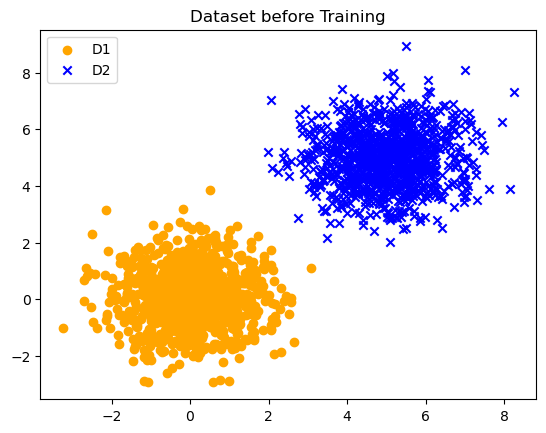

Epoch 0, Loss: 0.6931471805599454
Epoch 100, Loss: 0.32184849744233895
Epoch 200, Loss: 0.25271211720619424
Epoch 300, Loss: 0.2072580923068778
Epoch 400, Loss: 0.17519886428995649
Epoch 500, Loss: 0.15159049290643578
Epoch 600, Loss: 0.1335878358252509
Epoch 700, Loss: 0.11945695344320711
Epoch 800, Loss: 0.1080946594785078
Epoch 900, Loss: 0.09877206167393474
Training complete.


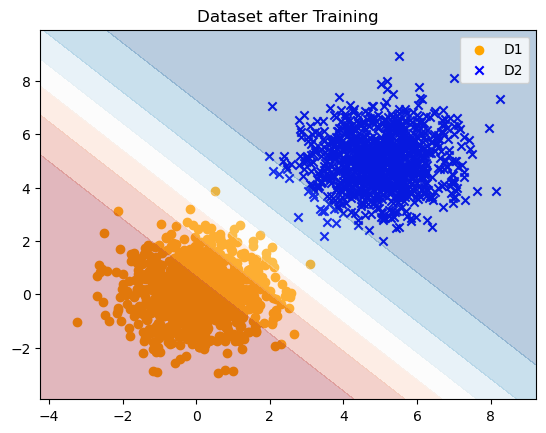

In [ ]:

class GradientDescent:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.sigmoid(z)

    def calculate_loss(self, y, y_pred):
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def calculate_gradient(self, X, y, y_pred):
      # Analytical gradient for log loss
      error = y_pred - y
      gradient_weights = np.dot(X.T, error) / len(y)
      gradient_bias = np.sum(error) / len(y)
      return gradient_weights, gradient_bias


    def train(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.num_epochs):
            # Forward pass
            y_pred = self.predict(X)

            # Compute loss
            loss = self.calculate_loss(y, y_pred)

            # Compute gradient
            gradient_weights, gradient_bias = self.calculate_gradient(X, y, y_pred)

            # Update weights and bias
            self.weights -= self.learning_rate * gradient_weights
            self.bias -= self.learning_rate * gradient_bias

            # Print loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}, Loss: {loss}')

        print('Training complete.')

X = D1
y = D2

# Add a column of ones for bias term
X_with_bias = np.c_[np.ones(X.shape[0]), X]

# Plot the dataset before training
plt.scatter(D1[:obs, 0], D1[:obs, 1], label='D1', marker='o',color='orange')
plt.scatter(D1[obs+1:, 0], D1[obs+1:, 1], label='D2', marker='x',color='b')
plt.title('Dataset before Training')
plt.legend()
plt.show()

model = GradientDescent(learning_rate=0.01, num_epochs=1000)
model.train(X_with_bias, y)

# Plot the dataset after training
plt.scatter(D1[:obs, 0], D1[:obs, 1], label='D1', marker='o',color='orange')
plt.scatter(D1[obs+1:, 0], D1[obs+1:, 1], label='D2', marker='x',color='b')
plt.title('Dataset after Training')

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
meshgrid_data = np.c_[np.ones(xx.ravel().shape[0]), xx.ravel(), yy.ravel()]
Z = model.predict(meshgrid_data)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.3)

plt.legend()
plt.show()

# Question no. 3
MLP with a single hidden layer ***[20 = dataset creation 5 + MLP definition 5 + backprop 10]***
<br>
This question has two variations, and you are expected to attempt any one of the variations. The
second variatio n, if implemented properly, will fetch you a 5% bonus on this assignment.
Original Question: Consider a binary classification dataset that is not linearly separable in 2D
(e.g. data lying on the circumference two concentric circles). Train a Multi layer perceptron (MLP)
with a single hidden layer for classifying the same. You may use the loss function used in problem
2. You have to implement the backpropagation algorithm yourself.
 <br>
**Variation**: Implement your own toy autograd engine, and use it to solve the original question.
You are welcome to discuss the approach with TAs if you like.


## Dataset Creation

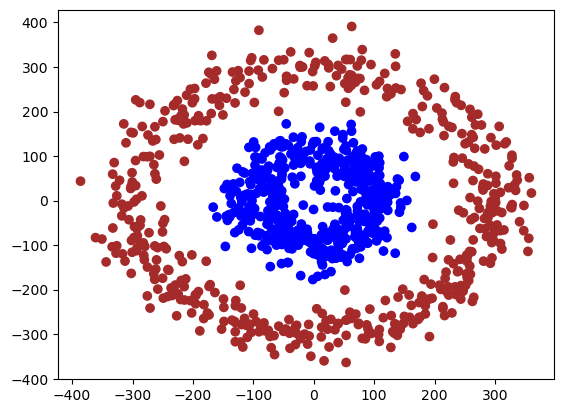

In [ ]:
# Generate the artificial dataset
def non_linear_dataset():
  x = []
  y = []
  z = []
  for i in range(1000):
      rand = np.random.uniform(0.0, 2*math.pi)
      randx = np.random.normal(0.0, 30.0)
      randy = np.random.normal(0.0, 30.0)
      if np.random.random() > 0.5:
          z.append(0)
          x.append(100*math.cos(rand) + randx)
          y.append(100*math.sin(rand) + randy)
      else:
          z.append(1)
          x.append(300*math.cos(rand) + randx)
          y.append(300*math.sin(rand) + randy)
  return x,y,z
x,y,z=non_linear_dataset()
plt.scatter(x, y, c=np.where(np.array(z) == 0, 'blue', 'brown'))
plt.show()

`non_linear_dataset()` generates a synthetic non-linear dataset. The function creates three lists x, y, and z, each containing 1000 elements. The x and y lists store the coordinates of the points, while the z list stores the class labels for each point. The points are generated based on random angles and assigned to different classes. After generating the dataset, the code uses matplotlib to create a scatter plot of the points, with the points colored based on their class labels. The resulting plot visualizes the synthetic non-linear dataset, showing the distribution of points and their class labels.


In [ ]:

# Generate the artificial dataset
def non_linear_dataset():
    x = []
    y = []
    z = []
    for i in range(1000):
        rand = np.random.uniform(0.0, 2 * np.pi)
        randx = np.random.normal(0.0, 30.0)
        randy = np.random.normal(0.0, 30.0)
        if np.random.random() > 0.5:
            z.append(0)
            x.append(100 * np.cos(rand) + randx)
            y.append(100 * np.sin(rand) + randy)
        else:
            z.append(1)
            x.append(300 * np.cos(rand) + randx)
            y.append(300 * np.sin(rand) + randy)
    return np.array(x), np.array(y), np.array(z)

# Get the dataset
x, y, z = non_linear_dataset()

# Combine X and Y into a single input array
dataset = np.column_stack((x, y))

# Normalize the data
dataset = (dataset - dataset.mean(axis=0)) / dataset.std(axis=0)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataset, z, test_size=0.2, random_state=42)


## Architecture




In [ ]:
class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def log_loss(self, y, y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_input_hidden
        self.hidden_output = self.sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_hidden_output
        self.final_output = self.sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y, learning_rate):
        error = y - self.final_output
        d_final_output = error * self.sigmoid_derivative(self.final_output)

        error_hidden = d_final_output.dot(self.weights_hidden_output.T)
        d_hidden_output = error_hidden * self.sigmoid_derivative(self.hidden_output)

        self.weights_hidden_output += self.hidden_output.T.dot(d_final_output) * learning_rate
        self.bias_hidden_output += np.sum(d_final_output, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(d_hidden_output) * learning_rate
        self.bias_input_hidden += np.sum(d_hidden_output, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            loss = self.log_loss(y, output)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss}")

    def predict(self, X):
        return np.round(self.forward(X))


In [ ]:
# Assuming X_train and y_train are your training data and labels
input_size = X_train.shape[1]
hidden_size = 100
output_size = 1  # Assuming binary classification

mlp = MLP(input_size, hidden_size, output_size)
mlp.train(X_train, y_train.reshape(-1, 1), epochs=1000, learning_rate=0.01)

# Assuming X_test is your test data
predictions = mlp.predict(X_test)
accuracy = np.mean(predictions == y_test.reshape(-1, 1))



Epoch 0, Loss: 1.846265287321524
Epoch 100, Loss: 0.09314352029403951
Epoch 200, Loss: 0.049913974356905956
Epoch 300, Loss: 0.03592244493664074
Epoch 400, Loss: 0.02910500825595264
Epoch 500, Loss: 0.025124751264197505
Epoch 600, Loss: 0.022541921689921026
Epoch 700, Loss: 0.020743653995908787
Epoch 800, Loss: 0.019426216076812795
Epoch 900, Loss: 0.018422747659308538


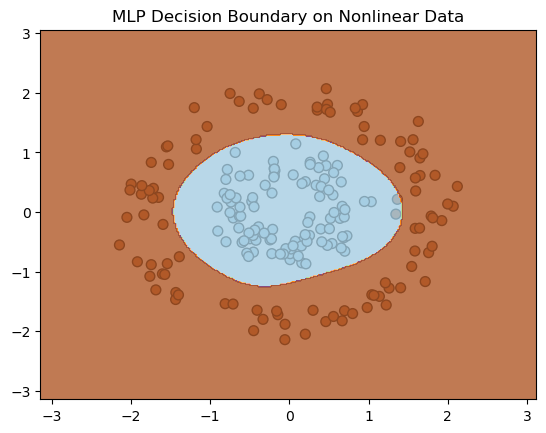

In [ ]:


# Assuming X_test is your test data
predictions = mlp.predict(X_test)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', marker='o', s=50)

# Plot the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = mlp.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.title('MLP Decision Boundary on Nonlinear Data')
plt.show()
